# Урок 3. Классификация. Логистическая регрессия.

**План занятия**

* [Теоретическая часть](#theory)
    * [Линейная классификация](#lin)
        * [Функционал ошибки в линейной классификации](#error)
    * [Логистическая регрессия](#logreg)
        * [Метод максимального правдоподобия](#mle)
        * [Реализация логистической регрессии](#implement_logreg)
    * [Оценка качества классификации](#metrics)
* [Практическая часть](#practice)
    * [Домашнее задание](#hw)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

## Линейная классификация<a class='anchor' id='lin'>

До этого мы разговаривали о задачах регрессии, то есть о восстановлении непрерывной зависимости по имеющимся данным. Однако, это не единственный тип задач в машинном обучении. В этом уроке речь пойдет о задачах _классификации_. Это такие задачи, в которых объекты делятся на конечное количество классов, и целью обучения является получение модели, способной соотносить объекты к тому или иному классу. 

Простейшим случаем является *бинарная классификация*, то есть случай, когда у нас имеется два класса. Единственное отличие от линейной регрессии здесь в том, что пространство ответов состоит из двух элементов, в нашем случае возьмем $\mathbb{Y} = \{-1,1\}$, где -1 и 1 означают принадлежность к первому или второму классу, соответственно. Пример такой задачи упоминался на первом уроке, когда говорилось о распознавании спам-писем. В этом случае, -1 означало, что письмо не является спамом, а 1 - что является.

<img src="images/log_reg.png">

Как и в случае регрессии, в классификации можно использовать линейные модели. Это называется _линейной классификацией._ Линейные классификаторы устроены похожим на линейную регрессию образом, за одним лишь различием - для получения бинарных значений берется только знак от значения $a(x)$:

$$a(x) = \text{sign}\left (w_{0}+\sum^{d}_{i=1}w_{i}x^{i} \right ).$$

Аналогично линейной регрессии, после добавления константного признака формула имеет вид

$$\text{sign} \left ( \sum^{d+1}_{i=1}w_{i}x^{i} \right ) = \text{sign} \left ( \left \langle w,x \right \rangle \right ).$$

Множество точек $\left \langle w,x \right \rangle = 0$ образует _гиперплоскость_ в пространстве признаков и делит его на две части. Объекты, расположенние по разные стороны от нее, относятся к разным классам.


<img src="images/log_reg_m.png">

In [ ]:
+ + = +
- - = +
+ - = -
- + = -

$$M_i = y_i(\langle w,x \rangle)$$

$M_i > 0$ - классификатор дает верный ответ<br>
$M_i < 0$ - классификатор ошибается<br>
Чем дальше отступ от нуля, тем классификатор больше уверен в своём ответе

Стоит отметить, что для некоторого объекта $x$ расстояние до этой гиперплоскости будет равняться $\frac{| \left \langle w,x \right \rangle |}{||w||}$, соответственно, при классификации нам важен не только знак скалярного произведения $\left \langle w,x \right \rangle$, но и его значение: чем выше оно, тем больше будет расстояние от объекта до разделяющей гиперплоскости, что будет означать, что алгоритм более уверен в отнесении объекта к данному классу. Это приводит нас к значению *отступа*, который равен скалярному произведению вектора весов $w$ на вектор признаков $x$, умноженному на истинное значение ответа $y$, которое, как мы помним, принимает значения -1 и 1:

$$M_{i}=y_{i}\left \langle w,x_{i} \right \rangle.$$

Таким образом, если скалярное произведение отрицательно, и истинный ответ равен -1, отступ будет больше нуля. Если скалярное произведение положительно, и истинный ответ равен 1, отступ также будет положителен. То есть $M_{i}>0$, когда классификатор дает верный ответ, и $M_{i}<0$, когда классификатор ошибается. Отступ характеризует корректность ответа, а его абсолютное значение свидетельствует о расстоянии от разделяющей гиперплоскости, то есть о мере уверенности в ответе.

### Функционал ошибки в линейной классификации<a class='anchor' id='error'>

Как и в случае линейной регрессии, для обучения алгоритма линейной классификации требуется измерять ошибку. По аналогии с средней абсолютной ошибкой и среднеквадратичной ошибкой в случае линейной классификации можно использовать естественный подход: так как возможных ответов конечное число, можно требовать полного совпадения предсказанного класса $a(x_{i})$ и истинного $y_{i}$. Тогда в качестве функционала ошибки можно использовать долю неправильных ответов:

$$Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}[a(x_{i}) \neq y_{i}]$$

или, используя понятие отступа,

$$Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}[M_{i}<0] = \frac{1}{l}\sum^{l}_{i=1}[y_{i}\left \langle w,x_{i} \right \rangle < 0].$$

Функция, стоящая под знаком суммы, называется _функцией потерь_. График ее в зависимости от отступа будет иметь пороговый вид:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def loss_function(x):
    return 0 if x > 0 else 1

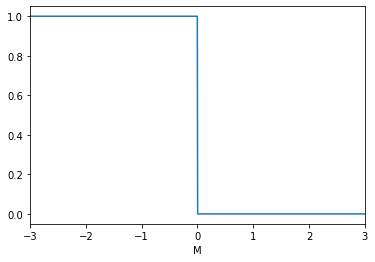

In [3]:
dots = np.linspace(-3, 3, 1000)
q_zero_one_loss = [loss_function(x) for x in dots]

plt.xlabel('M')
plt.xlim(-3, 3)
plt.plot(dots, q_zero_one_loss);

Она называется _пороговой функцией потерь_ или 1/0 функцией потерь. Как мы видим, она негладкая, поэтому градиентные методы оптимизации к ней неприменимы. Для упрощения оптимизации используют гладкие оценки сверху этой функции, то есть такие функции, что 

$$[M_{i}<0] \leq \tilde{L}(M_{i}).$$

Тогда минимизировать уже нужно эту новую функцию:

$$Q(a, X) \leq \tilde Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}\tilde{L}(M_{i}) \rightarrow \underset{w}{\text{min}}.$$

Примерами могут быть:

- _экспоненциальная функция потерь_ $\tilde{L}(M_{i}) = \text{exp}(- M_{i})$


- _логистическая функция потерь_ $\tilde{L}(M_{i}) = \text{log}(1 + \text{exp}(- M_{i}))$


- и др. (см. доп. материалы)

Реализуем их и построим соответствующие графики.

In [4]:
def exp_loss_func(x):
    return np.exp(-x)

In [5]:
def logistic_loss(x):
    return np.log2(1 + np.exp(-x))

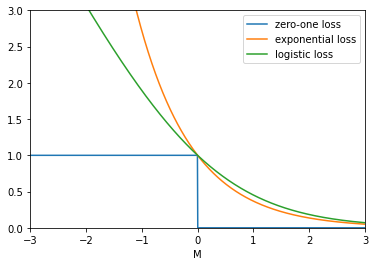

In [6]:
q_exp_loss = [exp_loss_func(x) for x in dots]
q_logistic_loss = [logistic_loss(x) for x in dots]

plt.xlabel('M')
plt.xlim(-3, 3)
plt.ylim(0, 3)
plt.plot(dots, q_zero_one_loss)
plt.plot(dots, q_exp_loss)
plt.plot(dots, q_logistic_loss)
plt.legend(['zero-one loss', 'exponential loss', 'logistic loss']);

Все они оценивают функцию потерь сверху и при этом хорошо оптимизируются.

## Логистическая регрессия<a class='anchor' id='logreg'>

_Логистическая регрессия_ - частный случай линейного классификатора, обладающий одной полезной особенностью - помимо отнесения объекта к определенному классу она умеет прогнозировать вероятность $P$ того, что объект относится к этому классу.

Во многих задачах такая особенность является очень важной. Например, в задачах кредитного скоринга (предсказание, вернет клиент кредит или нет) прогнозируют вероятность невозврата кредита и на основании нее принимают решение о выдаче или невыдаче.

Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу "+1" $P(y=1|x)$ (условная вероятность $y = 1$ при условии $x$). Она будет принимать значения от 0 до 1, и нам нужно каким-то образом ее предсказывать, но пока мы умеем только строить прогноз методами линейной регрессии с помощью некоего алгоритма $b(x)=\left \langle w,x_{i} \right \rangle$. У него есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая будет переводить полученное в скалярном произведении значение в вероятность, пределы которой будут лежать в промежутке от 0 до 1. В модели логистической регрессии в качестве такой функции берется сигмоида, которая имеет вид:

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

Изобразим ее график.

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

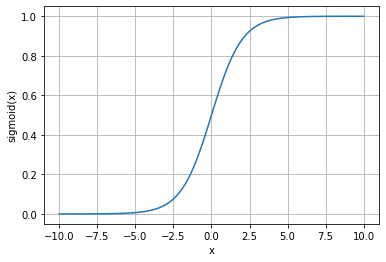

In [8]:
dots = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value);

$$\sigma(z) = \frac{1}{(1 + exp(-z))^{-1}} = \frac{1}{1 + \frac{1}{exp(z)}} = \frac{exp(z)}{exp(z) + 1}$$

$$\sigma(z) = \frac{exp(z)}{1 + exp(z)}.$$

In [9]:
def sigmoid_2(x):
    return np.exp(x) / (1 + np.exp(x))

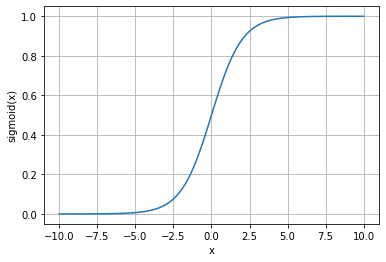

In [10]:
dots = np.linspace(-10, 10, 100)
sigmoid_value_2 = list(map(sigmoid_2, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value_2);

При использовании такой функции $\tilde{b}(x_{i}) = \sigma(\left \langle w,x_{i} \right \rangle)$ получаем, что вероятность отнесения объекта к классу "+1" $P(y=1|x)$, которую для краткости обозначим $p_{+}$, будет равняться

$$p_{+} = \sigma(\left \langle w,x_{i} \right \rangle) = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)},$$

Чем больше будет скалярное произведение $\left \langle w,x_{i} \right \rangle$, тем выше будет предсказанная вероятность.

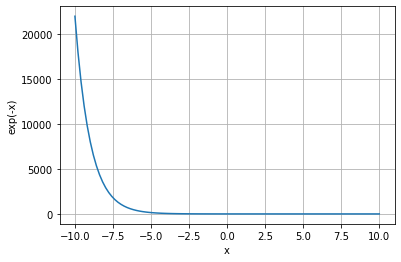

In [11]:
dots = np.linspace(-10, 10, 100)
exp_value = list(map(lambda x: np.exp(-x), dots))

plt.xlabel('x')
plt.ylabel('exp(-x)')
plt.grid()
plt.plot(dots, exp_value);

### Метод максимального правдоподобия <a class='anchor' id='mle'>

<img src='images/maximum_likelihood.png'>

Далее для обучения этой модели нам потребуется использовать _метод максимального правдоподобия_ (см. доп. материалы). Его сущность заключается в выборе гипотезы, при которой вероятность получить имеющееся наблюдение максимальна.

С точки зрения реализуемого алгоритма вероятность того, что в выборке встретится объект $x_{i}$ c классом $y_{i}$, равна

$$P(y=y_{i}|x_{i}) = p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

Исходя из этого, правдоподобие выборки (т.е. вероятность получить такую выборку с точки зрения алгоритма) будет равняться произведению вероятностей получения каждого имеющегося ответа:

$$P(y|X) = L(X) = \prod^{l}_{i=1} p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

Правдоподобие можно использовать как функционал для обучения алгоритма, однако, удобнее взять от него логарифм, так как в этом случае произведение превратится в сумму, а сумму гораздо проще оптимизировать. Также, в отличие от рассмотренных ранее функций потерь, правдоподобие требуется максимизировать для обучения алгоритма, а не минимизировать. Поэтому для большего удобства перед правдоподобием ставят минус, поскольку функции потери в задачах регрессии принято минимизировать. В итоге получим:

$$\text{ln}\prod^{l}_{i=1} p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]} = $$
$$ = - \sum^{l}_{i=1} \text{ln}(p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]})$$

$$-\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}p_{+}) + [y_{i} = -1]\text{ln}(1 - p_{+}))).$$


Данная функция потерь называется _логарифмической функцией потерь (log loss)_ или _кросс-энтропией_.

В случае, когда имеются классы 1 и -1:

$$ p_{+} = \sigma({\langle w,x \rangle})$$
$$ p_{-} = \sigma(- {\langle w,x \rangle})$$

$$ p = \sigma(y{\langle w,x \rangle})$$

$$ \text{ln}L = - \sum^{l}_{i=1} \text{ln}(p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}) = $$
$$ = - \sum^{l}_{i=1} \text{ln}(\sigma(y{\langle w,x \rangle})) = - \sum^{l}_{i=1} \text{ln}(\frac{1}{1 + exp(-y{\langle w,x \rangle}})$$
$$ = \sum^{l}_{i=1} \text{ln}(1 + exp(-y{\langle w,x \rangle})$$

То есть в случае логистической регрессии обучение сводится к минимизации этого функционала.

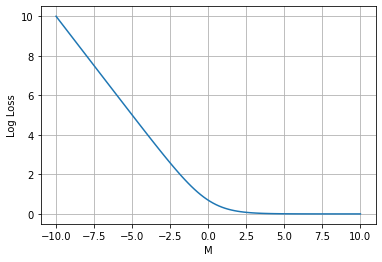

In [12]:
dots = np.linspace(-10, 10, 100)
log_loss_value = list(map(lambda x: - np.log(1 / (1 + np.exp(-x))), dots))
log_loss_value = list(map(lambda x: np.log(1 + np.exp(-x)), dots))

plt.xlabel('M')
plt.ylabel('Log Loss')
plt.grid()
plt.plot(dots, log_loss_value);

В общем виде log loss запишется как

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)} + (1 - y_{i})\text{ln} (1-\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)})).$$

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$



### Производные

<center><i>Сигмоида</i></center>

$$\sigma(z) = \frac{1}{1 + exp(-z)}$$

$$\frac{d\sigma(z)}{dz} = -\frac{1}{(1 + exp(-z))^2}(-exp(-z)) = \frac{exp(-z)}{(1 + exp(-z))^2} \text{(*)} = \frac{1}{1 + exp(-z)}(1-\frac{1}{1 + exp(-z)}) = \sigma(1-\sigma)$$

$ (*)\frac{exp(-z) +1-1}{(1 + exp(-z))^2} = \frac{1 + exp(-z) -1}{(1 + exp(-z))^2}= \frac{1 + exp(-z)}{(1 + exp(-z))^2} - \frac{1}{(1 + exp(-z))^2}=$

$ = \frac{1}{(1 + exp(-z))} - \frac{1}{(1 + exp(-z))}\frac{1}{(1 + exp(-z))} = \frac{1}{(1 + exp(-z))}(1- \frac{1}{(1 + exp(-z))}) $

<center><i>Логлосс</i></center>

$$\frac{dL}{dw} = -\sum^{l}_{i=1} (\frac{y_{i}} {\sigma} - \frac{1 - y_{i}} {1 - \sigma})\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{(1 - \sigma)y_{i} - \sigma(1 - y_{i})} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{(y_{i} - \sigma y_{i} - \sigma + \sigma y_{i})} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz}$$

$$ = -\sum^{l}_{i=1} \frac{y_{i} - \sigma} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{y_{i} - \sigma} {\sigma(1 - \sigma)}\sigma(1 - \sigma) = \sum^{l}_{i=1} \sigma - y_{i} = \frac{1}{1 + exp(-\langle w,x\rangle)} - Y = X^{T}(\sigma-Y)$$


$\frac{d\langle w,x\rangle}{dw} = \frac{d Xw}{dw} = X^T$


### Реализация логистической регрессии<a class='anchor' id='implement_logreg'>

Напишем алгоритм логистической регрессии.

In [13]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=2, random_state=1)
# X, y = datasets.make_blobs(centers=2, cluster_std=2.5, random_state=12)
X, y

(array([[ 1.30022717, -0.7856539 ],
        [ 1.44184425, -0.56008554],
        [-0.84792445, -1.36621324],
        [-0.72215015, -1.41129414],
        [-1.27221465,  0.25945106],
        [ 0.78694271,  0.94294879],
        [ 0.81695766, -1.12478707],
        [ 1.6822707 , -0.67596877],
        [-1.07223343, -0.7701513 ],
        [-0.06539297,  1.11257376],
        [-1.33232952,  0.60245671],
        [-0.6963714 ,  0.96382716],
        [ 0.82340614,  0.7561926 ],
        [-1.5155534 , -0.15804853],
        [-0.78971776,  1.70347973],
        [ 0.85887841,  1.04457966],
        [-0.45001335,  0.27345841],
        [ 0.7099324 ,  0.69020919],
        [-0.79095935,  1.60495551],
        [-1.08077536, -1.15530746],
        [-1.5691733 , -0.54054806],
        [-0.52568843,  1.52568161],
        [-1.27406042, -0.1434304 ],
        [ 0.89621114, -1.11509679],
        [-0.85259895, -1.42554982],
        [-0.63262806,  1.2217558 ],
        [-0.86447712, -1.40921978],
        [-0.47819102,  3.174

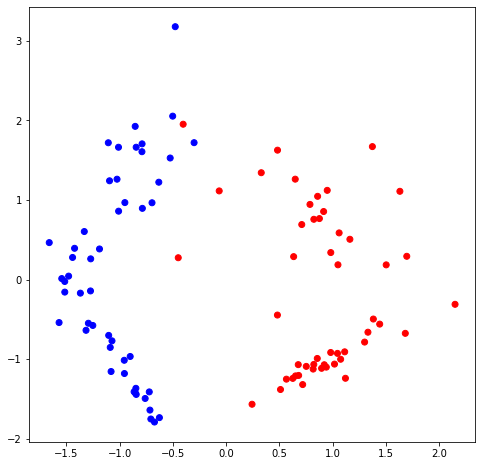

In [14]:
# и изобразим их на графике
colors = ListedColormap(['blue', 'red'])

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

Далее разделим выборку на обучающую и тестовую. При реальной работе, если нет специфических требований по сохранению порядка выборки, ее полезно перемешивать, так как данные в ней могут быть каким-либо образом отсортированы. Это может негативно сказаться на процессе обучения.

In [15]:
np.random.permutation(X.shape[0])

array([20, 21, 61, 47, 34, 95, 28,  2, 81, 27, 59,  4, 77, 25, 57, 39, 84,
       76, 52, 15,  3, 54, 98, 99, 91,  7, 41, 50, 71,  6, 96, 51, 53, 23,
       17, 73, 97, 26, 70, 35, 83, 62, 30, 55, 87, 63, 36, 14, 33, 11, 67,
       56, 88, 44, 74, 93,  0, 45, 92,  8, 49, 43, 10, 58, 48,  5, 18,  1,
       82, 32, 46, 12, 31, 72, 65, 78, 37, 29, 86, 60, 90, 16, 68, 94, 69,
       89, 19, 75, 38, 13, 85, 42,  9, 64, 80, 66, 24, 79, 40, 22])

In [16]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(X.shape[0])
X_shuffled, y_shuffled = X[shuffle_index], y[shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(X) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


Реализуем функцию потерь log loss с одновременным расчетом градиента.

Оптимизировать функционал ошибки будем с помощью градиентного спуска, его вид в случае использования такой функции потерь будет:

$$w_{n+1} = w_{n} - \eta \frac{1}{l}X^{T}(A-Y),$$

где $A=\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$

$$L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$
$$L(X) = \sum^{l}_{i=1} \text{ln}(1 + exp(-y{\langle w,x \rangle})$$

In [17]:
def log_loss(w, X, y):
    m = X.shape[0]
    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(X, w))
        
    # labels 0, 1
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    
    # labels -1, 1
#     temp_y = np.where(y == 1, 1, -1)
#     loss = 1.0 / m * np.sum(np.log(1 + np.exp(-temp_y * np.dot(X, w))))

    grad = 1.0 / m * X.T @ (A - y)

    return loss, grad

Реализуем градиентный спуск

In [18]:
def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

и функцию для выполнения предсказаний

In [19]:
def predict(w, X):
    
    m = X.shape[0]
    
    y_predicted = np.zeros(m)

    A = np.squeeze(sigmoid(np.dot(X, w)))

    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5): 
            y_predicted[i] = 1
        elif (A[i] <= 0.5):
            y_predicted[i] = 0

    return y_predicted

In [20]:
# иницилизируем начальный вектор весов
w0 = np.zeros(X_train.shape[1])

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = np.mean(y_predicted_train == y_train) * 100.0
test_accuracy = np.mean(y_predicted_test == y_test) * 100.0

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [3.72659902 0.22383415]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667


Покажем, как менялась при этом функция потерь.

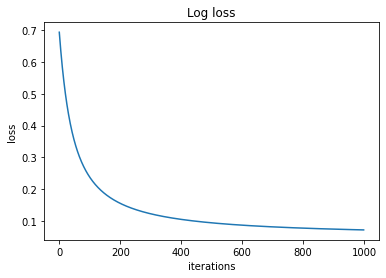

In [21]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses);

[Визуализация](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py) логистической регрессии

In [26]:
np.arange(x_min, x_max, h).shape

(241,)

In [25]:
Z.shape

(299, 241)

<ipython-input-24-7292eef48c77>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


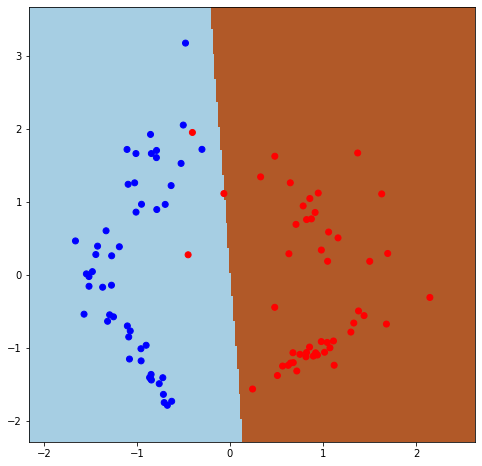

In [24]:
plt.figure(figsize=(8, 8))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict(w, np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

## Оценка качества классификации <a class='anchor' id='metrics'>

Как и в случае линейной регрессии, в задачах классификации требуется оценивать качество обученной модели. Для этого существует большое количество подходов.

Наиболее очевидным и простым способом является расчет *доли правильных ответов*:

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

**Проблемы accuracy:**<br>
    
    1) Дисбаланс классов
    
    кот - 950 наблюдений
    голубь - 50 наблюдений
    a(x) = кот

    accuracy?

    2) Ошибки могут иметь разную цену
<img src='images/scoring.png' width=400px>

### Матрица ошибок

Удобно представлять ответы в виде комбинации истинного ответа и ответа алгоритма. При этом получается так называемая _матрица ошибок_.

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a(x) = +1$$__  |  True Positive TP    |  False Positive  FP   |
| __$$a(x) = -1$$__ |   False Negative FN    |   True Negative TN   |

В матрице сверху отложены истинные ответы, слева - ответы алгоритма. Когда алгоритм относит объект к классу "+1", говорят, что он *срабатывает*, а когда к "-1", - *пропускает*. Если алгоритм сработал (дал положительный ответ) и объект действительно относится к классу "+1", говорят, что имеет место верное срабатывание/верный положительный ответ (True Positive, TP), а если объект не относится к классу "+1", это ложное срабатывание (False Positive, FP). Если алгоритм пропускает объект, а его истинный класс "+1", это ложный пропуск/ложный негативные ответ (False Negative, FN), а если истинный класс объекта "-1", имеет место истинный пропуск (True Negative, TN). При такой классификации уже есть два вида ошибок - ложные срабатывания и ложные пропуски. По главной диагонали в матрице ошибок располагаются верные ответы, по побочной - неверные.

### Точность и полнота

В классификации часто используются две метрики - _точность_ и _полнота_.

Точность (precision) представляет из себя долю истинных срабатываний от общего количества срабатываний. Она показывает, насколько можно доверять алгоритму классификации в случае срабатывания

$$precision(a, X) = \frac{TP}{TP+FP}.$$

Полнота (recall) считается как доля объектов, истинно относящихся к классу "+1", которые алгоритм отнес к этому классу

$$recall(a, X) = \frac{TP}{TP+FN},$$

здесь $TP+FN$ как раз будут вместе составлять весь список объектов класса "+1".

<img src='images/prec_vs_recall.png'>

__Пример__

Пусть у нас есть выборка из 100 объектов, из которых 50 относится к классу "+1" и 50 к классу "-1" и для этой работы с этой выборкой мы рассматриваем две модели: $a_{1}(x)$ с матрицей ошибок

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a_{1}(x) = +1$$__  |   40    |   10   |
| __$$a_{1}(x) = -1$$__ |   10    |   40   |
    

и $a_{2}(x)$ с матрицей ошибок:
 
 
|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a_{2}(x) = +1$$__  |   22    |   2   |
| __$$a_{2}(x) = -1$$__ |   28    |   48   |

Для первого алгоритма 

$$preсision(a_{1}, X)=0.8$$
$$recall(a_{1}, X)=0.8$$

Для второго алгоритма

$$preсision(a_{2}, X)=0.92$$
$$recall(a_{2}, X)=0.44$$

Как мы видим, точность второй модели очень высока, но при этом сильно снижена полнота. Поэтому нужно правильно формировать бизнес-требования к модели, какой именно показатель должен быть определяющим. Например, если в задаче кредитного скоринга банк ставит цель возврата 90% кредитов, задачей ставится максимизация полноты при условии точности не ниже 0.9. А если при распознавании спама стоит требование, например, распознавать 95% спам-писем, задача состоит в максимизации точности при условии полноты не ниже 0.95.

Однако, такое ограничение есть не всегда, и в остальных случаях требуется максимизировать и полноту и точность. Есть различные варианты объединения их в одну метрику, одним из наиболее удобных из них является *F-мера*, которая представляет собой среднее гармоническое между точностью и полнотой

$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

В отличие от, например, среднего арифметического, если хотя бы один из аргументов близок к нулю, то и среднее гармоническое будет близко к нулю. По сути, F-мера является сглаженной версией минимума из точности и полноты (см. графики).

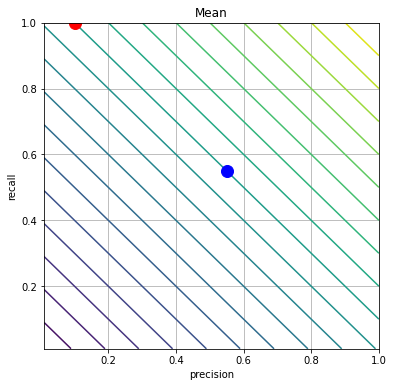

In [27]:
precisions, recalls = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

mean_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        mean_levels[i, j] = 1/2 * (precisions[i, j] + recalls[i, j])
        
plt.figure(figsize=(6, 6))
plt.title('Mean')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, mean_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.55, 0.55, 'bo', ms=12);

|  <empty>   | red | blue |
--- | --- | ---
| precision  |   0.1    |   0.55   |
| recall |   1    |   0.55   |
| mean |   0.55    |   0.55   |

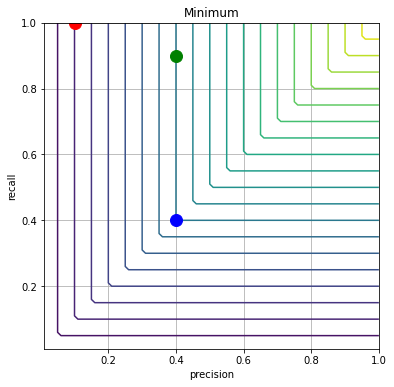

In [28]:
precisions, recalls = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

min_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        min_levels[i, j] = min([precisions[i, j], recalls[i, j]])
        
plt.figure(figsize=(6, 6))
plt.title('Minimum')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, min_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.4, 0.4, 'bo', ms=12)
plt.plot(0.4, 0.9, 'go', ms=12);

|  <empty>   | red | blue | green|
--- | --- | --- |---
| precision  |   0.1    |   0.4   | 0.4|
| recall |   1    |   0.4   | 0.9 |
| min |   0.1   |   0.4   | 0.4|

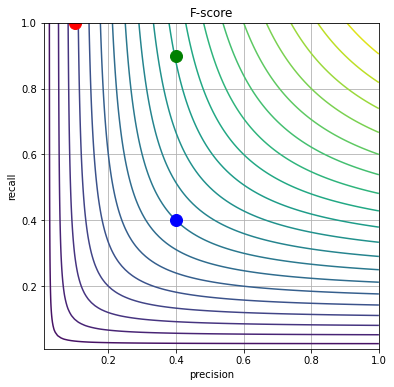

In [29]:
f_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        f_levels[i, j] = 2 * precisions[i, j] * recalls[i, j] / (precisions[i, j] + recalls[i, j])

plt.figure(figsize=(6, 6))        
plt.title('F-score')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, f_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.4, 0.4, 'bo', ms=12)
plt.plot(0.4, 0.9, 'go', ms=12);

|  <empty>   | red | blue | green|
--- | --- | --- |---
| precision  |   0.1    |   0.4   | 0.4|
| recall |   1    |   0.4   | 0.9 |
| f-score |   0.1818   |   0.4   | 0.55|

Существует также усовершенствованная версия F-меры $F_{\beta}$:

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

Параметр $\beta$ здесь определяет вес точности в метрике. При $\beta = 1$ это среднее гармоническое, умноженное на 2 (чтобы в случае $precision = 1$ и $recall = 1$ $F_{1} = 1$). Его изменение требуется, когда необходимо отдать приоритет точности или полноте, как это было показано в примерах ранее. Чтобы важнее была полнота, $\beta$ должно быть меньше 1, чтобы важнее была точность - больше.

### ROC-кривая

Итак, мы научились определять вероятность отнесения объекта к тому или иному классу и метрики, которые характеризуют качество работы алгоритма $a(x)=[b(x)>t]$, и теперь, чтобы конвертировать ее в бинарную метку (сделать выводы о принадлежности к классу), нужно определить значение порога вероятности $t$, при котором объект нужно относить к соответствующему классу. Естественным кажется вариант, при котором порог равен 0.5, но он не всегда оказывается оптимальным. Зачастую интерес представляет сам вещественнозначный алгоритм $b(x)$, а порог будет выбираться позже в зависимости от требований к точности и полноте. В таком случае появляется потребность в измерении качества семейства алгоритмов $a(x)=[b(x)>t]$ с различными $t$.

<img src='images/roc-curve.png' width=400>

Есть способы оценки модели в целом, не привязываясь к конкретному порогу. Первый из них основанна использовании _ROC-кривой_. Такая кривая строится в следующих координатах:

по оси $x$ откладывается доля ложных срабатываний (False Positive Rate) - отношение числа ложных срабатываний к общему размеру отрицательного класса:

$$FPR = \frac{FP}{FP+TN}$$

по оси $y$ откладывается доля верных срабатываний (True Positive Rate) - отношение числа верных срабатываний к размеру положительного класса:

$$TPR = \frac{TP}{TP+FN},$$

то есть TPR по сути представляет из себя полноту, о которой мы говорили ранее.

Точка на графике будет соответствовать конкретному классификатору с некоторым значением порога.

В качестве примера возьмем выборку из шести объектов, которым алгоритм $b(x)$ присвоил оценки принадлежности к классу 1:

| $$b(x)$$ | 0 | 0.1 | 0.2 | 0.3 | 0.5 | 0.6 |
| -------- | - | --- | --- | --- | --- | --- |
|  $$y$$   | 0 |  0  |  1  |  1  |  0  |  1  |


In [ ]:
отсечка 0

b(x) = 0, 0.1, 0.2, 0.3, 0.5, 0.6
y =    0   0   1    1    0    1

a(x) - 1   1   1    1    1    1

| $$$$ | 0 | 0.1 | 0.2 | 0.3 | 0.5 | 0.6 | 0.99 |
| -------- | - | --- | --- | --- | --- | --- | --- |
|  $$TPR$$   | 1 | 1  | 1  | 0.66  |  0.33 | 0.33 |  0  |
|  $$FPR$$   | 1 | 0.66  | 0.33  |  0.33 | 0.33 | 0 |   0 |

____________

Теперь пойдем по порядку справа налево:

1. Сначала выбираем самый большой порог, при котором ни один объект не будет отнесен к первому классу. При этом доля верных срабатываний и доля ложных срабатываний равны нулю. Получаем точку (0, 0).
2. Далее снижая порог до 0,6, один объект будет отнесен к первому классу. Доля ложных срабатываний останется нулевой, доля верных срабатываний станет 1/3.
3. При дальнейшем уменьшении порога до 0,5 второй справа один объект будет отнесен к первому классу. TPR останется 1/3, FPR также станет равна 1/3.
4. Далее при снижении порога до 0.3 TPR станет 2/3, FPR останется 1/3.
5. При пороге 0.2 TPR станет равна 1, FPR останется 1/3.
6. При пороге 0.2 5 объектов будут отнесены алгоритмом к классу 1, TPR останется 1, FPR станет 2/3.
7. При дальнейшем уменьшении порога все объекты будут отнесены к первому классу, и TPR и FPR станут равны 1.

Построим соответствующий график

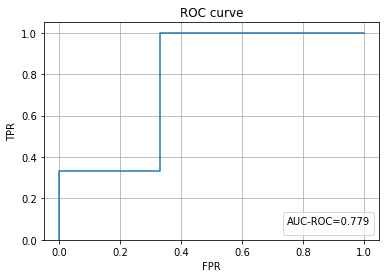

In [30]:
from numpy import trapz  # используем эту функцию для расчета площади под кривой

TPR = [0, 0.33, 0.33, 0.66, 1, 1, 1]
FPR = [0, 0, 0.33, 0.33, 0.33, 0.66, 1]

AUC_ROC = trapz(TPR, x = FPR, dx=0.1)

plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
plt.plot(FPR, TPR);

ROC кривая всегда идет из точки (0,0) в точку (1,1). При этом в случае наличия идеального классификатора с определенным порогом доля его верных ответов будет равна 1, а доля ложных срабатываний - 0, то есть график будет проходить через точку (0,1). Таким образом, чем ближе к этой точке проходит ROC-кривая, тем лучше наши оценки и лучше используемое семейство алгоритмов. Таким образом мерой качества оценок принадлежности к классу 1 может служить площадь под ROC-кривой. Такая метрика называется AUC-ROC (Area Under Curve - площадь под кривой ROC). В случае идеального алгоритма $AUC-ROC = 1$, а в случае худшего приближается к $\frac{1}{2}$.

Критерий AUC-ROC можно интерпретировать как вероятность того, что если выбрать случайные положительный и отрицательный объект выборки, положительный объект получит оценку принадлежности выше, чем отрицательный.

Обычно объектов гораздо больше, чем в нашем примере, поэтому кривая в реальных задачах выглядит несколько иначе - в ней больше точек.

AUC-ROC не очень устойчив к несбалансированным выборкам. Допустим, нам нужно выбрать 100 релевантных документов из выборки в 1000000 документов. И у нас есть алгоритм, который дает выборку из 5000 документов, 90 из которых релевантны. В этом случае 

$$TPR=\frac{TP}{TP+FN} = \frac{90}{90+10}=0.9$$

$$FPR=\frac{FP}{FP+TN} = \frac{4910}{4910+994990}=0.00491$$,

Что является показателями очень хорошего алгоритма - AUC-ROC будет близка к 1, хотя на самом деле 4910 из 5000 выданных документов являются нерелевантными.

Чтобы посмотреть реальное положение дел, рассчитаем точность и полноту:

$$precision = \frac{TP}{TP+FP}=\frac{90}{90+4910} = 0.018$$

$$recall = TPR = 0.9.$$

Здесь уже видно, что алгоритм является недостаточно точным.

Таким образом, если размер положительного класс значительно меньше отрицательного, AUC-ROC может давать неадекватную оценку качества алгоритма, так как измеряет долю ложных срабатываний относительно общего числа отрицательных объектов, и если оно большое, доля будет мала, хотя в абсолютном значении количество ложных срабатываний может заметно превышать количество верных срабатываний.

<img src='images/pr-curve.png' width=400>


Избавиться от такой проблемы можно используя другой метод - *кривую точности-полноты (PR-кривую)*. По оси $x$ откладывается полнота, по оси $y$ - точность, а точка на графике, аналогично ROC-кривой, будет соответствовать конкретному классификатору с некоторым значением порога. 

Возьмем использованный нами для постройки ROC-кривой набор данных и аналогичным образом построим PR-кривую.


| $$b(x)$$ | 0 | 0.1 | 0.2 | 0.3 | 0.5 | 0.6 |
| -------- | - | --- | --- | --- | --- | --- |
|  $$y$$   | 0 |  0  |  1  |  1  |  0  |  1  |

In [ ]:
pr = tp / (tp + fp)
rec = tp / (tp + fn)

In [ ]:
отсечка 0

b(x) = 0, 0.1, 0.2, 0.3, 0.5, 0.6
y =    0   0   1    1    0    1

a(x) = 1   1   1    1    1    1

| $$$$ | 0 | 0.1 | 0.2 | 0.3 | 0.5 | 0.6 | 0.9 |
| -------- | - | --- | --- | --- | --- | --- | --- |
|  $$Precision$$   | 0.5 | 0.6  | 0.75 | 0.66 | 0.5 | 1 | 0  |
|  $$Recall$$      | 1 | 1  | 1 | 0.66 |0.33  | 0.33 | 0  |

___________

Она всегда стартует в точке (0,0) и заканчивается в точке (1, r), где r - доля положительных объектов в выборке. В случае наличия идеального классификатора, у которого точность и полнота 100%, кривая пройдет через точку (1,1). Таким образом, чем ближе к этой точке кривая проходит, тем лучше оценки. Так что, как и в случае ROC-кривой, можно ввести метрику качества в виде площади под PR-кривой AUC-PR.

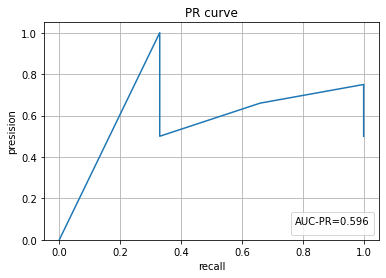

In [31]:
precision = [0, 1, 0.5, 0.66, 0.75, 0.6, 0.5]
recall = [0, 0.33, 0.33, 0.66, 1, 1, 1]

AUC_PR = trapz(precision, x = recall, dx=0.1)

plt.title('PR curve')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision')
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR:.3f}', loc='lower right')
plt.plot(recall, precision);

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [7]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.164252033486018

In [10]:
# Плохой пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.2])
calc_logloss(y1, y_pred1)

/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


nan

In [11]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [12]:
z = np.linspace(-10, 10, 101)

In [13]:
probabilities = sigmoid(z)

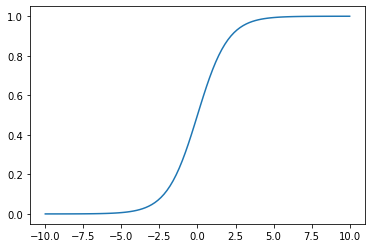

In [14]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [15]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [16]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


## Домашнее задание <a class='anchor' id='hw'>

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [17]:
def calc_logloss(y, y_pred):
    y_pred = np.where(y_pred == 1, 0.9999999999, y_pred)
    y_pred = np.where(y_pred == 0 , 0.000000001, y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [18]:
y1 = np.array([1,0])
y_pred1 = np.array([1,0.1])
calc_logloss(y1, y_pred1)

0.052680257878913145

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
def eval_model(X, y, iterations, eta = 1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) ==0:
            print(i, W, err)
    return W, err

In [21]:
w, err = eval_model(X_st, y, iterations = 10000, eta= 1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1000 [ 0.46070853 -0.27660658  0.64395225  1.46886563] 0.9450063518188168
2000 [ 0.42910538 -0.39762907  0.63899133  1.42101856] 0.7649678531356925
3000 [ 0.40237714 -0.49496601  0.63497974  1.38181554] 0.6467938123731767
4000 [ 0.38047894 -0.5650296   0.63387164  1.35257212] 0.5836344091291391
5000 [ 0.36247418 -0.61238439  0.63568618  1.33181421] 0.5532531003505643
6000 [ 0.34723076 -0.64431226  0.63950668  1.31708294] 0.5382593304625718
7000 [ 0.33391048 -0.6662408   0.64455548  1.30646938] 0.5302255883714215
8000 [ 0.32196306 -0.68156712  0.65034185  1.29871977] 0.5254818665326442
9000 [ 0.3110257  -0.69240217  0.65656725  1.29301615] 0.5223831652167139


In [22]:
from tqdm import tqdm
iterations_ = np.arange(100, 10000)
err_ = 10000
err_list = []
# for iterations_ in np.arange(100, 10000):
for iterations_ in tqdm(iterations_):
    for eta_ in np.arange(1e-4, 1e-3):
        W, err = eval_model(X_st, y, iterations=iterations_, eta=eta_)
        err_list.append(err)
        if err < err_:
            err_ = err
            iterations1 = iterations_
            eta1 = eta_
            W_ = W
print(f'W={W_}, err={err_}, iterations={iterations1}, eta={eta1}')

  0%|          | 6/9900 [00:00<03:09, 52.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
10 [ 0.49629703 -0.13985959  0.6476583   1.52240734] 1.1760276523325583
20 [ 0.49591822 -0.14130855  0.64763059  1.5218419 ] 1.1734638242468702
30 [ 0.49553977 -0.14275628  0.64760267  1.5212769 ] 1.1709043612804575
40 [ 0.4951617  -0.14420277  0.64757454  1.52071236] 1.1683492744976867
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
60 [ 0.49440667 -0.14709199  0.64751765  1.51958465] 1.1632522735537618
70 [ 0.49402971 -0.14853473  0.64748888  1.51902148] 1.1607103813349897
80 [ 0.49365313 -0.1499762   0.6474599   1.51845877] 1.1581729091849757
90 [ 0.49327692 -0.15141641  0.64743072  1.51789652] 1.1556398679827482
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.17859583443562

  0%|          | 16/9900 [00:00<03:36, 45.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
11 [ 0.49625913 -0.14000454  0.64765554  1.52235078] 1.1757710734097326
22 [ 0.4958425  -0.1415982   0.64762503  1.52172886] 1.1729515820894467
33 [ 0.49542631 -0.14319036  0.64759426  1.52110749] 1.1701373752438937
44 [ 0.49501057 -0.14478101  0.64756323  1.52048667] 1.167328467587298
55 [ 0.49459528 -0.14637016  0.64753195  1.5198664 ] 1.1645248737791998
66 [ 0.49418045 -0.14795779  0.64750041  1.51924669] 1.1617266084247047
77 [ 0.49376606 -0.14954389  0.64746862  1.51862753] 1.158933686074749
88 [ 0.49335213 -0.15112847  0.64743657  1.51800893] 1.156146121226405
99 [ 0.49293866 -0.15271151  0.64740427  1.51739089] 1.1533639283232127
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  0%|          | 25/9900 [00:00<03:47, 43.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
12 [ 0.49622124 -0.14014948  0.64765278  1.52229422] 1.175514538038228
24 [ 0.49576679 -0.14188779  0.64761945  1.52161584] 1.17243951462555
36 [ 0.49531288 -0.14362432  0.64758582  1.52093812] 1.1693707833621934
48 [ 0.49485951 -0.14535906  0.64755189  1.52026106] 1.1663083633350795
60 [ 0.49440667 -0.14709199  0.64751765  1.51958465] 1.1632522735537618
72 [ 0.49395436 -0.14882312  0.6474831   1.5189089 ] 1.1602025329508316
84 [ 0.4935026  -0.15055244  0.64744825  1.51823381] 1.1571591603823528
96 [ 0.49305138 -0.15227993  0.6474131   1.5175594 ] 1.154122174628357
108 [ 0.4926007  -0.15400559  0.64737765  1.51688564] 1.1510915943933873
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  0%|          | 34/9900 [00:00<04:44, 34.63it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
13 [ 0.49618335 -0.14029441  0.64765001  1.52223766] 1.1752580462291629
26 [ 0.4956911  -0.14217734  0.64761387  1.52150284] 1.1719276219437509
39 [ 0.49519949 -0.14405817  0.64757737  1.52076879] 1.1686045859331382
52 [ 0.4947085  -0.1459369   0.64754051  1.52003551] 1.1652889624441425
65 [ 0.49421814 -0.14781352  0.64750329  1.51930301] 1.1619807756171523
78 [ 0.49372842 -0.14968801  0.64746572  1.51857127] 1.1586800494867562
91 [ 0.49323932 -0.15156036  0.64742779  1.51784032] 1.1553868079824055
104 [ 0.49275087 -0.15343057  0.6473895   1.51711015] 1.152101074929197
117 [ 0.49226305 -0.15529863  0.64735086  1.51638077] 1.1488228740487085
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.17859583443562

  0%|          | 38/9900 [00:01<05:43, 28.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
27 [ 0.49565327 -0.14232209  0.64761107  1.52144635] 1.1716717411738031
54 [ 0.49463302 -0.14622575  0.6475348   1.51992277] 1.1647795259786091
81 [ 0.49361549 -0.15012028  0.647457    1.51840252] 1.1579194054929132
108 [ 0.4926007  -0.15400559  0.64737765  1.51688564] 1.1510915943933873
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  0%|          | 42/9900 [00:01<07:51, 20.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
14 [ 0.49614546 -0.14043932  0.64764725  1.52218111] 1.1750015979936492
28 [ 0.49561543 -0.14246684  0.64760828  1.52138986] 1.1714159041325674
42 [ 0.49508613 -0.14449192  0.64756889  1.52059951] 1.167838783254203
56 [ 0.49455755 -0.14651455  0.64752909  1.51981004] 1.1642702656166342
70 [ 0.49402971 -0.14853473  0.64748888  1.51902148] 1.1607103813349897
84 [ 0.4935026  -0.15055244  0.64744825  1.51823381] 1.1571591603823528
98 [ 0.49297623 -0.15256766  0.64740722  1.51744706] 1.1536166325907806
112 [ 0.49245059 -0.1545804   0.64736577  1.51666121] 1.1500828276524873
126 [ 0.4919257  -0.15659063  0.6473239   1.51587627] 1.146557775121107
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0

  0%|          | 45/9900 [00:01<07:10, 22.91it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
29 [ 0.4955776  -0.14261156  0.64760548  1.52133338] 1.1711601108311034
58 [ 0.4944821  -0.1468033   0.64752337  1.51969734] 1.1637611814458304
87 [ 0.49338975 -0.15098448  0.6474395   1.51806515] 1.1563993144480644
116 [ 0.49230055 -0.15515501  0.64735385  1.51643685] 1.1490747753946393
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  0%|          | 48/9900 [00:01<08:03, 20.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
15 [ 0.49610758 -0.14058423  0.64764448  1.52212456] 1.1747451933427924
30 [ 0.49553977 -0.14275628  0.64760267  1.5212769 ] 1.1709043612804575
45 [ 0.4949728  -0.14492554  0.6475604   1.52043026] 1.167073375622558
60 [ 0.49440667 -0.14709199  0.64751765  1.51958465] 1.1632522735537618
75 [ 0.49384137 -0.14925562  0.64747442  1.51874007] 1.1594410920705907
90 [ 0.49327692 -0.15141641  0.64743072  1.51789652] 1.1556398679827482
105 [ 0.49271332 -0.15357434  0.64738654  1.51705402] 1.1518486379146382
120 [ 0.49215056 -0.15572941  0.64734189  1.51621256] 1.1480674383070784
135 [ 0.49158866 -0.15788159  0.64729677  1.51537216] 1.144296305419188


  1%|          | 66/9900 [00:02<05:54, 27.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
31 [ 0.49550195 -0.14290099  0.64759987  1.52122043] 1.170648655491679
62 [ 0.49433125 -0.14738064  0.64751191  1.51947198] 1.162743542027933
93 [ 0.49316413 -0.15184823  0.64742192  1.51772794] 1.1548808212788106
124 [ 0.49200064 -0.15630361  0.64732991  1.51598835] 1.1470608170761272
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
16 

  1%|          | 78/9900 [00:02<04:23, 37.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
17 [ 0.49603182 -0.14087399  0.64763893  1.52201148] 1.174232514839463
34 [ 0.4953885  -0.14333503  0.64759145  1.52105103] 1.1698818008069622
51 [ 0.49474625 -0.14579246  0.64754335  1.52009189] 1.1655437466883423
68 [ 0.49410507 -0.14824628  0.64749465  1.51913408] 1.1612184065220188
85 [ 0.49346498 -0.15069646  0.64744534  1.51817759] 1.1569058340368759
102 [ 0.49282597 -0.15314299  0.64739542  1.51722244] 1.1526060826548932
119 [ 0.49218805 -0.15558583  0.64734489  1.51626863] 1.1483192054942035
136 [ 0.49155123 -0.15802497  0.64729375  1.51531617] 1.1440452553725513
153 [ 0.4909155  -0.16046038  0.64724201  1.51436506] 1.139784284811158
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.178595834435

  1%|          | 90/9900 [00:02<03:38, 44.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
18 [ 0.49599395 -0.14101886  0.64763615  1.52195495] 1.1739762410091863
36 [ 0.49531288 -0.14362432  0.64758582  1.52093812] 1.1693707833621934
54 [ 0.49463302 -0.14622575  0.6475348   1.51992277] 1.1647795259786091
72 [ 0.49395436 -0.14882312  0.6474831   1.5189089 ] 1.1602025329508316
90 [ 0.49327692 -0.15141641  0.64743072  1.51789652] 1.1556398679827482
108 [ 0.4926007  -0.15400559  0.64737765  1.51688564] 1.1510915943933873
126 [ 0.4919257  -0.15659063  0.6473239   1.51587627] 1.146557775121107
144 [ 0.49125193 -0.15917151  0.64726947  1.51486842] 1.142038472728384
162 [ 0.49057939 -0.16174821  0.64721437  1.51386209] 1.1375337494071638
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.178595834435

  1%|          | 96/9900 [00:02<04:22, 37.33it/s]

133 [ 0.49166353 -0.1575948   0.64730282  1.51548415] 1.1447985402059824
152 [ 0.49095287 -0.16031723  0.64724507  1.51442097] 1.1400345699056318
171 [ 0.49024358 -0.16303498  0.64718656  1.5133595 ] 1.135286874233479
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
39 [ 0.49519949 -0.14405817  0.64757737  1.52076879] 1.1686045859331382
78 [ 0.49372842 -0.14968801  0.64746572  1.51857127] 1.1586800494867562
117 [ 0.49226305 -0.15529863  0.64735086  1.51638077] 1.1488228740487085
156 [ 0.49080343 -0.16088978  0.64723281  1.51419736] 1.1390337001268032
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324]

  1%|          | 101/9900 [00:02<05:16, 30.95it/s]

 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
20 [ 0.49591822 -0.14130855  0.64763059  1.5218419 ] 1.1734638242468702
40 [ 0.4951617  -0.14420277  0.64757454  1.52071236] 1.1683492744976867
60 [ 0.49440667 -0.14709199  0.64751765  1.51958465] 1.1632522735537618
80 [ 0.49365313 -0.1499762   0.6474599   1.51845877] 1.1581729091849757
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
120 [ 0.49215056 -0.15572941  0.64734189  1.51621256] 1.1480674383070784
140 [ 0.49140155 -0.15859834  0.64728163  1.51509226] 1.1430415044131395
160 [ 0.49065405 -0.16146212  0.64722052  1.51397383] 1.1380335523409832
180 [ 0.48990808 -0.16432069  0.64715858  1.5128573 ] 1.1330436669847785
0 [ 0.49667621 -0.13840939  0.6476858   1.5

  1%|          | 109/9900 [00:03<05:17, 30.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
41 [ 0.49512391 -0.14434735  0.64757172  1.52065593] 1.1680940069343726
82 [ 0.49357786 -0.15026434  0.64745408  1.51834628] 1.1576659461212198
123 [ 0.49203811 -0.15616008  0.64733291  1.5160444 ] 1.1473124052348078
164 [ 0.49050473 -0.16203425  0.6472082   1.51375037] 1.137034127225551
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  1%|          | 113/9900 [00:03<05:17, 30.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
21 [ 0.49588035 -0.14145338  0.64762781  1.52178538] 1.173207681337006
42 [ 0.49508613 -0.14449192  0.64756889  1.52059951] 1.167838783254203
63 [ 0.49429354 -0.14752495  0.64750904  1.51941565] 1.1624892424296849
84 [ 0.4935026  -0.15055244  0.64744825  1.51823381] 1.1571591603823528
105 [ 0.49271332 -0.15357434  0.64738654  1.51705402] 1.1518486379146382
126 [ 0.4919257  -0.15659063  0.6473239   1.51587627] 1.146557775121107
147 [ 0.49113975 -0.15960125  0.64726034  1.51470059] 1.1412866713984622
168 [ 0.49035548 -0.16260617  0.64719585  1.51352699] 1.1360354254570115
189 [ 0.48957289 -0.16560535  0.64713044  1.51235548] 1.1308041353335718
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.178595834435

  1%|▏         | 127/9900 [00:03<04:22, 37.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
22 [ 0.4958425  -0.1415982   0.64762503  1.52172886] 1.1729515820894467
44 [ 0.49501057 -0.14478101  0.64756323  1.52048667] 1.167328467587298
66 [ 0.49418045 -0.14795779  0.64750041  1.51924669] 1.1617266084247047
88 [ 0.49335213 -0.15112847  0.64743657  1.51800893] 1.156146121226405
110 [ 0.49252564 -0.15429302  0.64737171  1.51677342] 1.1505871217555432
132 [ 0.49170097 -0.15745139  0.64730583  1.51554015] 1.1450497249248062
154 [ 0.49087814 -0.16060353  0.64723894  1.51430916] 1.1395340448094617
176 [ 0.49005715 -0.16374939  0.64717104  1.51308045] 1.1340401946622927
198 [ 0.48923802 -0.16688894  0.64710212  1.51185405] 1.1285682869304257
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.17859583443

  1%|▏         | 131/9900 [00:03<04:26, 36.72it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
23 [ 0.49580464 -0.141743    0.64762224  1.52167235] 1.1726955265152679
46 [ 0.49493503 -0.14507006  0.64755756  1.52037386] 1.16681832758495
69 [ 0.49406739 -0.14839051  0.64749177  1.51907778] 1.1609643718335951
92 [ 0.49320173 -0.1517043   0.64742485  1.51778413] 1.1551337924108216
115 [ 0.49233805 -0.15501137  0.64735683  1.51649293] 1.1493267214387155
138 [ 0.49147638 -0.15831168  0.64728769  1.5152042 ] 1.1435432900261044
161 [ 0.49061672 -0.16160517  0.64721745  1.51391796] 1.1377836282853349
184 [ 0.48975907 -0.16489178  0.64714609  1.51263422] 1.1320478653515038
207 [ 0.48890345 -0.16817147  0.64707364  1.511353  ] 1.1263361294041814
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.178595834435

  1%|▏         | 140/9900 [00:04<04:35, 35.47it/s]

47 [ 0.49489727 -0.14521457  0.64755473  1.52031745] 1.1665633234854649
94 [ 0.49312655 -0.15199214  0.64741898  1.51767175] 1.1546278945971882
141 [ 0.49136414 -0.15874165  0.64727859  1.51503629] 1.1427906790333373
188 [ 0.48961012 -0.16546266  0.64713357  1.51241122] 1.1310527904346537
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
24 [ 0.49576679 -0.14188779  0.64761945  1.52161584] 1.17243951462555
48 [ 0.49485951 -0.14535906  0.64755189  1.52026106] 1.1663083633350795
72 [ 0.49395436 -0.14882312  0.6474831   1.5189089 ] 1.1602025329508316
96 [ 0.49305138 -0.15227993  0.6474131   1.5175594 ] 1.154122174628357
120 [ 0.49215056 -0.15572941  0.64734189  1.51621256] 1.14806743830707

  1%|▏         | 148/9900 [00:04<04:49, 33.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
49 [ 0.49482175 -0.14550354  0.64754904  1.52020466] 1.1660534471447825
98 [ 0.49297623 -0.15256766  0.64740722  1.51744706] 1.1536166325907806
147 [ 0.49113975 -0.15960125  0.64726034  1.51470059] 1.1412866713984622
196 [ 0.48931241 -0.16660379  0.64710843  1.51196544] 1.129064823434715
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 152/9900 [00:04<05:37, 28.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
25 [ 0.49572895 -0.14203257  0.64761666  1.52155934] 1.1721835464313521
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
75 [ 0.49384137 -0.14925562  0.64747442  1.51874007] 1.1594410920705907
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
125 [ 0.49196317 -0.15644713  0.64732691  1.51593231] 1.1468092737013253
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
175 [ 0.49009443 -0.16360654  0.64717415  1.51313625] 1.1342894399472319
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
225 [ 0.48823526 -0.17073331  0.64701617  1.51035208] 1.1218829173906888
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.17859583

  2%|▏         | 157/9900 [00:04<05:03, 32.07it/s]

 [ 0.49282597 -0.15314299  0.64739542  1.51722244] 1.1526060826548932
153 [ 0.4909155  -0.16046038  0.64724201  1.51436506] 1.139784284811158
204 [ 0.48901494 -0.16774407  0.64708315  1.51151998] 1.1270797713454668
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
26 [ 0.4956911  -0.14217734  0.64761387  1.52150284] 1.1719276219437509
52 [ 0.4947085  -0.1459369   0.64754051  1.52003551] 1.1652889624441425
78 [ 0.49372842 -0.14968801  0.64746572  1.51857127] 1.1586800494867562
104 [ 0.49275087 -0.15343057  0.6473895   1.51711015] 1.152101074929197
130 [ 0.49177587 -0.15716452  0.64731187  1.51565217] 1.1455522289599398
156 [ 0.49080343 -0.16088978  0.64723281  1.51419736] 1.1390337001268

  2%|▏         | 164/9900 [00:04<06:29, 25.03it/s]

208 [ 0.4888663  -0.1683139   0.64707047  1.51129736] 1.1260883400638346
234 [ 0.48790163 -0.17201262  0.64698718  1.50985221] 1.1196618780547736
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 170/9900 [00:05<06:22, 25.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
53 [ 0.49467076 -0.14608133  0.64753766  1.51997914] 1.1650342222039083
106 [ 0.49267578 -0.15371811  0.64738358  1.51699789] 1.1515962454799733
159 [ 0.49069139 -0.16131905  0.6472236   1.51402971] 1.1382835215635345
212 [ 0.48871772 -0.16888352  0.64705774  1.51107481] 1.125097639513982
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
27 [ 0.49565327 -0.14232209  0.64761107  1.52144635] 1.1716717411738031
54 [ 0.49463302 -0.14622575  0.6475348   1.51992277] 1.1647795259786091
81 [ 0.49361549 -0.15012028  0.647457    1.51840252] 1.1579194054929132
108 [ 0.4926007  -0.15400559  0.64737765  1.51688564] 1.151091594393

  2%|▏         | 173/9900 [00:05<06:53, 23.51it/s]

 1.1375337494071638
189 [ 0.48957289 -0.16560535  0.64713044  1.51235548] 1.1308041353335718
216 [ 0.4885692  -0.16945292  0.64704499  1.51085235] 1.124107670362218
243 [ 0.48756832 -0.17329085  0.64695803  1.50935273] 1.1174445598989693
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 179/9900 [00:05<07:14, 22.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
55 [ 0.49459528 -0.14637016  0.64753195  1.5198664 ] 1.1645248737791998
110 [ 0.49252564 -0.15429302  0.64737171  1.51677342] 1.1505871217555432
165 [ 0.49046742 -0.16217725  0.64720512  1.51369452] 1.1367843839432363
220 [ 0.48842074 -0.17002212  0.6470322   1.51062996] 1.1231184332740303
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 182/9900 [00:05<08:22, 19.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
28 [ 0.49561543 -0.14246684  0.64760828  1.52138986] 1.1714159041325674
56 [ 0.49455755 -0.14651455  0.64752909  1.51981004] 1.1642702656166342
84 [ 0.4935026  -0.15055244  0.64744825  1.51823381] 1.1571591603823528
112 [ 0.49245059 -0.1545804   0.64736577  1.51666121] 1.1500828276524873
140 [ 0.49140155 -0.15859834  0.64728163  1.51509226] 1.1430415044131395
168 [ 0.49035548 -0.16260617  0.64719585  1.51352699] 1.1360354254570115
196 [ 0.48931241 -0.16660379  0.64710843  1.51196544] 1.129064823434715
224 [ 0.48827235 -0.1705911   0.64701938  1.51040765] 1.122129928914075
252 [ 0.48723532 -0.174568    0.64692871  1.50885364] 1.1152309704473433
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0

  2%|▏         | 188/9900 [00:06<08:11, 19.77it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
57 [ 0.49451983 -0.14665893  0.64752623  1.51975369] 1.1640157015018615
114 [ 0.49237556 -0.15486773  0.64735981  1.51654902] 1.1495787121702064
171 [ 0.49024358 -0.16303498  0.64718656  1.5133595 ] 1.135286874233479
228 [ 0.48812402 -0.17115987  0.64700653  1.51018542] 1.1211421579462122
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 

  2%|▏         | 191/9900 [00:06<07:53, 20.49it/s]

1.1785958344356262
29 [ 0.4955776  -0.14261156  0.64760548  1.52133338] 1.1711601108311034
58 [ 0.4944821  -0.1468033   0.64752337  1.51969734] 1.1637611814458304
87 [ 0.49338975 -0.15098448  0.6474395   1.51806515] 1.1563993144480644
116 [ 0.49230055 -0.15515501  0.64735385  1.51643685] 1.1490747753946393
145 [ 0.49121453 -0.15931477  0.64726643  1.51481247] 1.1417878272736766
174 [ 0.49013171 -0.16346367  0.64717725  1.51319206] 1.1345387305573467
203 [ 0.48905211 -0.16760158  0.64708632  1.51157564] 1.1273277432645539
232 [ 0.48797574 -0.17172842  0.64699364  1.50996326] 1.120155121033482
261 [ 0.48690263 -0.17584407  0.64689922  1.50835495] 1.1130211172038214
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 197/9900 [00:06<08:29, 19.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
59 [ 0.49444438 -0.14694765  0.64752051  1.51964099] 1.1635067054594843
118 [ 0.49222555 -0.15544223  0.64734787  1.51632469] 1.148571017411656
177 [ 0.49001988 -0.16389224  0.64716793  1.51302466] 1.1337909947130602
236 [ 0.48782754 -0.17229676  0.64698072  1.50974118] 1.1191688188381264
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 201/9900 [00:06<10:31, 15.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
30 [ 0.49553977 -0.14275628  0.64760267  1.5212769 ] 1.1709043612804575
60 [ 0.49440667 -0.14709199  0.64751765  1.51958465] 1.1632522735537618
90 [ 0.49327692 -0.15141641  0.64743072  1.51789652] 1.1556398679827482
120 [ 0.49215056 -0.15572941  0.64734189  1.51621256] 1.1480674383070784
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
180 [ 0.48990808 -0.16432069  0.64715858  1.5128573 ] 1.1330436669847785
210 [ 0.488792   -0.16859874  0.64706411  1.51118608] 1.1255928984057717
240 [ 0.48767939 -0.17286489  0.64696777  1.50951918] 1.1181832520215829
270 [ 0.48657027 -0.17711905  0.64686956  1.50785665] 1.1108150076524905
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 205/9900 [00:07<09:43, 16.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
61 [ 0.49436895 -0.14723632  0.64751478  1.51952831] 1.162997885739601
122 [ 0.49207559 -0.15601653  0.6473359   1.51610045] 1.1475640381666667
183 [ 0.48979632 -0.16474903  0.64714922  1.51268998] 1.1322967476564008
244

  2%|▏         | 209/9900 [00:07<09:18, 17.34it/s]

 [ 0.4875313  -0.17343281  0.64695478  1.50929726] 1.1171984212444956
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
31

  2%|▏         | 211/9900 [00:07<10:16, 15.72it/s]

 [ 0.49550195 -0.14290099  0.64759987  1.52122043] 1.170648655491679
62 [ 0.49433125 -0.14738064  0.64751191  1.51947198] 1.162743542027933
93 [ 0.49316413 -0.15184823  0.64742192  1.51772794] 1.1548808212788106
124 [ 0.49200064 -0.15630361  0.64732991  1.51598835] 1.1470608170761272
155 [ 0.49084078 -0.16074666  0.64723588  1.51425326] 1.1392838499111455
186 [ 0.48968459 -0.16517725  0.64713984  1.51252271] 1.1315502370115469
217 [ 0.48853208 -0.16959524  0.6470418   1.51079674] 1.1238602924332344
248 [ 0.48738328 -0.17400051  0.64694176  1.50907541] 1.1162143271667246
279 [ 0.48623821 -0.17839293  0.64683974  1.50735875] 1.1086126492578807
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 217/9900 [00:07<08:48, 18.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
63 [ 0.49429354 -0.14752495  0.64750904  1.51941565] 1.1624892424296849
126 [ 0.4919257  -0.15659063  0.6473239   1.51587627] 1.146557775121107
189 [ 0.48957289 -0.16560535  0.64713044  1.51235548] 1.1308041353335718
252 [ 0.48723532 -0.174568    0.64692871  1.50885364] 1.1152309704473433
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 222/9900 [00:08<10:14, 15.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
32 [ 0.49546413 -0.14304568  0.64759707  1.52116396] 1.1703929934758108
64 [ 0.49425584 -0.14766924  0.64750616  1.51935933] 1.1622349869557849
96 [ 0.49305138 -0.15227993  0.6474131   1.5175594 ] 1.154122174628357
128 [ 0.49185078 -0.1568776   0.64731789  1.51576421] 1.1460549123872001
160 [ 0.49065405 -0.16146212  0.64722052  1.51397383] 1.1380335523409832
192 [ 0.48946123 -0.16603333  0.64712102  1.51218829] 1.1300584429055633
224 [ 0.48827235 -0.1705911   0.64701938  1.51040765] 1.122129928914075
256 [ 0.48708742 -0.17513528  0.64691562  1.50863195] 1.1142483517446358
288 [ 0.48590648 -0.17966572  0.64680976  1.50686125] 1.1064140494652903
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 226/9900 [00:08<10:59, 14.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
65 [ 0.49421814 -0.14781352  0.64750329  1.51930301] 1.1619807756171523
130 [ 0.49177587 -0.15716452  0.64731187  1.51565217] 1.1455522289599398
195 [ 0.48934961 -0.16646119  0.64711158  1.51202115] 1.1293131600103306
260 [ 0.48693958 -0.17570234  0.6469025   1.50841034] 1.1132664717161262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 228/9900 [00:08<10:58, 14.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 232/9900 [00:08<12:10, 13.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
33 [ 0.49542631 -0.14319036  0.64759426  1.52110749] 1.1701373752438937
66 [ 0.49418045 -0.14795779  0.64750041  1.51924669] 1.1617266084247047
99 [ 0.49293866 -0.15271151  0.64740427  1.51739089] 1.1533639283232127
132 [ 0.49170097 -0.15745139  0.64730583  1.51554015] 1.1450497249248062
165 [ 0.49046742 -0.16217725  0.64720512  1.51369452] 1.1367843839432363
198 [ 0.48923802 -0.16688894  0.64710212  1.51185405] 1.1285682869304257
231 [ 0.48801281 -0.1715863   0.64699686  1.51001879] 1.1204018114077656
264 [ 0.48679181 -0.17626918  0.64688935  1.5081888 ] 1.112285331018559
297 [ 0.48557506 -0.18093742  0.6467796   1.50636414] 1.1042192157010888
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 236/9900 [00:09<12:13, 13.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
67 [ 0.49414276 -0.14810204  0.64749753  1.51919038] 1.1614724853893579
134 [ 0.49162609 -0.1577382   0.6472998   1.51542815] 1.1445474003672211
201 [ 0.48912646 -0.16731657  0.64709265  1.51168699] 1.1278238239481333
268 [ 0.4866441  -0.17683581  0.64687617  1.50796735] 1.111304930307922
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  2%|▏         | 241/9900 [00:09<10:01, 16.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
34 [ 0.4953885  -0.14333503  0.64759145  1.52105103] 1.1698818008069622
68 [ 0.49410507 -0.14824628  0.64749465  1.51913408] 1.1612184065220188
102 [ 0.49282597 -0.15314299  0.64739542  1.51722244] 1.1526060826548932
136 [ 0.49155123 -0.15802497  0.64729375  1.51531617] 1.1440452553725513
170 [ 0.49028087 -0.16289206  0.64718966  1.51341533] 1.135536346039
204 [ 0.48901494 -0.16774407  0.64708315  1.51151998] 1.1270797713454668
238 [ 0.48775345 -0.17258086  0.64697425  1.50963017] 1.118675943466194
272 [ 0.48649645 -0.17740223  0.64686295  1.50774597] 1.110325270239439
306 [ 0.48524395 -0.18220801  0.64674928  1.50586744] 1.1020281553730438
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356

  2%|▏         | 245/9900 [00:09<09:34, 16.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
69 [ 0.49406739 -0.14839051  0.64749177  1.51907778] 1.1609643718335951
138 [ 0.49147638 -0.15831168  0.64728769  1.5152042 ] 1.1435432900261044
207 [ 0.48890345 -0.16817147  0.64707364  1.511353  ] 1.1263361294041814
276 [ 0.48634886 -0.17796842  0.6468497   1.50752467] 1.109346351467582
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  3%|▎         | 249/9900 [00:09<10:47, 14.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
35 [ 0.49535069 -0.14347968  0.64758864  1.52099457] 1.1696262701760558
70 [ 0.49402971 -0.14853473  0.64748888  1.51902148] 1.1607103813349897
105 [ 0.49271332 -0.15357434  0.64738654  1.51705402] 1.1518486379146382
140 [ 0.49140155 -0.15859834  0.64728163  1.51509226] 1.1430415044131395
175

  3%|▎         | 251/9900 [00:10<12:07, 13.26it/s]

 [ 0.49009443 -0.16360654  0.64717415  1.51313625] 1.1342894399472319
210 [ 0.488792   -0.16859874  0.64706411  1.51118608] 1.1255928984057717
245 [ 0.48749429 -0.17357476  0.64695153  1.50924179] 1.116952328633734
280 [ 0.48620134 -0.17853441  0.64683642  1.50730345] 1.1083681746460723
315 [ 0.48491317 -0.1834775   0.6467188   1.50537113] 1.0998408758706526
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  3%|▎         | 255/9900 [00:10<12:15, 13.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
71 [ 0.49399204 -0.14867893  0.64748599  1.51896519] 1.160456435037103
142 [ 0.49132673 -0.15888495  0.64727555  1.51498033] 1.1425398986188526
213 [ 0.48868058 -0.16902589  0.64705456  1.51101919] 1.124850078631463
284 [ 0.48605388 -0.17910017  0.6468231   1.50708231] 1.107390740427894
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  3%|▎         | 260/9900 [00:10<10:06, 15.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
36 [ 0.49531288 -0.14362432  0.64758582  1.52093812] 1.1693707833621934
72 [ 0.49395436 -0.14882312  0.6474831   1.5189089 ] 1.1602025329508316
108 [ 0.4926007  -0.15400559  0.64737765  1.51688564] 1.1510915943933873
144 [ 0.49125193 -0.15917151  0.64726947  1.51486842] 1.142038472728384
180 [ 0.48990808 -0.16432069  0.64715858  1.5128573 ] 1.1330436669847785
216 [ 0.4885692  -0.16945292  0.64704499  1.51085235] 1.124107670362218
252 [ 0.48723532 -0.174568    0.64692871  1.50885364] 1.1152309704473433
288 [ 0.48590648 -0.17966572  0.64680976  1.50686125] 1.1064140494652903
324 [ 0.4845827  -0.18474588  0.64668815  1.50487523] 1.0976573845654825
0

  3%|▎         | 265/9900 [00:10<09:01, 17.79it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
73 [ 0.4939167  -0.1489673   0.64748021  1.51885262] 1.1599486750870616
146 [ 0.49117714 -0.15945802  0.64726338  1.51475653] 1.1415372268268258
219

  3%|▎         | 271/9900 [00:11<07:28, 21.46it/s]

 [ 0.48845785 -0.16987984  0.6470354   1.51068555] 1.1233656738787534
292 [ 0.48575914 -0.18023106  0.64679637  1.50664026] 1.1054381024097757
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
37 [ 0.49527508 -0.14376895  0.647583    1.52088168] 1.1691153403764099
74 [ 0.49387903 -0.14911147  0.64747732  1.51879634] 1.159694861456686
111 [ 0.49248812 -0.15443672  0.64736874  1.51671731] 1.1503349523817894
148 [ 0.49110237 -0.15974447  0.64725729  1.51464466] 1.1410361609992057
185 [ 0.48972183 -0.16503452  0.64714297  1.51257846] 1.1317990284663872
222 [ 0.48834654 -0.17030663  0.6470258   1.5105188 ] 1.1226240894615116
259 [ 0.48697654 -0.17556059  0.64690579  1.50846573] 1.11351187243

  3%|▎         | 279/9900 [00:11<06:07, 26.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
75 [ 0.49384137 -0.14925562  0.64747442  1.51874007] 1.1594410920705907
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
225 [ 0.48823526 -0.17073331  0.64701617  1.51035208] 1.1218829173906888
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
38 [ 0.49523728 -0.14391357  0.64758019  1.52082523] 1.1688599412297176

  3%|▎         | 282/9900 [00:11<06:11, 25.86it/s]

 [ 0.49380372 -0.14939976  0.64747152  1.5186838 ] 1.1591873669396517
114 [ 0.49237556 -0.15486773  0.64735981  1.51654902] 1.1495787121702064
152 [ 0.49095287 -0.16031723  0.64724507  1.51442097] 1.1400345699056318
190 [ 0.48953567 -0.16574802  0.6471273   1.51229975] 1.1305555257047124
228 [ 0.48812402 -0.17115987  0.64700653  1.51018542] 1.1211421579462122
266 [ 0.48671795 -0.17655252  0.64688277  1.50807807] 1.1117950381239061
304 [ 0.4853175  -0.18192575  0.64675603  1.50597778] 1.1025147311900327
342 [ 0.48392273 -0.18727931  0.64662636  1.50388464] 1.0933017959454756
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  3%|▎         | 288/9900 [00:11<06:29, 24.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
77 [ 0.49376606 -0.14954389  0.64746862  1.51862753] 1.158933686074749
154 [ 0.49087814 -0.16060353  0.64723894  1.51430916] 1.1395340448094617
231 [ 0.48801281 -0.1715863   0.64699686  1.51001879] 1.1204018114077656
308 [ 0.48517042 -0.18249022  0.64674252  1.50575711] 1.1015417662635665
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
39 [ 0.49519949 -0.14405817  0.64757737  1.52076879] 1.1686045859331382
78 [ 0.49372842 -0.14968801  0.64746572  1.51857127] 1.1586800494867562
117 [ 0.49226305 -0.15529863  0.64735086  1.51638077] 1.1488228740487085
156 [ 0.49080343 -0.16088978  0.64723281  1.51419736] 1.13903370012

  3%|▎         | 294/9900 [00:12<06:34, 24.38it/s]

 [ 0.48934961 -0.16646119  0.64711158  1.51202115] 1.1293131600103306
234 [ 0.48790163 -0.17201262  0.64698718  1.50985221] 1.1196618780547736
273 [ 0.48645955 -0.1775438   0.64685964  1.50769064] 1.1100804710243661
312 [ 0.4850234  -0.18305446  0.64672898  1.50553652] 1.1005695484909768
351 [ 0.48359322 -0.18854435  0.64659522  1.50338996] 1.0911297132872573
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
79 [ 0.49369077 -0.14983211  0.64746281  1.51851502] 1.1584264571865437
158

  3%|▎         | 300/9900 [00:12<06:35, 24.28it/s]

 [ 0.49072873 -0.16117597  0.64722667  1.51408559] 1.1385335359424094
237 [ 0.48779049 -0.17243882  0.64697748  1.50968567] 1.1189223581664072
316 [ 0.48487644 -0.18361849  0.6467154   1.50531601] 1.099598078519513
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
40 [ 0.4951617  -0.14420277  0.64757454  1.52071236] 1.1683492744976867
80 [ 0.49365313 -0.1499762   0.6474599   1.51845877] 1.1581729091849757
120 [ 0.49215056 -0.15572941  0.64734189  1.51621256] 1.1480674383070784


  3%|▎         | 303/9900 [00:12<06:23, 25.05it/s]

160 [ 0.49065405 -0.16146212  0.64722052  1.51397383] 1.1380335523409832
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
240 [ 0.48767939 -0.17286489  0.64696777  1.50951918] 1.1181832520215829
280 [ 0.48620134 -0.17853441  0.64683642  1.50730345] 1.1083681746460723
320 [ 0.48472954 -0.18418229  0.64670179  1.50509558] 1.098627356995724
360 [ 0.48326404 -0.18980827  0.64656391  1.50289568] 1.0889614481402168
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
81 [ 0.49361549 -0.15012028  0.647457    1.51840252] 1.1579194054929132
162 [ 0.49057939 -0.16174821  0.64721437  1.51386209] 1.1375337494071638
243 [ 0.48756832 -0.17329085  0.64695803  1.50935273] 1.1174445

  3%|▎         | 313/9900 [00:12<06:02, 26.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
41 [ 0.49512391 -0.14434735  0.64757172  1.52065593] 1.1680940069343726
82 [ 0.49357786 -0.15026434  0.64745408  1.51834628] 1.1576659461212198
123 [ 0.49203811 -0.15616008  0.64733291  1.5160444 ] 1.1473124052348078
164 [ 0.49050473 -0.16203425  0.6472082   1.51375037] 1.137034127225551
205 [ 0.48897777 -0.16788655  0.64707998  1.51146431] 1.1268318450554242
246 [ 0.48745728 -0.17371669  0.64694827  1.50918632] 1.116706282076986
287 [ 0.48594332 -0.17952436  0.6468131   1.5069165 ] 1.1066581524900903
328 [ 0.48443593 -0.18530925  0.64667447  1.50465496] 1.0966881618739743
369 [ 0.48293517 -0.19107107  0.64653244  1.50240181] 1.0867970077915883
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.178595834

  3%|▎         | 316/9900 [00:12<06:02, 26.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
83 [ 0.49354023 -0.1504084   0.64745117  1.51829005] 1.1574125310807502
166 [ 0.4904301  -0.16232024  0.64720203  1.51363867] 1.136534685880671
249 [ 0.48734628 -0.17414241  0.6469385   1.50901996] 1.115968418833803
332 [ 0.48428922 -0.1858724   0.64666077  1.50443477] 1.0957196895657202
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  3%|▎         | 323/9900 [00:13<06:14, 25.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
42 [ 0.49508613 -0.14449192  0.64756889  1.52059951] 1.167838783254203
84 [ 0.4935026  -0.15055244  0.64744825  1.51823381] 1.1571591603823528
126 [ 0.4919257  -0.15659063  0.6473239   1.51587627] 1.146557775121107
168 [ 0.49035548 -0.16260617  0.64719585  1.51352699] 1.1360354254570115
210 [ 0.488792   -0.16859874  0.64706411  1.51118608] 1.1255928984057717
252 [ 0.48723532 -0.174568    0.64692871  1.50885364] 1.1152309704473433
294 [ 0.48568549 -0.18051364  0.64678967  1.5065298 ] 1.1049504080505774
336 [ 0.48414258 -0.18643533  0.64664703  1.50421466] 1.0947519682845732
378 [ 0.48260663 -0.19233274  0.64650081  1.50190834] 1.0846363995128512
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.178595834

  3%|▎         | 329/9900 [00:13<06:07, 26.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
85 [ 0.49346498 -0.15069646  0.64744534  1.51817759] 1.1569058340368759
170 [ 0.49028087 -0.16289206  0.64718966  1.51341533] 1.135536346039
255 [ 0.48712439 -0.17499348  0.6469189   1.50868737] 1.1144939371952785
340 [ 0.483996   -0.18699804  0.64663326  1.50399463] 1.0937849986737205
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
43 [ 0.49504835 -0.14463647  0.64756606  1.52054309] 1.1675836034681768
86 [ 0.49342736 -0.15084048  0.64744242  1.51812137] 1.1566525520551678
129 [ 0.49181332 -0.15702107  0.64731488  1.51570819] 1.1458035482548958
172 [ 0.49020629 -0.16317789  0.64718346  1.51330368] 1.13503744771100

  3%|▎         | 335/9900 [00:13<06:16, 25.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
87 [ 0.49338975 -0.15098448  0.6474395   1.51806515] 1.1563993144480644
174 [ 0.49013171 -0.16346367  0.64717725  1.51319206] 1.1345387305573467
261 [ 0.48690263 -0.17584407  0.64689922  1.50835495] 1.1130211172038214
348 [ 0.48370302 -0.1881228   0.64660561  1.50355481] 1.0918533170324107
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  3%|▎         | 341/9900 [00:13<06:15, 25.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
44 [ 0.49501057 -0.14478101  0.64756323  1.52048667] 1.167328467587298
88 [ 0.49335213 -0.15112847  0.64743657  1.51800893] 1.156146121226405
132 [ 0.49170097 -0.15745139  0.64730583  1.51554015] 1.1450497249248062
176 [ 0.49005715 -0.16374939  0.64717104  1.51308045] 1.1340401946622927
220 [ 0.48842074 -0.17002212  0.6470322   1.51062996] 1.1231184332740303
264 [ 0.48679181 -0.17626918  0.64688935  1.5081888 ] 1.112285331018559
308 [ 0.48517042 -0.18249022  0.64674252  1.50575711] 1.1015417662635665
352 [ 0.48355663 -0.18868484  0.64659175  1.50333502] 1.0908886062850944
396 [ 0.48195051 -0.19485269  0.64643706  1.50092265] 1.0803267081745545
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344

  4%|▎         | 347/9900 [00:14<06:45, 23.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
89 [ 0.49331453 -0.15127245  0.64743365  1.51795273] 1.155892972401025
178 [ 0.48998261 -0.16403507  0.64716481  1.51296887] 1.1335418401100499
267 [ 0.48668102 -0.17669417  0.64687947  1.5080227 ] 1.1115499610759616
356 [ 0.4834103  -0.18924667  0.64657784  1.50311531] 1.0899246497743655
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▎         | 350/9900 [00:14<06:45, 23.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
45 [ 0.4949728  -0.14492554  0.6475604   1.52043026] 1.167073375622558
90 [ 0.49327692 -0.15141641  0.64743072  1.51789652] 1.1556398679827482
135 [ 0.49158866 -0.15788159  0.64729677  1.51537216] 1.144296305419188
180 [ 0.48990808 -0.16432069  0.64715858  1.5128573 ] 1.1330436669847785
225 [ 0.48823526 -0.17073331  0.64701617  1.51035208] 1.1218829173906888
270 [ 0.48657027 -0.17711905  0.64686956  1.50785665] 1.1108150076524905
315 [ 0.48491317 -0.1834775   0.6467188   1.50537113] 1.0998408758706526
360 [ 0.48326404 -0.18980827  0.64656391  1.50289568] 1.0889614481402168
405 [ 0.48162294 -0.19611096  0.64640494  1.50043042] 1.0781776395827172
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.178595834

  4%|▎         | 356/9900 [00:14<07:00, 22.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
91 [ 0.49323932 -0.15156036  0.64742779  1.51784032] 1.1553868079824055
182 [ 0.48983357 -0.16460626  0.64715234  1.51274575] 1.132545675370579
273 [ 0.48645955 -0.1775438   0.64685964  1.50769064] 1.1100804710243661
364 [ 0.48311784 -0.19036966  0.64654994  1.50267613] 1.0879990020220105
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▎         | 362/9900 [00:14<06:44, 23.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
46 [ 0.49493503 -0.14507006  0.64755756  1.52037386] 1.16681832758495
92 [ 0.49320173 -0.1517043   0.64742485  1.51778413] 1.1551337924108216
138 [ 0.49147638 -0.15831168  0.64728769  1.5152042 ] 1.1435432900261044
184 [ 0.48975907 -0.16489178  0.64714609  1.51263422] 1.1320478653515038
230 [ 0.48804987 -0.17144417  0.64700009  1.51007433] 1.1206485476915464
276 [ 0.48634886 -0.17796842  0.6468497   1.50752467] 1.109346351467582
322 [ 0.48465611 -0.18446412  0.64669497  1.5049854 ] 1.0981422771035694
368 [ 0.4829717  -0.19093082  0.64653595  1.50245666] 1.087037312058499
414 [ 0.48129569 -0.1973681   0.64637267  1.49993861] 1.0760324319970325
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.17859583443

  4%|▎         | 368/9900 [00:15<06:46, 23.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
93 [ 0.49316413 -0.15184823  0.64742192  1.51772794] 1.1548808212788106
186 [ 0.48968459 -0.16517725  0.64713984  1.51252271] 1.1315502370115469
279 [ 0.48623821 -0.17839293  0.64683974  1.50735875] 1.1086126492578807
372 [ 0.48282562 -0.19149175  0.64652192  1.50223727] 1.0860763788878258
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▎         | 371/9900 [00:15<07:38, 20.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
47 [ 0.49489727 -0.14521457  0.64755473  1.52031745] 1.1665633234854649
94 [ 0.49312655 -0.15199214  0.64741898  1.51767175] 1.1546278945971882
141 [ 0.49136414 -0.15874165  0.64727859  1.51503629] 1.1427906790333373
188 [ 0.48961012 -0.16546266  0.64713357  1.51241122] 1.1310527904346537
235 [ 0.48786458 -0.1721547   0.64698395  1.50979669] 1.119415325471025
282 [ 0.4861276  -0.17881732  0.64682977  1.50719287] 1.1078793646707839
329 [ 0.48439925 -0.18545006  0.64667105  1.50459991] 1.0964459734233187
376 [ 0.48267961 -0.19205247  0.64650785  1.50201797] 1.0851162031475334
423 [ 0.48096876 -0.19862408  0.64634023  1.49944721] 1.0738910926161584
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.17859583

  4%|▍         | 374/9900 [00:15<08:20, 19.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
95 [ 0.49308896 -0.15213604  0.64741604  1.51761557] 1.154375012376767
190 [ 0.48953567 -0.16574802  0.6471273   1.51229975] 1.1305555257047124


  4%|▍         | 378/9900 [00:15<10:40, 14.86it/s]

285 [ 0.48601702 -0.17924158  0.64681977  1.50702704] 1.1071464979815706
380 [ 0.48253366 -0.19261296  0.64649376  1.50179874] 1.0841567854745724
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 380/9900 [00:15<12:33, 12.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
48 [ 0.49485951 -0.14535906  0.64755189  1.52026106] 1.1663083633350795
96 [ 0.49305138 -0.15227993  0.6474131   1.5175594 ] 1.154122174628357
144 [ 0.49125193 -0.15917151  0.64726947  1.51486842] 1.142038472728384
192 [ 0.48946123 -0.16603333  0.64712102  1.51218829] 1.1300584429055633
240 [ 0.48767939 -0.17286489  0.64696777  1.50951918] 1.1181832520215829
288 [ 0.48590648 -0.17966572  0.64680976  1.50686125] 1.1064140494652903
336 [ 0.48414258 -0.18643533  0.64664703  1.50421466] 1.0947519682845732
384 [ 0.48238778 -0.19317323  0.64647963  1.5015796 ] 1.083198126505299


  4%|▍         | 382/9900 [00:16<15:15, 10.39it/s]

432 [ 0.48064216 -0.19987893  0.64630763  1.49895622] 1.071753628625427
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 384/9900 [00:16<15:45, 10.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 386/9900 [00:16<15:50, 10.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
97 [ 0.4930138  -0.1524238   0.64741016  1.51750322] 1.1538693813627623
194 [ 0.48938681 -0.16631858  0.64711473  1.51207686] 1.1295615421209855
291 [ 0.48579597 -0.18008974  0.64679972  1.5066955 ] 1.105682019396764
388 [ 0.48224196 -0.19373327  0.64646547  1.50136053] 1.0822402268754971
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 390/9900 [00:17<16:07,  9.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
49 [ 0.49482175 -0.14550354  0.64754904  1.52020466] 1.1660534471447825


  4%|▍         | 392/9900 [00:17<16:26,  9.63it/s]

98 [ 0.49297623 -0.15256766  0.64740722  1.51744706] 1.1536166325907806
147 [ 0.49113975 -0.15960125  0.64726034  1.51470059] 1.1412866713984622
196 [ 0.48931241 -0.16660379  0.64710843  1.51196544] 1.129064823434715
245 [ 0.48749429 -0.17357476  0.64695153  1.50924179] 1.116952328633734
294 [ 0.48568549 -0.18051364  0.64678967  1.5065298 ] 1.1049504080505774
343 [ 0.4838861  -0.18741993  0.64662291  1.50382966] 1.0930602651357666
392 [ 0.4820962  -0.1942931   0.64645128  1.50114155] 1.0812830872203674
441 [ 0.48031588 -0.20113262  0.64627487  1.49846566] 1.0696200471972603
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 394/9900 [00:17<15:56,  9.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
99 [ 0.49293866 -0.15271151  0.64740427  1.51739089] 1.1533639283232127
198 [ 0.48923802 -0.16688894  0.64710212  1.51185405] 1.1285682869304257
297

  4%|▍         | 398/9900 [00:17<13:45, 11.51it/s]

 [ 0.48557506 -0.18093742  0.6467796   1.50636414] 1.1042192157010888
396 [ 0.48195051 -0.19485269  0.64643706  1.50092265] 1.0803267081745545
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 400/9900 [00:17<15:13, 10.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150

  4%|▍         | 402/9900 [00:18<15:56,  9.93it/s]

 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 404/9900 [00:18<15:20, 10.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
101

  4%|▍         | 406/9900 [00:18<15:48, 10.01it/s]

 [ 0.49286353 -0.15299918  0.64739837  1.51727858] 1.1528586533444796
202 [ 0.48908928 -0.16745908  0.64708949  1.51163131] 1.127575760802256
303 [ 0.48535429 -0.1817846   0.64675941  1.50603296] 1.1027580890885273
404 [ 0.48165932 -0.19597121  0.64640852  1.50048509] 1.078416234446634
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 410/9900 [00:18<14:20, 11.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
51 [ 0.49474625 -0.14579246  0.64754335  1.52009189] 1.1655437466883423
102 [ 0.49282597 -0.15314299  0.64739542  1.51722244] 1.1526060826548932


  4%|▍         | 412/9900 [00:19<15:00, 10.53it/s]

153 [ 0.4909155  -0.16046038  0.64724201  1.51436506] 1.139784284811158
204 [ 0.48901494 -0.16774407  0.64708315  1.51151998] 1.1270797713454668
255 [ 0.48712439 -0.17499348  0.6469189   1.50868737] 1.1144939371952785
306 [ 0.48524395 -0.18220801  0.64674928  1.50586744] 1.1020281553730438
357 [ 0.48337373 -0.18938709  0.64657436  1.50306039] 1.0896837785711644
408 [ 0.48151382 -0.19653013  0.6463942   1.50026644] 1.0774621410310385
459 [ 0.47966431 -0.20363655  0.64620887  1.49748578] 1.0653645606563418
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 414/9900 [00:19<16:28,  9.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 416/9900 [00:19<18:58,  8.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
103 [ 0.49278842 -0.15328679  0.64739246  1.51716629] 1.1523535565128735
206 [ 0.48894061 -0.16802901  0.64707681  1.51140866] 1.1265839644048545
309 [ 0.48513366 -0.1826313   0.64673914  1.50570196] 1.101298641749447
412 [ 0.48136838 -0.19708883  0.64637985  1.50004786] 1.0765088107577858
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 419/9900 [00:19<17:47,  8.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 421/9900 [00:20<23:43,  6.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
52 [ 0.4947085  -0.1459369   0.64754051  1.52003551] 1.1652889624441425
104 [ 0.49275087 -0.15343057  0.6473895   1.51711015] 1.152101074929197
156 [ 0.49080343 -0.16088978  0.64723281  1.51419736] 1.1390337001268032
208 [ 0.4888663  -0.1683139   0.64707047  1.51129736] 1.1260883400638346
260 [ 0.48693958 -0.17570234  0.6469025   1.50841034] 1.1132664717161262
312 [ 0.4850234  -0.18305446  0.64672898  1.50553652] 1.1005695484909768
364 [ 0.48311784 -0.19036966  0.64654994  1.50267613] 1.0879990020220105
416 [ 0.48122301 -0.1976473   0.64636547  1.49982937] 1.0755562442587903
468 [ 0.47933901 -0.20488677  0.64617564  1.49699647] 1.0632426698277766


  4%|▍         | 422/9900 [00:20<25:09,  6.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 424/9900 [00:20<23:12,  6.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 427/9900 [00:21<19:55,  7.92it/s]

105 [ 0.49271332 -0.15357434  0.64738654  1.51705402] 1.1518486379146382
210 [ 0.488792   -0.16859874  0.64706411  1.51118608] 1.1255928984057717
315 [ 0.48491317 -0.1834775   0.6467188   1.50537113] 1.0998408758706526
420 [ 0.4810777  -0.19820555  0.64635106  1.49961096] 1.0746044421654393
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 429/9900 [00:21<17:57,  8.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 431/9900 [00:21<19:45,  7.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
53 [ 0.49467076 -0.14608133  0.64753766  1.51997914] 1.1650342222039083
106 [ 0.49267578 -0.15371811  0.64738358  1.51699789] 1.1515962454799733
159 [ 0.49069139 -0.16131905  0.6472236   1.51402971] 1.1382835215635345
212 [ 0.48871772 -0.16888352  0.64705774  1.51107481] 1.125097639513982
265 [ 0.48675488 -0.17641086  0.64688606  1.50813343] 1.112040161441518
318 [ 0.48480298 -0.18390042  0.6467086   1.50520579] 1.0991126241612768
371 [ 0.48286214 -0.19135154  0.64652543  1.50229211] 1.0863165411962905
424 [ 0.48093246 -0.19876357  0.64633661  1.49939263] 1.0736534051086042
477 [ 0.47901405 -0.20613584  0.64614224  1.49650759] 1.0611246901310325
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 433/9900 [00:21<18:25,  8.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 436/9900 [00:22<18:28,  8.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
107 [ 0.49263824 -0.15386185  0.64738062  1.51694176] 1.1513438976359673
214 [ 0.48864345 -0.16916825  0.64705137  1.51096357] 1.1246025634717283
321 [ 0.48469282 -0.18432321  0.64669838  1.50504049] 1.0983847936354283
428 [ 0.48078728 -0.19932136  0.64632214  1.49917439] 1.0727031337186461
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 438/9900 [00:22<18:05,  8.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 440/9900 [00:22<18:49,  8.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
54 [ 0.49463302 -0.14622575  0.6475348   1.51992277] 1.1647795259786091
108 [ 0.4926007  -0.15400559  0.64737765  1.51688564] 1.1510915943933873
162 [ 0.49057939 -0.16174821  0.64721437  1.51386209] 1.1375337494071638
216 [ 0.4885692  -0.16945292  0.64704499  1.51085235] 1.124107670362218
270 [ 0.48657027 -0.17711905  0.64686956  1.50785665] 1.1108150076524905
324

  4%|▍         | 442/9900 [00:22<20:18,  7.76it/s]

 [ 0.4845827  -0.18474588  0.64668815  1.50487523] 1.0976573845654825
378 [ 0.48260663 -0.19233274  0.64650081  1.50190834] 1.0846363995128512
432 [ 0.48064216 -0.19987893  0.64630763  1.49895622] 1.071753628625427
486 [ 0.4786894  -0.20738373  0.64610869  1.49601913] 1.0590106286805285
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  4%|▍         | 444/9900 [00:23<19:14,  8.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 446/9900 [00:23<20:15,  7.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
109 [ 0.49256317 -0.15414931  0.64737468  1.51682953] 1.150839335762992
218 [ 0.48849496 -0.16973755  0.6470386   1.51074114] 1.1236129602686167
327 [ 0.48447262 -0.18516843  0.6466779   1.50471002] 1.0969303972235858
436 [ 0.48049711 -0.20043627  0.64629309  1.49873814] 1.0708048904583107
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 449/9900 [00:23<17:14,  9.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262

  5%|▍         | 451/9900 [00:23<15:52,  9.92it/s]


55 [ 0.49459528 -0.14637016  0.64753195  1.5198664 ] 1.1645248737791998
110 [ 0.49252564 -0.15429302  0.64737171  1.51677342] 1.1505871217555432
165 [ 0.49046742 -0.16217725  0.64720512  1.51369452] 1.1367843839432363
220 [ 0.48842074 -0.17002212  0.6470322   1.51062996] 1.1231184332740303
275 [ 0.48638575 -0.17782689  0.64685302  1.50757999] 1.109591011628223
330 [ 0.48436257 -0.18559085  0.64666762  1.50454486] 1.0962038318816847
385 [ 0.48235132 -0.19331326  0.6464761   1.50152482] 1.0829585803849502
440 [ 0.48035212 -0.20099338  0.64627852  1.49852014] 1.0698569198461765
495 [ 0.47836509 -0.20863046  0.64607498  1.49553109] 1.0569004925804226
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 455/9900 [00:23<12:53, 12.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
111 [ 0.49248812 -0.15443672  0.64736874  1.51671731] 1.1503349523817894
222 [ 0.48834654 -0.17030663  0.6470258   1.5105188 ] 1.1226240894615116
333 [ 0.48425256 -0.18601315  0.64665734  1.50437974] 1.0954776888115076
444 [ 0.4802072  -0.20155026  0.64626391  1.49830223] 1.0689097174174238
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 459/9900 [00:24<11:01, 14.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
56 [ 0.49455755 -0.14651455  0.64752909  1.51981004] 1.1642702656166342
112 [ 0.49245059 -0.1545804   0.64736577  1.51666121] 1.1500828276524873
168 [ 0.49035548 -0.16260617  0.64719585  1.51352699] 1.1360354254570115
224 [ 0.48827235 -0.1705911   0.64701938  1.51040765] 1.122129928914075
280 [ 0.48620134 -0.17853441  0.64683642  1.50730345] 1.1083681746460723
336

  5%|▍         | 463/9900 [00:24<10:20, 15.20it/s]

 [ 0.48414258 -0.18643533  0.64664703  1.50421466] 1.0947519682845732
392 [ 0.4820962  -0.1942931   0.64645128  1.50114155] 1.0812830872203674
448 [ 0.48006234 -0.20210692  0.64624928  1.4980844 ] 1.067963283799981
504 [ 0.47804111 -0.20987602  0.64604112  1.49504348] 1.0547942889250694
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 468/9900 [00:24<09:09, 17.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
113 [ 0.49241308 -0.15472407  0.64736279  1.51660511] 1.1498307475783762
226 [ 0.48819817 -0.17087551  0.64701296  1.51029652] 1.1216359517146723
339 [ 0.48403264 -0.18685738  0.6466367   1.50404963] 1.0940266705721948
452 [ 0.47991755 -0.20266335  0.64623461  1.49786665] 1.0670176196213084
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 472/9900 [00:24<08:52, 17.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
57 [ 0.49451983 -0.14665893  0.64752623  1.51975369] 1.1640157015018615
114 [ 0.49237556 -0.15486773  0.64735981  1.51654902] 1.1495787121702064
171 [ 0.49024358 -0.16303498  0.64718656  1.5133595 ] 1.135286874233479
228 [ 0.48812402 -0.17115987  0.64700653  1.51018542] 1.1211421579462122
285 [ 0.48601702 -0.17924158  0.64681977  1.50702704] 1.1071464979815706
342 [ 0.48392273 -0.18727931  0.64662636  1.50388464] 1.0933017959454756
399 [ 0.48184128 -0.19527224  0.64642637  1.50075853] 1.0796099234215144
456 [ 0.47977282 -0.20321955  0.64621992  1.49764898] 1.066072725508414
513 [ 0.47771745 -0.2111204   0.6460071   1.49455629] 1.0526920247994884
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 476/9900 [00:25<09:33, 16.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
115 [ 0.49233805 -0.15501137  0.64735683  1.51649293] 1.1493267214387155
230 [ 0.48804987 -0.17144417  0.64700009  1.51007433] 1.1206485476915464
345 [ 0.48381286 -0.18770112  0.64661599  1.5037197 ] 1.0925773446753153
460 [ 0.47962815 -0.20377552  0.64620519  1.49743139] 1.0651286020878559
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 482/9900 [00:25<09:54, 15.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
58 [ 0.4944821  -0.1468033   0.64752337  1.51969734] 1.1637611814458304
116 [ 0.49230055 -0.15515501  0.64735385  1.51643685] 1.1490747753946393
174 [ 0.49013171 -0.16346367  0.64717725  1.51319206] 1.1345387305573467
232 [ 0.48797574 -0.17172842  0.64699364  1.50996326] 1.120155121033482
290 [ 0.4858328  -0.17994842  0.64680307  1.50675074] 1.1059259829084576
348 [ 0.48370302 -0.1881228   0.64660561  1.50355481] 1.0918533170324107
406 [ 0.48158656 -0.1962507   0.64640137  1.50037576] 1.0779390923855585
464 [ 0.47948355 -0.20433126  0.64619043  1.49721389] 1.0641852499857496
522 [ 0.47739413 -0.2123636   0.64597292  1.49406953] 1.0505937072798262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 484/9900 [00:25<11:15, 13.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 486/9900 [00:25<12:49, 12.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
117 [ 0.49226305 -0.15529863  0.64735086  1.51638077] 1.1488228740487085
234 [ 0.48790163 -0.17201262  0.64698718  1.50985221] 1.1196618780547736
351 [ 0.48359322 -0.18854435  0.64659522  1.50338996] 1.0911297132872573
468 [ 0.47933901 -0.20488677  0.64617564  1.49699647] 1.0632426698277766
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 488/9900 [00:26<14:00, 11.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262

  5%|▍         | 490/9900 [00:26<14:25, 10.88it/s]


0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
59 [ 0.49444438 -0.14694765  0.64752051  1.51964099] 1.1635067054594843
118 [ 0.49222555 -0.15544223  0.64734787  1.51632469] 1.148571017411656
177 [ 0.49001988 -0.16389224  0.64716793  1.51302466] 1.1337909947130602
236 [ 0.48782754 -0.17229676  0.64698072  1.50974118] 1.1191688188381264
295 [ 0.48564868 -0.18065491  0.64678632  1.50647457] 1.1047066306986826
354 [ 0.48348346 -0.18896579  0.6465848   1.50322515] 1.090406533710144
413 [ 0.48133203 -0.19722847  0.64637626  1.49999323] 1.076270597504528


  5%|▍         | 492/9900 [00:26<16:27,  9.53it/s]

472 [ 0.47919454 -0.20544206  0.64616081  1.49677914] 1.0623008622391925
531 [ 0.47707114 -0.21360562  0.64593859  1.49358321] 1.0484993434338201
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▍         | 494/9900 [00:26<17:24,  9.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 496/9900 [00:27<16:51,  9.30it/s]

119 [ 0.49218805 -0.15558583  0.64734489  1.51626863] 1.1483192054942035
238 [ 0.48775345 -0.17258086  0.64697425  1.50963017] 1.118675943466194
357 [ 0.48337373 -0.18938709  0.64657436  1.50306039] 1.0896837785711644
476 [ 0.47905014 -0.20599711  0.64614596  1.49656189] 1.0613598278448393
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 498/9900 [00:27<20:22,  7.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 500/9900 [00:27<22:41,  6.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
60 [ 0.49440667 -0.14709199  0.64751765  1.51958465] 1.1632522735537618
120 [ 0.49215056 -0.15572941  0.64734189  1.51621256] 1.1480674383070784


  5%|▌         | 501/9900 [00:27<23:26,  6.68it/s]

180 [ 0.48990808 -0.16432069  0.64715858  1.5128573 ] 1.1330436669847785
240 [ 0.48767939 -0.17286489  0.64696777  1.50951918] 1.1181832520215829
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
360 [ 0.48326404 -0.18980827  0.64656391  1.50289568] 1.0889614481402168
420 [ 0.4810777  -0.19820555  0.64635106  1.49961096] 1.0746044421654393
480 [ 0.4789058  -0.20655193  0.64613108  1.49634472] 1.0604195672691419
540 [ 0.47674847 -0.21484645  0.6459041   1.49309731] 1.046408940321281
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 503/9900 [00:28<26:20,  5.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 505/9900 [00:28<25:49,  6.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
121 [ 0.49211308 -0.15587298  0.6473389   1.5161565 ] 1.1478157158609936
242 [ 0.48760534 -0.17314888  0.64696128  1.50940821] 1.1176907445868485

  5%|▌         | 506/9900 [00:28<25:49,  6.06it/s]


363 [ 0.48315438 -0.19022933  0.64655344  1.50273101] 1.0882395426869993
484 [ 0.47876152 -0.20710652  0.64611616  1.49612764] 1.0594800811361291
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 508/9900 [00:29<26:06,  6.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 510/9900 [00:29<27:41,  5.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 511/9900 [00:29<28:53,  5.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
61 [ 0.49436895 -0.14723632  0.64751478  1.51952831] 1.162997885739601
122 [ 0.49207559 -0.15601653  0.6473359   1.51610045] 1.1475640381666667
183 [ 0.48979632 -0.16474903  0.64714922  1.51268998] 1.1322967476564008
244 [ 0.4875313  -0.17343281  0.64695478  1.50929726] 1.1171984212444956
305 [ 0.48528073 -0.18206689  0.64675266  1.50592261] 1.102271419948162
366 [ 0.48304476 -0.19065026  0.64654295  1.50256638] 1.0875180624810195
427 [ 0.48082356 -0.19918193  0.64632576  1.49922894] 1.0729406297504114
488 [ 0.47861731 -0.20766088  0.64610121  1.49591064] 1.058541370069432
549 [ 0.47642614 -0.2160861   0.64586946  1.49261184] 1.0443225049945621
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 513/9900 [00:29<25:37,  6.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 515/9900 [00:30<24:37,  6.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
123 [ 0.49203811 -0.15616008  0.64733291  1.5160444 ] 1.1473124052348078


  5%|▌         | 516/9900 [00:30<25:26,  6.15it/s]

246 [ 0.48745728 -0.17371669  0.64694827  1.50918632] 1.116706282076986
369 [ 0.48293517 -0.19107107  0.64653244  1.50240181] 1.0867970077915883
492 [ 0.47847316 -0.20821502  0.64608624  1.49569372] 1.0576034346922931
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 518/9900 [00:30<25:14,  6.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 521/9900 [00:31<21:07,  7.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
62 [ 0.49433125 -0.14738064  0.64751191  1.51947198] 1.162743542027933
124 [ 0.49200064 -0.15630361  0.64732991  1.51598835] 1.1470608170761272
186 [ 0.48968459 -0.16517725  0.64713984  1.51252271] 1.1315502370115469
248 [ 0.48738328 -0.17400051  0.64694176  1.50907541] 1.1162143271667246
310 [ 0.4850969  -0.18277237  0.64673575  1.50564681] 1.1010555639425672
372 [ 0.48282562 -0.19149175  0.64652192  1.50223727] 1.0860763788878258
434 [ 0.48056963 -0.20015763  0.64630036  1.49884717] 1.0712791636367887
496 [ 0.47832908 -0.20876891  0.64607123  1.49547689] 1.0566662756275829
558 [ 0.47610414 -0.21732455  0.64583467  1.49212681] 1.0422400444990392
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 524/9900 [00:31<19:59,  7.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 527/9900 [00:31<19:01,  8.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
125 [ 0.49196317 -0.15644713  0.64732691  1.51593231] 1.1468092737013253
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
375 [ 0.48271611 -0.19191231  0.64651137  1.50207279] 1.0853561760386659
500 [ 0.47818506 -0.20932258  0.64605619  1.49526014] 1.0557298934977983
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 529/9900 [00:31<17:06,  9.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
63 [ 0.49429354 -0.14752495  0.64750904  1.51941565] 1.1624892424296849
126 [ 0.4919257  -0.15659063  0.6473239   1.51587627] 1.146557775121107
189 [ 0.48957289 -0.16560535  0.64713044  1.51235548] 1.1308041353335718
252 [ 0.48723532 -0.174568    0.64692871  1.50885364] 1.1152309704473433
315

  5%|▌         | 533/9900 [00:32<15:09, 10.30it/s]

 [ 0.48491317 -0.1834775   0.6467188   1.50537113] 1.0998408758706526
378 [ 0.48260663 -0.19233274  0.64650081  1.50190834] 1.0846363995128512
441 [ 0.48031588 -0.20113262  0.64627487  1.49846566] 1.0696200471972603
504 [ 0.47804111 -0.20987602  0.64604112  1.49504348] 1.0547942889250694
567 [ 0.47578247 -0.2185618   0.64579973  1.49164221] 1.0401615658735905
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 537/9900 [00:32<13:35, 11.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
127 [ 0.49188824 -0.15673412  0.6473209   1.51582024] 1.1463063213461668
254 [ 0.48716136 -0.17485167  0.64692217  1.50874279] 1.1147395688027921
381 [ 0.48249719 -0.19275305  0.64649023  1.50174395] 1.0839170495789368
508 [ 0.47789722 -0.21042922  0.64602602  1.4948269 ] 1.0538594625311797
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  5%|▌         | 541/9900 [00:32<11:26, 13.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
64 [ 0.49425584 -0.14766924  0.64750616  1.51935933] 1.1622349869557849
128 [ 0.49185078 -0.1568776   0.64731789  1.51576421] 1.1460549123872001
192 [ 0.48946123 -0.16603333  0.64712102  1.51218829] 1.1300584429055633
256 [ 0.48708742 -0.17513528  0.64691562  1.50863195] 1.1142483517446358
320 [ 0.48472954 -0.18418229  0.64670179  1.50509558] 1.098627356995724
384 [ 0.48238778 -0.19317323  0.64647963  1.5015796 ] 1.083198126505299
448 [ 0.48006234 -0.20210692  0.64624928  1.4980844 ] 1.067963283799981
512 [ 0.4777534  -0.21098219  0.64601088  1.4946104 ] 1.0529254149375598
576 [ 0.47546114 -0.21979786  0.64576463  1.49115804] 1.0380870761510843
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0

  6%|▌         | 545/9900 [00:33<10:08, 15.38it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
129 [ 0.49181332 -0.15702107  0.64731488  1.51570819] 1.1458035482548958


  6%|▌         | 547/9900 [00:33<10:00, 15.58it/s]

258 [ 0.48701349 -0.17541883  0.64690907  1.50852113] 1.1137573193550407
387 [ 0.48227841 -0.19359328  0.64646902  1.50141529] 1.0824796305601239
516 [ 0.47760964 -0.21153493  0.64599572  1.49439399] 1.0519921467653064
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 551/9900 [00:33<10:04, 15.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
65 [ 0.49421814 -0.14781352  0.64750329  1.51930301] 1.1619807756171523
130 [ 0.49177587 -0.15716452  0.64731187  1.51565217] 1.1455522289599398
195 [ 0.48934961 -0.16646119  0.64711158  1.51202115] 1.1293131600103306
260 [ 0.48693958 -0.17570234  0.6469025   1.50841034] 1.1132664717161262
325 [ 0.484546   -0.18488675  0.64668473  1.50482016] 1.0974150085794103
390 [ 0.48216907 -0.19401321  0.64645838  1.50125103] 1.0817615620114196
455 [ 0.47980899 -0.20308052  0.64622359  1.49770339] 1.0663088768086983
520 [ 0.47746595 -0.21208743  0.64598053  1.49417766] 1.0510596586351855
585 [ 0.47514014 -0.22103272  0.64572938  1.49067431] 1.036016582358861
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 555/9900 [00:33<09:43, 16.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
131 [ 0.49173842 -0.15730796  0.64730885  1.51559616] 1.1453009545130175
262 [ 0.48686569 -0.17598579  0.64689593  1.50829956] 1.1127758089099582
393 [ 0.48205978 -0.19443302  0.64644773  1.50108682] 1.0810439211270126
524 [ 0.47732232 -0.21263971  0.6459653   1.49396142] 1.050127951167641
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 560/9900 [00:33<08:58, 17.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
66 [ 0.49418045 -0.14795779  0.64750041  1.51924669] 1.1617266084247047
132 [ 0.49170097 -0.15745139  0.64730583  1.51554015] 1.1450497249248062
198 [ 0.48923802 -0.16688894  0.64710212  1.51185405] 1.1285682869304257
264 [ 0.48679181 -0.17626918  0.64688935  1.5081888 ] 1.112285331018559
330 [ 0.48436257 -0.18559085  0.64666762  1.50454486] 1.0962038318816847
396 [ 0.48195051 -0.19485269  0.64643706  1.50092265] 1.0803267081745545
462 [ 0.47955584 -0.20405342  0.64619781  1.49732263] 1.0646568295828804
528

  6%|▌         | 564/9900 [00:34<09:06, 17.10it/s]

 [ 0.47717876 -0.21319174  0.64595005  1.49374527] 1.0491970249828007
594 [ 0.47481947 -0.22226637  0.64569398  1.49019102] 1.033950091519222
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 568/9900 [00:34<09:03, 17.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
133 [ 0.49166353 -0.1575948   0.64730282  1.51548415] 1.1447985402059824
266 [ 0.48671795 -0.17655252  0.64688277  1.50807807] 1.1117950381239061
399 [ 0.48184128 -0.19527224  0.64642637  1.50075853] 1.0796099234215144
532 [ 0.47703527 -0.21374355  0.64593477  1.4935292 ] 1.0482668807004911
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 572/9900 [00:34<09:17, 16.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
67 [ 0.49414276 -0.14810204  0.64749753  1.51919038] 1.1614724853893579
134 [ 0.49162609 -0.1577382   0.6472998   1.51542815] 1.1445474003672211
201 [ 0.48912646 -0.16731657  0.64709265  1.51168699] 1.1278238239481333
268 [ 0.4866441  -0.17683581  0.64687617  1.50796735] 1.111304930307922
335 [ 0.48417923 -0.18629462  0.64665047  1.50426968] 1.0949938281608826
402 [ 0.48173209 -0.19569167  0.64641567  1.50059445] 1.0788935671351945
469 [ 0.47930289 -0.20502561  0.64617193  1.49694213] 1.0630071454778363
536 [ 0.47689184 -0.21429512  0.64591945  1.49331321] 1.0473375189402376
603 [ 0.47449914 -0.22349881  0.64565843  1.48970817] 1.031887610649918
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 574/9900 [00:34<10:48, 14.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
135 [ 0.49158866 -0.15788159  0.64729677  1.51537216] 1.144296305419188
270 [ 0.48657027 -0.17711905  0.64686956  1.50785665] 1.1108150076524905
405 [ 0.48162294 -0.19611096  0.64640494  1.50043042] 1.0781776395827172
540 [ 0.47674847 -0.21484645  0.6459041   1.49309731] 1.046408940321281


  6%|▌         | 578/9900 [00:35<10:34, 14.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0

  6%|▌         | 583/9900 [00:35<09:40, 16.04it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
68 [ 0.49410507 -0.14824628  0.64749465  1.51913408] 1.1612184065220188
136 [ 0.49155123 -0.15802497  0.64729375  1.51531617] 1.1440452553725513
204 [ 0.48901494 -0.16774407  0.64708315  1.51151998] 1.1270797713454668
272 [ 0.48649645 -0.17740223  0.64686295  1.50774597] 1.110325270239439
340 [ 0.483996   -0.18699804  0.64663326  1.50399463] 1.0937849986737205
408 [ 0.48151382 -0.19653013  0.6463942   1.50026644] 1.0774621410310385
476 [ 0.47905014 -0.20599711  0.64614596  1.49656189] 1.0613598278448393
544 [ 0.47660517 -0.21539755  0.64588873  1.49288149] 1.0454811454625794
612 [ 0.47417914 -0.22473003  0.64562273  1.48922576] 1.0298291467646417
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 585/9900 [00:35<11:11, 13.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
137 [ 0.4915138  -0.15816833  0.64729072  1.51526018] 1.1437942502379692
274 [ 0.48642265 -0.17768535  0.64685633  1.50763531] 1.109835718150557
411 [ 0.48140473 -0.19694918  0.64638344  1.5001025 ] 1.0767470717469376
548 [ 0.47646194 -0.21594842  0.64587332  1.49266576] 1.0445541349828165
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 589/9900 [00:35<12:49, 12.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 591/9900 [00:36<14:03, 11.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
69 [ 0.49406739 -0.14839051  0.64749177  1.51907778] 1.1609643718335951
138 [ 0.49147638 -0.15831168  0.64728769  1.5152042 ] 1.1435432900261044
207 [ 0.48890345 -0.16817147  0.64707364  1.511353  ] 1.1263361294041814
276 [ 0.48634886 -0.17796842  0.6468497   1.50752467] 1.109346351467582
345 [ 0.48381286 -0.18770112  0.64661599  1.5037197 ] 1.0925773446753153
414 [ 0.48129569 -0.1973681   0.64637267  1.49993861] 1.0760324319970325
483 [ 0.47879758 -0.2069679   0.64611989  1.4961819 ] 1.0597148800312692
552 [ 0.47631877 -0.21649905  0.64585788  1.49245011] 1.0436279095004164
621 [ 0.47385948 -0.22596005  0.64558688  1.48874379] 1.0277747068735146
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 593/9900 [00:36<14:11, 10.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 595/9900 [00:36<16:44,  9.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
139 [ 0.49143896 -0.15845502  0.64728466  1.51514823] 1.1432923747476116
278 [ 0.48627509 -0.17825144  0.64684306  1.50741405] 1.1088571702722057
417 [ 0.48118668 -0.19778689  0.64636187  1.49977476] 1.0753182220477715
556 [ 0.47617567 -0.21704944  0.64584242  1.49223455] 1.0427024696335434
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 598/9900 [00:37<17:31,  8.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 601/9900 [00:37<18:06,  8.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
70 [ 0.49402971 -0.14853473  0.64748888  1.51902148] 1.1607103813349897
140 [ 0.49140155 -0.15859834  0.64728163  1.51509226] 1.1430415044131395
210 [ 0.488792   -0.16859874  0.64706411  1.51118608] 1.1255928984057717
280 [ 0.48620134 -0.17853441  0.64683642  1.50730345] 1.1083681746460723
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
420 [ 0.4810777  -0.19820555  0.64635106  1.49961096] 1.0746044421654393
490 [ 0.47854522 -0.20793798  0.64609373  1.49580217] 1.0580723053807295
560 [ 0.47603263 -0.2175996   0.64582692  1.49201908] 1.0417778160001165
630 [ 0.47354015 -0.22718884  0.64555089  1.48826226] 1.0257242979835863


  6%|▌         | 602/9900 [00:37<17:29,  8.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 605/9900 [00:37<16:52,  9.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 606/9900 [00:37<17:47,  8.71it/s]

141 [ 0.49136414 -0.15874165  0.64727859  1.51503629] 1.1427906790333373
282 [ 0.4861276  -0.17881732  0.64682977  1.50719287] 1.1078793646707839
423 [ 0.48096876 -0.19862408  0.64634023  1.49944721] 1.0738910926161584
564 [ 0.47588966 -0.21814952  0.64581139  1.49180369] 1.0408539492178188
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 608/9900 [00:38<23:09,  6.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 610/9900 [00:38<20:10,  7.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
71 [ 0.49399204 -0.14867893  0.64748599  1.51896519] 1.160456435037103
142 [ 0.49132673 -0.15888495  0.64727555  1.51498033] 1.1425398986188526
213 [ 0.48868058 -0.16902589  0.64705456  1.51101919] 1.124850078631463
284 [ 0.48605388 -0.17910017  0.6468231   1.50708231] 1.107390740427894
355 [ 0.48344688 -0.18910624  0.64658132  1.50317023] 1.0901655681573588
426 [ 0.48085986 -0.19904249  0.64632938  1.4992835 ] 1.0731781736658874
497 [ 0.47829307 -0.20890735  0.64606747  1.49542269] 1.0564321072331793
568 [ 0.47574675 -0.2186992   0.64579583  1.49158839] 1.0399308699040983


  6%|▌         | 613/9900 [00:38<17:49,  8.68it/s]

639 [ 0.47322116 -0.22841641  0.64551474  1.48778118] 1.0236779270993217
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▌         | 614/9900 [00:38<17:21,  8.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
143 [ 0.49128933 -0.15902824  0.64727252  1.51492437] 1.1422891631803234
286 [ 0.48598017 -0.17938298  0.64681643  1.50697177] 1.1069023019989093
429 [ 0.48075099 -0.19946077  0.64631851  1.49911984] 1.0724656855804289


  6%|▌         | 617/9900 [00:39<19:24,  7.97it/s]

572 [ 0.47560391 -0.21924865  0.64578025  1.49137317] 1.0390085786761813
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▋         | 620/9900 [00:39<18:37,  8.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▋         | 622/9900 [00:39<18:06,  8.54it/s]

72 [ 0.49395436 -0.14882312  0.6474831   1.5189089 ] 1.1602025329508316
144 [ 0.49125193 -0.15917151  0.64726947  1.51486842] 1.142038472728384
216 [ 0.4885692  -0.16945292  0.64704499  1.51085235] 1.124107670362218
288 [ 0.48590648 -0.17966572  0.64680976  1.50686125] 1.1064140494652903
360 [ 0.48326404 -0.18980827  0.64656391  1.50289568] 1.0889614481402168
432 [ 0.48064216 -0.19987893  0.64630763  1.49895622] 1.071753628625427
504 [ 0.47804111 -0.20987602  0.64604112  1.49504348] 1.0547942889250694
576 [ 0.47546114 -0.21979786  0.64576463  1.49115804] 1.0380870761510843
648 [ 0.4729025  -0.22964275  0.64547845  1.48730054] 1.021635601223096
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▋         | 623/9900 [00:39<17:29,  8.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▋         | 625/9900 [00:40<18:52,  8.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
145 [ 0.49121453 -0.15931477  0.64726643  1.51481247] 1.1417878272736766
290 [ 0.4858328  -0.17994842  0.64680307  1.50675074] 1.1059259829084576


  6%|▋         | 626/9900 [00:40<21:01,  7.35it/s]

435 [ 0.48053337 -0.20029695  0.64629673  1.49879266] 1.071042003066366
580 [ 0.47531843 -0.22034684  0.64574898  1.490943  ] 1.0371663629456163
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▋         | 628/9900 [00:40<26:08,  5.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▋         | 630/9900 [00:41<27:07,  5.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
73 [ 0.4939167  -0.1489673   0.64748021  1.51885262] 1.1599486750870616


  6%|▋         | 631/9900 [00:41<28:16,  5.46it/s]

146 [ 0.49117714 -0.15945802  0.64726338  1.51475653] 1.1415372268268258
219 [ 0.48845785 -0.16987984  0.6470354   1.51068555] 1.1233656738787534
292 [ 0.48575914 -0.18023106  0.64679637  1.50664026] 1.1054381024097757
365 [ 0.4830813  -0.19050997  0.64654645  1.50262125] 1.0877585086166919
438 [ 0.48042461 -0.20071485  0.64628581  1.49862913] 1.070330809168585
511 [ 0.47778935 -0.21084397  0.64601467  1.49466452] 1.053158853789467
584 [ 0.47517579 -0.22089557  0.64573331  1.49072804] 1.036246439676389
657 [ 0.47258419 -0.23086787  0.64544202  1.48682035] 1.019597327355685
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▋         | 633/9900 [00:41<26:37,  5.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▋         | 635/9900 [00:41<23:44,  6.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
147 [ 0.49113975 -0.15960125  0.64726034  1.51470059] 1.1412866713984622


  6%|▋         | 636/9900 [00:42<23:19,  6.62it/s]

294 [ 0.48568549 -0.18051364  0.64678967  1.5065298 ] 1.1049504080505774
441 [ 0.48031588 -0.20113262  0.64627487  1.49846566] 1.0696200471972603
588 [ 0.47503321 -0.22144407  0.6457176   1.49051317] 1.0353273069598283
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  6%|▋         | 640/9900 [00:42<17:42,  8.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
74 [ 0.49387903 -0.14911147  0.64747732  1.51879634] 1.159694861456686
148 [ 0.49110237 -0.15974447  0.64725729  1.51464466] 1.1410361609992057
222 [ 0.48834654 -0.17030663  0.6470258   1.5105188 ] 1.1226240894615116
296 [ 0.48561186 -0.18079617  0.64678296  1.50641936] 1.1044628999121353
370 [ 0.48289865 -0.19121131  0.64652894  1.50234696] 1.0865567508341967
444 [ 0.4802072  -0.20155026  0.64626391  1.49830223] 1.0689097174174238
518 [ 0.47753779 -0.21181121  0.64598813  1.49428582] 1.0515258051561958
592 [ 0.4748907  -0.22199233  0.64570186  1.49029838] 1.0344089654121766
666 [ 0.47226621 -0.23209175  0.64540543  1.48634061] 1.0175631124967641
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 644/9900 [00:42<13:29, 11.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
149 [ 0.49106499 -0.15988768  0.64725423  1.51458873] 1.1407856956396798
298 [ 0.48553825 -0.18107865  0.64677624  1.50630893] 1.1039755780756928
447 [ 0.48009855 -0.20196778  0.64625294  1.49813885] 1.068199820093959
596

  7%|▋         | 648/9900 [00:42<11:37, 13.26it/s]

 [ 0.47474826 -0.22254035  0.64568609  1.49008368] 1.033491415649509
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 650/9900 [00:43<11:50, 13.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
75 [ 0.49384137 -0.14925562  0.64747442  1.51874007] 1.1594410920705907
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
225 [ 0.48823526 -0.17073331  0.64701617  1.51035208] 1.1218829173906888
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
375 [ 0.48271611 -0.19191231  0.64651137  1.50207279] 1.0853561760386659
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993
525 [ 0.47728643 -0.21277774  0.64596149  1.49390738] 1.049895146351959
600 [ 0.47460588 -0.22308813  0.6456703   1.48986907] 1.0325746582877382


  7%|▋         | 652/9900 [00:43<13:23, 11.51it/s]

675 [ 0.47194857 -0.23331439  0.64536871  1.48586131] 1.0155329636453931
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 656/9900 [00:43<11:16, 13.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
151 [ 0.49099024 -0.16017406  0.64724812  1.51447689] 1.1402849000822806
302 [ 0.48539107 -0.18164344  0.64676278  1.50608815] 1.1030014936335166
453 [ 0.47988136 -0.20280242  0.64623094  1.49781222] 1.0667813238749355
604 [ 0.47446357 -0.22363567  0.64565447  1.48965455] 1.0316586939426173
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 660/9900 [00:43<10:24, 14.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
76 [ 0.49380372 -0.14939976  0.64747152  1.5186838 ] 1.1591873669396517
152 [ 0.49095287 -0.16031723  0.64724507  1.51442097] 1.1400345699056318
228 [ 0.48812402 -0.17115987  0.64700653  1.51018542] 1.1211421579462122
304 [ 0.4853175  -0.18192575  0.64675603  1.50597778] 1.1025147311900327
380 [ 0.48253366 -0.19261296  0.64649376  1.50179874] 1.0841567854745724
456 [ 0.47977282 -0.20321955  0.64621992  1.49764898] 1.066072725508414
532 [ 0.47703527 -0.21374355  0.64593477  1.4935292 ] 1.0482668807004911
608 [ 0.47432132 -0.22418297  0.64563862  1.48944011] 1.0307435232297606
684 [ 0.47163126 -0.2345358   0.64533183  1.48538247] 1.013506887800508


  7%|▋         | 664/9900 [00:44<10:33, 14.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 666/9900 [00:44<10:53, 14.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
153 [ 0.4909155  -0.16046038  0.64724201  1.51436506] 1.139784284811158
306 [ 0.48524395 -0.18220801  0.64674928  1.50586744] 1.1020281553730438
459 [ 0.47966431 -0.20363655  0.64620887  1.49748578] 1.0653645606563418
612 [ 0.47417914 -0.22473003  0.64562273  1.48922576] 1.0298291467646417
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 668/9900 [00:44<13:54, 11.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 670/9900 [00:44<17:23,  8.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
77 [ 0.49376606 -0.14954389  0.64746862  1.51862753] 1.158933686074749
154 [ 0.49087814 -0.16060353  0.64723894  1.51430916] 1.1395340448094617
231 [ 0.48801281 -0.1715863   0.64699686  1.51001879] 1.1204018114077656
308 [ 0.48517042 -0.18249022  0.64674252  1.50575711] 1.1015417662635665
385 [ 0.48235132 -0.19331326  0.6464761   1.50152482] 1.0829585803849502
462 [ 0.47955584 -0.20405342  0.64619781  1.49732263] 1.0646568295828804
539 [ 0.47678431 -0.21470864  0.64590794  1.49315127] 1.0466410115226703
616 [ 0.47403703 -0.22527686  0.64560682  1.4890115 ] 1.0289155651626045
693 [ 0.4713143  -0.23575596  0.64529482  1.48490407] 1.0114848919614157
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 674/9900 [00:45<16:14,  9.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 676/9900 [00:45<15:59,  9.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
155 [ 0.49084078 -0.16074666  0.64723588  1.51425326] 1.1392838499111455
310 [ 0.4850969  -0.18277237  0.64673575  1.50564681] 1.1010555639425672
465 [ 0.47944741 -0.20447016  0.64618673  1.49715953] 1.0639495325520616
620 [ 0.47389498 -0.22582344  0.64559088  1.48879732] 1.0280027790388755
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 680/9900 [00:45<14:20, 10.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
78 [ 0.49372842 -0.14968801  0.64746572  1.51857127] 1.1586800494867562
156 [ 0.49080343 -0.16088978  0.64723281  1.51419736] 1.1390337001268032
234 [ 0.48790163 -0.17201262  0.64698718  1.50985221] 1.1196618780547736
312 [ 0.4850234  -0.18305446  0.64672898  1.50553652] 1.1005695484909768
390 [ 0.48216907 -0.19401321  0.64645838  1.50125103] 1.0817615620114196


  7%|▋         | 682/9900 [00:46<16:48,  9.14it/s]

468 [ 0.47933901 -0.20488677  0.64617564  1.49699647] 1.0632426698277766
546 [ 0.47653355 -0.21567301  0.64588103  1.49277361] 1.0450175421366732
624 [ 0.473753   -0.22636978  0.6455749   1.48858323] 1.0270907890085683
702 [ 0.47099767 -0.23697487  0.64525766  1.48442613] 1.0094669831282754
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 684/9900 [00:46<17:03,  9.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 686/9900 [00:46<20:36,  7.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
157 [ 0.49076608 -0.16103288  0.64722974  1.51414147] 1.1387835954670285
314 [ 0.48494991 -0.1833365   0.64672219  1.50542626] 1.1000837199896776
471 [ 0.47923066 -0.20530326  0.64616452  1.49683347] 1.0625362416737816
628 [ 0.47361108 -0.22691588  0.6455589   1.48836923] 1.0261795956866957
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 688/9900 [00:46<23:20,  6.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 689/9900 [00:47<24:19,  6.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 690/9900 [00:47<27:09,  5.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
79 [ 0.49369077 -0.14983211  0.64746281  1.51851502] 1.1584264571865437
158 [ 0.49072873 -0.16117597  0.64722667  1.51408559] 1.1385335359424094
237 [ 0.48779049 -0.17243882  0.64697748  1.50968567] 1.1189223581664072
316 [ 0.48487644 -0.18361849  0.6467154   1.50531601] 1.099598078519513
395 [ 0.48198693 -0.19471281  0.64644062  1.50097737] 1.080565731594199


  7%|▋         | 691/9900 [00:47<35:25,  4.33it/s]

474 [ 0.47912233 -0.20571961  0.64615339  1.4966705 ] 1.0618302483537014
553 [ 0.47628299 -0.21663667  0.64585402  1.49239622] 1.0433964758581014
632 [ 0.47346923 -0.22746174  0.64554287  1.48815532] 1.0252691996881726
711 [ 0.47068139 -0.23819254  0.64522036  1.48394865] 1.0074531683025865
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 693/9900 [00:48<32:02,  4.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 694/9900 [00:48<29:23,  5.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 696/9900 [00:48<30:18,  5.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
159 [ 0.49069139 -0.16131905  0.6472236   1.51402971] 1.1382835215635345
318 [ 0.48480298 -0.18390042  0.6467086   1.50520579] 1.0991126241612768
477 [ 0.47901405 -0.20613584  0.64614224  1.49650759] 1.0611246901310325
636 [ 0.47332745 -0.22800736  0.64552681  1.48794149] 1.024359601627832
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 697/9900 [00:48<31:05,  4.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 699/9900 [00:49<31:14,  4.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 700/9900 [00:49<30:38,  5.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
80 [ 0.49365313 -0.1499762   0.6474599   1.51845877] 1.1581729091849757
160 [ 0.49065405 -0.16146212  0.64722052  1.51397383] 1.1380335523409832
240 [ 0.48767939 -0.17286489  0.64696777  1.50951918] 1.1181832520215829
320 [ 0.48472954 -0.18418229  0.64670179  1.50509558] 1.098627356995724
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
480 [ 0.4789058  -0.20655193  0.64613108  1.49634472] 1.0604195672691419


  7%|▋         | 701/9900 [00:49<35:44,  4.29it/s]

560 [ 0.47603263 -0.2175996   0.64582692  1.49201908] 1.0417778160001165
640 [ 0.47318574 -0.22855273  0.64551072  1.48772775] 1.0234508021204243
720 [ 0.47036544 -0.23940895  0.64518292  1.48347162] 1.005443454487673
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 702/9900 [00:50<48:14,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 703/9900 [00:50<54:55,  2.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 704/9900 [00:51<50:54,  3.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 705/9900 [00:51<51:01,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
161 [ 0.49061672 -0.16160517  0.64721745  1.51391796] 1.1377836282853349
322 [ 0.48465611 -0.18446412  0.64669497  1.5049854 ] 1.0981422771035694
483 [ 0.47879758 -0.2069679   0.64611989  1.4961819 ] 1.0597148800312692


  7%|▋         | 706/9900 [00:51<48:27,  3.16it/s]

644 [ 0.47304409 -0.22909786  0.6454946   1.4875141 ] 1.0225428017806375
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 707/9900 [00:52<46:38,  3.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 709/9900 [00:52<37:08,  4.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 710/9900 [00:52<32:43,  4.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
81 [ 0.49361549 -0.15012028  0.647457    1.51840252] 1.1579194054929132
162 [ 0.49057939 -0.16174821  0.64721437  1.51386209] 1.1375337494071638
243 [ 0.48756832 -0.17329085  0.64695803  1.50935273] 1.1174445598989693
324 [ 0.4845827  -0.18474588  0.64668815  1.50487523] 1.0976573845654825
405 [ 0.48162294 -0.19611096  0.64640494  1.50043042] 1.0781776395827172
486 [ 0.4786894  -0.20738373  0.64610869  1.49601913] 1.0590106286805285
567 [ 0.47578247 -0.2185618   0.64579973  1.49164221] 1.0401615658735905
648

  7%|▋         | 711/9900 [00:52<34:47,  4.40it/s]

 [ 0.4729025  -0.22964275  0.64547845  1.48730054] 1.021635601223096
729 [ 0.47004984 -0.2406241   0.64514534  1.48299504] 1.0034378486891646
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 712/9900 [00:53<34:49,  4.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 714/9900 [00:53<33:49,  4.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0

  7%|▋         | 715/9900 [00:53<32:33,  4.70it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 716/9900 [00:53<29:51,  5.13it/s]

163 [ 0.49054206 -0.16189123  0.64721129  1.51380623] 1.1372839157170465
326 [ 0.48450931 -0.1850276   0.64668132  1.50476509] 1.0971726794620875
489 [ 0.47858126 -0.20779944  0.64609747  1.4958564 ] 1.0583068134799132
652 [ 0.47276099 -0.2301874   0.64546228  1.48708707] 1.020729201062371
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 718/9900 [00:54<28:30,  5.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 719/9900 [00:54<28:43,  5.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 721/9900 [00:54<29:26,  5.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
82 [ 0.49357786 -0.15026434  0.64745408  1.51834628] 1.1576659461212198
164 [ 0.49050473 -0.16203425  0.6472082   1.51375037] 1.137034127225551
246 [ 0.48745728 -0.17371669  0.64694827  1.50918632] 1.116706282076986
328 [ 0.48443593 -0.18530925  0.64667447  1.50465496] 1.0966881618739743
410 [ 0.48144109 -0.19680951  0.64638703  1.50015714] 1.0769853804621117
492 [ 0.47847316 -0.20821502  0.64608624  1.49569372] 1.0576034346922931
574 [ 0.47553252 -0.21952329  0.64577244  1.4912656 ] 1.038547728787226
656 [ 0.47261954 -0.2307318   0.64544607  1.48687368] 1.019823601912995
738 [ 0.46973458 -0.24183799  0.64510762  1.48251893] 1.0014363579154737
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 723/9900 [00:55<27:34,  5.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 725/9900 [00:55<24:43,  6.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
165 [ 0.49046742 -0.16217725  0.64720512  1.51369452] 1.1367843839432363
330 [ 0.48436257 -0.18559085  0.64666762  1.50454486] 1.0962038318816847


  7%|▋         | 727/9900 [00:55<22:56,  6.66it/s]

495 [ 0.47836509 -0.20863046  0.64607498  1.49553109] 1.0569004925804226
660 [ 0.47247816 -0.23127596  0.64542984  1.48666039] 1.0189188043894608
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 730/9900 [00:56<20:25,  7.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 731/9900 [00:56<20:39,  7.40it/s]

83 [ 0.49354023 -0.1504084   0.64745117  1.51829005] 1.1574125310807502
166 [ 0.4904301  -0.16232024  0.64720203  1.51363867] 1.136534685880671
249 [ 0.48734628 -0.17414241  0.6469385   1.50901996] 1.115968418833803
332 [ 0.48428922 -0.1858724   0.64666077  1.50443477] 1.0957196895657202
415 [ 0.48125935 -0.19750771  0.64636907  1.49988399] 1.0757943142451645
498 [ 0.47825706 -0.20904578  0.64606371  1.4953685 ] 1.0561979874069343
581 [ 0.47528276 -0.22048404  0.64574507  1.49088925] 1.0369363080477048
664 [ 0.47233684 -0.23181988  0.64541358  1.48644718] 1.0180148091062409
747 [ 0.46941966 -0.24305062  0.64506976  1.48204327] 0.9994389891782671
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 734/9900 [00:56<18:01,  8.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 736/9900 [00:56<16:37,  9.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
167 [ 0.49039279 -0.16246321  0.64719894  1.51358283] 1.1362850330484107
334 [ 0.48421589 -0.18615389  0.6466539   1.50432471] 1.0952357350065445
501 [ 0.47814907 -0.20946096  0.64605242  1.49520597] 1.0554959194343474
668 [ 0.47219559 -0.23236355  0.64539728  1.48623406] 1.017111616677784
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 738/9900 [00:56<15:35,  9.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  7%|▋         | 741/9900 [00:57<21:12,  7.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
84 [ 0.4935026  -0.15055244  0.64744825  1.51823381] 1.1571591603823528
168 [ 0.49035548 -0.16260617  0.64719585  1.51352699] 1.1360354254570115
252 [ 0.48723532 -0.174568    0.64692871  1.50885364] 1.1152309704473433
336 [ 0.48414258 -0.18643533  0.64664703  1.50421466] 1.0947519682845732
420 [ 0.4810777  -0.19820555  0.64635106  1.49961096] 1.0746044421654393
504 [ 0.47804111 -0.20987602  0.64604112  1.49504348] 1.0547942889250694
588 [ 0.47503321 -0.22144407  0.6457176   1.49051317] 1.0353273069598283
672 [ 0.47205441 -0.23290698  0.64538096  1.48602103] 1.0162092277185362
756 [ 0.46910508 -0.24426198  0.64503176  1.48156808] 0.997445749492942
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 743/9900 [00:57<23:23,  6.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 744/9900 [00:57<22:55,  6.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 746/9900 [00:58<27:33,  5.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
169 [ 0.49031818 -0.16274912  0.64719275  1.51347116] 1.1357858631170248
338 [ 0.48406928 -0.18671671  0.64664015  1.50410464] 1.0942683894801857
507 [ 0.47793319 -0.21029094  0.64602979  1.49488103] 1.0540930961413948
676 [ 0.47191329 -0.23345017  0.64536462  1.48580808] 1.0153076428429388
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 747/9900 [00:58<26:23,  5.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 748/9900 [00:58<38:21,  3.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 749/9900 [00:59<44:55,  3.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 750/9900 [00:59<49:57,  3.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
85 [ 0.49346498 -0.15069646  0.64744534  1.51817759] 1.1569058340368759
170 [ 0.49028087 -0.16289206  0.64718966  1.51341533] 1.135536346039
255 [ 0.48712439 -0.17499348  0.6469189   1.50868737] 1.1144939371952785
340 [ 0.483996   -0.18699804  0.64663326  1.50399463] 1.0937849986737205
425 [ 0.48089616 -0.19890304  0.646333    1.49933806] 1.0734157654552319
510 [ 0.4778253  -0.21070574  0.64601845  1.49471864] 1.0533923413455097
595 [ 0.47478386 -0.22240336  0.64569004  1.49013735] 1.0337207288266481
680 [ 0.47177224 -0.2339931   0.64534824  1.48559523] 1.0144068626654392
765

  8%|▊         | 751/9900 [00:59<45:21,  3.36it/s]

 [ 0.46879084 -0.24547207  0.64499362  1.48109334] 0.9954566458790903
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 753/9900 [01:00<36:12,  4.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 754/9900 [01:00<39:33,  3.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 755/9900 [01:00<41:19,  3.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
171 [ 0.49024358 -0.16303498  0.64718656  1.5133595 ] 1.135286874233479
342 [ 0.48392273 -0.18727931  0.64662636  1.50388464] 1.0933017959454756
513 [ 0.47771745 -0.2111204   0.6460071   1.49455629] 1.0526920247994884


  8%|▊         | 756/9900 [01:01<44:28,  3.43it/s]

684 [ 0.47163126 -0.2345358   0.64533183  1.48538247] 1.013506887800508
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 758/9900 [01:01<33:02,  4.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 760/9900 [01:02<36:33,  4.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 761/9900 [01:02<35:10,  4.33it/s]

86 [ 0.49342736 -0.15084048  0.64744242  1.51812137] 1.1566525520551678
172 [ 0.49020629 -0.16317789  0.64718346  1.51330368] 1.135037447711006
258 [ 0.48701349 -0.17541883  0.64690907  1.50852113] 1.1137573193550407
344 [ 0.48384948 -0.18756053  0.64661945  1.50377468] 1.092818781375705
430 [ 0.48071471 -0.19960017  0.64631489  1.4990653 ] 1.0722282853455976
516 [ 0.47760964 -0.21153493  0.64599572  1.49439399] 1.0519921467653064
602 [ 0.47453471 -0.22336193  0.64566239  1.4897618 ] 1.0321165769496168
688 [ 0.47149035 -0.23507824  0.6453154   1.48516979] 1.012607718862636
774 [ 0.46847695 -0.24668088  0.64495535  1.48061907] 0.9934716853609604
0 

  8%|▊         | 762/9900 [01:02<32:55,  4.63it/s]

[ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 764/9900 [01:02<30:26,  5.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 766/9900 [01:03<30:17,  5.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
173 [ 0.490169   -0.16332078  0.64718036  1.51324787] 1.1347880664821164
346 [ 0.48377624 -0.18784169  0.64661254  1.50366473] 1.092335955044624
519 [ 0.47750187 -0.21194933  0.64598433  1.49423174] 1.0512927075048295
692 [ 0.4713495  -0.23562045  0.64529894  1.48495721] 1.0117093564663466
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 768/9900 [01:03<30:12,  5.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 770/9900 [01:03<25:35,  5.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
87 [ 0.49338975 -0.15098448  0.6474395   1.51806515] 1.1563993144480644
174 [ 0.49013171 -0.16346367  0.64717725  1.51319206] 1.1345387305573467
261 [ 0.48690263 -0.17584407  0.64689922  1.50835495] 1.1130211172038214
348 [ 0.48370302 -0.1881228   0.64660561  1.50355481] 1.0918533170324107
435 [ 0.48053337 -0.20029695  0.64629673  1.49879266] 1.071042003066366
522

  8%|▊         | 772/9900 [01:04<23:20,  6.52it/s]

 [ 0.47739413 -0.2123636   0.64597292  1.49406953] 1.0505937072798262
609 [ 0.47428577 -0.22431976  0.64563465  1.48938652] 1.0305148546287164
696 [ 0.47120872 -0.2361624   0.64528245  1.48474471] 1.010811801226209
783 [ 0.4681634  -0.24788841  0.64491694  1.48014527] 0.9914908749679154
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 774/9900 [01:04<24:53,  6.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 776/9900 [01:04<25:27,  5.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
175 [ 0.49009443 -0.16360654  0.64717415  1.51313625] 1.1342894399472319
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
525 [ 0.47728643 -0.21277774  0.64596149  1.49390738] 1.049895146351959
700 [ 0.47106801 -0.23670411  0.64526593  1.4845323 ] 1.0099150537568387
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 778/9900 [01:05<22:30,  6.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 781/9900 [01:05<17:59,  8.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
88 [ 0.49335213 -0.15112847  0.64743657  1.51800893] 1.156146121226405
176 [ 0.49005715 -0.16374939  0.64717104  1.51308045] 1.1340401946622927
264 [ 0.48679181 -0.17626918  0.64688935  1.5081888 ] 1.112285331018559
352 [ 0.48355663 -0.18868484  0.64659175  1.50333502] 1.0908886062850944
440 [ 0.48035212 -0.20099338  0.64627852  1.49852014] 1.0698569198461765
528 [ 0.47717876 -0.21319174  0.64595005  1.49374527] 1.0491970249828007
616 [ 0.47403703 -0.22527686  0.64560682  1.4890115 ] 1.0289155651626045
704 [ 0.47092736 -0.23724557  0.64524938  1.48431999] 1.0090191146729117
792 [ 0.4678502  -0.24909466  0.6448784   1.47967193] 0.9895142217348877
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 785/9900 [01:05<14:32, 10.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
177 [ 0.49001988 -0.16389224  0.64716793  1.51302466] 1.1337909947130602
354 [ 0.48348346 -0.18896579  0.6465848   1.50322515] 1.090406533710144
531 [ 0.47707114 -0.21360562  0.64593859  1.49358321] 1.0484993434338201


  8%|▊         | 787/9900 [01:05<13:56, 10.89it/s]

708 [ 0.47078678 -0.23778679  0.64523281  1.48410776] 1.0081239845891712
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 791/9900 [01:06<13:17, 11.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
89 [ 0.49331453 -0.15127245  0.64743365  1.51795273] 1.155892972401025
178 [ 0.48998261 -0.16403507  0.64716481  1.51296887] 1.1335418401100499
267 [ 0.48668102 -0.17669417  0.64687947  1.5080227 ] 1.1115499610759616
356 [ 0.4834103  -0.18924667  0.64657784  1.50311531] 1.0899246497743655
445 [ 0.48017098 -0.20168945  0.64626026  1.49824776] 1.0686730369124844
534 [ 0.47696354 -0.21401936  0.64592711  1.49342119] 1.0478021019663983
623 [ 0.47378849 -0.22623322  0.6455789   1.48863675] 1.0273187118487526
712 [ 0.47064627 -0.23832776  0.64521621  1.48389562] 1.0072296641204344
801 [ 0.46753734 -0.25029963  0.64483973  1.47919906] 0.9875417327028234
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 795/9900 [01:06<12:58, 11.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
179 [ 0.48994534 -0.16417789  0.6471617   1.51291308] 1.133292730863786
358 [ 0.48333716 -0.1895275   0.64657088  1.50300548] 1.0894429545577442
537 [ 0.47685599 -0.21443297  0.64591562  1.49325923] 1.0471053008418194
716

  8%|▊         | 797/9900 [01:06<12:55, 11.74it/s]

 [ 0.47050582 -0.23886848  0.64519958  1.48368357] 1.0063361538816042
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 801/9900 [01:06<12:27, 12.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
90 [ 0.49327692 -0.15141641  0.64743072  1.51789652] 1.1556398679827482
180 [ 0.48990808 -0.16432069  0.64715858  1.5128573 ] 1.1330436669847785
270 [ 0.48657027 -0.17711905  0.64686956  1.50785665] 1.1108150076524905
360 [ 0.48326404 -0.18980827  0.64656391  1.50289568] 1.0889614481402168
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993
540 [ 0.47674847 -0.21484645  0.6459041   1.49309731] 1.046408940321281
630 [ 0.47354015 -0.22718884  0.64555089  1.48826226] 1.0257242979835863
720 [ 0.47036544 -0.23940895  0.64518292  1.48347162] 1.005443454487673
810 [ 0.46722482 -0.25150331  0.64480092  1.47872665] 0.9855734149191268
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 805/9900 [01:07<14:09, 10.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
181 [ 0.48987082 -0.16446348  0.64715546  1.51280152] 1.1327946484835418
362 [ 0.48319093 -0.19008899  0.64655693  1.50278589] 1.0884801306016854
543 [ 0.47664099 -0.2152598   0.64589257  1.49293544] 1.0457130206658918
724

  8%|▊         | 807/9900 [01:07<15:32,  9.75it/s]

 [ 0.47022513 -0.23994917  0.64516623  1.48325975] 1.0045515665537361
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 809/9900 [01:07<18:41,  8.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 810/9900 [01:08<23:50,  6.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
91 [ 0.49323932 -0.15156036  0.64742779  1.51784032] 1.1553868079824055
182 [ 0.48983357 -0.16460626  0.64715234  1.51274575] 1.132545675370579
273 [ 0.48645955 -0.1775438   0.64685964  1.50769064] 1.1100804710243661
364 [ 0.48311784 -0.19036966  0.64654994  1.50267613] 1.0879990020220105
455 [ 0.47980899 -0.20308052  0.64622359  1.49770339] 1.0663088768086983
546 [ 0.47653355 -0.21567301  0.64588103  1.49277361] 1.0450175421366732
637 [ 0.47329202 -0.22814372  0.64552279  1.48788805] 1.0241323268626297
728 [ 0.47008489 -0.24048914  0.64514952  1.48304797] 1.0036604906949953
819 [ 0.46691265 -0.25270569  0.64476198  1.47825472] 0.9836092754380917


  8%|▊         | 811/9900 [01:08<26:42,  5.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 813/9900 [01:08<28:24,  5.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 815/9900 [01:09<24:07,  6.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
183 [ 0.48979632 -0.16474903  0.64714922  1.51268998] 1.1322967476564008
366 [ 0.48304476 -0.19065026  0.64654295  1.50256638] 1.0875180624810195
549 [ 0.47642614 -0.2160861   0.64586946  1.49261184] 1.0443225049945621


  8%|▊         | 816/9900 [01:09<23:41,  6.39it/s]

732 [ 0.46994472 -0.24102887  0.64513278  1.48283629] 1.0027702275267714
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 818/9900 [01:09<25:20,  5.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 820/9900 [01:09<24:09,  6.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
92 [ 0.49320173 -0.1517043   0.64742485  1.51778413] 1.1551337924108216
184 [ 0.48975907 -0.16489178  0.64714609  1.51263422] 1.1320478653515038


  8%|▊         | 821/9900 [01:10<25:33,  5.92it/s]

276 [ 0.48634886 -0.17796842  0.6468497   1.50752467] 1.109346351467582
368 [ 0.4829717  -0.19093082  0.64653595  1.50245666] 1.087037312058499
460 [ 0.47962815 -0.20377552  0.64620519  1.49743139] 1.0651286020878559
552 [ 0.47631877 -0.21649905  0.64585788  1.49245011] 1.0436279095004164
644 [ 0.47304409 -0.22909786  0.6454946   1.4875141 ] 1.0225428017806375
736 [ 0.46980461 -0.24156835  0.64511601  1.48262469] 1.0018807776645076
828 [ 0.46660082 -0.25390677  0.6447229   1.47778326] 0.9816493213213352
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 823/9900 [01:10<30:15,  5.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 825/9900 [01:11<31:48,  4.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
185 [ 0.48972183 -0.16503452  0.64714297  1.51257846] 1.1317990284663872
370 [ 0.48289865 -0.19121131  0.64652894  1.50234696] 1.0865567508341967
555 [ 0.47621144 -0.21691186  0.64584629  1.49228844] 1.0429337559150096
740 [ 0.46966457 -0.24210757  0.64509921  1.48241319] 1.0009921417237817


  8%|▊         | 827/9900 [01:11<29:34,  5.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 828/9900 [01:11<33:14,  4.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 829/9900 [01:11<36:53,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 830/9900 [01:12<45:19,  3.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
93 [ 0.49316413 -0.15184823  0.64742192  1.51772794] 1.1548808212788106
186 [ 0.48968459 -0.16517725  0.64713984  1.51252271] 1.1315502370115469
279 [ 0.48623821 -0.17839293  0.64683974  1.50735875] 1.1086126492578807
372 [ 0.48282562 -0.19149175  0.64652192  1.50223727] 1.0860763788878258
465 [ 0.47944741 -0.20447016  0.64618673  1.49715953] 1.0639495325520616
558 [ 0.47610414 -0.21732455  0.64583467  1.49212681] 1.0422400444990392
651 [ 0.47279636 -0.23005126  0.64546632  1.48714043] 1.0209557260317421
744 [ 0.46952459 -0.24264655  0.64508239  1.48220177] 1.000104320320315


  8%|▊         | 831/9900 [01:12<54:48,  2.76it/s]

837 [ 0.46628934 -0.25510656  0.6446837   1.47731227] 0.9796935596382162
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 832/9900 [01:13<57:45,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 833/9900 [01:13<55:19,  2.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 834/9900 [01:14<54:29,  2.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 835/9900 [01:14<51:18,  2.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
187 [ 0.48964735 -0.16531996  0.64713671  1.51246696] 1.1313014909974746
374 [ 0.48275261 -0.19177214  0.64651489  1.50212761] 1.0855961962990586
561 [ 0.47599688 -0.2177371   0.64582304  1.49196522] 1.0415467755131265


  8%|▊         | 836/9900 [01:14<50:15,  3.01it/s]

748 [ 0.46938469 -0.24318528  0.64506554  1.48199045] 0.9992173140699734
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 837/9900 [01:14<49:15,  3.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 838/9900 [01:15<48:15,  3.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 840/9900 [01:15<45:00,  3.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  8%|▊         | 841/9900 [01:16<42:15,  3.57it/s]

94 [ 0.49312655 -0.15199214  0.64741898  1.51767175] 1.1546278945971882
188 [ 0.48961012 -0.16546266  0.64713357  1.51241122] 1.1310527904346537
282 [ 0.4861276  -0.17881732  0.64682977  1.50719287] 1.1078793646707839
376 [ 0.48267961 -0.19205247  0.64650785  1.50201797] 1.0851162031475334
470 [ 0.47926677 -0.20516444  0.64616823  1.4968878 ] 1.0627716694232487
564 [ 0.47588966 -0.21814952  0.64581139  1.49180369] 1.0408539492178188
658 [ 0.47254884 -0.23100391  0.64543796  1.48676702] 1.0193711029095929
752 [ 0.46924485 -0.24372375  0.64504866  1.48177922] 0.9983311235887855
846 [ 0.46597821 -0.25630504  0.64464437  1.47684176] 0.9777419974662489
0 

  9%|▊         | 842/9900 [01:16<37:50,  3.99it/s]

[ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 844/9900 [01:16<31:54,  4.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 846/9900 [01:16<29:00,  5.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
189 [ 0.48957289 -0.16560535  0.64713044  1.51235548] 1.1308041353335718
378 [ 0.48260663 -0.19233274  0.64650081  1.50190834] 1.0846363995128512
567 [ 0.47578247 -0.2185618   0.64579973  1.49164221] 1.0401615658735905
756 [ 0.46910508 -0.24426198  0.64503176  1.48156808] 0.997445749492942
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 848/9900 [01:17<24:51,  6.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 850/9900 [01:17<20:20,  7.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
95 [ 0.49308896 -0.15213604  0.64741604  1.51761557] 1.154375012376767
190 [ 0.48953567 -0.16574802  0.6471273   1.51229975] 1.1305555257047124
285 [ 0.48601702 -0.17924158  0.64681977  1.50702704] 1.1071464979815706
380 [ 0.48253366 -0.19261296  0.64649376  1.50179874] 1.0841567854745724
475 [ 0.47908623 -0.20585837  0.64614968  1.49661619] 1.0615950139223136
570 [ 0.47567533 -0.21897396  0.64578804  1.49148077] 1.0394696257408456
665 [ 0.47230152 -0.23195582  0.64540951  1.48639389] 1.0177889357074914
760 [ 0.46896538 -0.24479995  0.64501483  1.48135703] 0.9965611923988099
855

  9%|▊         | 852/9900 [01:17<18:58,  7.95it/s]

 [ 0.46566743 -0.25750221  0.64460491  1.47637172] 0.9757946418915141
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 854/9900 [01:18<23:42,  6.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 855/9900 [01:18<25:44,  5.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
191 [ 0.48949845 -0.16589068  0.64712416  1.51224402] 1.1303069615585515
382 [ 0.48246071 -0.19289312  0.6464867   1.50168916] 1.0836773611122252
573 [ 0.47556821 -0.21938598  0.64577635  1.49131938] 1.0387781290799203


  9%|▊         | 856/9900 [01:18<30:05,  5.01it/s]

764 [ 0.46882574 -0.24533767  0.64499787  1.48114607] 0.9956774529229356
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 857/9900 [01:18<33:19,  4.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 859/9900 [01:19<34:35,  4.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 860/9900 [01:19<39:55,  3.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
96 [ 0.49305138 -0.15227993  0.6474131   1.5175594 ] 1.154122174628357
192 [ 0.48946123 -0.16603333  0.64712102  1.51218829] 1.1300584429055633
288 [ 0.48590648 -0.17966572  0.64680976  1.50686125] 1.1064140494652903
384 [ 0.48238778 -0.19317323  0.64647963  1.5015796 ] 1.083198126505299
480 [ 0.4789058  -0.20655193  0.64613108  1.49634472] 1.0604195672691419


  9%|▊         | 861/9900 [01:19<42:38,  3.53it/s]

576 [ 0.47546114 -0.21979786  0.64576463  1.49115804] 1.0380870761510843
672 [ 0.47205441 -0.23290698  0.64538096  1.48602103] 1.0162092277185362
768 [ 0.46868617 -0.24587515  0.64498088  1.4809352 ] 0.9947945316820588
864 [ 0.46535699 -0.25869807  0.64456532  1.47590216] 0.9738515000090542
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 863/9900 [01:20<37:42,  3.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 864/9900 [01:20<35:49,  4.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▊         | 865/9900 [01:20<34:48,  4.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
193 [ 0.48942402 -0.16617596  0.64711787  1.51213257] 1.1298099697562183
386 [ 0.48231486 -0.19345328  0.64647256  1.50147005] 1.0827190817332508


  9%|▊         | 866/9900 [01:21<38:15,  3.94it/s]

579 [ 0.4753541  -0.22020961  0.6457529   1.49099675] 1.0373964672145441
772 [ 0.46854668 -0.24641236  0.64496387  1.48072443] 0.9939124292931114
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 868/9900 [01:21<30:14,  4.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 870/9900 [01:21<28:47,  5.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
97 [ 0.4930138  -0.1524238   0.64741016  1.51750322] 1.1538693813627623
194 [ 0.48938681 -0.16631858  0.64711473  1.51207686] 1.1295615421209855
291 [ 0.48579597 -0.18008974  0.64679972  1.5066955 ] 1.105682019396764
388 [ 0.48224196 -0.19373327  0.64646547  1.50136053] 1.0822402268754971
485 [ 0.47872546 -0.20724514  0.64611243  1.49607338] 1.0592453306826353
582 [ 0.4752471  -0.22062123  0.64574115  1.49083551] 1.036706302530441
679 [ 0.4718075  -0.23385739  0.64535234  1.48564844] 1.014631982235764
776 [ 0.46840724 -0.24694933  0.64494683  1.48051374] 0.9930311463732355
873 [ 0.4650469  -0.25989262  0.6445256   1.47543307] 0.9719125789232639


  9%|▉         | 871/9900 [01:22<36:06,  4.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 872/9900 [01:22<35:40,  4.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 873/9900 [01:22<36:20,  4.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 874/9900 [01:22<36:03,  4.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 875/9900 [01:23<36:42,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
195 [ 0.48934961 -0.16646119  0.64711158  1.51202115] 1.1293131600103306
390 [ 0.48216907 -0.19401321  0.64645838  1.50125103] 1.0817615620114196
585 [ 0.47514014 -0.22103272  0.64572938  1.49067431] 1.036016582358861


  9%|▉         | 876/9900 [01:23<38:16,  3.93it/s]

780 [ 0.46826788 -0.24748604  0.64492976  1.48030315] 0.9921506835397851
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 877/9900 [01:23<39:23,  3.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 878/9900 [01:24<42:26,  3.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 879/9900 [01:24<49:40,  3.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 880/9900 [01:24<47:13,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
98 [ 0.49297623 -0.15256766  0.64740722  1.51744706] 1.1536166325907806
196 [ 0.48931241 -0.16660379  0.64710843  1.51196544] 1.129064823434715
294 [ 0.48568549 -0.18051364  0.64678967  1.5065298 ] 1.1049504080505774
392 [ 0.4820962  -0.1942931   0.64645128  1.50114155] 1.0812830872203674
490 [ 0.47854522 -0.20793798  0.64609373  1.49580217] 1.0580723053807295
588 [ 0.47503321 -0.22144407  0.6457176   1.49051317] 1.0353273069598283
686 [ 0.4715608  -0.23480705  0.64532362  1.48527612] 1.0130572025522822
784 [ 0.46812858 -0.2480225   0.64491267  1.48009265] 0.9912710414103343
882 [ 0.46473716 -0.26108585  0.64448576  1.47496447] 0.969977885748276


  9%|▉         | 882/9900 [01:25<39:18,  3.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 884/9900 [01:25<29:26,  5.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 886/9900 [01:25<25:56,  5.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
197 [ 0.48927521 -0.16674637  0.64710528  1.51190974] 1.1288165324045938
394 [ 0.48202335 -0.19457292  0.64644418  1.50103209] 1.0808048025816541
591 [ 0.47492632 -0.22185528  0.6457058   1.49035207] 1.0346384765933103
788 [ 0.46798936 -0.24855871  0.64489555  1.47988224] 0.9903922206026886
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 888/9900 [01:26<25:19,  5.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 891/9900 [01:26<20:52,  7.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
99 [ 0.49293866 -0.15271151  0.64740427  1.51739089] 1.1533639283232127
198 [ 0.48923802 -0.16688894  0.64710212  1.51185405] 1.1285682869304257
297 [ 0.48557506 -0.18093742  0.6467796   1.50636414] 1.1042192157010888
396 [ 0.48195051 -0.19485269  0.64643706  1.50092265] 1.0803267081745545
495 [ 0.47836509 -0.20863046  0.64607498  1.49553109] 1.0569004925804226
594 [ 0.47481947 -0.22226637  0.64569398  1.49019102] 1.033950091519222
693 [ 0.4713143  -0.23575596  0.64529482  1.48490407] 1.0114848919614157
792 [ 0.4678502  -0.24909466  0.6448784   1.47967193] 0.9895142217348877
891 [ 0.46442777 -0.26227775  0.6444458   1.47449635] 0.9680474276083249
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 893/9900 [01:26<17:59,  8.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 896/9900 [01:26<16:29,  9.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
199 [ 0.48920083 -0.16703149  0.64709897  1.51179836] 1.128320087022663
398 [ 0.48187769 -0.19513241  0.64642994  1.50081323] 1.079848804078312
597 [ 0.47471266 -0.22267731  0.64568215  1.49003002] 1.0332621519974272
796 [ 0.4677111  -0.24963036  0.64486123  1.4794617 ] 0.9886370454252162
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 900/9900 [01:27<14:57, 10.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
200

  9%|▉         | 902/9900 [01:27<15:23,  9.74it/s]

 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
500 [ 0.47818506 -0.20932258  0.64605619  1.49526014] 1.0557298934977983
600 [ 0.47460588 -0.22308813  0.6456703   1.48986907] 1.0325746582877382
700 [ 0.47106801 -0.23670411  0.64526593  1.4845323 ] 1.0099150537568387
800 [ 0.46757208 -0.25016581  0.64484403  1.47925157] 0.9877606922922111
900 [ 0.46411872 -0.26346833  0.64440571  1.47402871] 0.9661212116381197
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 904/9900 [01:27<14:57, 10.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
201 [ 0.48912646 -0.16731657  0.64709265  1.51168699] 1.1278238239481333
402 [ 0.48173209 -0.19569167  0.64641567  1.50059445] 1.0788935671351945
603 [ 0.47449914 -0.22349881  0.64565843  1.48970817] 1.031887610649918
804 [ 0.46743313 -0.250701    0.6448268   1.47904154] 0.9868851629546691


  9%|▉         | 908/9900 [01:28<15:02,  9.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 910/9900 [01:28<15:01,  9.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
101 [ 0.49286353 -0.15299918  0.64739837  1.51727858] 1.1528586533444796
202 [ 0.48908928 -0.16745908  0.64708949  1.51163131] 1.127575760802256
303 [ 0.48535429 -0.1817846   0.64675941  1.50603296] 1.1027580890885273
404 [ 0.48165932 -0.19597121  0.64640852  1.50048509] 1.078416234446634
505 [ 0.47800513 -0.21001434  0.64603735  1.49498932] 1.0545605093480492
606 [ 0.47439243 -0.22390935  0.64564655  1.48954732] 1.0312010093436856
707 [ 0.47082192 -0.23765151  0.64523696  1.48416081] 1.0083476912327167
808 [ 0.46729424 -0.25123593  0.64480955  1.47883159] 0.9860104580316544
909 [ 0.46381003 -0.26465758  0.6443655   1.47356156] 0.964199244983188
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 913/9900 [01:28<17:37,  8.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 914/9900 [01:28<18:47,  7.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 916/9900 [01:29<24:35,  6.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
203 [ 0.48905211 -0.16760158  0.64708632  1.51157564] 1.1273277432645539
406 [ 0.48158656 -0.1962507   0.64640137  1.50037576] 1.0779390923855585
609 [ 0.47428577 -0.22431976  0.64563465  1.48938652] 1.0305148546287164
812 [ 0.46715542 -0.25177061  0.64479227  1.47862174] 0.9851365781425038
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 918/9900 [01:29<25:15,  5.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 920/9900 [01:29<27:57,  5.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
102 [ 0.49282597 -0.15314299  0.64739542  1.51722244] 1.1526060826548932
204 [ 0.48901494 -0.16774407  0.64708315  1.51151998] 1.1270797713454668
306 [ 0.48524395 -0.18220801  0.64674928  1.50586744] 1.1020281553730438
408 [ 0.48151382 -0.19653013  0.6463942   1.50026644] 1.0774621410310385
510 [ 0.4778253  -0.21070574  0.64601845  1.49471864] 1.0533923413455097
612 [ 0.47417914 -0.22473003  0.64562273  1.48922576] 1.0298291467646417
714 [ 0.47057604 -0.23859815  0.6452079   1.48378959] 1.0067828076838459
816 [ 0.46701667 -0.25230504  0.64477497  1.47841198] 0.984263523906838
918 [ 0.46350168 -0.26584549  0.64432516  1.47309489] 0.9622815348002239


  9%|▉         | 921/9900 [01:30<32:45,  4.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 923/9900 [01:30<30:16,  4.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 925/9900 [01:30<24:56,  6.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
205 [ 0.48897777 -0.16788655  0.64707998  1.51146431] 1.1268318450554242
410 [ 0.48144109 -0.19680951  0.64638703  1.50015714] 1.0769853804621117


  9%|▉         | 926/9900 [01:31<26:06,  5.73it/s]

615 [ 0.47407255 -0.22514017  0.6456108   1.48906505] 1.029143886011052
820 [ 0.46687798 -0.25283921  0.64475764  1.47820231] 0.983391295944567
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 927/9900 [01:31<27:00,  5.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 928/9900 [01:31<29:58,  4.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 929/9900 [01:31<31:20,  4.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 931/9900 [01:32<30:32,  4.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
103 [ 0.49278842 -0.15328679  0.64739246  1.51716629] 1.1523535565128735
206 [ 0.48894061 -0.16802901  0.64707681  1.51140866] 1.1265839644048545
309 [ 0.48513366 -0.1826313   0.64673914  1.50570196] 1.101298641749447
412 [ 0.48136838 -0.19708883  0.64637985  1.50004786] 1.0765088107577858
515 [ 0.47764558 -0.21139677  0.64599952  1.49444809] 1.0522253907036627
618 [ 0.47396599 -0.22555018  0.64559885  1.4889044 ] 1.028459072627504
721 [ 0.47033036 -0.23954403  0.64517875  1.48341864] 1.0052204064057852
824 [ 0.46673937 -0.25337312  0.64474028  1.47799274] 0.9825198948758965
927 [ 0.46319369 -0.26703206  0.64428471  1.4726287 ] 0.960368088257417
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 933/9900 [01:32<29:30,  5.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 934/9900 [01:32<26:45,  5.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 935/9900 [01:32<27:56,  5.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
207 [ 0.48890345 -0.16817147  0.64707364  1.511353  ] 1.1263361294041814
414 [ 0.48129569 -0.1973681   0.64637267  1.49993861] 1.0760324319970325
621 [ 0.47385948 -0.22596005  0.64558688  1.48874379] 1.0277747068735146
828 [ 0.46660082 -0.25390677  0.6447229   1.47778326] 0.9816493213213352


  9%|▉         | 937/9900 [01:33<27:15,  5.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 938/9900 [01:33<27:19,  5.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


  9%|▉         | 940/9900 [01:33<28:57,  5.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
104 [ 0.49275087 -0.15343057  0.6473895   1.51711015] 1.152101074929197


 10%|▉         | 941/9900 [01:34<28:40,  5.21it/s]

208 [ 0.4888663  -0.1683139   0.64707047  1.51129736] 1.1260883400638346
312 [ 0.4850234  -0.18305446  0.64672898  1.50553652] 1.1005695484909768
416 [ 0.48122301 -0.1976473   0.64636547  1.49982937] 1.0755562442587903
520 [ 0.47746595 -0.21208743  0.64598053  1.49417766] 1.0510596586351855
624 [ 0.473753   -0.22636978  0.6455749   1.48858323] 1.0270907890085683
728 [ 0.47008489 -0.24048914  0.64514952  1.48304797] 1.0036604906949953
832 [ 0.46646235 -0.25444017  0.6447055   1.47757387] 0.9807795759017065
936 [ 0.46288605 -0.2682173   0.64424414  1.47216301] 0.9584589125347698
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 942/9900 [01:34<27:35,  5.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 943/9900 [01:34<29:07,  5.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 946/9900 [01:34<23:16,  6.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
209 [ 0.48882915 -0.16845633  0.64706729  1.51124171] 1.1258405963942235
418 [ 0.48115035 -0.19792645  0.64635827  1.49972016] 1.0750802476219676
627 [ 0.47364655 -0.22677938  0.6455629   1.48842272] 1.0264073192921181
836 [ 0.46632394 -0.25497331  0.64468806  1.47736458] 0.9799106592381482
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262

 10%|▉         | 948/9900 [01:35<20:22,  7.32it/s]


0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 950/9900 [01:35<17:50,  8.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
105 [ 0.49271332 -0.15357434  0.64738654  1.51705402] 1.1518486379146382
210 [ 0.488792   -0.16859874  0.64706411  1.51118608] 1.1255928984057717
315 [ 0.48491317 -0.1834775   0.6467188   1.50537113] 1.0998408758706526
420 [ 0.4810777  -0.19820555  0.64635106  1.49961096] 1.0746044421654393
525 [ 0.47728643 -0.21277774  0.64596149  1.49390738] 1.049895146351959
630 [ 0.47354015 -0.22718884  0.64555089  1.48826226] 1.0257242979835863
735 [ 0.46983963 -0.2414335   0.64512021  1.48267758] 1.0021030638489772
840

 10%|▉         | 952/9900 [01:35<17:52,  8.34it/s]

 [ 0.4661856  -0.2555062   0.6446706   1.47715538] 0.9790425719521268
945 [ 0.46257876 -0.26940118  0.64420344  1.47169781] 0.9565540148244128
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 954/9900 [01:35<17:04,  8.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 956/9900 [01:36<19:35,  7.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
211 [ 0.48875486 -0.16874113  0.64706093  1.51113044] 1.1253452461088884
422 [ 0.48100507 -0.19848459  0.64634384  1.49950179] 1.0741288279680488
633 [ 0.47343378 -0.22759817  0.64553886  1.48810185] 1.0250417253423687
844 [ 0.46604732 -0.25603882  0.64465312  1.47694627] 0.978175314665439
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 958/9900 [01:36<18:00,  8.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 960/9900 [01:36<16:55,  8.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
106 [ 0.49267578 -0.15371811  0.64738358  1.51699789] 1.1515962454799733
212 [ 0.48871772 -0.16888352  0.64705774  1.51107481] 1.125097639513982
318 [ 0.48480298 -0.18390042  0.6467086   1.50520579] 1.0991126241612768
424 [ 0.48093246 -0.19876357  0.64633661  1.49939263] 1.0736534051086042
530 [ 0.47710701 -0.21346767  0.64594241  1.49363722] 1.0487318550651017
636 [ 0.47332745 -0.22800736  0.64552681  1.48794149] 1.024359601627832
742 [ 0.46959457 -0.24237709  0.64509081  1.48230747] 1.0005481291664031
848 [ 0.46590912 -0.25657119  0.64463561  1.47673726] 0.9773088880002214


 10%|▉         | 961/9900 [01:36<17:26,  8.54it/s]

954 [ 0.46227182 -0.27058372  0.64416263  1.47123309] 0.9546534023308941
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 964/9900 [01:36<15:59,  9.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 966/9900 [01:37<15:55,  9.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
213 [ 0.48868058 -0.16902589  0.64705456  1.51101919] 1.124850078631463
426 [ 0.48085986 -0.19904249  0.64632938  1.4992835 ] 1.0731781736658874
639 [ 0.47322116 -0.22841641  0.64551474  1.48778118] 1.0236779270993217
852 [ 0.46577098 -0.2571033   0.64461807  1.47652834] 0.9764432925789569
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 969/9900 [01:37<15:39,  9.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 971/9900 [01:37<16:21,  9.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
107 [ 0.49263824 -0.15386185  0.64738062  1.51694176] 1.1513438976359673
214 [ 0.48864345 -0.16916825  0.64705137  1.51096357] 1.1246025634717283
321 [ 0.48469282 -0.18432321  0.64669838  1.50504049] 1.0983847936354283
428 [ 0.48078728 -0.19932136  0.64632214  1.49917439] 1.0727031337186461
535 [ 0.47692769 -0.21415725  0.64592328  1.4933672 ] 1.0475697859849886
642 [ 0.4731149  -0.22882533  0.64550266  1.48762092] 1.022996702016163
749 [ 0.46934972 -0.24331992  0.64506132  1.48193763] 0.9989956899472519
856 [ 0.46563292 -0.25763515  0.64460051  1.47631952] 0.9755785290244825
963 [ 0.46196523 -0.2717649   0.64412171  1.47076888] 0.9527570822714655
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 974/9900 [01:38<15:51,  9.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 977/9900 [01:38<15:22,  9.67it/s]

215 [ 0.48860632 -0.16931059  0.64704818  1.51090796] 1.1243550940451812
430 [ 0.48071471 -0.19960017  0.64631489  1.4990653 ] 1.0722282853455976
645 [ 0.47300869 -0.22923411  0.64549057  1.4874607 ] 1.0223159266376596
860 [ 0.46549492 -0.25816674  0.64458293  1.47611079] 0.9747145979599929
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 979/9900 [01:38<15:49,  9.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 982/9900 [01:38<16:20,  9.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
108 [ 0.4926007  -0.15400559  0.64737765  1.51688564] 1.1510915943933873
216 [ 0.4885692  -0.16945292  0.64704499  1.51085235] 1.124107670362218
324 [ 0.4845827  -0.18474588  0.64668815  1.50487523] 1.0976573845654825
432 [ 0.48064216 -0.19987893  0.64630763  1.49895622] 1.071753628625427
540 [ 0.47674847 -0.21484645  0.6459041   1.49309731] 1.046408940321281
648 [ 0.4729025  -0.22964275  0.64547845  1.48730054] 1.021635601223096
756 [ 0.46910508 -0.24426198  0.64503176  1.48156808] 0.997445749492942
864 [ 0.46535699 -0.25869807  0.64456532  1.47590216] 0.9738515000090542
972 [ 0.461659   -0.27294473  0.64408067  1.47030515] 0.950865061876357
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 984/9900 [01:39<18:45,  7.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 985/9900 [01:39<21:15,  6.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
217 [ 0.48853208 -0.16959524  0.6470418   1.51079674] 1.1238602924332344
434 [ 0.48056963 -0.20015763  0.64630036  1.49884717] 1.0712791636367887
651 [ 0.47279636 -0.23005126  0.64546632  1.48714043] 1.0209557260317421
868 [ 0.46521913 -0.25922915  0.64454768  1.47569362] 0.9729892357956003


 10%|▉         | 987/9900 [01:39<26:12,  5.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|▉         | 989/9900 [01:40<29:13,  5.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 990/9900 [01:40<26:46,  5.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
109 [ 0.49256317 -0.15414931  0.64737468  1.51682953] 1.150839335762992
218 [ 0.48849496 -0.16973755  0.6470386   1.51074114] 1.1236129602686167
327 [ 0.48447262 -0.18516843  0.6466779   1.50471002] 1.0969303972235858
436 [ 0.48049711 -0.20043627  0.64629309  1.49873814] 1.0708048904583107
545 [ 0.47656936 -0.21553529  0.64588488  1.49282755] 1.045249319282951
654 [ 0.47269026 -0.23045963  0.64545418  1.48698036] 1.0202763013228577
763 [ 0.46886064 -0.24520327  0.64500211  1.4811988 ] 0.9958983111064681
872 [ 0.46508134 -0.25975996  0.64453002  1.47548517] 0.9721278059439475
981 [ 0.46135312 -0.2741232   0.64403951  1.46984192] 0.9489773483890278


 10%|█         | 991/9900 [01:40<28:58,  5.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 993/9900 [01:41<31:28,  4.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 994/9900 [01:41<31:35,  4.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 996/9900 [01:41<27:42,  5.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
219 [ 0.48845785 -0.16987984  0.6470354   1.51068555] 1.1233656738787534
438 [ 0.48042461 -0.20071485  0.64628581  1.49862913] 1.070330809168585
657 [ 0.47258419 -0.23086787  0.64544202  1.48682035] 1.019597327355685
876 [ 0.46494361 -0.26029051  0.64451234  1.47527682] 0.9712672110787992
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 998/9900 [01:41<28:27,  5.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 

 10%|█         | 999/9900 [01:42<28:00,  5.30it/s]

[ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1001/9900 [01:42<29:25,  5.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
110 [ 0.49252564 -0.15429302  0.64737171  1.51677342] 1.1505871217555432
220 [ 0.48842074 -0.17002212  0.6470322   1.51062996] 1.1231184332740303
330 [ 0.48436257 -0.18559085  0.64666762  1.50454486] 1.0962038318816847
440 [ 0.48035212 -0.20099338  0.64627852  1.49852014] 1.0698569198461765
550 [ 0.47639035 -0.21622376  0.64586561  1.49255793] 1.044090924078305
660 [ 0.47247816 -0.23127596  0.64542984  1.48666039] 1.0189188043894608
770 [ 0.46861642 -0.24614379  0.64497238  1.4808298 ] 0.9943533780925271
880 [ 0.46480596 -0.2608208   0.64449463  1.47506856] 0.9704074518252493
990 [ 0.46104759 -0.2753003   0.64399824  1.46937919] 0.9470939490664174


 10%|█         | 1002/9900 [01:42<28:44,  5.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1003/9900 [01:43<32:01,  4.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1004/9900 [01:43<32:19,  4.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1005/9900 [01:43<34:31,  4.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
221 [ 0.48838364 -0.17016438  0.647029    1.51057438] 1.1228712384648212
442 [ 0.48027965 -0.20127185  0.64627122  1.49841118] 1.0693832225696214
663 [ 0.47237216 -0.23168392  0.64541764  1.48650047] 1.0182407326834133


 10%|█         | 1006/9900 [01:43<38:25,  3.86it/s]

884 [ 0.46466837 -0.26135083  0.64447689  1.4748604 ] 0.9695485288087935
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1007/9900 [01:44<36:35,  4.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1008/9900 [01:44<39:34,  3.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1010/9900 [01:44<35:40,  4.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
111 [ 0.49248812 -0.15443672  0.64736874  1.51671731] 1.1503349523817894
222 [ 0.48834654 -0.17030663  0.6470258   1.5105188 ] 1.1226240894615116
333 [ 0.48425256 -0.18601315  0.64665734  1.50437974] 1.0954776888115076
444 [ 0.4802072  -0.20155026  0.64626391  1.49830223] 1.0689097174174238
555 [ 0.47621144 -0.21691186  0.64584629  1.49228844] 1.0429337559150096
666 [ 0.47226621 -0.23209175  0.64540543  1.48634061] 1.0175631124967641
777 [ 0.4683724  -0.24708353  0.64494256  1.48046109] 0.9928109537576513
888 [ 0.46453086 -0.2618806   0.64445913  1.47465234] 0.9686904426553318


 10%|█         | 1011/9900 [01:45<39:12,  3.78it/s]

999 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.9452148711791688
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1013/9900 [01:45<36:33,  4.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1014/9900 [01:45<30:18,  4.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1016/9900 [01:45<23:51,  6.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
223 [ 0.48830944 -0.17044887  0.64702259  1.51046322] 1.1223769862744732
446 [ 0.48013476 -0.20182862  0.6462566   1.4981933 ] 1.0684364044680612
669 [ 0.47216029 -0.23249943  0.64539321  1.48618079] 1.0168859440887332
892 [ 0.46439341 -0.2624101   0.64444135  1.47444437] 0.9678331939911755
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1018/9900 [01:46<19:47,  7.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1020/9900 [01:46<18:05,  8.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
112 [ 0.49245059 -0.1545804   0.64736577  1.51666121] 1.1500828276524873
224 [ 0.48827235 -0.1705911   0.64701938  1.51040765] 1.122129928914075
336 [ 0.48414258 -0.18643533  0.64664703  1.50421466] 1.0947519682845732
448 [ 0.48006234 -0.20210692  0.64624928  1.4980844 ] 1.067963283799981
560 [ 0.47603263 -0.2175996   0.64582692  1.49201908] 1.0417778160001165
672 [ 0.47205441 -0.23290698  0.64538096  1.48602103] 1.0162092277185362
784

 10%|█         | 1022/9900 [01:46<17:48,  8.31it/s]

 [ 0.46812858 -0.2480225   0.64491267  1.48009265] 0.9912710414103343
896 [ 0.46425603 -0.26293935  0.64442354  1.47423649] 0.9669767834430539
1008 [ 0.46043759 -0.27765038  0.64391537  1.46845522] 0.9433401220118487
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1024/9900 [01:46<17:36,  8.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1027/9900 [01:47<17:18,  8.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
225 [ 0.48823526 -0.17073331  0.64701617  1.51035208] 1.1218829173906888
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993
675 [ 0.47194857 -0.23331439  0.64536871  1.48586131] 1.0155329636453931
900 [ 0.46411872 -0.26346833  0.64440571  1.47402871] 0.9661212116381197
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1029/9900 [01:47<16:48,  8.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1030/9900 [01:47<17:20,  8.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
113 [ 0.49241308 -0.15472407  0.64736279  1.51660511] 1.1498307475783762
226 [ 0.48819817 -0.17087551  0.64701296  1.51029652] 1.1216359517146723
339 [ 0.48403264 -0.18685738  0.6466367   1.50404963] 1.0940266705721948
452 [ 0.47991755 -0.20266335  0.64623461  1.49786665] 1.0670176196213084
565 [ 0.47585393 -0.21828696  0.64580751  1.49174986] 1.0406231055400954
678 [ 0.47184276 -0.23372167  0.64535643  1.48570165] 1.0148571521285226
791 [ 0.46788498 -0.2489607   0.64488269  1.4797245 ] 0.9897336443611696
904

 10%|█         | 1032/9900 [01:47<17:56,  8.24it/s]

 [ 0.46398148 -0.26399705  0.64438785  1.47382103] 0.9652664792039566
1017 [ 0.46013313 -0.27882336  0.64387376  1.46799399] 0.9414697088631453
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1034/9900 [01:47<17:00,  8.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1036/9900 [01:48<17:25,  8.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
227 [ 0.48816109 -0.17101769  0.64700974  1.51024097] 1.1213890318963957
454 [ 0.47984517 -0.20294148  0.64622727  1.4977578 ] 1.0665450762674693
681 [ 0.47173699 -0.2341288   0.64534414  1.48554203] 1.0141817934271509
908 [ 0.46384431 -0.2645255   0.64436997  1.47361344] 0.9644125867685828
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 10%|█         | 1039/9900 [01:48<16:18,  9.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1041/9900 [01:48<16:37,  8.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
114 [ 0.49237556 -0.15486773  0.64735981  1.51654902] 1.1495787121702064
228 [ 0.48812402 -0.17115987  0.64700653  1.51018542] 1.1211421579462122
342 [ 0.48392273 -0.18727931  0.64662636  1.50388464] 1.0933017959454756
456 [ 0.47977282 -0.20321955  0.64621992  1.49764898] 1.066072725508414
570 [ 0.47567533 -0.21897396  0.64578804  1.49148077] 1.0394696257408456
684 [ 0.47163126 -0.2345358   0.64533183  1.48538247] 1.013506887800508
798 [ 0.46764158 -0.24989812  0.64485263  1.47935663] 0.9881987659229624
912 [ 0.46370721 -0.2650537   0.64435207  1.47340595] 0.9635595349604589
1026 [ 0.45982902 -0.27999496  0.64383205  1.46753326] 0.9396036390460552
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1043/9900 [01:48<16:04,  9.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1045/9900 [01:49<16:02,  9.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
229 [ 0.48808694 -0.17130202  0.64700331  1.51012987] 1.120895329874479
458 [ 0.47970048 -0.20349756  0.64621256  1.49754018] 1.0656005674224507
687 [ 0.47152557 -0.23494266  0.64531951  1.48522295] 1.012832435507836
916 [ 0.46357017 -0.26558162  0.64433414  1.47319855] 0.9627073244084923
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1049/9900 [01:49<15:40,  9.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1052/9900 [01:50<19:11,  7.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
115 [ 0.49233805 -0.15501137  0.64735683  1.51649293] 1.1493267214387155
230 [ 0.48804987 -0.17144417  0.64700009  1.51007433] 1.1206485476915464
345 [ 0.48381286 -0.18770112  0.64661599  1.5037197 ] 1.0925773446753153
460 [ 0.47962815 -0.20377552  0.64620519  1.49743139] 1.0651286020878559
575 [ 0.47549683 -0.21966058  0.64576854  1.49121182] 1.038317377807735
690 [ 0.47141992 -0.23534938  0.64530717  1.48506349] 1.0121584368083836
805 [ 0.4673984  -0.25083476  0.64482249  1.47898904] 0.9866664094108659
920 [ 0.46343321 -0.26610929  0.64431619  1.47299125] 0.9618559557420421
1035 [ 0.45952526 -0.28116518  0.64379023  1.46707304] 0.937741919888048
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1054/9900 [01:50<23:06,  6.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1055/9900 [01:50<28:12,  5.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
231 [ 0.48801281 -0.1715863   0.64699686  1.51001879] 1.1204018114077656
462 [ 0.47955584 -0.20405342  0.64619781  1.49732263] 1.0646568295828804
693 [ 0.4713143  -0.23575596  0.64529482  1.48490407] 1.0114848919614157
924

 11%|█         | 1056/9900 [01:50<31:48,  4.63it/s]

 [ 0.46329632 -0.26663669  0.64429821  1.47278404] 0.9610054295909274
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1058/9900 [01:51<32:26,  4.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1060/9900 [01:51<28:31,  5.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
116 [ 0.49230055 -0.15515501  0.64735385  1.51643685] 1.1490747753946393
232 [ 0.48797574 -0.17172842  0.64699364  1.50996326] 1.120155121033482
348 [ 0.48370302 -0.1881228   0.64660561  1.50355481] 1.0918533170324107
464 [ 0.47948355 -0.20433126  0.64619043  1.49721389] 1.0641852499857496


 11%|█         | 1061/9900 [01:51<29:19,  5.02it/s]

580 [ 0.47531843 -0.22034684  0.64574898  1.490943  ] 1.0371663629456163
696 [ 0.47120872 -0.2361624   0.64528245  1.48474471] 1.010811801226209
812 [ 0.46715542 -0.25177061  0.64479227  1.47862174] 0.9851365781425038
928 [ 0.46315949 -0.26716382  0.64428021  1.47257694] 0.9601557465854308
1044 [ 0.45922187 -0.282334    0.64374831  1.46661332] 0.9358845587312288
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1062/9900 [01:52<32:51,  4.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1064/9900 [01:52<31:04,  4.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1066/9900 [01:53<28:54,  5.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
233 [ 0.48793869 -0.17187053  0.64699041  1.50990773] 1.1199084765790372
466 [ 0.47941127 -0.20460904  0.64618304  1.49710517] 1.0637138633746568
699 [ 0.47110318 -0.23656871  0.64527006  1.4845854 ] 1.0101391648620566
932 [ 0.46302274 -0.26769069  0.64426218  1.47236993] 0.9593069073563031
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1067/9900 [01:53<31:36,  4.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1068/9900 [01:53<36:23,  4.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1069/9900 [01:53<40:25,  3.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1070/9900 [01:54<42:19,  3.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
117 [ 0.49226305 -0.15529863  0.64735086  1.51638077] 1.1488228740487085
234 [ 0.48790163 -0.17201262  0.64698718  1.50985221] 1.1196618780547736
351 [ 0.48359322 -0.18854435  0.64659522  1.50338996] 1.0911297132872573
468 [ 0.47933901 -0.20488677  0.64617564  1.49699647] 1.0632426698277766
585 [ 0.47514014 -0.22103272  0.64572938  1.49067431] 1.036016582358861
702

 11%|█         | 1071/9900 [01:54<45:07,  3.26it/s]

 [ 0.47099767 -0.23697487  0.64525766  1.48442613] 1.0094669831282754
819 [ 0.46691265 -0.25270569  0.64476198  1.47825472] 0.9836092754380917
936 [ 0.46288605 -0.2682173   0.64424414  1.47216301] 0.9584589125347698
1053 [ 0.45891882 -0.28350143  0.64370628  1.46615411] 0.9340315629324616
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1072/9900 [01:54<47:40,  3.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1073/9900 [01:55<46:11,  3.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1075/9900 [01:55<39:03,  3.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1076/9900 [01:55<36:35,  4.02it/s]

235 [ 0.48786458 -0.1721547   0.64698395  1.50979669] 1.119415325471025
470 [ 0.47926677 -0.20516444  0.64616823  1.4968878 ] 1.0627716694232487
705 [ 0.47089221 -0.2373809   0.64524524  1.48426692] 1.0087952562841938
940 [ 0.46274943 -0.26874363  0.64422607  1.47195619] 0.9576117627525381
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1078/9900 [01:56<31:20,  4.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1080/9900 [01:56<29:41,  4.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
118 [ 0.49222555 -0.15544223  0.64734787  1.51632469] 1.148571017411656
236 [ 0.48782754 -0.17229676  0.64698072  1.50974118] 1.1191688188381264
354 [ 0.48348346 -0.18896579  0.6465848   1.50322515] 1.090406533710144
472

 11%|█         | 1081/9900 [01:56<26:24,  5.57it/s]

 [ 0.47919454 -0.20544206  0.64616081  1.49677914] 1.0623008622391925
590 [ 0.47496195 -0.22171823  0.64570973  1.49040576] 1.0348680372513797
708 [ 0.47078678 -0.23778679  0.64523281  1.48410776] 1.0081239845891712
826 [ 0.46667009 -0.25363998  0.6447316   1.47788799] 0.982084504620558
944 [ 0.46261288 -0.26926971  0.64420797  1.47174947] 0.9567654586417966
1062 [ 0.45861614 -0.28466746  0.64366414  1.46569541] 0.9321829398635002
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1085/9900 [01:57<20:09,  7.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
237

 11%|█         | 1086/9900 [01:57<20:03,  7.32it/s]

 [ 0.48779049 -0.17243882  0.64697748  1.50968567] 1.1189223581664072
474 [ 0.47912233 -0.20571961  0.64615339  1.4966705 ] 1.0618302483537014
711 [ 0.47068139 -0.23819254  0.64522036  1.48394865] 1.0074531683025865
948 [ 0.46247641 -0.26979551  0.64418985  1.47154285] 0.9559200008352257
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1088/9900 [01:57<18:15,  8.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1090/9900 [01:57<17:19,  8.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
119 [ 0.49218805 -0.15558583  0.64734489  1.51626863] 1.1483192054942035
238 [ 0.48775345 -0.17258086  0.64697425  1.50963017] 1.118675943466194
357 [ 0.48337373 -0.18938709  0.64657436  1.50306039] 1.0896837785711644
476 [ 0.47905014 -0.20599711  0.64614596  1.49656189] 1.0613598278448393
595 [ 0.47478386 -0.22240336  0.64569004  1.49013735] 1.0337207288266481
714 [ 0.47057604 -0.23859815  0.6452079   1.48378959] 1.0067828076838459
833 [ 0.46642774 -0.25457348  0.64470114  1.47752154] 0.9805622690156653
952 [ 0.46234    -0.27032105  0.64417171  1.47133632] 0.9550753899659992


 11%|█         | 1092/9900 [01:58<19:31,  7.52it/s]

1071 [ 0.45831381 -0.2858321   0.64362191  1.46523723] 0.930338696911085
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1094/9900 [01:58<19:47,  7.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1096/9900 [01:58<22:22,  6.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
239 [ 0.48771642 -0.17272288  0.64697101  1.50957467] 1.118429574747812
478 [ 0.47897796 -0.20627455  0.64613852  1.49645329] 1.0608896007906483
717 [ 0.47047072 -0.23900362  0.64519541  1.48363058] 1.006112902992386
956 [ 0.46220366 -0.27084632  0.64415355  1.47112989] 0.9542316266677915
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1098/9900 [01:58<22:44,  6.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1100/9900 [01:59<24:27,  6.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
120 [ 0.49215056 -0.15572941  0.64734189  1.51621256] 1.1480674383070784
240 [ 0.48767939 -0.17286489  0.64696777  1.50951918] 1.1181832520215829


 11%|█         | 1101/9900 [01:59<25:36,  5.73it/s]

360 [ 0.48326404 -0.18980827  0.64656391  1.50289568] 1.0889614481402168
480 [ 0.4789058  -0.20655193  0.64613108  1.49634472] 1.0604195672691419
600 [ 0.47460588 -0.22308813  0.6456703   1.48986907] 1.0325746582877382
720 [ 0.47036544 -0.23940895  0.64518292  1.48347162] 1.005443454487673
840 [ 0.4661856  -0.2555062   0.6446706   1.47715538] 0.9790425719521268
960 [ 0.46206739 -0.27137133  0.64413536  1.47092356] 0.9533887115747797
1080 [ 0.45801184 -0.28699532  0.64357957  1.46477955] 0.9284988414770252
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1102/9900 [01:59<28:44,  5.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1103/9900 [02:00<31:14,  4.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1104/9900 [02:00<35:54,  4.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1105/9900 [02:00<38:51,  3.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
241 [ 0.48764236 -0.17300689  0.64696452  1.50946369] 1.1179369752978214
482 [ 0.47883365 -0.20682926  0.64612362  1.49623617] 1.0599497273583136


 11%|█         | 1106/9900 [02:01<42:38,  3.44it/s]

723 [ 0.47026021 -0.23981414  0.64517041  1.48331271] 1.004774462429204
964 [ 0.46193119 -0.27189606  0.64411715  1.47071733] 0.9525466453216513
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1107/9900 [02:01<46:24,  3.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1108/9900 [02:01<42:43,  3.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1109/9900 [02:01<40:15,  3.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1110/9900 [02:02<45:25,  3.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
121 [ 0.49211308 -0.15587298  0.6473389   1.5161565 ] 1.1478157158609936
242 [ 0.48760534 -0.17314888  0.64696128  1.50940821] 1.1176907445868485
363 [ 0.48315438 -0.19022933  0.64655344  1.50273101] 1.0882395426869993
484 [ 0.47876152 -0.20710652  0.64611616  1.49612764] 1.0594800811361291
605 [ 0.474428   -0.22377252  0.64565051  1.48960093] 1.0314298268373352
726 [ 0.470155   -0.24021919  0.64515788  1.48315385] 1.0041059270765114
847 [ 0.46594366 -0.25643812  0.64463999  1.47678951] 0.977525416761727
968 [ 0.46179506 -0.27242053  0.64409892  1.47051119] 0.9517054285436043
1089 [ 0.45771023 -0.28815714  0.64353713  1.46432239] 0.926663380978269


 11%|█         | 1111/9900 [02:02<50:23,  2.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1112/9900 [02:03<49:50,  2.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█         | 1113/9900 [02:03<47:13,  3.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1114/9900 [02:03<42:53,  3.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1115/9900 [02:03<42:31,  3.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
243 [ 0.48756832 -0.17329085  0.64695803  1.50935273] 1.1174445598989693
486 [ 0.4786894  -0.20738373  0.64610869  1.49601913] 1.0590106286805285
729 [ 0.47004984 -0.2406241   0.64514534  1.48299504] 1.0034378486891646


 11%|█▏        | 1116/9900 [02:04<45:18,  3.23it/s]

972 [ 0.461659   -0.27294473  0.64408067  1.47030515] 0.950865061876357
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1117/9900 [02:04<48:03,  3.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1119/9900 [02:05<40:16,  3.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1120/9900 [02:05<37:30,  3.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
122 [ 0.49207559 -0.15601653  0.6473359   1.51610045] 1.1475640381666667
244 [ 0.4875313  -0.17343281  0.64695478  1.50929726] 1.1171984212444956
366 [ 0.48304476 -0.19065026  0.64654295  1.50256638] 1.0875180624810195
488 [ 0.47861731 -0.20766088  0.64610121  1.49591064] 1.058541370069432
610 [ 0.47425022 -0.22445653  0.64563068  1.48933292] 1.0302862356777729


 11%|█▏        | 1121/9900 [02:05<41:48,  3.50it/s]

732 [ 0.46994472 -0.24102887  0.64513278  1.48283629] 1.0027702275267714
854 [ 0.46570194 -0.25736926  0.6446093   1.47642392] 0.9760108067794295
976 [ 0.46152301 -0.27346866  0.64406239  1.47009921] 0.9500255459561474
1098 [ 0.45740898 -0.28931754  0.64349459  1.46386574] 0.9248323228469488
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1122/9900 [02:05<42:24,  3.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1123/9900 [02:06<44:16,  3.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1124/9900 [02:06<51:11,  2.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1125/9900 [02:07<53:44,  2.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
245 [ 0.48749429 -0.17357476  0.64695153  1.50924179] 1.116952328633734
490 [ 0.47854522 -0.20793798  0.64609373  1.49580217] 1.0580723053807295
735 [ 0.46983963 -0.2414335   0.64512021  1.48267758] 1.0021030638489772


 11%|█▏        | 1126/9900 [02:07<51:42,  2.83it/s]

980 [ 0.46138708 -0.27399232  0.64404409  1.46989337] 0.9491868814197396
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1127/9900 [02:07<46:10,  3.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1128/9900 [02:08<51:15,  2.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1130/9900 [02:08<43:18,  3.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
123 [ 0.49203811 -0.15616008  0.64733291  1.5160444 ] 1.1473124052348078
246 [ 0.48745728 -0.17371669  0.64694827  1.50918632] 1.116706282076986
369 [ 0.48293517 -0.19107107  0.64653244  1.50240181] 1.0867970077915883
492 [ 0.47847316 -0.20821502  0.64608624  1.49569372] 1.0576034346922931
615 [ 0.47407255 -0.22514017  0.6456108   1.48906505] 1.029143886011052
738 [ 0.46973458 -0.24183799  0.64510762  1.48251893] 1.0014363579154737
861 [ 0.46546043 -0.2582996   0.64457853  1.47605862] 0.9744987453434968
984 [ 0.46125123 -0.27451571  0.64402577  1.46968762] 0.9483490689044292
1107 [ 0.45710808 -0.29047652  0.64345195  1.46340961] 0.9230056745304088


 11%|█▏        | 1131/9900 [02:08<42:00,  3.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1133/9900 [02:09<35:52,  4.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1135/9900 [02:09<29:47,  4.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
247 [ 0.48742028 -0.17385861  0.64694502  1.50913086] 1.1164602815845508
494 [ 0.47840111 -0.20849199  0.64607874  1.49558529] 1.0571347580819703
741 [ 0.46962957 -0.24224234  0.64509501  1.48236032] 1.0007701099859923
988 [ 0.46111545 -0.27503884  0.64400742  1.46948197] 0.9475121090480441


 11%|█▏        | 1136/9900 [02:09<33:14,  4.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1137/9900 [02:10<37:13,  3.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 11%|█▏        | 1138/9900 [02:10<43:27,  3.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1139/9900 [02:10<46:03,  3.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1140/9900 [02:11<44:48,  3.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
124 [ 0.49200064 -0.15630361  0.64732991  1.51598835] 1.1470608170761272
248 [ 0.48738328 -0.17400051  0.64694176  1.50907541] 1.1162143271667246
372 [ 0.48282562 -0.19149175  0.64652192  1.50223727] 1.0860763788878258
496 [ 0.47832908 -0.20876891  0.64607123  1.49547689] 1.0566662756275829
620 [ 0.47389498 -0.22582344  0.64559088  1.48879732] 1.0280027790388755
744 [ 0.46952459 -0.24264655  0.64508239  1.48220177] 1.000104320320315
868 [ 0.46521913 -0.25922915  0.64454768  1.47569362] 0.9729892357956003
992 [ 0.46097974 -0.27556169  0.64398905  1.46927643] 0.9466760024889516


 12%|█▏        | 1141/9900 [02:11<42:03,  3.47it/s]

1116 [ 0.45680755 -0.29163408  0.64340922  1.462954  ] 0.9211834434912134
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1142/9900 [02:11<42:25,  3.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1143/9900 [02:12<40:38,  3.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1145/9900 [02:12<34:24,  4.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1146/9900 [02:12<34:28,  4.23it/s]

249 [ 0.48734628 -0.17414241  0.6469385   1.50901996] 1.115968418833803
498 [ 0.47825706 -0.20904578  0.64606371  1.4953685 ] 1.0561979874069343
747 [ 0.46941966 -0.24305062  0.64506976  1.48204327] 0.9994389891782671
996 [ 0.4608441  -0.27608427  0.64397067  1.46907098] 0.9458407498660577
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1147/9900 [02:12<34:56,  4.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1148/9900 [02:13<38:38,  3.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1149/9900 [02:13<37:32,  3.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1150/9900 [02:13<35:27,  4.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
125 [ 0.49196317 -0.15644713  0.64732691  1.51593231] 1.1468092737013253
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
375 [ 0.48271611 -0.19191231  0.64651137  1.50207279] 1.0853561760386659
500 [ 0.47818506 -0.20932258  0.64605619  1.49526014] 1.0557298934977983
625 [ 0.47371751 -0.22650633  0.6455709   1.48852972] 1.0268629159626632


 12%|█▏        | 1151/9900 [02:14<42:26,  3.44it/s]

750 [ 0.46931476 -0.24345455  0.64505711  1.48188482] 0.9987741168197269
875 [ 0.46497804 -0.2601579   0.64451676  1.4753289 ] 0.9714822814809236
1000 [ 0.46070853 -0.27660658  0.64395225  1.46886563] 0.9450063518188168
1125 [ 0.45650737 -0.29279022  0.64336639  1.46249891] 0.9193656372071386
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1152/9900 [02:14<45:22,  3.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1153/9900 [02:14<43:47,  3.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1154/9900 [02:14<40:35,  3.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1156/9900 [02:15<35:34,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
251 [ 0.4872723  -0.17442615  0.64693197  1.50890908] 1.1154767404638248
502 [ 0.47811308 -0.20959933  0.64604866  1.4951518 ] 1.055261993977932
753 [ 0.4692099  -0.24385833  0.64504444  1.48172642] 0.9981097035046249
1004 [ 0.46057303 -0.27712862  0.64393382  1.46866037] 0.9441728089872292
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1158/9900 [02:15<30:52,  4.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1159/9900 [02:15<30:39,  4.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1160/9900 [02:16<33:02,  4.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
126 [ 0.4919257  -0.15659063  0.6473239   1.51587627] 1.146557775121107
252 [ 0.48723532 -0.174568    0.64692871  1.50885364] 1.1152309704473433
378 [ 0.48260663 -0.19233274  0.64650081  1.50190834] 1.0846363995128512
504 [ 0.47804111 -0.20987602  0.64604112  1.49504348] 1.0547942889250694
630 [ 0.47354015 -0.22718884  0.64555089  1.48826226] 1.0257242979835863
756 [ 0.46910508 -0.24426198  0.64503176  1.48156808] 0.997445749492942
882 [ 0.46473716 -0.26108585  0.64448576  1.47496447] 0.969977885748276
1008 [ 0.46043759 -0.27765038  0.64391537  1.46845522] 0.9433401220118487


 12%|█▏        | 1161/9900 [02:16<33:02,  4.41it/s]

1134 [ 0.45620756 -0.29394492  0.64332347  1.46204435] 0.9175522631711359
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1163/9900 [02:16<30:54,  4.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1165/9900 [02:17<27:52,  5.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1166/9900 [02:17<26:10,  5.56it/s]

253 [ 0.48719834 -0.17470984  0.64692544  1.50879821] 1.1149852465569041
506 [ 0.47796916 -0.21015265  0.64603357  1.49493518] 1.0543267784169217
759 [ 0.4690003  -0.24466548  0.64501906  1.48140978] 0.9967822550447183
1012 [ 0.46030223 -0.27817188  0.64389689  1.46825017] 0.9425082915337839
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1168/9900 [02:17<20:34,  7.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1171/9900 [02:17<20:35,  7.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
127 [ 0.49188824 -0.15673412  0.6473209   1.51582024] 1.1463063213461668
254 [ 0.48716136 -0.17485167  0.64692217  1.50874279] 1.1147395688027921
381 [ 0.48249719 -0.19275305  0.64649023  1.50174395] 1.0839170495789368
508 [ 0.47789722 -0.21042922  0.64602602  1.4948269 ] 1.0538594625311797
635 [ 0.47336289 -0.22787097  0.64553083  1.48799494] 1.0245869263025917
762 [ 0.46889555 -0.24506884  0.64500635  1.48125154] 0.9961192204200493
889 [ 0.46449649 -0.262013    0.64445469  1.47460033] 0.968476051950196
1016 [ 0.46016694 -0.2786931   0.64387839  1.46804521] 0.9416773181947018
1143 [ 0.4559081  -0.29509819  0.64328045  1.4615903 ] 0.9157433288912868
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1174/9900 [02:18<18:38,  7.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1176/9900 [02:18<24:02,  6.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
255 [ 0.48712439 -0.17499348  0.6469189   1.50868737] 1.1144939371952785
510 [ 0.4778253  -0.21070574  0.64601845  1.49471864] 1.0533923413455097
765 [ 0.46879084 -0.24547207  0.64499362  1.48109334] 0.9954566458790903
1020 [ 0.46003172 -0.27921405  0.64385987  1.46784036] 0.9408472026368292
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1179/9900 [02:19<19:42,  7.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1181/9900 [02:19<18:02,  8.05it/s]

128 [ 0.49185078 -0.1568776   0.64731789  1.51576421] 1.1460549123872001
256 [ 0.48708742 -0.17513528  0.64691562  1.50863195] 1.1142483517446358
384 [ 0.48238778 -0.19317323  0.64647963  1.5015796 ] 1.083198126505299
512 [ 0.4777534  -0.21098219  0.64601088  1.4946104 ] 1.0529254149375598
640 [ 0.47318574 -0.22855273  0.64551072  1.48772775] 1.0234508021204243
768 [ 0.46868617 -0.24587515  0.64498088  1.4809352 ] 0.9947945316820588
896 [ 0.46425603 -0.26293935  0.64442354  1.47423649] 0.9669767834430539
1024 [ 0.45989657 -0.27973473  0.64384133  1.4676356 ] 0.9400179455029605
1152 [ 0.45560901 -0.29625002  0.64323734  1.46113678] 0.9139388418907209
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1183/9900 [02:19<19:25,  7.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0

 12%|█▏        | 1186/9900 [02:19<16:58,  8.56it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
257 [ 0.48705046 -0.17527706  0.64691235  1.50857654] 1.1140028124611367
514 [ 0.47768151 -0.21125859  0.64600331  1.49450219] 1.0524586833849574
771 [ 0.46858154 -0.24627808  0.64496812  1.48077711] 0.9941328780892335
1028 [ 0.45976149 -0.28025513  0.64382277  1.46743095] 0.9391895474364537
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1189/9900 [02:20<16:13,  8.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1191/9900 [02:20<15:56,  9.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
129 [ 0.49181332 -0.15702107  0.64731488  1.51570819] 1.1458035482548958
258 [ 0.48701349 -0.17541883  0.64690907  1.50852113] 1.1137573193550407
387 [ 0.48227841 -0.19359328  0.64646902  1.50141529] 1.0824796305601239
516 [ 0.47760964 -0.21153493  0.64599572  1.49439399] 1.0519921467653064
645 [ 0.47300869 -0.22923411  0.64549057  1.4874607 ] 1.0223159266376596
774 [ 0.46847695 -0.24668088  0.64495535  1.48061907] 0.9934716853609604
903 [ 0.46401579 -0.26386489  0.64439232  1.47387294] 0.9654800835871503
1032 [ 0.45962648 -0.28077526  0.64380419  1.46722639] 0.9383620090812383
1161 [ 0.45531027 -0.2974004   0.64319415  1.46068379] 0.9121388097075288
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1193/9900 [02:20<19:01,  7.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1195/9900 [02:20<20:45,  6.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
259 [ 0.48697654 -0.17556059  0.64690579  1.50846573] 1.1135118724366193


 12%|█▏        | 1196/9900 [02:21<24:01,  6.04it/s]

518 [ 0.47753779 -0.21181121  0.64598813  1.49428582] 1.0515258051561958
777 [ 0.4683724  -0.24708353  0.64494256  1.48046109] 0.9928109537576513
1036 [ 0.45949154 -0.28129511  0.64378558  1.46702194] 0.9375353310818155
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1198/9900 [02:21<26:57,  5.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1199/9900 [02:21<28:19,  5.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1200/9900 [02:22<29:32,  4.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
130 [ 0.49177587 -0.15716452  0.64731187  1.51565217] 1.1455522289599398
260 [ 0.48693958 -0.17570234  0.6469025   1.50841034] 1.1132664717161262
390 [ 0.48216907 -0.19401321  0.64645838  1.50125103] 1.0817615620114196
520 [ 0.47746595 -0.21208743  0.64598053  1.49417766] 1.0510596586351855
650 [ 0.47283174 -0.22991511  0.64547037  1.48719379] 1.0211823010547225
780 [ 0.46826788 -0.24748604  0.64492976  1.48030315] 0.9921506835397851
910 [ 0.46377575 -0.26478963  0.64436102  1.47350968] 0.9639859557468184
1040 [ 0.45935667 -0.28181469  0.64376695  1.46681758] 0.9367095140832615
1170 [ 0.4550119  -0.29854934  0.64315086  1.46023133] 0.9103432398946429


 12%|█▏        | 1202/9900 [02:22<30:10,  4.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1204/9900 [02:22<27:28,  5.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1205/9900 [02:22<28:17,  5.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
261 [ 0.48690263 -0.17584407  0.64689922  1.50835495] 1.1130211172038214
522 [ 0.47739413 -0.2123636   0.64597292  1.49406953] 1.0505937072798262
783 [ 0.4681634  -0.24788841  0.64491694  1.48014527] 0.9914908749679154
1044 [ 0.45922187 -0.282334    0.64374831  1.46661332] 0.9358845587312288


 12%|█▏        | 1206/9900 [02:23<31:10,  4.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1207/9900 [02:23<31:26,  4.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1208/9900 [02:23<30:56,  4.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1210/9900 [02:24<30:42,  4.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
131 [ 0.49173842 -0.15730796  0.64730885  1.51559616] 1.1453009545130175
262 [ 0.48686569 -0.17598579  0.64689593  1.50829956] 1.1127758089099582
393 [ 0.48205978 -0.19443302  0.64644773  1.50108682] 1.0810439211270126
524 [ 0.47732232 -0.21263971  0.6459653   1.49396142] 1.050127951167641
655 [ 0.4726549  -0.23059573  0.64545013  1.48692702] 1.0200499265719187
786 [ 0.46805896 -0.24829064  0.64490411  1.47998744] 0.9908315283026641
917 [ 0.46353593 -0.26571356  0.64432965  1.47314671] 0.9624944032905178
1048 [ 0.45908714 -0.28285303  0.64372964  1.46640917] 0.9350604656719467
1179 [ 0.4547139  -0.29969683  0.64310749  1.4597794 ] 0.9085521400196978


 12%|█▏        | 1212/9900 [02:24<31:41,  4.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1213/9900 [02:24<28:19,  5.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1214/9900 [02:24<28:10,  5.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1216/9900 [02:25<35:19,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
263 [ 0.48682875 -0.17612749  0.64689264  1.50824418] 1.112530546844788
526 [ 0.47725054 -0.21291575  0.64595768  1.49385333] 1.0496623903761368
789 [ 0.46795456 -0.24869272  0.64489126  1.47982966] 0.990172643804731
1052 [ 0.45895248 -0.28337179  0.64371095  1.46620511] 0.9342372355522297
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1217/9900 [02:25<32:46,  4.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1218/9900 [02:26<40:02,  3.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1220/9900 [02:26<31:27,  4.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
132 [ 0.49170097 -0.15745139  0.64730583  1.51554015] 1.1450497249248062
264 [ 0.48679181 -0.17626918  0.64688935  1.5081888 ] 1.112285331018559
396 [ 0.48195051 -0.19485269  0.64643706  1.50092265] 1.0803267081745545
528 [ 0.47717876 -0.21319174  0.64595005  1.49374527] 1.0491970249828007
660 [ 0.47247816 -0.23127596  0.64542984  1.48666039] 1.0189188043894608
792

 12%|█▏        | 1222/9900 [02:26<25:47,  5.61it/s]

 [ 0.4678502  -0.24909466  0.6448784   1.47967193] 0.9895142217348877
924 [ 0.46329632 -0.26663669  0.64429821  1.47278404] 0.9610054295909274
1056 [ 0.45881789 -0.28389026  0.64369224  1.46600116] 0.9334148690194723
1188 [ 0.45441625 -0.30084285  0.64306403  1.45932799] 0.9067655176648687
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1224/9900 [02:27<26:32,  5.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1226/9900 [02:27<23:12,  6.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
265 [ 0.48675488 -0.17641086  0.64688606  1.50813343] 1.112040161441518
530 [ 0.47710701 -0.21346767  0.64594241  1.49363722] 1.0487318550651017
795 [ 0.46774587 -0.24949646  0.64486552  1.47951425] 0.9888562623539878
1060 [ 0.45868337 -0.28440847  0.64367352  1.4657973 ] 0.9325933667216543
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1228/9900 [02:27<23:08,  6.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1231/9900 [02:28<21:07,  6.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
133 [ 0.49166353 -0.1575948   0.64730282  1.51548415] 1.1447985402059824
266 [ 0.48671795 -0.17655252  0.64688277  1.50807807] 1.1117950381239061
399 [ 0.48184128 -0.19527224  0.64642637  1.50075853] 1.0796099234215144
532 [ 0.47703527 -0.21374355  0.64593477  1.4935292 ] 1.0482668807004911
665 [ 0.47230152 -0.23195582  0.64540951  1.48639389] 1.0177889357074914
798 [ 0.46764158 -0.24989812  0.64485263  1.47935663] 0.9881987659229624
931 [ 0.46305692 -0.267559    0.64426669  1.47242167] 0.9595190380250378
1064 [ 0.45854892 -0.28492639  0.64365477  1.46559355] 0.9317727293073395
1197 [ 0.45411897 -0.30198742  0.64302048  1.45887713] 0.9049833804266895
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1233/9900 [02:28<19:48,  7.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 12%|█▏        | 1236/9900 [02:28<17:27,  8.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
267 [ 0.48668102 -0.17669417  0.64687947  1.5080227 ] 1.1115499610759616
534 [ 0.47696354 -0.21401936  0.64592711  1.49342119] 1.0478021019663983
801 [ 0.46753734 -0.25029963  0.64483973  1.47919906] 0.9875417327028234
1068 [ 0.45841455 -0.28544404  0.643636    1.4653899 ] 0.9309529574256823
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1239/9900 [02:29<15:55,  9.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1240/9900 [02:29<16:13,  8.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
134 [ 0.49162609 -0.1577382   0.6472998   1.51542815] 1.1445474003672211
268 [ 0.4866441  -0.17683581  0.64687617  1.50796735] 1.111304930307922
402 [ 0.48173209 -0.19569167  0.64641567  1.50059445] 1.0788935671351945
536 [ 0.47689184 -0.21429512  0.64591945  1.49331321] 1.0473375189402376
670 [ 0.47212499 -0.2326353   0.64538913  1.48612753] 1.0166603217261074
804 [ 0.46743313 -0.250701    0.6448268   1.47904154] 0.9868851629546691
938 [ 0.46281773 -0.2684805   0.6442351   1.47205959] 0.9580352319742407
1072 [ 0.45828024 -0.28596141  0.64361721  1.46518635] 0.9301340517264256
1206 [ 0.45382205 -0.30313052  0.64297685  1.45842679] 0.9032057359158436


 13%|█▎        | 1243/9900 [02:29<16:17,  8.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1247/9900 [02:29<15:20,  9.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
269 [ 0.48660718 -0.17697743  0.64687287  1.507912  ] 1.1110599458300225
538 [ 0.47682015 -0.21457081  0.64591178  1.49320525] 1.046873131699406
807 [ 0.46732895 -0.25110222  0.64481387  1.47888407] 0.9862290569396807
1076 [ 0.45814601 -0.28647851  0.6435984   1.4649829 ] 0.9293160128598981
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1249/9900 [02:30<17:58,  8.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1251/9900 [02:30<23:23,  6.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
135 [ 0.49158866 -0.15788159  0.64729677  1.51537216] 1.144296305419188
270 [ 0.48657027 -0.17711905  0.64686956  1.50785665] 1.1108150076524905
405 [ 0.48162294 -0.19611096  0.64640494  1.50043042] 1.0781776395827172
540 [ 0.47674847 -0.21484645  0.6459041   1.49309731] 1.046408940321281
675 [ 0.47194857 -0.23331439  0.64536871  1.48586131] 1.0155329636453931
810 [ 0.46722482 -0.25150331  0.64480092  1.47872665] 0.9855734149191268
945 [ 0.46257876 -0.26940118  0.64420344  1.47169781] 0.9565540148244128
1080 [ 0.45801184 -0.28699532  0.64357957  1.46477955] 0.9284988414770252
1215 [ 0.45352549 -0.30427215  0.64293314  1.457977  ] 0.9014325917569328
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1253/9900 [02:30<19:57,  7.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1255/9900 [02:31<18:07,  7.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
271 [ 0.48653336 -0.17726064  0.64686626  1.50780131] 1.110570115785553
542 [ 0.47667681 -0.21512203  0.64589642  1.49298939] 1.0459449448832254
813 [ 0.46712072 -0.25190424  0.64478795  1.47856929]

 13%|█▎        | 1256/9900 [02:31<19:14,  7.49it/s]

 0.9849182371543632
1084 [ 0.45787775 -0.28751186  0.64356072  1.4645763 ] 0.9276825382293197
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1258/9900 [02:31<22:36,  6.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1259/9900 [02:31<27:58,  5.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1260/9900 [02:32<30:18,  4.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
136 [ 0.49155123 -0.15802497  0.64729375  1.51531617] 1.1440452553725513
272 [ 0.48649645 -0.17740223  0.64686295  1.50774597] 1.110325270239439
408 [ 0.48151382 -0.19653013  0.6463942   1.50026644] 1.0774621410310385
544 [ 0.47660517 -0.21539755  0.64588873  1.49288149] 1.0454811454625794
680 [ 0.47177224 -0.2339931   0.64534824  1.48559523] 1.0144068626654392
816 [ 0.46701667 -0.25230504  0.64477497  1.47841198] 0.984263523906838
952 [ 0.46234    -0.27032105  0.64417171  1.47133632] 0.9550753899659992


 13%|█▎        | 1261/9900 [02:32<46:39,  3.09it/s]

1088 [ 0.45774372 -0.28802812  0.64354185  1.46437316] 0.9268671037688891
1224 [ 0.4532293  -0.30541231  0.64288935  1.45752774] 0.899663955588222
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1262/9900 [02:32<43:44,  3.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1263/9900 [02:33<48:58,  2.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1264/9900 [02:33<47:26,  3.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1265/9900 [02:33<45:00,  3.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
273 [ 0.48645955 -0.1775438   0.64685964  1.50769064] 1.1100804710243661
546 [ 0.47653355 -0.21567301  0.64588103  1.49277361] 1.0450175421366732
819 [ 0.46691265 -0.25270569  0.64476198  1.47825472] 0.9836092754380917
1092 [ 0.45760977 -0.2885441   0.64352296  1.46417012] 0.9260525387484352


 13%|█▎        | 1266/9900 [02:34<41:47,  3.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1267/9900 [02:34<40:45,  3.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1269/9900 [02:34<36:23,  3.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1270/9900 [02:35<35:25,  4.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
137 [ 0.4915138  -0.15816833  0.64729072  1.51526018] 1.1437942502379692
274 [ 0.48642265 -0.17768535  0.64685633  1.50763531] 1.109835718150557
411 [ 0.48140473 -0.19694918  0.64638344  1.5001025 ] 1.0767470717469376
548 [ 0.47646194 -0.21594842  0.64587332  1.49266576] 1.0445541349828165
685 [ 0.47159603 -0.23467143  0.64532773  1.48532929] 1.0132820199863741
822 [ 0.46680867 -0.25310619  0.64474897  1.47809751] 0.9829554920097572
959 [ 0.46210145 -0.2712401   0.64413991  1.47097513] 0.9535993607940949
1096 [ 0.45747589 -0.28905979  0.64350405  1.46396717] 0.925238843821249


 13%|█▎        | 1272/9900 [02:35<32:05,  4.48it/s]

1233 [ 0.45293347 -0.30655098  0.64284548  1.45707902] 0.8978998350613603
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1273/9900 [02:35<31:52,  4.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1274/9900 [02:36<33:44,  4.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1275/9900 [02:36<35:35,  4.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
275 [ 0.48638575 -0.17782689  0.64685302  1.50757999] 1.109591011628223
550 [ 0.47639035 -0.21622376  0.64586561  1.49255793] 1.044090924078305
825 [ 0.46670473 -0.25350656  0.64473594  1.47794036] 0.982302173883563


 13%|█▎        | 1276/9900 [02:36<36:32,  3.93it/s]

1100 [ 0.45734208 -0.28957521  0.64348512  1.46376434] 0.9244260196412201
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1277/9900 [02:36<35:13,  4.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1278/9900 [02:37<35:46,  4.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1279/9900 [02:37<35:01,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1280/9900 [02:37<34:03,  4.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
138 [ 0.49147638 -0.15831168  0.64728769  1.5152042 ] 1.1435432900261044
276 [ 0.48634886 -0.17796842  0.6468497   1.50752467] 1.109346351467582
414 [ 0.48129569 -0.1973681   0.64637267  1.49993861] 1.0760324319970325
552 [ 0.47631877 -0.21649905  0.64585788  1.49245011] 1.0436279095004164
690 [ 0.47141992 -0.23534938  0.64530717  1.48506349] 1.0121584368083836
828 [ 0.46660082 -0.25390677  0.6447229   1.47778326] 0.9816493213213352
966 [ 0.46186311 -0.27215833  0.64410804  1.47061425] 0.9521259307085218


 13%|█▎        | 1282/9900 [02:37<29:42,  4.84it/s]

1104 [ 0.45720834 -0.29009035  0.64346617  1.4635616 ] 0.9236140668628294
1242 [ 0.45263801 -0.30768817  0.64280154  1.45663085] 0.8961402378410733
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1284/9900 [02:38<22:28,  6.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1287/9900 [02:38<18:36,  7.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
277 [ 0.48631197 -0.17810994  0.64684638  1.50746936] 1.1091017376788388
554 [ 0.47624721 -0.21677427  0.64585015  1.49234232] 1.0431650913264134
831 [ 0.46649696 -0.25430685  0.64470985  1.47762621] 0.9809969345850014
1108 [ 0.45707467 -0.29060521  0.64344721  1.46335896] 0.9228029861411532
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1289/9900 [02:38<16:51,  8.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1291/9900 [02:38<16:21,  8.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
139 [ 0.49143896 -0.15845502  0.64728466  1.51514823] 1.1432923747476116
278 [ 0.48627509 -0.17825144  0.64684306  1.50741405] 1.1088571702722057
417 [ 0.48118668 -0.19778689  0.64636187  1.49977476] 1.0753182220477715
556 [ 0.47617567 -0.21704944  0.64584242  1.49223455] 1.0427024696335434
695 [ 0.47124391 -0.23602694  0.64528657  1.48479783] 1.011036114331744
834 [ 0.46639313 -0.25470678  0.64469678  1.47746921] 0.980345013936585
973 [ 0.46162499 -0.27307574  0.6440761   1.47025366] 0.9506551031139047
1112 [ 0.45694107 -0.29111979  0.64342822  1.46315643] 0.92199277813186
1251 [ 0.45234292 -0.30882388  0.64275751  1.45618322] 0.8943851716048397
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1293/9900 [02:39<16:40,  8.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1295/9900 [02:39<17:09,  8.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
279 [ 0.48623821 -0.17839293  0.64683974  1.50735875] 1.1086126492578807
558 [ 0.47610414 -0.21732455  0.64583467  1.49212681] 1.0422400444990392


 13%|█▎        | 1297/9900 [02:39<17:11,  8.34it/s]

837 [ 0.46628934 -0.25510656  0.6446837   1.47731227] 0.9796935596382162
1116 [ 0.45680755 -0.29163408  0.64340922  1.462954  ] 0.9211834434912134
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1299/9900 [02:39<16:16,  8.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1301/9900 [02:40<16:18,  8.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
140 [ 0.49140155 -0.15859834  0.64728163  1.51509226] 1.1430415044131395
280 [ 0.48620134 -0.17853441  0.64683642  1.50730345] 1.1083681746460723
420 [ 0.4810777  -0.19820555  0.64635106  1.49961096] 1.0746044421654393
560 [ 0.47603263 -0.2175996   0.64582692  1.49201908] 1.0417778160001165
700 [ 0.47106801 -0.23670411  0.64526593  1.4845323 ] 1.0099150537568387
840 [ 0.4661856  -0.2555062   0.6446706   1.47715538] 0.9790425719521268
980 [ 0.46138708 -0.27399232  0.64404409  1.46989337] 0.9491868814197396
1120 [ 0.45667409 -0.2921481   0.64339019  1.46275168] 0.9203749828760689
1260 [ 0.45204819 -0.30995809  0.64271341  1.45573613] 0.8926346440425299
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1303/9900 [02:40<16:33,  8.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1305/9900 [02:40<16:05,  8.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
281 [ 0.48616447 -0.17867587  0.64683309  1.50724816] 1.1081237464469744
562 [ 0.47596114 -0.21787459  0.64581916  1.49191138] 1.0413157842139815
843 [ 0.46608188 -0.25590569  0.64465749  1.47699854] 0.9783920511406563
1124

 13%|█▎        | 1307/9900 [02:40<16:47,  8.53it/s]

 [ 0.45654071 -0.29266183  0.64337115  1.46254945] 0.9195673969438749
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1310/9900 [02:41<16:34,  8.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
141 [ 0.49136414 -0.15874165  0.64727859  1.51503629] 1.1427906790333373
282 [ 0.4861276  -0.17881732  0.64682977  1.50719287] 1.1078793646707839
423 [ 0.48096876 -0.19862408  0.64634023  1.49944721] 1.0738910926161584
564

 13%|█▎        | 1313/9900 [02:41<16:31,  8.66it/s]

 [ 0.47588966 -0.21814952  0.64581139  1.49180369] 1.0408539492178188
705 [ 0.47089221 -0.2373809   0.64524524  1.48426692] 1.0087952562841938
846 [ 0.46597821 -0.25630504  0.64464437  1.47684176] 0.9777419974662489
987 [ 0.46114939 -0.27490808  0.64401201  1.46953338] 0.9477212690404653
1128 [ 0.45640739 -0.29317528  0.64335209  1.46234733] 0.918760686352671
1269 [ 0.45175382 -0.31109081  0.64266924  1.45528959] 0.8908886628560303
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1314/9900 [02:41<16:40,  8.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1317/9900 [02:42<21:45,  6.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
283 [ 0.48609073 -0.17895875  0.64682644  1.50713759] 1.1076350293276929
566 [ 0.4758182  -0.21842439  0.64580362  1.49169603] 1.0403923110888043
849 [ 0.46587458 -0.25670424  0.64463123  1.47668502] 0.977092411191461
1132 [ 0.45627415 -0.29368845  0.64333301  1.46214532] 0.9179548517610874
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1318/9900 [02:42<24:51,  5.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1319/9900 [02:42<27:54,  5.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1320/9900 [02:42<28:53,  4.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
142 [ 0.49132673 -0.15888495  0.64727555  1.51498033] 1.1425398986188526
284 [ 0.48605388 -0.17910017  0.6468231   1.50708231] 1.107390740427894


 13%|█▎        | 1321/9900 [02:43<38:12,  3.74it/s]

426 [ 0.48085986 -0.19904249  0.64632938  1.4992835 ] 1.0731781736658874
568 [ 0.47574675 -0.2186992   0.64579583  1.49158839] 1.0399308699040983
710 [ 0.47071652 -0.2380573   0.64522451  1.48400168] 1.0076767231144983
852 [ 0.46577098 -0.2571033   0.64461807  1.47652834] 0.9764432925789569
994 [ 0.46091191 -0.27582301  0.64397986  1.46917369] 0.9462582693955263
1136 [ 0.45614098 -0.29420133  0.64331392  1.4619434 ] 0.9171498938283437
1278 [ 0.45145982 -0.31222202  0.642625    1.4548436 ] 0.889147235758833
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1322/9900 [02:43<37:20,  3.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1324/9900 [02:43<38:42,  3.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1326/9900 [02:44<33:21,  4.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
285 [ 0.48601702 -0.17924158  0.64681977  1.50702704] 1.1071464979815706
570 [ 0.47567533 -0.21897396  0.64578804  1.49148077] 1.0394696257408456
855 [ 0.46566743 -0.25750221  0.64460491  1.47637172] 0.9757946418915141
1140 [ 0.45600788 -0.29471393  0.6432948   1.46174159] 0.9163458132142486
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1328/9900 [02:44<30:11,  4.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1330/9900 [02:45<28:13,  5.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
143 [ 0.49128933 -0.15902824  0.64727252  1.51492437] 1.1422891631803234


 13%|█▎        | 1331/9900 [02:45<28:57,  4.93it/s]

286 [ 0.48598017 -0.17938298  0.64681643  1.50697177] 1.1069023019989093
429 [ 0.48075099 -0.19946077  0.64631851  1.49911984] 1.0724656855804289
572 [ 0.47560391 -0.21924865  0.64578025  1.49137317] 1.0390085786761813
715 [ 0.47054093 -0.23873332  0.64520374  1.48373658] 1.0065594554486272
858 [ 0.46556391 -0.25790098  0.64459173  1.47621514] 0.9751464593920252
1001 [ 0.46067465 -0.27673711  0.64394765  1.4688143 ] 0.9447978859094406
1144 [ 0.45587485 -0.29522624  0.64327567  1.46153989] 0.9155426105791962
1287 [ 0.45116619 -0.31335173  0.64258068  1.45439816] 0.8874103704756049
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1333/9900 [02:45<30:18,  4.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1334/9900 [02:46<34:11,  4.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 13%|█▎        | 1336/9900 [02:46<33:36,  4.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
287 [ 0.48594332 -0.17952436  0.6468131   1.5069165 ] 1.1066581524900903
574 [ 0.47553252 -0.21952329  0.64577244  1.4912656 ] 1.038547728787226
861 [ 0.46546043 -0.2582996   0.64457853  1.47605862] 0.9744987453434968
1148 [ 0.45574189 -0.29573827  0.64325651  1.46133828] 0.9147402865841661
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1338/9900 [02:46<30:02,  4.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1340/9900 [02:47<27:54,  5.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
144 [ 0.49125193 -0.15917151  0.64726947  1.51486842] 1.142038472728384
288 [ 0.48590648 -0.17966572  0.64680976  1.50686125] 1.1064140494652903
432 [ 0.48064216 -0.19987893  0.64630763  1.49895622] 1.071753628625427
576 [ 0.47546114 -0.21979786  0.64576463  1.49115804] 1.0380870761510843
720 [ 0.47036544 -0.23940895  0.64518292  1.48347162] 1.005443454487673
864 [ 0.46535699 -0.25869807  0.64456532  1.47590216] 0.9738515000090542
1008 [ 0.46043759 -0.27765038  0.64391537  1.46845522] 0.9433401220118487
1152 [ 0.45560901 -0.29625002  0.64323734  1.46113678] 0.9139388418907209
1296 [ 0.45087293 -0.31447992  0.6425363   1.45395327] 0.8856780747417281


 14%|█▎        | 1342/9900 [02:47<33:37,  4.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1344/9900 [02:48<28:26,  5.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1346/9900 [02:48<25:07,  5.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
289 [ 0.48586964 -0.17980708  0.64680641  1.50680599] 1.1061699929346882
578 [ 0.47538978 -0.22007238  0.64575681  1.49105051] 1.0376266208448544
867 [ 0.46525359 -0.2590964   0.64455209  1.47574574] 0.9732047236519386
1156 [ 0.45547619 -0.29676148  0.64321816  1.46093539] 0.9131382771610056
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1348/9900 [02:48<23:21,  6.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1350/9900 [02:49<25:14,  5.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
145 [ 0.49121453 -0.15931477  0.64726643  1.51481247] 1.1417878272736766


 14%|█▎        | 1351/9900 [02:49<26:45,  5.32it/s]

290 [ 0.4858328  -0.17994842  0.64680307  1.50675074] 1.1059259829084576
435 [ 0.48053337 -0.20029695  0.64629673  1.49879266] 1.071042003066366
580 [ 0.47531843 -0.22034684  0.64574898  1.490943  ] 1.0371663629456163
725 [ 0.47019007 -0.24008419  0.64516206  1.4832068 ] 1.004328721432968
870 [ 0.46515022 -0.25949458  0.64453886  1.47558938] 0.9725584165355142
1015 [ 0.46020076 -0.27856282  0.64388302  1.46809644] 0.9418849811375806
1160 [ 0.45534345 -0.29727266  0.64319895  1.4607341 ] 0.9123385930577429
1305 [ 0.45058004 -0.3156066   0.64249185  1.45350893] 0.8839503563028119
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1353/9900 [02:49<29:38,  4.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1355/9900 [02:50<28:35,  4.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
291 [ 0.48579597 -0.18008974  0.64679972  1.5066955 ] 1.105682019396764


 14%|█▎        | 1356/9900 [02:50<26:34,  5.36it/s]

582 [ 0.4752471  -0.22062123  0.64574115  1.49083551] 1.036706302530441
873 [ 0.4650469  -0.25989262  0.6445256   1.47543307] 0.9719125789232639
1164 [ 0.45521078 -0.29778354  0.64317973  1.46053291] 0.911539790244235
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1357/9900 [02:50<30:23,  4.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1358/9900 [02:50<31:10,  4.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1359/9900 [02:51<43:26,  3.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▎        | 1361/9900 [02:51<37:58,  3.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
146 [ 0.49117714 -0.15945802  0.64726338  1.51475653] 1.1415372268268258
292 [ 0.48575914 -0.18023106  0.64679637  1.50664026] 1.1054381024097757
438 [ 0.48042461 -0.20071485  0.64628581  1.49862913] 1.070330809168585
584 [ 0.47517579 -0.22089557  0.64573331  1.49072804] 1.036246439676389
730 [ 0.4700148  -0.24075904  0.64514115  1.48294212] 1.0032152574861075
876 [ 0.46494361 -0.26029051  0.64451234  1.47527682] 0.9712672110787992
1022 [ 0.45996414 -0.27947442  0.6438506   1.46773797] 0.9404324667266979
1168 [ 0.45507818 -0.29829415  0.64316049  1.46033183] 0.9107418693843548
1314 [ 0.45028751 -0.31673176  0.64244733  1.45306515] 0.8822272229141799
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1362/9900 [02:52<34:45,  4.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1363/9900 [02:52<34:04,  4.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1364/9900 [02:52<49:21,  2.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1365/9900 [02:53<57:36,  2.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
293 [ 0.48572231 -0.18037236  0.64679302  1.50658503] 1.1051942319576606
586 [ 0.47510449 -0.22116985  0.64572546  1.49062059] 1.0357867744605065
879 [ 0.46484037 -0.26068825  0.64449906  1.47512062] 0.9706223132658497
1172 [ 0.45494565 -0.29880446  0.64314123  1.46013085] 0.9099448311425504


 14%|█▍        | 1366/9900 [02:54<1:05:37,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1367/9900 [02:54<1:07:16,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1368/9900 [02:55<1:24:43,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1369/9900 [02:55<1:20:22,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1370/9900 [02:56<1:18:27,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
147 [ 0.49113975 -0.15960125  0.64726034  1.51470059] 1.1412866713984622
294 [ 0.48568549 -0.18051364  0.64678967  1.5065298 ] 1.1049504080505774
441 [ 0.48031588 -0.20113262  0.64627487  1.49846566] 1.0696200471972603
588 [ 0.47503321 -0.22144407  0.6457176   1.49051317] 1.0353273069598283
735 [ 0.46983963 -0.2414335   0.64512021  1.48267758] 1.0021030638489772


 14%|█▍        | 1371/9900 [02:56<1:13:05,  1.94it/s]

882 [ 0.46473716 -0.26108585  0.64448576  1.47496447] 0.969977885748276
1029 [ 0.45972773 -0.28038519  0.64381812  1.4673798 ] 0.9389825822245502
1176 [ 0.45481319 -0.29931449  0.64312195  1.45992998] 0.909148676183837
1323 [ 0.44999535 -0.31785539  0.64240275  1.45262193] 0.8805086823403286
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1372/9900 [02:57<1:06:27,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1374/9900 [02:57<47:49,  2.97it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1375/9900 [02:57<44:38,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
295 [ 0.48564868 -0.18065491  0.64678632  1.50647457] 1.1047066306986826
590 [ 0.47496195 -0.22171823  0.64570973  1.49040576] 1.0348680372513797
885 [ 0.46463399 -0.2614833   0.64447246  1.47480838] 0.9693339287900647
1180 [ 0.45468081 -0.29982423  0.64310266  1.45972921] 0.9083534051737955


 14%|█▍        | 1376/9900 [02:58<40:14,  3.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1377/9900 [02:58<38:42,  3.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1378/9900 [02:58<36:10,  3.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1379/9900 [02:58<34:21,  4.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1380/9900 [02:59<33:41,  4.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
148 [ 0.49110237 -0.15974447  0.64725729  1.51464466] 1.1410361609992057
296 [ 0.48561186 -0.18079617  0.64678296  1.50641936] 1.1044628999121353
444 [ 0.4802072  -0.20155026  0.64626391  1.49830223] 1.0689097174174238
592 [ 0.4748907  -0.22199233  0.64570186  1.49029838] 1.0344089654121766
740 [ 0.46966457 -0.24210757  0.64509921  1.48241319] 1.0009921417237817
888 [ 0.46453086 -0.2618806   0.64445913  1.47465234] 0.9686904426553318
1036 [ 0.45949154 -0.28129511  0.64378558  1.46702194] 0.9375353310818155


 14%|█▍        | 1381/9900 [02:59<35:22,  4.01it/s]

1184 [ 0.45454849 -0.30033369  0.64308335  1.45952855] 0.9075590187785714
1332 [ 0.44970356 -0.3189775   0.6423581   1.45217927] 0.8787947423543587
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1382/9900 [02:59<34:26,  4.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1383/9900 [02:59<34:05,  4.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1385/9900 [03:00<30:29,  4.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
297 [ 0.48557506 -0.18093742  0.6467796   1.50636414] 1.1042192157010888


 14%|█▍        | 1387/9900 [03:00<24:01,  5.91it/s]

594 [ 0.47481947 -0.22226637  0.64569398  1.49019102] 1.033950091519222
891 [ 0.46442777 -0.26227775  0.6444458   1.47449635] 0.9680474276083249
1188 [ 0.45441625 -0.30084285  0.64306403  1.45932799] 0.9067655176648687
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1389/9900 [03:00<20:16,  7.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1390/9900 [03:00<20:04,  7.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
149 [ 0.49106499 -0.15988768  0.64725423  1.51458873] 1.1407856956396798
298 [ 0.48553825 -0.18107865  0.64677624  1.50630893] 1.1039755780756928
447 [ 0.48009855 -0.20196778  0.64625294  1.49813885] 1.068199820093959
596 [ 0.47474826 -0.22254035  0.64568609  1.49008368] 1.033491415649509
745 [ 0.46948961 -0.24278126  0.64507818  1.48214893] 0.9998824923130629
894 [ 0.46432471 -0.26267476  0.64443245  1.47434042] 0.9674048839134229
1043 [ 0.45925556 -0.2822042   0.64375297  1.46666438] 0.9360907167545444
1192 [ 0.45428408 -0.30135173  0.64304468  1.45912754] 0.9059729024999464
1341 [ 0.44941215 -0.32009807  0.6423134   1.45173717] 0.8770854107373764


 14%|█▍        | 1391/9900 [03:01<24:14,  5.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1393/9900 [03:01<24:38,  5.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1395/9900 [03:01<20:34,  6.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
299 [ 0.48550145 -0.18121987  0.64677288  1.50625373] 1.1037319870460949
598 [ 0.47467706 -0.22281427  0.6456782   1.48997637] 1.0330329378800234
897 [ 0.4642217  -0.26307162  0.64441909  1.47418454] 0.9667628118351391


 14%|█▍        | 1396/9900 [03:01<20:41,  6.85it/s]

1196 [ 0.45415198 -0.30186032  0.64302532  1.4589272 ] 0.9051811739516177
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1398/9900 [03:02<25:53,  5.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1400/9900 [03:02<27:41,  5.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993
600 [ 0.47460588 -0.22308813  0.6456703   1.48986907] 1.0325746582877382
750 [ 0.46931476 -0.24345455  0.64505711  1.48188482] 0.9987741168197269
900 [ 0.46411872 -0.26346833  0.64440571  1.47402871] 0.9661212116381197


 14%|█▍        | 1401/9900 [03:03<36:29,  3.88it/s]

1050 [ 0.4590198  -0.28311244  0.6437203   1.46630713] 0.9346487427041946
1200 [ 0.45401995 -0.30236862  0.64300595  1.45872696] 0.9043903326882422
1350 [ 0.4491211  -0.32121709  0.64226863  1.45129563] 0.8753806952778703
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1402/9900 [03:03<40:55,  3.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1403/9900 [03:03<40:09,  3.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1404/9900 [03:04<44:09,  3.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1405/9900 [03:04<46:45,  3.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
301 [ 0.48542786 -0.18150226  0.64676615  1.50614333] 1.1032449448148662
602 [ 0.47453471 -0.22336193  0.64566239  1.4897618 ] 1.0321165769496168
903 [ 0.46401579 -0.26386489  0.64439232  1.47387294] 0.9654800835871503


 14%|█▍        | 1406/9900 [03:04<45:10,  3.13it/s]

1204 [ 0.453888   -0.30287662  0.64298656  1.45852682] 0.9036003793787252
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1408/9900 [03:05<36:23,  3.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1409/9900 [03:05<36:11,  3.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1410/9900 [03:05<43:11,  3.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
151 [ 0.49099024 -0.16017406  0.64724812  1.51447689] 1.1402849000822806
302 [ 0.48539107 -0.18164344  0.64676278  1.50608815] 1.1030014936335166
453 [ 0.47988136 -0.20280242  0.64623094  1.49781222] 1.0667813238749355
604 [ 0.47446357 -0.22363567  0.64565447  1.48965455] 1.0316586939426173
755 [ 0.46914002 -0.24412745  0.64503599  1.48162085] 0.9976670164470726


 14%|█▍        | 1411/9900 [03:06<45:55,  3.08it/s]

906 [ 0.46391289 -0.26426131  0.64437892  1.47371722] 0.964839427947153
1057 [ 0.45878425 -0.28401984  0.64368756  1.46595018] 0.9332094123976677
1208 [ 0.45375611 -0.30338434  0.64296715  1.45832679] 0.9028113146925107
1359 [ 0.44883042 -0.32233458  0.64222381  1.45085466] 0.8736806037710563
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1412/9900 [03:06<47:35,  2.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1413/9900 [03:06<43:45,  3.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1414/9900 [03:07<40:04,  3.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1415/9900 [03:07<37:46,  3.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
303 [ 0.48535429 -0.1817846   0.64675941  1.50603296] 1.1027580890885273
606 [ 0.47439243 -0.22390935  0.64564655  1.48954732] 1.0312010093436856
909 [ 0.46381003 -0.26465758  0.6443655   1.47356156] 0.964199244983188
1212 [ 0.4536243  -0.30389177  0.64294772  1.45812687] 0.9020231392995797


 14%|█▍        | 1416/9900 [03:07<37:02,  3.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1417/9900 [03:07<35:34,  3.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1419/9900 [03:08<32:13,  4.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1420/9900 [03:08<30:48,  4.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
152 [ 0.49095287 -0.16031723  0.64724507  1.51442097] 1.1400345699056318
304 [ 0.4853175  -0.18192575  0.64675603  1.50597778] 1.1025147311900327
456 [ 0.47977282 -0.20321955  0.64621992  1.49764898] 1.066072725508414
608 [ 0.47432132 -0.22418297  0.64563862  1.48944011] 1.0307435232297606
760 [ 0.46896538 -0.24479995  0.64501483  1.48135703] 0.9965611923988099
912 [ 0.46370721 -0.2650537   0.64435207  1.47340595] 0.9635595349604589
1064 [ 0.45854892 -0.28492639  0.64365477  1.46559355] 0.9317727293073395
1216 [ 0.45349256 -0.30439891  0.64292828  1.45792705] 0.9012358538704429
1368

 14%|█▍        | 1421/9900 [03:08<32:03,  4.41it/s]

 [ 0.44854011 -0.32345052  0.64217893  1.45041425] 0.8719851440181954
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1424/9900 [03:09<25:02,  5.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1426/9900 [03:09<21:51,  6.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
305 [ 0.48528073 -0.18206689  0.64675266  1.50592261] 1.102271419948162
610 [ 0.47425022 -0.22445653  0.64563068  1.48933292] 1.0302862356777729
915 [ 0.46360443 -0.26544967  0.64433862  1.47325039] 0.9629202981443085
1220 [ 0.4533609  -0.30490575  0.64290883  1.45772734] 0.9004494590761372
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1428/9900 [03:09<19:07,  7.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1430/9900 [03:09<18:52,  7.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
153 [ 0.4909155  -0.16046038  0.64724201  1.51436506] 1.139784284811158
306 [ 0.48524395 -0.18220801  0.64674928  1.50586744] 1.1020281553730438
459 [ 0.47966431 -0.20363655  0.64620887  1.49748578] 1.0653645606563418
612 [ 0.47417914 -0.22473003  0.64562273  1.48922576] 1.0298291467646417
765 [ 0.46879084 -0.24547207  0.64499362  1.48109334] 0.9954566458790903
918 [ 0.46350168 -0.26584549  0.64432516  1.47309489] 0.9622815348002239
1071

 14%|█▍        | 1431/9900 [03:10<21:12,  6.65it/s]

 [ 0.45831381 -0.2858321   0.64362191  1.46523723] 0.930338696911085
1224 [ 0.4532293  -0.30541231  0.64288935  1.45752774] 0.899663955588222
1377 [ 0.44825017 -0.3245649   0.64213399  1.44997441] 0.8702943238258815
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 14%|█▍        | 1434/9900 [03:10<22:21,  6.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1436/9900 [03:10<21:05,  6.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
307 [ 0.48520718 -0.18234912  0.6467459   1.50581227] 1.1017849374748039
614 [ 0.47410807 -0.22500348  0.64561478  1.48911862] 1.029372256567283
921 [ 0.46339898 -0.26624116  0.64431169  1.47293944] 0.9616432451938378
1228 [ 0.45309778 -0.30591857  0.64286987  1.45732824] 0.8988793440787705
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1438/9900 [03:11<23:42,  5.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0

 15%|█▍        | 1440/9900 [03:11<23:46,  5.93it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
154 [ 0.49087814 -0.16060353  0.64723894  1.51430916] 1.1395340448094617
308 [ 0.48517042 -0.18249022  0.64674252  1.50575711] 1.1015417662635665
462

 15%|█▍        | 1441/9900 [03:11<23:31,  5.99it/s]

 [ 0.47955584 -0.20405342  0.64619781  1.49732263] 1.0646568295828804
616 [ 0.47403703 -0.22527686  0.64560682  1.4890115 ] 1.0289155651626045
770 [ 0.46861642 -0.24614379  0.64497238  1.4808298 ] 0.9943533780925271
924 [ 0.46329632 -0.26663669  0.64429821  1.47278404] 0.9610054295909274
1078 [ 0.45807892 -0.28673695  0.64358898  1.46488121] 0.9289073186922995
1232 [ 0.45296632 -0.30642454  0.64285036  1.45712885] 0.8980956252203676
1386 [ 0.44796061 -0.32567772  0.642089    1.44953514] 0.8686081510053022
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1443/9900 [03:11<23:06,  6.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1445/9900 [03:12<22:49,  6.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
309 [ 0.48513366 -0.1826313   0.64673914  1.50570196] 1.101298641749447
618 [ 0.47396599 -0.22555018  0.64559885  1.4889044 ] 1.028459072627504
927 [ 0.46319369 -0.26703206  0.64428471  1.4726287 ] 0.960368088257417
1236

 15%|█▍        | 1447/9900 [03:12<21:29,  6.55it/s]

 [ 0.45283495 -0.30693021  0.64283084  1.45692957] 0.8973127996861023
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1449/9900 [03:12<20:11,  6.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1450/9900 [03:13<24:32,  5.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
155 [ 0.49084078 -0.16074666  0.64723588  1.51425326] 1.1392838499111455
310 [ 0.4850969  -0.18277237  0.64673575  1.50564681] 1.1010555639425672
465 [ 0.47944741 -0.20447016  0.64618673  1.49715953] 1.0639495325520616
620 [ 0.47389498 -0.22582344  0.64559088  1.48879732] 1.0280027790388755
775 [ 0.4684421  -0.24681511  0.64495109  1.4805664 ] 0.9932513902442219
930 [ 0.4630911  -0.26742729  0.6442712   1.47247342] 0.9597312214593801
1085 [ 0.45784424 -0.28764095  0.643556    1.46452551] 0.9274785981399194
1240 [ 0.45270364 -0.30743559  0.64281131  1.45673039] 0.8965308681495637
1395 [ 0.44767142 -0.32678898  0.64204396  1.44909644] 0.866926633371469


 15%|█▍        | 1451/9900 [03:13<35:12,  4.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1452/9900 [03:14<1:00:56,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1453/9900 [03:15<1:13:12,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1454/9900 [03:15<1:20:04,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1455/9900 [03:16<1:14:17,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
311 [ 0.48506015 -0.18291342  0.64673237  1.50559166] 1.1008125328530398
622 [ 0.47382398 -0.22609664  0.64558289  1.48869027] 1.0275466844736036
933 [ 0.46298856 -0.26782237  0.64425767  1.47231819] 0.9590948294630399
1244 [ 0.4525724  -0.30794068  0.64279176  1.45653133] 0.8957498312848331


 15%|█▍        | 1456/9900 [03:16<1:14:34,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1457/9900 [03:17<1:03:37,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1458/9900 [03:17<56:47,  2.48it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1459/9900 [03:17<56:01,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1460/9900 [03:18<53:35,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
156 [ 0.49080343 -0.16088978  0.64723281  1.51419736] 1.1390337001268032
312 [ 0.4850234  -0.18305446  0.64672898  1.50553652] 1.1005695484909768
468 [ 0.47933901 -0.20488677  0.64617564  1.49699647] 1.0632426698277766
624 [ 0.473753   -0.22636978  0.6455749   1.48858323] 1.0270907890085683
780 [ 0.46826788 -0.24748604  0.64492976  1.48030315] 0.9921506835397851
936 [ 0.46288605 -0.2682173   0.64424414  1.47216301] 0.9584589125347698
1092 [ 0.45760977 -0.2885441   0.64352296  1.46417012] 0.9260525387484352
1248 [ 0.45244124 -0.30844548  0.64277219  1.45633237] 0.8949696897664797


 15%|█▍        | 1461/9900 [03:18<48:27,  2.90it/s]

1404 [ 0.4473826  -0.32789867  0.64199887  1.44865832] 0.8652497787424167
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1463/9900 [03:18<43:23,  3.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 

 15%|█▍        | 1464/9900 [03:19<44:34,  3.15it/s]

1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1465/9900 [03:19<49:10,  2.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
313 [ 0.48498665 -0.18319549  0.64672559  1.50548139] 1.1003266108664884
626 [ 0.47368203 -0.22664286  0.6455669   1.48847622] 1.0266350927206438


 15%|█▍        | 1466/9900 [03:20<51:58,  2.70it/s]

939 [ 0.46278358 -0.26861207  0.64423059  1.47200789] 0.9578234709410968
1252 [ 0.45231015 -0.30894998  0.64275262  1.45613351] 0.894190444269551
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1467/9900 [03:20<47:39,  2.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1468/9900 [03:20<43:27,  3.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1469/9900 [03:20<40:54,  3.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1470/9900 [03:21<48:21,  2.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
157 [ 0.49076608 -0.16103288  0.64722974  1.51414147] 1.1387835954670285
314 [ 0.48494991 -0.1833365   0.64672219  1.50542626] 1.1000837199896776
471 [ 0.47923066 -0.20530326  0.64616452  1.49683347] 1.0625362416737816
628 [ 0.47361108 -0.22691588  0.6455589   1.48836923] 1.0261795956866957
785 [ 0.46809377 -0.24815658  0.64490839  1.48004004] 0.9910512591853664
942 [ 0.46268115 -0.2690067   0.64421702  1.47185282] 0.9571885049486999
1099 [ 0.45737553 -0.28944639  0.64348986  1.46381504] 0.9246291440178999
1256 [ 0.45217913 -0.30945418  0.64273302  1.45593477] 0.8934120954695709


 15%|█▍        | 1471/9900 [03:21<55:50,  2.52it/s]

1413 [ 0.44709415 -0.32900679  0.64195373  1.44822077] 0.8635775949383744
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1473/9900 [03:22<41:13,  3.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1475/9900 [03:22<33:03,  4.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
315 [ 0.48491317 -0.1834775   0.6467188   1.50537113] 1.0998408758706526
630 [ 0.47354015 -0.22718884  0.64555089  1.48826226] 1.0257242979835863


 15%|█▍        | 1476/9900 [03:22<31:32,  4.45it/s]

945 [ 0.46257876 -0.26940118  0.64420344  1.47169781] 0.9565540148244128
1260 [ 0.45204819 -0.30995809  0.64271341  1.45573613] 0.8926346440425299
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1477/9900 [03:22<30:23,  4.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1478/9900 [03:23<41:49,  3.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1479/9900 [03:23<44:57,  3.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1480/9900 [03:24<51:19,  2.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
158 [ 0.49072873 -0.16117597  0.64722667  1.51408559] 1.1385335359424094
316 [ 0.48487644 -0.18361849  0.6467154   1.50531601] 1.099598078519513
474 [ 0.47912233 -0.20571961  0.64615339  1.4966705 ] 1.0618302483537014
632 [ 0.47346923 -0.22746174  0.64554287  1.48815532] 1.0252691996881726
790 [ 0.46791977 -0.24882672  0.64488698  1.47977707] 0.9899531183876707
948 [ 0.46247641 -0.26979551  0.64418985  1.47154285] 0.9559200008352257


 15%|█▍        | 1481/9900 [03:24<48:45,  2.88it/s]

1106 [ 0.4571415  -0.29034782  0.64345669  1.46346027] 0.923208417453937
1264 [ 0.45191731 -0.31046171  0.64269379  1.4555376 ] 0.8918580906648781
1422 [ 0.44680607 -0.33011333  0.64190854  1.44778379] 0.8619100897809091
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1482/9900 [03:24<43:18,  3.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1483/9900 [03:25<43:42,  3.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▍        | 1484/9900 [03:25<47:51,  2.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1485/9900 [03:26<53:33,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
317 [ 0.4848397  -0.18375946  0.646712    1.5052609 ] 1.0993553279463548
634 [ 0.47339833 -0.22773458  0.64553484  1.48804839] 1.0248143008773059
951 [ 0.46237409 -0.27018969  0.64417625  1.47138794] 0.9552864632482837
1268 [ 0.45178651 -0.31096502  0.64267415  1.45533918] 0.8910824360135194


 15%|█▌        | 1486/9900 [03:26<58:04,  2.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1487/9900 [03:26<1:00:08,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1488/9900 [03:27<1:00:32,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1489/9900 [03:27<1:01:53,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1490/9900 [03:28<1:06:53,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
159 [ 0.49069139 -0.16131905  0.6472236   1.51402971] 1.1382835215635345
318 [ 0.48480298 -0.18390042  0.6467086   1.50520579] 1.0991126241612768
477 [ 0.47901405 -0.20613584  0.64614224  1.49650759] 1.0611246901310325
636 [ 0.47332745 -0.22800736  0.64552681  1.48794149] 1.024359601627832
795 [ 0.46774587 -0.24949646  0.64486552  1.47951425] 0.9888562623539878
954 [ 0.46227182 -0.27058372  0.64416263  1.47123309] 0.9546534023308941
1113 [ 0.45690768 -0.29124839  0.64342347  1.46310582] 0.9217903625677402


 15%|█▌        | 1491/9900 [03:29<1:11:40,  1.96it/s]

1272 [ 0.45165578 -0.31146804  0.6426545   1.45514086] 0.8903076807658028
1431 [ 0.44651837 -0.33121829  0.64186331  1.4473474 ] 0.8602472710920356
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1492/9900 [03:29<59:30,  2.35it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1493/9900 [03:29<1:01:30,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1494/9900 [03:30<55:55,  2.50it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1495/9900 [03:30<50:45,  2.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
319 [ 0.48476626 -0.18404136  0.6467052   1.50515068] 1.098869967174368
638 [ 0.47325659 -0.22828007  0.64551877  1.48783461] 1.0239051020165917
957 [ 0.46216958 -0.2709776   0.64414901  1.4710783 ] 0.9540208183505179


 15%|█▌        | 1496/9900 [03:30<50:37,  2.77it/s]

1276 [ 0.45152513 -0.31197077  0.64263483  1.45494266] 0.8895338255995142
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1497/9900 [03:30<47:37,  2.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1498/9900 [03:31<50:07,  2.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1499/9900 [03:31<47:50,  2.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1500/9900 [03:31<44:39,  3.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
160 [ 0.49065405 -0.16146212  0.64722052  1.51397383] 1.1380335523409832
320 [ 0.48472954 -0.18418229  0.64670179  1.50509558] 1.098627356995724
480 [ 0.4789058  -0.20655193  0.64613108  1.49634472] 1.0604195672691419
640 [ 0.47318574 -0.22855273  0.64551072  1.48772775] 1.0234508021204243
800 [ 0.46757208 -0.25016581  0.64484403  1.47925157] 0.9877606922922111
960 [ 0.46206739 -0.27137133  0.64413536  1.47092356] 0.9533887115747797
1120 [ 0.45667409 -0.2921481   0.64339019  1.46275168] 0.9203749828760689
1280 [ 0.45139454 -0.3124732   0.64261515  1.45474456] 0.888760871192873


 15%|█▌        | 1501/9900 [03:32<43:12,  3.24it/s]

1440 [ 0.44623105 -0.33232166  0.64181803  1.44691159] 0.8585891466932974
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1503/9900 [03:32<34:50,  4.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1505/9900 [03:32<30:18,  4.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1506/9900 [03:33<30:01,  4.66it/s]

321 [ 0.48469282 -0.18432321  0.64669838  1.50504049] 1.0983847936354283
642 [ 0.4731149  -0.22882533  0.64550266  1.48762092] 1.022996702016163
963 [ 0.46196523 -0.2717649   0.64412171  1.47076888] 0.9527570822714655
1284 [ 0.45126403 -0.31297532  0.64259546  1.45454658] 0.8879888182245177
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1507/9900 [03:33<28:16,  4.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1509/9900 [03:33<29:15,  4.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1510/9900 [03:34<30:00,  4.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
161 [ 0.49061672 -0.16160517  0.64721745  1.51391796] 1.1377836282853349
322 [ 0.48465611 -0.18446412  0.64669497  1.5049854 ] 1.0981422771035694
483 [ 0.47879758 -0.2069679   0.64611989  1.4961819 ] 1.0597148800312692
644 [ 0.47304409 -0.22909786  0.6454946   1.4875141 ] 1.0225428017806375
805 [ 0.4673984  -0.25083476  0.64482249  1.47898904] 0.9866664094108659


 15%|█▌        | 1511/9900 [03:34<39:47,  3.51it/s]

966 [ 0.46186311 -0.27215833  0.64410804  1.47061425] 0.9521259307085218
1127 [ 0.45644071 -0.29304694  0.64335686  1.46239785] 0.9189622819012454
1288 [ 0.45113359 -0.31347716  0.64257575  1.4543487 ] 0.8872176673735026
1449 [ 0.44594409 -0.33342343  0.64177272  1.44647636] 0.8569357244048194
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1512/9900 [03:34<37:36,  3.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1514/9900 [03:35<33:25,  4.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1515/9900 [03:35<39:35,  3.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
323 [ 0.48461941 -0.18460501  0.64669156  1.50493031] 1.0978998074102264
646 [ 0.47297329 -0.22937034  0.64548653  1.48740731] 1.0220891014906743
969 [ 0.46176104 -0.27255161  0.64409436  1.47045967] 0.9514952571540611


 15%|█▌        | 1516/9900 [03:35<41:30,  3.37it/s]

1292 [ 0.45100323 -0.31397869  0.64255603  1.45415093] 0.886447419319287
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1517/9900 [03:36<41:09,  3.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1518/9900 [03:36<44:43,  3.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1519/9900 [03:36<49:36,  2.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1520/9900 [03:37<54:09,  2.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
162 [ 0.49057939 -0.16174821  0.64721437  1.51386209] 1.1375337494071638
324 [ 0.4845827  -0.18474588  0.64668815  1.50487523] 1.0976573845654825
486 [ 0.4786894  -0.20738373  0.64610869  1.49601913] 1.0590106286805285
648 [ 0.4729025  -0.22964275  0.64547845  1.48730054] 1.021635601223096


 15%|█▌        | 1521/9900 [03:37<58:35,  2.38it/s]

810 [ 0.46722482 -0.25150331  0.64480092  1.47872665] 0.9855734149191268
972 [ 0.461659   -0.27294473  0.64408067  1.47030515] 0.950865061876357
1134 [ 0.45620756 -0.29394492  0.64332347  1.46204435] 0.9175522631711359
1296 [ 0.45087293 -0.31447992  0.6425363   1.45395327] 0.8856780747417281
1458 [ 0.44565752 -0.33452361  0.64172736  1.44604172] 0.8552870120443276
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1522/9900 [03:38<1:00:30,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1523/9900 [03:38<57:43,  2.42it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1524/9900 [03:39<54:26,  2.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1525/9900 [03:39<51:18,  2.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
325 [ 0.484546   -0.18488675  0.64668473  1.50482016] 1.0974150085794103
650 [ 0.47283174 -0.22991511  0.64547037  1.48719379] 1.0211823010547225


 15%|█▌        | 1526/9900 [03:39<49:50,  2.80it/s]

975 [ 0.461557   -0.2733377   0.64406696  1.47015069] 0.9502353451438511
1300 [ 0.45074271 -0.31498085  0.64251655  1.45375572] 0.8849096343210696
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1527/9900 [03:40<50:16,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1528/9900 [03:40<44:54,  3.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1529/9900 [03:40<42:26,  3.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1530/9900 [03:40<42:58,  3.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
163 [ 0.49054206 -0.16189123  0.64721129  1.51380623] 1.1372839157170465
326 [ 0.48450931 -0.1850276   0.64668132  1.50476509] 1.0971726794620875
489 [ 0.47858126 -0.20779944  0.64609747  1.4958564 ] 1.0583068134799132
652 [ 0.47276099 -0.2301874   0.64546228  1.48708707] 1.020729201062371
815 [ 0.46705135 -0.25217146  0.6447793   1.47846441] 0.9844817100268444
978 [ 0.46145504 -0.27373053  0.64405324  1.46999628] 0.9496061072251498


 15%|█▌        | 1531/9900 [03:41<47:05,  2.96it/s]

1141 [ 0.45597461 -0.29484203  0.64329002  1.46169116] 0.9161449302191407
1304 [ 0.45061256 -0.31548149  0.64249679  1.45355828] 0.8841420987379356
1467 [ 0.44537131 -0.33562218  0.64168196  1.44560766] 0.8536430174261408
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1532/9900 [03:41<53:23,  2.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 15%|█▌        | 1534/9900 [03:42<44:13,  3.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1536/9900 [03:42<35:10,  3.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
327 [ 0.48447262 -0.18516843  0.6466779   1.50471002] 1.0969303972235858
654 [ 0.47269026 -0.23045963  0.64545418  1.48698036] 1.0202763013228577
981 [ 0.46135312 -0.2741232   0.64403951  1.46984192] 0.9489773483890278
1308 [ 0.45048249 -0.31598182  0.64247701  1.45336095] 0.883375468673321
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1538/9900 [03:43<28:52,  4.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1540/9900 [03:43<27:26,  5.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
164 [ 0.49050473 -0.16203425  0.6472082   1.51375037] 1.137034127225551
328 [ 0.48443593 -0.18530925  0.64667447  1.50465496] 1.0966881618739743
492 [ 0.47847316 -0.20821502  0.64608624  1.49569372] 1.0576034346922931
656 [ 0.47261954 -0.2307318   0.64544607  1.48687368] 1.019823601912995
820 [ 0.46687798 -0.25283921  0.64475764  1.47820231] 0.983391295944567
984 [ 0.46125123 -0.27451571  0.64402577  1.46968762] 0.9483490689044292
1148 [ 0.45574189 -0.29573827  0.64325651  1.46133828] 0.9147402865841661
1312 [ 0.45035248 -0.31648186  0.64245723  1.45316372] 0.8826097448085791


 16%|█▌        | 1541/9900 [03:43<31:51,  4.37it/s]

1476 [ 0.44508549 -0.33671914  0.64163653  1.44517419] 0.852003748360131
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1542/9900 [03:44<38:38,  3.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1543/9900 [03:44<40:28,  3.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1544/9900 [03:44<43:13,  3.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1545/9900 [03:45<46:14,  3.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
329 [ 0.48439925 -0.18545006  0.64667105  1.50459991] 1.0964459734233187
658 [ 0.47254884 -0.23100391  0.64543796  1.48676702] 1.0193711029095929
987 [ 0.46114939 -0.27490808  0.64401201  1.46953338] 0.9477212690404653


 16%|█▌        | 1546/9900 [03:45<44:26,  3.13it/s]

1316 [ 0.45022256 -0.31698159  0.64243743  1.45296661] 0.8818449278254153
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1547/9900 [03:45<45:48,  3.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1548/9900 [03:46<46:20,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1549/9900 [03:46<54:08,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1550/9900 [03:47<1:08:10,  2.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
165 [ 0.49046742 -0.16217725  0.64720512  1.51369452] 1.1367843839432363
330 [ 0.48436257 -0.18559085  0.64666762  1.50454486] 1.0962038318816847
495 [ 0.47836509 -0.20863046  0.64607498  1.49553109] 1.0569004925804226
660 [ 0.47247816 -0.23127596  0.64542984  1.48666039] 1.0189188043894608
825 [ 0.46670473 -0.25350656  0.64473594  1.47794036] 0.982302173883563


 16%|█▌        | 1551/9900 [03:48<1:16:21,  1.82it/s]

990 [ 0.46104759 -0.2753003   0.64399824  1.46937919] 0.9470939490664174
1155 [ 0.45550939 -0.29663364  0.64322295  1.46098573] 0.9133383358106018
1320 [ 0.4500927  -0.31748102  0.64241761  1.45276961] 0.8810810184058748
1485 [ 0.44480004 -0.33781449  0.64159106  1.44474131] 0.850369212650653
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1552/9900 [03:48<1:24:04,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1553/9900 [03:49<1:13:59,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1554/9900 [03:49<1:04:48,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1555/9900 [03:49<1:05:14,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
331 [ 0.4843259  -0.18573164  0.6466642   1.50448981] 1.0959617372591322
662 [ 0.47240749 -0.23154795  0.64542171  1.48655377] 1.0184667064294084
993 [ 0.46094582 -0.27569236  0.64398446  1.46922506] 0.9464671092517397
1324 [ 0.44996291 -0.31798015  0.64239779  1.45257272] 0.8803180172323364


 16%|█▌        | 1556/9900 [03:50<1:06:19,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1557/9900 [03:50<1:07:35,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1558/9900 [03:51<1:02:11,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1560/9900 [03:51<45:21,  3.06it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
166 [ 0.4904301  -0.16232024  0.64720203  1.51363867] 1.136534685880671
332 [ 0.48428922 -0.1858724   0.64666077  1.50443477] 1.0957196895657202
498 [ 0.47825706 -0.20904578  0.64606371  1.4953685 ] 1.0561979874069343
664 [ 0.47233684 -0.23181988  0.64541358  1.48644718] 1.0180148091062409


 16%|█▌        | 1562/9900 [03:52<31:51,  4.36it/s]

830 [ 0.46653158 -0.25417351  0.6447142   1.47767855] 0.981214345055841
996 [ 0.4608441  -0.27608427  0.64397067  1.46907098] 0.9458407498660577
1162 [ 0.4552771  -0.29752814  0.64318934  1.46063349] 0.9119390814482908
1328 [ 0.4498332  -0.31847897  0.64237795  1.45237594] 0.8795559249874947
1494 [ 0.44451496 -0.33890822  0.64154556  1.44430902] 0.8487394180954444
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1564/9900 [03:52<26:20,  5.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1566/9900 [03:52<26:25,  5.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
333 [ 0.48425256 -0.18601315  0.64665734  1.50437974] 1.0954776888115076
666 [ 0.47226621 -0.23209175  0.64540543  1.48634061] 1.0175631124967641
999 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.9452148711791688
1332 [ 0.44970356 -0.3189775   0.6423581   1.45217927] 0.8787947423543587
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1568/9900 [03:53<23:34,  5.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1570/9900 [03:53<23:44,  5.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
167 [ 0.49039279 -0.16246321  0.64719894  1.51358283] 1.1362850330484107
334 [ 0.48421589 -0.18615389  0.6466539   1.50432471] 1.0952357350065445
501 [ 0.47814907 -0.20946096  0.64605242  1.49520597] 1.0554959194343474


 16%|█▌        | 1571/9900 [03:53<24:00,  5.78it/s]

668 [ 0.47219559 -0.23236355  0.64539728  1.48623406] 1.017111616677784
835 [ 0.46635853 -0.25484005  0.64469242  1.47741689] 0.980127810674176
1002 [ 0.46064077 -0.27686763  0.64394304  1.46876299] 0.9445894734610445
1169 [ 0.45504504 -0.29842175  0.64315567  1.46028158] 0.9105425270524921
1336 [ 0.449574   -0.31947572  0.64233824  1.45198271] 0.8780344700162335
1503 [ 0.44423027 -0.34000033  0.64150002  1.44387733] 0.8471143724844946
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1572/9900 [03:53<26:08,  5.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1573/9900 [03:54<30:00,  4.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1574/9900 [03:54<33:50,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1575/9900 [03:54<34:13,  4.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
335 [ 0.48417923 -0.18629462  0.64665047  1.50426968] 1.0949938281608826
670 [ 0.47212499 -0.2326353   0.64538913  1.48612753] 1.0166603217261074
1005 [ 0.46053916 -0.27725908  0.64392921  1.46860908] 0.9439645569818307


 16%|█▌        | 1576/9900 [03:54<36:12,  3.83it/s]

1340 [ 0.44944451 -0.31997363  0.64231837  1.45178626] 0.8772751086567137
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1577/9900 [03:55<41:39,  3.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1578/9900 [03:55<43:44,  3.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1579/9900 [03:56<48:03,  2.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1580/9900 [03:56<50:41,  2.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
168 [ 0.49035548 -0.16260617  0.64719585  1.51352699] 1.1360354254570115
336 [ 0.48414258 -0.18643533  0.64664703  1.50421466] 1.0947519682845732
504 [ 0.47804111 -0.20987602  0.64604112  1.49504348] 1.0547942889250694
672 [ 0.47205441 -0.23290698  0.64538096  1.48602103] 1.0162092277185362
840 [ 0.4661856  -0.2555062   0.6446706   1.47715538] 0.9790425719521268
1008 [ 0.46043759 -0.27765038  0.64391537  1.46845522] 0.9433401220118487


 16%|█▌        | 1581/9900 [03:56<49:04,  2.83it/s]

1176 [ 0.45481319 -0.29931449  0.64312195  1.45992998] 0.909148676183837
1344 [ 0.44931509 -0.32047125  0.64229848  1.45158993] 0.8765166589596711
1512 [ 0.44394595 -0.34109081  0.64145446  1.44344623] 0.8454940835988844
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1582/9900 [03:57<49:47,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1583/9900 [03:57<46:51,  2.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1584/9900 [03:57<45:41,  3.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1585/9900 [03:58<44:43,  3.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
337 [ 0.48410593 -0.18657603  0.64664359  1.50415965] 1.0945101553876597
674 [ 0.47198384 -0.2331786   0.64537279  1.48591454] 1.0157583347318782
1011

 16%|█▌        | 1586/9900 [03:58<49:04,  2.82it/s]

 [ 0.46033607 -0.27804153  0.64390151  1.46830142] 0.942716168821595
1348 [ 0.44918574 -0.32096855  0.64227858  1.4513937 ] 0.8757591216092424
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1587/9900 [03:58<49:38,  2.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1588/9900 [03:59<48:28,  2.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1589/9900 [03:59<55:27,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1590/9900 [04:00<1:03:47,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
169 [ 0.49031818 -0.16274912  0.64719275  1.51347116] 1.1357858631170248
338 [ 0.48406928 -0.18671671  0.64664015  1.50410464] 1.0942683894801857
507 [ 0.47793319 -0.21029094  0.64602979  1.49488103] 1.0540930961413948
676 [ 0.47191329 -0.23345017  0.64536462  1.48580808] 1.0153076428429388
845 [ 0.46601277 -0.25617194  0.64464874  1.47689401] 0.9779586301040618
1014 [ 0.46023458 -0.27843252  0.64388764  1.46814768] 0.9420926976817434
1183 [ 0.45458156 -0.30020635  0.64308818  1.45957871] 0.9077575324082879


 16%|█▌        | 1591/9900 [04:00<1:07:56,  2.04it/s]

1352 [ 0.44905647 -0.32146556  0.64225867  1.45119759] 0.8750024972898179
1521 [ 0.443662   -0.34217966  0.64140887  1.44301573] 0.8438785592095929
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1592/9900 [04:01<1:04:47,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1594/9900 [04:01<46:28,  2.98it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1596/9900 [04:02<41:06,  3.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
339 [ 0.48403264 -0.18685738  0.6466367   1.50404963] 1.0940266705721948
678 [ 0.47184276 -0.23372167  0.64535643  1.48570165] 1.0148571521285226
1017 [ 0.46013313 -0.27882336  0.64387376  1.46799399] 0.9414697088631453
1356 [ 0.44892727 -0.32196226  0.64223875  1.45100159] 0.8742467866860306
0 

 16%|█▌        | 1597/9900 [04:02<36:06,  3.83it/s]

[ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1599/9900 [04:02<30:00,  4.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1601/9900 [04:03<27:36,  5.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
170 [ 0.49028087 -0.16289206  0.64718966  1.51341533] 1.135536346039
340 [ 0.483996   -0.18699804  0.64663326  1.50399463] 1.0937849986737205
510 [ 0.4778253  -0.21070574  0.64601845  1.49471864] 1.0533923413455097
680 [ 0.47177224 -0.2339931   0.64534824  1.48559523] 1.0144068626654392
850 [ 0.46584004 -0.25683728  0.64462685  1.47663279] 0.9768759863451753
1020 [ 0.46003172 -0.27921405  0.64385987  1.46784036] 0.9408472026368292
1190 [ 0.45435015 -0.30109733  0.64305436  1.45922775] 0.9063690992970846
1360 [ 0.44879814 -0.32245865  0.64221882  1.45080569] 0.8734919904827434
1530 [ 0.44337844 -0.34326686  0.64136325  1.44258583] 0.8422678070762771
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1603/9900 [04:03<25:34,  5.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1605/9900 [04:03<23:42,  5.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
341 [ 0.48395936 -0.18713868  0.64662981  1.50393963] 1.0935433737948024
682 [ 0.47170175 -0.23426448  0.64534004  1.48548884] 1.0139567745304983
1023 [ 0.45993035 -0.27960458  0.64384597  1.46768678] 0.9402251792740033
1364 [ 0.44866909 -0.32295474  0.64219888  1.45060992] 0.8727381093650367


 16%|█▌        | 1607/9900 [04:04<31:22,  4.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▌        | 1608/9900 [04:04<34:02,  4.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1609/9900 [04:04<34:28,  4.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1610/9900 [04:05<38:15,  3.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
171 [ 0.49024358 -0.16303498  0.64718656  1.5133595 ] 1.135286874233479
342 [ 0.48392273 -0.18727931  0.64662636  1.50388464] 1.0933017959454756
513 [ 0.47771745 -0.2111204   0.6460071   1.49455629] 1.0526920247994884
684 [ 0.47163126 -0.2345358   0.64533183  1.48538247] 1.013506887800508
855 [ 0.46566743 -0.25750221  0.64460491  1.47637172] 0.9757946418915141
1026 [ 0.45982902 -0.27999496  0.64383205  1.46753326] 0.9396036390460552
1197 [ 0.45411897 -0.30198742  0.64302048  1.45887713] 0.9049833804266895
1368 [ 0.44854011 -0.32345052  0.64217893  1.45041425] 0.8719851440181954
1539 [ 0.44309525 -0.34435242  0.64131761  1.44215653] 0.8406618349460185


 16%|█▋        | 1611/9900 [04:05<45:13,  3.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1612/9900 [04:06<50:54,  2.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1613/9900 [04:06<49:17,  2.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1614/9900 [04:06<48:44,  2.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1615/9900 [04:07<47:35,  2.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
343 [ 0.4838861  -0.18741993  0.64662291  1.50382966] 1.0930602651357666
686 [ 0.4715608  -0.23480705  0.64532362  1.48527612] 1.0130572025522822
1029 [ 0.45972773 -0.28038519  0.64381812  1.4673798 ] 0.9389825822245502


 16%|█▋        | 1616/9900 [04:07<45:46,  3.02it/s]

1372 [ 0.4484112  -0.32394599  0.64215896  1.45021869] 0.8712330951276979
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1617/9900 [04:08<58:29,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1618/9900 [04:08<1:02:19,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1619/9900 [04:09<1:04:28,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1620/9900 [04:09<56:24,  2.45it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
172 [ 0.49020629 -0.16317789  0.64718346  1.51330368] 1.135037447711006
344 [ 0.48384948 -0.18756053  0.64661945  1.50377468] 1.092818781375705
516 [ 0.47760964 -0.21153493  0.64599572  1.49439399] 1.0519921467653064
688 [ 0.47149035 -0.23507824  0.6453154   1.48516979] 1.012607718862636
860 [ 0.46549492 -0.25816674  0.64458293  1.47611079] 0.9747145979599929
1032 [ 0.45962648 -0.28077526  0.64380419  1.46722639] 0.9383620090812383
1204 [ 0.453888   -0.30287662  0.64298656  1.45852682] 0.9036003793787252
1376

 16%|█▋        | 1621/9900 [04:09<50:38,  2.72it/s]

 [ 0.44828237 -0.32444116  0.64213899  1.45002325] 0.8704819633792018
1548 [ 0.44281245 -0.34543633  0.64127194  1.44172784] 0.8390606505520413
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1622/9900 [04:09<46:14,  2.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1623/9900 [04:10<41:48,  3.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1624/9900 [04:10<42:27,  3.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1625/9900 [04:10<46:15,  2.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
345 [ 0.48381286 -0.18770112  0.64661599  1.5037197 ] 1.0925773446753153
690 [ 0.47141992 -0.23534938  0.64530717  1.48506349] 1.0121584368083836
1035 [ 0.45952526 -0.28116518  0.64379023  1.46707304] 0.937741919888048
1380 [ 0.44815361 -0.32493601  0.642119    1.44982792] 0.869731749458529


 16%|█▋        | 1626/9900 [04:11<41:42,  3.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1628/9900 [04:11<34:15,  4.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1630/9900 [04:11<26:41,  5.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
173 [ 0.490169   -0.16332078  0.64718036  1.51324787] 1.1347880664821164
346 [ 0.48377624 -0.18784169  0.64661254  1.50366473] 1.092335955044624
519 [ 0.47750187 -0.21194933  0.64598433  1.49423174] 1.0512927075048295
692 [ 0.4713495  -0.23562045  0.64529894  1.48495721] 1.0117093564663466


 16%|█▋        | 1631/9900 [04:12<26:04,  5.28it/s]

865 [ 0.46532252 -0.25883087  0.64456091  1.47585001] 0.9736358557684202
1038 [ 0.45942409 -0.28155494  0.64377627  1.46691974] 0.9371223149170905
1211 [ 0.45365725 -0.30376494  0.64295258  1.45817684] 0.9022200997399077
1384 [ 0.44802493 -0.32543056  0.642099    1.44963271] 0.868982454051657
1557 [ 0.44253002 -0.34651859  0.64122625  1.44129975] 0.8374642616123996
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 16%|█▋        | 1633/9900 [04:12<24:56,  5.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1635/9900 [04:12<24:14,  5.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
347 [ 0.48373963 -0.18798225  0.64660908  1.50360977] 1.09209461249365


 17%|█▋        | 1637/9900 [04:13<24:15,  5.68it/s]

694 [ 0.4712791  -0.23589146  0.6452907   1.48485095] 1.011260477913347
1041 [ 0.45932296 -0.28194455  0.6437623   1.46676651] 0.936503194440659
1388 [ 0.44789631 -0.3259248   0.642079    1.4494376 ] 0.868234077844701
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1639/9900 [04:13<24:11,  5.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1641/9900 [04:13<23:59,  5.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
174 [ 0.49013171 -0.16346367  0.64717725  1.51319206] 1.1345387305573467
348 [ 0.48370302 -0.1881228   0.64660561  1.50355481] 1.0918533170324107
522 [ 0.47739413 -0.2123636   0.64597292  1.49406953] 1.0505937072798262
696 [ 0.47120872 -0.2361624   0.64528245  1.48474471] 1.010811801226209
870 [ 0.46515022 -0.25949458  0.64453886  1.47558938] 0.9725584165355142
1044 [ 0.45922187 -0.282334    0.64374831  1.46661332] 0.9358845587312288
1218 [ 0.45342672 -0.30465237  0.64291856  1.45782718] 0.9008425451019757
1392 [ 0.44776777 -0.32641874  0.64205898  1.44924261] 0.8674866215239
1566 [ 0.44224797 -0.34759918  0.64118055  1.44087227] 0.8358726758286339
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1643/9900 [04:14<23:17,  5.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1645/9900 [04:14<22:20,  6.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1646/9900 [04:14<25:43,  5.35it/s]

349 [ 0.48366642 -0.18826333  0.64660215  1.50349985] 1.0916120686709256
698 [ 0.47113835 -0.23643329  0.64527419  1.4846385 ] 1.0103633264817626
1047 [ 0.45912081 -0.2827233   0.64373431  1.4664602 ] 0.935266408061459
1396 [ 0.44763931 -0.32691236  0.64203895  1.44904773] 0.8667400857756069
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1647/9900 [04:14<30:11,  4.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1648/9900 [04:15<32:47,  4.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1649/9900 [04:15<31:52,  4.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1650/9900 [04:15<38:14,  3.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
175 [ 0.49009443 -0.16360654  0.64717415  1.51313625] 1.1342894399472319
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
525 [ 0.47728643 -0.21277774  0.64596149  1.49390738] 1.049895146351959
700 [ 0.47106801 -0.23670411  0.64526593  1.4845323 ] 1.0099150537568387
875 [ 0.46497804 -0.2601579   0.64451676  1.4753289 ] 0.9714822814809236
1050 

 17%|█▋        | 1651/9900 [04:16<41:52,  3.28it/s]

[ 0.4590198  -0.28311244  0.6437203   1.46630713] 0.9346487427041946
1225 [ 0.45319641 -0.3055389   0.64288448  1.45747786] 0.8994677190616143
1400 [ 0.44751091 -0.32740567  0.64201892  1.44885297] 0.8659944712862687
1575 [ 0.4419663  -0.34867811  0.64113482  1.4404454 ] 0.8342859008844018
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1652/9900 [04:16<39:33,  3.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1653/9900 [04:16<42:13,  3.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1654/9900 [04:17<44:07,  3.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1655/9900 [04:17<46:04,  2.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
351 [ 0.48359322 -0.18854435  0.64659522  1.50338996] 1.0911297132872573
702 [ 0.47099767 -0.23697487  0.64525766  1.48442613] 1.0094669831282754


 17%|█▋        | 1656/9900 [04:17<47:42,  2.88it/s]

1053 [ 0.45891882 -0.28350143  0.64370628  1.46615411] 0.9340315629324616
1404 [ 0.4473826  -0.32789867  0.64199887  1.44865832] 0.8652497787424167
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1657/9900 [04:18<45:39,  3.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1658/9900 [04:18<48:00,  2.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1659/9900 [04:18<45:57,  2.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1660/9900 [04:19<45:12,  3.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
176 [ 0.49005715 -0.16374939  0.64717104  1.51308045] 1.1340401946622927
352 [ 0.48355663 -0.18868484  0.64659175  1.50333502] 1.0908886062850944
528 [ 0.47717876 -0.21319174  0.64595005  1.49374527] 1.0491970249828007
704 [ 0.47092736 -0.23724557  0.64524938  1.48431999] 1.0090191146729117
880 [ 0.46480596 -0.2608208   0.64449463  1.47506856] 0.9704074518252493
1056 [ 0.45881789 -0.28389026  0.64369224  1.46600116] 0.9334148690194723
1232 [ 0.45296632 -0.30642454  0.64285036  1.45712885] 0.8980956252203676


 17%|█▋        | 1661/9900 [04:19<43:55,  3.13it/s]

1408 [ 0.44725435 -0.32839137  0.64197881  1.44846378] 0.8645060088306472
1584 [ 0.44168501 -0.34975537  0.64108909  1.44001914] 0.8327039444440704
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1662/9900 [04:19<43:04,  3.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1663/9900 [04:20<44:07,  3.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1664/9900 [04:20<42:34,  3.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1665/9900 [04:20<43:31,  3.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
353 [ 0.48352004 -0.18882532  0.64658827  1.50328008] 1.090647546422722
706 [ 0.47085706 -0.23751621  0.6452411   1.48421386] 1.0085714484675934


 17%|█▋        | 1666/9900 [04:21<44:59,  3.05it/s]

1059 [ 0.458717   -0.28427894  0.6436782   1.46584826] 0.9327986612386245
1412 [ 0.44712618 -0.32888375  0.64195875  1.44826936] 0.8637631622376105
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1668/9900 [04:21<37:14,  3.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1670/9900 [04:21<29:26,  4.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
177 [ 0.49001988 -0.16389224  0.64716793  1.51302466] 1.1337909947130602
354 [ 0.48348346 -0.18896579  0.6465848   1.50322515] 1.090406533710144


 17%|█▋        | 1671/9900 [04:22<29:13,  4.69it/s]

531 [ 0.47707114 -0.21360562  0.64593859  1.49358321] 1.0484993434338201
708 [ 0.47078678 -0.23778679  0.64523281  1.48410776] 1.0081239845891712
885 [ 0.46463399 -0.2614833   0.64447246  1.47480838] 0.9693339287900647
1062 [ 0.45861614 -0.28466746  0.64366414  1.46569541] 0.9321829398635002
1239 [ 0.45273646 -0.30730928  0.64281619  1.45678018] 0.8967262671845564
1416 [ 0.44699808 -0.32937581  0.64193867  1.44807505] 0.8630212396499944
1593 [ 0.44140411 -0.35083095  0.64104333  1.43959349] 0.8311268141512898
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1674/9900 [04:22<26:33,  5.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1676/9900 [04:22<25:10,  5.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
355 [ 0.48344688 -0.18910624  0.64658132  1.50317023] 1.0901655681573588
710 [ 0.47071652 -0.2380573   0.64522451  1.48400168] 1.0076767231144983
1065 [ 0.45851532 -0.28505583  0.64365008  1.46554263] 0.9315677051678681
1420 [ 0.44687006 -0.32986757  0.64191859  1.44788085] 0.8622802417545067
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1678/9900 [04:23<24:55,  5.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1680/9900 [04:23<23:47,  5.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
178 [ 0.48998261 -0.16403507  0.64716481  1.51296887] 1.1335418401100499
356 [ 0.4834103  -0.18924667  0.64657784  1.50311531] 1.0899246497743655
534 [ 0.47696354 -0.21401936  0.64592711  1.49342119] 1.0478021019663983


 17%|█▋        | 1681/9900 [04:23<24:06,  5.68it/s]

712 [ 0.47064627 -0.23832776  0.64521621  1.48389562] 1.0072296641204344
890 [ 0.46446213 -0.26214538  0.64445025  1.47454834] 0.9682617135979296
1068 [ 0.45841455 -0.28544404  0.643636    1.4653899 ] 0.9309529574256823
1246 [ 0.45250681 -0.30819312  0.64278198  1.45643183] 0.8953596485651799
1424 [ 0.44674211 -0.33035901  0.64189849  1.44768677] 0.8615401692378614
1602 [ 0.44112358 -0.35190485  0.64099757  1.43916846] 0.8295545176275281
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1683/9900 [04:24<23:18,  5.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1685/9900 [04:24<23:44,  5.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1686/9900 [04:24<26:32,  5.16it/s]

357 [ 0.48337373 -0.18938709  0.64657436  1.50306039] 1.0896837785711644
714 [ 0.47057604 -0.23859815  0.6452079   1.48378959] 1.0067828076838459
1071 [ 0.45831381 -0.2858321   0.64362191  1.46523723] 0.930338696911085
1428 [ 0.44661423 -0.33085015  0.64187839  1.4474928 ] 0.8608010227867633
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1687/9900 [04:25<28:15,  4.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1688/9900 [04:25<28:24,  4.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1689/9900 [04:25<30:58,  4.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1690/9900 [04:25<37:22,  3.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
179 [ 0.48994534 -0.16417789  0.6471617   1.51291308] 1.133292730863786
358 [ 0.48333716 -0.1895275   0.64657088  1.50300548] 1.0894429545577442
537 [ 0.47685599 -0.21443297  0.64591562  1.49325923] 1.0471053008418194
716 [ 0.47050582 -0.23886848  0.64519958  1.48368357] 1.0063361538816042
895 [ 0.46429037 -0.26280706  0.644428    1.47428845] 0.9671908074724161
1074 [ 0.45821312 -0.28621999  0.6436078   1.46508461] 0.9297249238984016


 17%|█▋        | 1691/9900 [04:26<41:24,  3.30it/s]

1253 [ 0.45227739 -0.30907606  0.64274772  1.45608382] 0.8939957729778186
1432 [ 0.44648643 -0.33134096  0.64185828  1.44729895] 0.8600628030878893
1611 [ 0.44084344 -0.35297707  0.64095179  1.43874404] 0.8279870624705836
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1692/9900 [04:26<44:35,  3.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1693/9900 [04:26<44:27,  3.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1694/9900 [04:27<46:36,  2.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1695/9900 [04:27<47:51,  2.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
359 [ 0.4833006  -0.18966789  0.6465674   1.50295058] 1.0892021777441003
718 [ 0.47043563 -0.23913874  0.64519125  1.48357758] 1.005889702790585


 17%|█▋        | 1696/9900 [04:28<51:07,  2.67it/s]

1077 [ 0.45811246 -0.28660774  0.64359369  1.46493205] 0.9291116386621484
1436 [ 0.4463587  -0.33183147  0.64183816  1.44710521] 0.8593255108278758
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1697/9900 [04:28<51:06,  2.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1698/9900 [04:28<49:11,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1699/9900 [04:29<49:15,  2.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1700/9900 [04:29<50:10,  2.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
180 [ 0.48990808 -0.16432069  0.64715858  1.5128573 ] 1.1330436669847785
360 [ 0.48326404 -0.18980827  0.64656391  1.50289568] 1.0889614481402168
540 [ 0.47674847 -0.21484645  0.6459041   1.49309731] 1.046408940321281
720 [ 0.47036544 -0.23940895  0.64518292  1.48347162] 1.005443454487673
900 [ 0.46411872 -0.26346833  0.64440571  1.47402871] 0.9661212116381197


 17%|█▋        | 1701/9900 [04:29<52:00,  2.63it/s]

1080 [ 0.45801184 -0.28699532  0.64357957  1.46477955] 0.9284988414770252
1260 [ 0.45204819 -0.30995809  0.64271341  1.45573613] 0.8926346440425299
1440 [ 0.44623105 -0.33232166  0.64181803  1.44691159] 0.8585891466932974
1620 [ 0.44056368 -0.35404759  0.64090601  1.43832025] 0.8264244562530643
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1702/9900 [04:30<52:19,  2.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1703/9900 [04:30<49:12,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1705/9900 [04:31<37:29,  3.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
361 [ 0.48322748 -0.18994864  0.64656042  1.50284078] 1.0887207657560831


 17%|█▋        | 1706/9900 [04:31<33:20,  4.10it/s]

722 [ 0.47029528 -0.23967909  0.64517458  1.48336567] 1.004997409049758
1083 [ 0.45791126 -0.28738275  0.64356543  1.46462711] 0.9278865326179222
1444 [ 0.44610347 -0.33281153  0.6417979   1.44671808] 0.8578537113706541
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1708/9900 [04:31<28:11,  4.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1710/9900 [04:31<25:48,  5.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
181 [ 0.48987082 -0.16446348  0.64715546  1.51280152] 1.1327946484835418


 17%|█▋        | 1711/9900 [04:32<27:01,  5.05it/s]

362 [ 0.48319093 -0.19008899  0.64655693  1.50278589] 1.0884801306016854
543 [ 0.47664099 -0.2152598   0.64589257  1.49293544] 1.0457130206658918
724 [ 0.47022513 -0.23994917  0.64516623  1.48325975] 1.0045515665537361
905 [ 0.46394718 -0.26412919  0.64438338  1.47376912] 0.9650529273206848
1086 [ 0.45781073 -0.28777002  0.64355128  1.46447472] 0.9272747123599157
1267 [ 0.4518192  -0.31083922  0.64267906  1.45538877] 0.8912762653837341
1448 [ 0.44597596 -0.33330109  0.64177775  1.44652469] 0.8571192055463515
1629 [ 0.4402843  -0.35511641  0.64086022  1.43789707] 0.8248667065208402
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1713/9900 [04:32<25:09,  5.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1715/9900 [04:32<28:08,  4.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
363

 17%|█▋        | 1716/9900 [04:33<27:26,  4.97it/s]

 [ 0.48315438 -0.19022933  0.64655344  1.50273101] 1.0882395426869993
726 [ 0.470155   -0.24021919  0.64515788  1.48315385] 1.0041059270765114
1089 [ 0.45771023 -0.28815714  0.64353713  1.46432239] 0.926663380978269
1452 [ 0.44584853 -0.33379033  0.6417576   1.44633141] 0.8563856299066849
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1718/9900 [04:33<24:05,  5.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1720/9900 [04:33<23:41,  5.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
182 [ 0.48983357 -0.16460626  0.64715234  1.51274575] 1.132545675370579


 17%|█▋        | 1722/9900 [04:34<22:40,  6.01it/s]

364 [ 0.48311784 -0.19036966  0.64654994  1.50267613] 1.0879990020220105
546 [ 0.47653355 -0.21567301  0.64588103  1.49277361] 1.0450175421366732
728 [ 0.47008489 -0.24048914  0.64514952  1.48304797] 1.0036604906949953
910 [ 0.46377575 -0.26478963  0.64436102  1.47350968] 0.9639859557468184
1092 [ 0.45760977 -0.2885441   0.64352296  1.46417012] 0.9260525387484352
1274 [ 0.45159044 -0.31171944  0.64264467  1.45504175] 0.8899206406301012
1456 [ 0.44572117 -0.33427926  0.64173744  1.44613825] 0.8556529851378208
1638 [ 0.4400053  -0.35618353  0.64081442  1.43747452] 0.8233138207914668
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1723/9900 [04:34<23:42,  5.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1725/9900 [04:34<23:32,  5.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
365 [ 0.4830813  -0.19050997  0.64654645  1.50262125] 1.0877585086166919


 17%|█▋        | 1726/9900 [04:34<24:13,  5.62it/s]

730 [ 0.4700148  -0.24075904  0.64514115  1.48294212] 1.0032152574861075
1095 [ 0.45750935 -0.2889309   0.64350878  1.4640179 ] 0.9254421859460524
1460 [ 0.44559388 -0.33476787  0.64171727  1.44594521] 0.8549212719257803
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1727/9900 [04:35<25:49,  5.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1728/9900 [04:35<29:50,  4.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1729/9900 [04:35<33:02,  4.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1730/9900 [04:35<35:50,  3.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
183 [ 0.48979632 -0.16474903  0.64714922  1.51268998] 1.1322967476564008
366 [ 0.48304476 -0.19065026  0.64654295  1.50256638] 1.0875180624810195
549 [ 0.47642614 -0.2160861   0.64586946  1.49261184] 1.0443225049945621
732 [ 0.46994472 -0.24102887  0.64513278  1.48283629] 1.0027702275267714
915 [ 0.46360443 -0.26544967  0.64433862  1.47325039] 0.9629202981443085
1098 [ 0.45740898 -0.28931754  0.64349459  1.46386574] 0.9248323228469488
1281 [ 0.45136191 -0.31259876  0.64261023  1.45469506] 0.8885677734144262


 17%|█▋        | 1731/9900 [04:36<36:42,  3.71it/s]

1464 [ 0.44546667 -0.33525617  0.6416971   1.44575228] 0.8541904909564193
1647 [ 0.43972669 -0.35724894  0.64076863  1.43705259] 0.8217658065525809
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 17%|█▋        | 1732/9900 [04:36<38:48,  3.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1733/9900 [04:36<36:16,  3.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1734/9900 [04:37<35:17,  3.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1735/9900 [04:37<36:02,  3.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
367 [ 0.48300823 -0.19079055  0.64653945  1.50251152] 1.087277663624966
734 [ 0.46987465 -0.24129864  0.6451244   1.48273048] 1.0023254008939237


 18%|█▊        | 1736/9900 [04:37<40:50,  3.33it/s]

1101 [ 0.45730864 -0.28970403  0.64348039  1.46371364] 0.9242229497271408
1468 [ 0.44533954 -0.33574414  0.64167691  1.44555947] 0.8534606429154123
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1737/9900 [04:38<45:08,  3.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1738/9900 [04:38<43:40,  3.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1739/9900 [04:38<40:52,  3.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1740/9900 [04:38<39:54,  3.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
184 [ 0.48975907 -0.16489178  0.64714609  1.51263422] 1.1320478653515038
368 [ 0.4829717  -0.19093082  0.64653595  1.50245666] 1.087037312058499
552 [ 0.47631877 -0.21649905  0.64585788  1.49245011] 1.0436279095004164
736 [ 0.46980461 -0.24156835  0.64511601  1.48262469] 1.0018807776645076
920 [ 0.46343321 -0.26610929  0.64431619  1.47299125] 0.9618559557420421
1104 [ 0.45720834 -0.29009035  0.64346617  1.4635616 ] 0.9236140668628294


 18%|█▊        | 1741/9900 [04:39<43:29,  3.13it/s]

1288 [ 0.45113359 -0.31347716  0.64257575  1.4543487 ] 0.8872176673735026
1472 [ 0.44521247 -0.3362318   0.64165672  1.44536677] 0.8527317284882324
1656 [ 0.43944846 -0.35831264  0.64072283  1.43663129] 0.8202226712602683
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1742/9900 [04:39<41:02,  3.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1743/9900 [04:39<38:59,  3.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1744/9900 [04:40<45:43,  2.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1745/9900 [04:40<52:23,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
369 [ 0.48293517 -0.19107107  0.64653244  1.50240181] 1.0867970077915883
738 [ 0.46973458 -0.24183799  0.64510762  1.48251893] 1.0014363579154737
1107 [ 0.45710808 -0.29047652  0.64345195  1.46340961] 0.9230056745304088
1476 [ 0.44508549 -0.33671914  0.64163653  1.44517419] 0.852003748360131


 18%|█▊        | 1746/9900 [04:41<59:34,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1747/9900 [04:41<58:52,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1749/9900 [04:42<43:25,  3.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1751/9900 [04:42<33:08,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
185 [ 0.48972183 -0.16503452  0.64714297  1.51257846] 1.1317990284663872
370 [ 0.48289865 -0.19121131  0.64652894  1.50234696] 1.0865567508341967
555 [ 0.47621144 -0.21691186  0.64584629  1.49228844] 1.0429337559150096
740 [ 0.46966457 -0.24210757  0.64509921  1.48241319] 1.0009921417237817
925 [ 0.4632621  -0.2667685   0.64429371  1.47273226] 0.9607929297700208
1110 [ 0.45700786 -0.29086254  0.64343772  1.46325769] 0.922397773006456
1295 [ 0.4509055  -0.31435464  0.64254123  1.45400267] 0.8858703261479868
1480 [ 0.44495857 -0.33720616  0.64161632  1.44498172] 0.8512767032161236
1665 [ 0.43917061 -0.35937462  0.64067703  1.43621062] 0.818684422337404
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1753/9900 [04:42<28:29,  4.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1755/9900 [04:43<26:33,  5.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1756/9900 [04:43<25:46,  5.27it/s]

371 [ 0.48286214 -0.19135154  0.64652543  1.50229211] 1.0863165411962905
742 [ 0.46959457 -0.24237709  0.64509081  1.48230747] 1.0005481291664031
1113 [ 0.45690768 -0.29124839  0.64342347  1.46310582] 0.9217903625677402
1484 [ 0.44483173 -0.33769287  0.64159611  1.44478938] 0.8505505937409661
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1758/9900 [04:43<25:07,  5.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1760/9900 [04:44<24:52,  5.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
186 [ 0.48968459 -0.16517725  0.64713984  1.51252271] 1.1315502370115469
372 [ 0.48282562 -0.19149175  0.64652192  1.50223727] 1.0860763788878258
558

 18%|█▊        | 1761/9900 [04:44<25:12,  5.38it/s]

 [ 0.47610414 -0.21732455  0.64583467  1.49212681] 1.0422400444990392
744 [ 0.46952459 -0.24264655  0.64508239  1.48220177] 1.000104320320315
930 [ 0.4630911  -0.26742729  0.6442712   1.47247342] 0.9597312214593801
1116 [ 0.45680755 -0.29163408  0.64340922  1.462954  ] 0.9211834434912134
1302 [ 0.45067763 -0.31523121  0.64250667  1.45365698] 0.8845257533822585
1488 [ 0.44470497 -0.33817925  0.6415759   1.44459715] 0.8498254206191366
1674 [ 0.43889315 -0.36043487  0.64063124  1.43579059] 0.8171510671719645
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1763/9900 [04:44<23:49,  5.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1765/9900 [04:44<22:06,  6.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
373 [ 0.48278911 -0.19163195  0.6465184   1.50218244] 1.0858362639187629
746 [ 0.46945463 -0.24291594  0.64507397  1.4820961 ] 0.9996607152625053
1119

 18%|█▊        | 1767/9900 [04:45<21:59,  6.17it/s]

 [ 0.45670745 -0.29201962  0.64339495  1.46280225] 0.9205770160540199
1492 [ 0.44457828 -0.33866531  0.64155567  1.44440503] 0.8491011845348175
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1769/9900 [04:45<22:03,  6.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1771/9900 [04:46<24:52,  5.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
187 [ 0.48964735 -0.16531996  0.64713671  1.51246696] 1.1313014909974746
374 [ 0.48275261 -0.19177214  0.64651489  1.50212761] 1.0855961962990586
561 [ 0.47599688 -0.2177371   0.64582304  1.49196522] 1.0415467755131265
748 [ 0.46938469 -0.24318528  0.64506554  1.48199045] 0.9992173140699734
935 [ 0.46292021 -0.26808567  0.64424865  1.47221473] 0.9586708320424029
1122 [ 0.45660739 -0.292405    0.64338068  1.46265055] 0.9199710805334893
1309 [ 0.45044998 -0.31610686  0.64247207  1.45331163] 0.8831839527242741
1496 [ 0.44445166 -0.33915106  0.64153544  1.44421304] 0.8483778861718723
1683 [ 0.43861608 -0.3614934   0.64058545  1.43537118] 0.815622613115317
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1772/9900 [04:46<26:52,  5.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1773/9900 [04:46<27:54,  4.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1774/9900 [04:46<29:33,  4.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1775/9900 [04:47<34:47,  3.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
375 [ 0.48271611 -0.19191231  0.64651137  1.50207279] 1.0853561760386659
750 [ 0.46931476 -0.24345455  0.64505711  1.48188482] 0.9987741168197269
1125 [ 0.45650737 -0.29279022  0.64336639  1.46249891] 0.9193656372071386


 18%|█▊        | 1776/9900 [04:47<37:43,  3.59it/s]

1500 [ 0.44432512 -0.33963648  0.6415152   1.44402116] 0.8476555262138282
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1777/9900 [04:47<39:32,  3.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1778/9900 [04:48<43:32,  3.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1779/9900 [04:48<49:16,  2.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1780/9900 [04:48<47:58,  2.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
188 [ 0.48961012 -0.16546266  0.64713357  1.51241122] 1.1310527904346537
376 [ 0.48267961 -0.19205247  0.64650785  1.50201797] 1.0851162031475334
564 [ 0.47588966 -0.21814952  0.64581139  1.49180369] 1.0408539492178188
752 [ 0.46924485 -0.24372375  0.64504866  1.48177922] 0.9983311235887855
940 [ 0.46274943 -0.26874363  0.64422607  1.47195619] 0.9576117627525381
1128 [ 0.45640739 -0.29317528  0.64335209  1.46234733] 0.918760686352671


 18%|█▊        | 1781/9900 [04:49<46:46,  2.89it/s]

1316 [ 0.45022256 -0.31698159  0.64243743  1.45296661] 0.8818449278254153
1504 [ 0.44419866 -0.34012158  0.64149496  1.4438294 ] 0.8469341053438549
1692 [ 0.43833939 -0.36255018  0.64053967  1.43495241] 0.8140990674804757
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1782/9900 [04:49<47:50,  2.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1783/9900 [04:49<44:27,  3.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1784/9900 [04:50<42:48,  3.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1785/9900 [04:50<45:39,  2.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
377 [ 0.48264312 -0.19219261  0.64650433  1.50196315] 1.0848762776356144
754 [ 0.46917496 -0.2439929   0.64504021  1.48167363] 0.9978883344541769
1131 [ 0.45630745 -0.29356018  0.64333778  1.46219581] 0.9181562282479776
1508 [ 0.44407226 -0.34060636  0.64147471  1.44363776] 0.8462136242447432


 18%|█▊        | 1786/9900 [04:50<49:54,  2.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1787/9900 [04:51<54:44,  2.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1788/9900 [04:51<56:50,  2.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1789/9900 [04:52<57:16,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1791/9900 [04:52<47:41,  2.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
189 [ 0.48957289 -0.16560535  0.64713044  1.51235548] 1.1308041353335718
378 [ 0.48260663 -0.19233274  0.64650081  1.50190834] 1.0846363995128512
567 [ 0.47578247 -0.2185618   0.64579973  1.49164221] 1.0401615658735905
756 [ 0.46910508 -0.24426198  0.64503176  1.48156808] 0.997445749492942
945 [ 0.46257876 -0.26940118  0.64420344  1.47169781] 0.9565540148244128
1134 [ 0.45620756 -0.29394492  0.64332347  1.46204435] 0.9175522631711359
1323 [ 0.44999535 -0.31785539  0.64240275  1.45262193] 0.8805086823403286
1512 [ 0.44394595 -0.34109081  0.64145446  1.44344623] 0.8454940835988844
1701 [ 0.43806308 -0.36360523  0.64049389  1.43453427] 0.8125804375403382
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1793/9900 [04:53<35:49,  3.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1795/9900 [04:53<28:04,  4.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
379 [ 0.48257015 -0.19247286  0.64649729  1.50185354] 1.0843965687891899


 18%|█▊        | 1797/9900 [04:53<25:27,  5.30it/s]

758 [ 0.46903522 -0.244531    0.6450233   1.48146254] 0.997003368782132
1137 [ 0.4561077  -0.29432951  0.64330914  1.46189294] 0.9169487914004106
1516 [ 0.4438197  -0.34157494  0.6414342   1.44325482] 0.844775484088251
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1798/9900 [04:54<25:53,  5.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1800/9900 [04:54<25:33,  5.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
190 [ 0.48953567 -0.16574802  0.6471273   1.51229975] 1.1305555257047124
380

 18%|█▊        | 1801/9900 [04:54<26:26,  5.10it/s]

 [ 0.48253366 -0.19261296  0.64649376  1.50179874] 1.0841567854745724
570 [ 0.47567533 -0.21897396  0.64578804  1.49148077] 1.0394696257408456
760 [ 0.46896538 -0.24479995  0.64501483  1.48135703] 0.9965611923988099
950 [ 0.46240819 -0.27005832  0.64418079  1.47143957] 0.9554975894938511
1140 [ 0.45600788 -0.29471393  0.6432948   1.46174159] 0.9163458132142486
1330 [ 0.44976837 -0.31872827  0.64236803  1.45227759] 0.879175219926764
1520 [ 0.44369353 -0.34205875  0.64141394  1.44306353] 0.8440578263943717
1710 [ 0.43778716 -0.36465853  0.64044813  1.43411678] 0.8110667305258948
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1803/9900 [04:55<26:09,  5.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1805/9900 [04:55<25:29,  5.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1806/9900 [04:55<25:07,  5.37it/s]

381 [ 0.48249719 -0.19275305  0.64649023  1.50174395] 1.0839170495789368
762 [ 0.46889555 -0.24506884  0.64500635  1.48125154] 0.9961192204200493
1143 [ 0.4559081  -0.29509819  0.64328045  1.4615903 ] 0.9157433288912868
1524 [ 0.44356744 -0.34254224  0.64139366  1.44287236] 0.843341111198314
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1809/9900 [04:56<24:20,  5.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1810/9900 [04:56<25:35,  5.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
191

 18%|█▊        | 1811/9900 [04:56<25:47,  5.23it/s]

 [ 0.48949845 -0.16589068  0.64712416  1.51224402] 1.1303069615585515
382 [ 0.48246071 -0.19289312  0.6464867   1.50168916] 1.0836773611122252
573 [ 0.47556821 -0.21938598  0.64577635  1.49131938] 1.0387781290799203
764 [ 0.46882574 -0.24533767  0.64499787  1.48114607] 0.9956774529229356
955 [ 0.46223774 -0.27071503  0.64415809  1.47118149] 0.9544424879978877
1146 [ 0.45580836 -0.29548229  0.64326609  1.46143907] 0.9151413387103441
1337 [ 0.44954162 -0.31960022  0.64233327  1.45193359] 0.8778445442454004
1528 [ 0.44344142 -0.3430254   0.64137339  1.44268131] 0.8426253391806597
1719 [ 0.43751163 -0.36571008  0.64040238  1.43369993] 0.8095579536244106
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1812/9900 [04:56<26:37,  5.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1813/9900 [04:57<30:28,  4.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1814/9900 [04:57<34:16,  3.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1815/9900 [04:57<35:24,  3.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
383 [ 0.48242425 -0.19303318  0.64648317  1.50163437] 1.0834377200843668
766 [ 0.46875595 -0.24560644  0.64498938  1.48104062] 0.9952358899845688


 18%|█▊        | 1816/9900 [04:58<40:13,  3.35it/s]

1149 [ 0.45570866 -0.29586624  0.64325172  1.4612879 ] 0.9145398429504258
1532 [ 0.44331548 -0.34350824  0.64135311  1.44249038] 0.8419105110214824
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1817/9900 [04:58<39:53,  3.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1818/9900 [04:58<40:17,  3.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1819/9900 [04:59<42:49,  3.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1820/9900 [04:59<46:08,  2.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
192 [ 0.48946123 -0.16603333  0.64712102  1.51218829] 1.1300584429055633
384 [ 0.48238778 -0.19317323  0.64647963  1.5015796 ] 1.083198126505299
576 [ 0.47546114 -0.21979786  0.64576463  1.49115804] 1.0380870761510843
768 [ 0.46868617 -0.24587515  0.64498088  1.4809352 ] 0.9947945316820588
960 [ 0.46206739 -0.27137133  0.64413536  1.47092356] 0.9533887115747797
1152 [ 0.45560901 -0.29625002  0.64323734  1.46113678] 0.9139388418907209


 18%|█▊        | 1821/9900 [04:59<45:40,  2.95it/s]

1344 [ 0.44931509 -0.32047125  0.64229848  1.45158993] 0.8765166589596711
1536 [ 0.44318961 -0.34399075  0.64133282  1.44229957] 0.8411966274003287
1728 [ 0.43723648 -0.36675987  0.64035665  1.43328372] 0.8080541139775841
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1822/9900 [05:00<48:03,  2.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1823/9900 [05:00<49:37,  2.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1824/9900 [05:00<49:34,  2.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1825/9900 [05:01<44:45,  3.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
385 [ 0.48235132 -0.19331326  0.6464761   1.50152482] 1.0829585803849502
770 [ 0.46861642 -0.24614379  0.64497238  1.4808298 ] 0.9943533780925271
1155 [ 0.45550939 -0.29663364  0.64322295  1.46098573] 0.9133383358106018


 18%|█▊        | 1826/9900 [05:01<43:35,  3.09it/s]

1540 [ 0.44306381 -0.34447294  0.64131253  1.44210887] 0.8404836889961903
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1827/9900 [05:01<41:12,  3.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1828/9900 [05:02<44:54,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1829/9900 [05:02<47:29,  2.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 18%|█▊        | 1830/9900 [05:02<45:56,  2.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
193 [ 0.48942402 -0.16617596  0.64711787  1.51213257] 1.1298099697562183
386 [ 0.48231486 -0.19345328  0.64647256  1.50147005] 1.0827190817332508
579 [ 0.4753541  -0.22020961  0.6457529   1.49099675] 1.0373964672145441
772 [ 0.46854668 -0.24641236  0.64496387  1.48072443] 0.9939124292931114
965 [ 0.46189715 -0.27202721  0.6441126   1.47066578] 0.9523362614640266


 18%|█▊        | 1831/9900 [05:03<44:19,  3.03it/s]

1158 [ 0.45540981 -0.2970171   0.64320856  1.46083473] 0.9127383249896249
1351 [ 0.44908878 -0.32134134  0.64226365  1.45124661] 0.8751915677355804
1544 [ 0.44293809 -0.3449548   0.64129224  1.44191829] 0.8397716964874877
1737 [ 0.43696172 -0.36780789  0.64031093  1.43286815] 0.8065552186796852
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1833/9900 [05:03<33:07,  4.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1835/9900 [05:03<28:55,  4.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
387 [ 0.48227841 -0.19359328  0.64646902  1.50141529] 1.0824796305601239


 19%|█▊        | 1836/9900 [05:04<29:00,  4.63it/s]

774 [ 0.46847695 -0.24668088  0.64495535  1.48061907] 0.9934716853609604
1161 [ 0.45531027 -0.2974004   0.64319415  1.46068379] 0.9121388097075288
1548 [ 0.44281245 -0.34543633  0.64127194  1.44172784] 0.8390606505520413
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1838/9900 [05:04<26:24,  5.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1840/9900 [05:04<24:25,  5.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
194 [ 0.48938681 -0.16631858  0.64711473  1.51207686] 1.1295615421209855


 19%|█▊        | 1841/9900 [05:05<25:39,  5.24it/s]

388 [ 0.48224196 -0.19373327  0.64646547  1.50136053] 1.0822402268754971
582 [ 0.4752471  -0.22062123  0.64574115  1.49083551] 1.036706302530441
776 [ 0.46840724 -0.24694933  0.64494683  1.48051374] 0.9930311463732355
970 [ 0.46172702 -0.27268266  0.6440898   1.47040816] 0.9512851389063781
1164 [ 0.45521078 -0.29778354  0.64317973  1.46053291] 0.911539790244235
1358 [ 0.4488627  -0.32221049  0.64222879  1.45090363] 0.8738692742415118
1552 [ 0.44268688 -0.34591754  0.64125164  1.4415375 ] 0.8383505518670523
1746 [ 0.43668735 -0.36885415  0.64026523  1.43245323] 0.8050612747756645
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1843/9900 [05:05<25:36,  5.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1845/9900 [05:05<24:43,  5.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
389 [ 0.48220552 -0.19387325  0.64646193  1.50130578] 1.0820008706892872


 19%|█▊        | 1847/9900 [05:06<25:30,  5.26it/s]

778 [ 0.46833755 -0.24721772  0.6449383   1.48040843] 0.9925908124071141
1167 [ 0.45511132 -0.29816652  0.6431653   1.46038209] 0.9109412668798452
1556 [ 0.44256138 -0.34639842  0.64123133  1.44134729] 0.8376414011090768
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1849/9900 [05:06<25:45,  5.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1851/9900 [05:06<25:44,  5.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
195 [ 0.48934961 -0.16646119  0.64711158  1.51202115] 1.1293131600103306
390 [ 0.48216907 -0.19401321  0.64645838  1.50125103] 1.0817615620114196
585 [ 0.47514014 -0.22103272  0.64572938  1.49067431] 1.036016582358861
780 [ 0.46826788 -0.24748604  0.64492976  1.48030315] 0.9921506835397851
975 [ 0.461557   -0.2733377   0.64406696  1.47015069] 0.9502353451438511
1170 [ 0.4550119  -0.29854934  0.64315086  1.46023133] 0.9103432398946429
1365 [ 0.44863684 -0.32307871  0.64219389  1.45056099] 0.8725497821480346
1560 [ 0.44243596 -0.34687897  0.64121102  1.44115719] 0.8369331989540034
1755 [ 0.43641337 -0.36989863  0.64021955  1.43203896] 0.8035722892592425
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1853/9900 [05:07<28:00,  4.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1854/9900 [05:07<29:37,  4.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▊        | 1855/9900 [05:08<37:06,  3.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
391 [ 0.48213264 -0.19415316  0.64645483  1.50119629] 1.0815223008518076
782 [ 0.46819822 -0.24775431  0.64492122  1.48019789] 0.9917107598484532
1173 [ 0.45491253 -0.298932    0.64313641  1.46008062] 0.9097457095690924


 19%|█▊        | 1856/9900 [05:08<38:38,  3.47it/s]

1564 [ 0.44231061 -0.34735919  0.64119071  1.44096721] 0.8362259460770298
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1857/9900 [05:08<42:23,  3.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1858/9900 [05:09<41:49,  3.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1859/9900 [05:09<45:04,  2.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1860/9900 [05:09<40:59,  3.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
196 [ 0.48931241 -0.16660379  0.64710843  1.51196544] 1.129064823434715
392 [ 0.4820962  -0.1942931   0.64645128  1.50114155] 1.0812830872203674
588 [ 0.47503321 -0.22144407  0.6457176   1.49051317] 1.0353273069598283
784 [ 0.46812858 -0.2480225   0.64491267  1.48009265] 0.9912710414103343
980 [ 0.46138708 -0.27399232  0.64404409  1.46989337] 0.9491868814197396
1176 [ 0.45481319 -0.29931449  0.64312195  1.45992998] 0.909148676183837
1372 [ 0.4484112  -0.32394599  0.64215896  1.45021869] 0.8712330951276979


 19%|█▉        | 1861/9900 [05:10<41:29,  3.23it/s]

1568 [ 0.44218534 -0.34783909  0.64117039  1.44077736] 0.8355196431526368
1764 [ 0.43613978 -0.37094133  0.64017389  1.43162535] 0.8020882690709763
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1862/9900 [05:10<41:30,  3.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1863/9900 [05:10<40:07,  3.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1864/9900 [05:10<40:48,  3.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1865/9900 [05:11<46:58,  2.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
393 [ 0.48205978 -0.19443302  0.64644773  1.50108682] 1.0810439211270126
786 [ 0.46805896 -0.24829064  0.64490411  1.47998744] 0.9908315283026641


 19%|█▉        | 1866/9900 [05:11<47:13,  2.84it/s]

1179 [ 0.4547139  -0.29969683  0.64310749  1.4597794 ] 0.9085521400196978
1572 [ 0.44206015 -0.34831865  0.64115007  1.44058762] 0.8348142908545648
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1867/9900 [05:12<47:34,  2.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1868/9900 [05:12<46:05,  2.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1869/9900 [05:12<42:08,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1870/9900 [05:12<42:03,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
197 [ 0.48927521 -0.16674637  0.64710528  1.51190974] 1.1288165324045938
394 [ 0.48202335 -0.19457292  0.64644418  1.50103209] 1.0808048025816541
591 [ 0.47492632 -0.22185528  0.6457058   1.49035207] 1.0346384765933103
788 [ 0.46798936 -0.24855871  0.64489555  1.47988224] 0.9903922206026886
985 [ 0.46121728 -0.27464652  0.64402118  1.4696362 ] 0.9481397489786316
1182 [ 0.45461464 -0.300079    0.64309301  1.45962887] 0.9079561013576758


 19%|█▉        | 1871/9900 [05:13<43:41,  3.06it/s]

1379 [ 0.44818579 -0.32481233  0.642124    1.44987674] 0.8699192168548271
1576 [ 0.44193503 -0.34879789  0.64112974  1.440398  ] 0.8341098898557913
1773 [ 0.43586657 -0.37198225  0.64012825  1.43121238] 0.8006092210963047
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1872/9900 [05:13<43:33,  3.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1873/9900 [05:13<44:38,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1875/9900 [05:14<39:14,  3.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1876/9900 [05:14<35:43,  3.74it/s]

395 [ 0.48198693 -0.19471281  0.64644062  1.50097737] 1.080565731594199
790 [ 0.46791977 -0.24882672  0.64488698  1.47977707] 0.9899531183876707
1185 [ 0.45451542 -0.30046101  0.64307852  1.4594784 ] 0.9073605604789474
1580 [ 0.44180998 -0.3492768   0.64110942  1.44020851] 0.8334064408285025
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1877/9900 [05:14<32:36,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1879/9900 [05:15<32:01,  4.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1881/9900 [05:15<29:42,  4.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
198 [ 0.48923802 -0.16688894  0.64710212  1.51185405] 1.1285682869304257
396 [ 0.48195051 -0.19485269  0.64643706  1.50092265] 1.0803267081745545
594 [ 0.47481947 -0.22226637  0.64569398  1.49019102] 1.033950091519222
792 [ 0.4678502  -0.24909466  0.6448784   1.47967193] 0.9895142217348877
990 [ 0.46104759 -0.2753003   0.64399824  1.46937919] 0.9470939490664174
1188 [ 0.45441625 -0.30084285  0.64306403  1.45932799] 0.9067655176648687
1386 [ 0.44796061 -0.32567772  0.642089    1.44953514] 0.8686081510053022
1584 [ 0.44168501 -0.34975537  0.64108909  1.44001914] 0.8327039444440704
1782 [ 0.43559375 -0.37302137  0.64008265  1.43080007] 0.7991351521635692
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1883/9900 [05:16<27:30,  4.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1885/9900 [05:16<26:13,  5.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1886/9900 [05:16<26:06,  5.12it/s]

397 [ 0.4819141  -0.19499256  0.6464335   1.50086794] 1.080087732332624
794 [ 0.46778064 -0.24936255  0.64486982  1.4795668 ] 0.9890755307216323
1191 [ 0.45431711 -0.30122454  0.64304952  1.45917765] 0.9061709731969672
1588 [ 0.44156012 -0.35023361  0.64106875  1.43982988] 0.8320024013730277
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1888/9900 [05:17<24:35,  5.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1889/9900 [05:17<24:19,  5.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1890/9900 [05:17<27:39,  4.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
199 [ 0.48920083 -0.16703149  0.64709897  1.51179836] 1.128320087022663
398 [ 0.48187769 -0.19513241  0.64642994  1.50081323] 1.079848804078312
597 [ 0.47471266 -0.22267731  0.64568215  1.49003002] 1.0332621519974272
796 [ 0.4677111  -0.24963036  0.64486123  1.4794617 ] 0.9886370454252162
995 [ 0.460878   -0.27595365  0.64397526  1.46912233] 0.946049482930302
1194 [ 0.45421802 -0.30160606  0.64303501  1.45902736] 0.905576927356948


 19%|█▉        | 1891/9900 [05:17<33:00,  4.04it/s]

1393 [ 0.44773565 -0.32654217  0.64205397  1.44919388] 0.8672999012563418
1592 [ 0.4414353  -0.35071153  0.64104842  1.43964075] 0.8313018122850414
1791 [ 0.43532132 -0.3740587   0.64003707  1.43038842] 0.7976660690420208
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1892/9900 [05:18<38:45,  3.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1893/9900 [05:18<41:46,  3.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1894/9900 [05:18<42:24,  3.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1895/9900 [05:19<39:57,  3.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
399 [ 0.48184128 -0.19527224  0.64642637  1.50075853] 1.0796099234215144
798 [ 0.46764158 -0.24989812  0.64485263  1.47935663] 0.9881987659229624
1197 [ 0.45411897 -0.30198742  0.64302048  1.45887713] 0.9049833804266895


 19%|█▉        | 1896/9900 [05:19<41:03,  3.25it/s]

1596 [ 0.44131056 -0.35118911  0.64102808  1.43945174] 0.8306021778488877
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1897/9900 [05:19<41:27,  3.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1898/9900 [05:20<46:20,  2.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1899/9900 [05:20<48:17,  2.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1900/9900 [05:21<50:27,  2.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
600 [ 0.47460588 -0.22308813  0.6456703   1.48986907] 1.0325746582877382
800 [ 0.46757208 -0.25016581  0.64484403  1.47925157] 0.9877606922922111
1000 [ 0.46070853 -0.27660658  0.64395225  1.46886563] 0.9450063518188168
1200 [ 0.45401995 -0.30236862  0.64300595  1.45872696] 0.9043903326882422
1400 [ 0.44751091 -0.32740567  0.64201892  1.44885297] 0.8659944712862687
1600 [ 0.44118589 -0.35166635  0.64100774  1.43926285] 0.8299034987324259
1800 [ 0.43504929 -0.37509422  0.63999152  1.42997743] 0.7962019784397996


 19%|█▉        | 1901/9900 [05:21<56:23,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1902/9900 [05:22<53:36,  2.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1903/9900 [05:22<59:16,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1904/9900 [05:22<54:24,  2.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1905/9900 [05:23<49:37,  2.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
401 [ 0.48176849 -0.19555187  0.64641924  1.50064914] 1.079132304940062
802 [ 0.46750259 -0.25043343  0.64483542  1.47914654] 0.9873228246103221
1203 [ 0.45392098 -0.30274965  0.64299141  1.45857684] 0.9037977844238293


 19%|█▉        | 1906/9900 [05:23<47:21,  2.81it/s]

1604 [ 0.44106129 -0.35214327  0.6409874   1.43907409] 0.8292057756025712
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1907/9900 [05:23<46:46,  2.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1909/9900 [05:24<40:15,  3.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1910/9900 [05:24<36:01,  3.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
201 [ 0.48912646 -0.16731657  0.64709265  1.51168699] 1.1278238239481333
402 [ 0.48173209 -0.19569167  0.64641567  1.50059445] 1.0788935671351945
603 [ 0.47449914 -0.22349881  0.64565843  1.48970817] 1.031887610649918
804 [ 0.46743313 -0.250701    0.6448268   1.47904154] 0.9868851629546691
1005 [ 0.46053916 -0.27725908  0.64392921  1.46860908] 0.9439645569818307
1206 [ 0.45382205 -0.30313052  0.64297685  1.45842679] 0.9032057359158436
1407 [ 0.44728641 -0.32826822  0.64198383  1.4485124 ] 0.8646918647742814
1608 [ 0.44093678 -0.35261985  0.64096705  1.43888544] 0.8285090091252718
1809 [ 0.43477764 -0.37612794  0.639946    1.42956709] 0.7947428870019007


 19%|█▉        | 1912/9900 [05:24<31:51,  4.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1914/9900 [05:25<28:19,  4.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1916/9900 [05:25<27:49,  4.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
403 [ 0.4816957  -0.19583145  0.6464121   1.50053977] 1.0786548769674225
806 [ 0.46736367 -0.2509685   0.64481818  1.47893655] 0.9864477074026439
1209 [ 0.45372315 -0.30351123  0.64296229  1.4582768 ] 0.9026141874468498
1612 [ 0.44081233 -0.3530961   0.64094671  1.43869692] 0.8278131999654773


 19%|█▉        | 1917/9900 [05:25<26:48,  4.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1920/9900 [05:26<26:02,  5.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
202 [ 0.48908928 -0.16745908  0.64708949  1.51163131] 1.127575760802256
404 [ 0.48165932 -0.19597121  0.64640852  1.50048509] 1.078416234446634
606 [ 0.47439243 -0.22390935  0.64564655  1.48954732] 1.0312010093436856
808 [ 0.46729424 -0.25123593  0.64480955  1.47883159] 0.9860104580316544
1010 [ 0.4603699  -0.27791116  0.64390613  1.46835268] 0.9429240996705607
1212 [ 0.4536243  -0.30389177  0.64294772  1.45812687] 0.9020231392995797
1414 [ 0.44706212 -0.32912982  0.64194871  1.44817219] 0.8633920854002064
1616 [ 0.44068797 -0.35357201  0.64092636  1.43850852] 0.8271183487871154
1818 [ 0.43450638 -0.37715984  0.63990052  1.42915742] 0.7932888013081192


 19%|█▉        | 1922/9900 [05:26<26:44,  4.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1924/9900 [05:27<24:56,  5.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1926/9900 [05:27<24:53,  5.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
405 [ 0.48162294 -0.19611096  0.64640494  1.50043042] 1.0781776395827172
810 [ 0.46722482 -0.25150331  0.64480092  1.47872665] 0.9855734149191268
1215 [ 0.45352549 -0.30427215  0.64293314  1.457977  ] 0.9014325917569328
1620 [ 0.44056368 -0.35404759  0.64090601  1.43832025] 0.8264244562530643
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1928/9900 [05:28<24:14,  5.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 19%|█▉        | 1930/9900 [05:28<24:50,  5.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
203 [ 0.48905211 -0.16760158  0.64708632  1.51157564] 1.1273277432645539
406 [ 0.48158656 -0.1962507   0.64640137  1.50037576] 1.0779390923855585
609 [ 0.47428577 -0.22431976  0.64563465  1.48938652] 1.0305148546287164
812 [ 0.46715542 -0.25177061  0.64479227  1.47862174] 0.9851365781425038
1015 [ 0.46020076 -0.27856282  0.64388302  1.46809644] 0.9418849811375806
1218 [ 0.45342672 -0.30465237  0.64291856  1.45782718] 0.9008425451019757
1421 [ 0.44683806 -0.32999046  0.64191356  1.44783232] 0.8620951368442539
1624 [ 0.44043946 -0.35452283  0.64088566  1.43813209] 0.8257315230251242


 20%|█▉        | 1931/9900 [05:28<29:04,  4.57it/s]

1827 [ 0.43423552 -0.37818993  0.63985507  1.42874842] 0.7918397278709778
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1932/9900 [05:28<30:13,  4.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1933/9900 [05:29<32:23,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1934/9900 [05:29<38:16,  3.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1935/9900 [05:29<38:18,  3.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
407 [ 0.48155019 -0.19639042  0.64639778  1.50032109] 1.0777005928650374
814 [ 0.46708603 -0.25203786  0.64478363  1.47851685] 0.9846999477792483
1221 [ 0.45332799 -0.30503242  0.64290396  1.45767743] 0.9002529996179408


 20%|█▉        | 1936/9900 [05:30<41:08,  3.23it/s]

1628 [ 0.44031532 -0.35499774  0.64086531  1.43794406] 0.8250395497639916
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1937/9900 [05:30<42:26,  3.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1938/9900 [05:31<47:07,  2.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1939/9900 [05:31<47:03,  2.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1940/9900 [05:31<46:29,  2.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
204 [ 0.48901494 -0.16774407  0.64708315  1.51151998] 1.1270797713454668
408 [ 0.48151382 -0.19653013  0.6463942   1.50026644] 1.0774621410310385
612 [ 0.47417914 -0.22473003  0.64562273  1.48922576] 1.0298291467646417
816 [ 0.46701667 -0.25230504  0.64477497  1.47841198] 0.984263523906838
1020 [ 0.46003172 -0.27921405  0.64385987  1.46784036] 0.9408472026368292
1224 [ 0.4532293  -0.30541231  0.64288935  1.45752774] 0.899663955588222
1428 [ 0.44661423 -0.33085015  0.64187839  1.4474928 ] 0.8608010227867633
1632 [ 0.44019126 -0.35547231  0.64084495  1.43775615] 0.82434853712923


 20%|█▉        | 1941/9900 [05:32<52:19,  2.54it/s]

1836 [ 0.43396504 -0.37921819  0.63980967  1.42834009] 0.7903956731336375
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1942/9900 [05:32<47:13,  2.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1943/9900 [05:32<44:48,  2.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1944/9900 [05:33<43:14,  3.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1945/9900 [05:33<44:09,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
409 [ 0.48147745 -0.19666983  0.64639062  1.50021179] 1.0772237368934359
818 [ 0.46694732 -0.25257215  0.64476631  1.47830713] 0.9838273066027726
1227 [ 0.45313065 -0.30579203  0.64287474  1.45737811] 0.8990754132963792


 20%|█▉        | 1946/9900 [05:34<57:17,  2.31it/s]

1636 [ 0.44006727 -0.35594654  0.6408246   1.43756837] 0.8236584857792428
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1947/9900 [05:34<56:58,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1948/9900 [05:34<54:36,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1950/9900 [05:35<42:07,  3.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
205 [ 0.48897777 -0.16788655  0.64707998  1.51146431] 1.1268318450554242
410 [ 0.48144109 -0.19680951  0.64638703  1.50015714] 1.0769853804621117


 20%|█▉        | 1951/9900 [05:35<37:26,  3.54it/s]

615 [ 0.47407255 -0.22514017  0.6456108   1.48906505] 1.029143886011052
820 [ 0.46687798 -0.25283921  0.64475764  1.47820231] 0.983391295944567
1025 [ 0.45986279 -0.27986485  0.64383669  1.46758443] 0.9398107654236248
1230 [ 0.45303204 -0.30617159  0.64286012  1.45722853] 0.8984873730261315
1435 [ 0.44639063 -0.33170887  0.64184319  1.44715364] 0.8595097469079379
1640 [ 0.43994335 -0.35642044  0.64080425  1.4373807 ] 0.8229693963712454
1845 [ 0.43369496 -0.38024461  0.6397643   1.42793242] 0.7889566434677917
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1953/9900 [05:35<31:41,  4.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1955/9900 [05:36<28:04,  4.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
411 [ 0.48140473 -0.19694918  0.64638344  1.5001025 ] 1.0767470717469376


 20%|█▉        | 1957/9900 [05:36<26:14,  5.05it/s]

822 [ 0.46680867 -0.25310619  0.64474897  1.47809751] 0.9829554920097572
1233 [ 0.45293347 -0.30655098  0.64284548  1.45707902] 0.8978998350613603
1644 [ 0.43981952 -0.356894    0.64078389  1.43719317] 0.822281269561236
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1959/9900 [05:37<25:46,  5.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1961/9900 [05:37<26:11,  5.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
206 [ 0.48894061 -0.16802901  0.64707681  1.51140866] 1.1265839644048545
412 [ 0.48136838 -0.19708883  0.64637985  1.50004786] 1.0765088107577858
618 [ 0.47396599 -0.22555018  0.64559885  1.4889044 ] 1.028459072627504
824 [ 0.46673937 -0.25337312  0.64474028  1.47799274] 0.9825198948758965
1030 [ 0.45969397 -0.28051523  0.64381348  1.46732866] 0.9387756707546672
1236 [ 0.45283495 -0.30693021  0.64283084  1.45692957] 0.8973127996861023
1442 [ 0.44616725 -0.33256663  0.64180797  1.44681482] 0.8582213128875811
1648 [ 0.43969576 -0.35736722  0.64076354  1.43700575] 0.8215941060039673
1854 [ 0.43342527 -0.38126921  0.63971897  1.42752542] 0.7875226451715471
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1963/9900 [05:37<26:16,  5.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1965/9900 [05:38<25:19,  5.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1966/9900 [05:38<25:46,  5.13it/s]

413 [ 0.48133203 -0.19722847  0.64637626  1.49999323] 1.076270597504528
826 [ 0.46667009 -0.25363998  0.6447316   1.47788799] 0.982084504620558
1239 [ 0.45273646 -0.30730928  0.64281619  1.45678018] 0.8967262671845564
1652 [ 0.43957207 -0.3578401   0.64074318  1.43681846] 0.8209079063529195
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1968/9900 [05:38<23:35,  5.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1970/9900 [05:39<22:26,  5.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
207 [ 0.48890345 -0.16817147  0.64707364  1.511353  ] 1.1263361294041814


 20%|█▉        | 1971/9900 [05:39<25:33,  5.17it/s]

414 [ 0.48129569 -0.1973681   0.64637267  1.49993861] 1.0760324319970325
621 [ 0.47385948 -0.22596005  0.64558688  1.48874379] 1.0277747068735146
828 [ 0.46660082 -0.25390677  0.6447229   1.47778326] 0.9816493213213352
1035 [ 0.45952526 -0.28116518  0.64379023  1.46707304] 0.937741919888048
1242 [ 0.45263801 -0.30768817  0.64280154  1.45663085] 0.8961402378410733
1449 [ 0.44594409 -0.33342343  0.64177272  1.44647636] 0.8569357244048194
1656 [ 0.43944846 -0.35831264  0.64072283  1.43663129] 0.8202226712602683
1863 [ 0.43315597 -0.38229196  0.63967369  1.4271191 ] 0.7860936844672853
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1972/9900 [05:39<28:19,  4.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1973/9900 [05:40<33:53,  3.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1974/9900 [05:40<35:46,  3.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1975/9900 [05:40<42:48,  3.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
415 [ 0.48125935 -0.19750771  0.64636907  1.49988399] 1.0757943142451645
830 [ 0.46653158 -0.25417351  0.6447142   1.47767855] 0.981214345055841


 20%|█▉        | 1976/9900 [05:41<47:25,  2.78it/s]

1245 [ 0.45253961 -0.30806691  0.64278687  1.45648158] 0.8955547119401613
1660 [ 0.43932492 -0.35878485  0.64070247  1.43644425] 0.819538401376858
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1977/9900 [05:41<49:33,  2.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1978/9900 [05:42<54:41,  2.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|█▉        | 1979/9900 [05:42<53:31,  2.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1980/9900 [05:42<51:56,  2.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
208 [ 0.4888663  -0.1683139   0.64707047  1.51129736] 1.1260883400638346
416 [ 0.48122301 -0.1976473   0.64636547  1.49982937] 1.0755562442587903
624 [ 0.473753   -0.22636978  0.6455749   1.48858323] 1.0270907890085683
832 [ 0.46646235 -0.25444017  0.6447055   1.47757387] 0.9807795759017065
1040 [ 0.45935667 -0.28181469  0.64376695  1.46681758] 0.9367095140832615
1248 [ 0.45244124 -0.30844548  0.64277219  1.45633237] 0.8949696897664797


 20%|██        | 1981/9900 [05:43<50:45,  2.60it/s]

1456 [ 0.44572117 -0.33427926  0.64173744  1.44613825] 0.8556529851378208
1664 [ 0.43920147 -0.35925671  0.64068212  1.43625733] 0.8188550973521709
1872 [ 0.43288707 -0.38331286  0.63962846  1.42671346] 0.7846697674995159
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1982/9900 [05:43<50:30,  2.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1983/9900 [05:44<56:55,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1984/9900 [05:44<57:03,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1985/9900 [05:45<58:46,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
417 [ 0.48118668 -0.19778689  0.64636187  1.49977476] 1.0753182220477715
834 [ 0.46639313 -0.25470678  0.64469678  1.47746921] 0.980345013936585


 20%|██        | 1986/9900 [05:45<59:10,  2.23it/s]

1251 [ 0.45234292 -0.30882388  0.64275751  1.45618322] 0.8943851716048397
1668 [ 0.43907808 -0.35972823  0.64066177  1.43607054] 0.8181727598342986
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1987/9900 [05:46<1:01:13,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1989/9900 [05:46<45:02,  2.93it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1990/9900 [05:46<38:26,  3.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
209 [ 0.48882915 -0.16845633  0.64706729  1.51124171] 1.1258405963942235
418 [ 0.48115035 -0.19792645  0.64635827  1.49972016] 1.0750802476219676
627 [ 0.47364655 -0.22677938  0.6455629   1.48842272] 1.0264073192921181
836 [ 0.46632394 -0.25497331  0.64468806  1.47736458] 0.9799106592381482
1045 [ 0.45918818 -0.28246378  0.64374364  1.46656227] 0.9356784546012061
1254 [ 0.45224463 -0.30920212  0.64274282  1.45603413] 0.8938011577402033
1463 [ 0.44549847 -0.33513412  0.64170214  1.4458005 ] 0.8543730987635076
1672 [ 0.43895478 -0.36019941  0.64064141  1.43588387] 0.8174913894699121
1881 [ 0.43261856 -0.38433191  0.63958327  1.42630849] 0.7832509003327129


 20%|██        | 1992/9900 [05:47<32:28,  4.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1994/9900 [05:47<29:03,  4.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1996/9900 [05:47<28:00,  4.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
419 [ 0.48111402 -0.19806601  0.64635466  1.49966556] 1.0748423209912377
838 [ 0.46625476 -0.25523979  0.64467934  1.47725997] 0.9794765118840913
1257 [ 0.45214639 -0.30958019  0.64272812  1.4558851 ] 0.8932176484576816
1676 [ 0.43883155 -0.36067025  0.64062106  1.43569733] 0.8168109869042308
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 1998/9900 [05:48<26:01,  5.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2000/9900 [05:48<24:42,  5.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
210 [ 0.488792   -0.16859874  0.64706411  1.51118608] 1.1255928984057717
420 [ 0.4810777  -0.19820555  0.64635106  1.49961096] 1.0746044421654393
630 [ 0.47354015 -0.22718884  0.64555089  1.48826226] 1.0257242979835863
840 [ 0.4661856  -0.2555062   0.6446706   1.47715538] 0.9790425719521268
1050 [ 0.4590198  -0.28311244  0.6437203   1.46630713] 0.9346487427041946


 20%|██        | 2001/9900 [05:48<25:29,  5.16it/s]

1260 [ 0.45204819 -0.30995809  0.64271341  1.45573613] 0.8926346440425299
1470 [ 0.445276   -0.33598801  0.64166682  1.4454631 ] 0.8530960689572602
1680 [ 0.43870839 -0.36114075  0.64060071  1.43551091] 0.8161315527809938
1890 [ 0.43235044 -0.3853491   0.63953814  1.4259042 ] 0.7818370889491407
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2003/9900 [05:49<24:21,  5.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2004/9900 [05:49<25:12,  5.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2005/9900 [05:49<27:28,  4.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
421 [ 0.48104138 -0.19834507  0.64634745  1.49955637] 1.074366611154424
842 [ 0.46611645 -0.25577254  0.64466186  1.47705082] 0.978608839519991
1263 [ 0.45195002 -0.31033583  0.6426987   1.45558722] 0.8920521447801505


 20%|██        | 2006/9900 [05:49<32:05,  4.10it/s]

1684 [ 0.43858531 -0.3616109   0.64058036  1.43532462] 0.8154530877424275
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2007/9900 [05:50<38:02,  3.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2008/9900 [05:50<43:29,  3.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2009/9900 [05:51<50:37,  2.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2010/9900 [05:51<55:30,  2.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
211 [ 0.48875486 -0.16874113  0.64706093  1.51113044] 1.1253452461088884
422 [ 0.48100507 -0.19848459  0.64634384  1.49950179] 1.0741288279680488
633 [ 0.47343378 -0.22759817  0.64553886  1.48810185] 1.0250417253423687
844 [ 0.46604732 -0.25603882  0.64465312  1.47694627] 0.978175314665439
1055 [ 0.45885153 -0.28376067  0.64369692  1.46605214] 0.9336203796559582
1266 [ 0.4518519  -0.3107134   0.64268397  1.45543837] 0.8914701509560883
1477 [ 0.44505375 -0.33684093  0.64163148  1.44512606] 0.8518218993926177
1688 [ 0.43846231 -0.36208072  0.64056001  1.43513845] 0.8147755924292177
1899 [ 0.43208271 -0.38636442  0.63949305  1.42550059] 0.7804283392466681


 20%|██        | 2011/9900 [05:52<1:00:50,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2012/9900 [05:52<1:00:01,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2013/9900 [05:53<57:45,  2.28it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2014/9900 [05:53<53:02,  2.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2015/9900 [05:53<53:31,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
423 [ 0.48096876 -0.19862408  0.64634023  1.49944721] 1.0738910926161584
846 [ 0.46597821 -0.25630504  0.64464437  1.47684176] 0.9777419974662489
1269 [ 0.45175382 -0.31109081  0.64266924  1.45528959] 0.8908886628560303


 20%|██        | 2016/9900 [05:54<51:21,  2.56it/s]

1692 [ 0.43833939 -0.36255018  0.64053967  1.43495241] 0.8140990674804757
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2017/9900 [05:54<47:50,  2.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2018/9900 [05:54<49:42,  2.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2019/9900 [05:55<55:54,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2020/9900 [05:56<58:21,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
212 [ 0.48871772 -0.16888352  0.64705774  1.51107481] 1.125097639513982
424 [ 0.48093246 -0.19876357  0.64633661  1.49939263] 1.0736534051086042
636 [ 0.47332745 -0.22800736  0.64552681  1.48794149] 1.024359601627832
848 [ 0.46590912 -0.25657119  0.64463561  1.47673726] 0.9773088880002214
1060 [ 0.45868337 -0.28440847  0.64367352  1.4657973 ] 0.9325933667216543
1272 [ 0.45165578 -0.31146804  0.6426545   1.45514086] 0.8903076807658028
1484

 20%|██        | 2021/9900 [05:56<52:18,  2.51it/s]

 [ 0.44483173 -0.33769287  0.64159611  1.44478938] 0.8505505937409661
1696 [ 0.43821654 -0.36301931  0.64051932  1.43476649] 0.8134235135337103
1908 [ 0.43181538 -0.38737788  0.63944802  1.42509767] 0.779024657036573
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2022/9900 [05:56<44:35,  2.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2023/9900 [05:56<39:20,  3.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2024/9900 [05:56<36:21,  3.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2025/9900 [05:57<34:05,  3.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
425 [ 0.48089616 -0.19890304  0.646333    1.49933806] 1.0734157654552319
850 [ 0.46584004 -0.25683728  0.64462685  1.47663279] 0.9768759863451753
1275 [ 0.45155778 -0.31184512  0.64263975  1.4549922 ] 0.8897272049713696
1700 [ 0.43809376 -0.36348809  0.64049898  1.4345807 ] 0.8127489312247951


 20%|██        | 2026/9900 [05:57<33:23,  3.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2027/9900 [05:57<32:31,  4.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 20%|██        | 2029/9900 [05:58<30:12,  4.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2030/9900 [05:58<29:02,  4.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
213 [ 0.48868058 -0.16902589  0.64705456  1.51101919] 1.124850078631463
426 [ 0.48085986 -0.19904249  0.64632938  1.4992835 ] 1.0731781736658874
639 [ 0.47322116 -0.22841641  0.64551474  1.48778118] 1.0236779270993217
852 [ 0.46577098 -0.2571033   0.64461807  1.47652834] 0.9764432925789569
1065 [ 0.45851532 -0.28505583  0.64365008  1.46554263] 0.9315677051678681
1278 [ 0.45145982 -0.31222202  0.642625    1.4548436 ] 0.889147235758833
1491 [ 0.44460995 -0.33854383  0.64156073  1.44445305] 0.849282155671226
1704 [ 0.43797107 -0.36395652  0.64047864  1.43439504] 0.8120753211879362
1917 [ 0.43154845 -0.38838946  0.63940305  1.42469543] 0.7776260480413365


 21%|██        | 2032/9900 [05:58<28:42,  4.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2034/9900 [05:59<26:31,  4.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2036/9900 [05:59<25:45,  5.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
427 [ 0.48082356 -0.19918193  0.64632576  1.49922894] 1.0729406297504114
854 [ 0.46570194 -0.25736926  0.6446093   1.47642392] 0.9760108067794295
1281 [ 0.45136191 -0.31259876  0.64261023  1.45469506] 0.8885677734144262
1708 [ 0.43784844 -0.36442461  0.6404583   1.4342095 ] 0.8114026840556429
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2038/9900 [05:59<25:05,  5.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2040/9900 [06:00<27:17,  4.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
214 [ 0.48864345 -0.16916825  0.64705137  1.51096357] 1.1246025634717283
428 [ 0.48078728 -0.19932136  0.64632214  1.49917439] 1.0727031337186461
642 [ 0.4731149  -0.22882533  0.64550266  1.48762092] 1.022996702016163
856 [ 0.46563292 -0.25763515  0.64460051  1.47631952] 0.9755785290244825
1070 [ 0.45834739 -0.28570276  0.6436266   1.46528811] 0.9305433962626222
1284 [ 0.45126403 -0.31297532  0.64259546  1.45454658] 0.8879888182245177
1498 [ 0.44438838 -0.33939381  0.64152532  1.44411708] 0.848016588849531


 21%|██        | 2041/9900 [06:00<33:55,  3.86it/s]

1712 [ 0.4377259  -0.36489236  0.64043796  1.43402409] 0.8107310204586939
1926 [ 0.43128191 -0.38939916  0.63935814  1.42429388] 0.77623251789243
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2042/9900 [06:01<39:51,  3.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2043/9900 [06:01<42:31,  3.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2044/9900 [06:01<42:09,  3.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2045/9900 [06:02<40:07,  3.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
429 [ 0.48075099 -0.19946077  0.64631851  1.49911984] 1.0724656855804289
858 [ 0.46556391 -0.25790098  0.64459173  1.47621514] 0.9751464593920252


 21%|██        | 2046/9900 [06:02<43:04,  3.04it/s]

1287 [ 0.45116619 -0.31335173  0.64258068  1.45439816] 0.8874103704756049
1716 [ 0.43760343 -0.36535976  0.64041763  1.43383881] 0.8100603310261064
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2047/9900 [06:02<42:08,  3.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2048/9900 [06:02<40:43,  3.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2049/9900 [06:03<45:27,  2.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2050/9900 [06:03<50:01,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
215 [ 0.48860632 -0.16931059  0.64704818  1.51090796] 1.1243550940451812
430 [ 0.48071471 -0.19960017  0.64631489  1.4990653 ] 1.0722282853455976
645 [ 0.47300869 -0.22923411  0.64549057  1.4874607 ] 1.0223159266376596
860 [ 0.46549492 -0.25816674  0.64458293  1.47611079] 0.9747145979599929
1075 [ 0.45817956 -0.28634926  0.6436031   1.46503375] 0.929520441275374
1290 [ 0.4510684  -0.31372796  0.64256589  1.4542498 ] 0.8868324304543129
1505 [ 0.44416705 -0.3402428   0.6414899   1.44378148] 0.8467538969388959
1720 [ 0.43748104 -0.36582681  0.6403973   1.43365365] 0.809390616385104


 21%|██        | 2051/9900 [06:04<1:03:46,  2.05it/s]

1935 [ 0.43101576 -0.39040697  0.63931328  1.42389302] 0.7748440721280916
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2052/9900 [06:05<59:36,  2.19it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2053/9900 [06:05<57:36,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2054/9900 [06:05<59:47,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2055/9900 [06:06<1:00:04,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
431 [ 0.48067843 -0.19973956  0.64631126  1.49901076] 1.0719909330239847
862 [ 0.46542595 -0.25843244  0.64457413  1.47600646] 0.9742829448063425


 21%|██        | 2056/9900 [06:06<59:18,  2.20it/s]  

1293 [ 0.45097065 -0.31410402  0.6425511   1.4541015 ] 0.8862549984473954
1724 [ 0.43735872 -0.36629351  0.64037697  1.43346862] 0.8087218771610838
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2057/9900 [06:07<55:31,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2059/9900 [06:07<47:14,  2.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2060/9900 [06:08<40:49,  3.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
216 [ 0.4885692  -0.16945292  0.64704499  1.51085235] 1.124107670362218
432 [ 0.48064216 -0.19987893  0.64630763  1.49895622] 1.071753628625427
648 [ 0.4729025  -0.22964275  0.64547845  1.48730054] 1.021635601223096
864 [ 0.46535699 -0.25869807  0.64456532  1.47590216] 0.9738515000090542
1080 [ 0.45801184 -0.28699532  0.64357957  1.46477955] 0.9284988414770252
1296 [ 0.45087293 -0.31447992  0.6425363   1.45395327] 0.8856780747417281
1512 [ 0.44394595 -0.34109081  0.64145446  1.44344623] 0.8454940835988844
1728 [ 0.43723648 -0.36675987  0.64035665  1.43328372] 0.8080541139775841
1944 [ 0.43075001 -0.39141289  0.63926849  1.42349285] 0.7734607161911025


 21%|██        | 2061/9900 [06:08<37:12,  3.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2063/9900 [06:08<31:48,  4.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2065/9900 [06:09<29:19,  4.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2066/9900 [06:09<29:19,  4.45it/s]

433 [ 0.48060589 -0.20001828  0.646304    1.4989017 ] 1.0715163721597512
866 [ 0.46528805 -0.25896364  0.6445565   1.47579787] 0.9734202636461313
1299 [ 0.45077526 -0.31485565  0.64252149  1.4538051 ] 0.8851016596243098
1732 [ 0.43711432 -0.36722587  0.64033632  1.43309894] 0.8073873274562526
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2068/9900 [06:09<26:55,  4.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2070/9900 [06:10<25:31,  5.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
217 [ 0.48853208 -0.16959524  0.6470418   1.51079674] 1.1238602924332344


 21%|██        | 2071/9900 [06:10<26:21,  4.95it/s]

434 [ 0.48056963 -0.20015763  0.64630036  1.49884717] 1.0712791636367887
651 [ 0.47279636 -0.23005126  0.64546632  1.48714043] 1.0209557260317421
868 [ 0.46521913 -0.25922915  0.64454768  1.47569362] 0.9729892357956003
1085 [ 0.45784424 -0.28764095  0.643556    1.46452551] 0.9274785981399194
1302 [ 0.45067763 -0.31523121  0.64250667  1.45365698] 0.8845257533822585
1519 [ 0.44372507 -0.34193783  0.641419    1.44311135] 0.844237152485267
1736 [ 0.43699223 -0.36769153  0.64031601  1.43291429] 0.8067215182168118
1953 [ 0.43048466 -0.39241691  0.63922377  1.42309337] 0.7720824554265494
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2073/9900 [06:10<25:42,  5.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2074/9900 [06:10<28:51,  4.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2075/9900 [06:11<34:55,  3.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
435 [ 0.48053337 -0.20029695  0.64629673  1.49879266] 1.071042003066366
870 [ 0.46515022 -0.25949458  0.64453886  1.47558938] 0.9725584165355142


 21%|██        | 2076/9900 [06:11<42:17,  3.08it/s]

1305 [ 0.45058004 -0.3156066   0.64249185  1.45350893] 0.8839503563028119
1740 [ 0.43687022 -0.36815684  0.64029569  1.43272977] 0.806056686877028
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2077/9900 [06:12<49:17,  2.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2078/9900 [06:12<54:37,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2079/9900 [06:13<55:20,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2080/9900 [06:13<59:22,  2.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
218 [ 0.48849496 -0.16973755  0.6470386   1.51074114] 1.1236129602686167
436 [ 0.48049711 -0.20043627  0.64629309  1.49873814] 1.0708048904583107
654 [ 0.47269026 -0.23045963  0.64545418  1.48698036] 1.0202763013228577
872 [ 0.46508134 -0.25975996  0.64453002  1.47548517] 0.9721278059439475
1090 [ 0.45767674 -0.28828614  0.64353241  1.46427162] 0.9264597125378481
1308 [ 0.45048249 -0.31598182  0.64247701  1.45336095] 0.883375468673321
1526 [ 0.44350442 -0.34278386  0.64138353  1.44277682] 0.8429831072496698
1744 [ 0.43674829 -0.3686218   0.64027538  1.43254538] 0.8053928340526759
1962 [ 0.4302197  -0.39341903  0.63917911  1.42269459] 0.7707092950795902


 21%|██        | 2081/9900 [06:14<58:57,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2082/9900 [06:14<58:33,  2.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2083/9900 [06:14<54:47,  2.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2084/9900 [06:15<53:09,  2.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2085/9900 [06:15<55:51,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
437 [ 0.48046086 -0.20057557  0.64628945  1.49868364] 1.0705678258224425
874 [ 0.46501247 -0.26002527  0.64452118  1.47538098] 0.9716974040990003


 21%|██        | 2086/9900 [06:16<56:19,  2.31it/s]

1311 [ 0.45038498 -0.31635687  0.64246218  1.45321302] 0.8828010907812516
1748 [ 0.43662643 -0.36908641  0.64025507  1.43236112] 0.8047299603575077
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2087/9900 [06:16<52:58,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2088/9900 [06:17<53:02,  2.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2089/9900 [06:17<53:28,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2090/9900 [06:17<52:02,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
219 [ 0.48845785 -0.16987984  0.6470354   1.51068555] 1.1233656738787534
438 [ 0.48042461 -0.20071485  0.64628581  1.49862913] 1.070330809168585
657 [ 0.47258419 -0.23086787  0.64544202  1.48682035] 1.019597327355685
876 [ 0.46494361 -0.26029051  0.64451234  1.47527682] 0.9712672110787992
1095 [ 0.45750935 -0.2889309   0.64350878  1.4640179 ] 0.9254421859460524
1314 [ 0.45028751 -0.31673176  0.64244733  1.45306515] 0.8822272229141799
1533 [ 0.443284   -0.3436289   0.64134804  1.44244266] 0.8417319515392216
1752 [ 0.43650465 -0.36955067  0.64023477  1.43217698] 0.8040680664032165
1971 [ 0.42995514 -0.39441923  0.63913452  1.42229651] 0.7693412402932095


 21%|██        | 2092/9900 [06:18<38:37,  3.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2094/9900 [06:18<32:34,  3.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2095/9900 [06:18<31:33,  4.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
439 [ 0.48038836 -0.20085412  0.64628216  1.49857464] 1.070093840506557
878 [ 0.46487478 -0.26055569  0.64450349  1.47517268] 0.9708372269614894
1317 [ 0.45019008 -0.31710647  0.64243248  1.45291735] 0.8816538653597907
1756 [ 0.43638295 -0.37001457  0.64021447  1.43199297] 0.8034071527994049


 21%|██        | 2096/9900 [06:19<30:32,  4.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2098/9900 [06:19<28:38,  4.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2100/9900 [06:19<27:06,  4.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2101/9900 [06:20<27:53,  4.66it/s]

220 [ 0.48842074 -0.17002212  0.6470322   1.51062996] 1.1231184332740303
440 [ 0.48035212 -0.20099338  0.64627852  1.49852014] 1.0698569198461765
660 [ 0.47247816 -0.23127596  0.64542984  1.48666039] 1.0189188043894608
880 [ 0.46480596 -0.2608208   0.64449463  1.47506856] 0.9704074518252493
1100 [ 0.45734208 -0.28957521  0.64348512  1.46376434] 0.9244260196412201
1320 [ 0.4500927  -0.31748102  0.64241761  1.45276961] 0.8810810184058748
1540 [ 0.44306381 -0.34447294  0.64131253  1.44210887] 0.8404836889961903
1760 [ 0.43626133 -0.37047813  0.64019418  1.43180909] 0.8027472201535526
1980 [ 0.42969098 -0.39541753  0.63909     1.42189912] 0.767978296105978
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██        | 2103/9900 [06:20<26:46,  4.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2104/9900 [06:20<27:05,  4.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2105/9900 [06:20<28:27,  4.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
441 [ 0.48031588 -0.20113262  0.64627487  1.49846566] 1.0696200471972603
882 [ 0.46473716 -0.26108585  0.64448576  1.47496447] 0.969977885748276
1323 [ 0.44999535 -0.31785539  0.64240275  1.45262193] 0.8805086823403286


 21%|██▏       | 2106/9900 [06:21<34:38,  3.75it/s]

1764 [ 0.43613978 -0.37094133  0.64017389  1.43162535] 0.8020882690709763
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2107/9900 [06:21<38:13,  3.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2108/9900 [06:22<39:59,  3.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2109/9900 [06:22<42:58,  3.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2110/9900 [06:22<49:22,  2.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
221 [ 0.48838364 -0.17016438  0.647029    1.51057438] 1.1228712384648212
442 [ 0.48027965 -0.20127185  0.64627122  1.49841118] 1.0693832225696214
663 [ 0.47237216 -0.23168392  0.64541764  1.48650047] 1.0182407326834133
884 [ 0.46466837 -0.26135083  0.64447689  1.4748604 ] 0.9695485288087935


 21%|██▏       | 2111/9900 [06:23<51:27,  2.52it/s]

1105 [ 0.45717492 -0.29021909  0.64346143  1.46351093] 0.9234112149014919
1326 [ 0.44989805 -0.3182296   0.64238787  1.45247432] 0.8799368574511475
1547 [ 0.44284385 -0.34531598  0.64127702  1.44177544] 0.8392383232576149
1768 [ 0.4360183  -0.37140418  0.6401536   1.43144172] 0.8014303001548028
1989 [ 0.42942721 -0.3964139   0.63904555  1.42150244] 0.7666204674498049
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2112/9900 [06:23<50:27,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2113/9900 [06:24<49:29,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2114/9900 [06:24<54:12,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2115/9900 [06:25<54:10,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
443 [ 0.48024342 -0.20141106  0.64626757  1.4983567 ] 1.0691464459730726
886 [ 0.46459961 -0.26161575  0.64446802  1.47475636] 0.9691193810850536


 21%|██▏       | 2116/9900 [06:25<56:58,  2.28it/s]

1329 [ 0.44980079 -0.31860363  0.64237299  1.45232676] 0.8793655440264269
1772 [ 0.43589691 -0.37186668  0.64013332  1.43125823] 0.8007733140059292
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2117/9900 [06:25<55:23,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2118/9900 [06:26<55:03,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2119/9900 [06:26<57:36,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2120/9900 [06:27<53:29,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
222 [ 0.48834654 -0.17030663  0.6470258   1.5105188 ] 1.1226240894615116
444 [ 0.4802072  -0.20155026  0.64626391  1.49830223] 1.0689097174174238
666 [ 0.47226621 -0.23209175  0.64540543  1.48634061] 1.0175631124967641
888 [ 0.46453086 -0.2618806   0.64445913  1.47465234] 0.9686904426553318
1110 [ 0.45700786 -0.29086254  0.64343772  1.46325769] 0.922397773006456


 21%|██▏       | 2121/9900 [06:27<52:50,  2.45it/s]

1332 [ 0.44970356 -0.3189775   0.6423581   1.45217927] 0.8787947423543587
1554 [ 0.44262412 -0.34615802  0.64124149  1.44144238] 0.8379958579549287
1776 [ 0.43577559 -0.37232882  0.64011305  1.43107487] 0.8001173112229916
1998 [ 0.42916385 -0.39740834  0.63900118  1.42110646] 0.7652677591476932
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2122/9900 [06:27<51:51,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2123/9900 [06:28<57:03,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2124/9900 [06:28<49:29,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2125/9900 [06:29<48:08,  2.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
445 [ 0.48017098 -0.20168945  0.64626026  1.49824776] 1.0686730369124844
890 [ 0.46446213 -0.26214538  0.64445025  1.47454834] 0.9682617135979296


 21%|██▏       | 2126/9900 [06:29<50:05,  2.59it/s]

1335 [ 0.44960638 -0.31935119  0.64234321  1.45203184] 0.8782244527232285
1780 [ 0.43565434 -0.37279061  0.64009278  1.43089164] 0.7994622924023287
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2127/9900 [06:29<50:18,  2.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 21%|██▏       | 2128/9900 [06:30<47:09,  2.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2129/9900 [06:30<49:24,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2130/9900 [06:30<44:50,  2.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
223 [ 0.48830944 -0.17044887  0.64702259  1.51046322] 1.1223769862744732
446 [ 0.48013476 -0.20182862  0.6462566   1.4981933 ] 1.0684364044680612
669 [ 0.47216029 -0.23249943  0.64539321  1.48618079] 1.0168859440887332
892 [ 0.46439341 -0.2624101   0.64444135  1.47444437] 0.9678331939911755
1115 [ 0.45684092 -0.29150554  0.64341397  1.4630046 ] 0.9213856952371527
1338 [ 0.44950924 -0.31972471  0.64232831  1.45188447] 0.8776546754214125


 22%|██▏       | 2131/9900 [06:31<43:53,  2.95it/s]

1561 [ 0.44240462 -0.34699906  0.64120594  1.44110968] 0.836756296713579
1784 [ 0.43553318 -0.37325204  0.64007252  1.43070854] 0.7988082581379472
2007 [ 0.42890088 -0.39840086  0.63895688  1.42071119] 0.763920175911496
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2132/9900 [06:31<43:29,  2.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2133/9900 [06:32<57:31,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2134/9900 [06:32<1:02:58,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2135/9900 [06:33<1:02:56,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
447 [ 0.48009855 -0.20196778  0.64625294  1.49813885] 1.068199820093959
894 [ 0.46432471 -0.26267476  0.64443245  1.47434042] 0.9674048839134229


 22%|██▏       | 2136/9900 [06:33<1:02:14,  2.08it/s]

1341 [ 0.44941215 -0.32009807  0.6423134   1.45173717] 0.8770854107373764
1788 [ 0.43541209 -0.37371312  0.64005226  1.43052556] 0.7981552090214872
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2137/9900 [06:34<58:20,  2.22it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2138/9900 [06:34<1:07:54,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2139/9900 [06:35<1:07:15,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2140/9900 [06:35<1:04:43,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
224 [ 0.48827235 -0.1705911   0.64701938  1.51040765] 1.122129928914075
448 [ 0.48006234 -0.20210692  0.64624928  1.4980844 ] 1.067963283799981
672 [ 0.47205441 -0.23290698  0.64538096  1.48602103] 1.0162092277185362
896 [ 0.46425603 -0.26293935  0.64442354  1.47423649] 0.9669767834430539
1120 [ 0.45667409 -0.2921481   0.64339019  1.46275168] 0.9203749828760689
1344 [ 0.44931509 -0.32047125  0.64229848  1.45158993] 0.8765166589596711
1568 [ 0.44218534 -0.34783909  0.64117039  1.44077736] 0.8355196431526368
1792 [ 0.43529108 -0.37417385  0.640032    1.43034272] 0.7975031456421872


 22%|██▏       | 2141/9900 [06:36<1:05:47,  1.97it/s]

2016 [ 0.42863831 -0.39939144  0.63891267  1.42031663] 0.7625777223396709
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2142/9900 [06:36<1:01:09,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2143/9900 [06:37<59:37,  2.17it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2144/9900 [06:37<1:07:59,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2145/9900 [06:38<1:05:18,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
449 [ 0.48002613 -0.20224605  0.64624562  1.49802995] 1.0677267955959269
898 [ 0.46418737 -0.26320387  0.64441463  1.47413259] 0.9665488926584743
1347 [ 0.44921807 -0.32084426  0.64228356  1.45144275] 0.8759484203769313
1796 [ 0.43517014 -0.37463421  0.64001176  1.43016001] 0.7968520685868484


 22%|██▏       | 2146/9900 [06:38<1:06:36,  1.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2147/9900 [06:39<1:00:04,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2148/9900 [06:39<57:40,  2.24it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2149/9900 [06:40<57:15,  2.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2150/9900 [06:40<49:51,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
225 [ 0.48823526 -0.17073331  0.64701617  1.51035208] 1.1218829173906888
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993
675 [ 0.47194857 -0.23331439  0.64536871  1.48586131] 1.0155329636453931
900 [ 0.46411872 -0.26346833  0.64440571  1.47402871] 0.9661212116381197
1125 [ 0.45650737 -0.29279022  0.64336639  1.46249891] 0.9193656372071386
1350 [ 0.4491211  -0.32121709  0.64226863  1.45129563] 0.8753806952778703


 22%|██▏       | 2151/9900 [06:40<46:30,  2.78it/s]

1575 [ 0.4419663  -0.34867811  0.64113482  1.4404454 ] 0.8342859008844018
1800 [ 0.43504929 -0.37509422  0.63999152  1.42997743] 0.7962019784397996
2025 [ 0.42837613 -0.40038007  0.63886853  1.41992277] 0.7612404029150434
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2152/9900 [06:40<41:25,  3.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2153/9900 [06:41<38:53,  3.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2154/9900 [06:41<36:55,  3.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2155/9900 [06:41<34:55,  3.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
451 [ 0.47995374 -0.20252426  0.64623828  1.49792108] 1.0672539634967937
902 [ 0.46405009 -0.26373272  0.64439678  1.47392486] 0.9656937404604509
1353 [ 0.44902416 -0.32158976  0.6422537   1.45114858] 0.8748134839512811
1804 [ 0.43492851 -0.37555388  0.63997128  1.42979497] 0.7955528757828606


 22%|██▏       | 2156/9900 [06:41<33:37,  3.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2157/9900 [06:42<35:14,  3.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2158/9900 [06:42<40:52,  3.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2159/9900 [06:42<48:12,  2.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2160/9900 [06:43<48:56,  2.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
226 [ 0.48819817 -0.17087551  0.64701296  1.51029652] 1.1216359517146723
452 [ 0.47991755 -0.20266335  0.64623461  1.49786665] 1.0670176196213084
678 [ 0.47184276 -0.23372167  0.64535643  1.48570165] 1.0148571521285226
904 [ 0.46398148 -0.26399705  0.64438785  1.47382103] 0.9652664792039566
1130 [ 0.45634076 -0.2934319   0.64334255  1.46224631] 0.9183576595157394


 22%|██▏       | 2161/9900 [06:43<49:46,  2.59it/s]

1356 [ 0.44892727 -0.32196226  0.64223875  1.45100159] 0.8742467866860306
1582 [ 0.44174749 -0.34951612  0.64109925  1.44011381] 0.833055073514001
1808 [ 0.4348078  -0.37601317  0.63995106  1.42961265] 0.7949047611953083
2034 [ 0.42811436 -0.40136676  0.63882448  1.41952963] 0.7599082220025678
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2162/9900 [06:44<49:37,  2.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2163/9900 [06:44<47:05,  2.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2164/9900 [06:44<47:31,  2.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2165/9900 [06:45<55:53,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
453 [ 0.47988136 -0.20280242  0.64623094  1.49781222] 1.0667813238749355
906 [ 0.46391289 -0.26426131  0.64437892  1.47371722] 0.964839427947153


 22%|██▏       | 2166/9900 [06:45<56:33,  2.28it/s]

1359 [ 0.44883042 -0.32233458  0.64222381  1.45085466] 0.8736806037710563
1812 [ 0.43468718 -0.37647211  0.63993084  1.42943046] 0.794257635253839
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2167/9900 [06:46<55:40,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2168/9900 [06:46<57:53,  2.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2169/9900 [06:47<1:00:33,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2170/9900 [06:48<1:19:38,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
227 [ 0.48816109 -0.17101769  0.64700974  1.51024097] 1.1213890318963957
454 [ 0.47984517 -0.20294148  0.64622727  1.4977578 ] 1.0665450762674693
681 [ 0.47173699 -0.2341288   0.64534414  1.48554203] 1.0141817934271509
908 [ 0.46384431 -0.2645255   0.64436997  1.47361344] 0.9644125867685828
1135 [ 0.45617426 -0.29407313  0.64331869  1.46199387] 0.9173510510886903
1362 [ 0.44873361 -0.32270673  0.64220885  1.45070779] 0.8731149354953669
1589 [ 0.44152891 -0.35035312  0.64106367  1.43978259] 0.8318271646389801
1816 [ 0.43456663 -0.37693069  0.63991062  1.4292484 ] 0.7936114985325342
2043 [ 0.42785299 -0.40235149  0.63878051  1.4191372 ] 0.7585811838470977


 22%|██▏       | 2171/9900 [06:49<1:26:19,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2172/9900 [06:49<1:25:59,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2173/9900 [06:50<1:18:56,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2175/9900 [06:50<53:55,  2.39it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2176/9900 [06:50<46:45,  2.75it/s]

455 [ 0.47980899 -0.20308052  0.64622359  1.49770339] 1.0663088768086983
910 [ 0.46377575 -0.26478963  0.64436102  1.47350968] 0.9639859557468184
1365 [ 0.44863684 -0.32307871  0.64219389  1.45056099] 0.8725497821480346
1820 [ 0.43444616 -0.37738891  0.63989042  1.42906648] 0.792966351602822
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2178/9900 [06:51<36:22,  3.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2180/9900 [06:51<31:14,  4.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
228 [ 0.48812402 -0.17115987  0.64700653  1.51018542] 1.1211421579462122
456 [ 0.47977282 -0.20321955  0.64621992  1.49764898] 1.066072725508414
684 [ 0.47163126 -0.2345358   0.64533183  1.48538247] 1.013506887800508
912 [ 0.46370721 -0.2650537   0.64435207  1.47340595] 0.9635595349604589
1140 [ 0.45600788 -0.29471393  0.6432948   1.46174159] 0.9163458132142486
1368

 22%|██▏       | 2181/9900 [06:52<35:50,  3.59it/s]

 [ 0.44854011 -0.32345052  0.64217893  1.45041425] 0.8719851440181954
1596 [ 0.44131056 -0.35118911  0.64102808  1.43945174] 0.8306021778488877
1824 [ 0.43432576 -0.37784677  0.63987022  1.42888468] 0.7923221950334443
2052 [ 0.42759201 -0.40333426  0.63873663  1.41874548] 0.7572592925711612
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2182/9900 [06:52<35:04,  3.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2183/9900 [06:52<36:38,  3.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2184/9900 [06:53<37:34,  3.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2185/9900 [06:53<47:40,  2.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
457 [ 0.47973664 -0.20335856  0.64621624  1.49759457] 1.0658366223764026
914 [ 0.46363868 -0.26531769  0.64434311  1.47330224] 0.9631333244881317
1371 [ 0.44844342 -0.32382215  0.64216395  1.45026757] 0.8714210213950464
1828 [ 0.43420545 -0.37830427  0.63985003  1.42870302] 0.7916790293904167


 22%|██▏       | 2186/9900 [06:54<53:49,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2187/9900 [06:54<52:37,  2.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2188/9900 [06:54<49:57,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2189/9900 [06:55<48:44,  2.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2190/9900 [06:55<51:27,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
229 [ 0.48808694 -0.17130202  0.64700331  1.51012987] 1.120895329874479
458 [ 0.47970048 -0.20349756  0.64621256  1.49754018] 1.0656005674224507
687 [ 0.47152557 -0.23494266  0.64531951  1.48522295] 1.012832435507836
916 [ 0.46357017 -0.26558162  0.64433414  1.47319855] 0.9627073244084923
1145 [ 0.4558416  -0.29535428  0.64327088  1.46148947] 0.9153419471821035


 22%|██▏       | 2191/9900 [06:55<49:28,  2.60it/s]

1374 [ 0.44834678 -0.32419361  0.64214897  1.45012096] 0.8708574145678396
1603 [ 0.44109244 -0.35202407  0.64099248  1.43912127] 0.8293801167248548
1832 [ 0.43408521 -0.37876141  0.63982984  1.42852149] 0.7910368552369953
2061 [ 0.42733144 -0.40431507  0.63869284  1.41835448] 0.7559425521727435
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2192/9900 [06:56<48:22,  2.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2193/9900 [06:56<50:49,  2.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2194/9900 [06:57<50:54,  2.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2195/9900 [06:57<53:53,  2.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
459 [ 0.47966431 -0.20363655  0.64620887  1.49748578] 1.0653645606563418
918 [ 0.46350168 -0.26584549  0.64432516  1.47309489] 0.9622815348002239
1377 [ 0.44825017 -0.3245649   0.64213399  1.44997441] 0.8702943238258815
1836 [ 0.43396504 -0.37921819  0.63980967  1.42834009] 0.7903956731336375


 22%|██▏       | 2196/9900 [06:58<56:31,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2197/9900 [06:58<1:01:45,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2198/9900 [06:59<58:10,  2.21it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2199/9900 [06:59<57:54,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2201/9900 [07:00<44:43,  2.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
230 [ 0.48804987 -0.17144417  0.64700009  1.51007433] 1.1206485476915464
460 [ 0.47962815 -0.20377552  0.64620519  1.49743139] 1.0651286020878559
690 [ 0.47141992 -0.23534938  0.64530717  1.48506349] 1.0121584368083836
920 [ 0.46343321 -0.26610929  0.64431619  1.47299125] 0.9618559557420421
1150 [ 0.45567544 -0.29599418  0.64324693  1.46123752] 0.9143394542833748
1380 [ 0.44815361 -0.32493601  0.642119    1.44982792] 0.869731749458529
1610 [ 0.44087455 -0.35285802  0.64095688  1.43879117] 0.8281609848391669
1840 [ 0.43384496 -0.3796746   0.6397895   1.42815882] 0.7897554836379667
2070 [ 0.42707126 -0.40529391  0.63864914  1.41796421] 0.754630966523078


 22%|██▏       | 2202/9900 [07:00<38:59,  3.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2204/9900 [07:00<33:30,  3.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2206/9900 [07:01<31:32,  4.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
461 [ 0.47959199 -0.20391447  0.6462015   1.49737701] 1.0648926917267758
922 [ 0.46336475 -0.26637302  0.6443072   1.47288763] 0.9614305873126858
1383 [ 0.44805709 -0.32530695  0.642104    1.4496815 ] 0.869169691755187
1844 [ 0.43372495 -0.38013066  0.63976934  1.42797768] 0.7891162873047352


 22%|██▏       | 2207/9900 [07:01<30:25,  4.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2209/9900 [07:01<28:07,  4.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2210/9900 [07:01<27:51,  4.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
231 [ 0.48801281 -0.1715863   0.64699686  1.51001879] 1.1204018114077656
462 [ 0.47955584 -0.20405342  0.64619781  1.49732263] 1.0646568295828804
693 [ 0.4713143  -0.23575596  0.64529482  1.48490407] 1.0114848919614157
924 [ 0.46329632 -0.26663669  0.64429821  1.47278404] 0.9610054295909274
1155 [ 0.45550939 -0.29663364  0.64322295  1.46098573] 0.9133383358106018
1386 [ 0.44796061 -0.32567772  0.642089    1.44953514] 0.8686081510053022
1617 [ 0.44065689 -0.35369094  0.64092127  1.43846144] 0.8269447857548284
1848 [ 0.43360502 -0.38058635  0.63974919  1.42779668] 0.7884780846857866


 22%|██▏       | 2211/9900 [07:02<29:23,  4.36it/s]

2079 [ 0.42681149 -0.40627077  0.63860554  1.41757465] 0.7533245393644485
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2213/9900 [07:02<27:20,  4.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2214/9900 [07:02<29:40,  4.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2215/9900 [07:03<32:52,  3.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
463 [ 0.47951969 -0.20419235  0.64619412  1.49726826] 1.0644210156659464
926 [ 0.4632279  -0.26690029  0.64428921  1.47268048] 0.9605804826555662
1389 [ 0.44786417 -0.32604832  0.64207399  1.44938884] 0.8680471274983649


 22%|██▏       | 2216/9900 [07:03<37:50,  3.39it/s]

1852 [ 0.43348517 -0.38104168  0.63972904  1.42761581] 0.7878408763300204
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2217/9900 [07:04<43:03,  2.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2218/9900 [07:04<50:59,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2219/9900 [07:04<47:20,  2.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2220/9900 [07:05<50:49,  2.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
232 [ 0.48797574 -0.17172842  0.64699364  1.50996326] 1.120155121033482
464 [ 0.47948355 -0.20433126  0.64619043  1.49721389] 1.0641852499857496
696 [ 0.47120872 -0.2361624   0.64528245  1.48474471] 1.010811801226209
928 [ 0.46315949 -0.26716382  0.64428021  1.47257694] 0.9601557465854308
1160 [ 0.45534345 -0.29727266  0.64319895  1.4607341 ] 0.9123385930577429
1392 [ 0.44776777 -0.32641874  0.64205898  1.44924261] 

 22%|██▏       | 2221/9900 [07:05<48:50,  2.62it/s]

0.8674866215239
1624 [ 0.44043946 -0.35452283  0.64088566  1.43813209] 0.8257315230251242
1856 [ 0.43336539 -0.38149664  0.63970891  1.42743507] 0.7872046627833527
2088 [ 0.42655212 -0.40724565  0.63856202  1.41718581] 0.7520232743079993
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2222/9900 [07:06<47:05,  2.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2223/9900 [07:06<45:35,  2.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2224/9900 [07:06<46:03,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2225/9900 [07:07<49:50,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
465 [ 0.47944741 -0.20447016  0.64618673  1.49715953] 1.0639495325520616
930 [ 0.4630911  -0.26742729  0.6442712   1.47247342] 0.9597312214593801


 22%|██▏       | 2226/9900 [07:07<55:23,  2.31it/s]

1395 [ 0.44767142 -0.32678898  0.64204396  1.44909644] 0.866926633371469
1860 [ 0.43324569 -0.38195124  0.63968878  1.42725447] 0.78656944458868
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 22%|██▏       | 2227/9900 [07:08<59:06,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2228/9900 [07:08<1:00:46,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2230/9900 [07:09<51:30,  2.48it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
233 [ 0.48793869 -0.17187053  0.64699041  1.50990773] 1.1199084765790372
466 [ 0.47941127 -0.20460904  0.64618304  1.49710517] 1.0637138633746568
699 [ 0.47110318 -0.23656871  0.64527006  1.4845854 ] 1.0101391648620566
932 [ 0.46302274 -0.26769069  0.64426218  1.47236993] 0.9593069073563031
1165 [ 0.45517762 -0.29791122  0.64317492  1.46048263] 0.9113402273201668
1398 [ 0.4475751  -0.32715905  0.64202893  1.44895034] 0.8663671633306624
1631 [ 0.44022227 -0.3553537   0.64085004  1.43780312] 0.8245212001931718
1864 [ 0.43312607 -0.38240548  0.63966866  1.427074  ] 0.7859352222858418
2097 [ 0.42629315 -0.40821854  0.63851861  1.41679771] 0.7507271748315592


 23%|██▎       | 2231/9900 [07:09<45:28,  2.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2232/9900 [07:09<39:53,  3.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2234/9900 [07:10<34:11,  3.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2236/9900 [07:10<31:00,  4.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
467 [ 0.47937514 -0.20474792  0.64617934  1.49705082] 1.063478242463305
934 [ 0.46295438 -0.26795403  0.64425316  1.47226646] 0.9588828043551173
1401 [ 0.44747883 -0.32752895  0.6420139   1.44880429] 0.8658082116910972
1868 [ 0.43300653 -0.38285935  0.63964856  1.42689366] 0.7853019964115827
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2238/9900 [07:11<29:00,  4.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2240/9900 [07:11<29:08,  4.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
234 [ 0.48790163 -0.17201262  0.64698718  1.50985221] 1.1196618780547736
468 [ 0.47933901 -0.20488677  0.64617564  1.49699647] 1.0632426698277766
702 [ 0.47099767 -0.23697487  0.64525766  1.48442613] 1.0094669831282754
936 [ 0.46288605 -0.2682173   0.64424414  1.47216301] 0.9584589125347698
1170 [ 0.4550119  -0.29854934  0.64315086  1.46023133] 0.9103432398946429
1404 [ 0.4473826  -0.32789867  0.64199887  1.44865832] 0.8652497787424167
1638

 23%|██▎       | 2241/9900 [07:11<28:37,  4.46it/s]

 [ 0.4400053  -0.35618353  0.64081442  1.43747452] 0.8233138207914668
1872 [ 0.43288707 -0.38331286  0.63962846  1.42671346] 0.7846697674995159
2106 [ 0.42603458 -0.40918944  0.6384753   1.41641032] 0.7494362442774802
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2243/9900 [07:12<28:01,  4.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2244/9900 [07:12<27:09,  4.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2246/9900 [07:12<26:35,  4.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
469 [ 0.47930289 -0.20502561  0.64617193  1.49694213] 1.0630071454778363
938 [ 0.46281773 -0.2684805   0.6442351   1.47205959] 0.9580352319742407
1407 [ 0.44728641 -0.32826822  0.64198383  1.4485124 ] 0.8646918647742814
1876 [ 0.43276768 -0.383766    0.63960837  1.42653339] 0.7840385360800839
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2248/9900 [07:13<28:28,  4.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2249/9900 [07:13<33:28,  3.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2250/9900 [07:14<34:52,  3.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
235 [ 0.48786458 -0.1721547   0.64698395  1.50979669] 1.119415325471025
470 [ 0.47926677 -0.20516444  0.64616823  1.4968878 ] 1.0627716694232487
705 [ 0.47089221 -0.2373809   0.64524524  1.48426692] 1.0087952562841938
940 [ 0.46274943 -0.26874363  0.64422607  1.47195619] 0.9576117627525381
1175 [ 0.4548463  -0.29918701  0.64312677  1.45998019] 0.9093476320793361
1410 [ 0.44719026 -0.32863759  0.64196878  1.44836655] 0.8641344700763703
1645 [ 0.43978857 -0.35701233  0.6407788   1.4371463 ] 0.8221093883414256
1880 [ 0.43264837 -0.38421877  0.63958829  1.42635345] 0.7834083026805218


 23%|██▎       | 2251/9900 [07:14<42:10,  3.02it/s]

2115 [ 0.42577641 -0.41015835  0.63843209  1.41602367] 0.7481504858504876
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2252/9900 [07:14<45:48,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2253/9900 [07:15<49:27,  2.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2254/9900 [07:15<48:47,  2.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2255/9900 [07:16<50:14,  2.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
471 [ 0.47923066 -0.20530326  0.64616452  1.49683347] 1.0625362416737816
942 [ 0.46268115 -0.2690067   0.64421702  1.47185282] 0.9571885049486999
1413 [ 0.44709415 -0.32900679  0.64195373  1.44822077] 0.8635775949383744
1884 [ 0.43252914 -0.38467118  0.63956822  1.42617365] 0.7827790678248195


 23%|██▎       | 2256/9900 [07:16<56:16,  2.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2257/9900 [07:17<56:40,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2258/9900 [07:17<58:21,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2259/9900 [07:18<1:01:45,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2260/9900 [07:18<1:04:02,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
236 [ 0.48782754 -0.17229676  0.64698072  1.50974118] 1.1191688188381264
472 [ 0.47919454 -0.20544206  0.64616081  1.49677914] 1.0623008622391925
708 [ 0.47078678 -0.23778679  0.64523281  1.48410776] 1.0081239845891712
944 [ 0.46261288 -0.26926971  0.64420797  1.47174947] 0.9567654586417966
1180 [ 0.45468081 -0.29982423  0.64310266  1.45972921] 0.9083534051737955
1416 [ 0.44699808 -0.32937581  0.64193867  1.44807505] 0.8630212396499944
1652 [ 0.43957207 -0.3578401   0.64074318  1.43681846] 0.8209079063529195
1888 [ 0.43240998 -0.38512322  0.63954816  1.42599398] 0.7821508320336832
2124 [ 0.42551865 -0.41112525  0.63838898  1.41563775] 0.7468699026155472


 23%|██▎       | 2261/9900 [07:19<1:02:58,  2.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2262/9900 [07:19<1:04:37,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2264/9900 [07:20<49:45,  2.56it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2265/9900 [07:20<42:44,  2.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
473 [ 0.47915844 -0.20558084  0.6461571   1.49672482] 1.0620655311292462
946 [ 0.46254464 -0.26953264  0.64419892  1.47164615] 0.9563426239109282
1419 [ 0.44690206 -0.32974466  0.64192361  1.44792939] 0.8624654045009367
1892 [ 0.43229091 -0.38557489  0.63952811  1.42581445] 0.7815235958244977


 23%|██▎       | 2267/9900 [07:21<35:48,  3.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2268/9900 [07:21<34:18,  3.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2269/9900 [07:21<32:30,  3.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2270/9900 [07:21<31:18,  4.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
237 [ 0.48779049 -0.17243882  0.64697748  1.50968567] 1.1189223581664072
474 [ 0.47912233 -0.20571961  0.64615339  1.4966705 ] 1.0618302483537014
711 [ 0.47068139 -0.23819254  0.64522036  1.48394865] 1.0074531683025865
948 [ 0.46247641 -0.26979551  0.64418985  1.47154285] 0.9559200008352257
1185 [ 0.45451542 -0.30046101  0.64307852  1.4594784 ] 0.9073605604789474
1422 [ 0.44680607 -0.33011333  0.64190854  1.44778379] 0.8619100897809091
1659 [ 0.4393558  -0.35866683  0.64070756  1.436491  ] 0.8197093783238019
1896 [ 0.43217191 -0.38602619  0.63950807  1.42563505] 0.780897359711288
2133

 23%|██▎       | 2271/9900 [07:22<31:01,  4.10it/s]

 [ 0.42526128 -0.41209014  0.63834597  1.41525256] 0.7455944974957479
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2272/9900 [07:22<30:22,  4.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2273/9900 [07:22<30:50,  4.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2275/9900 [07:23<31:20,  4.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
475 [ 0.47908623 -0.20585837  0.64614968  1.49661619] 1.0615950139223136


 23%|██▎       | 2276/9900 [07:23<31:02,  4.09it/s]

950 [ 0.46240819 -0.27005832  0.64418079  1.47143957] 0.9554975894938511
1425 [ 0.44671013 -0.33048183  0.64189347  1.44763827] 0.861355295779618
1900 [ 0.43205299 -0.38647712  0.63948805  1.42545579] 0.780272124204682
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2278/9900 [07:23<28:36,  4.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2280/9900 [07:24<27:15,  4.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
238 [ 0.48775345 -0.17258086  0.64697425  1.50963017] 1.118675943466194
476 [ 0.47905014 -0.20599711  0.64614596  1.49656189] 1.0613598278448393
714 [ 0.47057604 -0.23859815  0.6452079   1.48378959] 1.0067828076838459
952 [ 0.46234    -0.27032105  0.64417171  1.47133632] 0.9550753899659992
1190 [ 0.45435015 -0.30109733  0.64305436  1.45922775] 0.9063690992970846
1428 [ 0.44661423 -0.33085015  0.64187839  1.4474928 ] 0.8608010227867633
1666 [ 0.43913977 -0.35949251  0.64067194  1.43616392] 0.8185138077394323


 23%|██▎       | 2281/9900 [07:24<32:34,  3.90it/s]

1904 [ 0.43193415 -0.38692768  0.63946803  1.42527666] 0.7796478898118713
2142 [ 0.42500432 -0.41305302  0.63830308  1.41486811] 0.7443242732702052
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2282/9900 [07:24<33:29,  3.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2283/9900 [07:25<38:32,  3.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2284/9900 [07:25<39:52,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2285/9900 [07:25<42:59,  2.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
477 [ 0.47901405 -0.20613584  0.64614224  1.49650759] 1.0611246901310325
954 [ 0.46227182 -0.27058372  0.64416263  1.47123309] 0.9546534023308941


 23%|██▎       | 2286/9900 [07:26<46:48,  2.71it/s]

1431 [ 0.44651837 -0.33121829  0.64186331  1.4473474 ] 0.8602472710920356
1908 [ 0.43181538 -0.38737788  0.63944802  1.42509767] 0.779024657036573
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2287/9900 [07:26<47:39,  2.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2288/9900 [07:27<48:58,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2289/9900 [07:27<46:29,  2.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2290/9900 [07:27<45:59,  2.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
239 [ 0.48771642 -0.17272288  0.64697101  1.50957467] 1.118429574747812
478 [ 0.47897796 -0.20627455  0.64613852  1.49645329] 1.0608896007906483
717 [ 0.47047072 -0.23900362  0.64519541  1.48363058] 1.006112902992386
956 [ 0.46220366 -0.27084632  0.64415355  1.47112989] 0.9542316266677915
1195 [ 0.454185   -0.3017332   0.64303017  1.45897727] 0.9053790229318525
1434 [ 0.44642256 -0.33158625  0.64184822  1.44720207] 0.8596940409851126
1673 [ 0.43892396 -0.36031715  0.64063633  1.43583722] 0.8173211980721913
1912 [ 0.4316967  -0.3878277   0.63942803  1.42491881] 0.7784024263789924
2151 [ 0.42474776 -0.41401389  0.63826029  1.41448439] 0.7430592325719806


 23%|██▎       | 2291/9900 [07:28<50:36,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2292/9900 [07:28<51:05,  2.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2293/9900 [07:29<53:02,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2294/9900 [07:29<53:43,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2295/9900 [07:30<55:55,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
479 [ 0.47894187 -0.20641325  0.6461348   1.49639901] 1.0606545598334338
958 [ 0.46213551 -0.27110886  0.64414446  1.47102671] 0.95381006305598


 23%|██▎       | 2296/9900 [07:30<54:40,  2.32it/s]

1437 [ 0.44632678 -0.33195404  0.64183313  1.4470568 ] 0.8591413327556537
1916 [ 0.43157809 -0.38827715  0.63940805  1.42474009] 0.7777811983357832
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2297/9900 [07:30<51:14,  2.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2299/9900 [07:31<41:55,  3.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2300/9900 [07:31<37:31,  3.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
240 [ 0.48767939 -0.17286489  0.64696777  1.50951918] 1.1181832520215829
480 [ 0.4789058  -0.20655193  0.64613108  1.49634472] 1.0604195672691419
720 [ 0.47036544 -0.23940895  0.64518292  1.48347162] 1.005443454487673
960 [ 0.46206739 -0.27137133  0.64413536  1.47092356] 0.9533887115747797
1200 [ 0.45401995 -0.30236862  0.64300595  1.45872696] 0.9043903326882422
1440 [ 0.44623105 -0.33232166  0.64181803  1.44691159] 0.8585891466932974
1680 [ 0.43870839 -0.36114075  0.64060071  1.43551091] 0.8161315527809938
1920 [ 0.43145956 -0.38872623  0.63938807  1.4245615 ] 0.7771609734000091
2160

 23%|██▎       | 2301/9900 [07:31<35:36,  3.56it/s]

 [ 0.42449161 -0.41497272  0.63821762  1.41410141] 0.741799377886021
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2302/9900 [07:32<34:41,  3.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2303/9900 [07:32<32:51,  3.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2305/9900 [07:32<30:58,  4.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2306/9900 [07:33<30:42,  4.12it/s]

481 [ 0.47886972 -0.2066906   0.64612735  1.49629044] 1.0601846231075212
962 [ 0.46199928 -0.27163373  0.64412626  1.47082043] 0.9529675723035425
1443 [ 0.44613535 -0.33268909  0.64180293  1.44676645] 0.8580374830876563
1924 [ 0.4313411  -0.38917494  0.63936811  1.42438305] 0.7765417520611069
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2308/9900 [07:33<28:11,  4.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2309/9900 [07:33<28:52,  4.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2310/9900 [07:33<28:32,  4.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
241 [ 0.48764236 -0.17300689  0.64696452  1.50946369] 1.1179369752978214
482 [ 0.47883365 -0.20682926  0.64612362  1.49623617] 1.0599497273583136
723 [ 0.47026021 -0.23981414  0.64517041  1.48331271] 1.004774462429204
964 [ 0.46193119 -0.27189606  0.64411715  1.47071733] 0.9525466453216513
1205 [ 0.45385502 -0.30300358  0.64298171  1.4584768 ] 0.9034030298725751
1446 [ 0.4460397  -0.33305635  0.64178783  1.44662137] 0.8574863422283137
1687 [ 0.43849306 -0.3619633   0.6405651   1.43518498] 0.8149448753107892
1928 [ 0.43122273 -0.38962328  0.63934816  1.42420474] 0.7759235348048454
2169

 23%|██▎       | 2311/9900 [07:34<28:39,  4.41it/s]

 [ 0.42423586 -0.41592953  0.63817505  1.41371917] 0.740544711547123
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2312/9900 [07:34<30:45,  4.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2313/9900 [07:34<32:39,  3.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2314/9900 [07:35<36:38,  3.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2315/9900 [07:35<43:46,  2.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
483 [ 0.47879758 -0.2069679   0.64611989  1.4961819 ] 1.0597148800312692
966 [ 0.46186311 -0.27215833  0.64410804  1.47061425] 0.9521259307085218


 23%|██▎       | 2316/9900 [07:35<45:33,  2.77it/s]

1449 [ 0.44594409 -0.33342343  0.64177272  1.44647636] 0.8569357244048194
1932 [ 0.43110443 -0.39007124  0.63932823  1.42402656] 0.7753063221132895
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2317/9900 [07:36<43:07,  2.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2318/9900 [07:36<42:00,  3.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2319/9900 [07:36<46:58,  2.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2320/9900 [07:37<50:16,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
242 [ 0.48760534 -0.17314888  0.64696128  1.50940821] 1.1176907445868485
484 [ 0.47876152 -0.20710652  0.64611616  1.49612764] 1.0594800811361291
726 [ 0.470155   -0.24021919  0.64515788  1.48315385] 1.0041059270765114


 23%|██▎       | 2321/9900 [07:37<50:45,  2.49it/s]

968 [ 0.46179506 -0.27242053  0.64409892  1.47051119] 0.9517054285436043
1210 [ 0.4536902  -0.30363809  0.64295744  1.45822682] 0.9024171157924906
1452 [ 0.44584853 -0.33379033  0.6417576   1.44633141] 0.8563856299066849
1694 [ 0.43827795 -0.36278479  0.64052949  1.43485943] 0.8137611690920652
1936 [ 0.43098621 -0.39051883  0.6393083   1.42384852] 0.7746901144647589
2178 [ 0.42398051 -0.41688431  0.63813261  1.41333767] 0.7392952357379168
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2322/9900 [07:38<48:16,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2323/9900 [07:38<51:12,  2.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2324/9900 [07:39<55:38,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 23%|██▎       | 2325/9900 [07:39<55:43,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
485 [ 0.47872546 -0.20724514  0.64611243  1.49607338] 1.0592453306826353
970 [ 0.46172702 -0.27268266  0.6440898   1.47040816] 0.9512851389063781


 23%|██▎       | 2326/9900 [07:40<57:08,  2.21it/s]

1455 [ 0.445753   -0.33415706  0.64174248  1.44618653] 0.8558360590233797
1940 [ 0.43086807 -0.39096605  0.63928839  1.42367061] 0.7740749123337911
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2328/9900 [07:40<42:49,  2.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2329/9900 [07:40<37:36,  3.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2330/9900 [07:40<34:19,  3.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
243 [ 0.48756832 -0.17329085  0.64695803  1.50935273] 1.1174445598989693
486 [ 0.4786894  -0.20738373  0.64610869  1.49601913] 1.0590106286805285
729 [ 0.47004984 -0.2406241   0.64514534  1.48299504] 1.0034378486891646
972 [ 0.461659   -0.27294473  0.64408067  1.47030515] 0.950865061876357
1215 [ 0.45352549 -0.30427215  0.64293314  1.457977  ] 0.9014325917569328
1458 [ 0.44565752 -0.33452361  0.64172736  1.44604172] 0.8552870120443276
1701 [ 0.43806308 -0.36360523  0.64049389  1.43453427] 0.8125804375403382
1944

 24%|██▎       | 2331/9900 [07:41<33:21,  3.78it/s]

 [ 0.43075001 -0.39141289  0.63926849  1.42349285] 0.7734607161911025
2187 [ 0.42372557 -0.41783704  0.63809028  1.41295692] 0.7380509524868737
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2332/9900 [07:41<31:52,  3.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2334/9900 [07:41<27:56,  4.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2336/9900 [07:42<26:44,  4.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
487 [ 0.47865335 -0.20752232  0.64610495  1.49596488] 1.0587759751395485
974 [ 0.46159099 -0.27320673  0.64407153  1.47020217] 0.9504451975330868
1461 [ 0.44556207 -0.33488998  0.64171223  1.44589696] 0.8547384892589014
1948 [ 0.43063203 -0.39185935  0.63924861  1.42331521] 0.7728475265035482
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2339/9900 [07:42<24:41,  5.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2340/9900 [07:43<25:24,  4.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
244 [ 0.4875313  -0.17343281  0.64695478  1.50929726] 1.1171984212444956


 24%|██▎       | 2341/9900 [07:43<27:12,  4.63it/s]

488 [ 0.47861731 -0.20766088  0.64610121  1.49591064] 1.058541370069432
732 [ 0.46994472 -0.24102887  0.64513278  1.48283629] 1.0027702275267714
976 [ 0.46152301 -0.27346866  0.64406239  1.47009921] 0.9500255459561474
1220 [ 0.4533609  -0.30490575  0.64290883  1.45772734] 0.9004494590761372
1464 [ 0.44546667 -0.33525617  0.6416971   1.44575228] 0.8541904909564193
1708 [ 0.43784844 -0.36442461  0.6404583   1.4342095 ] 0.8114026840556429
1952 [ 0.43051412 -0.39230544  0.63922873  1.42313772] 0.7722353437340852
2196 [ 0.42347103 -0.41878773  0.63804807  1.41257691] 0.7368118636663408
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2343/9900 [07:43<26:14,  4.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2345/9900 [07:44<27:01,  4.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
489 [ 0.47858126 -0.20779944  0.64609747  1.4958564 ] 1.0583068134799132
978 [ 0.46145504 -0.27373053  0.64405324  1.46999628] 0.9496061072251498
1467 [ 0.44537131 -0.33562218  0.64168196  1.44560766] 0.8536430174261408
1956 [ 0.4303963  -0.39275116  0.63920887  1.42296036] 0.7716241683417319


 24%|██▎       | 2346/9900 [07:44<27:52,  4.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2347/9900 [07:44<32:52,  3.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2348/9900 [07:45<40:32,  3.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2349/9900 [07:45<40:36,  3.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▎       | 2350/9900 [07:45<43:07,  2.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
245 [ 0.48749429 -0.17357476  0.64695153  1.50924179] 1.116952328633734
490 [ 0.47854522 -0.20793798  0.64609373  1.49580217] 1.0580723053807295
735 [ 0.46983963 -0.2414335   0.64512021  1.48267758] 1.0021030638489772
980 [ 0.46138708 -0.27399232  0.64404409  1.46989337] 0.9491868814197396
1225 [ 0.45319641 -0.3055389   0.64288448  1.45747786] 0.8994677190616143
1470 [ 0.445276   -0.33598801  0.64166682  1.4454631 ] 0.8530960689572602
1715 [ 0.43763404 -0.36524294  0.64042271  1.43388512] 0.8102279120220122
1960 [ 0.43027855 -0.3931965   0.63918903  1.42278315] 0.7710140007815303
2205 [ 0.4232169  -0.41973637  0.63800599  1.41219765] 0.7355779709905984


 24%|██▎       | 2351/9900 [07:46<47:38,  2.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2352/9900 [07:46<49:00,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2353/9900 [07:47<53:53,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2354/9900 [07:47<56:43,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2355/9900 [07:48<55:59,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
491 [ 0.47850919 -0.2080765   0.64608998  1.49574794] 1.0578378457816124
982 [ 0.46131915 -0.27425405  0.64403493  1.46979048] 0.9487678686195956
1473 [ 0.44518072 -0.33635367  0.64165168  1.44531861] 0.8525496458389057


 24%|██▍       | 2356/9900 [07:48<1:01:51,  2.03it/s]

1964 [ 0.43016088 -0.39364146  0.63916919  1.42260607] 0.7704048415045067
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2357/9900 [07:49<1:01:08,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2358/9900 [07:49<1:03:40,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2359/9900 [07:50<1:02:55,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2360/9900 [07:50<1:04:22,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
246 [ 0.48745728 -0.17371669  0.64694827  1.50918632] 1.116706282076986
492 [ 0.47847316 -0.20821502  0.64608624  1.49569372] 1.0576034346922931
738 [ 0.46973458 -0.24183799  0.64510762  1.48251893] 1.0014363579154737
984 [ 0.46125123 -0.27451571  0.64402577  1.46968762] 0.9483490689044292


 24%|██▍       | 2361/9900 [07:51<58:59,  2.13it/s]  

1230 [ 0.45303204 -0.30617159  0.64286012  1.45722853] 0.8984873730261315
1476 [ 0.44508549 -0.33671914  0.64163653  1.44517419] 0.852003748360131
1722 [ 0.43741987 -0.3660602   0.64038713  1.43356112] 0.8090561248069557
1968 [ 0.43004329 -0.39408604  0.63914937  1.42242912] 0.7697966909576317
2214 [ 0.42296317 -0.42068296  0.63796402  1.41181914] 0.7343492760139482
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2362/9900 [07:51<49:32,  2.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2363/9900 [07:51<42:38,  2.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2364/9900 [07:51<38:09,  3.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2366/9900 [07:52<33:20,  3.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
493 [ 0.47843713 -0.20835351  0.64608249  1.49563951] 1.0573690721225044
986 [ 0.46118333 -0.27477731  0.6440166   1.46958479] 0.9479304823539859
1479 [ 0.4449903  -0.33708444  0.64162138  1.44502983] 0.8514583768099145
1972 [ 0.42992577 -0.39453025  0.63912957  1.42225232] 0.7691895495837837


 24%|██▍       | 2367/9900 [07:52<32:01,  3.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2369/9900 [07:53<30:03,  4.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2370/9900 [07:53<29:04,  4.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
247 [ 0.48742028 -0.17385861  0.64694502  1.50913086] 1.1164602815845508
494 [ 0.47840111 -0.20849199  0.64607874  1.49558529] 1.0571347580819703
741 [ 0.46962957 -0.24224234  0.64509501  1.48236032] 1.0007701099859923
988 [ 0.46111545 -0.27503884  0.64400742  1.46948197] 0.9475121090480441
1235 [ 0.45286778 -0.30680382  0.64283572  1.45697938] 0.8975084222837028
1482 [ 0.44489515 -0.33744956  0.64160622  1.44488554] 0.8509135314771521
1729 [ 0.43720594 -0.3668764   0.64035156  1.43323751] 0.8078873257609318
1976 [ 0.42980834 -0.39497408  0.63910977  1.42207565] 0.7685834178217079
2223 [ 0.42270984 -0.42162749  0.63792219  1.41144138] 0.7331257801288266


 24%|██▍       | 2371/9900 [07:53<29:08,  4.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2372/9900 [07:53<28:42,  4.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2373/9900 [07:53<28:06,  4.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2374/9900 [07:54<27:57,  4.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2375/9900 [07:54<27:33,  4.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
495 [ 0.47836509 -0.20863046  0.64607498  1.49553109] 1.0569004925804226
990 [ 0.46104759 -0.2753003   0.64399824  1.46937919] 0.9470939490664174
1485 [ 0.44480004 -0.33781449  0.64159106  1.44474131] 0.850369212650653
1980 [ 0.42969098 -0.39541753  0.63909     1.42189912] 0.767978296105978


 24%|██▍       | 2376/9900 [07:54<28:13,  4.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2378/9900 [07:55<27:07,  4.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2379/9900 [07:55<28:03,  4.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2380/9900 [07:55<32:44,  3.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
248 [ 0.48738328 -0.17400051  0.64694176  1.50907541] 1.1162143271667246
496 [ 0.47832908 -0.20876891  0.64607123  1.49547689] 1.0566662756275829
744 [ 0.46952459 -0.24264655  0.64508239  1.48220177] 1.000104320320315
992 [ 0.46097974 -0.27556169  0.64398905  1.46927643] 0.9466760024889516
1240 [ 0.45270364 -0.30743559  0.64281131  1.45673039] 0.8965308681495637


 24%|██▍       | 2381/9900 [07:55<36:50,  3.40it/s]

1488 [ 0.44470497 -0.33817925  0.6415759   1.44459715] 0.8498254206191366
1736 [ 0.43699223 -0.36769153  0.64031601  1.43291429] 0.8067215182168118
1984 [ 0.4295737  -0.3958606   0.63907023  1.42172273] 0.7673741848669575
2232 [ 0.42245692 -0.42256995  0.63788048  1.41106437] 0.7319074845639496
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2382/9900 [07:56<37:45,  3.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2383/9900 [07:56<41:30,  3.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2384/9900 [07:57<45:58,  2.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2385/9900 [07:57<52:42,  2.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
497 [ 0.47829307 -0.20890735  0.64606747  1.49542269] 1.0564321072331793
994 [ 0.46091191 -0.27582301  0.64397986  1.46917369] 0.9462582693955263


 24%|██▍       | 2386/9900 [07:58<53:48,  2.33it/s]

1491 [ 0.44460995 -0.33854383  0.64156073  1.44445305] 0.849282155671226
1988 [ 0.4294565  -0.39630329  0.63905048  1.42154648] 0.7667710845307604
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2387/9900 [07:58<54:56,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2388/9900 [07:59<58:03,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2389/9900 [07:59<1:00:19,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2390/9900 [08:00<1:03:28,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
249 [ 0.48734628 -0.17414241  0.6469385   1.50901996] 1.115968418833803
498 [ 0.47825706 -0.20904578  0.64606371  1.4953685 ] 1.0561979874069343
747 [ 0.46941966 -0.24305062  0.64506976  1.48204327] 0.9994389891782671
996 [ 0.4608441  -0.27608427  0.64397067  1.46907098] 0.9458407498660577
1245 [ 0.45253961 -0.30806691  0.64278687  1.45648158] 0.8955547119401613
1494 [ 0.44451496 -0.33890822  0.64154556  1.44430902] 0.8487394180954444


 24%|██▍       | 2391/9900 [08:00<1:08:33,  1.83it/s]

1743 [ 0.43677877 -0.36850559  0.64028046  1.43259147] 0.8055587054893427
1992 [ 0.42933938 -0.3967456   0.63903075  1.42137037] 0.7661689955192127
2241 [ 0.42220441 -0.42351034  0.6378389   1.41068812] 0.7306943903824873
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2392/9900 [08:01<1:09:56,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2393/9900 [08:01<1:06:45,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2394/9900 [08:02<56:46,  2.20it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2395/9900 [08:02<48:14,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
499 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
998 [ 0.4607763  -0.27634546  0.64396146  1.46896829] 0.9454234439804937
1497 [ 0.44442002 -0.33927244  0.64153038  1.44416506] 0.8481972081802093


 24%|██▍       | 2396/9900 [08:02<44:22,  2.82it/s]

1996 [ 0.42922234 -0.39718752  0.63901103  1.4211944 ] 0.7655679182498123
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2398/9900 [08:03<38:40,  3.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2399/9900 [08:03<35:57,  3.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2400/9900 [08:03<34:59,  3.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
500 [ 0.47818506 -0.20932258  0.64605619  1.49526014] 1.0557298934977983
750 [ 0.46931476 -0.24345455  0.64505711  1.48188482] 0.9987741168197269
1000 [ 0.46070853 -0.27660658  0.64395225  1.46886563] 0.9450063518188168
1250 [ 0.45237569 -0.30869776  0.64276241  1.45623293] 0.8945799549731278
1500 [ 0.44432512 -0.33963648  0.6415152   1.44402116] 0.8476555262138282
1750 [ 0.43656554 -0.36931858  0.64024492  1.43226903] 0.8043988908746027
2000 [ 0.42910538 -0.39762907  0.63899133  1.42101856] 0.7649678531356925
2250

 24%|██▍       | 2401/9900 [08:03<33:22,  3.75it/s]

 [ 0.4219523  -0.42444866  0.63779745  1.41031262] 0.7294864984802703
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2402/9900 [08:04<31:47,  3.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2403/9900 [08:04<31:00,  4.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2405/9900 [08:04<29:55,  4.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
501 [ 0.47814907 -0.20946096  0.64605242  1.49520597] 1.0554959194343474
1002 [ 0.46064077 -0.27686763  0.64394304  1.46876299] 0.9445894734610445
1503

 24%|██▍       | 2406/9900 [08:05<29:43,  4.20it/s]

 [ 0.44423027 -0.34000033  0.64150002  1.44387733] 0.8471143724844946
2004 [ 0.42898849 -0.39807024  0.63897164  1.42084287] 0.7643688005855801
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2407/9900 [08:05<30:17,  4.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2408/9900 [08:05<29:59,  4.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2409/9900 [08:05<29:36,  4.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2410/9900 [08:06<30:21,  4.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
251 [ 0.4872723  -0.17442615  0.64693197  1.50890908] 1.1154767404638248
502 [ 0.47811308 -0.20959933  0.64604866  1.4951518 ] 1.055261993977932
753 [ 0.4692099  -0.24385833  0.64504444  1.48172642] 0.9981097035046249
1004 [ 0.46057303 -0.27712862  0.64393382  1.46866037] 0.9441728089872292
1255 [ 0.45221188 -0.30932816  0.64273792  1.45598444] 0.8936065985672667
1506 [ 0.44413545 -0.34036401  0.64148484  1.44373356] 0.846573747280282
1757 [ 0.43635254 -0.37013049  0.6402094   1.43194699] 0.803242077649451
2008 [ 0.42887168 -0.39851102  0.63895197  1.42066731] 0.7637707610037588
2259 [ 0.4217006  -0.42538489  0.63775613  1.40993789] 0.7282838095840278


 24%|██▍       | 2411/9900 [08:06<39:15,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2412/9900 [08:07<46:48,  2.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2413/9900 [08:07<51:11,  2.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2414/9900 [08:08<51:07,  2.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2415/9900 [08:08<51:34,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
503 [ 0.47807709 -0.20973768  0.64604489  1.49509764] 1.0550281171382676
1006 [ 0.4605053  -0.27738953  0.6439246   1.46855779] 0.9437563584774571


 24%|██▍       | 2416/9900 [08:08<49:41,  2.51it/s]

1509 [ 0.44404068 -0.3407275   0.64146965  1.44358986] 0.8460336508891393
2012 [ 0.42875496 -0.39895142  0.63893231  1.4204919 ] 0.7631737347900293
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2417/9900 [08:09<46:37,  2.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2418/9900 [08:09<45:25,  2.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2419/9900 [08:09<45:12,  2.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2420/9900 [08:10<44:55,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
252 [ 0.48723532 -0.174568    0.64692871  1.50885364] 1.1152309704473433
504 [ 0.47804111 -0.20987602  0.64604112  1.49504348] 1.0547942889250694
756 [ 0.46910508 -0.24426198  0.64503176  1.48156808] 0.997445749492942
1008 [ 0.46043759 -0.27765038  0.64391537  1.46845522] 0.9433401220118487
1260 [ 0.45204819 -0.30995809  0.64271341  1.45573613] 0.8926346440425299
1512 [ 0.44394595 -0.34109081  0.64145446  1.44344623] 0.8454940835988844
1764 [ 0.43613978 -0.37094133  0.64017389  1.43162535] 0.8020882690709763
2016 [ 0.42863831 -0.39939144  0.63891267  1.42031663] 0.7625777223396709
2268 [ 0.4214493  -0.42631905  0.63771495  1.40956391] 0.727086324249663


 24%|██▍       | 2421/9900 [08:10<53:27,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2422/9900 [08:11<52:33,  2.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2423/9900 [08:11<51:22,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2424/9900 [08:11<51:52,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 24%|██▍       | 2425/9900 [08:12<49:51,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
505 [ 0.47800513 -0.21001434  0.64603735  1.49498932] 1.0545605093480492
1010 [ 0.4603699  -0.27791116  0.64390613  1.46835268] 0.9429240996705607
1515 [ 0.44385126 -0.34145394  0.64143927  1.44330266] 0.844955045697203
2020 [ 0.42852174 -0.39983107  0.63889304  1.42014149] 0.7619827240434024


 25%|██▍       | 2426/9900 [08:12<43:18,  2.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2427/9900 [08:12<42:58,  2.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2428/9900 [08:13<38:14,  3.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2429/9900 [08:13<35:04,  3.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2430/9900 [08:13<32:29,  3.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
253 [ 0.48719834 -0.17470984  0.64692544  1.50879821] 1.1149852465569041
506 [ 0.47796916 -0.21015265  0.64603357  1.49493518] 1.0543267784169217
759 [ 0.4690003  -0.24466548  0.64501906  1.48140978] 0.9967822550447183
1012 [ 0.46030223 -0.27817188  0.64389689  1.46825017] 0.9425082915337839
1265 [ 0.4518846  -0.31058756  0.64268888  1.45548798] 0.8916640927199975
1518 [ 0.44375661 -0.34181689  0.64142407  1.44315916] 0.8444165374716395
1771 [ 0.43592725 -0.37175109  0.64013839  1.43130409] 0.8009374683759363
2024

 25%|██▍       | 2431/9900 [08:13<32:28,  3.83it/s]

 [ 0.42840524 -0.40027032  0.63887343  1.4199665 ] 0.761388740287343
2277 [ 0.42119841 -0.42725111  0.63767391  1.40919069] 0.7258940428605567
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2433/9900 [08:14<30:08,  4.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2434/9900 [08:14<29:21,  4.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2436/9900 [08:14<28:02,  4.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
507 [ 0.47793319 -0.21029094  0.64602979  1.49488103] 1.0540930961413948
1014 [ 0.46023458 -0.27843252  0.64388764  1.46814768] 0.9420926976817434
1521 [ 0.443662   -0.34217966  0.64140887  1.44301573] 0.8438785592095929
2028 [ 0.42828883 -0.40070918  0.63885384  1.41979164] 0.760795771452975
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2437/9900 [08:15<28:06,  4.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2438/9900 [08:15<27:56,  4.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2439/9900 [08:15<28:22,  4.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2440/9900 [08:15<28:08,  4.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
254 [ 0.48716136 -0.17485167  0.64692217  1.50874279] 1.1147395688027921
508 [ 0.47789722 -0.21042922  0.64602602  1.4948269 ] 1.0538594625311797
762 [ 0.46889555 -0.24506884  0.64500635  1.48125154] 0.9961192204200493
1016 [ 0.46016694 -0.2786931   0.64387839  1.46804521] 0.9416773181947018
1270 [ 0.45172114 -0.31121657  0.64266433  1.45524001] 0.8906949459218539
1524 [ 0.44356744 -0.34254224  0.64139366  1.44287236] 0.843341111198314
1778 [ 0.43571496 -0.37255976  0.64010291  1.43098324] 0.7997896787801954
2032 [ 0.4281725  -0.40114766  0.63883426  1.41961693] 0.7602038179171038
2286

 25%|██▍       | 2441/9900 [08:16<28:41,  4.33it/s]

 [ 0.42094793 -0.42818108  0.63763301  1.40881824] 0.7247069656259157
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2442/9900 [08:16<28:48,  4.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2443/9900 [08:16<31:48,  3.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2444/9900 [08:16<34:17,  3.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2445/9900 [08:17<37:47,  3.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
509 [ 0.47786126 -0.21056749  0.64602224  1.49477277] 1.0536258775959815
1018 [ 0.46009932 -0.27895361  0.64386913  1.46794277] 0.9412621531529529
1527 [ 0.44347292 -0.34290464  0.64137846  1.44272906] 0.8428041937248978
2036 [ 0.42805624 -0.40158575  0.6388147   1.41944236] 0.759612880051819


 25%|██▍       | 2446/9900 [08:17<45:44,  2.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2447/9900 [08:18<51:54,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2448/9900 [08:18<51:09,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2449/9900 [08:19<50:03,  2.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2450/9900 [08:19<51:30,  2.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
255 [ 0.48712439 -0.17499348  0.6469189   1.50868737] 1.1144939371952785
510 [ 0.4778253  -0.21070574  0.64601845  1.49471864] 1.0533923413455097
765 [ 0.46879084 -0.24547207  0.64499362  1.48109334] 0.9954566458790903
1020 [ 0.46003172 -0.27921405  0.64385987  1.46784036] 0.9408472026368292
1275 [ 0.45155778 -0.31184512  0.64263975  1.4549922 ] 0.8897272049713696
1530 [ 0.44337844 -0.34326686  0.64136325  1.44258583] 0.8422678070762771
1785 [ 0.4355029  -0.37336735  0.64006745  1.43066278] 0.798644903478156


 25%|██▍       | 2451/9900 [08:20<58:16,  2.13it/s]

2040 [ 0.42794007 -0.40202346  0.63879516  1.41926793] 0.7590229582244576
2295 [ 0.42069785 -0.42910895  0.63759224  1.40844655] 0.7235250925791494
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2452/9900 [08:20<56:25,  2.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2453/9900 [08:21<59:23,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2454/9900 [08:21<1:06:21,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2455/9900 [08:22<1:08:38,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
511 [ 0.47778935 -0.21084397  0.64601467  1.49466452] 1.053158853789467
1022 [ 0.45996414 -0.27947442  0.6438506   1.46773797] 0.9404324667266979
1533 [ 0.443284   -0.3436289   0.64134804  1.44244266] 0.8417319515392216


 25%|██▍       | 2456/9900 [08:22<1:09:53,  1.77it/s]

2044 [ 0.42782397 -0.40246078  0.63877563  1.41909364] 0.7584340527975633
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2458/9900 [08:23<50:33,  2.45it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2460/9900 [08:23<38:32,  3.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
256 [ 0.48708742 -0.17513528  0.64691562  1.50863195] 1.1142483517446358
512 [ 0.4777534  -0.21098219  0.64601088  1.4946104 ] 1.0529254149375598
768 [ 0.46868617 -0.24587515  0.64498088  1.4809352 ] 0.9947945316820588
1024 [ 0.45989657 -0.27973473  0.64384133  1.4676356 ] 0.9400179455029605
1280 [ 0.45139454 -0.3124732   0.64261515  1.45474456] 0.888760871192873
1536 [ 0.44318961 -0.34399075  0.64133282  1.44229957] 0.8411966274003287
1792

 25%|██▍       | 2461/9900 [08:24<37:29,  3.31it/s]

 [ 0.43529108 -0.37417385  0.640032    1.43034272] 0.7975031456421872
2048 [ 0.42770795 -0.40289772  0.63875612  1.41891949] 0.7578461641288496
2304 [ 0.42044818 -0.43003471  0.63755163  1.40807563] 0.7223484235762914
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2463/9900 [08:24<34:16,  3.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2464/9900 [08:24<32:55,  3.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2465/9900 [08:25<31:17,  3.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
513 [ 0.47771745 -0.2111204   0.6460071   1.49455629] 1.0526920247994884
1026 [ 0.45982902 -0.27999496  0.64383205  1.46753326] 0.9396036390460552
1539 [ 0.44309525 -0.34435242  0.64131761  1.44215653] 0.8406618349460185
2052

 25%|██▍       | 2466/9900 [08:25<31:06,  3.98it/s]

 [ 0.42759201 -0.40333426  0.63873663  1.41874548] 0.7572592925711612
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2467/9900 [08:25<30:44,  4.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2469/9900 [08:26<30:19,  4.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2470/9900 [08:26<29:50,  4.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
257 [ 0.48705046 -0.17527706  0.64691235  1.50857654] 1.1140028124611367
514 [ 0.47768151 -0.21125859  0.64600331  1.49450219] 1.0524586833849574
771 [ 0.46858154 -0.24627808  0.64496812  1.48077711] 0.9941328780892335
1028 [ 0.45976149 -0.28025513  0.64382277  1.46743095] 0.9391895474364537
1285 [ 0.45123141 -0.31310081  0.64259054  1.4544971 ] 0.8877959459117287
1542 [ 0.44300094 -0.34471391  0.64130239  1.44201357] 0.8401275744625314
1799 [ 0.43507949 -0.37497925  0.63999658  1.43002306] 0.7963644084220479
2056 [ 0.42747615 -0.40377042  0.63871716  1.41857162] 0.7566734384724347
2313 [ 0.42019892 -0.43095837  0.63751115  1.40770547] 0.7211769582944552


 25%|██▍       | 2472/9900 [08:26<30:48,  4.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2473/9900 [08:27<33:12,  3.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▍       | 2474/9900 [08:27<35:31,  3.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2475/9900 [08:27<41:18,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
515 [ 0.47764558 -0.21139677  0.64599952  1.49444809] 1.0522253907036627
1030 [ 0.45969397 -0.28051523  0.64381348  1.46732866] 0.9387756707546672


 25%|██▌       | 2476/9900 [08:28<47:19,  2.61it/s]

1545 [ 0.44290667 -0.34507521  0.64128717  1.44187067] 0.8395938462359196
2060 [ 0.42736037 -0.40420619  0.6386977   1.41839789] 0.7560886021756614
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2477/9900 [08:29<52:59,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2478/9900 [08:29<56:24,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2479/9900 [08:29<53:26,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2480/9900 [08:30<51:05,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
258 [ 0.48701349 -0.17541883  0.64690907  1.50852113] 1.1137573193550407
516 [ 0.47760964 -0.21153493  0.64599572  1.49439399] 1.0519921467653064
774 [ 0.46847695 -0.24668088  0.64495535  1.48061907] 0.9934716853609604
1032 [ 0.45962648 -0.28077526  0.64380419  1.46722639] 0.9383620090812383
1290 [ 0.4510684  -0.31372796  0.64256589  1.4542498 ] 0.8868324304543129
1548 [ 0.44281245 -0.34543633  0.64127194  1.44172784] 0.8390606505520413
1806 [ 0.43486815 -0.37578357  0.63996117  1.4297038 ] 0.7952286949443066
2064 [ 0.42724467 -0.40464157  0.63867826  1.41822431] 0.7555047840188485


 25%|██▌       | 2481/9900 [08:30<53:06,  2.33it/s]

2322 [ 0.41995006 -0.43187992  0.63747082  1.40733609] 0.720010696230333
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2482/9900 [08:31<54:04,  2.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2483/9900 [08:31<1:00:16,  2.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2484/9900 [08:32<1:00:09,  2.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2485/9900 [08:32<1:00:03,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
517 [ 0.47757371 -0.21167308  0.64599193  1.4943399 ] 1.051758951579585
1034 [ 0.459559   -0.28103522  0.64379489  1.46712415] 0.9379485624967494
1551 [ 0.44271826 -0.34579727  0.64125671  1.44158507] 0.8385279876965589


 25%|██▌       | 2486/9900 [08:33<1:08:55,  1.79it/s]

2068 [ 0.42712905 -0.40507656  0.63865884  1.41805087] 0.7549219843349816
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2487/9900 [08:33<1:02:56,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2488/9900 [08:34<52:11,  2.37it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2489/9900 [08:34<44:53,  2.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2490/9900 [08:34<40:34,  3.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
259 [ 0.48697654 -0.17556059  0.64690579  1.50846573] 1.1135118724366193
518 [ 0.47753779 -0.21181121  0.64598813  1.49428582] 1.0515258051561958
777 [ 0.4683724  -0.24708353  0.64494256  1.48046109] 0.9928109537576513
1036 [ 0.45949154 -0.28129511  0.64378558  1.46702194] 0.9375353310818155
1295 [ 0.4509055  -0.31435464  0.64254123  1.45400267] 0.8858703261479868
1554 [ 0.44262412 -0.34615802  0.64124149  1.44144238] 0.8379958579549287
1813 [ 0.43465703 -0.37658679  0.63992578  1.42938494] 0.7940960083117553


 25%|██▌       | 2491/9900 [08:34<38:22,  3.22it/s]

2072 [ 0.4270135  -0.40551116  0.63863944  1.41787757] 0.7543402034519858
2331 [ 0.41970162 -0.43279934  0.63743065  1.40696748] 0.7188496366987335
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2492/9900 [08:35<36:46,  3.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2493/9900 [08:35<35:10,  3.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2494/9900 [08:35<33:52,  3.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2495/9900 [08:35<33:01,  3.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
519 [ 0.47750187 -0.21194933  0.64598433  1.49423174] 1.0512927075048295
1038 [ 0.45942409 -0.28155494  0.64377627  1.46691974] 0.9371223149170905
1557 [ 0.44253002 -0.34651859  0.64122625  1.44129975] 0.8374642616123996
2076 [ 0.42689804 -0.40594537  0.63862006  1.41770442] 0.7537594416926888


 25%|██▌       | 2496/9900 [08:36<32:39,  3.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2497/9900 [08:36<31:54,  3.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2498/9900 [08:36<31:26,  3.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2499/9900 [08:36<30:55,  3.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2500/9900 [08:37<30:22,  4.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
260 [ 0.48693958 -0.17570234  0.6469025   1.50841034] 1.1132664717161262
520 [ 0.47746595 -0.21208743  0.64598053  1.49417766] 1.0510596586351855
780 [ 0.46826788 -0.24748604  0.64492976  1.48030315] 0.9921506835397851
1040 [ 0.45935667 -0.28181469  0.64376695  1.46681758] 0.9367095140832615
1300 [ 0.45074271 -0.31498085  0.64251655  1.45375572] 0.8849096343210696
1560 [ 0.44243596 -0.34687897  0.64121102  1.44115719] 0.8369331989540034
1820 [ 0.43444616 -0.37738891  0.63989042  1.42906648] 0.792966351602822
2080

 25%|██▌       | 2501/9900 [08:37<30:21,  4.06it/s]

 [ 0.42678265 -0.40637919  0.6386007   1.41753141] 0.7531796993747819
2340 [ 0.41945358 -0.43371665  0.63739062  1.40659964] 0.7176937788311631
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2502/9900 [08:37<30:50,  4.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2503/9900 [08:37<29:51,  4.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2504/9900 [08:38<34:53,  3.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2505/9900 [08:38<44:03,  2.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
521 [ 0.47743004 -0.21222552  0.64597673  1.4941236 ] 1.0508266585569546
1042 [ 0.45928926 -0.28207438  0.64375763  1.46671544] 0.936296928661054
1563 [ 0.44234194 -0.34723917  0.64119579  1.44101469] 0.8364026702645531
2084 [ 0.42666735 -0.40681261  0.63858135  1.41735854] 0.7526009768107831


 25%|██▌       | 2506/9900 [08:39<50:20,  2.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2507/9900 [08:39<51:19,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2508/9900 [08:40<53:34,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2509/9900 [08:40<58:27,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2510/9900 [08:41<1:01:59,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
261 [ 0.48690263 -0.17584407  0.64689922  1.50835495] 1.1130211172038214
522 [ 0.47739413 -0.2123636   0.64597292  1.49406953] 1.0505937072798262
783 [ 0.4681634  -0.24788841  0.64491694  1.48014527] 0.9914908749679154
1044 [ 0.45922187 -0.282334    0.64374831  1.46661332] 0.9358845587312288
1305 [ 0.45058004 -0.3156066   0.64249185  1.45350893] 0.8839503563028119
1566 [ 0.44224797 -0.34759918  0.64118055  1.44087227] 0.8358726758286339


 25%|██▌       | 2511/9900 [08:42<1:08:11,  1.81it/s]

1827 [ 0.43423552 -0.37818993  0.63985507  1.42874842] 0.7918397278709778
2088 [ 0.42655212 -0.40724565  0.63856202  1.41718581] 0.7520232743079993
2349 [ 0.41920594 -0.43463183  0.63735074  1.40623257] 0.716543121574449
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2512/9900 [08:42<1:04:57,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2513/9900 [08:43<1:07:05,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2514/9900 [08:43<1:05:40,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2515/9900 [08:44<1:04:03,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
523 [ 0.47735822 -0.21250166  0.64596911  1.49401548] 1.0503608048134916
1046 [ 0.45915449 -0.28259355  0.64373898  1.46651123] 0.935472404374582
1569 [ 0.44215404 -0.34795901  0.64116531  1.44072991] 0.8353432159305998


 25%|██▌       | 2516/9900 [08:44<1:05:24,  1.88it/s]

2092 [ 0.42643697 -0.40767829  0.63854272  1.41701323] 0.7514465921684881
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2517/9900 [08:44<58:59,  2.09it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2518/9900 [08:45<52:24,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2519/9900 [08:45<45:34,  2.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 25%|██▌       | 2520/9900 [08:45<40:59,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
262 [ 0.48686569 -0.17598579  0.64689593  1.50829956] 1.1127758089099582
524 [ 0.47732232 -0.21263971  0.6459653   1.49396142] 1.050127951167641
786 [ 0.46805896 -0.24829064  0.64490411  1.47998744] 0.9908315283026641
1048 [ 0.45908714 -0.28285303  0.64372964  1.46640917] 0.9350604656719467
1310 [ 0.45041748 -0.31623188  0.64246712  1.45326232] 0.8829924934233674
1572 [ 0.44206015 -0.34831865  0.64115007  1.44058762] 0.8348142908545648
1834 [ 0.43402511 -0.37898984  0.63981975  1.42843077] 0.7907161401441399
2096 [ 0.4263219  -0.40811054  0.63852343  1.41684079] 0.7508709306890221
2358 [ 0.41895872 -0.43554488  0.63731103  1.40586628] 0.7153976636894046


 25%|██▌       | 2522/9900 [08:46<37:32,  3.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2525/9900 [08:47<33:17,  3.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
525 [ 0.47728643 -0.21277774  0.64596149  1.49390738] 1.049895146351959
1050 [ 0.4590198  -0.28311244  0.6437203   1.46630713] 0.9346487427041946
1575 [ 0.4419663  -0.34867811  0.64113482  1.4404454 ] 0.8342859008844018
2100 [ 0.42620691 -0.4085424   0.63850416  1.4166685 ] 0.7502962901610489


 26%|██▌       | 2526/9900 [08:47<33:53,  3.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2527/9900 [08:47<37:43,  3.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2528/9900 [08:48<45:48,  2.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2529/9900 [08:48<56:56,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2530/9900 [08:49<1:02:28,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
263 [ 0.48682875 -0.17612749  0.64689264  1.50824418] 1.112530546844788
526 [ 0.47725054 -0.21291575  0.64595768  1.49385333] 1.0496623903761368
789 [ 0.46795456 -0.24869272  0.64489126  1.47982966] 0.990172643804731
1052 [ 0.45895248 -0.28337179  0.64371095  1.46620511] 0.9342372355522297
1315 [ 0.45025503 -0.31685668  0.64244238  1.45301588] 0.8820360470137645
1578 [ 0.4418725  -0.34903738  0.64111958  1.44030324] 0.8337580463037311


 26%|██▌       | 2531/9900 [08:50<1:08:18,  1.80it/s]

1841 [ 0.43381495 -0.37978865  0.63978446  1.42811352] 0.7895955914240738
2104 [ 0.426092   -0.40897386  0.63848491  1.41649635] 0.7497226708706566
2367 [ 0.4187119  -0.43645579  0.63727146  1.40550077] 0.714257403749544
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2532/9900 [08:50<1:09:16,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2533/9900 [08:51<1:08:41,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2534/9900 [08:51<1:05:48,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2535/9900 [08:52<1:02:21,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
527 [ 0.47721465 -0.21305376  0.64595387  1.4937993 ] 1.049429683249855
1054 [ 0.45888518 -0.28363106  0.6437016   1.46610312] 0.9338259442969962


 26%|██▌       | 2536/9900 [08:52<1:00:25,  2.03it/s]

1581 [ 0.44177873 -0.34939647  0.64110433  1.44016115] 0.8332307273959193
2108 [ 0.42597717 -0.40940493  0.63846569  1.41632434] 0.7491500730985342
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2537/9900 [08:53<1:01:21,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2538/9900 [08:53<1:01:56,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2539/9900 [08:54<1:04:11,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2540/9900 [08:54<1:05:42,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
264 [ 0.48679181 -0.17626918  0.64688935  1.5081888 ] 1.112285331018559
528 [ 0.47717876 -0.21319174  0.64595005  1.49374527] 1.0491970249828007
792 [ 0.4678502  -0.24909466  0.6448784   1.47967193] 0.9895142217348877
1056 [ 0.45881789 -0.28389026  0.64369224  1.46600116] 0.9334148690194723
1320 [ 0.4500927  -0.31748102  0.64241761  1.45276961] 0.8810810184058748
1584 [ 0.44168501 -0.34975537  0.64108909  1.44001914] 0.8327039444440704
1848 [ 0.43360502 -0.38058635  0.63974919  1.42779668] 0.7884780846857866
2112 [ 0.42586242 -0.4098356   0.63844648  1.41615247] 0.7485784971199367
2376

 26%|██▌       | 2542/9900 [08:55<46:27,  2.64it/s]  

 [ 0.41846549 -0.43736456  0.63723206  1.40513604] 0.713122340139836
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2543/9900 [08:55<41:31,  2.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2545/9900 [08:56<33:11,  3.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
529 [ 0.47714288 -0.21332972  0.64594623  1.49369124] 1.048964415584655
1058 [ 0.45875062 -0.2841494   0.64368288  1.46589922] 0.9330040098006742
1587 [ 0.44159134 -0.35011408  0.64107384  1.43987718] 0.8321776977310205
2116 [ 0.42574775 -0.41026588  0.63842729  1.41598076] 0.7480079432046477


 26%|██▌       | 2546/9900 [08:56<32:55,  3.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2548/9900 [08:56<31:26,  3.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2549/9900 [08:57<31:17,  3.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2550/9900 [08:57<32:01,  3.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
265 [ 0.48675488 -0.17641086  0.64688606  1.50813343] 1.112040161441518
530 [ 0.47710701 -0.21346767  0.64594241  1.49363722] 1.0487318550651017
795 [ 0.46774587 -0.24949646  0.64486552  1.47951425] 0.9888562623539878
1060 [ 0.45868337 -0.28440847  0.64367352  1.4657973 ] 0.9325933667216543
1325 [ 0.44993048 -0.31810488  0.64239283  1.45252352] 0.8801274089323854
1590 [ 0.4414977  -0.35047261  0.64105858  1.4397353 ] 0.8316519875393327
1855 [ 0.43339533 -0.38138294  0.63971394  1.42748024] 0.7873636228769252
2120

 26%|██▌       | 2551/9900 [08:57<33:06,  3.70it/s]

 [ 0.42563316 -0.41069576  0.63840812  1.41580918] 0.747438411616941
2385 [ 0.41821949 -0.43827119  0.63719281  1.40477209] 0.711992471055509
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2553/9900 [08:58<37:08,  3.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2554/9900 [08:58<46:55,  2.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2555/9900 [08:59<51:05,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
531 [ 0.47707114 -0.21360562  0.64593859  1.49358321] 1.0484993434338201
1062 [ 0.45861614 -0.28466746  0.64366414  1.46569541] 0.9321829398635002


 26%|██▌       | 2556/9900 [08:59<52:25,  2.34it/s]

1593 [ 0.44140411 -0.35083095  0.64104333  1.43959349] 0.8311268141512898
2124 [ 0.42551865 -0.41112525  0.63838898  1.41563775] 0.7468699026155472
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2557/9900 [09:00<53:58,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2558/9900 [09:00<54:56,  2.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2559/9900 [09:01<55:30,  2.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2560/9900 [09:01<57:13,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
266 [ 0.48671795 -0.17655252  0.64688277  1.50807807] 1.1117950381239061
532 [ 0.47703527 -0.21374355  0.64593477  1.4935292 ] 1.0482668807004911
798 [ 0.46764158 -0.24989812  0.64485263  1.47935663] 0.9881987659229624
1064 [ 0.45854892 -0.28492639  0.64365477  1.46559355] 0.9317727293073395
1330 [ 0.44976837 -0.31872827  0.64236803  1.45227759] 0.879175219926764
1596 [ 0.44131056 -0.35118911  0.64102808  1.43945174] 0.8306021778488877
1862 [ 0.43318587 -0.38217841  0.63967872  1.42716422] 0.786252208917162


 26%|██▌       | 2561/9900 [09:02<1:04:14,  1.90it/s]

2128 [ 0.42540421 -0.41155434  0.63836985  1.41546646] 0.7463024164536141
2394 [ 0.4179739  -0.43917567  0.63715373  1.40440892] 0.710867794500901
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2562/9900 [09:02<1:06:08,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2563/9900 [09:03<1:01:39,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2564/9900 [09:03<57:04,  2.14it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2565/9900 [09:04<56:15,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
533 [ 0.4769994  -0.21388146  0.64593094  1.49347519] 1.0480344668747912
1066 [ 0.45848173 -0.28518525  0.64364538  1.46549171] 0.9313627351343342


 26%|██▌       | 2566/9900 [09:04<54:24,  2.25it/s]

1599 [ 0.44121705 -0.35154707  0.64101282  1.43931006] 0.8300780789138317
2132 [ 0.42528986 -0.41198303  0.63835075  1.41529532] 0.7457359533786715
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2569/9900 [09:05<38:22,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2570/9900 [09:05<35:43,  3.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
267 [ 0.48668102 -0.17669417  0.64687947  1.5080227 ] 1.1115499610759616
534 [ 0.47696354 -0.21401936  0.64592711  1.49342119] 1.0478021019663983
801 [ 0.46753734 -0.25029963  0.64483973  1.47919906] 0.9875417327028234
1068 [ 0.45841455 -0.28544404  0.643636    1.4653899 ] 0.9309529574256823
1335 [ 0.44960638 -0.31935119  0.64234321  1.45203184] 0.8782244527232285
1602 [ 0.44112358 -0.35190485  0.64099757  1.43916846] 0.8295545176275281
1869 [ 0.43297666 -0.38297276  0.63964353  1.4268486 ] 0.7851438456975857
2136

 26%|██▌       | 2573/9900 [09:06<33:10,  3.68it/s]

 [ 0.42517558 -0.41241133  0.63833166  1.41512433] 0.7451705136325969
2403 [ 0.41772872 -0.440078    0.63711481  1.40404654] 0.7097483082883567
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2574/9900 [09:06<33:33,  3.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2576/9900 [09:07<33:33,  3.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
535 [ 0.47692769 -0.21415725  0.64592328  1.4933672 ] 1.0475697859849886
1070 [ 0.45834739 -0.28570276  0.6436266   1.46528811] 0.9305433962626222
1605 [ 0.44103016 -0.35226245  0.64098231  1.43902692] 0.8290314942710777
2140 [ 0.42506139 -0.41283923  0.6383126   1.41495348] 0.7446060974515765
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2579/9900 [09:08<33:53,  3.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0

 26%|██▌       | 2580/9900 [09:08<33:38,  3.63it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
268 [ 0.4866441  -0.17683581  0.64687617  1.50796735] 1.111304930307922
536 [ 0.47689184 -0.21429512  0.64591945  1.49331321] 1.0473375189402376
804 [ 0.46743313 -0.250701    0.6448268   1.47904154] 0.9868851629546691
1072 [ 0.45828024 -0.28596141  0.64361721  1.46518635] 0.9301340517264256
1340 [ 0.44944451 -0.31997363  0.64231837  1.45178626] 0.8772751086567137
1608 [ 0.44093678 -0.35261985  0.64096705  1.43888544] 0.8285090091252718
1876 [ 0.43276768 -0.383766    0.63960837  1.42653339] 0.7840385360800839
2144

 26%|██▌       | 2581/9900 [09:08<36:10,  3.37it/s]

 [ 0.42494727 -0.41326672  0.63829356  1.41478277] 0.7440427050660713
2412 [ 0.41748394 -0.44097817  0.63707605  1.40368494] 0.7086340100371761
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2582/9900 [09:09<48:01,  2.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2583/9900 [09:09<57:26,  2.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2584/9900 [09:10<1:07:41,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2585/9900 [09:11<1:16:16,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
537 [ 0.47685599 -0.21443297  0.64591562  1.49325923] 1.0471053008418194
1074 [ 0.45821312 -0.28621999  0.6436078   1.46508461] 0.9297249238984016
1611 [ 0.44084344 -0.35297707  0.64095179  1.43874404] 0.8279870624705836


 26%|██▌       | 2586/9900 [09:12<1:16:12,  1.60it/s]

2148 [ 0.42483324 -0.41369382  0.63827454  1.41461221] 0.7434803367007806
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2587/9900 [09:12<1:15:02,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2588/9900 [09:13<1:15:04,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2589/9900 [09:13<1:11:13,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2590/9900 [09:14<1:12:03,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
269 [ 0.48660718 -0.17697743  0.64687287  1.507912  ] 1.1110599458300225
538 [ 0.47682015 -0.21457081  0.64591178  1.49320525] 1.046873131699406
807 [ 0.46732895 -0.25110222  0.64481387  1.47888407] 0.9862290569396807
1076 [ 0.45814601 -0.28647851  0.6435984   1.4649829 ] 0.9293160128598981
1345 [ 0.44928275 -0.3205956   0.64229351  1.45154086] 0.876327189062839
1614 [ 0.44075014 -0.3533341   0.64093653  1.43860271] 0.8274656545871624
1883 [ 0.43255894 -0.38455811  0.63957324  1.42621859] 0.7829362828967256


 26%|██▌       | 2591/9900 [09:15<1:13:26,  1.66it/s]

2152 [ 0.42471928 -0.41412052  0.63825554  1.4144418 ] 0.7429189925746066
2421 [ 0.41723958 -0.44187618  0.63703747  1.40332412] 0.7075248971726078
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2593/9900 [09:15<54:22,  2.24it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2594/9900 [09:15<45:28,  2.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2595/9900 [09:16<40:00,  3.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
539 [ 0.47678431 -0.21470864  0.64590794  1.49315127] 1.0466410115226703
1078 [ 0.45807892 -0.28673695  0.64358898  1.46488121] 0.9289073186922995
1617 [ 0.44065689 -0.35369094  0.64092127  1.43846144] 0.8269447857548284
2156 [ 0.42460541 -0.41454682  0.63823657  1.41427153] 0.7423586729006192


 26%|██▌       | 2596/9900 [09:16<36:42,  3.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▌       | 2598/9900 [09:16<34:25,  3.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2600/9900 [09:17<32:20,  3.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
270 [ 0.48657027 -0.17711905  0.64686956  1.50785665] 1.1108150076524905
540 [ 0.47674847 -0.21484645  0.6459041   1.49309731] 1.046408940321281
810 [ 0.46722482 -0.25150331  0.64480092  1.47872665] 0.9855734149191268
1080 [ 0.45801184 -0.28699532  0.64357957  1.46477955] 0.9284988414770252
1350 [ 0.4491211  -0.32121709  0.64226863  1.45129563] 0.8753806952778703
1620 [ 0.44056368 -0.35404759  0.64090601  1.43832025] 0.8264244562530643
1890

 26%|██▋       | 2601/9900 [09:17<32:22,  3.76it/s]

 [ 0.43235044 -0.3853491   0.63953814  1.4259042 ] 0.7818370889491407
2160 [ 0.42449161 -0.41497272  0.63821762  1.41410141] 0.741799377886021
2430 [ 0.41699562 -0.44277203  0.63699905  1.4029641 ] 0.7064209669248973
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2602/9900 [09:18<38:50,  3.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2603/9900 [09:18<40:30,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2604/9900 [09:18<47:43,  2.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2605/9900 [09:19<44:27,  2.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
541 [ 0.47671264 -0.21498425  0.64590026  1.49304334] 1.0461769181049099
1082 [ 0.45794479 -0.28725362  0.64357014  1.46467791] 0.9280905812955336
1623 [ 0.44047051 -0.35440405  0.64089075  1.43817912] 0.8259046663610103


 26%|██▋       | 2606/9900 [09:19<44:52,  2.71it/s]

2164 [ 0.42437789 -0.41539822  0.63819869  1.41393143] 0.7412411077321116
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2607/9900 [09:20<46:48,  2.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2608/9900 [09:20<48:14,  2.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2609/9900 [09:21<53:02,  2.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2610/9900 [09:21<55:56,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
271 [ 0.48653336 -0.17726064  0.64686626  1.50780131] 1.110570115785553
542 [ 0.47667681 -0.21512203  0.64589642  1.49298939] 1.0459449448832254
813 [ 0.46712072 -0.25190424  0.64478795  1.47856929] 0.9849182371543632
1084 [ 0.45787775 -0.28751186  0.64356072  1.4645763 ] 0.9276825382293197
1355 [ 0.44895956 -0.32183811  0.64224374  1.45105058] 0.8744356286386866
1626 [ 0.44037738 -0.35476033  0.64087548  1.43803806] 0.8253854163574574
1897 [ 0.43214217 -0.38613896  0.63950307  1.42559022] 0.7807409570078961
2168 [ 0.42426426 -0.41582332  0.63817978  1.4137616 ] 0.7406838626342536


 26%|██▋       | 2611/9900 [09:22<1:02:24,  1.95it/s]

2439 [ 0.41675207 -0.4436657   0.6369608   1.40260486] 0.7053222163283829
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2612/9900 [09:22<1:02:18,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2613/9900 [09:23<1:00:42,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2614/9900 [09:23<1:01:20,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2615/9900 [09:24<58:56,  2.06it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
543 [ 0.47664099 -0.2152598   0.64589257  1.49293544] 1.0457130206658918
1086 [ 0.45781073 -0.28777002  0.64355128  1.46447472] 0.9272747123599157


 26%|██▋       | 2616/9900 [09:24<56:56,  2.13it/s]

1629 [ 0.4402843  -0.35511641  0.64086022  1.43789707] 0.8248667065208402
2172 [ 0.4241507  -0.41624802  0.63816089  1.41359192] 0.7401276427818371
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2617/9900 [09:25<1:00:42,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2618/9900 [09:25<58:15,  2.08it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2619/9900 [09:26<59:30,  2.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2620/9900 [09:26<50:11,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
272 [ 0.48649645 -0.17740223  0.64686295  1.50774597] 1.110325270239439
544 [ 0.47660517 -0.21539755  0.64588873  1.49288149] 1.0454811454625794
816 [ 0.46701667 -0.25230504  0.64477497  1.47841198] 0.984263523906838
1088 [ 0.45774372 -0.28802812  0.64354185  1.46437316] 0.9268671037688891
1360 [ 0.44879814 -0.32245865  0.64221882  1.45080569] 0.8734919904827434
1632 [ 0.44019126 -0.35547231  0.64084495  1.43775615] 0.82434853712923
1904 [ 0.43193415 -0.38692768  0.63946803  1.42527666] 0.7796478898118713
2176

 26%|██▋       | 2621/9900 [09:26<44:39,  2.72it/s]

 [ 0.42403722 -0.41667231  0.63814203  1.41342238] 0.7395724483582462
2448 [ 0.41650894 -0.44455721  0.63692273  1.40224642] 0.7042286422206419
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2622/9900 [09:26<39:55,  3.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 26%|██▋       | 2623/9900 [09:27<36:25,  3.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2624/9900 [09:27<34:25,  3.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2625/9900 [09:27<32:58,  3.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
545 [ 0.47656936 -0.21553529  0.64588488  1.49282755] 1.045249319282951
1090 [ 0.45767674 -0.28828614  0.64353241  1.46427162] 0.9264597125378481
1635 [ 0.44009826 -0.35582802  0.64082969  1.4376153 ] 0.8238309084603299


 27%|██▋       | 2626/9900 [09:27<32:51,  3.69it/s]

2180 [ 0.42392382 -0.4170962   0.63812319  1.413253  ] 0.7390182795408234
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2627/9900 [09:28<31:50,  3.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2628/9900 [09:28<31:21,  3.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2629/9900 [09:28<31:01,  3.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2631/9900 [09:29<29:30,  4.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
273 [ 0.48645955 -0.1775438   0.64685964  1.50769064] 1.1100804710243661
546 [ 0.47653355 -0.21567301  0.64588103  1.49277361] 1.0450175421366732
819 [ 0.46691265 -0.25270569  0.64476198  1.47825472] 0.9836092754380917
1092 [ 0.45760977 -0.2885441   0.64352296  1.46417012] 0.9260525387484352
1365 [ 0.44863684 -0.32307871  0.64219389  1.45056099] 0.8725497821480346
1638 [ 0.4400053  -0.35618353  0.64081442  1.43747452] 0.8233138207914668
1911 [ 0.43172636 -0.38771528  0.63943303  1.42496351] 0.7785578900676298
2184 [ 0.42381051 -0.41751969  0.63810438  1.41308375] 0.7384651365008369
2457 [ 0.41626621 -0.44544654  0.63688483  1.40188877] 0.7031402412416927
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2633/9900 [09:29<28:38,  4.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2635/9900 [09:29<28:49,  4.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2636/9900 [09:30<28:59,  4.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
547 [ 0.47649774 -0.21581072  0.64587718  1.49271968] 1.0447858140334079
1094 [ 0.45754282 -0.28880198  0.64351351  1.46406863] 0.925645582482329
1641 [ 0.43991239 -0.35653886  0.64079916  1.43733381] 0.8227972743995838
2188 [ 0.42369727 -0.41794278  0.63808559  1.41291466] 0.7379130194034459
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2637/9900 [09:30<35:58,  3.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2638/9900 [09:31<43:56,  2.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2639/9900 [09:31<46:05,  2.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2640/9900 [09:32<48:24,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
274 [ 0.48642265 -0.17768535  0.64685633  1.50763531] 1.109835718150557
548 [ 0.47646194 -0.21594842  0.64587332  1.49266576] 1.0445541349828165
822 [ 0.46680867 -0.25310619  0.64474897  1.47809751] 0.9829554920097572
1096 [ 0.45747589 -0.28905979  0.64350405  1.46396717] 0.925238843821249
1370 [ 0.44847565 -0.32369829  0.64216894  1.45031646] 0.8716090049730545
1644 [ 0.43981952 -0.356894    0.64078389  1.43719317] 0.822281269561236
1918 [ 0.43151881 -0.38850174  0.63939806  1.42465078] 0.7774709604487914
2192 [ 0.42358411 -0.41836546  0.63806682  1.41274571] 0.737361928407667


 27%|██▋       | 2641/9900 [09:32<52:30,  2.30it/s]

2466 [ 0.41602389 -0.44633368  0.63684711  1.40153191] 0.7020570098332455
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2642/9900 [09:33<54:32,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2643/9900 [09:33<59:07,  2.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2644/9900 [09:34<1:02:27,  1.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2645/9900 [09:34<1:01:28,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
549 [ 0.47642614 -0.2160861   0.64586946  1.49261184] 1.0443225049945621
1098 [ 0.45740898 -0.28931754  0.64349459  1.46386574] 0.9248323228469488
1647 [ 0.43972669 -0.35724894  0.64076863  1.43705259] 0.8217658065525809


 27%|██▋       | 2646/9900 [09:35<1:06:10,  1.83it/s]

2196 [ 0.42347103 -0.41878773  0.63804807  1.41257691] 0.7368118636663408
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2647/9900 [09:35<1:06:11,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2648/9900 [09:36<1:03:09,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2649/9900 [09:36<57:59,  2.08it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2650/9900 [09:36<49:06,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
275 [ 0.48638575 -0.17782689  0.64685302  1.50757999] 1.109591011628223
550 [ 0.47639035 -0.21622376  0.64586561  1.49255793] 1.044090924078305
825 [ 0.46670473 -0.25350656  0.64473594  1.47794036] 0.982302173883563
1100 [ 0.45734208 -0.28957521  0.64348512  1.46376434] 0.9244260196412201
1375 [ 0.44831457 -0.32431739  0.64214398  1.4500721 ] 0.8706696602967601
1650 [ 0.4396339  -0.3576037   0.64075336  1.43691209] 0.821250885649374
1925 [ 0.4313115  -0.38928706  0.63936312  1.42433846] 0.7763871035953998
2200 [ 0.42335803 -0.41920961  0.63802935  1.41240826] 0.7362628253260988


 27%|██▋       | 2651/9900 [09:37<43:07,  2.80it/s]

2475 [ 0.41578198 -0.44721865  0.63680956  1.40117585] 0.7009789442380082
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2652/9900 [09:37<38:17,  3.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2653/9900 [09:37<35:38,  3.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2654/9900 [09:37<34:21,  3.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2655/9900 [09:38<33:05,  3.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
551 [ 0.47635456 -0.21636141  0.64586175  1.49250402] 1.043859392243704
1102 [ 0.4572752  -0.28983282  0.64347565  1.46366295] 0.9240199342858917
1653 [ 0.43954116 -0.35795827  0.6407381   1.43677166] 0.8207365071269603
2204 [ 0.42324511 -0.41963107  0.63801066  1.41223975] 0.7357148135273306


 27%|██▋       | 2656/9900 [09:38<32:09,  3.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2657/9900 [09:38<31:37,  3.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2658/9900 [09:38<31:25,  3.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2659/9900 [09:39<30:44,  3.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2660/9900 [09:39<30:23,  3.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
276 [ 0.48634886 -0.17796842  0.6468497   1.50752467] 1.109346351467582
552 [ 0.47631877 -0.21649905  0.64585788  1.49245011] 1.0436279095004164
828 [ 0.46660082 -0.25390677  0.6447229   1.47778326] 0.9816493213213352
1104 [ 0.45720834 -0.29009035  0.64346617  1.4635616 ] 0.9236140668628294
1380 [ 0.44815361 -0.32493601  0.642119    1.44982792] 0.869731749458529
1656 [ 0.43944846 -0.35831264  0.64072283  1.43663129] 0.8202226712602683
1932 [ 0.43110443 -0.39007124  0.63932823  1.42402656] 0.7753063221132895
2208 [ 0.42313228 -0.42005213  0.63799198  1.4120714 ] 0.7351678284041494


 27%|██▋       | 2661/9900 [09:39<30:51,  3.91it/s]

2484 [ 0.41554047 -0.44810142  0.63677219  1.40082058] 0.6999060404990438
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2663/9900 [09:40<29:31,  4.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2664/9900 [09:40<29:24,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2665/9900 [09:40<29:25,  4.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
553 [ 0.47628299 -0.21663667  0.64585402  1.49239622] 1.0433964758581014
1106 [ 0.4571415  -0.29034782  0.64345669  1.46346027] 0.923208417453937


 27%|██▋       | 2666/9900 [09:41<37:55,  3.18it/s]

1659 [ 0.4393558  -0.35866683  0.64070756  1.436491  ] 0.8197093783238019
2212 [ 0.42301952 -0.42047279  0.63797334  1.41190319] 0.7346218700843623
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2667/9900 [09:41<45:07,  2.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2668/9900 [09:42<48:56,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2669/9900 [09:42<56:26,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2670/9900 [09:43<58:27,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
277 [ 0.48631197 -0.17810994  0.64684638  1.50746936] 1.1091017376788388
554 [ 0.47624721 -0.21677427  0.64585015  1.49234232] 1.0431650913264134
831 [ 0.46649696 -0.25430685  0.64470985  1.47762621] 0.9809969345850014
1108 [ 0.45707467 -0.29060521  0.64344721  1.46335896] 0.9228029861411532
1385 [ 0.44799277 -0.32555415  0.642094    1.44958392] 0.8687952737981218
1662 [ 0.43926319 -0.35902082  0.6406923   1.43635078] 0.8191966285916352
1939 [ 0.4308976  -0.39085428  0.63929337  1.42371508] 0.7742286185734535
2216 [ 0.42290684 -0.42089303  0.63795472  1.41173513] 0.734076938689435


 27%|██▋       | 2671/9900 [09:43<1:00:28,  1.99it/s]

2493 [ 0.41529938 -0.44898201  0.63673501  1.40046611] 0.6988382944591843
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2672/9900 [09:44<1:01:15,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2673/9900 [09:44<1:03:01,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2674/9900 [09:45<1:00:58,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2675/9900 [09:45<1:02:30,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
555 [ 0.47621144 -0.21691186  0.64584629  1.49228844] 1.0429337559150096
1110 [ 0.45700786 -0.29086254  0.64343772  1.46325769] 0.922397773006456
1665 [ 0.43917061 -0.35937462  0.64067703  1.43621062] 0.818684422337404


 27%|██▋       | 2676/9900 [09:46<1:06:16,  1.82it/s]

2220 [ 0.42279424 -0.42131287  0.63793612  1.41156722] 0.7335330343344617
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2677/9900 [09:47<1:10:14,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2678/9900 [09:47<1:08:45,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2679/9900 [09:47<56:39,  2.12it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2680/9900 [09:48<47:44,  2.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
278 [ 0.48627509 -0.17825144  0.64684306  1.50741405] 1.1088571702722057
556 [ 0.47617567 -0.21704944  0.64584242  1.49223455] 1.0427024696335434
834 [ 0.46639313 -0.25470678  0.64469678  1.47746921] 0.980345013936585
1112 [ 0.45694107 -0.29111979  0.64342822  1.46315643] 0.92199277813186
1390 [ 0.44783203 -0.32617181  0.64206899  1.44934009] 0.8678602346556368
1668 [ 0.43907808 -0.35972823  0.64066177  1.43607054] 0.8181727598342986
1946 [ 0.43069101 -0.39163617  0.63925855  1.42340401] 0.7731539955114067
2224 [ 0.42268172 -0.42173231  0.63791755  1.41139945] 0.7329901571281316
2502

 27%|██▋       | 2681/9900 [09:48<42:18,  2.84it/s]

 [ 0.4150587  -0.44986039  0.63669801  1.40011244] 0.6977757017604972
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2682/9900 [09:48<38:26,  3.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2684/9900 [09:49<34:05,  3.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2685/9900 [09:49<31:50,  3.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
557 [ 0.4761399  -0.217187    0.64583855  1.49218068] 1.042471232491669
1114 [ 0.4568743  -0.29137697  0.64341872  1.4630552 ] 0.9215880015994167
1671 [ 0.4389856  -0.36008165  0.6406465   1.43593053] 0.8176616413550588
2228 [ 0.42256928 -0.42215133  0.637899    1.41123184] 0.7324483071726989


 27%|██▋       | 2686/9900 [09:49<30:44,  3.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2687/9900 [09:49<29:53,  4.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2688/9900 [09:50<28:53,  4.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2690/9900 [09:50<27:28,  4.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
279 [ 0.48623821 -0.17839293  0.64683974  1.50735875] 1.1086126492578807
558 [ 0.47610414 -0.21732455  0.64583467  1.49212681] 1.0422400444990392
837 [ 0.46628934 -0.25510656  0.6446837   1.47731227] 0.9796935596382162
1116 [ 0.45680755 -0.29163408  0.64340922  1.462954  ] 0.9211834434912134
1395 [ 0.44767142 -0.32678898  0.64204396  1.44909644] 0.866926633371469
1674 [ 0.43889315 -0.36043487  0.64063124  1.43579059] 0.8171510671719645
1953 [ 0.43048466 -0.39241691  0.63922377  1.42309337] 0.7720824554265494
2232

 27%|██▋       | 2691/9900 [09:50<28:44,  4.18it/s]

 [ 0.42245692 -0.42256995  0.63788048  1.41106437] 0.7319074845639496
2511 [ 0.41481843 -0.45073658  0.63666119  1.39975957] 0.696718257843807
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2692/9900 [09:51<30:51,  3.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2693/9900 [09:51<32:35,  3.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2694/9900 [09:51<35:35,  3.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2695/9900 [09:52<47:35,  2.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
559 [ 0.47606838 -0.21746208  0.6458308   1.49207294] 1.0420089056653055
1118 [ 0.45674081 -0.29189113  0.64339971  1.46285283] 0.9207791038893764
1677 [ 0.43880075 -0.36078791  0.64061597  1.43565071] 0.8166410375568294


 27%|██▋       | 2696/9900 [09:52<55:25,  2.17it/s]

2236 [ 0.42234464 -0.42298816  0.63786198  1.41089706] 0.7313676893911716
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2697/9900 [09:53<1:01:49,  1.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2698/9900 [09:54<1:05:32,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2699/9900 [09:54<1:02:17,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2700/9900 [09:55<1:02:32,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
280 [ 0.48620134 -0.17853441  0.64683642  1.50730345] 1.1083681746460723
560 [ 0.47603263 -0.2175996   0.64582692  1.49201908] 1.0417778160001165
840 [ 0.4661856  -0.2555062   0.6446706   1.47715538] 0.9790425719521268
1120 [ 0.45667409 -0.2921481   0.64339019  1.46275168] 0.9203749828760689
1400 [ 0.44751091 -0.32740567  0.64201892  1.44885297] 0.8659944712862687
1680 [ 0.43870839 -0.36114075  0.64060071  1.43551091] 0.8161315527809938
1960 [ 0.43027855 -0.3931965   0.63918903  1.42278315] 0.7710140007815303
2240 [ 0.42223245 -0.42340595  0.63784351  1.41072989] 0.7308289217371235
2520

 27%|██▋       | 2701/9900 [09:55<1:02:31,  1.92it/s]

 [ 0.41457856 -0.45161057  0.63662456  1.3994075 ] 0.6956659579482725
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2702/9900 [09:56<59:41,  2.01it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2703/9900 [09:56<56:12,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2704/9900 [09:56<55:31,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2705/9900 [09:57<1:00:16,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
561 [ 0.47599688 -0.2177371   0.64582304  1.49196522] 1.0415467755131265
1122 [ 0.45660739 -0.292405    0.64338068  1.46265055] 0.9199710805334893
1683 [ 0.43861608 -0.3614934   0.64058545  1.43537118] 0.815622613115317
2244 [ 0.42212033 -0.42382334  0.63782506  1.41056287] 0.7302911816780036


 27%|██▋       | 2706/9900 [09:58<1:04:57,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2707/9900 [09:58<1:02:15,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2708/9900 [09:58<51:40,  2.32it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2709/9900 [09:59<44:12,  2.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2712/9900 [09:59<33:16,  3.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
281 [ 0.48616447 -0.17867587  0.64683309  1.50724816] 1.1081237464469744
562 [ 0.47596114 -0.21787459  0.64581916  1.49191138] 1.0413157842139815
843 [ 0.46608188 -0.25590569  0.64465749  1.47699854] 0.9783920511406563
1124 [ 0.45654071 -0.29266183  0.64337115  1.46254945] 0.9195673969438749
1405 [ 0.44735053 -0.32802188  0.64199386  1.44860967] 0.8650637497408947
1686 [ 0.4385238  -0.36184585  0.64057019  1.43523152] 0.815114218830171
1967 [ 0.43007268 -0.39397493  0.63915433  1.42247335] 0.7699486340016091
2248 [ 0.42200829 -0.42424032  0.63780665  1.410396  ] 0.7297544692834188
2529 [ 0.41433911 -0.45248236  0.63658812  1.39905623] 0.6946187971110187
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2713/9900 [10:00<33:22,  3.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2714/9900 [10:00<32:56,  3.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2716/9900 [10:00<29:39,  4.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
563 [ 0.4759254  -0.21801206  0.64581528  1.49185753] 1.0410848421123304
1126 [ 0.45647404 -0.29291859  0.64336162  1.46244838] 0.9191639321894984
1689 [ 0.43843157 -0.36219812  0.64055493  1.43509193] 0.8146063701954327
2252 [ 0.42189633 -0.42465689  0.63778825  1.41022928] 0.7292187846163563
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2717/9900 [10:01<28:54,  4.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2718/9900 [10:01<27:52,  4.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2719/9900 [10:01<27:09,  4.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2720/9900 [10:01<28:58,  4.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
282 [ 0.4861276  -0.17881732  0.64682977  1.50719287] 1.1078793646707839
564 [ 0.47588966 -0.21814952  0.64581139  1.49180369] 1.0408539492178188
846 [ 0.46597821 -0.25630504  0.64464437  1.47684176] 0.9777419974662489
1128 [ 0.45640739 -0.29317528  0.64335209  1.46234733] 0.918760686352671
1410 [ 0.44719026 -0.32863759  0.64196878  1.44836655] 0.8641344700763703


 27%|██▋       | 2721/9900 [10:02<34:55,  3.43it/s]

1692 [ 0.43833939 -0.36255018  0.64053967  1.43495241] 0.8140990674804757
1974 [ 0.42986704 -0.39475221  0.63911967  1.42216397] 0.7688863574740151
2256 [ 0.42178445 -0.42507305  0.63776989  1.41006271] 0.7286841277331517
2538 [ 0.41410007 -0.45335193  0.63655187  1.39870577] 0.6935767701668264
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 27%|██▋       | 2722/9900 [10:02<38:43,  3.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2723/9900 [10:03<43:54,  2.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2724/9900 [10:03<44:28,  2.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2725/9900 [10:03<42:53,  2.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
565 [ 0.47585393 -0.21828696  0.64580751  1.49174986] 1.0406231055400954
1130 [ 0.45634076 -0.2934319   0.64334255  1.46224631] 0.9183576595157394
1695 [ 0.43824724 -0.36290206  0.64052441  1.43481296] 0.8135923109541638
2260 [ 0.42167266 -0.42548879  0.63775155  1.40989629] 0.7281504986834605


 28%|██▊       | 2726/9900 [10:04<52:35,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2727/9900 [10:04<51:10,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2728/9900 [10:05<55:52,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2729/9900 [10:05<58:56,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2730/9900 [10:06<1:00:05,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
283 [ 0.48609073 -0.17895875  0.64682644  1.50713759] 1.1076350293276929
566 [ 0.4758182  -0.21842439  0.64580362  1.49169603] 1.0403923110888043
849 [ 0.46587458 -0.25670424  0.64463123  1.47668502] 0.977092411191461
1132 [ 0.45627415 -0.29368845  0.64333301  1.46214532] 0.9179548517610874
1415 [ 0.4470301  -0.32925283  0.64194369  1.44812361] 0.8632066336338365


 28%|██▊       | 2731/9900 [10:06<56:50,  2.10it/s]  

1698 [ 0.43815514 -0.36325374  0.64050915  1.43467358] 0.813086100884844
1981 [ 0.42966165 -0.39552833  0.63908505  1.42185501] 0.7678271735473133
2264 [ 0.42156094 -0.42590412  0.63773324  1.40973003] 0.7276178975102285
2547 [ 0.41386143 -0.45421929  0.6365158   1.39835611] 0.6925398717478751
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2732/9900 [10:07<56:49,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2733/9900 [10:07<59:15,  2.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2734/9900 [10:08<54:09,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2735/9900 [10:08<45:42,  2.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
567 [ 0.47578247 -0.2185618   0.64579973  1.49164221] 1.0401615658735905
1134 [ 0.45620756 -0.29394492  0.64332347  1.46204435] 0.9175522631711359
1701 [ 0.43806308 -0.36360523  0.64049389  1.43453427] 0.8125804375403382


 28%|██▊       | 2736/9900 [10:08<41:07,  2.90it/s]

2268 [ 0.4214493  -0.42631905  0.63771495  1.40956391] 0.727086324249663
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2737/9900 [10:08<37:17,  3.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2738/9900 [10:09<38:45,  3.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2739/9900 [10:09<38:02,  3.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2740/9900 [10:09<35:59,  3.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
284 [ 0.48605388 -0.17910017  0.6468231   1.50708231] 1.107390740427894
568 [ 0.47574675 -0.2186992   0.64579583  1.49158839] 1.0399308699040983
852 [ 0.46577098 -0.2571033   0.64461807  1.47652834] 0.9764432925789569
1136 [ 0.45614098 -0.29420133  0.64331392  1.4619434 ] 0.9171498938283437
1420 [ 0.44687006 -0.32986757  0.64191859  1.44788085] 0.8622802417545067
1704 [ 0.43797107 -0.36395652  0.64047864  1.43439504] 0.8120753211879362
1988

 28%|██▊       | 2741/9900 [10:10<35:43,  3.34it/s]

 [ 0.4294565  -0.39630329  0.63905048  1.42154648] 0.7667710845307604
2272 [ 0.42133775 -0.42673355  0.63769669  1.40939794] 0.726555778931202
2556 [ 0.41362321 -0.45508444  0.63647994  1.39800726] 0.6915080962835448
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2742/9900 [10:10<35:21,  3.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2743/9900 [10:10<34:52,  3.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2744/9900 [10:11<34:53,  3.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2745/9900 [10:11<35:12,  3.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
569 [ 0.47571104 -0.21883659  0.64579194  1.49153458] 1.0397002231899686
1138 [ 0.45607442 -0.29445766  0.64330436  1.46184248] 0.9167477438152039
1707 [ 0.43787909 -0.36430762  0.64046338  1.43425587] 0.8115707520943876


 28%|██▊       | 2746/9900 [10:11<36:21,  3.28it/s]

2276 [ 0.42122627 -0.42714765  0.63767846  1.40923212] 0.7260262615774893
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2747/9900 [10:11<36:53,  3.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2748/9900 [10:12<38:23,  3.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2749/9900 [10:12<46:16,  2.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2750/9900 [10:13<47:36,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
285 [ 0.48601702 -0.17924158  0.64681977  1.50702704] 1.1071464979815706
570 [ 0.47567533 -0.21897396  0.64578804  1.49148077] 1.0394696257408456
855 [ 0.46566743 -0.25750221  0.64460491  1.47637172] 0.9757946418915141
1140 [ 0.45600788 -0.29471393  0.6432948   1.46174159] 0.9163458132142486
1425 [ 0.44671013 -0.33048183  0.64189347  1.44763827] 0.861355295779618
1710 [ 0.43778716 -0.36465853  0.64044813  1.43411678] 0.8110667305258948
1995 [ 0.42925159 -0.39707708  0.63901596  1.42123838] 0.765718092693668
2280 [ 0.42111487 -0.42756133  0.63766026  1.40906645] 0.7254977722043424
2565 

 28%|██▊       | 2751/9900 [10:13<51:52,  2.30it/s]

[ 0.41338539 -0.45594737  0.63644426  1.39765922] 0.6904814380002727
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2752/9900 [10:14<58:21,  2.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2753/9900 [10:15<1:04:02,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2754/9900 [10:15<1:05:59,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2755/9900 [10:16<1:09:57,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
571 [ 0.47563962 -0.21911131  0.64578415  1.49142697] 1.03923907756637
1142 [ 0.45594136 -0.29497012  0.64328523  1.46164073] 0.9159441021080443
1713 [ 0.43769527 -0.36500924  0.64043288  1.43397776] 0.8105632567481063


 28%|██▊       | 2756/9900 [10:16<1:11:50,  1.66it/s]

2284 [ 0.42100356 -0.4279746   0.63764208  1.40890094] 0.7249703108207275
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2757/9900 [10:17<1:05:48,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2758/9900 [10:17<1:04:52,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2759/9900 [10:18<1:04:01,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2760/9900 [10:18<1:00:57,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
286 [ 0.48598017 -0.17938298  0.64681643  1.50697177] 1.1069023019989093
572 [ 0.47560391 -0.21924865  0.64578025  1.49137317] 1.0390085786761813
858 [ 0.46556391 -0.25790098  0.64459173  1.47621514] 0.9751464593920252
1144 [ 0.45587485 -0.29522624  0.64327567  1.46153989] 0.9155426105791962


 28%|██▊       | 2761/9900 [10:19<56:45,  2.10it/s]  

1430 [ 0.44655032 -0.33109559  0.64186834  1.44739586] 0.860431797050382
1716 [ 0.43760343 -0.36535976  0.64041763  1.43383881] 0.8100603310261064
2002 [ 0.42904692 -0.3978497   0.63898148  1.4209307 ] 0.7646682002647631
2288 [ 0.42089232 -0.42838745  0.63762394  1.40873557] 0.7244438774287298
2574 [ 0.41314799 -0.45680807  0.63640878  1.39731198] 0.6894598909214668
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2762/9900 [10:19<48:52,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2763/9900 [10:19<44:42,  2.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2764/9900 [10:20<40:57,  2.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2765/9900 [10:20<38:18,  3.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
573 [ 0.47556821 -0.21938598  0.64577635  1.49131938] 1.0387781290799203
1146 [ 0.45580836 -0.29548229  0.64326609  1.46143907] 0.9151413387103441
1719 [ 0.43751163 -0.36571008  0.64040238  1.43369993] 0.8095579536244106
2292 [ 0.42078117 -0.42879989  0.63760582  1.40857036] 0.7239184720235278


 28%|██▊       | 2766/9900 [10:20<36:41,  3.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2767/9900 [10:20<36:12,  3.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2768/9900 [10:21<34:53,  3.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2769/9900 [10:21<33:35,  3.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2770/9900 [10:21<32:28,  3.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
287 [ 0.48594332 -0.17952436  0.6468131   1.5069165 ] 1.1066581524900903
574 [ 0.47553252 -0.21952329  0.64577244  1.4912656 ] 1.038547728787226
861 [ 0.46546043 -0.2582996   0.64457853  1.47605862] 0.9744987453434968
1148 [ 0.45574189 -0.29573827  0.64325651  1.46133828] 0.9147402865841661
1435 [ 0.44639063 -0.33170887  0.64184319  1.44715364] 0.8595097469079379
1722 [ 0.43741987 -0.3660602   0.64038713  1.43356112] 0.8090561248069557


 28%|██▊       | 2771/9900 [10:22<33:38,  3.53it/s]

2009 [ 0.42884249 -0.39862115  0.63894705  1.42062345] 0.7636214094315497
2296 [ 0.42067009 -0.42921191  0.63758772  1.4084053 ] 0.7233940945933639
2583 [ 0.41291099 -0.45766655  0.6363735   1.39696555] 0.6884434488674777
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2772/9900 [10:22<32:42,  3.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2774/9900 [10:22<31:03,  3.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2775/9900 [10:23<30:23,  3.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
575 [ 0.47549683 -0.21966058  0.64576854  1.49121182] 1.038317377807735
1150 [ 0.45567544 -0.29599418  0.64324693  1.46123752] 0.9143394542833748
1725 [ 0.43732816 -0.36641013  0.64037189  1.43342238] 0.8085548448370943
2300 [ 0.4205591  -0.42962352  0.63756966  1.40824039] 0.7228707451195205


 28%|██▊       | 2776/9900 [10:23<33:47,  3.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2777/9900 [10:23<37:14,  3.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2778/9900 [10:24<45:59,  2.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2779/9900 [10:24<49:32,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2780/9900 [10:25<49:00,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
288 [ 0.48590648 -0.17966572  0.64680976  1.50686125] 1.1064140494652903
576 [ 0.47546114 -0.21979786  0.64576463  1.49115804] 1.0380870761510843
864 [ 0.46535699 -0.25869807  0.64456532  1.47590216] 0.9738515000090542
1152 [ 0.45560901 -0.29625002  0.64323734  1.46113678] 0.9139388418907209
1440 [ 0.44623105 -0.33232166  0.64181803  1.44691159] 0.8585891466932974
1728 [ 0.43723648 -0.36675987  0.64035665  1.43328372] 0.8080541139775841
2016 [ 0.42863831 -0.39939144  0.63891267  1.42031663] 0.7625777223396709


 28%|██▊       | 2781/9900 [10:25<54:03,  2.19it/s]

2304 [ 0.42044818 -0.43003471  0.63755163  1.40807563] 0.7223484235762914
2592 [ 0.4126744  -0.45852281  0.63633842  1.39661994] 0.6874321054556254
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2782/9900 [10:26<57:19,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2783/9900 [10:26<55:24,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2784/9900 [10:27<53:06,  2.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2785/9900 [10:27<51:28,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
577 [ 0.47542546 -0.21993513  0.64576072  1.49110427] 1.0378568238269126
1154 [ 0.45554259 -0.29650579  0.64322775  1.46103607] 0.9135384494889903
1731 [ 0.43714485 -0.3671094   0.6403414   1.43314512] 0.8075539324905827
2308 [ 0.42033735 -0.43044549  0.63753362  1.40791102] 0.7218271299309559


 28%|██▊       | 2786/9900 [10:28<52:47,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2787/9900 [10:28<56:24,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2788/9900 [10:29<58:49,  2.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2789/9900 [10:29<56:50,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2790/9900 [10:29<52:36,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
289 [ 0.48586964 -0.17980708  0.64680641  1.50680599] 1.1061699929346882
578 [ 0.47538978 -0.22007238  0.64575681  1.49105051] 1.0376266208448544
867 [ 0.46525359 -0.2590964   0.64455209  1.47574574] 0.9732047236519386
1156 [ 0.45547619 -0.29676148  0.64321816  1.46093539] 0.9131382771610056
1445 [ 0.44607158 -0.33293395  0.64179286  1.44666972] 0.8576699977472989
1734 [ 0.43705327 -0.36745875  0.64032616  1.4330066 ] 0.8070543006376389


 28%|██▊       | 2791/9900 [10:30<47:05,  2.52it/s]

2023 [ 0.42843436 -0.40016054  0.63887833  1.42001023] 0.7615371410922713
2312 [ 0.4202266  -0.43085585  0.63751564  1.40774656] 0.721306864143754
2601 [ 0.41243823 -0.45937683  0.63630354  1.39627513] 0.6864258541002839
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2792/9900 [10:30<43:02,  2.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2793/9900 [10:30<39:30,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2794/9900 [10:31<37:23,  3.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2795/9900 [10:31<35:58,  3.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
579 [ 0.4753541  -0.22020961  0.6457529   1.49099675] 1.0373964672145441
1158 [ 0.45540981 -0.2970171   0.64320856  1.46083473] 0.9127383249896249
1737 [ 0.43696172 -0.36780789  0.64031093  1.43286815] 0.8065552186796852


 28%|██▊       | 2796/9900 [10:31<36:41,  3.23it/s]

2316 [ 0.42011592 -0.43126579  0.63749769  1.40758226] 0.72078762616786
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2797/9900 [10:31<35:52,  3.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2798/9900 [10:32<35:16,  3.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2799/9900 [10:32<37:38,  3.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2800/9900 [10:33<45:33,  2.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
290 [ 0.4858328  -0.17994842  0.64680307  1.50675074] 1.1059259829084576
580 [ 0.47531843 -0.22034684  0.64574898  1.490943  ] 1.0371663629456163
870 [ 0.46515022 -0.25949458  0.64453886  1.47558938] 0.9725584165355142
1160 [ 0.45534345 -0.29727266  0.64319895  1.4607341 ] 0.9123385930577429
1450 [ 0.44591223 -0.33354575  0.64176768  1.44642804] 0.8567523014105497
1740 [ 0.43687022 -0.36815684  0.64029569  1.43272977] 0.806056686877028
2030 [ 0.42823066 -0.40092847  0.63884405  1.41970427] 0.7604996677493606


 28%|██▊       | 2801/9900 [10:33<41:51,  2.83it/s]

2320 [ 0.42000533 -0.43167531  0.63747977  1.40741811] 0.7202694159493566
2610 [ 0.41220246 -0.46022862  0.63626886  1.39593114] 0.6854246880130235
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2802/9900 [10:33<39:45,  2.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2803/9900 [10:34<1:04:03,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2804/9900 [10:35<1:09:47,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2805/9900 [10:35<1:06:55,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
581 [ 0.47528276 -0.22048404  0.64574507  1.49088925] 1.0369363080477048
1162 [ 0.4552771  -0.29752814  0.64318934  1.46063349] 0.9119390814482908
1743 [ 0.43677877 -0.36850559  0.64028046  1.43259147] 0.8055587054893427
2324 [ 0.41989482 -0.43208442  0.63746188  1.40725411] 0.7197522334272123


 28%|██▊       | 2806/9900 [10:36<1:05:54,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2807/9900 [10:37<1:10:51,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2808/9900 [10:37<1:09:12,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2809/9900 [10:38<1:24:28,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2810/9900 [10:39<1:21:59,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
291 [ 0.48579597 -0.18008974  0.64679972  1.5066955 ] 1.105682019396764
582 [ 0.4752471  -0.22062123  0.64574115  1.49083551] 1.036706302530441
873 [ 0.4650469  -0.25989262  0.6445256   1.47543307] 0.9719125789232639
1164 [ 0.45521078 -0.29778354  0.64317973  1.46053291] 0.911539790244235
1455 [ 0.445753   -0.33415706  0.64174248  1.44618653] 0.8558360590233797
1746 [ 0.43668735 -0.36885415  0.64026523  1.43245323] 0.8050612747756645
2037 [ 0.42802719 -0.40169522  0.63880981  1.41939874] 0.7594653043271793
2328 [ 0.41978439 -0.4324931   0.63744402  1.40709026] 0.7192360785332543
2619 [ 0.4119671  -0.46107818  0.63623439  1.39558796] 0.6844286002028095


 28%|██▊       | 2811/9900 [10:40<1:25:33,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2812/9900 [10:40<1:26:47,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2813/9900 [10:41<1:26:39,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2814/9900 [10:42<1:24:15,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2815/9900 [10:42<1:15:47,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
583 [ 0.47521144 -0.22075841  0.64573723  1.49078177] 1.0364763464034596
1166 [ 0.45514447 -0.29803888  0.64317011  1.46043236] 0.9111407195285768
1749 [ 0.43659598 -0.36920251  0.64025     1.43231507] 0.8045643949943788


 28%|██▊       | 2816/9900 [10:43<1:04:10,  1.84it/s]

2332 [ 0.41967404 -0.43290137  0.63742619  1.40692657] 0.718720951192146
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2817/9900 [10:43<55:25,  2.13it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2818/9900 [10:43<48:38,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2819/9900 [10:43<44:29,  2.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 28%|██▊       | 2820/9900 [10:44<44:08,  2.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
292 [ 0.48575914 -0.18023106  0.64679637  1.50664026] 1.1054381024097757
584 [ 0.47517579 -0.22089557  0.64573331  1.49072804] 1.036246439676389
876 [ 0.46494361 -0.26029051  0.64451234  1.47527682] 0.9712672110787992
1168 [ 0.45507818 -0.29829415  0.64316049  1.46033183] 0.9107418693843548
1460 [ 0.44559388 -0.33476787  0.64171727  1.44594521] 0.8549212719257803


 28%|██▊       | 2821/9900 [10:44<43:29,  2.71it/s]

1752 [ 0.43650465 -0.36955067  0.64023477  1.43217698] 0.8040680664032165
2044 [ 0.42782397 -0.40246078  0.63877563  1.41909364] 0.7584340527975633
2336 [ 0.41956377 -0.43330922  0.63740839  1.40676302] 0.7182068513213613
2628 [ 0.41173215 -0.4619255   0.63620012  1.39524559] 0.6834375834762556
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2822/9900 [10:45<45:12,  2.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2823/9900 [10:45<48:39,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2824/9900 [10:45<46:15,  2.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2825/9900 [10:46<46:34,  2.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
585 [ 0.47514014 -0.22103272  0.64572938  1.49067431] 1.036016582358861
1170 [ 0.4550119  -0.29854934  0.64315086  1.46023133] 0.9103432398946429


 29%|██▊       | 2826/9900 [10:46<48:13,  2.45it/s]

1755 [ 0.43641337 -0.36989863  0.64021955  1.43203896] 0.8035722892592425
2340 [ 0.41945358 -0.43371665  0.63739062  1.40659964] 0.7176937788311631
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2827/9900 [10:47<52:17,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2828/9900 [10:48<1:03:08,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2829/9900 [10:48<1:04:29,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2830/9900 [10:49<1:06:30,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
293 [ 0.48572231 -0.18037236  0.64679302  1.50658503] 1.1051942319576606
586 [ 0.47510449 -0.22116985  0.64572546  1.49062059] 1.0357867744605065
879 [ 0.46484037 -0.26068825  0.64449906  1.47512062] 0.9706223132658497
1172 [ 0.45494565 -0.29880446  0.64314123  1.46013085] 0.9099448311425504
1465 [ 0.44543488 -0.33537819  0.64169205  1.44570406] 0.8540079414573547
1758 [ 0.43632213 -0.37024639  0.64020432  1.43190102] 0.8030770638188505
2051 [ 0.42762099 -0.40322516  0.6387415   1.41878897] 0.7574059150873127


 29%|██▊       | 2831/9900 [10:49<1:09:44,  1.69it/s]

2344 [ 0.41934347 -0.43412366  0.63737288  1.4064364 ] 0.7171817336245792
2637 [ 0.41149761 -0.46277057  0.63616605  1.39490404] 0.682451630437939
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2832/9900 [10:50<1:08:13,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2833/9900 [10:50<1:03:18,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2834/9900 [10:51<58:31,  2.01it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2835/9900 [10:51<56:27,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
587 [ 0.47506885 -0.22130697  0.64572153  1.49056688] 1.0355570159909522
1174 [ 0.45487941 -0.29905951  0.64313159  1.4600304 ] 0.9095466432112216
1761 [ 0.43623093 -0.37059396  0.6401891   1.43176315] 0.8025823903377539
2348 [ 0.41923344 -0.43453025  0.63735517  1.40627332] 0.7166707155973782


 29%|██▊       | 2836/9900 [10:52<50:05,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2837/9900 [10:52<45:23,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2838/9900 [10:52<42:55,  2.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2839/9900 [10:52<39:35,  2.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2840/9900 [10:53<37:08,  3.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
294 [ 0.48568549 -0.18051364  0.64678967  1.5065298 ] 1.1049504080505774
588 [ 0.47503321 -0.22144407  0.6457176   1.49051317] 1.0353273069598283
882 [ 0.46473716 -0.26108585  0.64448576  1.47496447] 0.969977885748276
1176 [ 0.45481319 -0.29931449  0.64312195  1.45992998] 0.909148676183837
1470 [ 0.445276   -0.33598801  0.64166682  1.4454631 ] 0.8530960689572602
1764 [ 0.43613978 -0.37094133  0.64017389  1.43162535] 0.8020882690709763
2058 [ 0.42741825 -0.40398835  0.63870743  1.41848474] 0.7563808930775613
2352 [ 0.41912349 -0.43493642  0.63733749  1.40611039] 0.7161607246380487
2646

 29%|██▊       | 2841/9900 [10:53<36:56,  3.18it/s]

 [ 0.41126348 -0.4636134   0.6361322   1.39456331] 0.6814707334907673
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2842/9900 [10:53<35:15,  3.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2843/9900 [10:54<34:09,  3.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2844/9900 [10:54<33:30,  3.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▊       | 2845/9900 [10:54<33:55,  3.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
589 [ 0.47499758 -0.22158116  0.64571367  1.49045946] 1.035097647376761
1178 [ 0.45474699 -0.2995694   0.64311231  1.45982958] 0.9087509301436116
1767 [ 0.43604866 -0.3712885   0.64015867  1.43148762] 0.801594700272846


 29%|██▊       | 2846/9900 [10:54<35:56,  3.27it/s]

2356 [ 0.41901362 -0.43534216  0.63731984  1.40594761] 0.7156517606277761
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2847/9900 [10:55<35:25,  3.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2848/9900 [10:55<34:21,  3.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2849/9900 [10:55<37:03,  3.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2850/9900 [10:56<39:34,  2.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
295 [ 0.48564868 -0.18065491  0.64678632  1.50647457] 1.1047066306986826
590 [ 0.47496195 -0.22171823  0.64570973  1.49040576] 1.0348680372513797
885 [ 0.46463399 -0.2614833   0.64447246  1.47480838] 0.9693339287900647
1180 [ 0.45468081 -0.29982423  0.64310266  1.45972921] 0.9083534051737955
1475 [ 0.44511723 -0.33659734  0.64164158  1.44522232] 0.8521856557641513
1770 [ 0.43595759 -0.37163547  0.64014346  1.43134996] 0.8011016841969856


 29%|██▉       | 2851/9900 [10:56<51:28,  2.28it/s]

2065 [ 0.42721576 -0.40475035  0.63867341  1.41818094] 0.7553589886031467
2360 [ 0.41890384 -0.43574749  0.63730222  1.40578499] 0.7151438234404219
2655 [ 0.41102976 -0.46445399  0.63609856  1.39422339] 0.6804948848364062
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2852/9900 [10:57<56:06,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2853/9900 [10:58<1:03:43,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2854/9900 [10:58<1:05:25,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2855/9900 [10:59<1:03:36,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
591 [ 0.47492632 -0.22185528  0.6457058   1.49035207] 1.0346384765933103
1182 [ 0.45461464 -0.300079    0.64309301  1.45962887] 0.9079561013576758
1773 [ 0.43586657 -0.37198225  0.64012825  1.43121238] 0.8006092210963047


 29%|██▉       | 2856/9900 [10:59<1:05:49,  1.78it/s]

2364 [ 0.41879413 -0.43615239  0.63728463  1.40562252] 0.7146369129424996
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2857/9900 [11:00<1:03:22,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2858/9900 [11:00<1:01:42,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2859/9900 [11:01<1:03:04,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2860/9900 [11:01<1:02:32,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
296 [ 0.48561186 -0.18079617  0.64678296  1.50641936] 1.1044628999121353
592 [ 0.4748907  -0.22199233  0.64570186  1.49029838] 1.0344089654121766
888 [ 0.46453086 -0.2618806   0.64445913  1.47465234] 0.9686904426553318
1184 [ 0.45454849 -0.30033369  0.64308335  1.45952855] 0.9075590187785714


 29%|██▉       | 2861/9900 [11:02<58:41,  2.00it/s]  

1480 [ 0.44495857 -0.33720616  0.64161632  1.44498172] 0.8512767032161236
1776 [ 0.43577559 -0.37232882  0.64011305  1.43107487] 0.8001173112229916
2072 [ 0.4270135  -0.40551116  0.63863944  1.41787757] 0.7543402034519858
2368 [ 0.4186845  -0.43655687  0.63726708  1.40546021] 0.7141310289931572
2664 [ 0.41079645 -0.46529233  0.63606512  1.3938843 ] 0.6795240764757595
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2862/9900 [11:02<53:00,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2864/9900 [11:03<41:48,  2.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2865/9900 [11:03<38:38,  3.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
593 [ 0.47485508 -0.22212935  0.64569792  1.4902447 ] 1.0341795037176058
1186 [ 0.45448236 -0.30058831  0.64307369  1.45942826] 0.9071621575198385
1779 [ 0.43568465 -0.3726752   0.64009785  1.43093743] 0.7996259548285063
2372

 29%|██▉       | 2866/9900 [11:03<37:10,  3.15it/s]

 [ 0.41857496 -0.43696093  0.63724955  1.40529805] 0.7136261714441527
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2868/9900 [11:04<33:49,  3.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2869/9900 [11:04<33:09,  3.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2870/9900 [11:04<32:56,  3.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
297 [ 0.48557506 -0.18093742  0.6467796   1.50636414] 1.1042192157010888
594 [ 0.47481947 -0.22226637  0.64569398  1.49019102] 1.033950091519222
891 [ 0.46442777 -0.26227775  0.6444458   1.47449635] 0.9680474276083249
1188 [ 0.45441625 -0.30084285  0.64306403  1.45932799] 0.9067655176648687
1485 [ 0.44480004 -0.33781449  0.64159106  1.44474131] 0.850369212650653
1782 [ 0.43559375 -0.37302137  0.64008265  1.43080007] 0.7991351521635692
2079 [ 0.42681149 -0.40627077  0.63860554  1.41757465] 0.7533245393644485
2376

 29%|██▉       | 2871/9900 [11:05<32:14,  3.63it/s]

 [ 0.41846549 -0.43736456  0.63723206  1.40513604] 0.713122340139836
2673 [ 0.41056355 -0.46612841  0.6360319   1.39354602] 0.6785583002095072
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2872/9900 [11:05<32:16,  3.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2873/9900 [11:05<34:14,  3.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2875/9900 [11:06<33:32,  3.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
595 [ 0.47478386 -0.22240336  0.64569004  1.49013735] 1.0337207288266481
1190 [ 0.45435015 -0.30109733  0.64305436  1.45922775] 0.9063690992970846
1785 [ 0.4355029  -0.37336735  0.64006745  1.43066278] 0.798644903478156


 29%|██▉       | 2876/9900 [11:11<3:35:10,  1.84s/it]

2380 [ 0.41835611 -0.43776777  0.63721459  1.40497419] 0.7126195349171288
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2877/9900 [11:12<3:08:58,  1.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2878/9900 [11:14<3:01:34,  1.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2879/9900 [11:14<2:30:55,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2880/9900 [11:15<2:03:10,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
298 [ 0.48553825 -0.18107865  0.64677624  1.50630893] 1.1039755780756928
596 [ 0.47474826 -0.22254035  0.64568609  1.49008368] 1.033491415649509
894 [ 0.46432471 -0.26267476  0.64443245  1.47434042] 0.9674048839134229
1192 [ 0.45428408 -0.30135173  0.64304468  1.45912754] 0.9059729024999464
1490 [ 0.44464162 -0.33842232  0.64156578  1.44450108] 0.8494631854045395
1788 [ 0.43541209 -0.37371312  0.64005226  1.43052556] 0.7981552090214872
2086 [ 0.42660972 -0.40702918  0.63857169  1.41727216] 0.7523119980327372


 29%|██▉       | 2881/9900 [11:16<1:49:00,  1.07it/s]

2384 [ 0.41824681 -0.43817056  0.63719716  1.40481249] 0.7121177556055035
2682 [ 0.41033105 -0.46696224  0.63599889  1.39320856] 0.6775975476387016
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2882/9900 [11:16<1:36:45,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2883/9900 [11:25<6:34:42,  3.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2884/9900 [11:29<6:31:25,  3.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2885/9900 [11:30<5:03:10,  2.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
597 [ 0.47471266 -0.22267731  0.64568215  1.49003002] 1.0332621519974272
1194 [ 0.45421802 -0.30160606  0.64303501  1.45902736] 0.905576927356948
1791 [ 0.43532132 -0.3740587   0.64003707  1.43038842] 0.7976660690420208


 29%|██▉       | 2886/9900 [11:30<4:01:01,  2.06s/it]

2388 [ 0.41813758 -0.43857292  0.63717976  1.40465095] 0.7116170020269648
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2887/9900 [11:31<3:16:58,  1.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2888/9900 [11:32<2:43:44,  1.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2889/9900 [11:33<2:21:47,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2890/9900 [11:34<2:09:39,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
299 [ 0.48550145 -0.18121987  0.64677288  1.50625373] 1.1037319870460949
598 [ 0.47467706 -0.22281427  0.6456782   1.48997637] 1.0330329378800234
897 [ 0.4642217  -0.26307162  0.64441909  1.47418454] 0.9667628118351391
1196 [ 0.45415198 -0.30186032  0.64302532  1.4589272 ] 0.9051811739516177
1495 [ 0.44448331 -0.33902965  0.6415405   1.44426103] 0.8485586228138434
1794 [ 0.4352306  -0.37440407  0.64002188  1.43025135] 0.7971774837874436
2093 [ 0.4264082  -0.40778639  0.63853789  1.41697011] 0.7513025811002666
2392 [ 0.41802844 -0.43897486  0.6371624   1.40448956] 0.7111172739960309
2691 [ 0.41009897 -0.46779382  0.6359661   1.39287192] 0.676641810165415


 29%|██▉       | 2891/9900 [11:34<1:57:48,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2892/9900 [11:35<1:44:53,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2893/9900 [11:36<1:39:05,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2894/9900 [11:37<1:44:33,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2895/9900 [11:38<2:01:53,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
599 [ 0.47464147 -0.22295121  0.64567425  1.48992272] 1.0328037733069197
1198 [ 0.45408596 -0.3021145   0.64301564  1.45882706] 0.9047856423675166
1797 [ 0.43513992 -0.37474925  0.6400067   1.43011435] 0.7966894535046636
2396 [ 0.41791938 -0.43937637  0.63714506  1.40432832] 0.7106185713197146


 29%|██▉       | 2896/9900 [11:40<2:15:57,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2897/9900 [11:41<2:31:20,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2898/9900 [11:43<2:37:12,  1.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2899/9900 [11:44<2:37:56,  1.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2900/9900 [11:46<2:43:26,  1.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
600 [ 0.47460588 -0.22308813  0.6456703   1.48986907] 1.0325746582877382
900 [ 0.46411872 -0.26346833  0.64440571  1.47402871] 0.9661212116381197
1200 [ 0.45401995 -0.30236862  0.64300595  1.45872696] 0.9043903326882422
1500 [ 0.44432512 -0.33963648  0.6415152   1.44402116] 0.8476555262138282
1800 [ 0.43504929 -0.37509422  0.63999152  1.42997743] 0.7962019784397996
2100 [ 0.42620691 -0.4085424   0.63850416  1.4166685 ] 0.7502962901610489
2400 [ 0.4178104  -0.43977746  0.63712776  1.40416724] 0.7101208937975045


 29%|██▉       | 2901/9900 [11:47<2:36:57,  1.35s/it]

2700 [ 0.40986729 -0.46862314  0.63593352  1.3925361 ] 0.6756910789934444
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2902/9900 [11:48<2:23:32,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2903/9900 [11:48<2:05:19,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2904/9900 [11:49<1:51:16,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2905/9900 [11:50<1:45:04,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
601 [ 0.47457029 -0.22322504  0.64566634  1.48981543] 1.0323455928320964
1202 [ 0.45395397 -0.30262266  0.64299625  1.45862687] 0.903995244997424
1803 [ 0.43495869 -0.375439    0.63997634  1.42984057] 0.7957150588381747


 29%|██▉       | 2906/9900 [11:51<1:50:01,  1.06it/s]

2404 [ 0.4177015  -0.44017812  0.63711049  1.40400632] 0.7096242412213485
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2907/9900 [11:51<1:35:54,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2908/9900 [11:52<1:28:14,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2909/9900 [11:53<1:17:36,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2910/9900 [11:53<1:07:40,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
301 [ 0.48542786 -0.18150226  0.64676615  1.50614333] 1.1032449448148662
602 [ 0.47453471 -0.22336193  0.64566239  1.4897618 ] 1.0321165769496168
903 [ 0.46401579 -0.26386489  0.64439232  1.47387294] 0.9654800835871503
1204 [ 0.453888   -0.30287662  0.64298656  1.45852682] 0.9036003793787252
1505 [ 0.44416705 -0.3402428   0.6414899   1.44378148] 0.8467538969388959


 29%|██▉       | 2911/9900 [11:53<59:46,  1.95it/s]  

1806 [ 0.43486815 -0.37578357  0.63996117  1.4297038 ] 0.7952286949443066
2107 [ 0.42600587 -0.4092972   0.63847049  1.41636733] 0.7492931267590806
2408 [ 0.41759268 -0.44057836  0.63709326  1.40384555] 0.7091286133756349
2709 [ 0.40963602 -0.4694502   0.63590117  1.3922011 ] 0.6747453451290717
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2912/9900 [11:54<53:22,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2913/9900 [11:54<48:04,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2914/9900 [11:54<44:08,  2.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2915/9900 [11:55<51:38,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
603 [ 0.47449914 -0.22349881  0.64565843  1.48970817] 1.031887610649918
1206 [ 0.45382205 -0.30313052  0.64297685  1.45842679] 0.9032057359158436
1809 [ 0.43477764 -0.37612794  0.639946    1.42956709] 0.7947428870019007


 29%|██▉       | 2916/9900 [11:56<1:08:30,  1.70it/s]

2412 [ 0.41748394 -0.44097817  0.63707605  1.40368494] 0.7086340100371761
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2917/9900 [11:57<1:15:53,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2918/9900 [11:57<1:08:42,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2919/9900 [11:57<1:02:13,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 29%|██▉       | 2920/9900 [11:58<58:28,  1.99it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
302 [ 0.48539107 -0.18164344  0.64676278  1.50608815] 1.1030014936335166
604 [ 0.47446357 -0.22363567  0.64565447  1.48965455] 1.0316586939426173
906 [ 0.46391289 -0.26426131  0.64437892  1.47371722] 0.964839427947153
1208 [ 0.45375611 -0.30338434  0.64296715  1.45832679] 0.9028113146925107
1510 [ 0.44400909 -0.34084862  0.64146459  1.44354198] 0.845853736322524
1812 [ 0.43468718 -0.37647211  0.63993084  1.42943046] 0.794257635253839
2114 [ 0.42580508 -0.41005079  0.63843688  1.4160666 ] 0.7482930923877319
2416 [ 0.41737529 -0.44137755  0.63705888  1.40352448] 0.7081404309751921
2718 [ 0.40940516 -0.470275    0.63586903  1.39186692] 0.6738045993818788


 30%|██▉       | 2921/9900 [11:59<1:06:02,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2922/9900 [11:59<1:02:08,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2923/9900 [12:00<1:04:22,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2924/9900 [12:00<1:09:20,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2925/9900 [12:01<1:10:48,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
605 [ 0.474428   -0.22377252  0.64565051  1.48960093] 1.0314298268373352
1210 [ 0.4536902  -0.30363809  0.64295744  1.45822682] 0.9024171157924906
1815 [ 0.43459676 -0.37681608  0.63991568  1.42929391] 0.7937729399421741


 30%|██▉       | 2926/9900 [12:02<1:11:23,  1.63it/s]

2420 [ 0.41726671 -0.44177651  0.63704175  1.40336417] 0.7076478759512936
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2927/9900 [12:02<1:12:32,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2928/9900 [12:02<1:01:07,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2929/9900 [12:03<54:04,  2.15it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2930/9900 [12:03<48:30,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
303 [ 0.48535429 -0.1817846   0.64675941  1.50603296] 1.1027580890885273
606 [ 0.47439243 -0.22390935  0.64564655  1.48954732] 1.0312010093436856
909 [ 0.46381003 -0.26465758  0.6443655   1.47356156] 0.964199244983188
1212 [ 0.4536243  -0.30389177  0.64294772  1.45812687] 0.9020231392995797
1515 [ 0.44385126 -0.34145394  0.64143927  1.44330266] 0.844955045697203
1818

 30%|██▉       | 2931/9900 [12:03<45:41,  2.54it/s]

 [ 0.43450638 -0.37715984  0.63990052  1.42915742] 0.7932888013081192
2121 [ 0.42560452 -0.41080317  0.63840333  1.41576631] 0.7472961884891418
2424 [ 0.41715821 -0.44217504  0.63702464  1.40320403] 0.7071563447194662
2727 [ 0.40917471 -0.47109754  0.63583711  1.39153357] 0.672868832365614
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2932/9900 [12:04<41:44,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2933/9900 [12:04<39:21,  2.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2934/9900 [12:04<37:39,  3.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2935/9900 [12:05<40:56,  2.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
607 [ 0.47435688 -0.22404617  0.64564258  1.48949371] 1.0309722414712894
1214 [ 0.45355842 -0.30414537  0.642938    1.45802695] 0.9016293852976094
1821 [ 0.43441605 -0.37750341  0.63988537  1.42902102] 0.7928052195920394


 30%|██▉       | 2936/9900 [12:05<41:43,  2.78it/s]

2428 [ 0.4170498  -0.44257314  0.63700757  1.40304404] 0.7066658370260561
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2937/9900 [12:05<41:49,  2.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2938/9900 [12:06<48:01,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2939/9900 [12:07<53:09,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2940/9900 [12:07<56:58,  2.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
304 [ 0.4853175  -0.18192575  0.64675603  1.50597778] 1.1025147311900327
608 [ 0.47432132 -0.22418297  0.64563862  1.48944011] 1.0307435232297606
912 [ 0.46370721 -0.2650537   0.64435207  1.47340595] 0.9635595349604589
1216 [ 0.45349256 -0.30439891  0.64292828  1.45792705] 0.9012358538704429
1520 [ 0.44369353 -0.34205875  0.64141394  1.44306353] 0.8440578263943717


 30%|██▉       | 2941/9900 [12:08<1:02:41,  1.85it/s]

1824 [ 0.43432576 -0.37784677  0.63987022  1.42888468] 0.7923221950334443
2128 [ 0.42540421 -0.41155434  0.63836985  1.41546646] 0.7463024164536141
2432 [ 0.41694147 -0.44297081  0.63699054  1.4028842 ] 0.7061763526097525
2736 [ 0.40894467 -0.47191781  0.63580541  1.39120105] 0.6719380344991149
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2942/9900 [12:08<1:05:46,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2943/9900 [12:09<1:06:42,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2944/9900 [12:10<1:08:47,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2945/9900 [12:10<1:09:20,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
609 [ 0.47428577 -0.22431976  0.64563465  1.48938652] 1.0305148546287164
1218 [ 0.45342672 -0.30465237  0.64291856  1.45782718] 0.9008425451019757
1827 [ 0.43423552 -0.37818993  0.63985507  1.42874842] 0.7918397278709778


 30%|██▉       | 2946/9900 [12:11<1:15:01,  1.54it/s]

2436 [ 0.41683321 -0.44336805  0.63697353  1.40272452] 0.7056878912015752
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2947/9900 [12:12<1:14:37,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2948/9900 [12:12<1:12:49,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2949/9900 [12:13<1:02:25,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2950/9900 [12:13<55:16,  2.10it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
305 [ 0.48528073 -0.18206689  0.64675266  1.50592261] 1.102271419948162
610 [ 0.47425022 -0.22445653  0.64563068  1.48933292] 1.0302862356777729
915 [ 0.46360443 -0.26544967  0.64433862  1.47325039] 0.9629202981443085
1220 [ 0.4533609  -0.30490575  0.64290883  1.45772734] 0.9004494590761372
1525 [ 0.44353593 -0.34266306  0.6413886   1.44282459] 0.8431620797443511
1830

 30%|██▉       | 2951/9900 [12:13<50:36,  2.29it/s]

 [ 0.43414532 -0.37853288  0.63983993  1.42861224] 0.7913578183424108
2135 [ 0.42520415 -0.41230429  0.63833643  1.41516706] 0.74531177761902
2440 [ 0.41672504 -0.44376487  0.63695656  1.402565  ] 0.7052004525248587
2745 [ 0.40871503 -0.47273582  0.63577394  1.39086934] 0.6710121960072836
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2952/9900 [12:14<46:04,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2953/9900 [12:14<43:17,  2.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2954/9900 [12:14<40:54,  2.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2955/9900 [12:14<38:30,  3.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
611 [ 0.47421468 -0.22459329  0.64562671  1.48927934] 1.0300576663865415
1222 [ 0.45329509 -0.30515907  0.64289909  1.45762753] 0.9000565958768887
1833 [ 0.43405516 -0.37887564  0.6398248   1.42847612] 0.7908764666846315


 30%|██▉       | 2957/9900 [12:15<36:23,  3.18it/s]

2444 [ 0.41661695 -0.44416125  0.63693963  1.40240563] 0.70471403629524
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2958/9900 [12:15<35:42,  3.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2959/9900 [12:16<37:39,  3.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2960/9900 [12:16<45:29,  2.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
306 [ 0.48524395 -0.18220801  0.64674928  1.50586744] 1.1020281553730438
612 [ 0.47417914 -0.22473003  0.64562273  1.48922576] 1.0298291467646417
918 [ 0.46350168 -0.26584549  0.64432516  1.47309489] 0.9622815348002239
1224 [ 0.4532293  -0.30541231  0.64288935  1.45752774] 0.899663955588222
1530 [ 0.44337844 -0.34326686  0.64136325  1.44258583] 0.8422678070762771
1836 [ 0.43396504 -0.37921819  0.63980967  1.42834009] 0.7903956731336375
2142 [ 0.42500432 -0.41305302  0.63830308  1.41486811] 0.7443242732702052


 30%|██▉       | 2961/9900 [12:17<55:52,  2.07it/s]

2448 [ 0.41650894 -0.44455721  0.63692273  1.40224642] 0.7042286422206419
2754 [ 0.4084858  -0.47355155  0.63574269  1.39053847] 0.670091306922113
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2962/9900 [12:17<54:34,  2.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2963/9900 [12:18<51:47,  2.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2964/9900 [12:18<55:27,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2965/9900 [12:19<1:00:17,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
613 [ 0.47414361 -0.22486676  0.64561876  1.48917219] 1.0296006768216832
1226 [ 0.45316353 -0.30566547  0.64287961  1.45742798] 0.899271538294164
1839 [ 0.43387497 -0.37956053  0.63979454  1.42820412] 0.7899154379245261
2452 [ 0.41640101 -0.44495273  0.63690586  1.40208736] 0.7037442700012644


 30%|██▉       | 2966/9900 [12:19<59:38,  1.94it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2967/9900 [12:20<1:00:56,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2968/9900 [12:21<1:00:28,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|██▉       | 2969/9900 [12:21<59:50,  1.93it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2970/9900 [12:22<1:01:49,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
307 [ 0.48520718 -0.18234912  0.6467459   1.50581227] 1.1017849374748039
614 [ 0.47410807 -0.22500348  0.64561478  1.48911862] 1.029372256567283
921 [ 0.46339898 -0.26624116  0.64431169  1.47293944] 0.9616432451938378
1228 [ 0.45309778 -0.30591857  0.64286987  1.45732824] 0.8988793440787705
1535 [ 0.44322107 -0.34387015  0.6413379   1.44234726] 0.8413750097180351
1842 [ 0.43378494 -0.37990267  0.63977942  1.42806823] 0.7894357612914871
2149 [ 0.42480474 -0.41380054  0.63826979  1.4145696 ] 0.7433399046383967
2456 [ 0.41629316 -0.44534783  0.63688903  1.40192847] 0.7032609193295689
2763 [ 0.40825698 -0.47436502  0.63571167  1.39020841] 0.6691753570837677


 30%|███       | 2971/9900 [12:22<1:00:15,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2972/9900 [12:23<55:24,  2.08it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2973/9900 [12:23<53:38,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2974/9900 [12:24<1:08:01,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2975/9900 [12:24<1:07:43,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
615 [ 0.47407255 -0.22514017  0.6456108   1.48906505] 1.029143886011052
1230 [ 0.45303204 -0.30617159  0.64286012  1.45722853] 0.8984873730261315


 30%|███       | 2976/9900 [12:25<59:30,  1.94it/s]  

1845 [ 0.43369496 -0.38024461  0.6397643   1.42793242] 0.7889566434677917
2460 [ 0.41618539 -0.44574249  0.63687224  1.40176973] 0.7027785898902653
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2977/9900 [12:25<54:04,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2978/9900 [12:26<52:58,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2979/9900 [12:26<48:18,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2980/9900 [12:26<48:52,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
308 [ 0.48517042 -0.18249022  0.64674252  1.50575711] 1.1015417662635665
616 [ 0.47403703 -0.22527686  0.64560682  1.4890115 ] 1.0289155651626045
924 [ 0.46329632 -0.26663669  0.64429821  1.47278404] 0.9610054295909274
1232 [ 0.45296632 -0.30642454  0.64285036  1.45712885] 0.8980956252203676
1540 [ 0.44306381 -0.34447294  0.64131253  1.44210887] 0.8404836889961903
1848 [ 0.43360502 -0.38058635  0.63974919  1.42779668] 0.7884780846857866
2156 [ 0.42460541 -0.41454682  0.63823657  1.41427153] 0.7423586729006192


 30%|███       | 2981/9900 [12:27<56:49,  2.03it/s]

2464 [ 0.4160777  -0.44613673  0.63685547  1.40161114] 0.702297281360303
2772 [ 0.40802856 -0.47517622  0.63568087  1.38987919] 0.668264336141714
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2982/9900 [12:28<1:02:28,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2983/9900 [12:28<58:31,  1.97it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2984/9900 [12:29<1:01:53,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2985/9900 [12:29<1:02:15,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
617 [ 0.47400151 -0.22541353  0.64560284  1.48895794] 1.028687294031551
1234 [ 0.45290063 -0.30667741  0.6428406   1.4570292 ] 0.8977041007456303
1851 [ 0.43351512 -0.38092788  0.63973408  1.42766101] 0.7880000851768825
2468 [ 0.41597009 -0.44653053  0.63683875  1.40145272] 0.7018169934088564


 30%|███       | 2986/9900 [12:30<1:01:56,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2987/9900 [12:30<1:03:20,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2988/9900 [12:31<1:05:30,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2989/9900 [12:31<1:00:59,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2990/9900 [12:32<1:00:01,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
309 [ 0.48513366 -0.1826313   0.64673914  1.50570196] 1.101298641749447
618 [ 0.47396599 -0.22555018  0.64559885  1.4889044 ] 1.028459072627504
927 [ 0.46319369 -0.26703206  0.64428471  1.4726287 ] 0.960368088257417
1236 [ 0.45283495 -0.30693021  0.64283084  1.45692957] 0.8973127996861023
1545 [ 0.44290667 -0.34507521  0.64128717  1.44187067] 0.8395938462359196
1854 [ 0.43342527 -0.38126921  0.63971897  1.42752542] 0.7875226451715471
2163 [ 0.42440632 -0.41529189  0.63820342  1.41397391] 0.7413805791791137
2472 [ 0.41586257 -0.4469239   0.63682206  1.40129445] 0.7013377256973161


 30%|███       | 2991/9900 [12:32<1:03:27,  1.81it/s]

2781 [ 0.40780056 -0.47598514  0.63565031  1.38955079] 0.6673582335559025
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2992/9900 [12:33<59:14,  1.94it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2993/9900 [12:33<52:08,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2995/9900 [12:34<42:48,  2.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
619 [ 0.47393048 -0.22568682  0.64559486  1.48885086] 1.0282309009600754
1238 [ 0.45276928 -0.30718294  0.64282108  1.45682997] 0.8969217221259992


 30%|███       | 2996/9900 [12:34<41:30,  2.77it/s]

1857 [ 0.43333546 -0.38161033  0.63970387  1.42738991] 0.7870457648992951
2476 [ 0.41575512 -0.44731684  0.6368054   1.40113633] 0.7008594778792768
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2997/9900 [12:34<38:24,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2998/9900 [12:35<35:01,  3.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 2999/9900 [12:35<34:19,  3.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3000/9900 [12:35<36:58,  3.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
310 [ 0.4850969  -0.18277237  0.64673575  1.50564681] 1.1010555639425672
620 [ 0.47389498 -0.22582344  0.64559088  1.48879732] 1.0280027790388755
930 [ 0.4630911  -0.26742729  0.6442712   1.47247342] 0.9597312214593801
1240 [ 0.45270364 -0.30743559  0.64281131  1.45673039] 0.8965308681495637
1550 [ 0.44274965 -0.34567698  0.64126179  1.44163266] 0.8387054827609394


 30%|███       | 3001/9900 [12:36<38:38,  2.98it/s]

1860 [ 0.43324569 -0.38195124  0.63968878  1.42725447] 0.78656944458868
2170 [ 0.42420747 -0.41603572  0.63817033  1.41367674] 0.7404056245407624
2480 [ 0.41564776 -0.44770935  0.63678878  1.40097838] 0.7003822496005281
2790 [ 0.40757296 -0.47679179  0.63561997  1.38922322] 0.6664570385979998
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3002/9900 [12:36<39:13,  2.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3003/9900 [12:36<39:06,  2.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3004/9900 [12:37<37:12,  3.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3005/9900 [12:37<40:40,  2.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
621 [ 0.47385948 -0.22596005  0.64558688  1.48874379] 1.0277747068735146
1242 [ 0.45263801 -0.30768817  0.64280154  1.45663085] 0.8961402378410733


 30%|███       | 3006/9900 [12:37<42:14,  2.72it/s]

1863 [ 0.43315597 -0.38229196  0.63967369  1.4271191 ] 0.7860936844672853
2484 [ 0.41554047 -0.44810142  0.63677219  1.40082058] 0.6999060404990438
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3007/9900 [12:38<48:58,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3008/9900 [12:39<50:42,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3009/9900 [12:39<52:58,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3010/9900 [12:40<53:31,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
311 [ 0.48506015 -0.18291342  0.64673237  1.50559166] 1.1008125328530398
622 [ 0.47382398 -0.22609664  0.64558289  1.48869027] 1.0275466844736036
933 [ 0.46298856 -0.26782237  0.64425767  1.47231819] 0.9590948294630399
1244 [ 0.4525724  -0.30794068  0.64279176  1.45653133] 0.8957498312848331
1555 [ 0.44259275 -0.34627823  0.64123641  1.44139483] 0.8378185998934388
1866 [ 0.43306629 -0.38263246  0.63965861  1.42698381] 0.7856184847617154


 30%|███       | 3011/9900 [12:40<1:08:12,  1.68it/s]

2177 [ 0.42400886 -0.41677832  0.63813732  1.41338002] 0.739433809996518
2488 [ 0.41543327 -0.44849306  0.63675565  1.40066294] 0.6994308502049729
2799 [ 0.40734576 -0.47759616  0.63558986  1.38889647] 0.6655607403526684
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3012/9900 [12:41<1:08:03,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3013/9900 [12:42<1:07:28,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3014/9900 [12:42<1:02:19,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3015/9900 [12:42<1:00:14,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
623 [ 0.47378849 -0.22623322  0.6455789   1.48863675] 1.0273187118487526
1246 [ 0.45250681 -0.30819312  0.64278198  1.45643183] 0.8953596485651799
1869 [ 0.43297666 -0.38297276  0.63964353  1.4268486 ] 0.7851438456975857


 30%|███       | 3016/9900 [12:43<1:04:07,  1.79it/s]

2492 [ 0.41532615 -0.44888427  0.63673913  1.40050546] 0.6989566783406312
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3017/9900 [12:44<57:58,  1.98it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3018/9900 [12:44<49:04,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 30%|███       | 3019/9900 [12:44<43:58,  2.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3020/9900 [12:44<40:14,  2.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
312 [ 0.4850234  -0.18305446  0.64672898  1.50553652] 1.1005695484909768
624 [ 0.473753   -0.22636978  0.6455749   1.48858323] 1.0270907890085683
936 [ 0.46288605 -0.2682173   0.64424414  1.47216301] 0.9584589125347698
1248 [ 0.45244124 -0.30844548  0.64277219  1.45633237] 0.8949696897664797
1560 [ 0.44243596 -0.34687897  0.64121102  1.44115719] 0.8369331989540034
1872 [ 0.43288707 -0.38331286  0.63962846  1.42671346] 0.7846697674995159
2184 [ 0.42381051 -0.41751969  0.63810438  1.41308375] 0.7384651365008369
2496

 31%|███       | 3021/9900 [12:45<37:53,  3.03it/s]

 [ 0.41521911 -0.44927505  0.63672266  1.40034813] 0.6984835245204911
2808 [ 0.40711898 -0.47839826  0.63555998  1.38857056] 0.6646693277189013
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3022/9900 [12:45<35:54,  3.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3023/9900 [12:45<34:50,  3.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3024/9900 [12:45<34:25,  3.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3025/9900 [12:46<34:13,  3.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
625 [ 0.47371751 -0.22650633  0.6455709   1.48852972] 1.0268629159626632
1250 [ 0.45237569 -0.30869776  0.64276241  1.45623293] 0.8945799549731278
1875 [ 0.43279752 -0.38365275  0.63961339  1.42657839] 0.7841962503911192
2500

 31%|███       | 3026/9900 [12:46<33:47,  3.39it/s]

 [ 0.41511215 -0.44966539  0.63670621  1.40019096] 0.6980113883511752
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3027/9900 [12:46<32:56,  3.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3028/9900 [12:47<31:55,  3.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3029/9900 [12:47<30:50,  3.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3030/9900 [12:47<30:19,  3.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
313 [ 0.48498665 -0.18319549  0.64672559  1.50548139] 1.1003266108664884
626 [ 0.47368203 -0.22664286  0.6455669   1.48847622] 1.0266350927206438
939 [ 0.46278358 -0.26861207  0.64423059  1.47200789] 0.9578234709410968
1252 [ 0.45231015 -0.30894998  0.64275262  1.45613351] 0.894190444269551
1565 [ 0.44227929 -0.3474792   0.64118563  1.44091974] 0.8360492812615463
1878 [ 0.43270802 -0.38399243  0.63959833  1.4264434 ] 0.7837232945949931
2191 [ 0.42361239 -0.41825983  0.63807151  1.41278793] 0.7374996049511211
2504

 31%|███       | 3031/9900 [12:47<31:21,  3.65it/s]

 [ 0.41500527 -0.45005529  0.63668981  1.40003395] 0.6975402694314475
2817 [ 0.4068926  -0.47919808  0.63553034  1.38824547] 0.6637827894113959
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3032/9900 [12:48<38:23,  2.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3033/9900 [12:48<45:05,  2.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3034/9900 [12:49<44:54,  2.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3035/9900 [12:49<49:25,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
627 [ 0.47364655 -0.22677938  0.6455629   1.48842272] 1.0264073192921181
1254 [ 0.45224463 -0.30920212  0.64274282  1.45603413] 0.8938011577402033
1881 [ 0.43261856 -0.38433191  0.63958327  1.42630849] 0.7832509003327129


 31%|███       | 3036/9900 [12:50<56:22,  2.03it/s]

2508 [ 0.41489847 -0.45044477  0.63667344  1.3998771 ] 0.6970701673522071
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3037/9900 [12:50<55:12,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3038/9900 [12:51<54:12,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3039/9900 [12:51<53:42,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3040/9900 [12:52<58:57,  1.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
314 [ 0.48494991 -0.1833365   0.64672219  1.50542626] 1.1000837199896776
628 [ 0.47361108 -0.22691588  0.6455589   1.48836923] 1.0261795956866957
942 [ 0.46268115 -0.2690067   0.64421702  1.47185282] 0.9571885049486999
1256 [ 0.45217913 -0.30945418  0.64273302  1.45593477] 0.8934120954695709
1570 [ 0.44212274 -0.34807891  0.64116023  1.44068247] 0.8351668481332315
1884 [ 0.43252914 -0.38467118  0.63956822  1.42617365] 0.7827790678248195
2198 [ 0.42341452 -0.41899872  0.63803871  1.41249257] 0.7365372161871633


 31%|███       | 3041/9900 [12:53<1:02:30,  1.83it/s]

2512 [ 0.41479176 -0.4508338   0.63665711  1.39972041] 0.6966010816964803
2826 [ 0.40666662 -0.47999562  0.63550093  1.38792121] 0.6629011139619818
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3042/9900 [12:53<1:03:59,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3043/9900 [12:54<1:04:55,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3044/9900 [12:54<59:43,  1.91it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3045/9900 [12:54<51:04,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
629 [ 0.47357561 -0.22705237  0.6455549   1.48831574] 1.0259519219139823
1258 [ 0.45211365 -0.30970617  0.64272322  1.45583543] 0.8930232575421654
1887 [ 0.43243977 -0.38501024  0.63955318  1.42603889] 0.7823077972908126
2516

 31%|███       | 3046/9900 [12:55<46:06,  2.48it/s]

 [ 0.41468512 -0.45122241  0.63664082  1.39956388] 0.6961330120394145
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3048/9900 [12:55<40:45,  2.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3049/9900 [12:56<40:39,  2.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3050/9900 [12:56<41:44,  2.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
315 [ 0.48491317 -0.1834775   0.6467188   1.50537113] 1.0998408758706526
630 [ 0.47354015 -0.22718884  0.64555089  1.48826226] 1.0257242979835863
945 [ 0.46257876 -0.26940118  0.64420344  1.47169781] 0.9565540148244128
1260 [ 0.45204819 -0.30995809  0.64271341  1.45573613] 0.8926346440425299
1575 [ 0.4419663  -0.34867811  0.64113482  1.4404454 ] 0.8342859008844018


 31%|███       | 3051/9900 [12:56<42:13,  2.70it/s]

1890 [ 0.43235044 -0.3853491   0.63953814  1.4259042 ] 0.7818370889491407
2205 [ 0.4232169  -0.41973637  0.63800599  1.41219765] 0.7355779709905984
2520 [ 0.41457856 -0.45161057  0.63662456  1.3994075 ] 0.6956659579482725
2835 [ 0.40644105 -0.48079088  0.63547176  1.38759779] 0.6620242897210937
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3053/9900 [12:57<38:52,  2.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3055/9900 [12:58<36:15,  3.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
631 [ 0.47350469 -0.2273253   0.64554688  1.48820879] 1.025496723905114
1262 [ 0.45198274 -0.31020994  0.6427036   1.45563685] 0.8922462550552348
1893 [ 0.43226115 -0.38568775  0.6395231   1.42576959] 0.7813669430171928
2524

 31%|███       | 3056/9900 [12:58<35:50,  3.18it/s]

 [ 0.41447209 -0.4519983   0.63660834  1.39925128] 0.6951999189824265
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3057/9900 [12:58<38:48,  2.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3058/9900 [12:59<45:45,  2.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3059/9900 [13:00<52:49,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3060/9900 [13:00<54:01,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
316 [ 0.48487644 -0.18361849  0.6467154   1.50531601] 1.099598078519513
632 [ 0.47346923 -0.22746174  0.64554287  1.48815532] 1.0252691996881726
948 [ 0.46247641 -0.26979551  0.64418985  1.47154285] 0.9559200008352257
1264 [ 0.45191731 -0.31046171  0.64269379  1.4555376 ] 0.8918580906648781
1580 [ 0.44180998 -0.3492768   0.64110942  1.44020851] 0.8334064408285025
1896 [ 0.43217191 -0.38602619  0.63950807  1.42563505] 0.780897359711288
2212 [ 0.42301952 -0.42047279  0.63797334  1.41190319] 0.7346218700843623


 31%|███       | 3061/9900 [13:01<1:00:03,  1.90it/s]

2528 [ 0.4143657  -0.4523856   0.63659216  1.39909522] 0.6947348946933544
2844 [ 0.40621589 -0.48158386  0.63544282  1.38727519] 0.661152304859289
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3062/9900 [13:01<58:01,  1.96it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3063/9900 [13:02<57:59,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3064/9900 [13:02<58:30,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3065/9900 [13:03<55:01,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
633 [ 0.47343378 -0.22759817  0.64553886  1.48810185] 1.0250417253423687
1266 [ 0.4518519  -0.3107134   0.64268397  1.45543837] 0.8914701509560883


 31%|███       | 3066/9900 [13:03<54:03,  2.11it/s]

1899 [ 0.43208271 -0.38636442  0.63949305  1.42550059] 0.7804283392466681
2532 [ 0.41425938 -0.45277246  0.63657601  1.39893932] 0.694270884624632
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3067/9900 [13:04<57:41,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3068/9900 [13:04<1:00:03,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3070/9900 [13:05<47:24,  2.40it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
317 [ 0.4848397  -0.18375946  0.646712    1.5052609 ] 1.0993553279463548
634 [ 0.47339833 -0.22773458  0.64553484  1.48804839] 1.0248143008773059
951 [ 0.46237409 -0.27018969  0.64417625  1.47138794] 0.9552864632482837
1268 [ 0.45178651 -0.31096502  0.64267415  1.45533918] 0.8910824360135194
1585 [ 0.44165378 -0.34987496  0.641084    1.43997181] 0.8325284692770054
1902 [ 0.43199356 -0.38670245  0.63947804  1.42536621] 0.7799598818374877
2219 [ 0.42282238 -0.42120795  0.63794076  1.41160918] 0.7336689141321557


 31%|███       | 3071/9900 [13:05<44:29,  2.56it/s]

2536 [ 0.41415315 -0.45315888  0.63655991  1.39878358] 0.6938078883119325
2853 [ 0.40599113 -0.48237456  0.63541412  1.38695342] 0.6602851473688102
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3072/9900 [13:05<40:54,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3073/9900 [13:06<38:26,  2.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3074/9900 [13:06<36:54,  3.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3075/9900 [13:06<35:27,  3.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
635 [ 0.47336289 -0.22787097  0.64553083  1.48799494] 1.0245869263025917
1270 [ 0.45172114 -0.31121657  0.64266433  1.45524001] 0.8906949459218539
1905 [ 0.43190445 -0.38704027  0.63946303  1.4252319 ] 0.7794919876968054


 31%|███       | 3076/9900 [13:07<34:39,  3.28it/s]

2540 [ 0.414047   -0.45354487  0.63654384  1.398628  ] 0.6933459052830194
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3077/9900 [13:07<34:17,  3.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3078/9900 [13:07<33:07,  3.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3079/9900 [13:07<32:32,  3.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3080/9900 [13:08<32:55,  3.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
318 [ 0.48480298 -0.18390042  0.6467086   1.50520579] 1.0991126241612768
636 [ 0.47332745 -0.22800736  0.64552681  1.48794149] 1.024359601627832
954 [ 0.46227182 -0.27058372  0.64416263  1.47123309] 0.9546534023308941
1272 [ 0.45165578 -0.31146804  0.6426545   1.45514086] 0.8903076807658028
1590 [ 0.4414977  -0.35047261  0.64105858  1.4397353 ] 0.8316519875393327
1908 [ 0.43181538 -0.38737788  0.63944802  1.42509767] 0.779024657036573


 31%|███       | 3081/9900 [13:08<34:05,  3.33it/s]

2226 [ 0.42262549 -0.42194187  0.63790827  1.41131563] 0.7327191037379145
2544 [ 0.41394093 -0.45393042  0.6365278   1.39847258] 0.6928849350577453
2862 [ 0.40576677 -0.48316297  0.63538565  1.38663248] 0.6594228050651922
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3082/9900 [13:08<34:02,  3.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3083/9900 [13:09<35:21,  3.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3084/9900 [13:09<44:17,  2.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3085/9900 [13:10<47:39,  2.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
637 [ 0.47329202 -0.22814372  0.64552279  1.48788805] 1.0241323268626297
1274 [ 0.45159044 -0.31171944  0.64264467  1.45504175] 0.8899206406301012


 31%|███       | 3086/9900 [13:10<47:56,  2.37it/s]

1911 [ 0.43172636 -0.38771528  0.63943303  1.42496351] 0.7785578900676298
2548 [ 0.41383494 -0.45431553  0.63651181  1.39831731] 0.6924249771480476
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3087/9900 [13:11<48:05,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3088/9900 [13:11<54:41,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3089/9900 [13:12<58:12,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3090/9900 [13:12<59:44,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
319 [ 0.48476626 -0.18404136  0.6467052   1.50515068] 1.098869967174368
638 [ 0.47325659 -0.22828007  0.64551877  1.48783461] 1.0239051020165917
957 [ 0.46216958 -0.2709776   0.64414901  1.4710783 ] 0.9540208183505179
1276 [ 0.45152513 -0.31197077  0.64263483  1.45494266] 0.8895338255995142
1595 [ 0.44134174 -0.35106974  0.64103316  1.43949898] 0.8307769969227772
1914 [ 0.43163738 -0.38805247  0.63941804  1.42482943] 0.7780916869996903
2233 [ 0.42242885 -0.42267454  0.63787585  1.41102253] 0.7317724394452881


 31%|███       | 3091/9900 [13:13<1:02:42,  1.81it/s]

2552 [ 0.41372903 -0.4547002   0.63649585  1.39816221] 0.6919660310579471
2871 [ 0.40554282 -0.48394911  0.63535743  1.38631237] 0.6585652655889156
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3092/9900 [13:14<1:05:13,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███       | 3093/9900 [13:14<1:02:49,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3094/9900 [13:15<1:03:09,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3095/9900 [13:15<58:50,  1.93it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
639 [ 0.47322116 -0.22841641  0.64551474  1.48778118] 1.0236779270993217
1278 [ 0.45145982 -0.31222202  0.642625    1.4548436 ] 0.889147235758833
1917 [ 0.43154845 -0.38838946  0.63940305  1.42469543] 0.7776260480413365
2556

 31%|███▏      | 3096/9900 [13:15<51:19,  2.21it/s]

 [ 0.41362321 -0.45508444  0.63647994  1.39800726] 0.6915080962835448
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3097/9900 [13:16<46:14,  2.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3098/9900 [13:16<44:27,  2.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3099/9900 [13:16<41:45,  2.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3100/9900 [13:17<42:14,  2.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
320 [ 0.48472954 -0.18418229  0.64670179  1.50509558] 1.098627356995724
640 [ 0.47318574 -0.22855273  0.64551072  1.48772775] 1.0234508021204243
960 [ 0.46206739 -0.27137133  0.64413536  1.47092356] 0.9533887115747797
1280 [ 0.45139454 -0.3124732   0.64261515  1.45474456] 0.888760871192873
1600 [ 0.44118589 -0.35166635  0.64100774  1.43926285] 0.8299034987324259
1920 [ 0.43145956 -0.38872623  0.63938807  1.4245615 ] 0.7771609734000091


 31%|███▏      | 3101/9900 [13:17<41:31,  2.73it/s]

2240 [ 0.42223245 -0.42340595  0.63784351  1.41072989] 0.7308289217371235
2560 [ 0.41351746 -0.45546824  0.63646406  1.39785248] 0.6910511723130215
2880 [ 0.40531928 -0.48473296  0.63532944  1.3859931 ] 0.6577125164070952
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3102/9900 [13:17<38:50,  2.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3103/9900 [13:18<35:47,  3.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3104/9900 [13:18<34:54,  3.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3105/9900 [13:18<33:24,  3.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
641 [ 0.47315032 -0.22868904  0.64550669  1.48767433] 1.0232237270895035
1282 [ 0.45132928 -0.3127243   0.64260531  1.45464556] 0.8883747319864783
1923 [ 0.43137071 -0.3890628   0.6393731   1.42442765] 0.7766964632819972


 31%|███▏      | 3106/9900 [13:19<34:07,  3.32it/s]

2564 [ 0.4134118  -0.45585159  0.63644821  1.39769785] 0.6905952586266346
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3107/9900 [13:19<34:21,  3.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3108/9900 [13:19<35:24,  3.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3109/9900 [13:20<42:46,  2.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3110/9900 [13:20<46:29,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
321 [ 0.48469282 -0.18432321  0.64669838  1.50504049] 1.0983847936354283
642 [ 0.4731149  -0.22882533  0.64550266  1.48762092] 1.022996702016163
963 [ 0.46196523 -0.2717649   0.64412171  1.47076888] 0.9527570822714655
1284 [ 0.45126403 -0.31297532  0.64259546  1.45454658] 0.8879888182245177
1605 [ 0.44103016 -0.35226245  0.64098231  1.43902692] 0.8290314942710777
1926 [ 0.43128191 -0.38939916  0.63935814  1.42429388] 0.77623251789243


 31%|███▏      | 3111/9900 [13:21<56:50,  1.99it/s]

2247 [ 0.42203629 -0.42413611  0.63781125  1.4104377 ] 0.7298885510349569
2568 [ 0.41330621 -0.45623451  0.63643241  1.39754338] 0.6901403546967199
2889 [ 0.40509614 -0.48551453  0.6353017   1.38567465] 0.6568645448152175
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3112/9900 [13:21<55:54,  2.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3113/9900 [13:22<59:09,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3114/9900 [13:23<1:00:22,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3115/9900 [13:23<58:29,  1.93it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
643 [ 0.47307949 -0.2289616   0.64549863  1.48756751] 1.0227697269100067
1286 [ 0.4511988  -0.31322628  0.64258561  1.45444762] 0.8876031299918858
1929 [ 0.43119315 -0.3897353   0.63934318  1.42416018] 0.7757691374352667


 31%|███▏      | 3116/9900 [13:24<1:05:44,  1.72it/s]

2572 [ 0.41320071 -0.456617    0.63641665  1.39738907] 0.6896864599876887
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3117/9900 [13:24<1:06:56,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 31%|███▏      | 3118/9900 [13:25<1:05:25,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3119/9900 [13:25<1:01:36,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3120/9900 [13:26<53:46,  2.10it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
322 [ 0.48465611 -0.18446412  0.64669497  1.5049854 ] 1.0981422771035694
644 [ 0.47304409 -0.22909786  0.6454946   1.4875141 ] 1.0225428017806375
966 [ 0.46186311 -0.27215833  0.64410804  1.47061425] 0.9521259307085218
1288 [ 0.45113359 -0.31347716  0.64257575  1.4543487 ] 0.8872176673735026
1610 [ 0.44087455 -0.35285802  0.64095688  1.43879117] 0.8281609848391669
1932 [ 0.43110443 -0.39007124  0.63932823  1.42402656] 0.7753063221132895


 32%|███▏      | 3121/9900 [13:26<49:17,  2.29it/s]

2254 [ 0.42184038 -0.42486502  0.63777907  1.41014598] 0.7289513276985116
2576 [ 0.41309529 -0.45699904  0.63640093  1.39723493] 0.68923357395603
2898 [ 0.4048734  -0.48629381  0.6352742   1.38535704] 0.656021337938913
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3122/9900 [13:26<46:18,  2.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3123/9900 [13:27<44:21,  2.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3124/9900 [13:27<42:12,  2.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3125/9900 [13:27<40:04,  2.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
645 [ 0.47300869 -0.22923411  0.64549057  1.4874607 ] 1.0223159266376596
1290 [ 0.4510684  -0.31372796  0.64256589  1.4542498 ] 0.8868324304543129
1935 [ 0.43101576 -0.39040697  0.63931328  1.42389302] 0.7748440721280916


 32%|███▏      | 3126/9900 [13:28<38:36,  2.92it/s]

2580 [ 0.41298994 -0.45738064  0.63638524  1.39708094] 0.6887816960503101
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3128/9900 [13:28<35:41,  3.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3129/9900 [13:29<35:22,  3.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3130/9900 [13:29<35:48,  3.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
323 [ 0.48461941 -0.18460501  0.64669156  1.50493031] 1.0978998074102264
646 [ 0.47297329 -0.22937034  0.64548653  1.48740731] 1.0220891014906743
969 [ 0.46176104 -0.27255161  0.64409436  1.47045967] 0.9514952571540611
1292 [ 0.45100323 -0.31397869  0.64255603  1.45415093] 0.886447419319287
1615 [ 0.44071905 -0.35345306  0.64093144  1.43855561] 0.8272919717346772
1938 [ 0.43092714 -0.39074249  0.63929835  1.42375955] 0.7743823876800698
2261

 32%|███▏      | 3131/9900 [13:29<35:55,  3.14it/s]

 [ 0.42164472 -0.42559266  0.63774697  1.40985471] 0.7280172520252051
2584 [ 0.41288468 -0.4577618   0.63636959  1.39692711] 0.6883308257111729
2907 [ 0.40465107 -0.48707081  0.63524694  1.38504026] 0.655182882735774
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3132/9900 [13:30<36:48,  3.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3133/9900 [13:30<44:24,  2.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3134/9900 [13:31<48:23,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3135/9900 [13:31<52:36,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
647 [ 0.47293789 -0.22950655  0.64548249  1.48735392] 1.0218623263492859
1294 [ 0.45093807 -0.31422934  0.64254617  1.45405208] 0.8860626340534192


 32%|███▏      | 3136/9900 [13:32<53:38,  2.10it/s]

1941 [ 0.43083855 -0.39107779  0.63928342  1.42362616] 0.7739212689684148
2588 [ 0.4127795  -0.45814253  0.63635399  1.39677344] 0.6878809623713431
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3137/9900 [13:32<52:18,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3138/9900 [13:33<52:01,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3139/9900 [13:33<51:35,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3140/9900 [13:33<50:12,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
324 [ 0.4845827  -0.18474588  0.64668815  1.50487523] 1.0976573845654825
648 [ 0.4729025  -0.22964275  0.64547845  1.48730054] 1.021635601223096
972 [ 0.461659   -0.27294473  0.64408067  1.47030515] 0.950865061876357
1296 [ 0.45087293 -0.31447992  0.6425363   1.45395327] 0.8856780747417281
1620 [ 0.44056368 -0.35404759  0.64090601  1.43832025] 0.8264244562530643
1944 [ 0.43075001 -0.39141289  0.63926849  1.42349285] 0.7734607161911025
2268 [ 0.4214493  -0.42631905  0.63771495  1.40956391] 0.727086324249663


 32%|███▏      | 3141/9900 [13:34<55:01,  2.05it/s]

2592 [ 0.4126744  -0.45852281  0.63633842  1.39661994] 0.6874321054556254
2916 [ 0.40442913 -0.48784552  0.63521993  1.3847243 ] 0.6543491659972036
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3142/9900 [13:35<59:38,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3143/9900 [13:35<59:21,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3144/9900 [13:36<1:00:27,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3145/9900 [13:36<56:19,  2.00it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
649 [ 0.47286712 -0.22977894  0.64547441  1.48724716] 1.021408926121707
1298 [ 0.45080781 -0.31473042  0.64252643  1.45385448] 0.885293741469256
1947 [ 0.43066152 -0.39174777  0.63925358  1.42335961] 0.773000729544883


 32%|███▏      | 3146/9900 [13:36<49:15,  2.29it/s]

2596 [ 0.41256939 -0.45890265  0.63632289  1.39646659] 0.6869842543809102
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3147/9900 [13:37<43:43,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3149/9900 [13:37<38:52,  2.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3150/9900 [13:38<37:11,  3.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
325 [ 0.484546   -0.18488675  0.64668473  1.50482016] 1.0974150085794103
650 [ 0.47283174 -0.22991511  0.64547037  1.48719379] 1.0211823010547225
975 [ 0.461557   -0.2733377   0.64406696  1.47015069] 0.9502353451438511
1300 [ 0.45074271 -0.31498085  0.64251655  1.45375572] 0.8849096343210696
1625 [ 0.44040842 -0.35464159  0.64088057  1.43808507] 0.8255584396871691
1950 [ 0.43057307 -0.39208245  0.63923867  1.42322645] 0.7725413092252736
2275 [ 0.42125413 -0.42704416  0.63768302  1.40927356] 0.7261585445432404
2600

 32%|███▏      | 3151/9900 [13:38<36:21,  3.09it/s]

 [ 0.41246445 -0.45928205  0.63630741  1.3963134 ] 0.6865374085561731
2925 [ 0.40420761 -0.48861795  0.63519316  1.38440919] 0.6535201743503096
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3152/9900 [13:38<35:29,  3.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3153/9900 [13:39<35:19,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3155/9900 [13:39<34:52,  3.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
651 [ 0.47279636 -0.23005126  0.64546632  1.48714043] 1.0209557260317421
1302 [ 0.45067763 -0.31523121  0.64250667  1.45365698] 0.8845257533822585
1953 [ 0.43048466 -0.39241691  0.63922377  1.42309337] 0.7720824554265494


 32%|███▏      | 3156/9900 [13:39<34:39,  3.24it/s]

2604 [ 0.41235959 -0.45966101  0.63629196  1.39616038] 0.6860915673824801
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3157/9900 [13:40<34:28,  3.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3158/9900 [13:40<34:31,  3.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3159/9900 [13:40<37:53,  2.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3160/9900 [13:41<44:56,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
326 [ 0.48450931 -0.1850276   0.64668132  1.50476509] 1.0971726794620875
652 [ 0.47276099 -0.2301874   0.64546228  1.48708707] 1.020729201062371
978 [ 0.46145504 -0.27373053  0.64405324  1.46999628] 0.9496061072251498
1304 [ 0.45061256 -0.31548149  0.64249679  1.45355828] 0.8841420987379356
1630 [ 0.44025328 -0.35523506  0.64085513  1.43785009] 0.8246939233271366
1956 [ 0.4303963  -0.39275116  0.63920887  1.42296036] 0.7716241683417319
2282 [ 0.42105921 -0.42776802  0.63765117  1.40898368] 0.7252339130135517
2608 [ 0.41225482 -0.46003953  0.63627655  1.39600751] 0.6856467302529907
2934 [ 0.40398648 -0.48938809  0.63516664  1.3840949 ] 0.6526958942598297


 32%|███▏      | 3161/9900 [13:42<54:37,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3162/9900 [13:42<1:01:13,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3163/9900 [13:43<58:17,  1.93it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3164/9900 [13:43<56:46,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3165/9900 [13:44<55:01,  2.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
653 [ 0.47272562 -0.23032352  0.64545823  1.48703371] 1.020502726156209
1306 [ 0.45054752 -0.31573169  0.6424869   1.4534596 ] 0.8837586704732375
1959 [ 0.43030798 -0.3930852   0.63919399  1.42282744] 0.7711664481625822


 32%|███▏      | 3166/9900 [13:44<1:00:12,  1.86it/s]

2612 [ 0.41215012 -0.46041761  0.63626118  1.39585481] 0.6852028965529618
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3167/9900 [13:45<58:48,  1.91it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3168/9900 [13:45<56:20,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3169/9900 [13:46<55:29,  2.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3170/9900 [13:46<57:21,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
327 [ 0.48447262 -0.18516843  0.6466779   1.50471002] 1.0969303972235858
654 [ 0.47269026 -0.23045963  0.64545418  1.48698036] 1.0202763013228577
981 [ 0.46135312 -0.2741232   0.64403951  1.46984192] 0.9489773483890278
1308 [ 0.45048249 -0.31598182  0.64247701  1.45336095] 0.883375468673321
1635 [ 0.44009826 -0.35582802  0.64082969  1.4376153 ] 0.8238309084603299
1962 [ 0.4302197  -0.39341903  0.63917911  1.42269459] 0.7707092950795902
2289 [ 0.42086453 -0.4284906   0.6376194   1.40869426] 0.7243124297040079
2616 [ 0.41204551 -0.46079524  0.63624586  1.39570226] 0.6847600656597518


 32%|███▏      | 3171/9900 [13:47<56:49,  1.97it/s]

2943 [ 0.40376575 -0.49015595  0.63514036  1.38378144] 0.6518763120300959
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3172/9900 [13:47<52:34,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3173/9900 [13:48<49:00,  2.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3174/9900 [13:48<44:44,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3175/9900 [13:48<44:27,  2.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
655 [ 0.4726549  -0.23059573  0.64545013  1.48692702] 1.0200499265719187
1310 [ 0.45041748 -0.31623188  0.64246712  1.45326232] 0.8829924934233674
1965 [ 0.43013147 -0.39375264  0.63916424  1.42256182] 0.7702527092819663
2620

 32%|███▏      | 3177/9900 [13:49<39:05,  2.87it/s]

 [ 0.41194098 -0.46117244  0.63623057  1.39554988] 0.6843182369428258
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3178/9900 [13:49<38:20,  2.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3179/9900 [13:50<38:12,  2.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3180/9900 [13:50<37:43,  2.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
328 [ 0.48443593 -0.18530925  0.64667447  1.50465496] 1.0966881618739743
656 [ 0.47261954 -0.2307318   0.64544607  1.48687368] 1.019823601912995
984 [ 0.46125123 -0.27451571  0.64402577  1.46968762] 0.9483490689044292
1312 [ 0.45035248 -0.31648186  0.64245723  1.45316372] 0.8826097448085791
1640 [ 0.43994335 -0.35642044  0.64080425  1.4373807 ] 0.8229693963712454
1968 [ 0.43004329 -0.39408604  0.63914937  1.42242912] 0.7697966909576317
2296 [ 0.42067009 -0.42921191  0.63758772  1.4084053 ] 0.7233940945933639
2624 [ 0.41183652 -0.46154919  0.63621532  1.39539766] 0.683877409763762
2952 [ 0.40354543 -0.49092153  0.63511434  1.38346882] 0.6510614138070306


 32%|███▏      | 3181/9900 [13:50<35:53,  3.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3182/9900 [13:51<35:12,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3183/9900 [13:51<43:09,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3184/9900 [13:52<48:13,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3185/9900 [13:52<54:06,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
657 [ 0.47258419 -0.23086787  0.64544202  1.48682035] 1.019597327355685
1314 [ 0.45028751 -0.31673176  0.64244733  1.45306515] 0.8822272229141799


 32%|███▏      | 3186/9900 [13:53<53:39,  2.09it/s]

1971 [ 0.42995514 -0.39441923  0.63913452  1.42229651] 0.7693412402932095
2628 [ 0.41173215 -0.4619255   0.63620012  1.39524559] 0.6834375834762556
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3187/9900 [13:53<55:56,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3188/9900 [13:54<58:59,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3189/9900 [13:54<1:03:55,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3190/9900 [13:55<1:04:55,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
329 [ 0.48439925 -0.18545006  0.64667105  1.50459991] 1.0964459734233187
658 [ 0.47254884 -0.23100391  0.64543796  1.48676702] 1.0193711029095929
987 [ 0.46114939 -0.27490808  0.64401201  1.46953338] 0.9477212690404653
1316 [ 0.45022256 -0.31698159  0.64243743  1.45296661] 0.8818449278254153
1645 [ 0.43978857 -0.35701233  0.6407788   1.4371463 ] 0.8221093883414256
1974 [ 0.42986704 -0.39475221  0.63911967  1.42216397] 0.7688863574740151
2303 [ 0.4204759  -0.42993195  0.63755613  1.4081168 ] 0.7224789075952728


 32%|███▏      | 3191/9900 [13:56<1:06:23,  1.68it/s]

2632 [ 0.41162786 -0.46230136  0.63618495  1.39509369] 0.6829987574261269
2961 [ 0.40332551 -0.49168482  0.63508856  1.38315703] 0.6502511855801794
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3192/9900 [13:56<1:08:33,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3193/9900 [13:57<1:05:16,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3194/9900 [13:57<1:00:28,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3195/9900 [13:58<54:17,  2.06it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
659 [ 0.4725135  -0.23113995  0.6454339   1.4867137 ] 1.0191449285843175
1318 [ 0.45015762 -0.31723134  0.64242752  1.4528681 ] 0.8814628596275511
1977 [ 0.42977899 -0.39508498  0.63910483  1.42203151] 0.7684320426840472


 32%|███▏      | 3196/9900 [13:58<49:53,  2.24it/s]

2636 [ 0.41152365 -0.46267678  0.63616983  1.39494195] 0.6825609309513265
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3197/9900 [13:58<44:22,  2.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3199/9900 [13:59<38:40,  2.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3200/9900 [13:59<36:56,  3.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
330 [ 0.48436257 -0.18559085  0.64666762  1.50454486] 1.0962038318816847
660 [ 0.47247816 -0.23127596  0.64542984  1.48666039] 1.0189188043894608
990 [ 0.46104759 -0.2753003   0.64399824  1.46937919] 0.9470939490664174
1320 [ 0.4500927  -0.31748102  0.64241761  1.45276961] 0.8810810184058748
1650 [ 0.4396339  -0.3576037   0.64075336  1.43691209] 0.821250885649374
1980 [ 0.42969098 -0.39541753  0.63909     1.42189912] 0.767978296105978


 32%|███▏      | 3201/9900 [14:00<36:43,  3.04it/s]

2310 [ 0.42028196 -0.43065072  0.63752463  1.40782877] 0.721566868557849
2640 [ 0.41141952 -0.46305176  0.63615475  1.39479038] 0.6821241033819433
2970 [ 0.40310599 -0.49244582  0.63506303  1.38284607] 0.6494456131847731
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3203/9900 [14:00<33:10,  3.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3204/9900 [14:00<32:16,  3.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3205/9900 [14:01<32:29,  3.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
661 [ 0.47244282 -0.23141197  0.64542577  1.48660708] 1.018692730334624
1322 [ 0.4500278  -0.31773062  0.6424077   1.45267115] 0.8806994042456943
1983

 32%|███▏      | 3206/9900 [14:01<33:30,  3.33it/s]

 [ 0.42960301 -0.39574986  0.63907517  1.42176682] 0.7675251179211452
2644 [ 0.41131548 -0.4634263   0.63613971  1.39463896] 0.6816882740402116
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3207/9900 [14:02<40:56,  2.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3208/9900 [14:02<45:12,  2.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3209/9900 [14:03<52:29,  2.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3210/9900 [14:03<53:37,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
331 [ 0.4843259  -0.18573164  0.6466642   1.50448981] 1.0959617372591322
662 [ 0.47240749 -0.23154795  0.64542171  1.48655377] 1.0184667064294084
993 [ 0.46094582 -0.27569236  0.64398446  1.46922506] 0.9464671092517397
1324 [ 0.44996291 -0.31798015  0.64239779  1.45257272] 0.8803180172323364
1655 [ 0.43947935 -0.35819454  0.64072792  1.43667807] 0.8203938895704651
1986 [ 0.42951509 -0.39608199  0.63906036  1.42163459] 0.7670725083095407
2317 [ 0.42008827 -0.43136821  0.63749321  1.40754121] 0.720657977263241


 32%|███▏      | 3211/9900 [14:04<58:05,  1.92it/s]

2648 [ 0.41121151 -0.46380039  0.63612471  1.3944877 ] 0.6812534422405192
2979 [ 0.40288687 -0.49320454  0.63503775  1.38253594] 0.6486446823038242
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3212/9900 [14:04<1:02:39,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3213/9900 [14:05<1:01:36,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3214/9900 [14:05<56:55,  1.96it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3215/9900 [14:06<1:02:41,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
663 [ 0.47237216 -0.23168392  0.64541764  1.48650047] 1.0182407326834133
1326 [ 0.44989805 -0.3182296   0.64238787  1.45247432] 0.8799368574511475
1989 [ 0.42942721 -0.3964139   0.63904555  1.42150244] 0.7666204674498049


 32%|███▏      | 3216/9900 [14:07<1:09:12,  1.61it/s]

2652 [ 0.41110762 -0.46417404  0.63610975  1.39433661] 0.6808196072894162
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 32%|███▏      | 3217/9900 [14:07<1:11:02,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3218/9900 [14:08<58:57,  1.89it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3219/9900 [14:08<51:13,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3220/9900 [14:08<46:00,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
332 [ 0.48428922 -0.1858724   0.64666077  1.50443477] 1.0957196895657202
664 [ 0.47233684 -0.23181988  0.64541358  1.48644718] 1.0180148091062409
996 [ 0.4608441  -0.27608427  0.64397067  1.46907098] 0.9458407498660577
1328 [ 0.4498332  -0.31847897  0.64237795  1.45237594] 0.8795559249874947
1660 [ 0.43932492 -0.35878485  0.64070247  1.43644425] 0.819538401376858
1992

 33%|███▎      | 3221/9900 [14:09<43:15,  2.57it/s]

 [ 0.42933938 -0.3967456   0.63903075  1.42137037] 0.7661689955192127
2324 [ 0.41989482 -0.43208442  0.63746188  1.40725411] 0.7197522334272123
2656 [ 0.41100382 -0.46454725  0.63609483  1.39418568] 0.680386768485623
2988 [ 0.40266815 -0.49396098  0.63501272  1.38222664] 0.6478483784702516
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3222/9900 [14:09<40:58,  2.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3223/9900 [14:09<38:45,  2.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3224/9900 [14:10<36:32,  3.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3225/9900 [14:10<35:41,  3.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
665 [ 0.47230152 -0.23195582  0.64540951  1.48639389] 1.0177889357074914
1330 [ 0.44976837 -0.31872827  0.64236803  1.45227759] 0.879175219926764
1995 [ 0.42925159 -0.39707708  0.63901596  1.42123838] 0.765718092693668
2660

 33%|███▎      | 3226/9900 [14:10<35:29,  3.13it/s]

 [ 0.41090009 -0.46492001  0.63607995  1.39403491] 0.6799549251200406
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3227/9900 [14:11<35:24,  3.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3228/9900 [14:11<35:14,  3.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3229/9900 [14:11<34:31,  3.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3230/9900 [14:11<33:05,  3.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
333 [ 0.48425256 -0.18601315  0.64665734  1.50437974] 1.0954776888115076
666 [ 0.47226621 -0.23209175  0.64540543  1.48634061] 1.0175631124967641
999 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.9452148711791688
1332 [ 0.44970356 -0.3189775   0.6423581   1.45217927] 0.8787947423543587
1665 [ 0.43917061 -0.35937462  0.64067703  1.43621062] 0.818684422337404
1998 [ 0.42916385 -0.39740834  0.63900118  1.42110646] 0.7652677591476932
2331 [ 0.41970162 -0.43279934  0.63743065  1.40696748] 0.7188496366987335
2664 [ 0.41079645 -0.46529233  0.63606512  1.3938843 ] 0.6795240764757595


 33%|███▎      | 3231/9900 [14:12<42:02,  2.64it/s]

2997 [ 0.40244983 -0.49471513  0.63498794  1.38191818] 0.6470566870690357
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3232/9900 [14:12<45:06,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3233/9900 [14:13<47:59,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3234/9900 [14:13<50:51,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3235/9900 [14:14<56:36,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
667 [ 0.4722309  -0.23222766  0.64540136  1.48628733] 1.0173373394836625
1334 [ 0.44963877 -0.31922664  0.64234817  1.45208098] 0.8784144923557016
2001 [ 0.42907615 -0.3977394   0.6389864   1.42097463] 0.76481799505442


 33%|███▎      | 3236/9900 [14:15<1:06:13,  1.68it/s]

2668 [ 0.41069289 -0.4656642   0.63605033  1.39373385] 0.6790942218280696
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3237/9900 [14:16<1:09:11,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3238/9900 [14:16<1:04:08,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3239/9900 [14:17<1:03:41,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3240/9900 [14:17<1:02:39,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
334 [ 0.48421589 -0.18615389  0.6466539   1.50432471] 1.0952357350065445
668 [ 0.47219559 -0.23236355  0.64539728  1.48623406] 1.017111616677784
1002 [ 0.46064077 -0.27686763  0.64394304  1.46876299] 0.9445894734610445
1336 [ 0.449574   -0.31947572  0.64233824  1.45198271] 0.8780344700162335
1670 [ 0.43901642 -0.35996386  0.64065159  1.43597719] 0.8178319537175589
2004 [ 0.42898849 -0.39807024  0.63897164  1.42084287] 0.7643688005855801
2338 [ 0.41950866 -0.43351299  0.6373995   1.40668131] 0.7179501866595799
2672 [ 0.41058941 -0.46603562  0.63603558  1.39358356] 0.6786653604444725
3006 [ 0.4022319  -0.49546701  0.63496341  1.38161055] 0.6462695933394024


 33%|███▎      | 3241/9900 [14:18<1:07:15,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3242/9900 [14:18<1:08:41,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3243/9900 [14:19<1:00:07,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3244/9900 [14:19<52:12,  2.12it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3245/9900 [14:19<47:32,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
669 [ 0.47216029 -0.23249943  0.64539321  1.48618079] 1.0168859440887332
1338 [ 0.44950924 -0.31972471  0.64232831  1.45188447] 0.8776546754214125
2007 [ 0.42890088 -0.39840086  0.63895688  1.42071119] 0.763920175911496
2676 [ 0.410486   -0.46640661  0.63602087  1.39343344] 0.6782374915846903


 33%|███▎      | 3246/9900 [14:20<44:41,  2.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3247/9900 [14:20<43:10,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3248/9900 [14:21<42:07,  2.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3249/9900 [14:21<40:50,  2.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3250/9900 [14:21<39:55,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
335 [ 0.48417923 -0.18629462  0.64665047  1.50426968] 1.0949938281608826
670 [ 0.47212499 -0.2326353   0.64538913  1.48612753] 1.0166603217261074
1005 [ 0.46053916 -0.27725908  0.64392921  1.46860908] 0.9439645569818307
1340 [ 0.44944451 -0.31997363  0.64231837  1.45178626] 0.8772751086567137
1675 [ 0.43886235 -0.36055257  0.64062615  1.43574395] 0.8169809967792923


 33%|███▎      | 3251/9900 [14:22<39:34,  2.80it/s]

2010 [ 0.42881331 -0.39873127  0.63894213  1.42057959] 0.7634721212010711
2345 [ 0.41931595 -0.43422535  0.63736845  1.40639561] 0.7170538828239432
2680 [ 0.41038268 -0.46677714  0.63600621  1.39328348] 0.6778106145006784
3015 [ 0.40201438 -0.49621659  0.63493914  1.38130375] 0.6454870823770321
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3252/9900 [14:22<38:35,  2.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3253/9900 [14:22<37:35,  2.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3254/9900 [14:23<38:49,  2.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3255/9900 [14:23<47:05,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
671 [ 0.4720897  -0.23277115  0.64538505  1.48607428] 1.0164347495995085
1342 [ 0.44937979 -0.32022248  0.64230843  1.45168808] 0.8768957698076306
2013 [ 0.42872579 -0.39906146  0.6389274   1.42044807] 0.7630246366217831
2684 [ 0.41027944 -0.46714723  0.63599159  1.39313368] 0.6773847284366371


 33%|███▎      | 3256/9900 [14:24<53:30,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3257/9900 [14:24<58:39,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3258/9900 [14:25<1:03:03,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3259/9900 [14:26<1:01:06,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3260/9900 [14:26<1:03:21,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
336 [ 0.48414258 -0.18643533  0.64664703  1.50421466] 1.0947519682845732
672 [ 0.47205441 -0.23290698  0.64538096  1.48602103] 1.0162092277185362
1008 [ 0.46043759 -0.27765038  0.64391537  1.46845522] 0.9433401220118487
1344 [ 0.44931509 -0.32047125  0.64229848  1.45158993] 0.8765166589596711
1680 [ 0.43870839 -0.36114075  0.64060071  1.43551091] 0.8161315527809938
2016 [ 0.42863831 -0.39939144  0.63891267  1.42031663] 0.7625777223396709


 33%|███▎      | 3261/9900 [14:27<1:06:26,  1.67it/s]

2352 [ 0.41912349 -0.43493642  0.63733749  1.40611039] 0.7161607246380487
2688 [ 0.41017628 -0.46751688  0.63597701  1.39298404] 0.6769598326290233
3024 [ 0.40179726 -0.4969639   0.63491512  1.38099778] 0.6447091391362971
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3262/9900 [14:27<1:05:33,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3263/9900 [14:28<1:05:36,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3264/9900 [14:29<1:00:47,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3265/9900 [14:29<58:54,  1.88it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
673 [ 0.47201912 -0.2330428   0.64537688  1.48596778] 1.0159837560927927
1346 [ 0.44925041 -0.32071994  0.64228853  1.4514918 ] 0.8761377761983612


 33%|███▎      | 3266/9900 [14:29<55:17,  2.00it/s]

2019 [ 0.42855087 -0.3997212   0.63889795  1.42018526] 0.7621313785193287
2692 [ 0.41007321 -0.46788608  0.63596247  1.39283456] 0.676535926306564
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3267/9900 [14:30<51:42,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3268/9900 [14:30<48:31,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3269/9900 [14:31<46:01,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3270/9900 [14:31<42:53,  2.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
337 [ 0.48410593 -0.18657603  0.64664359  1.50415965] 1.0945101553876597
674 [ 0.47198384 -0.2331786   0.64537279  1.48591454] 1.0157583347318782
1011 [ 0.46033607 -0.27804153  0.64390151  1.46830142] 0.942716168821595
1348 [ 0.44918574 -0.32096855  0.64227858  1.4513937 ] 0.8757591216092424
1685 [ 0.43855456 -0.36172839  0.64057528  1.43527806] 0.8152836229773804


 33%|███▎      | 3271/9900 [14:31<42:25,  2.60it/s]

2022 [ 0.42846348 -0.40005074  0.63888323  1.42005398] 0.7616856053238947
2359 [ 0.41893127 -0.43564619  0.63730662  1.40582563] 0.7152707114797863
2696 [ 0.40997021 -0.46825483  0.63594798  1.39268525] 0.676113008690269
3033 [ 0.40158053 -0.49770893  0.63489136  1.38069264] 0.6439357484325225
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3272/9900 [14:32<39:33,  2.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3273/9900 [14:32<36:46,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3274/9900 [14:32<34:51,  3.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3275/9900 [14:32<34:31,  3.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
675 [ 0.47194857 -0.23331439  0.64536871  1.48586131] 1.0155329636453931
1350 [ 0.4491211  -0.32121709  0.64226863  1.45129563] 0.8753806952778703
2025

 33%|███▎      | 3276/9900 [14:33<35:28,  3.11it/s]

 [ 0.42837613 -0.40038007  0.63886853  1.41992277] 0.7612404029150434
2700 [ 0.40986729 -0.46862314  0.63593352  1.3925361 ] 0.6756910789934444
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3277/9900 [14:33<38:54,  2.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3278/9900 [14:34<46:33,  2.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3279/9900 [14:34<48:42,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3280/9900 [14:35<52:00,  2.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
338 [ 0.48406928 -0.18671671  0.64664015  1.50410464] 1.0942683894801857
676 [ 0.47191329 -0.23345017  0.64536462  1.48580808] 1.0153076428429388
1014 [ 0.46023458 -0.27843252  0.64388764  1.46814768] 0.9420926976817434
1352 [ 0.44905647 -0.32146556  0.64225867  1.45119759] 0.8750024972898179
1690 [ 0.43840084 -0.36231549  0.64054984  1.43504541] 0.8144372086194054
2028 [ 0.42828883 -0.40070918  0.63885384  1.41979164] 0.760795771452975
2366 [ 0.41873931 -0.43635468  0.63727585  1.40554134] 0.7143838426583479
2704 [ 0.40976445 -0.468991    0.63591912  1.39238711] 0.6752701364217065


 33%|███▎      | 3281/9900 [14:35<56:02,  1.97it/s]

3042 [ 0.4013642  -0.49845168  0.63486785  1.38038833] 0.6431668949442717
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3282/9900 [14:36<58:20,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3283/9900 [14:37<1:03:20,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3284/9900 [14:37<1:05:22,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3285/9900 [14:38<1:05:36,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
677 [ 0.47187802 -0.23358592  0.64536052  1.48575486] 1.0150823723341145
1354 [ 0.44899186 -0.32171395  0.64224872  1.45109957] 0.8746245277306711
2031 [ 0.42820157 -0.40103808  0.63883915  1.41966059] 0.7603517110964079


 33%|███▎      | 3286/9900 [14:38<1:04:09,  1.72it/s]

2708 [ 0.4096617  -0.46935842  0.63590475  1.39223828] 0.6748501801729967
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3287/9900 [14:39<1:07:22,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3288/9900 [14:39<59:34,  1.85it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3289/9900 [14:40<50:50,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3290/9900 [14:40<45:37,  2.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
339 [ 0.48403264 -0.18685738  0.6466367   1.50404963] 1.0940266705721948
678 [ 0.47184276 -0.23372167  0.64535643  1.48570165] 1.0148571521285226
1017 [ 0.46013313 -0.27882336  0.64387376  1.46799399] 0.9414697088631453
1356 [ 0.44892727 -0.32196226  0.64223875  1.45100159] 0.8742467866860306
1695 [ 0.43824724 -0.36290206  0.64052441  1.43481296] 0.8135923109541638
2034 [ 0.42811436 -0.40136676  0.63882448  1.41952963] 0.7599082220025678
2373 [ 0.41854758 -0.43706188  0.63724517  1.40525753] 0.7135001174138771
2712

 33%|███▎      | 3291/9900 [14:40<43:03,  2.56it/s]

 [ 0.40955902 -0.46972539  0.63589043  1.39208962] 0.6744312094375965
3051 [ 0.40114827 -0.49919214  0.6348446   1.38008485] 0.642402563215654
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3292/9900 [14:41<41:03,  2.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3293/9900 [14:41<39:38,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3295/9900 [14:42<35:57,  3.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
679 [ 0.4718075  -0.23385739  0.64535234  1.48564844] 1.014631982235764
1358 [ 0.4488627  -0.32221049  0.64222879  1.45090363] 0.8738692742415118
2037

 33%|███▎      | 3296/9900 [14:42<35:50,  3.07it/s]

 [ 0.42802719 -0.40169522  0.63880981  1.41939874] 0.7594653043271793
2716 [ 0.40945643 -0.47009191  0.63587615  1.39194111] 0.6740132233981405
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3298/9900 [14:43<34:39,  3.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3299/9900 [14:43<35:05,  3.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3300/9900 [14:43<34:05,  3.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
340 [ 0.483996   -0.18699804  0.64663326  1.50399463] 1.0937849986737205
680 [ 0.47177224 -0.2339931   0.64534824  1.48559523] 1.0144068626654392
1020 [ 0.46003172 -0.27921405  0.64385987  1.46784036] 0.9408472026368292
1360 [ 0.44879814 -0.32245865  0.64221882  1.45080569] 0.8734919904827434
1700 [ 0.43809376 -0.36348809  0.64049898  1.4345807 ] 0.8127489312247951


 33%|███▎      | 3301/9900 [14:44<37:07,  2.96it/s]

2040 [ 0.42794007 -0.40202346  0.63879516  1.41926793] 0.7590229582244576
2380 [ 0.41835611 -0.43776777  0.63721459  1.40497419] 0.7126195349171288
2720 [ 0.40935391 -0.47045799  0.63586192  1.39179278] 0.6735962212296354
3060 [ 0.40093273 -0.49993033  0.6348216   1.3797822 ] 0.6416427376586558
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3302/9900 [14:44<43:46,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3303/9900 [14:45<44:42,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3304/9900 [14:45<49:40,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3305/9900 [14:46<54:42,  2.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
681 [ 0.47173699 -0.2341288   0.64534414  1.48554203] 1.0141817934271509
1362 [ 0.44873361 -0.32270673  0.64220885  1.45070779] 0.8731149354953669


 33%|███▎      | 3306/9900 [14:46<53:33,  2.05it/s]

2043 [ 0.42785299 -0.40235149  0.63878051  1.4191372 ] 0.7585811838470977
2724 [ 0.40925148 -0.47082361  0.63584773  1.3916446 ] 0.6731802020994733
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3307/9900 [14:47<53:48,  2.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3308/9900 [14:47<56:17,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3309/9900 [14:48<57:26,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3310/9900 [14:48<58:59,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
341 [ 0.48395936 -0.18713868  0.64662981  1.50393963] 1.0935433737948024
682 [ 0.47170175 -0.23426448  0.64534004  1.48548884] 1.0139567745304983
1023 [ 0.45993035 -0.27960458  0.64384597  1.46768678] 0.9402251792740033
1364 [ 0.44866909 -0.32295474  0.64219888  1.45060992] 0.8727381093650367
1705 [ 0.4379404  -0.36407358  0.64047355  1.43434864] 0.8119070706703904
2046 [ 0.42776595 -0.4026793   0.63876588  1.41900654] 0.7581399813462666
2387 [ 0.41816488 -0.43847237  0.63718411  1.40469132] 0.7117420942691377
2728 [ 0.40914913 -0.47118879  0.63583358  1.39149659] 0.6727651651674497
3069 [ 0.40071759 -0.50066625  0.63479886  1.37948038] 0.6408874025554883


 33%|███▎      | 3311/9900 [14:49<1:03:25,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3312/9900 [14:50<1:04:06,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3313/9900 [14:50<1:03:03,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3314/9900 [14:51<55:56,  1.96it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 33%|███▎      | 3315/9900 [14:51<49:29,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
683 [ 0.4716665  -0.23440015  0.64533594  1.48543565] 1.013731805985083
1366 [ 0.44860459 -0.32320266  0.6421889   1.45051207] 0.8723615121774199
2049

 33%|███▎      | 3316/9900 [14:51<46:19,  2.37it/s]

 [ 0.42767896 -0.40300689  0.63875125  1.41887597] 0.7576993508715935
2732 [ 0.40904686 -0.47155353  0.63581947  1.39134873] 0.6723511095857795
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3318/9900 [14:52<41:20,  2.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3319/9900 [14:52<40:20,  2.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3320/9900 [14:53<38:47,  2.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
342 [ 0.48392273 -0.18727931  0.64662636  1.50388464] 1.0933017959454756
684 [ 0.47163126 -0.2345358   0.64533183  1.48538247] 1.013506887800508
1026 [ 0.45982902 -0.27999496  0.64383205  1.46753326] 0.9396036390460552
1368 [ 0.44854011 -0.32345052  0.64217893  1.45041425] 0.8719851440181954
1710 [ 0.43778716 -0.36465853  0.64044813  1.43411678] 0.8110667305258948
2052 [ 0.42759201 -0.40333426  0.63873663  1.41874548] 0.7572592925711612
2394 [ 0.4179739  -0.43917567  0.63715373  1.40440892] 0.710867794500901


 34%|███▎      | 3321/9900 [14:53<38:37,  2.84it/s]

2736 [ 0.40894467 -0.47191781  0.63580541  1.39120105] 0.6719380344991149
3078 [ 0.40050285 -0.50139989  0.63477638  1.3791794 ] 0.6401365420609585
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3322/9900 [14:53<37:34,  2.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3323/9900 [14:54<36:57,  2.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3324/9900 [14:54<36:28,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3325/9900 [14:54<35:31,  3.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
685 [ 0.47159603 -0.23467143  0.64532773  1.48532929] 1.0132820199863741
1370 [ 0.44847565 -0.32369829  0.64216894  1.45031646] 0.8716090049730545


 34%|███▎      | 3326/9900 [14:55<40:24,  2.71it/s]

2055 [ 0.42750511 -0.40366142  0.63872202  1.41861507] 0.7568198065914963
2740 [ 0.40884255 -0.47228165  0.6357914   1.39105352] 0.6715259390445626
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3327/9900 [14:55<43:17,  2.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3328/9900 [14:56<45:14,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3329/9900 [14:56<47:50,  2.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3330/9900 [14:57<53:01,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
343 [ 0.4838861  -0.18741993  0.64662291  1.50382966] 1.0930602651357666
686 [ 0.4715608  -0.23480705  0.64532362  1.48527612] 1.0130572025522822
1029 [ 0.45972773 -0.28038519  0.64381812  1.4673798 ] 0.9389825822245502
1372 [ 0.4484112  -0.32394599  0.64215896  1.45021869] 0.8712330951276979
1715 [ 0.43763404 -0.36524294  0.64042271  1.43388512] 0.8102279120220122
2058 [ 0.42741825 -0.40398835  0.63870743  1.41848474] 0.7563808930775613
2401 [ 0.41778317 -0.43987767  0.63712344  1.404127  ] 0.7099966345730659


 34%|███▎      | 3331/9900 [14:57<54:12,  2.02it/s]

2744 [ 0.40874052 -0.47264504  0.63577743  1.39090616] 0.671114822351702
3087 [ 0.4002885  -0.50213125  0.63475416  1.37887924] 0.6393901402048578
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3332/9900 [14:58<55:29,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3333/9900 [14:58<1:00:26,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3334/9900 [14:59<1:03:45,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3335/9900 [15:00<1:09:52,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
687 [ 0.47152557 -0.23494266  0.64531951  1.48522295] 1.012832435507836
1374 [ 0.44834678 -0.32419361  0.64214897  1.45012096] 0.8708574145678396
2061 [ 0.42733144 -0.40431507  0.63869284  1.41835448] 0.7559425521727435


 34%|███▎      | 3336/9900 [15:01<1:17:09,  1.42it/s]

2748 [ 0.40863857 -0.47300798  0.6357635   1.39075896] 0.6707046835426036
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3337/9900 [15:01<1:12:04,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3338/9900 [15:02<1:03:18,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3339/9900 [15:02<54:33,  2.00it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▎      | 3340/9900 [15:02<49:47,  2.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
344 [ 0.48384948 -0.18756053  0.64661945  1.50377468] 1.092818781375705
688 [ 0.47149035 -0.23507824  0.6453154   1.48516979] 1.012607718862636
1032 [ 0.45962648 -0.28077526  0.64380419  1.46722639] 0.9383620090812383
1376 [ 0.44828237 -0.32444116  0.64213899  1.45002325] 0.8704819633792018
1720 [ 0.43748104 -0.36582681  0.6403973   1.43365365] 0.809390616385104
2064 [ 0.42724467 -0.40464157  0.63867826  1.41822431] 0.7555047840188485
2408 [ 0.41759268 -0.44057836  0.63709326  1.40384555] 0.7091286133756349
2752 [ 0.4085367  -0.47337048  0.63574962  1.39061192] 0.6702955217318486
3096 [ 0.40007454 -0.50286034  0.6347322   1.37857991] 0.638648180894367


 34%|███▎      | 3341/9900 [15:03<46:22,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3342/9900 [15:03<44:24,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3343/9900 [15:03<42:15,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3344/9900 [15:04<41:18,  2.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3345/9900 [15:04<39:18,  2.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
689 [ 0.47145513 -0.23521382  0.64531129  1.48511664] 1.012383052626284
1378 [ 0.44821798 -0.32468862  0.64212899  1.44992557] 0.8701067416475177
2067 [ 0.42715794 -0.40496785  0.6386637   1.41809422] 0.7550675887560895
2756 [ 0.40843492 -0.47373252  0.63573578  1.39046505] 0.6698873360265468


 34%|███▍      | 3346/9900 [15:04<37:52,  2.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3347/9900 [15:05<36:24,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3348/9900 [15:05<35:10,  3.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3349/9900 [15:05<36:01,  3.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3350/9900 [15:06<38:37,  2.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
345 [ 0.48381286 -0.18770112  0.64661599  1.5037197 ] 1.0925773446753153
690 [ 0.47141992 -0.23534938  0.64530717  1.48506349] 1.0121584368083836
1035 [ 0.45952526 -0.28116518  0.64379023  1.46707304] 0.937741919888048
1380 [ 0.44815361 -0.32493601  0.642119    1.44982792] 0.869731749458529
1725 [ 0.43732816 -0.36641013  0.64037189  1.43342238] 0.8085548448370943
2070 [ 0.42707126 -0.40529391  0.63864914  1.41796421] 0.754630966523078
2415 [ 0.41740244 -0.44127775  0.63706317  1.40356458] 0.7082637297276755
2760 [ 0.40833321 -0.47409412  0.63572199  1.39031834] 0.6694801255263575
3105 [ 0.39986098 -0.50358716  0.63471049  1.3782814 ] 0.6379106479164751


 34%|███▍      | 3351/9900 [15:06<43:35,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3352/9900 [15:07<48:49,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3353/9900 [15:07<50:50,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3354/9900 [15:08<56:24,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3355/9900 [15:09<1:00:55,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
691 [ 0.47138471 -0.23548492  0.64530306  1.48501034] 1.0119338714185373
1382 [ 0.44808926 -0.32518333  0.642109    1.4497303 ] 0.8693569868979892
2073 [ 0.42698463 -0.40561975  0.6386346   1.41783427] 0.754194917456817
2764 [ 0.40823158 -0.47445527  0.63570824  1.39017179] 0.6690738893235085


 34%|███▍      | 3356/9900 [15:09<1:04:35,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3357/9900 [15:10<1:06:40,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3358/9900 [15:10<1:03:14,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3359/9900 [15:11<1:01:01,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3360/9900 [15:11<1:01:41,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
346 [ 0.48377624 -0.18784169  0.64661254  1.50366473] 1.092335955044624
692 [ 0.4713495  -0.23562045  0.64529894  1.48495721] 1.0117093564663466
1038 [ 0.45942409 -0.28155494  0.64377627  1.46691974] 0.9371223149170905
1384 [ 0.44802493 -0.32543056  0.642099    1.44963271] 0.868982454051657


 34%|███▍      | 3361/9900 [15:12<55:56,  1.95it/s]  

1730 [ 0.43717539 -0.36699291  0.64034648  1.43319131] 0.8077205985953693
2076 [ 0.42689804 -0.40594537  0.63862006  1.41770442] 0.7537594416926888
2422 [ 0.41721245 -0.44197583  0.63703319  1.40328408] 0.7074019823770452
2768 [ 0.40813003 -0.47481597  0.63569453  1.39002541] 0.6686686265028181
3114 [ 0.39964782 -0.50431171  0.63468905  1.37798373] 0.6371775249404189
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3362/9900 [15:12<49:22,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3363/9900 [15:12<44:16,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3364/9900 [15:13<42:31,  2.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3365/9900 [15:13<40:30,  2.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
693 [ 0.4713143  -0.23575596  0.64529482  1.48490407] 1.0114848919614157
1386 [ 0.44796061 -0.32567772  0.642089    1.44953514] 0.8686081510053022
2079 [ 0.42681149 -0.40627077  0.63860554  1.41757465] 0.7533245393644485


 34%|███▍      | 3366/9900 [15:13<38:58,  2.79it/s]

2772 [ 0.40802856 -0.47517622  0.63568087  1.38987919] 0.668264336141714
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3367/9900 [15:14<37:08,  2.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3368/9900 [15:14<36:15,  3.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3369/9900 [15:14<35:31,  3.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3370/9900 [15:15<34:18,  3.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
347 [ 0.48373963 -0.18798225  0.64660908  1.50360977] 1.09209461249365
694 [ 0.4712791  -0.23589146  0.6452907   1.48485095] 1.011260477913347
1041 [ 0.45932296 -0.28194455  0.6437623   1.46676651] 0.936503194440659
1388 [ 0.44789631 -0.3259248   0.642079    1.4494376 ] 0.868234077844701
1735 [ 0.43702275 -0.36757515  0.64032108  1.43296044] 0.8068878788726769
2082 [ 0.42672499 -0.40659595  0.63859102  1.41744496] 0.7528902106042146


 34%|███▍      | 3371/9900 [15:15<34:48,  3.13it/s]

2429 [ 0.41702271 -0.4426726   0.63700331  1.40300406] 0.7065433700001275
2776 [ 0.40792718 -0.47553602  0.63566726  1.38973313] 0.6678610173102563
3123 [ 0.39943504 -0.50503399  0.63466787  1.37768688] 0.6364487955201306
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3372/9900 [15:15<34:28,  3.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3373/9900 [15:16<36:06,  3.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3374/9900 [15:16<43:28,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3375/9900 [15:17<49:39,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
695 [ 0.47124391 -0.23602694  0.64528657  1.48479783] 1.011036114331744
1390 [ 0.44783203 -0.32617181  0.64206899  1.44934009] 0.8678602346556368


 34%|███▍      | 3376/9900 [15:17<51:14,  2.12it/s]

2085 [ 0.42663853 -0.40692091  0.63857652  1.41731535] 0.7524564555424591
2780 [ 0.40782587 -0.47589537  0.63565369  1.38958724] 0.6674586690711576
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3377/9900 [15:18<56:22,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3378/9900 [15:19<1:00:58,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3379/9900 [15:19<57:43,  1.88it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3380/9900 [15:20<1:01:36,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
348 [ 0.48370302 -0.1881228   0.64660561  1.50355481] 1.0918533170324107
696 [ 0.47120872 -0.2361624   0.64528245  1.48474471] 1.010811801226209
1044 [ 0.45922187 -0.282334    0.64374831  1.46661332] 0.9358845587312288
1392 [ 0.44776777 -0.32641874  0.64205898  1.44924261] 0.8674866215239
1740 [ 0.43687022 -0.36815684  0.64029569  1.43272977] 0.806056686877028
2088 [ 0.42655212 -0.40724565  0.63856202  1.41718581] 0.7520232743079993
2436 [ 0.41683321 -0.44336805  0.63697353  1.40272452] 0.7056878912015752
2784 [ 0.40772465 -0.47625428  0.63564017  1.38944151] 0.6670572904798057
3132 [ 0.39922266 -0.505754    0.63464694  1.37739087] 0.6357244430967025


 34%|███▍      | 3381/9900 [15:20<1:04:48,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3382/9900 [15:21<1:04:50,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3383/9900 [15:22<1:13:21,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3384/9900 [15:22<1:08:55,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3385/9900 [15:23<1:01:26,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
697 [ 0.47117353 -0.23629785  0.64527832  1.4846916 ] 1.0105875386063474
1394 [ 0.44770353 -0.32666559  0.64204897  1.44914516] 0.8671132385352893
2091

 34%|███▍      | 3386/9900 [15:23<53:55,  2.01it/s]  

 [ 0.42646575 -0.40757017  0.63854754  1.41705636] 0.7515906670279886
2788 [ 0.4076235  -0.47661273  0.63562669  1.38929594] 0.6666568805842864
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3387/9900 [15:24<48:58,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3388/9900 [15:24<44:47,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3390/9900 [15:24<39:40,  2.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
349 [ 0.48366642 -0.18826333  0.64660215  1.50349985] 1.0916120686709256
698 [ 0.47113835 -0.23643329  0.64527419  1.4846385 ] 1.0103633264817626
1047 [ 0.45912081 -0.2827233   0.64373431  1.4664602 ] 0.935266408061459
1396 [ 0.44763931 -0.32691236  0.64203895  1.44904773] 0.8667400857756069
1745 [ 0.43671782 -0.36873798  0.6402703   1.4324993 ] 0.8052270238115934
2094 [ 0.42637943 -0.40789447  0.63853307  1.41692699] 0.7511586338279088
2443 [ 0.41664396 -0.4440622   0.63694386  1.40244546] 0.7048355445140699
2792

 34%|███▍      | 3391/9900 [15:25<38:05,  2.85it/s]

 [ 0.40752243 -0.47697073  0.63561326  1.38915054] 0.6662574384254059
3141 [ 0.39901067 -0.50647175  0.63462628  1.37709567] 0.6350044510008611
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3392/9900 [15:25<37:40,  2.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3393/9900 [15:25<36:49,  2.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3394/9900 [15:26<34:55,  3.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3395/9900 [15:26<33:46,  3.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
699 [ 0.47110318 -0.23656871  0.64527006  1.4845854 ] 1.0101391648620566
1398 [ 0.4475751  -0.32715905  0.64202893  1.44895034] 0.8663671633306624
2097 [ 0.42629315 -0.40821854  0.63851861  1.41679771] 0.7507271748315592


 34%|███▍      | 3396/9900 [15:26<35:34,  3.05it/s]

2796 [ 0.40742145 -0.47732829  0.63559987  1.3890053 ] 0.6658589630367128
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3397/9900 [15:27<41:09,  2.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3398/9900 [15:27<42:47,  2.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3399/9900 [15:28<43:38,  2.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3400/9900 [15:28<45:23,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
700 [ 0.47106801 -0.23670411  0.64526593  1.4845323 ] 1.0099150537568387
1050 [ 0.4590198  -0.28311244  0.6437203   1.46630713] 0.9346487427041946
1400 [ 0.44751091 -0.32740567  0.64201892  1.44885297] 0.8659944712862687
1750 [ 0.43656554 -0.36931858  0.64024492  1.43226903] 0.8043988908746027
2100 [ 0.42620691 -0.4085424   0.63850416  1.4166685 ] 0.7502962901610489
2450 [ 0.41645496 -0.44475503  0.63691429  1.40216687] 0.7039863283980904
2800 [ 0.40732055 -0.4776854   0.63558653  1.38886022] 0.665461453444524


 34%|███▍      | 3401/9900 [15:29<49:17,  2.20it/s]

3150 [ 0.39879908 -0.50718723  0.63460588  1.37680131] 0.6342888024554506
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3402/9900 [15:29<52:39,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3403/9900 [15:30<52:02,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3404/9900 [15:30<53:46,  2.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3405/9900 [15:31<59:10,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
701 [ 0.47103284 -0.2368395   0.6452618   1.48447922] 1.009690993175709
1402 [ 0.44744675 -0.32765221  0.64200889  1.44875563] 0.8656220097282461
2103 [ 0.42612072 -0.40886603  0.63848972  1.41653937] 0.7498659799367885


 34%|███▍      | 3406/9900 [15:32<1:04:26,  1.68it/s]

2804 [ 0.40721972 -0.47804205  0.63557323  1.38871531] 0.6650649086679461
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3407/9900 [15:32<1:10:54,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3408/9900 [15:33<1:11:41,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3409/9900 [15:33<1:01:49,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3410/9900 [15:34<53:00,  2.04it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
351 [ 0.48359322 -0.18854435  0.64659522  1.50338996] 1.0911297132872573
702 [ 0.47099767 -0.23697487  0.64525766  1.48442613] 1.0094669831282754
1053 [ 0.45891882 -0.28350143  0.64370628  1.46615411] 0.9340315629324616
1404 [ 0.4473826  -0.32789867  0.64199887  1.44865832] 0.8652497787424167
1755 [ 0.43641337 -0.36989863  0.64021955  1.43203896] 0.8035722892592425


 34%|███▍      | 3412/9900 [15:34<44:50,  2.41it/s]

2106 [ 0.42603458 -0.40918944  0.6384753   1.41641032] 0.7494362442774802
2457 [ 0.41626621 -0.44544654  0.63688483  1.40188877] 0.7031402412416927
2808 [ 0.40711898 -0.47839826  0.63555998  1.38857056] 0.6646693277189013
3159 [ 0.39858787 -0.50790045  0.63458575  1.37650776] 0.63357748057793
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3413/9900 [15:35<42:56,  2.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3414/9900 [15:35<40:43,  2.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 34%|███▍      | 3415/9900 [15:35<38:34,  2.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
703 [ 0.47096251 -0.23711023  0.64525352  1.48437306] 1.00924302362414
1406 [ 0.44731846 -0.32814506  0.64198884  1.44856103] 0.864877778414607
2109 [ 0.42594848 -0.40951263  0.63846088  1.41628136] 0.7490070833001095
2812

 35%|███▍      | 3416/9900 [15:36<37:16,  2.90it/s]

 [ 0.40701831 -0.47875401  0.63554678  1.38842597] 0.664274709602151
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3417/9900 [15:36<36:59,  2.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3418/9900 [15:36<37:00,  2.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3419/9900 [15:37<35:31,  3.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3420/9900 [15:37<37:36,  2.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
352 [ 0.48355663 -0.18868484  0.64659175  1.50333502] 1.0908886062850944
704 [ 0.47092736 -0.23724557  0.64524938  1.48431999] 1.0090191146729117
1056 [ 0.45881789 -0.28389026  0.64369224  1.46600116] 0.9334148690194723
1408 [ 0.44725435 -0.32839137  0.64197881  1.44846378] 0.8645060088306472
1760 [ 0.43626133 -0.37047813  0.64019418  1.43180909] 0.8027472201535526
2112 [ 0.42586242 -0.4098356   0.63844648  1.41615247] 0.7485784971199367
2464 [ 0.4160777  -0.44613673  0.63685547  1.40161114] 0.702297281360303
2816 [ 0.40691773 -0.47910932  0.63553362  1.38828155] 0.6638810533153211
3168 [ 0.39837705 -0.50861141  0.63456587  1.37621505] 0.6328704683828748


 35%|███▍      | 3421/9900 [15:38<42:17,  2.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3422/9900 [15:38<51:11,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3423/9900 [15:39<54:05,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3424/9900 [15:39<57:08,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3425/9900 [15:40<55:37,  1.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
705 [ 0.47089221 -0.2373809   0.64524524  1.48426692] 1.0087952562841938
1410 [ 0.44719026 -0.32863759  0.64196878  1.44836655] 0.8641344700763703
2115 [ 0.42577641 -0.41015835  0.63843209  1.41602367] 0.7481504858504876
2820 [ 0.40681723 -0.47946418  0.63552051  1.38813729] 0.6634883578489277


 35%|███▍      | 3426/9900 [15:41<56:05,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3427/9900 [15:41<58:28,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3428/9900 [15:42<1:07:14,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3429/9900 [15:43<1:10:53,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3430/9900 [15:43<1:13:08,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
353 [ 0.48352004 -0.18882532  0.64658827  1.50328008] 1.090647546422722
706 [ 0.47085706 -0.23751621  0.6452411   1.48421386] 1.0085714484675934
1059 [ 0.458717   -0.28427894  0.6436782   1.46584826] 0.9327986612386245
1412 [ 0.44712618 -0.32888375  0.64195875  1.44826936] 0.8637631622376105
1765 [ 0.4361094  -0.37105708  0.64016882  1.43157943] 0.8019236847403219
2118 [ 0.42569044 -0.41048087  0.6384177   1.41589495] 0.7477230496035454
2471 [ 0.41588944 -0.4468256   0.63682623  1.401334  ] 0.7014574469965205
2824 [ 0.4067168  -0.47981858  0.63550745  1.3879932 ] 0.6630966221864025
3177 [ 0.39816663 -0.50932012  0.63454626  1.37592316] 0.6321677487844883


 35%|███▍      | 3431/9900 [15:44<1:08:20,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3432/9900 [15:44<59:07,  1.82it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3433/9900 [15:45<51:16,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3434/9900 [15:45<46:52,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3435/9900 [15:45<42:19,  2.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
707 [ 0.47082192 -0.23765151  0.64523696  1.48416081] 1.0083476912327167
1414 [ 0.44706212 -0.32912982  0.64194871  1.44817219] 0.8633920854002064
2121 [ 0.42560452 -0.41080317  0.63840333  1.41576631] 0.7472961884891418


 35%|███▍      | 3436/9900 [15:46<40:34,  2.65it/s]

2828 [ 0.40661646 -0.48017254  0.63549443  1.38784927] 0.6627058453041179
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3437/9900 [15:46<37:19,  2.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3438/9900 [15:46<36:40,  2.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3439/9900 [15:46<36:30,  2.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3440/9900 [15:47<34:28,  3.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
354 [ 0.48348346 -0.18896579  0.6465848   1.50322515] 1.090406533710144
708 [ 0.47078678 -0.23778679  0.64523281  1.48410776] 1.0081239845891712
1062 [ 0.45861614 -0.28466746  0.64366414  1.46569541] 0.9321829398635002
1416 [ 0.44699808 -0.32937581  0.64193867  1.44807505] 0.8630212396499944
1770 [ 0.43595759 -0.37163547  0.64014346  1.43134996] 0.8011016841969856
2124

 35%|███▍      | 3441/9900 [15:47<35:00,  3.07it/s]

 [ 0.42551865 -0.41112525  0.63838898  1.41563775] 0.7468699026155472
2478 [ 0.41570143 -0.44751315  0.63679708  1.40105734] 0.7006207363199345
2832 [ 0.4065162  -0.48052604  0.63548145  1.3877055 ] 0.6623160261714153
3186 [ 0.39795659 -0.51002656  0.63452692  1.37563209] 0.6314693045991182
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3442/9900 [15:47<34:28,  3.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3443/9900 [15:48<35:03,  3.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3444/9900 [15:48<38:17,  2.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3445/9900 [15:49<44:19,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
709 [ 0.47075165 -0.23792205  0.64522866  1.48405472] 1.0079003285465613
1418 [ 0.44693406 -0.32962173  0.64192863  1.44797793] 0.8626506250728149


 35%|███▍      | 3446/9900 [15:49<46:31,  2.31it/s]

2127 [ 0.42543281 -0.41144711  0.63837463  1.41550927] 0.7464441920892646
2836 [ 0.40641601 -0.4808791   0.63546853  1.3875619 ] 0.6619271637506299
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3447/9900 [15:50<48:30,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3448/9900 [15:50<55:23,  1.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3449/9900 [15:51<59:10,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3450/9900 [15:52<1:00:10,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
355 [ 0.48344688 -0.18910624  0.64658132  1.50317023] 1.0901655681573588
710 [ 0.47071652 -0.2380573   0.64522451  1.48400168] 1.0076767231144983
1065 [ 0.45851532 -0.28505583  0.64365008  1.46554263] 0.9315677051678681
1420 [ 0.44687006 -0.32986757  0.64191859  1.44788085] 0.8622802417545067
1775 [ 0.43580591 -0.37221332  0.64011812  1.4311207 ] 0.8002812196955178
2130 [ 0.42534703 -0.41176874  0.6383603   1.41538088] 0.7460190570150186


 35%|███▍      | 3451/9900 [15:52<1:07:41,  1.59it/s]

2485 [ 0.41551367 -0.44819937  0.63676805  1.40078115] 0.6997871474269506
2840 [ 0.40631591 -0.4812317   0.63545565  1.38741846] 0.6615392569971191
3195 [ 0.39774694 -0.51073076  0.63450783  1.37534184] 0.630775118547778
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3452/9900 [15:53<1:10:03,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3453/9900 [15:54<1:10:52,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3454/9900 [15:54<1:10:28,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3455/9900 [15:55<1:04:44,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
711 [ 0.47068139 -0.23819254  0.64522036  1.48394865] 1.0074531683025865
1422 [ 0.44680607 -0.33011333  0.64190854  1.44778379] 0.8619100897809091


 35%|███▍      | 3456/9900 [15:55<58:02,  1.85it/s]  

2133 [ 0.42526128 -0.41209014  0.63834597  1.41525256] 0.7455944974957479
2844 [ 0.40621589 -0.48158386  0.63544282  1.38727519] 0.661152304859289
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3457/9900 [15:56<51:05,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3458/9900 [15:56<45:54,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3459/9900 [15:56<41:46,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3460/9900 [15:56<39:05,  2.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
356 [ 0.4834103  -0.18924667  0.64657784  1.50311531] 1.0899246497743655
712 [ 0.47064627 -0.23832776  0.64521621  1.48389562] 1.0072296641204344
1068 [ 0.45841455 -0.28544404  0.643636    1.4653899 ] 0.9309529574256823
1424 [ 0.44674211 -0.33035901  0.64189849  1.44768677] 0.8615401692378614
1780 [ 0.43565434 -0.37279061  0.64009278  1.43089164] 0.7994622924023287
2136 [ 0.42517558 -0.41241133  0.63833166  1.41512433] 0.7451705136325969
2492

 35%|███▍      | 3461/9900 [15:57<38:51,  2.76it/s]

 [ 0.41532615 -0.44888427  0.63673913  1.40050546] 0.6989566783406312
2848 [ 0.40611594 -0.48193556  0.63543003  1.38713208] 0.660766306278623
3204 [ 0.39753768 -0.5114327   0.63448901  1.37505242] 0.6300851732586759
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3462/9900 [15:57<37:50,  2.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3463/9900 [15:57<36:24,  2.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▍      | 3464/9900 [15:58<35:48,  2.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3465/9900 [15:58<35:11,  3.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
713 [ 0.47061115 -0.23846296  0.64521205  1.4838426 ] 1.0070062105776516
1426 [ 0.44667816 -0.33060462  0.64188844  1.44758977] 0.8611704802112005
2139 [ 0.42508993 -0.41273229  0.63831736  1.41499618] 0.7447471055249061
2852

 35%|███▌      | 3466/9900 [15:58<35:49,  2.99it/s]

 [ 0.40601608 -0.48228681  0.63541729  1.38698913] 0.6603812601897092
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3467/9900 [15:59<40:52,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3468/9900 [16:00<51:26,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3469/9900 [16:00<54:22,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3470/9900 [16:01<53:15,  2.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
357 [ 0.48337373 -0.18938709  0.64657436  1.50306039] 1.0896837785711644
714 [ 0.47057604 -0.23859815  0.6452079   1.48378959] 1.0067828076838459
1071 [ 0.45831381 -0.2858321   0.64362191  1.46523723] 0.930338696911085
1428 [ 0.44661423 -0.33085015  0.64187839  1.4474928 ] 0.8608010227867633
1785 [ 0.4355029  -0.37336735  0.64006745  1.43066278] 0.798644903478156
2142 [ 0.42500432 -0.41305302  0.63830308  1.41486811] 0.7443242732702052
2499 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478


 35%|███▌      | 3471/9900 [16:01<58:41,  1.83it/s]

2856 [ 0.4059163  -0.48263762  0.6354046   1.38684635] 0.659997165520269
3213 [ 0.39732881 -0.51213239  0.63447046  1.37476382] 0.6293994512697408
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3472/9900 [16:02<1:00:17,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3473/9900 [16:02<56:39,  1.89it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3474/9900 [16:03<58:28,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3475/9900 [16:04<1:00:24,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
715 [ 0.47054093 -0.23873332  0.64520374  1.48373658] 1.0065594554486272
1430 [ 0.44655032 -0.33109559  0.64186834  1.44739586] 0.860431797050382
2145 [ 0.42491876 -0.41337354  0.6382888   1.41474012] 0.7439020169642033


 35%|███▌      | 3476/9900 [16:04<1:02:53,  1.70it/s]

2860 [ 0.4058166  -0.48298797  0.63539196  1.38670373] 0.6596140211911863
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3477/9900 [16:05<1:06:44,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3478/9900 [16:05<1:02:05,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3479/9900 [16:06<55:58,  1.91it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3480/9900 [16:06<50:05,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
358 [ 0.48333716 -0.1895275   0.64657088  1.50300548] 1.0894429545577442
716 [ 0.47050582 -0.23886848  0.64519958  1.48368357] 1.0063361538816042
1074 [ 0.45821312 -0.28621999  0.6436078   1.46508461] 0.9297249238984016
1432 [ 0.44648643 -0.33134096  0.64185828  1.44729895] 0.8600628030878893
1790 [ 0.43535158 -0.37394353  0.64004213  1.43043412] 0.7978290540779597
2148

 35%|███▌      | 3481/9900 [16:07<47:03,  2.27it/s]

 [ 0.42483324 -0.41369382  0.63827454  1.41461221] 0.7434803367007806
2506 [ 0.41495186 -0.45025008  0.63668162  1.39995551] 0.6973050913126431
2864 [ 0.40571697 -0.48333787  0.63537936  1.38656127] 0.6592318261165357
3222 [ 0.39712032 -0.51282984  0.63445217  1.37447604] 0.6287179350311582
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3482/9900 [16:07<44:29,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3483/9900 [16:07<42:44,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3484/9900 [16:08<41:14,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3485/9900 [16:08<40:13,  2.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
717 [ 0.47047072 -0.23900362  0.64519541  1.48363058] 1.006112902992386
1434 [ 0.44642256 -0.33158625  0.64184822  1.44720207] 0.8596940409851126
2151

 35%|███▌      | 3486/9900 [16:08<39:13,  2.73it/s]

 [ 0.42474776 -0.41401389  0.63826029  1.41448439] 0.7430592325719806
2868 [ 0.40561743 -0.48368732  0.63536681  1.38641898] 0.6588505792036121
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3487/9900 [16:09<38:06,  2.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3488/9900 [16:09<37:02,  2.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3489/9900 [16:09<37:07,  2.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3490/9900 [16:10<42:36,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
359 [ 0.4833006  -0.18966789  0.6465674   1.50295058] 1.0892021777441003
718 [ 0.47043563 -0.23913874  0.64519125  1.48357758] 1.005889702790585
1077 [ 0.45811246 -0.28660774  0.64359369  1.46493205] 0.9291116386621484
1436 [ 0.4463587  -0.33183147  0.64183816  1.44710521] 0.8593255108278758
1795 [ 0.43520037 -0.37451915  0.64001682  1.43020567] 0.7970147453508136
2154 [ 0.42466234 -0.41433372  0.63824605  1.41435665] 0.7426387046680013


 35%|███▌      | 3491/9900 [16:11<51:57,  2.06it/s]

2513 [ 0.41476509 -0.45093099  0.63665303  1.39968126] 0.6964839690491084
2872 [ 0.40551797 -0.48403631  0.63535431  1.38627686] 0.6584702793529618
3231 [ 0.39691222 -0.51352504  0.63443415  1.37418907] 0.6280406069078991
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3492/9900 [16:11<1:03:03,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3493/9900 [16:12<1:12:31,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3494/9900 [16:13<1:16:39,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3495/9900 [16:14<1:19:41,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
719 [ 0.47040053 -0.23927385  0.64518709  1.4835246 ] 1.0056665532858098
1438 [ 0.44629486 -0.3320766   0.6418281   1.44700839] 0.858957212701999
2157 [ 0.42457695 -0.41465334  0.63823183  1.41422899] 0.7422187530771875


 35%|███▌      | 3496/9900 [16:15<1:23:34,  1.28it/s]

2876 [ 0.40541858 -0.48438486  0.63534185  1.3861349 ] 0.6580909254584106
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3497/9900 [16:16<1:24:34,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3498/9900 [16:16<1:18:59,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3499/9900 [16:17<1:08:14,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3500/9900 [16:17<59:48,  1.78it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
360 [ 0.48326404 -0.18980827  0.64656391  1.50289568] 1.0889614481402168
720 [ 0.47036544 -0.23940895  0.64518292  1.48347162] 1.005443454487673
1080 [ 0.45801184 -0.28699532  0.64357957  1.46477955] 0.9284988414770252
1440 [ 0.44623105 -0.33232166  0.64181803  1.44691159] 0.8585891466932974
1800

 35%|███▌      | 3501/9900 [16:17<54:47,  1.95it/s]

 [ 0.43504929 -0.37509422  0.63999152  1.42997743] 0.7962019784397996
2160 [ 0.42449161 -0.41497272  0.63821762  1.41410141] 0.741799377886021
2520 [ 0.41457856 -0.45161057  0.63662456  1.3994075 ] 0.6956659579482725
2880 [ 0.40531928 -0.48473296  0.63532944  1.3859931 ] 0.6577125164070952
3240 [ 0.3967045  -0.514218    0.63441639  1.37390293] 0.6273674491822565
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3503/9900 [16:18<48:52,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3504/9900 [16:19<47:06,  2.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3506/9900 [16:19<47:25,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
721 [ 0.47033036 -0.23954403  0.64517875  1.48341864] 1.0052204064057852
1442 [ 0.44616725 -0.33256663  0.64180797  1.44681482] 0.8582213128875811
2163 [ 0.42440632 -0.41529189  0.63820342  1.41397391] 0.7413805791791137
2884 [ 0.40522006 -0.4850806   0.63531708  1.38585146] 0.6573350510794936
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3507/9900 [16:20<52:26,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3508/9900 [16:21<57:04,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3509/9900 [16:22<1:07:32,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3510/9900 [16:23<1:20:50,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
361 [ 0.48322748 -0.18994864  0.64656042  1.50284078] 1.0887207657560831
722 [ 0.47029528 -0.23967909  0.64517458  1.48336567] 1.004997409049758
1083 [ 0.45791126 -0.28738275  0.64356543  1.46462711] 0.9278865326179222
1444 [ 0.44610347 -0.33281153  0.6417979   1.44671808] 0.8578537113706541
1805 [ 0.43489832 -0.37566873  0.63996623  1.42974938] 0.795390754481896
2166 [ 0.42432107 -0.41561082  0.63818923  1.4138465 ] 0.7409623570391989
2527 [ 0.41439229 -0.45228882  0.6365962   1.39913422] 0.6948510556645007
2888 [ 0.40512091 -0.4854278   0.63530477  1.38570999] 0.6569585283494566


 35%|███▌      | 3511/9900 [16:24<1:30:45,  1.17it/s]

3249 [ 0.39649718 -0.51490872  0.6343989   1.37361761] 0.6266984440563772
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3512/9900 [16:25<1:33:41,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3513/9900 [16:25<1:31:50,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 35%|███▌      | 3514/9900 [16:26<1:30:59,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3515/9900 [16:27<1:16:21,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
723 [ 0.47026021 -0.23981414  0.64517041  1.48331271] 1.004774462429204
1446 [ 0.4460397  -0.33305635  0.64178783  1.44662137] 0.8574863422283137
2169 [ 0.42423586 -0.41592953  0.63817505  1.41371917] 0.740544711547123


 36%|███▌      | 3516/9900 [16:27<1:04:17,  1.65it/s]

2892 [ 0.40502185 -0.48577454  0.63529251  1.38556869] 0.6565829470842374
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3517/9900 [16:27<56:16,  1.89it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3518/9900 [16:28<50:57,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3519/9900 [16:28<48:11,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3520/9900 [16:29<46:43,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
362 [ 0.48319093 -0.19008899  0.64655693  1.50278589] 1.0884801306016854
724 [ 0.47022513 -0.23994917  0.64516623  1.48325975] 1.0045515665537361
1086 [ 0.45781073 -0.28777002  0.64355128  1.46447472] 0.9272747123599157
1448 [ 0.44597596 -0.33330109  0.64177775  1.44652469] 0.8571192055463515
1810 [ 0.43474748 -0.37624269  0.63994095  1.42952154] 0.7945810746078713
2172

 36%|███▌      | 3521/9900 [16:29<45:48,  2.32it/s]

 [ 0.4241507  -0.41624802  0.63816089  1.41359192] 0.7401276427818371
2534 [ 0.41420626 -0.45296572  0.63656795  1.39886143] 0.6940392597781089
2896 [ 0.40492286 -0.48612083  0.63528029  1.38542755] 0.6562083061445257
3258 [ 0.39629023 -0.5155972   0.63438167  1.37333311] 0.6260335736547921
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3522/9900 [16:29<44:20,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3523/9900 [16:30<52:57,  2.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3524/9900 [16:31<1:04:55,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3525/9900 [16:32<1:08:22,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
725 [ 0.47019007 -0.24008419  0.64516206  1.4832068 ] 1.004328721432968
1450 [ 0.44591223 -0.33354575  0.64176768  1.44642804] 0.8567523014105497
2175 [ 0.42406558 -0.41656628  0.63814674  1.41346476] 0.7397111508203895


 36%|███▌      | 3526/9900 [16:32<1:10:35,  1.50it/s]

2900 [ 0.40482396 -0.48646667  0.63526812  1.38528657] 0.6558346043844774
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3527/9900 [16:33<1:10:58,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3528/9900 [16:34<1:12:15,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3529/9900 [16:34<1:08:47,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3530/9900 [16:35<1:05:34,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
363 [ 0.48315438 -0.19022933  0.64655344  1.50273101] 1.0882395426869993
726 [ 0.470155   -0.24021919  0.64515788  1.48315385] 1.0041059270765114
1089 [ 0.45771023 -0.28815714  0.64353713  1.46432239] 0.926663380978269
1452 [ 0.44584853 -0.33379033  0.6417576   1.44633141] 0.8563856299066849
1815 [ 0.43459676 -0.37681608  0.63991568  1.42929391] 0.7937729399421741
2178 [ 0.42398051 -0.41688431  0.63813261  1.41333767] 0.7392952357379168
2541 [ 0.41402048 -0.4536413   0.63653982  1.39858913] 0.6932305677952895


 36%|███▌      | 3531/9900 [16:36<1:07:01,  1.58it/s]

2904 [ 0.40472513 -0.48681206  0.635256    1.38514576] 0.6554618406517487
3267 [ 0.39608367 -0.51628345  0.63436471  1.37304942] 0.6253728200269445
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3532/9900 [16:36<1:12:31,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3533/9900 [16:37<1:01:58,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3534/9900 [16:37<55:13,  1.92it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3535/9900 [16:37<49:46,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
727 [ 0.47011995 -0.24035417  0.6451537   1.48310091] 1.0038831834939828
1454 [ 0.44578484 -0.33403484  0.64174752  1.44623482] 0.8560191911205222


 36%|███▌      | 3536/9900 [16:38<47:16,  2.24it/s]

2181 [ 0.42389549 -0.41720211  0.63811849  1.41321067] 0.738879897607636
2908 [ 0.40462639 -0.487157    0.63524393  1.38500511] 0.655090013787526
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3538/9900 [16:39<45:04,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3539/9900 [16:39<43:50,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3540/9900 [16:39<43:43,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
364 [ 0.48311784 -0.19036966  0.64654994  1.50267613] 1.0879990020220105
728 [ 0.47008489 -0.24048914  0.64514952  1.48304797] 1.0036604906949953
1092 [ 0.45760977 -0.2885441   0.64352296  1.46417012] 0.9260525387484352
1456 [ 0.44572117 -0.33427926  0.64173744  1.44613825] 0.8556529851378208
1820 [ 0.43444616 -0.37738891  0.63989042  1.42906648] 0.792966351602822
2184 [ 0.42381051 -0.41751969  0.63810438  1.41308375] 0.7384651365008369
2548 [ 0.41383494 -0.45431553  0.63651181  1.39831731] 0.6924249771480476
2912 [ 0.40452772 -0.48750149  0.63523191  1.38486462] 0.6547191226265611
3276

 36%|███▌      | 3541/9900 [16:40<43:23,  2.44it/s]

 [ 0.39587749 -0.51696746  0.63434802  1.37276655] 0.6247161651497144
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3542/9900 [16:40<42:50,  2.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3543/9900 [16:41<46:38,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3544/9900 [16:42<58:34,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3545/9900 [16:42<1:07:49,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
729 [ 0.47004984 -0.2406241   0.64514534  1.48299504] 1.0034378486891646
1458 [ 0.44565752 -0.33452361  0.64172736  1.44604172] 0.8552870120443276
2187 [ 0.42372557 -0.41783704  0.63809028  1.41295692] 0.7380509524868737
2916 [ 0.40442913 -0.48784552  0.63521993  1.3847243 ] 0.6543491659972036


 36%|███▌      | 3546/9900 [16:43<1:16:41,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3547/9900 [16:44<1:27:04,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3548/9900 [16:45<1:30:51,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3549/9900 [16:46<1:32:28,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3550/9900 [16:47<1:29:54,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
365 [ 0.4830813  -0.19050997  0.64654645  1.50262125] 1.0877585086166919
730 [ 0.4700148  -0.24075904  0.64514115  1.48294212] 1.0032152574861075
1095 [ 0.45750935 -0.2889309   0.64350878  1.4640179 ] 0.9254421859460524
1460 [ 0.44559388 -0.33476787  0.64171727  1.44594521] 0.8549212719257803
1825 [ 0.43429568 -0.37796118  0.63986517  1.42883925] 0.7921613107012925
2190 [ 0.42364068 -0.41815417  0.6380762   1.41283017] 0.7376373456331572
2555 [ 0.41364966 -0.45498842  0.63648391  1.39804598] 0.6916224851941536
2920 [ 0.40433063 -0.4881891   0.635208    1.38458415] 0.653980142721433
3285 [ 0.39567169 -0.51764925  0.63433159  1.37248449] 0.6240635909299398


 36%|███▌      | 3551/9900 [16:47<1:18:55,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3552/9900 [16:48<1:06:13,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3554/9900 [16:49<53:14,  1.99it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3556/9900 [16:49<48:19,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
731 [ 0.46997975 -0.24089396  0.64513697  1.4828892 ] 1.0029927170954367
1462 [ 0.44553027 -0.33501206  0.64170719  1.44584873] 0.854555764867906
2193 [ 0.42355583 -0.41847106  0.63806213  1.4127035 ] 0.7372243160051464
2924 [ 0.4042322  -0.48853224  0.63519612  1.38444416] 0.653612051614894
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3559/9900 [16:51<45:11,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3560/9900 [16:51<44:27,  2.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
366 [ 0.48304476 -0.19065026  0.64654295  1.50256638] 1.0875180624810195
732 [ 0.46994472 -0.24102887  0.64513278  1.48283629] 1.0027702275267714
1098 [ 0.45740898 -0.28931754  0.64349459  1.46386574] 0.9248323228469488
1464 [ 0.44546667 -0.33525617  0.6416971   1.44575228] 0.8541904909564193
1830 [ 0.43414532 -0.37853288  0.63983993  1.42861224] 0.7913578183424108
2196 [ 0.42347103 -0.41878773  0.63804807  1.41257691] 0.7368118636663408
2562 [ 0.41346462 -0.45565997  0.63645613  1.39777514] 0.6908230892171042
2928 [ 0.40413385 -0.48887492  0.63518429  1.38430433] 0.6532448914869291
3294

 36%|███▌      | 3561/9900 [16:52<47:51,  2.21it/s]

 [ 0.39546628 -0.51832881  0.63431543  1.37220325] 0.6234150792069302
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3562/9900 [16:52<58:41,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3563/9900 [16:53<1:03:54,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3564/9900 [16:54<1:02:30,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3565/9900 [16:55<1:11:48,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
733 [ 0.46990968 -0.24116376  0.64512859  1.48278338] 1.0025477887897274
1466 [ 0.4454031  -0.33550019  0.64168701  1.44565586] 0.853825450277025
2199 [ 0.42338627 -0.41910418  0.63803403  1.41245041] 0.7363999886782734
2932 [ 0.40403558 -0.48921715  0.63517251  1.38416467] 0.6528786611406134


 36%|███▌      | 3566/9900 [16:56<1:23:47,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3567/9900 [16:57<1:28:12,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3568/9900 [16:57<1:21:57,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3569/9900 [16:58<1:15:06,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3570/9900 [16:58<1:13:56,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
367 [ 0.48300823 -0.19079055  0.64653945  1.50251152] 1.087277663624966
734 [ 0.46987465 -0.24129864  0.6451244   1.48273048] 1.0023254008939237
1101 [ 0.45730864 -0.28970403  0.64348039  1.46371364] 0.9242229497271408
1468 [ 0.44533954 -0.33574414  0.64167691  1.44555947] 0.8534606429154123
1835 [ 0.43399508 -0.37910402  0.63981471  1.42838542] 0.7905558756242397


 36%|███▌      | 3571/9900 [16:59<1:03:41,  1.66it/s]

2202 [ 0.42330156 -0.41942039  0.63802     1.41232399] 0.7359886911005009
2569 [ 0.41327983 -0.45633018  0.63642847  1.39750479] 0.6900267864260997
2936 [ 0.40393739 -0.48955893  0.63516078  1.38402517] 0.652513359372789
3303 [ 0.39526125 -0.51900615  0.63429954  1.37192282] 0.6227706117549752
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3572/9900 [16:59<55:29,  1.90it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3575/9900 [17:00<46:13,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3576/9900 [17:01<45:54,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
735 [ 0.46983963 -0.2414335   0.64512021  1.48267758] 1.0021030638489772
1470 [ 0.445276   -0.33598801  0.64166682  1.4454631 ] 0.8530960689572602
2205 [ 0.4232169  -0.41973637  0.63800599  1.41219765] 0.7355779709905984
2940 [ 0.40383928 -0.48990025  0.63514909  1.38388584] 0.6521489849740991
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3577/9900 [17:01<47:04,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3578/9900 [17:02<50:27,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3579/9900 [17:02<56:08,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3580/9900 [17:03<1:05:23,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
368 [ 0.4829717  -0.19093082  0.64653595  1.50245666] 1.087037312058499
736 [ 0.46980461 -0.24156835  0.64511601  1.48262469] 1.0018807776645076
1104 [ 0.45720834 -0.29009035  0.64346617  1.4635616 ] 0.9236140668628294
1472 [ 0.44521247 -0.3362318   0.64165672  1.44536677] 0.8527317284882324
1840 [ 0.43384496 -0.3796746   0.6397895   1.42815882] 0.7897554836379667
2208 [ 0.42313228 -0.42005213  0.63799198  1.4120714 ] 0.7351678284041494
2576 [ 0.41309529 -0.45699904  0.63640093  1.39723493] 0.68923357395603
2944 [ 0.40374125 -0.49024113  0.63513746  1.38374667] 0.651785536729024


 36%|███▌      | 3581/9900 [17:04<1:09:07,  1.52it/s]

3312 [ 0.3950566  -0.51968127  0.63428392  1.3716432 ] 0.6221301702858457
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3582/9900 [17:05<1:09:02,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3583/9900 [17:05<1:07:00,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3584/9900 [17:06<1:13:14,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3585/9900 [17:07<1:11:47,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
737 [ 0.46976959 -0.24170318  0.64511181  1.48257181] 1.0016585423501323
1474 [ 0.44514897 -0.33647551  0.64164663  1.44527046] 0.8523676215939775
2211 [ 0.4230477  -0.42036766  0.637978    1.41194523] 0.7347582633947394


 36%|███▌      | 3586/9900 [17:07<1:12:54,  1.44it/s]

2948 [ 0.4036433  -0.49058155  0.63512587  1.38360766] 0.6514230134159147
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3587/9900 [17:08<1:13:33,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▌      | 3588/9900 [17:09<1:09:59,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3589/9900 [17:09<1:01:17,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3591/9900 [17:10<51:51,  2.03it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
369 [ 0.48293517 -0.19107107  0.64653244  1.50240181] 1.0867970077915883
738 [ 0.46973458 -0.24183799  0.64510762  1.48251893] 1.0014363579154737
1107 [ 0.45710808 -0.29047652  0.64345195  1.46340961] 0.9230056745304088
1476 [ 0.44508549 -0.33671914  0.64163653  1.44517419] 0.852003748360131
1845 [ 0.43369496 -0.38024461  0.6397643   1.42793242] 0.7889566434677917
2214 [ 0.42296317 -0.42068296  0.63796402  1.41181914] 0.7343492760139482
2583 [ 0.41291099 -0.45766655  0.6363735   1.39696555] 0.6884434488674777
2952 [ 0.40354543 -0.49092153  0.63511434  1.38346882] 0.6510614138070306
3321 [ 0.39485232 -0.52035417  0.63426856  1.37136439] 0.6214937364512874
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3593/9900 [17:11<45:56,  2.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3594/9900 [17:11<45:02,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3595/9900 [17:12<46:28,  2.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
739 [ 0.46969957 -0.24197279  0.64510342  1.48246605] 1.0012142243701496
1478 [ 0.44502202 -0.33696269  0.64162643  1.44507794] 0.8516401088723121
2217 [ 0.42287868 -0.42099803  0.63795006  1.41169314] 0.7339408663113407
2956 [ 0.40344764 -0.49126105  0.63510285  1.38333014] 0.6507007366685726


 36%|███▋      | 3596/9900 [17:12<53:18,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3597/9900 [17:13<1:02:02,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3598/9900 [17:14<1:05:26,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3599/9900 [17:14<1:07:05,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3600/9900 [17:16<1:21:56,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
370 [ 0.48289865 -0.19121131  0.64652894  1.50234696] 1.0865567508341967
740 [ 0.46966457 -0.24210757  0.64509921  1.48241319] 1.0009921417237817
1110 [ 0.45700786 -0.29086254  0.64343772  1.46325769] 0.922397773006456
1480 [ 0.44495857 -0.33720616  0.64161632  1.44498172] 0.8512767032161236
1850 [ 0.43354508 -0.38081406  0.63973911  1.42770623] 0.7881593561908155
2220 [ 0.42279424 -0.42131287  0.63793612  1.41156722] 0.7335330343344617
2590 [ 0.41272694 -0.45833272  0.6363462   1.39669667] 0.6876564081467289
2960 [ 0.40334993 -0.49160012  0.63509141  1.38319163] 0.6503409807607217
3330 [ 0.39464843 -0.52102485  0.63425347  1.3710864 ] 0.620861291845505


 36%|███▋      | 3601/9900 [17:17<1:35:08,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3602/9900 [17:18<1:34:28,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3603/9900 [17:19<1:41:00,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3604/9900 [17:19<1:35:10,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3605/9900 [17:20<1:24:17,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
741 [ 0.46962957 -0.24224234  0.64509501  1.48236032] 1.0007701099859923
1482 [ 0.44489515 -0.33744956  0.64160622  1.44488554] 0.8509135314771521


 36%|███▋      | 3606/9900 [17:20<1:10:37,  1.49it/s]

2223 [ 0.42270984 -0.42162749  0.63792219  1.41144138] 0.7331257801288266
2964 [ 0.40325229 -0.49193874  0.63508002  1.38305328] 0.649982144837672
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3607/9900 [17:21<1:00:19,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3608/9900 [17:21<52:54,  1.98it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3609/9900 [17:21<47:18,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3610/9900 [17:22<43:05,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
371 [ 0.48286214 -0.19135154  0.64652543  1.50229211] 1.0863165411962905
742 [ 0.46959457 -0.24237709  0.64509081  1.48230747] 1.0005481291664031
1113 [ 0.45690768 -0.29124839  0.64342347  1.46310582] 0.9217903625677402
1484 [ 0.44483173 -0.33769287  0.64159611  1.44478938] 0.8505505937409661
1855 [ 0.43339533 -0.38138294  0.63971394  1.42748024] 0.7873636228769252
2226

 36%|███▋      | 3611/9900 [17:22<41:45,  2.51it/s]

 [ 0.42262549 -0.42194187  0.63790827  1.41131563] 0.7327191037379145
2597 [ 0.41254314 -0.45899754  0.63631902  1.39642828] 0.686872448705801
2968 [ 0.40315474 -0.49227691  0.63506868  1.3829151 ] 0.6496242276476711
3339 [ 0.39444492 -0.52169333  0.63423865  1.37080921] 0.6202328180076365
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3612/9900 [17:23<43:24,  2.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 36%|███▋      | 3613/9900 [17:23<45:29,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3614/9900 [17:24<48:36,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3615/9900 [17:24<51:37,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
743 [ 0.46955958 -0.24251183  0.6450866   1.48225462] 1.0003261992746357
1486 [ 0.44476834 -0.3379361   0.64158601  1.44469325] 0.8501878900931168
2229 [ 0.42254118 -0.42225602  0.63789437  1.41118996] 0.7323130052031606


 37%|███▋      | 3616/9900 [17:25<54:41,  1.92it/s]

2972 [ 0.40305726 -0.49261462  0.63505739  1.38277708] 0.6492672279330527
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3617/9900 [17:25<55:45,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3618/9900 [17:26<56:38,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3619/9900 [17:27<1:01:51,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3620/9900 [17:27<1:05:33,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
372 [ 0.48282562 -0.19149175  0.64652192  1.50223727] 1.0860763788878258
744 [ 0.46952459 -0.24264655  0.64508239  1.48220177] 1.000104320320315
1116 [ 0.45680755 -0.29163408  0.64340922  1.462954  ] 0.9211834434912134
1488 [ 0.44470497 -0.33817925  0.6415759   1.44459715] 0.8498254206191366
1860 [ 0.43324569 -0.38195124  0.63968878  1.42725447] 0.78656944458868
2232 [ 0.42245692 -0.42256995  0.63788048  1.41106437] 0.7319074845639496
2604 [ 0.41235959 -0.45966101  0.63629196  1.39616038] 0.6860915673824801
2976 [ 0.40295986 -0.49295189  0.63504614  1.38263922] 0.6489111444302769


 37%|███▋      | 3621/9900 [17:28<1:12:35,  1.44it/s]

3348 [ 0.39424178 -0.52235959  0.6342241   1.37053284] 0.6196082964242173
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3622/9900 [17:29<1:09:36,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3623/9900 [17:29<1:00:48,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3624/9900 [17:29<53:12,  1.97it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3626/9900 [17:30<44:55,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
745 [ 0.46948961 -0.24278126  0.64507818  1.48214893] 0.9998824923130629
1490 [ 0.44464162 -0.33842232  0.64156578  1.44450108] 0.8494631854045395
2235 [ 0.42237271 -0.42288364  0.6378666   1.41093887] 0.7315025418576062
2980 [ 0.40286255 -0.4932887   0.63503495  1.38250153] 0.6485559758699644
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3627/9900 [17:30<42:33,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3629/9900 [17:31<39:42,  2.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3630/9900 [17:32<38:34,  2.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
373 [ 0.48278911 -0.19163195  0.6465184   1.50218244] 1.0858362639187629
746 [ 0.46945463 -0.24291594  0.64507397  1.4820961 ] 0.9996607152625053
1119 [ 0.45670745 -0.29201962  0.64339495  1.46280225] 0.9205770160540199
1492 [ 0.44457828 -0.33866531  0.64155567  1.44440503] 0.8491011845348175
1865 [ 0.43309618 -0.38251898  0.63966364  1.4270289 ] 0.7857768223811998
2238 [ 0.42228854 -0.42319711  0.63785274  1.41081345] 0.7310981771193901
2611

 37%|███▋      | 3631/9900 [17:32<38:22,  2.72it/s]

 [ 0.41217629 -0.46032313  0.63626502  1.39589297] 0.6853137609403729
2984 [ 0.40276531 -0.49362507  0.63502381  1.38236401] 0.6482017209769368
3357 [ 0.39403902 -0.52302366  0.63420981  1.37025727] 0.6189877085316338
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3632/9900 [17:32<37:50,  2.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3633/9900 [17:33<37:28,  2.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3634/9900 [17:33<39:01,  2.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3635/9900 [17:34<45:15,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
747 [ 0.46941966 -0.24305062  0.64506976  1.48204327] 0.9994389891782671
1494 [ 0.44451496 -0.33890822  0.64154556  1.44430902] 0.8487394180954444
2241 [ 0.42220441 -0.42351034  0.6378389   1.41068812] 0.7306943903824873
2988 [ 0.40266815 -0.49396098  0.63501272  1.38222664] 0.6478483784702516


 37%|███▋      | 3636/9900 [17:34<52:13,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3637/9900 [17:35<57:22,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3638/9900 [17:35<56:36,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3639/9900 [17:36<1:10:16,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3640/9900 [17:37<1:13:43,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
374 [ 0.48275261 -0.19177214  0.64651489  1.50212761] 1.0855961962990586
748 [ 0.46938469 -0.24318528  0.64506554  1.48199045] 0.9992173140699734
1122 [ 0.45660739 -0.292405    0.64338068  1.46265055] 0.9199710805334893
1496 [ 0.44445166 -0.33915106  0.64153544  1.44421304] 0.8483778861718723
1870 [ 0.43294679 -0.38308615  0.63963851  1.42680354] 0.7849857573020478
2244 [ 0.42212033 -0.42382334  0.63782506  1.41056287] 0.7302911816780036


 37%|███▋      | 3641/9900 [17:38<1:15:29,  1.38it/s]

2618 [ 0.41199323 -0.46098389  0.63623821  1.39562605] 0.6845390260689697
2992 [ 0.40257107 -0.49429644  0.63500167  1.38208945] 0.6474959470632411
3366 [ 0.39383663 -0.52368552  0.63419579  1.3699825 ] 0.6183710357185632
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3642/9900 [17:38<1:08:38,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3643/9900 [17:39<1:09:54,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3644/9900 [17:40<1:07:07,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3645/9900 [17:40<58:29,  1.78it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
749 [ 0.46934972 -0.24331992  0.64506132  1.48193763] 0.9989956899472519
1498 [ 0.44438838 -0.33939381  0.64152532  1.44411708] 0.848016588849531


 37%|███▋      | 3646/9900 [17:40<53:03,  1.96it/s]

2247 [ 0.42203629 -0.42413611  0.63781125  1.4104377 ] 0.7298885510349569
2996 [ 0.40247406 -0.49463145  0.63499068  1.38195241] 0.6471444254635507
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3648/9900 [17:41<45:42,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3649/9900 [17:42<42:21,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3650/9900 [17:42<39:44,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
375 [ 0.48271611 -0.19191231  0.64651137  1.50207279] 1.0853561760386659
750 [ 0.46931476 -0.24345455  0.64505711  1.48188482] 0.9987741168197269
1125 [ 0.45650737 -0.29279022  0.64336639  1.46249891] 0.9193656372071386
1500 [ 0.44432512 -0.33963648  0.6415152   1.44402116] 0.8476555262138282
1875 [ 0.43279752 -0.38365275  0.63961339  1.42657839] 0.7841962503911192
2250

 37%|███▋      | 3651/9900 [17:42<39:20,  2.65it/s]

 [ 0.4219523  -0.42444866  0.63779745  1.41031262] 0.7294864984802703
2625 [ 0.41181042 -0.46164331  0.63621152  1.39535963] 0.6837673593837211
3000 [ 0.40237714 -0.49496601  0.63497974  1.38181554] 0.6467938123731767
3375 [ 0.39363463 -0.52434518  0.63418204  1.36970854] 0.6177582593284023
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3652/9900 [17:43<39:05,  2.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3654/9900 [17:43<38:39,  2.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3655/9900 [17:44<39:59,  2.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
751 [ 0.4692798  -0.24358916  0.64505288  1.48183202] 0.9985525946970297
1502 [ 0.44426188 -0.33987907  0.64150508  1.44392526] 0.8472946983501488


 37%|███▋      | 3656/9900 [17:44<44:17,  2.35it/s]

2253 [ 0.42186836 -0.42476097  0.63778366  1.41018763] 0.7290850240387645
3004 [ 0.4022803  -0.49530012  0.63496884  1.38167884] 0.6464441064885045
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3657/9900 [17:45<45:38,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3658/9900 [17:45<51:20,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3659/9900 [17:46<57:05,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3660/9900 [17:47<1:01:39,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
376 [ 0.48267961 -0.19205247  0.64650785  1.50201797] 1.0851162031475334
752 [ 0.46924485 -0.24372375  0.64504866  1.48177922] 0.9983311235887855
1128 [ 0.45640739 -0.29317528  0.64335209  1.46234733] 0.918760686352671
1504 [ 0.44419866 -0.34012158  0.64149496  1.4438294 ] 0.8469341053438549
1880 [ 0.43264837 -0.38421877  0.63958829  1.42635345] 0.7834083026805218
2256 [ 0.42178445 -0.42507305  0.63776989  1.41006271] 0.7286841277331517
2632 [ 0.41162786 -0.46230136  0.63618495  1.39509369] 0.6829987574261269


 37%|███▋      | 3661/9900 [17:47<1:04:23,  1.61it/s]

3008 [ 0.40218353 -0.49563378  0.634958    1.3815423 ] 0.6460953065003474
3384 [ 0.39343299 -0.52500265  0.63416856  1.36943539] 0.6171493606616817
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3662/9900 [17:48<1:05:23,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3663/9900 [17:49<1:07:51,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3664/9900 [17:49<1:04:58,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3665/9900 [17:50<1:07:44,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
753 [ 0.4692099  -0.24385833  0.64504444  1.48172642] 0.9981097035046249
1506 [ 0.44413545 -0.34036401  0.64148484  1.44373356] 0.846573747280282
2259 [ 0.4217006  -0.42538489  0.63775613  1.40993789] 0.7282838095840278


 37%|███▋      | 3666/9900 [17:50<58:52,  1.76it/s]  

3012 [ 0.40208684 -0.49596698  0.6349472   1.38140592] 0.6457474110939859
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3667/9900 [17:51<52:47,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3668/9900 [17:51<48:59,  2.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3669/9900 [17:52<45:45,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3670/9900 [17:52<43:14,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
377 [ 0.48264312 -0.19219261  0.64650433  1.50196315] 1.0848762776356144
754 [ 0.46917496 -0.2439929   0.64504021  1.48167363] 0.9978883344541769
1131 [ 0.45630745 -0.29356018  0.64333778  1.46219581] 0.9181562282479776
1508 [ 0.44407226 -0.34060636  0.64147471  1.44363776] 0.8462136242447432
1885 [ 0.43249934 -0.38478422  0.63956321  1.42612872] 0.7826219151944648
2262 [ 0.42161679 -0.42569651  0.63774239  1.40981314] 0.7278840696098661
2639 [ 0.41144555 -0.46295806  0.63615851  1.39482826] 0.6822332166638374
3016 [ 0.40199024 -0.49629974  0.63493646  1.38126971] 0.6454004189492056


 37%|███▋      | 3671/9900 [17:52<41:36,  2.50it/s]

3393 [ 0.39323173 -0.52565793  0.63415534  1.36916304] 0.6165443209784665
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3672/9900 [17:53<40:15,  2.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3673/9900 [17:53<39:41,  2.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3674/9900 [17:53<37:51,  2.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3675/9900 [17:54<39:05,  2.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
755 [ 0.46914002 -0.24412745  0.64503599  1.48162085] 0.9976670164470726
1510 [ 0.44400909 -0.34084862  0.64146459  1.44354198] 0.845853736322524


 37%|███▋      | 3676/9900 [17:54<38:43,  2.68it/s]

2265 [ 0.42153302 -0.42600789  0.63772866  1.40968848] 0.727484907827009
3020 [ 0.40189371 -0.49663205  0.63492577  1.38113366] 0.6450543287403377
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3677/9900 [17:55<46:43,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3678/9900 [17:56<55:49,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3679/9900 [17:56<56:20,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3680/9900 [17:57<59:55,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
378 [ 0.48260663 -0.19233274  0.64650081  1.50190834] 1.0846363995128512
756 [ 0.46910508 -0.24426198  0.64503176  1.48156808] 0.997445749492942
1134 [ 0.45620756 -0.29394492  0.64332347  1.46204435] 0.9175522631711359
1512 [ 0.44394595 -0.34109081  0.64145446  1.44344623] 0.8454940835988844
1890 [ 0.43235044 -0.3853491   0.63953814  1.4259042 ] 0.7818370889491407
2268 [ 0.4214493  -0.42631905  0.63771495  1.40956391] 0.727086324249663
2646 [ 0.41126348 -0.4636134   0.6361322   1.39456331] 0.6814707334907673


 37%|███▋      | 3681/9900 [17:57<1:01:26,  1.69it/s]

3024 [ 0.40179726 -0.4969639   0.63491512  1.38099778] 0.6447091391362971
3402 [ 0.39303085 -0.52631103  0.6341424   1.36889149] 0.6159431215007405
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3682/9900 [17:58<1:00:22,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3683/9900 [17:59<1:02:39,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3684/9900 [17:59<1:08:53,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3685/9900 [18:00<1:17:17,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
757 [ 0.46907015 -0.2443965   0.64502753  1.4815153 ] 0.9972245336014176
1514 [ 0.44388281 -0.34133292  0.64144433  1.44335051] 0.8451346661590586
2271 [ 0.42136563 -0.42662997  0.63770126  1.40943942] 0.72668831888989
3028 

 37%|███▋      | 3686/9900 [18:01<1:16:06,  1.36it/s]

[ 0.40170088 -0.49729531  0.63490453  1.38086206] 0.6443648488006235
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3687/9900 [18:01<1:07:17,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3688/9900 [18:02<58:28,  1.77it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3690/9900 [18:03<47:44,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
379 [ 0.48257015 -0.19247286  0.64649729  1.50185354] 1.0843965687891899
758 [ 0.46903522 -0.244531    0.6450233   1.48146254] 0.997003368782132


 37%|███▋      | 3691/9900 [18:03<46:44,  2.21it/s]

1137 [ 0.4561077  -0.29432951  0.64330914  1.46189294] 0.9169487914004106
1516 [ 0.4438197  -0.34157494  0.6414342   1.44325482] 0.844775484088251
1895 [ 0.43220165 -0.3859134   0.63951308  1.42567989] 0.7810538249526091
2274 [ 0.421282   -0.42694065  0.63768757  1.40931501] 0.7262908917576031
2653 [ 0.41108167 -0.46426739  0.63610601  1.39429886] 0.680711304227223
3032 [ 0.40160459 -0.49762626  0.63489399  1.3807265 ] 0.644021456391519
3411 [ 0.39283034 -0.52696194  0.63412972  1.36862074] 0.6153457434147781
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3692/9900 [18:03<43:59,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3693/9900 [18:04<42:54,  2.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3694/9900 [18:04<40:22,  2.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3695/9900 [18:04<39:28,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
759 [ 0.4690003  -0.24466548  0.64501906  1.48140978] 0.9967822550447183
1518 [ 0.44375661 -0.34181689  0.64142407  1.44315916] 0.8444165374716395
2277 [ 0.42119841 -0.42725111  0.63767391  1.40919069] 0.7258940428605567
3036 [ 0.40150838 -0.49795676  0.6348835   1.38059111] 0.6436789605618904


 37%|███▋      | 3696/9900 [18:05<47:55,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3697/9900 [18:06<51:54,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3698/9900 [18:06<58:55,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3699/9900 [18:07<1:01:36,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3700/9900 [18:08<58:45,  1.76it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
380 [ 0.48253366 -0.19261296  0.64649376  1.50179874] 1.0841567854745724
760 [ 0.46896538 -0.24479995  0.64501483  1.48135703] 0.9965611923988099
1140 [ 0.45600788 -0.29471393  0.6432948   1.46174159] 0.9163458132142486
1520 [ 0.44369353 -0.34205875  0.64141394  1.44306353] 0.8440578263943717
1900 [ 0.43205299 -0.38647712  0.63948805  1.42545579] 0.780272124204682
2280 [ 0.42111487 -0.42756133  0.63766026  1.40906645] 0.7254977722043424
2660 [ 0.41090009 -0.46492001  0.63607995  1.39403491] 0.6799549251200406


 37%|███▋      | 3701/9900 [18:08<1:00:36,  1.70it/s]

3040 [ 0.40141224 -0.49828682  0.63487305  1.38045588] 0.6433373599593876
3420 [ 0.3926302  -0.52761066  0.63411731  1.36835079] 0.6147521678734963
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3702/9900 [18:09<1:05:28,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3703/9900 [18:10<1:05:55,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3704/9900 [18:10<1:05:25,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3705/9900 [18:11<1:03:17,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
761 [ 0.46893046 -0.24493441  0.64501059  1.48130428] 0.9963401808540417
1522 [ 0.44363048 -0.34230054  0.6414038   1.44296793] 0.8436993509415673
2283 [ 0.42103138 -0.42787132  0.63764662  1.4089423 ] 0.7251020797923806


 37%|███▋      | 3706/9900 [18:11<56:11,  1.84it/s]  

3044 [ 0.40131618 -0.49861642  0.63486266  1.38032082] 0.6429966532264448
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3707/9900 [18:12<50:56,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3708/9900 [18:12<47:32,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3709/9900 [18:12<44:34,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3710/9900 [18:13<42:29,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
381 [ 0.48249719 -0.19275305  0.64649023  1.50174395] 1.0839170495789368
762 [ 0.46889555 -0.24506884  0.64500635  1.48125154] 0.9961192204200493
1143 [ 0.4559081  -0.29509819  0.64328045  1.4615903 ] 0.9157433288912868
1524 [ 0.44356744 -0.34254224  0.64139366  1.44287236] 0.843341111198314
1905 [ 0.43190445 -0.38704027  0.63946303  1.4252319 ] 0.7794919876968054


 37%|███▋      | 3711/9900 [18:13<42:21,  2.44it/s]

2286 [ 0.42094793 -0.42818108  0.63763301  1.40881824] 0.7247069656259157
2667 [ 0.41071877 -0.46557127  0.63605402  1.39377144] 0.679201592342737
3048 [ 0.4012202  -0.49894557  0.63485232  1.38018592] 0.6426568390003201
3429 [ 0.39243043 -0.52825722  0.63410517  1.36808164] 0.6141623759987914
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 37%|███▋      | 3712/9900 [18:13<40:13,  2.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3713/9900 [18:14<38:49,  2.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3714/9900 [18:14<38:57,  2.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3715/9900 [18:14<38:39,  2.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
763 [ 0.46886064 -0.24520327  0.64500211  1.4811988 ] 0.9958983111064681
1526 [ 0.44350442 -0.34278386  0.64138353  1.44277682] 0.8429831072496698
2289 [ 0.42086453 -0.4284906   0.6376194   1.40869426] 0.7243124297040079


 38%|███▊      | 3716/9900 [18:15<41:25,  2.49it/s]

3052 [ 0.4011243  -0.49927428  0.63484203  1.38005118] 0.6423179159131365
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3717/9900 [18:16<49:00,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3718/9900 [18:16<51:20,  2.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3719/9900 [18:17<54:18,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3720/9900 [18:17<56:35,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
382 [ 0.48246071 -0.19289312  0.6464867   1.50168916] 1.0836773611122252
764 [ 0.46882574 -0.24533767  0.64499787  1.48114607] 0.9956774529229356
1146 [ 0.45580836 -0.29548229  0.64326609  1.46143907] 0.9151413387103441
1528 [ 0.44344142 -0.3430254   0.64137339  1.44268131] 0.8426253391806597
1910 [ 0.43175603 -0.38760284  0.63943802  1.42500822] 0.7787134164119437
2292 [ 0.42078117 -0.42879989  0.63760582  1.40857036] 0.7239184720235278
2674 [ 0.41053769 -0.46622117  0.63602822  1.39350848] 0.6784513019956755


 38%|███▊      | 3721/9900 [18:18<1:00:49,  1.69it/s]

3056 [ 0.40102848 -0.49960253  0.63483179  1.37991661] 0.6419798825919234
3438 [ 0.39223103 -0.5289016   0.63409329  1.36781328] 0.6135763488838596
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3722/9900 [18:19<58:07,  1.77it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3723/9900 [18:19<1:00:01,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3724/9900 [18:20<1:00:49,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3725/9900 [18:21<1:09:27,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
765 [ 0.46879084 -0.24547207  0.64499362  1.48109334] 0.9954566458790903
1530 [ 0.44337844 -0.34326686  0.64136325  1.44258583] 0.8422678070762771
2295 [ 0.42069785 -0.42910895  0.63759224  1.40844655] 0.7235250925791494


 38%|███▊      | 3726/9900 [18:21<1:13:18,  1.40it/s]

3060 [ 0.40093273 -0.49993033  0.6348216   1.3797822 ] 0.6416427376586558
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3727/9900 [18:22<1:07:25,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3728/9900 [18:22<58:41,  1.75it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3729/9900 [18:23<52:44,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3730/9900 [18:23<49:06,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
383 [ 0.48242425 -0.19303318  0.64648317  1.50163437] 1.0834377200843668
766 [ 0.46875595 -0.24560644  0.64498938  1.48104062] 0.9952358899845688
1149 [ 0.45570866 -0.29586624  0.64325172  1.4612879 ] 0.9145398429504258
1532 [ 0.44331548 -0.34350824  0.64135311  1.44249038] 0.8419105110214824
1915 [ 0.43160773 -0.38816483  0.63941304  1.42478475] 0.7779364113244618


 38%|███▊      | 3731/9900 [18:24<47:32,  2.16it/s]

2298 [ 0.42061458 -0.42941777  0.63757869  1.40832282] 0.7231322913633449
2681 [ 0.41035687 -0.46686971  0.63600255  1.39324601] 0.6777040501062396
3064 [ 0.40083707 -0.50025769  0.63481147  1.37964796] 0.6413064797302972
3447 [ 0.392032   -0.52954381  0.63408169  1.36754572] 0.6129940675954961
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3732/9900 [18:24<45:32,  2.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3733/9900 [18:24<45:02,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3734/9900 [18:25<43:01,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3735/9900 [18:25<49:37,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
767 [ 0.46872106 -0.2457408   0.64498513  1.48098791] 0.9950151852490114
1534 [ 0.44325253 -0.34374954  0.64134297  1.44239496] 0.8415534511012023
2301 [ 0.42053136 -0.42972636  0.63756515  1.40819918] 0.7227400683663763
3068 

 38%|███▊      | 3736/9900 [18:26<54:50,  1.87it/s]

[ 0.40074148 -0.50058459  0.63480138  1.37951388] 0.6409711074188392
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3737/9900 [18:27<57:31,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3738/9900 [18:27<58:35,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3739/9900 [18:28<57:11,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3740/9900 [18:28<57:20,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
384 [ 0.48238778 -0.19317323  0.64647963  1.5015796 ] 1.083198126505299
768 [ 0.46868617 -0.24587515  0.64498088  1.4809352 ] 0.9947945316820588
1152 [ 0.45560901 -0.29625002  0.64323734  1.46113678] 0.9139388418907209
1536 [ 0.44318961 -0.34399075  0.64133282  1.44229957] 0.8411966274003287
1920 [ 0.43145956 -0.38872623  0.63938807  1.4245615 ] 0.7771609734000091
2304 [ 0.42044818 -0.43003471  0.63755163  1.40807563] 0.7223484235762914
2688 [ 0.41017628 -0.46751688  0.63597701  1.39298404] 0.6769598326290233


 38%|███▊      | 3741/9900 [18:29<1:01:34,  1.67it/s]

3072 [ 0.40064597 -0.50091105  0.63479134  1.37937996] 0.640636619331344
3456 [ 0.39183334 -0.53018386  0.63407035  1.36727896] 0.6124155131763794
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3742/9900 [18:30<1:03:04,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3743/9900 [18:30<1:03:07,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3744/9900 [18:31<1:02:21,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3745/9900 [18:31<1:00:34,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
769 [ 0.46865129 -0.24600947  0.64497663  1.4808825 ] 0.9945739292933494
1538 [ 0.4431267  -0.34423188  0.64132268  1.4422042 ] 0.8408400400037174


 38%|███▊      | 3746/9900 [18:32<54:27,  1.88it/s]  

2307 [ 0.42036505 -0.43034283  0.63753812  1.40795216] 0.721957356978916
3076 [ 0.40055054 -0.50123705  0.63478136  1.37924621] 0.6403030140699844
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3747/9900 [18:32<48:58,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3748/9900 [18:33<45:23,  2.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3749/9900 [18:33<43:09,  2.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3750/9900 [18:33<41:05,  2.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
385 [ 0.48235132 -0.19331326  0.6464761   1.50152482] 1.0829585803849502
770 [ 0.46861642 -0.24614379  0.64497238  1.4808298 ] 0.9943533780925271
1155 [ 0.45550939 -0.29663364  0.64322295  1.46098573] 0.9133383358106018
1540 [ 0.44306381 -0.34447294  0.64131253  1.44210887] 0.8404836889961903
1925 [ 0.4313115  -0.38928706  0.63936312  1.42433846] 0.7763871035953998
2310

 38%|███▊      | 3751/9900 [18:34<41:02,  2.50it/s]

 [ 0.42028196 -0.43065072  0.63752463  1.40782877] 0.721566868557849
2695 [ 0.40999595 -0.46816269  0.6359516   1.39272256] 0.6762186454460306
3080 [ 0.40045518 -0.50156261  0.63477142  1.37911262] 0.6399702902320878
3465 [ 0.39163505 -0.53082175  0.63405928  1.36701299] 0.6118406666473336
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3752/9900 [18:34<39:37,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3753/9900 [18:34<40:03,  2.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3754/9900 [18:35<38:24,  2.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3755/9900 [18:35<37:58,  2.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
771 [ 0.46858154 -0.24627808  0.64496812  1.48077711] 0.9941328780892335
1542 [ 0.44300094 -0.34471391  0.64130239  1.44201357] 0.8401275744625314


 38%|███▊      | 3756/9900 [18:36<41:47,  2.45it/s]

2313 [ 0.42019892 -0.43095837  0.63751115  1.40770547] 0.7211769582944552
3084 [ 0.40035991 -0.50188771  0.63476154  1.3789792 ] 0.6396384464101759
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3757/9900 [18:36<44:20,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3758/9900 [18:37<49:27,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3759/9900 [18:37<58:31,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3760/9900 [18:38<59:28,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
386 [ 0.48231486 -0.19345328  0.64647256  1.50147005] 1.0827190817332508
772 [ 0.46854668 -0.24641236  0.64496387  1.48072443] 0.9939124292931114
1158 [ 0.45540981 -0.2970171   0.64320856  1.46083473] 0.9127383249896249
1544 [ 0.44293809 -0.3449548   0.64129224  1.44191829] 0.8397716964874877
1930 [ 0.43116357 -0.38984731  0.63933819  1.42411563] 0.7756148028584962
2316 [ 0.42011592 -0.43126579  0.63749769  1.40758226] 0.72078762616786
2702 [ 0.40981586 -0.46880713  0.63592632  1.39246158] 0.6754804843668882
3088 [ 0.40026471 -0.50221237  0.63475171  1.37884594] 0.6393074811920069
3474 [ 0.39143712 -0.53145748  0.63404847  1.36674781] 0.6112695090095722


 38%|███▊      | 3761/9900 [18:39<1:05:44,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3762/9900 [18:39<1:02:08,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3763/9900 [18:40<1:02:00,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3764/9900 [18:41<1:03:09,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3765/9900 [18:41<1:07:31,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
773 [ 0.46851181 -0.24654663  0.64495961  1.48067175] 0.9936920317138055
1546 [ 0.44287526 -0.34519561  0.64128209  1.44182305] 0.8394160551557677
2319 [ 0.42003297 -0.43157297  0.63748425  1.40745913] 0.7203988721549429


 38%|███▊      | 3766/9900 [18:42<1:07:23,  1.52it/s]

3092 [ 0.40016959 -0.50253658  0.63474193  1.37871284] 0.6389773931606177
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3767/9900 [18:43<1:01:35,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3768/9900 [18:43<54:55,  1.86it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3769/9900 [18:43<49:22,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3770/9900 [18:44<47:08,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
387 [ 0.48227841 -0.19359328  0.64646902  1.50141529] 1.0824796305601239
774 [ 0.46847695 -0.24668088  0.64495535  1.48061907] 0.9934716853609604
1161 [ 0.45531027 -0.2974004   0.64319415  1.46068379] 0.9121388097075288
1548 [ 0.44281245 -0.34543633  0.64127194  1.44172784] 0.8390606505520413
1935 [ 0.43101576 -0.39040697  0.63931328  1.42389302] 0.7748440721280916
2322 [ 0.41995006 -0.43187992  0.63747082  1.40733609] 0.720010696230333
2709 [ 0.40963602 -0.4694502   0.63590117  1.3922011 ] 0.6747453451290717
3096 [ 0.40007454 -0.50286034  0.6347322   1.37857991] 0.638648180894367
3483 [ 0.39123956 -0.53209106  0.63403794  1.36648342] 0.6107020212469217


 38%|███▊      | 3771/9900 [18:44<46:43,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3772/9900 [18:45<45:37,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3773/9900 [18:45<42:50,  2.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3774/9900 [18:45<43:19,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3775/9900 [18:46<48:00,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
775 [ 0.4684421  -0.24681511  0.64495109  1.4805664 ] 0.9932513902442219
1550 [ 0.44274965 -0.34567698  0.64126179  1.44163266] 0.8387054827609394
2325 [ 0.4198672  -0.43218663  0.63745742  1.40721313] 0.7196230983664008


 38%|███▊      | 3776/9900 [18:47<51:51,  1.97it/s]

3100 [ 0.39997958 -0.50318365  0.63472252  1.37844714] 0.6383198429669752
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3777/9900 [18:47<58:11,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3778/9900 [18:48<1:02:33,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3779/9900 [18:49<1:04:45,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3780/9900 [18:49<1:04:07,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
388 [ 0.48224196 -0.19373327  0.64646547  1.50136053] 1.0822402268754971
776 [ 0.46840724 -0.24694933  0.64494683  1.48051374] 0.9930311463732355
1164 [ 0.45521078 -0.29778354  0.64317973  1.46053291] 0.911539790244235
1552 [ 0.44268688 -0.34591754  0.64125164  1.4415375 ] 0.8383505518670523
1940 [ 0.43086807 -0.39096605  0.63928839  1.42367061] 0.7740749123337911
2328 [ 0.41978439 -0.4324931   0.63744402  1.40709026] 0.7192360785332543
2716 [ 0.40945643 -0.47009191  0.63587615  1.39194111] 0.6740132233981405
3104 [ 0.39988469 -0.50350651  0.63471289  1.37831453] 0.6379923779475686
3492 [ 0.39104237 -0.53272249  0.63402767  1.36621982] 0.6101381843280232


 38%|███▊      | 3781/9900 [18:50<1:08:26,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3782/9900 [18:51<1:09:43,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3783/9900 [18:52<1:13:09,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3784/9900 [18:52<1:08:53,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3785/9900 [18:52<59:46,  1.70it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
777 [ 0.4683724  -0.24708353  0.64494256  1.48046109] 0.9928109537576513
1554 [ 0.44262412 -0.34615802  0.64124149  1.44144238] 0.8379958579549287


 38%|███▊      | 3786/9900 [18:53<53:57,  1.89it/s]

2331 [ 0.41970162 -0.43279934  0.63743065  1.40696748] 0.7188496366987335
3108 [ 0.39978989 -0.50382893  0.63470332  1.37818209] 0.6376657844007216
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3787/9900 [18:53<48:39,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3788/9900 [18:54<44:39,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3789/9900 [18:54<42:32,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3790/9900 [18:54<41:19,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
389 [ 0.48220552 -0.19387325  0.64646193  1.50130578] 1.0820008706892872
778 [ 0.46833755 -0.24721772  0.6449383   1.48040843] 0.9925908124071141
1167 [ 0.45511132 -0.29816652  0.6431653   1.46038209] 0.9109412668798452
1556 [ 0.44256138 -0.34639842  0.64123133  1.44134729] 0.8376414011090768
1945 [ 0.43072051 -0.39152454  0.63926352  1.42344842] 0.7733073243958937


 38%|███▊      | 3791/9900 [18:55<42:58,  2.37it/s]

2334 [ 0.41961889 -0.43310535  0.63741729  1.40684478] 0.7184637728284026
2723 [ 0.40927708 -0.47073225  0.63585127  1.39168163] 0.673284114767988
3112 [ 0.39969515 -0.50415089  0.63469379  1.37804981] 0.6373400608864985
3501 [ 0.39084555 -0.53335178  0.63401767  1.36595701] 0.6095779792085141
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3792/9900 [18:55<40:37,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3793/9900 [18:55<39:14,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3794/9900 [18:56<38:33,  2.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3795/9900 [18:56<41:31,  2.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
779 [ 0.46830271 -0.24735189  0.64493403  1.48035579] 0.9923707223312759
1558 [ 0.44249866 -0.34663874  0.64122118  1.44125222] 0.8372871814139609


 38%|███▊      | 3796/9900 [18:57<44:08,  2.30it/s]

2337 [ 0.41953621 -0.43341112  0.63740394  1.40672216] 0.7180784868855459
3116 [ 0.3996005  -0.50447241  0.63468432  1.37791769] 0.6370152059604971
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3797/9900 [18:57<46:50,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3798/9900 [18:58<50:12,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3799/9900 [18:59<55:34,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3800/9900 [18:59<1:02:37,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
390 [ 0.48216907 -0.19401321  0.64645838  1.50125103] 1.0817615620114196
780 [ 0.46826788 -0.24748604  0.64492976  1.48030315] 0.9921506835397851
1170 [ 0.4550119  -0.29854934  0.64315086  1.46023133] 0.9103432398946429
1560 [ 0.44243596 -0.34687897  0.64121102  1.44115719] 0.8369331989540034
1950 [ 0.43057307 -0.39208245  0.63923867  1.42322645] 0.7725413092252736
2340 [ 0.41945358 -0.43371665  0.63739062  1.40659964] 0.7176937788311631
2730 [ 0.40909798 -0.47137122  0.63582652  1.39142264] 0.6725580147611026


 38%|███▊      | 3801/9900 [19:00<1:03:58,  1.59it/s]

3120 [ 0.39950592 -0.50479348  0.6346749   1.37778574] 0.6366912181738903
3510 [ 0.39064908 -0.53397893  0.63400793  1.36569499] 0.6090213868331883
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3802/9900 [19:01<1:08:37,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3803/9900 [19:02<1:27:14,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3804/9900 [19:03<1:30:08,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3805/9900 [19:04<1:26:34,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
781 [ 0.46823305 -0.24762018  0.64492549  1.48025052] 0.9919306960422937
1562 [ 0.44237328 -0.34711912  0.64120086  1.44106218] 0.8365794538135821


 38%|███▊      | 3806/9900 [19:04<1:13:35,  1.38it/s]

2343 [ 0.41937099 -0.43402195  0.63737731  1.40647719] 0.7173096486239623
3124 [ 0.39941143 -0.5051141   0.63466553  1.37765395] 0.6363680960734694
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3807/9900 [19:05<1:04:11,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3808/9900 [19:05<58:21,  1.74it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3809/9900 [19:05<52:07,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 38%|███▊      | 3810/9900 [19:06<48:05,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
391 [ 0.48213264 -0.19415316  0.64645483  1.50119629] 1.0815223008518076
782 [ 0.46819822 -0.24775431  0.64492122  1.48019789] 0.9917107598484532
1173 [ 0.45491253 -0.298932    0.64313641  1.46008062] 0.9097457095690924
1564 [ 0.44231061 -0.34735919  0.64119071  1.44096721] 0.8362259460770298
1955 [ 0.43042575 -0.39263977  0.63921384  1.42300469] 0.7717768677232628


 38%|███▊      | 3811/9900 [19:06<47:40,  2.13it/s]

2346 [ 0.41928844 -0.43432701  0.63736402  1.40635484] 0.7169260962203544
2737 [ 0.40891913 -0.47200881  0.63580191  1.39116415] 0.6718349188288386
3128 [ 0.39931701 -0.50543427  0.63465621  1.37752233] 0.6360458382016879
3519 [ 0.39045299 -0.53460394  0.63399846  1.36543375] 0.6084683881381323
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3812/9900 [19:07<44:36,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3813/9900 [19:07<46:22,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3814/9900 [19:08<55:47,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3815/9900 [19:09<1:02:53,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
783 [ 0.4681634  -0.24788841  0.64491694  1.48014527] 0.9914908749679154
1566 [ 0.44224797 -0.34759918  0.64118055  1.44087227] 0.8358726758286339
2349 [ 0.41920594 -0.43463183  0.63735074  1.40623257] 0.716543121574449


 39%|███▊      | 3816/9900 [19:09<1:07:22,  1.51it/s]

3132 [ 0.39922266 -0.505754    0.63464694  1.37739087] 0.6357244430967025
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3817/9900 [19:10<1:09:44,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3818/9900 [19:11<1:11:54,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3819/9900 [19:12<1:05:44,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3820/9900 [19:12<1:04:00,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
392 [ 0.4820962  -0.1942931   0.64645128  1.50114155] 1.0812830872203674
784 [ 0.46812858 -0.2480225   0.64491267  1.48009265] 0.9912710414103343
1176 [ 0.45481319 -0.29931449  0.64312195  1.45992998] 0.909148676183837
1568 [ 0.44218534 -0.34783909  0.64117039  1.44077736] 0.8355196431526368
1960 [ 0.43027855 -0.3931965   0.63918903  1.42278315] 0.7710140007815303
2352 [ 0.41912349 -0.43493642  0.63733749  1.40611039] 0.7161607246380487
2744 [ 0.40874052 -0.47264504  0.63577743  1.39090616] 0.671114822351702
3136 [ 0.3991284  -0.50607328  0.63463773  1.37725957] 0.6354039092924187
3528 [ 0.39025725 -0.53522682  0.63398926  1.36517329] 0.607918964052841


 39%|███▊      | 3821/9900 [19:13<1:07:48,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3822/9900 [19:13<1:04:01,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3823/9900 [19:14<56:33,  1.79it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3824/9900 [19:14<50:44,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3825/9900 [19:15<47:07,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
785 [ 0.46809377 -0.24815658  0.64490839  1.48004004] 0.9910512591853664
1570 [ 0.44212274 -0.34807891  0.64116023  1.44068247] 0.8351668481332315
2355 [ 0.41904108 -0.43524076  0.63732425  1.40598829] 0.715778905360643


 39%|███▊      | 3826/9900 [19:15<44:07,  2.29it/s]

3140 [ 0.39903421 -0.50639211  0.63462857  1.37712843] 0.635084235318532
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3827/9900 [19:15<41:36,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3828/9900 [19:16<40:30,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3829/9900 [19:16<38:52,  2.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3830/9900 [19:16<37:28,  2.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
393 [ 0.48205978 -0.19443302  0.64644773  1.50108682] 1.0810439211270126
786 [ 0.46805896 -0.24829064  0.64490411  1.47998744] 0.9908315283026641
1179 [ 0.4547139  -0.29969683  0.64310749  1.4597794 ] 0.9085521400196978
1572 [ 0.44206015 -0.34831865  0.64115007  1.44058762] 0.8348142908545648
1965 [ 0.43013147 -0.39375264  0.63916424  1.42256182] 0.7702527092819663
2358

 39%|███▊      | 3831/9900 [19:17<38:16,  2.64it/s]

 [ 0.41895872 -0.43554488  0.63731103  1.40586628] 0.7153976636894046
2751 [ 0.40856216 -0.47327989  0.63575308  1.39064867] 0.6703977206396452
3144 [ 0.3989401  -0.50671049  0.63461945  1.37699746] 0.634765419700571
3537 [ 0.39006188 -0.53584757  0.63398033  1.36491362] 0.6073730955023084
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3832/9900 [19:17<37:26,  2.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3833/9900 [19:17<39:05,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3834/9900 [19:18<48:27,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▊      | 3835/9900 [19:19<53:17,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
787 [ 0.46802416 -0.24842468  0.64489983  1.47993484] 0.9906118487718863
1574 [ 0.44199758 -0.34855831  0.64113991  1.4404928 ] 0.8344619714007354
2361 [ 0.4188764  -0.43584875  0.63729782  1.40574436] 0.7150169995691831


 39%|███▊      | 3836/9900 [19:20<1:06:41,  1.52it/s]

3148 [ 0.39884606 -0.50702843  0.63461039  1.37686665] 0.6344474609599422
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3837/9900 [19:20<1:06:34,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3838/9900 [19:21<1:10:58,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3839/9900 [19:22<1:18:48,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3840/9900 [19:23<1:22:39,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
394 [ 0.48202335 -0.19457292  0.64644418  1.50103209] 1.0808048025816541
788 [ 0.46798936 -0.24855871  0.64489555  1.47988224] 0.9903922206026886
1182 [ 0.45461464 -0.300079    0.64309301  1.45962887] 0.9079561013576758
1576 [ 0.44193503 -0.34879789  0.64112974  1.440398  ] 0.8341098898557913
1970 [ 0.42998452 -0.39430819  0.63913947  1.4223407 ] 0.7694929940965606
2364 [ 0.41879413 -0.43615239  0.63728463  1.40562252] 0.7146369129424996
2758 [ 0.40838405 -0.47391338  0.63572888  1.39039167] 0.6696836089323749
3152 [ 0.39875211 -0.50734592  0.63460139  1.376736  ] 0.6341303576139732


 39%|███▉      | 3841/9900 [19:24<1:23:06,  1.22it/s]

3546 [ 0.38986686 -0.5364662   0.63397166  1.36465473] 0.6068307634090984
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3842/9900 [19:24<1:10:10,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3843/9900 [19:25<1:00:54,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3845/9900 [19:26<49:53,  2.02it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
789 [ 0.46795456 -0.24869272  0.64489126  1.47982966] 0.990172643804731
1578 [ 0.4418725  -0.34903738  0.64111958  1.44030324] 0.8337580463037311


 39%|███▉      | 3846/9900 [19:26<47:20,  2.13it/s]

2367 [ 0.4187119  -0.43645579  0.63727146  1.40550077] 0.714257403749544
3156 [ 0.39865823 -0.50766296  0.63459243  1.37660552] 0.6338141081759538
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3847/9900 [19:26<44:57,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3848/9900 [19:27<42:08,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3849/9900 [19:27<39:57,  2.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3850/9900 [19:27<39:22,  2.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
395 [ 0.48198693 -0.19471281  0.64644062  1.50097737] 1.080565731594199
790 [ 0.46791977 -0.24882672  0.64488698  1.47977707] 0.9899531183876707
1185 [ 0.45451542 -0.30046101  0.64307852  1.4594784 ] 0.9073605604789474
1580 [ 0.44180998 -0.3492768   0.64110942  1.44020851] 0.8334064408285025
1975

 39%|███▉      | 3851/9900 [19:28<40:00,  2.52it/s]

 [ 0.42983769 -0.39486316  0.63911472  1.4221198 ] 0.768734856087286
2370 [ 0.41862972 -0.43675895  0.63725831  1.40537911] 0.7138784719281669
2765 [ 0.40820618 -0.47454548  0.63570481  1.39013518] 0.6689724823996704
3160 [ 0.39856443 -0.50797956  0.63458353  1.3764752 ] 0.6334987111551824
3555 [ 0.38967221 -0.53708271  0.63396325  1.36439661] 0.6062919486953865
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3852/9900 [19:28<43:08,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3853/9900 [19:29<50:30,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3854/9900 [19:30<55:32,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3855/9900 [19:30<1:02:33,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
791 [ 0.46788498 -0.2489607   0.64488269  1.4797245 ] 0.9897336443611696
1582 [ 0.44174749 -0.34951612  0.64109925  1.44011381] 0.833055073514001
2373 [ 0.41854758 -0.43706188  0.63724517  1.40525753] 0.7135001174138771


 39%|███▉      | 3856/9900 [19:31<1:03:41,  1.58it/s]

3164 [ 0.3984707  -0.50829571  0.63457467  1.37634504] 0.6331841650570085
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3857/9900 [19:32<1:02:12,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3858/9900 [19:32<1:03:51,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3859/9900 [19:33<1:04:49,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3860/9900 [19:34<1:01:45,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
396 [ 0.48195051 -0.19485269  0.64643706  1.50092265] 1.0803267081745545
792 [ 0.4678502  -0.24909466  0.6448784   1.47967193] 0.9895142217348877
1188 [ 0.45441625 -0.30084285  0.64306403  1.45932799] 0.9067655176648687
1584 [ 0.44168501 -0.34975537  0.64108909  1.44001914] 0.8327039444440704
1980 [ 0.42969098 -0.39541753  0.63909     1.42189912] 0.767978296105978
2376 [ 0.41846549 -0.43736456  0.63723206  1.40513604] 0.713122340139836
2772 [ 0.40802856 -0.47517622  0.63568087  1.38987919] 0.668264336141714


 39%|███▉      | 3861/9900 [19:34<1:04:52,  1.55it/s]

3168 [ 0.39837705 -0.50861141  0.63456587  1.37621505] 0.6328704683828748
3564 [ 0.38947792 -0.53769711  0.63395512  1.36413928] 0.6057566322849824
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3862/9900 [19:35<59:14,  1.70it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3863/9900 [19:35<53:36,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3864/9900 [19:36<49:07,  2.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3865/9900 [19:36<45:49,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
793 [ 0.46781542 -0.24922861  0.64487411  1.47961936] 0.9892948505184883
1586 [ 0.44162256 -0.34999453  0.64107892  1.43992449] 0.8323530537025003


 39%|███▉      | 3866/9900 [19:36<44:47,  2.25it/s]

2379 [ 0.41838345 -0.43766701  0.63721896  1.40501464] 0.712745140036853
3172 [ 0.39828348 -0.50892667  0.63455712  1.37608522] 0.6325576196303635
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3867/9900 [19:37<42:09,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3868/9900 [19:37<40:05,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3869/9900 [19:37<39:13,  2.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3870/9900 [19:38<38:44,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
397 [ 0.4819141  -0.19499256  0.6464335   1.50086794] 1.080087732332624
794 [ 0.46778064 -0.24936255  0.64486982  1.4795668 ] 0.9890755307216323
1191 [ 0.45431711 -0.30122454  0.64304952  1.45917765] 0.9061709731969672
1588 [ 0.44156012 -0.35023361  0.64106875  1.43982988] 0.8320024013730277
1985 [ 0.42954439 -0.3959713   0.63906529  1.42167866] 0.7672233149942173


 39%|███▉      | 3871/9900 [19:38<38:35,  2.60it/s]

2382 [ 0.41830145 -0.43796922  0.63720587  1.40489332] 0.7123685170333802
2779 [ 0.40785119 -0.47580558  0.63565708  1.3896237 ] 0.6675591651894319
3176 [ 0.39818999 -0.50924148  0.63454843  1.37595555] 0.6322456172932378
3573 [ 0.38928398 -0.5383094   0.63394724  1.36388272] 0.6052247951053269
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3872/9900 [19:39<38:40,  2.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3873/9900 [19:39<44:39,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3874/9900 [19:40<49:28,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3875/9900 [19:41<58:03,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
795 [ 0.46774587 -0.24949646  0.64486552  1.47951425] 0.9888562623539878
1590 [ 0.4414977  -0.35047261  0.64105858  1.4397353 ] 0.8316519875393327
2385 [ 0.41821949 -0.43827119  0.63719281  1.40477209] 0.711992471055509


 39%|███▉      | 3876/9900 [19:41<59:17,  1.69it/s]

3180 [ 0.39809657 -0.50955585  0.63453978  1.37582604] 0.6319344598614868
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3877/9900 [19:42<1:06:01,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3878/9900 [19:43<1:13:00,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3879/9900 [19:44<1:16:29,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3880/9900 [19:44<1:15:15,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
398 [ 0.48187769 -0.19513241  0.64642994  1.50081323] 1.079848804078312
796 [ 0.4677111  -0.24963036  0.64486123  1.4794617 ] 0.9886370454252162
1194 [ 0.45421802 -0.30160606  0.64303501  1.45902736] 0.905576927356948
1592 [ 0.4414353  -0.35071153  0.64104842  1.43964075] 0.8313018122850414
1990 [ 0.42939793 -0.39652449  0.63904062  1.42145841] 0.7664699135832098
2388 [ 0.41813758 -0.43857292  0.63717976  1.40465095] 0.7116170020269648
2786 [ 0.40767406 -0.47643356  0.63563342  1.3893687 ] 0.6668569645048461
3184 [ 0.39800323 -0.50986977  0.63453119  1.3756967 ] 0.6316241458213685


 39%|███▉      | 3881/9900 [19:45<1:18:43,  1.27it/s]

3582 [ 0.38909041 -0.53891959  0.63393964  1.36362694] 0.6046964180894613
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3882/9900 [19:46<1:07:31,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3883/9900 [19:46<58:31,  1.71it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3884/9900 [19:46<51:31,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3885/9900 [19:47<46:33,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
797 [ 0.46767634 -0.24976425  0.64485693  1.47940916] 0.9884178799449856
1594 [ 0.44137292 -0.35095036  0.64103825  1.43954623] 0.8309518756937224


 39%|███▉      | 3886/9900 [19:47<44:03,  2.28it/s]

2391 [ 0.41805572 -0.43887442  0.63716674  1.40452989] 0.711242109869102
3188 [ 0.39790997 -0.51018325  0.63452265  1.37556752] 0.6313146736554544
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3887/9900 [19:48<41:57,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3888/9900 [19:48<39:54,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3889/9900 [19:48<38:41,  2.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3890/9900 [19:49<37:03,  2.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
399 [ 0.48184128 -0.19527224  0.64642637  1.50075853] 1.0796099234215144
798 [ 0.46764158 -0.24989812  0.64485263  1.47935663] 0.9881987659229624
1197 [ 0.45411897 -0.30198742  0.64302048  1.45887713] 0.9049833804266895
1596 [ 0.44131056 -0.35118911  0.64102808  1.43945174] 0.8306021778488877
1995

 39%|███▉      | 3891/9900 [19:49<37:33,  2.67it/s]

 [ 0.42925159 -0.39707708  0.63901596  1.42123838] 0.765718092693668
2394 [ 0.4179739  -0.43917567  0.63715373  1.40440892] 0.710867794500901
2793 [ 0.40749718 -0.47706017  0.63560991  1.38911421] 0.6661577289814385
3192 [ 0.39781678 -0.51049628  0.63451416  1.3754385 ] 0.6310060418426724
3591 [ 0.38889719 -0.53952767  0.6339323   1.36337193] 0.6041714821779759
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3892/9900 [19:49<36:43,  2.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3893/9900 [19:50<41:21,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3894/9900 [19:51<52:20,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3895/9900 [19:51<54:27,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
799 [ 0.46760683 -0.25003197  0.64484833  1.4793041 ] 0.9879797033688144
1598 [ 0.44124821 -0.35142777  0.64101791  1.43935728] 0.8302527188339903
2397 [ 0.41789213 -0.43947669  0.63714074  1.40428804] 0.7104940558389625


 39%|███▉      | 3896/9900 [19:52<56:12,  1.78it/s]

3196 [ 0.39772367 -0.51080886  0.63450573  1.37530964] 0.6306982488583517
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3897/9900 [19:52<58:01,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3898/9900 [19:53<58:28,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3899/9900 [19:54<59:36,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3900/9900 [19:54<1:02:25,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
800 [ 0.46757208 -0.25016581  0.64484403  1.47925157] 0.9877606922922111
1200 [ 0.45401995 -0.30236862  0.64300595  1.45872696] 0.9043903326882422
1600 [ 0.44118589 -0.35166635  0.64100774  1.43926285] 0.8299034987324259
2000 [ 0.42910538 -0.39762907  0.63899133  1.42101856] 0.7649678531356925
2400 [ 0.4178104  -0.43977746  0.63712776  1.40416724] 0.7101208937975045
2800 [ 0.40732055 -0.4776854   0.63558653  1.38886022] 0.665461453444524
3200 [ 0.39763064 -0.511121    0.63449735  1.37518095] 0.6303912931742656


 39%|███▉      | 3901/9900 [19:55<1:14:31,  1.34it/s]

3600 [ 0.38870433 -0.54013366  0.63392522  1.36311769] 0.6036499683209303
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3902/9900 [19:56<1:14:17,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3903/9900 [19:56<1:04:04,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3904/9900 [19:57<55:32,  1.80it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3905/9900 [19:57<50:18,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
801 [ 0.46753734 -0.25029963  0.64483973  1.47919906] 0.9875417327028234
1602 [ 0.44112358 -0.35190485  0.64099757  1.43916846] 0.8295545176275281
2403 [ 0.41772872 -0.440078    0.63711481  1.40404654] 0.7097483082883567


 39%|███▉      | 3906/9900 [19:58<46:21,  2.15it/s]

3204 [ 0.39753768 -0.5114327   0.63448901  1.37505242] 0.6300851732586759
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3907/9900 [19:58<42:29,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3908/9900 [19:58<40:13,  2.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3909/9900 [19:59<41:06,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 39%|███▉      | 3910/9900 [19:59<38:46,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
401 [ 0.48176849 -0.19555187  0.64641924  1.50064914] 1.079132304940062
802 [ 0.46750259 -0.25043343  0.64483542  1.47914654] 0.9873228246103221
1203 [ 0.45392098 -0.30274965  0.64299141  1.45857684] 0.9037977844238293
1604 [ 0.44106129 -0.35214327  0.6409874   1.43907409] 0.8292057756025712
2005 [ 0.42895928 -0.39818047  0.63896672  1.42079897] 0.7642191957086535


 40%|███▉      | 3912/9900 [20:00<37:43,  2.65it/s]

2406 [ 0.41764708 -0.4403783   0.63710187  1.40392591] 0.7093762992209577
2807 [ 0.40714416 -0.47830925  0.63556329  1.38860673] 0.6647681326516364
3208 [ 0.3974448  -0.51174395  0.63448074  1.37492405] 0.6297798875763773
3609 [ 0.38851182 -0.54073756  0.63391841  1.36286422] 0.6031318574797498
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3913/9900 [20:00<38:11,  2.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3914/9900 [20:01<43:46,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3915/9900 [20:02<54:23,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
803 [ 0.46746786 -0.25056722  0.64483111  1.47909404] 0.9871039680243797
1606 [ 0.44099903 -0.3523816   0.64097722  1.43897975] 0.8288572727407694
2409 [ 0.41756549 -0.44067835  0.63708895  1.40380538] 0.7090048665023497


 40%|███▉      | 3916/9900 [20:02<1:05:53,  1.51it/s]

3212 [ 0.39735199 -0.51205476  0.63447251  1.37479584] 0.62947543458874
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3917/9900 [20:04<1:18:23,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3918/9900 [20:04<1:18:53,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3919/9900 [20:05<1:16:35,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3920/9900 [20:06<1:12:50,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
402 [ 0.48173209 -0.19569167  0.64641567  1.50059445] 1.0788935671351945
804 [ 0.46743313 -0.250701    0.6448268   1.47904154] 0.9868851629546691
1206 [ 0.45382205 -0.30313052  0.64297685  1.45842679] 0.9032057359158436
1608 [ 0.44093678 -0.35261985  0.64096705  1.43888544] 0.8285090091252718
2010 [ 0.42881331 -0.39873127  0.63894213  1.42057959] 0.7634721212010711
2412 [ 0.41748394 -0.44097817  0.63707605  1.40368494] 0.7086340100371761
2814 [ 0.40696801 -0.47893172  0.6355402   1.38835374] 0.6640777612929224
3216 [ 0.39725927 -0.51236513  0.63446433  1.3746678 ] 0.6291718127537551
3618 [ 0.38831967 -0.54133937  0.63391186  1.36261153] 0.6026171306290949


 40%|███▉      | 3921/9900 [20:07<1:21:10,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3922/9900 [20:07<1:12:38,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3923/9900 [20:08<1:02:54,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3924/9900 [20:08<56:04,  1.78it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3925/9900 [20:08<50:35,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
805 [ 0.4673984  -0.25083476  0.64482249  1.47898904] 0.9866664094108659
1610 [ 0.44087455 -0.35285802  0.64095688  1.43879117] 0.8281609848391669


 40%|███▉      | 3926/9900 [20:09<47:28,  2.10it/s]

2415 [ 0.41740244 -0.44127775  0.63706317  1.40356458] 0.7082637297276755
3220 [ 0.39716662 -0.51267505  0.63445621  1.37453992] 0.628869020526078
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3927/9900 [20:09<44:27,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3928/9900 [20:10<42:12,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3929/9900 [20:10<40:17,  2.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3930/9900 [20:10<41:06,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
403 [ 0.4816957  -0.19583145  0.6464121   1.50053977] 1.0786548769674225
806 [ 0.46736367 -0.2509685   0.64481818  1.47893655] 0.9864477074026439
1209 [ 0.45372315 -0.30351123  0.64296229  1.4582768 ] 0.9026141874468498
1612 [ 0.44081233 -0.3530961   0.64094671  1.43869692] 0.8278131999654773
2015 [ 0.42866746 -0.39928147  0.63891758  1.42036043] 0.7627266303904988
2418 [ 0.41732099 -0.44157708  0.63705031  1.40344431] 0.707894025473679
2821 [ 0.40679211 -0.47955282  0.63551724  1.38810125] 0.663390333991549
3224 [ 0.39707404 -0.51298452  0.63444814  1.3744122 ] 0.6285670563570713
3627 [ 0.38812787 -0.54193911  0.63390557  1.3623596 ] 0.6021057687587061


 40%|███▉      | 3931/9900 [20:11<50:35,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3932/9900 [20:12<54:24,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3933/9900 [20:12<55:52,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3934/9900 [20:13<57:21,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3935/9900 [20:13<55:53,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
807 [ 0.46732895 -0.25110222  0.64481387  1.47888407] 0.9862290569396807
1614 [ 0.44075014 -0.3533341   0.64093653  1.43860271] 0.8274656545871624


 40%|███▉      | 3936/9900 [20:14<1:02:44,  1.58it/s]

2421 [ 0.41723958 -0.44187618  0.63703747  1.40332412] 0.7075248971726078
3228 [ 0.39698154 -0.51329356  0.63444013  1.37428464] 0.6282659186948505
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3937/9900 [20:15<1:09:24,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3938/9900 [20:16<1:13:56,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3939/9900 [20:17<1:09:12,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3940/9900 [20:17<1:06:40,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
404 [ 0.48165932 -0.19597121  0.64640852  1.50048509] 1.078416234446634
808 [ 0.46729424 -0.25123593  0.64480955  1.47883159] 0.9860104580316544
1212 [ 0.4536243  -0.30389177  0.64294772  1.45812687] 0.9020231392995797
1616 [ 0.44068797 -0.35357201  0.64092636  1.43850852] 0.8271183487871154
2020 [ 0.42852174 -0.39983107  0.63889304  1.42014149] 0.7619827240434024


 40%|███▉      | 3941/9900 [20:18<1:00:08,  1.65it/s]

2424 [ 0.41715821 -0.44217504  0.63702464  1.40320403] 0.7071563447194662
2828 [ 0.40661646 -0.48017254  0.63549443  1.38784927] 0.6627058453041179
3232 [ 0.39688912 -0.51360215  0.63443216  1.37415724] 0.6279656059843266
3636 [ 0.38793642 -0.54253676  0.63389955  1.36210843] 0.6015977528752204
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3942/9900 [20:18<57:41,  1.72it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3943/9900 [20:19<1:02:47,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3944/9900 [20:20<1:02:31,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3945/9900 [20:20<59:09,  1.68it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
809 [ 0.46725953 -0.25136963  0.64480523  1.47877912] 0.9857919106882427
1618 [ 0.44062581 -0.35380984  0.64091618  1.43841437] 0.8267712826481628
2427 [ 0.4170769  -0.44247365  0.63701184  1.40308402] 0.7067883680068413
3236 [ 0.39679677 -0.51391029  0.63442425  1.37403001] 0.6276661166672501


 40%|███▉      | 3946/9900 [20:21<59:26,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3947/9900 [20:21<57:41,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3948/9900 [20:22<1:05:22,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3949/9900 [20:23<1:08:26,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3950/9900 [20:24<1:20:28,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
405 [ 0.48162294 -0.19611096  0.64640494  1.50043042] 1.0781776395827172
810 [ 0.46722482 -0.25150331  0.64480092  1.47872665] 0.9855734149191268
1215 [ 0.45352549 -0.30427215  0.64293314  1.457977  ] 0.9014325917569328
1620 [ 0.44056368 -0.35404759  0.64090601  1.43832025] 0.8264244562530643
2025 [ 0.42837613 -0.40038007  0.63886853  1.41992277] 0.7612404029150434
2430 [ 0.41699562 -0.44277203  0.63699905  1.4029641 ] 0.7064209669248973
2835 [ 0.40644105 -0.48079088  0.63547176  1.38759779] 0.6620242897210937
3240 [ 0.3967045  -0.514218    0.63441639  1.37390293] 0.6273674491822565


 40%|███▉      | 3951/9900 [20:26<1:46:26,  1.07s/it]

3645 [ 0.38774533 -0.54313235  0.63389379  1.36185803] 0.6010930640039648
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3952/9900 [20:27<1:42:32,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3953/9900 [20:28<1:41:10,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3954/9900 [20:29<1:47:54,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3955/9900 [20:30<1:46:40,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
811 [ 0.46719012 -0.25163697  0.6447966   1.47867419] 0.9853549707339866
1622 [ 0.44050156 -0.35428525  0.64089583  1.43822615] 0.8260778696845106
2433 [ 0.41691439 -0.44307016  0.63698628  1.40284427] 0.7060541413613721
3244 [ 0.39661231 -0.51452526  0.63440858  1.37377602] 0.6270696019649082


 40%|███▉      | 3956/9900 [20:30<1:32:30,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3957/9900 [20:31<1:22:58,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3958/9900 [20:32<1:21:21,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|███▉      | 3959/9900 [20:33<1:18:05,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3960/9900 [20:33<1:16:12,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
406 [ 0.48158656 -0.1962507   0.64640137  1.50037576] 1.0779390923855585
812 [ 0.46715542 -0.25177061  0.64479227  1.47862174] 0.9851365781425038
1218 [ 0.45342672 -0.30465237  0.64291856  1.45782718] 0.9008425451019757
1624 [ 0.44043946 -0.35452283  0.64088566  1.43813209] 0.8257315230251242
2030 [ 0.42823066 -0.40092847  0.63884405  1.41970427] 0.7604996677493606
2436 [ 0.41683321 -0.44336805  0.63697353  1.40272452] 0.7056878912015752
2842 [ 0.40626589 -0.48140784  0.63544923  1.3873468 ] 0.6613456616672392
3248 [ 0.39652019 -0.51483208  0.63440083  1.37364927] 0.6267725734477388


 40%|████      | 3961/9900 [20:34<1:17:41,  1.27it/s]

3654 [ 0.38755458 -0.54372586  0.6338883   1.3616084 ] 0.6005916831907199
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3962/9900 [20:35<1:18:02,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3963/9900 [20:36<1:14:44,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3964/9900 [20:36<1:16:23,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3965/9900 [20:37<1:16:34,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
813 [ 0.46712072 -0.25190424  0.64478795  1.47856929] 0.9849182371543632
1626 [ 0.44037738 -0.35476033  0.64087548  1.43803806] 0.8253854163574574
2439 [ 0.41675207 -0.4436657   0.6369608   1.40260486] 0.7053222163283829
3252 [ 0.39642815 -0.51513846  0.63439313  1.37352268] 0.6264763620602983


 40%|████      | 3966/9900 [20:38<1:23:49,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3967/9900 [20:39<1:24:40,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3968/9900 [20:40<1:18:02,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3969/9900 [20:40<1:08:50,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3970/9900 [20:41<1:02:52,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
407 [ 0.48155019 -0.19639042  0.64639778  1.50032109] 1.0777005928650374
814 [ 0.46708603 -0.25203786  0.64478363  1.47851685] 0.9846999477792483
1221 [ 0.45332799 -0.30503242  0.64290396  1.45767743] 0.9002529996179408
1628 [ 0.44031532 -0.35499774  0.64086531  1.43794406] 0.8250395497639916
2035 [ 0.4280853  -0.40147627  0.63881959  1.41948599] 0.7597605192788521
2442 [ 0.41667098 -0.44396311  0.63694809  1.40248529] 0.7049571166222358
2849 [ 0.40609097 -0.48202342  0.63542684  1.38709632] 0.6606699555020616
3256 [ 0.39633618 -0.5154444   0.63438548  1.37339626] 0.6261809662291952
3663 [ 0.38736419 -0.54431732  0.63388306  1.36135952] 0.6000935915034571


 40%|████      | 3971/9900 [20:41<1:01:02,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3972/9900 [20:42<57:19,  1.72it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3973/9900 [20:42<57:31,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3974/9900 [20:43<1:01:34,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3975/9900 [20:44<1:08:51,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
815 [ 0.46705135 -0.25217146  0.6447793   1.47846441] 0.9844817100268444
1630 [ 0.44025328 -0.35523506  0.64085513  1.43785009] 0.8246939233271366
2445 [ 0.41658994 -0.44426028  0.6369354   1.40236581] 0.7045925919611358
3260 [ 0.39624429 -0.51574989  0.63437788  1.37326999] 0.6258863843781415


 40%|████      | 3976/9900 [20:45<1:18:28,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3977/9900 [20:46<1:22:35,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3978/9900 [20:47<1:24:47,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3979/9900 [20:48<1:25:46,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3980/9900 [20:48<1:22:15,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
408 [ 0.48151382 -0.19653013  0.6463942   1.50026644] 1.0774621410310385
816 [ 0.46701667 -0.25230504  0.64477497  1.47841198] 0.984263523906838
1224 [ 0.4532293  -0.30541231  0.64288935  1.45752774] 0.899663955588222
1632 [ 0.44019126 -0.35547231  0.64084495  1.43775615] 0.82434853712923
2040 [ 0.42794007 -0.40202346  0.63879516  1.41926793] 0.7590229582244576
2448 [ 0.41650894 -0.44455721  0.63692273  1.40224642] 0.7042286422206419
2856 [ 0.4059163  -0.48263762  0.6354046   1.38684635] 0.659997165520269
3264 [ 0.39615248 -0.51605495  0.63437034  1.37314389] 0.625592614927996


 40%|████      | 3981/9900 [20:49<1:22:49,  1.19it/s]

3672 [ 0.38717415 -0.54490672  0.63387809  1.3611114 ] 0.599598770034053
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3982/9900 [20:50<1:15:42,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3983/9900 [20:50<1:08:07,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3984/9900 [20:51<59:14,  1.66it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3985/9900 [20:51<52:42,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
817 [ 0.46698199 -0.2524386   0.64477064  1.47835955] 0.9840453894289187
1634 [ 0.44012925 -0.35570947  0.64083478  1.43766224] 0.8240033912525353
2451 [ 0.41642798 -0.44485389  0.63691008  1.40212711] 0.7038652672738682


 40%|████      | 3986/9900 [20:52<48:41,  2.02it/s]

3268 [ 0.39606074 -0.51635956  0.63436284  1.37301795] 0.6252996562968074
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3987/9900 [20:52<44:56,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3988/9900 [20:52<41:08,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3989/9900 [20:53<45:18,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3990/9900 [20:54<54:24,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
409 [ 0.48147745 -0.19666983  0.64639062  1.50021179] 1.0772237368934359
818 [ 0.46694732 -0.25257215  0.64476631  1.47830713] 0.9838273066027726
1227 [ 0.45313065 -0.30579203  0.64287474  1.45737811] 0.8990754132963792
1636 [ 0.44006727 -0.35594654  0.6408246   1.43756837] 0.8236584857792428
2045 [ 0.42779496 -0.40257005  0.63877075  1.41905009] 0.7582869852954388
2454 [ 0.41634707 -0.44515034  0.63689744  1.4020079 ] 0.7035024669914803
2863 [ 0.40574187 -0.48325043  0.6353825   1.38659687] 0.6593272859522369
3272 [ 0.39596908 -0.51666373  0.63435541  1.37289217] 0.6250075068998596
3681 [ 0.38698446 -0.54549407  0.63387338  1.36086404] 0.599107199899971


 40%|████      | 3991/9900 [20:54<1:00:59,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3992/9900 [20:55<1:04:51,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3993/9900 [20:56<1:04:24,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3994/9900 [20:56<1:07:02,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3995/9900 [20:57<1:07:06,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
819 [ 0.46691265 -0.25270569  0.64476198  1.47825472] 0.9836092754380917
1638 [ 0.4400053  -0.35618353  0.64081442  1.43747452] 0.8233138207914668
2457 [ 0.41626621 -0.44544654  0.63688483  1.40188877] 0.7031402412416927


 40%|████      | 3996/9900 [20:58<1:09:55,  1.41it/s]

3276 [ 0.39587749 -0.51696746  0.63434802  1.37276655] 0.6247161651497144
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3997/9900 [20:59<1:09:11,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3998/9900 [20:59<1:10:34,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 3999/9900 [21:00<1:03:22,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 4000/9900 [21:00<56:18,  1.75it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
410 [ 0.48144109 -0.19680951  0.64638703  1.50015714] 1.0769853804621117
820 [ 0.46687798 -0.25283921  0.64475764  1.47820231] 0.983391295944567
1230 [ 0.45303204 -0.30617159  0.64286012  1.45722853] 0.8984873730261315
1640 [ 0.43994335 -0.35642044  0.64080425  1.4373807 ] 0.8229693963712454
2050 [ 0.42764997 -0.40311604  0.63874638  1.41883247] 0.7575526011892657
2460 [ 0.41618539 -0.44574249  0.63687224  1.40176973] 0.7027785898902653
2870 [ 0.40556769 -0.48386187  0.63536055  1.3863479 ] 0.6586603109644815
3280 [ 0.39578598 -0.51727075  0.63434069  1.37264109] 0.6244256294562549
3690 [ 0.38679511 -0.54607937  0.63386893  1.36061744] 0.5986188622459196


 40%|████      | 4001/9900 [21:01<52:49,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 4003/9900 [21:02<47:12,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 4004/9900 [21:02<47:46,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 4005/9900 [21:03<48:00,  2.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
821 [ 0.46684332 -0.25297271  0.6447533   1.47814991] 0.9831733681318907
1642 [ 0.43988143 -0.35665726  0.64079407  1.43728692] 0.8226252126005406
2463 [ 0.41610461 -0.44603821  0.63685966  1.40165077] 0.7024175128005019
3284 [ 0.39569454 -0.51757361  0.63433341  1.37251579] 0.6241358982267292


 40%|████      | 4006/9900 [21:03<56:01,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 4007/9900 [21:04<59:18,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 4008/9900 [21:05<1:03:50,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 40%|████      | 4009/9900 [21:05<1:05:10,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4010/9900 [21:06<1:08:43,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
411 [ 0.48140473 -0.19694918  0.64638344  1.5001025 ] 1.0767470717469376
822 [ 0.46680867 -0.25310619  0.64474897  1.47809751] 0.9829554920097572
1233 [ 0.45293347 -0.30655098  0.64284548  1.45707902] 0.8978998350613603
1644 [ 0.43981952 -0.356894    0.64078389  1.43719317] 0.822281269561236
2055 [ 0.42750511 -0.40366142  0.63872202  1.41861507] 0.7568198065914963
2466 [ 0.41602389 -0.44633368  0.63684711  1.40153191] 0.7020570098332455
2877 [ 0.40539375 -0.48447193  0.63533875  1.38609943] 0.6579962346601462
3288 [ 0.39560318 -0.51787602  0.63432618  1.37239065] 0.6238469698657951
3699 [ 0.38660611 -0.54666263  0.63386475  1.36037159] 0.5981337382454835


 41%|████      | 4011/9900 [21:07<1:08:18,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4012/9900 [21:08<1:08:42,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4013/9900 [21:08<1:10:24,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4014/9900 [21:09<1:11:34,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4015/9900 [21:10<1:01:59,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
823 [ 0.46677402 -0.25323966  0.64474463  1.47804512] 0.9827376675878602
1646 [ 0.43975763 -0.35713065  0.64077372  1.43709944] 0.8219375673351363


 41%|████      | 4016/9900 [21:10<55:36,  1.76it/s]  

2469 [ 0.4159432  -0.44662891  0.63683457  1.40141313] 0.7016970808468782
3292 [ 0.3955119  -0.51817799  0.634319    1.37226567] 0.6235588427755612
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4017/9900 [21:10<51:00,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4018/9900 [21:11<48:09,  2.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4019/9900 [21:11<45:55,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4020/9900 [21:12<43:40,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
412 [ 0.48136838 -0.19708883  0.64637985  1.50004786] 1.0765088107577858
824 [ 0.46673937 -0.25337312  0.64474028  1.47799274] 0.9825198948758965
1236 [ 0.45283495 -0.30693021  0.64283084  1.45692957] 0.8973127996861023
1648 [ 0.43969576 -0.35736722  0.64076354  1.43700575] 0.8215941060039673
2060

 41%|████      | 4021/9900 [21:12<42:36,  2.30it/s]

 [ 0.42736037 -0.40420619  0.6386977   1.41839789] 0.7560886021756614
2472 [ 0.41586257 -0.4469239   0.63682206  1.40129445] 0.7013377256973161
2884 [ 0.40522006 -0.4850806   0.63531708  1.38585146] 0.6573350510794936
3296 [ 0.39542069 -0.51847952  0.63431188  1.37214086] 0.6232715153556329
3708 [ 0.38641746 -0.54724385  0.63386082  1.3601265 ] 0.5976518091027245
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4022/9900 [21:12<41:29,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4023/9900 [21:13<40:48,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4024/9900 [21:13<41:25,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4025/9900 [21:14<50:04,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
825 [ 0.46670473 -0.25350656  0.64473594  1.47794036] 0.982302173883563
1650 [ 0.4396339  -0.3576037   0.64075336  1.43691209] 0.821250885649374
2475 [ 0.41578198 -0.44721865  0.63680956  1.40117585] 0.7009789442380082


 41%|████      | 4026/9900 [21:15<56:37,  1.73it/s]

3300 [ 0.39532955 -0.51878062  0.63430481  1.3720162 ] 0.6229849860031538
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4027/9900 [21:15<1:00:29,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4028/9900 [21:16<1:04:36,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4029/9900 [21:17<1:06:21,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4030/9900 [21:18<1:06:37,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
413 [ 0.48133203 -0.19722847  0.64637626  1.49999323] 1.076270597504528
826 [ 0.46667009 -0.25363998  0.6447316   1.47788799] 0.982084504620558
1239 [ 0.45273646 -0.30730928  0.64281619  1.45678018] 0.8967262671845564
1652 [ 0.43957207 -0.3578401   0.64074318  1.43681846] 0.8209079063529195
2065 [ 0.42721576 -0.40475035  0.63867341  1.41818094] 0.7553589886031467
2478 [ 0.41570143 -0.44751315  0.63679708  1.40105734] 0.7006207363199345
2891 [ 0.40504661 -0.4856879   0.63529557  1.385604  ] 0.6566767542004095
3304 [ 0.39523849 -0.51908127  0.63429779  1.37189171] 0.6226992531128501


 41%|████      | 4031/9900 [21:19<1:14:58,  1.30it/s]

3717 [ 0.38622915 -0.54782304  0.63385715  1.35988216] 0.5971730560537595
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4032/9900 [21:19<1:12:24,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4033/9900 [21:20<1:04:53,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4034/9900 [21:20<57:13,  1.71it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4035/9900 [21:20<51:15,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
827 [ 0.46663545 -0.25377338  0.64472725  1.47783562] 0.9818668870965823
1654 [ 0.43951025 -0.35807641  0.64073301  1.43672486] 0.8205651681960852
2481 [ 0.41562093 -0.44780741  0.63678463  1.40093891] 0.7002631017916021


 41%|████      | 4036/9900 [21:21<48:16,  2.02it/s]

3308 [ 0.39514751 -0.51938149  0.63429083  1.37176737] 0.622414315077074
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4037/9900 [21:21<45:28,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4039/9900 [21:22<43:45,  2.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4040/9900 [21:23<44:15,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
414 [ 0.48129569 -0.1973681   0.64637267  1.49993861] 1.0760324319970325
828 [ 0.46660082 -0.25390677  0.6447229   1.47778326] 0.9816493213213352
1242 [ 0.45263801 -0.30768817  0.64280154  1.45663085] 0.8961402378410733
1656 [ 0.43944846 -0.35831264  0.64072283  1.43663129] 0.8202226712602683


 41%|████      | 4041/9900 [21:23<44:01,  2.22it/s]

2070 [ 0.42707126 -0.40529391  0.63864914  1.41796421] 0.754630966523078
2484 [ 0.41554047 -0.44810142  0.63677219  1.40082058] 0.6999060404990438
2898 [ 0.4048734  -0.48629381  0.6352742   1.38535704] 0.656021337938913
3312 [ 0.3950566  -0.51968127  0.63428392  1.3716432 ] 0.6221301702858457
3726 [ 0.38604118 -0.54840021  0.63385374  1.35963856] 0.5966974603683061
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4042/9900 [21:23<42:22,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4043/9900 [21:24<45:36,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4044/9900 [21:25<48:00,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4045/9900 [21:25<55:13,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
829 [ 0.4665662  -0.25404015  0.64471855  1.4777309 ] 0.9814318073045213
1658 [ 0.43938668 -0.35854879  0.64071265  1.43653776] 0.8198804156267829
2487 [ 0.41546007 -0.44839519  0.63675978  1.40070233] 0.6995495522858164


 41%|████      | 4046/9900 [21:26<59:09,  1.65it/s]

3316 [ 0.39496576 -0.51998061  0.63427706  1.37151919] 0.6218468171268978
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4047/9900 [21:27<1:01:02,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4048/9900 [21:27<1:01:35,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4049/9900 [21:28<1:04:45,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4050/9900 [21:29<1:03:03,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
415 [ 0.48125935 -0.19750771  0.64636907  1.49988399] 1.0757943142451645
830 [ 0.46653158 -0.25417351  0.6447142   1.47767855] 0.981214345055841
1245 [ 0.45253961 -0.30806691  0.64278687  1.45648158] 0.8955547119401613
1660 [ 0.43932492 -0.35878485  0.64070247  1.43644425] 0.819538401376858
2075 [ 0.4269269  -0.40583685  0.6386249   1.4177477 ] 0.7539045365722046
2490 [ 0.4153797  -0.44868872  0.63674738  1.40058418] 0.6991936369929975
2905 [ 0.40470044 -0.48689834  0.63525298  1.38511058] 0.6553687961496781
3320 [ 0.394875   -0.52027951  0.63427025  1.37139533] 0.6215642539857174
3735 [ 0.38585356 -0.54897535  0.63385059  1.35939571] 0.5962250033512057


 41%|████      | 4051/9900 [21:30<1:08:57,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4052/9900 [21:30<1:05:13,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4053/9900 [21:30<56:04,  1.74it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4055/9900 [21:31<45:39,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
831 [ 0.46649696 -0.25430685  0.64470985  1.47762621] 0.9809969345850014
1662 [ 0.43926319 -0.35902082  0.6406923   1.43635078] 0.8191966285916352
2493 [ 0.41529938 -0.44898201  0.63673501  1.40046611] 0.6988382944591843
3324

 41%|████      | 4056/9900 [21:32<42:58,  2.27it/s]

 [ 0.39478432 -0.52057797  0.6342635   1.37127164] 0.6212824792455895
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4057/9900 [21:32<40:46,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4058/9900 [21:32<38:29,  2.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4059/9900 [21:33<37:10,  2.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4060/9900 [21:33<36:52,  2.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
416 [ 0.48122301 -0.1976473   0.64636547  1.49982937] 1.0755562442587903
832 [ 0.46646235 -0.25444017  0.6447055   1.47757387] 0.9807795759017065
1248 [ 0.45244124 -0.30844548  0.64277219  1.45633237] 0.8949696897664797
1664 [ 0.43920147 -0.35925671  0.64068212  1.43625733] 0.8188550973521709
2080 [ 0.42678265 -0.40637919  0.6386007   1.41753141] 0.7531796993747819


 41%|████      | 4061/9900 [21:33<37:26,  2.60it/s]

2496 [ 0.41521911 -0.44927505  0.63672266  1.40034813] 0.6984835245204911
2912 [ 0.40452772 -0.48750149  0.63523191  1.38486462] 0.6547191226265611
3328 [ 0.39469371 -0.520876    0.6342568   1.37114811] 0.6210014912876406
3744 [ 0.38566629 -0.54954848  0.6338477   1.35915361] 0.595755666343916
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4062/9900 [21:34<36:09,  2.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4063/9900 [21:34<36:46,  2.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4064/9900 [21:35<47:01,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4065/9900 [21:36<52:46,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
833 [ 0.46642774 -0.25457348  0.64470114  1.47752154] 0.9805622690156653
1666 [ 0.43913977 -0.35949251  0.64067194  1.43616392] 0.8185138077394323
2499 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478


 41%|████      | 4066/9900 [21:36<55:11,  1.76it/s]

3332 [ 0.39460317 -0.52117359  0.63425015  1.37102473] 0.6207212884908795
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4067/9900 [21:37<55:18,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4068/9900 [21:37<59:46,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4069/9900 [21:38<57:45,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4070/9900 [21:39<59:43,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
417 [ 0.48118668 -0.19778689  0.64636187  1.49977476] 1.0753182220477715
834 [ 0.46639313 -0.25470678  0.64469678  1.47746921] 0.980345013936585
1251 [ 0.45234292 -0.30882388  0.64275751  1.45618322] 0.8943851716048397
1668 [ 0.43907808 -0.35972823  0.64066177  1.43607054] 0.8181727598342986
2085 [ 0.42663853 -0.40692091  0.63857652  1.41731535] 0.7524564555424591
2502 [ 0.4150587  -0.44986039  0.63669801  1.40011244] 0.6977757017604972
2919 [ 0.40435525 -0.48810325  0.63521098  1.38461917] 0.6540723111031383


 41%|████      | 4071/9900 [21:40<1:08:27,  1.42it/s]

3336 [ 0.39451271 -0.52147075  0.63424356  1.37090152] 0.6204418692322421
3753 [ 0.38547935 -0.5501196   0.63384507  1.35891226] 0.5952894307259771
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4072/9900 [21:40<1:07:43,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4073/9900 [21:41<58:47,  1.65it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4074/9900 [21:41<52:10,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4075/9900 [21:41<47:33,  2.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
835 [ 0.46635853 -0.25484005  0.64469242  1.47741689] 0.980127810674176
1670 [ 0.43901642 -0.35996386  0.64065159  1.43597719] 0.8178319537175589


 41%|████      | 4076/9900 [21:42<45:14,  2.15it/s]

2505 [ 0.41497856 -0.4501527   0.63668572  1.39999473] 0.6974226485989955
3340 [ 0.39442233 -0.52176747  0.63423702  1.37077846] 0.620163231886633
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4078/9900 [21:43<39:58,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4079/9900 [21:43<39:38,  2.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4080/9900 [21:43<38:03,  2.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
418 [ 0.48115035 -0.19792645  0.64635827  1.49972016] 1.0750802476219676
836 [ 0.46632394 -0.25497331  0.64468806  1.47736458] 0.9799106592381482
1254 [ 0.45224463 -0.30920212  0.64274282  1.45603413] 0.8938011577402033
1672 [ 0.43895478 -0.36019941  0.64064141  1.43588387] 0.8174913894699121
2090 [ 0.42649454 -0.40746202  0.63855237  1.41709951] 0.7517348056741621
2508

 41%|████      | 4081/9900 [21:44<37:37,  2.58it/s]

 [ 0.41489847 -0.45044477  0.63667344  1.3998771 ] 0.6970701673522071
2926 [ 0.40418302 -0.48870363  0.6351902   1.38437422] 0.653428355253251
3344 [ 0.39433201 -0.52206375  0.63423053  1.37065557] 0.619885374826968
3762 [ 0.38529276 -0.55068871  0.6338427   1.35867165] 0.5948262779164497
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4082/9900 [21:44<38:43,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████      | 4083/9900 [21:45<42:09,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4084/9900 [21:45<50:24,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4085/9900 [21:46<55:36,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
837 [ 0.46628934 -0.25510656  0.6446837   1.47731227] 0.9796935596382162
1674 [ 0.43889315 -0.36043487  0.64063124  1.43579059] 0.8171510671719645
2511 [ 0.41481843 -0.45073658  0.63666119  1.39975957] 0.696718257843807


 41%|████▏     | 4086/9900 [21:47<56:54,  1.70it/s]

3348 [ 0.39424178 -0.52235959  0.6342241   1.37053284] 0.6196082964242173
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4087/9900 [21:47<1:00:25,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4088/9900 [21:48<59:26,  1.63it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4089/9900 [21:49<1:10:40,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4090/9900 [21:51<1:47:41,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
419 [ 0.48111402 -0.19806601  0.64635466  1.49966556] 1.0748423209912377
838 [ 0.46625476 -0.25523979  0.64467934  1.47725997] 0.9794765118840913
1257 [ 0.45214639 -0.30958019  0.64272812  1.4558851 ] 0.8932176484576816
1676 [ 0.43883155 -0.36067025  0.64062106  1.43569733] 0.8168109869042308
2095 [ 0.42635066 -0.40800252  0.63852825  1.41688389] 0.7510147503559795
2514 [ 0.41473843 -0.45102816  0.63664896  1.39964212] 0.6963669198949758
2933 [ 0.40401103 -0.48930263  0.63516957  1.38412978] 0.6527872486915587


 41%|████▏     | 4091/9900 [21:52<1:49:28,  1.13s/it]

3352 [ 0.39415162 -0.522655    0.63421771  1.37041026] 0.6193319950474471
3771 [ 0.3851065  -0.55125582  0.63384058  1.35843177] 0.5943661893753263
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4092/9900 [21:53<1:34:41,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4093/9900 [21:53<1:17:44,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4094/9900 [21:54<1:05:13,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4095/9900 [21:54<56:51,  1.70it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
839 [ 0.46622017 -0.255373    0.64467497  1.47720767] 0.9792595159854892
1678 [ 0.43876996 -0.36090554  0.64061089  1.4356041 ] 0.8164711487471317


 41%|████▏     | 4096/9900 [21:54<52:17,  1.85it/s]

2517 [ 0.41465847 -0.45131949  0.63663675  1.39952477] 0.6960161533244007
3356 [ 0.39406153 -0.52294998  0.63421138  1.37028784] 0.619056469063862
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4097/9900 [21:55<50:14,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4098/9900 [21:55<53:28,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4099/9900 [21:56<1:00:15,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4100/9900 [21:57<1:07:53,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
420 [ 0.4810777  -0.19820555  0.64635106  1.49961096] 1.0746044421654393
840 [ 0.4661856  -0.2555062   0.6446706   1.47715538] 0.9790425719521268
1260 [ 0.45204819 -0.30995809  0.64271341  1.45573613] 0.8926346440425299
1680 [ 0.43870839 -0.36114075  0.64060071  1.43551091] 0.8161315527809938
2100 [ 0.42620691 -0.4085424   0.63850416  1.4166685 ] 0.7502962901610489
2520 [ 0.41457856 -0.45161057  0.63662456  1.3994075 ] 0.6956659579482725
2940 [ 0.40383928 -0.48990025  0.63514909  1.38388584] 0.6521489849740991


 41%|████▏     | 4101/9900 [21:58<1:06:07,  1.46it/s]

3360 [ 0.39397152 -0.52324452  0.63420511  1.37016559] 0.6187817168388474
3780 [ 0.38492058 -0.55182094  0.63383872  1.35819264] 0.5939091466049159
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4102/9900 [21:59<1:12:16,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4103/9900 [21:59<1:07:07,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4104/9900 [22:00<1:10:47,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4105/9900 [22:01<1:10:03,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
841 [ 0.46615102 -0.25563938  0.64466623  1.47710309] 0.9788256797937207
1682 [ 0.43864684 -0.36137587  0.64059054  1.43541775] 0.8157921990860473
2523 [ 0.4144987  -0.45190141  0.63661239  1.39929032] 0.6953163335802851
3364 [ 0.39388158 -0.52353863  0.63419888  1.37004349] 0.618507736736012


 41%|████▏     | 4106/9900 [22:01<1:10:44,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4107/9900 [22:02<1:05:33,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 41%|████▏     | 4108/9900 [22:03<1:06:47,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4109/9900 [22:04<1:12:49,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4110/9900 [22:04<1:08:49,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
421 [ 0.48104138 -0.19834507  0.64634745  1.49955637] 1.074366611154424
842 [ 0.46611645 -0.25577254  0.64466186  1.47705082] 0.978608839519991
1263 [ 0.45195002 -0.31033583  0.6426987   1.45558722] 0.8920521447801505
1684 [ 0.43858531 -0.3616109   0.64058036  1.43532462] 0.8154530877424275
2105 [ 0.42606329 -0.40908166  0.63848011  1.41645333] 0.7495794256494427
2526 [ 0.41441888 -0.45219201  0.63660024  1.39917323] 0.6949672800316351


 42%|████▏     | 4111/9900 [22:05<1:05:20,  1.48it/s]

2947 [ 0.40366778 -0.49049649  0.63512876  1.3836424 ] 0.6515135575988588
3368 [ 0.39379171 -0.5238323   0.63419271  1.36992155] 0.6182345271172284
3789 [ 0.38473501 -0.55238407  0.63383712  1.35795425] 0.5934551311511991
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4112/9900 [22:05<58:32,  1.65it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4113/9900 [22:06<1:06:03,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4114/9900 [22:07<1:12:15,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4115/9900 [22:08<1:18:02,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
843 [ 0.46608188 -0.25590569  0.64465749  1.47699854] 0.9783920511406563
1686 [ 0.4385238  -0.36184585  0.64057019  1.43523152] 0.815114218830171
2529 [ 0.41433911 -0.45248236  0.63658812  1.39905623] 0.6946187971110187
3372 [ 0.39370192 -0.52412554  0.63418659  1.36979977] 0.6179620863426762


 42%|████▏     | 4116/9900 [22:09<1:18:13,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4117/9900 [22:10<1:15:54,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4118/9900 [22:10<1:11:33,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4119/9900 [22:11<1:07:00,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4120/9900 [22:11<1:02:23,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
422 [ 0.48100507 -0.19848459  0.64634384  1.49950179] 1.0741288279680488
844 [ 0.46604732 -0.25603882  0.64465312  1.47694627] 0.978175314665439
1266 [ 0.4518519  -0.3107134   0.64268397  1.45543837] 0.8914701509560883
1688 [ 0.43846231 -0.36208072  0.64056001  1.43513845] 0.8147755924292177
2110 [ 0.42591979 -0.40962032  0.63845608  1.41623839] 0.7488641573680548
2532 [ 0.41425938 -0.45277246  0.63657601  1.39893932] 0.694270884624632
2954 [ 0.40349652 -0.49109134  0.63510859  1.38339946] 0.6508809600063465
3376 [ 0.3936122  -0.52441834  0.63418053  1.36967815] 0.6176904127708843
3798 [ 0.38454976 -0.55294521  0.63383577  1.35771659] 0.5930041246051581


 42%|████▏     | 4121/9900 [22:12<1:04:39,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4122/9900 [22:13<1:08:06,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4123/9900 [22:14<1:12:08,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4124/9900 [22:14<1:03:38,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4125/9900 [22:15<57:27,  1.68it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
845 [ 0.46601277 -0.25617194  0.64464874  1.47689401] 0.9779586301040618
1690 [ 0.43840084 -0.36231549  0.64054984  1.43504541] 0.8144372086194054
2535 [ 0.4141797  -0.45306232  0.63656393  1.3988225 ] 0.6939235423761704
3380 [ 0.39352256 -0.52471072  0.63417452  1.36955669] 0.6174195047587694


 42%|████▏     | 4126/9900 [22:15<56:24,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4127/9900 [22:16<54:35,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4128/9900 [22:16<49:58,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4129/9900 [22:16<45:57,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4130/9900 [22:17<52:49,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
423 [ 0.48096876 -0.19862408  0.64634023  1.49944721] 1.0738910926161584
846 [ 0.46597821 -0.25630504  0.64464437  1.47684176] 0.9777419974662489
1269 [ 0.45175382 -0.31109081  0.64266924  1.45528959] 0.8908886628560303
1692 [ 0.43833939 -0.36255018  0.64053967  1.43495241] 0.8140990674804757
2115 [ 0.42577641 -0.41015835  0.63843209  1.41602367] 0.7481504858504876
2538 [ 0.41410007 -0.45335193  0.63655187  1.39870577] 0.6935767701668264


 42%|████▏     | 4131/9900 [22:18<55:21,  1.74it/s]

2961 [ 0.40332551 -0.49168482  0.63508856  1.38315703] 0.6502511855801794
3384 [ 0.39343299 -0.52500265  0.63416856  1.36943539] 0.6171493606616817
3807 [ 0.38436486 -0.55350437  0.63383468  1.35747966] 0.5925561086040785
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4132/9900 [22:19<1:01:30,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4133/9900 [22:19<59:40,  1.61it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4134/9900 [22:20<57:16,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4135/9900 [22:21<1:04:15,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
847 [ 0.46594366 -0.25643812  0.64463999  1.47678951] 0.977525416761727
1694 [ 0.43827795 -0.36278479  0.64052949  1.43485943] 0.8137611690920652
2541 [ 0.41402048 -0.4536413   0.63653982  1.39858913] 0.6932305677952895


 42%|████▏     | 4136/9900 [22:21<1:05:59,  1.46it/s]

3388 [ 0.3933435  -0.52529416  0.63416265  1.36931424] 0.6168799788334439
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4137/9900 [22:22<1:10:13,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4138/9900 [22:23<1:10:00,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4139/9900 [22:23<1:06:32,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4140/9900 [22:24<59:12,  1.62it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
424 [ 0.48093246 -0.19876357  0.64633661  1.49939263] 1.0736534051086042
848 [ 0.46590912 -0.25657119  0.64463561  1.47673726] 0.9773088880002214
1272 [ 0.45165578 -0.31146804  0.6426545   1.45514086] 0.8903076807658028
1696 [ 0.43821654 -0.36301931  0.64051932  1.43476649] 0.8134235135337103
2120

 42%|████▏     | 4141/9900 [22:24<55:50,  1.72it/s]

 [ 0.42563316 -0.41069576  0.63840812  1.41580918] 0.747438411616941
2544 [ 0.41394093 -0.45393042  0.6365278   1.39847258] 0.6928849350577453
2968 [ 0.40315474 -0.49227691  0.63506868  1.3829151 ] 0.6496242276476711
3392 [ 0.39325408 -0.52558523  0.6341568   1.36919326] 0.6166113576263925
3816 [ 0.38418029 -0.55406157  0.63383384  1.35724347] 0.5921110648328239
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4142/9900 [22:25<53:05,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4143/9900 [22:25<50:21,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4144/9900 [22:26<48:01,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4145/9900 [22:26<45:50,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
849 [ 0.46587458 -0.25670424  0.64463123  1.47668502] 0.977092411191461
1698 [ 0.43815514 -0.36325374  0.64050915  1.43467358] 0.813086100884844


 42%|████▏     | 4146/9900 [22:27<44:46,  2.14it/s]

2547 [ 0.41386143 -0.45421929  0.6365158   1.39835611] 0.6925398717478751
3396 [ 0.39316473 -0.52587587  0.634151    1.36907243] 0.6163434953914196
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4147/9900 [22:27<44:34,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4148/9900 [22:28<51:14,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4149/9900 [22:29<58:31,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4150/9900 [22:29<1:04:10,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
425 [ 0.48089616 -0.19890304  0.646333    1.49933806] 1.0734157654552319
850 [ 0.46584004 -0.25683728  0.64462685  1.47663279] 0.9768759863451753
1275 [ 0.45155778 -0.31184512  0.64263975  1.4549922 ] 0.8897272049713696
1700 [ 0.43809376 -0.36348809  0.64049898  1.4345807 ] 0.8127489312247951
2125 [ 0.42549003 -0.41123256  0.63838419  1.41559491] 0.7467279351740989
2550 [ 0.41378198 -0.45450792  0.63650383  1.39823974] 0.6921953776568557


 42%|████▏     | 4151/9900 [22:30<1:06:41,  1.44it/s]

2975 [ 0.4029842  -0.49286762  0.63504895  1.38267367] 0.6490000794804303
3400 [ 0.39307546 -0.52616608  0.63414525  1.36895176] 0.6160763904780139
3825 [ 0.38399606 -0.55461679  0.63383325  1.357008  ] 0.5916689750250836
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4152/9900 [22:31<1:06:06,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4153/9900 [22:31<1:03:38,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4154/9900 [22:32<1:08:05,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4155/9900 [22:33<1:10:19,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
851 [ 0.46580551 -0.2569703   0.64462246  1.47658057] 0.9766596134710965
1702 [ 0.4380324  -0.36372235  0.64048881  1.43448785] 0.8124120046327865
2553 [ 0.41370257 -0.4547963   0.63649187  1.39812346] 0.6918514525733575


 42%|████▏     | 4156/9900 [22:34<1:14:01,  1.29it/s]

3404 [ 0.39298626 -0.52645586  0.63413956  1.36883125] 0.6158100412343017
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4157/9900 [22:35<1:13:05,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4158/9900 [22:35<1:02:46,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4159/9900 [22:35<55:39,  1.72it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4160/9900 [22:36<51:03,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
426 [ 0.48085986 -0.19904249  0.64632938  1.4992835 ] 1.0731781736658874
852 [ 0.46577098 -0.2571033   0.64461807  1.47652834] 0.9764432925789569
1278 [ 0.45145982 -0.31222202  0.642625    1.4548436 ] 0.889147235758833
1704 [ 0.43797107 -0.36395652  0.64047864  1.43439504] 0.8120753211879362
2130 [ 0.42534703 -0.41176874  0.6383603   1.41538088] 0.7460190570150186
2556

 42%|████▏     | 4161/9900 [22:36<48:46,  1.96it/s]

 [ 0.41362321 -0.45508444  0.63647994  1.39800726] 0.6915080962835448
2982 [ 0.40281392 -0.49345694  0.63502937  1.38243275] 0.6483787342949643
3408 [ 0.39289713 -0.52674521  0.63413392  1.3687109 ] 0.6155444460070869
3834 [ 0.38381216 -0.55517005  0.63383292  1.35677327] 0.5912298209645931
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4162/9900 [22:37<45:27,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4163/9900 [22:37<42:35,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4164/9900 [22:38<42:16,  2.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4165/9900 [22:38<51:01,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
853 [ 0.46573646 -0.25723629  0.64461369  1.47647613] 0.9762270236784889
1706 [ 0.43790974 -0.36419061  0.64046847  1.43430225] 0.8117388809692544
2559 [ 0.41354389 -0.45537233  0.63646802  1.39789116] 0.6911653085710765


 42%|████▏     | 4166/9900 [22:39<56:02,  1.71it/s]

3412 [ 0.39280808 -0.52703412  0.63412833  1.3685907 ] 0.6152796031418928
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4167/9900 [22:40<1:03:45,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4168/9900 [22:41<1:04:18,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4169/9900 [22:41<1:06:12,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4170/9900 [22:42<1:06:41,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
427 [ 0.48082356 -0.19918193  0.64632576  1.49922894] 1.0729406297504114
854 [ 0.46570194 -0.25736926  0.6446093   1.47642392] 0.9760108067794295
1281 [ 0.45136191 -0.31259876  0.64261023  1.45469506] 0.8885677734144262
1708 [ 0.43784844 -0.36442461  0.6404583   1.4342095 ] 0.8114026840556429
2135 [ 0.42520415 -0.41230429  0.63833643  1.41516706] 0.74531177761902
2562 [ 0.41346462 -0.45565997  0.63645613  1.39777514] 0.6908230892171042
2989 [ 0.40264387 -0.49404489  0.63500995  1.38219233] 0.6477601852532902
3416 [ 0.3927191  -0.52732261  0.63412279  1.36847067] 0.6150155109830019
3843 [ 0.38362859 -0.55572136  0.63383285  1.35653926] 0.5907935844863285


 42%|████▏     | 4171/9900 [22:43<1:06:56,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4172/9900 [22:44<1:10:56,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4173/9900 [22:44<1:05:39,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4174/9900 [22:45<56:21,  1.69it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4175/9900 [22:45<49:48,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
855 [ 0.46566743 -0.25750221  0.64460491  1.47637172] 0.9757946418915141
1710 [ 0.43778716 -0.36465853  0.64044813  1.43411678] 0.8110667305258948


 42%|████▏     | 4176/9900 [22:45<46:52,  2.04it/s]

2565 [ 0.41338539 -0.45594737  0.63644426  1.39765922] 0.6904814380002727
3420 [ 0.3926302  -0.52761066  0.63411731  1.36835079] 0.6147521678734963
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4177/9900 [22:46<44:47,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4178/9900 [22:46<42:58,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4179/9900 [22:46<41:15,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4180/9900 [22:47<40:52,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
428 [ 0.48078728 -0.19932136  0.64632214  1.49917439] 1.0727031337186461
856 [ 0.46563292 -0.25763515  0.64460051  1.47631952] 0.9755785290244825
1284 [ 0.45126403 -0.31297532  0.64259546  1.45454658] 0.8879888182245177
1712 [ 0.4377259  -0.36489236  0.64043796  1.43402409] 0.8107310204586939


 42%|████▏     | 4181/9900 [22:47<40:25,  2.36it/s]

2140 [ 0.42506139 -0.41283923  0.6383126   1.41495348] 0.7446060974515765
2568 [ 0.41330621 -0.45623451  0.63643241  1.39754338] 0.6901403546967199
2996 [ 0.40247406 -0.49463145  0.63499068  1.38195241] 0.6471444254635507
3424 [ 0.39254136 -0.52789829  0.63411188  1.36823107] 0.6144895721552985
3852 [ 0.38344535 -0.55627071  0.63383302  1.35630598] 0.5903602474776729
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4182/9900 [22:48<41:26,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4183/9900 [22:48<43:58,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4184/9900 [22:49<48:38,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4185/9900 [22:50<52:21,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
857 [ 0.46559841 -0.25776807  0.64459612  1.47626733] 0.9753624681880722
1714 [ 0.43766466 -0.3651261   0.6404278   1.43393143] 0.8103955539326113
2571 [ 0.41322708 -0.45652142  0.63642059  1.39742764] 0.6897998390800766
3428 [ 0.3924526  -0.52818549  0.6341065   1.3681115 ] 0.6142277221692115


 42%|████▏     | 4186/9900 [22:50<59:12,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4187/9900 [22:51<1:05:12,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4188/9900 [22:52<1:07:40,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4189/9900 [22:53<1:08:21,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4190/9900 [22:53<1:09:32,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
429 [ 0.48075099 -0.19946077  0.64631851  1.49911984] 1.0724656855804289
858 [ 0.46556391 -0.25790098  0.64459173  1.47621514] 0.9751464593920252
1287 [ 0.45116619 -0.31335173  0.64258068  1.45439816] 0.8874103704756049
1716 [ 0.43760343 -0.36535976  0.64041763  1.43383881] 0.8100603310261064
2145 [ 0.42491876 -0.41337354  0.6382888   1.41474012] 0.7439020169642033
2574 [ 0.41314799 -0.45680807  0.63640878  1.39731198] 0.6894598909214668
3003 [ 0.4023045  -0.49521664  0.63497156  1.381713  ] 0.6465314479806392
3432 [ 0.39236392 -0.52847225  0.63410118  1.3679921 ] 0.613966616254958


 42%|████▏     | 4191/9900 [22:54<1:10:16,  1.35it/s]

3861 [ 0.38326245 -0.55681812  0.63383345  1.35607342] 0.5899297918795584
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4192/9900 [22:55<1:04:32,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4193/9900 [22:55<55:30,  1.71it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4194/9900 [22:56<51:47,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4195/9900 [22:56<47:33,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
859 [ 0.46552941 -0.25803387  0.64458733  1.47616297] 0.9749305026460846
1718 [ 0.43754222 -0.36559332  0.64040746  1.43374621] 0.8097253518175265
2577 [ 0.41306894 -0.45709448  0.636397    1.39719642] 0.689120509989508
3436 [ 0.39227531 -0.52875859  0.63409591  1.36787285] 0.6137062527512208


 42%|████▏     | 4196/9900 [22:56<44:41,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4198/9900 [22:57<40:14,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4199/9900 [22:57<37:35,  2.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4200/9900 [22:58<38:17,  2.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
430 [ 0.48071471 -0.19960017  0.64631489  1.4990653 ] 1.0722282853455976
860 [ 0.46549492 -0.25816674  0.64458293  1.47611079] 0.9747145979599929
1290 [ 0.4510684  -0.31372796  0.64256589  1.4542498 ] 0.8868324304543129
1720 [ 0.43748104 -0.36582681  0.6403973   1.43365365] 0.809390616385104
2150 [ 0.42477625 -0.41390722  0.63826504  1.41452699] 0.7431995365943499
2580 [ 0.41298994 -0.45738064  0.63638524  1.39708094] 0.6887816960503101
3010 [ 0.40213518 -0.49580044  0.63495259  1.38147409] 0.6459212458068273
3440 [ 0.39218677 -0.5290445   0.63409069  1.36775376] 0.6134466299956824
3870 [ 0.38307987 -0.55736359  0.63383413  1.35584158] 0.5895021996875781


 42%|████▏     | 4201/9900 [22:58<40:22,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4202/9900 [22:59<43:40,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4203/9900 [22:59<45:35,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4204/9900 [23:00<49:58,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4205/9900 [23:01<57:10,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
861 [ 0.46546043 -0.2582996   0.64457853  1.47605862] 0.9744987453434968
1722 [ 0.43741987 -0.3660602   0.64038713  1.43356112] 0.8090561248069557
2583 [ 0.41291099 -0.45766655  0.6363735   1.39696555] 0.6884434488674777


 42%|████▏     | 4206/9900 [23:02<1:03:27,  1.50it/s]

3444 [ 0.3920983  -0.52932998  0.63408553  1.36763482] 0.6131877463250653
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 42%|████▏     | 4207/9900 [23:03<1:10:17,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4208/9900 [23:03<1:10:00,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4209/9900 [23:04<1:10:18,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4210/9900 [23:05<1:09:31,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
431 [ 0.48067843 -0.19973956  0.64631126  1.49901076] 1.0719909330239847
862 [ 0.46542595 -0.25843244  0.64457413  1.47600646] 0.9742829448063425
1293 [ 0.45097065 -0.31410402  0.6425511   1.4541015 ] 0.8862549984473954
1724 [ 0.43735872 -0.36629351  0.64037697  1.43346862] 0.8087218771610838
2155 [ 0.42463387 -0.41444029  0.63824131  1.41431408] 0.7424986567652914
2586 [ 0.41283208 -0.45795222  0.63636179  1.39685026] 0.6881057682021086
3017 [ 0.4019661  -0.49638286  0.63493378  1.38123568] 0.6453138118924002
3448 [ 0.39200991 -0.52961504  0.63408041  1.36751604] 0.6129296000751705
3879 [ 0.38289763 -0.55790712  0.63383506  1.35561046] 0.5890774529530752


 43%|████▎     | 4211/9900 [23:05<1:08:52,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4212/9900 [23:06<1:00:20,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4213/9900 [23:06<52:54,  1.79it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4214/9900 [23:07<47:53,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4215/9900 [23:07<45:03,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
863 [ 0.46539147 -0.25856527  0.64456972  1.47595431] 0.974067196358279
1726 [ 0.43729759 -0.36652673  0.64036681  1.43337615] 0.8083878735253711


 43%|████▎     | 4216/9900 [23:07<42:51,  2.21it/s]

2589 [ 0.41275322 -0.45823764  0.63635009  1.39673505] 0.6877686538127955
3452 [ 0.39192159 -0.52989966  0.63407535  1.36739742] 0.6126721895809165
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4217/9900 [23:08<40:33,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4219/9900 [23:09<36:42,  2.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4220/9900 [23:09<35:41,  2.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
432 [ 0.48064216 -0.19987893  0.64630763  1.49895622] 1.071753628625427
864 [ 0.46535699 -0.25869807  0.64456532  1.47590216] 0.9738515000090542
1296 [ 0.45087293 -0.31447992  0.6425363   1.45395327] 0.8856780747417281
1728 [ 0.43723648 -0.36675987  0.64035665  1.43328372] 0.8080541139775841
2160 [ 0.42449161 -0.41497272  0.63821762  1.41410141] 0.741799377886021


 43%|████▎     | 4221/9900 [23:09<36:04,  2.62it/s]

2592 [ 0.4126744  -0.45852281  0.63633842  1.39661994] 0.6874321054556254
3024 [ 0.40179726 -0.4969639   0.63491512  1.38099778] 0.6447091391362971
3456 [ 0.39183334 -0.53018386  0.63407035  1.36727896] 0.6124155131763794
3888 [ 0.38271571 -0.55844873  0.63383624  1.35538006] 0.5886555337842034
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4222/9900 [23:10<40:44,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4223/9900 [23:10<45:37,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4224/9900 [23:11<56:00,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4225/9900 [23:12<1:01:01,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
865 [ 0.46532252 -0.25883087  0.64456091  1.47585001] 0.9736358557684202
1730 [ 0.43717539 -0.36699291  0.64034648  1.43319131] 0.8077205985953693
2595 [ 0.41259563 -0.45880773  0.63632677  1.39650491] 0.6870961228841812


 43%|████▎     | 4226/9900 [23:13<1:01:58,  1.53it/s]

3460 [ 0.39174516 -0.53046763  0.63406539  1.36716065] 0.6121595691948312
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4227/9900 [23:13<1:04:00,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4228/9900 [23:14<1:07:05,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4229/9900 [23:15<1:04:40,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4230/9900 [23:15<1:02:05,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
433 [ 0.48060589 -0.20001828  0.646304    1.4989017 ] 1.0715163721597512
866 [ 0.46528805 -0.25896364  0.6445565   1.47579787] 0.9734202636461313
1299 [ 0.45077526 -0.31485565  0.64252149  1.4538051 ] 0.8851016596243098
1732 [ 0.43711432 -0.36722587  0.64033632  1.43309894] 0.8073873274562526
2165 [ 0.42434948 -0.41550454  0.63819396  1.41388896] 0.741101700351142


 43%|████▎     | 4231/9900 [23:16<54:51,  1.72it/s]  

2598 [ 0.41251691 -0.45909241  0.63631514  1.39638998] 0.6867607058495422
3031 [ 0.40162866 -0.49754356  0.63489662  1.38076037] 0.6441072203867582
3464 [ 0.39165706 -0.53075098  0.63406049  1.3670425 ] 0.6119043559687795
3897 [ 0.38253412 -0.55898841  0.63383767  1.35515037] 0.5882364243469641
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4232/9900 [23:16<49:52,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4233/9900 [23:17<47:15,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4234/9900 [23:17<44:14,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4235/9900 [23:17<42:02,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
867 [ 0.46525359 -0.2590964   0.64455209  1.47574574] 0.9732047236519386
1734 [ 0.43705327 -0.36745875  0.64032616  1.4330066 ] 0.8070543006376389
2601

 43%|████▎     | 4236/9900 [23:18<40:46,  2.32it/s]

 [ 0.41243823 -0.45937683  0.63630354  1.39627513] 0.6864258541002839
3468 [ 0.39156903 -0.5310339   0.63405564  1.36692451] 0.6116498718300042
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4237/9900 [23:18<40:17,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4238/9900 [23:19<43:15,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4239/9900 [23:19<42:06,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4240/9900 [23:20<42:45,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
434 [ 0.48056963 -0.20015763  0.64630036  1.49884717] 1.0712791636367887
868 [ 0.46521913 -0.25922915  0.64454768  1.47569362] 0.9729892357956003
1302 [ 0.45067763 -0.31523121  0.64250667  1.45365698] 0.8845257533822585
1736 [ 0.43699223 -0.36769153  0.64031601  1.43291429] 0.8067215182168118
2170 [ 0.42420747 -0.41603572  0.63817033  1.41367674] 0.7404056245407624
2604 [ 0.41235959 -0.45966101  0.63629196  1.39616038] 0.6860915673824801
3038 [ 0.4014603  -0.49812185  0.63487827  1.38052347] 0.6435080484419743
3472 [ 0.39148107 -0.53131639  0.63405085  1.36680667] 0.6113961151095986
3906 [ 0.38235285 -0.55952617  0.63383935  1.3549214 ] 0.5878201068662137


 43%|████▎     | 4241/9900 [23:21<53:34,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4242/9900 [23:21<58:48,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4243/9900 [23:22<59:57,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4244/9900 [23:23<1:05:46,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4245/9900 [23:23<1:03:14,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
869 [ 0.46518467 -0.25936187  0.64454327  1.4756415 ] 0.9727738000868721
1738 [ 0.43693122 -0.36792423  0.64030585  1.43282202] 0.80638898027093
2607 [ 0.412281   -0.45994494  0.6362804   1.39604571] 0.6857578454397028


 43%|████▎     | 4246/9900 [23:24<1:06:11,  1.42it/s]

3476 [ 0.39139319 -0.53159846  0.63404611  1.36668899] 0.6111430841380058
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4247/9900 [23:25<1:04:50,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4248/9900 [23:26<1:04:57,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4249/9900 [23:26<1:01:39,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4250/9900 [23:27<54:05,  1.74it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
435 [ 0.48053337 -0.20029695  0.64629673  1.49879266] 1.071042003066366
870 [ 0.46515022 -0.25949458  0.64453886  1.47558938] 0.9725584165355142
1305 [ 0.45058004 -0.3156066   0.64249185  1.45350893] 0.8839503563028119
1740 [ 0.43687022 -0.36815684  0.64029569  1.43272977] 0.806056686877028


 43%|████▎     | 4251/9900 [23:27<50:41,  1.86it/s]

2175 [ 0.42406558 -0.41656628  0.63814674  1.41346476] 0.7397111508203895
2610 [ 0.41220246 -0.46022862  0.63626886  1.39593114] 0.6854246880130235
3045 [ 0.40129218 -0.49869875  0.63486007  1.38028708] 0.6429116160507446
3480 [ 0.39130538 -0.53188011  0.63404142  1.36657146] 0.6108907772450577
3915 [ 0.38217192 -0.56006202  0.63384128  1.35469314] 0.5874065636266488
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4252/9900 [23:27<47:10,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4253/9900 [23:28<44:20,  2.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4254/9900 [23:28<43:07,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4255/9900 [23:29<42:00,  2.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
871 [ 0.46511578 -0.25962728  0.64453444  1.47553727] 0.9723430851512846
1742 [ 0.43680925 -0.36838936  0.64028553  1.43263756] 0.8057246381120156


 43%|████▎     | 4256/9900 [23:29<44:25,  2.12it/s]

2613 [ 0.41212396 -0.46051206  0.63625735  1.39581666] 0.6850920948410153
3484 [ 0.39121764 -0.53216133  0.63403678  1.36645409] 0.6106391927600121
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4257/9900 [23:30<42:18,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4258/9900 [23:30<39:48,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4259/9900 [23:30<43:20,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4260/9900 [23:31<49:37,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
436 [ 0.48049711 -0.20043627  0.64629309  1.49873814] 1.0708048904583107
872 [ 0.46508134 -0.25975996  0.64453002  1.47548517] 0.9721278059439475
1308 [ 0.45048249 -0.31598182  0.64247701  1.45336095] 0.883375468673321
1744 [ 0.43674829 -0.3686218   0.64027538  1.43254538] 0.8053928340526759
2180 [ 0.42392382 -0.4170962   0.63812319  1.413253  ] 0.7390182795408234
2616 [ 0.41204551 -0.46079524  0.63624586  1.39570226] 0.6847600656597518
3052 [ 0.4011243  -0.49927428  0.63484203  1.38005118] 0.6423179159131365
3488 [ 0.39112997 -0.53244212  0.6340322   1.36633688] 0.6103883290115922
3924 [ 0.3819913  -0.56059597  0.63384346  1.35446559] 0.5869957769737651


 43%|████▎     | 4261/9900 [23:32<56:10,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4262/9900 [23:33<57:03,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4263/9900 [23:33<1:00:03,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4264/9900 [23:34<57:14,  1.64it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4265/9900 [23:35<1:01:20,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
873 [ 0.4650469  -0.25989262  0.6445256   1.47543307] 0.9719125789232639
1746 [ 0.43668735 -0.36885415  0.64026523  1.43245323] 0.8050612747756645
2619 [ 0.4119671  -0.46107818  0.63623439  1.39558796] 0.6844286002028095


 43%|████▎     | 4266/9900 [23:36<1:13:29,  1.28it/s]

3492 [ 0.39104237 -0.53272249  0.63402767  1.36621982] 0.6101381843280232
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4267/9900 [23:36<1:09:04,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4268/9900 [23:37<1:00:32,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4269/9900 [23:37<52:22,  1.79it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4270/9900 [23:37<47:19,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
437 [ 0.48046086 -0.20057557  0.64628945  1.49868364] 1.0705678258224425
874 [ 0.46501247 -0.26002527  0.64452118  1.47538098] 0.9716974040990003
1311 [ 0.45038498 -0.31635687  0.64246218  1.45321302] 0.8828010907812516
1748 [ 0.43662643 -0.36908641  0.64025507  1.43236112] 0.8047299603575077


 43%|████▎     | 4271/9900 [23:38<45:35,  2.06it/s]

2185 [ 0.42378219 -0.4176255   0.63809968  1.41304147] 0.7383270110380541
2622 [ 0.41188874 -0.46136087  0.63622294  1.39547375] 0.6840976982012703
3059 [ 0.40095666 -0.49984843  0.63482415  1.37981579] 0.6417269406811524
3496 [ 0.39095485 -0.53300244  0.63402319  1.36610292] 0.6098887570370691
3933 [ 0.38181101 -0.56112801  0.63384588  1.35423875] 0.5865877293147896
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4272/9900 [23:38<42:43,  2.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4273/9900 [23:39<40:04,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4274/9900 [23:39<37:18,  2.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4275/9900 [23:39<36:21,  2.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
875 [ 0.46497804 -0.2601579   0.64451676  1.4753289 ] 0.9714822814809236
1750 [ 0.43656554 -0.36931858  0.64024492  1.43226903] 0.8043988908746027
2625

 43%|████▎     | 4276/9900 [23:40<35:16,  2.66it/s]

 [ 0.41181042 -0.46164331  0.63621152  1.39535963] 0.6837673593837211
3500 [ 0.3908674  -0.53328196  0.63401876  1.36598617] 0.6096400454660722
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4277/9900 [23:40<35:14,  2.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4278/9900 [23:40<35:19,  2.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4279/9900 [23:41<40:10,  2.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4280/9900 [23:42<47:25,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
438 [ 0.48042461 -0.20071485  0.64628581  1.49862913] 1.070330809168585
876 [ 0.46494361 -0.26029051  0.64451234  1.47527682] 0.9712672110787992
1314 [ 0.45028751 -0.31673176  0.64244733  1.45306515] 0.8822272229141799
1752 [ 0.43650465 -0.36955067  0.64023477  1.43217698] 0.8040680664032165
2190 [ 0.42364068 -0.41815417  0.6380762   1.41283017] 0.7376373456331572
2628 [ 0.41173215 -0.4619255   0.63620012  1.39524559] 0.6834375834762556
3066 [ 0.40078926 -0.5004212   0.63480642  1.3795809 ] 0.6411386829593992


 43%|████▎     | 4281/9900 [23:42<53:07,  1.76it/s]

3504 [ 0.39078002 -0.53356107  0.63401439  1.36586958] 0.6093920479419876
3942 [ 0.38163105 -0.56165816  0.63384855  1.35401262] 0.5861824031195877
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4282/9900 [23:43<58:00,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4283/9900 [23:44<59:48,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4284/9900 [23:45<1:05:45,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4285/9900 [23:45<1:04:20,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
877 [ 0.46490919 -0.26042311  0.64450791  1.47522475] 0.9710521929023977
1754 [ 0.43644379 -0.36978266  0.64022462  1.43208496] 0.803737487019483
2631 [ 0.41165393 -0.46220744  0.63618874  1.39513165] 0.6831083702024763


 43%|████▎     | 4286/9900 [23:46<1:08:35,  1.36it/s]

3508 [ 0.39069271 -0.53383974  0.63401007  1.36575315] 0.6091447627914225
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4287/9900 [23:47<1:10:15,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4288/9900 [23:47<1:00:19,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4289/9900 [23:48<53:33,  1.75it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4290/9900 [23:48<49:10,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
439 [ 0.48038836 -0.20085412  0.64628216  1.49857464] 1.070093840506557
878 [ 0.46487478 -0.26055569  0.64450349  1.47517268] 0.9708372269614894
1317 [ 0.45019008 -0.31710647  0.64243248  1.45291735] 0.8816538653597907
1756 [ 0.43638295 -0.37001457  0.64021447  1.43199297] 0.8034071527994049
2195 [ 0.42349929 -0.4186822   0.63805276  1.4126191 ] 0.7369492836321919
2634 [ 0.41157575 -0.46248913  0.63617739  1.3950178 ] 0.6827797192834959
3073 [ 0.4006221  -0.50099259  0.63478884  1.37934651] 0.6405531353057629
3512 [ 0.39060547 -0.534118    0.6340058   1.36563687] 0.6088981883406721
3951 [ 0.3814514  -0.56218642  0.63385147  1.35378719] 0.5857797809215488


 43%|████▎     | 4291/9900 [23:49<47:12,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4292/9900 [23:49<45:26,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4293/9900 [23:50<45:26,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4294/9900 [23:50<42:49,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4295/9900 [23:50<40:52,  2.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
879 [ 0.46484037 -0.26068825  0.64449906  1.47512062] 0.9706223132658497
1758 [ 0.43632213 -0.37024639  0.64020432  1.43190102] 0.8030770638188505


 43%|████▎     | 4296/9900 [23:51<40:29,  2.31it/s]

2637 [ 0.41149761 -0.46277057  0.63616605  1.39490404] 0.682451630437939
3516 [ 0.39051831 -0.53439584  0.63400159  1.36552074] 0.6086523229157557
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4297/9900 [23:51<41:08,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4298/9900 [23:52<43:02,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4299/9900 [23:52<50:30,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4300/9900 [23:53<55:45,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
440 [ 0.48035212 -0.20099338  0.64627852  1.49852014] 1.0698569198461765
880 [ 0.46480596 -0.2608208   0.64449463  1.47506856] 0.9704074518252493
1320 [ 0.4500927  -0.31748102  0.64241761  1.45276961] 0.8810810184058748
1760 [ 0.43626133 -0.37047813  0.64019418  1.43180909] 0.8027472201535526
2200 [ 0.42335803 -0.41920961  0.63802935  1.41240826] 0.7362628253260988
2640 [ 0.41141952 -0.46305176  0.63615475  1.39479038] 0.6821241033819433
3080 [ 0.40045518 -0.50156261  0.63477142  1.37911262] 0.6399702902320878
3520 [ 0.39043122 -0.53467325  0.63399743  1.36540477] 0.6084071648424539


 43%|████▎     | 4301/9900 [23:54<1:08:06,  1.37it/s]

3960 [ 0.38127208 -0.56271279  0.63385463  1.35356246] 0.5853798453184426
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4302/9900 [23:55<1:08:29,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4303/9900 [23:56<1:11:16,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4304/9900 [23:57<1:13:34,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 43%|████▎     | 4305/9900 [23:57<1:07:58,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
881 [ 0.46477156 -0.26095333  0.6444902   1.47501651] 0.9701926426494655
1762 [ 0.43620054 -0.37070977  0.64018403  1.4317172 ] 0.8024176218791078
2643 [ 0.41134148 -0.46333271  0.63614346  1.3946768 ] 0.6817971378291626
3524 [ 0.3903442  -0.53495024  0.63399332  1.36528895] 0.6081627124463451


 43%|████▎     | 4306/9900 [23:58<58:43,  1.59it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4307/9900 [23:58<53:07,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4308/9900 [23:58<47:46,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4309/9900 [23:59<44:36,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4310/9900 [23:59<43:36,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
441 [ 0.48031588 -0.20113262  0.64627487  1.49846566] 1.0696200471972603
882 [ 0.46473716 -0.26108585  0.64448576  1.47496447] 0.969977885748276
1323 [ 0.44999535 -0.31785539  0.64240275  1.45262193] 0.8805086823403286
1764 [ 0.43613978 -0.37094133  0.64017389  1.43162535] 0.8020882690709763
2205 [ 0.4232169  -0.41973637  0.63800599  1.41219765] 0.7355779709905984
2646 [ 0.41126348 -0.4636134   0.6361322   1.39456331] 0.6814707334907673
3087 [ 0.4002885  -0.50213125  0.63475416  1.37887924] 0.6393901402048578
3528 [ 0.39025725 -0.53522682  0.63398926  1.36517329] 0.607918964052841


 44%|████▎     | 4311/9900 [24:00<44:43,  2.08it/s]

3969 [ 0.38109307 -0.56323729  0.63385804  1.35333843] 0.5849825789732528
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4312/9900 [24:00<42:55,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4313/9900 [24:01<39:43,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4314/9900 [24:01<38:04,  2.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4315/9900 [24:01<39:34,  2.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
883 [ 0.46470276 -0.26121835  0.64448133  1.47491243] 0.9697631811314581
1766 [ 0.43607903 -0.3711728   0.64016374  1.43153352] 0.8017591618044806
2649 [ 0.41118553 -0.46389385  0.63612096  1.39444991] 0.6811448900754481


 44%|████▎     | 4316/9900 [24:02<44:19,  2.10it/s]

3532 [ 0.39017037 -0.53550297  0.63398526  1.36505778] 0.6076759179872223
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4317/9900 [24:03<49:14,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4318/9900 [24:03<56:17,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4319/9900 [24:04<1:00:34,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4320/9900 [24:05<1:05:34,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
442 [ 0.48027965 -0.20127185  0.64627122  1.49841118] 1.0693832225696214
884 [ 0.46466837 -0.26135083  0.64447689  1.4748604 ] 0.9695485288087935
1326 [ 0.44989805 -0.3182296   0.64238787  1.45247432] 0.8799368574511475
1768 [ 0.4360183  -0.37140418  0.6401536   1.43144172] 0.8014303001548028
2210 [ 0.42307589 -0.42026251  0.63798266  1.41198727] 0.7348947208860912
2652 [ 0.41110762 -0.46417404  0.63610975  1.39433661] 0.6808196072894162
3094 [ 0.40012206 -0.50269852  0.63473706  1.37864635] 0.6388126776458843
3536 [ 0.39008357 -0.5357787   0.6339813   1.36494243] 0.6074335725746758


 44%|████▎     | 4321/9900 [24:06<1:11:44,  1.30it/s]

3978 [ 0.38091439 -0.56375992  0.63386169  1.3531151 ] 0.5845879646149882
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4322/9900 [24:07<1:11:36,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4323/9900 [24:07<1:10:54,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4324/9900 [24:08<1:00:14,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4325/9900 [24:08<52:29,  1.77it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
885 [ 0.46463399 -0.2614833   0.64447246  1.47480838] 0.9693339287900647
1770 [ 0.43595759 -0.37163547  0.64014346  1.43134996] 0.8011016841969856


 44%|████▎     | 4326/9900 [24:09<47:22,  1.96it/s]

2655 [ 0.41102976 -0.46445399  0.63609856  1.39422339] 0.6804948848364062
3540 [ 0.38999683 -0.53605402  0.63397741  1.36482723] 0.6071919261403289
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4328/9900 [24:09<38:58,  2.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4329/9900 [24:10<37:43,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▎     | 4330/9900 [24:10<36:10,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
443 [ 0.48024342 -0.20141106  0.64626757  1.4983567 ] 1.0691464459730726
886 [ 0.46459961 -0.26161575  0.64446802  1.47475636] 0.9691193810850536
1329 [ 0.44980079 -0.31860363  0.64237299  1.45232676] 0.8793655440264269
1772 [ 0.43589691 -0.37186668  0.64013332  1.43125823] 0.8007733140059292
2215 [ 0.422935   -0.42078801  0.63795937  1.41177713] 0.734213075257558


 44%|████▎     | 4331/9900 [24:10<37:03,  2.50it/s]

2658 [ 0.41095195 -0.46473368  0.63608739  1.39411027] 0.6801707224176794
3101 [ 0.39995585 -0.50326441  0.63472011  1.37841397] 0.6382378949329939
3544 [ 0.38991017 -0.53632891  0.63397356  1.36471219] 0.6069509770092848
3987 [ 0.38073602 -0.56428068  0.63386558  1.35289247] 0.5841959850394669
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4332/9900 [24:11<36:40,  2.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4333/9900 [24:11<36:16,  2.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4334/9900 [24:12<35:56,  2.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4335/9900 [24:12<40:03,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
887 [ 0.46456523 -0.26174818  0.64446358  1.47470434] 0.9689048857035475
1774 [ 0.43583624 -0.37209779  0.64012318  1.43116654] 0.800445189656393
2661 [ 0.41087418 -0.46501313  0.63607624  1.39399724] 0.6798471197320242


 44%|████▍     | 4336/9900 [24:13<52:18,  1.77it/s]

3548 [ 0.38982358 -0.53660339  0.63396977  1.3645973 ] 0.6067107235066584
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4337/9900 [24:14<1:00:27,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4338/9900 [24:14<1:00:22,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4339/9900 [24:15<1:01:30,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4340/9900 [24:16<1:06:39,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
444 [ 0.4802072  -0.20155026  0.64626391  1.49830223] 1.0689097174174238
888 [ 0.46453086 -0.2618806   0.64445913  1.47465234] 0.9686904426553318
1332 [ 0.44970356 -0.3189775   0.6423581   1.45217927] 0.8787947423543587
1776 [ 0.43577559 -0.37232882  0.64011305  1.43107487] 0.8001173112229916
2220 [ 0.42279424 -0.42131287  0.63793612  1.41156722] 0.7335330343344617
2664 [ 0.41079645 -0.46529233  0.63606512  1.3938843 ] 0.6795240764757595
3108 [ 0.39978989 -0.50382893  0.63470332  1.37818209] 0.6376657844007216
3552 [ 0.38973705 -0.53687744  0.63396602  1.36448256] 0.6064711639576108
3996 [ 0.38055797 -0.56479957  0.63386972  1.35267054] 0.5838066231100785


 44%|████▍     | 4341/9900 [24:17<1:10:58,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4342/9900 [24:18<1:13:29,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4343/9900 [24:18<1:01:38,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4344/9900 [24:18<54:12,  1.71it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4345/9900 [24:19<49:04,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
889 [ 0.46449649 -0.262013    0.64445469  1.47460033] 0.968476051950196
1778 [ 0.43571496 -0.37255976  0.64010291  1.43098324] 0.7997896787801954


 44%|████▍     | 4346/9900 [24:19<45:58,  2.01it/s]

2667 [ 0.41071877 -0.46557127  0.63605402  1.39377144] 0.679201592342737
3556 [ 0.3896506  -0.53715108  0.63396234  1.36436798] 0.606232296687385
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4347/9900 [24:20<45:45,  2.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4348/9900 [24:20<44:02,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4349/9900 [24:21<41:33,  2.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4350/9900 [24:21<39:53,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
445 [ 0.48017098 -0.20168945  0.64626026  1.49824776] 1.0686730369124844
890 [ 0.46446213 -0.26214538  0.64445025  1.47454834] 0.9682617135979296
1335 [ 0.44960638 -0.31935119  0.64234321  1.45203184] 0.8782244527232285
1780 [ 0.43565434 -0.37279061  0.64009278  1.43089164] 0.7994622924023287
2225

 44%|████▍     | 4351/9900 [24:21<40:21,  2.29it/s]

 [ 0.4226536  -0.4218371   0.63791291  1.41135753] 0.7328545983306494
2670 [ 0.41064114 -0.46584997  0.63604295  1.39365868] 0.6788796670243447
3115 [ 0.39962416 -0.50439207  0.63468668  1.37795071] 0.6370963383410093
3560 [ 0.38956423 -0.53742431  0.6339587   1.36425355] 0.6059941200213392
4005 [ 0.38038024 -0.56531662  0.6338741   1.35244929] 0.5834198617585222
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4352/9900 [24:22<40:55,  2.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4353/9900 [24:23<46:53,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4354/9900 [24:23<52:49,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4355/9900 [24:24<55:53,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
891 [ 0.46442777 -0.26227775  0.6444458   1.47449635] 0.9680474276083249
1782 [ 0.43559375 -0.37302137  0.64008265  1.43080007] 0.7991351521635692
2673 [ 0.41056355 -0.46612841  0.6360319   1.39354602] 0.6785583002095072


 44%|████▍     | 4356/9900 [24:25<56:55,  1.62it/s]

3564 [ 0.38947792 -0.53769711  0.63395512  1.36413928] 0.6057566322849824
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4357/9900 [24:25<55:41,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4358/9900 [24:26<56:42,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4359/9900 [24:27<1:00:06,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4360/9900 [24:27<1:06:26,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
446 [ 0.48013476 -0.20182862  0.6462566   1.4981933 ] 1.0684364044680612
892 [ 0.46439341 -0.2624101   0.64444135  1.47444437] 0.9678331939911755
1338 [ 0.44950924 -0.31972471  0.64232831  1.45188447] 0.8776546754214125
1784 [ 0.43553318 -0.37325204  0.64007252  1.43070854] 0.7988082581379472
2230 [ 0.42251309 -0.42236069  0.63788973  1.41114809] 0.7321777674442554


 44%|████▍     | 4361/9900 [24:28<1:09:05,  1.34it/s]

2676 [ 0.410486   -0.46640661  0.63602087  1.39343344] 0.6782374915846903
3122 [ 0.39945867 -0.50495385  0.63467021  1.37771983] 0.636529549003902
3568 [ 0.38939168 -0.5379695   0.63395158  1.36402516] 0.6055198318040079
4014 [ 0.38020282 -0.56583181  0.63387873  1.35222874] 0.583035683985522
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4362/9900 [24:29<58:47,  1.57it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4363/9900 [24:29<52:03,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4364/9900 [24:29<46:58,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4365/9900 [24:30<44:45,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
893 [ 0.46435906 -0.26254244  0.6444369   1.47439239] 0.967619012756276
1786 [ 0.43547263 -0.37348263  0.64006239  1.43061703] 0.7984816103993426


 44%|████▍     | 4366/9900 [24:30<43:30,  2.12it/s]

2679 [ 0.41040851 -0.46668455  0.63600987  1.39332095] 0.6779172408339034
3572 [ 0.38930551 -0.53824147  0.63394811  1.36391119] 0.6052837169043281
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4367/9900 [24:31<41:22,  2.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4368/9900 [24:31<39:22,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4369/9900 [24:31<38:24,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4370/9900 [24:32<37:25,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
447 [ 0.48009855 -0.20196778  0.64625294  1.49813885] 1.068199820093959
894 [ 0.46432471 -0.26267476  0.64443245  1.47434042] 0.9674048839134229
1341 [ 0.44941215 -0.32009807  0.6423134   1.45173717] 0.8770854107373764
1788 [ 0.43541209 -0.37371312  0.64005226  1.43052556] 0.7981552090214872


 44%|████▍     | 4371/9900 [24:32<38:36,  2.39it/s]

2235 [ 0.42237271 -0.42288364  0.6378666   1.41093887] 0.7315025418576062
2682 [ 0.41033105 -0.46696224  0.63599889  1.39320856] 0.6775975476387016
3129 [ 0.39929341 -0.50551425  0.63465389  1.37748945] 0.6359654085982515
3576 [ 0.38921942 -0.53851303  0.63394468  1.36379737] 0.6050482859121077
4023 [ 0.38002572 -0.56634516  0.63388359  1.35200888] 0.5826540728615167
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4372/9900 [24:33<41:17,  2.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4373/9900 [24:33<45:42,  2.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4374/9900 [24:34<52:36,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4375/9900 [24:35<54:31,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
895 [ 0.46429037 -0.26280706  0.644428    1.47428845] 0.9671908074724161
1790 [ 0.43535158 -0.37394353  0.64004213  1.43043412] 0.7978290540779597
2685 [ 0.41025365 -0.46723969  0.63598794  1.39309625] 0.6772784116781894


 44%|████▍     | 4376/9900 [24:36<58:20,  1.58it/s]

3580 [ 0.38913339 -0.53878417  0.6339413   1.36368371] 0.6048135371537976
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4377/9900 [24:36<1:03:38,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4378/9900 [24:37<1:06:09,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4379/9900 [24:38<1:07:28,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4380/9900 [24:39<1:07:38,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
448 [ 0.48006234 -0.20210692  0.64624928  1.4980844 ] 1.067963283799981
896 [ 0.46425603 -0.26293935  0.64442354  1.47423649] 0.9669767834430539
1344 [ 0.44931509 -0.32047125  0.64229848  1.45158993] 0.8765166589596711
1792 [ 0.43529108 -0.37417385  0.640032    1.43034272] 0.7975031456421872
2240 [ 0.42223245 -0.42340595  0.63784351  1.41072989] 0.7308289217371235
2688 [ 0.41017628 -0.46751688  0.63597701  1.39298404] 0.6769598326290233


 44%|████▍     | 4381/9900 [24:39<58:35,  1.57it/s]  

3136 [ 0.3991284  -0.50607328  0.63463773  1.37725957] 0.6354039092924187
3584 [ 0.38904744 -0.5390549   0.63393798  1.3635702 ] 0.6045794689561687
4032 [ 0.37984893 -0.56685668  0.63388869  1.3517897 ] 0.5822750115273316
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4382/9900 [24:39<52:36,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4383/9900 [24:40<47:05,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4384/9900 [24:40<44:03,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4385/9900 [24:41<41:37,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
897 [ 0.4642217  -0.26307162  0.64441909  1.47418454] 0.9667628118351391
1794 [ 0.4352306  -0.37440407  0.64002188  1.43025135] 0.7971774837874436


 44%|████▍     | 4386/9900 [24:41<40:41,  2.26it/s]

2691 [ 0.41009897 -0.46779382  0.6359661   1.39287192] 0.676641810165415
3588 [ 0.38896156 -0.53932521  0.63393471  1.36345685] 0.6043460796463448
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4387/9900 [24:41<39:36,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4388/9900 [24:42<37:40,  2.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4389/9900 [24:42<36:44,  2.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4390/9900 [24:43<36:01,  2.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
449 [ 0.48002613 -0.20224605  0.64624562  1.49802995] 1.0677267955959269
898 [ 0.46418737 -0.26320387  0.64441463  1.47413259] 0.9665488926584743
1347 [ 0.44921807 -0.32084426  0.64228356  1.45144275] 0.8759484203769313
1796 [ 0.43517014 -0.37463421  0.64001176  1.43016001] 0.7968520685868484
2245 [ 0.42209231 -0.42392763  0.63782046  1.41052114] 0.7301569072332335
2694 [ 0.4100217  -0.46807051  0.63595522  1.39275988] 0.6763243439591338
3143 [ 0.39896362 -0.50663094  0.63462173  1.37703019] 0.6348450432149837


 44%|████▍     | 4391/9900 [24:43<41:34,  2.21it/s]

3592 [ 0.38887574 -0.53959511  0.6339315   1.36334364] 0.6041133675518356
4041 [ 0.37967245 -0.56736636  0.63389404  1.35157121] 0.5818984831948226
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4392/9900 [24:44<47:46,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4393/9900 [24:44<51:03,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4394/9900 [24:45<54:24,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4395/9900 [24:46<58:43,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
899 [ 0.46415304 -0.26333611  0.64441017  1.47408065] 0.9663350259228656
1798 [ 0.43510971 -0.37486426  0.64000164  1.4300687 ] 0.7965269001133647
2697 [ 0.40994447 -0.46834695  0.63594436  1.39264794] 0.6760074336795117


 44%|████▍     | 4396/9900 [24:47<1:02:54,  1.46it/s]

3596 [ 0.38879    -0.53986459  0.63392833  1.36323059] 0.6038813310005706
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4397/9900 [24:47<1:03:47,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4398/9900 [24:48<1:05:56,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4399/9900 [24:49<1:04:26,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4400/9900 [24:49<58:30,  1.57it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993
900 [ 0.46411872 -0.26346833  0.64440571  1.47402871] 0.9661212116381197
1350 [ 0.4491211  -0.32121709  0.64226863  1.45129563] 0.8753806952778703
1800 [ 0.43504929 -0.37509422  0.63999152  1.42997743] 0.7962019784397996
2250 [ 0.4219523  -0.42444866  0.63779745  1.41031262] 0.7294864984802703
2700 [ 0.40986729 -0.46862314  0.63593352  1.3925361 ] 0.6756910789934444
3150 [ 0.39879908 -0.50718723  0.63460588  1.37680131] 0.6342888024554506
3600 [ 0.38870433 -0.54013366  0.63392522  1.36311769] 0.6036499683209303
4050 [ 0.37949629 -0.56787421  0.63389962  1.35135341] 0.5815244711475004


 44%|████▍     | 4401/9900 [24:50<53:10,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4402/9900 [24:50<49:32,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4403/9900 [24:51<47:34,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4404/9900 [24:51<45:03,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 44%|████▍     | 4405/9900 [24:52<42:09,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
901 [ 0.46408441 -0.26360053  0.64440125  1.47397678] 0.965907449814045
1802 [ 0.43498889 -0.37532409  0.6399814   1.42988618] 0.7958773036388016
2703 [ 0.40979016 -0.46889908  0.63592271  1.39242434] 0.6753752795653954


 45%|████▍     | 4406/9900 [24:52<41:02,  2.23it/s]

3604 [ 0.38861872 -0.54040232  0.63392216  1.36300494] 0.6034192778417802
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4407/9900 [24:52<40:18,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4408/9900 [24:53<37:53,  2.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4409/9900 [24:53<37:30,  2.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4410/9900 [24:54<42:30,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
451 [ 0.47995374 -0.20252426  0.64623828  1.49792108] 1.0672539634967937
902 [ 0.46405009 -0.26373272  0.64439678  1.47392486] 0.9656937404604509
1353 [ 0.44902416 -0.32158976  0.6422537   1.45114858] 0.8748134839512811
1804 [ 0.43492851 -0.37555388  0.63997128  1.42979497] 0.7955528757828606
2255 [ 0.42181242 -0.42496904  0.63777448  1.41010434] 0.7288176955963863
2706 [ 0.40971307 -0.46917477  0.63591193  1.39231267] 0.6750600350574012


 45%|████▍     | 4411/9900 [24:54<48:21,  1.89it/s]

3157 [ 0.39863477 -0.50774215  0.6345902   1.37657292] 0.6337351790649617
3608 [ 0.38853319 -0.54067056  0.63391915  1.36289235] 0.603189257892501
4059 [ 0.37932044 -0.56838025  0.63390544  1.35113628] 0.5811529587411327
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4412/9900 [24:55<52:59,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4413/9900 [24:56<1:00:01,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4414/9900 [24:57<1:03:40,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4415/9900 [24:57<1:01:41,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
903 [ 0.46401579 -0.26386489  0.64439232  1.47387294] 0.9654800835871503
1806 [ 0.43486815 -0.37578357  0.63996117  1.4297038 ] 0.7952286949443066
2709 [ 0.40963602 -0.4694502   0.63590117  1.3922011 ] 0.6747453451290717


 45%|████▍     | 4416/9900 [24:58<1:06:41,  1.37it/s]

3612 [ 0.38844773 -0.5409384   0.63391619  1.36277991] 0.6029599068030237
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4417/9900 [24:59<1:10:56,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4418/9900 [25:00<1:05:35,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4419/9900 [25:00<56:02,  1.63it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4420/9900 [25:00<50:40,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
452 [ 0.47991755 -0.20266335  0.64623461  1.49786665] 1.0670176196213084
904 [ 0.46398148 -0.26399705  0.64438785  1.47382103] 0.9652664792039566
1356 [ 0.44892727 -0.32196226  0.64223875  1.45100159] 0.8742467866860306
1808 [ 0.4348078  -0.37601317  0.63995106  1.42961265] 0.7949047611953083
2260 [ 0.42167266 -0.42548879  0.63775155  1.40989629] 0.7281504986834605
2712 [ 0.40955902 -0.46972539  0.63589043  1.39208962] 0.6744312094375965
3164 [ 0.3984707  -0.50829571  0.63457467  1.37634504] 0.6331841650570085
3616

 45%|████▍     | 4421/9900 [25:01<46:10,  1.98it/s]

 [ 0.38836234 -0.54120582  0.63391329  1.36266761] 0.6027312229038589
4068 [ 0.37914489 -0.56888447  0.6339115   1.35091984] 0.5807839294043243
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4422/9900 [25:01<44:07,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4423/9900 [25:02<41:22,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4424/9900 [25:02<39:43,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4425/9900 [25:02<38:40,  2.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
905 [ 0.46394718 -0.26412919  0.64438338  1.47376912] 0.9650529273206848
1810 [ 0.43474748 -0.37624269  0.63994095  1.42952154] 0.7945810746078713
2715

 45%|████▍     | 4426/9900 [25:03<38:44,  2.36it/s]

 [ 0.40948207 -0.47000032  0.63587972  1.39197823] 0.6741176276377463
3620 [ 0.38827701 -0.54147283  0.63391044  1.36255548] 0.6025032045261297
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4428/9900 [25:04<35:30,  2.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4429/9900 [25:04<44:17,  2.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4430/9900 [25:05<47:59,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
453 [ 0.47988136 -0.20280242  0.64623094  1.49781222] 1.0667813238749355
906 [ 0.46391289 -0.26426131  0.64437892  1.47371722] 0.964839427947153
1359 [ 0.44883042 -0.32233458  0.64222381  1.45085466] 0.8736806037710563
1812 [ 0.43468718 -0.37647211  0.63993084  1.42943046] 0.794257635253839
2265 [ 0.42153302 -0.42600789  0.63772866  1.40968848] 0.727484907827009
2718 [ 0.40940516 -0.470275    0.63586903  1.39186692] 0.6738045993818788
3171 [ 0.39830687 -0.5088479   0.63455931  1.37611766] 0.6326357524081466
3624 [ 0.38819176 -0.54173943  0.63390764  1.36244349] 0.6022758500016032


 45%|████▍     | 4431/9900 [25:06<1:00:23,  1.51it/s]

4077 [ 0.37896966 -0.56938688  0.6339178   1.35070407] 0.5804173666390752
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4432/9900 [25:07<1:02:46,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4433/9900 [25:07<1:01:33,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4434/9900 [25:08<1:03:03,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4435/9900 [25:09<1:05:10,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
907 [ 0.4638786  -0.26439341  0.64437444  1.47366533] 0.9646259810931788
1814 [ 0.43462689 -0.37670144  0.63992073  1.42933942] 0.7939344432048892
2721 [ 0.4093283  -0.47054943  0.63585836  1.39175572] 0.6734921243199409


 45%|████▍     | 4436/9900 [25:10<1:09:05,  1.32it/s]

3628 [ 0.38810658 -0.54200561  0.63390489  1.36233165] 0.6020491576627214
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4437/9900 [25:10<1:07:50,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4438/9900 [25:11<57:36,  1.58it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4439/9900 [25:11<51:22,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4440/9900 [25:12<47:55,  1.90it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
454 [ 0.47984517 -0.20294148  0.64622727  1.4977578 ] 1.0665450762674693
908 [ 0.46384431 -0.2645255   0.64436997  1.47361344] 0.9644125867685828
1362 [ 0.44873361 -0.32270673  0.64220885  1.45070779] 0.8731149354953669
1816 [ 0.43456663 -0.37693069  0.63991062  1.4292484 ] 0.7936114985325342


 45%|████▍     | 4441/9900 [25:12<45:59,  1.98it/s]

2270 [ 0.42139351 -0.42652635  0.63770582  1.4094809 ] 0.7268209230960946
2724 [ 0.40925148 -0.47082361  0.63584773  1.3916446 ] 0.6731802020994733
3178 [ 0.39814327 -0.50939872  0.6345441   1.37589077] 0.6320899330587124
3632 [ 0.38802147 -0.54227139  0.63390219  1.36221997] 0.6018231258426319
4086 [ 0.37879473 -0.5698875   0.63392433  1.35048898] 0.5800532540213184
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4442/9900 [25:12<42:12,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4443/9900 [25:13<40:20,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4444/9900 [25:13<39:11,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4445/9900 [25:14<38:23,  2.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
909 [ 0.46381003 -0.26465758  0.6443655   1.47356156] 0.964199244983188
1818 [ 0.43450638 -0.37715984  0.63990052  1.42915742] 0.7932888013081192


 45%|████▍     | 4446/9900 [25:14<37:55,  2.40it/s]

2727 [ 0.40917471 -0.47109754  0.63583711  1.39153357] 0.672868832365614
3636 [ 0.38793642 -0.54253676  0.63389955  1.36210843] 0.6015977528752204
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4447/9900 [25:14<38:13,  2.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4448/9900 [25:15<40:25,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4449/9900 [25:16<47:33,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4450/9900 [25:16<53:39,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
455 [ 0.47980899 -0.20308052  0.64622359  1.49770339] 1.0663088768086983
910 [ 0.46377575 -0.26478963  0.64436102  1.47350968] 0.9639859557468184
1365 [ 0.44863684 -0.32307871  0.64219389  1.45056099] 0.8725497821480346
1820 [ 0.43444616 -0.37738891  0.63989042  1.42906648] 0.792966351602822
2275 [ 0.42125413 -0.42704416  0.63768302  1.40927356] 0.7261585445432404
2730 [ 0.40909798 -0.47137122  0.63582652  1.39142264] 0.6725580147611026
3185 [ 0.39797991 -0.50994818  0.63452905  1.37566439] 0.6315466989135382
3640 [ 0.38785145 -0.54280172  0.63389696  1.36199705] 0.6013730370951396
4095 [ 0.37862011 -0.57038631  0.6339311   1.35027456] 0.5796915752014351


 45%|████▍     | 4451/9900 [25:17<59:16,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4452/9900 [25:18<1:04:25,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4453/9900 [25:19<1:02:48,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▍     | 4454/9900 [25:19<1:00:49,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4455/9900 [25:20<1:05:13,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
911 [ 0.46374148 -0.26492167  0.64435655  1.47345781] 0.9637727190693001
1822 [ 0.43438595 -0.37761788  0.63988032  1.42897556] 0.7926441494876514


 45%|████▌     | 4456/9900 [25:21<1:06:02,  1.37it/s]

2733 [ 0.4090213  -0.47164464  0.63581596  1.3913118 ] 0.6722477489262845
3644 [ 0.38776654 -0.54306627  0.63389442  1.36188582] 0.6011489768378407
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4457/9900 [25:21<57:17,  1.58it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4458/9900 [25:22<52:31,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4459/9900 [25:22<49:06,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4460/9900 [25:23<45:57,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
456 [ 0.47977282 -0.20321955  0.64621992  1.49764898] 1.066072725508414
912 [ 0.46370721 -0.2650537   0.64435207  1.47340595] 0.9635595349604589
1368 [ 0.44854011 -0.32345052  0.64217893  1.45041425] 0.8719851440181954
1824 [ 0.43432576 -0.37784677  0.63987022  1.42888468] 0.7923221950334443
2280 [ 0.42111487 -0.42756133  0.63766026  1.40906645] 0.7254977722043424


 45%|████▌     | 4461/9900 [25:23<43:52,  2.07it/s]

2736 [ 0.40894467 -0.47191781  0.63580541  1.39120105] 0.6719380344991149
3192 [ 0.39781678 -0.51049628  0.63451416  1.3754385 ] 0.6310060418426724
3648 [ 0.38768171 -0.54333041  0.63389193  1.36177474] 0.6009255704396036
4104 [ 0.3784458  -0.57088333  0.6339381   1.35006081] 0.5793323139047509
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4462/9900 [25:23<42:15,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4463/9900 [25:24<40:35,  2.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4464/9900 [25:24<41:24,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4465/9900 [25:25<40:43,  2.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
913 [ 0.46367294 -0.2651857   0.64434759  1.47335409] 0.9633464034301259
1826 [ 0.43426559 -0.37807556  0.63986012  1.42879383] 0.7920004883108684
2739 [ 0.40886807 -0.47219073  0.6357949   1.39109039] 0.6716288711151628


 45%|████▌     | 4466/9900 [25:26<50:52,  1.78it/s]

3652 [ 0.38759694 -0.54359415  0.6338895   1.3616638 ] 0.6007028162375658
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4467/9900 [25:26<58:50,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4468/9900 [25:27<1:01:10,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4469/9900 [25:28<1:06:04,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4470/9900 [25:29<1:10:27,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
457 [ 0.47973664 -0.20335856  0.64621624  1.49759457] 1.0658366223764026
914 [ 0.46363868 -0.26531769  0.64434311  1.47330224] 0.9631333244881317
1371 [ 0.44844342 -0.32382215  0.64216395  1.45026757] 0.8714210213950464
1828 [ 0.43420545 -0.37830427  0.63985003  1.42870302] 0.7916790293904167
2285 [ 0.42097574 -0.42807785  0.63763754  1.40885958] 0.7248386060985839
2742 [ 0.40879153 -0.4724634   0.63578441  1.39097982] 0.6713202584076157
3199 [ 0.39765389 -0.51104301  0.63449944  1.37521311] 0.6304679536820973
3656 [ 0.38751225 -0.54385748  0.63388711  1.36155302] 0.6004807125697544


 45%|████▌     | 4471/9900 [25:30<1:18:34,  1.15it/s]

4113 [ 0.37827179 -0.57137857  0.63394534  1.34984773] 0.5789754539320109
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4472/9900 [25:31<1:17:43,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4473/9900 [25:31<1:05:03,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4475/9900 [25:32<49:25,  1.83it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4476/9900 [25:32<46:05,  1.96it/s]

915 [ 0.46360443 -0.26544967  0.64433862  1.47325039] 0.9629202981443085
1830 [ 0.43414532 -0.37853288  0.63983993  1.42861224] 0.7913578183424108
2745 [ 0.40871503 -0.47273582  0.63577394  1.39086934] 0.6710121960072836
3660 [ 0.38742762 -0.5441204   0.63388478  1.36144239] 0.6002592577751141
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4477/9900 [25:33<42:54,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4478/9900 [25:33<40:53,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4479/9900 [25:34<39:22,  2.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4480/9900 [25:34<37:44,  2.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
458 [ 0.47970048 -0.20349756  0.64621256  1.49754018] 1.0656005674224507
916 [ 0.46357017 -0.26558162  0.64433414  1.47319855] 0.9627073244084923
1374 [ 0.44834678 -0.32419361  0.64214897  1.45012096] 0.8708574145678396
1832 [ 0.43408521 -0.37876141  0.63982984  1.42852149] 0.7910368552369953
2290 [ 0.42083673 -0.42859372  0.63761487  1.40865295] 0.7241810462283513
2748 [ 0.40863857 -0.47300798  0.6357635   1.39075896] 0.6707046835426036
3206

 45%|████▌     | 4481/9900 [25:34<37:06,  2.43it/s]

 [ 0.39749123 -0.51158838  0.63448487  1.37498821] 0.6299324262344499
3664 [ 0.38734306 -0.54438291  0.6338825   1.36133191] 0.6000384501935369
4122 [ 0.37809809 -0.57187203  0.63395281  1.34963533] 0.5786209791598333
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4482/9900 [25:35<37:10,  2.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4483/9900 [25:35<41:31,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4484/9900 [25:36<51:12,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4485/9900 [25:37<56:17,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
917 [ 0.46353593 -0.26571356  0.64432965  1.47314671] 0.9624944032905178
1834 [ 0.43402511 -0.37898984  0.63981975  1.42843077] 0.7907161401441399
2751 [ 0.40856216 -0.47327989  0.63575308  1.39064867] 0.6703977206396452


 45%|████▌     | 4486/9900 [25:38<1:01:25,  1.47it/s]

3668 [ 0.38725857 -0.54464502  0.63388027  1.36122158] 0.5998182881658916
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4487/9900 [25:39<1:02:51,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4488/9900 [25:39<1:06:02,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4489/9900 [25:40<1:03:29,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4490/9900 [25:41<1:04:50,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
459 [ 0.47966431 -0.20363655  0.64620887  1.49748578] 1.0653645606563418
918 [ 0.46350168 -0.26584549  0.64432516  1.47309489] 0.9622815348002239
1377 [ 0.44825017 -0.3245649   0.64213399  1.44997441] 0.8702943238258815
1836 [ 0.43396504 -0.37921819  0.63980967  1.42834009] 0.7903956731336375
2295 [ 0.42069785 -0.42910895  0.63759224  1.40844655] 0.7235250925791494
2754 [ 0.4084858  -0.47355155  0.63574269  1.39053847] 0.670091306922113


 45%|████▌     | 4491/9900 [25:42<1:06:55,  1.35it/s]

3213 [ 0.39732881 -0.51213239  0.63447046  1.37476382] 0.6293994512697408
3672 [ 0.38717415 -0.54490672  0.63387809  1.3611114 ] 0.599598770034053
4131 [ 0.37792469 -0.57236372  0.63396052  1.34942358] 0.5782688735411453
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4492/9900 [25:42<58:02,  1.55it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4493/9900 [25:42<53:04,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4494/9900 [25:43<50:25,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4495/9900 [25:43<46:55,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
919 [ 0.46346745 -0.2659774   0.64432068  1.47304306] 0.9620687189474518
1838 [ 0.43390499 -0.37944644  0.63979958  1.42824943] 0.7900754542751015


 45%|████▌     | 4496/9900 [25:44<45:02,  2.00it/s]

2757 [ 0.40840948 -0.47382296  0.63573233  1.39042836] 0.6697854420113531
3676 [ 0.3870898  -0.54516801  0.63387597  1.36100137] 0.5993798941409303
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4497/9900 [25:44<42:48,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4498/9900 [25:45<40:47,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4499/9900 [25:45<39:26,  2.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4500/9900 [25:45<37:28,  2.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
460 [ 0.47962815 -0.20377552  0.64620519  1.49743139] 1.0651286020878559
920 [ 0.46343321 -0.26610929  0.64431619  1.47299125] 0.9618559557420421
1380 [ 0.44815361 -0.32493601  0.642119    1.44982792] 0.869731749458529
1840 [ 0.43384496 -0.3796746   0.6397895   1.42815882] 0.7897554836379667
2300 [ 0.4205591  -0.42962352  0.63756966  1.40824039] 0.7228707451195205
2760 [ 0.40833321 -0.47409412  0.63572199  1.39031834] 0.6694801255263575
3220 [ 0.39716662 -0.51267505  0.63445621  1.37453992] 0.628869020526078
3680 [ 0.38700552 -0.54542891  0.63387389  1.36089149] 0.5991616588304967


 45%|████▌     | 4501/9900 [25:46<48:14,  1.87it/s]

4140 [ 0.37775159 -0.57285364  0.63396845  1.3492125 ] 0.5779191211055978
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4502/9900 [25:47<49:46,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4503/9900 [25:47<52:00,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 45%|████▌     | 4504/9900 [25:48<58:26,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4505/9900 [25:49<58:45,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
921 [ 0.46339898 -0.26624116  0.64431169  1.47293944] 0.9616432451938378
1842 [ 0.43378494 -0.37990267  0.63977942  1.42806823] 0.7894357612914871
2763 [ 0.40825698 -0.47436502  0.63571167  1.39020841] 0.6691753570837677


 46%|████▌     | 4506/9900 [25:50<1:05:12,  1.38it/s]

3684 [ 0.3869213  -0.54568939  0.63387187  1.36078176] 0.5989440624478152
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4507/9900 [25:51<1:07:36,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4508/9900 [25:51<1:04:13,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4509/9900 [25:52<1:02:34,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4510/9900 [25:52<57:24,  1.56it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
461 [ 0.47959199 -0.20391447  0.6462015   1.49737701] 1.0648926917267758
922 [ 0.46336475 -0.26637302  0.6443072   1.47288763] 0.9614305873126858
1383 [ 0.44805709 -0.32530695  0.642104    1.4496815 ] 0.869169691755187
1844 [ 0.43372495 -0.38013066  0.63976934  1.42797768] 0.7891162873047352
2305 [ 0.42042047 -0.43013745  0.63754712  1.40803446] 0.7222180038009626


 46%|████▌     | 4511/9900 [25:53<54:07,  1.66it/s]

2766 [ 0.4081808  -0.47463567  0.63570138  1.39009858] 0.6688711362978814
3227 [ 0.39700466 -0.51321634  0.63444213  1.37431651] 0.6283411257103839
3688 [ 0.38683716 -0.54594948  0.6338699   1.36067218] 0.5987271033390705
4149 [ 0.3775788  -0.5733418   0.63397662  1.34900209] 0.5775717059599617
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4512/9900 [25:53<50:43,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4513/9900 [25:54<46:31,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4514/9900 [25:54<44:19,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4515/9900 [25:55<43:16,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
923 [ 0.46333053 -0.26650486  0.6443027   1.47283584] 0.9612179821084327
1846 [ 0.43366498 -0.38035855  0.63975926  1.42788716] 0.7887970617465996


 46%|████▌     | 4516/9900 [25:55<42:24,  2.12it/s]

2769 [ 0.40810466 -0.47490607  0.63569111  1.38998884] 0.6685674627806559
3692 [ 0.38675308 -0.54620916  0.63386798  1.36056274] 0.5985107798515938
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4519/9900 [25:56<41:01,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4520/9900 [25:57<49:36,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
462 [ 0.47955584 -0.20405342  0.64619781  1.49732263] 1.0646568295828804
924 [ 0.46329632 -0.26663669  0.64429821  1.47278404] 0.9610054295909274
1386 [ 0.44796061 -0.32567772  0.642089    1.44953514] 0.8686081510053022
1848 [ 0.43360502 -0.38058635  0.63974919  1.42779668] 0.7884780846857866
2310 [ 0.42028196 -0.43065072  0.63752463  1.40782877] 0.721566868557849
2772 [ 0.40802856 -0.47517622  0.63568087  1.38987919] 0.668264336141714
3234 [ 0.39684294 -0.51375628  0.6344282   1.3740936 ] 0.6278157584991201
3696 [ 0.38666907 -0.54646843  0.63386611  1.36045346] 0.5982950903338928
4158 [ 0.3774063  -0.5738282   0.63398502  1.34879233] 0.577226612288504


 46%|████▌     | 4521/9900 [25:58<58:21,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4522/9900 [25:59<1:04:27,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4523/9900 [26:00<1:08:57,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4524/9900 [26:01<1:07:38,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4525/9900 [26:01<1:06:15,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
925 [ 0.4632621  -0.2667685   0.64429371  1.47273226] 0.9607929297700208
1850 [ 0.43354508 -0.38081406  0.63973911  1.42770623] 0.7881593561908155
2775 [ 0.40795252 -0.47544611  0.63567066  1.38976963] 0.6679617559883491


 46%|████▌     | 4526/9900 [26:02<1:09:08,  1.30it/s]

3700 [ 0.38658513 -0.54672731  0.6338643   1.36034432] 0.5980800331356773
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4527/9900 [26:03<1:02:58,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4528/9900 [26:03<55:15,  1.62it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4529/9900 [26:04<50:16,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4530/9900 [26:04<45:43,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
463 [ 0.47951969 -0.20419235  0.64619412  1.49726826] 1.0644210156659464
926 [ 0.4632279  -0.26690029  0.64428921  1.47268048] 0.9605804826555662
1389 [ 0.44786417 -0.32604832  0.64207399  1.44938884] 0.8680471274983649
1852 [ 0.43348517 -0.38104168  0.63972904  1.42761581] 0.7878408763300204
2315 [ 0.42014358 -0.43116334  0.63750218  1.40762332] 0.7209173393073505


 46%|████▌     | 4531/9900 [26:04<42:49,  2.09it/s]

2778 [ 0.40787651 -0.47571575  0.63566047  1.38966016] 0.6676597219255289
3241 [ 0.39668145 -0.51429486  0.63441443  1.37387119] 0.6272929105390054
3704 [ 0.38650126 -0.54698578  0.63386253  1.36023534] 0.5978656066078882
4167 [ 0.37723411 -0.57431285  0.63399365  1.34858323] 0.5768838243533465
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4532/9900 [26:05<40:35,  2.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4533/9900 [26:05<38:52,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4534/9900 [26:06<38:36,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4535/9900 [26:06<36:28,  2.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
927 [ 0.46319369 -0.26703206  0.64428471  1.4726287 ] 0.960368088257417
1854 [ 0.43342527 -0.38126921  0.63971897  1.42752542] 0.7875226451715471


 46%|████▌     | 4536/9900 [26:06<36:51,  2.43it/s]

2781 [ 0.40780056 -0.47598514  0.63565031  1.38955079] 0.6673582335559025
3708 [ 0.38641746 -0.54724385  0.63386082  1.3601265 ] 0.5976518091027245
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4537/9900 [26:07<38:48,  2.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4538/9900 [26:08<45:42,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4539/9900 [26:08<48:43,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4540/9900 [26:09<52:07,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
464 [ 0.47948355 -0.20433126  0.64619043  1.49721389] 1.0641852499857496
928 [ 0.46315949 -0.26716382  0.64428021  1.47257694] 0.9601557465854308
1392 [ 0.44776777 -0.32641874  0.64205898  1.44924261] 0.8674866215239
1856 [ 0.43336539 -0.38149664  0.63970891  1.42743507] 0.7872046627833527
2320 [ 0.42000533 -0.43167531  0.63747977  1.40741811] 0.7202694159493566
2784 [ 0.40772465 -0.47625428  0.63564017  1.38944151] 0.6670572904798057
3248 [ 0.39652019 -0.51483208  0.63440083  1.37364927] 0.6267725734477388
3712 [ 0.38633372 -0.54750152  0.63385916  1.36001781] 0.5974386389736688


 46%|████▌     | 4541/9900 [26:10<57:31,  1.55it/s]

4176 [ 0.37706221 -0.57479576  0.6340025   1.34837479] 0.5765433264948043
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4542/9900 [26:10<1:00:24,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4543/9900 [26:11<1:04:14,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4544/9900 [26:12<1:06:27,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4545/9900 [26:13<1:03:46,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
929 [ 0.4631253  -0.26729556  0.6442757   1.47252517] 0.9599434576494646
1858 [ 0.43330553 -0.38172399  0.63969884  1.42734475] 0.7868869292332048


 46%|████▌     | 4546/9900 [26:13<1:03:35,  1.40it/s]

2787 [ 0.40764878 -0.47652316  0.63563006  1.38933232] 0.6667568922952636
3716 [ 0.38625005 -0.54775879  0.63385755  1.35990927] 0.597226094575515
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4547/9900 [26:14<56:39,  1.57it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4548/9900 [26:14<50:15,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4549/9900 [26:15<47:36,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4550/9900 [26:15<44:17,  2.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
465 [ 0.47944741 -0.20447016  0.64618673  1.49715953] 1.0639495325520616
930 [ 0.4630911  -0.26742729  0.6442712   1.47247342] 0.9597312214593801
1395 [ 0.44767142 -0.32678898  0.64204396  1.44909644] 0.866926633371469
1860 [ 0.43324569 -0.38195124  0.63968878  1.42725447] 0.78656944458868
2325 [ 0.4198672  -0.43218663  0.63745742  1.40721313] 0.7196230983664008
2790 [ 0.40757296 -0.47679179  0.63561997  1.38922322] 0.6664570385979998
3255 [ 0.39635917 -0.51536795  0.63438738  1.37342785] 0.6262547388147184
3720 [ 0.38616646 -0.54801565  0.63385599  1.35980087] 0.5970141742643952
4185 [ 0.37689062 -0.57527694  0.63401159  1.348167  ] 0.5762051031317077


 46%|████▌     | 4551/9900 [26:16<43:46,  2.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4552/9900 [26:16<42:05,  2.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4553/9900 [26:16<40:35,  2.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4554/9900 [26:17<39:24,  2.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4555/9900 [26:17<39:39,  2.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
931 [ 0.46305692 -0.267559    0.64426669  1.47242167] 0.9595190380250378
1862 [ 0.43318587 -0.38217841  0.63967872  1.42716422] 0.786252208917162
2793 [ 0.40749718 -0.47706017  0.63560991  1.38911421] 0.6661577289814385
3724 [ 0.38608292 -0.54827212  0.63385448  1.35969263] 0.5968028763978053


 46%|████▌     | 4556/9900 [26:18<44:48,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4557/9900 [26:19<49:07,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4558/9900 [26:19<55:18,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4559/9900 [26:20<57:47,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4560/9900 [26:21<59:10,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
466 [ 0.47941127 -0.20460904  0.64618304  1.49710517] 1.0637138633746568
932 [ 0.46302274 -0.26769069  0.64426218  1.47236993] 0.9593069073563031
1398 [ 0.4475751  -0.32715905  0.64202893  1.44895034] 0.8663671633306624
1864 [ 0.43312607 -0.38240548  0.63966866  1.427074  ] 0.7859352222858418
2330 [ 0.4197292  -0.43269729  0.6374351   1.40700839] 0.7189783864235831
2796 [ 0.40742145 -0.47732829  0.63559987  1.3890053 ] 0.6658589630367128
3262 [ 0.39619838 -0.51590247  0.6343741   1.37320692] 0.6257393982017616
3728 [ 0.38599946 -0.54852819  0.63385302  1.35958453] 0.5965921993346314
4194 [ 0.37671932 -0.57575638  0.63402091  1.34795987] 0.575869138761705


 46%|████▌     | 4561/9900 [26:21<1:01:54,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4562/9900 [26:22<1:03:44,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4563/9900 [26:23<1:08:38,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4564/9900 [26:24<1:05:53,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4565/9900 [26:24<58:17,  1.53it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
933 [ 0.46298856 -0.26782237  0.64425767  1.47231819] 0.9590948294630399
1866 [ 0.43306629 -0.38263246  0.63965861  1.42698381] 0.7856184847617154


 46%|████▌     | 4566/9900 [26:25<52:47,  1.68it/s]

2799 [ 0.40734576 -0.47759616  0.63558986  1.38889647] 0.6655607403526684
3732 [ 0.38591607 -0.54878386  0.63385161  1.35947658] 0.5963821414351759
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4567/9900 [26:25<48:38,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4569/9900 [26:26<43:39,  2.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4570/9900 [26:26<42:10,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
467 [ 0.47937514 -0.20474792  0.64617934  1.49705082] 1.063478242463305
934 [ 0.46295438 -0.26795403  0.64425316  1.47226646] 0.9588828043551173
1401 [ 0.44747883 -0.32752895  0.6420139   1.44880429] 0.8658082116910972
1868 [ 0.43300653 -0.38285935  0.63964856  1.42689366] 0.7853019964115827
2335 [ 0.41959133 -0.4332073   0.63741284  1.4068039 ] 0.7183352799684986
2802 [ 0.40727012 -0.47786378  0.63557988  1.38878774] 0.6652630605158706
3269

 46%|████▌     | 4571/9900 [26:27<41:05,  2.16it/s]

 [ 0.39603782 -0.51643564  0.63436098  1.37298649] 0.6252265431438233
3736 [ 0.38583274 -0.54903913  0.63385026  1.35936878] 0.5961727010611819
4203 [ 0.37654831 -0.57623409  0.63403045  1.34775338] 0.575535417961549
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4572/9900 [26:27<40:14,  2.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4573/9900 [26:28<41:03,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4574/9900 [26:29<48:06,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4575/9900 [26:29<55:32,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
935 [ 0.46292021 -0.26808567  0.64424865  1.47221473] 0.9586708320424029
1870 [ 0.43294679 -0.38308615  0.63963851  1.42680354] 0.7849857573020478
2805 [ 0.40719453 -0.47813115  0.63556992  1.3886791 ] 0.6649659231106081
3740 [ 0.38574948 -0.549294    0.63384896  1.35926112] 0.5959638765758613


 46%|████▌     | 4576/9900 [26:30<1:00:22,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4577/9900 [26:31<1:07:41,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▌     | 4578/9900 [26:32<1:11:16,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4579/9900 [26:33<1:11:42,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4580/9900 [26:34<1:07:04,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
468 [ 0.47933901 -0.20488677  0.64617564  1.49699647] 1.0632426698277766
936 [ 0.46288605 -0.2682173   0.64424414  1.47216301] 0.9584589125347698
1404 [ 0.4473826  -0.32789867  0.64199887  1.44865832] 0.8652497787424167
1872 [ 0.43288707 -0.38331286  0.63962846  1.42671346] 0.7846697674995159
2340 [ 0.41945358 -0.43371665  0.63739062  1.40659964] 0.7176937788311631


 46%|████▋     | 4581/9900 [26:34<1:02:59,  1.41it/s]

2808 [ 0.40711898 -0.47839826  0.63555998  1.38857056] 0.6646693277189013
3276 [ 0.39587749 -0.51696746  0.63434802  1.37276655] 0.6247161651497144
3744 [ 0.38566629 -0.54954848  0.6338477   1.35915361] 0.595755666343916
4212 [ 0.3763776  -0.57671008  0.63404022  1.34754754] 0.5752039253873638
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4582/9900 [26:34<54:20,  1.63it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4583/9900 [26:35<49:17,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4584/9900 [26:35<46:16,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4585/9900 [26:36<43:44,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
937 [ 0.46285189 -0.26834891  0.64423962  1.4721113 ] 0.9582470458420911
1874 [ 0.43282736 -0.38353947  0.63961841  1.4266234 ] 0.7843540270701929


 46%|████▋     | 4586/9900 [26:36<42:03,  2.11it/s]

2811 [ 0.40704347 -0.47866512  0.63555008  1.3884621 ] 0.6643732739205064
3748 [ 0.38558316 -0.54980256  0.6338465   1.35904625] 0.5955480687315674
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4587/9900 [26:37<38:36,  2.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4588/9900 [26:37<38:05,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4589/9900 [26:37<36:42,  2.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4590/9900 [26:38<36:00,  2.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
469 [ 0.47930289 -0.20502561  0.64617193  1.49694213] 1.0630071454778363
938 [ 0.46281773 -0.2684805   0.6442351   1.47205959] 0.9580352319742407
1407 [ 0.44728641 -0.32826822  0.64198383  1.4485124 ] 0.8646918647742814
1876 [ 0.43276768 -0.383766    0.63960837  1.42653339] 0.7840385360800839
2345 [ 0.41931595 -0.43422535  0.63736845  1.40639561] 0.7170538828239432


 46%|████▋     | 4591/9900 [26:38<38:26,  2.30it/s]

2814 [ 0.40696801 -0.47893172  0.6355402   1.38835374] 0.6640777612929224
3283 [ 0.39571739 -0.51749793  0.63433522  1.3725471 ] 0.6242082557028182
3752 [ 0.3855001  -0.55005624  0.63384535  1.35893904] 0.5953410821065785
4221 [ 0.37620719 -0.57718436  0.63405021  1.34734235] 0.5748746457748964
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4592/9900 [26:39<45:38,  1.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4593/9900 [26:40<54:38,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4594/9900 [26:41<58:57,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4595/9900 [26:41<1:03:15,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
939 [ 0.46278358 -0.26861207  0.64423059  1.47200789] 0.9578234709410968
1878 [ 0.43270802 -0.38399243  0.63959833  1.4264434 ] 0.7837232945949931
2817 [ 0.4068926  -0.47919808  0.63553034  1.38824547] 0.6637827894113959


 46%|████▋     | 4596/9900 [26:42<1:05:47,  1.34it/s]

3756 [ 0.38541711 -0.55030952  0.63384425  1.35883197] 0.595134704838278
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4597/9900 [26:43<1:10:47,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4598/9900 [26:44<1:17:37,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4599/9900 [26:45<1:09:51,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4600/9900 [26:45<1:00:01,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
470 [ 0.47926677 -0.20516444  0.64616823  1.4968878 ] 1.0627716694232487
940 [ 0.46274943 -0.26874363  0.64422607  1.47195619] 0.9576117627525381
1410 [ 0.44719026 -0.32863759  0.64196878  1.44836655] 0.8641344700763703
1880 [ 0.43264837 -0.38421877  0.63958829  1.42635345] 0.7834083026805218
2350

 46%|████▋     | 4601/9900 [26:46<53:41,  1.64it/s]  

 [ 0.41917845 -0.43473338  0.63734632  1.40619183] 0.7164155917414838
2820 [ 0.40681723 -0.47946418  0.63552051  1.38813729] 0.6634883578489277
3290 [ 0.39555753 -0.51802706  0.63432258  1.37232814] 0.6237028062618072
3760 [ 0.38533419 -0.55056241  0.6338432   1.35872505] 0.5949289352975875
4230 [ 0.37603707 -0.57765694  0.63406043  1.3471378 ] 0.5745475639397519
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4602/9900 [26:46<49:53,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 46%|████▋     | 4603/9900 [26:47<46:10,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4604/9900 [26:47<42:58,  2.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4605/9900 [26:47<40:44,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
941 [ 0.46271529 -0.26887518  0.64422154  1.4719045 ] 0.9574001074184452
1882 [ 0.43258874 -0.38444502  0.63957825  1.42626353] 0.7830935604020666


 47%|████▋     | 4606/9900 [26:48<39:37,  2.23it/s]

2823 [ 0.4067419  -0.47973002  0.63551071  1.38802921] 0.6631944661762803
3764 [ 0.38525134 -0.55081491  0.6338422   1.35861828] 0.5947237718570426
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4607/9900 [26:48<37:59,  2.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4608/9900 [26:49<38:52,  2.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4609/9900 [26:49<44:23,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4610/9900 [26:50<51:47,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
471 [ 0.47923066 -0.20530326  0.64616452  1.49683347] 1.0625362416737816
942 [ 0.46268115 -0.2690067   0.64421702  1.47185282] 0.9571885049486999
1413 [ 0.44709415 -0.32900679  0.64195373  1.44822077] 0.8635775949383744
1884 [ 0.43252914 -0.38467118  0.63956822  1.42617365] 0.7827790678248195
2355 [ 0.41904108 -0.43524076  0.63732425  1.40598829] 0.715778905360643
2826 [ 0.40666662 -0.47999562  0.63550093  1.38792121] 0.6629011139619818
3297 [ 0.39539789 -0.51855484  0.63431011  1.37210968] 0.6231998082613546
3768 [ 0.38516855 -0.551067    0.63384126  1.35851165] 0.5945192128908187
4239 [ 0.37586724 -0.57812781  0.63407087  1.3469339 ] 0.5742226647776097


 47%|████▋     | 4611/9900 [26:51<1:03:14,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4612/9900 [26:52<1:08:01,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4613/9900 [26:53<1:08:33,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4614/9900 [26:54<1:15:17,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4615/9900 [26:55<1:18:08,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
943 [ 0.46264701 -0.26913821  0.6442125   1.47180114] 0.9569769553531888
1886 [ 0.43246955 -0.38489724  0.63955819  1.4260838 ] 0.7824648250137657
2829 [ 0.40659139 -0.48026096  0.63549118  1.38781331] 0.6626083007723331
3772 [ 0.38508583 -0.55131871  0.63384036  1.35840517] 0.5943152567747545


 47%|████▋     | 4616/9900 [26:55<1:11:54,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4617/9900 [26:56<1:01:32,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4618/9900 [26:56<54:44,  1.61it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4619/9900 [26:57<49:51,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4620/9900 [26:57<45:39,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
472 [ 0.47919454 -0.20544206  0.64616081  1.49677914] 1.0623008622391925
944 [ 0.46261288 -0.26926971  0.64420797  1.47174947] 0.9567654586417966
1416 [ 0.44699808 -0.32937581  0.64193867  1.44807505] 0.8630212396499944
1888 [ 0.43240998 -0.38512322  0.63954816  1.42599398] 0.7821508320336832
2360 [ 0.41890384 -0.43574749  0.63730222  1.40578499] 0.7151438234404219
2832

 47%|████▋     | 4621/9900 [26:58<44:03,  2.00it/s]

 [ 0.4065162  -0.48052604  0.63548145  1.3877055 ] 0.6623160261714153
3304 [ 0.39523849 -0.51908127  0.63429779  1.37189171] 0.6226992531128501
3776 [ 0.38500317 -0.55157002  0.63383952  1.35829883] 0.5941119018863752
4248 [ 0.3756977  -0.57859698  0.63408154  1.34673063] 0.573899933264426
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4622/9900 [26:58<41:39,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4623/9900 [26:58<39:00,  2.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4624/9900 [26:59<37:31,  2.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4625/9900 [26:59<37:02,  2.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
945 [ 0.46257876 -0.26940118  0.64420344  1.47169781] 0.9565540148244128
1890 [ 0.43235044 -0.3853491   0.63953814  1.4259042 ] 0.7818370889491407
2835 [ 0.40644105 -0.48079088  0.63547176  1.38759779] 0.6620242897210937


 47%|████▋     | 4626/9900 [27:00<47:36,  1.85it/s]

3780 [ 0.38492058 -0.55182094  0.63383872  1.35819264] 0.5939091466049159
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4627/9900 [27:01<53:11,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4628/9900 [27:02<57:43,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4629/9900 [27:02<1:03:36,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4630/9900 [27:03<1:06:03,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
473 [ 0.47915844 -0.20558084  0.6461571   1.49672482] 1.0620655311292462
946 [ 0.46254464 -0.26953264  0.64419892  1.47164615] 0.9563426239109282
1419 [ 0.44690206 -0.32974466  0.64192361  1.44792939] 0.8624654045009367
1892 [ 0.43229091 -0.38557489  0.63952811  1.42581445] 0.7815235958244977
2365 [ 0.41876672 -0.43625355  0.63728024  1.40558193] 0.7145103457218992
2838 [ 0.40636595 -0.48105546  0.63546208  1.38749016] 0.661733090981027
3311 [ 0.39507932 -0.51960636  0.63428564  1.37167423] 0.6222011322051084


 47%|████▋     | 4631/9900 [27:04<1:11:55,  1.22it/s]

3784 [ 0.38483806 -0.55207146  0.63383798  1.3580866 ] 0.5937069893113447
4257 [ 0.37552846 -0.57906446  0.63409243  1.34652801] 0.5735793544566195
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4632/9900 [27:05<1:11:52,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4633/9900 [27:06<1:05:36,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4634/9900 [27:06<57:07,  1.54it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4635/9900 [27:06<52:09,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
947 [ 0.46251052 -0.26966409  0.64419439  1.4715945 ] 0.9561312859112338
1894 [ 0.4322314  -0.38580058  0.63951809  1.42572473] 0.7812103527239016
2841 [ 0.4062909  -0.48131978  0.63545244  1.38738263] 0.6614424295086716


 47%|████▋     | 4636/9900 [27:07<46:53,  1.87it/s]

3788 [ 0.38475561 -0.55232159  0.63383728  1.3579807 ] 0.5935054283883862
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4637/9900 [27:07<44:46,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4638/9900 [27:08<42:23,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4639/9900 [27:08<40:01,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4640/9900 [27:09<37:55,  2.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
474 [ 0.47912233 -0.20571961  0.64615339  1.4966705 ] 1.0618302483537014
948 [ 0.46247641 -0.26979551  0.64418985  1.47154285] 0.9559200008352257
1422 [ 0.44680607 -0.33011333  0.64190854  1.44778379] 0.8619100897809091
1896 [ 0.43217191 -0.38602619  0.63950807  1.42563505] 0.780897359711288
2370

 47%|████▋     | 4641/9900 [27:09<38:24,  2.28it/s]

 [ 0.41862972 -0.43675895  0.63725831  1.40537911] 0.7138784719281669
2844 [ 0.40621589 -0.48158386  0.63544282  1.38727519] 0.661152304859289
3318 [ 0.39492037 -0.52013011  0.63427365  1.37145724] 0.6217054369050803
3792 [ 0.38467322 -0.55257133  0.63383664  1.35787494] 0.5933044622205427
4266 [ 0.3753595  -0.57953026  0.63410354  1.34632602] 0.573260913491239
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4643/9900 [27:10<40:41,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4644/9900 [27:11<52:42,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4645/9900 [27:12<1:00:52,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
949 [ 0.4624423  -0.26992692  0.64418532  1.47149121] 0.9557087686927982
1898 [ 0.43211244 -0.3862517   0.63949806  1.4255454 ] 0.7805846168503793
2847 [ 0.40614092 -0.48184768  0.63543322  1.38716784] 0.6608627165859524


 47%|████▋     | 4646/9900 [27:13<1:02:32,  1.40it/s]

3796 [ 0.3845909  -0.55282068  0.63383605  1.35776934] 0.5931040891941194
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4647/9900 [27:13<1:03:34,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4648/9900 [27:14<1:01:54,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4649/9900 [27:15<1:02:02,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4650/9900 [27:16<1:08:03,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
475 [ 0.47908623 -0.20585837  0.64614968  1.49661619] 1.0615950139223136
950 [ 0.46240819 -0.27005832  0.64418079  1.47143957] 0.9554975894938511
1425 [ 0.44671013 -0.33048183  0.64189347  1.44763827] 0.861355295779618
1900 [ 0.43205299 -0.38647712  0.63948805  1.42545579] 0.780272124204682
2375 [ 0.41849285 -0.43726369  0.63723643  1.40517653] 0.713248201764267
2850 [ 0.406066   -0.48211124  0.63542366  1.38706058] 0.6605736642395539
3325 [ 0.39476166 -0.52065252  0.63426182  1.37124074] 0.6212121585585572
3800 [ 0.38450865 -0.55306964  0.6338355   1.35766387] 0.5929043076972436


 47%|████▋     | 4651/9900 [27:16<1:08:52,  1.27it/s]

4275 [ 0.37519084 -0.57999438  0.63411487  1.34612466] 0.572944595586121
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4652/9900 [27:17<1:00:29,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4653/9900 [27:17<54:36,  1.60it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4654/9900 [27:18<50:12,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4655/9900 [27:18<46:55,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
951 [ 0.46237409 -0.27018969  0.64417625  1.47138794] 0.9552864632482837


 47%|████▋     | 4656/9900 [27:19<44:43,  1.95it/s]

1902 [ 0.43199356 -0.38670245  0.63947804  1.42536621] 0.7799598818374877
2853 [ 0.40599113 -0.48237456  0.63541412  1.38695342] 0.6602851473688102
3804 [ 0.38442646 -0.55331821  0.63383501  1.35755855] 0.5927051161198882
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4657/9900 [27:19<43:00,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4658/9900 [27:20<41:25,  2.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4659/9900 [27:20<40:22,  2.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4660/9900 [27:21<45:42,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
476 [ 0.47905014 -0.20599711  0.64614596  1.49656189] 1.0613598278448393
952 [ 0.46234    -0.27032105  0.64417171  1.47133632] 0.9550753899659992
1428 [ 0.44661423 -0.33085015  0.64187839  1.4474928 ] 0.8608010227867633
1904 [ 0.43193415 -0.38692768  0.63946803  1.42527666] 0.7796478898118713
2380 [ 0.41835611 -0.43776777  0.63721459  1.40497419] 0.7126195349171288
2856 [ 0.4059163  -0.48263762  0.6354046   1.38684635] 0.659997165520269
3332 [ 0.39460317 -0.52117359  0.63425015  1.37102473] 0.6207212884908795
3808 [ 0.38434434 -0.55356638  0.63383457  1.35745338] 0.592506512853895


 47%|████▋     | 4661/9900 [27:22<59:46,  1.46it/s]

4284 [ 0.37502246 -0.58045682  0.63412642  1.34592394] 0.5726303860400266
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4662/9900 [27:22<1:00:49,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4663/9900 [27:23<1:02:33,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4664/9900 [27:24<1:00:38,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4665/9900 [27:25<1:01:06,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
953 [ 0.46230591 -0.27045239  0.64416717  1.47128471] 0.9548643696569
1906 [ 0.43187476 -0.38715283  0.63945803  1.42518715] 0.7793361481906874
2859 [ 0.40584151 -0.48290042  0.63539511  1.38673937] 0.659709718238319


 47%|████▋     | 4666/9900 [27:25<1:05:57,  1.32it/s]

3812 [ 0.38426228 -0.55381417  0.63383418  1.35734835] 0.5923084962929934
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4667/9900 [27:26<1:07:17,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4668/9900 [27:27<58:53,  1.48it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4669/9900 [27:27<52:54,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4670/9900 [27:28<48:13,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
477 [ 0.47901405 -0.20613584  0.64614224  1.49650759] 1.0611246901310325
954 [ 0.46227182 -0.27058372  0.64416263  1.47123309] 0.9546534023308941
1431 [ 0.44651837 -0.33121829  0.64186331  1.4473474 ] 0.8602472710920356
1908 [ 0.43181538 -0.38737788  0.63944802  1.42509767] 0.779024657036573


 47%|████▋     | 4671/9900 [27:28<45:27,  1.92it/s]

2385 [ 0.41821949 -0.43827119  0.63719281  1.40477209] 0.711992471055509
2862 [ 0.40576677 -0.48316297  0.63538565  1.38663248] 0.6594228050651922
3339 [ 0.39444492 -0.52169333  0.63423865  1.37080921] 0.6202328180076365
3816 [ 0.38418029 -0.55406157  0.63383384  1.35724347] 0.5921110648328239
4293 [ 0.37485436 -0.5809176   0.6341382   1.34572385] 0.5723182702327669
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4673/9900 [27:29<40:48,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4674/9900 [27:29<42:05,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4675/9900 [27:30<39:54,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
955 [ 0.46223774 -0.27071503  0.64415809  1.47118149] 0.9544424879978877
1910 [ 0.43175603 -0.38760284  0.63943802  1.42500822] 0.7787134164119437


 47%|████▋     | 4676/9900 [27:30<39:02,  2.23it/s]

2865 [ 0.40569208 -0.48342527  0.63537622  1.38652569] 0.659136425540975
3820 [ 0.38409837 -0.55430858  0.63383355  1.35713873] 0.5919142168709594
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4677/9900 [27:31<45:37,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4678/9900 [27:32<56:48,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4679/9900 [27:33<1:03:11,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4680/9900 [27:34<1:06:07,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
478 [ 0.47897796 -0.20627455  0.64613852  1.49645329] 1.0608896007906483
956 [ 0.46220366 -0.27084632  0.64415355  1.47112989] 0.9542316266677915
1434 [ 0.44642256 -0.33158625  0.64184822  1.44720207] 0.8596940409851126
1912 [ 0.4316967  -0.3878277   0.63942803  1.42491881] 0.7784024263789924
2390 [ 0.418083   -0.43877395  0.63717108  1.40457023] 0.7113670098299325
2868 [ 0.40561743 -0.48368732  0.63536681  1.38641898] 0.6588505792036121
3346 [ 0.39428689 -0.52221173  0.63422731  1.37059418] 0.6197467383953678
3824 [ 0.38401651 -0.5545552   0.63383331  1.35703413] 0.5917179508069246
4302 [ 0.37468656 -0.58137672  0.63415019  1.34552439] 0.5720082336253122


 47%|████▋     | 4681/9900 [27:35<1:14:45,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4682/9900 [27:35<1:11:24,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4683/9900 [27:37<1:19:17,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4684/9900 [27:37<1:13:44,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4685/9900 [27:38<1:03:03,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
957 [ 0.46216958 -0.2709776   0.64414901  1.4710783 ] 0.9540208183505179
1914 [ 0.43163738 -0.38805247  0.63941804  1.42482943] 0.7780916869996903


 47%|████▋     | 4686/9900 [27:38<56:42,  1.53it/s]  

2871 [ 0.40554282 -0.48394911  0.63535743  1.38631237] 0.6585652655889156
3828 [ 0.38393472 -0.55480143  0.63383312  1.35692968] 0.5915222650422185
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4687/9900 [27:39<51:37,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4688/9900 [27:39<47:18,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4689/9900 [27:40<46:00,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4690/9900 [27:40<43:22,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
479 [ 0.47894187 -0.20641325  0.6461348   1.49639901] 1.0606545598334338
958 [ 0.46213551 -0.27110886  0.64414446  1.47102671] 0.95381006305598
1437 [ 0.44632678 -0.33195404  0.64183313  1.4470568 ] 0.8591413327556537
1916 [ 0.43157809 -0.38827715  0.63940805  1.42474009] 0.7777811983357832
2395

 47%|████▋     | 4691/9900 [27:40<42:08,  2.06it/s]

 [ 0.41794664 -0.43927604  0.63714939  1.40436862] 0.710743150872635
2874 [ 0.40546826 -0.48421064  0.63534807  1.38620586] 0.6582804842305714
3353 [ 0.39412909 -0.52272879  0.63421613  1.37037964] 0.619263040922261
3832 [ 0.38385299 -0.55504728  0.63383297  1.35682537] 0.5913271579803347
4311 [ 0.37451904 -0.58183418  0.6341624   1.34532555] 0.5717002617598871
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4692/9900 [27:41<41:49,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4693/9900 [27:41<43:22,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4694/9900 [27:42<49:31,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4695/9900 [27:43<55:39,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
959 [ 0.46210145 -0.2712401   0.64413991  1.47097513] 0.9535993607940949
1918 [ 0.43151881 -0.38850174  0.63939806  1.42465078] 0.7774709604487914
2877 [ 0.40539375 -0.48447193  0.63533875  1.38609943] 0.6579962346601462


 47%|████▋     | 4696/9900 [27:44<1:02:53,  1.38it/s]

3836 [ 0.38377133 -0.55529273  0.63383288  1.35672121] 0.591132628026781
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4697/9900 [27:45<1:00:37,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4698/9900 [27:45<59:34,  1.46it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4699/9900 [27:46<1:03:55,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4700/9900 [27:47<1:04:09,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
480 [ 0.4789058  -0.20655193  0.64613108  1.49634472] 1.0604195672691419
960 [ 0.46206739 -0.27137133  0.64413536  1.47092356] 0.9533887115747797
1440 [ 0.44623105 -0.33232166  0.64181803  1.44691159] 0.8585891466932974
1920 [ 0.43145956 -0.38872623  0.63938807  1.4245615 ] 0.7771609734000091
2400 [ 0.4178104  -0.43977746  0.63712776  1.40416724] 0.7101208937975045
2880 [ 0.40531928 -0.48473296  0.63532944  1.3859931 ] 0.6577125164070952
3360 [ 0.39397152 -0.52324452  0.63420511  1.37016559] 0.6187817168388474
3840 [ 0.38368974 -0.55553781  0.63383284  1.35661718] 0.5909386735891007


 47%|████▋     | 4701/9900 [27:48<1:08:40,  1.26it/s]

4320 [ 0.3743518  -0.58229     0.63417482  1.34512734] 0.5713943402600531
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 47%|████▋     | 4702/9900 [27:48<1:00:02,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4703/9900 [27:49<54:09,  1.60it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4704/9900 [27:49<49:22,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4705/9900 [27:50<46:25,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
961 [ 0.46203333 -0.27150254  0.64413081  1.47087199] 0.9531781154079553
1922 [ 0.43140032 -0.38895063  0.63937809  1.42447226] 0.7768512372505022


 48%|████▊     | 4706/9900 [27:50<44:12,  1.96it/s]

2883 [ 0.40524485 -0.48499373  0.63532017  1.38588686] 0.6574293289987694
3844 [ 0.38360821 -0.55578249  0.63383285  1.35651331] 0.5907452930768918
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4707/9900 [27:50<42:15,  2.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4708/9900 [27:51<41:08,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4709/9900 [27:51<39:55,  2.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4710/9900 [27:52<39:43,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
481 [ 0.47886972 -0.2066906   0.64612735  1.49629044] 1.0601846231075212
962 [ 0.46199928 -0.27163373  0.64412626  1.47082043] 0.9529675723035425
1443 [ 0.44613535 -0.33268909  0.64180293  1.44676645] 0.8580374830876563
1924 [ 0.4313411  -0.38917494  0.63936811  1.42438305] 0.7765417520611069
2405 [ 0.41767429 -0.44027822  0.63710618  1.40396611] 0.7095002382000298
2886 [ 0.40517047 -0.48525426  0.63531092  1.38578071] 0.657146671960422
3367 [ 0.39381417 -0.52375892  0.63419425  1.36995202] 0.6183027573786936


 48%|████▊     | 4711/9900 [27:52<43:58,  1.97it/s]

3848 [ 0.38352675 -0.5560268   0.63383291  1.35640957] 0.5905524849018267
4329 [ 0.37418485 -0.58274417  0.63418747  1.34492975] 0.5710904548307758
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4712/9900 [27:53<50:09,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4713/9900 [27:54<59:43,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4714/9900 [27:55<1:02:45,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4715/9900 [27:56<1:07:28,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
963 [ 0.46196523 -0.2717649   0.64412171  1.47076888] 0.9527570822714655
1926 [ 0.43128191 -0.38939916  0.63935814  1.42429388] 0.77623251789243
2889 [ 0.40509614 -0.48551453  0.6353017   1.38567465] 0.6568645448152175


 48%|████▊     | 4716/9900 [27:57<1:17:01,  1.12it/s]

3852 [ 0.38344535 -0.55627071  0.63383302  1.35630598] 0.5903602474776729
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4717/9900 [27:58<1:25:01,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4718/9900 [27:59<1:15:27,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4719/9900 [27:59<1:04:22,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4720/9900 [28:00<57:20,  1.51it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
482 [ 0.47883365 -0.20682926  0.64612362  1.49623617] 1.0599497273583136
964 [ 0.46193119 -0.27189606  0.64411715  1.47071733] 0.9525466453216513
1446 [ 0.4460397  -0.33305635  0.64178783  1.44662137] 0.8574863422283137
1928 [ 0.43122273 -0.38962328  0.63934816  1.42420474] 0.7759235348048454
2410

 48%|████▊     | 4721/9900 [28:00<53:11,  1.62it/s]

 [ 0.4175383  -0.44077832  0.63708465  1.40376522] 0.7088811836572442
2892 [ 0.40502185 -0.48577454  0.63529251  1.38556869] 0.6565829470842374
3374 [ 0.39365705 -0.524272    0.63418356  1.36973894] 0.6178261537590909
3856 [ 0.38336402 -0.55651424  0.63383318  1.35620253] 0.5901685792203113
4338 [ 0.37401818 -0.5831967   0.63420033  1.34473278] 0.5707885912584778
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4722/9900 [28:01<48:39,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4723/9900 [28:01<45:13,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4724/9900 [28:02<42:31,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4725/9900 [28:02<41:25,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
965 [ 0.46189715 -0.27202721  0.6441126   1.47066578] 0.9523362614640266
1930 [ 0.43116357 -0.38984731  0.63933819  1.42411563] 0.7756148028584962


 48%|████▊     | 4726/9900 [28:02<40:28,  2.13it/s]

2895 [ 0.4049476  -0.4860343   0.63528334  1.38546282] 0.6563018782864893
3860 [ 0.38328275 -0.55675739  0.63383339  1.35609922] 0.5899774785477556
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4727/9900 [28:03<44:10,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4728/9900 [28:04<56:22,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4729/9900 [28:05<1:04:59,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4730/9900 [28:06<1:01:42,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
483 [ 0.47879758 -0.2069679   0.64611989  1.4961819 ] 1.0597148800312692
966 [ 0.46186311 -0.27215833  0.64410804  1.47061425] 0.9521259307085218
1449 [ 0.44594409 -0.33342343  0.64177272  1.44647636] 0.8569357244048194
1932 [ 0.43110443 -0.39007124  0.63932823  1.42402656] 0.7753063221132895
2415 [ 0.41740244 -0.44127775  0.63706317  1.40356458] 0.7082637297276755
2898 [ 0.4048734  -0.48629381  0.6352742   1.38535704] 0.656021337938913
3381 [ 0.39350016 -0.52478374  0.63417302  1.36952635] 0.6173518971817417
3864 [ 0.38320155 -0.55700016  0.63383365  1.35599606] 0.5897869438801719


 48%|████▊     | 4731/9900 [28:07<1:06:22,  1.30it/s]

4347 [ 0.3738518  -0.5836476   0.6342134   1.34453643] 0.5704887354110816
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4732/9900 [28:07<1:11:16,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4733/9900 [28:08<1:10:31,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4734/9900 [28:09<1:06:37,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4736/9900 [28:10<53:12,  1.62it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
967 [ 0.46182908 -0.27228944  0.64410348  1.47056271] 0.9519156530650694
1934 [ 0.43104531 -0.39029508  0.63931826  1.42393752] 0.7749980926288983
2901 [ 0.40479924 -0.48655306  0.63526509  1.38525135] 0.65574132555639
3868 [ 0.38312042 -0.55724254  0.63383396  1.35589304] 0.5895969736398968
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4737/9900 [28:10<49:01,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4738/9900 [28:11<45:36,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4739/9900 [28:11<43:02,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4740/9900 [28:12<41:19,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
484 [ 0.47876152 -0.20710652  0.64611616  1.49612764] 1.0594800811361291
968 [ 0.46179506 -0.27242053  0.64409892  1.47051119] 0.9517054285436043
1452 [ 0.44584853 -0.33379033  0.6417576   1.44633141] 0.8563856299066849
1936 [ 0.43098621 -0.39051883  0.6393083   1.42384852] 0.7746901144647589
2420 [ 0.41726671 -0.44177651  0.63704175  1.40336417] 0.7076478759512936
2904 [ 0.40472513 -0.48681206  0.635256    1.38514576] 0.6554618406517487
3388 [ 0.3933435  -0.52529416  0.63416265  1.36931424] 0.6168799788334439
3872 [ 0.38303934 -0.55748454  0.63383431  1.35579016] 0.5894075662514559
4356 [ 0.37368569 -0.58409687  0.63422669  1.34434069] 0.5701908732380352


 48%|████▊     | 4741/9900 [28:12<41:26,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4742/9900 [28:13<39:55,  2.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4743/9900 [28:13<39:22,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4744/9900 [28:14<45:56,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4745/9900 [28:14<49:05,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
969 [ 0.46176104 -0.27255161  0.64409436  1.47045967] 0.9514952571540611
1938 [ 0.43092714 -0.39074249  0.63929835  1.42375955] 0.7743823876800698
2907 [ 0.40465107 -0.48707081  0.63524694  1.38504026] 0.655182882735774


 48%|████▊     | 4746/9900 [28:15<57:03,  1.51it/s]

3876 [ 0.38295834 -0.55772616  0.63383472  1.35568742] 0.5892187201415829
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4747/9900 [28:16<1:00:50,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4748/9900 [28:17<1:05:37,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4749/9900 [28:18<1:15:18,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4750/9900 [28:19<1:14:07,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
485 [ 0.47872546 -0.20724514  0.64611243  1.49607338] 1.0592453306826353
970 [ 0.46172702 -0.27268266  0.6440898   1.47040816] 0.9512851389063781
1455 [ 0.445753   -0.33415706  0.64174248  1.44618653] 0.8558360590233797
1940 [ 0.43086807 -0.39096605  0.63928839  1.42367061] 0.7740749123337911
2425 [ 0.4171311  -0.4422746   0.63702037  1.40316401] 0.7070336218494636
2910 [ 0.40457704 -0.4873293   0.63523791  1.38493485] 0.6549044513172149
3395 [ 0.39318706 -0.52580325  0.63415244  1.36910262] 0.616410389886769
3880 [ 0.3828774  -0.5579674   0.63383518  1.35558483] 0.5890304337392374


 48%|████▊     | 4751/9900 [28:20<1:13:23,  1.17it/s]

4365 [ 0.37351986 -0.58454453  0.6342402   1.34414558] 0.56989499077033
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4752/9900 [28:20<1:07:18,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4754/9900 [28:21<53:18,  1.61it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4755/9900 [28:22<49:45,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
971 [ 0.46169301 -0.27281371  0.64408523  1.47035665] 0.9510750738104955
1942 [ 0.43080903 -0.39118951  0.63927844  1.42358171] 0.7737676884846425
2913 [ 0.40450307 -0.48758754  0.63522891  1.38482953] 0.6546265459027912
3884 [ 0.38279652 -0.55820825  0.63383568  1.35548237] 0.5888427054756227


 48%|████▊     | 4756/9900 [28:22<47:13,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4757/9900 [28:23<44:30,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4758/9900 [28:23<42:44,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4759/9900 [28:24<47:40,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4760/9900 [28:25<52:17,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
486 [ 0.4786894  -0.20738373  0.64610869  1.49601913] 1.0590106286805285
972 [ 0.461659   -0.27294473  0.64408067  1.47030515] 0.950865061876357
1458 [ 0.44565752 -0.33452361  0.64172736  1.44604172] 0.8552870120443276
1944 [ 0.43075001 -0.39141289  0.63926849  1.42349285] 0.7734607161911025
2430 [ 0.41699562 -0.44277203  0.63699905  1.4029641 ] 0.7064209669248973
2916 [ 0.40442913 -0.48784552  0.63521993  1.3847243 ] 0.6543491659972036
3402 [ 0.39303085 -0.52631103  0.6341424   1.36889149] 0.6159431215007405
3888 [ 0.38271571 -0.55844873  0.63383624  1.35538006] 0.5886555337842034


 48%|████▊     | 4761/9900 [28:25<58:31,  1.46it/s]

4374 [ 0.37335432 -0.58499057  0.63425391  1.34395107] 0.5696010741205011
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4762/9900 [28:26<58:27,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4763/9900 [28:27<59:14,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4764/9900 [28:28<57:45,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4765/9900 [28:28<1:02:18,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
973 [ 0.46162499 -0.27307574  0.6440761   1.47025366] 0.9506551031139047
1946 [ 0.43069101 -0.39163617  0.63925855  1.42340401] 0.7731539955114067
2919 [ 0.40435525 -0.48810325  0.63521098  1.38461917] 0.6540723111031383


 48%|████▊     | 4766/9900 [28:29<1:10:34,  1.21it/s]

3892 [ 0.38263496 -0.55868882  0.63383685  1.35527789] 0.5884689171007245
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4767/9900 [28:30<1:05:04,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4768/9900 [28:30<57:43,  1.48it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4769/9900 [28:31<51:37,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4770/9900 [28:31<47:57,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
487 [ 0.47865335 -0.20752232  0.64610495  1.49596488] 1.0587759751395485
974 [ 0.46159099 -0.27320673  0.64407153  1.47020217] 0.9504451975330868
1461 [ 0.44556207 -0.33488998  0.64171223  1.44589696] 0.8547384892589014
1948 [ 0.43063203 -0.39185935  0.63924861  1.42331521] 0.7728475265035482
2435 [ 0.41686027 -0.44326878  0.63697778  1.40276443] 0.7058099106616063
2922 [ 0.4042814  -0.48836073  0.63520206  1.38451413] 0.6537959807212783
3409 [ 0.39287486 -0.52681748  0.63413251  1.36868084] 0.6154781648215046
3896 [ 0.38255428 -0.55892854  0.6338375   1.35517586] 0.5882828538632263
4383 [ 0.37318905 -0.585435    0.63426784  1.34375718] 0.5693091094826188


 48%|████▊     | 4771/9900 [28:32<45:45,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4772/9900 [28:32<42:55,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4773/9900 [28:33<41:01,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4774/9900 [28:33<39:57,  2.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4775/9900 [28:34<39:05,  2.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
975 [ 0.461557   -0.2733377   0.64406696  1.47015069] 0.9502353451438511
1950 [ 0.43057307 -0.39208245  0.63923867  1.42322645] 0.7725413092252736
2925 [ 0.40420761 -0.48861795  0.63519316  1.38440919] 0.6535201743503096
3900 [ 0.38247366 -0.55916787  0.6338382   1.35507397] 0.5880973425120632


 48%|████▊     | 4776/9900 [28:34<41:03,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4777/9900 [28:35<46:21,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4778/9900 [28:36<51:30,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4779/9900 [28:36<57:13,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4780/9900 [28:37<56:31,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
488 [ 0.47861731 -0.20766088  0.64610121  1.49591064] 1.058541370069432
976 [ 0.46152301 -0.27346866  0.64406239  1.47009921] 0.9500255459561474
1464 [ 0.44546667 -0.33525617  0.6416971   1.44575228] 0.8541904909564193
1952 [ 0.43051412 -0.39230544  0.63922873  1.42313772] 0.7722353437340852
2440 [ 0.41672504 -0.44376487  0.63695656  1.402565  ] 0.7052004525248587
2928 [ 0.40413385 -0.48887492  0.63518429  1.38430433] 0.6532448914869291
3416 [ 0.3927191  -0.52732261  0.63412279  1.36847067] 0.6150155109830019
3904 [ 0.38239311 -0.55940683  0.63383896  1.35497222] 0.5879123814899211
4392 [ 0.37302405 -0.58587783  0.63428198  1.34356389] 0.5690190831322681


 48%|████▊     | 4781/9900 [28:38<1:14:53,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4782/9900 [28:40<1:28:22,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4783/9900 [28:41<1:25:40,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4784/9900 [28:41<1:16:08,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4785/9900 [28:42<1:04:57,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
977 [ 0.46148902 -0.2735996   0.64405782  1.47004774] 0.9498157999799289
1954 [ 0.4304552  -0.39252835  0.6392188   1.42304903] 0.771929630087236
2931 [ 0.40406014 -0.48913163  0.63517545  1.38419957] 0.6529701316258542
3908 [ 0.38231262 -0.55964541  0.63383976  1.35487062] 0.5877279692418329


 48%|████▊     | 4786/9900 [28:42<59:42,  1.43it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4787/9900 [28:43<55:39,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4789/9900 [28:44<50:14,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4790/9900 [28:45<55:13,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
489 [ 0.47858126 -0.20779944  0.64609747  1.4958564 ] 1.0583068134799132
978 [ 0.46145504 -0.27373053  0.64405324  1.46999628] 0.9496061072251498
1467 [ 0.44537131 -0.33562218  0.64168196  1.44560766] 0.8536430174261408
1956 [ 0.4303963  -0.39275116  0.63920887  1.42296036] 0.7716241683417319
2445 [ 0.41658994 -0.44426028  0.6369354   1.40236581] 0.7045925919611358
2934 [ 0.40398648 -0.48938809  0.63516664  1.3840949 ] 0.6526958942598297
3423 [ 0.39256356 -0.52782642  0.63411323  1.36826098] 0.6145551511076316
3912 [ 0.38223219 -0.55988362  0.63384061  1.35476915] 0.5875441042151954
4401 [ 0.37285934 -0.58631906  0.63429633  1.34337121] 0.5687309814265136


 48%|████▊     | 4791/9900 [28:46<1:05:36,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4792/9900 [28:47<1:10:45,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4793/9900 [28:48<1:08:55,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4794/9900 [28:49<1:13:55,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4795/9900 [28:50<1:18:40,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
979 [ 0.46142106 -0.27386143  0.64404867  1.46994482] 0.9493964677017674
1958 [ 0.43033741 -0.39297388  0.63919895  1.42287174] 0.7713189585543286
2937 [ 0.40391286 -0.4896443   0.63515785  1.38399032] 0.6524221788796363


 48%|████▊     | 4796/9900 [28:51<1:20:36,  1.06it/s]

3916 [ 0.38215183 -0.56012144  0.63384151  1.35466782] 0.5873607848597865
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4797/9900 [28:51<1:16:02,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4798/9900 [28:52<1:04:44,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4799/9900 [28:52<59:56,  1.42it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 48%|████▊     | 4800/9900 [28:53<55:38,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
490 [ 0.47854522 -0.20793798  0.64609373  1.49580217] 1.0580723053807295
980 [ 0.46138708 -0.27399232  0.64404409  1.46989337] 0.9491868814197396
1470 [ 0.445276   -0.33598801  0.64166682  1.4454631 ] 0.8530960689572602
1960 [ 0.43027855 -0.3931965   0.63918903  1.42278315] 0.7710140007815303
2450 [ 0.41645496 -0.44475503  0.63691429  1.40216687] 0.7039863283980904
2940 [ 0.40383928 -0.48990025  0.63514909  1.38388584] 0.6521489849740991
3430 [ 0.39240825 -0.52832892  0.63410383  1.36805178] 0.614097076306914
3920 [ 0.38207154 -0.56035889  0.63384246  1.35456664] 0.5871780096277808
4410 [ 0.3726949  -0.5867587   0.6343109   1.34317914] 0.5684447908038573


 48%|████▊     | 4801/9900 [28:53<52:36,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4802/9900 [28:54<48:28,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4803/9900 [28:54<47:24,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4804/9900 [28:55<53:24,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4805/9900 [28:56<57:14,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
981 [ 0.46135312 -0.2741232   0.64403951  1.46984192] 0.9489773483890278
1962 [ 0.4302197  -0.39341903  0.63917911  1.42269459] 0.7707092950795902
2943 [ 0.40376575 -0.49015595  0.63514036  1.38378144] 0.6518763120300959
3924 [ 0.3819913  -0.56059597  0.63384346  1.35446559] 0.5869957769737651


 49%|████▊     | 4806/9900 [28:57<1:05:28,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4807/9900 [28:58<1:12:26,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4808/9900 [28:59<1:26:18,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4809/9900 [29:01<1:30:41,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4810/9900 [29:02<1:25:29,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
491 [ 0.47850919 -0.2080765   0.64608998  1.49574794] 1.0578378457816124
982 [ 0.46131915 -0.27425405  0.64403493  1.46979048] 0.9487678686195956
1473 [ 0.44518072 -0.33635367  0.64165168  1.44531861] 0.8525496458389057
1964 [ 0.43016088 -0.39364146  0.63916919  1.42260607] 0.7704048415045067
2455 [ 0.41632011 -0.4452491   0.63689324  1.40196818] 0.7033816612445074


 49%|████▊     | 4811/9900 [29:02<1:11:28,  1.19it/s]

2946 [ 0.40369227 -0.4904114   0.63513166  1.38367714] 0.651604159532565
3437 [ 0.39225316 -0.52883011  0.6340946   1.36784306] 0.6136412776821482
3928 [ 0.38191113 -0.56083266  0.6338445   1.35436469] 0.5868140853547559
4419 [ 0.37253073 -0.58719675  0.63432567  1.34298767] 0.5681604977841818
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4812/9900 [29:02<1:01:16,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4813/9900 [29:03<56:29,  1.50it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4814/9900 [29:03<52:17,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4816/9900 [29:05<50:53,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
983 [ 0.46128519 -0.27438489  0.64403035  1.46973905] 0.9485584421214069
1966 [ 0.43010207 -0.3938638   0.63915928  1.42251758] 0.7701006401120243
2949 [ 0.40361883 -0.49066659  0.63512298  1.38357294] 0.6513325269645147
3932 [ 0.38183103 -0.56106899  0.6338456   1.35426392] 0.5866329332302129
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4817/9900 [29:06<1:06:38,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4818/9900 [29:07<1:14:27,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4819/9900 [29:08<1:18:22,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4820/9900 [29:09<1:20:22,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
492 [ 0.47847316 -0.20821502  0.64608624  1.49569372] 1.0576034346922931
984 [ 0.46125123 -0.27451571  0.64402577  1.46968762] 0.9483490689044292
1476 [ 0.44508549 -0.33671914  0.64163653  1.44517419] 0.852003748360131
1968 [ 0.43004329 -0.39408604  0.63914937  1.42242912] 0.7697966909576317
2460 [ 0.41618539 -0.44574249  0.63687224  1.40176973] 0.7027785898902653
2952 [ 0.40354543 -0.49092153  0.63511434  1.38346882] 0.6510614138070306
3444 [ 0.3920983  -0.52932998  0.63408553  1.36763482] 0.6131877463250653
3936 [ 0.38175099 -0.56130494  0.63384674  1.3541633 ] 0.5864523190620559


 49%|████▊     | 4821/9900 [29:10<1:20:52,  1.05it/s]

4428 [ 0.37236684 -0.58763323  0.63434064  1.3427968 ] 0.5678780889686831
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4822/9900 [29:11<1:21:37,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4823/9900 [29:12<1:18:18,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4824/9900 [29:12<1:06:01,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▊     | 4825/9900 [29:13<57:39,  1.47it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
985 [ 0.46121728 -0.27464652  0.64402118  1.4696362 ] 0.9481397489786316
1970 [ 0.42998452 -0.39430819  0.63913947  1.4223407 ] 0.7694929940965606


 49%|████▊     | 4826/9900 [29:13<53:09,  1.59it/s]

2955 [ 0.40347208 -0.49117621  0.63510571  1.3833648 ] 0.6507908195392847
3940 [ 0.38167101 -0.56154051  0.63384794  1.35406281] 0.5862722413146793
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4827/9900 [29:14<50:06,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4828/9900 [29:14<47:59,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4829/9900 [29:15<48:12,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4830/9900 [29:16<1:03:52,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
493 [ 0.47843713 -0.20835351  0.64608249  1.49563951] 1.0573690721225044
986 [ 0.46118333 -0.27477731  0.6440166   1.46958479] 0.9479304823539859
1479 [ 0.4449903  -0.33708444  0.64162138  1.44502983] 0.8514583768099145
1972 [ 0.42992577 -0.39453025  0.63912957  1.42225232] 0.7691895495837837
2465 [ 0.41605079 -0.44623522  0.63685129  1.40157152] 0.7021771137062992
2958 [ 0.40339877 -0.49143064  0.63509712  1.38326087] 0.6505207436385444
3451 [ 0.39194366 -0.52982855  0.63407661  1.36742706] 0.6127364733184797
3944 [ 0.3815911  -0.56177571  0.63384918  1.35396246] 0.5860926984549681
4437 [ 0.37220322 -0.58806813  0.63435583  1.34260653] 0.5675975510397947


 49%|████▉     | 4831/9900 [29:17<1:11:39,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4832/9900 [29:18<1:13:46,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4833/9900 [29:19<1:16:05,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4834/9900 [29:20<1:18:04,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4835/9900 [29:21<1:32:00,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
987 [ 0.46114939 -0.27490808  0.64401201  1.46953338] 0.9477212690404653
1974 [ 0.42986704 -0.39475221  0.63911967  1.42216397] 0.7688863574740151
2961 [ 0.40332551 -0.49168482  0.63508856  1.38315703] 0.6502511855801794
3948 [ 0.38151125 -0.56201054  0.63385047  1.35386225] 0.5859136889523118


 49%|████▉     | 4836/9900 [29:22<1:30:06,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4837/9900 [29:23<1:17:52,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4838/9900 [29:23<1:05:53,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4839/9900 [29:24<58:56,  1.43it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4840/9900 [29:24<54:57,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
494 [ 0.47840111 -0.20849199  0.64607874  1.49558529] 1.0571347580819703
988 [ 0.46111545 -0.27503884  0.64400742  1.46948197] 0.9475121090480441
1482 [ 0.44489515 -0.33744956  0.64160622  1.44488554] 0.8509135314771521
1976 [ 0.42980834 -0.39497408  0.63910977  1.42207565] 0.7685834178217079
2470 [ 0.41591632 -0.44672727  0.6368304   1.40137356] 0.7015772320445653
2964 [ 0.40325229 -0.49193874  0.63508002  1.38305328] 0.649982144837672
3458 [ 0.39178924 -0.5303258   0.63406786  1.36721979] 0.6122874497369325
3952 [ 0.38143146 -0.562245    0.63385181  1.35376218] 0.5857352112786186
4446 [ 0.37203988 -0.58850146  0.63437122  1.34241685] 0.5673188707610992


 49%|████▉     | 4841/9900 [29:25<59:31,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4842/9900 [29:26<1:03:30,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4843/9900 [29:27<1:08:57,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4844/9900 [29:28<1:14:07,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4845/9900 [29:29<1:19:59,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
989 [ 0.46108152 -0.27516957  0.64400283  1.46943058] 0.9473030023867018
1978 [ 0.42974965 -0.39519585  0.63909988  1.42198737] 0.7682807306810527
2967 [ 0.40317912 -0.49219241  0.63507151  1.38294963] 0.6497136208826262
3956 [ 0.38135174 -0.56247908  0.63385319  1.35366225] 0.585557263908332


 49%|████▉     | 4846/9900 [29:30<1:25:07,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4847/9900 [29:31<1:24:53,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4848/9900 [29:32<1:13:24,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4849/9900 [29:32<1:02:39,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4850/9900 [29:33<56:15,  1.50it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
495 [ 0.47836509 -0.20863046  0.64607498  1.49553109] 1.0569004925804226
990 [ 0.46104759 -0.2753003   0.64399824  1.46937919] 0.9470939490664174
1485 [ 0.44480004 -0.33781449  0.64159106  1.44474131] 0.850369212650653
1980 [ 0.42969098 -0.39541753  0.63909     1.42189912] 0.767978296105978
2475 [ 0.41578198 -0.44721865  0.63680956  1.40117585] 0.7009789442380082


 49%|████▉     | 4851/9900 [29:33<52:14,  1.61it/s]

2970 [ 0.40310599 -0.49244582  0.63506303  1.38284607] 0.6494456131847731
3465 [ 0.39163505 -0.53082175  0.63405928  1.36701299] 0.6118406666473336
3960 [ 0.38127208 -0.56271279  0.63385463  1.35356246] 0.5853798453184426
4455 [ 0.3718768  -0.58893324  0.63438682  1.34222778] 0.5670420349772309
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4852/9900 [29:34<49:22,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4853/9900 [29:34<47:38,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4854/9900 [29:35<46:17,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4855/9900 [29:35<45:08,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
991 [ 0.46101366 -0.275431    0.64399365  1.4693278 ] 0.9468849490971729
1982 [ 0.42963233 -0.39563911  0.63908011  1.42181091] 0.7676761141501469
2973 [ 0.4030329  -0.49269898  0.63505457  1.3827426 ] 0.6491781212119843
3964 [ 0.38119248 -0.56294613  0.63385611  1.3534628 ] 0.5852029539885042


 49%|████▉     | 4856/9900 [29:36<55:30,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4857/9900 [29:37<1:04:20,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4858/9900 [29:38<1:09:32,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4859/9900 [29:39<1:11:22,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4860/9900 [29:40<1:12:55,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
496 [ 0.47832908 -0.20876891  0.64607123  1.49547689] 1.0566662756275829
992 [ 0.46097974 -0.27556169  0.64398905  1.46927643] 0.9466760024889516
1488 [ 0.44470497 -0.33817925  0.6415759   1.44459715] 0.8498254206191366
1984 [ 0.4295737  -0.3958606   0.63907023  1.42172273] 0.7673741848669575
2480 [ 0.41564776 -0.44770935  0.63678878  1.40097838] 0.7003822496005281
2976 [ 0.40295986 -0.49295189  0.63504614  1.38263922] 0.6489111444302769
3472 [ 0.39148107 -0.53131639  0.63405085  1.36680667] 0.6113961151095986
3968 [ 0.38111295 -0.56317911  0.63385765  1.35336329] 0.5850265884006463
4464 [ 0.371714   -0.58936345  0.63440263  1.34203929] 0.5667670306137673


 49%|████▉     | 4861/9900 [29:41<1:18:23,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4862/9900 [29:43<1:28:12,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4863/9900 [29:43<1:19:13,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4864/9900 [29:44<1:07:26,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4865/9900 [29:44<1:01:12,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
993 [ 0.46094582 -0.27569236  0.64398446  1.46922506] 0.9464671092517397


 49%|████▉     | 4866/9900 [29:45<56:13,  1.49it/s]  

1986 [ 0.42951509 -0.39608199  0.63906036  1.42163459] 0.7670725083095407
2979 [ 0.40288687 -0.49320454  0.63503775  1.38253594] 0.6486446823038242
3972 [ 0.38103348 -0.56341171  0.63385923  1.35326391] 0.5848507470395888
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4867/9900 [29:45<52:03,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4868/9900 [29:46<49:40,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4869/9900 [29:47<1:00:23,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4870/9900 [29:48<1:08:20,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
497 [ 0.47829307 -0.20890735  0.64606747  1.49542269] 1.0564321072331793
994 [ 0.46091191 -0.27582301  0.64397986  1.46917369] 0.9462582693955263
1491 [ 0.44460995 -0.33854383  0.64156073  1.44445305] 0.849282155671226
1988 [ 0.4294565  -0.39630329  0.63905048  1.42154648] 0.7667710845307604
2485 [ 0.41551367 -0.44819937  0.63676805  1.40078115] 0.6997871474269506
2982 [ 0.40281392 -0.49345694  0.63502937  1.38243275] 0.6483787342949643
3479 [ 0.39132732 -0.53180974  0.63404259  1.36660083] 0.6109537861772808
3976 [ 0.38095407 -0.56364394  0.63386086  1.35316467] 0.584675428392655


 49%|████▉     | 4871/9900 [29:49<1:12:00,  1.16it/s]

4473 [ 0.37155146 -0.58979212  0.63441864  1.3418514 ] 0.5664938446771114
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4872/9900 [29:50<1:14:04,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4873/9900 [29:51<1:14:17,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4874/9900 [29:52<1:16:28,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4875/9900 [29:53<1:20:14,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
995 [ 0.460878   -0.27595365  0.64397526  1.46912233] 0.946049482930302
1990 [ 0.42939793 -0.39652449  0.63904062  1.42145841] 0.7664699135832098
2985 [ 0.40274101 -0.49370909  0.63502103  1.38232965] 0.6481132998642087
3980 [ 0.38087472 -0.5638758   0.63386253  1.35306557] 0.5845006309497852


 49%|████▉     | 4876/9900 [29:53<1:10:03,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4877/9900 [29:54<1:00:56,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4878/9900 [29:54<55:10,  1.52it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4879/9900 [29:55<53:08,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4880/9900 [29:55<51:26,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
498 [ 0.47825706 -0.20904578  0.64606371  1.4953685 ] 1.0561979874069343
996 [ 0.4608441  -0.27608427  0.64397067  1.46907098] 0.9458407498660577
1494 [ 0.44451496 -0.33890822  0.64154556  1.44430902] 0.8487394180954444
1992 [ 0.42933938 -0.3967456   0.63903075  1.42137037] 0.7661689955192127
2490 [ 0.4153797  -0.44868872  0.63674738  1.40058418] 0.6991936369929975
2988 [ 0.40266815 -0.49396098  0.63501272  1.38222664] 0.6478483784702516
3486 [ 0.39117379 -0.53230178  0.63403448  1.36639547] 0.6105136708981985
3984 [ 0.38079544 -0.5641073   0.63386426  1.35296661] 0.5843263532035501
4482 [ 0.37138919 -0.59021924  0.63443485  1.3416641 ] 0.5662224642543665


 49%|████▉     | 4881/9900 [29:56<50:34,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4882/9900 [29:57<57:36,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4883/9900 [29:58<1:02:30,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4884/9900 [29:59<1:07:25,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4885/9900 [30:00<1:11:16,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
997 [ 0.4608102  -0.27621487  0.64396606  1.46901963] 0.9456320702127894
1994 [ 0.42928085 -0.39696661  0.63902089  1.42128237] 0.7658683303908203
2991 [ 0.40259533 -0.49421262  0.63500443  1.38212373] 0.6475839695699779
3988 [ 0.38071622 -0.56433842  0.63386603  1.35286778] 0.5841525936491627


 49%|████▉     | 4886/9900 [30:01<1:15:50,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4887/9900 [30:02<1:17:40,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4888/9900 [30:03<1:30:01,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4889/9900 [30:04<1:30:07,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4890/9900 [30:05<1:19:34,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
499 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
998 [ 0.4607763  -0.27634546  0.64396146  1.46896829] 0.9454234439804937
1497 [ 0.44442002 -0.33927244  0.64153038  1.44416506] 0.8481972081802093
1996 [ 0.42922234 -0.39718752  0.63901103  1.4211944 ] 0.7655679182498123


 49%|████▉     | 4891/9900 [30:06<1:10:36,  1.18it/s]

2495 [ 0.41524586 -0.44917739  0.63672677  1.40038745] 0.6986017175552609
2994 [ 0.40252256 -0.494464    0.63499617  1.38202091] 0.647320072618474
3493 [ 0.39102048 -0.53279252  0.63402654  1.36619058] 0.6100757603150583
3992 [ 0.38063707 -0.56456918  0.63386785  1.35276909] 0.5839793507844927
4491 [ 0.37122719 -0.59064482  0.63445126  1.34147738] 0.5659528765131975
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4892/9900 [30:06<1:03:07,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4893/9900 [30:07<1:03:18,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4894/9900 [30:08<1:06:54,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4895/9900 [30:09<1:14:15,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
999 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.9452148711791688
1998 [ 0.42916385 -0.39740834  0.63900118  1.42110646] 0.7652677591476932
2997 [ 0.40244983 -0.49471513  0.63498794  1.38191818] 0.6470566870690357
3996 [ 0.38055797 -0.56479957  0.63386972  1.35267054] 0.5838066231100785


 49%|████▉     | 4896/9900 [30:10<1:19:39,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4897/9900 [30:11<1:22:12,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4898/9900 [30:12<1:24:46,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4899/9900 [30:13<1:27:10,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 49%|████▉     | 4900/9900 [30:14<1:29:14,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
500 [ 0.47818506 -0.20932258  0.64605619  1.49526014] 1.0557298934977983
1000 [ 0.46070853 -0.27660658  0.64395225  1.46886563] 0.9450063518188168
1500 [ 0.44432512 -0.33963648  0.6415152   1.44402116] 0.8476555262138282
2000 [ 0.42910538 -0.39762907  0.63899133  1.42101856] 0.7649678531356925
2500 [ 0.41511215 -0.44966539  0.63670621  1.40019096] 0.6980113883511752
3000 [ 0.40237714 -0.49496601  0.63497974  1.38181554] 0.6467938123731767
3500 [ 0.3908674  -0.53328196  0.63401876  1.36598617] 0.6096400454660722
4000 [ 0.38047894 -0.5650296   0.63387164  1.35257212] 0.5836344091291391
4500 [ 0.37106546 -0.59106886  0.63446788  1.34129125] 0.5656850687016866


 50%|████▉     | 4901/9900 [30:15<1:20:40,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4902/9900 [30:16<1:08:56,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4904/9900 [30:17<54:22,  1.53it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4905/9900 [30:17<50:56,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1001 [ 0.46067465 -0.27673711  0.64394765  1.4688143 ] 0.9447978859094406


 50%|████▉     | 4906/9900 [30:18<52:50,  1.57it/s]

2002 [ 0.42904692 -0.3978497   0.63898148  1.4209307 ] 0.7646682002647631
3003 [ 0.4023045  -0.49521664  0.63497156  1.381713  ] 0.6465314479806392
4004 [ 0.38039997 -0.56525926  0.6338736   1.35247384] 0.5834627073475869
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4907/9900 [30:19<57:25,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4908/9900 [30:20<1:04:45,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4909/9900 [30:20<1:06:42,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4910/9900 [30:21<1:06:30,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
501 [ 0.47814907 -0.20946096  0.64605242  1.49520597] 1.0554959194343474
1002 [ 0.46064077 -0.27686763  0.64394304  1.46876299] 0.9445894734610445
1503 [ 0.44423027 -0.34000033  0.64150002  1.44387733] 0.8471143724844946
2004 [ 0.42898849 -0.39807024  0.63897164  1.42084287] 0.7643688005855801
2505 [ 0.41497856 -0.4501527   0.63668572  1.39999473] 0.6974226485989955
3006 [ 0.4022319  -0.49546701  0.63496341  1.38161055] 0.6462695933394024
3507 [ 0.39071453 -0.53377011  0.63401115  1.36578224] 0.6092065173855722
4008 [ 0.38032107 -0.56548855  0.63387562  1.3523757 ] 0.5832915162740401
4509 [ 0.370904   -0.59149138  0.6344847   1.3411057 ] 0.56541902814818


 50%|████▉     | 4911/9900 [30:22<1:11:29,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4912/9900 [30:23<1:11:46,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4913/9900 [30:24<1:02:05,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4914/9900 [30:24<56:03,  1.48it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4915/9900 [30:25<51:37,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1003 [ 0.46060689 -0.27699813  0.64393843  1.46871168] 0.9443811144836373
2006 [ 0.42893008 -0.39829068  0.6389618   1.42075507] 0.7640696541485401


 50%|████▉     | 4916/9900 [30:25<49:06,  1.69it/s]

3009 [ 0.40215935 -0.49571712  0.63495529  1.38150819] 0.6460082478956911
4012 [ 0.38024222 -0.56571748  0.63387768  1.35227769] 0.583120834419834
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4917/9900 [30:26<45:33,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4918/9900 [30:26<42:14,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4919/9900 [30:26<40:30,  2.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4920/9900 [30:27<39:39,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
502 [ 0.47811308 -0.20959933  0.64604866  1.4951518 ] 1.055261993977932
1004 [ 0.46057303 -0.27712862  0.64393382  1.46866037] 0.9441728089872292
1506 [ 0.44413545 -0.34036401  0.64148484  1.44373356] 0.846573747280282
2008

 50%|████▉     | 4921/9900 [30:27<41:15,  2.01it/s]

 [ 0.42887168 -0.39851102  0.63895197  1.42066731] 0.7637707610037588
2510 [ 0.4148451  -0.45063934  0.63666527  1.39979874] 0.6968354974977732
3012 [ 0.40208684 -0.49596698  0.6349472   1.38140592] 0.6457474110939859
3514 [ 0.39056188 -0.53425697  0.63400369  1.36557878] 0.608775167104618
4016 [ 0.38016344 -0.56594605  0.63387979  1.35217982] 0.5829506602990326
4518 [ 0.37074279 -0.59191238  0.63450172  1.34092074] 0.5651547422611245
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4922/9900 [30:28<45:35,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4923/9900 [30:29<53:30,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4924/9900 [30:30<59:03,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4925/9900 [30:31<1:04:01,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1005 [ 0.46053916 -0.27725908  0.64392921  1.46860908] 0.9439645569818307
2010 [ 0.42881331 -0.39873127  0.63894213  1.42057959] 0.7634721212010711
3015 [ 0.40201438 -0.49621659  0.63493914  1.38130375] 0.6454870823770321


 50%|████▉     | 4926/9900 [30:31<1:03:58,  1.30it/s]

4020 [ 0.38008472 -0.56617425  0.63388194  1.35208209] 0.582780992428442
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4927/9900 [30:32<1:04:36,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4928/9900 [30:33<1:02:05,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4929/9900 [30:34<1:00:35,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4930/9900 [30:34<56:39,  1.46it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
503 [ 0.47807709 -0.20973768  0.64604489  1.49509764] 1.0550281171382676
1006 [ 0.4605053  -0.27738953  0.6439246   1.46855779] 0.9437563584774571
1509 [ 0.44404068 -0.3407275   0.64146965  1.44358986] 0.8460336508891393
2012 [ 0.42875496 -0.39895142  0.63893231  1.4204919 ] 0.7631737347900293
2515 [ 0.41471177 -0.4511253   0.63664489  1.399603  ] 0.696249934227337
3018 [ 0.40194196 -0.49646595  0.63493111  1.38120166] 0.6452272611858489
3521 [ 0.39040946 -0.53474254  0.63399639  1.3653758 ] 0.6083459856516009
4024 [ 0.38000606 -0.56640209  0.63388414  1.35198449] 0.5826118293276187


 50%|████▉     | 4931/9900 [30:35<53:44,  1.54it/s]

4527 [ 0.37058186 -0.59233186  0.63451894  1.34073635] 0.5648921985288955
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4932/9900 [30:35<49:21,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4933/9900 [30:36<46:56,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4934/9900 [30:36<45:02,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4935/9900 [30:37<43:55,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1007 [ 0.46047145 -0.27751997  0.64391998  1.4685065 ] 0.9435482134841232
2014 [ 0.42869662 -0.39917148  0.63892248  1.42040425] 0.7628756018199014


 50%|████▉     | 4936/9900 [30:37<42:54,  1.93it/s]

3021 [ 0.40186959 -0.49671505  0.6349231   1.38109967] 0.6449679469597389
4028 [ 0.37992746 -0.56662956  0.6338864   1.35188703] 0.5824431695188834
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4937/9900 [30:38<43:22,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4938/9900 [30:39<50:10,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4939/9900 [30:39<54:58,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4940/9900 [30:40<54:40,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
504 [ 0.47804111 -0.20987602  0.64604112  1.49504348] 1.0547942889250694
1008 [ 0.46043759 -0.27765038  0.64391537  1.46845522] 0.9433401220118487
1512 [ 0.44394595 -0.34109081  0.64145446  1.44344623] 0.8454940835988844
2016 [ 0.42863831 -0.39939144  0.63891267  1.42031663] 0.7625777223396709
2520 [ 0.41457856 -0.45161057  0.63662456  1.3994075 ] 0.6956659579482725
3024 [ 0.40179726 -0.4969639   0.63491512  1.38099778] 0.6447091391362971
3528 [ 0.39025725 -0.53522682  0.63398926  1.36517329] 0.607918964052841
4032 [ 0.37984893 -0.56685668  0.63388869  1.3517897 ] 0.5822750115273316
4536 [ 0.37042118 -0.59274983  0.63453636  1.34055255] 0.5646313845196196


 50%|████▉     | 4941/9900 [30:41<1:07:41,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4942/9900 [30:42<1:07:25,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4943/9900 [30:43<1:10:54,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4944/9900 [30:44<1:11:08,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4945/9900 [30:44<1:01:54,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1009 [ 0.46040375 -0.27778078  0.64391075  1.46840395] 0.9431320840706533
2018 [ 0.42858001 -0.3996113   0.63890285  1.42022904] 0.7622800963980347


 50%|████▉     | 4946/9900 [30:45<54:59,  1.50it/s]  

3027 [ 0.40172497 -0.4972125   0.63490717  1.38089597] 0.6444508371514212
4036 [ 0.37977046 -0.56708343  0.63389104  1.35169251] 0.5821073538808431
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4947/9900 [30:45<50:02,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4948/9900 [30:46<46:03,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|████▉     | 4949/9900 [30:46<43:39,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4950/9900 [30:47<41:32,  1.99it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
505 [ 0.47800513 -0.21001434  0.64603735  1.49498932] 1.0545605093480492
1010 [ 0.4603699  -0.27791116  0.64390613  1.46835268] 0.9429240996705607
1515 [ 0.44385126 -0.34145394  0.64143927  1.44330266] 0.844955045697203
2020 [ 0.42852174 -0.39983107  0.63889304  1.42014149] 0.7619827240434024
2525 [ 0.41444548 -0.45209517  0.63660429  1.39921225] 0.6950835678019051
3030 [ 0.40165273 -0.49746084  0.63489925  1.38079426] 0.6441930404393197
3535 [ 0.39010526 -0.53570981  0.63398229  1.36497126] 0.607494093333181
4040 [ 0.37969205 -0.56730982  0.63389343  1.35159546] 0.5819401951100946
4545 [ 0.37026077 -0.59316629  0.63455398  1.34036932] 0.5643722878809863


 50%|█████     | 4951/9900 [30:47<40:39,  2.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4952/9900 [30:48<39:24,  2.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4953/9900 [30:48<42:13,  1.95it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4954/9900 [30:49<51:37,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4955/9900 [30:50<58:33,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1011 [ 0.46033607 -0.27804153  0.64390151  1.46830142] 0.942716168821595
2022 [ 0.42846348 -0.40005074  0.63888323  1.42005398] 0.7616856053238947
3033 [ 0.40158053 -0.49770893  0.63489136  1.38069264] 0.6439357484325225


 50%|█████     | 4956/9900 [30:51<1:04:42,  1.27it/s]

4044 [ 0.3796137  -0.56753585  0.63389587  1.35149853] 0.5817735337485688
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4957/9900 [30:52<1:06:58,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4958/9900 [30:52<1:04:24,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4959/9900 [30:53<1:05:45,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4960/9900 [30:54<1:05:41,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
506 [ 0.47796916 -0.21015265  0.64603357  1.49493518] 1.0543267784169217
1012 [ 0.46030223 -0.27817188  0.64389689  1.46825017] 0.9425082915337839
1518 [ 0.44375661 -0.34181689  0.64142407  1.44315916] 0.8444165374716395
2024 [ 0.42840524 -0.40027032  0.63887343  1.4199665 ] 0.761388740287343
2530 [ 0.41431253 -0.45257908  0.63658408  1.39901725] 0.6945027629102847
3036 [ 0.40150838 -0.49795676  0.6348835   1.38059111] 0.6436789605618904
3542 [ 0.38995349 -0.53619152  0.63397548  1.36476969] 0.607071364516575


 50%|█████     | 4961/9900 [30:55<1:00:41,  1.36it/s]

4048 [ 0.37953541 -0.56776151  0.63389836  1.35140175] 0.5816073683325649
4554 [ 0.37010062 -0.59358126  0.6345718   1.34018666] 0.564114896340053
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4962/9900 [30:55<55:26,  1.48it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4963/9900 [30:56<51:16,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4964/9900 [30:56<47:35,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4965/9900 [30:57<45:34,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1013 [ 0.4602684  -0.27830221  0.64389227  1.46819892] 0.9423004678171558
2026 [ 0.42834703 -0.4004898   0.63886363  1.41987905] 0.7610921289812872


 50%|█████     | 4966/9900 [30:57<45:03,  1.83it/s]

3039 [ 0.40143627 -0.49820435  0.63487566  1.38048967] 0.6434226762566234
4052 [ 0.37945718 -0.56798682  0.63390089  1.3513051 ] 0.5814416974012103
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4967/9900 [30:58<42:45,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4968/9900 [30:58<42:37,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4969/9900 [30:59<48:41,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4970/9900 [31:00<54:49,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
507 [ 0.47793319 -0.21029094  0.64602979  1.49488103] 1.0540930961413948
1014 [ 0.46023458 -0.27843252  0.64388764  1.46814768] 0.9420926976817434
1521 [ 0.443662   -0.34217966  0.64140887  1.44301573] 0.8438785592095929
2028 [ 0.42828883 -0.40070918  0.63885384  1.41979164] 0.760795771452975
2535 [ 0.4141797  -0.45306232  0.63656393  1.3988225 ] 0.6939235423761704
3042 [ 0.4013642  -0.49845168  0.63486785  1.38038833] 0.6431668949442717
3549 [ 0.38980194 -0.53667194  0.63396883  1.3645686 ] 0.6066507686266703
4056 [ 0.37937902 -0.56821177  0.63390348  1.35120858] 0.5812765194964685


 50%|█████     | 4971/9900 [31:01<58:38,  1.40it/s]

4563 [ 0.36994073 -0.59399473  0.63458981  1.34000458] 0.5638591977030438
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4972/9900 [31:01<58:01,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4973/9900 [31:02<1:02:37,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4974/9900 [31:03<1:06:39,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4975/9900 [31:04<1:11:37,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1015 [ 0.46020076 -0.27856282  0.64388302  1.46809644] 0.9418849811375806
2030 [ 0.42823066 -0.40092847  0.63884405  1.41970427] 0.7604996677493606
3045 [ 0.40129218 -0.49869875  0.63486007  1.38028708] 0.6429116160507446


 50%|█████     | 4976/9900 [31:05<1:09:04,  1.19it/s]

4060 [ 0.37930092 -0.56843636  0.6339061   1.3511122 ] 0.581111833163151
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4977/9900 [31:05<1:00:24,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4978/9900 [31:06<52:55,  1.55it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4979/9900 [31:06<49:22,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4980/9900 [31:07<46:33,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
508 [ 0.47789722 -0.21042922  0.64602602  1.4948269 ] 1.0538594625311797
1016 [ 0.46016694 -0.2786931   0.64387839  1.46804521] 0.9416773181947018
1524 [ 0.44356744 -0.34254224  0.64139366  1.44287236] 0.843341111198314
2032 [ 0.4281725  -0.40114766  0.63883426  1.41961693] 0.7602038179171038
2540 [ 0.414047   -0.45354487  0.63654384  1.398628  ] 0.6933459052830194
3048 [ 0.4012202  -0.49894557  0.63485232  1.38018592] 0.6426568390003201
3556 [ 0.3896506  -0.53715108  0.63396234  1.36436798] 0.606232296687385
4064 [ 0.37922287 -0.5686606   0.63390878  1.35101595] 0.5809476369489248
4572 [ 0.3697811  -0.59440671  0.63460802  1.33982306] 0.5636051798551394


 50%|█████     | 4981/9900 [31:07<45:07,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4982/9900 [31:08<43:31,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4983/9900 [31:08<43:28,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4984/9900 [31:09<43:58,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4985/9900 [31:10<50:34,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1017 [ 0.46013313 -0.27882336  0.64387376  1.46799399] 0.9414697088631453
2034 [ 0.42811436 -0.40136676  0.63882448  1.41952963] 0.7599082220025678
3051 [ 0.40114827 -0.49919214  0.6348446   1.38008485] 0.642402563215654


 50%|█████     | 4986/9900 [31:11<1:04:23,  1.27it/s]

4068 [ 0.37914489 -0.56888447  0.6339115   1.35091984] 0.5807839294043243
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4987/9900 [31:12<1:01:20,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4988/9900 [31:12<1:05:11,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4989/9900 [31:13<1:09:05,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4990/9900 [31:14<1:08:15,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
509 [ 0.47786126 -0.21056749  0.64602224  1.49477277] 1.0536258775959815
1018 [ 0.46009932 -0.27895361  0.64386913  1.46794277] 0.9412621531529529
1527 [ 0.44347292 -0.34290464  0.64137846  1.44272906] 0.8428041937248978
2036 [ 0.42805624 -0.40158575  0.6388147   1.41944236] 0.759612880051819
2545 [ 0.41391443 -0.45402674  0.6365238   1.39843375] 0.6927698506949744
3054 [ 0.40107638 -0.49943846  0.63483691  1.37998388] 0.6421487881177921
3563 [ 0.38949949 -0.53762895  0.63395601  1.36416783] 0.6058159397234805
4072 [ 0.37906697 -0.56910799  0.63391427  1.35082386] 0.5806207090827586


 50%|█████     | 4991/9900 [31:15<1:19:04,  1.03it/s]

4581 [ 0.36962173 -0.59481721  0.63462642  1.33964212] 0.5633528307602591
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4992/9900 [31:16<1:11:16,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4993/9900 [31:17<1:02:39,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4994/9900 [31:17<57:03,  1.43it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4995/9900 [31:18<52:32,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1019 [ 0.46006552 -0.27908384  0.6438645   1.46789156] 0.9410546510741661
2038 [ 0.42799815 -0.40180466  0.63880493  1.41935512] 0.7593177921106261
3057 [ 0.40100453 -0.49968452  0.63482924  1.37988299] 0.6418955131261762
4076 [ 0.37898911 -0.56933115  0.63391709  1.35072801] 0.5804579745405228


 50%|█████     | 4996/9900 [31:18<49:41,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4997/9900 [31:19<46:27,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4998/9900 [31:20<52:00,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 50%|█████     | 4999/9900 [31:20<58:44,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5000/9900 [31:21<1:03:18,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
510 [ 0.4778253  -0.21070574  0.64601845  1.49471864] 1.0533923413455097
1020 [ 0.46003172 -0.27921405  0.64385987  1.46784036] 0.9408472026368292
1530 [ 0.44337844 -0.34326686  0.64136325  1.44258583] 0.8422678070762771
2040 [ 0.42794007 -0.40202346  0.63879516  1.41926793] 0.7590229582244576
2550 [ 0.41378198 -0.45450792  0.63650383  1.39823974] 0.6921953776568557
3060 [ 0.40093273 -0.49993033  0.6348216   1.3797822 ] 0.6416427376586558
3570 [ 0.38934859 -0.53810554  0.63394984  1.36396815] 0.6054016887611273
4080 [ 0.37891131 -0.56955395  0.63391995  1.3506323 ] 0.5802957243368047


 51%|█████     | 5001/9900 [31:22<1:08:36,  1.19it/s]

4590 [ 0.36946262 -0.59522624  0.63464502  1.33946174] 0.5631021384608388
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5002/9900 [31:23<1:14:25,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5003/9900 [31:24<1:14:35,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5004/9900 [31:25<1:09:09,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5005/9900 [31:26<1:02:29,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1021 [ 0.45999792 -0.27934424  0.64385524  1.46778916] 0.94063980785099
2042 [ 0.42788201 -0.40224217  0.63878539  1.41918076] 0.7587283784384813


 51%|█████     | 5006/9900 [31:26<55:54,  1.46it/s]  

3063 [ 0.40086097 -0.50017589  0.634814    1.3796815 ] 0.6413904611314989
4084 [ 0.37883358 -0.5697764   0.63392286  1.35053672] 0.5801339570336953
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5007/9900 [31:27<51:26,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5008/9900 [31:27<47:27,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5009/9900 [31:28<44:05,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5010/9900 [31:28<41:18,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
511 [ 0.47778935 -0.21084397  0.64601467  1.49466452] 1.053158853789467
1022 [ 0.45996414 -0.27947442  0.6438506   1.46773797] 0.9404324667266979
1533 [ 0.443284   -0.3436289   0.64134804  1.44244266] 0.8417319515392216
2044 [ 0.42782397 -0.40246078  0.63877563  1.41909364] 0.7584340527975633
2555 [ 0.41364966 -0.45498842  0.63648391  1.39804598] 0.6916224851941536


 51%|█████     | 5011/9900 [31:28<40:24,  2.02it/s]

3066 [ 0.40078926 -0.5004212   0.63480642  1.3795809 ] 0.6411386829593992
3577 [ 0.38919791 -0.53858085  0.63394383  1.36376894] 0.6049895348284673
4088 [ 0.3787559  -0.5699985   0.63392581  1.35044127] 0.5799726711961976
4599 [ 0.36930376 -0.59563379  0.63466382  1.33928192] 0.5628530910775994
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5012/9900 [31:29<38:19,  2.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5013/9900 [31:29<37:16,  2.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5014/9900 [31:30<45:21,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5015/9900 [31:31<55:03,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1023 [ 0.45993035 -0.27960458  0.64384597  1.46768678] 0.9402251792740033
2046 [ 0.42776595 -0.4026793   0.63876588  1.41900654] 0.7581399813462666
3069 [ 0.40071759 -0.50066625  0.63479886  1.37948038] 0.6408874025554883
4092 [ 0.37867828 -0.57022024  0.63392882  1.35034596] 0.579811865392234


 51%|█████     | 5016/9900 [31:32<59:55,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5017/9900 [31:33<1:06:08,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5018/9900 [31:34<1:04:27,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5019/9900 [31:34<1:05:54,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5020/9900 [31:36<1:13:16,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
512 [ 0.4777534  -0.21098219  0.64601088  1.4946104 ] 1.0529254149375598
1024 [ 0.45989657 -0.27973473  0.64384133  1.4676356 ] 0.9400179455029605
1536 [ 0.44318961 -0.34399075  0.64133282  1.44229957] 0.8411966274003287
2048 [ 0.42770795 -0.40289772  0.63875612  1.41891949] 0.7578461641288496
2560 [ 0.41351746 -0.45546824  0.63646406  1.39785248] 0.6910511723130215
3072 [ 0.40064597 -0.50091105  0.63479134  1.37937996] 0.640636619331344


 51%|█████     | 5021/9900 [31:36<1:07:13,  1.21it/s]

3584 [ 0.38904744 -0.5390549   0.63393798  1.3635702 ] 0.6045794689561687
4096 [ 0.37860073 -0.57044162  0.63393187  1.35025078] 0.5796515381926554
4608 [ 0.36914517 -0.59603987  0.6346828   1.33910267] 0.5626056768093111
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5022/9900 [31:37<1:00:20,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5023/9900 [31:37<54:14,  1.50it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5024/9900 [31:38<49:04,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5025/9900 [31:38<45:25,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1025 [ 0.45986279 -0.27986485  0.64383669  1.46758443] 0.9398107654236248
2050 [ 0.42764997 -0.40311604  0.63874638  1.41883247] 0.7575526011892657


 51%|█████     | 5026/9900 [31:39<43:12,  1.88it/s]

3075 [ 0.40057439 -0.50115559  0.63478385  1.37927963] 0.640386332697
4100 [ 0.37852323 -0.57066265  0.63393496  1.35015573] 0.5794916881712501
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5027/9900 [31:39<40:19,  2.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5028/9900 [31:39<38:57,  2.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5029/9900 [31:40<41:22,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5030/9900 [31:41<52:27,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
513 [ 0.47771745 -0.2111204   0.6460071   1.49455629] 1.0526920247994884
1026 [ 0.45982902 -0.27999496  0.64383205  1.46753326] 0.9396036390460552
1539 [ 0.44309525 -0.34435242  0.64131761  1.44215653] 0.8406618349460185
2052 [ 0.42759201 -0.40333426  0.63873663  1.41874548] 0.7572592925711612
2565 [ 0.41338539 -0.45594737  0.63644426  1.39765922] 0.6904814380002727
3078 [ 0.40050285 -0.50139989  0.63477638  1.3791794 ] 0.6401365420609585
3591 [ 0.38889719 -0.53952767  0.6339323   1.36337193] 0.6041714821779759
4104 [ 0.3784458  -0.57088333  0.6339381   1.35006081] 0.5793323139047509
4617 

 51%|█████     | 5031/9900 [31:42<1:02:41,  1.29it/s]

[ 0.36898682 -0.5964445   0.63470198  1.33892398] 0.5623598839325492
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5032/9900 [31:43<1:06:55,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5033/9900 [31:44<1:10:12,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5034/9900 [31:45<1:07:48,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5035/9900 [31:46<1:08:31,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1027 [ 0.45979525 -0.28012505  0.64382741  1.4674821 ] 0.9393965663803098
2054 [ 0.42753407 -0.40355239  0.63872689  1.41865853] 0.7569662383178746
3081 [ 0.40043135 -0.50164393  0.63476895  1.37907925] 0.6398872468301959
4108

 51%|█████     | 5036/9900 [31:46<1:03:54,  1.27it/s]

 [ 0.37836842 -0.57110366  0.63394129  1.34996603] 0.5791734139728434
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5037/9900 [31:47<56:35,  1.43it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5038/9900 [31:47<51:44,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5039/9900 [31:48<47:56,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5040/9900 [31:48<45:24,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
514 [ 0.47768151 -0.21125859  0.64600331  1.49450219] 1.0524586833849574
1028 [ 0.45976149 -0.28025513  0.64382277  1.46743095] 0.9391895474364537
1542 [ 0.44300094 -0.34471391  0.64130239  1.44201357] 0.8401275744625314
2056 [ 0.42747615 -0.40377042  0.63871716  1.41857162] 0.7566734384724347
2570 [ 0.41325345 -0.45642581  0.63642453  1.39746621] 0.6899132812233776
3084 [ 0.40035991 -0.50188771  0.63476154  1.3789792 ] 0.6396384464101759


 51%|█████     | 5041/9900 [31:49<48:29,  1.67it/s]

3598 [ 0.38874715 -0.53999918  0.63392677  1.36317412] 0.603765565531255
4112 [ 0.37829111 -0.57132363  0.63394452  1.34987138] 0.5790149869581735
4626 [ 0.36882874 -0.59684767  0.63472135  1.33874585] 0.5621157008014452
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5042/9900 [31:49<46:13,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5043/9900 [31:50<45:07,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5044/9900 [31:51<47:50,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5045/9900 [31:51<50:01,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1029 [ 0.45972773 -0.28038519  0.64381812  1.4673798 ] 0.9389825822245502
2058 [ 0.42741825 -0.40398835  0.63870743  1.41848474] 0.7563808930775613
3087 [ 0.4002885  -0.50213125  0.63475416  1.37887924] 0.6393901402048578


 51%|█████     | 5046/9900 [31:52<56:25,  1.43it/s]

4116 [ 0.37821386 -0.57154326  0.6339478   1.34977686] 0.5788570314463558
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5047/9900 [31:53<1:01:05,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5048/9900 [31:54<1:09:09,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5049/9900 [31:55<1:12:24,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5050/9900 [31:56<1:15:29,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
515 [ 0.47764558 -0.21139677  0.64599952  1.49444809] 1.0522253907036627
1030 [ 0.45969397 -0.28051523  0.64381348  1.46732866] 0.9387756707546672
1545 [ 0.44290667 -0.34507521  0.64128717  1.44187067] 0.8395938462359196
2060 [ 0.42736037 -0.40420619  0.6386977   1.41839789] 0.7560886021756614
2575 [ 0.41312163 -0.45690357  0.63640485  1.39727345] 0.6893467009304624
3090 [ 0.40021714 -0.50237453  0.63474681  1.37877937] 0.639142327616708
3605 [ 0.38859733 -0.54046942  0.6339214   1.36297678] 0.6033617100575315
4120 [ 0.37813666 -0.57176253  0.63395113  1.34968247] 0.5786995460259803


 51%|█████     | 5051/9900 [31:57<1:15:17,  1.07it/s]

4635 [ 0.3686709  -0.59724939  0.63474091  1.33856827] 0.5618731158474319
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5052/9900 [31:58<1:05:10,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5053/9900 [31:58<57:38,  1.40it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5054/9900 [31:59<52:28,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5055/9900 [31:59<48:59,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1031 [ 0.45966022 -0.28064525  0.64380883  1.46727752] 0.9385688130368728
2062 [ 0.42730251 -0.40442393  0.63868798  1.41831108] 0.7557965658088299


 51%|█████     | 5056/9900 [32:00<47:19,  1.71it/s]

3093 [ 0.40014582 -0.50261756  0.63473949  1.37867959] 0.6388950080467085
4124 [ 0.37805953 -0.57198145  0.6339545   1.34958821] 0.5785425292886199
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5057/9900 [32:00<44:32,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5058/9900 [32:01<43:03,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5059/9900 [32:01<43:35,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5060/9900 [32:02<46:48,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
516 [ 0.47760964 -0.21153493  0.64599572  1.49439399] 1.0519921467653064
1032 [ 0.45962648 -0.28077526  0.64380419  1.46722639] 0.9383620090812383
1548 [ 0.44281245 -0.34543633  0.64127194  1.44172784] 0.8390606505520413
2064 [ 0.42724467 -0.40464157  0.63867826  1.41822431] 0.7555047840188485
2580 [ 0.41298994 -0.45738064  0.63638524  1.39708094] 0.6887816960503101
3096 [ 0.40007454 -0.50286034  0.6347322   1.37857991] 0.638648180894367
3612 [ 0.38844773 -0.5409384   0.63391619  1.36277991] 0.6029599068030237


 51%|█████     | 5061/9900 [32:03<54:35,  1.48it/s]

4128 [ 0.37798245 -0.57220002  0.63395792  1.34949409] 0.5783859798288383
4644 [ 0.36851332 -0.59764967  0.63476066  1.33839125] 0.5616321175789817
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5062/9900 [32:04<56:17,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5063/9900 [32:04<58:49,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5064/9900 [32:05<59:23,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5065/9900 [32:06<1:06:47,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1033 [ 0.45959273 -0.28090525  0.64379954  1.46717527] 0.9381552588978387
2066 [ 0.42718685 -0.40485911  0.63866855  1.41813757] 0.7552132568471824
3099 [ 0.40000331 -0.50310287  0.63472493  1.37848031] 0.6384018455577278
4132 [ 0.37790544 -0.57241824  0.63396139  1.3494001 ] 0.5782298962441959


 51%|█████     | 5066/9900 [32:07<1:13:52,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5067/9900 [32:08<1:07:29,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5068/9900 [32:08<59:08,  1.36it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5069/9900 [32:09<53:27,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5070/9900 [32:09<49:33,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
517 [ 0.47757371 -0.21167308  0.64599193  1.4943399 ] 1.051758951579585
1034 [ 0.459559   -0.28103522  0.64379489  1.46712415] 0.9379485624967494
1551 [ 0.44271826 -0.34579727  0.64125671  1.44158507] 0.8385279876965589
2068 [ 0.42712905 -0.40507656  0.63865884  1.41805087] 0.7549219843349816
2585 [ 0.41285838 -0.45785703  0.63636569  1.39688868] 0.6882182654923639
3102 [ 0.39993213 -0.50334514  0.6347177   1.37838081] 0.6381560014333816
3619 [ 0.38829834 -0.54140611  0.63391115  1.3625835 ] 0.6025601468191703
4136 [ 0.37782849 -0.57263611  0.6339649   1.34930624] 0.5780742771352572
4653 [ 0.36835599 -0.59804851  0.63478061  1.33821479] 0.5613926945813397


 51%|█████     | 5071/9900 [32:10<47:55,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5072/9900 [32:10<44:46,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████     | 5073/9900 [32:11<43:02,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5074/9900 [32:11<41:22,  1.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5075/9900 [32:12<40:06,  2.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1035 [ 0.45952526 -0.28116518  0.64379023  1.46707304] 0.937741919888048
2070 [ 0.42707126 -0.40529391  0.63864914  1.41796421] 0.754630966523078
3105 [ 0.39986098 -0.50358716  0.63471049  1.3782814 ] 0.6379106479164751


 51%|█████▏    | 5076/9900 [32:13<44:55,  1.79it/s]

4140 [ 0.37775159 -0.57285364  0.63396845  1.3492125 ] 0.5779191211055978
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5077/9900 [32:14<1:03:31,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5078/9900 [32:16<1:35:04,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5079/9900 [32:17<1:34:25,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5080/9900 [32:18<1:26:50,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
518 [ 0.47753779 -0.21181121  0.64598813  1.49428582] 1.0515258051561958
1036 [ 0.45949154 -0.28129511  0.64378558  1.46702194] 0.9375353310818155
1554 [ 0.44262412 -0.34615802  0.64124149  1.44144238] 0.8379958579549287
2072 [ 0.4270135  -0.40551116  0.63863944  1.41787757] 0.7543402034519858
2590 [ 0.41272694 -0.45833272  0.6363462   1.39669667] 0.6876564081467289
3108 [ 0.39978989 -0.50382893  0.63470332  1.37818209] 0.6376657844007216
3626 [ 0.38814916 -0.54187257  0.63390626  1.36238755] 0.6021624211631518
4144 [ 0.37767476 -0.57307082  0.63397205  1.3491189 ] 0.5777644267618108
4662 [ 0.36819892 -0.59844591  0.63480073  1.33803887] 0.5611548355162533


 51%|█████▏    | 5081/9900 [32:19<1:18:42,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5082/9900 [32:20<1:30:07,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5083/9900 [32:21<1:18:51,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5084/9900 [32:21<1:07:13,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5085/9900 [32:22<59:54,  1.34it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1037 [ 0.45945781 -0.28142503  0.64378093  1.46697084] 0.9373287960881347
2074 [ 0.42695576 -0.40572831  0.63862975  1.41779098] 0.7540496951618987
3111

 51%|█████▏    | 5086/9900 [32:22<53:43,  1.49it/s]

 [ 0.39971883 -0.50407044  0.63469617  1.37808286] 0.6374214102784108
4148 [ 0.37759798 -0.57328764  0.6339757   1.34902543] 0.5776101927135131
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5087/9900 [32:23<58:19,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5088/9900 [32:24<59:15,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5089/9900 [32:25<1:00:25,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5090/9900 [32:26<1:04:52,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
519 [ 0.47750187 -0.21194933  0.64598433  1.49423174] 1.0512927075048295
1038 [ 0.45942409 -0.28155494  0.64377627  1.46691974] 0.9371223149170905
1557 [ 0.44253002 -0.34651859  0.64122625  1.44129975] 0.8374642616123996
2076 [ 0.42689804 -0.40594537  0.63862006  1.41770442] 0.7537594416926888
2595 [ 0.41259563 -0.45880773  0.63632677  1.39650491] 0.6870961228841812
3114 [ 0.39964782 -0.50431171  0.63468905  1.37798373] 0.6371775249404189
3633 [ 0.3880002  -0.54233777  0.63390153  1.36219207] 0.6017667208984064
4152 [ 0.37752127 -0.57350413  0.63397939  1.3489321 ] 0.5774564175733518


 51%|█████▏    | 5091/9900 [32:27<1:06:58,  1.20it/s]

4671 [ 0.36804209 -0.59884189  0.63482105  1.33786351] 0.5609185291216929
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5092/9900 [32:28<1:09:00,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5093/9900 [32:28<1:09:15,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5094/9900 [32:29<1:03:57,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5095/9900 [32:29<55:38,  1.44it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1039 [ 0.45939038 -0.28168482  0.64377161  1.46686866] 0.9369158875787698
2078 [ 0.42684034 -0.40616233  0.63861038  1.4176179 ] 0.7534694430839076


 51%|█████▏    | 5096/9900 [32:30<49:14,  1.63it/s]

3117 [ 0.39957685 -0.50455272  0.63468196  1.37788469] 0.6369341277762187
4156 [ 0.37744461 -0.57372026  0.63398313  1.34883889] 0.5773030999570097
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5097/9900 [32:30<45:27,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 51%|█████▏    | 5098/9900 [32:31<42:35,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5099/9900 [32:31<40:26,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5100/9900 [32:32<38:35,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
520 [ 0.47746595 -0.21208743  0.64598053  1.49417766] 1.0510596586351855
1040 [ 0.45935667 -0.28181469  0.64376695  1.46681758] 0.9367095140832615
1560 [ 0.44243596 -0.34687897  0.64121102  1.44115719] 0.8369331989540034
2080 [ 0.42678265 -0.40637919  0.6386007   1.41753141] 0.7531796993747819
2600

 52%|█████▏    | 5101/9900 [32:32<38:44,  2.06it/s]

 [ 0.41246445 -0.45928205  0.63630741  1.3963134 ] 0.6865374085561731
3120 [ 0.39950592 -0.50479348  0.6346749   1.37778574] 0.6366912181738903
3640 [ 0.38785145 -0.54280172  0.63389696  1.36199705] 0.6013730370951396
4160 [ 0.37736801 -0.57393605  0.63398692  1.34874581] 0.5771502384832136
4680 [ 0.36788551 -0.59923645  0.63484156  1.33768869] 0.5606837642115717
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5102/9900 [32:33<38:41,  2.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5103/9900 [32:34<47:07,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5104/9900 [32:34<52:39,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5105/9900 [32:35<55:15,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1041 [ 0.45932296 -0.28194455  0.6437623   1.46676651] 0.936503194440659
2082 [ 0.42672499 -0.40659595  0.63859102  1.41744496] 0.7528902106042146
3123 [ 0.39943504 -0.50503399  0.63466787  1.37768688] 0.6364487955201306


 52%|█████▏    | 5106/9900 [32:36<57:54,  1.38it/s]

4164 [ 0.37729147 -0.5741515   0.63399075  1.34865286] 0.5769978317737365
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5107/9900 [32:37<1:01:58,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5108/9900 [32:38<1:06:41,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5109/9900 [32:39<1:06:47,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5110/9900 [32:39<1:05:30,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
521 [ 0.47743004 -0.21222552  0.64597673  1.4941236 ] 1.0508266585569546
1042 [ 0.45928926 -0.28207438  0.64375763  1.46671544] 0.936296928661054
1563 [ 0.44234194 -0.34723917  0.64119579  1.44101469] 0.8364026702645531
2084 [ 0.42666735 -0.40681261  0.63858135  1.41735854] 0.7526009768107831


 52%|█████▏    | 5111/9900 [32:40<57:54,  1.38it/s]  

2605 [ 0.41233339 -0.45975568  0.6362881   1.39612215] 0.6859802639948421
3126 [ 0.39936421 -0.50527424  0.63466086  1.37758812] 0.6362068592002637
3647 [ 0.38770291 -0.54326442  0.63389255  1.36180249] 0.6009813608308285
4168 [ 0.37721499 -0.5743666   0.63399462  1.34856004] 0.576845878453407
4689 [ 0.36772919 -0.59962959  0.63486225  1.33751442] 0.560450529675456
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5113/9900 [32:41<48:38,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5114/9900 [32:41<45:40,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5115/9900 [32:42<43:14,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1043 [ 0.45925556 -0.2822042   0.64375297  1.46666438] 0.9360907167545444
2086 [ 0.42660972 -0.40702918  0.63857169  1.41727216] 0.7523119980327372


 52%|█████▏    | 5116/9900 [32:42<40:42,  1.96it/s]

3129 [ 0.39929341 -0.50551425  0.63465389  1.37748945] 0.6359654085982515
4172 [ 0.37713857 -0.57458135  0.63399854  1.34846735] 0.5766943771501121
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5117/9900 [32:43<42:23,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5118/9900 [32:43<39:53,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5119/9900 [32:44<47:21,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5120/9900 [32:45<49:26,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
522 [ 0.47739413 -0.2123636   0.64597292  1.49406953] 1.0505937072798262
1044 [ 0.45922187 -0.282334    0.64374831  1.46661332] 0.9358845587312288
1566 [ 0.44224797 -0.34759918  0.64118055  1.44087227] 0.8358726758286339
2088 [ 0.42655212 -0.40724565  0.63856202  1.41718581] 0.7520232743079993
2610 [ 0.41220246 -0.46022862  0.63626886  1.39593114] 0.6854246880130235
3132 [ 0.39922266 -0.505754    0.63464694  1.37739087] 0.6357244430967025
3654 [ 0.38755458 -0.54372586  0.6338883   1.3616084 ] 0.6005916831907199
4176 [ 0.37706221 -0.57479576  0.6340025   1.34837479] 0.5765433264948043
4698 [ 0.36757311 -0.60002132  0.63488312  1.33734069] 0.5602188144782756


 52%|█████▏    | 5121/9900 [32:46<1:00:59,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5122/9900 [32:47<59:35,  1.34it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5123/9900 [32:48<1:03:13,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5124/9900 [32:48<1:05:08,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5125/9900 [32:49<1:06:39,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1045 [ 0.45918818 -0.28246378  0.64374364  1.46656227] 0.9356784546012061
2090 [ 0.42649454 -0.40746202  0.63855237  1.41709951] 0.7517348056741621
3135 [ 0.39915196 -0.5059935   0.63464003  1.37729238] 0.6354839620768848


 52%|█████▏    | 5126/9900 [32:50<1:05:23,  1.22it/s]

4180 [ 0.37698591 -0.57500983  0.63400652  1.34828236] 0.5763927251215064
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5128/9900 [32:51<52:01,  1.53it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5129/9900 [32:52<48:22,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5130/9900 [32:52<44:42,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
523 [ 0.47735822 -0.21250166  0.64596911  1.49401548] 1.0503608048134916
1046 [ 0.45915449 -0.28259355  0.64373898  1.46651123] 0.935472404374582
1569 [ 0.44215404 -0.34795901  0.64116531  1.44072991] 0.8353432159305998
2092

 52%|█████▏    | 5131/9900 [32:53<44:20,  1.79it/s]

 [ 0.42643697 -0.40767829  0.63854272  1.41701323] 0.7514465921684881
2615 [ 0.41207165 -0.46070087  0.63624968  1.39574038] 0.6848706794042623
3138 [ 0.39908129 -0.50623275  0.63463314  1.37719398] 0.6352439649187331
3661 [ 0.38740647 -0.54418606  0.6338842   1.36141476] 0.6002039952683218
4184 [ 0.37690967 -0.57522356  0.63401057  1.34819006] 0.5762425716673165
4707 [ 0.36741728 -0.60041165  0.63490418  1.33716751] 0.5599886076600262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5133/9900 [32:54<42:23,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5134/9900 [32:54<42:34,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5135/9900 [32:55<47:42,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1047 [ 0.45912081 -0.2827233   0.64373431  1.4664602 ] 0.935266408061459
2094 [ 0.42637943 -0.40789447  0.63853307  1.41692699] 0.7511586338279088
3141 [ 0.39901067 -0.50647175  0.63462628  1.37709567] 0.6350044510008611
4188 [ 0.37683348 -0.57543694  0.63401467  1.34809788] 0.576092864772413


 52%|█████▏    | 5136/9900 [32:56<57:33,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5137/9900 [32:57<1:04:48,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5138/9900 [32:58<1:06:54,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5139/9900 [32:59<1:09:03,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5140/9900 [33:00<1:15:19,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
524 [ 0.47732232 -0.21263971  0.6459653   1.49396142] 1.050127951167641
1048 [ 0.45908714 -0.28285303  0.64372964  1.46640917] 0.9350604656719467
1572 [ 0.44206015 -0.34831865  0.64115007  1.44058762] 0.8348142908545648
2096 [ 0.4263219  -0.40811054  0.63852343  1.41684079] 0.7508709306890221
2620 [ 0.41194098 -0.46117244  0.63623057  1.39554988] 0.6843182369428258


 52%|█████▏    | 5141/9900 [33:01<1:10:16,  1.13it/s]

3144 [ 0.3989401  -0.50671049  0.63461945  1.37699746] 0.634765419700571
3668 [ 0.38725857 -0.54464502  0.63388027  1.36122158] 0.5998182881658916
4192 [ 0.37675736 -0.57564998  0.63401882  1.34800584] 0.57594360308006
4716 [ 0.36726169 -0.60080057  0.63492543  1.33699486] 0.5597598983354691
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5142/9900 [33:01<59:24,  1.33it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5143/9900 [33:02<53:05,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5144/9900 [33:02<48:20,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5145/9900 [33:02<44:48,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1049 [ 0.45905347 -0.28298274  0.64372497  1.46635814] 0.9348545772161543
2098 [ 0.4262644  -0.40832652  0.63851379  1.41675463] 0.7505834827880923
3147 [ 0.39886957 -0.50694899  0.63461265  1.37689934] 0.634526870393864
4196 [ 0.37668129 -0.57586268  0.63402301  1.34791392] 0.5757947852366122


 52%|█████▏    | 5146/9900 [33:03<43:09,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5147/9900 [33:03<41:09,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5149/9900 [33:04<37:45,  2.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5150/9900 [33:05<41:05,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
525 [ 0.47728643 -0.21277774  0.64596149  1.49390738] 1.049895146351959
1050 [ 0.4590198  -0.28311244  0.6437203   1.46630713] 0.9346487427041946
1575 [ 0.4419663  -0.34867811  0.64113482  1.4404454 ] 0.8342859008844018
2100 [ 0.42620691 -0.4085424   0.63850416  1.4166685 ] 0.7502962901610489
2625 [ 0.41181042 -0.46164331  0.63621152  1.39535963] 0.6837673593837211
3150 [ 0.39879908 -0.50718723  0.63460588  1.37680131] 0.6342888024554506
3675 [ 0.38711088 -0.54510273  0.63387649  1.36102887] 0.599434552994914


 52%|█████▏    | 5151/9900 [33:06<53:55,  1.47it/s]

4200 [ 0.37660528 -0.57607504  0.63402724  1.34782214] 0.5756464098915179
4725 [ 0.36710635 -0.6011881   0.63494686  1.33682276] 0.5595326756938247
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5152/9900 [33:07<57:07,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5153/9900 [33:08<58:33,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5154/9900 [33:08<58:02,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5155/9900 [33:09<1:02:03,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1051 [ 0.45898614 -0.28324212  0.64371563  1.46625612] 0.9344429621461805
2102 [ 0.42614945 -0.40875818  0.63849454  1.4165824 ] 0.7500093528434852
3153 [ 0.39872863 -0.50742522  0.63459914  1.37670337] 0.6340512152587606
4204 [ 0.37652933 -0.57628706  0.63403152  1.34773048] 0.5754984756973259


 52%|█████▏    | 5156/9900 [33:10<1:10:14,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5157/9900 [33:11<1:09:43,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5158/9900 [33:12<1:01:52,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5159/9900 [33:12<54:41,  1.44it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5160/9900 [33:13<49:31,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
526 [ 0.47725054 -0.21291575  0.64595768  1.49385333] 1.0496623903761368
1052 [ 0.45895248 -0.28337179  0.64371095  1.46620511] 0.9342372355522297
1578 [ 0.4418725  -0.34903738  0.64111958  1.44030324] 0.8337580463037311
2104 [ 0.426092   -0.40897386  0.63848491  1.41649635] 0.7497226708706566
2630 [ 0.41168    -0.46211348  0.63619253  1.39516962] 0.6832180454627127
3156 [ 0.39865823 -0.50766296  0.63459243  1.37660552] 0.6338141081759538
3682 [ 0.3869634  -0.5455592   0.63387287  1.36083661] 0.5990527808765769
4208 [ 0.37645344 -0.57649874  0.63403585  1.34763894] 0.5753509813096878
4734 [ 0.36695126 -0.60157424  0.63496847  1.33665119] 0.5593069289984651


 52%|█████▏    | 5161/9900 [33:13<47:58,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5162/9900 [33:14<45:35,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5163/9900 [33:14<41:59,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5165/9900 [33:15<39:09,  2.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1053 [ 0.45891882 -0.28350143  0.64370628  1.46615411] 0.9340315629324616
2106 [ 0.42603458 -0.40918944  0.6384753   1.41641032] 0.7494362442774802
3159 [ 0.39858787 -0.50790045  0.63458575  1.37650776] 0.63357748057793
4212 [ 0.3763776  -0.57671008  0.63404022  1.34754754] 0.5752039253873638


 52%|█████▏    | 5166/9900 [33:16<43:25,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5167/9900 [33:16<46:51,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5168/9900 [33:17<50:24,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5169/9900 [33:18<59:29,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5170/9900 [33:19<1:03:10,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
527 [ 0.47721465 -0.21305376  0.64595387  1.4937993 ] 1.049429683249855
1054 [ 0.45888518 -0.28363106  0.6437016   1.46610312] 0.9338259442969962
1581 [ 0.44177873 -0.34939647  0.64110433  1.44016115] 0.8332307273959193
2108 [ 0.42597717 -0.40940493  0.63846569  1.41632434] 0.7491500730985342
2635 [ 0.4115497  -0.46258297  0.63617361  1.39497987] 0.682670293896341
3162 [ 0.39851755 -0.50813769  0.63457909  1.3764101 ] 0.6333413318343395
3689 [ 0.38681613 -0.54601443  0.63386941  1.3606448 ] 0.598672962942239
4216 [ 0.37630183 -0.57692109  0.63404463  1.34745627] 0.5750573065922253


 52%|█████▏    | 5171/9900 [33:20<1:05:06,  1.21it/s]

4743 [ 0.36679641 -0.601959    0.63499026  1.33648016] 0.5590826475865998
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5172/9900 [33:21<1:05:53,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5173/9900 [33:22<1:06:57,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5174/9900 [33:22<57:07,  1.38it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5175/9900 [33:23<51:23,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1055 [ 0.45885153 -0.28376067  0.64369692  1.46605214] 0.9336203796559582
2110 [ 0.42591979 -0.40962032  0.63845608  1.41623839] 0.7488641573680548
3165 [ 0.39844728 -0.50837468  0.63457247  1.37631253] 0.6331056613135937
4220 [ 0.37622611 -0.57713175  0.63404909  1.34736512] 0.5749111235892603


 52%|█████▏    | 5176/9900 [33:23<48:10,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5177/9900 [33:24<44:54,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5178/9900 [33:24<42:44,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5179/9900 [33:25<41:11,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5180/9900 [33:25<40:11,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
528 [ 0.47717876 -0.21319174  0.64595005  1.49374527] 1.0491970249828007
1056 [ 0.45881789 -0.28389026  0.64369224  1.46600116] 0.9334148690194723
1584 [ 0.44168501 -0.34975537  0.64108909  1.44001914] 0.8327039444440704
2112 [ 0.42586242 -0.4098356   0.63844648  1.41615247] 0.7485784971199367
2640 [ 0.41141952 -0.46305176  0.63615475  1.39479038] 0.6821241033819433
3168 [ 0.39837705 -0.50861141  0.63456587  1.37621505] 0.6328704683828748
3696 [ 0.38666907 -0.54646843  0.63386611  1.36045346] 0.5982950903338928
4224 [ 0.37615045 -0.57734208  0.63405359  1.3472741 ] 0.5747653750465767
4752 [ 0.3666418  -0.60234237  0.63501224  1.33630965] 0.5588598208689589


 52%|█████▏    | 5181/9900 [33:26<41:11,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5182/9900 [33:26<44:39,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5183/9900 [33:27<51:22,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5184/9900 [33:28<55:14,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5185/9900 [33:29<58:24,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1057 [ 0.45878425 -0.28401984  0.64368756  1.46595018] 0.9332094123976677
2114 [ 0.42580508 -0.41005079  0.63843688  1.4160666 ] 0.7482930923877319
3171 [ 0.39830687 -0.5088479   0.63455931  1.37611766] 0.6326357524081466


 52%|█████▏    | 5186/9900 [33:30<59:49,  1.31it/s]

4228 [ 0.37607485 -0.57755207  0.63405814  1.3471832 ] 0.5746200596354055
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5187/9900 [33:30<1:00:35,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5188/9900 [33:31<1:04:09,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5189/9900 [33:32<1:07:25,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5190/9900 [33:33<59:49,  1.31it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
529 [ 0.47714288 -0.21332972  0.64594623  1.49369124] 1.048964415584655
1058 [ 0.45875062 -0.2841494   0.64368288  1.46589922] 0.9330040098006742
1587 [ 0.44159134 -0.35011408  0.64107384  1.43987718] 0.8321776977310205
2116 [ 0.42574775 -0.41026588  0.63842729  1.41598076] 0.7480079432046477
2645 [ 0.41128948 -0.46351987  0.63613595  1.39460113] 0.6815794725976762
3174 [ 0.39823673 -0.50908413  0.63455277  1.37602036] 0.6324015127541651
3703 [ 0.38652222 -0.5469212   0.63386297  1.36026257] 0.5979191542046189
4232 [ 0.3759993  -0.57776172  0.63406273  1.34709244] 0.5744751760301054
4761 [ 0.36648744 -0.60272438  0.63503439  1.33613968] 0.5586384383294736


 52%|█████▏    | 5191/9900 [33:33<54:16,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5192/9900 [33:34<50:49,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5193/9900 [33:34<48:11,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5194/9900 [33:35<45:27,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5195/9900 [33:36<44:38,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1059 [ 0.458717   -0.28427894  0.6436782   1.46584826] 0.9327986612386245
2118 [ 0.42569044 -0.41048087  0.6384177   1.41589495] 0.7477230496035454
3177

 52%|█████▏    | 5196/9900 [33:36<42:59,  1.82it/s]

 [ 0.39816663 -0.50932012  0.63454626  1.37592316] 0.6321677487844883
4236 [ 0.37592382 -0.57797104  0.63406737  1.3470018 ] 0.5743307229081653
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 52%|█████▏    | 5197/9900 [33:37<46:44,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5198/9900 [33:38<55:26,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5199/9900 [33:39<58:35,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5200/9900 [33:40<1:04:49,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
530 [ 0.47710701 -0.21346767  0.64594241  1.49363722] 1.0487318550651017
1060 [ 0.45868337 -0.28440847  0.64367352  1.4657973 ] 0.9325933667216543
1590 [ 0.4414977  -0.35047261  0.64105858  1.4397353 ] 0.8316519875393327
2120 [ 0.42563316 -0.41069576  0.63840812  1.41580918] 0.747438411616941
2650 [ 0.41115956 -0.46398727  0.63611722  1.39441214] 0.6810364002025406
3180 [ 0.39809657 -0.50955585  0.63453978  1.37582604] 0.6319344598614868
3710 [ 0.38637558 -0.54737273  0.63385998  1.36007214] 0.5975451457190395
4240 [ 0.37584839 -0.57818002  0.63407204  1.34691128] 0.5741866989502084
4770 [ 0.36633331 -0.60310501  0.63505673  1.33597024] 0.5584184895249497


 53%|█████▎    | 5201/9900 [33:41<1:16:30,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5202/9900 [33:42<1:13:00,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5203/9900 [33:43<1:13:31,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5204/9900 [33:43<1:03:49,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5205/9900 [33:44<56:30,  1.38it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1061 [ 0.45864975 -0.28453797  0.64366883  1.46574636] 0.9323881262598988
2122 [ 0.42557589 -0.41091056  0.63839855  1.41572345] 0.747154029277002
3183

 53%|█████▎    | 5206/9900 [33:44<49:56,  1.57it/s]

 [ 0.39802656 -0.50979133  0.63453334  1.37572902] 0.6317016453463542
4244 [ 0.37577302 -0.57838867  0.63407677  1.34682089] 0.5740431028399952
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5207/9900 [33:45<46:45,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5208/9900 [33:45<44:16,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5209/9900 [33:46<40:42,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5210/9900 [33:46<39:37,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
531 [ 0.47707114 -0.21360562  0.64593859  1.49358321] 1.0484993434338201
1062 [ 0.45861614 -0.28466746  0.64366414  1.46569541] 0.9321829398635002
1593 [ 0.44140411 -0.35083095  0.64104333  1.43959349] 0.8311268141512898
2124 [ 0.42551865 -0.41112525  0.63838898  1.41563775] 0.7468699026155472
2655 [ 0.41102976 -0.46445399  0.63609856  1.39422339] 0.6804948848364062
3186 [ 0.39795659 -0.51002656  0.63452692  1.37563209] 0.6314693045991182
3717 [ 0.38622915 -0.54782304  0.63385715  1.35988216] 0.5971730560537595
4248 [ 0.3756977  -0.57859698  0.63408154  1.34673063] 0.573899933264426
4779

 53%|█████▎    | 5211/9900 [33:47<39:39,  1.97it/s]

 [ 0.36617943 -0.60348429  0.63507924  1.33580133] 0.5581999640847431
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5212/9900 [33:47<46:40,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5213/9900 [33:48<51:41,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5214/9900 [33:49<58:09,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5215/9900 [33:50<1:01:04,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1063 [ 0.45858253 -0.28479694  0.64365945  1.46564448] 0.9319778075425988
2126 [ 0.42546142 -0.41133985  0.63837941  1.41555209] 0.746586031664045
3189 [ 0.39788666 -0.51026155  0.63452053  1.37553525] 0.6312374369786489


 53%|█████▎    | 5216/9900 [33:51<1:06:09,  1.18it/s]

4252 [ 0.37562245 -0.57880496  0.63408635  1.3466405 ] 0.5737571889135455
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5217/9900 [33:52<1:08:32,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5218/9900 [33:53<1:09:05,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5219/9900 [33:53<1:01:01,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5220/9900 [33:54<54:05,  1.44it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
532 [ 0.47703527 -0.21374355  0.64593477  1.4935292 ] 1.0482668807004911
1064 [ 0.45854892 -0.28492639  0.64365477  1.46559355] 0.9317727293073395
1596 [ 0.44131056 -0.35118911  0.64102808  1.43945174] 0.8306021778488877
2128 [ 0.42540421 -0.41155434  0.63836985  1.41546646] 0.7463024164536141
2660 [ 0.41090009 -0.46492001  0.63607995  1.39403491] 0.6799549251200406
3192 [ 0.39781678 -0.51049628  0.63451416  1.3754385 ] 0.6310060418426724
3724 [ 0.38608292 -0.54827212  0.63385448  1.35969263] 0.5968028763978053
4256 [ 0.37554725 -0.5790126   0.63409121  1.34655049] 0.5736148684805432
4788 [ 0.36602579 -0.6038622   0.63510193  1.33563294] 0.5579828517104275


 53%|█████▎    | 5221/9900 [33:54<50:52,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5223/9900 [33:55<43:54,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5224/9900 [33:56<43:40,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5225/9900 [33:56<41:35,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1065 [ 0.45851532 -0.28505583  0.64365008  1.46554263] 0.9315677051678681
2130 [ 0.42534703 -0.41176874  0.6383603   1.41538088] 0.7460190570150186


 53%|█████▎    | 5226/9900 [33:57<38:29,  2.02it/s]

3195 [ 0.39774694 -0.51073076  0.63450783  1.37534184] 0.630775118547778
4260 [ 0.37547211 -0.57921991  0.63409611  1.34646061] 0.5734729706617588
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5227/9900 [33:57<41:25,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5228/9900 [33:58<50:03,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5229/9900 [33:59<54:51,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5230/9900 [34:00<59:23,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
533 [ 0.4769994  -0.21388146  0.64593094  1.49347519] 1.0480344668747912
1066 [ 0.45848173 -0.28518525  0.64364538  1.46549171] 0.9313627351343342
1599 [ 0.44121705 -0.35154707  0.64101282  1.43931006] 0.8300780789138317
2132 [ 0.42528986 -0.41198303  0.63835075  1.41529532] 0.7457359533786715
2665 [ 0.41077055 -0.46538533  0.63606142  1.39384667] 0.6794165196551367
3198 [ 0.39767714 -0.51096499  0.63450153  1.37524528] 0.630544666449431
3731 [ 0.38593691 -0.54871998  0.63385196  1.35950355] 0.5964345979530582


 53%|█████▎    | 5231/9900 [34:01<1:05:43,  1.18it/s]

4264 [ 0.37539702 -0.57942689  0.63410105  1.34637085] 0.5733314941566829
4797 [ 0.36587239 -0.60423877  0.6351248   1.33546508] 0.55776714217546
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5232/9900 [34:02<1:04:50,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5233/9900 [34:03<1:10:35,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5234/9900 [34:04<1:12:14,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5235/9900 [34:04<1:03:07,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1067 [ 0.45844814 -0.28531465  0.64364069  1.4654408 ] 0.9311578192168879
2134 [ 0.42523271 -0.41219723  0.6383412   1.41520981] 0.7454531055746303
3201 [ 0.39760739 -0.51119897  0.63449526  1.3751488 ] 0.6303146849019815
4268 [ 0.375322   -0.57963354  0.63410604  1.34628122] 0.5731904376679606


 53%|█████▎    | 5236/9900 [34:05<56:15,  1.38it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5237/9900 [34:06<52:01,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5238/9900 [34:06<48:07,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5240/9900 [34:07<42:53,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
534 [ 0.47696354 -0.21401936  0.64592711  1.49342119] 1.0478021019663983
1068 [ 0.45841455 -0.28544404  0.643636    1.4653899 ] 0.9309529574256823
1602 [ 0.44112358 -0.35190485  0.64099757  1.43916846] 0.8295545176275281
2136

 53%|█████▎    | 5241/9900 [34:08<42:57,  1.81it/s]

 [ 0.42517558 -0.41241133  0.63833166  1.41512433] 0.7451705136325969
2670 [ 0.41064114 -0.46584997  0.63604295  1.39365868] 0.6788796670243447
3204 [ 0.39753768 -0.5114327   0.63448901  1.37505242] 0.6300851732586759
3738 [ 0.3857911  -0.54916662  0.6338496   1.35931493] 0.5960682119346786
4272 [ 0.37524703 -0.57983986  0.63411107  1.34619171] 0.5730497999013927
4806 [ 0.36571922 -0.60461398  0.63514785  1.33529774] 0.5575528253248463
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5242/9900 [34:08<43:12,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5243/9900 [34:09<47:24,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5244/9900 [34:10<50:00,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5245/9900 [34:11<1:00:33,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1069 [ 0.45838097 -0.28557341  0.6436313   1.465339  ] 0.9307481497708748
2138 [ 0.42511848 -0.41262533  0.63832213  1.41503888] 0.7448881775819165
3207 [ 0.39746801 -0.51166618  0.6344828   1.37495613] 0.6298561308716666


 53%|█████▎    | 5246/9900 [34:12<1:01:42,  1.26it/s]

4276 [ 0.37517211 -0.58004584  0.63411614  1.34610233] 0.5729095795659398
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5247/9900 [34:13<1:06:10,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5248/9900 [34:14<1:13:31,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5249/9900 [34:15<1:15:03,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5250/9900 [34:15<1:03:54,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
535 [ 0.47692769 -0.21415725  0.64592328  1.4933672 ] 1.0475697859849886
1070 [ 0.45834739 -0.28570276  0.6436266   1.46528811] 0.9305433962626222
1605 [ 0.44103016 -0.35226245  0.64098231  1.43902692] 0.8290314942710777
2140 [ 0.42506139 -0.41283923  0.6383126   1.41495348] 0.7446060974515765
2675 [ 0.41051185 -0.4663139   0.63602455  1.39347095] 0.6783443657913043
3210 [ 0.39739839 -0.51189941  0.63447662  1.37485993] 0.6296275570920227
3745 [ 0.3856455  -0.54961203  0.6338474   1.35912676] 0.5957037095715275
4280

 53%|█████▎    | 5251/9900 [34:16<58:15,  1.33it/s]  

 [ 0.37509726 -0.5802515   0.63412126  1.34601307] 0.5727697753737232
4815 [ 0.3655663  -0.60498786  0.63517107  1.33513092] 0.5573398910747999
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5252/9900 [34:16<52:42,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5253/9900 [34:17<50:03,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5254/9900 [34:17<46:06,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5255/9900 [34:18<44:08,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1071 [ 0.45831381 -0.2858321   0.64362191  1.46523723] 0.930338696911085
2142 [ 0.42500432 -0.41305302  0.63830308  1.41486811] 0.7443242732702052
3213 [ 0.39732881 -0.51213239  0.63447046  1.37476382] 0.6293994512697408
4284 [ 0.37502246 -0.58045682  0.63412642  1.34592394] 0.5726303860400266


 53%|█████▎    | 5256/9900 [34:18<43:14,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5257/9900 [34:19<41:58,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5258/9900 [34:20<45:20,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5259/9900 [34:20<50:35,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5260/9900 [34:21<58:28,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
536 [ 0.47689184 -0.21429512  0.64591945  1.49331321] 1.0473375189402376
1072 [ 0.45828024 -0.28596141  0.64361721  1.46518635] 0.9301340517264256
1608 [ 0.44093678 -0.35261985  0.64096705  1.43888544] 0.8285090091252718
2144 [ 0.42494727 -0.41326672  0.63829356  1.41478277] 0.7440427050660713
2680 [ 0.41038268 -0.46677714  0.63600621  1.39328348] 0.6778106145006784
3216 [ 0.39725927 -0.51236513  0.63446433  1.3746678 ] 0.6291718127537551
3752 [ 0.3855001  -0.55005624  0.63384535  1.35893904] 0.5953410821065785
4288 [ 0.37494771 -0.58066182  0.63413163  1.34583493] 0.5724914102832994
4824 [ 0.36541361 -0.6053604   0.63519446  1.33496462] 0.5571283294124001


 53%|█████▎    | 5261/9900 [34:23<1:12:48,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5262/9900 [34:24<1:09:27,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5263/9900 [34:24<1:06:27,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5264/9900 [34:25<1:10:16,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5265/9900 [34:26<59:26,  1.30it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1073 [ 0.45824668 -0.28609071  0.64361251  1.46513548] 0.9299294607188081
2146 [ 0.42489025 -0.41348032  0.63828405  1.41469747] 0.7437613928670814


 53%|█████▎    | 5266/9900 [34:26<53:59,  1.43it/s]

3219 [ 0.39718977 -0.51259761  0.63445824  1.37457187] 0.6289446408919475
4292 [ 0.37487303 -0.58086649  0.63413688  1.34574605] 0.5723528468251575
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5267/9900 [34:27<50:46,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5268/9900 [34:27<45:50,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5269/9900 [34:28<43:25,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5270/9900 [34:28<41:03,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
537 [ 0.47685599 -0.21443297  0.64591562  1.49325923] 1.0471053008418194
1074 [ 0.45821312 -0.28621999  0.6436078   1.46508461] 0.9297249238984016
1611 [ 0.44084344 -0.35297707  0.64095179  1.43874404] 0.8279870624705836
2148 [ 0.42483324 -0.41369382  0.63827454  1.41461221] 0.7434803367007806
2685 [ 0.41025365 -0.46723969  0.63598794  1.39309625] 0.6772784116781894
3222 [ 0.39712032 -0.51282984  0.63445217  1.37447604] 0.6287179350311582
3759 [ 0.38535492 -0.55049923  0.63384346  1.35875177] 0.5949803207973265
4296 [ 0.3747984  -0.58107083  0.63414217  1.34565729] 0.5722146943903852
4833 [ 0.36526116 -0.60573161  0.63521804  1.33479884] 0.5569181303952482


 53%|█████▎    | 5271/9900 [34:29<40:11,  1.92it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5272/9900 [34:29<39:05,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5273/9900 [34:30<41:29,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5274/9900 [34:31<50:07,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5275/9900 [34:32<57:53,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1075 [ 0.45817956 -0.28634926  0.6436031   1.46503375] 0.929520441275374
2150 [ 0.42477625 -0.41390722  0.63826504  1.41452699] 0.7431995365943499
3225 [ 0.39705091 -0.51306182  0.63444613  1.37438029] 0.6284916945171963


 53%|█████▎    | 5276/9900 [34:33<1:07:49,  1.14it/s]

4300 [ 0.37472383 -0.58127484  0.6341475   1.34556866] 0.5720769517069366
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5277/9900 [34:34<1:14:14,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5278/9900 [34:35<1:16:29,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5279/9900 [34:36<1:13:13,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5280/9900 [34:36<1:01:39,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
538 [ 0.47682015 -0.21457081  0.64591178  1.49320525] 1.046873131699406
1076 [ 0.45814601 -0.28647851  0.6435984   1.4649829 ] 0.9293160128598981
1614 [ 0.44075014 -0.3533341   0.64093653  1.43860271] 0.8274656545871624
2152 [ 0.42471928 -0.41412052  0.63825554  1.4144418 ] 0.7429189925746066
2690 [ 0.41012473 -0.46770154  0.63596973  1.39290928] 0.6767477558306556
3228 [ 0.39698154 -0.51329356  0.63444013  1.37428464] 0.6282659186948505
3766 [ 0.38520993 -0.550941    0.63384172  1.35856495] 0.59462141691619


 53%|█████▎    | 5281/9900 [34:37<56:58,  1.35it/s]  

4304 [ 0.37464931 -0.58147852  0.63415288  1.34548015] 0.5719396175059386
4842 [ 0.36510894 -0.60610149  0.63524178  1.33463357] 0.5567092841511184
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5282/9900 [34:38<50:40,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5283/9900 [34:38<46:39,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5284/9900 [34:39<44:00,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5285/9900 [34:39<41:38,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1077 [ 0.45811246 -0.28660774  0.64359369  1.46493205] 0.9291116386621484
2154 [ 0.42466234 -0.41433372  0.63824605  1.41435665] 0.7426387046680013


 53%|█████▎    | 5286/9900 [34:39<40:27,  1.90it/s]

3231 [ 0.39691222 -0.51352504  0.63443415  1.37418907] 0.6280406069078991
4308 [ 0.37457485 -0.58168188  0.6341583   1.34539176] 0.5718026905216897
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5287/9900 [34:40<40:20,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5288/9900 [34:41<42:23,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5289/9900 [34:41<47:54,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5290/9900 [34:42<51:45,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
539 [ 0.47678431 -0.21470864  0.64590794  1.49315127] 1.0466410115226703
1078 [ 0.45807892 -0.28673695  0.64358898  1.46488121] 0.9289073186922995
1617 [ 0.44065689 -0.35369094  0.64092127  1.43846144] 0.8269447857548284
2156 [ 0.42460541 -0.41454682  0.63823657  1.41427153] 0.7423586729006192
2695 [ 0.40999595 -0.46816269  0.6359516   1.39272256] 0.6762186454460306
3234 [ 0.39684294 -0.51375628  0.6344282   1.3740936 ] 0.6278157584991201
3773 [ 0.38506516 -0.55138157  0.63384014  1.35837857] 0.5942643617509049


 53%|█████▎    | 5291/9900 [34:43<1:02:01,  1.24it/s]

4312 [ 0.37450044 -0.58188491  0.63416377  1.34530349] 0.5716661694916639
4851 [ 0.36495696 -0.60647005  0.6352657   1.33446881] 0.5565017808776107
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5292/9900 [34:44<1:00:22,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5293/9900 [34:45<1:05:22,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5294/9900 [34:46<1:10:53,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 53%|█████▎    | 5295/9900 [34:47<1:11:34,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1079 [ 0.45804538 -0.28686614  0.64358428  1.46483038] 0.9287030529605312
2158 [ 0.4245485  -0.41475982  0.63822709  1.41418645] 0.7420788972981763


 53%|█████▎    | 5296/9900 [34:48<1:01:16,  1.25it/s]

3237 [ 0.3967737  -0.51398726  0.63442228  1.37399822] 0.6275913728103025
4316 [ 0.3744261  -0.58208762  0.63416927  1.34521535] 0.5715300531565096
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5298/9900 [34:49<50:47,  1.51it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5299/9900 [34:49<47:25,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5300/9900 [34:50<43:56,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
540 [ 0.47674847 -0.21484645  0.6459041   1.49309731] 1.046408940321281
1080 [ 0.45801184 -0.28699532  0.64357957  1.46477955] 0.9284988414770252
1620 [ 0.44056368 -0.35404759  0.64090601  1.43832025] 0.8264244562530643
2160

 54%|█████▎    | 5301/9900 [34:50<42:36,  1.80it/s]

 [ 0.42449161 -0.41497272  0.63821762  1.41410141] 0.741799377886021
2700 [ 0.40986729 -0.46862314  0.63593352  1.3925361 ] 0.6756910789934444
3240 [ 0.3967045  -0.514218    0.63441639  1.37390293] 0.6273674491822565
3780 [ 0.38492058 -0.55182094  0.63383872  1.35819264] 0.5939091466049159
4320 [ 0.3743518  -0.58229     0.63417482  1.34512734] 0.5713943402600531
4860 [ 0.36480521 -0.60683729  0.63528979  1.33430457] 0.556295610841797
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5302/9900 [34:51<40:40,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5303/9900 [34:51<40:59,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5304/9900 [34:52<46:21,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5305/9900 [34:53<52:18,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1081 [ 0.45797831 -0.28712448  0.64357486  1.46472873] 0.9282946842519639
2162 [ 0.42443474 -0.41518552  0.63820815  1.4140164 ] 0.7415201146891304
3243 [ 0.39663535 -0.51444849  0.63441053  1.37380774] 0.6271439869548228


 54%|█████▎    | 5306/9900 [34:54<56:20,  1.36it/s]

4324 [ 0.37427757 -0.58249205  0.63418042  1.34503944] 0.5712590295492969
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5307/9900 [34:55<1:00:50,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5308/9900 [34:56<1:05:01,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5309/9900 [34:57<1:10:20,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5310/9900 [34:57<1:05:01,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
541 [ 0.47671264 -0.21498425  0.64590026  1.49304334] 1.0461769181049099
1082 [ 0.45794479 -0.28725362  0.64357014  1.46467791] 0.9280905812955336
1623 [ 0.44047051 -0.35440405  0.64089075  1.43817912] 0.8259046663610103
2164 [ 0.42437789 -0.41539822  0.63819869  1.41393143] 0.7412411077321116
2705 [ 0.40973876 -0.4690829   0.63591552  1.39234989] 0.675165054923244


 54%|█████▎    | 5311/9900 [34:58<56:46,  1.35it/s]  

3246 [ 0.39656624 -0.51467873  0.6344047   1.37371263] 0.6269209854668849
3787 [ 0.38477622 -0.5522591   0.63383745  1.35800716] 0.593555762797759
4328 [ 0.37420339 -0.58269378  0.63418605  1.34495167] 0.5711241197744229
4869 [ 0.36465369 -0.60720323  0.63531405  1.33414083] 0.556090764379869
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5312/9900 [34:58<51:49,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5314/9900 [34:59<44:36,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5315/9900 [35:00<42:21,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1083 [ 0.45791126 -0.28738275  0.64356543  1.46462711] 0.9278865326179222
2166 [ 0.42432107 -0.41561082  0.63818923  1.4138465 ] 0.7409623570391989


 54%|█████▎    | 5316/9900 [35:00<40:23,  1.89it/s]

3249 [ 0.39649718 -0.51490872  0.6343989   1.37361761] 0.6266984440563772
4332 [ 0.37412926 -0.58289519  0.63419173  1.34486402] 0.5709896096887919
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5317/9900 [35:01<38:36,  1.98it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5318/9900 [35:01<37:49,  2.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5319/9900 [35:02<43:21,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▎    | 5320/9900 [35:03<52:13,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
542 [ 0.47667681 -0.21512203  0.64589642  1.49298939] 1.0459449448832254
1084 [ 0.45787775 -0.28751186  0.64356072  1.4645763 ] 0.9276825382293197
1626 [ 0.44037738 -0.35476033  0.64087548  1.43803806] 0.8253854163574574
2168 [ 0.42426426 -0.41582332  0.63817978  1.4137616 ] 0.7406838626342536
2710 [ 0.40961035 -0.46954196  0.63589759  1.39216393] 0.6746405716670392
3252 [ 0.39642815 -0.51513846  0.63439313  1.37352268] 0.6264763620602983
3794 [ 0.38463205 -0.55269606  0.63383634  1.35782212] 0.5932042016654385
4336 [ 0.3740552  -0.58309628  0.63419745  1.3447765 ] 0.5708554980489442


 54%|█████▎    | 5321/9900 [35:04<56:54,  1.34it/s]

4878 [ 0.36450241 -0.60756786  0.63533848  1.3339776 ] 0.5558872318967811
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5322/9900 [35:05<1:03:17,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5323/9900 [35:07<1:26:31,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5324/9900 [35:08<1:34:10,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5325/9900 [35:10<1:38:58,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1085 [ 0.45784424 -0.28764095  0.643556    1.46452551] 0.9274785981399194
2170 [ 0.42420747 -0.41603572  0.63817033  1.41367674] 0.7404056245407624
3255 [ 0.39635917 -0.51536795  0.63438738  1.37342785] 0.6262547388147184


 54%|█████▍    | 5326/9900 [35:10<1:24:38,  1.11s/it]

4340 [ 0.37398118 -0.58329704  0.63420322  1.34468909] 0.5707217836146011
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5327/9900 [35:11<1:13:22,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5328/9900 [35:11<1:04:34,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5329/9900 [35:12<1:07:10,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5330/9900 [35:13<1:04:48,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
543 [ 0.47664099 -0.2152598   0.64589257  1.49293544] 1.0457130206658918
1086 [ 0.45781073 -0.28777002  0.64355128  1.46447472] 0.9272747123599157
1629 [ 0.4402843  -0.35511641  0.64086022  1.43789707] 0.8248667065208402
2172 [ 0.4241507  -0.41624802  0.63816089  1.41359192] 0.7401276427818371
2715 [ 0.40948207 -0.47000032  0.63587972  1.39197823] 0.6741176276377463
3258 [ 0.39629023 -0.5155972   0.63438167  1.37333311] 0.6260335736547921
3801 [ 0.38448809 -0.55313182  0.63383538  1.35763753] 0.5928544545608004


 54%|█████▍    | 5331/9900 [35:14<1:06:56,  1.14it/s]

4344 [ 0.37390723 -0.58349748  0.63420902  1.34460181] 0.5705884651486646
4887 [ 0.36435135 -0.60793119  0.63536309  1.33381488] 0.555685003865894
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5332/9900 [35:15<1:13:40,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5333/9900 [35:17<1:37:44,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5334/9900 [35:19<1:36:29,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5335/9900 [35:20<1:35:42,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1087 [ 0.45777722 -0.28789908  0.64354657  1.46442394] 0.9270708808995058
2174 [ 0.42409395 -0.41646022  0.63815146  1.41350713] 0.7398499173802127
3261 [ 0.39622133 -0.5158262   0.63437599  1.37323845] 0.625812865914767
4348 [ 0.37383333 -0.5836976   0.63421487  1.34451465] 0.5704555414172179


 54%|█████▍    | 5336/9900 [35:21<1:28:16,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5337/9900 [35:21<1:13:06,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5338/9900 [35:22<1:03:09,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5339/9900 [35:23<1:07:00,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5340/9900 [35:24<1:06:45,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
544 [ 0.47660517 -0.21539755  0.64588873  1.49288149] 1.0454811454625794
1088 [ 0.45774372 -0.28802812  0.64354185  1.46437316] 0.9268671037688891
1632 [ 0.44019126 -0.35547231  0.64084495  1.43775615] 0.82434853712923
2176 [ 0.42403722 -0.41667231  0.63814203  1.41342238] 0.7395724483582462
2720 [ 0.40935391 -0.47045799  0.63586192  1.39179278] 0.6735962212296354
3264 [ 0.39615248 -0.51605495  0.63437034  1.37314389] 0.625592614927996
3808 [ 0.38434434 -0.55356638  0.63383457  1.35745338] 0.592506512853895
4352 [ 0.37375948 -0.5838974   0.63422076  1.34442761] 0.570323011189526


 54%|█████▍    | 5341/9900 [35:25<1:07:06,  1.13it/s]

4896 [ 0.36420053 -0.60829322  0.63538786  1.33365267] 0.5554840708286144
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5342/9900 [35:25<1:04:17,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5343/9900 [35:26<1:03:30,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5344/9900 [35:27<1:05:09,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5345/9900 [35:28<1:05:24,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1089 [ 0.45771023 -0.28815714  0.64353713  1.46432239] 0.926663380978269
2178 [ 0.42398051 -0.41688431  0.63813261  1.41333767] 0.7392952357379168
3267 [ 0.39608367 -0.51628345  0.63436471  1.37304942] 0.6253728200269445
4356 [ 0.37368569 -0.58409687  0.63422669  1.34434069] 0.5701908732380352


 54%|█████▍    | 5346/9900 [35:28<59:05,  1.28it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5347/9900 [35:29<52:33,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5348/9900 [35:29<47:47,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5349/9900 [35:30<43:43,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5350/9900 [35:30<41:34,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
545 [ 0.47656936 -0.21553529  0.64588488  1.49282755] 1.045249319282951
1090 [ 0.45767674 -0.28828614  0.64353241  1.46427162] 0.9264597125378481
1635 [ 0.44009826 -0.35582802  0.64082969  1.4376153 ] 0.8238309084603299
2180 [ 0.42392382 -0.4170962   0.63812319  1.413253  ] 0.7390182795408234
2725 [ 0.40922589 -0.47091495  0.63584418  1.39160758] 0.673076350818379
3270 [ 0.3960149  -0.5165117   0.63435912  1.37295504] 0.6251534805432051
3815 [ 0.38420078 -0.55399975  0.63383392  1.35726968] 0.5921603679323387
4360 [ 0.37361195 -0.58429603  0.63423267  1.3442539 ] 0.5700591263383743
4905

 54%|█████▍    | 5351/9900 [35:31<40:58,  1.85it/s]

 [ 0.36404994 -0.60865396  0.6354128   1.33349096] 0.555284423394035
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5352/9900 [35:31<40:08,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5353/9900 [35:32<39:13,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5354/9900 [35:33<41:35,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5355/9900 [35:33<46:30,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1091 [ 0.45764325 -0.28841513  0.64352768  1.46422087] 0.9262560984578337
2182 [ 0.42386715 -0.417308    0.63811378  1.41316836] 0.7387415797881846
3273 [ 0.39594617 -0.51673971  0.63435355  1.37286075] 0.6249345958075041
4364 [ 0.37353827 -0.58449487  0.63423869  1.34416723] 0.5699277692693532


 54%|█████▍    | 5356/9900 [35:34<56:24,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5357/9900 [35:36<1:07:01,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5358/9900 [35:37<1:09:15,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5359/9900 [35:37<1:10:08,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5360/9900 [35:38<1:09:43,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
546 [ 0.47653355 -0.21567301  0.64588103  1.49277361] 1.0450175421366732
1092 [ 0.45760977 -0.2885441   0.64352296  1.46417012] 0.9260525387484352
1638 [ 0.4400053  -0.35618353  0.64081442  1.43747452] 0.8233138207914668
2184 [ 0.42381051 -0.41751969  0.63810438  1.41308375] 0.7384651365008369
2730 [ 0.40909798 -0.47137122  0.63582652  1.39142264] 0.6725580147611026
3276 [ 0.39587749 -0.51696746  0.63434802  1.37276655] 0.6247161651497144
3822 [ 0.38405743 -0.55443193  0.63383342  1.35708641] 0.591816011201666
4368 [ 0.37346465 -0.58469339  0.63424475  1.34408067] 0.5697968008129638
4914 [ 0.36389958 -0.60901342  0.63543791  1.33332974] 0.5550860522385708


 54%|█████▍    | 5361/9900 [35:39<1:07:14,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5362/9900 [35:40<57:45,  1.31it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5363/9900 [35:40<51:55,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5364/9900 [35:41<48:31,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5365/9900 [35:41<46:00,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1093 [ 0.4575763  -0.28867305  0.64351823  1.46411937] 0.9258490334198619
2186 [ 0.42375388 -0.41773128  0.63809498  1.41299919] 0.7381889496992342


 54%|█████▍    | 5366/9900 [35:42<44:00,  1.72it/s]

3279 [ 0.39580885 -0.51719497  0.63434251  1.37267244] 0.6244981878988644
4372 [ 0.37339108 -0.58489159  0.63425085  1.34399424] 0.5696662197543796
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5367/9900 [35:42<41:57,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5368/9900 [35:43<39:59,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5369/9900 [35:43<42:52,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5370/9900 [35:44<48:37,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
547 [ 0.47649774 -0.21581072  0.64587718  1.49271968] 1.0447858140334079
1094 [ 0.45754282 -0.28880198  0.64351351  1.46406863] 0.925645582482329
1641 [ 0.43991239 -0.35653886  0.64079916  1.43733381] 0.8227972743995838
2188 [ 0.42369727 -0.41794278  0.63808559  1.41291466] 0.7379130194034459
2735 [ 0.40897021 -0.47182678  0.63580893  1.39123795] 0.6720412113964351
3282 [ 0.39574025 -0.51742224  0.63433704  1.37257842] 0.6242806633831491
3829 [ 0.38391428 -0.55486293  0.63383308  1.35690359] 0.5914734340856774
4376 [ 0.37331757 -0.58508947  0.63425699  1.34390793] 0.5695360248819555


 54%|█████▍    | 5371/9900 [35:45<1:02:43,  1.20it/s]

4923 [ 0.36374944 -0.6093716   0.63546319  1.33316903] 0.5548889481055956
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5372/9900 [35:47<1:12:48,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5373/9900 [35:48<1:13:30,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5374/9900 [35:49<1:09:01,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5375/9900 [35:49<1:06:17,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1095 [ 0.45750935 -0.2889309   0.64350878  1.4640179 ] 0.9254421859460524
2190 [ 0.42364068 -0.41815417  0.6380762   1.41283017] 0.7376373456331572
3285 [ 0.39567169 -0.51764925  0.63433159  1.37248449] 0.6240635909299398


 54%|█████▍    | 5376/9900 [35:50<1:04:16,  1.17it/s]

4380 [ 0.37324411 -0.58528703  0.63426318  1.34382174] 0.5694062149872263
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5377/9900 [35:51<55:57,  1.35it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5378/9900 [35:51<51:11,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5379/9900 [35:52<48:13,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5380/9900 [35:52<44:59,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
548 [ 0.47646194 -0.21594842  0.64587332  1.49266576] 1.0445541349828165
1096 [ 0.45747589 -0.28905979  0.64350405  1.46396717] 0.925238843821249
1644 [ 0.43981952 -0.356894    0.64078389  1.43719317] 0.822281269561236
2192 [ 0.42358411 -0.41836546  0.63806682  1.41274571] 0.737361928407667
2740 [ 0.40884255 -0.47228165  0.6357914   1.39105352] 0.6715259390445626
3288 [ 0.39560318 -0.51787602  0.63432618  1.37239065] 0.6238469698657951
3836 [ 0.38377133 -0.55529273  0.63383288  1.35672121] 0.591132628026781
4384 [ 0.3731707  -0.58548428  0.6342694   1.34373567] 0.5692767888649085


 54%|█████▍    | 5381/9900 [35:53<42:59,  1.75it/s]

4932 [ 0.36359953 -0.6097285   0.63548863  1.33300882] 0.5546931018050779
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5382/9900 [35:53<42:13,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5383/9900 [35:54<45:30,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5384/9900 [35:55<51:49,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5385/9900 [35:56<56:16,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1097 [ 0.45744243 -0.28918868  0.64349932  1.46391646] 0.92503555611814
2194 [ 0.42352756 -0.41857665  0.63805744  1.41266129] 0.737086767745887
3291 [ 0.39553471 -0.51810254  0.63432079  1.3722969 ] 0.6236307995164708


 54%|█████▍    | 5386/9900 [35:57<57:15,  1.31it/s]

4388 [ 0.37309735 -0.58568121  0.63427567  1.34364972] 0.5691477453128977
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5387/9900 [35:57<57:44,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5388/9900 [35:58<59:01,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5389/9900 [35:59<1:05:17,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5390/9900 [36:00<1:01:42,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
549 [ 0.47642614 -0.2160861   0.64586946  1.49261184] 1.0443225049945621
1098 [ 0.45740898 -0.28931754  0.64349459  1.46386574] 0.9248323228469488
1647 [ 0.43972669 -0.35724894  0.64076863  1.43705259] 0.8217658065525809
2196 [ 0.42347103 -0.41878773  0.63804807  1.41257691] 0.7368118636663408
2745 [ 0.40871503 -0.47273582  0.63577394  1.39086934] 0.6710121960072836
3294 [ 0.39546628 -0.51832881  0.63431543  1.37220325] 0.6234150792069302
3843 [ 0.38362859 -0.55572136  0.63383285  1.35653926] 0.5907935844863285
4392 [ 0.37302405 -0.58587783  0.63428198  1.34356389] 0.5690190831322681
4941 [ 0.36344985 -0.61008413  0.63551424  1.3328491 ] 0.554498504213212


 54%|█████▍    | 5391/9900 [36:00<55:43,  1.35it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5392/9900 [36:01<50:49,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5393/9900 [36:01<46:51,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5394/9900 [36:02<44:32,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 54%|█████▍    | 5395/9900 [36:03<42:50,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1099 [ 0.45737553 -0.28944639  0.64348986  1.46381504] 0.9246291440178999
2198 [ 0.42341452 -0.41899872  0.63803871  1.41249257] 0.7365372161871633
3297

 55%|█████▍    | 5396/9900 [36:03<41:03,  1.83it/s]

 [ 0.39539789 -0.51855484  0.63431011  1.37210968] 0.6231998082613546
4396 [ 0.37295081 -0.58607413  0.63428834  1.34347818] 0.5688908011272732
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5397/9900 [36:03<39:42,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5398/9900 [36:04<44:06,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5399/9900 [36:05<49:58,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5400/9900 [36:06<56:13,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
550 [ 0.47639035 -0.21622376  0.64586561  1.49255793] 1.044090924078305
1100 [ 0.45734208 -0.28957521  0.64348512  1.46376434] 0.9244260196412201
1650 [ 0.4396339  -0.3576037   0.64075336  1.43691209] 0.821250885649374
2200 [ 0.42335803 -0.41920961  0.63802935  1.41240826] 0.7362628253260988
2750 [ 0.40858763 -0.47318929  0.63575655  1.39068542] 0.670499980568064
3300 [ 0.39532955 -0.51878062  0.63430481  1.3720162 ] 0.6229849860031538
3850 [ 0.38348604 -0.5561488   0.63383296  1.35635776] 0.5904562949449432
4400 [ 0.37287763 -0.58627011  0.63429473  1.34339259] 0.5687628981053436
4950 [ 0.3633004  -0.6104385   0.63554002  1.33268987] 0.5543051462720521


 55%|█████▍    | 5401/9900 [36:07<1:08:23,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5402/9900 [36:09<1:18:30,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5403/9900 [36:10<1:18:32,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5404/9900 [36:11<1:14:24,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5405/9900 [36:11<1:03:35,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1101 [ 0.45730864 -0.28970403  0.64348039  1.46371364] 0.9242229497271408
2202 [ 0.42330156 -0.41942039  0.63802     1.41232399] 0.7359886911005009


 55%|█████▍    | 5406/9900 [36:12<56:27,  1.33it/s]  

3303 [ 0.39526125 -0.51900615  0.63429954  1.37192282] 0.6227706117549752
4404 [ 0.3728045  -0.58646578  0.63430116  1.34330712] 0.5686353728770871
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5407/9900 [36:12<51:42,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5408/9900 [36:13<46:50,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5409/9900 [36:13<43:36,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5410/9900 [36:14<41:28,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
551 [ 0.47635456 -0.21636141  0.64586175  1.49250402] 1.043859392243704
1102 [ 0.4572752  -0.28983282  0.64347565  1.46366295] 0.9240199342858917
1653 [ 0.43954116 -0.35795827  0.6407381   1.43677166] 0.8207365071269603
2204 [ 0.42324511 -0.41963107  0.63801066  1.41223975] 0.7357148135273306


 55%|█████▍    | 5411/9900 [36:14<40:58,  1.83it/s]

2755 [ 0.40846036 -0.47364205  0.63573924  1.39050175] 0.6699892909920964
3306 [ 0.39519299 -0.51923143  0.6342943   1.37182952] 0.6225566848387157
3857 [ 0.3833437  -0.55657507  0.63383323  1.35617669] 0.5901207509028461
4408 [ 0.37273142 -0.58666114  0.63430764  1.34322177] 0.5685082242562864
4959 [ 0.36315117 -0.61079161  0.63556596  1.33253114] 0.554113018989143
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5412/9900 [36:15<40:42,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5413/9900 [36:15<46:20,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5414/9900 [36:17<56:57,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5415/9900 [36:17<55:24,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1103 [ 0.45724177 -0.28996159  0.64347091  1.46361227] 0.9238169733277095
2206 [ 0.42318868 -0.41984165  0.63800132  1.41215556] 0.7354411926231555
3309 [ 0.39512477 -0.51945647  0.6342891   1.37173631] 0.6223432045755309


 55%|█████▍    | 5416/9900 [36:18<1:02:22,  1.20it/s]

4412 [ 0.37265839 -0.58685618  0.63431416  1.34313654] 0.5683814510598993
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5417/9900 [36:19<1:05:10,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5418/9900 [36:20<1:08:07,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5419/9900 [36:21<1:03:34,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5420/9900 [36:21<55:06,  1.35it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
552 [ 0.47631877 -0.21649905  0.64585788  1.49245011] 1.0436279095004164
1104 [ 0.45720834 -0.29009035  0.64346617  1.4635616 ] 0.9236140668628294
1656 [ 0.43944846 -0.35831264  0.64072283  1.43663129] 0.8202226712602683
2208 [ 0.42313228 -0.42005213  0.63799198  1.4120714 ] 0.7351678284041494
2760 [ 0.40833321 -0.47409412  0.63572199  1.39031834] 0.6694801255263575
3312 [ 0.3950566  -0.51968127  0.63428392  1.3716432 ] 0.6221301702858457
3864 [ 0.38320155 -0.55700016  0.63383365  1.35599606] 0.5897869438801719
4416

 55%|█████▍    | 5421/9900 [36:22<51:01,  1.46it/s]

 [ 0.37258543 -0.58705091  0.63432072  1.34305142] 0.5682550521080569
4968 [ 0.36300217 -0.61114346  0.63559206  1.3323729 ] 0.553922113437151
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5422/9900 [36:23<48:25,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5423/9900 [36:23<45:34,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5424/9900 [36:24<43:57,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5425/9900 [36:24<42:00,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1105 [ 0.45717492 -0.29021909  0.64346143  1.46351093] 0.9234112149014919
2210 [ 0.42307589 -0.42026251  0.63798266  1.41198727] 0.7348947208860912
3315

 55%|█████▍    | 5426/9900 [36:25<41:15,  1.81it/s]

 [ 0.39498846 -0.51990581  0.63427877  1.37155017] 0.6219175812893639
4420 [ 0.37251251 -0.58724533  0.63432732  1.34296643] 0.5681290262240625
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5427/9900 [36:25<46:15,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5428/9900 [36:26<48:55,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5429/9900 [36:27<54:32,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5430/9900 [36:28<1:02:30,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
553 [ 0.47628299 -0.21663667  0.64585402  1.49239622] 1.0433964758581014
1106 [ 0.4571415  -0.29034782  0.64345669  1.46346027] 0.923208417453937
1659 [ 0.4393558  -0.35866683  0.64070756  1.436491  ] 0.8197093783238019
2212 [ 0.42301952 -0.42047279  0.63797334  1.41190319] 0.7346218700843623
2765 [ 0.40820618 -0.47454548  0.63570481  1.39013518] 0.6689724823996704
3318 [ 0.39492037 -0.52013011  0.63427365  1.37145724] 0.6217054369050803
3871 [ 0.38305961 -0.55742408  0.63383422  1.35581587] 0.5894548654172824


 55%|█████▍    | 5431/9900 [36:29<1:06:12,  1.12it/s]

4424 [ 0.37243965 -0.58743943  0.63433396  1.34288155] 0.5680033722343899
4977 [ 0.36285339 -0.61149406  0.63561832  1.33221515] 0.5537324207534919
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5432/9900 [36:30<1:08:34,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5433/9900 [36:31<1:12:36,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5434/9900 [36:32<1:01:58,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5435/9900 [36:32<54:41,  1.36it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1107 [ 0.45710808 -0.29047652  0.64345195  1.46340961] 0.9230056745304088
2214 [ 0.42296317 -0.42068296  0.63796402  1.41181914] 0.7343492760139482
3321 [ 0.39485232 -0.52035417  0.63426856  1.37136439] 0.6214937364512874
4428 [ 0.37236684 -0.58763323  0.63434064  1.3427968 ] 0.5678780889686831


 55%|█████▍    | 5436/9900 [36:33<50:27,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5437/9900 [36:33<46:53,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5438/9900 [36:34<43:46,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5439/9900 [36:34<41:10,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5440/9900 [36:35<39:17,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
554 [ 0.47624721 -0.21677427  0.64585015  1.49234232] 1.0431650913264134
1108 [ 0.45707467 -0.29060521  0.64344721  1.46335896] 0.9228029861411532
1662 [ 0.43926319 -0.35902082  0.6406923   1.43635078] 0.8191966285916352
2216 [ 0.42290684 -0.42089303  0.63795472  1.41173513] 0.734076938689435
2770 [ 0.40807929 -0.47499615  0.6356877   1.38995228] 0.6684663598227665
3324

 55%|█████▍    | 5441/9900 [36:35<39:05,  1.90it/s]

 [ 0.39478432 -0.52057797  0.6342635   1.37127164] 0.6212824792455895
3878 [ 0.38291786 -0.55784682  0.63383494  1.35563611] 0.5891245070750718
4432 [ 0.37229409 -0.58782671  0.63434737  1.34271216] 0.5677531752597532
4986 [ 0.36270483 -0.61184341  0.63564475  1.33205788] 0.5535439321399613
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5442/9900 [36:36<42:37,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5443/9900 [36:37<45:55,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▍    | 5444/9900 [36:38<55:19,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5445/9900 [36:39<1:03:29,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1109 [ 0.45704127 -0.29073388  0.64344246  1.46330832] 0.9226003522964186
2218 [ 0.42285053 -0.421103    0.63794541  1.41165115] 0.7338048581250107
3327 [ 0.39471635 -0.52080154  0.63425847  1.37117897] 0.6210716646049108


 55%|█████▌    | 5446/9900 [36:40<1:03:55,  1.16it/s]

4436 [ 0.37222139 -0.58801989  0.63435413  1.34262764] 0.567628629943578
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5447/9900 [36:41<1:06:11,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5448/9900 [36:42<1:06:12,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5449/9900 [36:42<1:02:31,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5450/9900 [36:43<54:23,  1.36it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
555 [ 0.47621144 -0.21691186  0.64584629  1.49228844] 1.0429337559150096
1110 [ 0.45700786 -0.29086254  0.64343772  1.46325769] 0.922397773006456
1665 [ 0.43917061 -0.35937462  0.64067703  1.43621062] 0.818684422337404
2220 [ 0.42279424 -0.42131287  0.63793612  1.41156722] 0.7335330343344617
2775 [ 0.40795252 -0.47544611  0.63567066  1.38976963] 0.6679617559883491
3330 [ 0.39464843 -0.52102485  0.63425347  1.3710864 ] 0.620861291845505
3885 [ 0.38277631 -0.55826841  0.63383582  1.35545678] 0.5887958604352673
4440 [ 0.37214875 -0.58821275  0.63436094  1.34254324] 0.5675044518593002
4995 [ 0.3625565  -0.61219153  0.63567134  1.3319011 ] 0.5533566388623614


 55%|█████▌    | 5451/9900 [36:43<50:59,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5452/9900 [36:44<47:43,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5453/9900 [36:44<45:07,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5454/9900 [36:45<42:34,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5455/9900 [36:45<39:35,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1111 [ 0.45697447 -0.29099117  0.64343297  1.46320706] 0.922195248281518
2222 [ 0.42273797 -0.42152264  0.63792683  1.41148332] 0.7332614673311741


 55%|█████▌    | 5456/9900 [36:46<38:46,  1.91it/s]

3333 [ 0.39458055 -0.52124792  0.6342485   1.37099391] 0.6206513602829671
4444 [ 0.37207615 -0.5884053   0.63436778  1.34245895] 0.5673806398492256
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5457/9900 [36:46<40:09,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5458/9900 [36:47<46:25,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5459/9900 [36:48<51:25,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5460/9900 [36:49<55:16,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
556 [ 0.47617567 -0.21704944  0.64584242  1.49223455] 1.0427024696335434
1112 [ 0.45694107 -0.29111979  0.64342822  1.46315643] 0.92199277813186
1668 [ 0.43907808 -0.35972823  0.64066177  1.43607054] 0.8181727598342986
2224 [ 0.42268172 -0.42173231  0.63791755  1.41139945] 0.7329901571281316
2780 [ 0.40782587 -0.47589537  0.63565369  1.38958724] 0.6674586690711576
3336 [ 0.39451271 -0.52147075  0.63424356  1.37090152] 0.6204418692322421
3892 [ 0.38263496 -0.55868882  0.63383685  1.35527789] 0.5884689171007245
4448 [ 0.37200362 -0.58859755  0.63437467  1.34237479] 0.5672571927588206


 55%|█████▌    | 5461/9900 [36:50<1:03:57,  1.16it/s]

5004 [ 0.36240838 -0.61253841  0.63569809  1.33174481] 0.5531705322501291
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5462/9900 [36:51<1:03:36,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5463/9900 [36:52<1:03:54,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5464/9900 [36:53<1:02:41,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5465/9900 [36:53<54:53,  1.35it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1113 [ 0.45690768 -0.29124839  0.64342347  1.46310582] 0.9217903625677402
2226 [ 0.42262549 -0.42194187  0.63790827  1.41131563] 0.7327191037379145
3339 [ 0.39444492 -0.52169333  0.63423865  1.37080921] 0.6202328180076365


 55%|█████▌    | 5466/9900 [36:54<50:31,  1.46it/s]

4452 [ 0.37193113 -0.58878949  0.6343816   1.34229074] 0.5671341094367114
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5467/9900 [36:54<47:47,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5469/9900 [36:55<43:34,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5470/9900 [36:56<41:22,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
557 [ 0.4761399  -0.217187    0.64583855  1.49218068] 1.042471232491669
1114 [ 0.4568743  -0.29137697  0.64341872  1.4630552 ] 0.9215880015994167
1671 [ 0.4389856  -0.36008165  0.6406465   1.43593053] 0.8176616413550588
2228

 55%|█████▌    | 5471/9900 [36:56<40:40,  1.81it/s]

 [ 0.42256928 -0.42215133  0.637899    1.41123184] 0.7324483071726989
2785 [ 0.40769935 -0.47634393  0.63563679  1.3894051 ] 0.6669570972280356
3342 [ 0.39437716 -0.52191566  0.63423377  1.370717  ] 0.6200242059228269
3899 [ 0.38249381 -0.55910808  0.63383802  1.35509943] 0.5881436686957158
4456 [ 0.3718587  -0.58898111  0.63438857  1.3422068 ] 0.5670113887346814
5013 [ 0.36226049 -0.61288406  0.635725    1.33158899] 0.5529856036959626
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5472/9900 [36:57<41:59,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5473/9900 [36:58<49:24,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5474/9900 [36:59<59:47,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5475/9900 [37:00<1:08:50,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1115 [ 0.45684092 -0.29150554  0.64341397  1.4630046 ] 0.9213856952371527
2230 [ 0.42251309 -0.42236069  0.63788973  1.41114809] 0.7321777674442554
3345 [ 0.39430945 -0.52213775  0.63422892  1.37062487] 0.6198160322908709


 55%|█████▌    | 5476/9900 [37:01<1:10:13,  1.05it/s]

4460 [ 0.37178632 -0.58917244  0.63439558  1.34212299] 0.5668890295076694
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5477/9900 [37:02<1:11:54,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5478/9900 [37:03<1:10:09,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5479/9900 [37:04<1:00:16,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5480/9900 [37:04<53:33,  1.38it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
558 [ 0.47610414 -0.21732455  0.64583467  1.49212681] 1.0422400444990392
1116 [ 0.45680755 -0.29163408  0.64340922  1.462954  ] 0.9211834434912134
1674 [ 0.43889315 -0.36043487  0.64063124  1.43579059] 0.8171510671719645
2232 [ 0.42245692 -0.42256995  0.63788048  1.41106437] 0.7319074845639496
2790 [ 0.40757296 -0.47679179  0.63561997  1.38922322] 0.6664570385979998
3348

 55%|█████▌    | 5481/9900 [37:05<50:31,  1.46it/s]

 [ 0.39424178 -0.52235959  0.6342241   1.37053284] 0.6196082964242173
3906 [ 0.38235285 -0.55952617  0.63383935  1.3549214 ] 0.5878201068662137
4464 [ 0.371714   -0.58936345  0.63440263  1.34203929] 0.5667670306137673
5022 [ 0.36211282 -0.61322848  0.63575208  1.33143366] 0.5528018446554476
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5482/9900 [37:05<47:44,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5483/9900 [37:06<45:07,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5484/9900 [37:06<42:46,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5485/9900 [37:07<40:02,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1117 [ 0.45677418 -0.29176261  0.64340446  1.46290341] 0.9209812463718652
2234 [ 0.42240077 -0.4227791   0.63787122  1.4109807 ] 0.7316374585427384
3351 [ 0.39417415 -0.52258119  0.6342193   1.37044089] 0.619400997634716
4468 [ 0.37164173 -0.58955416  0.63440972  1.34195571] 0.566645390914218


 55%|█████▌    | 5486/9900 [37:07<41:46,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5487/9900 [37:08<44:52,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5488/9900 [37:09<56:06,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5489/9900 [37:11<1:08:11,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5490/9900 [37:12<1:08:22,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
559 [ 0.47606838 -0.21746208  0.6458308   1.49207294] 1.0420089056653055
1118 [ 0.45674081 -0.29189113  0.64339971  1.46285283] 0.9207791038893764
1677 [ 0.43880075 -0.36078791  0.64061597  1.43565071] 0.8166410375568294
2236 [ 0.42234464 -0.42298816  0.63786198  1.41089706] 0.7313676893911716
2795 [ 0.40744669 -0.47723894  0.63560321  1.38904159] 0.6659584913023058
3354 [ 0.39410656 -0.52280255  0.63421454  1.37034903] 0.6191941352336277
3913 [ 0.3822121  -0.55994311  0.63384083  1.35474381] 0.5874982232801685
4472 [ 0.37156951 -0.58974456  0.63441685  1.34187225] 0.5665241092734132
5031 [ 0.36196537 -0.61357169  0.63577931  1.33127881] 0.5526192466466828


 55%|█████▌    | 5491/9900 [37:13<1:15:15,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5492/9900 [37:14<1:09:57,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5493/9900 [37:14<1:02:47,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 55%|█████▌    | 5494/9900 [37:15<56:36,  1.30it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5495/9900 [37:15<51:19,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1119 [ 0.45670745 -0.29201962  0.64339495  1.46280225] 0.9205770160540199
2238 [ 0.42228854 -0.42319711  0.63785274  1.41081345] 0.7310981771193901
3357 [ 0.39403902 -0.52302366  0.63420981  1.37025727] 0.6189877085316338
4476 [ 0.37149734 -0.58993466  0.63442402  1.3417889 ] 0.5664031845588917


 56%|█████▌    | 5496/9900 [37:16<47:48,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5497/9900 [37:16<45:23,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5498/9900 [37:17<42:44,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5499/9900 [37:17<41:00,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5500/9900 [37:18<40:01,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
560 [ 0.47603263 -0.2175996   0.64582692  1.49201908] 1.0417778160001165
1120 [ 0.45667409 -0.2921481   0.64339019  1.46275168] 0.9203749828760689
1680 [ 0.43870839 -0.36114075  0.64060071  1.43551091] 0.8161315527809938
2240 [ 0.42223245 -0.42340595  0.63784351  1.41072989] 0.7308289217371235
2800 [ 0.40732055 -0.4776854   0.63558653  1.38886022] 0.665461453444524
3360 [ 0.39397152 -0.52324452  0.63420511  1.37016559] 0.6187817168388474
3920 [ 0.38207154 -0.56035889  0.63384246  1.35456664] 0.5871780096277808
4480 [ 0.37142523 -0.59012445  0.63443123  1.34170567] 0.5662826156413352
5040 [ 0.36181813 -0.61391367  0.63580669  1.33112443] 0.5524378012499074


 56%|█████▌    | 5501/9900 [37:19<51:05,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5502/9900 [37:20<57:50,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5503/9900 [37:21<1:00:38,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5504/9900 [37:22<1:06:09,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5505/9900 [37:23<1:07:59,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1121 [ 0.45664074 -0.29227656  0.64338544  1.46270111] 0.9201730043657989
2242 [ 0.42217638 -0.4236147   0.63783428  1.41064636] 0.7305599232536923
3363 [ 0.39390405 -0.52346514  0.63420043  1.370074  ] 0.6185761594648225


 56%|█████▌    | 5506/9900 [37:24<1:07:39,  1.08it/s]

4484 [ 0.37135317 -0.59031394  0.63443848  1.34162255] 0.5661624013945683
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5507/9900 [37:25<1:02:36,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5508/9900 [37:25<54:27,  1.34it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5509/9900 [37:26<50:01,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5510/9900 [37:26<46:10,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
561 [ 0.47599688 -0.2177371   0.64582304  1.49196522] 1.0415467755131265
1122 [ 0.45660739 -0.292405    0.64338068  1.46265055] 0.9199710805334893
1683 [ 0.43861608 -0.3614934   0.64058545  1.43537118] 0.815622613115317
2244 [ 0.42212033 -0.42382334  0.63782506  1.41056287] 0.7302911816780036
2805 [ 0.40719453 -0.47813115  0.63556992  1.3886791 ] 0.6649659231106081
3366

 56%|█████▌    | 5511/9900 [37:27<44:15,  1.65it/s]

 [ 0.39383663 -0.52368552  0.63419579  1.3699825 ] 0.6183710357185632
3927 [ 0.38193117 -0.56077353  0.63384424  1.3543899 ] 0.5868594576217665
4488 [ 0.37128116 -0.59050313  0.63444577  1.34153955] 0.5660425406955537
5049 [ 0.36167112 -0.61425445  0.63583424  1.33097053] 0.5522575001071243
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5512/9900 [37:27<41:19,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5513/9900 [37:28<39:36,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5514/9900 [37:28<37:45,  1.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5515/9900 [37:29<39:12,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1123 [ 0.45657405 -0.29253342  0.64337591  1.4626    ] 0.9197692113894202
2246 [ 0.4220643  -0.42403188  0.63781585  1.41047942] 0.7300226970185523
3369 [ 0.39376926 -0.52390565  0.63419118  1.36989109] 0.6181663449085357


 56%|█████▌    | 5516/9900 [37:30<49:55,  1.46it/s]

4492 [ 0.37120921 -0.59069201  0.6344531   1.34145667] 0.5659230324243911
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5517/9900 [37:31<1:02:33,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5518/9900 [37:32<1:06:51,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5519/9900 [37:33<1:09:49,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5520/9900 [37:34<1:07:37,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
562 [ 0.47596114 -0.21787459  0.64581916  1.49191138] 1.0413157842139815
1124 [ 0.45654071 -0.29266183  0.64337115  1.46254945] 0.9195673969438749
1686 [ 0.4385238  -0.36184585  0.64057019  1.43523152] 0.815114218830171
2248 [ 0.42200829 -0.42424032  0.63780665  1.410396  ] 0.7297544692834188
2810 [ 0.40706863 -0.47857619  0.63555338  1.38849825] 0.6644718983689708
3372 [ 0.39370192 -0.52412554  0.63418659  1.36979977] 0.6179620863426762
3934 [ 0.381791   -0.56118701  0.63384616  1.35421359] 0.5865425589976196
4496 [ 0.37113731 -0.59088059  0.63446047  1.3413739 ] 0.565803875464314


 56%|█████▌    | 5521/9900 [37:35<1:08:46,  1.06it/s]

5058 [ 0.36152432 -0.61459402  0.63586194  1.33081711] 0.5520783349217265
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5522/9900 [37:35<1:01:17,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5523/9900 [37:36<53:45,  1.36it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5524/9900 [37:37<49:26,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5525/9900 [37:37<45:39,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1125 [ 0.45650737 -0.29279022  0.64336639  1.46249891] 0.9193656372071386
2250 [ 0.4219523  -0.42444866  0.63779745  1.41031262] 0.7294864984802703


 56%|█████▌    | 5526/9900 [37:38<42:30,  1.71it/s]

3375 [ 0.39363463 -0.52434518  0.63418204  1.36970854] 0.6177582593284023
4500 [ 0.37106546 -0.59106886  0.63446788  1.34129125] 0.5656850687016866
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5527/9900 [37:38<39:20,  1.85it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5528/9900 [37:38<37:05,  1.96it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5529/9900 [37:39<36:20,  2.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5530/9900 [37:39<36:59,  1.97it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
563 [ 0.4759254  -0.21801206  0.64581528  1.49185753] 1.0410848421123304
1126 [ 0.45647404 -0.29291859  0.64336162  1.46244838] 0.9191639321894984
1689 [ 0.43843157 -0.36219812  0.64055493  1.43509193] 0.8146063701954327
2252 [ 0.42189633 -0.42465689  0.63778825  1.41022928] 0.7292187846163563
2815 [ 0.40694287 -0.47902054  0.63553691  1.38831764] 0.6639793772705584
3378 [ 0.39356737 -0.52456458  0.63417752  1.3696174 ] 0.6175548631726215
3941 [ 0.38165103 -0.56159935  0.63384824  1.35403771] 0.5862273055138654
4504 [ 0.37099367 -0.59125684  0.63447533  1.34120871] 0.5655666110260018
5067 [ 0.36137774 -0.61493238  0.6358898   1.33066415] 0.5519002974581234


 56%|█████▌    | 5531/9900 [37:41<52:53,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5532/9900 [37:42<1:02:22,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5533/9900 [37:43<1:01:31,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5534/9900 [37:44<1:05:44,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5535/9900 [37:44<1:02:18,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1127 [ 0.45644071 -0.29304694  0.64335686  1.46239785] 0.9189622819012454
2254 [ 0.42184038 -0.42486502  0.63777907  1.41014598] 0.7289513276985116
3381 [ 0.39350016 -0.52478374  0.63417302  1.36952635] 0.6173518971817417
4508 [ 0.37092192 -0.59144451  0.63448282  1.34112629] 0.5654485013298785


 56%|█████▌    | 5536/9900 [37:45<1:07:29,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5537/9900 [37:46<1:04:39,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5538/9900 [37:47<55:57,  1.30it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5539/9900 [37:47<50:59,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5540/9900 [37:48<47:51,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
564 [ 0.47588966 -0.21814952  0.64581139  1.49180369] 1.0408539492178188
1128 [ 0.45640739 -0.29317528  0.64335209  1.46234733] 0.918760686352671
1692 [ 0.43833939 -0.36255018  0.64053967  1.43495241] 0.8140990674804757


 56%|█████▌    | 5541/9900 [37:48<45:59,  1.58it/s]

2256 [ 0.42178445 -0.42507305  0.63776989  1.41006271] 0.7286841277331517
2820 [ 0.40681723 -0.47946418  0.63552051  1.38813729] 0.6634883578489277
3384 [ 0.39343299 -0.52500265  0.63416856  1.36943539] 0.6171493606616817
3948 [ 0.38151125 -0.56201054  0.63385047  1.35386225] 0.5859136889523118
4512 [ 0.37085023 -0.59163188  0.63449035  1.34104398] 0.5653307385090568
5076 [ 0.36123137 -0.61526955  0.63591782  1.33051167] 0.5517233795413636
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5542/9900 [37:49<43:12,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5543/9900 [37:49<40:34,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5544/9900 [37:50<38:40,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5545/9900 [37:51<42:21,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1129 [ 0.45637408 -0.2933036   0.64334732  1.46229682] 0.9185591455540697
2258 [ 0.42172855 -0.42528097  0.63776072  1.40997949] 0.7284171847262753
3387 [ 0.39336587 -0.52522132  0.63416412  1.36934452] 0.6169472529178803
4516 [ 0.37077859 -0.59181896  0.63449792  1.34096179] 0.5652133214623973


 56%|█████▌    | 5546/9900 [37:52<49:38,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5547/9900 [37:52<55:00,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5548/9900 [37:53<56:26,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5549/9900 [37:54<57:24,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5550/9900 [37:55<1:03:23,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
565 [ 0.47585393 -0.21828696  0.64580751  1.49174986] 1.0406231055400954
1130 [ 0.45634076 -0.2934319   0.64334255  1.46224631] 0.9183576595157394
1695 [ 0.43824724 -0.36290206  0.64052441  1.43481296] 0.8135923109541638
2260 [ 0.42167266 -0.42548879  0.63775155  1.40989629] 0.7281504986834605
2825 [ 0.40669171 -0.47990711  0.63550419  1.3879572 ] 0.662998838120324
3390 [ 0.39329878 -0.52543975  0.63415972  1.36925373] 0.6167455732553055
3955 [ 0.38137166 -0.56242059  0.63385284  1.35368722] 0.5856017011182926
4520 [ 0.37070701 -0.59200573  0.63450553  1.34087971] 0.5650962490918767


 56%|█████▌    | 5551/9900 [37:56<1:13:19,  1.01s/it]

5085 [ 0.36108522 -0.61560553  0.63594598  1.33035965] 0.5515475730567626
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5552/9900 [37:57<1:02:07,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5553/9900 [37:57<53:59,  1.34it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5554/9900 [37:58<48:13,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5555/9900 [37:58<44:25,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1131 [ 0.45630745 -0.29356018  0.64333778  1.46219581] 0.9181562282479776
2262 [ 0.42161679 -0.42569651  0.63774239  1.40981314] 0.7278840696098661


 56%|█████▌    | 5556/9900 [37:59<42:09,  1.72it/s]

3393 [ 0.39323173 -0.52565793  0.63415534  1.36916304] 0.6165443209784665
4524 [ 0.37063547 -0.5921922   0.63451318  1.34079775] 0.5649795203025851
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5557/9900 [37:59<39:54,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5558/9900 [38:00<37:25,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5559/9900 [38:00<37:24,  1.93it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5560/9900 [38:01<49:45,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
566 [ 0.4758182  -0.21842439  0.64580362  1.49169603] 1.0403923110888043
1132 [ 0.45627415 -0.29368845  0.64333301  1.46214532] 0.9179548517610874
1698 [ 0.43815514 -0.36325374  0.64050915  1.43467358] 0.813086100884844
2264 [ 0.42156094 -0.42590412  0.63773324  1.40973003] 0.7276178975102285
2830 [ 0.40656632 -0.48034935  0.63548794  1.38777737] 0.6625108160837591
3396 [ 0.39316473 -0.52587587  0.634151    1.36907243] 0.6163434953914196
3962 [ 0.38123227 -0.56282951  0.63385537  1.35351261] 0.5852913338409069
4528 [ 0.37056399 -0.59237837  0.63452087  1.3407159 ] 0.564863134002723
5094 [ 0.36093928 -0.61594032  0.63597431  1.33020811] 0.5513728699495258


 56%|█████▌    | 5561/9900 [38:03<1:02:37,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5562/9900 [38:04<1:06:23,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5563/9900 [38:05<1:09:10,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5564/9900 [38:06<1:06:17,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5565/9900 [38:07<1:04:46,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1133 [ 0.45624085 -0.29381669  0.64332824  1.46209483] 0.9177535300653712
2266 [ 0.42150511 -0.42611164  0.63772409  1.40964695] 0.7273519823888637
3399 [ 0.39309777 -0.52609357  0.63414668  1.36898191] 0.6161430957977825


 56%|█████▌    | 5566/9900 [38:07<1:05:15,  1.11it/s]

4532 [ 0.37049256 -0.59256425  0.6345286   1.34063417] 0.5647470891035975
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5567/9900 [38:08<56:05,  1.29it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▌    | 5568/9900 [38:08<49:36,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5569/9900 [38:09<44:59,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5570/9900 [38:09<42:16,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
567 [ 0.47578247 -0.2185618   0.64579973  1.49164221] 1.0401615658735905
1134 [ 0.45620756 -0.29394492  0.64332347  1.46204435] 0.9175522631711359
1701 [ 0.43806308 -0.36360523  0.64049389  1.43453427] 0.8125804375403382
2268 [ 0.4214493  -0.42631905  0.63771495  1.40956391] 0.727086324249663


 56%|█████▋    | 5571/9900 [38:10<39:16,  1.84it/s]

2835 [ 0.40644105 -0.48079088  0.63547176  1.38759779] 0.6620242897210937
3402 [ 0.39303085 -0.52631103  0.6341424   1.36889149] 0.6159431215007405
3969 [ 0.38109307 -0.56323729  0.63385804  1.35333843] 0.5849825789732528
4536 [ 0.37042118 -0.59274983  0.63453636  1.34055255] 0.5646313845196196
5103 [ 0.36079356 -0.61627393  0.63600278  1.33005703] 0.5511992622243765
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5572/9900 [38:10<39:17,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5573/9900 [38:11<38:48,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5574/9900 [38:11<39:50,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5575/9900 [38:12<48:36,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1135 [ 0.45617426 -0.29407313  0.64331869  1.46199387] 0.9173510510886903
2270 [ 0.42139351 -0.42652635  0.63770582  1.4094809 ] 0.7268209230960946
3405 [ 0.39296397 -0.52652824  0.63413814  1.36880115] 0.6157435718030577
4540 [ 0.37034986 -0.59293511  0.63454417  1.34047104] 0.5645160191683003


 56%|█████▋    | 5576/9900 [38:13<56:07,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5577/9900 [38:14<1:01:18,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5578/9900 [38:15<1:04:40,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5579/9900 [38:16<1:06:43,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5580/9900 [38:17<1:07:06,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
568 [ 0.47574675 -0.2186992   0.64579583  1.49158839] 1.0399308699040983
1136 [ 0.45614098 -0.29420133  0.64331392  1.4619434 ] 0.9171498938283437
1704 [ 0.43797107 -0.36395652  0.64047864  1.43439504] 0.8120753211879362
2272 [ 0.42133775 -0.42673355  0.63769669  1.40939794] 0.726555778931202
2840 [ 0.40631591 -0.4812317   0.63545565  1.38741846] 0.6615392569971191


 56%|█████▋    | 5581/9900 [38:18<1:02:05,  1.16it/s]

3408 [ 0.39289713 -0.52674521  0.63413392  1.3687109 ] 0.6155444460070869
3976 [ 0.38095407 -0.56364394  0.63386086  1.35316467] 0.584675428392655
4544 [ 0.37027858 -0.59312009  0.63455201  1.34038965] 0.564400991970248
5112 [ 0.36064805 -0.61660635  0.63603141  1.32990641] 0.55102674194518
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5582/9900 [38:19<54:52,  1.31it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5583/9900 [38:19<49:20,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5584/9900 [38:20<45:08,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5585/9900 [38:20<40:57,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1137 [ 0.4561077  -0.29432951  0.64330914  1.46189294] 0.9169487914004106
2274 [ 0.421282   -0.42694065  0.63768757  1.40931501] 0.7262908917576031
3411 [ 0.39283034 -0.52696194  0.63412972  1.36862074] 0.6153457434147781
4548 [ 0.37020736 -0.59330478  0.6345599   1.34030837] 0.5642863018491637


 56%|█████▋    | 5586/9900 [38:21<40:01,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5587/9900 [38:21<37:33,  1.91it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5588/9900 [38:22<36:59,  1.94it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5589/9900 [38:22<40:22,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5590/9900 [38:23<46:30,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
569 [ 0.47571104 -0.21883659  0.64579194  1.49153458] 1.0397002231899686
1138 [ 0.45607442 -0.29445766  0.64330436  1.46184248] 0.9167477438152039
1707 [ 0.43787909 -0.36430762  0.64046338  1.43425587] 0.8115707520943876
2276 [ 0.42122627 -0.42714765  0.63767846  1.40923212] 0.7260262615774893
2845 [ 0.40619089 -0.48167183  0.63543962  1.38723939] 0.6610557158596385
3414 [ 0.39276358 -0.52717842  0.63412555  1.36853067] 0.6151474633276892
3983 [ 0.38081526 -0.56404946  0.63386382  1.35299133] 0.5843698740008876
4552 [ 0.37013619 -0.59348917  0.63456782  1.3402272 ] 0.564171947731839


 56%|█████▋    | 5591/9900 [38:24<51:26,  1.40it/s]

5121 [ 0.36050275 -0.61693761  0.6360602   1.32975625] 0.55085530123457
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5592/9900 [38:25<57:11,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 56%|█████▋    | 5593/9900 [38:26<58:03,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5594/9900 [38:27<59:52,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5595/9900 [38:28<1:01:46,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1139 [ 0.45604115 -0.2945858   0.64329958  1.46179203] 0.9165467510830438
2278 [ 0.42117056 -0.42735454  0.63766936  1.40914927] 0.7257618883926236
3417 [ 0.39269687 -0.52739466  0.63412142  1.36844068] 0.6149496050469947


 57%|█████▋    | 5596/9900 [38:28<59:34,  1.20it/s]  

4556 [ 0.37006507 -0.59367327  0.63457578  1.34014615] 0.5640579285481517
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5597/9900 [38:29<52:06,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5598/9900 [38:29<47:37,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5599/9900 [38:30<44:13,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5600/9900 [38:30<41:47,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
570 [ 0.47567533 -0.21897396  0.64578804  1.49148077] 1.0394696257408456
1140 [ 0.45600788 -0.29471393  0.6432948   1.46174159] 0.9163458132142486
1710 [ 0.43778716 -0.36465853  0.64044813  1.43411678] 0.8110667305258948
2280 [ 0.42111487 -0.42756133  0.63766026  1.40906645] 0.7254977722043424
2850 [ 0.406066   -0.48211124  0.63542366  1.38706058] 0.6605736642395539
3420 [ 0.3926302  -0.52761066  0.63411731  1.36835079] 0.6147521678734963
3990 [ 0.38067664 -0.56445385  0.63386694  1.35281842] 0.5840659077243922


 57%|█████▋    | 5601/9900 [38:31<42:46,  1.67it/s]

4560 [ 0.369994   -0.59385707  0.63458378  1.34006521] 0.5639442432310615
5130 [ 0.36035767 -0.61726769  0.63608913  1.32960656] 0.5506849322735758
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5602/9900 [38:32<41:22,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5603/9900 [38:32<38:51,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5604/9900 [38:33<40:59,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5605/9900 [38:33<45:07,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1141 [ 0.45597461 -0.29484203  0.64329002  1.46169116] 0.9161449302191407
2282 [ 0.42105921 -0.42776802  0.63765117  1.40898368] 0.7252339130135517
3423 [ 0.39256356 -0.52782642  0.63411323  1.36826098] 0.6145551511076316


 57%|█████▋    | 5606/9900 [38:34<50:46,  1.41it/s]

4564 [ 0.36992298 -0.59404058  0.63459182  1.33998438] 0.5638308907166081
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5607/9900 [38:36<1:02:49,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5608/9900 [38:37<1:04:50,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5609/9900 [38:37<1:05:28,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5610/9900 [38:38<1:02:19,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
571 [ 0.47563962 -0.21911131  0.64578415  1.49142697] 1.03923907756637
1142 [ 0.45594136 -0.29497012  0.64328523  1.46164073] 0.9159441021080443
1713 [ 0.43769527 -0.36500924  0.64043288  1.43397776] 0.8105632567481063
2284 [ 0.42100356 -0.4279746   0.63764208  1.40890094] 0.7249703108207275
2855 [ 0.40594124 -0.48254996  0.63540777  1.38688203] 0.660093100050951
3426

 57%|█████▋    | 5611/9900 [38:39<59:44,  1.20it/s]  

 [ 0.39249697 -0.52804194  0.63410918  1.36817127] 0.6143585540494838
3997 [ 0.38053821 -0.56485711  0.6338702   1.35264592] 0.5837635215144893
4568 [ 0.36985202 -0.59422379  0.6345999   1.33990366] 0.5637178699439055
5139 [ 0.36021279 -0.61759662  0.63611821  1.32945733] 0.5505156273012484
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5612/9900 [38:39<52:43,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5613/9900 [38:40<47:49,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5614/9900 [38:41<44:26,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5615/9900 [38:41<41:44,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1143 [ 0.4559081  -0.29509819  0.64328045  1.4615903 ] 0.9157433288912868
2286 [ 0.42094793 -0.42818108  0.63763301  1.40881824] 0.7247069656259157


 57%|█████▋    | 5616/9900 [38:42<39:44,  1.80it/s]

3429 [ 0.39243043 -0.52825722  0.63410517  1.36808164] 0.6141623759987914
4572 [ 0.3697811  -0.59440671  0.63460802  1.33982306] 0.5636051798551394
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5617/9900 [38:42<39:00,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5618/9900 [38:43<38:23,  1.86it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5619/9900 [38:43<40:58,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5620/9900 [38:44<46:20,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
572 [ 0.47560391 -0.21924865  0.64578025  1.49137317] 1.0390085786761813
1144 [ 0.45587485 -0.29522624  0.64327567  1.46153989] 0.9155426105791962
1716 [ 0.43760343 -0.36535976  0.64041763  1.43383881] 0.8100603310261064
2288 [ 0.42089232 -0.42838745  0.63762394  1.40873557] 0.7244438774287298
2860 [ 0.4058166  -0.48298797  0.63539196  1.38670373] 0.6596140211911863
3432 [ 0.39236392 -0.52847225  0.63410118  1.3679921 ] 0.613966616254958
4004 [ 0.38039997 -0.56525926  0.6338736   1.35247384] 0.5834627073475869
4576 [ 0.36971024 -0.59458934  0.63461618  1.33974257] 0.5634928193955633


 57%|█████▋    | 5621/9900 [38:45<57:10,  1.25it/s]

5148 [ 0.36006813 -0.61792438  0.63614745  1.32930855] 0.5503473786142876
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5622/9900 [38:46<59:51,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5623/9900 [38:47<1:02:01,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5624/9900 [38:48<1:03:22,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5625/9900 [38:49<1:01:46,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1145 [ 0.4558416  -0.29535428  0.64327088  1.46148947] 0.9153419471821035
2290 [ 0.42083673 -0.42859372  0.63761487  1.40865295] 0.7241810462283513
3435 [ 0.39229745 -0.52868705  0.63409722  1.36790265] 0.6137712741170602
4580 [ 0.36963943 -0.59477167  0.63462437  1.33966219] 0.5633807875134939


 57%|█████▋    | 5626/9900 [38:50<58:14,  1.22it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5627/9900 [38:50<52:25,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5628/9900 [38:51<47:55,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5629/9900 [38:51<45:17,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5630/9900 [38:52<45:10,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
573 [ 0.47556821 -0.21938598  0.64577635  1.49131938] 1.0387781290799203
1146 [ 0.45580836 -0.29548229  0.64326609  1.46143907] 0.9151413387103441
1719 [ 0.43751163 -0.36571008  0.64040238  1.43369993] 0.8095579536244106
2292 [ 0.42078117 -0.42879989  0.63760582  1.40857036] 0.7239184720235278
2865 [ 0.40569208 -0.48342527  0.63537622  1.38652569] 0.659136425540975
3438 [ 0.39223103 -0.5289016   0.63409329  1.36781328] 0.6135763488838596
4011 [ 0.38026193 -0.56566028  0.63387716  1.35230218] 0.5831634572253812
4584 [ 0.36956866 -0.59495372  0.6346326   1.33958193] 0.5632690831603074
5157

 57%|█████▋    | 5631/9900 [38:52<44:29,  1.60it/s]

 [ 0.35992367 -0.61825098  0.63617683  1.32916023] 0.5501801785666713
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5632/9900 [38:53<41:37,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5633/9900 [38:53<40:55,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5634/9900 [38:54<46:44,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5635/9900 [38:55<53:07,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1147 [ 0.45577513 -0.29561029  0.6432613   1.46138867] 0.914940785174252
2294 [ 0.42072562 -0.42900595  0.63759677  1.40848781] 0.7236561548125724
3441 [ 0.39216464 -0.52911591  0.63408939  1.36772401] 0.6133818398538092
4588 [ 0.36949795 -0.59513547  0.63464087  1.33950177] 0.5631577052904365


 57%|█████▋    | 5636/9900 [38:56<1:00:06,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5637/9900 [38:57<1:02:22,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5638/9900 [38:58<1:09:18,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5639/9900 [39:00<1:12:09,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5640/9900 [39:00<1:01:25,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
574 [ 0.47553252 -0.21952329  0.64577244  1.4912656 ] 1.038547728787226
1148 [ 0.45574189 -0.29573827  0.64325651  1.46133828] 0.9147402865841661
1722 [ 0.43741987 -0.3660602   0.64038713  1.43356112] 0.8090561248069557
2296 [ 0.42067009 -0.42921191  0.63758772  1.4084053 ] 0.7233940945933639
2870 [ 0.40556769 -0.48386187  0.63536055  1.3863479 ] 0.6586603109644815
3444 [ 0.3920983  -0.52932998  0.63408553  1.36763482] 0.6131877463250653
4018 [ 0.38012407 -0.56606019  0.63388086  1.35213094] 0.5828657631750533


 57%|█████▋    | 5641/9900 [39:01<54:36,  1.30it/s]  

4592 [ 0.3694273  -0.59531693  0.63464918  1.33942173] 0.5630466528613642
5166 [ 0.35977942 -0.61857644  0.63620636  1.32901237] 0.550014019569282
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5642/9900 [39:01<49:14,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5643/9900 [39:02<44:49,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5644/9900 [39:02<43:50,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5645/9900 [39:03<41:43,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1149 [ 0.45570866 -0.29586624  0.64325172  1.4612879 ] 0.9145398429504258
2298 [ 0.42061458 -0.42941777  0.63757869  1.40832282] 0.7231322913633449
3447 [ 0.392032   -0.52954381  0.63408169  1.36754572] 0.6129940675954961
4596

 57%|█████▋    | 5646/9900 [39:03<41:08,  1.72it/s]

 [ 0.36935669 -0.5954981   0.63465753  1.3393418 ] 0.562935924833622
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5647/9900 [39:04<45:27,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5648/9900 [39:05<52:01,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5649/9900 [39:06<56:35,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5650/9900 [39:07<58:16,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
575 [ 0.47549683 -0.21966058  0.64576854  1.49121182] 1.038317377807735
1150 [ 0.45567544 -0.29599418  0.64324693  1.46123752] 0.9143394542833748
1725 [ 0.43732816 -0.36641013  0.64037189  1.43342238] 0.8085548448370943
2300 [ 0.4205591  -0.42962352  0.63756966  1.40824039] 0.7228707451195205
2875 [ 0.40544342 -0.48429777  0.63534496  1.38617037] 0.6581856753094099
3450 [ 0.39196574 -0.5297574   0.63407788  1.36745671] 0.6128008029626892
4025 [ 0.37998641 -0.56645899  0.6338847   1.35196011] 0.5825696172494624


 57%|█████▋    | 5651/9900 [39:08<1:03:40,  1.11it/s]

4600 [ 0.36928613 -0.59567898  0.63466592  1.33926198] 0.5628255201707845
5175 [ 0.35963538 -0.61890075  0.63623604  1.32886495] 0.549848894089537
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5652/9900 [39:09<1:02:08,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5653/9900 [39:10<1:06:09,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5654/9900 [39:10<58:46,  1.20it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5655/9900 [39:11<52:24,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1151 [ 0.45564222 -0.29612211  0.64324214  1.46118715] 0.9141391205933573
2302 [ 0.42050363 -0.42982917  0.63756064  1.40815799] 0.7226094558584595
3453 [ 0.39189952 -0.52997075  0.6340741   1.36736779] 0.6126079517239644
4604

 57%|█████▋    | 5656/9900 [39:12<48:54,  1.45it/s]

 [ 0.36921562 -0.59585957  0.63467434  1.33918227] 0.5627154378394648
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5657/9900 [39:12<44:49,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5658/9900 [39:13<42:48,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5659/9900 [39:13<40:39,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5660/9900 [39:14<38:23,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
576 [ 0.47546114 -0.21979786  0.64576463  1.49115804] 1.0380870761510843
1152 [ 0.45560901 -0.29625002  0.64323734  1.46113678] 0.9139388418907209
1728 [ 0.43723648 -0.36675987  0.64035665  1.43328372] 0.8080541139775841
2304 [ 0.42044818 -0.43003471  0.63755163  1.40807563] 0.7223484235762914
2880 [ 0.40531928 -0.48473296  0.63532944  1.3859931 ] 0.6577125164070952
3456 [ 0.39183334 -0.53018386  0.63407035  1.36727896] 0.6124155131763794
4032 [ 0.37984893 -0.56685668  0.63388869  1.3517897 ] 0.5822750115273316
4608

 57%|█████▋    | 5661/9900 [39:14<38:43,  1.82it/s]

 [ 0.36914517 -0.59603987  0.6346828   1.33910267] 0.5626056768093111
5184 [ 0.35949155 -0.61922392  0.63626587  1.32871799] 0.5496847946510187
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5662/9900 [39:15<42:32,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5663/9900 [39:16<45:37,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5664/9900 [39:17<52:31,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5665/9900 [39:17<56:20,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1153 [ 0.4555758  -0.29637791  0.64323255  1.46108642] 0.9137386181858146
2306 [ 0.42039276 -0.43024015  0.63754262  1.4079933 ] 0.7220876482687066
3459 [ 0.3917672  -0.53039673  0.63406663  1.36719021] 0.6122234866167413
4612 [ 0.36907476 -0.59621989  0.6346913   1.33902318] 0.5624962360530025


 57%|█████▋    | 5666/9900 [39:19<1:15:34,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5667/9900 [39:21<1:27:43,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5668/9900 [39:22<1:29:59,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5669/9900 [39:23<1:18:33,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5670/9900 [39:24<1:11:45,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
577 [ 0.47542546 -0.21993513  0.64576072  1.49110427] 1.0378568238269126
1154 [ 0.45554259 -0.29650579  0.64322775  1.46103607] 0.9135384494889903
1731 [ 0.43714485 -0.3671094   0.6403414   1.43314512] 0.8075539324905827
2308 [ 0.42033735 -0.43044549  0.63753362  1.40791102] 0.7218271299309559
2885 [ 0.40519526 -0.48516744  0.635314    1.38581608] 0.6572408320725983
3462 [ 0.3917011  -0.53060936  0.63406294  1.36710156] 0.6120318713416155
4039 [ 0.37971164 -0.56725325  0.63389283  1.35161971] 0.5819819381134294


 57%|█████▋    | 5671/9900 [39:24<1:03:59,  1.10it/s]

4616 [ 0.3690044  -0.59639961  0.63469984  1.33894381] 0.5623871145462435
5193 [ 0.35934792 -0.61954595  0.63629585  1.32857148] 0.5495217138331034
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5672/9900 [39:26<1:13:27,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5673/9900 [39:27<1:18:25,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5674/9900 [39:28<1:14:12,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5675/9900 [39:29<1:11:05,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1155 [ 0.45550939 -0.29663364  0.64322295  1.46098573] 0.9133383358106018
2310 [ 0.42028196 -0.43065072  0.63752463  1.40782877] 0.721566868557849
3465 [ 0.39163505 -0.53082175  0.63405928  1.36701299] 0.6118406666473336
4620 [ 0.3689341  -0.59657905  0.63470842  1.33886454] 0.5622783112677612


 57%|█████▋    | 5676/9900 [39:30<1:20:17,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5677/9900 [39:31<1:19:47,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5678/9900 [39:32<1:15:26,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5679/9900 [39:33<1:10:28,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5680/9900 [39:34<1:04:37,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
578 [ 0.47538978 -0.22007238  0.64575681  1.49105051] 1.0376266208448544
1156 [ 0.45547619 -0.29676148  0.64321816  1.46093539] 0.9131382771610056
1734 [ 0.43705327 -0.36745875  0.64032616  1.4330066 ] 0.8070543006376389
2312 [ 0.4202266  -0.43085585  0.63751564  1.40774656] 0.721306864143754
2890 [ 0.40507137 -0.48560123  0.63529863  1.38563932] 0.6567706201047983
3468 [ 0.39156903 -0.5310339   0.63405564  1.36692451] 0.6116498718300042
4046

 57%|█████▋    | 5681/9900 [39:35<59:51,  1.17it/s]  

 [ 0.37957455 -0.56764872  0.63389711  1.35145012] 0.5816903891387474
4624 [ 0.36886384 -0.5967582   0.63471703  1.33878538] 0.5621698251992996
5202 [ 0.35920451 -0.61986685  0.63632597  1.32842542] 0.549359644270594
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5682/9900 [39:35<55:57,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5683/9900 [39:36<1:00:02,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5684/9900 [39:37<1:02:15,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5685/9900 [39:38<1:00:25,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1157 [ 0.455443   -0.2968893   0.64321336  1.46088506] 0.9129382735505596
2314 [ 0.42017125 -0.43106087  0.63750666  1.40766439] 0.7210471166825967
3471 [ 0.39150306 -0.53124581  0.63405204  1.36683611] 0.611459486185521
4628 [ 0.36879364 -0.59693706  0.63472568  1.33870634] 0.5620616553256153


 57%|█████▋    | 5686/9900 [39:39<1:01:09,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5687/9900 [39:40<59:21,  1.18it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5688/9900 [39:41<59:36,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5689/9900 [39:42<1:03:45,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5690/9900 [39:43<1:06:53,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
579 [ 0.4753541  -0.22020961  0.6457529   1.49099675] 1.0373964672145441
1158 [ 0.45540981 -0.2970171   0.64320856  1.46083473] 0.9127383249896249
1737 [ 0.43696172 -0.36780789  0.64031093  1.43286815] 0.8065552186796852
2316 [ 0.42011592 -0.43126579  0.63749769  1.40758226] 0.72078762616786
2895 [ 0.4049476  -0.4860343   0.63528334  1.38546282] 0.6563018782864893
3474 [ 0.39143712 -0.53145748  0.63404847  1.36674781] 0.6112695090095722
4053 [ 0.37943764 -0.56804309  0.63390153  1.35128096] 0.581400356760672


 57%|█████▋    | 5691/9900 [39:43<58:27,  1.20it/s]  

4632 [ 0.36872348 -0.59711564  0.63473437  1.3386274 ] 0.5619538006344734
5211 [ 0.35906129 -0.62018662  0.63635624  1.3282798 ] 0.5491985786533512
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 57%|█████▋    | 5692/9900 [39:44<50:58,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5693/9900 [39:44<45:58,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5694/9900 [39:45<42:50,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5695/9900 [39:45<40:55,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1159 [ 0.45537663 -0.29714489  0.64320375  1.46078441] 0.9125384314885645
2318 [ 0.42006062 -0.4314706   0.63748873  1.40750016] 0.720528392592582
3477

 58%|█████▊    | 5696/9900 [39:46<40:54,  1.71it/s]

 [ 0.39137123 -0.53166891  0.63404493  1.36665959] 0.6110799395976498
4636 [ 0.36865338 -0.59729394  0.6347431   1.33854858] 0.5618462601166428
0

 58%|█████▊    | 5697/9900 [39:47<46:44,  1.50it/s]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5698/9900 [39:48<56:11,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5699/9900 [39:49<1:00:06,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5700/9900 [39:50<1:01:29,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
580 [ 0.47531843 -0.22034684  0.64574898  1.490943  ] 1.0371663629456163
1160 [ 0.45534345 -0.29727266  0.64319895  1.4607341 ] 0.9123385930577429
1740 [ 0.43687022 -0.36815684  0.64029569  1.43272977] 0.806056686877028
2320 [ 0.42000533 -0.43167531  0.63747977  1.40741811] 0.7202694159493566
2900 [ 0.40482396 -0.48646667  0.63526812  1.38528657] 0.6558346043844774
3480 [ 0.39130538 -0.53188011  0.63404142  1.36657146] 0.6108907772450577
4060 [ 0.37930092 -0.56843636  0.6339061   1.3511122 ] 0.581111833163151
4640 [ 0.36858333 -0.59747194  0.63475186  1.33846986] 0.5617390327658913


 58%|█████▊    | 5701/9900 [39:51<1:09:51,  1.00it/s]

5220 [ 0.35891828 -0.62050527  0.63638665  1.32813463] 0.5490385097259264
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5702/9900 [39:52<1:05:23,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5703/9900 [39:52<58:53,  1.19it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5704/9900 [39:53<52:40,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5705/9900 [39:53<48:57,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1161 [ 0.45531027 -0.2974004   0.64319415  1.46068379] 0.9121388097075288
2322 [ 0.41995006 -0.43187992  0.63747082  1.40733609] 0.720010696230333
3483 [ 0.39123956 -0.53209106  0.63403794  1.36648342] 0.6107020212469217


 58%|█████▊    | 5706/9900 [39:54<46:56,  1.49it/s]

4644 [ 0.36851332 -0.59764967  0.63476066  1.33839125] 0.5616321175789817
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5707/9900 [39:55<44:20,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5708/9900 [39:55<42:45,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5709/9900 [39:56<41:21,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5710/9900 [39:56<42:11,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
581 [ 0.47528276 -0.22048404  0.64574507  1.49088925] 1.0369363080477048
1162 [ 0.4552771  -0.29752814  0.64318934  1.46063349] 0.9119390814482908
1743 [ 0.43677877 -0.36850559  0.64028046  1.43259147] 0.8055587054893427
2324 [ 0.41989482 -0.43208442  0.63746188  1.40725411] 0.7197522334272123
2905 [ 0.40470044 -0.48689834  0.63525298  1.38511058] 0.6553687961496781
3486 [ 0.39117379 -0.53230178  0.63403448  1.36639547] 0.6105136708981985
4067 [ 0.37916438 -0.56882854  0.63391082  1.35094385] 0.5808248105568566
4648 [ 0.36844337 -0.59782711  0.6347695   1.33831276] 0.5615255135556654


 58%|█████▊    | 5711/9900 [39:58<55:37,  1.25it/s]

5229 [ 0.35877548 -0.6208228   0.63641721  1.3279899 ] 0.548879430287196
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5712/9900 [39:58<57:02,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5713/9900 [39:59<54:53,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5714/9900 [40:00<58:23,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5715/9900 [40:01<1:01:26,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1163 [ 0.45524394 -0.29765585  0.64318453  1.4605832 ] 0.9117394082904017
2326 [ 0.41983959 -0.43228881  0.63745295  1.40717216] 0.7194940275312506
3489 [ 0.39110806 -0.53251225  0.63403106  1.3663076 ] 0.6103257254936845


 58%|█████▊    | 5716/9900 [40:02<1:09:57,  1.00s/it]

4652 [ 0.36837346 -0.59800426  0.63477838  1.33823437] 0.5614192196986798
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5717/9900 [40:03<1:00:46,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5718/9900 [40:04<55:31,  1.26it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5719/9900 [40:04<51:54,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5720/9900 [40:05<46:39,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
582 [ 0.4752471  -0.22062123  0.64574115  1.49083551] 1.036706302530441
1164 [ 0.45521078 -0.29778354  0.64317973  1.46053291] 0.911539790244235
1746 [ 0.43668735 -0.36885415  0.64026523  1.43245323] 0.8050612747756645
2328 [ 0.41978439 -0.4324931   0.63744402  1.40709026] 0.7192360785332543
2910 [ 0.40457704 -0.4873293   0.63523791  1.38493485] 0.6549044513172149
3492 [ 0.39104237 -0.53272249  0.63402767  1.36621982] 0.6101381843280232
4074 [ 0.37902803 -0.56921961  0.63391567  1.35077592] 0.5805392811793433
4656 [ 0.36830361 -0.59818113  0.63478729  1.33815609] 0.5613132350137422
5238 [ 0.35863287 -0.62113921  0.63644791  1.32784562] 0.5487213331899958


 58%|█████▊    | 5721/9900 [40:05<44:33,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5722/9900 [40:06<42:21,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5723/9900 [40:06<40:30,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5724/9900 [40:07<43:20,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5725/9900 [40:08<51:27,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1165 [ 0.45517762 -0.29791122  0.64317492  1.46048263] 0.9113402273201668
2330 [ 0.4197292  -0.43269729  0.6374351   1.40700839] 0.7189783864235831
3495 [ 0.39097672 -0.53293249  0.6340243   1.36613213] 0.6099510466957165


 58%|█████▊    | 5726/9900 [40:09<54:06,  1.29it/s]

4660 [ 0.3682338  -0.59835772  0.63479625  1.33807792] 0.5612075585095454
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5727/9900 [40:10<56:11,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5728/9900 [40:11<58:00,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5729/9900 [40:12<1:01:26,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5730/9900 [40:13<59:45,  1.16it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
583 [ 0.47521144 -0.22075841  0.64573723  1.49078177] 1.0364763464034596
1166 [ 0.45514447 -0.29803888  0.64317011  1.46043236] 0.9111407195285768
1749 [ 0.43659598 -0.36920251  0.64025     1.43231507] 0.8045643949943788
2332 [ 0.41967404 -0.43290137  0.63742619  1.40692657] 0.718720951192146
2915 [ 0.40445377 -0.48775955  0.63522292  1.38475937] 0.6544415676065192
3498 [ 0.39091111 -0.53314225  0.63402097  1.36604453] 0.6097643118911328
4081 [ 0.37889187 -0.5696096   0.63392067  1.35060839] 0.5802552372951995
4664

 58%|█████▊    | 5731/9900 [40:13<59:52,  1.16it/s]

 [ 0.36816404 -0.59853403  0.63480523  1.33799986] 0.5611021891977519
5247 [ 0.35849047 -0.62145451  0.63647875  1.32770177] 0.548564211340757
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5732/9900 [40:14<52:12,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5733/9900 [40:14<47:50,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5734/9900 [40:15<44:11,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5735/9900 [40:15<41:40,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1167 [ 0.45511132 -0.29816652  0.6431653   1.46038209] 0.9109412668798452
2334 [ 0.41961889 -0.43310535  0.63741729  1.40684478] 0.7184637728284026
3501 [ 0.39084555 -0.53335178  0.63401767  1.36595701] 0.6095779792085141
4668 [ 0.36809434 -0.59871006  0.63481426  1.3379219 ] 0.5609971260929911


 58%|█████▊    | 5736/9900 [40:16<40:48,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5737/9900 [40:17<39:34,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5738/9900 [40:17<37:39,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5739/9900 [40:18<43:34,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5740/9900 [40:19<47:35,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
584 [ 0.47517579 -0.22089557  0.64573331  1.49072804] 1.036246439676389
1168 [ 0.45507818 -0.29829415  0.64316049  1.46033183] 0.9107418693843548
1752 [ 0.43650465 -0.36955067  0.64023477  1.43217698] 0.8040680664032165
2336 [ 0.41956377 -0.43330922  0.63740839  1.40676302] 0.7182068513213613
2920 [ 0.40433063 -0.4881891   0.635208    1.38458415] 0.653980142721433
3504 [ 0.39078002 -0.53356107  0.63401439  1.36586958] 0.6093920479419876
4088 [ 0.3787559  -0.5699985   0.63392581  1.35044127] 0.5799726711961976
4672 [ 0.36802468 -0.5988858   0.63482332  1.33784406] 0.5608923682128523
5256 [ 0.35834828 -0.62176871  0.63650973  1.32755837] 0.5484080576991421


 58%|█████▊    | 5741/9900 [40:20<57:31,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5742/9900 [40:21<1:05:41,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5743/9900 [40:23<1:17:29,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5744/9900 [40:24<1:19:25,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5745/9900 [40:25<1:16:29,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1169 [ 0.45504504 -0.29842175  0.64315567  1.46028158] 0.9105425270524921
2338 [ 0.41950866 -0.43351299  0.6373995   1.40668131] 0.7179501866595799
3507 [ 0.39071453 -0.53377011  0.63401115  1.36578224] 0.6092065173855722
4676 [ 0.36795507 -0.59906127  0.63483242  1.33776632] 0.5607879145778806


 58%|█████▊    | 5746/9900 [40:25<1:07:18,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5747/9900 [40:26<59:21,  1.17it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5748/9900 [40:27<53:31,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5749/9900 [40:27<48:00,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5750/9900 [40:28<46:37,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
585 [ 0.47514014 -0.22103272  0.64572938  1.49067431] 1.036016582358861
1170 [ 0.4550119  -0.29854934  0.64315086  1.46023133] 0.9103432398946429
1755 [ 0.43641337 -0.36989863  0.64021955  1.43203896] 0.8035722892592425
2340 [ 0.41945358 -0.43371665  0.63739062  1.40659964] 0.7176937788311631
2925 [ 0.40420761 -0.48861795  0.63519316  1.38440919] 0.6535201743503096
3510 [ 0.39064908 -0.53397893  0.63400793  1.36569499] 0.6090213868331883
4095 [ 0.37862011 -0.57038631  0.6339311   1.35027456] 0.5796915752014351
4680 [ 0.36788551 -0.59923645  0.63484156  1.33768869] 0.5606837642115717


 58%|█████▊    | 5751/9900 [40:29<50:17,  1.37it/s]

5265 [ 0.35820628 -0.62208181  0.63654086  1.3274154 ] 0.5482528652776841
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5752/9900 [40:30<54:11,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5753/9900 [40:30<56:28,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5754/9900 [40:31<59:40,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5755/9900 [40:32<1:00:11,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1171 [ 0.45497877 -0.29867691  0.64314605  1.46018109] 0.9101440079211989
2342 [ 0.41939851 -0.43392021  0.63738175  1.406518  ] 0.7174376278237634
3513 [ 0.39058368 -0.5341875   0.63400474  1.36560782] 0.6088366555786665
4684 [ 0.367816   -0.59941135  0.63485073  1.33761117] 0.5605799161403672


 58%|█████▊    | 5756/9900 [40:33<1:04:39,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5757/9900 [40:34<1:05:24,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5758/9900 [40:35<59:00,  1.17it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5759/9900 [40:36<52:26,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5760/9900 [40:36<47:44,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
586 [ 0.47510449 -0.22116985  0.64572546  1.49062059] 1.0357867744605065
1172 [ 0.45494565 -0.29880446  0.64314123  1.46013085] 0.9099448311425504
1758 [ 0.43632213 -0.37024639  0.64020432  1.43190102] 0.8030770638188505


 58%|█████▊    | 5761/9900 [40:37<45:43,  1.51it/s]

2344 [ 0.41934347 -0.43412366  0.63737288  1.4064364 ] 0.7171817336245792
2930 [ 0.40408471 -0.48904609  0.6351784   1.38423448] 0.6530616601661168
3516 [ 0.39051831 -0.53439584  0.63400159  1.36552074] 0.6086523229157557
4102 [ 0.37848451 -0.57077304  0.63393653  1.35010825] 0.5794119416574762
4688 [ 0.36774654 -0.59958598  0.63485994  1.33753376] 0.560476369393649
5274 [ 0.35806448 -0.62239381  0.63657213  1.32727287] 0.5480986271414233
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5762/9900 [40:37<42:17,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5763/9900 [40:38<39:41,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5764/9900 [40:38<38:08,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5765/9900 [40:39<41:01,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1173 [ 0.45491253 -0.298932    0.64313641  1.46008062] 0.9097457095690924
2346 [ 0.41928844 -0.43432701  0.63736402  1.40635484] 0.7169260962203544
3519 [ 0.39045299 -0.53460394  0.63399846  1.36543375] 0.6084683881381323
4692 [ 0.36767713 -0.59976032  0.63486919  1.33745645] 0.5603731230037351


 58%|█████▊    | 5766/9900 [40:40<50:44,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5767/9900 [40:41<52:56,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5768/9900 [40:42<53:43,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5769/9900 [40:42<56:25,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5770/9900 [40:43<56:35,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
587 [ 0.47506885 -0.22130697  0.64572153  1.49056688] 1.0355570159909522
1174 [ 0.45487941 -0.29905951  0.64313159  1.4600304 ] 0.9095466432112216
1761 [ 0.43623093 -0.37059396  0.6401891   1.43176315] 0.8025823903377539
2348 [ 0.41923344 -0.43453025  0.63735517  1.40627332] 0.7166707155973782
2935 [ 0.40396193 -0.48947352  0.63516371  1.38406003] 0.6526045978265425
3522 [ 0.3903877  -0.5348118   0.63399537  1.36534684] 0.6082848505394087
4109 [ 0.37834909 -0.57115869  0.63394209  1.34994235] 0.5791337629384853


 58%|█████▊    | 5771/9900 [40:44<1:01:15,  1.12it/s]

4696 [ 0.36760777 -0.59993439  0.63487847  1.33737925] 0.5602701760058726
5283 [ 0.35792289 -0.62270471  0.63660354  1.32713077] 0.5479453364075495
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5772/9900 [40:45<56:57,  1.21it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5773/9900 [40:46<50:37,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5774/9900 [40:46<46:43,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5775/9900 [40:47<44:02,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1175 [ 0.4548463  -0.29918701  0.64312677  1.45998019] 0.9093476320793361
2350 [ 0.41917845 -0.43473338  0.63734632  1.40619183] 0.7164155917414838


 58%|█████▊    | 5776/9900 [40:47<41:55,  1.64it/s]

3525 [ 0.39032245 -0.53501943  0.6339923   1.36526002] 0.6081017094131418
4700 [ 0.36753846 -0.60010818  0.63488779  1.33730216] 0.5601675274382346
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5777/9900 [40:48<39:40,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5778/9900 [40:48<38:19,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5779/9900 [40:49<37:38,  1.82it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5780/9900 [40:49<42:16,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
588 [ 0.47503321 -0.22144407  0.6457176   1.49051317] 1.0353273069598283
1176 [ 0.45481319 -0.29931449  0.64312195  1.45992998] 0.909148676183837
1764 [ 0.43613978 -0.37094133  0.64017389  1.43162535] 0.8020882690709763
2352 [ 0.41912349 -0.43493642  0.63733749  1.40611039] 0.7161607246380487
2940 [ 0.40383928 -0.48990025  0.63514909  1.38388584] 0.6521489849740991
3528 [ 0.39025725 -0.53522682  0.63398926  1.36517329] 0.607918964052841
4116 [ 0.37821386 -0.57154326  0.6339478   1.34977686] 0.5788570314463558
4704 [ 0.36746919 -0.60028169  0.63489714  1.33722518] 0.560065176341914


 58%|█████▊    | 5781/9900 [40:51<57:31,  1.19it/s]

5292 [ 0.35778149 -0.62301453  0.63663509  1.3269891 ] 0.5477929862450424
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5782/9900 [40:52<1:04:22,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5783/9900 [40:53<1:06:23,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5784/9900 [40:54<1:07:54,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5785/9900 [40:55<1:12:08,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1177 [ 0.45478009 -0.29944196  0.64311713  1.45987978] 0.9089497755351268
2354 [ 0.41906855 -0.43513934  0.63732866  1.40602898] 0.715906114271992
3531 [ 0.39019208 -0.53543397  0.63398625  1.36508665] 0.6077366137519777
4708 [ 0.36739998 -0.60045493  0.63490654  1.3371483 ] 0.5599631217609174


 58%|█████▊    | 5786/9900 [40:56<1:03:07,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5787/9900 [40:56<55:08,  1.24it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5788/9900 [40:57<49:59,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5789/9900 [40:58<46:41,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 58%|█████▊    | 5790/9900 [40:58<43:25,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
589 [ 0.47499758 -0.22158116  0.64571367  1.49045946] 1.035097647376761
1178 [ 0.45474699 -0.2995694   0.64311231  1.45982958] 0.9087509301436116
1767 [ 0.43604866 -0.3712885   0.64015867  1.43148762] 0.801594700272846
2356

 58%|█████▊    | 5791/9900 [40:59<41:57,  1.63it/s]

 [ 0.41901362 -0.43534216  0.63731984  1.40594761] 0.7156517606277761
2945 [ 0.40371676 -0.49032628  0.63513456  1.3837119 ] 0.6516948192362297
3534 [ 0.39012696 -0.53564089  0.63398327  1.36500009] 0.6075546578039936
4123 [ 0.37807881 -0.57192675  0.63395366  1.34961177] 0.5785817396108384
4712 [ 0.36733081 -0.60062789  0.63491596  1.33707153] 0.5598613627421624
5301 [ 0.35764029 -0.62332326  0.63666678  1.32684787] 0.5476415698743125
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5792/9900 [40:59<39:31,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5793/9900 [41:00<41:12,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5794/9900 [41:01<46:05,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5795/9900 [41:02<52:17,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1179 [ 0.4547139  -0.29969683  0.64310749  1.4597794 ] 0.9085521400196978
2358 [ 0.41895872 -0.43554488  0.63731103  1.40586628] 0.7153976636894046
3537 [ 0.39006188 -0.53584757  0.63398033  1.36491362] 0.6073730955023084
4716 [ 0.36726169 -0.60080057  0.63492543  1.33699486] 0.5597598983354691


 59%|█████▊    | 5796/9900 [41:03<55:41,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5797/9900 [41:04<1:00:32,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5798/9900 [41:05<1:04:26,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5799/9900 [41:06<1:03:33,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5800/9900 [41:06<54:00,  1.27it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
590 [ 0.47496195 -0.22171823  0.64570973  1.49040576] 1.0348680372513797
1180 [ 0.45468081 -0.29982423  0.64310266  1.45972921] 0.9083534051737955
1770 [ 0.43595759 -0.37163547  0.64014346  1.43134996] 0.8011016841969856
2360 [ 0.41890384 -0.43574749  0.63730222  1.40578499] 0.7151438234404219
2950 [ 0.40359436 -0.4907516   0.6351201   1.38353822] 0.6512420982254156
3540 [ 0.38999683 -0.53605402  0.63397741  1.36482723] 0.6071919261403289
4130 [ 0.37794394 -0.57230917  0.63395965  1.34944708] 0.5783078798896601
4720 [ 0.36719262 -0.60097298  0.63493493  1.33691831] 0.559658727593557
5310 [ 0.35749929 -0.62363092  0.6366986   1.32670707] 0.547491080566847


 59%|█████▊    | 5801/9900 [41:07<49:46,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5802/9900 [41:07<45:04,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5803/9900 [41:08<41:16,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5805/9900 [41:09<37:47,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1181 [ 0.45464772 -0.29995162  0.64309784  1.45967904] 0.9081547256163167
2362 [ 0.41884897 -0.43594999  0.63729342  1.40570374] 0.7148902398639121
3543 [ 0.38993183 -0.53626023  0.63397452  1.36474094] 0.6070111490114569


 59%|█████▊    | 5806/9900 [41:09<37:20,  1.83it/s]

4724 [ 0.3671236  -0.60114511  0.63494447  1.33684186] 0.5595578495720382
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5807/9900 [41:10<37:00,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5808/9900 [41:10<40:19,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5809/9900 [41:11<46:35,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5810/9900 [41:12<52:19,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
591 [ 0.47492632 -0.22185528  0.6457058   1.49035207] 1.0346384765933103
1182 [ 0.45461464 -0.300079    0.64309301  1.45962887] 0.9079561013576758
1773 [ 0.43586657 -0.37198225  0.64012825  1.43121238] 0.8006092210963047
2364 [ 0.41879413 -0.43615239  0.63728463  1.40562252] 0.7146369129424996
2955 [ 0.40347208 -0.49117621  0.63510571  1.3833648 ] 0.6507908195392847
3546 [ 0.38986686 -0.5364662   0.63397166  1.36465473] 0.6068307634090984
4137 [ 0.37780926 -0.57269053  0.63396578  1.34928279] 0.5780354447686413
4728 [ 0.36705463 -0.60131697  0.63495404  1.33676551] 0.5594572633294137
5319 [ 0.35735849 -0.6239375   0.63673057  1.32656669] 0.5473415116448528


 59%|█████▊    | 5811/9900 [41:14<1:05:49,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5812/9900 [41:14<1:02:57,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5813/9900 [41:16<1:09:59,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5814/9900 [41:16<1:00:29,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▊    | 5815/9900 [41:17<52:47,  1.29it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1183 [ 0.45458156 -0.30020635  0.64308818  1.45957871] 0.9077575324082879
2366 [ 0.41873931 -0.43635468  0.63727585  1.40554134] 0.7143838426583479
3549 [ 0.38980194 -0.53667194  0.63396883  1.3645686 ] 0.6066507686266703
4732 [ 0.3669857  -0.60148855  0.63496365  1.33668927] 0.559356967927066


 59%|█████▊    | 5816/9900 [41:17<48:25,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5817/9900 [41:18<45:06,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5818/9900 [41:18<42:14,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5820/9900 [41:19<38:18,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
592 [ 0.4748907  -0.22199233  0.64570186  1.49029838] 1.0344089654121766
1184 [ 0.45454849 -0.30033369  0.64308335  1.45952855] 0.9075590187785714
1776 [ 0.43577559 -0.37232882  0.64011305  1.43107487] 0.8001173112229916
2368 [ 0.4186845  -0.43655687  0.63726708  1.40546021] 0.7141310289931572
2960 [ 0.40334993 -0.49160012  0.63509141  1.38319163] 0.6503409807607217
3552 [ 0.38973705 -0.53687744  0.63396602  1.36448256] 0.6064711639576108
4144 [ 0.37767476 -0.57307082  0.63397205  1.3491189 ] 0.5777644267618108


 59%|█████▉    | 5821/9900 [41:20<39:59,  1.70it/s]

4736 [ 0.36691683 -0.60165986  0.6349733   1.33661314] 0.5592569624292552
5328 [ 0.35721788 -0.624243    0.63676267  1.32642674] 0.5471928564809041
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5822/9900 [41:21<45:54,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5823/9900 [41:22<48:50,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5824/9900 [41:23<52:38,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5825/9900 [41:24<55:13,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1185 [ 0.45451542 -0.30046101  0.64307852  1.4594784 ] 0.9073605604789474
2370 [ 0.41862972 -0.43675895  0.63725831  1.40537911] 0.7138784719281669
3555 [ 0.38967221 -0.53708271  0.63396325  1.36439661] 0.6062919486953865
4740 [ 0.366848   -0.6018309   0.63498298  1.33653711] 0.5591572459031122


 59%|█████▉    | 5826/9900 [41:25<1:01:41,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5827/9900 [41:26<1:07:24,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5828/9900 [41:27<1:03:32,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5829/9900 [41:27<54:51,  1.24it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5830/9900 [41:28<49:56,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
593 [ 0.47485508 -0.22212935  0.64569792  1.4902447 ] 1.0341795037176058
1186 [ 0.45448236 -0.30058831  0.64307369  1.45942826] 0.9071621575198385
1779 [ 0.43568465 -0.3726752   0.64009785  1.43093743] 0.7996259548285063
2372 [ 0.41857496 -0.43696093  0.63724955  1.40529805] 0.7136261714441527
2965 [ 0.40322789 -0.49202332  0.63507718  1.38301872] 0.6498925794579755
3558 [ 0.38960741 -0.53728775  0.63396051  1.36431075] 0.6061131221334993
4151 [ 0.37754044 -0.57345004  0.63397847  1.34895542] 0.577494818411511
4744

 59%|█████▉    | 5831/9900 [41:28<46:54,  1.45it/s]

 [ 0.36677922 -0.60200166  0.6349927   1.33646118] 0.5590578174186345
5337 [ 0.35707747 -0.62454745  0.63679491  1.32628722] 0.5470451084975877
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5832/9900 [41:29<43:47,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5833/9900 [41:29<41:33,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5834/9900 [41:30<39:41,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5835/9900 [41:31<38:38,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1187 [ 0.4544493  -0.30071559  0.64306886  1.45937812] 0.9069638099116701
2374 [ 0.41852022 -0.4371628   0.6372408   1.40521702] 0.7133741275214261
3561 [ 0.38954264 -0.53749255  0.6339578   1.36422497] 0.6059346835654977


 59%|█████▉    | 5836/9900 [41:31<43:48,  1.55it/s]

4748 [ 0.36671049 -0.60217215  0.63500245  1.33638537] 0.5589586760486792
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5837/9900 [41:32<50:05,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5838/9900 [41:33<54:48,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5839/9900 [41:34<59:42,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5840/9900 [41:36<1:05:02,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
594 [ 0.47481947 -0.22226637  0.64569398  1.49019102] 1.033950091519222
1188 [ 0.45441625 -0.30084285  0.64306403  1.45932799] 0.9067655176648687
1782 [ 0.43559375 -0.37302137  0.64008265  1.43080007] 0.7991351521635692
2376 [ 0.41846549 -0.43736456  0.63723206  1.40513604] 0.713122340139836
2970 [ 0.40310599 -0.49244582  0.63506303  1.38284607] 0.6494456131847731
3564 [ 0.38947792 -0.53769711  0.63395512  1.36413928] 0.6057566322849824
4158 [ 0.3774063  -0.5738282   0.63398502  1.34879233] 0.577226612288504
4752 [ 0.3666418  -0.60234237  0.63501224  1.33630965] 0.5588598208689589


 59%|█████▉    | 5841/9900 [41:37<1:10:38,  1.04s/it]

5346 [ 0.35693725 -0.62485082  0.63682729  1.32614812] 0.5468982611671541
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5842/9900 [41:37<1:00:23,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5843/9900 [41:38<52:33,  1.29it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5844/9900 [41:38<47:03,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5845/9900 [41:39<43:36,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1189 [ 0.4543832  -0.3009701   0.64305919  1.45927787] 0.9065672807898629
2378 [ 0.41841079 -0.43756622  0.63722332  1.40505509] 0.7128708092787643


 59%|█████▉    | 5846/9900 [41:39<41:56,  1.61it/s]

3567 [ 0.38941323 -0.53790144  0.63395246  1.36405367] 0.6055789675856154
4756 [ 0.36657316 -0.60251232  0.63502206  1.33623405] 0.5587612509580352
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5848/9900 [41:40<38:10,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5849/9900 [41:41<37:38,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5850/9900 [41:42<41:58,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
595 [ 0.47478386 -0.22240336  0.64569004  1.49013735] 1.0337207288266481
1190 [ 0.45435015 -0.30109733  0.64305436  1.45922775] 0.9063690992970846
1785 [ 0.4355029  -0.37336735  0.64006745  1.43066278] 0.798644903478156
2380 [ 0.41835611 -0.43776777  0.63721459  1.40497419] 0.7126195349171288
2975 [ 0.4029842  -0.49286762  0.63504895  1.38267367] 0.6490000794804303
3570 [ 0.38934859 -0.53810554  0.63394984  1.36396815] 0.6054016887611273
4165 [ 0.37727235 -0.5742053   0.63399171  1.34862964] 0.5769598009920721
4760 [ 0.36650458 -0.602682    0.63503192  1.33615854] 0.5586629653973126


 59%|█████▉    | 5851/9900 [41:43<54:38,  1.24it/s]

5355 [ 0.35679723 -0.62515314  0.6368598   1.32600944] 0.5467523080111667
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5852/9900 [41:44<1:01:16,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5853/9900 [41:45<1:00:52,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5854/9900 [41:46<1:06:02,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5855/9900 [41:47<1:08:56,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1191 [ 0.45431711 -0.30122454  0.64304952  1.45917765] 0.9061709731969672
2382 [ 0.41830145 -0.43796922  0.63720587  1.40489332] 0.7123685170333802


 59%|█████▉    | 5856/9900 [41:48<58:21,  1.15it/s]  

3573 [ 0.38928398 -0.5383094   0.63394724  1.36388272] 0.6052247951053269
4764 [ 0.36643604 -0.60285141  0.63504182  1.33608315] 0.5585649632710344
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5857/9900 [41:48<51:30,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5858/9900 [41:49<46:58,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5859/9900 [41:49<43:22,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5860/9900 [41:50<41:29,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
596 [ 0.47474826 -0.22254035  0.64568609  1.49008368] 1.033491415649509
1192 [ 0.45428408 -0.30135173  0.64304468  1.45912754] 0.9059729024999464
1788 [ 0.43541209 -0.37371312  0.64005226  1.43052556] 0.7981552090214872
2384 [ 0.41824681 -0.43817056  0.63719716  1.40481249] 0.7121177556055035
2980 [ 0.40286255 -0.4932887   0.63503495  1.38250153] 0.6485559758699644
3576 [ 0.38921942 -0.53851303  0.63394468  1.36379737] 0.6050482859121077
4172 [ 0.37713857 -0.57458135  0.63399854  1.34846735] 0.5766943771501121
4768 [ 0.36636754 -0.60302055  0.63505175  1.33600785] 0.5584672436662756
5364

 59%|█████▉    | 5861/9900 [41:50<40:34,  1.66it/s]

 [ 0.3566574  -0.62545441  0.63689244  1.32587119] 0.5466072426001527
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5862/9900 [41:51<39:14,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5863/9900 [41:52<40:10,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5864/9900 [41:53<48:45,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5865/9900 [41:53<49:45,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1193 [ 0.45425105 -0.3014789   0.64303985  1.45907745] 0.9057748872164602
2386 [ 0.41819219 -0.43837179  0.63718846  1.4047317 ] 0.7118672506110151
3579 [ 0.38915489 -0.53871642  0.63394214  1.36371211] 0.6048721604754566
4772 [ 0.3662991  -0.60318941  0.63506171  1.33593266] 0.5583698056729374


 59%|█████▉    | 5866/9900 [41:54<55:47,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5867/9900 [41:56<59:19,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5868/9900 [41:57<1:04:49,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5869/9900 [41:58<1:06:51,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5870/9900 [41:58<58:13,  1.15it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
597 [ 0.47471266 -0.22267731  0.64568215  1.49003002] 1.0332621519974272
1194 [ 0.45421802 -0.30160606  0.64303501  1.45902736] 0.905576927356948
1791 [ 0.43532132 -0.3740587   0.64003707  1.43038842] 0.7976660690420208
2388 [ 0.41813758 -0.43857292  0.63717976  1.40465095] 0.7116170020269648
2985 [ 0.40274101 -0.49370909  0.63502103  1.38232965] 0.6481132998642087
3582 [ 0.38909041 -0.53891959  0.63393964  1.36362694] 0.6046964180894613
4179 [ 0.37700498 -0.57495635  0.63400551  1.34830545] 0.5764303334192287


 59%|█████▉    | 5871/9900 [41:59<52:49,  1.27it/s]

4776 [ 0.3662307  -0.60335801  0.63507172  1.33585758] 0.5582726483837424
5373 [ 0.35651777 -0.62575462  0.63692522  1.32573335] 0.5464630585532564
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5872/9900 [41:59<48:32,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5873/9900 [42:00<44:52,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5874/9900 [42:01<41:27,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5876/9900 [42:02<37:35,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1195 [ 0.454185   -0.3017332   0.64303017  1.45897727] 0.9053790229318525
2390 [ 0.418083   -0.43877395  0.63717108  1.40457023] 0.7113670098299325
3585 [ 0.38902596 -0.53912251  0.63393716  1.36354185] 0.6045210580483193
4780 [ 0.36616235 -0.60352635  0.63508175  1.3357826 ] 0.5581757708942275
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5877/9900 [42:02<38:06,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5878/9900 [42:03<43:41,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5879/9900 [42:04<47:26,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5880/9900 [42:05<55:15,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
598 [ 0.47467706 -0.22281427  0.6456782   1.48997637] 1.0330329378800234
1196 [ 0.45415198 -0.30186032  0.64302532  1.4589272 ] 0.9051811739516177
1794 [ 0.4352306  -0.37440407  0.64002188  1.43025135] 0.7971774837874436
2392 [ 0.41802844 -0.43897486  0.6371624   1.40448956] 0.7111172739960309
2990 [ 0.4026196  -0.49412877  0.63500719  1.38215803] 0.6476720489599264
3588 [ 0.38896156 -0.53932521  0.63393471  1.36345685] 0.6043460796463448
4186 [ 0.37687157 -0.57533029  0.63401262  1.34814395] 0.5761676624848223
4784 [ 0.36609405 -0.60369441  0.63509182  1.33570772] 0.5580791723027392


 59%|█████▉    | 5881/9900 [42:06<1:05:29,  1.02it/s]

5382 [ 0.35637833 -0.62605379  0.63695814  1.32559593] 0.5463197495378942
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5882/9900 [42:07<1:08:30,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5883/9900 [42:08<1:09:09,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5884/9900 [42:09<57:54,  1.16it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5885/9900 [42:09<50:34,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1197 [ 0.45411897 -0.30198742  0.64302048  1.45887713] 0.9049833804266895
2394 [ 0.4179739  -0.43917567  0.63715373  1.40440892] 0.710867794500901
3591 [ 0.38889719 -0.53952767  0.6339323   1.36337193] 0.6041714821779759


 59%|█████▉    | 5886/9900 [42:10<46:24,  1.44it/s]

4788 [ 0.36602579 -0.6038622   0.63510193  1.33563294] 0.5579828517104275
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5887/9900 [42:10<42:36,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5888/9900 [42:11<40:01,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5889/9900 [42:11<37:46,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 59%|█████▉    | 5890/9900 [42:12<35:38,  1.88it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
599 [ 0.47464147 -0.22295121  0.64567425  1.48992272] 1.0328037733069197
1198 [ 0.45408596 -0.3021145   0.64301564  1.45882706] 0.9047856423675166
1797 [ 0.43513992 -0.37474925  0.6400067   1.43011435] 0.7966894535046636
2396 [ 0.41791938 -0.43937637  0.63714506  1.40432832] 0.7106185713197146
2995 [ 0.40249831 -0.49454774  0.63499342  1.38198666] 0.6472322206399255
3594 [ 0.38883286 -0.5397299   0.63392991  1.3632871 ] 0.6039972649377848
4193 [ 0.37673833 -0.57570319  0.63401986  1.34798285] 0.575906357061172
4792 [ 0.36595758 -0.60402973  0.63511207  1.33555827] 0.5578868082212393


 60%|█████▉    | 5891/9900 [42:13<39:51,  1.68it/s]

5391 [ 0.35623908 -0.62635192  0.63699119  1.32545893] 0.5461773092694093
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5892/9900 [42:13<43:31,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5893/9900 [42:14<51:35,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5894/9900 [42:16<57:40,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5895/9900 [42:16<59:12,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1199 [ 0.45405295 -0.30224157  0.64301079  1.45877701] 0.9045879597845504
2398 [ 0.41786488 -0.43957697  0.63713641  1.40424776] 0.7103696044271726
3597 [ 0.38876857 -0.5399319   0.63392755  1.36320235] 0.603823427220483
4796 [ 0.36588942 -0.60419699  0.63512225  1.33548371] 0.5577910409419139


 60%|█████▉    | 5896/9900 [42:17<1:01:18,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5897/9900 [42:19<1:08:31,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5898/9900 [42:19<1:01:30,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5899/9900 [42:20<53:06,  1.26it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5900/9900 [42:20<47:32,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
600 [ 0.47460588 -0.22308813  0.6456703   1.48986907] 1.0325746582877382
1200 [ 0.45401995 -0.30236862  0.64300595  1.45872696] 0.9043903326882422
1800 [ 0.43504929 -0.37509422  0.63999152  1.42997743] 0.7962019784397996
2400 [ 0.4178104  -0.43977746  0.63712776  1.40416724] 0.7101208937975045
3000 [ 0.40237714 -0.49496601  0.63497974  1.38181554] 0.6467938123731767
3600 [ 0.38870433 -0.54013366  0.63392522  1.36311769] 0.6036499683209303
4200 [ 0.37660528 -0.57607504  0.63402724  1.34782214] 0.5756464098915179
4800 [ 0.36582131 -0.60436399  0.63513246  1.33540924] 0.5576955489819762
5400 [ 0.35610002 -0.62664901  0.63702437  1.32532235] 0.5460357315107301


 60%|█████▉    | 5901/9900 [42:21<44:57,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5902/9900 [42:22<41:45,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5903/9900 [42:22<38:45,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5904/9900 [42:23<37:17,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5905/9900 [42:23<36:19,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1201 [ 0.45398696 -0.30249565  0.6430011   1.45867691] 0.9041927610890476
2402 [ 0.41775594 -0.43997785  0.63711912  1.40408676] 0.7098724394044682
3603 [ 0.38864012 -0.54033519  0.63392292  1.36303312] 0.6034768875341427
4804 [ 0.36575324 -0.60453072  0.63514271  1.33533488] 0.5576003314537306


 60%|█████▉    | 5906/9900 [42:24<43:31,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5907/9900 [42:25<48:06,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5908/9900 [42:26<53:14,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5909/9900 [42:27<58:26,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5910/9900 [42:28<1:05:09,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
601 [ 0.47457029 -0.22322504  0.64566634  1.48981543] 1.0323455928320964
1202 [ 0.45395397 -0.30262266  0.64299625  1.45862687] 0.903995244997424
1803 [ 0.43495869 -0.375439    0.63997634  1.42984057] 0.7957150588381747
2404 [ 0.4177015  -0.44017812  0.63711049  1.40400632] 0.7096242412213485
3005 [ 0.4022561  -0.49538358  0.63496613  1.38164469] 0.6463568216149291
3606 [ 0.38857595 -0.54053649  0.63392065  1.36294863] 0.6033041841552992
4207 [ 0.3764724  -0.57644585  0.63403476  1.34766182] 0.5753878137481353
4808 [ 0.36568522 -0.60469718  0.63515299  1.33526063] 0.557505387472256


 60%|█████▉    | 5911/9900 [42:30<1:24:38,  1.27s/it]

5409 [ 0.35596116 -0.62694506  0.63705768  1.32518617] 0.5458950100720283
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5912/9900 [42:31<1:09:07,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5913/9900 [42:31<59:01,  1.13it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5914/9900 [42:32<51:36,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5915/9900 [42:32<46:39,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1203 [ 0.45392098 -0.30274965  0.64299141  1.45857684] 0.9037977844238293
2406 [ 0.41764708 -0.4403783   0.63710187  1.40392591] 0.7093762992209577
3609 [ 0.38851182 -0.54073756  0.63391841  1.36286422] 0.6031318574797498


 60%|█████▉    | 5916/9900 [42:33<44:02,  1.51it/s]

4812 [ 0.36561725 -0.60486338  0.63516331  1.33518647] 0.5574107161553992
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5917/9900 [42:33<41:34,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5918/9900 [42:34<38:57,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5919/9900 [42:34<41:25,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5920/9900 [42:35<46:39,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
602 [ 0.47453471 -0.22336193  0.64566239  1.4897618 ] 1.0321165769496168
1204 [ 0.453888   -0.30287662  0.64298656  1.45852682] 0.9036003793787252
1806 [ 0.43486815 -0.37578357  0.63996117  1.4297038 ] 0.7952286949443066
2408 [ 0.41759268 -0.44057836  0.63709326  1.40384555] 0.7091286133756349
3010 [ 0.40213518 -0.49580044  0.63495259  1.38147409] 0.6459212458068273
3612 [ 0.38844773 -0.5409384   0.63391619  1.36277991] 0.6029599068030237
4214 [ 0.37633971 -0.57681563  0.63404242  1.34750189] 0.5751305614324076
4816 [ 0.36554932 -0.60502932  0.63517366  1.33511242] 0.5573163166237693


 60%|█████▉    | 5921/9900 [42:37<56:17,  1.18it/s]

5418 [ 0.35582248 -0.62724009  0.63709112  1.32505041] 0.5457551388103792
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5922/9900 [42:38<1:00:20,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5923/9900 [42:39<1:00:20,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5924/9900 [42:39<59:41,  1.11it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5925/9900 [42:40<59:21,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1205 [ 0.45385502 -0.30300358  0.64298171  1.4584768 ] 0.9034030298725751
2410

 60%|█████▉    | 5926/9900 [42:41<52:17,  1.27it/s]

 [ 0.4175383  -0.44077832  0.63708465  1.40376522] 0.7088811836572442
3615 [ 0.38838368 -0.541139    0.63391401  1.36269567] 0.6027883314208359
4820 [ 0.36548144 -0.60519499  0.63518404  1.33503847] 0.5572221880007311
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5928/9900 [42:42<42:18,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5929/9900 [42:42<39:58,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5930/9900 [42:43<38:15,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
603 [ 0.47449914 -0.22349881  0.64565843  1.48970817] 1.031887610649918
1206 [ 0.45382205 -0.30313052  0.64297685  1.45842679] 0.9032057359158436
1809 [ 0.43477764 -0.37612794  0.639946    1.42956709] 0.7947428870019007
2412 [ 0.41748394 -0.44097817  0.63707605  1.40368494] 0.7086340100371761
3015 [ 0.40201438 -0.49621659  0.63493914  1.38130375] 0.6454870823770321
3618 [ 0.38831967 -0.54133937  0.63391186  1.36261153] 0.6026171306290949
4221 [ 0.37620719 -0.57718436  0.63405021  1.34734235] 0.5748746457748964
4824 [ 0.36541361 -0.6053604   0.63519446  1.33496462] 0.5571283294124001


 60%|█████▉    | 5931/9900 [42:43<39:02,  1.69it/s]

5427 [ 0.35568399 -0.62753409  0.63712469  1.32491506] 0.5456161116294244
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5932/9900 [42:44<37:32,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5933/9900 [42:45<38:41,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5934/9900 [42:46<45:10,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5935/9900 [42:46<49:57,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1207 [ 0.45378908 -0.30325744  0.642972    1.45837679] 0.9030084975189994
2414 [ 0.41742961 -0.44117792  0.63706746  1.40360469] 0.7083870924863456
3621 [ 0.38825569 -0.54153951  0.63390973  1.36252746] 0.6024463037239111


 60%|█████▉    | 5936/9900 [42:47<54:45,  1.21it/s]

4828 [ 0.36534582 -0.60552554  0.63520492  1.33489087] 0.5570347399876355
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5937/9900 [42:49<1:02:13,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5938/9900 [42:50<1:09:44,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|█████▉    | 5939/9900 [42:51<1:05:47,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5940/9900 [42:51<55:56,  1.18it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
604 [ 0.47446357 -0.22363567  0.64565447  1.48965455] 1.0316586939426173
1208 [ 0.45375611 -0.30338434  0.64296715  1.45832679] 0.9028113146925107
1812 [ 0.43468718 -0.37647211  0.63993084  1.42943046] 0.794257635253839
2416 [ 0.41737529 -0.44137755  0.63705888  1.40352448] 0.7081404309751921
3020 [ 0.40189371 -0.49663205  0.63492577  1.38113366] 0.6450543287403377
3624 [ 0.38819176 -0.54173943  0.63390764  1.36244349] 0.6022758500016032
4228 [ 0.37607485 -0.57755207  0.63405814  1.3471832 ] 0.5746200596354055
4832 [ 0.36527808 -0.60569043  0.63521541  1.33481723] 0.5569414188580347
5436

 60%|██████    | 5941/9900 [42:52<49:18,  1.34it/s]

 [ 0.3555457  -0.62782707  0.6371584   1.32478012] 0.5454779224790334
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5942/9900 [42:52<45:26,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5943/9900 [42:53<42:10,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5944/9900 [42:53<39:21,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5945/9900 [42:54<37:15,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1209 [ 0.45372315 -0.30351123  0.64296229  1.4582768 ] 0.9026141874468498
2418 [ 0.41732099 -0.44157708  0.63705031  1.40344431] 0.707894025473679


 60%|██████    | 5946/9900 [42:54<35:54,  1.84it/s]

3627 [ 0.38812787 -0.54193911  0.63390557  1.3623596 ] 0.6021057687587061
4836 [ 0.36521039 -0.60585505  0.63522593  1.33474369] 0.556848365157927
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5947/9900 [42:55<37:29,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5948/9900 [42:56<41:28,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5949/9900 [42:57<48:17,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5950/9900 [42:58<51:24,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
605 [ 0.474428   -0.22377252  0.64565051  1.48960093] 1.0314298268373352
1210 [ 0.4536902  -0.30363809  0.64295744  1.45822682] 0.9024171157924906
1815 [ 0.43459676 -0.37681608  0.63991568  1.42929391] 0.7937729399421741
2420 [ 0.41726671 -0.44177651  0.63704175  1.40336417] 0.7076478759512936
3025 [ 0.40177316 -0.4970468   0.63491247  1.38096383] 0.6446229822982923
3630 [ 0.38806401 -0.54213855  0.63390354  1.36227579] 0.6019360592919775
4235 [ 0.37594268 -0.57791874  0.6340662   1.34702444] 0.5743667959030424
4840 [ 0.36514274 -0.60601941  0.63523649  1.33467025] 0.5567555780243685


 60%|██████    | 5951/9900 [42:59<1:02:29,  1.05it/s]

5445 [ 0.35540759 -0.62811903  0.63719223  1.32464559] 0.5453405653549714
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5952/9900 [43:00<1:03:24,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5953/9900 [43:01<1:01:21,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5954/9900 [43:02<58:15,  1.13it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5955/9900 [43:02<50:56,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1211 [ 0.45365725 -0.30376494  0.64295258  1.45817684] 0.9022200997399077


 60%|██████    | 5956/9900 [43:03<47:41,  1.38it/s]

2422 [ 0.41721245 -0.44197583  0.63703319  1.40328408] 0.7074019823770452
3633 [ 0.3880002  -0.54233777  0.63390153  1.36219207] 0.6017667208984064
4844 [ 0.36507514 -0.6061835   0.63524708  1.33459691] 0.5566630565971338
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5957/9900 [43:03<44:31,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5958/9900 [43:04<40:45,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5959/9900 [43:04<39:23,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5960/9900 [43:05<37:22,  1.76it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
606 [ 0.47439243 -0.22390935  0.64564655  1.48954732] 1.0312010093436856
1212 [ 0.4536243  -0.30389177  0.64294772  1.45812687] 0.9020231392995797
1818 [ 0.43450638 -0.37715984  0.63990052  1.42915742] 0.7932888013081192
2424

 60%|██████    | 5961/9900 [43:05<37:39,  1.74it/s]

 [ 0.41715821 -0.44217504  0.63702464  1.40320403] 0.7071563447194662
3030 [ 0.40165273 -0.49746084  0.63489925  1.38079426] 0.6441930404393197
3636 [ 0.38793642 -0.54253676  0.63389955  1.36210843] 0.6015977528752204
4242 [ 0.3758107  -0.57828438  0.6340744   1.34686607] 0.5741148474962762
4848 [ 0.36500759 -0.60634734  0.63525771  1.33452367] 0.5565708000187122
5454 [ 0.35526967 -0.62840997  0.6372262   1.32451147] 0.5452040342985629
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5962/9900 [43:06<39:44,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5963/9900 [43:07<46:41,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5964/9900 [43:08<51:22,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5965/9900 [43:09<52:05,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1213 [ 0.45359136 -0.30401858  0.64294286  1.45807691] 0.9018262344819862
2426 [ 0.417104   -0.44237414  0.6370161   1.40312401] 0.7069109629466114
3639 [ 0.38787268 -0.54273552  0.6338976   1.36202488] 0.6014291545198917


 60%|██████    | 5966/9900 [43:10<54:07,  1.21it/s]

4852 [ 0.36494008 -0.60651092  0.63526837  1.33445054] 0.5564788074343009
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5967/9900 [43:11<57:38,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5968/9900 [43:12<59:02,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5969/9900 [43:12<51:01,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5970/9900 [43:13<46:14,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
607 [ 0.47435688 -0.22404617  0.64564258  1.48949371] 1.0309722414712894
1214 [ 0.45355842 -0.30414537  0.642938    1.45802695] 0.9016293852976094
1821 [ 0.43441605 -0.37750341  0.63988537  1.42902102] 0.7928052195920394
2428

 60%|██████    | 5971/9900 [43:13<44:00,  1.49it/s]

 [ 0.4170498  -0.44257314  0.63700757  1.40304404] 0.7066658370260561
3035 [ 0.40153242 -0.49787418  0.63488611  1.38062494] 0.6437645005388387
3642 [ 0.38780899 -0.54293405  0.63389568  1.36194141] 0.6012609251301448
4249 [ 0.37567888 -0.578649    0.63408274  1.34670809] 0.5738642073629925
4856 [ 0.36487262 -0.60667424  0.63527906  1.3343775 ] 0.5563870779917979
5463 [ 0.35513193 -0.62869991  0.63726029  1.32437775] 0.5450683233963621
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5972/9900 [43:14<40:59,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5973/9900 [43:14<37:42,  1.74it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5974/9900 [43:15<36:43,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5975/9900 [43:15<36:04,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1215 [ 0.45352549 -0.30427215  0.64293314  1.457977  ] 0.9014325917569328
2430 [ 0.41699562 -0.44277203  0.63699905  1.4029641 ] 0.7064209669248973
3645 [ 0.38774533 -0.54313235  0.63389379  1.36185803] 0.6010930640039648


 60%|██████    | 5976/9900 [43:16<38:34,  1.70it/s]

4860 [ 0.36480521 -0.60683729  0.63528979  1.33430457] 0.556295610841797
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5977/9900 [43:17<44:38,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5978/9900 [43:18<52:26,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5979/9900 [43:19<57:04,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5980/9900 [43:20<1:07:07,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
608 [ 0.47432132 -0.22418297  0.64563862  1.48944011] 1.0307435232297606
1216 [ 0.45349256 -0.30439891  0.64292828  1.45792705] 0.9012358538704429
1824 [ 0.43432576 -0.37784677  0.63987022  1.42888468] 0.7923221950334443
2432 [ 0.41694147 -0.44297081  0.63699054  1.4028842 ] 0.7061763526097525
3040 [ 0.40141224 -0.49828682  0.63487305  1.38045588] 0.6433373599593876
3648 [ 0.38768171 -0.54333041  0.63389193  1.36177474] 0.6009255704396036
4256 [ 0.37554725 -0.5790126   0.63409121  1.34655049] 0.5736148684805432


 60%|██████    | 5981/9900 [43:22<1:08:59,  1.06s/it]

4864 [ 0.36473784 -0.60700009  0.63530055  1.33423173] 0.5562044051375813
5472 [ 0.35499438 -0.62898885  0.63729451  1.32424443] 0.544933426779822
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5982/9900 [43:22<1:04:35,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5983/9900 [43:23<54:55,  1.19it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5984/9900 [43:23<49:00,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5985/9900 [43:24<44:26,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1217 [ 0.45345964 -0.30452565  0.64292342  1.45787712] 0.9010391716486271
2434 [ 0.41688733 -0.44316948  0.63698203  1.40280434] 0.7059319940467594
3651 [ 0.38761813 -0.54352825  0.6338901   1.36169152] 0.6007584437355864
4868

 60%|██████    | 5986/9900 [43:25<41:41,  1.56it/s]

 [ 0.36467051 -0.60716263  0.63531135  1.334159  ] 0.5561134600351167
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5987/9900 [43:25<39:46,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5988/9900 [43:26<38:21,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 60%|██████    | 5989/9900 [43:26<36:31,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 5990/9900 [43:27<38:09,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
609 [ 0.47428577 -0.22431976  0.64563465  1.48938652] 1.0305148546287164
1218 [ 0.45342672 -0.30465237  0.64291856  1.45782718] 0.9008425451019757
1827 [ 0.43423552 -0.37818993  0.63985507  1.42874842] 0.7918397278709778
2436 [ 0.41683321 -0.44336805  0.63697353  1.40272452] 0.7056878912015752
3045 [ 0.40129218 -0.49869875  0.63486007  1.38028708] 0.6429116160507446
3654 [ 0.38755458 -0.54372586  0.6338883   1.3616084 ] 0.6005916831907199
4263 [ 0.37541579 -0.57937518  0.63409981  1.34639328] 0.5733668238557948
4872 [ 0.36460324 -0.60732492  0.63532218  1.33408637] 0.5560227746930463
5481 [ 0.35485702 -0.62927678  0.63732885  1.32411152] 0.544799338624965


 61%|██████    | 5991/9900 [43:28<46:45,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 5992/9900 [43:29<51:56,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 5993/9900 [43:30<54:02,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 5994/9900 [43:31<56:17,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 5995/9900 [43:32<57:13,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1219 [ 0.45339381 -0.30477907  0.64291369  1.45777726] 0.9006459742409815
2438 [ 0.41677912 -0.44356651  0.63696504  1.40264474] 0.7054440440393764
3657 [ 0.38749108 -0.54392324  0.63388652  1.36152535] 0.600425288104099
4876 [ 0.364536   -0.60748694  0.63533304  1.33401383] 0.5559323482726831


 61%|██████    | 5996/9900 [43:33<1:00:13,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 5997/9900 [43:33<57:03,  1.14it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 5998/9900 [43:34<50:46,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 5999/9900 [43:34<46:25,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6000/9900 [43:35<42:59,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
610 [ 0.47425022 -0.22445653  0.64563068  1.48933292] 1.0302862356777729
1220 [ 0.4533609  -0.30490575  0.64290883  1.45772734] 0.9004494590761372
1830 [ 0.43414532 -0.37853288  0.63983993  1.42861224] 0.7913578183424108
2440 [ 0.41672504 -0.44376487  0.63695656  1.402565  ] 0.7052004525248587
3050 [ 0.40117224 -0.49910998  0.63484717  1.38011853] 0.6424872661500524
3660 [ 0.38742762 -0.5441204   0.63388478  1.36144239] 0.6002592577751141
4270 [ 0.3752845  -0.57973674  0.63410855  1.34623645] 0.5731200665251712
4880

 61%|██████    | 6001/9900 [43:36<41:55,  1.55it/s]

 [ 0.36446882 -0.60764871  0.63534394  1.3339414 ] 0.5558421799380057
5490 [ 0.35471984 -0.62956371  0.63736333  1.323979  ] 0.5446660531520578
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6002/9900 [43:36<40:36,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6003/9900 [43:37<38:37,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6004/9900 [43:37<38:49,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6005/9900 [43:38<45:13,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1221 [ 0.45332799 -0.30503242  0.64290396  1.45767743] 0.9002529996179408
2442 [ 0.41667098 -0.44396311  0.63694809  1.40248529] 0.7049571166222358
3663 [ 0.38736419 -0.54431732  0.63388306  1.36135952] 0.6000935915034571
4884 [ 0.36440168 -0.60781022  0.63535487  1.33386907] 0.5557522688556497


 61%|██████    | 6006/9900 [43:40<1:01:56,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6007/9900 [43:41<1:09:01,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6008/9900 [43:42<1:07:01,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6009/9900 [43:43<1:08:16,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6010/9900 [43:44<1:06:17,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
611 [ 0.47421468 -0.22459329  0.64562671  1.48927934] 1.0300576663865415
1222 [ 0.45329509 -0.30515907  0.64289909  1.45762753] 0.9000565958768887
1833 [ 0.43405516 -0.37887564  0.6398248   1.42847612] 0.7908764666846315
2444 [ 0.41661695 -0.44416125  0.63693963  1.40240563] 0.70471403629524
3055 [ 0.40105243 -0.49952051  0.63483435  1.37995024] 0.6420643075819418


 61%|██████    | 6011/9900 [43:45<56:46,  1.14it/s]  

3666 [ 0.38730081 -0.54451401  0.63388138  1.36127673] 0.5999282885891293
4277 [ 0.37515339 -0.58009729  0.63411742  1.34608   ] 0.5728745895546956
4888 [ 0.36433458 -0.60797147  0.63536583  1.33379684] 0.5556626141949035
5499 [ 0.35458285 -0.62984965  0.63739793  1.32384689] 0.5445335646252843
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6012/9900 [43:45<49:46,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6013/9900 [43:46<44:31,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6014/9900 [43:46<40:56,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6015/9900 [43:47<38:03,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1223 [ 0.45326219 -0.30528569  0.64289422  1.45757763] 0.8998602478634818
2446 [ 0.41656293 -0.44435928  0.63693117  1.402326  ] 0.7044712115071196


 61%|██████    | 6016/9900 [43:47<36:43,  1.76it/s]

3669 [ 0.38723746 -0.54471048  0.63387972  1.36119402] 0.5997633483324479
4892 [ 0.36426753 -0.60813247  0.63537683  1.3337247 ] 0.5555732151277006
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6017/9900 [43:48<35:40,  1.81it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6018/9900 [43:48<37:24,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6019/9900 [43:49<42:03,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6020/9900 [43:50<51:31,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
612 [ 0.47417914 -0.22473003  0.64562273  1.48922576] 1.0298291467646417
1224 [ 0.4532293  -0.30541231  0.64288935  1.45752774] 0.899663955588222
1836 [ 0.43396504 -0.37921819  0.63980967  1.42834009] 0.7903956731336375
2448 [ 0.41650894 -0.44455721  0.63692273  1.40224642] 0.7042286422206419
3060 [ 0.40093273 -0.49993033  0.6348216   1.3797822 ] 0.6416427376586558
3672 [ 0.38717415 -0.54490672  0.63387809  1.3611114 ] 0.599598770034053
4284 [ 0.37502246 -0.58045682  0.63412642  1.34592394] 0.5726303860400266
4896 [ 0.36420053 -0.60829322  0.63538786  1.33365267] 0.5554840708286144
5508 [ 0.35444604 -0.6301346   0.63743265  1.32371518] 0.5444018673524237


 61%|██████    | 6021/9900 [43:52<1:06:06,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6022/9900 [43:53<1:10:53,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6023/9900 [43:54<1:07:30,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6024/9900 [43:55<1:05:46,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6025/9900 [43:55<56:08,  1.15it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1225 [ 0.45319641 -0.3055389   0.64288448  1.45747786] 0.8994677190616143
2450 [ 0.41645496 -0.44475503  0.63691429  1.40216687] 0.7039863283980904
3675 [ 0.38711088 -0.54510273  0.63387649  1.36102887] 0.599434552994914


 61%|██████    | 6026/9900 [43:56<51:18,  1.26it/s]

4900 [ 0.36413357 -0.60845371  0.63539893  1.33358073] 0.5553951804748515
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6027/9900 [43:57<47:56,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6028/9900 [43:57<45:39,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6029/9900 [43:58<43:34,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6030/9900 [43:59<47:04,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
613 [ 0.47414361 -0.22486676  0.64561876  1.48917219] 1.0296006768216832
1226 [ 0.45316353 -0.30566547  0.64287961  1.45742798] 0.899271538294164
1839 [ 0.43387497 -0.37956053  0.63979454  1.42820412] 0.7899154379245261
2452 [ 0.41640101 -0.44495273  0.63690586  1.40208736] 0.7037442700012644
3065 [ 0.40081316 -0.50033946  0.63480894  1.37961442] 0.641222553680176
3678 [ 0.38704765 -0.54529851  0.63387492  1.36094641] 0.5992706965163368
4291 [ 0.37489169 -0.58081535  0.63413556  1.34576826] 0.5723874491064931
4904 [ 0.36406666 -0.60861394  0.63541002  1.3335089 ] 0.5553065432462446


 61%|██████    | 6031/9900 [44:00<57:01,  1.13it/s]

5517 [ 0.35430942 -0.63041857  0.6374675   1.32358386] 0.5442709556845273
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6032/9900 [44:01<55:43,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6033/9900 [44:02<59:04,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6034/9900 [44:03<1:01:00,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6035/9900 [44:04<1:04:57,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1227 [ 0.45313065 -0.30579203  0.64287474  1.45737811] 0.8990754132963792
2454 [ 0.41634707 -0.44515034  0.63689744  1.4020079 ] 0.7035024669914803


 61%|██████    | 6036/9900 [44:05<59:04,  1.09it/s]  

3681 [ 0.38698446 -0.54549407  0.63387338  1.36086404] 0.599107199899971
4908 [ 0.36399979 -0.60877392  0.63542115  1.33343716] 0.5552181583252478
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6037/9900 [44:05<51:55,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6038/9900 [44:06<47:26,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6039/9900 [44:06<43:56,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6040/9900 [44:07<41:06,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
614 [ 0.47410807 -0.22500348  0.64561478  1.48911862] 1.029372256567283
1228 [ 0.45309778 -0.30591857  0.64286987  1.45732824] 0.8988793440787705
1842 [ 0.43378494 -0.37990267  0.63977942  1.42806823] 0.7894357612914871
2456 [ 0.41629316 -0.44534783  0.63688903  1.40192847] 0.7032609193295689
3070 [ 0.40069371 -0.50074788  0.63479635  1.3794469 ] 0.6408037529343461
3684 [ 0.3869213  -0.54568939  0.63387187  1.36078176] 0.5989440624478152
4298 [ 0.3747611  -0.58117287  0.63414483  1.34561296] 0.5721457719091243
4912 [ 0.36393297 -0.60893365  0.63543232  1.33336553] 0.5551300248969289
5526 [ 0.35417298 -0.63070155  0.63750248  1.32345293] 0.5441408240155995


 61%|██████    | 6041/9900 [44:08<40:30,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6042/9900 [44:08<37:40,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6043/9900 [44:09<37:44,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6044/9900 [44:10<44:20,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6045/9900 [44:11<51:55,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1229 [ 0.45306491 -0.30604509  0.64286499  1.45727839] 0.8986833306518502
2458 [ 0.41623926 -0.44554522  0.63688063  1.40184908] 0.7030196269758767
3687 [ 0.38685819 -0.54588449  0.63387039  1.36069956] 0.5987812834622253
4916 [ 0.36386619 -0.60909312  0.63544351  1.33329399] 0.5550421421489637


 61%|██████    | 6046/9900 [44:12<1:01:09,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6047/9900 [44:13<58:36,  1.10it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6048/9900 [44:14<59:42,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6049/9900 [44:15<1:02:35,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6050/9900 [44:16<58:07,  1.10it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
615 [ 0.47407255 -0.22514017  0.6456108   1.48906505] 1.029143886011052
1230 [ 0.45303204 -0.30617159  0.64286012  1.45722853] 0.8984873730261315
1845 [ 0.43369496 -0.38024461  0.6397643   1.42793242] 0.7889566434677917
2460 [ 0.41618539 -0.44574249  0.63687224  1.40176973] 0.7027785898902653
3075 [ 0.40057439 -0.50115559  0.63478385  1.37927963] 0.640386332697
3690 [ 0.38679511 -0.54607937  0.63386893  1.36061744] 0.5986188622459196
4305 [ 0.37463069 -0.58152939  0.63415423  1.34545804] 0.571905347632678


 61%|██████    | 6051/9900 [44:16<52:31,  1.22it/s]

4920 [ 0.36379946 -0.60925235  0.63545474  1.33322255] 0.5549545092716295
5535 [ 0.35403672 -0.63098356  0.63753758  1.3233224 ] 0.5440114667822785
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6052/9900 [44:17<47:36,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6053/9900 [44:17<43:31,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6054/9900 [44:18<40:57,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6055/9900 [44:18<38:18,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1231 [ 0.45299918 -0.30629807  0.64285524  1.45717869] 0.8982914712121314
2462 [ 0.41613153 -0.44593967  0.63686385  1.40169041] 0.7025378080321109
3693 [ 0.38673207 -0.54627401  0.63386751  1.36053541] 0.5984567981019875
4924 [ 0.36373277 -0.60941131  0.63546601  1.33315121] 0.5548671254577993


 61%|██████    | 6056/9900 [44:19<37:46,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6057/9900 [44:19<36:32,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6058/9900 [44:20<41:04,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6059/9900 [44:21<50:21,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6060/9900 [44:23<58:36,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
616 [ 0.47403703 -0.22527686  0.64560682  1.4890115 ] 1.0289155651626045
1232 [ 0.45296632 -0.30642454  0.64285036  1.45712885] 0.8980956252203676
1848 [ 0.43360502 -0.38058635  0.63974919  1.42779668] 0.7884780846857866
2464 [ 0.4160777  -0.44613673  0.63685547  1.40161114] 0.702297281360303
3080 [ 0.40045518 -0.50156261  0.63477142  1.37911262] 0.6399702902320878
3696 [ 0.38666907 -0.54646843  0.63386611  1.36045346] 0.5982950903338928
4312 [ 0.37450044 -0.58188491  0.63416377  1.34530349] 0.5716661694916639
4928 [ 0.36366613 -0.60957003  0.6354773   1.33307996] 0.554779989902934
5544 [ 0.35390064 -0.63126459  0.6375728   1.32319227] 0.5438828784635199


 61%|██████    | 6061/9900 [44:25<1:22:18,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6062/9900 [44:26<1:22:58,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████    | 6063/9900 [44:27<1:21:01,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6064/9900 [44:28<1:06:12,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6065/9900 [44:28<56:41,  1.13it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1233 [ 0.45293347 -0.30655098  0.64284548  1.45707902] 0.8978998350613603
2466 [ 0.41602389 -0.44633368  0.63684711  1.40153191] 0.7020570098332455


 61%|██████▏   | 6066/9900 [44:29<49:26,  1.29it/s]

3699 [ 0.38660611 -0.54666263  0.63386475  1.36037159] 0.5981337382454835
4932 [ 0.36359953 -0.6097285   0.63548863  1.33300882] 0.5546931018050779
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6067/9900 [44:29<44:24,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6068/9900 [44:30<39:40,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6069/9900 [44:30<38:00,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6070/9900 [44:31<42:10,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
617 [ 0.47400151 -0.22541353  0.64560284  1.48895794] 1.028687294031551
1234 [ 0.45290063 -0.30667741  0.6428406   1.4570292 ] 0.8977041007456303
1851 [ 0.43351512 -0.38092788  0.63973408  1.42766101] 0.7880000851768825
2468 [ 0.41597009 -0.44653053  0.63683875  1.40145272] 0.7018169934088564
3085 [ 0.4003361  -0.50196892  0.63475908  1.37894587] 0.6395556227918024
3702 [ 0.38654319 -0.54685659  0.63386341  1.36028981] 0.5979727411409967
4319 [ 0.37437037 -0.58223943  0.63417343  1.34514933] 0.5714282307303669


 61%|██████▏   | 6071/9900 [44:32<48:20,  1.32it/s]

4936 [ 0.36353298 -0.60988671  0.63549999  1.33293777] 0.5546064603648508
5553 [ 0.35376474 -0.63154465  0.63760814  1.32306252] 0.5437550535802818
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6072/9900 [44:33<52:09,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6073/9900 [44:34<56:20,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6074/9900 [44:35<56:03,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6075/9900 [44:36<58:54,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1235 [ 0.45286778 -0.30680382  0.64283572  1.45697938] 0.8975084222837028
2470 [ 0.41591632 -0.44672727  0.6368304   1.40137356] 0.7015772320445653
3705 [ 0.3864803  -0.54705033  0.6338621   1.36020811] 0.5978120983250657


 61%|██████▏   | 6076/9900 [44:37<56:16,  1.13it/s]

4940 [ 0.36346647 -0.61004468  0.63551139  1.33286682] 0.554520064785443
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6077/9900 [44:37<52:42,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6078/9900 [44:38<47:08,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6079/9900 [44:39<44:06,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6080/9900 [44:39<41:18,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
618 [ 0.47396599 -0.22555018  0.64559885  1.4889044 ] 1.028459072627504
1236 [ 0.45283495 -0.30693021  0.64283084  1.45692957] 0.8973127996861023
1854 [ 0.43342527 -0.38126921  0.63971897  1.42752542] 0.7875226451715471
2472 [ 0.41586257 -0.4469239   0.63682206  1.40129445] 0.7013377256973161
3090 [ 0.40021714 -0.50237453  0.63474681  1.37877937] 0.639142327616708
3708 [ 0.38641746 -0.54724385  0.63386082  1.3601265 ] 0.5976518091027245
4326 [ 0.37424047 -0.58259296  0.63418323  1.34499554] 0.5711915246228643


 61%|██████▏   | 6081/9900 [44:40<40:10,  1.58it/s]

4944 [ 0.36340001 -0.61020239  0.63552281  1.33279597] 0.5544339142726071
5562 [ 0.35362902 -0.63182374  0.63764361  1.32293317] 0.5436279866952113
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6082/9900 [44:40<41:36,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6083/9900 [44:41<41:41,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6084/9900 [44:42<51:18,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6085/9900 [44:44<1:02:55,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1237 [ 0.45280211 -0.30705658  0.64282596  1.45687977] 0.8971172329633582
2474 [ 0.41580883 -0.44712043  0.63681372  1.40121537] 0.7010984743235638
3711 [ 0.38635465 -0.54743714  0.63385957  1.36004497] 0.5974918727794175
4948 [ 0.36333359 -0.61035986  0.63553427  1.33272521] 0.5543480080346533


 61%|██████▏   | 6086/9900 [44:45<1:12:02,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6087/9900 [44:46<1:12:05,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 61%|██████▏   | 6088/9900 [44:47<1:10:32,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6089/9900 [44:48<58:56,  1.08it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6090/9900 [44:48<51:12,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
619 [ 0.47393048 -0.22568682  0.64559486  1.48885086] 1.0282309009600754
1238 [ 0.45276928 -0.30718294  0.64282108  1.45682997] 0.8969217221259992
1857 [ 0.43333546 -0.38161033  0.63970387  1.42738991] 0.7870457648992951
2476

 62%|██████▏   | 6091/9900 [44:49<47:25,  1.34it/s]

 [ 0.41575512 -0.44731684  0.6368054   1.40113633] 0.7008594778792768
3095 [ 0.4000983  -0.50277944  0.63473463  1.37861312] 0.6387304019358686
3714 [ 0.38629188 -0.5476302   0.63385834  1.35996352] 0.5973322886610024
4333 [ 0.37411074 -0.58294549  0.63419316  1.34484213] 0.5709560444730404
4952 [ 0.36326722 -0.61051708  0.63554577  1.33265456] 0.5542623452824428
5571 [ 0.35349349 -0.63210188  0.6376792   1.3228042 ] 0.5435016724123332
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6092/9900 [44:50<43:15,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6093/9900 [44:50<40:14,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6094/9900 [44:51<38:09,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6095/9900 [44:51<36:54,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1239 [ 0.45273646 -0.30730928  0.64281619  1.45678018] 0.8967262671845564
2478 [ 0.41570143 -0.44751315  0.63679708  1.40105734] 0.7006207363199345
3717 [ 0.38622915 -0.54782304  0.63385715  1.35988216] 0.5971730560537595
4956 [ 0.36320089 -0.61067404  0.63555729  1.332584  ] 0.5541769252293796


 62%|██████▏   | 6096/9900 [44:52<40:13,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6097/9900 [44:53<45:39,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6098/9900 [44:54<56:08,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6099/9900 [44:55<1:02:20,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6100/9900 [44:56<1:04:41,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
620 [ 0.47389498 -0.22582344  0.64559088  1.48879732] 1.0280027790388755
1240 [ 0.45270364 -0.30743559  0.64281131  1.45673039] 0.8965308681495637
1860 [ 0.43324569 -0.38195124  0.63968878  1.42725447] 0.78656944458868
2480 [ 0.41564776 -0.44770935  0.63678878  1.40097838] 0.7003822496005281
3100 [ 0.39997958 -0.50318365  0.63472252  1.37844714] 0.6383198429669752
3720 [ 0.38616646 -0.54801565  0.63385599  1.35980087] 0.5970141742643952
4340 [ 0.37398118 -0.58329704  0.63420322  1.34468909] 0.5707217836146011
4960 [ 0.36313461 -0.61083076  0.63556885  1.33251353] 0.5540917470914064


 62%|██████▏   | 6101/9900 [44:58<1:11:31,  1.13s/it]

5580 [ 0.35335813 -0.63237905  0.63771491  1.32267562] 0.5433761053767404
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6102/9900 [44:58<1:01:25,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6103/9900 [44:59<53:04,  1.19it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6104/9900 [44:59<47:55,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6105/9900 [45:00<44:03,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1241 [ 0.45267082 -0.30756189  0.64280642  1.45668062] 0.8963355250315574


 62%|██████▏   | 6106/9900 [45:01<41:37,  1.52it/s]

2482 [ 0.41559411 -0.44790544  0.63678048  1.40089946] 0.7001440176755602
3723 [ 0.3861038  -0.54820804  0.63385485  1.35971968] 0.5968556426000504
4964 [ 0.36306836 -0.61098723  0.63558044  1.33244317] 0.5540068100869975
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6107/9900 [45:01<39:23,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6108/9900 [45:02<36:50,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6109/9900 [45:02<37:25,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6110/9900 [45:03<42:10,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
621 [ 0.47385948 -0.22596005  0.64558688  1.48874379] 1.0277747068735146
1242 [ 0.45263801 -0.30768817  0.64280154  1.45663085] 0.8961402378410733
1863 [ 0.43315597 -0.38229196  0.63967369  1.4271191 ] 0.7860936844672853
2484 [ 0.41554047 -0.44810142  0.63677219  1.40082058] 0.6999060404990438
3105 [ 0.39986098 -0.50358716  0.63471049  1.3782814 ] 0.6379106479164751
3726 [ 0.38604118 -0.54840021  0.63385374  1.35963856] 0.5966974603683061
4347 [ 0.3738518  -0.5836476   0.6342134   1.34453643] 0.5704887354110816


 62%|██████▏   | 6111/9900 [45:04<53:21,  1.18it/s]

4968 [ 0.36300217 -0.61114346  0.63559206  1.3323729 ] 0.553922113437151
5589 [ 0.35322295 -0.63265527  0.63775074  1.32254743] 0.5432512802742855
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6112/9900 [45:05<59:02,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6113/9900 [45:07<1:02:09,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6114/9900 [45:08<1:06:03,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6115/9900 [45:09<1:01:30,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1243 [ 0.45260521 -0.30781444  0.64279665  1.45658108] 0.895945006588652
2486 [ 0.41548686 -0.4482973   0.63676392  1.40074174] 0.6996683180245034
3729 [ 0.38597861 -0.54859214  0.63385266  1.35955753] 0.5965396268771881
4972 [ 0.36293602 -0.61129943  0.63560371  1.33230273] 0.553837656365384


 62%|██████▏   | 6116/9900 [45:09<53:29,  1.18it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6117/9900 [45:10<48:03,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6118/9900 [45:10<44:00,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6119/9900 [45:11<40:33,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6120/9900 [45:11<38:31,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
622 [ 0.47382398 -0.22609664  0.64558289  1.48869027] 1.0275466844736036
1244 [ 0.4525724  -0.30794068  0.64279176  1.45653133] 0.8957498312848331
1866 [ 0.43306629 -0.38263246  0.63965861  1.42698381] 0.7856184847617154
2488 [ 0.41543327 -0.44849306  0.63675565  1.40066294] 0.6994308502049729
3110 [ 0.39974251 -0.50398997  0.63469855  1.37811593] 0.6375028139797032
3732 [ 0.38591607 -0.54878386  0.63385161  1.35947658] 0.5963821414351759
4354 [ 0.37372258 -0.58399717  0.63422372  1.34438414] 0.5702568932558533


 62%|██████▏   | 6121/9900 [45:12<38:21,  1.64it/s]

4976 [ 0.36286991 -0.61145516  0.6356154   1.33223265] 0.5537534380977256
5598 [ 0.35308795 -0.63293054  0.63778669  1.32241962] 0.5431271918312744
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6122/9900 [45:12<37:18,  1.69it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6123/9900 [45:14<50:25,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6124/9900 [45:15<57:00,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6125/9900 [45:16<1:00:54,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1245 [ 0.45253961 -0.30806691  0.64278687  1.45648158] 0.8955547119401613
2490 [ 0.4153797  -0.44868872  0.63674738  1.40058418] 0.6991936369929975
3735 [ 0.38585356 -0.54897535  0.63385059  1.35939571] 0.5962250033512057
4980 [ 0.36280384 -0.61161065  0.63562712  1.33216267] 0.5536694578627104


 62%|██████▏   | 6126/9900 [45:17<1:02:56,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6127/9900 [45:18<1:06:27,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6128/9900 [45:19<1:01:49,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6129/9900 [45:20<53:05,  1.18it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6130/9900 [45:20<47:36,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
623 [ 0.47378849 -0.22623322  0.6455789   1.48863675] 1.0273187118487526
1246 [ 0.45250681 -0.30819312  0.64278198  1.45643183] 0.8953596485651799
1869 [ 0.43297666 -0.38297276  0.63964353  1.4268486 ] 0.7851438456975857
2492 [ 0.41532615 -0.44888427  0.63673913  1.40050546] 0.6989566783406312
3115 [ 0.39962416 -0.50439207  0.63468668  1.37795071] 0.6370963383410093
3738 [ 0.3857911  -0.54916662  0.6338496   1.35931493] 0.5960682119346786
4361 [ 0.37359353 -0.58434577  0.63423417  1.34423222] 0.5700262505721294
4984 [ 0.36273782 -0.61176589  0.63563887  1.33209279] 0.5535857148913721


 62%|██████▏   | 6131/9900 [45:21<44:44,  1.40it/s]

5607 [ 0.35295313 -0.63320485  0.63782276  1.3222922 ] 0.5430038348141627
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6132/9900 [45:21<41:26,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6133/9900 [45:22<39:08,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6134/9900 [45:22<37:23,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6135/9900 [45:23<35:04,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1247 [ 0.45247402 -0.30831931  0.64277709  1.4563821 ] 0.8951646411704365
2494 [ 0.41527262 -0.44907971  0.63673089  1.40042677] 0.698719974199438
3741 [ 0.38572867 -0.54935766  0.63384864  1.35923423] 0.5959117664954665


 62%|██████▏   | 6136/9900 [45:24<43:18,  1.45it/s]

4988 [ 0.36267185 -0.61192088  0.63565065  1.332023  ] 0.5535022084172365
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6137/9900 [45:25<54:16,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6138/9900 [45:26<54:33,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6139/9900 [45:27<1:01:24,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6140/9900 [45:28<1:04:53,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
624 [ 0.473753   -0.22636978  0.6455749   1.48858323] 1.0270907890085683
1248 [ 0.45244124 -0.30844548  0.64277219  1.45633237] 0.8949696897664797
1872 [ 0.43288707 -0.38331286  0.63962846  1.42671346] 0.7846697674995159
2496 [ 0.41521911 -0.44927505  0.63672266  1.40034813] 0.6984835245204911
3120 [ 0.39950592 -0.50479348  0.6346749   1.37778574] 0.6366912181738903
3744 [ 0.38566629 -0.54954848  0.6338477   1.35915361] 0.595755666343916
4368 [ 0.37346465 -0.58469339  0.63424475  1.34408067] 0.5697968008129638
4992 [ 0.36260592 -0.61207563  0.63566246  1.33195331] 0.5534189376763163
5616 [ 0.35281848 -0.63347823  0.63785895  1.32216516] 0.5428812040292526


 62%|██████▏   | 6141/9900 [45:30<1:08:49,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6142/9900 [45:30<1:01:13,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6143/9900 [45:31<53:00,  1.18it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6144/9900 [45:31<47:24,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6145/9900 [45:32<44:07,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1249 [ 0.45240846 -0.30857163  0.6427673   1.45628264] 0.8947747943638589
2498 [ 0.41516562 -0.44947027  0.63671443  1.40026953] 0.698247329254373
3747 [ 0.38560394 -0.54973907  0.6338468   1.35907308] 0.595599910790857
4996 [ 0.36254003 -0.61223013  0.63567431  1.33188371] 0.553335901907104


 62%|██████▏   | 6146/9900 [45:33<42:34,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6147/9900 [45:33<40:13,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6148/9900 [45:34<38:10,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6149/9900 [45:34<40:08,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6150/9900 [45:35<47:59,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
625 [ 0.47371751 -0.22650633  0.6455709   1.48852972] 1.0268629159626632
1250 [ 0.45237569 -0.30869776  0.64276241  1.45623293] 0.8945799549731278
1875 [ 0.43279752 -0.38365275  0.63961339  1.42657839] 0.7841962503911192
2500 [ 0.41511215 -0.44966539  0.63670621  1.40019096] 0.6980113883511752
3125 [ 0.39938781 -0.50519419  0.63466319  1.37762103] 0.6362874506411194
3750 [ 0.38554162 -0.54992945  0.63384592  1.35899263] 0.5954444991476069
4375 [ 0.37333594 -0.58504003  0.63425545  1.3439295 ] 0.5695685374612511
5000 [ 0.36247418 -0.61238439  0.63568618  1.33181421] 0.5532531003505643


 62%|██████▏   | 6151/9900 [45:37<57:42,  1.08it/s]

5625 [ 0.35268401 -0.63375067  0.63789526  1.32203849] 0.542759294322391
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6152/9900 [45:38<1:01:41,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6153/9900 [45:39<1:01:09,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6154/9900 [45:40<1:00:02,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6155/9900 [45:41<57:32,  1.08it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1251 [ 0.45234292 -0.30882388  0.64275751  1.45618322] 0.8943851716048397
2502 [ 0.4150587  -0.44986039  0.63669801  1.40011244] 0.6977757017604972
3753 [ 0.38547935 -0.5501196   0.63384507  1.35891226] 0.5952894307259771


 62%|██████▏   | 6156/9900 [45:41<51:13,  1.22it/s]

5004 [ 0.36240838 -0.61253841  0.63569809  1.33174481] 0.5531705322501291
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6157/9900 [45:42<46:35,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6158/9900 [45:42<43:38,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6159/9900 [45:43<40:49,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6160/9900 [45:43<39:05,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
626 [ 0.47368203 -0.22664286  0.6455669   1.48847622] 1.0266350927206438
1252 [ 0.45231015 -0.30894998  0.64275262  1.45613351] 0.894190444269551
1878 [ 0.43270802 -0.38399243  0.63959833  1.4264434 ] 0.7837232945949931
2504 [ 0.41500527 -0.45005529  0.63668981  1.40003395] 0.6975402694314475
3130 [ 0.39926982 -0.50559419  0.63465157  1.37745658] 0.6358850328948774
3756 [ 0.38541711 -0.55030952  0.63384425  1.35883197] 0.595134704838278


 62%|██████▏   | 6161/9900 [45:44<38:52,  1.60it/s]

4382 [ 0.3732074  -0.5853857   0.63426628  1.34377869] 0.5693414540297222
5008 [ 0.36234263 -0.61269218  0.63571003  1.3316755 ] 0.5530881968516913
5634 [ 0.35254972 -0.63402216  0.63793168  1.32191221] 0.5426381005786723
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6162/9900 [45:45<40:52,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6163/9900 [45:46<48:11,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6164/9900 [45:47<52:47,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6165/9900 [45:48<52:47,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1253 [ 0.45227739 -0.30907606  0.64274772  1.45608382] 0.8939957729778186
2506 [ 0.41495186 -0.45025008  0.63668162  1.39995551] 0.6973050913126431
3759 [ 0.38535492 -0.55049923  0.63384346  1.35875177] 0.5949803207973265
5012 [ 0.36227691 -0.61284572  0.63572201  1.33160628] 0.5530060934035966


 62%|██████▏   | 6166/9900 [45:49<58:10,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6167/9900 [45:50<1:01:56,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6168/9900 [45:51<1:00:25,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6169/9900 [45:52<53:07,  1.17it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6170/9900 [45:52<46:44,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
627 [ 0.47364655 -0.22677938  0.6455629   1.48842272] 1.0264073192921181
1254 [ 0.45224463 -0.30920212  0.64274282  1.45603413] 0.8938011577402033
1881 [ 0.43261856 -0.38433191  0.63958327  1.42630849] 0.7832509003327129


 62%|██████▏   | 6171/9900 [45:53<43:43,  1.42it/s]

2508 [ 0.41489847 -0.45044477  0.63667344  1.3998771 ] 0.6970701673522071
3135 [ 0.39915196 -0.5059935   0.63464003  1.37729238] 0.6354839620768848
3762 [ 0.38529276 -0.55068871  0.6338427   1.35867165] 0.5948262779164497
4389 [ 0.37307902 -0.58573039  0.63427725  1.34362825] 0.5691155440609365
5016 [ 0.36221124 -0.612999    0.63573401  1.33153716] 0.5529242211566383
5643 [ 0.3524156  -0.63429273  0.63796823  1.3217863 ] 0.5425176177221397
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6172/9900 [45:53<40:54,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6173/9900 [45:54<38:41,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6174/9900 [45:54<38:46,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6175/9900 [45:55<38:28,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1255 [ 0.45221188 -0.30932816  0.64273792  1.45598444] 0.8936065985672667
2510 [ 0.4148451  -0.45063934  0.63666527  1.39979874] 0.6968354974977732
3765 [ 0.38523063 -0.55087797  0.63384196  1.35859161] 0.5946725755094915
5020 [ 0.36214562 -0.61315205  0.63574605  1.33146814] 0.5528425793640508


 62%|██████▏   | 6176/9900 [45:56<45:18,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6177/9900 [45:57<50:54,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6178/9900 [45:58<53:16,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6179/9900 [45:59<56:16,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6180/9900 [46:00<58:21,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
628 [ 0.47361108 -0.22691588  0.6455589   1.48836923] 1.0261795956866957
1256 [ 0.45217913 -0.30945418  0.64273302  1.45593477] 0.8934120954695709
1884 [ 0.43252914 -0.38467118  0.63956822  1.42617365] 0.7827790678248195
2512 [ 0.41479176 -0.4508338   0.63665711  1.39972041] 0.6966010816964803
3140 [ 0.39903421 -0.50639211  0.63462857  1.37712843] 0.635084235318532
3768 [ 0.38516855 -0.551067    0.63384126  1.35851165] 0.5945192128908187
4396 [ 0.37295081 -0.58607413  0.63428834  1.34347818] 0.5688908011272732


 62%|██████▏   | 6181/9900 [46:01<1:06:27,  1.07s/it]

5024 [ 0.36208003 -0.61330486  0.63575811  1.33139921] 0.5527611672815025
5652 [ 0.35228165 -0.63456237  0.63800489  1.32166078] 0.5423978407154899
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6182/9900 [46:02<1:00:05,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6183/9900 [46:03<52:41,  1.18it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6184/9900 [46:03<46:59,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6185/9900 [46:04<42:51,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1257 [ 0.45214639 -0.30958019  0.64272812  1.4558851 ] 0.8932176484576816
2514 [ 0.41473843 -0.45102816  0.63664896  1.39964212] 0.6963669198949758
3771 [ 0.3851065  -0.55125582  0.63384058  1.35843177] 0.5943661893753263
5028

 62%|██████▏   | 6186/9900 [46:04<40:34,  1.53it/s]

 [ 0.36201449 -0.61345742  0.63577021  1.33133037] 0.5526799841670893
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 62%|██████▏   | 6187/9900 [46:05<39:03,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6188/9900 [46:05<38:17,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6189/9900 [46:06<39:06,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6190/9900 [46:07<43:40,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
629 [ 0.47357561 -0.22705237  0.6455549   1.48831574] 1.0259519219139823
1258 [ 0.45211365 -0.30970617  0.64272322  1.45583543] 0.8930232575421654
1887 [ 0.43243977 -0.38501024  0.63955318  1.42603889] 0.7823077972908126
2516 [ 0.41468512 -0.45122241  0.63664082  1.39956388] 0.6961330120394145
3145 [ 0.39891658 -0.50679002  0.63461718  1.37696474] 0.6346858497410115
3774 [ 0.38504449 -0.55144441  0.63383993  1.35835198] 0.5942135042784426
4403 [ 0.37282277 -0.58641689  0.63429955  1.34332848] 0.56866721883092
5032 [ 0.361949   -0.61360974  0.63578234  1.33126163] 0.5525990292813296
5661

 63%|██████▎   | 6191/9900 [46:08<53:00,  1.17it/s]

 [ 0.35214788 -0.63483108  0.63804166  1.32153562] 0.5422787645597792
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6192/9900 [46:09<56:16,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6193/9900 [46:10<1:01:28,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6194/9900 [46:11<1:01:43,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6195/9900 [46:12<1:00:42,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1259 [ 0.45208092 -0.30983214  0.64271832  1.45578578] 0.8928289227335912
2518 [ 0.41463183 -0.45141654  0.63663268  1.39948567] 0.6958993580754572
3777 [ 0.38498252 -0.55163279  0.63383931  1.35827227] 0.5940611569161349


 63%|██████▎   | 6196/9900 [46:13<53:31,  1.15it/s]  

5036 [ 0.36188354 -0.61376183  0.6357945   1.33119298] 0.5525183018871551
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6197/9900 [46:14<48:11,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6198/9900 [46:15<51:04,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6199/9900 [46:15<52:43,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6200/9900 [46:16<49:09,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
630 [ 0.47354015 -0.22718884  0.64555089  1.48826226] 1.0257242979835863
1260 [ 0.45204819 -0.30995809  0.64271341  1.45573613] 0.8926346440425299
1890 [ 0.43235044 -0.3853491   0.63953814  1.4259042 ] 0.7818370889491407
2520 [ 0.41457856 -0.45161057  0.63662456  1.3994075 ] 0.6956659579482725
3150 [ 0.39879908 -0.50718723  0.63460588  1.37680131] 0.6342888024554506
3780 [ 0.38492058 -0.55182094  0.63383872  1.35819264] 0.5939091466049159
4410 [ 0.3726949  -0.5867587   0.6343109   1.34317914] 0.5684447908038573
5040 [ 0.36181813 -0.61391367  0.63580669  1.33112443] 0.5524378012499074
5670 [ 0.35201429 -0.63509887  0.63807855  1.32141085] 0.5421603842941328


 63%|██████▎   | 6201/9900 [46:17<58:04,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6202/9900 [46:19<1:04:04,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6203/9900 [46:20<1:09:38,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6204/9900 [46:21<1:12:21,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6205/9900 [46:23<1:19:10,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1261 [ 0.45201546 -0.31008402  0.64270851  1.45568649] 0.8924404214795528
2522 [ 0.41452532 -0.45180449  0.63661645  1.39932937] 0.695432811602535


 63%|██████▎   | 6206/9900 [46:24<1:09:05,  1.12s/it]

3783 [ 0.38485869 -0.55200887  0.63383816  1.35811309] 0.5937574726618479
5044 [ 0.36175277 -0.61406528  0.63581892  1.33105597] 0.5523575266373284
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6207/9900 [46:24<58:52,  1.05it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6208/9900 [46:25<52:38,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6209/9900 [46:25<48:38,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6210/9900 [46:26<46:28,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
631 [ 0.47350469 -0.2273253   0.64554688  1.48820879] 1.025496723905114
1262 [ 0.45198274 -0.31020994  0.6427036   1.45563685] 0.8922462550552348
1893 [ 0.43226115 -0.38568775  0.6395231   1.42576959] 0.7813669430171928


 63%|██████▎   | 6211/9900 [46:27<45:25,  1.35it/s]

2524 [ 0.41447209 -0.4519983   0.63660834  1.39925128] 0.6951999189824265
3155 [ 0.39868169 -0.50758374  0.63459466  1.37663813] 0.6338930905630431
3786 [ 0.38479683 -0.55219658  0.63383762  1.35803363] 0.5936061344045493
4417 [ 0.37256719 -0.58709954  0.63432236  1.34303016] 0.5682235107078426
5048 [ 0.36168744 -0.61421664  0.63583117  1.33098761] 0.5522774773195567
5679 [ 0.35188087 -0.63536574  0.63811556  1.32128644] 0.5420426949954524
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6212/9900 [46:28<50:00,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6213/9900 [46:29<59:21,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6214/9900 [46:31<1:11:43,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6215/9900 [46:32<1:16:55,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1263 [ 0.45195002 -0.31033583  0.6426987   1.45558722] 0.8920521447801505
2526 [ 0.41441888 -0.45219201  0.63660024  1.39917323] 0.6949672800316351
3789 [ 0.38473501 -0.55238407  0.63383712  1.35795425] 0.5934551311511991
5052 [ 0.36162216 -0.61436777  0.63584346  1.33091934] 0.5521976525691188


 63%|██████▎   | 6216/9900 [46:34<1:21:39,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6217/9900 [46:35<1:18:47,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6218/9900 [46:36<1:09:06,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6219/9900 [46:36<59:17,  1.03it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6220/9900 [46:37<53:33,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
632 [ 0.47346923 -0.22746174  0.64554287  1.48815532] 1.0252691996881726
1264 [ 0.45191731 -0.31046171  0.64269379  1.4555376 ] 0.8918580906648781
1896 [ 0.43217191 -0.38602619  0.63950807  1.42563505] 0.780897359711288
2528 [ 0.4143657  -0.4523856   0.63659216  1.39909522] 0.6947348946933544
3160 [ 0.39856443 -0.50797956  0.63458353  1.3764752 ] 0.6334987111551824
3792 [ 0.38467322 -0.55257133  0.63383664  1.35787494] 0.5933044622205427
4424 [ 0.37243965 -0.58743943  0.63433396  1.34288155] 0.5680033722343899
5056 [ 0.36155692 -0.61451866  0.63585577  1.33085116] 0.5521180516609239
5688 [ 0.35174761 -0.6356317   0.63815268  1.32116241] 0.5419256917781305


 63%|██████▎   | 6221/9900 [46:38<50:31,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6222/9900 [46:39<57:41,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6223/9900 [46:40<1:04:58,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6224/9900 [46:41<1:05:20,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6225/9900 [46:43<1:10:22,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1265 [ 0.4518846  -0.31058756  0.64268888  1.45548798] 0.8916640927199975
2530 [ 0.41431253 -0.45257908  0.63658408  1.39901725] 0.6945027629102847
3795 [ 0.38461147 -0.55275838  0.63383619  1.35779572] 0.5931541269318978
5060 [ 0.36149173 -0.61466931  0.63586812  1.33078307] 0.5520386738722574


 63%|██████▎   | 6226/9900 [46:44<1:12:54,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6227/9900 [46:45<1:08:09,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6228/9900 [46:45<58:00,  1.06it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6229/9900 [46:46<52:57,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6230/9900 [46:47<48:49,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
633 [ 0.47343378 -0.22759817  0.64553886  1.48810185] 1.0250417253423687
1266 [ 0.4518519  -0.3107134   0.64268397  1.45543837] 0.8914701509560883
1899 [ 0.43208271 -0.38636442  0.63949305  1.42550059] 0.7804283392466681
2532 [ 0.41425938 -0.45277246  0.63657601  1.39893932] 0.694270884624632
3165 [ 0.39844728 -0.50837468  0.63457247  1.37631253] 0.6331056613135937
3798 [ 0.38454976 -0.55294521  0.63383577  1.35771659] 0.5930041246051581
4431 [ 0.37231227 -0.58777837  0.63434568  1.34273331] 0.5677843691047493
5064 [ 0.36142657 -0.61481973  0.6358805   1.33071508] 0.5519595184827731


 63%|██████▎   | 6231/9900 [46:47<46:15,  1.32it/s]

5697 [ 0.35161453 -0.63589675  0.63818992  1.32103874] 0.5418093697937616
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6232/9900 [46:48<52:43,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6233/9900 [46:50<1:00:38,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6234/9900 [46:51<1:05:24,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6235/9900 [46:52<1:08:24,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1267 [ 0.4518192  -0.31083922  0.64267906  1.45538877] 0.8912762653837341
2534 [ 0.41420626 -0.45296572  0.63656795  1.39886143] 0.6940392597781089
3801 [ 0.38448809 -0.55313182  0.63383538  1.35763753] 0.5928544545608004
5068 [ 0.36136146 -0.61496991  0.63589291  1.33064719] 0.5518805847744888


 63%|██████▎   | 6236/9900 [46:54<1:13:49,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6237/9900 [46:55<1:09:25,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6238/9900 [46:55<1:03:03,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6239/9900 [46:56<58:46,  1.04it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6240/9900 [46:57<51:57,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
634 [ 0.47339833 -0.22773458  0.64553484  1.48804839] 1.0248143008773059
1268 [ 0.45178651 -0.31096502  0.64267415  1.45533918] 0.8910824360135194
1902 [ 0.43199356 -0.38670245  0.63947804  1.42536621] 0.7799598818374877
2536 [ 0.41415315 -0.45315888  0.63655991  1.39878358] 0.6938078883119325
3170 [ 0.39833026 -0.5087691   0.63456149  1.37615011] 0.6327139381104672
3804 [ 0.38442646 -0.55331821  0.63383501  1.35755855] 0.5927051161198882
4438 [ 0.37218506 -0.58811636  0.63435753  1.34258542] 0.567566495069882
5072 [ 0.3612964  -0.61511985  0.63590535  1.33057938] 0.5518018720317778


 63%|██████▎   | 6241/9900 [46:57<48:14,  1.26it/s]

5706 [ 0.35148163 -0.63616088  0.63822727  1.32091545] 0.5416937242308586
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6242/9900 [46:58<45:51,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6243/9900 [46:59<49:16,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6244/9900 [47:00<55:08,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6245/9900 [47:01<1:02:34,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1269 [ 0.45175382 -0.31109081  0.64266924  1.45528959] 0.8908886628560303
2538 [ 0.41410007 -0.45335193  0.63655187  1.39870577] 0.6935767701668264
3807 [ 0.38436486 -0.55350437  0.63383468  1.35747966] 0.5925561086040785
5076 [ 0.36123137 -0.61526955  0.63591782  1.33051167] 0.5517233795413636


 63%|██████▎   | 6246/9900 [47:03<1:08:06,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6247/9900 [47:04<1:14:01,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6248/9900 [47:05<1:15:15,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6249/9900 [47:06<1:03:02,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6250/9900 [47:07<55:09,  1.10it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
635 [ 0.47336289 -0.22787097  0.64553083  1.48799494] 1.0245869263025917
1270 [ 0.45172114 -0.31121657  0.64266433  1.45524001] 0.8906949459218539
1905 [ 0.43190445 -0.38704027  0.63946303  1.4252319 ] 0.7794919876968054
2540 [ 0.414047   -0.45354487  0.63654384  1.398628  ] 0.6933459052830194
3175 [ 0.39821335 -0.50916282  0.6345506   1.37598795] 0.6323235386085916
3810 [ 0.3843033  -0.55369032  0.63383437  1.35740085] 0.5924074313356253
4445 [ 0.37205801 -0.58845339  0.6343695   1.3424379 ] 0.5673497439104349
5080 [ 0.36116639 -0.61541902  0.63593032  1.33044405] 0.5516451065923133


 63%|██████▎   | 6251/9900 [47:07<50:43,  1.20it/s]

5715 [ 0.35134889 -0.63642412  0.63826473  1.32079252] 0.5415787503145697
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6252/9900 [47:08<47:54,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6253/9900 [47:09<47:35,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6254/9900 [47:10<55:53,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6255/9900 [47:11<1:00:14,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1271 [ 0.45168846 -0.31134232  0.64265941  1.45519043] 0.890501285221581
2542 [ 0.41399396 -0.4537377   0.63653581  1.39855027] 0.6931152936002458
3813 [ 0.38424178 -0.55387605  0.63383409  1.35732212] 0.5922590836373856
5084 [ 0.36110145 -0.61556826  0.63594285  1.33037652] 0.5515670524760301


 63%|██████▎   | 6256/9900 [47:13<1:08:40,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6257/9900 [47:14<1:14:09,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6258/9900 [47:15<1:14:22,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6259/9900 [47:16<1:10:04,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6260/9900 [47:17<1:01:00,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
636 [ 0.47332745 -0.22800736  0.64552681  1.48794149] 1.024359601627832
1272 [ 0.45165578 -0.31146804  0.6426545   1.45514086] 0.8903076807658028
1908 [ 0.43181538 -0.38737788  0.63944802  1.42509767] 0.779024657036573
2544 [ 0.41394093 -0.45393042  0.6365278   1.39847258] 0.6928849350577453
3180 [ 0.39809657 -0.50955585  0.63453978  1.37582604] 0.6319344598614868
3816 [ 0.38418029 -0.55406157  0.63383384  1.35724347] 0.5921110648328239
4452

 63%|██████▎   | 6261/9900 [47:18<55:59,  1.08it/s]  

 [ 0.37193113 -0.58878949  0.6343816   1.34229074] 0.5671341094367114
5088 [ 0.36103655 -0.61571726  0.63595541  1.33030909] 0.5514892164862482
5724 [ 0.35121632 -0.63668645  0.63830231  1.32066996] 0.5414644433063972
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6262/9900 [47:18<51:49,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6263/9900 [47:19<48:54,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6264/9900 [47:20<50:37,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6265/9900 [47:21<59:16,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1273 [ 0.45162311 -0.31159375  0.64264959  1.4550913 ] 0.8901141325651105
2546 [ 0.41388793 -0.45412303  0.6365198   1.39839492] 0.6926548295942625
3819 [ 0.38411884 -0.55424686  0.63383361  1.3571649 ] 0.5919633742460191
5092 [ 0.3609717  -0.61586602  0.635968    1.33024174] 0.5514115979190255


 63%|██████▎   | 6266/9900 [47:23<1:04:55,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6267/9900 [47:24<1:08:03,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6268/9900 [47:25<1:12:06,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6269/9900 [47:26<1:13:00,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6270/9900 [47:27<1:01:22,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
637 [ 0.47329202 -0.22814372  0.64552279  1.48788805] 1.0241323268626297
1274 [ 0.45159044 -0.31171944  0.64264467  1.45504175] 0.8899206406301012
1911 [ 0.43172636 -0.38771528  0.63943303  1.42496351] 0.7785578900676298
2548 [ 0.41383494 -0.45431553  0.63651181  1.39831731] 0.6924249771480476
3185 [ 0.39797991 -0.50994818  0.63452905  1.37566439] 0.6315466989135382
3822 [ 0.38405743 -0.55443193  0.63383342  1.35708641] 0.591816011201666
4459 [ 0.37180441 -0.58912463  0.63439382  1.34214393] 0.5669195854886414
5096 [ 0.36090688 -0.61601456  0.63598062  1.33017449] 0.5513341960727374
5733 [ 0.35108393 -0.63694789  0.63833999  1.32054777] 0.5413507985039188


 63%|██████▎   | 6271/9900 [47:28<55:04,  1.10it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6272/9900 [47:28<50:14,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6273/9900 [47:29<47:22,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6274/9900 [47:30<45:11,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6275/9900 [47:30<43:37,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1275 [ 0.45155778 -0.31184512  0.64263975  1.4549922 ] 0.8897272049713696
2550 [ 0.41378198 -0.45450792  0.63650383  1.39823974] 0.6921953776568557
3825 [ 0.38399606 -0.55461679  0.63383325  1.357008  ] 0.5916689750250836
5100 [ 0.36084211 -0.61616285  0.63599327  1.33010733] 0.5512570102480698


 63%|██████▎   | 6276/9900 [47:31<51:06,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6277/9900 [47:33<58:38,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6278/9900 [47:34<1:05:51,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6279/9900 [47:35<1:07:15,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6280/9900 [47:37<1:14:09,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
638 [ 0.47325659 -0.22828007  0.64551877  1.48783461] 1.0239051020165917
1276 [ 0.45152513 -0.31197077  0.64263483  1.45494266] 0.8895338255995142
1914 [ 0.43163738 -0.38805247  0.63941804  1.42482943] 0.7780916869996903
2552 [ 0.41372903 -0.4547002   0.63649585  1.39816221] 0.6919660310579471
3190 [ 0.39786336 -0.51033982  0.6345184   1.37550299] 0.6311602528001301
3828 [ 0.38393472 -0.55480143  0.63383312  1.35692968] 0.5915222650422185
4466 [ 0.37167785 -0.58945884  0.63440617  1.34199749] 0.5667061659357479
5104 [ 0.36077738 -0.61631092  0.63600596  1.33004027] 0.5511800397480136
5742 [ 0.3509517  -0.63720844  0.63837779  1.32042593] 0.5412378112405085


 63%|██████▎   | 6281/9900 [47:38<1:16:01,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6282/9900 [47:39<1:05:06,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6283/9900 [47:39<58:46,  1.03it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6284/9900 [47:40<54:27,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 63%|██████▎   | 6285/9900 [47:41<56:09,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1277 [ 0.45149247 -0.3120964   0.64262992  1.45489313] 0.8893405025251349
2554 [ 0.41367611 -0.45489237  0.63648789  1.39808471] 0.6917369372880868
3831 [ 0.38387342 -0.55498585  0.63383301  1.35685143] 0.5913758805796494
5108 [ 0.3607127  -0.61645875  0.63601867  1.32997329] 0.5511032838778568


 63%|██████▎   | 6286/9900 [47:42<1:02:28,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6287/9900 [47:44<1:08:09,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6288/9900 [47:45<1:12:21,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6289/9900 [47:47<1:16:03,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6290/9900 [47:48<1:13:35,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
639 [ 0.47322116 -0.22841641  0.64551474  1.48778118] 1.0236779270993217
1278 [ 0.45145982 -0.31222202  0.642625    1.4548436 ] 0.889147235758833
1917 [ 0.43154845 -0.38838946  0.63940305  1.42469543] 0.7776260480413365
2556 [ 0.41362321 -0.45508444  0.63647994  1.39800726] 0.6915080962835448
3195 [ 0.39774694 -0.51073076  0.63450783  1.37534184] 0.630775118547778
3834 [ 0.38381216 -0.55517005  0.63383292  1.35677327] 0.5912298209645931
4473 [ 0.37155146 -0.58979212  0.63441864  1.3418514 ] 0.5664938446771114


 64%|██████▎   | 6291/9900 [47:48<1:02:29,  1.04s/it]

5112 [ 0.36064805 -0.61660635  0.63603141  1.32990641] 0.55102674194518
5751 [ 0.35081964 -0.63746809  0.6384157   1.32030447] 0.5411254768850624
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6292/9900 [47:49<54:57,  1.09it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6293/9900 [47:50<49:13,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6294/9900 [47:50<46:31,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6295/9900 [47:51<47:46,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1279 [ 0.45142718 -0.31234762  0.64262008  1.45479408] 0.8889540253112106
2558 [ 0.41357032 -0.45527639  0.63647199  1.39792985] 0.6912795079800966
3837 [ 0.38375093 -0.55535404  0.63383287  1.35669519] 0.5910840855249082
5116 [ 0.36058345 -0.61675372  0.63604419  1.32983962] 0.5509504132598476


 64%|██████▎   | 6296/9900 [47:52<56:52,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6297/9900 [47:54<1:04:42,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6298/9900 [47:55<1:10:47,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6299/9900 [47:56<1:10:35,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6300/9900 [47:58<1:11:57,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
640 [ 0.47318574 -0.22855273  0.64551072  1.48772775] 1.0234508021204243
1280 [ 0.45139454 -0.3124732   0.64261515  1.45474456] 0.888760871192873
1920 [ 0.43145956 -0.38872623  0.63938807  1.4245615 ] 0.7771609734000091
2560 [ 0.41351746 -0.45546824  0.63646406  1.39785248] 0.6910511723130215
3200 [ 0.39763064 -0.511121    0.63449735  1.37518095] 0.6303912931742656
3840 [ 0.38368974 -0.55553781  0.63383284  1.35661718] 0.5909386735891007
4480 [ 0.37142523 -0.59012445  0.63443123  1.34170567] 0.5662826156413352
5120 [ 0.36051889 -0.61690086  0.63605699  1.32977292] 0.550874297134003


 64%|██████▎   | 6301/9900 [47:59<1:07:34,  1.13s/it]

5760 [ 0.35068775 -0.63772686  0.63845372  1.32018336] 0.5410137908417247
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6302/9900 [47:59<59:32,  1.01it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6303/9900 [48:00<54:35,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6304/9900 [48:01<50:54,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6305/9900 [48:01<48:48,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1281 [ 0.45136191 -0.31259876  0.64261023  1.45469506] 0.8885677734144262
2562 [ 0.41346462 -0.45565997  0.63645613  1.39777514] 0.6908230892171042
3843 [ 0.38362859 -0.55572136  0.63383285  1.35653926] 0.5907935844863285
5124 [ 0.36045437 -0.61704777  0.63606982  1.32970631] 0.5507983928820617


 64%|██████▎   | 6306/9900 [48:03<54:21,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6307/9900 [48:04<1:00:21,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6308/9900 [48:05<1:02:06,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6309/9900 [48:06<1:05:01,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▎   | 6310/9900 [48:07<1:10:05,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
641 [ 0.47315032 -0.22868904  0.64550669  1.48767433] 1.0232237270895035
1282 [ 0.45132928 -0.3127243   0.64260531  1.45464556] 0.8883747319864783
1923 [ 0.43137071 -0.3890628   0.6393731   1.42442765] 0.7766964632819972
2564 [ 0.4134118  -0.45585159  0.63644821  1.39769785] 0.6905952586266346
3205 [ 0.39751445 -0.51151056  0.63448694  1.37502031] 0.6300087736887747
3846 [ 0.38356747 -0.55590469  0.63383288  1.35646142] 0.5906488175464049
4487 [ 0.37129916 -0.59045586  0.63444394  1.34156029] 0.5660724727865037
5128 [ 0.36038989 -0.61719444  0.63608269  1.32963979] 0.5507226998207047
5769 [ 0.35055602 -0.63798474  0.63849185  1.32006261] 0.5409027485496148


 64%|██████▎   | 6311/9900 [48:09<1:10:06,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6312/9900 [48:09<59:10,  1.01it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6313/9900 [48:10<53:08,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6314/9900 [48:10<49:04,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6315/9900 [48:11<46:16,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1283 [ 0.45129665 -0.31284982  0.64260039  1.45459606] 0.8881817469196385
2566 [ 0.41335899 -0.45604311  0.63644031  1.3976206 ] 0.6903676804754068
3849 [ 0.38350639 -0.55608781  0.63383294  1.35638366] 0.5905043720998062


 64%|██████▍   | 6316/9900 [48:12<46:25,  1.29it/s]

5132 [ 0.36032545 -0.61734089  0.63609558  1.32957336] 0.5506472172688717
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6317/9900 [48:13<54:01,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6318/9900 [48:14<1:00:25,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6319/9900 [48:16<1:09:34,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6320/9900 [48:17<1:13:34,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
642 [ 0.4731149  -0.22882533  0.64550266  1.48762092] 1.022996702016163
1284 [ 0.45126403 -0.31297532  0.64259546  1.45454658] 0.8879888182245177
1926 [ 0.43128191 -0.38939916  0.63935814  1.42429388] 0.77623251789243
2568 [ 0.41330621 -0.45623451  0.63643241  1.39754338] 0.6901403546967199
3210 [ 0.39739839 -0.51189941  0.63447662  1.37485993] 0.6296275570920227
3852 [ 0.38344535 -0.55627071  0.63383302  1.35630598] 0.5903602474776729
4494 [ 0.37117325 -0.59078634  0.63445678  1.34141527] 0.5658634101001423
5136 [ 0.36026106 -0.6174871   0.6361085   1.32950702] 0.5505719445477555


 64%|██████▍   | 6321/9900 [48:19<1:25:49,  1.44s/it]

5778 [ 0.35042447 -0.63824175  0.6385301   1.31994222] 0.5407923454825572
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6322/9900 [48:20<1:17:57,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6323/9900 [48:21<1:07:51,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6324/9900 [48:22<59:01,  1.01it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6325/9900 [48:22<51:23,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1285 [ 0.45123141 -0.31310081  0.64259054  1.4544971 ] 0.8877959459117287
2570 [ 0.41325345 -0.45642581  0.63642453  1.39746621] 0.6899132812233776
3855 [ 0.38338435 -0.5564534   0.63383314  1.35622838] 0.5902164430118166
5140 [ 0.36019671 -0.61763309  0.63612145  1.32944077] 0.5504968809807951


 64%|██████▍   | 6326/9900 [48:23<52:59,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6327/9900 [48:24<57:37,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6328/9900 [48:25<59:50,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6329/9900 [48:26<1:01:05,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6330/9900 [48:28<1:01:37,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
643 [ 0.47307949 -0.2289616   0.64549863  1.48756751] 1.0227697269100067
1286 [ 0.4511988  -0.31322628  0.64258561  1.45444762] 0.8876031299918858
1929 [ 0.43119315 -0.3897353   0.63934318  1.42416018] 0.7757691374352667
2572 [ 0.41320071 -0.456617    0.63641665  1.39738907] 0.6896864599876887
3215 [ 0.39728244 -0.51228758  0.63446637  1.37469979] 0.6292476403763947
3858 [ 0.38332338 -0.55663587  0.63383328  1.35615086] 0.590072958034723
4501 [ 0.37104751 -0.59111588  0.63446974  1.3412706 ] 0.565655421599175
5144 [ 0.3601324  -0.61777885  0.63613444  1.32937462] 0.5504220258936686


 64%|██████▍   | 6331/9900 [48:29<1:01:26,  1.03s/it]

5787 [ 0.35029307 -0.63849788  0.63856844  1.31982219] 0.5406825771488132
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6332/9900 [48:29<53:29,  1.11it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6333/9900 [48:30<48:02,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6334/9900 [48:30<43:51,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6335/9900 [48:31<40:33,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1287 [ 0.45116619 -0.31335173  0.64258068  1.45439816] 0.8874103704756049
2574 [ 0.41314799 -0.45680807  0.63640878  1.39731198] 0.6894598909214668
3861

 64%|██████▍   | 6336/9900 [48:31<38:40,  1.54it/s]

 [ 0.38326245 -0.55681812  0.63383345  1.35607342] 0.5899297918795584
5148 [ 0.36006813 -0.61792438  0.63614745  1.32930855] 0.5503473786142876
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6337/9900 [48:32<36:53,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6338/9900 [48:33<35:57,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6339/9900 [48:33<41:37,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6340/9900 [48:34<45:10,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
644 [ 0.47304409 -0.22909786  0.6454946   1.4875141 ] 1.0225428017806375
1288 [ 0.45113359 -0.31347716  0.64257575  1.4543487 ] 0.8872176673735026
1932 [ 0.43110443 -0.39007124  0.63932823  1.42402656] 0.7753063221132895
2576 [ 0.41309529 -0.45699904  0.63640093  1.39723493] 0.68923357395603
3220 [ 0.39716662 -0.51267505  0.63445621  1.37453992] 0.628869020526078
3864 [ 0.38320155 -0.55700016  0.63383365  1.35599606] 0.5897869438801719
4508 [ 0.37092192 -0.59144451  0.63448282  1.34112629] 0.5654485013298785
5152 [ 0.3600039  -0.61806968  0.63616049  1.32924257] 0.550272938472791


 64%|██████▍   | 6341/9900 [48:35<50:05,  1.18it/s]

5796 [ 0.35016185 -0.63875314  0.6386069   1.31970252] 0.5405734390908145
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6342/9900 [48:36<51:39,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6343/9900 [48:38<57:17,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6344/9900 [48:39<1:05:56,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6345/9900 [48:40<58:19,  1.02it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1289 [ 0.45110099 -0.31360257  0.64257082  1.45429925] 0.8870250206961986
2578 [ 0.4130426  -0.45718989  0.63639308  1.39715791] 0.6890075090222019
3867 [ 0.38314069 -0.55718198  0.63383387  1.35591878] 0.5896444133711017


 64%|██████▍   | 6346/9900 [48:40<51:53,  1.14it/s]

5156 [ 0.35993971 -0.61821475  0.63617356  1.32917669] 0.5501987048015374
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6347/9900 [48:41<46:12,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6348/9900 [48:41<42:20,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6349/9900 [48:42<39:16,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6350/9900 [48:42<36:45,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
645 [ 0.47300869 -0.22923411  0.64549057  1.4874607 ] 1.0223159266376596
1290 [ 0.4510684  -0.31372796  0.64256589  1.4542498 ] 0.8868324304543129
1935 [ 0.43101576 -0.39040697  0.63931328  1.42389302] 0.7748440721280916
2580 [ 0.41298994 -0.45738064  0.63638524  1.39708094] 0.6887816960503101
3225 [ 0.39705091 -0.51306182  0.63444613  1.37438029] 0.6284916945171963
3870 [ 0.38307987 -0.55736359  0.63383413  1.35584158] 0.5895021996875781
4515 [ 0.3707965  -0.59177222  0.63449603  1.34098233] 0.5652426433678358


 64%|██████▍   | 6351/9900 [48:43<36:27,  1.62it/s]

5160 [ 0.35987556 -0.6183596   0.63618666  1.32911089] 0.5501246769350998
5805 [ 0.35003079 -0.63900753  0.63864547  1.3195832 ] 0.5404649268848979
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6352/9900 [48:44<41:12,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6353/9900 [48:45<49:26,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6354/9900 [48:46<52:18,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6355/9900 [48:47<54:42,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1291 [ 0.45103581 -0.31385333  0.64256096  1.45420036] 0.8866398966584679
2582 [ 0.4129373  -0.45757128  0.63637741  1.39700401] 0.6885561349701879
3873 [ 0.38301909 -0.55754498  0.63383441  1.35576446] 0.5893603021655289
5164 [ 0.35981146 -0.61850422  0.63619979  1.32904519] 0.5500508542102582


 64%|██████▍   | 6356/9900 [48:48<1:01:31,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6357/9900 [48:50<1:02:25,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6358/9900 [48:50<53:50,  1.10it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6359/9900 [48:51<47:25,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6360/9900 [48:51<43:47,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
646 [ 0.47297329 -0.22937034  0.64548653  1.48740731] 1.0220891014906743
1292 [ 0.45100323 -0.31397869  0.64255603  1.45415093] 0.886447419319287
1938 [ 0.43092714 -0.39074249  0.63929835  1.42375955] 0.7743823876800698
2584 [ 0.41288468 -0.4577618   0.63636959  1.39692711] 0.6883308257111729
3230 [ 0.39693532 -0.51344791  0.63443614  1.37422092] 0.6281156593179433
3876 [ 0.38295834 -0.55772616  0.63383472  1.35568742] 0.5892187201415829
4522 [ 0.37067123 -0.592099    0.63450935  1.34083872] 0.5650378418178876


 64%|██████▍   | 6361/9900 [48:52<41:33,  1.42it/s]

5168 [ 0.35974739 -0.61864861  0.63621295  1.32897957] 0.5499772359659942
5814 [ 0.3498999  -0.63926105  0.63868414  1.31946424] 0.5403570361410418
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6362/9900 [48:52<38:51,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6363/9900 [48:53<36:41,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6364/9900 [48:54<35:22,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6365/9900 [48:55<42:23,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1293 [ 0.45097065 -0.31410402  0.6425511   1.4541015 ] 0.8862549984473954
2586 [ 0.41283208 -0.45795222  0.63636179  1.39685026] 0.6881057682021086
3879 [ 0.38289763 -0.55790712  0.63383506  1.35561046] 0.5890774529530752
5172 [ 0.35968337 -0.61879277  0.63622613  1.32891404] 0.5499038215434837


 64%|██████▍   | 6366/9900 [48:56<53:23,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6367/9900 [48:57<57:46,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6368/9900 [48:58<1:02:29,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6369/9900 [48:59<1:03:53,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6370/9900 [49:00<1:02:49,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
647 [ 0.47293789 -0.22950655  0.64548249  1.48735392] 1.0218623263492859
1294 [ 0.45093807 -0.31422934  0.64254617  1.45405208] 0.8860626340534192
1941 [ 0.43083855 -0.39107779  0.63928342  1.42362616] 0.7739212689684148
2588 [ 0.4127795  -0.45814253  0.63635399  1.39677344] 0.6878809623713431
3235 [ 0.39681985 -0.5138333   0.63442622  1.3740618 ] 0.6277409118887177
3882 [ 0.38283695 -0.55808787  0.63383543  1.35553358] 0.5889364999380502
4529 [ 0.37054613 -0.59242487  0.6345228   1.34069546] 0.5648340908140815


 64%|██████▍   | 6371/9900 [49:01<55:45,  1.05it/s]  

5176 [ 0.35961939 -0.61893671  0.63623935  1.3288486 ] 0.5498306102860909
5823 [ 0.34976916 -0.63951371  0.63872292  1.31934563] 0.5402497625026054
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6372/9900 [49:02<49:17,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6373/9900 [49:02<44:12,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6374/9900 [49:03<40:30,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6375/9900 [49:03<38:34,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1295 [ 0.4509055  -0.31435464  0.64254123  1.45400267] 0.8858703261479868
2590 [ 0.41272694 -0.45833272  0.6363462   1.39669667] 0.6876564081467289
3885 [ 0.38277631 -0.55826841  0.63383582  1.35545678] 0.5887958604352673


 64%|██████▍   | 6376/9900 [49:04<38:47,  1.51it/s]

5180 [ 0.35955545 -0.61908043  0.6362526   1.32878325] 0.5497576015393622
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6377/9900 [49:05<44:27,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6378/9900 [49:06<47:29,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6379/9900 [49:07<54:16,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6380/9900 [49:08<56:58,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
648 [ 0.4729025  -0.22964275  0.64547845  1.48730054] 1.021635601223096
1296 [ 0.45087293 -0.31447992  0.6425363   1.45395327] 0.8856780747417281
1944 [ 0.43075001 -0.39141289  0.63926849  1.42349285] 0.7734607161911025
2592 [ 0.4126744  -0.45852281  0.63633842  1.39661994] 0.6874321054556254
3240 [ 0.3967045  -0.514218    0.63441639  1.37390293] 0.6273674491822565
3888 [ 0.38271571 -0.55844873  0.63383624  1.35538006] 0.5886555337842034
4536 [ 0.37042118 -0.59274983  0.63453636  1.34055255] 0.5646313845196196
5184 [ 0.35949155 -0.61922392  0.63626587  1.32871799] 0.5496847946510187
5832 [ 0.3496386  -0.63976551  0.63876181  1.31922737] 0.5401431016460689


 64%|██████▍   | 6381/9900 [49:09<1:00:45,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6382/9900 [49:10<57:53,  1.01it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6383/9900 [49:11<55:19,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6384/9900 [49:12<49:22,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 64%|██████▍   | 6385/9900 [49:12<44:44,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1297 [ 0.45084037 -0.31460518  0.64253136  1.45390387] 0.8854858798452735
2594 [ 0.41262189 -0.45871278  0.63633065  1.39654324] 0.687208054224896
3891 [ 0.38265514 -0.55862883  0.63383669  1.35530342] 0.588515519325059
5188 [ 0.35942769 -0.61936718  0.63627918  1.32865282] 0.5496121889709513


 65%|██████▍   | 6386/9900 [49:13<41:22,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6387/9900 [49:13<39:02,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6388/9900 [49:14<36:44,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6389/9900 [49:15<35:19,  1.66it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6390/9900 [49:15<37:04,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
649 [ 0.47286712 -0.22977894  0.64547441  1.48724716] 1.021408926121707
1298 [ 0.45080781 -0.31473042  0.64252643  1.45385448] 0.885293741469256
1947 [ 0.43066152 -0.39174777  0.63925358  1.42335961] 0.773000729544883
2596 [ 0.41256939 -0.45890265  0.63632289  1.39646659] 0.6869842543809102
3245 [ 0.39658927 -0.51460201  0.63440664  1.37374432] 0.6269952681437692
3894 [ 0.38259461 -0.55880873  0.63383717  1.35522686] 0.58837581639876
4543 [ 0.37029639 -0.59307388  0.63455005  1.34040998] 0.5644297171268052
5192 [ 0.35936387 -0.61951022  0.63629251  1.32858774] 0.5495397838512126


 65%|██████▍   | 6391/9900 [49:16<43:57,  1.33it/s]

5841 [ 0.34950819 -0.64001646  0.6388008   1.31910946] 0.5400370492807761
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6392/9900 [49:17<47:03,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6393/9900 [49:19<55:53,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6394/9900 [49:19<56:16,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6395/9900 [49:21<1:08:19,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1299 [ 0.45077526 -0.31485565  0.64252149  1.4538051 ] 0.8851016596243098
2598 [ 0.41251691 -0.45909241  0.63631514  1.39638998] 0.6867607058495422
3897 [ 0.38253412 -0.55898841  0.63383767  1.35515037] 0.5882364243469641
5196 [ 0.3593001  -0.61965304  0.63630587  1.32852274] 0.5494675786460126


 65%|██████▍   | 6396/9900 [49:22<1:02:33,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6397/9900 [49:23<54:14,  1.08it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6398/9900 [49:23<47:54,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6399/9900 [49:24<43:20,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6400/9900 [49:24<40:29,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
650 [ 0.47283174 -0.22991511  0.64547037  1.48719379] 1.0211823010547225
1300 [ 0.45074271 -0.31498085  0.64251655  1.45375572] 0.8849096343210696
1950 [ 0.43057307 -0.39208245  0.63923867  1.42322645] 0.7725413092252736
2600 [ 0.41246445 -0.45928205  0.63630741  1.3963134 ] 0.6865374085561731
3250 [ 0.39647416 -0.51498533  0.63439697  1.37358596] 0.626624365711071
3900 [ 0.38247366 -0.55916787  0.6338382   1.35507397] 0.5880973425120632
4550 [ 0.37017177 -0.59339701  0.63456385  1.34026777] 0.5642290828569864
5200

 65%|██████▍   | 6401/9900 [49:25<39:13,  1.49it/s]

 [ 0.35923636 -0.61979564  0.63631926  1.32845784] 0.5493955727117101
5850 [ 0.34937795 -0.64026655  0.6388399   1.3189919 ] 0.5399316011486773
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6402/9900 [49:25<36:45,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6403/9900 [49:26<38:49,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6404/9900 [49:27<42:41,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6405/9900 [49:28<44:15,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1301 [ 0.45071017 -0.31510604  0.64251161  1.45370635] 0.8847176655701731
2602 [ 0.41241201 -0.45947159  0.63629968  1.39623687] 0.6863143624256882
3903 [ 0.38241324 -0.55934713  0.63383876  1.35499765] 0.5879585702371886


 65%|██████▍   | 6406/9900 [49:29<47:11,  1.23it/s]

5204 [ 0.35917266 -0.61993801  0.63633268  1.32839302] 0.5493237654068082
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6407/9900 [49:30<53:14,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6408/9900 [49:31<58:38,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6409/9900 [49:32<57:08,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6410/9900 [49:33<49:45,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
651 [ 0.47279636 -0.23005126  0.64546632  1.48714043] 1.0209557260317421
1302 [ 0.45067763 -0.31523121  0.64250667  1.45365698] 0.8845257533822585
1953 [ 0.43048466 -0.39241691  0.63922377  1.42309337] 0.7720824554265494


 65%|██████▍   | 6411/9900 [49:33<45:37,  1.27it/s]

2604 [ 0.41235959 -0.45966101  0.63629196  1.39616038] 0.6860915673824801
3255 [ 0.39635917 -0.51536795  0.63438738  1.37342785] 0.6262547388147184
3906 [ 0.38235285 -0.55952617  0.63383935  1.3549214 ] 0.5878201068662137
4557 [ 0.37004729 -0.59371925  0.63457778  1.3401259 ] 0.5640294759604993
5208 [ 0.35910901 -0.62008015  0.63634613  1.32832829] 0.5492521560919466
5859 [ 0.34924788 -0.64051579  0.63887911  1.31887469] 0.5398267530240767
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6412/9900 [49:34<41:38,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6413/9900 [49:34<38:34,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6414/9900 [49:35<36:07,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6415/9900 [49:36<35:07,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1303 [ 0.45064509 -0.31535636  0.64250173  1.45360763] 0.8843338977679658
2606 [ 0.41230719 -0.45985033  0.63628425  1.39608392] 0.6858690233504462
3909 [ 0.38229251 -0.559705    0.63383997  1.35484524] 0.5876819517437588
5212 [ 0.35904539 -0.62022208  0.63635961  1.32826365] 0.5491807441298961


 65%|██████▍   | 6416/9900 [49:36<36:32,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6417/9900 [49:37<39:46,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6418/9900 [49:38<46:18,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6419/9900 [49:39<48:39,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6420/9900 [49:40<53:34,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
652 [ 0.47276099 -0.2301874   0.64546228  1.48708707] 1.020729201062371
1304 [ 0.45061256 -0.31548149  0.64249679  1.45355828] 0.8841420987379356
1956 [ 0.4303963  -0.39275116  0.63920887  1.42296036] 0.7716241683417319
2608 [ 0.41225482 -0.46003953  0.63627655  1.39600751] 0.6856467302529907
3260 [ 0.39624429 -0.51574989  0.63437788  1.37326999] 0.6258863843781415
3912 [ 0.38223219 -0.55988362  0.63384061  1.35476915] 0.5875441042151954
4564 [ 0.36992298 -0.59404058  0.63459182  1.33998438] 0.5638308907166081
5216 [ 0.35898182 -0.62036378  0.63637311  1.3281991 ] 0.5491095288855514
5868 [ 0.34911796 -0.64076419  0.63891842  1.31875783] 0.539722500713378


 65%|██████▍   | 6421/9900 [49:42<1:04:07,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6422/9900 [49:43<1:07:29,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6423/9900 [49:44<57:31,  1.01it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6424/9900 [49:44<49:50,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6425/9900 [49:45<44:43,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1305 [ 0.45058004 -0.3156066   0.64249185  1.45350893] 0.8839503563028119
2610 [ 0.41220246 -0.46022862  0.63626886  1.39593114] 0.6854246880130235
3915 [ 0.38217192 -0.56006202  0.63384128  1.35469314] 0.5874065636266488
5220 [ 0.35891828 -0.62050527  0.63638665  1.32813463] 0.5490385097259264


 65%|██████▍   | 6426/9900 [49:45<41:48,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6427/9900 [49:46<38:44,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6428/9900 [49:47<41:39,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6429/9900 [49:48<46:02,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6430/9900 [49:49<47:44,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
653 [ 0.47272562 -0.23032352  0.64545823  1.48703371] 1.020502726156209
1306 [ 0.45054752 -0.31573169  0.6424869   1.4534596 ] 0.8837586704732375
1959 [ 0.43030798 -0.3930852   0.63919399  1.42282744] 0.7711664481625822
2612 [ 0.41215012 -0.46041761  0.63626118  1.39585481] 0.6852028965529618
3265 [ 0.39612954 -0.51613114  0.63436846  1.37311239] 0.6255192993177775
3918 [ 0.38211168 -0.56024021  0.63384198  1.35461721] 0.5872693293250032
4571 [ 0.36979882 -0.59436101  0.63460599  1.3398432 ] 0.5636333214334457
5224 [ 0.35885479 -0.62064653  0.63640021  1.32807025] 0.5489676860201453
5877 [ 0.3489882  -0.64101175  0.63895783  1.31864131] 0.5396188400548354


 65%|██████▍   | 6431/9900 [49:50<55:54,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6432/9900 [49:51<56:56,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6433/9900 [49:52<1:00:59,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▍   | 6434/9900 [49:53<56:03,  1.03it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6435/9900 [49:53<48:47,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1307 [ 0.450515   -0.31585677  0.64248196  1.45341027] 0.883567041259858
2614 [ 0.41209781 -0.46060648  0.63625351  1.39577851] 0.6849813557947277
3921 [ 0.38205147 -0.5604182   0.6338427   1.35454136] 0.5871324006579046


 65%|██████▌   | 6436/9900 [49:54<44:31,  1.30it/s]

5228 [ 0.35879133 -0.62078757  0.6364138   1.32800596] 0.5488970571394387
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6437/9900 [49:55<40:34,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6438/9900 [49:55<37:44,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6439/9900 [49:56<36:06,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6440/9900 [49:56<34:51,  1.65it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
654 [ 0.47269026 -0.23045963  0.64545418  1.48698036] 1.0202763013228577
1308 [ 0.45048249 -0.31598182  0.64247701  1.45336095] 0.883375468673321
1962 [ 0.4302197  -0.39341903  0.63917911  1.42269459] 0.7707092950795902
2616 [ 0.41204551 -0.46079524  0.63624586  1.39570226] 0.6847600656597518
3270 [ 0.3960149  -0.5165117   0.63435912  1.37295504] 0.6251534805432051
3924 [ 0.3819913  -0.56059597  0.63384346  1.35446559] 0.5869957769737651
4578 [ 0.36967483 -0.59468054  0.63462027  1.33970237] 0.5634367624479509


 65%|██████▌   | 6441/9900 [49:57<36:01,  1.60it/s]

5232 [ 0.35872792 -0.62092839  0.63642742  1.32794176] 0.5488266224571361
5886 [ 0.34885861 -0.64125846  0.63899735  1.31852513] 0.5395157669183036
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6442/9900 [49:58<43:05,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6443/9900 [49:59<48:51,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6444/9900 [50:00<55:55,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6445/9900 [50:02<1:05:17,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1309 [ 0.45044998 -0.31610686  0.64247207  1.45331163] 0.8831839527242741
2618 [ 0.41199323 -0.46098389  0.63623821  1.39562605] 0.6845390260689697
3927 [ 0.38193117 -0.56077353  0.63384424  1.3543899 ] 0.5868594576217665


 65%|██████▌   | 6446/9900 [50:03<1:09:15,  1.20s/it]

5236 [ 0.35866455 -0.62106899  0.63644107  1.32787764] 0.5487563813486593
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6447/9900 [50:04<59:10,  1.03s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6448/9900 [50:04<52:26,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6449/9900 [50:05<46:12,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6450/9900 [50:06<42:21,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
655 [ 0.4726549  -0.23059573  0.64545013  1.48692702] 1.0200499265719187
1310 [ 0.45041748 -0.31623188  0.64246712  1.45326232] 0.8829924934233674
1965 [ 0.43013147 -0.39375264  0.63916424  1.42256182] 0.7702527092819663
2620 [ 0.41194098 -0.46117244  0.63623057  1.39554988] 0.6843182369428258
3275 [ 0.39590038 -0.51689157  0.63434986  1.37279794] 0.6247889249572771
3930 [ 0.38187107 -0.56095087  0.63384504  1.35431429] 0.586723441951864
4585 [ 0.36955098 -0.59499918  0.63463467  1.33956188] 0.5632412081258044


 65%|██████▌   | 6451/9900 [50:06<39:52,  1.44it/s]

5240 [ 0.35860121 -0.62120937  0.63645475  1.32781361] 0.5486863331915173
5895 [ 0.34872917 -0.64150434  0.63903697  1.3184093 ] 0.5394132772049908
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6452/9900 [50:07<37:19,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6453/9900 [50:07<35:22,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6454/9900 [50:08<38:41,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6455/9900 [50:09<44:24,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1311 [ 0.45038498 -0.31635687  0.64246218  1.45321302] 0.8828010907812516
2622 [ 0.41188874 -0.46136087  0.63622294  1.39547375] 0.6840976982012703
3933 [ 0.38181101 -0.56112801  0.63384588  1.35423875] 0.5865877293147896
5244 [ 0.35853792 -0.62134953  0.63646845  1.32774967] 0.5486164773652987


 65%|██████▌   | 6456/9900 [50:10<53:04,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6457/9900 [50:11<56:24,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6458/9900 [50:13<1:00:19,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6459/9900 [50:14<57:54,  1.01s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6460/9900 [50:14<50:36,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
656 [ 0.47261954 -0.2307318   0.64544607  1.48687368] 1.019823601912995
1312 [ 0.45035248 -0.31648186  0.64245723  1.45316372] 0.8826097448085791
1968 [ 0.43004329 -0.39408604  0.63914937  1.42242912] 0.7697966909576317
2624 [ 0.41183652 -0.46154919  0.63621532  1.39539766] 0.683877409763762
3280 [ 0.39578598 -0.51727075  0.63434069  1.37264109] 0.6244256294562549
3936 [ 0.38175099 -0.56130494  0.63384674  1.3541633 ] 0.5864523190620559
4592

 65%|██████▌   | 6461/9900 [50:15<45:56,  1.25it/s]

 [ 0.3694273  -0.59531693  0.63464918  1.33942173] 0.5630466528613642
5248 [ 0.35847466 -0.62148948  0.63648218  1.32768582] 0.5485468132516663
5904 [ 0.3485999  -0.64174939  0.63907669  1.31829382] 0.5393113668472134
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6462/9900 [50:15<43:36,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6463/9900 [50:16<40:45,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6464/9900 [50:17<38:44,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6465/9900 [50:17<37:41,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1313 [ 0.45032    -0.31660682  0.64245228  1.45311444] 0.8824184555160034
2626 [ 0.41178433 -0.4617374   0.63620772  1.39532161] 0.6836573715492658
3939 [ 0.381691   -0.56148165  0.63384763  1.35408792] 0.5863172105459602


 65%|██████▌   | 6466/9900 [50:18<42:03,  1.36it/s]

5252 [ 0.35841145 -0.6216292   0.63649595  1.32762205] 0.5484773402343504
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6467/9900 [50:19<46:17,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6468/9900 [50:20<49:54,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6469/9900 [50:21<58:44,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6470/9900 [50:23<1:03:09,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
657 [ 0.47258419 -0.23086787  0.64544202  1.48682035] 1.019597327355685
1314 [ 0.45028751 -0.31673176  0.64244733  1.45306515] 0.8822272229141799
1971 [ 0.42995514 -0.39441923  0.63913452  1.42229651] 0.7693412402932095
2628 [ 0.41173215 -0.4619255   0.63620012  1.39524559] 0.6834375834762556
3285 [ 0.39567169 -0.51764925  0.63433159  1.37248449] 0.6240635909299398
3942 [ 0.38163105 -0.56165816  0.63384855  1.35401262] 0.5861824031195877
4599 [ 0.36930376 -0.59563379  0.63466382  1.33928192] 0.5628530910775994
5256 [ 0.35834828 -0.62176871  0.63650973  1.32755837] 0.5484080576991421


 65%|██████▌   | 6471/9900 [50:24<1:07:45,  1.19s/it]

5913 [ 0.34847078 -0.64199361  0.63911652  1.31817867] 0.5392100318081516
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6472/9900 [50:26<1:12:32,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6473/9900 [50:27<1:08:28,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6474/9900 [50:27<59:06,  1.04s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6475/9900 [50:28<51:37,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1315 [ 0.45025503 -0.31685668  0.64244238  1.45301588] 0.8820360470137645
2630 [ 0.41168    -0.46211348  0.63619253  1.39516962] 0.6832180454627127
3945 [ 0.38157113 -0.56183445  0.63384949  1.3539374 ] 0.5860478961368144
5260 [ 0.35828514 -0.621908    0.63652355  1.32749477] 0.5483389650338887


 65%|██████▌   | 6476/9900 [50:29<46:27,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6477/9900 [50:29<45:25,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6478/9900 [50:30<46:26,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6479/9900 [50:31<51:43,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6480/9900 [50:33<1:01:20,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
658 [ 0.47254884 -0.23100391  0.64543796  1.48676702] 1.0193711029095929
1316 [ 0.45022256 -0.31698159  0.64243743  1.45296661] 0.8818449278254153
1974 [ 0.42986704 -0.39475221  0.63911967  1.42216397] 0.7688863574740151
2632 [ 0.41162786 -0.46230136  0.63618495  1.39509369] 0.6829987574261269
3290 [ 0.39555753 -0.51802706  0.63432258  1.37232814] 0.6237028062618072
3948 [ 0.38151125 -0.56201054  0.63385047  1.35386225] 0.5859136889523118
4606 [ 0.36918039 -0.59594976  0.63467857  1.33914246] 0.5626605172260207


 65%|██████▌   | 6481/9900 [50:34<1:03:18,  1.11s/it]

5264 [ 0.35822205 -0.62204707  0.6365374   1.32743126] 0.5482700616284852
5922 [ 0.34834182 -0.642237    0.63915645  1.31806386] 0.539109268081609
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6482/9900 [50:35<1:00:38,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6483/9900 [50:36<57:36,  1.01s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 65%|██████▌   | 6484/9900 [50:36<51:04,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6485/9900 [50:37<47:04,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1317 [ 0.45019008 -0.31710647  0.64243248  1.45291735] 0.8816538653597907
2634 [ 0.41157575 -0.46248913  0.63617739  1.3950178 ] 0.6827797192834959
3951 [ 0.3814514  -0.56218642  0.63385147  1.35378719] 0.5857797809215488
5268 [ 0.35815899 -0.62218593  0.63655127  1.32736784] 0.5482013468748699


 66%|██████▌   | 6486/9900 [50:38<45:17,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6487/9900 [50:38<43:17,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6488/9900 [50:40<51:30,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6489/9900 [50:41<1:05:13,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6490/9900 [50:43<1:12:50,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
659 [ 0.4725135  -0.23113995  0.6454339   1.4867137 ] 1.0191449285843175
1318 [ 0.45015762 -0.31723134  0.64242752  1.4528681 ] 0.8814628596275511
1977 [ 0.42977899 -0.39508498  0.63910483  1.42203151] 0.7684320426840472
2636 [ 0.41152365 -0.46267678  0.63616983  1.39494195] 0.6825609309513265
3295 [ 0.39544348 -0.51840418  0.63431366  1.37217205] 0.6233432723291384
3954 [ 0.38139159 -0.56236209  0.63385249  1.3537122 ] 0.5856461714007976
4613 [ 0.36905717 -0.59626484  0.63469343  1.33900333] 0.5624689257866123
5272 [ 0.35809598 -0.62232457  0.63656517  1.3273045 ] 0.5481328201670167
5931 [ 0.34821302 -0.64247957  0.63919647  1.31794939] 0.5390090716917703


 66%|██████▌   | 6491/9900 [50:45<1:22:04,  1.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6492/9900 [50:46<1:16:15,  1.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6493/9900 [50:47<1:09:41,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6494/9900 [50:48<1:01:23,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6495/9900 [50:48<53:02,  1.07it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1319 [ 0.45012516 -0.31735619  0.64242257  1.45281885] 0.8812719106393587
2638

 66%|██████▌   | 6496/9900 [50:49<45:58,  1.23it/s]

 [ 0.41147158 -0.46286433  0.63616228  1.39486615] 0.6823423923456342
3957 [ 0.38133182 -0.56253754  0.63385355  1.35363729] 0.5855128597471337
5276 [ 0.358033   -0.62246299  0.6365791   1.32724125] 0.5480644809009302
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6497/9900 [50:50<46:48,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6498/9900 [50:51<53:18,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6499/9900 [50:52<59:12,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6500/9900 [50:53<1:01:36,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
660 [ 0.47247816 -0.23127596  0.64542984  1.48666039] 1.0189188043894608
1320 [ 0.4500927  -0.31748102  0.64241761  1.45276961] 0.8810810184058748
1980 [ 0.42969098 -0.39541753  0.63909     1.42189912] 0.767978296105978
2640 [ 0.41141952 -0.46305176  0.63615475  1.39479038] 0.6821241033819433
3300 [ 0.39532955 -0.51878062  0.63430481  1.3720162 ] 0.6229849860031538
3960 [ 0.38127208 -0.56271279  0.63385463  1.35356246] 0.5853798453184426
4620 [ 0.3689341  -0.59657905  0.63470842  1.33886454] 0.5622783112677612


 66%|██████▌   | 6501/9900 [50:55<1:04:30,  1.14s/it]

5280 [ 0.35797006 -0.6226012   0.63659305  1.32717809] 0.5479963284746386
5940 [ 0.34808438 -0.64272132  0.6392366   1.31783526] 0.538909438692964
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6502/9900 [50:56<1:06:20,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6503/9900 [50:56<55:11,  1.03it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6505/9900 [50:57<41:38,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1321 [ 0.45006025 -0.31760583  0.64241266  1.45272038] 0.8808901829377656
2642 [ 0.41136749 -0.46323909  0.63614722  1.39471465] 0.6819060639752879
3963 [ 0.38121237 -0.56288783  0.63385574  1.35348771] 0.5852471274734211
5284 [ 0.35790717 -0.62273919  0.63660704  1.32711501] 0.5479283622881875


 66%|██████▌   | 6506/9900 [50:58<41:40,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6507/9900 [50:59<41:04,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6508/9900 [50:59<38:17,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6509/9900 [51:00<39:12,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6510/9900 [51:01<44:00,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
661 [ 0.47244282 -0.23141197  0.64542577  1.48660708] 1.018692730334624
1322 [ 0.4500278  -0.31773062  0.6424077   1.45267115] 0.8806994042456943
1983 [ 0.42960301 -0.39574986  0.63907517  1.42176682] 0.7675251179211452
2644 [ 0.41131548 -0.4634263   0.63613971  1.39463896] 0.6816882740402116
3305 [ 0.39521574 -0.51915637  0.63429605  1.37186061] 0.6226279441491445
3966 [ 0.38115271 -0.56306267  0.63385687  1.35341303] 0.585114705571581
4627 [ 0.36881119 -0.59689238  0.63472352  1.33872609] 0.5620886682061839
5288 [ 0.35784431 -0.62287697  0.63662105  1.32705201] 0.5478605817436346
5949 [ 0.3479559  -0.64296225  0.63927683  1.31772147] 0.5388103651694257


 66%|██████▌   | 6511/9900 [51:02<54:44,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6512/9900 [51:04<59:18,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6513/9900 [51:05<1:00:00,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6514/9900 [51:06<1:03:21,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6515/9900 [51:07<58:56,  1.04s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1323 [ 0.44999535 -0.31785539  0.64240275  1.45262193] 0.8805086823403286
2646 [ 0.41126348 -0.4636134   0.6361322   1.39456331] 0.6814707334907673
3969 [ 0.38109307 -0.56323729  0.63385804  1.35333843] 0.5849825789732528
5292 [ 0.35778149 -0.62301453  0.63663509  1.3269891 ] 0.5477929862450424


 66%|██████▌   | 6516/9900 [51:07<50:04,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6517/9900 [51:08<45:12,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6518/9900 [51:09<42:34,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6519/9900 [51:09<39:09,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6520/9900 [51:10<37:00,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
662 [ 0.47240749 -0.23154795  0.64542171  1.48655377] 1.0184667064294084
1324 [ 0.44996291 -0.31798015  0.64239779  1.45257272] 0.8803180172323364
1986 [ 0.42951509 -0.39608199  0.63906036  1.42163459] 0.7670725083095407
2648 [ 0.41121151 -0.46380039  0.63612471  1.3944877 ] 0.6812534422405192
3310 [ 0.39510204 -0.51953143  0.63428737  1.37170527] 0.6222721436266048
3972 [ 0.38103348 -0.56341171  0.63385923  1.35326391] 0.5848507470395888
4634 [ 0.36868843 -0.59720483  0.63473873  1.33858798] 0.5618999911668539
5296 [ 0.35771871 -0.62315188  0.63664916  1.32692628] 0.547725575198472
5958 [ 0.34782757 -0.64320237  0.63931716  1.31760801] 0.5387118472350617


 66%|██████▌   | 6521/9900 [51:10<37:13,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6522/9900 [51:11<42:52,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6523/9900 [51:13<48:57,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6524/9900 [51:14<50:17,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6525/9900 [51:14<50:08,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1325 [ 0.44993048 -0.31810488  0.64239283  1.45252352] 0.8801274089323854
2650 [ 0.41115956 -0.46398727  0.63611722  1.39441214] 0.6810364002025406
3975 [ 0.38097391 -0.56358592  0.63386044  1.35318947] 0.5847192091325656


 66%|██████▌   | 6526/9900 [51:16<57:21,  1.02s/it]

5300 [ 0.35765597 -0.62328901  0.63666325  1.32686354] 0.5476583480119783
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6527/9900 [51:17<58:50,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6528/9900 [51:17<51:02,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6529/9900 [51:18<45:46,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6530/9900 [51:19<41:25,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
663 [ 0.47237216 -0.23168392  0.64541764  1.48650047] 1.0182407326834133
1326 [ 0.44989805 -0.3182296   0.64238787  1.45247432] 0.8799368574511475
1989 [ 0.42942721 -0.3964139   0.63904555  1.42150244] 0.7666204674498049
2652 [ 0.41110762 -0.46417404  0.63610975  1.39433661] 0.6808196072894162
3315 [ 0.39498846 -0.51990581  0.63427877  1.37155017] 0.6219175812893639
3978 [ 0.38091439 -0.56375992  0.63386169  1.3531151 ] 0.5845879646149882
4641 [ 0.36856582 -0.5975164   0.63475406  1.3384502 ] 0.5617122747429272
5304 [ 0.35759327 -0.62342594  0.63667737  1.32680089] 0.5475913040956024
5967 [ 0.3476994  -0.64344168  0.63935759  1.31749489] 0.5386138810332171


 66%|██████▌   | 6531/9900 [51:19<39:58,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6532/9900 [51:20<38:10,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6533/9900 [51:20<36:31,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6534/9900 [51:21<36:22,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6535/9900 [51:22<40:59,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1327 [ 0.44986562 -0.31835429  0.64238291  1.45242513] 0.8797463627992931
2654 [ 0.41105571 -0.4643607   0.63610228  1.39426112] 0.6806030634132413
3981 [ 0.3808549  -0.56393371  0.63386296  1.35304082] 0.5844570128504928


 66%|██████▌   | 6536/9900 [51:23<47:39,  1.18it/s]

5308 [ 0.35753061 -0.62356264  0.63669152  1.32673832] 0.5475244428613661
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6537/9900 [51:24<51:48,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6538/9900 [51:25<57:28,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6539/9900 [51:27<58:19,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6540/9900 [51:27<55:22,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
664 [ 0.47233684 -0.23181988  0.64541358  1.48644718] 1.0180148091062409
1328 [ 0.4498332  -0.31847897  0.64237795  1.45237594] 0.8795559249874947
1992 [ 0.42933938 -0.3967456   0.63903075  1.42137037] 0.7661689955192127
2656 [ 0.41100382 -0.46454725  0.63609483  1.39418568] 0.680386768485623
3320 [ 0.394875   -0.52027951  0.63427025  1.37139533] 0.6215642539857174
3984 [ 0.38079544 -0.5641073   0.63386426  1.35296661] 0.5843263532035501
4648 [ 0.36844337 -0.59782711  0.6347695   1.33831276] 0.5615255135556654


 66%|██████▌   | 6541/9900 [51:28<49:28,  1.13it/s]

5312 [ 0.35746798 -0.62369914  0.6367057   1.32667584] 0.5474577637232653
5976 [ 0.34757138 -0.64368018  0.63939812  1.3173821 ] 0.5385164627364427
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6542/9900 [51:29<46:11,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6543/9900 [51:29<44:01,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6544/9900 [51:30<40:08,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6545/9900 [51:31<37:42,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1329 [ 0.44980079 -0.31860363  0.64237299  1.45232676] 0.8793655440264269
2658 [ 0.41095195 -0.46473368  0.63608739  1.39411027] 0.6801707224176794
3987 [ 0.38073602 -0.56428068  0.63386558  1.35289247] 0.5841959850394669
5316 [ 0.3574054  -0.62383542  0.6367199   1.32661344] 0.5473912660972649


 66%|██████▌   | 6546/9900 [51:31<37:52,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6547/9900 [51:32<41:25,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6548/9900 [51:33<44:09,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6549/9900 [51:34<49:30,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6550/9900 [51:35<55:09,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
665 [ 0.47230152 -0.23195582  0.64540951  1.48639389] 1.0177889357074914
1330 [ 0.44976837 -0.31872827  0.64236803  1.45227759] 0.879175219926764
1995 [ 0.42925159 -0.39707708  0.63901596  1.42123838] 0.765718092693668
2660 [ 0.41090009 -0.46492001  0.63607995  1.39403491] 0.6799549251200406
3325 [ 0.39476166 -0.52065252  0.63426182  1.37124074] 0.6212121585585572
3990 [ 0.38067664 -0.56445385  0.63386694  1.35281842] 0.5840659077243922
4655 [ 0.36832107 -0.59813694  0.63478506  1.33817565] 0.56133970225436


 66%|██████▌   | 6551/9900 [51:37<1:02:41,  1.12s/it]

5320 [ 0.35734285 -0.6239715   0.63673413  1.32655112] 0.547324949401291
5985 [ 0.34744352 -0.64391788  0.63943875  1.31726964] 0.5384195885462663
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6552/9900 [51:38<1:01:08,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6553/9900 [51:38<52:19,  1.07it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6554/9900 [51:39<47:36,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6555/9900 [51:40<45:05,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1331 [ 0.44973597 -0.31885289  0.64236307  1.45222843] 0.8789849526991823
2662 [ 0.41084826 -0.46510622  0.63607253  1.39395958] 0.679739376502849
3993 [ 0.38061729 -0.56462681  0.63386832  1.35274444] 0.5839361206253167
5324 [ 0.35728035 -0.62410736  0.63674839  1.32648889] 0.5472588130552266


 66%|██████▌   | 6556/9900 [51:40<41:29,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6557/9900 [51:41<39:22,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▌   | 6558/9900 [51:42<37:31,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6559/9900 [51:42<39:41,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6560/9900 [51:44<48:05,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
666 [ 0.47226621 -0.23209175  0.64540543  1.48634061] 1.0175631124967641
1332 [ 0.44970356 -0.3189775   0.6423581   1.45217927] 0.8787947423543587
1998 [ 0.42916385 -0.39740834  0.63900118  1.42110646] 0.7652677591476932
2664 [ 0.41079645 -0.46529233  0.63606512  1.3938843 ] 0.6795240764757595
3330 [ 0.39464843 -0.52102485  0.63425347  1.3710864 ] 0.620861291845505
3996 [ 0.38055797 -0.56479957  0.63386972  1.35267054] 0.5838066231100785
4662 [ 0.36819892 -0.59844591  0.63480073  1.33803887] 0.5611548355162533
5328 [ 0.35721788 -0.624243    0.63676267  1.32642674] 0.5471928564809041
5994 [ 0.34731581 -0.64415477  0.63947948  1.31715751] 0.5383232546929632


 66%|██████▋   | 6561/9900 [51:45<54:43,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6562/9900 [51:46<1:01:12,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6563/9900 [51:47<59:07,  1.06s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6564/9900 [51:48<59:12,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6565/9900 [51:49<50:55,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1333 [ 0.44967117 -0.31910208  0.64235314  1.45213012] 0.8786045889029721
2666 [ 0.41074466 -0.46547832  0.63605772  1.39380905] 0.6793090249479392
3999 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
5332 [ 0.35715545 -0.62437844  0.63677698  1.32636468] 0.5471270791020998


 66%|██████▋   | 6566/9900 [51:49<45:20,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6567/9900 [51:50<42:00,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6568/9900 [51:51<39:06,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6569/9900 [51:51<37:26,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6570/9900 [51:52<36:15,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
667 [ 0.4722309  -0.23222766  0.64540136  1.48628733] 1.0173373394836625
1334 [ 0.44963877 -0.31922664  0.64234817  1.45208098] 0.8784144923557016
2001 [ 0.42907615 -0.3977394   0.6389864   1.42097463] 0.76481799505442
2668 [ 0.41069289 -0.4656642   0.63605033  1.39373385] 0.6790942218280696
3335 [ 0.39453532 -0.5213965   0.6342452   1.37093231] 0.6205116506790405
4002 [ 0.38043945 -0.56514447  0.63387262  1.35252296] 0.5835484943067145
4669 [ 0.36807692 -0.59875402  0.63481652  1.33790243] 0.5609709080464584
5336 [ 0.35709306 -0.62451367  0.63679132  1.3263027 ] 0.5470614803445282


 66%|██████▋   | 6571/9900 [51:53<38:03,  1.46it/s]

6003 [ 0.34718826 -0.64439087  0.6395203   1.31704571] 0.5382274574353304
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6572/9900 [51:54<46:57,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6573/9900 [51:55<46:19,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6574/9900 [51:56<52:00,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6575/9900 [51:57<54:51,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1335 [ 0.44960638 -0.31935119  0.64234321  1.45203184] 0.8782244527232285
2670 [ 0.41064114 -0.46584997  0.63604295  1.39365868] 0.6788796670243447
4005 [ 0.38038024 -0.56531662  0.6338741   1.35244929] 0.5834198617585222
5340 [ 0.35703071 -0.62464869  0.63680569  1.32624081] 0.5469960596358348


 66%|██████▋   | 6576/9900 [51:58<1:00:58,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6577/9900 [51:59<55:16,  1.00it/s]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6578/9900 [52:00<49:43,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6579/9900 [52:00<44:49,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6580/9900 [52:01<41:20,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
668 [ 0.47219559 -0.23236355  0.64539728  1.48623406] 1.017111616677784
1336 [ 0.449574   -0.31947572  0.64233824  1.45198271] 0.8780344700162335
2004 [ 0.42898849 -0.39807024  0.63897164  1.42084287] 0.7643688005855801
2672 [ 0.41058941 -0.46603562  0.63603558  1.39358356] 0.6786653604444725
3340 [ 0.39442233 -0.52176747  0.63423702  1.37077846] 0.620163231886633
4008 [ 0.38032107 -0.56548855  0.63387562  1.3523757 ] 0.5832915162740401
4676 [ 0.36795507 -0.59906127  0.63483242  1.33776632] 0.5607879145778806


 66%|██████▋   | 6581/9900 [52:02<39:27,  1.40it/s]

5344 [ 0.35696839 -0.6247835   0.63682008  1.32617899] 0.546930816405591
6012 [ 0.34706086 -0.64462617  0.63956122  1.31693424] 0.5381321930604608
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 66%|██████▋   | 6583/9900 [52:03<34:23,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6584/9900 [52:03<37:40,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6585/9900 [52:04<40:55,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1337 [ 0.44954162 -0.31960022  0.64233327  1.45193359] 0.8778445442454004
2674 [ 0.41053769 -0.46622117  0.63602822  1.39350848] 0.6784513019956755
4011 [ 0.38026193 -0.56566028  0.63387716  1.35230218] 0.5831634572253812


 67%|██████▋   | 6586/9900 [52:06<48:06,  1.15it/s]

5348 [ 0.35690612 -0.6249181   0.6368345   1.32611727] 0.5468657500852886
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6587/9900 [52:07<53:23,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6588/9900 [52:08<55:49,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6589/9900 [52:09<56:53,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6590/9900 [52:10<53:03,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
669 [ 0.47216029 -0.23249943  0.64539321  1.48618079] 1.0168859440887332
1338 [ 0.44950924 -0.31972471  0.64232831  1.45188447] 0.8776546754214125
2007 [ 0.42890088 -0.39840086  0.63895688  1.42071119] 0.763920175911496
2676 [ 0.410486   -0.46640661  0.63602087  1.39343344] 0.6782374915846903
3345 [ 0.39430945 -0.52213775  0.63422892  1.37062487] 0.6198160322908709
4014 [ 0.38020282 -0.56583181  0.63387873  1.35222874] 0.583035683985522
4683 [ 0.36783338 -0.59936765  0.63484843  1.33763054] 0.5606058498711332
5352 [ 0.35684388 -0.62505249  0.63684894  1.32605562] 0.5468008601083311
6021 [ 0.34693361 -0.64486068  0.63960224  1.3168231 ] 0.5380374578835203


 67%|██████▋   | 6591/9900 [52:11<51:26,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6592/9900 [52:11<47:19,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6593/9900 [52:12<43:17,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6594/9900 [52:13<40:57,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6595/9900 [52:13<38:57,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1339 [ 0.44947687 -0.31984918  0.64232334  1.45183537] 0.877464863554955
2678 [ 0.41043433 -0.46659193  0.63601354  1.39335844] 0.6780239291177689
4017 [ 0.38014375 -0.56600313  0.63388032  1.35215538] 0.5829081959283048
5356 [ 0.35678169 -0.62518667  0.63686342  1.32599406] 0.5467361459100311


 67%|██████▋   | 6596/9900 [52:14<41:24,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6597/9900 [52:15<44:52,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6598/9900 [52:16<47:32,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6599/9900 [52:17<50:34,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6600/9900 [52:18<51:37,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
670 [ 0.47212499 -0.2326353   0.64538913  1.48612753] 1.0166603217261074
1340 [ 0.44944451 -0.31997363  0.64231837  1.45178626] 0.8772751086567137
2010 [ 0.42881331 -0.39873127  0.63894213  1.42057959] 0.7634721212010711
2680 [ 0.41038268 -0.46677714  0.63600621  1.39328348] 0.6778106145006784
3350 [ 0.39419669 -0.52250735  0.6342209   1.37047153] 0.6194700487095912
4020 [ 0.38008472 -0.56617425  0.63388194  1.35208209] 0.582780992428442
4690 [ 0.36771183 -0.59967319  0.63486456  1.33749509] 0.5604247087144573
5360 [ 0.35671953 -0.62532064  0.63687792  1.32593258] 0.5466716069276021
6030 [ 0.34680652 -0.64509441  0.63964335  1.31671228] 0.5379432482475263


 67%|██████▋   | 6601/9900 [52:19<1:00:00,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6602/9900 [52:20<55:34,  1.01s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6603/9900 [52:21<48:37,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6604/9900 [52:21<44:14,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6605/9900 [52:22<40:14,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1341 [ 0.44941215 -0.32009807  0.6423134   1.45173717] 0.8770854107373764


 67%|██████▋   | 6606/9900 [52:23<37:38,  1.46it/s]

2682 [ 0.41033105 -0.46696224  0.63599889  1.39320856] 0.6775975476387016
4023 [ 0.38002572 -0.56634516  0.63388359  1.35200888] 0.5826540728615167
5364 [ 0.3566574  -0.62545441  0.63689244  1.32587119] 0.5466072426001527
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6607/9900 [52:23<34:41,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6608/9900 [52:24<32:48,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6609/9900 [52:25<38:03,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6610/9900 [52:26<46:23,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
671 [ 0.4720897  -0.23277115  0.64538505  1.48607428] 1.0164347495995085
1342 [ 0.44937979 -0.32022248  0.64230843  1.45168808] 0.8768957698076306
2013 [ 0.42872579 -0.39906146  0.6389274   1.42044807] 0.7630246366217831
2684 [ 0.41027944 -0.46714723  0.63599159  1.39313368] 0.6773847284366371
3355 [ 0.39408404 -0.52287628  0.63421296  1.37031843] 0.6191252779560095
4026 [ 0.37996676 -0.56651587  0.63388526  1.35193574] 0.5825274366039868
4697 [ 0.36759044 -0.59997786  0.63488079  1.33735997] 0.5602444859236366
5368 [ 0.35659532 -0.62558797  0.636907    1.32580988] 0.5465430523686817
6039 [ 0.34667958 -0.64532734  0.63968456  1.31660179] 0.5378495605231269


 67%|██████▋   | 6611/9900 [52:27<56:25,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6612/9900 [52:28<1:00:01,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6613/9900 [52:29<59:00,  1.08s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6614/9900 [52:31<58:00,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6615/9900 [52:31<52:14,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1343 [ 0.44934744 -0.32034687  0.64230345  1.451639  ] 0.8767061858781655
2686 [ 0.41022785 -0.46733211  0.63598429  1.39305884] 0.6771721567988004
4029 [ 0.37990783 -0.56668637  0.63388697  1.35186269] 0.582401083033187
5372

 67%|██████▋   | 6616/9900 [52:32<47:37,  1.15it/s]

 [ 0.35653328 -0.62572132  0.63692157  1.32574865] 0.5464790356760707
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6617/9900 [52:32<43:03,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6618/9900 [52:33<39:24,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6619/9900 [52:34<37:31,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6620/9900 [52:34<36:23,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
672 [ 0.47205441 -0.23290698  0.64538096  1.48602103] 1.0162092277185362
1344 [ 0.44931509 -0.32047125  0.64229848  1.45158993] 0.8765166589596711
2016 [ 0.42863831 -0.39939144  0.63891267  1.42031663] 0.7625777223396709
2688 [ 0.41017628 -0.46751688  0.63597701  1.39298404] 0.6769598326290233
3360 [ 0.39397152 -0.52324452  0.63420511  1.37016559] 0.6187817168388474
4032 [ 0.37984893 -0.56685668  0.63388869  1.3517897 ] 0.5822750115273316
4704 [ 0.36746919 -0.60028169  0.63489714  1.33722518] 0.560065176341914
5376 [ 0.35647127 -0.62585446  0.63693618  1.3256875 ] 0.5464151919670792
6048 [ 0.34655279 -0.6455595   0.63972587  1.31649162] 0.5377563911083836


 67%|██████▋   | 6621/9900 [52:35<43:45,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6622/9900 [52:37<50:06,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6623/9900 [52:38<54:06,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6624/9900 [52:39<55:45,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6625/9900 [52:40<55:22,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1345 [ 0.44928275 -0.3205956   0.64229351  1.45154086] 0.876327189062839
2690 [ 0.41012473 -0.46770154  0.63596973  1.39290928] 0.6767477558306556
4035 [ 0.37979007 -0.56702677  0.63389045  1.3517168 ] 0.5821492214655172
5380 [ 0.3564093  -0.6259874   0.63695081  1.32562644] 0.5463515206883384


 67%|██████▋   | 6626/9900 [52:41<56:48,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6627/9900 [52:42<52:04,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6628/9900 [52:42<47:16,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6629/9900 [52:43<42:48,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6630/9900 [52:44<39:36,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
673 [ 0.47201912 -0.2330428   0.64537688  1.48596778] 1.0159837560927927
1346 [ 0.44925041 -0.32071994  0.64228853  1.4514918 ] 0.8761377761983612
2019 [ 0.42855087 -0.3997212   0.63889795  1.42018526] 0.7621313785193287
2692 [ 0.41007321 -0.46788608  0.63596247  1.39283456] 0.676535926306564
3365 [ 0.3938591  -0.52361209  0.63419734  1.37001299] 0.6184393621624632
4038 [ 0.37973124 -0.56719667  0.63389223  1.35164397] 0.5820237122277246
4711 [ 0.3673481  -0.60058467  0.6349136   1.33709071] 0.5598867748399037


 67%|██████▋   | 6631/9900 [52:44<39:00,  1.40it/s]

5384 [ 0.35634737 -0.62612013  0.63696547  1.32556545] 0.5462880212883443
6057 [ 0.34642615 -0.64579087  0.63976727  1.31638178] 0.5376637364285531
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6632/9900 [52:45<37:09,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6633/9900 [52:46<42:37,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6634/9900 [52:47<48:38,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6635/9900 [52:48<50:33,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1347 [ 0.44921807 -0.32084426  0.64228356  1.45144275] 0.8759484203769313
2694 [ 0.4100217  -0.46807051  0.63595522  1.39275988] 0.6763243439591338
4041 [ 0.37967245 -0.56736636  0.63389404  1.35157121] 0.5818984831948226
5388 [ 0.35628548 -0.62625266  0.63698015  1.32550455] 0.5462246932174534


 67%|██████▋   | 6636/9900 [52:50<1:00:00,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6637/9900 [52:51<1:01:36,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6638/9900 [52:51<54:54,  1.01s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6639/9900 [52:52<48:02,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6640/9900 [52:53<43:16,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
674 [ 0.47198384 -0.2331786   0.64537279  1.48591454] 1.0157583347318782
1348 [ 0.44918574 -0.32096855  0.64227858  1.4513937 ] 0.8757591216092424
2022 [ 0.42846348 -0.40005074  0.63888323  1.42005398] 0.7616856053238947
2696 [ 0.40997021 -0.46825483  0.63594798  1.39268525] 0.676113008690269
3370 [ 0.39374681 -0.52397897  0.63418965  1.36986064] 0.6180982107269773
4044 [ 0.3796137  -0.56753585  0.63389587  1.35149853] 0.5817735337485688
4718 [ 0.36722715 -0.60088681  0.63493018  1.33695657] 0.5597092763155073


 67%|██████▋   | 6641/9900 [52:53<40:57,  1.33it/s]

5392 [ 0.35622362 -0.62638498  0.63699487  1.32544374] 0.5461615359278751
6066 [ 0.34629966 -0.64602147  0.63980876  1.31627226] 0.5375715929358738
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6642/9900 [52:54<37:56,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6643/9900 [52:54<36:09,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6644/9900 [52:55<35:02,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6645/9900 [52:56<40:02,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1349 [ 0.44915342 -0.32109283  0.64227361  1.45134466] 0.8755698799059898
2698 [ 0.40991874 -0.46843904  0.63594074  1.39261065] 0.6759019204013916
4047 [ 0.37955498 -0.56770513  0.63389773  1.35142593] 0.581648863271613


 67%|██████▋   | 6646/9900 [52:57<44:50,  1.21it/s]

5396 [ 0.3561618  -0.62651709  0.6370096   1.325383  ] 0.5460985488736675
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6647/9900 [52:58<49:08,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6648/9900 [52:59<53:45,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6649/9900 [53:00<54:43,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6650/9900 [53:02<57:53,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
675 [ 0.47194857 -0.23331439  0.64536871  1.48586131] 1.0155329636453931
1350 [ 0.4491211  -0.32121709  0.64226863  1.45129563] 0.8753806952778703
2025 [ 0.42837613 -0.40038007  0.63886853  1.41992277] 0.7612404029150434
2700 [ 0.40986729 -0.46862314  0.63593352  1.3925361 ] 0.6756910789934444
3375 [ 0.39363463 -0.52434518  0.63418204  1.36970854] 0.6177582593284023
4050 [ 0.37949629 -0.56787421  0.63389962  1.35135341] 0.5815244711475004
4725 [ 0.36710635 -0.6011881   0.63494686  1.33682276] 0.5595326756938247
5400 [ 0.35610002 -0.62664901  0.63702437  1.32532235] 0.5460357315107301


 67%|██████▋   | 6651/9900 [53:02<53:54,  1.00it/s]

6075 [ 0.34617333 -0.64625129  0.63985035  1.31616306] 0.5374799571093505
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6652/9900 [53:03<48:00,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6653/9900 [53:04<43:36,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6654/9900 [53:04<39:37,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6655/9900 [53:05<37:10,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1351 [ 0.44908878 -0.32134134  0.64226365  1.45124661] 0.8751915677355804
2702 [ 0.40981586 -0.46880713  0.63592632  1.39246158] 0.6754804843668882
4053 [ 0.37943764 -0.56804309  0.63390153  1.35128096] 0.581400356760672


 67%|██████▋   | 6656/9900 [53:05<36:13,  1.49it/s]

5404 [ 0.35603828 -0.62678071  0.63703915  1.32526177] 0.5459730832967982
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6657/9900 [53:06<37:43,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6658/9900 [53:07<40:45,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6659/9900 [53:08<44:52,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6660/9900 [53:09<52:05,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
676 [ 0.47191329 -0.23345017  0.64536462  1.48580808] 1.0153076428429388
1352 [ 0.44905647 -0.32146556  0.64225867  1.45119759] 0.8750024972898179
2028 [ 0.42828883 -0.40070918  0.63885384  1.41979164] 0.760795771452975
2704 [ 0.40976445 -0.468991    0.63591912  1.39238711] 0.6752701364217065
3380 [ 0.39352256 -0.52471072  0.63417452  1.36955669] 0.6174195047587694
4056 [ 0.37937902 -0.56821177  0.63390348  1.35120858] 0.5812765194964685
4732 [ 0.3669857  -0.60148855  0.63496365  1.33668927] 0.559356967927066
5408 [ 0.35597658 -0.62691222  0.63705397  1.32520128] 0.5459106036914376
6084 [ 0.34604714 -0.64648034  0.63989204  1.31605418] 0.537388825454544


 67%|██████▋   | 6661/9900 [53:11<56:41,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6662/9900 [53:12<57:52,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6663/9900 [53:13<56:57,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6664/9900 [53:13<50:14,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6665/9900 [53:14<45:17,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1353 [ 0.44902416 -0.32158976  0.6422537   1.45114858] 0.8748134839512811
2706 [ 0.40971307 -0.46917477  0.63591193  1.39231267] 0.6750600350574012
4059 [ 0.37932044 -0.56838025  0.63390544  1.35113628] 0.5811529587411327


 67%|██████▋   | 6666/9900 [53:15<41:45,  1.29it/s]

5412 [ 0.35591491 -0.62704352  0.63706881  1.32514087] 0.545848292156038
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6667/9900 [53:15<39:28,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6668/9900 [53:16<37:32,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6669/9900 [53:16<36:06,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6670/9900 [53:17<40:33,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
677 [ 0.47187802 -0.23358592  0.64536052  1.48575486] 1.0150823723341145
1354 [ 0.44899186 -0.32171395  0.64224872  1.45109957] 0.8746245277306711
2031 [ 0.42820157 -0.40103808  0.63883915  1.41966059] 0.7603517110964079
2708 [ 0.4096617  -0.46935842  0.63590475  1.39223828] 0.6748501801729967
3385 [ 0.39341061 -0.52507557  0.63416708  1.36940509] 0.6170819438062545
4062 [ 0.37926189 -0.56854852  0.63390744  1.35106406] 0.5810296738818103
4739 [ 0.3668652  -0.60178816  0.63498055  1.3365561 ] 0.5591821479944625
5416 [ 0.35585328 -0.62717461  0.63708368  1.32508055] 0.5457861481538078
6093 [ 0.3459211  -0.64670863  0.63993381  1.31594561]

 67%|██████▋   | 6671/9900 [53:19<48:29,  1.11it/s]

 0.5372981945033601
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6672/9900 [53:20<55:20,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6673/9900 [53:21<1:00:27,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6674/9900 [53:23<1:02:05,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6675/9900 [53:23<55:49,  1.04s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1355 [ 0.44895956 -0.32183811  0.64224374  1.45105058] 0.8744356286386866
2710 [ 0.40961035 -0.46954196  0.63589759  1.39216393] 0.6746405716670392
4065 [ 0.37920337 -0.5687166   0.63390946  1.35099191] 0.5809066643065539


 67%|██████▋   | 6676/9900 [53:24<48:25,  1.11it/s]

5420 [ 0.35579169 -0.62730551  0.63709857  1.3250203 ] 0.5457241711497673
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6677/9900 [53:24<42:58,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6678/9900 [53:25<39:08,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6679/9900 [53:26<37:07,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6680/9900 [53:26<35:13,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
678 [ 0.47184276 -0.23372167  0.64535643  1.48570165] 1.0148571521285226
1356 [ 0.44892727 -0.32196226  0.64223875  1.45100159] 0.8742467866860306
2034 [ 0.42811436 -0.40136676  0.63882448  1.41952963] 0.7599082220025678
2712 [ 0.40955902 -0.46972539  0.63589043  1.39208962] 0.6744312094375965
3390 [ 0.39329878 -0.52543975  0.63415972  1.36925373] 0.6167455732553055
4068 [ 0.37914489 -0.56888447  0.6339115   1.35091984] 0.5807839294043243
4746 [ 0.36674485 -0.60208694  0.63499757  1.33642326] 0.5590082109021762
5424

 67%|██████▋   | 6681/9900 [53:27<34:06,  1.57it/s]

 [ 0.35573014 -0.6274362   0.63711349  1.32496014] 0.5456623606107445
6102 [ 0.34579521 -0.64693615  0.63997568  1.31583737] 0.5372080608138408
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 67%|██████▋   | 6682/9900 [53:28<38:04,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6683/9900 [53:29<45:09,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6684/9900 [53:30<47:07,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6685/9900 [53:31<51:16,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1357 [ 0.44889498 -0.32208638  0.64223377  1.4509526 ] 0.8740580018834047
2714 [ 0.40950772 -0.46990871  0.63588329  1.39201535] 0.6742220933822588
4071 [ 0.37908645 -0.56905214  0.63391357  1.35084784] 0.5806614685649926
5428 [ 0.35566862 -0.62756669  0.63712843  1.32490005] 0.5456007160053675


 68%|██████▊   | 6686/9900 [53:32<56:33,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6687/9900 [53:34<59:48,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6688/9900 [53:34<52:28,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6689/9900 [53:35<46:08,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6690/9900 [53:35<42:17,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
679 [ 0.4718075  -0.23385739  0.64535234  1.48564844] 1.014631982235764
1358 [ 0.4488627  -0.32221049  0.64222879  1.45090363] 0.8738692742415118
2037 [ 0.42802719 -0.40169522  0.63880981  1.41939874] 0.7594653043271793
2716 [ 0.40945643 -0.47009191  0.63587615  1.39194111] 0.6740132233981405
3395 [ 0.39318706 -0.52580325  0.63415244  1.36910262] 0.616410389886769
4074 [ 0.37902803 -0.56921961  0.63391567  1.35077592] 0.5805392811793433
4753 [ 0.36662464 -0.60238489  0.63501469  1.33629074] 0.5588351516832096
5432 [ 0.35560714 -0.62769698  0.6371434   1.32484005] 0.5455392368040596
6111

 68%|██████▊   | 6691/9900 [53:36<40:13,  1.33it/s]

 [ 0.34566947 -0.6471629   0.64001764  1.31572944] 0.5371184209699568
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6692/9900 [53:37<37:43,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6693/9900 [53:37<35:18,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6694/9900 [53:38<35:39,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6695/9900 [53:39<40:46,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1359 [ 0.44883042 -0.32233458  0.64222381  1.45085466] 0.8736806037710563
2718 [ 0.40940516 -0.470275    0.63586903  1.39186692] 0.6738045993818788
4077 [ 0.37896966 -0.56938688  0.6339178   1.35070407] 0.5804173666390752
5436 [ 0.3555457  -0.62782707  0.6371584   1.32478012] 0.5454779224790334


 68%|██████▊   | 6696/9900 [53:40<48:08,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6697/9900 [53:41<55:11,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6698/9900 [53:43<56:24,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6699/9900 [53:44<57:47,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6700/9900 [53:44<51:00,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
680 [ 0.47177224 -0.2339931   0.64534824  1.48559523] 1.0144068626654392
1360 [ 0.44879814 -0.32245865  0.64221882  1.45080569] 0.8734919904827434
2040 [ 0.42794007 -0.40202346  0.63879516  1.41926793] 0.7590229582244576
2720 [ 0.40935391 -0.47045799  0.63586192  1.39179278] 0.6735962212296354
3400 [ 0.39307546 -0.52616608  0.63414525  1.36895176] 0.6160763904780139
4080 [ 0.37891131 -0.56955395  0.63391995  1.3506323 ] 0.5802957243368047
4760 [ 0.36650458 -0.602682    0.63503192  1.33615854] 0.5586629653973126
5440 [ 0.35548429 -0.62795695  0.63717342  1.32472028] 0.5454167725042853


 68%|██████▊   | 6701/9900 [53:45<45:22,  1.17it/s]

6120 [ 0.34554388 -0.6473889   0.6400597   1.31562183] 0.5370292715814029
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6702/9900 [53:46<41:15,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6703/9900 [53:46<38:16,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6704/9900 [53:47<36:24,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6705/9900 [53:47<34:58,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1361 [ 0.44876587 -0.3225827   0.64221384  1.45075674] 0.8733034343872779
2722 [ 0.40930269 -0.47064086  0.63585482  1.39171867] 0.6733880888370963
4083 [ 0.37885301 -0.56972082  0.63392213  1.3505606 ] 0.5801743536660668
5444 [ 0.35542292 -0.62808664  0.63718847  1.32466052] 0.5453557863555889


 68%|██████▊   | 6706/9900 [53:48<34:45,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6707/9900 [53:49<39:47,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6708/9900 [53:50<42:49,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6709/9900 [53:51<47:21,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6710/9900 [53:52<47:53,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
681 [ 0.47173699 -0.2341288   0.64534414  1.48554203] 1.0141817934271509
1362 [ 0.44873361 -0.32270673  0.64220885  1.45070779] 0.8731149354953669
2043 [ 0.42785299 -0.40235149  0.63878051  1.4191372 ] 0.7585811838470977
2724 [ 0.40925148 -0.47082361  0.63584773  1.3916446 ] 0.6731802020994733
3405 [ 0.39296397 -0.52652824  0.63413814  1.36880115] 0.6157435718030577
4086 [ 0.37879473 -0.5698875   0.63392433  1.35048898] 0.5800532540213184
4767 [ 0.36638466 -0.60297829  0.63504926  1.33602667] 0.5584916471308919
5448 [ 0.35536159 -0.62821612  0.63720354  1.32460084] 0.54529496351049


 68%|██████▊   | 6711/9900 [53:53<53:24,  1.00s/it]

6129 [ 0.34541843 -0.64761414  0.64010185  1.31551453] 0.5369406092833933
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6712/9900 [53:54<58:32,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6713/9900 [53:55<51:29,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6714/9900 [53:56<46:08,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6715/9900 [53:56<42:06,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1363 [ 0.44870135 -0.32283074  0.64220387  1.45065885] 0.872926493817717
2726 [ 0.40920029 -0.47100626  0.63584065  1.39157057] 0.6729725609115034
4089 [ 0.37873649 -0.57005397  0.63392656  1.35041743] 0.579932424797939
5452 [ 0.3553003  -0.62834541  0.63721864  1.32454124] 0.5452343034483003


 68%|██████▊   | 6716/9900 [53:57<39:59,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6717/9900 [53:58<37:32,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6718/9900 [53:58<35:26,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6719/9900 [53:59<37:56,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6720/9900 [54:00<40:38,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
682 [ 0.47170175 -0.23426448  0.64534004  1.48548884] 1.0139567745304983
1364 [ 0.44866909 -0.32295474  0.64219888  1.45060992] 0.8727381093650367
2046 [ 0.42776595 -0.4026793   0.63876588  1.41900654] 0.7581399813462666
2728 [ 0.40914913 -0.47118879  0.63583358  1.39149659] 0.6727651651674497
3410 [ 0.3928526  -0.52688972  0.63413112  1.36865078] 0.6154119306326911
4092 [ 0.37867828 -0.57022024  0.63392882  1.35034596] 0.579811865392234
4774 [ 0.36626489 -0.60327375  0.63506671  1.33589511] 0.5583211919969167
5456 [ 0.35523904 -0.62847449  0.63723376  1.32448172] 0.5451738056500924
6138 [ 0.34529313 -0.64783863  0.64014408  1.31540755] 0.536852430736459


 68%|██████▊   | 6721/9900 [54:01<52:45,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6722/9900 [54:03<54:23,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6723/9900 [54:04<55:15,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6724/9900 [54:05<1:00:28,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6725/9900 [54:06<56:15,  1.06s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1365 [ 0.44863684 -0.32307871  0.64219389  1.45056099] 0.8725497821480346
2730 [ 0.40909798 -0.47137122  0.63582652  1.39142264] 0.6725580147611026
4095 [ 0.37862011 -0.57038631  0.6339311   1.35027456] 0.5796915752014351
5460 [ 0.35517782 -0.62860338  0.63724891  1.32442228] 0.5451134695986933


 68%|██████▊   | 6726/9900 [54:07<49:28,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6727/9900 [54:07<45:03,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6728/9900 [54:08<41:09,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6729/9900 [54:08<38:09,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6730/9900 [54:09<35:40,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
683 [ 0.4716665  -0.23440015  0.64533594  1.48543565] 1.013731805985083
1366 [ 0.44860459 -0.32320266  0.6421889   1.45051207] 0.8723615121774199
2049 [ 0.42767896 -0.40300689  0.63875125  1.41887597] 0.7576993508715935
2732 [ 0.40904686 -0.47155353  0.63581947  1.39134873] 0.6723511095857795
3415 [ 0.39274134 -0.52725053  0.63412417  1.36850066] 0.6150814637346012
4098 [ 0.37856197 -0.57055218  0.63393341  1.35020323] 0.5795715536237045
4781 [ 0.36614527 -0.60356839  0.63508427  1.33576387] 0.5581515951348248
5464 [ 0.35511664 -0.62873207  0.63726408  1.32436291] 0.5450532947786794


 68%|██████▊   | 6731/9900 [54:10<36:03,  1.46it/s]

6147 [ 0.34516798 -0.64806237  0.64018641  1.31530088] 0.5367647326262478
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6732/9900 [54:11<40:40,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6733/9900 [54:11<41:59,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6734/9900 [54:12<43:09,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6735/9900 [54:14<49:23,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1367 [ 0.44857235 -0.3233266   0.64218392  1.45046315] 0.8721732994639033
2734 [ 0.40899575 -0.47173573  0.63581244  1.39127487] 0.6721444495343257
4101 [ 0.37850387 -0.57071786  0.63393574  1.35013199] 0.5794518000581343
5468 [ 0.35505549 -0.62886055  0.63727928  1.32430363] 0.5449932806763699


 68%|██████▊   | 6736/9900 [54:15<1:02:49,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6737/9900 [54:16<56:59,  1.08s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6738/9900 [54:17<48:58,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6739/9900 [54:17<43:36,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6740/9900 [54:18<39:41,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
684 [ 0.47163126 -0.2345358   0.64533183  1.48538247] 1.013506887800508
1368 [ 0.44854011 -0.32345052  0.64217893  1.45041425] 0.8719851440181954
2052 [ 0.42759201 -0.40333426  0.63873663  1.41874548] 0.7572592925711612
2736 [ 0.40894467 -0.47191781  0.63580541  1.39120105] 0.6719380344991149
3420 [ 0.3926302  -0.52761066  0.63411731  1.36835079] 0.6147521678734963
4104 [ 0.3784458  -0.57088333  0.6339381   1.35006081] 0.5793323139047509
4788 [ 0.36602579 -0.6038622   0.63510193  1.33563294] 0.5579828517104275
5472 [ 0.35499438 -0.62898885  0.63729451  1.32424443] 0.544933426779822
6156 [ 0.34504298 -0.64828536  0.64022883  1.31519452] 0.5366775116633236


 68%|██████▊   | 6741/9900 [54:19<37:40,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6742/9900 [54:19<34:57,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6743/9900 [54:20<33:35,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6744/9900 [54:20<35:05,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6745/9900 [54:21<40:10,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1369 [ 0.44850788 -0.32357441  0.64217394  1.45036535] 0.8717970458510083
2738 [ 0.4088936  -0.47209979  0.6357984   1.39112726] 0.6717318643720499
4107 [ 0.37838776 -0.57104861  0.63394049  1.34998971] 0.5792130945645145
5476 [ 0.35493331 -0.62911694  0.63730976  1.32418531] 0.5448737325788244


 68%|██████▊   | 6746/9900 [54:23<45:58,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6747/9900 [54:24<51:04,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6748/9900 [54:25<51:49,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6749/9900 [54:26<55:35,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6750/9900 [54:27<55:09,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
685 [ 0.47159603 -0.23467143  0.64532773  1.48532929] 1.0132820199863741
1370 [ 0.44847565 -0.32369829  0.64216894  1.45031646] 0.8716090049730545
2055 [ 0.42750511 -0.40366142  0.63872202  1.41861507] 0.7568198065914963
2740 [ 0.40884255 -0.47228165  0.6357914   1.39105352] 0.6715259390445626
3425 [ 0.39251917 -0.52797013  0.63411053  1.36820116] 0.614424039811228
4110 [ 0.37832976 -0.57121369  0.6339429   1.34991869] 0.5790941414393225
4795 [ 0.36590646 -0.6041552   0.6351197   1.33550234] 0.5578149569158161


 68%|██████▊   | 6751/9900 [54:28<49:07,  1.07it/s]

5480 [ 0.35487227 -0.62924483  0.63732503  1.32412627] 0.5448141975648929
6165 [ 0.34491812 -0.64850761  0.64027134  1.31508847] 0.53659076458297
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6752/9900 [54:28<44:26,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6753/9900 [54:29<40:45,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6754/9900 [54:30<37:27,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6755/9900 [54:30<36:00,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1371 [ 0.44844342 -0.32382215  0.64216395  1.45026757] 0.8714210213950464
2742 [ 0.40879153 -0.4724634   0.63578441  1.39097982] 0.6713202584076157
4113 [ 0.37827179 -0.57137857  0.63394534  1.34984773] 0.5789754539320109
5484 [ 0.35481127 -0.62937253  0.63734033  1.3240673 ] 0.5447548212312634


 68%|██████▊   | 6756/9900 [54:31<35:13,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6757/9900 [54:32<39:06,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6758/9900 [54:33<41:35,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6759/9900 [54:34<46:33,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6760/9900 [54:35<51:18,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
686 [ 0.4715608  -0.23480705  0.64532362  1.48527612] 1.0130572025522822
1372 [ 0.4484112  -0.32394599  0.64215896  1.45021869] 0.8712330951276979
2058 [ 0.42741825 -0.40398835  0.63870743  1.41848474] 0.7563808930775613
2744 [ 0.40874052 -0.47264504  0.63577743  1.39090616] 0.671114822351702
3430 [ 0.39240825 -0.52832892  0.63410383  1.36805178] 0.614097076306914
4116 [ 0.37821386 -0.57154326  0.6339478   1.34977686] 0.5788570314463558
4802 [ 0.36578727 -0.60444739  0.63513758  1.33537205] 0.5576479059692643
5488 [ 0.35475031 -0.62950003  0.63735566  1.32400842] 0.5446956030728864
6174 [ 0.3447934  -0.64872911  0.64031393  1.31498273] 0.5365044881449921


 68%|██████▊   | 6761/9900 [54:36<1:00:55,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6762/9900 [54:38<1:02:09,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6763/9900 [54:38<52:48,  1.01s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6764/9900 [54:39<46:17,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6765/9900 [54:40<41:44,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1373 [ 0.44837899 -0.32406981  0.64215397  1.45016982] 0.8710452261817242
2746 [ 0.40868954 -0.47282657  0.63577046  1.39083254] 0.6709096307668461
4119 [ 0.37815596 -0.57170774  0.63395029  1.34970605] 0.5787388733870757
5492 [ 0.35468938 -0.62962734  0.63737101  1.32394961] 0.5446365425864229


 68%|██████▊   | 6766/9900 [54:40<38:33,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6767/9900 [54:41<36:41,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6768/9900 [54:41<35:03,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6769/9900 [54:42<36:53,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6770/9900 [54:43<44:44,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
687 [ 0.47152557 -0.23494266  0.64531951  1.48522295] 1.012832435507836
1374 [ 0.44834678 -0.32419361  0.64214897  1.45012096] 0.8708574145678396
2061 [ 0.42733144 -0.40431507  0.63869284  1.41835448] 0.7559425521727435
2748 [ 0.40863857 -0.47300798  0.6357635   1.39075896] 0.6707046835426036
3435 [ 0.39229745 -0.52868705  0.63409722  1.36790265] 0.6137712741170602
4122 [ 0.37809809 -0.57187203  0.63395281  1.34963533] 0.5786209791598333
4809 [ 0.36566822 -0.60473876  0.63515557  1.33524208] 0.5574816941151323
5496 [ 0.35462849 -0.62975445  0.63738638  1.32389088] 0.5445776392702367


 68%|██████▊   | 6771/9900 [54:45<52:32,  1.01s/it]

6183 [ 0.34466883 -0.64894988  0.64035662  1.3148773 ] 0.5364186791335245
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6772/9900 [54:46<54:31,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6773/9900 [54:47<53:08,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6774/9900 [54:48<54:30,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6775/9900 [54:49<48:22,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1375 [ 0.44831457 -0.32431739  0.64214398  1.4500721 ] 0.8706696602967601
2750 [ 0.40858763 -0.47318929  0.63575655  1.39068542] 0.670499980568064
4125 [ 0.37804025 -0.57203612  0.63395535  1.34956467] 0.5785033481712356


 68%|██████▊   | 6776/9900 [54:49<44:31,  1.17it/s]

5500 [ 0.35456764 -0.62988136  0.63740178  1.32383224] 0.5445188926243902
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6777/9900 [54:50<41:52,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6778/9900 [54:51<38:21,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6779/9900 [54:51<36:47,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 68%|██████▊   | 6780/9900 [54:52<33:38,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
688 [ 0.47149035 -0.23507824  0.6453154   1.48516979] 1.012607718862636
1376 [ 0.44828237 -0.32444116  0.64213899  1.45002325] 0.8704819633792018
2064 [ 0.42724467 -0.40464157  0.63867826  1.41822431] 0.7555047840188485
2752 [ 0.4085367  -0.47337048  0.63574962  1.39061192] 0.6702955217318486
3440 [ 0.39218677 -0.5290445   0.63409069  1.36775376] 0.6134466299956824
4128 [ 0.37798245 -0.57220002  0.63395792  1.34949409] 0.5783859798288383


 68%|██████▊   | 6781/9900 [54:52<35:15,  1.47it/s]

4816 [ 0.36554932 -0.60502932  0.63517366  1.33511242] 0.5573163166237693
5504 [ 0.35450682 -0.63000808  0.6374172   1.32377367] 0.5444603021506386
6192 [ 0.34454441 -0.64916991  0.6403994   1.31477217] 0.5363333343568353
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6782/9900 [54:54<43:20,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6783/9900 [54:55<48:13,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6784/9900 [54:56<50:13,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6785/9900 [54:57<51:04,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1377 [ 0.44825017 -0.3245649   0.64213399  1.44997441] 0.8702943238258815
2754 [ 0.4084858  -0.47355155  0.63574269  1.39053847] 0.670091306922113
4131 [ 0.37792469 -0.57236372  0.63396052  1.34942358] 0.5782688735411453
5508 [ 0.35444604 -0.6301346   0.63743265  1.32371518] 0.5444018673524237


 69%|██████▊   | 6786/9900 [54:58<58:51,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6787/9900 [54:59<56:08,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6788/9900 [55:00<48:46,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6789/9900 [55:00<43:46,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6790/9900 [55:01<40:09,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
689 [ 0.47145513 -0.23521382  0.64531129  1.48511664] 1.012383052626284
1378 [ 0.44821798 -0.32468862  0.64212899  1.44992557] 0.8701067416475177
2067 [ 0.42715794 -0.40496785  0.6386637   1.41809422] 0.7550675887560895
2756

 69%|██████▊   | 6791/9900 [55:02<38:17,  1.35it/s]

 [ 0.40843492 -0.47373252  0.63573578  1.39046505] 0.6698873360265468
3445 [ 0.39207619 -0.52940129  0.63408424  1.36760511] 0.6131231406944266
4134 [ 0.37786696 -0.57252722  0.63396314  1.34935315] 0.5781520287176106
4823 [ 0.36543056 -0.60531907  0.63519186  1.33498307] 0.5571517687914165
5512 [ 0.3543853  -0.63026093  0.63744813  1.32365676] 0.5443435877348687
6201 [ 0.34442013 -0.6493892   0.64044226  1.31466735] 0.5362484506471353
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6792/9900 [55:03<42:28,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6793/9900 [55:04<46:32,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6794/9900 [55:05<49:13,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6795/9900 [55:06<52:54,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1379 [ 0.44818579 -0.32481233  0.642124    1.44987674] 0.8699192168548271
2758 [ 0.40838405 -0.47391338  0.63572888  1.39039167] 0.6696836089323749
4137 [ 0.37780926 -0.57269053  0.63396578  1.34928279] 0.5780354447686413
5516 [ 0.35432459 -0.63038707  0.63746363  1.32359843] 0.5442854628047734


 69%|██████▊   | 6796/9900 [55:08<1:03:29,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6797/9900 [55:09<1:02:45,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6798/9900 [55:10<53:00,  1.03s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6799/9900 [55:10<46:12,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6800/9900 [55:11<41:43,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
690 [ 0.47141992 -0.23534938  0.64530717  1.48506349] 1.0121584368083836
1380 [ 0.44815361 -0.32493601  0.642119    1.44982792] 0.869731749458529
2070 [ 0.42707126 -0.40529391  0.63864914  1.41796421] 0.754630966523078


 69%|██████▊   | 6801/9900 [55:11<38:48,  1.33it/s]

2760 [ 0.40833321 -0.47409412  0.63572199  1.39031834] 0.6694801255263575
3450 [ 0.39196574 -0.5297574   0.63407788  1.36745671] 0.6128008029626892
4140 [ 0.37775159 -0.57285364  0.63396845  1.3492125 ] 0.5779191211055978
4830 [ 0.36531195 -0.60560802  0.63521016  1.33485404] 0.556988045940108
5520 [ 0.35426392 -0.630513    0.63747915  1.32354017] 0.5442274920706074
6210 [ 0.34429599 -0.64960777  0.64048521  1.31456284] 0.536164024860389
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6802/9900 [55:12<36:09,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6803/9900 [55:13<34:09,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6804/9900 [55:13<34:36,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▊   | 6805/9900 [55:14<38:43,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1381 [ 0.44812143 -0.32505968  0.642114    1.44977911] 0.8695443394693434
2762 [ 0.40828238 -0.47427475  0.63571511  1.39024505] 0.669276885694791
4143 [ 0.37769396 -0.57301655  0.63397115  1.34914229] 0.5778030571407953
5524 [ 0.35420328 -0.63063875  0.6374947   1.32348199] 0.5441696750425055


 69%|██████▊   | 6806/9900 [55:15<46:12,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6807/9900 [55:17<51:03,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6808/9900 [55:18<49:43,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6809/9900 [55:18<49:27,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6810/9900 [55:19<48:12,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
691 [ 0.47138471 -0.23548492  0.64530306  1.48501034] 1.0119338714185373
1382 [ 0.44808926 -0.32518333  0.642109    1.4497303 ] 0.8693569868979892
2073 [ 0.42698463 -0.40561975  0.6386346   1.41783427] 0.754194917456817
2764 [ 0.40823158 -0.47445527  0.63570824  1.39017179] 0.6690738893235085
3455 [ 0.39185539 -0.53011285  0.63407159  1.36730856] 0.6124796135477385
4146 [ 0.37763636 -0.57317927  0.63397387  1.34907215] 0.5776872522875065
4837 [ 0.36519347 -0.60589616  0.63522857  1.33472532] 0.5568251434175724


 69%|██████▉   | 6811/9900 [55:20<44:05,  1.17it/s]

5528 [ 0.35414268 -0.6307643   0.63751027  1.32342389] 0.5441120112322616
6219 [ 0.34417199 -0.64982561  0.64052825  1.31445863] 0.5360800538761233
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6812/9900 [55:21<40:14,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6813/9900 [55:21<37:33,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6814/9900 [55:22<34:55,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6815/9900 [55:22<33:12,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1383 [ 0.44805709 -0.32530695  0.642104    1.4496815 ] 0.869169691755187


 69%|██████▉   | 6816/9900 [55:23<31:34,  1.63it/s]

2766 [ 0.4081808  -0.47463567  0.63570138  1.39009858] 0.6688711362978814
4149 [ 0.3775788  -0.5733418   0.63397662  1.34900209] 0.5775717059599617
5532 [ 0.35408212 -0.63088966  0.63752586  1.32336587] 0.5440545001533239
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6817/9900 [55:24<32:24,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6818/9900 [55:25<40:32,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6819/9900 [55:26<49:12,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6820/9900 [55:27<52:47,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
692 [ 0.4713495  -0.23562045  0.64529894  1.48495721] 1.0117093564663466
1384 [ 0.44802493 -0.32543056  0.642099    1.44963271] 0.868982454051657
2076 [ 0.42689804 -0.40594537  0.63862006  1.41770442] 0.7537594416926888
2768 [ 0.40813003 -0.47481597  0.63569453  1.39002541] 0.6686686265028181
3460 [ 0.39174516 -0.53046763  0.63406539  1.36716065] 0.6121595691948312
4152 [ 0.37752127 -0.57350413  0.63397939  1.3489321 ] 0.5774564175733518
4844 [ 0.36507514 -0.6061835   0.63524708  1.33459691] 0.5566630565971338
5536 [ 0.35402159 -0.63101483  0.63754149  1.32330793] 0.5439971413207885
6228 [ 0.34404814 -0.65004272  0.64057138  1.31435472] 0.5359965345972422


 69%|██████▉   | 6821/9900 [55:29<1:10:46,  1.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6822/9900 [55:31<1:05:55,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6823/9900 [55:31<55:33,  1.08s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6824/9900 [55:32<48:00,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6825/9900 [55:32<42:58,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1385 [ 0.44799277 -0.32555415  0.642094    1.44958392] 0.8687952737981218


 69%|██████▉   | 6826/9900 [55:33<39:41,  1.29it/s]

2770 [ 0.40807929 -0.47499615  0.6356877   1.38995228] 0.6684663598227665
4155 [ 0.37746377 -0.57366626  0.63398219  1.34886218] 0.5773413865438276
5540 [ 0.35396109 -0.63113981  0.63755713  1.32325006] 0.5439399342513951
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6827/9900 [55:34<36:19,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6828/9900 [55:34<34:12,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6829/9900 [55:35<36:02,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6830/9900 [55:36<42:36,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
693 [ 0.4713143  -0.23575596  0.64529482  1.48490407] 1.0114848919614157
1386 [ 0.44796061 -0.32567772  0.642089    1.44953514] 0.8686081510053022
2079 [ 0.42681149 -0.40627077  0.63860554  1.41757465] 0.7533245393644485
2772 [ 0.40802856 -0.47517622  0.63568087  1.38987919] 0.668264336141714
3465 [ 0.39163505 -0.53082175  0.63405928  1.36701299] 0.6118406666473336
4158 [ 0.3774063  -0.5738282   0.63398502  1.34879233] 0.577226612288504
4851 [ 0.36495696 -0.60647005  0.6352657   1.33446881] 0.5565017808776107
5544 [ 0.35390064 -0.63126459  0.6375728   1.32319227] 0.5438828784635199
6237 [ 0.34392443 -0.65025911  0.64061459  1.31425112] 0.53591346394984


 69%|██████▉   | 6831/9900 [55:37<48:10,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6832/9900 [55:39<53:35,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6833/9900 [55:40<56:13,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6834/9900 [55:41<56:27,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6835/9900 [55:42<52:23,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1387 [ 0.44792846 -0.32580127  0.642084    1.44948637] 0.8684210856839212
2774 [ 0.40797786 -0.47535617  0.63567406  1.38980614] 0.668062555343188
4161 [ 0.37734887 -0.57398995  0.63398787  1.34872256] 0.5771120942254593


 69%|██████▉   | 6836/9900 [55:42<46:57,  1.09it/s]

5548 [ 0.35384022 -0.63138918  0.63758849  1.32313456] 0.5438259734771723
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6837/9900 [55:43<42:16,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6838/9900 [55:44<39:17,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6839/9900 [55:44<36:40,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6840/9900 [55:45<42:09,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
694 [ 0.4712791  -0.23589146  0.6452907   1.48485095] 1.011260477913347
1388 [ 0.44789631 -0.3259248   0.642079    1.4494376 ] 0.868234077844701
2082 [ 0.42672499 -0.40659595  0.63859102  1.41744496] 0.7528902106042146
2776 [ 0.40792718 -0.47553602  0.63566726  1.38973313] 0.6678610173102563
3470 [ 0.39152504 -0.5311752   0.63405324  1.36686557] 0.6115229026468377
4164 [ 0.37729147 -0.5741515   0.63399075  1.34865286] 0.5769978317737365
4858 [ 0.36483891 -0.6067558   0.63528442  1.33434102] 0.5563413116832174


 69%|██████▉   | 6841/9900 [55:46<45:47,  1.11it/s]

5552 [ 0.35377983 -0.63151358  0.63760421  1.32307692] 0.5437692188139877
6246 [ 0.34380086 -0.65047478  0.64065789  1.31414782] 0.5358308388830173
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6842/9900 [55:48<49:42,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6843/9900 [55:49<53:40,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6844/9900 [55:50<55:55,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6845/9900 [55:51<53:59,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1389 [ 0.44786417 -0.32604832  0.64207399  1.44938884] 0.8680471274983649
2778 [ 0.40787651 -0.47571575  0.63566047  1.38966016] 0.6676597219255289
4167 [ 0.37723411 -0.57431285  0.63399365  1.34858323] 0.5768838243533465


 69%|██████▉   | 6846/9900 [55:52<49:05,  1.04it/s]

5556 [ 0.35371948 -0.63163779  0.63761995  1.32301936] 0.5437126139972226
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6847/9900 [55:52<44:35,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6848/9900 [55:53<41:05,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6849/9900 [55:54<37:48,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6850/9900 [55:54<35:17,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
695 [ 0.47124391 -0.23602694  0.64528657  1.48479783] 1.011036114331744
1390 [ 0.44783203 -0.32617181  0.64206899  1.44934009] 0.8678602346556368
2085 [ 0.42663853 -0.40692091  0.63857652  1.41731535] 0.7524564555424591
2780 [ 0.40782587 -0.47589537  0.63565369  1.38958724] 0.6674586690711576
3475 [ 0.39141515 -0.53152799  0.63404729  1.36671839] 0.61120627393328
4170 [ 0.37717678 -0.57447402  0.63399657  1.34851368] 0.5767700713852676
4865 [ 0.364721   -0.60704075  0.63530325  1.33421354] 0.5561816444634622
5560 [ 0.35365917 -0.63176181  0.63763572  1.32296188] 0.5436561585517496
6255 [ 0.34367743 -0.65068973  0.64070128  1.31404482] 0.5357486563686976


 69%|██████▉   | 6851/9900 [55:55<34:27,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6852/9900 [55:56<40:35,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6853/9900 [55:57<43:59,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6854/9900 [55:58<46:02,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6855/9900 [55:59<51:23,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1391 [ 0.4477999  -0.32629528  0.64206398  1.44929135] 0.8676733993272402
2782 [ 0.40777525 -0.47607488  0.63564692  1.38951435] 0.6672578586288368
4173 [ 0.37711948 -0.57463499  0.63399953  1.3484442 ] 0.5766565722914474
5564 [ 0.35359889 -0.63188563  0.63765151  1.32290448] 0.5435998520040524


 69%|██████▉   | 6856/9900 [56:01<1:01:14,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6857/9900 [56:02<58:37,  1.16s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6858/9900 [56:02<50:01,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6859/9900 [56:03<44:28,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6860/9900 [56:04<41:09,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
696 [ 0.47120872 -0.2361624   0.64528245  1.48474471] 1.010811801226209
1392 [ 0.44776777 -0.32641874  0.64205898  1.44924261] 0.8674866215239
2088 [ 0.42655212 -0.40724565  0.63856202  1.41718581] 0.7520232743079993
2784 [ 0.40772465 -0.47625428  0.63564017  1.38944151] 0.6670572904798057
3480 [ 0.39130538 -0.53188011  0.63404142  1.36657146] 0.6108907772450577
4176 [ 0.37706221 -0.57479576  0.6340025   1.34837479] 0.5765433264948043


 69%|██████▉   | 6861/9900 [56:04<39:15,  1.29it/s]

4872 [ 0.36460324 -0.60732492  0.63532218  1.33408637] 0.5560227746930463
5568 [ 0.35353865 -0.63200927  0.63766732  1.32284715] 0.5435436938822185
6264 [ 0.34355414 -0.65090397  0.64074475  1.31394211] 0.5356669134014458
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6862/9900 [56:05<37:40,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6863/9900 [56:06<44:59,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6864/9900 [56:07<48:40,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6865/9900 [56:09<50:33,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1393 [ 0.44773565 -0.32654217  0.64205397  1.44919388] 0.8672999012563418
2786 [ 0.40767406 -0.47643356  0.63563342  1.3893687 ] 0.6668569645048461
4179 [ 0.37700498 -0.57495635  0.63400551  1.34830545] 0.5764303334192287
5572 [ 0.35347844 -0.63213272  0.63768316  1.3227899 ] 0.5434876837159354


 69%|██████▉   | 6866/9900 [56:10<1:01:52,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6867/9900 [56:12<1:01:34,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6868/9900 [56:12<52:23,  1.04s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6869/9900 [56:13<46:33,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6870/9900 [56:13<41:50,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
697 [ 0.47117353 -0.23629785  0.64527832  1.4846916 ] 1.0105875386063474
1394 [ 0.44770353 -0.32666559  0.64204897  1.44914516] 0.8671132385352893
2091 [ 0.42646575 -0.40757017  0.63854754  1.41705636] 0.7515906670279886
2788 [ 0.4076235  -0.47661273  0.63562669  1.38929594] 0.6666568805842864
3485 [ 0.39119571 -0.53223156  0.63403563  1.36642478] 0.6105764093191441
4182 [ 0.37694778 -0.57511674  0.63400854  1.34823619] 0.5763175924895839
4879 [ 0.36448561 -0.60760829  0.63534121  1.3339595 ] 0.5558646978717618


 69%|██████▉   | 6871/9900 [56:14<38:51,  1.30it/s]

5576 [ 0.35341827 -0.63225598  0.63769902  1.32273272] 0.5434318210364857
6273 [ 0.343431   -0.6511175   0.64078831  1.31383971] 0.5355856069982887
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6872/9900 [56:15<36:22,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6873/9900 [56:15<34:18,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6874/9900 [56:16<34:43,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6875/9900 [56:17<39:46,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1395 [ 0.44767142 -0.32678898  0.64204396  1.44909644] 0.866926633371469
2790 [ 0.40757296 -0.47679179  0.63561997  1.38922322] 0.6664570385979998
4185 [ 0.37689062 -0.57527694  0.63401159  1.348167  ] 0.5762051031317077
5580 [ 0.35335813 -0.63237905  0.63771491  1.32267562] 0.5433761053767404


 69%|██████▉   | 6876/9900 [56:18<50:07,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6877/9900 [56:20<54:14,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6878/9900 [56:21<56:41,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6879/9900 [56:22<54:50,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 69%|██████▉   | 6880/9900 [56:23<47:45,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
698 [ 0.47113835 -0.23643329  0.64527419  1.4846385 ] 1.0103633264817626
1396 [ 0.44763931 -0.32691236  0.64203895  1.44904773] 0.8667400857756069
2094 [ 0.42637943 -0.40789447  0.63853307  1.41692699] 0.7511586338279088
2792 [ 0.40752243 -0.47697073  0.63561326  1.38915054] 0.6662574384254059
3490 [ 0.39108616 -0.53258236  0.63402993  1.36627833] 0.6102631668912057


 70%|██████▉   | 6881/9900 [56:23<43:51,  1.15it/s]

4188 [ 0.37683348 -0.57543694  0.63401467  1.34809788] 0.576092864772413
4886 [ 0.36436812 -0.60789088  0.63536035  1.33383294] 0.5557074095243913
5584 [ 0.35329803 -0.63250193  0.63773082  1.3226186 ] 0.5433205362711548
6282 [ 0.34330799 -0.65133032  0.64083195  1.3137376 ] 0.5355047341985352
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6882/9900 [56:24<40:17,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6883/9900 [56:25<37:33,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6884/9900 [56:25<35:54,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6885/9900 [56:26<35:38,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1397 [ 0.4476072  -0.32703572  0.64203394  1.44899903] 0.8665535957584289
2794 [ 0.40747193 -0.47714957  0.63560656  1.3890779 ] 0.6660580799454718
4191 [ 0.37677638 -0.57559675  0.63401778  1.34802884] 0.5759808768394894


 70%|██████▉   | 6886/9900 [56:27<38:56,  1.29it/s]

5588 [ 0.35323796 -0.63262462  0.63774675  1.32256166] 0.5432651132557622
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6887/9900 [56:28<43:42,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6888/9900 [56:29<51:56,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6889/9900 [56:31<57:30,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6890/9900 [56:32<1:02:21,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
699 [ 0.47110318 -0.23656871  0.64527006  1.4845854 ] 1.0101391648620566
1398 [ 0.4475751  -0.32715905  0.64202893  1.44895034] 0.8663671633306624
2097 [ 0.42629315 -0.40821854  0.63851861  1.41679771] 0.7507271748315592
2796 [ 0.40742145 -0.47732829  0.63559987  1.3890053 ] 0.6658589630367128
3495 [ 0.39097672 -0.53293249  0.6340243   1.36613213] 0.6099510466957165


 70%|██████▉   | 6891/9900 [56:33<56:02,  1.12s/it]  

4194 [ 0.37671932 -0.57575638  0.63402091  1.34795987] 0.575869138761705
4893 [ 0.36425078 -0.60817268  0.63537958  1.33370668] 0.5555509052006034
5592 [ 0.35317793 -0.63274713  0.63776271  1.32250479] 0.543209835868169
6291 [ 0.34318512 -0.65154243  0.64087568  1.31363579] 0.5354242920636009
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6892/9900 [56:34<48:36,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6893/9900 [56:34<43:06,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6894/9900 [56:35<38:54,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6895/9900 [56:35<35:20,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1399 [ 0.44754301 -0.32728237  0.64202393  1.44890165] 0.8661807885030331
2798 [ 0.40737099 -0.4775069   0.63559319  1.38893274] 0.6656600875771924
4197 [ 0.37666228 -0.57591581  0.63402406  1.34789096] 0.575757649968806
5596 [ 0.35311794 -0.63286945  0.63777869  1.32244799] 0.5431547036475495


 70%|██████▉   | 6896/9900 [56:36<34:44,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6897/9900 [56:37<34:10,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6898/9900 [56:38<41:17,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6899/9900 [56:39<45:22,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6900/9900 [56:40<54:31,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
700 [ 0.47106801 -0.23670411  0.64526593  1.4845323 ] 1.0099150537568387
1400 [ 0.44751091 -0.32740567  0.64201892  1.44885297] 0.8659944712862687
2100 [ 0.42620691 -0.4085424   0.63850416  1.4166685 ] 0.7502962901610489
2800 [ 0.40732055 -0.4776854   0.63558653  1.38886022] 0.665461453444524
3500 [ 0.3908674  -0.53328196  0.63401876  1.36598617] 0.6096400454660722
4200 [ 0.37660528 -0.57607504  0.63402724  1.34782214] 0.5756464098915179
4900 [ 0.36413357 -0.60845371  0.63539893  1.33358073] 0.5553951804748515
5600 [ 0.35305797 -0.63299158  0.6377947   1.32239127] 0.5430997161346409
6300 [ 0.3430624  -0.65175384  0.64091949  1.31353427] 0.5353442776768296


 70%|██████▉   | 6901/9900 [56:42<1:05:04,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6902/9900 [56:43<1:01:54,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6903/9900 [56:44<52:00,  1.04s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6904/9900 [56:45<45:28,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6905/9900 [56:45<40:33,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1401 [ 0.44747883 -0.32752895  0.6420139   1.44880429] 0.8658082116910972
2802 [ 0.40727012 -0.47786378  0.63557988  1.38878774] 0.6652630605158706
4203 [ 0.37654831 -0.57623409  0.63403045  1.34775338] 0.575535417961549
5604 [ 0.35299805 -0.63311352  0.63781073  1.32233463] 0.5430448728717375


 70%|██████▉   | 6906/9900 [56:46<38:00,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6907/9900 [56:46<35:37,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6908/9900 [56:47<33:43,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6909/9900 [56:48<35:28,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6910/9900 [56:49<43:13,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
701 [ 0.47103284 -0.2368395   0.6452618   1.48447922] 1.009690993175709
1402 [ 0.44744675 -0.32765221  0.64200889  1.44875563] 0.8656220097282461
2103 [ 0.42612072 -0.40886603  0.63848972  1.41653937] 0.7498659799367885
2804 [ 0.40721972 -0.47804205  0.63557323  1.38871531] 0.6650649086679461
3505 [ 0.39075818 -0.53363077  0.63401331  1.36584046] 0.6093301599347032
4206 [ 0.37649138 -0.57639295  0.63403368  1.34768469] 0.5754246736115882
4907 [ 0.36401651 -0.60873395  0.63541837  1.33345509] 0.5552402309462696
5608 [ 0.35293816 -0.63323528  0.63782678  1.32227806] 0.5429901734026858


 70%|██████▉   | 6911/9900 [56:51<54:27,  1.09s/it]

6309 [ 0.34293981 -0.65196455  0.64096338  1.31343305] 0.5352646881433207
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6912/9900 [56:52<55:52,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6913/9900 [56:53<54:43,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6914/9900 [56:54<52:33,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6915/9900 [56:54<45:15,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1403 [ 0.44741467 -0.32777545  0.64200388  1.44870697] 0.8654358654084428
2806 [ 0.40716934 -0.47822021  0.6355666   1.38864291] 0.664866997777017
4209 [ 0.37643447 -0.57655161  0.63403693  1.34761608] 0.5753141762753076


 70%|██████▉   | 6916/9900 [56:55<40:58,  1.21it/s]

5612 [ 0.3528783  -0.63335685  0.63784285  1.32222157] 0.5429356172728792
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6917/9900 [56:56<37:51,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6918/9900 [56:56<35:10,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6919/9900 [56:57<33:27,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6920/9900 [56:57<32:29,  1.53it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
702 [ 0.47099767 -0.23697487  0.64525766  1.48442613] 1.0094669831282754
1404 [ 0.4473826  -0.32789867  0.64199887  1.44865832] 0.8652497787424167
2106 [ 0.42603458 -0.40918944  0.6384753   1.41641032] 0.7494362442774802
2808 [ 0.40711898 -0.47839826  0.63555998  1.38857056] 0.6646693277189013
3510 [ 0.39064908 -0.53397893  0.63400793  1.36569499] 0.6090213868331883
4212 [ 0.3763776  -0.57671008  0.63404022  1.34754754] 0.5752039253873638
4914 [ 0.36389958 -0.60901342  0.63543791  1.33332974] 0.5550860522385708
5616 [ 0.35281848 -0.63347823  0.63785895  1.32216516] 0.5428812040292526


 70%|██████▉   | 6921/9900 [56:58<39:40,  1.25it/s]

6318 [ 0.34281735 -0.65217456  0.64100736  1.31333212] 0.5351855205897562
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6922/9900 [57:00<44:23,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6923/9900 [57:01<52:36,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6924/9900 [57:02<57:23,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6925/9900 [57:04<57:30,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1405 [ 0.44735053 -0.32802188  0.64199386  1.44860967] 0.8650637497408947
2810 [ 0.40706863 -0.47857619  0.63555338  1.38849825] 0.6644718983689708
4215 [ 0.37632077 -0.57686837  0.63404352  1.34747907] 0.5750939203833979


 70%|██████▉   | 6926/9900 [57:05<57:00,  1.15s/it]

5620 [ 0.3527587  -0.63359943  0.63787507  1.32210881] 0.5428269332202775
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6927/9900 [57:05<49:27,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6928/9900 [57:06<43:41,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|██████▉   | 6929/9900 [57:07<39:44,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6930/9900 [57:07<36:48,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
703 [ 0.47096251 -0.23711023  0.64525352  1.48437306] 1.00924302362414
1406 [ 0.44731846 -0.32814506  0.64198884  1.44856103] 0.864877778414607
2109 [ 0.42594848 -0.40951263  0.63846088  1.41628136] 0.7490070833001095
2812 [ 0.40701831 -0.47875401  0.63554678  1.38842597] 0.664274709602151
3515 [ 0.3905401  -0.53432642  0.63400264  1.36554976] 0.6087137228923678
4218 [ 0.37626396 -0.57702646  0.63404685  1.34741068] 0.5749841607000377
4921 [ 0.36378278 -0.60929211  0.63545756  1.3332047 ] 0.55493263999994


 70%|███████   | 6931/9900 [57:08<34:53,  1.42it/s]

5624 [ 0.35269894 -0.63372044  0.63789122  1.32205255] 0.5427728043959574
6327 [ 0.34269504 -0.65238387  0.64105142  1.31323149] 0.5351067721642278
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6932/9900 [57:08<32:34,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6933/9900 [57:09<37:41,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6934/9900 [57:10<39:57,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6935/9900 [57:11<43:01,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1407 [ 0.44728641 -0.32826822  0.64198383  1.4485124 ] 0.8646918647742814
2814 [ 0.40696801 -0.47893172  0.6355402   1.38835374] 0.6640777612929224
4221 [ 0.37620719 -0.57718436  0.63405021  1.34734235] 0.5748746457748964
5628 [ 0.35263923 -0.63384127  0.63790739  1.32199636] 0.542718817107821


 70%|███████   | 6936/9900 [57:13<53:27,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6937/9900 [57:14<55:54,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6938/9900 [57:15<51:28,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6939/9900 [57:16<44:33,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6940/9900 [57:16<40:01,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
704 [ 0.47092736 -0.23724557  0.64524938  1.48431999] 1.0090191146729117
1408 [ 0.44725435 -0.32839137  0.64197881  1.44846378] 0.8645060088306472
2112 [ 0.42586242 -0.4098356   0.63844648  1.41615247] 0.7485784971199367
2816 [ 0.40691773 -0.47910932  0.63553362  1.38828155] 0.6638810533153211
3520 [ 0.39043122 -0.53467325  0.63399743  1.36540477] 0.6084071648424539
4224 [ 0.37615045 -0.57734208  0.63405359  1.3472741 ] 0.5747653750465767


 70%|███████   | 6941/9900 [57:17<38:02,  1.30it/s]

4928 [ 0.36366613 -0.60957003  0.6354773   1.33307996] 0.554779989902934
5632 [ 0.35257955 -0.63396191  0.63792358  1.32194024] 0.5426649709089183
6336 [ 0.34257286 -0.6525925   0.64109556  1.31313114] 0.535028440036067
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6942/9900 [57:17<35:04,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6943/9900 [57:18<33:05,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6944/9900 [57:19<31:46,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6945/9900 [57:19<33:19,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1409 [ 0.4472223  -0.32851449  0.6419738   1.44841516] 0.8643202105944336
2818 [ 0.40686747 -0.47928681  0.63552706  1.3882094 ] 0.6636845855429396
4227 [ 0.37609374 -0.5774996   0.634057    1.34720591] 0.5746563479546685
5636 [ 0.3525199  -0.63408237  0.6379398   1.3218842 ] 0.5426112653538153


 70%|███████   | 6946/9900 [57:21<42:18,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6947/9900 [57:22<49:30,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6948/9900 [57:23<53:44,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6949/9900 [57:24<54:11,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6950/9900 [57:26<56:25,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
705 [ 0.47089221 -0.2373809   0.64524524  1.48426692] 1.0087952562841938
1410 [ 0.44719026 -0.32863759  0.64196878  1.44836655] 0.8641344700763703
2115 [ 0.42577641 -0.41015835  0.63843209  1.41602367] 0.7481504858504876
2820

 70%|███████   | 6951/9900 [57:26<48:54,  1.00it/s]

 [ 0.40681723 -0.47946418  0.63552051  1.38813729] 0.6634883578489277
3525 [ 0.39032245 -0.53501943  0.6339923   1.36526002] 0.6081017094131418
4230 [ 0.37603707 -0.57765694  0.63406043  1.3471378 ] 0.5745475639397519
4935 [ 0.36354962 -0.60984718  0.63549715  1.33295552] 0.5546280976443744
5640 [ 0.35246029 -0.63420265  0.63795603  1.32182823] 0.542557699998589
6345 [ 0.34245082 -0.65280043  0.64113978  1.31303109] 0.5349505213956767
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6952/9900 [57:27<43:31,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6953/9900 [57:28<39:48,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6954/9900 [57:28<36:06,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6955/9900 [57:29<33:48,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1411 [ 0.44715822 -0.32876068  0.64196376  1.44831795] 0.863948787287186


 70%|███████   | 6956/9900 [57:29<33:01,  1.49it/s]

2822 [ 0.406767   -0.47964144  0.63551397  1.38806523] 0.6632923701059932
4233 [ 0.37598043 -0.57781408  0.63406388  1.34706976] 0.5744390224433971
5644 [ 0.35240071 -0.63432274  0.6379723   1.32177234] 0.5425042744008213
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6957/9900 [57:30<33:36,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6958/9900 [57:31<40:49,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6959/9900 [57:33<48:06,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6960/9900 [57:34<53:38,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
706 [ 0.47085706 -0.23751621  0.6452411   1.48421386] 1.0085714484675934
1412 [ 0.44712618 -0.32888375  0.64195875  1.44826936] 0.8637631622376105
2118 [ 0.42569044 -0.41048087  0.6384177   1.41589495] 0.7477230496035454
2824 [ 0.4067168  -0.47981858  0.63550745  1.3879932 ] 0.6630966221864025
3530 [ 0.3902138  -0.53536495  0.63398725  1.36511552] 0.60779735333372
4236 [ 0.37592382 -0.57797104  0.63406737  1.3470018 ] 0.5743307229081653
4942 [ 0.36343324 -0.61012357  0.6355171   1.33283138] 0.5544769589452441
5648 [ 0.35234116 -0.63444264  0.63798858  1.32171652] 0.5424509881195957
6354 [ 0.34232892 -0.65300767  0.64118409  1.31293132] 0.5348730134543624


 70%|███████   | 6961/9900 [57:35<56:53,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6962/9900 [57:36<58:04,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6963/9900 [57:37<49:31,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6964/9900 [57:38<44:05,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6965/9900 [57:38<40:33,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1413 [ 0.44709415 -0.32900679  0.64195373  1.44822077] 0.8635775949383744


 70%|███████   | 6966/9900 [57:39<38:37,  1.27it/s]

2826 [ 0.40666662 -0.47999562  0.63550093  1.38792121] 0.6629011139619818
4239 [ 0.37586724 -0.57812781  0.63407087  1.3469339 ] 0.5742226647776097
5652 [ 0.35228165 -0.63456237  0.63800489  1.32166078] 0.5423978407154899
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6967/9900 [57:40<35:01,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6968/9900 [57:40<33:13,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6969/9900 [57:41<34:05,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6970/9900 [57:42<37:27,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
707 [ 0.47082192 -0.23765151  0.64523696  1.48416081] 1.0083476912327167
1414 [ 0.44706212 -0.32912982  0.64194871  1.44817219] 0.8633920854002064
2121 [ 0.42560452 -0.41080317  0.63840333  1.41576631] 0.7472961884891418
2828 [ 0.40661646 -0.48017254  0.63549443  1.38784927] 0.6627058453041179
3535 [ 0.39010526 -0.53570981  0.63398229  1.36497126] 0.607494093333181
4242 [ 0.3758107  -0.57828438  0.6340744   1.34686607] 0.5741148474962762
4949 [ 0.363317   -0.61039919  0.63553714  1.33270754] 0.5543265695505821
5656 [ 0.35222218 -0.63468191  0.63802122  1.32160511] 0.542344831750573
6363 [ 0.34220715 -0.65321423  0.64122847  1.31283185] 0.534795913444167


 70%|███████   | 6971/9900 [57:44<50:38,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6972/9900 [57:45<51:44,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6973/9900 [57:46<52:36,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6974/9900 [57:47<50:27,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6975/9900 [57:47<45:15,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1415 [ 0.4470301  -0.32925283  0.64194369  1.44812361] 0.8632066336338365
2830 [ 0.40656632 -0.48034935  0.63548794  1.38777737] 0.6625108160837591
4245 [ 0.37575418 -0.57844078  0.63407796  1.34679832] 0.5740072705097037


 70%|███████   | 6976/9900 [57:48<41:12,  1.18it/s]

5660 [ 0.35216274 -0.63480127  0.63803757  1.32154951] 0.5422919607883993
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6977/9900 [57:49<38:07,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6978/9900 [57:49<35:52,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 70%|███████   | 6979/9900 [57:50<34:22,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6980/9900 [57:51<33:15,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
708 [ 0.47078678 -0.23778679  0.64523281  1.48410776] 1.0081239845891712
1416 [ 0.44699808 -0.32937581  0.64193867  1.44807505] 0.8630212396499944
2124 [ 0.42551865 -0.41112525  0.63838898  1.41563775] 0.7468699026155472
2832 [ 0.4065162  -0.48052604  0.63548145  1.3877055 ] 0.6623160261714153
3540 [ 0.38999683 -0.53605402  0.63397741  1.36482723] 0.6071919261403289
4248 [ 0.3756977  -0.57859698  0.63408154  1.34673063] 0.573899933264426
4956 [ 0.36320089 -0.61067404  0.63555729  1.332584  ] 0.5541769252293796
5664 [ 0.35210333 -0.63492045  0.63805395  1.32149399] 0.5422392273940027
6372 [ 0.34208552 -0.65342011  0.64127294  1.31273266] 0.5347192186177053


 71%|███████   | 6981/9900 [57:52<38:00,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6982/9900 [57:53<45:23,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6983/9900 [57:54<47:46,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6984/9900 [57:55<52:06,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6985/9900 [57:57<56:39,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1417 [ 0.44696607 -0.32949878  0.64193365  1.44802649] 0.8628359034594106
2834 [ 0.40646609 -0.48070263  0.63547499  1.38763368] 0.6621214754371597
4251 [ 0.37564126 -0.57875299  0.63408514  1.34666302] 0.5737928352079711
5668 [ 0.35204396 -0.63503944  0.63807035  1.32143854] 0.5421866311338934


 71%|███████   | 6986/9900 [57:58<57:37,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6987/9900 [57:59<49:56,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6988/9900 [57:59<45:09,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6990/9900 [58:00<37:34,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
709 [ 0.47075165 -0.23792205  0.64522866  1.48405472] 1.0079003285465613
1418 [ 0.44693406 -0.32962173  0.64192863  1.44797793] 0.8626506250728149
2127 [ 0.42543281 -0.41144711  0.63837463  1.41550927] 0.7464441920892646
2836 [ 0.40641601 -0.4808791   0.63546853  1.3875619 ] 0.6619271637506299
3545 [ 0.38988851 -0.53639757  0.63397261  1.36468345] 0.6068908484838886
4254 [ 0.37558484 -0.57890882  0.63408877  1.34659548] 0.5736859757888623
4963 [ 0.36308492 -0.61094814  0.63557754  1.33246075] 0.554028021774473
5672 [ 0.35198462 -0.63515825  0.63808677  1.32138317] 0.5421341715760509


 71%|███████   | 6991/9900 [58:01<36:21,  1.33it/s]

6381 [ 0.34196403 -0.6536253   0.64131749  1.31263376] 0.5346429262480002
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6992/9900 [58:02<35:55,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6993/9900 [58:03<44:50,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6994/9900 [58:05<53:58,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6995/9900 [58:06<55:06,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1419 [ 0.44690206 -0.32974466  0.64192361  1.44792939] 0.8624654045009367
2838 [ 0.40636595 -0.48105546  0.63546208  1.38749016] 0.661733090981027
4257 [ 0.37552846 -0.57906446  0.63409243  1.34652801] 0.5735793544566195
5676 [ 0.35192532 -0.63527689  0.63810321  1.32132787] 0.5420818482899208


 71%|███████   | 6996/9900 [58:07<57:48,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6997/9900 [58:08<55:58,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6998/9900 [58:09<48:39,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 6999/9900 [58:10<43:30,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7000/9900 [58:10<39:13,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
710 [ 0.47071652 -0.2380573   0.64522451  1.48400168] 1.0076767231144983
1420 [ 0.44687006 -0.32986757  0.64191859  1.44788085] 0.8622802417545067
2130 [ 0.42534703 -0.41176874  0.6383603   1.41538088] 0.7460190570150186
2840 [ 0.40631591 -0.4812317   0.63545565  1.38741846] 0.6615392569971191
3550 [ 0.38978031 -0.53674047  0.63396789  1.36453991] 0.6065908570926118
4260 [ 0.37547211 -0.57921991  0.63409611  1.34646061] 0.5734729706617588
4970 [ 0.36296909 -0.61122148  0.63559788  1.3323378 ] 0.5538798550024395
5680 [ 0.35186605 -0.63539534  0.63811968  1.32127264] 0.5420296608464085


 71%|███████   | 7001/9900 [58:11<37:40,  1.28it/s]

6390 [ 0.34184267 -0.65382982  0.64136212  1.31253514] 0.5345670336283204
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7002/9900 [58:12<34:58,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7003/9900 [58:12<32:48,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7004/9900 [58:13<37:03,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7005/9900 [58:14<41:54,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1421 [ 0.44683806 -0.32999046  0.64191356  1.44783232] 0.8620951368442539
2842 [ 0.40626589 -0.48140784  0.63544923  1.3873468 ] 0.6613456616672392
4263 [ 0.37541579 -0.57937518  0.63409981  1.34639328] 0.5733668238557948
5684 [ 0.35180682 -0.63551361  0.63813617  1.32121749] 0.5419776088178748


 71%|███████   | 7006/9900 [58:16<49:33,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7007/9900 [58:17<55:27,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7008/9900 [58:18<55:23,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7009/9900 [58:19<50:33,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7010/9900 [58:20<44:52,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
711 [ 0.47068139 -0.23819254  0.64522036  1.48394865] 1.0074531683025865
1422 [ 0.44680607 -0.33011333  0.64190854  1.44778379] 0.8619100897809091
2133 [ 0.42526128 -0.41209014  0.63834597  1.41525256] 0.7455944974957479
2844 [ 0.40621589 -0.48158386  0.63544282  1.38727519] 0.661152304859289
3555 [ 0.38967221 -0.53708271  0.63396325  1.36439661] 0.6062919486953865
4266 [ 0.3753595  -0.57953026  0.63410354  1.34632602] 0.573260913491239
4977 [ 0.36285339 -0.61149406  0.63561832  1.33221515] 0.5537324207534919
5688

 71%|███████   | 7011/9900 [58:20<41:18,  1.17it/s]

 [ 0.35174761 -0.6356317   0.63815268  1.32116241] 0.5419256917781305
6399 [ 0.34172144 -0.65403367  0.64140683  1.31243681] 0.5344915380720192
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7012/9900 [58:21<37:45,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7013/9900 [58:22<35:04,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7014/9900 [58:22<33:19,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7015/9900 [58:23<32:45,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1423 [ 0.44677409 -0.33023618  0.64190352  1.44773528] 0.8617251005752019
2846 [ 0.40616591 -0.48175977  0.63543642  1.38720361] 0.6609591864407375
4269 [ 0.37530325 -0.57968515  0.63410729  1.34625883] 0.5731552390216017
5692 [ 0.35168845 -0.63574961  0.63816922  1.3211074 ] 0.5418739093024326


 71%|███████   | 7016/9900 [58:24<40:48,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7017/9900 [58:25<43:34,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7018/9900 [58:26<43:40,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7019/9900 [58:27<43:57,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7020/9900 [58:28<48:57,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
712 [ 0.47064627 -0.23832776  0.64521621  1.48389562] 1.0072296641204344
1424 [ 0.44674211 -0.33035901  0.64189849  1.44768677] 0.8615401692378614
2136 [ 0.42517558 -0.41241133  0.63833166  1.41512433] 0.7451705136325969
2848 [ 0.40611594 -0.48193556  0.63543003  1.38713208] 0.660766306278623
3560 [ 0.38956423 -0.53742431  0.6339587   1.36425355] 0.6059941200213392
4272 [ 0.37524703 -0.57983986  0.63411107  1.34619171] 0.5730497999013927
4984 [ 0.36273782 -0.61176589  0.63563887  1.33209279] 0.5535857148913721
5696 [ 0.35162931 -0.63586734  0.63818578  1.32105246] 0.5418222609674782
6408 [ 0.34160035 -0.65423684  0.64145162  1.31233876] 0.5344164369123758


 71%|███████   | 7021/9900 [58:30<56:19,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7022/9900 [58:30<49:13,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7023/9900 [58:31<44:25,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7024/9900 [58:32<40:04,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7025/9900 [58:32<37:24,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1425 [ 0.44671013 -0.33048183  0.64189347  1.44763827] 0.861355295779618
2850 [ 0.406066   -0.48211124  0.63542366  1.38706058] 0.6605736642395539
4275 [ 0.37519084 -0.57999438  0.63411487  1.34612466] 0.572944595586121
5700 [ 0.35157021 -0.63598489  0.63820236  1.3209976 ] 0.5417707463513995


 71%|███████   | 7026/9900 [58:33<35:35,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7027/9900 [58:34<34:50,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7028/9900 [58:35<43:11,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7029/9900 [58:36<50:24,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7030/9900 [58:38<51:49,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
713 [ 0.47061115 -0.23846296  0.64521205  1.4838426 ] 1.0070062105776516
1426 [ 0.44667816 -0.33060462  0.64188844  1.44758977] 0.8611704802112005
2139 [ 0.42508993 -0.41273229  0.63831736  1.41499618] 0.7447471055249061
2852 [ 0.40601608 -0.48228681  0.63541729  1.38698913] 0.6603812601897092
3565 [ 0.38945635 -0.53776525  0.63395423  1.36411073] 0.6056973677999447
4278 [ 0.37513468 -0.58014871  0.6341187   1.34605769] 0.572839625532296
4991 [ 0.3626224  -0.61203697  0.6356595   1.33197072] 0.5534397333032449
5704 [ 0.35151115 -0.63610226  0.63821896  1.32094281] 0.5417193650337601
6417 [ 0.34147939 -0.65443934  0.64149649  1.31224099] 0.5343417275024351


 71%|███████   | 7031/9900 [58:39<56:48,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7032/9900 [58:40<56:30,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7033/9900 [58:41<48:53,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7034/9900 [58:42<43:00,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7035/9900 [58:42<38:51,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1427 [ 0.44664619 -0.33072739  0.64188342  1.44754128] 0.8609857225433396


 71%|███████   | 7036/9900 [58:43<35:54,  1.33it/s]

2854 [ 0.40596618 -0.48246227  0.63541094  1.38691772] 0.6601890939948397
4281 [ 0.37507855 -0.58030286  0.63412255  1.34599078] 0.5727348891974277
5708 [ 0.35145212 -0.63621946  0.63823558  1.3208881 ] 0.5416681165955488
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7037/9900 [58:43<33:15,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7038/9900 [58:44<31:28,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7039/9900 [58:44<30:27,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7040/9900 [58:46<37:57,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
714 [ 0.47057604 -0.23859815  0.6452079   1.48378959] 1.0067828076838459
1428 [ 0.44661423 -0.33085015  0.64187839  1.4474928 ] 0.8608010227867633
2142 [ 0.42500432 -0.41305302  0.63830308  1.41486811] 0.7443242732702052
2856 [ 0.4059163  -0.48263762  0.6354046   1.38684635] 0.659997165520269
3570 [ 0.38934859 -0.53810554  0.63394984  1.36396815] 0.6054016887611273
4284 [ 0.37502246 -0.58045682  0.63412642  1.34592394] 0.5726303860400266
4998 [ 0.3625071  -0.61230729  0.63568024  1.33184895] 0.5532944718995931
5712 [ 0.35139312 -0.63633647  0.63825223  1.32083346] 0.5416170006191757
6426 [ 0.34135856 -0.65464117  0.64154143  1.31214351] 0.5342674072148517


 71%|███████   | 7041/9900 [58:47<44:16,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7042/9900 [58:48<48:05,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7043/9900 [58:49<49:32,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7044/9900 [58:50<53:20,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7045/9900 [58:51<49:49,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1429 [ 0.44658227 -0.33097288  0.64187336  1.44744433] 0.8606163809522009
2858 [ 0.40586644 -0.48281285  0.63539827  1.38677502] 0.6598054746308942
4287 [ 0.37496639 -0.5806106   0.63413032  1.34585717] 0.5725261155196063


 71%|███████   | 7046/9900 [58:52<43:46,  1.09it/s]

5716 [ 0.35133415 -0.63645331  0.6382689   1.32077888] 0.5415660166884673
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7047/9900 [58:53<39:24,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7048/9900 [58:53<36:27,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7049/9900 [58:54<34:40,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7050/9900 [58:55<33:19,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
715 [ 0.47054093 -0.23873332  0.64520374  1.48373658] 1.0065594554486272
1430 [ 0.44655032 -0.33109559  0.64186834  1.44739586] 0.860431797050382
2145 [ 0.42491876 -0.41337354  0.6382888   1.41474012] 0.7439020169642033
2860 [ 0.4058166  -0.48298797  0.63539196  1.38670373] 0.6596140211911863
3575 [ 0.38924094 -0.53844518  0.63394553  1.36382581] 0.605107079635366
4290 [ 0.37491036 -0.5807642   0.63413425  1.34579048] 0.5724220770966807
5005 [ 0.36239194 -0.61257688  0.63570108  1.33172747] 0.5531499266141108
5720 [ 0.35127522 -0.63656997  0.63828559  1.32072439] 0.5415151643886597


 71%|███████   | 7051/9900 [58:56<42:23,  1.12it/s]

6435 [ 0.34123787 -0.65484234  0.64158646  1.31204631] 0.5341934734417333
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7052/9900 [58:57<50:16,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████   | 7053/9900 [58:58<50:18,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7054/9900 [59:00<1:05:07,  1.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7055/9900 [59:03<1:14:50,  1.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1431 [ 0.44651837 -0.33121829  0.64186331  1.4473474 ] 0.8602472710920356
2862 [ 0.40576677 -0.48316297  0.63538565  1.38663248] 0.6594228050651922
4293 [ 0.37485436 -0.5809176   0.6341382   1.34572385] 0.5723182702327669


 71%|███████▏  | 7056/9900 [59:05<1:22:36,  1.74s/it]

5724 [ 0.35121632 -0.63668645  0.63830231  1.32066996] 0.5414644433063972
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7057/9900 [59:06<1:16:09,  1.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7058/9900 [59:08<1:20:54,  1.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7059/9900 [59:10<1:20:59,  1.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7060/9900 [59:11<1:19:32,  1.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
716 [ 0.47050582 -0.23886848  0.64519958  1.48368357] 1.0063361538816042
1432 [ 0.44648643 -0.33134096  0.64185828  1.44729895] 0.8600628030878893
2148 [ 0.42483324 -0.41369382  0.63827454  1.41461221] 0.7434803367007806
2864 [ 0.40571697 -0.48333787  0.63537936  1.38656127] 0.6592318261165357
3580 [ 0.38913339 -0.53878417  0.6339413   1.36368371] 0.6048135371537976
4296 [ 0.3747984  -0.58107083  0.63414217  1.34565729] 0.5722146943903852
5012 [ 0.36227691 -0.61284572  0.63572201  1.33160628] 0.5530060934035966
5728 [ 0.35115746 -0.63680276  0.63831904  1.32061561] 0.541413853029725


 71%|███████▏  | 7061/9900 [59:14<1:29:24,  1.89s/it]

6444 [ 0.34111731 -0.65504285  0.64163156  1.31194939] 0.534119923594487
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7062/9900 [59:14<1:14:21,  1.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7063/9900 [59:15<1:00:44,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7064/9900 [59:16<53:04,  1.12s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7065/9900 [59:17<52:12,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1433 [ 0.44645449 -0.33146362  0.64185325  1.4472505 ] 0.8598783930486725
2866 [ 0.40566719 -0.48351265  0.63537308  1.38649011] 0.659041084208416
4299 [ 0.37474246 -0.58122387  0.63414617  1.3455908 ] 0.5721113490330578
5732 [ 0.35109863 -0.63691889  0.6383358   1.32056132] 0.5413633931480847


 71%|███████▏  | 7066/9900 [59:18<53:42,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7067/9900 [59:19<55:22,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7068/9900 [59:20<53:24,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7069/9900 [59:22<59:00,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7070/9900 [59:23<55:17,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
717 [ 0.47047072 -0.23900362  0.64519541  1.48363058] 1.006112902992386
1434 [ 0.44642256 -0.33158625  0.64184822  1.44720207] 0.8596940409851126
2151 [ 0.42474776 -0.41401389  0.63826029  1.41448439] 0.7430592325719806
2868 [ 0.40561743 -0.48368732  0.63536681  1.38641898] 0.6588505792036121
3585 [ 0.38902596 -0.53912251  0.63393716  1.36354185] 0.6045210580483193
4302 [ 0.37468656 -0.58137672  0.63415019  1.34552439] 0.5720082336253122


 71%|███████▏  | 7071/9900 [59:24<49:45,  1.06s/it]

5019 [ 0.36216202 -0.61311381  0.63574303  1.33148539] 0.5528629682478476
5736 [ 0.35103983 -0.63703484  0.63835258  1.32050711] 0.5413130632523101
6453 [ 0.34099688 -0.6552427   0.64167674  1.31185274] 0.5340467551036643
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7072/9900 [59:24<43:56,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7073/9900 [59:25<39:33,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7074/9900 [59:26<36:42,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7075/9900 [59:26<34:59,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1435 [ 0.44639063 -0.33170887  0.64184319  1.44715364] 0.8595097469079379
2870 [ 0.40556769 -0.48386187  0.63536055  1.3863479 ] 0.6586603109644815
4305 [ 0.37463069 -0.58152939  0.63415423  1.34545804] 0.571905347632678
5740 [ 0.35098107 -0.63715061  0.63836938  1.32045298] 0.5412628629346226


 71%|███████▏  | 7076/9900 [59:27<42:04,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7077/9900 [59:29<45:16,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 71%|███████▏  | 7078/9900 [59:30<47:42,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7079/9900 [59:31<50:44,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7080/9900 [59:32<53:29,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
718 [ 0.47043563 -0.23913874  0.64519125  1.48357758] 1.005889702790585
1436 [ 0.4463587  -0.33183147  0.64183816  1.44710521] 0.8593255108278758
2154 [ 0.42466234 -0.41433372  0.63824605  1.41435665] 0.7426387046680013
2872 [ 0.40551797 -0.48403631  0.63535431  1.38627686] 0.6584702793529618
3590 [ 0.38891864 -0.53946021  0.6339331   1.36340022] 0.6042296390516905
4308 [ 0.37457485 -0.58168188  0.6341583   1.34539176] 0.5718026905216897
5026 [ 0.36204726 -0.61338117  0.63576416  1.33136478] 0.5527205471495533
5744 [ 0.35092234 -0.63726621  0.63838621  1.32039891] 0.5412127917886249


 72%|███████▏  | 7081/9900 [59:33<49:20,  1.05s/it]

6462 [ 0.34087658 -0.65544189  0.641722    1.31175638] 0.5339739654188105
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7082/9900 [59:34<44:33,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7083/9900 [59:34<40:40,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7084/9900 [59:35<37:35,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7085/9900 [59:36<35:31,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1437 [ 0.44632678 -0.33195404  0.64183313  1.4470568 ] 0.8591413327556537
2874 [ 0.40546826 -0.48421064  0.63534807  1.38620586] 0.6582804842305714
4311 [ 0.37451904 -0.58183418  0.6341624   1.34532555] 0.5717002617598871


 72%|███████▏  | 7086/9900 [59:37<35:33,  1.32it/s]

5748 [ 0.35086364 -0.63738164  0.63840305  1.32034491] 0.5411628494092987
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7087/9900 [59:38<40:08,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7088/9900 [59:39<43:30,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7089/9900 [59:40<46:38,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7090/9900 [59:41<48:42,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
719 [ 0.47040053 -0.23927385  0.64518709  1.4835246 ] 1.0056665532858098
1438 [ 0.44629486 -0.3320766   0.6418281   1.44700839] 0.858957212701999
2157 [ 0.42457695 -0.41465334  0.63823183  1.41422899] 0.7422187530771875
2876 [ 0.40541858 -0.48438486  0.63534185  1.3861349 ] 0.6580909254584106
3595 [ 0.38881143 -0.53979726  0.63392912  1.36325884] 0.6039392768976326
4314 [ 0.37446326 -0.5819863   0.63416652  1.34525941] 0.5715980608158132
5033 [ 0.36193263 -0.61364779  0.63578538  1.33124446] 0.5525788261341886
5752 [ 0.35080498 -0.63749689  0.63841992  1.32029099] 0.5411130353929979
6471 [ 0.34075642 -0.65564042  0.64176733  1.31166029] 0.5339015520083125


 72%|███████▏  | 7091/9900 [59:42<53:00,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7092/9900 [59:43<51:35,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7093/9900 [59:44<45:42,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7094/9900 [59:45<41:16,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7095/9900 [59:45<38:14,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1439 [ 0.44626295 -0.33219914  0.64182307  1.44695998] 0.8587731506776379
2878 [ 0.40536892 -0.48455897  0.63533564  1.38606398] 0.6579016028971629
4317 [ 0.37440752 -0.58213824  0.63417066  1.34519334] 0.5714960871590172
5756 [ 0.35074634 -0.63761196  0.63843681  1.32023714] 0.5410633493374447


 72%|███████▏  | 7096/9900 [59:46<36:14,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7097/9900 [59:47<33:58,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7098/9900 [59:47<34:56,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7099/9900 [59:49<40:57,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7100/9900 [59:50<48:07,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
720 [ 0.47036544 -0.23940895  0.64518292  1.48347162] 1.005443454487673
1440 [ 0.44623105 -0.33232166  0.64181803  1.44691159] 0.8585891466932974
2160 [ 0.42449161 -0.41497272  0.63821762  1.41410141] 0.741799377886021
2880 [ 0.40531928 -0.48473296  0.63532944  1.3859931 ] 0.6577125164070952
3600 [ 0.38870433 -0.54013366  0.63392522  1.36311769] 0.6036499683209303
4320 [ 0.3743518  -0.58229     0.63417482  1.34512734] 0.5713943402600531
5040 [ 0.36181813 -0.61391367  0.63580669  1.33112443] 0.5524378012499074
5760 [ 0.35068775 -0.63772686  0.63845372  1.32018336] 0.5410137908417247
6480 [ 0.34063638 -0.6558383   0.64181274  1.31156448] 0.5338295123592501


 72%|███████▏  | 7101/9900 [59:52<54:30,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7102/9900 [59:53<56:11,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7103/9900 [59:54<55:44,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7104/9900 [59:55<48:03,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7105/9900 [59:55<42:11,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1441 [ 0.44619914 -0.33244415  0.641813    1.4468632 ] 0.8584052007597034
2882 [ 0.40526966 -0.48490684  0.63532326  1.38592226] 0.6575236658480597
4323 [ 0.37429612 -0.58244157  0.63417901  1.3450614 ] 0.5712928195904803


 72%|███████▏  | 7106/9900 [59:56<40:24,  1.15it/s]

5764 [ 0.35062918 -0.63784158  0.63847066  1.32012965] 0.5409643595062827
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7107/9900 [59:57<37:53,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7108/9900 [59:57<35:49,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7109/9900 [59:58<34:38,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7110/9900 [59:59<39:25,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
721 [ 0.47033036 -0.23954403  0.64517875  1.48341864] 1.0052204064057852
1442 [ 0.44616725 -0.33256663  0.64180797  1.44681482] 0.8582213128875811
2163 [ 0.42440632 -0.41529189  0.63820342  1.41397391] 0.7413805791791137
2884 [ 0.40522006 -0.4850806   0.63531708  1.38585146] 0.6573350510794936
3605 [ 0.38859733 -0.54046942  0.6339214   1.36297678] 0.6033617100575315
4326 [ 0.37424047 -0.58259296  0.63418323  1.34499554] 0.5711915246228643
5047 [ 0.36170377 -0.61417882  0.6358281   1.33100469] 0.5522974685674359
5768 [ 0.35057065 -0.63795613  0.63848761  1.32007601] 0.5409150549329172


 72%|███████▏  | 7111/9900 [1:00:01<46:41,  1.00s/it]

6489 [ 0.34051648 -0.65603554  0.64185823  1.31146895] 0.5337578439772466
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7112/9900 [1:00:02<49:36,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7113/9900 [1:00:03<53:35,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7114/9900 [1:00:05<58:14,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7115/9900 [1:00:06<57:29,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1443 [ 0.44613535 -0.33268909  0.64180293  1.44676645] 0.8580374830876563
2886 [ 0.40517047 -0.48525426  0.63531092  1.38578071] 0.657146671960422
4329 [ 0.37418485 -0.58274417  0.63418747  1.34492975] 0.5710904548307758


 72%|███████▏  | 7116/9900 [1:00:07<52:45,  1.14s/it]

5772 [ 0.35051215 -0.63807051  0.63850459  1.32002244] 0.5408658767247768
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7117/9900 [1:00:08<48:42,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7118/9900 [1:00:08<42:57,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7119/9900 [1:00:09<38:34,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7120/9900 [1:00:10<38:38,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
722 [ 0.47029528 -0.23967909  0.64517458  1.48336567] 1.004997409049758
1444 [ 0.44610347 -0.33281153  0.6417979   1.44671808] 0.8578537113706541
2166 [ 0.42432107 -0.41561082  0.63818923  1.4138465 ] 0.7409623570391989
2888 [ 0.40512091 -0.4854278   0.63530477  1.38570999] 0.6569585283494566
3610 [ 0.38849045 -0.54080453  0.63391767  1.36283611] 0.6030744988446443
4332 [ 0.37412926 -0.58289519  0.63419173  1.34486402] 0.5709896096887919
5054 [ 0.36158954 -0.61444325  0.63584961  1.33088524] 0.5521578241799663
5776 [ 0.35045369 -0.63818471  0.63852159  1.31996895] 0.5408168244863539
6498 [ 0.3403967  -0.65623212  0.6419038   1.31137369] 0.533686544386322


 72%|███████▏  | 7121/9900 [1:00:11<45:27,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7122/9900 [1:00:12<49:43,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7123/9900 [1:00:13<50:26,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7124/9900 [1:00:14<50:49,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7125/9900 [1:00:15<48:24,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1445 [ 0.44607158 -0.33293395  0.64179286  1.44666972] 0.8576699977472989
2890 [ 0.40507137 -0.48560123  0.63529863  1.38563932] 0.6567706201047983
4335 [ 0.37407371 -0.58304604  0.63419602  1.34479837] 0.5708889886724959


 72%|███████▏  | 7126/9900 [1:00:16<43:51,  1.05it/s]

5780 [ 0.35039525 -0.63829874  0.63853861  1.31991552] 0.5407678978234818
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7127/9900 [1:00:17<41:58,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7128/9900 [1:00:18<38:52,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7129/9900 [1:00:18<36:34,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7130/9900 [1:00:19<34:36,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
723 [ 0.47026021 -0.23981414  0.64517041  1.48331271] 1.004774462429204
1446 [ 0.4460397  -0.33305635  0.64178783  1.44662137] 0.8574863422283137
2169 [ 0.42423586 -0.41592953  0.63817505  1.41371917] 0.740544711547123
2892 [ 0.40502185 -0.48577454  0.63529251  1.38556869] 0.6565829470842374
3615 [ 0.38838368 -0.541139    0.63391401  1.36269567] 0.6027883314208359
4338 [ 0.37401818 -0.5831967   0.63420033  1.34473278] 0.5707885912584778
5061 [ 0.36147544 -0.61470694  0.63587121  1.33076607] 0.5520188642030495
5784 [ 0.35033685 -0.6384126   0.63855565  1.31986216] 0.5407190963433294


 72%|███████▏  | 7131/9900 [1:00:20<36:20,  1.27it/s]

6507 [ 0.34027706 -0.65642806  0.64194943  1.3112787 ] 0.5336156111287462
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7132/9900 [1:00:21<39:16,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7133/9900 [1:00:22<41:08,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7134/9900 [1:00:23<45:31,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7135/9900 [1:00:24<46:25,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1447 [ 0.44600783 -0.33317873  0.64178279  1.44657303] 0.8573027448244236
2894 [ 0.40497234 -0.48594774  0.63528639  1.3854981 ] 0.6563955091451557
4341 [ 0.37396269 -0.58334718  0.63420466  1.34466726] 0.5706884169243331
5788 [ 0.35027849 -0.63852629  0.63857271  1.31980888] 0.5406704196543963


 72%|███████▏  | 7136/9900 [1:00:26<53:56,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7137/9900 [1:00:27<50:30,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7138/9900 [1:00:27<44:01,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7139/9900 [1:00:28<39:38,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7140/9900 [1:00:28<36:32,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
724 [ 0.47022513 -0.23994917  0.64516623  1.48325975] 1.0045515665537361
1448 [ 0.44597596 -0.33330109  0.64177775  1.44652469] 0.8571192055463515
2172 [ 0.4241507  -0.41624802  0.63816089  1.41359192] 0.7401276427818371
2896 [ 0.40492286 -0.48612083  0.63528029  1.38542755] 0.6562083061445257
3620 [ 0.38827701 -0.54147283  0.63391044  1.36255548] 0.6025032045261297
4344 [ 0.37390723 -0.58349748  0.63420902  1.34460181] 0.5705884651486646
5068

 72%|███████▏  | 7141/9900 [1:00:29<35:38,  1.29it/s]

 [ 0.36136146 -0.61496991  0.63589291  1.33064719] 0.5518805847744888
5792 [ 0.35022015 -0.6386398   0.6385898   1.31975567] 0.540621867366509
6516 [ 0.34015754 -0.65662336  0.64199515  1.31118399] 0.5335450417648956
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7142/9900 [1:00:30<33:30,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7143/9900 [1:00:31<34:42,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7144/9900 [1:00:32<42:29,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7145/9900 [1:00:33<47:31,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1449 [ 0.44594409 -0.33342343  0.64177272  1.44647636] 0.8569357244048194
2898 [ 0.4048734  -0.48629381  0.6352742   1.38535704] 0.656021337938913
4347 [ 0.3738518  -0.5836476   0.6342134   1.34453643] 0.5704887354110816
5796 [ 0.35016185 -0.63875314  0.6386069   1.31970252] 0.5405734390908145


 72%|███████▏  | 7146/9900 [1:00:35<51:41,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7147/9900 [1:00:36<53:48,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7148/9900 [1:00:37<51:23,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7149/9900 [1:00:38<46:06,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7150/9900 [1:00:38<41:38,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
725 [ 0.47019007 -0.24008419  0.64516206  1.4832068 ] 1.004328721432968
1450 [ 0.44591223 -0.33354575  0.64176768  1.44642804] 0.8567523014105497
2175 [ 0.42406558 -0.41656628  0.63814674  1.41346476] 0.7397111508203895
2900 [ 0.40482396 -0.48646667  0.63526812  1.38528657] 0.6558346043844774
3625 [ 0.38817046 -0.54180601  0.63390695  1.36241551] 0.6022191149021023
4350 [ 0.3737964  -0.58379754  0.63421781  1.34447112] 0.5703892271921994
5075 [ 0.36124762 -0.61523215  0.63591469  1.33052859] 0.5517429820542336


 72%|███████▏  | 7151/9900 [1:00:39<38:59,  1.18it/s]

5800 [ 0.35010358 -0.63886631  0.63862403  1.31964945] 0.5405251344397785
6525 [ 0.34003816 -0.65681801  0.64204094  1.31108954] 0.5334748338731072
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7152/9900 [1:00:40<36:45,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7153/9900 [1:00:40<34:14,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7154/9900 [1:00:41<35:31,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7155/9900 [1:00:42<43:11,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1451 [ 0.44588038 -0.33366805  0.64176264  1.44637972] 0.8565689365742644
2902 [ 0.40477453 -0.48663942  0.63526206  1.38521614] 0.6556481053369728
4353 [ 0.37374103 -0.5839473   0.63422224  1.34440587] 0.5702899399736409
5804 [ 0.35004534 -0.6389793   0.63864118  1.31959644] 0.5404769530271782


 72%|███████▏  | 7156/9900 [1:00:44<53:29,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7157/9900 [1:00:45<52:49,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7158/9900 [1:00:46<51:20,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7159/9900 [1:00:47<49:22,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7160/9900 [1:00:48<43:44,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
726 [ 0.470155   -0.24021919  0.64515788  1.48315385] 1.0041059270765114
1452 [ 0.44584853 -0.33379033  0.6417576   1.44633141] 0.8563856299066849
2178 [ 0.42398051 -0.41688431  0.63813261  1.41333767] 0.7392952357379168
2904 [ 0.40472513 -0.48681206  0.635256    1.38514576] 0.6554618406517487
3630 [ 0.38806401 -0.54213855  0.63390354  1.36227579] 0.6019360592919775
4356 [ 0.37368569 -0.58409687  0.63422669  1.34434069] 0.5701908732380352
5082 [ 0.36113391 -0.61549367  0.63593658  1.33041027] 0.551606052224272
5808 [ 0.34998714 -0.63909213  0.63865835  1.31954351] 0.5404288944680996


 72%|███████▏  | 7161/9900 [1:00:49<40:13,  1.13it/s]

6534 [ 0.3399189  -0.65701203  0.6420868   1.31099537] 0.5334049850495377
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7162/9900 [1:00:49<36:47,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7163/9900 [1:00:50<34:14,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7164/9900 [1:00:51<32:15,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7165/9900 [1:00:51<31:31,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1453 [ 0.44581668 -0.33391259  0.64175256  1.44628311] 0.8562023814185308
2906 [ 0.40467575 -0.48698459  0.63524996  1.38507541] 0.6552758101837516
4359 [ 0.37363038 -0.58424627  0.63423117  1.34427559] 0.5700920264690189
5812 [ 0.34992897 -0.63920479  0.63867554  1.31949065] 0.540380958378932


 72%|███████▏  | 7166/9900 [1:00:53<40:34,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7167/9900 [1:00:54<47:28,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7168/9900 [1:00:56<57:38,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7169/9900 [1:00:57<1:02:00,  1.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7170/9900 [1:00:58<57:01,  1.25s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
727 [ 0.47011995 -0.24035417  0.6451537   1.48310091] 1.0038831834939828
1454 [ 0.44578484 -0.33403484  0.64174752  1.44623482] 0.8560191911205222
2181 [ 0.42389549 -0.41720211  0.63811849  1.41321067] 0.738879897607636
2908 [ 0.40462639 -0.487157    0.63524393  1.38500511] 0.655090013787526
3635 [ 0.38795768 -0.54247046  0.63390021  1.3621363 ] 0.6016540344407217
4362

 72%|███████▏  | 7171/9900 [1:00:59<50:29,  1.11s/it]

 [ 0.37357511 -0.58439549  0.63423567  1.34421055] 0.5699933991512338
5089 [ 0.36102033 -0.61575447  0.63595855  1.33029224] 0.5514697914885245
5816 [ 0.34987083 -0.63931727  0.63869275  1.31943785] 0.5403331443773637
6543 [ 0.33979977 -0.65720541  0.64213274  1.31090147] 0.5333354929080215
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7172/9900 [1:01:00<44:33,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7173/9900 [1:01:00<39:51,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7174/9900 [1:01:01<36:24,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7175/9900 [1:01:02<34:04,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1455 [ 0.445753   -0.33415706  0.64174248  1.44618653] 0.8558360590233797
2910 [ 0.40457704 -0.4873293   0.63523791  1.38493485] 0.6549044513172149
4365 [ 0.37351986 -0.58454453  0.6342402   1.34414558] 0.56989499077033
5820 [ 0.34981272 -0.63942959  0.63870998  1.31938513] 0.540285452082378


 72%|███████▏  | 7176/9900 [1:01:03<40:19,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 72%|███████▏  | 7177/9900 [1:01:04<46:40,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7178/9900 [1:01:06<49:43,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7179/9900 [1:01:07<49:00,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7180/9900 [1:01:08<50:08,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
728 [ 0.47008489 -0.24048914  0.64514952  1.48304797] 1.0036604906949953
1456 [ 0.44572117 -0.33427926  0.64173744  1.44613825] 0.8556529851378208
2184 [ 0.42381051 -0.41751969  0.63810438  1.41308375] 0.7384651365008369
2912 [ 0.40452772 -0.48750149  0.63523191  1.38486462] 0.6547191226265611
3640 [ 0.38785145 -0.54280172  0.63389696  1.36199705] 0.6013730370951396
4368 [ 0.37346465 -0.58469339  0.63424475  1.34408067] 0.5697968008129638
5096 [ 0.36090688 -0.61601456  0.63598062  1.33017449] 0.5513341960727374


 73%|███████▎  | 7181/9900 [1:01:09<49:08,  1.08s/it]

5824 [ 0.34975465 -0.63954173  0.63872724  1.31933247] 0.5402378811142474
6552 [ 0.33968077 -0.65739816  0.64217875  1.31080784] 0.5332663550799299
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7182/9900 [1:01:09<43:18,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7183/9900 [1:01:10<39:07,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7184/9900 [1:01:11<35:47,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7185/9900 [1:01:11<33:23,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1457 [ 0.44568934 -0.33440144  0.6417324   1.44608998] 0.8554699694745642
2914 [ 0.40447842 -0.48767356  0.63522591  1.38479444] 0.6545340275689089
4371 [ 0.37340947 -0.58484207  0.63424932  1.34401584] 0.5696988287667976


 73%|███████▎  | 7186/9900 [1:01:12<32:07,  1.41it/s]

5828 [ 0.34969661 -0.6396537   0.63874451  1.31927989] 0.5401904310945314
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7187/9900 [1:01:13<31:30,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7188/9900 [1:01:14<38:19,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7189/9900 [1:01:15<40:38,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7190/9900 [1:01:16<46:52,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
729 [ 0.47004984 -0.2406241   0.64514534  1.48299504] 1.0034378486891646
1458 [ 0.44565752 -0.33452361  0.64172736  1.44604172] 0.8552870120443276
2187 [ 0.42372557 -0.41783704  0.63809028  1.41295692] 0.7380509524868737
2916 [ 0.40442913 -0.48784552  0.63521993  1.3847243 ] 0.6543491659972036
3645 [ 0.38774533 -0.54313235  0.63389379  1.36185803] 0.6010930640039648
4374 [ 0.37335432 -0.58499057  0.63425391  1.34395107] 0.5696010741205011
5103 [ 0.36079356 -0.61627393  0.63600278  1.33005703] 0.5511992622243765
5832 [ 0.3496386  -0.63976551  0.63876181  1.31922737] 0.5401431016460689
6561 [ 0.33956189 -0.65759028  0.64222484  1.31071448] 0.5331975692140334


 73%|███████▎  | 7191/9900 [1:01:18<56:10,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7192/9900 [1:01:19<55:26,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7193/9900 [1:01:20<47:36,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7194/9900 [1:01:20<42:04,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7195/9900 [1:01:21<37:34,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1459 [ 0.4456257  -0.33464575  0.64172232  1.44599346] 0.8551041128578275
2918 [ 0.40437987 -0.48801737  0.63521396  1.38465421] 0.6541645377639939
4377 [ 0.3732992  -0.58513889  0.63425853  1.34388637] 0.5695035363637498
5836 [ 0.34958062 -0.63987715  0.63877913  1.31917492] 0.5400958923929772


 73%|███████▎  | 7196/9900 [1:01:22<34:58,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7197/9900 [1:01:22<32:33,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7198/9900 [1:01:23<30:59,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7199/9900 [1:01:24<38:36,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7200/9900 [1:01:25<41:29,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
730 [ 0.4700148  -0.24075904  0.64514115  1.48294212] 1.0032152574861075
1460 [ 0.44559388 -0.33476787  0.64171727  1.44594521] 0.8549212719257803
2190 [ 0.42364068 -0.41815417  0.6380762   1.41283017] 0.7376373456331572
2920 [ 0.40433063 -0.4881891   0.635208    1.38458415] 0.653980142721433
3650 [ 0.38763932 -0.54346233  0.63389071  1.36171925] 0.6008141119179543
4380 [ 0.37324411 -0.58528703  0.63426318  1.34382174] 0.5694062149872263
5110 [ 0.36068037 -0.61653258  0.63602504  1.32993984] 0.5510649862125201
5840 [ 0.34952268 -0.63998862  0.63879647  1.31912254] 0.5400488029606445
6570 [ 0.33944314 -0.65778177  0.642271    1.31062139] 0.5331291329763619


 73%|███████▎  | 7201/9900 [1:01:27<48:01,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7202/9900 [1:01:28<50:39,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7203/9900 [1:01:29<51:41,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7204/9900 [1:01:30<47:20,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7205/9900 [1:01:31<41:26,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1461 [ 0.44556207 -0.33488998  0.64171223  1.44589696] 0.8547384892589014
2922 [ 0.4042814  -0.48836073  0.63520206  1.38451413] 0.6537959807212783
4383 [ 0.37318905 -0.585435    0.63426784  1.34375718] 0.5693091094826188
5844 [ 0.34946476 -0.64009991  0.63881383  1.31907024] 0.5400018329757279


 73%|███████▎  | 7206/9900 [1:01:31<37:59,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7207/9900 [1:01:32<35:48,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7208/9900 [1:01:33<34:00,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7209/9900 [1:01:33<32:50,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7210/9900 [1:01:34<37:35,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
731 [ 0.46997975 -0.24089396  0.64513697  1.4828892 ] 1.0029927170954367
1462 [ 0.44553027 -0.33501206  0.64170719  1.44584873] 0.854555764867906
2193 [ 0.42355583 -0.41847106  0.63806213  1.4127035 ] 0.7372243160051464
2924 [ 0.4042322  -0.48853224  0.63519612  1.38444416] 0.653612051614894
3655 [ 0.38753341 -0.54379168  0.6338877   1.3615807 ] 0.6005361775899786
4386 [ 0.37313402 -0.58558278  0.63427253  1.34369268] 0.569212219342622
5117 [ 0.3605673  -0.61679053  0.63604739  1.32982293] 0.5509313643277538
5848 [ 0.34940688 -0.64021105  0.63883121  1.319018  ] 0.5399549820661472
6579 [ 0.33932452 -0.65797263  0.64231723  1.31052856] 0.5330610440500687


 73%|███████▎  | 7211/9900 [1:01:36<44:40,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7212/9900 [1:01:37<44:09,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7213/9900 [1:01:38<47:02,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7214/9900 [1:01:40<56:24,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7215/9900 [1:01:41<53:19,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1463 [ 0.44549847 -0.33513412  0.64170214  1.4458005 ] 0.8543730987635076
2926 [ 0.40418302 -0.48870363  0.6351902   1.38437422] 0.653428355253251
4389 [ 0.37307902 -0.58573039  0.63427725  1.34362825] 0.5691155440609365


 73%|███████▎  | 7216/9900 [1:01:41<46:30,  1.04s/it]

5852 [ 0.34934903 -0.64032201  0.63884861  1.31896582] 0.539908249861082
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7217/9900 [1:01:42<41:23,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7218/9900 [1:01:43<37:28,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7219/9900 [1:01:43<34:50,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7220/9900 [1:01:44<33:36,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
732 [ 0.46994472 -0.24102887  0.64513278  1.48283629] 1.0027702275267714
1464 [ 0.44546667 -0.33525617  0.6416971   1.44575228] 0.8541904909564193
2196 [ 0.42347103 -0.41878773  0.63804807  1.41257691] 0.7368118636663408
2928 [ 0.40413385 -0.48887492  0.63518429  1.38430433] 0.6532448914869291
3660 [ 0.38742762 -0.5441204   0.63388478  1.36144239] 0.6002592577751141
4392 [ 0.37302405 -0.58587783  0.63428198  1.34356389] 0.5690190831322681
5124 [ 0.36045437 -0.61704777  0.63606982  1.32970631] 0.5507983928820617
5856 [ 0.34929122 -0.64043281  0.63886603  1.31891372] 0.5398616359909656
6588 [ 0.33920602 -0.65816287  0.64236353  1.310436  ] 0.5329933001352956


 73%|███████▎  | 7221/9900 [1:01:45<35:16,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7222/9900 [1:01:46<43:49,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7223/9900 [1:01:47<46:38,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7224/9900 [1:01:49<52:29,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7225/9900 [1:01:50<52:17,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1465 [ 0.44543488 -0.33537819  0.64169205  1.44570406] 0.8540079414573547
2930 [ 0.40408471 -0.48904609  0.6351784   1.38423448] 0.6530616601661168
4395 [ 0.37296912 -0.58602508  0.63428674  1.3434996 ] 0.5689228360523291
5860 [ 0.34923343 -0.64054343  0.63888347  1.31886169] 0.5398151400874822


 73%|███████▎  | 7226/9900 [1:01:51<48:10,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7227/9900 [1:01:52<42:52,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7228/9900 [1:01:52<39:02,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7229/9900 [1:01:53<35:33,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7230/9900 [1:01:54<32:56,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
733 [ 0.46990968 -0.24116376  0.64512859  1.48278338] 1.0025477887897274
1466 [ 0.4454031  -0.33550019  0.64168701  1.44565586] 0.853825450277025
2199 [ 0.42338627 -0.41910418  0.63803403  1.41245041] 0.7363999886782734
2932 [ 0.40403558 -0.48921715  0.63517251  1.38416467] 0.6528786611406134
3665 [ 0.38732193 -0.54444847  0.63388194  1.36130432] 0.5999833492307325
4398 [ 0.37291421 -0.58617216  0.63429153  1.34343537] 0.5688268023178368


 73%|███████▎  | 7231/9900 [1:01:54<31:40,  1.40it/s]

5131 [ 0.36034156 -0.6173043   0.63609235  1.32958996] 0.5506660682087227
5864 [ 0.34917568 -0.6406539   0.63890093  1.31880972] 0.5397687617835626
6597 [ 0.33908765 -0.65835249  0.64240991  1.3103437 ] 0.5329258989490366
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7232/9900 [1:01:55<32:43,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7233/9900 [1:01:56<39:09,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7234/9900 [1:01:57<44:31,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7235/9900 [1:01:59<49:07,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1467 [ 0.44537131 -0.33562218  0.64168196  1.44560766] 0.8536430174261408
2934 [ 0.40398648 -0.48938809  0.63516664  1.3840949 ] 0.6526958942598297
4401 [ 0.37285934 -0.58631906  0.63429633  1.34337121] 0.5687309814265136
5868 [ 0.34911796 -0.64076419  0.63891842  1.31875783] 0.539722500713378


 73%|███████▎  | 7236/9900 [1:02:01<58:41,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7237/9900 [1:02:02<53:35,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7238/9900 [1:02:02<45:47,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7239/9900 [1:02:03<40:05,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7240/9900 [1:02:03<36:23,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
734 [ 0.46987465 -0.24129864  0.6451244   1.48273048] 1.0023254008939237
1468 [ 0.44533954 -0.33574414  0.64167691  1.44555947] 0.8534606429154123
2202 [ 0.42330156 -0.41942039  0.63802     1.41232399] 0.7359886911005009
2936 [ 0.40393739 -0.48955893  0.63516078  1.38402517] 0.652513359372789
3670 [ 0.38721635 -0.54477592  0.63387917  1.36116647] 0.5997084487165891
4404 [ 0.3728045  -0.58646578  0.63430116  1.34330712] 0.5686353728770871


 73%|███████▎  | 7241/9900 [1:02:04<34:30,  1.28it/s]

5138 [ 0.36022888 -0.61756013  0.63611497  1.32947389] 0.5505343866622034
5872 [ 0.34906027 -0.64087432  0.63893592  1.318706  ] 0.5396763565123377
6606 [ 0.33896941 -0.65854148  0.64245636  1.31025167] 0.5328588382250057
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7242/9900 [1:02:05<32:19,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7243/9900 [1:02:05<30:41,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7244/9900 [1:02:07<38:13,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7245/9900 [1:02:08<45:15,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1469 [ 0.44530776 -0.33586609  0.64167187  1.44551128] 0.8532783267555493
2938 [ 0.40388833 -0.48972965  0.63515493  1.38395548] 0.6523310563281279
4407 [ 0.37274968 -0.58661233  0.63430602  1.34324309] 0.5685399761692895


 73%|███████▎  | 7246/9900 [1:02:09<50:02,  1.13s/it]

5876 [ 0.34900261 -0.64098428  0.63895345  1.31865424] 0.5396303288170838
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7247/9900 [1:02:10<49:50,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7248/9900 [1:02:12<52:08,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7249/9900 [1:02:12<45:24,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7250/9900 [1:02:13<40:24,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
735 [ 0.46983963 -0.2414335   0.64512021  1.48267758] 1.0021030638489772
1470 [ 0.445276   -0.33598801  0.64166682  1.4454631 ] 0.8530960689572602
2205 [ 0.4232169  -0.41973637  0.63800599  1.41219765] 0.7355779709905984
2940 [ 0.40383928 -0.48990025  0.63514909  1.38388584] 0.6521489849740991
3675 [ 0.38711088 -0.54510273  0.63387649  1.36102887] 0.599434552994914
4410 [ 0.3726949  -0.5867587   0.6343109   1.34317914] 0.5684447908038573


 73%|███████▎  | 7251/9900 [1:02:14<37:33,  1.18it/s]

5145 [ 0.36011632 -0.61781525  0.63613769  1.32935809] 0.5504033446180515
5880 [ 0.34894499 -0.64109408  0.63897099  1.31860255] 0.539584417265487
6615 [ 0.33885129 -0.65872986  0.64250288  1.3101599 ] 0.5327921157135035
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7252/9900 [1:02:14<35:20,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7253/9900 [1:02:15<32:52,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7254/9900 [1:02:16<31:14,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7255/9900 [1:02:17<34:33,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1471 [ 0.44524423 -0.33610992  0.64166177  1.44541493] 0.8529138695312524
2942 [ 0.40379026 -0.49007075  0.63514327  1.38381623] 0.6519671451585697
4413 [ 0.37264015 -0.58690489  0.6343158   1.34311525] 0.5683498162825316
5884 [ 0.34888739 -0.64120371  0.63898856  1.31855092] 0.5395386214966427


 73%|███████▎  | 7256/9900 [1:02:18<45:34,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7257/9900 [1:02:20<51:08,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7258/9900 [1:02:21<54:18,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7259/9900 [1:02:22<53:24,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7260/9900 [1:02:23<46:14,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
736 [ 0.46980461 -0.24156835  0.64511601  1.48262469] 1.0018807776645076
1472 [ 0.44521247 -0.3362318   0.64165672  1.44536677] 0.8527317284882324
2208 [ 0.42313228 -0.42005213  0.63799198  1.4120714 ] 0.7351678284041494
2944 [ 0.40374125 -0.49024113  0.63513746  1.38374667] 0.651785536729024
3680 [ 0.38700552 -0.54542891  0.63387389  1.36089149] 0.5991616588304967
4416 [ 0.37258543 -0.58705091  0.63432072  1.34305142] 0.5682550521080569
5152 [ 0.3600039  -0.61806968  0.63616049  1.32924257] 0.550272938472791
5888 [ 0.34882983 -0.64131318  0.63900614  1.31849937] 0.539492941150866
6624 [ 0.3387333  -0.65891763  0.64254947  1.31006839] 0.5327257291812864


 73%|███████▎  | 7261/9900 [1:02:24<41:46,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7262/9900 [1:02:24<38:13,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7263/9900 [1:02:25<35:03,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7264/9900 [1:02:26<33:26,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7265/9900 [1:02:26<31:56,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1473 [ 0.44518072 -0.33635367  0.64165168  1.44531861] 0.8525496458389057
2946 [ 0.40369227 -0.4904114   0.63513166  1.38367714] 0.651604159532565
4419 [ 0.37253073 -0.58719675  0.63432567  1.34298767] 0.5681604977841818
5892 [ 0.3487723  -0.64142248  0.63902375  1.31844788] 0.5394473758696886


 73%|███████▎  | 7266/9900 [1:02:28<42:04,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7267/9900 [1:02:29<43:17,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7268/9900 [1:02:30<46:04,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7269/9900 [1:02:31<47:14,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7270/9900 [1:02:32<48:27,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
737 [ 0.46976959 -0.24170318  0.64511181  1.48257181] 1.0016585423501323
1474 [ 0.44514897 -0.33647551  0.64164663  1.44527046] 0.8523676215939775
2211 [ 0.4230477  -0.42036766  0.637978    1.41194523] 0.7347582633947394
2948 [ 0.4036433  -0.49058155  0.63512587  1.38360766] 0.6514230134159147
3685 [ 0.38690026 -0.54575445  0.63387137  1.36075435] 0.5988897629907747
4422 [ 0.37247607 -0.58734242  0.63433063  1.34292398] 0.5680661528156576
5159 [ 0.3598916  -0.61832341  0.63618338  1.32912733] 0.5501431646438151


 73%|███████▎  | 7271/9900 [1:02:33<45:33,  1.04s/it]

5896 [ 0.3487148  -0.64153161  0.63904138  1.31839646] 0.5394019252958531
6633 [ 0.33861543 -0.65910478  0.64259613  1.30997714] 0.5326596764114364
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7272/9900 [1:02:34<40:37,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7273/9900 [1:02:35<37:16,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7274/9900 [1:02:35<35:18,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 73%|███████▎  | 7275/9900 [1:02:36<33:28,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1475 [ 0.44511723 -0.33659734  0.64164158  1.44522232] 0.8521856557641513
2950 [ 0.40359436 -0.4907516   0.6351201   1.38353822] 0.6512420982254156
4425 [ 0.37242144 -0.58748791  0.63433563  1.34286035] 0.5679720167082388


 73%|███████▎  | 7276/9900 [1:02:37<31:58,  1.37it/s]

5900 [ 0.34865733 -0.64164058  0.63905902  1.3183451 ] 0.5393565890733102
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7277/9900 [1:02:37<33:21,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7278/9900 [1:02:39<37:04,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7279/9900 [1:02:40<40:59,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7280/9900 [1:02:41<48:58,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
738 [ 0.46973458 -0.24183799  0.64510762  1.48251893] 1.0014363579154737
1476 [ 0.44508549 -0.33671914  0.64163653  1.44517419] 0.852003748360131
2214 [ 0.42296317 -0.42068296  0.63796402  1.41181914] 0.7343492760139482
2952 [ 0.40354543 -0.49092153  0.63511434  1.38346882] 0.6510614138070306
3690 [ 0.38679511 -0.54607937  0.63386893  1.36061744] 0.5986188622459196
4428 [ 0.37236684 -0.58763323  0.63434064  1.3427968 ] 0.5678780889686831
5166 [ 0.35977942 -0.61857644  0.63620636  1.32901237] 0.550014019569282
5904 [ 0.3485999  -0.64174939  0.63907669  1.31829382] 0.5393113668472134


 74%|███████▎  | 7281/9900 [1:02:43<55:22,  1.27s/it]

6642 [ 0.33849768 -0.65929132  0.64264286  1.30988616] 0.5325939552032316
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7282/9900 [1:02:44<52:44,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7283/9900 [1:02:45<45:58,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7284/9900 [1:02:45<41:38,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7285/9900 [1:02:46<37:15,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1477 [ 0.44505375 -0.33684093  0.64163148  1.44512606] 0.8518218993926177
2954 [ 0.40349652 -0.49109134  0.63510859  1.38339946] 0.6508809600063465
4431 [ 0.37231227 -0.58777837  0.63434568  1.34273331] 0.5677843691047493
5908 [ 0.34854249 -0.64185804  0.63909438  1.3182426 ] 0.5392662582639149


 74%|███████▎  | 7286/9900 [1:02:47<34:44,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7287/9900 [1:02:47<32:45,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7288/9900 [1:02:48<32:57,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7289/9900 [1:02:49<37:09,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7290/9900 [1:02:50<40:48,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
739 [ 0.46969957 -0.24197279  0.64510342  1.48246605] 1.0012142243701496
1478 [ 0.44502202 -0.33696269  0.64162643  1.44507794] 0.8516401088723121
2217 [ 0.42287868 -0.42099803  0.63795006  1.41169314] 0.7339408663113407
2956 [ 0.40344764 -0.49126105  0.63510285  1.38333014] 0.6507007366685726
3695 [ 0.38669007 -0.54640365  0.63386657  1.36048077] 0.5983489533689227
4434 [ 0.37225773 -0.58792334  0.63435074  1.34266988] 0.5676908566251989
5173 [ 0.35966737 -0.61882878  0.63622944  1.32889767] 0.5498854997080076


 74%|███████▎  | 7291/9900 [1:02:52<46:50,  1.08s/it]

5912 [ 0.34848512 -0.64196652  0.63911209  1.31819145] 0.5392212629709627
6651 [ 0.33838006 -0.65947726  0.64268966  1.30979543] 0.5325285633720181
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7292/9900 [1:02:53<47:42,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7293/9900 [1:02:54<48:46,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7294/9900 [1:02:55<43:11,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7295/9900 [1:02:55<39:25,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1479 [ 0.4449903  -0.33708444  0.64162138  1.44502983] 0.8514583768099145


 74%|███████▎  | 7296/9900 [1:02:56<37:16,  1.16it/s]

2958 [ 0.40339877 -0.49143064  0.63509712  1.38326087] 0.6505207436385444
4437 [ 0.37220322 -0.58806813  0.63435583  1.34260653] 0.5675975510397947
5916 [ 0.34842778 -0.64207483  0.63912982  1.31814036] 0.5391763806170948
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7297/9900 [1:02:57<34:18,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7298/9900 [1:02:57<32:57,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7299/9900 [1:02:58<32:13,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▎  | 7300/9900 [1:02:59<36:11,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
740 [ 0.46966457 -0.24210757  0.64509921  1.48241319] 1.0009921417237817
1480 [ 0.44495857 -0.33720616  0.64161632  1.44498172] 0.8512767032161236
2220 [ 0.42279424 -0.42131287  0.63793612  1.41156722] 0.7335330343344617
2960 [ 0.40334993 -0.49160012  0.63509141  1.38319163] 0.6503409807607217
3700 [ 0.38658513 -0.54672731  0.6338643   1.36034432] 0.5980800331356773
4440 [ 0.37214875 -0.58821275  0.63436094  1.34254324] 0.5675044518593002
5180 [ 0.35955545 -0.61908043  0.6362526   1.32878325] 0.5497576015393622
5920 [ 0.34837047 -0.64218299  0.63914756  1.31808935] 0.5391316108522356
6660 [ 0.33826256 -0.65966258  0.64273654  1.30970497] 0.532463498749083


 74%|███████▎  | 7301/9900 [1:03:01<48:59,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7302/9900 [1:03:03<54:03,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7303/9900 [1:03:04<54:39,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7304/9900 [1:03:05<50:53,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7305/9900 [1:03:06<44:47,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1481 [ 0.44492686 -0.33732787  0.64161127  1.44493363] 0.8510950881016373
2962 [ 0.4033011  -0.49176949  0.63508571  1.38312244] 0.6501614478791923
4443 [ 0.3720943  -0.58835719  0.63436607  1.34248001] 0.5674115585954803
5924 [ 0.34831319 -0.64229098  0.63916533  1.3180384 ] 0.539086953327492


 74%|███████▍  | 7306/9900 [1:03:06<40:16,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7307/9900 [1:03:07<36:38,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7308/9900 [1:03:07<33:31,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7309/9900 [1:03:08<31:37,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7310/9900 [1:03:09<30:34,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
741 [ 0.46962957 -0.24224234  0.64509501  1.48236032] 1.0007701099859923
1482 [ 0.44489515 -0.33744956  0.64160622  1.44488554] 0.8509135314771521
2223 [ 0.42270984 -0.42162749  0.63792219  1.41144138] 0.7331257801288266
2964 [ 0.40325229 -0.49193874  0.63508002  1.38305328] 0.649982144837672
3705 [ 0.3864803  -0.54705033  0.6338621   1.36020811] 0.5978120983250657
4446 [ 0.37203988 -0.58850146  0.63437122  1.34241685] 0.5673188707610992
5187 [ 0.35944365 -0.61933139  0.63627585  1.32866911] 0.5496303215631637
5928 [ 0.34825594 -0.64239881  0.63918312  1.31798751] 0.5390424076951492
6669 [ 0.33814518 -0.65984731  0.64278348  1.30961476] 0.5323987591815282


 74%|███████▍  | 7311/9900 [1:03:11<56:09,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7312/9900 [1:03:13<1:00:44,  1.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7313/9900 [1:03:15<1:01:14,  1.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7314/9900 [1:03:16<58:25,  1.36s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7315/9900 [1:03:17<56:25,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1483 [ 0.44486344 -0.33757122  0.64160117  1.44483745] 0.8507320333533634
2966 [ 0.4032035  -0.49210788  0.63507434  1.38298417] 0.6498030714795066
4449 [ 0.37198549 -0.58864556  0.6343764   1.34235376] 0.5672263878699216


 74%|███████▍  | 7316/9900 [1:03:18<48:34,  1.13s/it]

5932 [ 0.34819872 -0.64250647  0.63920093  1.3179367 ] 0.5389979736086665
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7317/9900 [1:03:18<42:26,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7318/9900 [1:03:19<37:57,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7319/9900 [1:03:20<38:24,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7320/9900 [1:03:21<40:11,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
742 [ 0.46959457 -0.24237709  0.64509081  1.48230747] 1.0005481291664031
1484 [ 0.44483173 -0.33769287  0.64159611  1.44478938] 0.8505505937409661
2226 [ 0.42262549 -0.42194187  0.63790827  1.41131563] 0.7327191037379145
2968 [ 0.40315474 -0.49227691  0.63506868  1.3829151 ] 0.6496242276476711
3710 [ 0.38637558 -0.54737273  0.63385998  1.36007214] 0.5975451457190395
4452 [ 0.37193113 -0.58878949  0.6343816   1.34229074] 0.5671341094367114
5194 [ 0.35933198 -0.61958166  0.63629919  1.32855523] 0.5495036562995732
5936 [ 0.34814154 -0.64261398  0.63921876  1.31788595] 0.5389536507226732
6678 [ 0.33802793 -0.66003143  0.64283049  1.30952481] 0.5323343425321452


 74%|███████▍  | 7321/9900 [1:03:22<47:46,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7322/9900 [1:03:24<58:26,  1.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7323/9900 [1:03:26<59:22,  1.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7324/9900 [1:03:26<49:51,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7325/9900 [1:03:27<44:04,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1485 [ 0.44480004 -0.33781449  0.64159106  1.44474131] 0.850369212650653
2970 [ 0.40310599 -0.49244582  0.63506303  1.38284607] 0.6494456131847731
4455 [ 0.3718768  -0.58893324  0.63438682  1.34222778] 0.5670420349772309
5940

 74%|███████▍  | 7326/9900 [1:03:28<40:33,  1.06it/s]

 [ 0.34808438 -0.64272132  0.6392366   1.31783526] 0.538909438692964
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7327/9900 [1:03:29<36:34,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7328/9900 [1:03:29<33:53,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7329/9900 [1:03:30<31:44,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7330/9900 [1:03:31<35:11,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
743 [ 0.46955958 -0.24251183  0.6450866   1.48225462] 1.0003261992746357
1486 [ 0.44476834 -0.3379361   0.64158601  1.44469325] 0.8501878900931168
2229 [ 0.42254118 -0.42225602  0.63789437  1.41118996] 0.7323130052031606
2972 [ 0.40305726 -0.49261462  0.63505739  1.38277708] 0.6492672279330527
3715 [ 0.38627096 -0.54769451  0.63385794  1.35993639] 0.5972791721027038
4458 [ 0.3718225  -0.58907681  0.63439207  1.34216488] 0.5669501640082413
5201 [ 0.35922043 -0.61983125  0.63632262  1.32844163] 0.5493776022889898
5944 [ 0.34802726 -0.6428285   0.63925447  1.31778465] 0.5388653371764962


 74%|███████▍  | 7331/9900 [1:03:32<37:00,  1.16it/s]

6687 [ 0.33791079 -0.66021496  0.64287757  1.30943512] 0.5322702466792922
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7332/9900 [1:03:33<39:43,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7333/9900 [1:03:34<42:14,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7334/9900 [1:03:35<43:04,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7335/9900 [1:03:36<39:29,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1487 [ 0.44473665 -0.33805768  0.64158095  1.44464519] 0.8500066260790481
2974 [ 0.40300855 -0.49278331  0.63505176  1.38270813] 0.6490890717343842
4461 [ 0.37176824 -0.58922022  0.63439734  1.34210205] 0.5668584960475013


 74%|███████▍  | 7336/9900 [1:03:36<36:05,  1.18it/s]

5948 [ 0.34797016 -0.64293552  0.63927236  1.3177341 ] 0.5388213458313842
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7337/9900 [1:03:37<33:14,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7338/9900 [1:03:38<31:06,  1.37it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7339/9900 [1:03:38<29:24,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7340/9900 [1:03:39<29:02,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
744 [ 0.46952459 -0.24264655  0.64508239  1.48220177] 1.000104320320315
1488 [ 0.44470497 -0.33817925  0.6415759   1.44459715] 0.8498254206191366
2232 [ 0.42245692 -0.42256995  0.63788048  1.41106437] 0.7319074845639496
2976 [ 0.40295986 -0.49295189  0.63504614  1.38263922] 0.6489111444302769
3720 [ 0.38616646 -0.54801565  0.63385599  1.35980087] 0.5970141742643952
4464 [ 0.371714   -0.58936345  0.63440263  1.34203929] 0.5667670306137673
5208 [ 0.35910901 -0.62008015  0.63634613  1.32832829] 0.5492521560919466
5952 [ 0.3479131  -0.64304238  0.63929027  1.31768361] 0.5387774643168963
6696 [ 0.33779378 -0.66039788  0.64292472  1.30934568] 0.5322064695167698


 74%|███████▍  | 7341/9900 [1:03:40<28:13,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7342/9900 [1:03:40<27:29,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7343/9900 [1:03:41<29:03,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7344/9900 [1:03:42<32:07,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7345/9900 [1:03:43<33:42,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1489 [ 0.44467329 -0.3383008   0.64157084  1.44454911] 0.8496442737240717
2978 [ 0.40291119 -0.49312035  0.63504054  1.38257036] 0.6487334458618758
4467 [ 0.37165979 -0.58950651  0.63440794  1.3419766 ] 0.5666757672267919
5956 [ 0.34785607 -0.64314908  0.63930819  1.3176332 ] 0.53873369229345


 74%|███████▍  | 7346/9900 [1:03:44<37:07,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7347/9900 [1:04:43<13:05:37, 18.46s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7348/9900 [1:04:45<9:30:22, 13.41s/it] 

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7349/9900 [1:04:46<6:49:44,  9.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7350/9900 [1:04:47<5:03:03,  7.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
745 [ 0.46948961 -0.24278126  0.64507818  1.48214893] 0.9998824923130629
1490 [ 0.44464162 -0.33842232  0.64156578  1.44450108] 0.8494631854045395
2235 [ 0.42237271 -0.42288364  0.6378666   1.41093887] 0.7315025418576062
2980 [ 0.40286255 -0.4932887   0.63503495  1.38250153] 0.6485559758699644
3725 [ 0.38606205 -0.54833618  0.63385411  1.35966559] 0.5967501489957667
4470 [ 0.37160561 -0.5896494   0.63441328  1.34191396] 0.5665847054073252
5215 [ 0.35899771 -0.62032838  0.63636974  1.32821523] 0.5491273142890052
5960 [ 0.34779907 -0.64325562  0.63932614  1.31758284] 0.5386900294226096


 74%|███████▍  | 7351/9900 [1:04:48<3:39:01,  5.16s/it]

6705 [ 0.33767689 -0.66058021  0.64297193  1.3092565 ] 0.5321430089536989
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7352/9900 [1:04:48<2:40:24,  3.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7353/9900 [1:04:49<1:59:04,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7354/9900 [1:04:50<1:34:36,  2.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7355/9900 [1:04:50<1:16:57,  1.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1491 [ 0.44460995 -0.33854383  0.64156073  1.44445305] 0.849282155671226
2982 [ 0.40281392 -0.49345694  0.63502937  1.38243275] 0.6483787342949643
4473 [ 0.37155146 -0.58979212  0.63441864  1.3418514 ] 0.5664938446771114
5964 [ 0.3477421  -0.643362    0.63934411  1.31753256] 0.5386464753670794


 74%|███████▍  | 7356/9900 [1:04:51<1:06:08,  1.56s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7357/9900 [1:04:52<57:24,  1.35s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7358/9900 [1:04:53<51:24,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7359/9900 [1:04:54<45:35,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7360/9900 [1:04:54<38:11,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
746 [ 0.46945463 -0.24291594  0.64507397  1.4820961 ] 0.9996607152625053
1492 [ 0.44457828 -0.33866531  0.64155567  1.44440503] 0.8491011845348175
2238 [ 0.42228854 -0.42319711  0.63785274  1.41081345] 0.7310981771193901


 74%|███████▍  | 7361/9900 [1:04:55<33:59,  1.25it/s]

2984 [ 0.40276531 -0.49362507  0.63502381  1.38236401] 0.6482017209769368
3730 [ 0.38595776 -0.54865607  0.63385231  1.35953054] 0.596487093091864
4476 [ 0.37149734 -0.58993466  0.63442402  1.3417889 ] 0.5664031845588917
5222 [ 0.35888653 -0.62057593  0.63639343  1.32810243] 0.5490030734806527
5968 [ 0.34768516 -0.64346822  0.63936209  1.31748234] 0.5386030297907023
6714 [ 0.33756013 -0.66076195  0.64301922  1.30916757] 0.5320798629144018
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7362/9900 [1:04:55<30:36,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7363/9900 [1:04:56<28:20,  1.49it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7364/9900 [1:04:57<26:46,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7365/9900 [1:04:57<25:46,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1493 [ 0.44454662 -0.33878678  0.64155061  1.44435702] 0.8489202720059963
2986 [ 0.40271672 -0.49379308  0.63501826  1.38229531] 0.6480249357555843
4479

 74%|███████▍  | 7366/9900 [1:04:58<25:17,  1.67it/s]

 [ 0.37144325 -0.59007703  0.63442942  1.34172646] 0.5663127245764004
5972 [ 0.34762826 -0.64357428  0.6393801   1.31743218] 0.538559692358455
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7367/9900 [1:04:58<24:37,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7368/9900 [1:04:59<24:48,  1.70it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7369/9900 [1:05:00<26:39,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7370/9900 [1:05:01<30:18,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
747 [ 0.46941966 -0.24305062  0.64506976  1.48204327] 0.9994389891782671
1494 [ 0.44451496 -0.33890822  0.64154556  1.44430902] 0.8487394180954444
2241 [ 0.42220441 -0.42351034  0.6378389   1.41068812] 0.7306943903824873
2988 [ 0.40266815 -0.49396098  0.63501272  1.38222664] 0.6478483784702516
3735 [ 0.38585356 -0.54897535  0.63385059  1.35939571] 0.5962250033512057
4482 [ 0.37138919 -0.59021924  0.63443485  1.3416641 ] 0.5662224642543665
5229 [ 0.35877548 -0.6208228   0.63641721  1.3279899 ] 0.548879430287196
5976 [ 0.34757138 -0.64368018  0.63939812  1.3173821 ] 0.5385164627364427


 74%|███████▍  | 7371/9900 [1:05:02<36:29,  1.16it/s]

6723 [ 0.33744348 -0.6609431   0.64306657  1.30907889] 0.5320170293382799
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7372/9900 [1:05:03<36:27,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7373/9900 [1:05:03<34:14,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7374/9900 [1:05:04<30:24,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 74%|███████▍  | 7375/9900 [1:05:04<27:36,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1495 [ 0.44448331 -0.33902965  0.6415405   1.44426103] 0.8485586228138434
2990 [ 0.4026196  -0.49412877  0.63500719  1.38215803] 0.6476720489599264
4485 [ 0.37133516 -0.59036127  0.6344403   1.34160179] 0.5661324031185127
5980 [ 0.34751453 -0.64378592  0.63941617  1.31733207] 0.5384733405918973


 75%|███████▍  | 7376/9900 [1:05:05<25:47,  1.63it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7377/9900 [1:05:05<24:37,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7378/9900 [1:05:06<23:46,  1.77it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7379/9900 [1:05:06<23:58,  1.75it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7380/9900 [1:05:07<23:27,  1.79it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
748 [ 0.46938469 -0.24318528  0.64506554  1.48199045] 0.9992173140699734
1496 [ 0.44445166 -0.33915106  0.64153544  1.44421304] 0.8483778861718723
2244 [ 0.42212033 -0.42382334  0.63782506  1.41056287] 0.7302911816780036
2992 [ 0.40257107 -0.49429644  0.63500167  1.38208945] 0.6474959470632411
3740

 75%|███████▍  | 7381/9900 [1:05:07<23:04,  1.82it/s]

 [ 0.38574948 -0.549294    0.63384896  1.35926112] 0.5959638765758613
4488 [ 0.37128116 -0.59050313  0.63444577  1.34153955] 0.5660425406955537
5236 [ 0.35866455 -0.62106899  0.63644107  1.32787764] 0.5487563813486593
5984 [ 0.34745772 -0.64389151  0.63943423  1.31728212] 0.5384303255931716
6732 [ 0.33732695 -0.66112366  0.64311399  1.30899047] 0.5319545061796958
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7382/9900 [1:05:08<22:25,  1.87it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7383/9900 [1:05:09<22:12,  1.89it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7384/9900 [1:05:09<23:20,  1.80it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7385/9900 [1:05:10<24:11,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1497 [ 0.44442002 -0.33927244  0.64153038  1.44416506] 0.8481972081802093
2994 [ 0.40252256 -0.494464    0.63499617  1.38202091] 0.647320072618474
4491 [ 0.37122719 -0.59064482  0.63445126  1.34147738] 0.5659528765131975


 75%|███████▍  | 7386/9900 [1:05:11<26:48,  1.56it/s]

5988 [ 0.34740093 -0.64399693  0.63945232  1.31723222] 0.5383874174097371
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7387/9900 [1:05:11<28:32,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7388/9900 [1:05:12<31:31,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7389/9900 [1:05:13<33:07,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7390/9900 [1:05:14<33:35,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
749 [ 0.46934972 -0.24331992  0.64506132  1.48193763] 0.9989956899472519
1498 [ 0.44438838 -0.33939381  0.64152532  1.44411708] 0.848016588849531
2247 [ 0.42203629 -0.42413611  0.63781125  1.4104377 ] 0.7298885510349569
2996 [ 0.40247406 -0.49463145  0.63499068  1.38195241] 0.6471444254635507
3745 [ 0.3856455  -0.54961203  0.6338474   1.35912676] 0.5957037095715275


 75%|███████▍  | 7391/9900 [1:05:15<32:10,  1.30it/s]

4494 [ 0.37117325 -0.59078634  0.63445678  1.34141527] 0.5658634101001423
5243 [ 0.35855374 -0.62131451  0.63646502  1.32776565] 0.5486339233246801
5992 [ 0.34734418 -0.6441022   0.63947042  1.3171824 ] 0.538344615712178
6741 [ 0.33721054 -0.66130363  0.64316148  1.3089023 ] 0.5318922914078553
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7392/9900 [1:05:15<28:59,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7393/9900 [1:05:16<26:24,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7394/9900 [1:05:16<25:54,  1.61it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7395/9900 [1:05:17<24:48,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1499 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2998 [ 0.40242559 -0.49479879  0.6349852   1.38188396] 0.6469690054360441


 75%|███████▍  | 7396/9900 [1:05:17<24:02,  1.74it/s]

4497 [ 0.37111934 -0.59092768  0.63446232  1.34135323] 0.5657741409860785
5996 [ 0.34728745 -0.64420731  0.63948854  1.31713264] 0.5383019201721895
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7397/9900 [1:05:18<23:27,  1.78it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7399/9900 [1:05:19<22:46,  1.83it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7400/9900 [1:05:19<22:36,  1.84it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
750 [ 0.46931476 -0.24345455  0.64505711  1.48188482] 0.9987741168197269
1500 [ 0.44432512 -0.33963648  0.6415152   1.44402116] 0.8476555262138282
2250 [ 0.4219523  -0.42444866  0.63779745  1.41031262] 0.7294864984802703
3000 [ 0.40237714 -0.49496601  0.63497974  1.38181554] 0.6467938123731767
3750 [ 0.38554162 -0.54992945  0.63384592  1.35899263] 0.5954444991476069
4500 [ 0.37106546 -0.59106886  0.63446788  1.34129125] 0.5656850687016866
5250 [ 0.35844305 -0.62155937  0.63648906  1.32765392] 0.5485120528944051


 75%|███████▍  | 7401/9900 [1:05:20<22:40,  1.84it/s]

6000 [ 0.34723076 -0.64431226  0.63950668  1.31708294] 0.5382593304625718
6750 [ 0.33709426 -0.66148302  0.64320903  1.30881438] 0.5318303830066905
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7402/9900 [1:05:21<24:11,  1.72it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7403/9900 [1:05:22<28:03,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7404/9900 [1:05:22<30:58,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7405/9900 [1:05:23<34:21,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1501 [ 0.4442935  -0.33975778  0.64151014  1.44397321] 0.8474750829301501
3002 [ 0.40232871 -0.49513312  0.63497428  1.38174717] 0.6466188461118217
4503 [ 0.37101161 -0.59120987  0.63447347  1.34122934] 0.5655961927786355


 75%|███████▍  | 7406/9900 [1:05:24<36:59,  1.12it/s]

6004 [ 0.34717409 -0.64441705  0.63952484  1.31703331] 0.538216846257228
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7407/9900 [1:05:26<38:38,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7408/9900 [1:05:26<34:07,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7409/9900 [1:05:27<30:51,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7410/9900 [1:05:27<27:44,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
751 [ 0.4692798  -0.24358916  0.64505288  1.48183202] 0.9985525946970297
1502 [ 0.44426188 -0.33987907  0.64150508  1.44392526] 0.8472946983501488
2253 [ 0.42186836 -0.42476097  0.63778366  1.41018763] 0.7290850240387645
3004

 75%|███████▍  | 7411/9900 [1:05:28<26:02,  1.59it/s]

 [ 0.4022803  -0.49530012  0.63496884  1.38167884] 0.6464441064885045
3755 [ 0.38543786 -0.55024624  0.63384452  1.35885873] 0.5951862421172813
4506 [ 0.37095779 -0.59135071  0.63447907  1.34116749] 0.5655075127495844
5257 [ 0.35833249 -0.62180355  0.63651319  1.32754246] 0.5483907667563879
6008 [ 0.34711746 -0.64452169  0.63954302  1.31698374] 0.5381744672311592
6759 [ 0.33697809 -0.66166183  0.64325665  1.30872671] 0.5317687789747432
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7412/9900 [1:05:28<24:42,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7413/9900 [1:05:29<24:36,  1.68it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7414/9900 [1:05:29<24:52,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7415/9900 [1:05:30<26:45,  1.55it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1503 [ 0.44423027 -0.34000033  0.64150002  1.44387733] 0.8471143724844946
3006 [ 0.4022319  -0.49546701  0.63496341  1.38161055] 0.6462695933394024
4509 [ 0.370904   -0.59149138  0.6344847   1.3411057 ] 0.56541902814818
6012 [ 0.34706086 -0.64462617  0.63956122  1.31693424] 0.5381321930604608


 75%|███████▍  | 7416/9900 [1:05:31<26:51,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7417/9900 [1:05:32<29:24,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7418/9900 [1:05:33<31:29,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7419/9900 [1:05:34<35:49,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7420/9900 [1:06:15<8:57:17, 13.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
752 [ 0.46924485 -0.24372375  0.64504866  1.48177922] 0.9983311235887855
1504 [ 0.44419866 -0.34012158  0.64149496  1.4438294 ] 0.8469341053438549
2256 [ 0.42178445 -0.42507305  0.63776989  1.41006271] 0.7286841277331517
3008 [ 0.40218353 -0.49563378  0.634958    1.3815423 ] 0.6460953065003474
3760 [ 0.38533419 -0.55056241  0.6338432   1.35872505] 0.5949289352975875
4512 [ 0.37085023 -0.59163188  0.63449035  1.34104398] 0.5653307385090568
5264 [ 0.35822205 -0.62204707  0.6365374   1.32743126] 0.5482700616284852
6016 [ 0.34700429 -0.6447305   0.63957944  1.3168848 ] 0.5380900234223186
6768 [ 0.33686204 -0.66184006  0.64330434  1.30863929] 0.5317074773250507


 75%|███████▍  | 7421/9900 [1:06:18<6:57:15, 10.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7422/9900 [1:06:19<5:01:30,  7.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7423/9900 [1:06:20<3:39:05,  5.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▍  | 7424/9900 [1:06:20<2:40:40,  3.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7425/9900 [1:06:21<2:03:42,  3.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1505 [ 0.44416705 -0.3402428   0.6414899   1.44378148] 0.8467538969388959
3010 [ 0.40213518 -0.49580044  0.63495259  1.38147409] 0.6459212458068273
4515 [ 0.3707965  -0.59177222  0.63449603  1.34098233] 0.5652426433678358


 75%|███████▌  | 7426/9900 [1:06:22<1:36:29,  2.34s/it]

6020 [ 0.34694774 -0.64483467  0.63959768  1.31683543] 0.5380479579950059
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7427/9900 [1:06:23<1:21:41,  1.98s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7428/9900 [1:06:24<1:09:42,  1.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7429/9900 [1:06:25<59:19,  1.44s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7430/9900 [1:06:26<54:19,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
753 [ 0.4692099  -0.24385833  0.64504444  1.48172642] 0.9981097035046249
1506 [ 0.44413545 -0.34036401  0.64148484  1.44373356] 0.846573747280282
2259 [ 0.4217006  -0.42538489  0.63775613  1.40993789] 0.7282838095840278
3012 [ 0.40208684 -0.49596698  0.6349472   1.38140592] 0.6457474110939859
3765 [ 0.38523063 -0.55087797  0.63384196  1.35859161] 0.5946725755094915
4518 [ 0.37074279 -0.59191238  0.63450172  1.34092074] 0.5651547422611245
5271 [ 0.35811173 -0.62228993  0.63656169  1.32732033] 0.5481499342477554
6024 [ 0.34689123 -0.64493868  0.63961593  1.31678612] 0.5380059964578774
6777 [ 0.33674611 -0.66201771  0.64335209  1.30855212] 0.5316464760850306


 75%|███████▌  | 7431/9900 [1:06:28<1:03:48,  1.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7432/9900 [1:06:29<56:24,  1.37s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7433/9900 [1:06:30<46:36,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7434/9900 [1:06:30<41:13,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7435/9900 [1:06:31<35:59,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1507 [ 0.44410385 -0.34048519  0.64147978  1.44368566] 0.8463936563786773
3014 [ 0.40203853 -0.49613342  0.63494183  1.38133779] 0.6455738021966251
4521 [ 0.37068912 -0.59205237  0.63450744  1.34085921] 0.5650670347265151


 75%|███████▌  | 7436/9900 [1:06:32<33:27,  1.23it/s]

6028 [ 0.34683475 -0.64504254  0.63963421  1.31673688] 0.5379641384913685
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7437/9900 [1:06:33<36:51,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7438/9900 [1:06:34<42:58,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7439/9900 [1:06:35<43:35,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7440/9900 [1:06:36<40:50,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
754 [ 0.46917496 -0.2439929   0.64504021  1.48167363] 0.9978883344541769
1508 [ 0.44407226 -0.34060636  0.64147471  1.44363776] 0.8462136242447432
2262 [ 0.42161679 -0.42569651  0.63774239  1.40981314] 0.7278840696098661
3016 [ 0.40199024 -0.49629974  0.63493646  1.38126971] 0.6454004189492056
3770 [ 0.38512718 -0.55119291  0.6338408   1.35845839] 0.5944171595779612
4524 [ 0.37063547 -0.5921922   0.63451318  1.34079775] 0.5649795203025851
5278 [ 0.35800153 -0.62253212  0.63658607  1.32720966] 0.5480303813703544
6032 [ 0.3467783  -0.64514624  0.6396525   1.3166877 ] 0.5379223837769888
6786 [ 0.33663029 -0.66219478  0.64339991  1.3084652 ] 0.5315857732963682


 75%|███████▌  | 7441/9900 [1:06:37<43:32,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7442/9900 [1:06:38<42:17,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7443/9900 [1:06:39<36:30,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7444/9900 [1:06:39<33:18,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7445/9900 [1:06:40<31:16,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1509 [ 0.44404068 -0.3407275   0.64146965  1.44358986] 0.8460336508891393
3018 [ 0.40194196 -0.49646595  0.63493111  1.38120166] 0.6452272611858489
4527 [ 0.37058186 -0.59233186  0.63451894  1.34073635] 0.5648921985288955
6036 [ 0.34672187 -0.64524978  0.63967082  1.31663858] 0.5378807319973198


 75%|███████▌  | 7446/9900 [1:06:41<29:33,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7447/9900 [1:06:41<28:04,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7448/9900 [1:06:42<26:30,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7449/9900 [1:06:43<31:07,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7450/9900 [1:06:44<36:17,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
755 [ 0.46914002 -0.24412745  0.64503599  1.48162085] 0.9976670164470726
1510 [ 0.44400909 -0.34084862  0.64146459  1.44354198] 0.845853736322524
2265 [ 0.42153302 -0.42600789  0.63772866  1.40968848] 0.727484907827009
3020 [ 0.40189371 -0.49663205  0.63492577  1.38113366] 0.6450543287403377
3775 [ 0.38502383 -0.55150723  0.63383972  1.3583254 ] 0.5941626843320396
4530 [ 0.37052827 -0.59247135  0.63452473  1.34067502] 0.5648050689459903
5285 [ 0.35789145 -0.62277365  0.63661054  1.32709925] 0.5479113997714344
6040 [ 0.34666548 -0.64535318  0.63968915  1.31658953] 0.5378391828360105
6795 [ 0.3365146  -0.66237128  0.64344779  1.30837852] 0.5315253670149045


 75%|███████▌  | 7451/9900 [1:06:46<47:14,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7452/9900 [1:06:47<45:13,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7453/9900 [1:06:49<52:31,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7454/9900 [1:06:49<43:58,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7455/9900 [1:06:50<37:33,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1511 [ 0.44397752 -0.34096973  0.64145952  1.4434941 ] 0.8456738805555541
3022 [ 0.40184547 -0.49679803  0.63492044  1.3810657 ] 0.6448816214461173
4533 [ 0.37047471 -0.59261067  0.63453053  1.34061375] 0.5647181310953957


 75%|███████▌  | 7456/9900 [1:06:50<33:43,  1.21it/s]

6044 [ 0.34660912 -0.64545641  0.6397075   1.31654055] 0.5377977359777739
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7457/9900 [1:06:51<30:57,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7459/9900 [1:06:52<26:30,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7460/9900 [1:06:53<25:33,  1.59it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
756 [ 0.46910508 -0.24426198  0.64503176  1.48156808] 0.997445749492942
1512 [ 0.44394595 -0.34109081  0.64145446  1.44344623] 0.8454940835988844
2268 [ 0.4214493  -0.42631905  0.63771495  1.40956391] 0.727086324249663
3024 [ 0.40179726 -0.4969639   0.63491512  1.38099778] 0.6447091391362971
3780 [ 0.38492058 -0.55182094  0.63383872  1.35819264] 0.5939091466049159
4536 [ 0.37042118 -0.59274983  0.63453636  1.34055255] 0.5646313845196196
5292 [ 0.35778149 -0.62301453  0.63663509  1.3269891 ] 0.5477929862450424
6048 [ 0.34655279 -0.6455595   0.63972587  1.31649162] 0.5377563911083836


 75%|███████▌  | 7461/9900 [1:06:54<34:41,  1.17it/s]

6804 [ 0.33639902 -0.66254721  0.64349574  1.30829209] 0.531465255310524
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7462/9900 [1:06:55<37:49,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7463/9900 [1:06:56<40:05,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7464/9900 [1:06:58<45:02,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7465/9900 [1:06:59<44:32,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1513 [ 0.44391438 -0.34121187  0.6414494   1.44339837] 0.8453143454631687
3026 [ 0.40174906 -0.49712966  0.63490982  1.3809299 ] 0.6445368816436522
4539 [ 0.37036768 -0.59288882  0.63454221  1.34049141] 0.5645448287621505


 75%|███████▌  | 7466/9900 [1:06:59<38:41,  1.05it/s]

6052 [ 0.34649649 -0.64566242  0.63974426  1.31644276] 0.5377151479146689
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7468/9900 [1:07:00<30:33,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7469/9900 [1:07:01<28:21,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7470/9900 [1:07:03<38:16,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
757 [ 0.46907015 -0.2443965   0.64502753  1.4815153 ] 0.9972245336014176
1514 [ 0.44388281 -0.34133292  0.64144433  1.44335051] 0.8451346661590586
2271 [ 0.42136563 -0.42662997  0.63770126  1.40943942] 0.72668831888989
3028 [ 0.40170088 -0.49729531  0.63490453  1.38086206] 0.6443648488006235
3785 [ 0.38481744 -0.55213403  0.6338378   1.35806011] 0.593656543233996
4542 [ 0.37031421 -0.59302764  0.63454809  1.34043033] 0.5644584633674569
5299 [ 0.35767165 -0.62325475  0.63665972  1.32687922] 0.547675137604017


 75%|███████▌  | 7471/9900 [1:07:04<40:02,  1.01it/s]

6056 [ 0.34644021 -0.6457652   0.63976266  1.31639397] 0.5376740060845125
6813 [ 0.33628356 -0.66272257  0.64354376  1.3082059 ] 0.5314054362670461
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7472/9900 [1:07:05<42:26,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7473/9900 [1:07:06<43:53,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 75%|███████▌  | 7474/9900 [1:07:07<45:58,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7475/9900 [1:07:08<43:20,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1515 [ 0.44385126 -0.34145394  0.64143927  1.44330266] 0.844955045697203
3030 [ 0.40165273 -0.49746084  0.63489925  1.38079426] 0.6441930404393197
4545 [ 0.37026077 -0.59316629  0.63455398  1.34036932] 0.5643722878809863
6060 [ 0.34638397 -0.64586782  0.63978109  1.31634524] 0.537632965306846


 76%|███████▌  | 7476/9900 [1:07:10<48:35,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7477/9900 [1:07:10<41:44,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7478/9900 [1:07:11<36:02,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7479/9900 [1:07:11<32:26,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7480/9900 [1:07:12<30:17,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
758 [ 0.46903522 -0.244531    0.6450233   1.48146254] 0.997003368782132
1516 [ 0.4438197  -0.34157494  0.6414342   1.44325482] 0.844775484088251
2274 [ 0.421282   -0.42694065  0.63768757  1.40931501] 0.7262908917576031
3032 [ 0.40160459 -0.49762626  0.63489399  1.3807265 ] 0.644021456391519
3790 [ 0.38471441 -0.55244651  0.63383695  1.3579278 ] 0.5934048710609734
4548 [ 0.37020736 -0.59330478  0.6345599   1.34030837] 0.5642863018491637
5306

 76%|███████▌  | 7481/9900 [1:07:13<29:20,  1.37it/s]

 [ 0.35756193 -0.62349432  0.63668444  1.32676959] 0.5475578506798883
6064 [ 0.34632776 -0.64597029  0.63979953  1.31629657] 0.537592025271646
6822 [ 0.33616822 -0.66289736  0.64359183  1.30811996] 0.5313459079821123
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7482/9900 [1:07:13<27:42,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7483/9900 [1:07:14<28:05,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7484/9900 [1:07:16<38:42,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7485/9900 [1:07:17<41:59,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1517 [ 0.44378815 -0.34169593  0.64142913  1.44320699] 0.8445959813428482
3034 [ 0.40155647 -0.49779157  0.63488874  1.38065878] 0.6438500964886693
4551 [ 0.37015397 -0.5934431   0.63456584  1.34024748] 0.5642005048193929
6068 [ 0.34627157 -0.64607261  0.639818    1.31624796] 0.537551185669931


 76%|███████▌  | 7486/9900 [1:07:18<48:22,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7487/9900 [1:07:20<46:58,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7488/9900 [1:07:20<43:24,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7489/9900 [1:07:21<37:16,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7490/9900 [1:07:22<33:02,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
759 [ 0.4690003  -0.24466548  0.64501906  1.48140978] 0.9967822550447183
1518 [ 0.44375661 -0.34181689  0.64142407  1.44315916] 0.8444165374716395
2277 [ 0.42119841 -0.42725111  0.63767391  1.40919069] 0.7258940428605567
3036 [ 0.40150838 -0.49795676  0.6348835   1.38059111] 0.6436789605618904
3795 [ 0.38461147 -0.55275838  0.63383619  1.35779572] 0.5931541269318978
4554 [ 0.37010062 -0.59358126  0.6345718   1.34018666] 0.564114896340053
5313 [ 0.35745233 -0.62373323  0.63670924  1.32666023] 0.5474411223227766


 76%|███████▌  | 7491/9900 [1:07:22<30:54,  1.30it/s]

6072 [ 0.34621542 -0.64617477  0.63983648  1.31619942] 0.5375104461937579
6831 [ 0.33605299 -0.66307159  0.64363997  1.30803427] 0.5312866685670816
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7492/9900 [1:07:23<28:44,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7493/9900 [1:07:23<26:42,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7495/9900 [1:07:25<25:37,  1.56it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1519 [ 0.44372507 -0.34193783  0.641419    1.44311135] 0.844237152485267
3038 [ 0.4014603  -0.49812185  0.63487827  1.38052347] 0.6435080484419743
4557 [ 0.37004729 -0.59371925  0.63457778  1.3401259 ] 0.5640294759604993


 76%|███████▌  | 7496/9900 [1:07:26<31:32,  1.27it/s]

6076 [ 0.3461593  -0.64627678  0.63985498  1.31615094] 0.5374698065362167
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7497/9900 [1:07:27<35:32,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7498/9900 [1:07:28<38:35,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7499/9900 [1:07:29<41:34,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7500/9900 [1:07:30<41:38,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
760 [ 0.46896538 -0.24479995  0.64501483  1.48135703] 0.9965611923988099
1520 [ 0.44369353 -0.34205875  0.64141394  1.44306353] 0.8440578263943717
2280 [ 0.42111487 -0.42756133  0.63766026  1.40906645] 0.7254977722043424
3040 [ 0.40141224 -0.49828682  0.63487305  1.38045588] 0.6433373599593876
3800 [ 0.38450865 -0.55306964  0.6338355   1.35766387] 0.5929043076972436
4560

 76%|███████▌  | 7501/9900 [1:07:31<36:12,  1.10it/s]

 [ 0.369994   -0.59385707  0.63458378  1.34006521] 0.5639442432310615
5320 [ 0.35734285 -0.6239715   0.63673413  1.32655112] 0.547324949401291
6080 [ 0.3461032  -0.64637864  0.6398735   1.31610253] 0.5374292663914292
6840 [ 0.33593788 -0.66324525  0.64368818  1.30794881] 0.53122771614692
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7502/9900 [1:07:31<32:05,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7503/9900 [1:07:32<29:37,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7504/9900 [1:07:33<27:28,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7505/9900 [1:07:33<26:11,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1521 [ 0.443662   -0.34217966  0.64140887  1.44301573] 0.8438785592095929
3042 [ 0.4013642  -0.49845168  0.63486785  1.38038833] 0.6431668949442717
4563 [ 0.36994073 -0.59399473  0.63458981  1.34000458] 0.5638591977030438
6084 [ 0.34604714 -0.64648034  0.63989204  1.31605418] 0.537388825454544


 76%|███████▌  | 7506/9900 [1:07:34<26:10,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7507/9900 [1:07:34<25:57,  1.54it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7508/9900 [1:07:35<26:17,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7509/9900 [1:07:36<31:10,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7510/9900 [1:07:37<35:31,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
761 [ 0.46893046 -0.24493441  0.64501059  1.48130428] 0.9963401808540417
1522 [ 0.44363048 -0.34230054  0.6414038   1.44296793] 0.8436993509415673
2283 [ 0.42103138 -0.42787132  0.63764662  1.4089423 ] 0.7251020797923806
3044 [ 0.40131618 -0.49861642  0.63486266  1.38032082] 0.6429966532264448
3805 [ 0.38440592 -0.55338029  0.6338349   1.35753225] 0.5926554102119772
4566 [ 0.36988749 -0.59413222  0.63459586  1.33994401] 0.5637743389287231
5327 [ 0.35723349 -0.62420911  0.6367591   1.32644227] 0.5472093288024291
6088 [ 0.3459911  -0.6465819   0.63991059  1.31600589] 0.5373484834217328
6849 [ 0.33582288 -0.66341836  0.64373645  1.3078636 ] 0.5311690488600943


 76%|███████▌  | 7511/9900 [1:07:39<39:21,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7512/9900 [1:07:40<45:43,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7513/9900 [1:07:41<45:08,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7514/9900 [1:07:42<39:16,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7515/9900 [1:07:42<34:45,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1523 [ 0.44359896 -0.3424214   0.64139873  1.44292015] 0.8435202016009302
3046 [ 0.40126818 -0.49878105  0.63485749  1.38025335] 0.6428266346354025
4569 [ 0.36983428 -0.59426955  0.63460193  1.3398835 ] 0.5636896664613482


 76%|███████▌  | 7516/9900 [1:07:43<32:09,  1.24it/s]

6092 [ 0.3459351  -0.6466833   0.63992917  1.31595766] 0.5373082399901873
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7517/9900 [1:07:44<30:02,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7519/9900 [1:07:45<27:57,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7520/9900 [1:07:46<30:45,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
762 [ 0.46889555 -0.24506884  0.64500635  1.48125154] 0.9961192204200493
1524 [ 0.44356744 -0.34254224  0.64139366  1.44287236] 0.843341111198314
2286 [ 0.42094793 -0.42818108  0.63763301  1.40881824] 0.7247069656259157
3048 [ 0.4012202  -0.49894557  0.63485232  1.38018592] 0.6426568390003201
3810 [ 0.3843033  -0.55369032  0.63383437  1.35740085] 0.5924074313356253
4572 [ 0.3697811  -0.59440671  0.63460802  1.33982306] 0.5636051798551394
5334 [ 0.35712425 -0.62444608  0.63678415  1.32633368] 0.5470942574314773
6096 [ 0.34587912 -0.64678455  0.63994776  1.3159095 ] 0.5372680948581153
6858 [ 0.335708   -0.6635909   0.64378478  1.30777863] 0.5311106648584671


 76%|███████▌  | 7521/9900 [1:07:48<41:29,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7522/9900 [1:07:49<46:13,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7523/9900 [1:07:50<46:14,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7524/9900 [1:07:52<50:05,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7525/9900 [1:07:53<44:58,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1525 [ 0.44353593 -0.34266306  0.6413886   1.44282459] 0.8431620797443511
3050 [ 0.40117224 -0.49910998  0.63484717  1.38011853] 0.6424872661500524
4575 [ 0.36972795 -0.59454371  0.63461413  1.33976268] 0.563520878665287


 76%|███████▌  | 7526/9900 [1:07:53<40:11,  1.02s/it]

6100 [ 0.34582317 -0.64688565  0.63996637  1.3158614 ] 0.5372280477247372
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7527/9900 [1:07:54<36:44,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7528/9900 [1:07:55<34:51,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7529/9900 [1:07:56<32:58,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7530/9900 [1:07:56<31:04,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
763 [ 0.46886064 -0.24520327  0.64500211  1.4811988 ] 0.9958983111064681
1526 [ 0.44350442 -0.34278386  0.64138353  1.44277682] 0.8429831072496698
2289 [ 0.42086453 -0.4284906   0.6376194   1.40869426] 0.7243124297040079
3052 [ 0.4011243  -0.49927428  0.63484203  1.38005118] 0.6423179159131365
3815 [ 0.38420078 -0.55399975  0.63383392  1.35726968] 0.5921603679323387
4578 [ 0.36967483 -0.59468054  0.63462027  1.33970237] 0.5634367624479509
5341 [ 0.35701513 -0.62468241  0.63680928  1.32622535] 0.5469797322119093
6104 [ 0.34576726 -0.6469866   0.639985    1.31581336] 0.5371880982902824


 76%|███████▌  | 7531/9900 [1:07:57<35:13,  1.12it/s]

6867 [ 0.33559324 -0.66376289  0.64383317  1.3076939 ] 0.5310525623071907
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7532/9900 [1:07:59<39:35,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7533/9900 [1:08:00<42:00,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7534/9900 [1:08:01<44:06,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7535/9900 [1:08:03<51:19,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1527 [ 0.44347292 -0.34290464  0.64137846  1.44272906] 0.8428041937248978
3054 [ 0.40107638 -0.49943846  0.63483691  1.37998388] 0.6421487881177921
4581 [ 0.36962173 -0.59481721  0.63462642  1.33964212] 0.5633528307602591


 76%|███████▌  | 7536/9900 [1:08:04<45:27,  1.15s/it]

6108 [ 0.34571137 -0.6470874   0.64000365  1.31576538] 0.5371482462559858
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7537/9900 [1:08:04<39:31,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7538/9900 [1:08:05<35:31,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7539/9900 [1:08:06<33:00,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7540/9900 [1:08:06<31:02,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
764 [ 0.46882574 -0.24533767  0.64499787  1.48114607] 0.9956774529229356
1528 [ 0.44344142 -0.3430254   0.64137339  1.44268131] 0.8426253391806597
2292 [ 0.42078117 -0.42879989  0.63760582  1.40857036] 0.7239184720235278
3056 [ 0.40102848 -0.49960253  0.63483179  1.37991661] 0.6419798825919234
3820 [ 0.38409837 -0.55430858  0.63383355  1.35713873] 0.5919142168709594
4584 [ 0.36956866 -0.59495372  0.6346326   1.33958193] 0.5632690831603074
5348 [ 0.35690612 -0.6249181   0.6368345   1.32611727] 0.5468657500852886
6112 [ 0.34565551 -0.64718805  0.64002231  1.31571747] 0.5371084913240847


 76%|███████▌  | 7541/9900 [1:08:07<33:56,  1.16it/s]

6876 [ 0.33547859 -0.66393432  0.64388163  1.30760941] 0.5309947393846035
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7542/9900 [1:08:09<37:40,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7543/9900 [1:08:10<41:06,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7544/9900 [1:08:11<42:40,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7545/9900 [1:08:12<43:20,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1529 [ 0.44340993 -0.34314614  0.64136832  1.44263357] 0.8424465436275794
3058 [ 0.40098059 -0.49976649  0.63482669  1.37984939] 0.6418111991631192
4587 [ 0.36951563 -0.59509006  0.6346388   1.3395218 ] 0.5631855192071581


 76%|███████▌  | 7546/9900 [1:08:13<45:39,  1.16s/it]

6116 [ 0.34559968 -0.64728855  0.640041    1.31566962] 0.5370688331978135
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7547/9900 [1:08:14<39:17,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▌  | 7548/9900 [1:08:15<34:59,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7549/9900 [1:08:15<30:59,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7550/9900 [1:08:16<28:23,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
765 [ 0.46879084 -0.24547207  0.64499362  1.48109334] 0.9954566458790903
1530 [ 0.44337844 -0.34326686  0.64136325  1.44258583] 0.8422678070762771
2295 [ 0.42069785 -0.42910895  0.63759224  1.40844655] 0.7235250925791494
3060 [ 0.40093273 -0.49993033  0.6348216   1.3797822 ] 0.6416427376586558
3825 [ 0.38399606 -0.55461679  0.63383325  1.357008  ] 0.5916689750250836
4590 [ 0.36946262 -0.59522624  0.63464502  1.33946174] 0.5631021384608388
5355 [ 0.35679723 -0.62515314  0.6368598   1.32600944] 0.5467523080111667
6120

 76%|███████▋  | 7551/9900 [1:08:16<27:43,  1.41it/s]

 [ 0.34554388 -0.6473889   0.6400597   1.31562183] 0.5370292715814029
6885 [ 0.33536405 -0.66410519  0.64393015  1.30752516] 0.5309371942821264
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7552/9900 [1:08:17<26:35,  1.47it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7553/9900 [1:08:18<28:00,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7554/9900 [1:08:19<32:09,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7555/9900 [1:08:20<34:27,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1531 [ 0.44334695 -0.34338756  0.64135818  1.4425381 ] 0.8420891295373727
3062 [ 0.40088489 -0.50009407  0.63481653  1.37971506] 0.6414744979054974
4593 [ 0.36940964 -0.59536225  0.63465127  1.33940174] 0.5630189404823415
6124 [ 0.34548811 -0.6474891   0.64007842  1.3155741 ] 0.5369898061800739


 76%|███████▋  | 7556/9900 [1:08:22<43:24,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7557/9900 [1:08:23<44:25,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7558/9900 [1:08:24<43:33,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7559/9900 [1:08:24<37:43,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7560/9900 [1:08:25<34:07,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
766 [ 0.46875595 -0.24560644  0.64498938  1.48104062] 0.9952358899845688
1532 [ 0.44331548 -0.34350824  0.64135311  1.44249038] 0.8419105110214824
2298 [ 0.42061458 -0.42941777  0.63757869  1.40832282] 0.7231322913633449
3064 [ 0.40083707 -0.50025769  0.63481147  1.37964796] 0.6413064797302972
3830 [ 0.38389385 -0.5549244   0.63383304  1.35687751] 0.591424639273127
4596 [ 0.36935669 -0.5954981   0.63465753  1.3393418 ] 0.562935924833622


 76%|███████▋  | 7561/9900 [1:08:26<32:54,  1.18it/s]

5362 [ 0.35668846 -0.62538755  0.63688518  1.32590188] 0.5466394029669865
6128 [ 0.34543236 -0.64758916  0.64009716  1.31552644] 0.5369504367000358
6894 [ 0.33524963 -0.66427552  0.64397873  1.30744115] 0.5308799252041607
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7562/9900 [1:08:27<30:25,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7563/9900 [1:08:27<28:32,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7564/9900 [1:08:28<28:00,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7565/9900 [1:08:29<33:26,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1533 [ 0.443284   -0.3436289   0.64134804  1.44244266] 0.8417319515392216
3066 [ 0.40078926 -0.5004212   0.63480642  1.3795809 ] 0.6411386829593992
4599 [ 0.36930376 -0.59563379  0.63466382  1.33928192] 0.5628530910775994
6132 [ 0.34537665 -0.64768906  0.64011591  1.31547884] 0.5369111628484824


 76%|███████▋  | 7566/9900 [1:08:31<42:54,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7567/9900 [1:08:32<43:22,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7568/9900 [1:08:33<46:30,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7569/9900 [1:08:34<44:18,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7570/9900 [1:08:35<38:33,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
767 [ 0.46872106 -0.2457408   0.64498513  1.48098791] 0.9950151852490114
1534 [ 0.44325253 -0.34374954  0.64134297  1.44239496] 0.8415534511012023
2301 [ 0.42053136 -0.42972636  0.63756515  1.40819918] 0.7227400683663763
3068 [ 0.40074148 -0.50058459  0.63480138  1.37951388] 0.6409711074188392
3835 [ 0.38379174 -0.55523141  0.6338329   1.35674723] 0.591181206498386
4602 [ 0.36925087 -0.59576931  0.63467012  1.33922211] 0.5627704387781529


 76%|███████▋  | 7571/9900 [1:08:36<35:29,  1.09it/s]

5369 [ 0.35657981 -0.62562132  0.63691064  1.32579456] 0.5465270319479819
6136 [ 0.34532097 -0.64778881  0.64013469  1.3154313 ] 0.5368719843335875
6903 [ 0.33513533 -0.6644453   0.64402738  1.30735738] 0.5308229303679857
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7572/9900 [1:08:36<32:58,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 76%|███████▋  | 7573/9900 [1:08:37<30:06,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7574/9900 [1:08:38<28:44,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7575/9900 [1:08:38<28:34,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1535 [ 0.44322107 -0.34387015  0.6413379   1.44234726] 0.8413750097180351
3070 [ 0.40069371 -0.50074788  0.63479635  1.3794469 ] 0.6408037529343461
4605 [ 0.369198   -0.59590467  0.63467645  1.33916236] 0.5626879675001235
6140 [ 0.34526531 -0.64788842  0.64015348  1.31538382] 0.5368329008645035


 77%|███████▋  | 7576/9900 [1:08:39<31:46,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7577/9900 [1:08:41<38:23,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7578/9900 [1:08:42<40:26,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7579/9900 [1:08:43<41:17,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7580/9900 [1:08:44<41:09,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
768 [ 0.46868617 -0.24587515  0.64498088  1.4809352 ] 0.9947945316820588
1536 [ 0.44318961 -0.34399075  0.64133282  1.44229957] 0.8411966274003287
2304 [ 0.42044818 -0.43003471  0.63755163  1.40807563] 0.7223484235762914
3072 [ 0.40064597 -0.50091105  0.63479134  1.37937996] 0.640636619331344
3840 [ 0.38368974 -0.55553781  0.63383284  1.35661718] 0.5909386735891007
4608 [ 0.36914517 -0.59603987  0.6346828   1.33910267] 0.5626056768093111
5376 [ 0.35647127 -0.62585446  0.63693618  1.3256875 ] 0.5464151919670792


 77%|███████▋  | 7581/9900 [1:08:45<36:45,  1.05it/s]

6144 [ 0.34520968 -0.64798788  0.64017229  1.3153364 ] 0.5367939121513555
6912 [ 0.33502113 -0.66461453  0.64407608  1.30727384] 0.5307662080036594
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7582/9900 [1:08:46<36:12,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7583/9900 [1:08:46<32:13,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7584/9900 [1:08:47<29:49,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7585/9900 [1:08:47<27:26,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1537 [ 0.44315815 -0.34411133  0.64132775  1.44225188] 0.841018304158688
3074 [ 0.40059824 -0.50107411  0.63478634  1.37931307] 0.6404697064349512
4611 [ 0.36909236 -0.59617491  0.63468917  1.33904304] 0.5625235662724745


 77%|███████▋  | 7586/9900 [1:08:48<26:29,  1.46it/s]

6148 [ 0.34515409 -0.64808719  0.64019112  1.31528904] 0.5367550179052403
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7587/9900 [1:08:49<26:00,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7588/9900 [1:08:50<28:48,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7589/9900 [1:08:51<34:06,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7590/9900 [1:08:52<38:01,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
769 [ 0.46865129 -0.24600947  0.64497663  1.4808825 ] 0.9945739292933494
1538 [ 0.4431267  -0.34423188  0.64132268  1.4422042 ] 0.8408400400037174
2307 [ 0.42036505 -0.43034283  0.63753812  1.40795216] 0.721957356978916
3076 [ 0.40055054 -0.50123705  0.63478136  1.37924621] 0.6403030140699844
3845 [ 0.38358784 -0.55584361  0.63383286  1.35648736] 0.5906970374385163
4614 [ 0.36903958 -0.59630978  0.63469557  1.33898348] 0.5624416354573295
5383 [ 0.35636285 -0.62608697  0.6369618   1.32558069] 0.5463038800548006


 77%|███████▋  | 7591/9900 [1:08:54<44:13,  1.15s/it]

6152 [ 0.34509852 -0.64818635  0.64020996  1.31524175] 0.5367162178382205
6921 [ 0.33490705 -0.66478322  0.64412485  1.30719054] 0.5307097563539169
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7592/9900 [1:08:55<41:26,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7593/9900 [1:08:55<40:05,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7594/9900 [1:08:56<35:58,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7595/9900 [1:08:57<33:47,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1539 [ 0.44309525 -0.34435242  0.64131761  1.44215653] 0.8406618349460185
3078 [ 0.40050285 -0.50139989  0.63477638  1.3791794 ] 0.6401365420609585
4617 [ 0.36898682 -0.5964445   0.63470198  1.33892398] 0.5623598839325492
6156 [ 0.34504298 -0.64828536  0.64022883  1.31519452] 0.5366775116633236


 77%|███████▋  | 7596/9900 [1:08:58<31:06,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7597/9900 [1:08:58<29:50,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7598/9900 [1:08:59<28:50,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7599/9900 [1:09:00<29:18,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7600/9900 [1:09:01<31:40,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
770 [ 0.46861642 -0.24614379  0.64497238  1.4808298 ] 0.9943533780925271
1540 [ 0.44306381 -0.34447294  0.64131253  1.44210887] 0.8404836889961903
2310 [ 0.42028196 -0.43065072  0.63752463  1.40782877] 0.721566868557849
3080 [ 0.40045518 -0.50156261  0.63477142  1.37911262] 0.6399702902320878
3850 [ 0.38348604 -0.5561488   0.63383296  1.35635776] 0.5904562949449432
4620 [ 0.3689341  -0.59657905  0.63470842  1.33886454] 0.5622783112677612
5390 [ 0.35625454 -0.62631884  0.63698751  1.32547413] 0.5461930932591648


 77%|███████▋  | 7601/9900 [1:09:02<39:07,  1.02s/it]

6160 [ 0.34498747 -0.64838423  0.64024771  1.31514735] 0.5366388990945363
6930 [ 0.33479308 -0.66495136  0.64417367  1.30710748] 0.530653573674073
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7602/9900 [1:09:03<41:54,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7603/9900 [1:09:05<42:59,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7604/9900 [1:09:06<41:53,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7605/9900 [1:09:06<37:43,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1541 [ 0.44303237 -0.34459343  0.64130746  1.44206122] 0.8403056021648299
3082 [ 0.40040753 -0.50172522  0.63476648  1.37904589] 0.6398042584072876
4623 [ 0.3688814  -0.59671344  0.63471487  1.33880516] 0.5621969170335481


 77%|███████▋  | 7606/9900 [1:09:07<35:06,  1.09it/s]

6164 [ 0.34493198 -0.64848295  0.64026661  1.31510024] 0.5366003798468028
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7607/9900 [1:09:08<31:52,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7608/9900 [1:09:08<29:32,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7609/9900 [1:09:09<27:42,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7610/9900 [1:09:10<27:32,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
771 [ 0.46858154 -0.24627808  0.64496812  1.48077711] 0.9941328780892335
1542 [ 0.44300094 -0.34471391  0.64130239  1.44201357] 0.8401275744625314
2313 [ 0.42019892 -0.43095837  0.63751115  1.40770547] 0.7211769582944552
3084 [ 0.40035991 -0.50188771  0.63476154  1.3789792 ] 0.6396384464101759
3855 [ 0.38338435 -0.5564534   0.63383314  1.35622838] 0.5902164430118166
4626 [ 0.36882874 -0.59684767  0.63472135  1.33874585] 0.5621157008014452
5397 [ 0.35614636 -0.62655009  0.63701329  1.32536783] 0.5460828286455901
6168 [ 0.34487653 -0.64858153  0.64028553  1.31505319] 0.5365619536360203
6939 [ 0.33467923 -0.66511896  0.64422256  1.30702465] 0.5305976582319218


 77%|███████▋  | 7611/9900 [1:09:11<37:18,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7612/9900 [1:09:12<39:02,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7613/9900 [1:09:14<41:41,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7614/9900 [1:09:15<40:57,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7615/9900 [1:09:16<40:09,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1543 [ 0.44296951 -0.34483436  0.64129731  1.44196593] 0.8399496058998872
3086 [ 0.4003123  -0.5020501   0.63475662  1.37891255] 0.6394728540640734
4629 [ 0.3687761  -0.59698174  0.63472785  1.33868659] 0.5620346621439407
6172 [ 0.3448211  -0.64867996  0.64030446  1.3150062 ] 0.536523620179036


 77%|███████▋  | 7616/9900 [1:09:16<35:13,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7617/9900 [1:09:17<32:20,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7618/9900 [1:09:18<29:57,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7619/9900 [1:09:18<28:31,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7620/9900 [1:09:19<26:45,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
772 [ 0.46854668 -0.24641236  0.64496387  1.48072443] 0.9939124292931114
1544 [ 0.44293809 -0.3449548   0.64129224  1.44191829] 0.8397716964874877
2316 [ 0.42011592 -0.43126579  0.63749769  1.40758226] 0.72078762616786
3088 [ 0.40026471 -0.50221237  0.63475171  1.37884594] 0.6393074811920069
3860 [ 0.38328275 -0.55675739  0.63383339  1.35609922] 0.5899774785477556
4632 [ 0.36872348 -0.59711564  0.63473437  1.3386274 ] 0.5619538006344734
5404 [ 0.35603828 -0.62678071  0.63703915  1.32526177] 0.5459730832967982
6176 [ 0.34476571 -0.64877824  0.64032341  1.31495927] 0.5364853791936445
6948 [ 0.33456548 -0.66528602  0.64427151  1.30694205] 0.5305420083076412


 77%|███████▋  | 7621/9900 [1:09:20<25:44,  1.48it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7622/9900 [1:09:21<30:28,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7623/9900 [1:09:22<34:54,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7624/9900 [1:09:23<37:31,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7625/9900 [1:09:24<39:34,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1545 [ 0.44290667 -0.34507521  0.64128717  1.44187067] 0.8395938462359196
3090 [ 0.40021714 -0.50237453  0.63474681  1.37877937] 0.639142327616708
4635 [ 0.3686709  -0.59724939  0.63474091  1.33856827] 0.5618731158474319


 77%|███████▋  | 7626/9900 [1:09:25<41:49,  1.10s/it]

6180 [ 0.34471034 -0.64887637  0.64034238  1.31491241] 0.5364472303985832
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7627/9900 [1:09:26<39:08,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7628/9900 [1:09:27<36:00,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7629/9900 [1:09:28<32:30,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7630/9900 [1:09:28<30:27,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
773 [ 0.46851181 -0.24654663  0.64495961  1.48067175] 0.9936920317138055
1546 [ 0.44287526 -0.34519561  0.64128209  1.44182305] 0.8394160551557677
2319 [ 0.42003297 -0.43157297  0.63748425  1.40745913] 0.7203988721549429
3092 [ 0.40016959 -0.50253658  0.63474193  1.37871284] 0.6389773931606177
3865 [ 0.38318126 -0.55706079  0.63383372  1.35597029] 0.5897393984666226
4638 [ 0.36861835 -0.59738298  0.63474748  1.33850921] 0.5617926073581547
5411 [ 0.35593032 -0.62701071  0.6370651   1.32515597] 0.5458638543127159
6184

 77%|███████▋  | 7631/9900 [1:09:29<29:33,  1.28it/s]

 [ 0.344655   -0.64897436  0.64036137  1.3148656 ] 0.5364091735135293
6957 [ 0.33445185 -0.66545254  0.64432052  1.30685969] 0.5304866221936956
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7632/9900 [1:09:30<27:50,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7633/9900 [1:09:31<29:02,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7634/9900 [1:09:32<32:12,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7635/9900 [1:09:33<37:09,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1547 [ 0.44284385 -0.34531598  0.64127702  1.44177544] 0.8392383232576149
3094 [ 0.40012206 -0.50269852  0.63473706  1.37864635] 0.6388126776458843
4641 [ 0.36856582 -0.5975164   0.63475406  1.3384502 ] 0.5617122747429272
6188 [ 0.34459969 -0.64907221  0.64038038  1.31481886] 0.5363712082590975


 77%|███████▋  | 7636/9900 [1:09:34<41:50,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7637/9900 [1:09:36<45:36,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7638/9900 [1:09:37<41:13,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7639/9900 [1:09:37<35:19,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7640/9900 [1:09:38<31:47,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
774 [ 0.46847695 -0.24668088  0.64495535  1.48061907] 0.9934716853609604
1548 [ 0.44281245 -0.34543633  0.64127194  1.44172784] 0.8390606505520413
2322 [ 0.41995006 -0.43187992  0.63747082  1.40733609] 0.720010696230333
3096 [ 0.40007454 -0.50286034  0.6347322   1.37857991] 0.638648180894367
3870 [ 0.38307987 -0.55736359  0.63383413  1.35584158] 0.5895021996875781
4644 [ 0.36851332 -0.59764967  0.63476066  1.33839125] 0.5616321175789817
5418 [ 0.35582248 -0.62724009  0.63709112  1.32505041] 0.5457551388103792
6192 [ 0.34454441 -0.64916991  0.6403994   1.31477217] 0.5363333343568353
6966 [ 0.33433833 -0.66561853  0.64436958  1.30677756] 0.5304314981947396


 77%|███████▋  | 7641/9900 [1:09:39<30:00,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7642/9900 [1:09:39<28:04,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7643/9900 [1:09:40<26:55,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7644/9900 [1:09:40<26:41,  1.41it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7645/9900 [1:09:41<28:54,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1549 [ 0.44278105 -0.34555666  0.64126687  1.44168024] 0.8388830370496244
3098 [ 0.40002705 -0.50302205  0.63472735  1.3785135 ] 0.6384839027276362
4647 [ 0.36846085 -0.59778277  0.63476729  1.33833237] 0.5615521354444963
6196 [ 0.34448915 -0.64926746  0.64041844  1.31472555] 0.5362955515292198


 77%|███████▋  | 7646/9900 [1:09:43<34:59,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7647/9900 [1:09:44<37:37,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7648/9900 [1:09:45<42:03,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7649/9900 [1:09:46<43:06,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7650/9900 [1:09:47<37:52,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
775 [ 0.4684421  -0.24681511  0.64495109  1.4805664 ] 0.9932513902442219
1550 [ 0.44274965 -0.34567698  0.64126179  1.44163266] 0.8387054827609394
2325 [ 0.4198672  -0.43218663  0.63745742  1.40721313] 0.7196230983664008
3100 [ 0.39997958 -0.50318365  0.63472252  1.37844714] 0.6383198429669752
3875 [ 0.38297858 -0.55766579  0.63383462  1.35571309] 0.58926587913514
4650 [ 0.36840841 -0.59791572  0.63477394  1.33827355] 0.5614723279185937


 77%|███████▋  | 7651/9900 [1:09:48<35:38,  1.05it/s]

5425 [ 0.35571475 -0.62746884  0.63711722  1.32494511] 0.5456469339238381
6200 [ 0.34443393 -0.64936487  0.64043749  1.31467898] 0.5362578594996562
6975 [ 0.33422492 -0.66578399  0.64441871  1.30669566] 0.5303766346275232
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7652/9900 [1:09:49<32:38,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7653/9900 [1:09:49<30:15,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7654/9900 [1:09:50<28:11,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7655/9900 [1:09:51<27:06,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1551 [ 0.44271826 -0.34579727  0.64125671  1.44158507] 0.8385279876965589
3102 [ 0.39993213 -0.50334514  0.6347177   1.37838081] 0.6381560014333816
4653 [ 0.36835599 -0.59804851  0.63478061  1.33821479] 0.5613926945813397
6204 [ 0.34437873 -0.64946214  0.64045657  1.31463248] 0.5362202579924722


 77%|███████▋  | 7656/9900 [1:09:52<35:18,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7657/9900 [1:09:53<37:18,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7658/9900 [1:09:54<37:28,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7659/9900 [1:09:56<42:28,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7660/9900 [1:09:57<43:00,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
776 [ 0.46840724 -0.24694933  0.64494683  1.48051374] 0.9930311463732355
1552 [ 0.44268688 -0.34591754  0.64125164  1.4415375 ] 0.8383505518670523
2328 [ 0.41978439 -0.4324931   0.63744402  1.40709026] 0.7192360785332543
3104 [ 0.39988469 -0.50350651  0.63471289  1.37831453] 0.6379923779475686
3880 [ 0.3828774  -0.5579674   0.63383518  1.35558483] 0.5890304337392374
4656 [ 0.36830361 -0.59818113  0.63478729  1.33815609] 0.5613132350137422
5432 [ 0.35560714 -0.62769698  0.6371434   1.32484005] 0.5455392368040596
6208 [ 0.34432356 -0.64955926  0.64047566  1.31458604] 0.5361827467329158
6984 [ 0.33411162 -0.66594891  0.6444679   1.30661399] 0.530322029820798


 77%|███████▋  | 7661/9900 [1:09:58<39:40,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7662/9900 [1:09:58<36:49,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7663/9900 [1:09:59<33:39,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7664/9900 [1:10:00<30:29,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7665/9900 [1:10:00<28:24,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1553 [ 0.44265549 -0.34603779  0.64124656  1.44148994] 0.8381731752829875
3106 [ 0.39983728 -0.50366778  0.6347081   1.37824829] 0.6378289723299659
4659 [ 0.36825125 -0.5983136   0.634794    1.33809745] 0.5612339487977505
6212 [ 0.34426842 -0.64965624  0.64049477  1.31453966] 0.5361453254471524


 77%|███████▋  | 7666/9900 [1:10:01<27:54,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7667/9900 [1:10:02<32:47,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7668/9900 [1:10:04<35:51,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7669/9900 [1:10:05<36:32,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7670/9900 [1:10:06<36:59,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
777 [ 0.4683724  -0.24708353  0.64494256  1.48046109] 0.9928109537576513
1554 [ 0.44262412 -0.34615802  0.64124149  1.44144238] 0.8379958579549287
2331 [ 0.41970162 -0.43279934  0.63743065  1.40696748] 0.7188496366987335
3108 [ 0.39978989 -0.50382893  0.63470332  1.37818209] 0.6376657844007216
3885 [ 0.38277631 -0.55826841  0.63383582  1.35545678] 0.5887958604352673
4662 [ 0.36819892 -0.59844591  0.63480073  1.33803887] 0.5611548355162533
5439 [ 0.35549964 -0.6279245   0.63716966  1.32473524] 0.5454320446188328
6216 [ 0.34421331 -0.64975308  0.6405139   1.31449333] 0.5361079938622606
6993 [ 0.33399844 -0.6661133   0.64451714  1.30653256] 0.530267682115223


 77%|███████▋  | 7671/9900 [1:10:07<43:10,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 77%|███████▋  | 7672/9900 [1:10:08<39:50,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7673/9900 [1:10:09<34:48,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7674/9900 [1:10:09<31:07,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7675/9900 [1:10:10<28:16,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1555 [ 0.44259275 -0.34627823  0.64123641  1.44139483] 0.8378185998934388
3110 [ 0.39974251 -0.50398997  0.63469855  1.37811593] 0.6375028139797032
4665 [ 0.36814661 -0.59857806  0.63480749  1.33798036] 0.5610758947530783
6220 [ 0.34415822 -0.64984977  0.64053304  1.31444707] 0.5360707517062298


 78%|███████▊  | 7676/9900 [1:10:10<27:11,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7677/9900 [1:10:11<26:01,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7678/9900 [1:10:12<25:20,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7679/9900 [1:10:13<30:30,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7680/9900 [1:10:14<34:52,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
778 [ 0.46833755 -0.24721772  0.6449383   1.48040843] 0.9925908124071141
1556 [ 0.44256138 -0.34639842  0.64123133  1.44134729] 0.8376414011090768
2334 [ 0.41961889 -0.43310535  0.63741729  1.40684478] 0.7184637728284026
3112 [ 0.39969515 -0.50415089  0.63469379  1.37804981] 0.6373400608864985
3890 [ 0.38267533 -0.55856882  0.63383654  1.35532896] 0.5885621561641481
4668 [ 0.36809434 -0.59871006  0.63481426  1.3379219 ] 0.5609971260929911
5446 [ 0.35539225 -0.6281514   0.637196    1.32463067] 0.5453253545526741
6224 [ 0.34410317 -0.64994631  0.6405522   1.31440087] 0.5360335987079567
7002 [ 0.33388536 -0.66627717  0.64456644  1.30645135] 0.5302135898632725


 78%|███████▊  | 7681/9900 [1:10:16<44:20,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7682/9900 [1:10:17<45:39,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7683/9900 [1:10:18<42:05,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7684/9900 [1:10:19<36:22,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7685/9900 [1:10:20<35:02,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1557 [ 0.44253002 -0.34651859  0.64122625  1.44129975] 0.8374642616123996
3114 [ 0.39964782 -0.50431171  0.63468905  1.37798373] 0.6371775249404189
4671 [ 0.36804209 -0.59884189  0.63482105  1.33786351] 0.5609185291216929


 78%|███████▊  | 7686/9900 [1:10:20<31:57,  1.15it/s]

6228 [ 0.34404814 -0.65004272  0.64057138  1.31435472] 0.5359965345972422
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7687/9900 [1:10:21<30:16,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7688/9900 [1:10:22<28:49,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7689/9900 [1:10:23<30:34,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7690/9900 [1:10:24<33:23,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
779 [ 0.46830271 -0.24735189  0.64493403  1.48035579] 0.9923707223312759
1558 [ 0.44249866 -0.34663874  0.64122118  1.44125222] 0.8372871814139609
2337 [ 0.41953621 -0.43341112  0.63740394  1.40672216] 0.7180784868855459
3116 [ 0.3996005  -0.50447241  0.63468432  1.37791769] 0.6370152059604971
3895 [ 0.38257444 -0.55886864  0.63383733  1.35520135] 0.5883293178723727
4674 [ 0.36798987 -0.59897357  0.63482787  1.33780518] 0.5608401034258209
5453 [ 0.35528498 -0.6283777   0.63722242  1.32452635] 0.545219163806732
6232 [ 0.34399314 -0.65013898  0.64059058  1.31430864] 0.5359595591047874
7011 [ 0.33377239 -0.66644051  0.64461581  1.30637037] 0.5301597514291432


 78%|███████▊  | 7691/9900 [1:10:25<41:41,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7692/9900 [1:10:27<42:18,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7693/9900 [1:10:28<44:47,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7694/9900 [1:10:29<38:00,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7695/9900 [1:10:29<33:25,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1559 [ 0.44246731 -0.34675886  0.6412161   1.4412047 ] 0.8371101605243132
3118 [ 0.3995532 -0.504633   0.6346796  1.3778517] 0.6368531037654926
4677 [ 0.36793768 -0.59910509  0.6348347   1.3377469 ] 0.5607618485929461


 78%|███████▊  | 7696/9900 [1:10:30<31:43,  1.16it/s]

6236 [ 0.34393817 -0.6502351   0.64060979  1.31426262] 0.5359226719621918
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7697/9900 [1:10:31<29:21,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7698/9900 [1:10:31<28:25,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7699/9900 [1:10:32<27:36,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7700/9900 [1:10:33<31:25,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
780 [ 0.46826788 -0.24748604  0.64492976  1.48030315] 0.9921506835397851
1560 [ 0.44243596 -0.34687897  0.64121102  1.44115719] 0.8369331989540034
2340 [ 0.41945358 -0.43371665  0.63739062  1.40659964] 0.7176937788311631
3120 [ 0.39950592 -0.50479348  0.6346749   1.37778574] 0.6366912181738903
3900 [ 0.38247366 -0.55916787  0.6338382   1.35507397] 0.5880973425120632
4680 [ 0.36788551 -0.59923645  0.63484156  1.33768869] 0.5606837642115717
5460 [ 0.35517782 -0.62860338  0.63724891  1.32442228] 0.5451134695986933
6240 [ 0.34388322 -0.65033108  0.64062902  1.31421665] 0.5358858729019484
7020 [ 0.33365953 -0.66660333  0.64466523  1.30628962] 0.5301061651886646


 78%|███████▊  | 7701/9900 [1:10:35<42:05,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7702/9900 [1:10:36<43:27,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7703/9900 [1:10:38<45:50,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7704/9900 [1:10:39<42:09,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7705/9900 [1:10:39<36:39,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1561 [ 0.44240462 -0.34699906  0.64120594  1.44110968] 0.836756296713579
3122 [ 0.39945867 -0.50495385  0.63467021  1.37771983] 0.636529549003902
4683 [ 0.36783338 -0.59936765  0.63484843  1.33763054] 0.5606058498711332
6244 [ 0.34382831 -0.65042691  0.64064826  1.31417075] 0.5358491616574429


 78%|███████▊  | 7706/9900 [1:10:40<32:45,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7707/9900 [1:10:40<29:49,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7708/9900 [1:10:41<27:28,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7709/9900 [1:10:42<26:06,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7710/9900 [1:10:42<25:29,  1.43it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
781 [ 0.46823305 -0.24762018  0.64492549  1.48025052] 0.9919306960422937
1562 [ 0.44237328 -0.34711912  0.64120086  1.44106218] 0.8365794538135821
2343 [ 0.41937099 -0.43402195  0.63737731  1.40647719] 0.7173096486239623
3124 [ 0.39941143 -0.5051141   0.63466553  1.37765395] 0.6363680960734694
3905 [ 0.38237298 -0.55946651  0.63383915  1.35494681] 0.5878662270410207
4686 [ 0.36778127 -0.5994987   0.63485533  1.33757245] 0.5605281051619962
5467 [ 0.35507078 -0.62882845  0.63727548  1.32431845] 0.545008269162689
6248 [ 0.34377342 -0.65052261  0.64066753  1.3141249 ] 0.535812537962948
7029 [ 0.33354679 -0.66676562  0.64471471  1.3062091 ] 0.5300528295292066


 78%|███████▊  | 7711/9900 [1:10:44<33:27,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7712/9900 [1:10:45<35:29,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7713/9900 [1:10:46<37:26,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7714/9900 [1:10:47<38:56,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7715/9900 [1:10:48<41:17,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1563 [ 0.44234194 -0.34723917  0.64119579  1.44101469] 0.8364026702645531
3126 [ 0.39936421 -0.50527424  0.63466086  1.37758812] 0.6362068592002637
4689 [ 0.36772919 -0.59962959  0.63486225  1.33751442] 0.560450529675456
6252 [ 0.34371856 -0.65061816  0.64068681  1.31407912] 0.5357760015536217


 78%|███████▊  | 7716/9900 [1:10:49<36:15,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7717/9900 [1:10:50<33:30,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7718/9900 [1:10:51<31:02,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7719/9900 [1:10:51<28:45,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7720/9900 [1:10:52<27:34,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
782 [ 0.46819822 -0.24775431  0.64492122  1.48019789] 0.9917107598484532
1564 [ 0.44231061 -0.34735919  0.64119071  1.44096721] 0.8362259460770298
2346 [ 0.41928844 -0.43432701  0.63736402  1.40635484] 0.7169260962203544
3128 [ 0.39931701 -0.50543427  0.63465621  1.37752233] 0.6360458382016879
3910 [ 0.3822724  -0.55976456  0.63384018  1.35481987] 0.5876359684227777
4692 [ 0.36767713 -0.59976032  0.63486919  1.33745645] 0.5603731230037351
5474 [ 0.35496384 -0.62905292  0.63730213  1.32421486] 0.5449035597492
6256 [ 0.34366373 -0.65071357  0.64070611  1.31403339] 0.5357395521655043


 78%|███████▊  | 7721/9900 [1:10:53<29:48,  1.22it/s]

7038 [ 0.33343415 -0.66692739  0.64476424  1.30612881] 0.529999742849592
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7722/9900 [1:10:54<33:48,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7723/9900 [1:10:55<35:47,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7724/9900 [1:10:56<37:20,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7725/9900 [1:10:58<43:09,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1565 [ 0.44227929 -0.3474792   0.64118563  1.44091974] 0.8360492812615463
3130 [ 0.39926982 -0.50559419  0.63465157  1.37745658] 0.6358850328948774
4695 [ 0.36762511 -0.5998909   0.63487614  1.33739854] 0.5602958847399834


 78%|███████▊  | 7726/9900 [1:10:59<41:53,  1.16s/it]

6260 [ 0.34360892 -0.65080884  0.64072542  1.31398772] 0.5357031895355141
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7727/9900 [1:11:00<36:17,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7728/9900 [1:11:01<37:23,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7729/9900 [1:11:02<35:06,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7730/9900 [1:11:02<32:36,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
783 [ 0.4681634  -0.24788841  0.64491694  1.48014527] 0.9914908749679154
1566 [ 0.44224797 -0.34759918  0.64118055  1.44087227] 0.8358726758286339
2349 [ 0.41920594 -0.43463183  0.63735074  1.40623257] 0.716543121574449
3132 [ 0.39922266 -0.505754    0.63464694  1.37739087] 0.6357244430967025
3915 [ 0.38217192 -0.56006202  0.63384128  1.35469314] 0.5874065636266488
4698 [ 0.36757311 -0.60002132  0.63488312  1.33734069] 0.5602188144782756
5481 [ 0.35485702 -0.62927678  0.63732885  1.32411152] 0.544799338624965
6264 [ 0.34355414 -0.65090397  0.64074475  1.31394211] 0.5356669134014458


 78%|███████▊  | 7731/9900 [1:11:03<34:02,  1.06it/s]

7047 [ 0.33332162 -0.66708865  0.64481384  1.30604874] 0.5299469035600055
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7732/9900 [1:11:05<39:08,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7733/9900 [1:11:06<40:25,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7734/9900 [1:11:07<43:19,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7735/9900 [1:11:09<47:28,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1567 [ 0.44221665 -0.34771915  0.64117547  1.44082481] 0.8356961297888225
3134 [ 0.39917552 -0.50591369  0.63464233  1.3773252 ] 0.6355640686237691
4701 [ 0.36752114 -0.60015158  0.63489012  1.33728291] 0.5601419118136117


 78%|███████▊  | 7736/9900 [1:11:10<43:54,  1.22s/it]

6268 [ 0.3434994  -0.65099896  0.6407641   1.31389656] 0.5356307235019659
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7737/9900 [1:11:11<38:43,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7738/9900 [1:11:12<36:41,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7739/9900 [1:11:12<35:26,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7740/9900 [1:11:13<33:53,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
784 [ 0.46812858 -0.2480225   0.64491267  1.48009265] 0.9912710414103343
1568 [ 0.44218534 -0.34783909  0.64117039  1.44077736] 0.8355196431526368
2352 [ 0.41912349 -0.43493642  0.63733749  1.40611039] 0.7161607246380487
3136 [ 0.3991284  -0.50607328  0.63463773  1.37725957] 0.6354039092924187
3920 [ 0.38207154 -0.56035889  0.63384246  1.35456664] 0.5871780096277808
4704 [ 0.36746919 -0.60028169  0.63489714  1.33722518] 0.560065176341914
5488 [ 0.35475031 -0.62950003  0.63735566  1.32400842] 0.5446956030728864
6272 [ 0.34344467 -0.65109381  0.64078346  1.31385107] 0.5355946195766109
7056 [ 0.33320919 -0.66724938  0.64486349  1.30596889] 0.5298943100819068


 78%|███████▊  | 7741/9900 [1:11:14<36:39,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7742/9900 [1:11:16<43:06,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7743/9900 [1:11:18<47:16,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7744/9900 [1:11:20<53:44,  1.50s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7745/9900 [1:11:21<52:43,  1.47s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1569 [ 0.44215404 -0.34795901  0.64116531  1.44072991] 0.8353432159305998
3138 [ 0.39908129 -0.50623275  0.63463314  1.37719398] 0.6352439649187331
4707 [ 0.36741728 -0.60041165  0.63490418  1.33716751] 0.5599886076600262
6276

 78%|███████▊  | 7746/9900 [1:11:22<44:54,  1.25s/it]

 [ 0.34338998 -0.65118852  0.64080285  1.31380564] 0.5355586013657835
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7747/9900 [1:11:23<39:54,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7748/9900 [1:11:23<35:53,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7749/9900 [1:11:24<34:43,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7750/9900 [1:11:26<40:18,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
785 [ 0.46809377 -0.24815658  0.64490839  1.48004004] 0.9910512591853664
1570 [ 0.44212274 -0.34807891  0.64116023  1.44068247] 0.8351668481332315
2355 [ 0.41904108 -0.43524076  0.63732425  1.40598829] 0.715778905360643
3140 [ 0.39903421 -0.50639211  0.63462857  1.37712843] 0.635084235318532
3925 [ 0.38197126 -0.56065518  0.63384371  1.35444035] 0.5869503034072002
4710 [ 0.36736539 -0.60054144  0.63491125  1.3371099 ] 0.5599122053657142
5495 [ 0.35464371 -0.62972269  0.63738253  1.32390556] 0.5445923503919391
6280 [ 0.34333531 -0.65128309  0.64082224  1.31376027] 0.535522668610749
7065 [ 0.33309688 -0.66740961  0.64491319  1.30588927] 0.5298419608479427


 78%|███████▊  | 7751/9900 [1:11:27<45:25,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7752/9900 [1:11:29<47:54,  1.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7753/9900 [1:11:30<50:26,  1.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7754/9900 [1:11:31<42:23,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7755/9900 [1:11:32<38:04,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1571 [ 0.44209144 -0.34819879  0.64115515  1.44063504] 0.8349905397710489


 78%|███████▊  | 7756/9900 [1:11:33<35:23,  1.01it/s]

3142 [ 0.39898714 -0.50655136  0.634624    1.37706292] 0.6349247203073767
4713 [ 0.36731353 -0.60067108  0.63491833  1.33705235] 0.5598359690576611
6284 [ 0.34328067 -0.65137752  0.64084166  1.31371495] 0.5354868210536343
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7757/9900 [1:11:33<32:48,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7758/9900 [1:11:34<31:39,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7759/9900 [1:11:36<37:03,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7760/9900 [1:11:37<40:47,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
786 [ 0.46805896 -0.24829064  0.64490411  1.47998744] 0.9908315283026641
1572 [ 0.44206015 -0.34831865  0.64115007  1.44058762] 0.8348142908545648
2358 [ 0.41895872 -0.43554488  0.63731103  1.40586628] 0.7153976636894046
3144 [ 0.3989401  -0.50671049  0.63461945  1.37699746] 0.634765419700571
3930 [ 0.38187107 -0.56095087  0.63384504  1.35431429] 0.586723441951864
4716 [ 0.36726169 -0.60080057  0.63492543  1.33699486] 0.5597598983354691
5502 [ 0.35453723 -0.62994475  0.63740949  1.32380294] 0.544489577897077
6288 [ 0.34322606 -0.6514718   0.64086109  1.31366969] 0.535451058437422
7074 [ 0.33298467 -0.66756932  0.64496296  1.30580988] 0.5297898543018604


 78%|███████▊  | 7761/9900 [1:11:39<45:20,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7762/9900 [1:11:41<55:29,  1.56s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7763/9900 [1:11:42<52:57,  1.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7764/9900 [1:11:43<44:33,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7765/9900 [1:11:43<38:28,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1573 [ 0.44202886 -0.34843849  0.64114499  1.4405402 ] 0.8346381013942915
3146 [ 0.39889307 -0.50686952  0.63461492  1.37693203] 0.6346063333131621
4719 [ 0.36720988 -0.6009299   0.63493255  1.33693744] 0.5596839927996573


 78%|███████▊  | 7766/9900 [1:11:44<35:34,  1.00s/it]

6292 [ 0.34317148 -0.65156596  0.64088054  1.3136245 ] 0.5354153805059505
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7767/9900 [1:11:45<35:29,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7768/9900 [1:11:47<41:23,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7769/9900 [1:11:48<44:20,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 78%|███████▊  | 7770/9900 [1:11:50<50:22,  1.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
787 [ 0.46802416 -0.24842468  0.64489983  1.47993484] 0.9906118487718863
1574 [ 0.44199758 -0.34855831  0.64113991  1.4404928 ] 0.8344619714007354
2361 [ 0.4188764  -0.43584875  0.63729782  1.40574436] 0.7150169995691831
3148 [ 0.39884606 -0.50702843  0.63461039  1.37686665] 0.6344474609599422
3935 [ 0.38177099 -0.56124598  0.63384645  1.35418844] 0.5864974222547048
4722 [ 0.3671581  -0.60105908  0.6349397   1.33688007] 0.5596082520516596
5509 [ 0.35443085 -0.6301662   0.63743652  1.32370056] 0.5443872829191423
6296 [ 0.34311692 -0.65165997  0.6409      1.31357936] 0.5353797870039074
7083 [ 0.33287257 -0.66772852  0.64501278  1.30573071] 0.5297379888984218


 78%|███████▊  | 7771/9900 [1:11:52<52:39,  1.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7772/9900 [1:11:52<44:06,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7773/9900 [1:11:53<38:25,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7774/9900 [1:11:54<34:56,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7775/9900 [1:11:55<33:22,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1575 [ 0.4419663  -0.34867811  0.64113482  1.4404454 ] 0.8342859008844018
3150 [ 0.39879908 -0.50718723  0.63460588  1.37680131] 0.6342888024554506
4725 [ 0.36710635 -0.6011881   0.63494686  1.33682276] 0.5595326756938247
6300 [ 0.3430624  -0.65175384  0.64091949  1.31353427] 0.5353442776768296


 79%|███████▊  | 7776/9900 [1:11:56<32:25,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7777/9900 [1:11:57<36:58,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7778/9900 [1:11:59<44:13,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7779/9900 [1:12:01<53:30,  1.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7780/9900 [1:12:02<54:07,  1.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
788 [ 0.46798936 -0.24855871  0.64489555  1.47988224] 0.9903922206026886
1576 [ 0.44193503 -0.34879789  0.64112974  1.440398  ] 0.8341098898557913
2364 [ 0.41879413 -0.43615239  0.63728463  1.40562252] 0.7146369129424996
3152 [ 0.39875211 -0.50734592  0.63460139  1.376736  ] 0.6341303576139732
3940 [ 0.38167101 -0.56154051  0.63384794  1.35406281] 0.5862722413146793
4728 [ 0.36705463 -0.60131697  0.63495404  1.33676551] 0.5594572633294137
5516 [ 0.35432459 -0.63038707  0.63746363  1.32359843] 0.5442854628047734


 79%|███████▊  | 7781/9900 [1:12:03<47:15,  1.34s/it]

6304 [ 0.34300789 -0.65184757  0.64093898  1.31348925] 0.5353088522710986
7092 [ 0.33276058 -0.66788721  0.64506265  1.30565176] 0.5296863631033168
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7782/9900 [1:12:04<40:50,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7783/9900 [1:12:05<36:59,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7784/9900 [1:12:06<34:22,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7785/9900 [1:12:06<32:14,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1577 [ 0.44190376 -0.34891765  0.64112466  1.44035062] 0.8339339383254029
3154 [ 0.39870516 -0.5075045   0.6345969   1.37667074] 0.6339721262495455
4731 [ 0.36700293 -0.60144568  0.63496125  1.33670832] 0.5593820145625995
6308 [ 0.34295342 -0.65194117  0.6409585   1.31344428] 0.5352735105339389


 79%|███████▊  | 7786/9900 [1:12:07<34:54,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7787/9900 [1:12:09<38:06,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7788/9900 [1:12:10<44:17,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7789/9900 [1:12:12<48:16,  1.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7790/9900 [1:12:13<48:22,  1.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
789 [ 0.46795456 -0.24869272  0.64489126  1.47982966] 0.990172643804731
1578 [ 0.4418725  -0.34903738  0.64111958  1.44030324] 0.8337580463037311
2367 [ 0.4187119  -0.43645579  0.63727146  1.40550077] 0.714257403749544
3156 [ 0.39865823 -0.50766296  0.63459243  1.37660552] 0.6338141081759538
3945 [ 0.38157113 -0.56183445  0.63384949  1.3539374 ] 0.5860478961368144
4734 [ 0.36695126 -0.60157424  0.63496847  1.33665119] 0.5593069289984651
5523 [ 0.35421844 -0.63060733  0.63749081  1.32349653] 0.5441841149163146


 79%|███████▊  | 7791/9900 [1:12:14<42:23,  1.21s/it]

6312 [ 0.34289897 -0.65203463  0.64097803  1.31339938] 0.5352382522134126
7101 [ 0.33264869 -0.66804539  0.64511259  1.30557303] 0.5296349753930814
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7792/9900 [1:12:15<37:13,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7793/9900 [1:12:16<34:39,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7794/9900 [1:12:17<32:52,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▊  | 7795/9900 [1:12:17<31:10,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1579 [ 0.44184124 -0.3491571   0.6411145   1.44025587] 0.8335822138012683
3158 [ 0.39861132 -0.50782132  0.63458797  1.37654034] 0.6336563032067357
4737 [ 0.36689961 -0.60170265  0.63497571  1.33659412] 0.5592320062430027
6316 [ 0.34284455 -0.65212795  0.64099758  1.31335453] 0.5352030770584193


 79%|███████▊  | 7796/9900 [1:12:19<36:54,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7797/9900 [1:12:21<49:08,  1.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7798/9900 [1:12:23<53:56,  1.54s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7799/9900 [1:12:25<54:16,  1.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7800/9900 [1:12:25<45:42,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
790 [ 0.46791977 -0.24882672  0.64488698  1.47977707] 0.9899531183876707
1580 [ 0.44180998 -0.3492768   0.64110942  1.44020851] 0.8334064408285025
2370 [ 0.41862972 -0.43675895  0.63725831  1.40537911] 0.7138784719281669
3160 [ 0.39856443 -0.50797956  0.63458353  1.3764752 ] 0.6334987111551824
3950 [ 0.38147135 -0.56212782  0.63385113  1.3538122 ] 0.5858243837322518
4740 [ 0.366848   -0.6018309   0.63498298  1.33653711] 0.5591572459031122
5530 [ 0.35411239 -0.63082701  0.63751806  1.32339487] 0.5440832366317244
6320 [ 0.34279016 -0.65222113  0.64101714  1.31330973] 0.535167984818691
7110 [ 0.33253691 -0.66820306  0.64516257  1.30549452] 0.5295838242550104


 79%|███████▉  | 7801/9900 [1:12:26<39:57,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7802/9900 [1:12:27<36:16,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7803/9900 [1:12:28<33:49,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7804/9900 [1:12:29<38:27,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7805/9900 [1:12:30<42:15,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1581 [ 0.44177873 -0.34939647  0.64110433  1.44016115] 0.8332307273959193
3162 [ 0.39851755 -0.50813769  0.63457909  1.3764101 ] 0.6333413318343395
4743 [ 0.36679641 -0.601959    0.63499026  1.33648016] 0.5590826475865998
6324 [ 0.3427358  -0.65231418  0.64103672  1.313265  ] 0.5351329752447899


 79%|███████▉  | 7806/9900 [1:12:32<46:23,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7807/9900 [1:12:34<50:29,  1.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7808/9900 [1:12:35<47:17,  1.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7809/9900 [1:12:36<40:25,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7810/9900 [1:12:37<37:04,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
791 [ 0.46788498 -0.2489607   0.64488269  1.4797245 ] 0.9897336443611696
1582 [ 0.44174749 -0.34951612  0.64109925  1.44011381] 0.833055073514001
2373 [ 0.41854758 -0.43706188  0.63724517  1.40525753] 0.7135001174138771
3164 [ 0.3984707  -0.50829571  0.63457467  1.37634504] 0.6331841650570085
3955 [ 0.38137166 -0.56242059  0.63385284  1.35368722] 0.5856017011182926
4746 [ 0.36674485 -0.60208694  0.63499757  1.33642326] 0.5590082109021762


 79%|███████▉  | 7811/9900 [1:12:37<34:50,  1.00s/it]

5537 [ 0.35400646 -0.63104609  0.63754539  1.32329345] 0.5439828253444868
6328 [ 0.34268146 -0.65240709  0.64105632  1.31322032] 0.5350980480881058
7119 [ 0.33242524 -0.66836024  0.64521262  1.30541624] 0.5295329081870774
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7812/9900 [1:12:38<33:38,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7813/9900 [1:12:40<37:24,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7814/9900 [1:12:42<46:23,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7815/9900 [1:12:43<49:33,  1.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1583 [ 0.44171625 -0.34963576  0.64109417  1.44006647] 0.8328794791932264
3166 [ 0.39842387 -0.50845362  0.63457027  1.37628002] 0.6330272106357475
4749 [ 0.36669331 -0.60221473  0.63500489  1.33636643] 0.558933935459457
6332 [ 0.34262715 -0.65249986  0.64107593  1.3131757 ] 0.5350632031008532


 79%|███████▉  | 7816/9900 [1:12:45<50:39,  1.46s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7817/9900 [1:12:46<45:56,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7818/9900 [1:12:46<38:56,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7819/9900 [1:12:47<35:38,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7820/9900 [1:12:48<33:25,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
792 [ 0.4678502  -0.24909466  0.6448784   1.47967193] 0.9895142217348877
1584 [ 0.44168501 -0.34975537  0.64108909  1.44001914] 0.8327039444440704
2376 [ 0.41846549 -0.43736456  0.63723206  1.40513604] 0.713122340139836
3168 [ 0.39837705 -0.50861141  0.63456587  1.37621505] 0.6328704683828748
3960 [ 0.38127208 -0.56271279  0.63385463  1.35356246] 0.5853798453184426
4752 [ 0.3666418  -0.60234237  0.63501224  1.33630965] 0.5588598208689589
5544 [ 0.35390064 -0.63126459  0.6375728   1.32319227] 0.5438828784635199
6336 [ 0.34257286 -0.6525925   0.64109556  1.31313114] 0.535028440036067
7128

 79%|███████▉  | 7821/9900 [1:12:49<31:44,  1.09it/s]

 [ 0.33231367 -0.66851691  0.64526271  1.30533817] 0.5294822256978502
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7822/9900 [1:12:50<31:46,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7823/9900 [1:12:51<37:08,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7824/9900 [1:12:53<41:53,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7825/9900 [1:12:54<45:52,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1585 [ 0.44165378 -0.34987496  0.641084    1.43997181] 0.8325284692770054
3170 [ 0.39833026 -0.5087691   0.63456149  1.37615011] 0.6327139381104672
4755 [ 0.36659032 -0.60246986  0.6350196   1.33625294] 0.5587858667421006
6340 [ 0.34251861 -0.65268499  0.6411152   1.31308664] 0.5349937586476013


 79%|███████▉  | 7826/9900 [1:12:56<48:13,  1.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7827/9900 [1:12:57<42:40,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7828/9900 [1:12:57<37:03,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7829/9900 [1:12:58<35:02,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7830/9900 [1:12:59<33:22,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
793 [ 0.46781542 -0.24922861  0.64487411  1.47961936] 0.9892948505184883
1586 [ 0.44162256 -0.34999453  0.64107892  1.43992449] 0.8323530537025003
2379 [ 0.41838345 -0.43766701  0.63721896  1.40501464] 0.712745140036853
3172 [ 0.39828348 -0.50892667  0.63455712  1.37608522] 0.6325576196303635
3965 [ 0.38117259 -0.56300441  0.63385649  1.35343791] 0.5851588133624546
4758 [ 0.36653886 -0.6025972   0.63502699  1.33619628] 0.5587120726911999
5551 [ 0.35379492 -0.6314825   0.63760028  1.32309132] 0.5437833934130869
6344 [ 0.34246438 -0.65277736  0.64113486  1.31304219] 0.5349591586901254
7137 [ 0.33220221 -0.66867308  0.64531287  1.30526033] 0.5294317753064094


 79%|███████▉  | 7831/9900 [1:13:00<32:04,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7832/9900 [1:13:02<39:18,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7833/9900 [1:13:03<46:59,  1.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7834/9900 [1:13:05<50:34,  1.47s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7835/9900 [1:13:07<50:02,  1.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1587 [ 0.44159134 -0.35011408  0.64107384  1.43987718] 0.8321776977310205
3174 [ 0.39823673 -0.50908413  0.63455277  1.37602036] 0.6324015127541651
4761 [ 0.36648744 -0.60272438  0.63503439  1.33613968] 0.5586384383294736


 79%|███████▉  | 7836/9900 [1:13:08<46:00,  1.34s/it]

6348 [ 0.34241017 -0.65286958  0.64115454  1.3129978 ] 0.5349246399191222
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7837/9900 [1:13:08<39:31,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7838/9900 [1:13:09<34:55,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7839/9900 [1:13:10<32:51,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7840/9900 [1:13:11<34:51,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
794 [ 0.46778064 -0.24936255  0.64486982  1.4795668 ] 0.9890755307216323
1588 [ 0.44156012 -0.35023361  0.64106875  1.43982988] 0.8320024013730277
2382 [ 0.41830145 -0.43796922  0.63720587  1.40489332] 0.7123685170333802
3176 [ 0.39818999 -0.50924148  0.63454843  1.37595555] 0.6322456172932378
3970 [ 0.3810732  -0.56329545  0.63385843  1.35331358] 0.584938602286371
4764 [ 0.36643604 -0.60285141  0.63504182  1.33608315] 0.5585649632710344
5558 [ 0.35368932 -0.63169982  0.63762783  1.32299061] 0.5436843676327071
6352 [ 0.342356   -0.65296168  0.64117423  1.31295347] 0.5348902020908832
7146 [ 0.33209086 -0.66882875  0.64536307  1.3051827 ] 0.5293815555422678


 79%|███████▉  | 7841/9900 [1:13:13<40:18,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7842/9900 [1:13:14<41:56,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7843/9900 [1:13:16<45:42,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7844/9900 [1:13:17<46:54,  1.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7845/9900 [1:13:18<39:57,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1589 [ 0.44152891 -0.35035312  0.64106367  1.43978259] 0.8318271646389801
3178 [ 0.39814327 -0.50939872  0.6345441   1.37589077] 0.6320899330587124
4767 [ 0.36638466 -0.60297829  0.63504926  1.33602667] 0.5584916471308919
6356

 79%|███████▉  | 7846/9900 [1:13:18<36:29,  1.07s/it]

 [ 0.34230185 -0.65305363  0.64119394  1.31290919] 0.5348558449625076
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7847/9900 [1:13:19<33:47,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7848/9900 [1:13:20<31:53,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7849/9900 [1:13:21<31:09,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7850/9900 [1:13:23<43:17,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
795 [ 0.46774587 -0.24949646  0.64486552  1.47951425] 0.9888562623539878
1590 [ 0.4414977  -0.35047261  0.64105858  1.4397353 ] 0.8316519875393327
2385 [ 0.41821949 -0.43827119  0.63719281  1.40477209] 0.711992471055509
3180 [ 0.39809657 -0.50955585  0.63453978  1.37582604] 0.6319344598614868
3975 [ 0.38097391 -0.56358592  0.63386044  1.35318947] 0.5847192091325656
4770 [ 0.36633331 -0.60310501  0.63505673  1.33597024] 0.5584184895249497
5565 [ 0.35358383 -0.63191656  0.63765546  1.32289014] 0.543585798577068
6360 [ 0.34224773 -0.65314545  0.64121367  1.31286497] 0.5348215682918986
7155 [ 0.33197961 -0.66898392  0.64541333  1.30510529] 0.5293315649452892


 79%|███████▉  | 7851/9900 [1:13:25<47:29,  1.39s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7852/9900 [1:13:27<53:55,  1.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7853/9900 [1:13:29<56:50,  1.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7854/9900 [1:13:29<47:05,  1.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7855/9900 [1:13:30<40:26,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1591 [ 0.4414665  -0.35059208  0.6410535   1.43968802] 0.8314768700845372
3182 [ 0.39804989 -0.50971287  0.63453548  1.37576135] 0.6317791975122269
4773 [ 0.36628199 -0.60323159  0.63506421  1.33591388] 0.5583454900700039


 79%|███████▉  | 7856/9900 [1:13:31<36:02,  1.06s/it]

6364 [ 0.34219363 -0.65323714  0.64123341  1.31282081] 0.5347873718377609
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7857/9900 [1:13:32<32:09,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7858/9900 [1:13:33<36:37,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7859/9900 [1:13:34<37:53,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7860/9900 [1:13:35<39:35,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
796 [ 0.4677111  -0.24963036  0.64486123  1.4794617 ] 0.9886370454252162
1592 [ 0.4414353  -0.35071153  0.64104842  1.43964075] 0.8313018122850414
2388 [ 0.41813758 -0.43857292  0.63717976  1.40465095] 0.7116170020269648
3184 [ 0.39800323 -0.50986977  0.63453119  1.3756967 ] 0.6316241458213685
3980 [ 0.38087472 -0.5638758   0.63386253  1.35306557] 0.5845006309497852
4776 [ 0.3662307  -0.60335801  0.63507172  1.33585758] 0.5582726483837424
5572 [ 0.35347844 -0.63213272  0.63768316  1.3227899 ] 0.5434876837159354
6368 [ 0.34213956 -0.65332869  0.64125317  1.31277671] 0.5347532553595968
7164 [ 0.33186846 -0.6691386   0.64546365  1.3050281 ] 0.5292818020656092


 79%|███████▉  | 7861/9900 [1:13:37<43:57,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7862/9900 [1:13:38<42:37,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7863/9900 [1:13:39<36:36,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7864/9900 [1:13:39<32:15,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7865/9900 [1:13:40<29:10,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1593 [ 0.44140411 -0.35083095  0.64104333  1.43959349] 0.8311268141512898
3186 [ 0.39795659 -0.51002656  0.63452692  1.37563209] 0.6314693045991182
4779 [ 0.36617943 -0.60348429  0.63507924  1.33580133] 0.5581999640847431
6372

 79%|███████▉  | 7866/9900 [1:13:41<27:24,  1.24it/s]

 [ 0.34208552 -0.65342011  0.64127294  1.31273266] 0.5347192186177053
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7867/9900 [1:13:42<26:59,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7868/9900 [1:13:43<30:29,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7869/9900 [1:13:44<33:36,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 79%|███████▉  | 7870/9900 [1:13:45<35:36,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
797 [ 0.46767634 -0.24976425  0.64485693  1.47940916] 0.9884178799449856
1594 [ 0.44137292 -0.35095036  0.64103825  1.43954623] 0.8309518756937224
2391 [ 0.41805572 -0.43887442  0.63716674  1.40452989] 0.711242109869102
3188 [ 0.39790997 -0.51018325  0.63452265  1.37556752] 0.6313146736554544
3985 [ 0.38077563 -0.56416511  0.6338647   1.35294189] 0.5842828647931899
4782 [ 0.36612819 -0.60361041  0.63508678  1.33574514] 0.5581274367924738
5579 [ 0.35337316 -0.6323483   0.63771094  1.32268989] 0.5433900205340658
6376 [ 0.34203151 -0.65351139  0.64129273  1.31268867] 0.5346852613731772


 80%|███████▉  | 7871/9900 [1:13:47<43:11,  1.28s/it]

7173 [ 0.33175742 -0.66929279  0.64551402  1.30495112] 0.5292322654635556
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7872/9900 [1:13:48<41:50,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7873/9900 [1:13:49<40:04,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7874/9900 [1:13:50<35:17,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7875/9900 [1:13:51<31:31,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1595 [ 0.44134174 -0.35106974  0.64103316  1.43949898] 0.8307769969227772
3190 [ 0.39786336 -0.51033982  0.6345184   1.37550299] 0.6311602528001301
4785 [ 0.36607698 -0.60373638  0.63509435  1.33568902] 0.5580550661272883
6380 [ 0.34197752 -0.65360254  0.64131254  1.31264473] 0.5346513833878936


 80%|███████▉  | 7876/9900 [1:13:51<29:11,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7877/9900 [1:13:52<27:39,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7878/9900 [1:13:53<26:07,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7879/9900 [1:13:54<29:49,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7880/9900 [1:13:55<31:08,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
798 [ 0.46764158 -0.24989812  0.64485263  1.47935663] 0.9881987659229624
1596 [ 0.44131056 -0.35118911  0.64102808  1.43945174] 0.8306021778488877
2394 [ 0.4179739  -0.43917567  0.63715373  1.40440892] 0.710867794500901
3192 [ 0.39781678 -0.51049628  0.63451416  1.3754385 ] 0.6310060418426724
3990 [ 0.38067664 -0.56445385  0.63386694  1.35281842] 0.5840659077243922
4788 [ 0.36602579 -0.6038622   0.63510193  1.33563294] 0.5579828517104275
5586 [ 0.35326799 -0.6325633   0.63773878  1.32259012] 0.5432928065311208
6384 [ 0.34192356 -0.65369355  0.64133236  1.31260085] 0.5346175844245229
7182 [ 0.33164648 -0.66944648  0.64556444  1.30487436] 0.5291829537095701


 80%|███████▉  | 7881/9900 [1:13:56<35:01,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7882/9900 [1:13:57<34:54,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7883/9900 [1:13:58<34:50,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7884/9900 [1:13:59<36:22,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7885/9900 [1:14:00<32:37,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1597 [ 0.44127938 -0.35130845  0.64102299  1.43940451] 0.8304274184824834
3194 [ 0.39777022 -0.51065263  0.63450994  1.37537405] 0.6308520405923856
4791 [ 0.36597463 -0.60398788  0.63510953  1.33557693] 0.5579107931640164
6388 [ 0.34186962 -0.65378443  0.6413522   1.31255703] 0.5345838642465179


 80%|███████▉  | 7886/9900 [1:14:01<29:46,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7887/9900 [1:14:01<28:08,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7888/9900 [1:14:02<26:37,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7889/9900 [1:14:03<25:19,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7890/9900 [1:14:04<25:04,  1.34it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
799 [ 0.46760683 -0.25003197  0.64484833  1.4793041 ] 0.9879797033688144
1598 [ 0.44124821 -0.35142777  0.64101791  1.43935728] 0.8302527188339903
2397 [ 0.41789213 -0.43947669  0.63714074  1.40428804] 0.7104940558389625
3196 [ 0.39772367 -0.51080886  0.63450573  1.37530964] 0.6306982488583517
3995 [ 0.38057774 -0.56474201  0.63386925  1.35269516] 0.5838497568114968
4794 [ 0.3659235  -0.6041134   0.63511716  1.33552098] 0.5578388901110636
5593 [ 0.35316293 -0.63277773  0.6377667   1.32249058] 0.5431960392215769
6392 [ 0.34181572 -0.65387518  0.64137205  1.31251326] 0.5345502226181128


 80%|███████▉  | 7891/9900 [1:14:05<30:47,  1.09it/s]

7191 [ 0.33153565 -0.66959969  0.64561492  1.30479781] 0.5291338653841307
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7892/9900 [1:14:06<32:36,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7893/9900 [1:14:07<36:14,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7894/9900 [1:14:09<40:27,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7895/9900 [1:14:10<42:02,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1599 [ 0.44121705 -0.35154707  0.64101282  1.43931006] 0.8300780789138317
3198 [ 0.39767714 -0.51096499  0.63450153  1.37524528] 0.630544666449431
4797 [ 0.36587239 -0.60423877  0.6351248   1.33546508] 0.55776714217546


 80%|███████▉  | 7896/9900 [1:14:11<37:14,  1.12s/it]

6396 [ 0.34176183 -0.65396579  0.64139192  1.31246955] 0.5345166593043205
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7897/9900 [1:14:12<33:06,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7898/9900 [1:14:12<30:08,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7899/9900 [1:14:13<27:35,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7900/9900 [1:14:14<25:44,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
800 [ 0.46757208 -0.25016581  0.64484403  1.47925157] 0.9877606922922111
1600 [ 0.44118589 -0.35166635  0.64100774  1.43926285] 0.8299034987324259
2400 [ 0.4178104  -0.43977746  0.63712776  1.40416724] 0.7101208937975045
3200 [ 0.39763064 -0.511121    0.63449735  1.37518095] 0.6303912931742656
4000 [ 0.38047894 -0.5650296   0.63387164  1.35257212] 0.5836344091291391
4800 [ 0.36582131 -0.60436399  0.63513246  1.33540924] 0.5576955489819762
5600 [ 0.35305797 -0.63299158  0.6377947   1.32239127] 0.5430997161346409
6400 [ 0.34170798 -0.65405627  0.6414118   1.3124259 ] 0.5344831740709302
7200 [ 0.33142491 -0.6697524   0.64566545  1.30472148] 0.5290849990776733


 80%|███████▉  | 7901/9900 [1:14:15<28:02,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7902/9900 [1:14:16<34:05,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7903/9900 [1:14:17<36:11,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7904/9900 [1:14:19<41:14,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7905/9900 [1:14:20<39:31,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1601 [ 0.44115473 -0.35178561  0.64100265  1.43921565] 0.8297289783001875
3202 [ 0.39758415 -0.51127691  0.63449317  1.37511666] 0.6302381288412782
4803 [ 0.36577025 -0.60448906  0.63514014  1.33535346] 0.5576241101562622
6404 [ 0.34165415 -0.65414662  0.6414317   1.3123823 ] 0.5344497666845042


 80%|███████▉  | 7906/9900 [1:14:21<36:09,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7907/9900 [1:14:22<32:41,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7908/9900 [1:14:22<29:57,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7909/9900 [1:14:23<27:48,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7910/9900 [1:14:24<25:52,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
801 [ 0.46753734 -0.25029963  0.64483973  1.47919906] 0.9875417327028234
1602 [ 0.44112358 -0.35190485  0.64099757  1.43916846] 0.8295545176275281
2403 [ 0.41772872 -0.440078    0.63711481  1.40404654] 0.7097483082883567
3204 [ 0.39753768 -0.5114327   0.63448901  1.37505242] 0.6300851732586759
4005 [ 0.38038024 -0.56531662  0.6338741   1.35244929] 0.5834198617585222
4806 [ 0.36571922 -0.60461398  0.63514785  1.33529774] 0.5575528253248463
5607 [ 0.35295313 -0.63320485  0.63782276  1.3222922 ] 0.5430038348141627
6408 [ 0.34160035 -0.65423684  0.64145162  1.31233876] 0.5344164369123758
7209 [ 0.33131429 -0.66990463  0.64571603  1.30464537] 0.5290363533905167


 80%|███████▉  | 7911/9900 [1:14:24<25:09,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7912/9900 [1:14:26<29:36,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7913/9900 [1:14:27<33:20,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7914/9900 [1:14:28<33:51,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7915/9900 [1:14:29<36:20,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1603 [ 0.44109244 -0.35202407  0.64099248  1.43912127] 0.8293801167248548
3206 [ 0.39749123 -0.51158838  0.63448487  1.37498821] 0.6299324262344499
4809 [ 0.36566822 -0.60473876  0.63515557  1.33524208] 0.5574816941151323
6412 [ 0.34154657 -0.65432692  0.64147155  1.31229527] 0.5343831845226459


 80%|███████▉  | 7916/9900 [1:14:31<43:21,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7917/9900 [1:14:32<37:37,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7918/9900 [1:14:32<33:30,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|███████▉  | 7919/9900 [1:14:33<30:09,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7920/9900 [1:14:34<27:43,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
802 [ 0.46750259 -0.25043343  0.64483542  1.47914654] 0.9873228246103221
1604 [ 0.44106129 -0.35214327  0.6409874   1.43907409] 0.8292057756025712
2406 [ 0.41764708 -0.4403783   0.63710187  1.40392591] 0.7093762992209577
3208 [ 0.3974448  -0.51174395  0.63448074  1.37492405] 0.6297798875763773
4010 [ 0.38028164 -0.56560306  0.63387664  1.35232668] 0.5832061117874545
4812 [ 0.36561725 -0.60486338  0.63516331  1.33518647] 0.5574107161553992


 80%|████████  | 7921/9900 [1:14:35<26:32,  1.24it/s]

5614 [ 0.35284839 -0.63341756  0.6378509   1.32219335] 0.5429083928185496
6416 [ 0.34149282 -0.65441687  0.6414915   1.31225184] 0.5343500092841799
7218 [ 0.33120376 -0.67005638  0.64576666  1.30456946] 0.5289879269327857
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7922/9900 [1:14:35<25:48,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7923/9900 [1:14:36<28:40,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7924/9900 [1:14:38<32:05,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7925/9900 [1:14:39<34:13,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1605 [ 0.44103016 -0.35226245  0.64098231  1.43902692] 0.8290314942710777
3210 [ 0.39739839 -0.51189941  0.63447662  1.37485993] 0.6296275570920227
4815 [ 0.3655663  -0.60498786  0.63517107  1.33513092] 0.5573398910747999
6420 [ 0.3414391  -0.65450669  0.64151146  1.31220847] 0.5343169109666068


 80%|████████  | 7926/9900 [1:14:40<37:22,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7927/9900 [1:14:41<39:50,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7928/9900 [1:14:42<34:44,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7929/9900 [1:14:43<30:58,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7930/9900 [1:14:44<28:13,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
803 [ 0.46746786 -0.25056722  0.64483111  1.47909404] 0.9871039680243797
1606 [ 0.44099903 -0.3523816   0.64097722  1.43897975] 0.8288572727407694
2409 [ 0.41756549 -0.44067835  0.63708895  1.40380538] 0.7090048665023497
3212 [ 0.39735199 -0.51205476  0.63447251  1.37479584] 0.62947543458874
4015 [ 0.38018313 -0.56588894  0.63387925  1.35220428] 0.5829931563103857
4818 [ 0.36551538 -0.60511219  0.63517885  1.33507543] 0.5572692185033586


 80%|████████  | 7931/9900 [1:14:44<26:38,  1.23it/s]

5621 [ 0.35274375 -0.6336297   0.63787911  1.32209474] 0.5428133877206807
6424 [ 0.3413854  -0.65459638  0.64153144  1.31216515] 0.5342838893403143
7227 [ 0.33109334 -0.67020764  0.64581735  1.30449377] 0.5289397183243364
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7932/9900 [1:14:45<25:03,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7933/9900 [1:14:46<24:58,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7934/9900 [1:14:47<28:03,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7935/9900 [1:14:48<31:53,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1607 [ 0.4409679  -0.35250074  0.64097214  1.43893259] 0.8286831110220382
3214 [ 0.39730562 -0.51221     0.63446842  1.3747318 ] 0.6293235198736723
4821 [ 0.36546448 -0.60523637  0.63518665  1.33502   ] 0.5571986980719705
6428 [ 0.34133173 -0.65468593  0.64155143  1.31212189] 0.5342509441764476


 80%|████████  | 7936/9900 [1:14:50<39:21,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7937/9900 [1:14:51<43:07,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7938/9900 [1:14:52<40:54,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7939/9900 [1:14:53<35:26,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7940/9900 [1:14:54<31:22,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
804 [ 0.46743313 -0.250701    0.6448268   1.47904154] 0.9868851629546691
1608 [ 0.44093678 -0.35261985  0.64096705  1.43888544] 0.8285090091252718
2412 [ 0.41748394 -0.44097817  0.63707605  1.40368494] 0.7086340100371761
3216 [ 0.39725927 -0.51236513  0.63446433  1.3746678 ] 0.6291718127537551
4020 [ 0.38008472 -0.56617425  0.63388194  1.35208209] 0.582780992428442
4824 [ 0.36541361 -0.6053604   0.63519446  1.33496462] 0.5571283294124001
5628 [ 0.35263923 -0.63384127  0.63790739  1.32199636] 0.542718817107821
6432 [ 0.34127809 -0.65477536  0.64157144  1.31207868] 0.5342180752469063
7236 [ 0.33098302 -0.67035842  0.64586809  1.30441829] 0.5288917261946807


 80%|████████  | 7941/9900 [1:14:54<29:02,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7942/9900 [1:14:55<26:58,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7943/9900 [1:14:56<25:06,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7944/9900 [1:14:57<25:13,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7945/9900 [1:14:58<29:52,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1609 [ 0.44090566 -0.35273894  0.64096197  1.4388383 ] 0.8283349670608546
3218 [ 0.39721293 -0.51252014  0.63446027  1.37460384] 0.6290203130357164
4827 [ 0.36536277 -0.60548428  0.6352023   1.3349093 ] 0.5570581121572797
6436 [ 0.34122447 -0.65486465  0.64159146  1.31203553] 0.5341852823243411


 80%|████████  | 7946/9900 [1:14:59<34:53,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7947/9900 [1:15:01<37:34,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7948/9900 [1:15:02<38:20,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7949/9900 [1:15:03<37:30,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7950/9900 [1:15:04<32:43,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
805 [ 0.4673984  -0.25083476  0.64482249  1.47898904] 0.9866664094108659
1610 [ 0.44087455 -0.35285802  0.64095688  1.43879117] 0.8281609848391669
2415 [ 0.41740244 -0.44127775  0.63706317  1.40356458] 0.7082637297276755
3220 [ 0.39716662 -0.51267505  0.63445621  1.37453992] 0.628869020526078
4025 [ 0.37998641 -0.56645899  0.6338847   1.35196011] 0.5825696172494624
4830

 80%|████████  | 7951/9900 [1:15:04<29:36,  1.10it/s]

 [ 0.36531195 -0.60560802  0.63521016  1.33485404] 0.556988045940108
5635 [ 0.35253481 -0.63405227  0.63793574  1.3218982 ] 0.5426246785815376
6440 [ 0.34117088 -0.65495382  0.6416115   1.31199243] 0.5341525651821526
7245 [ 0.3308728  -0.67050872  0.64591888  1.30434302] 0.5288439491829124
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7952/9900 [1:15:05<27:09,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7953/9900 [1:15:06<25:11,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7954/9900 [1:15:06<23:49,  1.36it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7955/9900 [1:15:07<24:24,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1611 [ 0.44084344 -0.35297707  0.64095179  1.43874404] 0.8279870624705836
3222 [ 0.39712032 -0.51282984  0.63445217  1.37447604] 0.6287179350311582
4833 [ 0.36526116 -0.60573161  0.63521804  1.33479884] 0.5569181303952482
6444 [ 0.34111731 -0.65504285  0.64163156  1.31194939] 0.534119923594487


 80%|████████  | 7956/9900 [1:15:09<33:28,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7957/9900 [1:15:10<36:45,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7958/9900 [1:15:12<41:34,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7959/9900 [1:15:13<43:17,  1.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7960/9900 [1:15:14<38:54,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
806 [ 0.46736367 -0.2509685   0.64481818  1.47893655] 0.9864477074026439
1612 [ 0.44081233 -0.3530961   0.64094671  1.43869692] 0.8278131999654773
2418 [ 0.41732099 -0.44157708  0.63705031  1.40344431] 0.707894025473679
3224 [ 0.39707404 -0.51298452  0.63444814  1.3744122 ] 0.6285670563570713
4030 [ 0.37988819 -0.56674316  0.63388754  1.35183835] 0.5823590278880324
4836 [ 0.36521039 -0.60585505  0.63522593  1.33474369] 0.556848365157927


 80%|████████  | 7961/9900 [1:15:15<34:50,  1.08s/it]

5642 [ 0.35243049 -0.63426271  0.63796416  1.32180028] 0.5425309697576153
6448 [ 0.34106377 -0.65513175  0.64165163  1.3119064 ] 0.5340873573362344
7254 [ 0.33076269 -0.67065854  0.64596972  1.30426796] 0.5287963859376351
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7962/9900 [1:15:16<31:19,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7963/9900 [1:15:16<28:40,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7964/9900 [1:15:17<26:36,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7965/9900 [1:15:18<25:53,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1613 [ 0.44078124 -0.35321511  0.64094162  1.43864981] 0.8276393973342158
3226 [ 0.39702778 -0.51313909  0.63444413  1.3743484 ] 0.6284163843097312
4839 [ 0.36515965 -0.60597834  0.63523385  1.3346886 ] 0.556778749864234
6452 [ 0.34101025 -0.65522052  0.64167172  1.31186347] 0.534054866183026


 80%|████████  | 7966/9900 [1:15:19<34:53,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7967/9900 [1:15:21<38:32,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7968/9900 [1:15:22<36:58,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 80%|████████  | 7969/9900 [1:15:23<37:36,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7970/9900 [1:15:24<36:28,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
807 [ 0.46732895 -0.25110222  0.64481387  1.47888407] 0.9862290569396807
1614 [ 0.44075014 -0.3533341   0.64093653  1.43860271] 0.8274656545871624
2421 [ 0.41723958 -0.44187618  0.63703747  1.40332412] 0.7075248971726078
3228 [ 0.39698154 -0.51329356  0.63444013  1.37428464] 0.6282659186948505
4035 [ 0.37979007 -0.56702677  0.63389045  1.3517168 ] 0.5821492214655172
4842 [ 0.36510894 -0.60610149  0.63524178  1.33463357] 0.5567092841511184
5649 [ 0.35232628 -0.63447259  0.63799265  1.32170258] 0.5424376882659712
6456 [ 0.34095677 -0.65530917  0.64169182  1.31182059] 0.5340224499112317
7263

 81%|████████  | 7971/9900 [1:15:25<33:00,  1.03s/it]

 [ 0.33065267 -0.67080789  0.64602061  1.30419312] 0.5287490351168871
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7972/9900 [1:15:26<29:46,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7973/9900 [1:15:26<27:17,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7974/9900 [1:15:27<25:38,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7975/9900 [1:15:28<24:22,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1615 [ 0.44071905 -0.35345306  0.64093144  1.43855561] 0.8272919717346772
3230 [ 0.39693532 -0.51344791  0.63443614  1.37422092] 0.6281156593179433
4845 [ 0.36505825 -0.60622449  0.63524973  1.33457859] 0.5566399676563891
6460 [ 0.3409033  -0.65539768  0.64171193  1.31177777] 0.5339901082979569


 81%|████████  | 7976/9900 [1:15:29<27:42,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7977/9900 [1:15:30<32:44,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7978/9900 [1:15:32<39:57,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7979/9900 [1:15:33<41:03,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7980/9900 [1:15:35<43:07,  1.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
808 [ 0.46729424 -0.25123593  0.64480955  1.47883159] 0.9860104580316544
1616 [ 0.44068797 -0.35357201  0.64092636  1.43850852] 0.8271183487871154
2424 [ 0.41715821 -0.44217504  0.63702464  1.40320403] 0.7071563447194662
3232 [ 0.39688912 -0.51360215  0.63443216  1.37415724] 0.6279656059843266
4040 [ 0.37969205 -0.56730982  0.63389343  1.35159546] 0.5819401951100946
4848 [ 0.36500759 -0.60634734  0.63525771  1.33452367] 0.5565708000187122
5656 [ 0.35222218 -0.63468191  0.63802122  1.32160511] 0.542344831750573
6464 [ 0.34084987 -0.65548606  0.64173207  1.311735  ] 0.5339578411210406
7272 [ 0.33054276 -0.67095676  0.64607156  1.30411848] 0.5287018953880706


 81%|████████  | 7981/9900 [1:15:36<37:31,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7982/9900 [1:15:36<33:14,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7983/9900 [1:15:37<30:01,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7984/9900 [1:15:38<27:48,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7985/9900 [1:15:38<26:15,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1617 [ 0.44065689 -0.35369094  0.64092127  1.43846144] 0.8269447857548284
3234 [ 0.39684294 -0.51375628  0.6344282   1.3740936 ] 0.6278157584991201
4851 [ 0.36495696 -0.60647005  0.6352657   1.33446881] 0.5565017808776107
6468 [ 0.34079646 -0.65557432  0.64175221  1.31169229] 0.5339256481590515


 81%|████████  | 7986/9900 [1:15:40<29:43,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7987/9900 [1:15:41<32:18,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7988/9900 [1:15:42<33:37,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7989/9900 [1:15:43<34:24,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7990/9900 [1:15:44<35:41,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
809 [ 0.46725953 -0.25136963  0.64480523  1.47877912] 0.9857919106882427
1618 [ 0.44062581 -0.35380984  0.64091618  1.43841437] 0.8267712826481628
2427 [ 0.4170769  -0.44247365  0.63701184  1.40308402] 0.7067883680068413
3236 [ 0.39679677 -0.51391029  0.63442425  1.37403001] 0.6276661166672501
4045 [ 0.37959412 -0.5675923   0.63389649  1.35147433] 0.5817319459567888
4854 [ 0.36490635 -0.60659261  0.63527371  1.33441401] 0.5564329098734618
5663 [ 0.35211818 -0.63489067  0.63804985  1.32150786] 0.5422523978693543


 81%|████████  | 7991/9900 [1:15:46<36:29,  1.15s/it]

6472 [ 0.34074307 -0.65566244  0.64177237  1.31164963] 0.533893529191288
7281 [ 0.33043295 -0.67110516  0.64612255  1.30404405] 0.52865496542788
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7992/9900 [1:15:46<32:40,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7993/9900 [1:15:47<29:17,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7994/9900 [1:15:48<27:06,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7995/9900 [1:15:48<25:12,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1619 [ 0.44059474 -0.35392873  0.6409111   1.4383673 ] 0.8265978394774617
3238 [ 0.39675063 -0.5140642   0.63442031  1.37396645] 0.6275166802934489
4857 [ 0.36485576 -0.60671502  0.63528174  1.33435926] 0.5563641866474964


 81%|████████  | 7996/9900 [1:15:49<24:29,  1.30it/s]

6476 [ 0.34068972 -0.65575044  0.64179255  1.31160703] 0.533861483997772
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7997/9900 [1:15:50<26:16,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7998/9900 [1:15:52<34:35,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 7999/9900 [1:15:53<35:41,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8000/9900 [1:15:54<37:07,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
810 [ 0.46722482 -0.25150331  0.64480092  1.47872665] 0.9855734149191268
1620 [ 0.44056368 -0.35404759  0.64090601  1.43832025] 0.8264244562530643
2430 [ 0.41699562 -0.44277203  0.63699905  1.4029641 ] 0.7064209669248973
3240 [ 0.3967045  -0.514218    0.63441639  1.37390293] 0.6273674491822565
4050 [ 0.37949629 -0.56787421  0.63389962  1.35135341] 0.5815244711475004
4860 [ 0.36480521 -0.60683729  0.63528979  1.33430457] 0.556295610841797
5670 [ 0.35201429 -0.63509887  0.63807855  1.32141085] 0.5421603842941328
6480 [ 0.34063638 -0.6558383   0.64181274  1.31156448] 0.5338295123592501
7290 [ 0.33032324 -0.67125309  0.6461736   1.30396983] 0.5286082439222307


 81%|████████  | 8001/9900 [1:15:56<40:21,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8002/9900 [1:15:57<37:29,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8003/9900 [1:15:57<32:37,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8004/9900 [1:15:58<29:35,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8005/9900 [1:15:59<26:55,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1621 [ 0.44053262 -0.35416643  0.64090092  1.4382732 ] 0.8262511329853037
3242 [ 0.3966584  -0.51437169  0.63441248  1.37383946] 0.6272184231380228
4863 [ 0.36475467 -0.60695942  0.63529786  1.33424993] 0.5562271820992968


 81%|████████  | 8006/9900 [1:15:59<25:28,  1.24it/s]

6484 [ 0.34058308 -0.65592604  0.64183295  1.31152199] 0.5337976140571882
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8007/9900 [1:16:00<24:11,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8008/9900 [1:16:01<26:44,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8009/9900 [1:16:02<29:04,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8010/9900 [1:16:04<35:52,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
811 [ 0.46719012 -0.25163697  0.6447966   1.47867419] 0.9853549707339866
1622 [ 0.44050156 -0.35428525  0.64089583  1.43822615] 0.8260778696845106
2433 [ 0.41691439 -0.44307016  0.63698628  1.40284427] 0.7060541413613721
3244 [ 0.39661231 -0.51452526  0.63440858  1.37377602] 0.6270696019649082
4055 [ 0.37939855 -0.56815557  0.63390283  1.3512327 ] 0.5813177678310385
4866 [ 0.36470417 -0.6070814   0.63530595  1.33419535] 0.5561589000637777
5677 [ 0.3519105  -0.63530652  0.63810733  1.32131405] 0.5420687887105269
6488 [ 0.34052979 -0.65601365  0.64185317  1.31147955] 0.5337657888737701
7299 [ 0.33021363 -0.67140055  0.6462247   1.30389581] 0.5285617295661877


 81%|████████  | 8011/9900 [1:16:05<39:37,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8012/9900 [1:16:07<39:42,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8013/9900 [1:16:07<34:21,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8014/9900 [1:16:08<30:33,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8015/9900 [1:16:09<28:03,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1623 [ 0.44047051 -0.35440405  0.64089075  1.43817912] 0.8259046663610103
3246 [ 0.39656624 -0.51467873  0.6344047   1.37371263] 0.6269209854668849
4869 [ 0.36465369 -0.60720323  0.63531405  1.33414083] 0.556090764379869
6492 [ 0.34047654 -0.65610114  0.64187341  1.31143716] 0.5337340365918954


 81%|████████  | 8016/9900 [1:16:10<26:38,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8017/9900 [1:16:10<25:12,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8018/9900 [1:16:11<25:09,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8019/9900 [1:16:12<31:33,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8020/9900 [1:16:14<36:09,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
812 [ 0.46715542 -0.25177061  0.64479227  1.47862174] 0.9851365781425038
1624 [ 0.44043946 -0.35452283  0.64088566  1.43813209] 0.8257315230251242
2436 [ 0.41683321 -0.44336805  0.63697353  1.40272452] 0.7056878912015752
3248 [ 0.39652019 -0.51483208  0.63440083  1.37364927] 0.6267725734477388
4060 [ 0.37930092 -0.56843636  0.6339061   1.3511122 ] 0.581111833163151
4872 [ 0.36460324 -0.60732492  0.63532218  1.33408637] 0.5560227746930463
5684 [ 0.35180682 -0.63551361  0.63813617  1.32121749] 0.5419776088178748
6496 [ 0.34042331 -0.65618849  0.64189366  1.31139483] 0.5337023569951758
7308 [ 0.33010412 -0.67154754  0.64627584  1.30382201] 0.5285154210638974


 81%|████████  | 8021/9900 [1:16:16<40:44,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8022/9900 [1:16:17<41:21,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8023/9900 [1:16:18<37:38,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8024/9900 [1:16:19<32:57,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8025/9900 [1:16:19<29:34,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1625 [ 0.44040842 -0.35464159  0.64088057  1.43808507] 0.8255584396871691
3250 [ 0.39647416 -0.51498533  0.63439697  1.37358596] 0.626624365711071
4875 [ 0.36455281 -0.60744646  0.63533032  1.33403196] 0.5559549306496293


 81%|████████  | 8026/9900 [1:16:20<27:30,  1.14it/s]

6500 [ 0.3403701  -0.65627572  0.64191393  1.31135256] 0.5336707498679332
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8027/9900 [1:16:21<25:33,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8028/9900 [1:16:21<23:55,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8029/9900 [1:16:23<27:31,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8030/9900 [1:16:24<33:52,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
813 [ 0.46712072 -0.25190424  0.64478795  1.47856929] 0.9849182371543632
1626 [ 0.44037738 -0.35476033  0.64087548  1.43803806] 0.8253854163574574
2439 [ 0.41675207 -0.4436657   0.6369608   1.40260486] 0.7053222163283829
3252 [ 0.39642815 -0.51513846  0.63439313  1.37352268] 0.6264763620602983
4065 [ 0.37920337 -0.5687166   0.63390946  1.35099191] 0.5809066643065539
4878 [ 0.36450241 -0.60756786  0.63533848  1.3339776 ] 0.5558872318967811
5691 [ 0.35170324 -0.63572015  0.63816508  1.32112114] 0.541886842329152
6504 [ 0.34031693 -0.65636282  0.64193421  1.31131033] 0.5336392149951977
7317 [ 0.32999471 -0.67169406  0.64632704  1.3037484 ] 0.5284693171285164


 81%|████████  | 8031/9900 [1:16:26<40:07,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8032/9900 [1:16:27<40:40,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8033/9900 [1:16:28<38:25,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8034/9900 [1:16:29<33:44,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8035/9900 [1:16:30<30:11,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1627 [ 0.44034635 -0.35487904  0.64087039  1.43799106] 0.8252124530462973
3254 [ 0.39638216 -0.51529148  0.6343893   1.37345945] 0.6263285622986552
4881 [ 0.36445203 -0.60768911  0.63534667  1.33392331] 0.5558196780825064


 81%|████████  | 8036/9900 [1:16:30<28:03,  1.11it/s]

6508 [ 0.34026377 -0.65644979  0.64195451  1.31126816] 0.5336077521627045
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8037/9900 [1:16:31<25:49,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8038/9900 [1:16:32<24:42,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8039/9900 [1:16:35<44:03,  1.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8040/9900 [1:16:36<43:27,  1.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
814 [ 0.46708603 -0.25203786  0.64478363  1.47851685] 0.9846999477792483
1628 [ 0.44031532 -0.35499774  0.64086531  1.43794406] 0.8250395497639916
2442 [ 0.41667098 -0.44396311  0.63694809  1.40248529] 0.7049571166222358
3256 [ 0.39633618 -0.5154444   0.63438548  1.37339626] 0.6261809662291952
4070 [ 0.37910592 -0.56899627  0.63391288  1.35087183] 0.5807022584309613
4884 [ 0.36440168 -0.60781022  0.63535487  1.33386907] 0.5557522688556497
5698 [ 0.35159976 -0.63592614  0.63819406  1.32102502] 0.5417964869708901
6512 [ 0.34021065 -0.65653664  0.64197482  1.31122605] 0.5335763611568912
7326 [ 0.32988539 -0.67184012  0.64637829  1.30367501] 0.5284234164821445


 81%|████████  | 8041/9900 [1:16:37<41:05,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8042/9900 [1:16:38<39:51,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████  | 8043/9900 [1:16:40<42:22,  1.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8044/9900 [1:16:41<37:08,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8045/9900 [1:16:42<33:18,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1629 [ 0.4402843  -0.35511641  0.64086022  1.43789707] 0.8248667065208402
3258 [ 0.39629023 -0.5155972   0.63438167  1.37333311] 0.6260335736547921
4887 [ 0.36435135 -0.60793119  0.63536309  1.33381488] 0.555685003865894
6516 [ 0.34015754 -0.65662336  0.64199515  1.31118399] 0.5335450417648956


 81%|████████▏ | 8046/9900 [1:16:43<32:15,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8047/9900 [1:16:44<35:35,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8048/9900 [1:16:45<35:59,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8049/9900 [1:16:47<40:02,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8050/9900 [1:16:48<42:13,  1.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
815 [ 0.46705135 -0.25217146  0.6447793   1.47846441] 0.9844817100268444
1630 [ 0.44025328 -0.35523506  0.64085513  1.43785009] 0.8246939233271366
2445 [ 0.41658994 -0.44426028  0.6369354   1.40236581] 0.7045925919611358
3260 [ 0.39624429 -0.51574989  0.63437788  1.37326999] 0.6258863843781415
4075 [ 0.37900857 -0.56927539  0.63391638  1.35075196] 0.5804986127131135
4890 [ 0.36430105 -0.60805201  0.63537133  1.33376076] 0.5556178827637599


 81%|████████▏ | 8051/9900 [1:16:50<41:33,  1.35s/it]

5705 [ 0.35149639 -0.63613158  0.63822311  1.32092913] 0.5417065404830973
6520 [ 0.34010447 -0.65670995  0.64201549  1.31114198] 0.5335137937745535
7335 [ 0.32977618 -0.67198571  0.64642958  1.30360182] 0.5283777178557553
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8052/9900 [1:16:50<35:18,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8053/9900 [1:16:51<30:53,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8054/9900 [1:16:52<27:49,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8055/9900 [1:16:52<25:33,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1631 [ 0.44022227 -0.3553537   0.64085004  1.43780312] 0.8245212001931718


 81%|████████▏ | 8056/9900 [1:16:53<24:11,  1.27it/s]

3262 [ 0.39619838 -0.51590247  0.6343741   1.37320692] 0.6257393982017616
4893 [ 0.36425078 -0.60817268  0.63537958  1.33370668] 0.5555509052006034
6524 [ 0.34005142 -0.65679642  0.64203585  1.31110002] 0.5334826169743958
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8057/9900 [1:16:54<25:40,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8058/9900 [1:16:55<32:34,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8059/9900 [1:16:56<31:21,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8060/9900 [1:16:58<32:43,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
816 [ 0.46701667 -0.25230504  0.64477497  1.47841198] 0.984263523906838
1632 [ 0.44019126 -0.35547231  0.64084495  1.43775615] 0.82434853712923
2448 [ 0.41650894 -0.44455721  0.63692273  1.40224642] 0.7042286422206419
3264 [ 0.39615248 -0.51605495  0.63437034  1.37314389] 0.625592614927996
4080 [ 0.37891131 -0.56955395  0.63391995  1.3506323 ] 0.5802957243368047
4896 [ 0.36420053 -0.60829322  0.63538786  1.33365267] 0.5554840708286144
5712 [ 0.35139312 -0.63633647  0.63825223  1.32083346] 0.5416170006191757
6528 [ 0.33999839 -0.65688276  0.64205622  1.31105812] 0.5334515111536462
7344 [ 0.32966707 -0.67213085  0.64648093  1.30352883] 0.5283322199891287


 81%|████████▏ | 8061/9900 [1:16:59<32:31,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8062/9900 [1:16:59<29:09,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8063/9900 [1:17:00<26:43,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8064/9900 [1:17:01<24:59,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8065/9900 [1:17:01<23:31,  1.30it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1633 [ 0.44016025 -0.3555909   0.64083987  1.43770919] 0.8241759341455925
3266 [ 0.3961066  -0.51620731  0.63436658  1.3730809 ] 0.6254460343590124
4899

 81%|████████▏ | 8066/9900 [1:17:02<22:29,  1.36it/s]

 [ 0.36415031 -0.60841361  0.63539616  1.33359871] 0.5554173793008158
6532 [ 0.33994539 -0.65696897  0.6420766   1.31101628] 0.5334204761022191
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8067/9900 [1:17:03<21:44,  1.40it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 81%|████████▏ | 8068/9900 [1:17:03<21:14,  1.44it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8069/9900 [1:17:05<26:08,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8070/9900 [1:17:06<32:38,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
817 [ 0.46698199 -0.2524386   0.64477064  1.47835955] 0.9840453894289187
1634 [ 0.44012925 -0.35570947  0.64083478  1.43766224] 0.8240033912525353
2451 [ 0.41642798 -0.44485389  0.63691008  1.40212711] 0.7038652672738682
3268 [ 0.39606074 -0.51635956  0.63436284  1.37301795] 0.6252996562968074
4085 [ 0.37881415 -0.56983196  0.63392359  1.35051284] 0.5800935904929103
4902 [ 0.36410011 -0.60853386  0.63540447  1.3335448 ] 0.5553508302710615
5719 [ 0.35128995 -0.63654082  0.63828142  1.320738  ] 0.5415278651458438
6536 [ 0.33989241 -0.65705506  0.642097    1.31097448] 0.5333895116107162


 82%|████████▏ | 8071/9900 [1:17:07<35:01,  1.15s/it]

7353 [ 0.32955805 -0.67227552  0.64653232  1.30345605] 0.528286921630785
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8072/9900 [1:17:08<33:54,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8073/9900 [1:17:40<5:11:02, 10.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8074/9900 [1:17:41<3:48:51,  7.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8075/9900 [1:17:42<2:46:04,  5.46s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1635 [ 0.44009826 -0.35582802  0.64082969  1.4376153 ] 0.8238309084603299
3270 [ 0.3960149  -0.5165117   0.63435912  1.37295504] 0.6251534805432051
4905 [ 0.36404994 -0.60865396  0.6354128   1.33349096] 0.555284423394035
6540 [ 0.33983946 -0.65714102  0.64211742  1.31093274] 0.5333586174704252


 82%|████████▏ | 8076/9900 [1:17:43<2:02:25,  4.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8077/9900 [1:17:43<1:30:44,  2.99s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8078/9900 [1:17:44<1:08:35,  2.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8079/9900 [1:17:45<56:09,  1.85s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8080/9900 [1:17:45<47:09,  1.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
818 [ 0.46694732 -0.25257215  0.64476631  1.47830713] 0.9838273066027726
1636 [ 0.44006727 -0.35594654  0.6408246   1.43756837] 0.8236584857792428
2454 [ 0.41634707 -0.44515034  0.63689744  1.4020079 ] 0.7035024669914803
3272 [ 0.39596908 -0.51666373  0.63435541  1.37289217] 0.6250075068998596
4090 [ 0.37871708 -0.57010941  0.63392731  1.3503936 ] 0.5798922083794144
4908 [ 0.36399979 -0.60877392  0.63542115  1.33343716] 0.5552181583252478
5726 [ 0.35118689 -0.63674463  0.63831067  1.32064277] 0.5414391318430549
6544 [ 0.33978654 -0.65722686  0.64213785  1.31089106] 0.5333277934733166


 82%|████████▏ | 8081/9900 [1:17:47<43:08,  1.42s/it]

7362 [ 0.32944914 -0.67241974  0.64658376  1.30338347] 0.5282418215379165
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8082/9900 [1:17:47<37:12,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8083/9900 [1:17:48<36:09,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8084/9900 [1:17:49<29:55,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8085/9900 [1:17:49<25:45,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1637 [ 0.44003628 -0.35606505  0.64081951  1.43752144] 0.8234861232195358
3274 [ 0.39592328 -0.51681565  0.63435171  1.37282934] 0.6248617351682568


 82%|████████▏ | 8086/9900 [1:17:50<23:16,  1.30it/s]

4911 [ 0.36394967 -0.60889374  0.63542952  1.33338343] 0.5551520347210385
6548 [ 0.33973364 -0.65731257  0.64215829  1.31084942] 0.5332970394120417
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8087/9900 [1:17:51<21:17,  1.42it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8088/9900 [1:17:51<19:50,  1.52it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8089/9900 [1:17:52<19:03,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8090/9900 [1:17:52<18:21,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
819 [ 0.46691265 -0.25270569  0.64476198  1.47825472] 0.9836092754380917
1638 [ 0.4400053  -0.35618353  0.64081442  1.43747452] 0.8233138207914668
2457 [ 0.41626621 -0.44544654  0.63688483  1.40188877] 0.7031402412416927
3276 [ 0.39587749 -0.51696746  0.63434802  1.37276655] 0.6247161651497144


 82%|████████▏ | 8091/9900 [1:17:53<17:57,  1.68it/s]

4095 [ 0.37862011 -0.57038631  0.6339311   1.35027456] 0.5796915752014351
4914 [ 0.36389958 -0.60901342  0.63543791  1.33332974] 0.5550860522385708
5733 [ 0.35108393 -0.63694789  0.63833999  1.32054777] 0.5413507985039188
6552 [ 0.33968077 -0.65739816  0.64217875  1.31080784] 0.5332663550799299
7371 [ 0.32934032 -0.6725635   0.64663525  1.30331109] 0.5281969184763234
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8092/9900 [1:17:53<17:37,  1.71it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8093/9900 [1:17:54<17:26,  1.73it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8094/9900 [1:17:55<17:58,  1.67it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8095/9900 [1:17:56<21:50,  1.38it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1639 [ 0.43997433 -0.356302    0.64080934  1.43742761] 0.8231415785052872
3278 [ 0.39583173 -0.51711916  0.63434435  1.3727038 ] 0.6245707966453847
4917 [ 0.36384951 -0.60913295  0.63544632  1.33327612] 0.5550202105358311


 82%|████████▏ | 8096/9900 [1:17:57<24:58,  1.20it/s]

6556 [ 0.33962792 -0.65748363  0.64219923  1.31076632] 0.5332357402709867
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8097/9900 [1:17:58<27:19,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8098/9900 [1:17:59<29:02,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8099/9900 [1:18:00<27:31,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8100/9900 [1:18:00<24:08,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
820 [ 0.46687798 -0.25283921  0.64475764  1.47820231] 0.983391295944567
1640 [ 0.43994335 -0.35642044  0.64080425  1.4373807 ] 0.8229693963712454
2460 [ 0.41618539 -0.44574249  0.63687224  1.40176973] 0.7027785898902653
3280 [ 0.39578598 -0.51727075  0.63434069  1.37264109] 0.6244256294562549
4100 [ 0.37852323 -0.57066265  0.63393496  1.35015573] 0.5794916881712501
4920 [ 0.36379946 -0.60925235  0.63545474  1.33322255] 0.5549545092716295
5740 [ 0.35098107 -0.63715061  0.63836938  1.32045298] 0.5412628629346226
6560 [ 0.33957509 -0.65756896  0.64221971  1.31072484] 0.5332051947798908
7380 [ 0.3292316  -0.6727068   0.64668679  1.30323891] 0.5281522112203463


 82%|████████▏ | 8101/9900 [1:18:01<22:09,  1.35it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8102/9900 [1:18:01<20:43,  1.45it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8103/9900 [1:18:02<20:01,  1.50it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8104/9900 [1:18:03<19:47,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8105/9900 [1:18:03<18:43,  1.60it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1641 [ 0.43991239 -0.35653886  0.64079916  1.43733381] 0.8227972743995838
3282 [ 0.39574025 -0.51742224  0.63433704  1.37257842] 0.6242806633831491
4923 [ 0.36374944 -0.6093716   0.63546319  1.33316903] 0.5548889481055956


 82%|████████▏ | 8106/9900 [1:18:04<18:22,  1.63it/s]

6564 [ 0.33952229 -0.65765418  0.64224022  1.31068342] 0.5331747184019922
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8107/9900 [1:18:04<18:29,  1.62it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8108/9900 [1:18:05<18:09,  1.64it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8109/9900 [1:18:06<18:58,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8110/9900 [1:18:07<23:52,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
821 [ 0.46684332 -0.25297271  0.6447533   1.47814991] 0.9831733681318907
1642 [ 0.43988143 -0.35665726  0.64079407  1.43728692] 0.8226252126005406
2463 [ 0.41610461 -0.44603821  0.63685966  1.40165077] 0.7024175128005019
3284 [ 0.39569454 -0.51757361  0.63433341  1.37251579] 0.6241358982267292
4105 [ 0.37842645 -0.57093845  0.6339389   1.3500371 ] 0.5792925445083222
4926 [ 0.36369945 -0.60949071  0.63547165  1.33311557] 0.5548235266981786
5747 [ 0.35087831 -0.6373528   0.63839884  1.32035841] 0.5411753229543528
6568 [ 0.33946952 -0.65773927  0.64226073  1.31064205] 0.5331443109333092


 82%|████████▏ | 8111/9900 [1:18:08<27:24,  1.09it/s]

7389 [ 0.32912298 -0.67284965  0.64673838  1.30316694] 0.5281076985528037
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8112/9900 [1:18:09<28:10,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8113/9900 [1:18:10<30:05,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8114/9900 [1:18:11<28:16,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8115/9900 [1:18:12<24:57,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1643 [ 0.43985047 -0.35677564  0.64078898  1.43724004] 0.8224532109843483
3286 [ 0.39564885 -0.51772487  0.63432979  1.3724532 ] 0.6239913337874974
4929 [ 0.36364948 -0.60960967  0.63548013  1.33306217] 0.5547582447106449
6572

 82%|████████▏ | 8116/9900 [1:18:12<22:51,  1.30it/s]

 [ 0.33941677 -0.65782424  0.64228126  1.31060073] 0.533113972170527
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8117/9900 [1:18:13<21:22,  1.39it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8118/9900 [1:18:13<20:22,  1.46it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8119/9900 [1:18:14<19:40,  1.51it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8120/9900 [1:18:15<18:56,  1.57it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
822 [ 0.46680867 -0.25310619  0.64474897  1.47809751] 0.9829554920097572
1644 [ 0.43981952 -0.356894    0.64078389  1.43719317] 0.822281269561236
2466 [ 0.41602389 -0.44633368  0.63684711  1.40153191] 0.7020570098332455
3288 [ 0.39560318 -0.51787602  0.63432618  1.37239065] 0.6238469698657951
4110 [ 0.37832976 -0.57121369  0.6339429   1.34991869] 0.5790941414393225
4932 [ 0.36359953 -0.6097285   0.63548863  1.33300882] 0.5546931018050779
5754 [ 0.35077566 -0.63755445  0.63842836  1.32026406] 0.541088176395217
6576 [ 0.33936405 -0.65790908  0.64230181  1.31055947] 0.5330837019109944
7398 [ 0.32901445 -0.67299205  0.64679002  1.30309516] 0.528063379264926


 82%|████████▏ | 8121/9900 [1:18:15<18:47,  1.58it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8122/9900 [1:18:17<29:28,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8123/9900 [1:18:19<35:28,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8124/9900 [1:18:21<45:25,  1.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8125/9900 [1:18:22<43:17,  1.46s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1645 [ 0.43978857 -0.35701233  0.6407788   1.4371463 ] 0.8221093883414256
3290 [ 0.39555753 -0.51802706  0.63432258  1.37232814] 0.6237028062618072
4935 [ 0.36354962 -0.60984718  0.63549715  1.33295552] 0.5546280976443744
6580 [ 0.33931135 -0.6579938   0.64232237  1.31051826] 0.5330534999527223


 82%|████████▏ | 8126/9900 [1:18:24<43:27,  1.47s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8127/9900 [1:18:25<37:45,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8128/9900 [1:18:26<34:31,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8129/9900 [1:18:27<36:30,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8130/9900 [1:18:29<39:32,  1.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
823 [ 0.46677402 -0.25323966  0.64474463  1.47804512] 0.9827376675878602
1646 [ 0.43975763 -0.35713065  0.64077372  1.43709944] 0.8219375673351363
2469 [ 0.4159432  -0.44662891  0.63683457  1.40141313] 0.7016970808468782
3292 [ 0.3955119  -0.51817799  0.634319    1.37226567] 0.6235588427755612
4115 [ 0.37823316 -0.57148838  0.63394698  1.34980048] 0.5788964761981553
4938 [ 0.36349972 -0.60996573  0.63550569  1.33290228] 0.5545632318922449
5761 [ 0.3506731  -0.63775556  0.63845796  1.32016992] 0.5410014211021662
6584 [ 0.33925867 -0.6580784   0.64234294  1.3104771 ] 0.5330233660943804


 82%|████████▏ | 8131/9900 [1:18:31<47:14,  1.60s/it]

7407 [ 0.32890602 -0.673134    0.6468417   1.30302359] 0.528019252156292
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8132/9900 [1:18:32<45:32,  1.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8133/9900 [1:18:34<44:16,  1.50s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8134/9900 [1:18:34<37:25,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8135/9900 [1:18:35<33:11,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1647 [ 0.43972669 -0.35724894  0.64076863  1.43705259] 0.8217658065525809
3294 [ 0.39546628 -0.51832881  0.63431543  1.37220325] 0.6234150792069302
4941 [ 0.36344985 -0.61008413  0.63551424  1.3328491 ] 0.554498504213212
6588 [ 0.33920602 -0.65816287  0.64236353  1.310436  ] 0.5329933001352956


 82%|████████▏ | 8136/9900 [1:18:36<33:42,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8137/9900 [1:18:38<36:07,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8138/9900 [1:18:39<36:21,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8139/9900 [1:18:40<35:12,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8140/9900 [1:18:42<37:11,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
824 [ 0.46673937 -0.25337312  0.64474028  1.47799274] 0.9825198948758965
1648 [ 0.43969576 -0.35736722  0.64076354  1.43700575] 0.8215941060039673
2472 [ 0.41586257 -0.4469239   0.63682206  1.40129445] 0.7013377256973161
3296 [ 0.39542069 -0.51847952  0.63431188  1.37214086] 0.6232715153556329
4120 [ 0.37813666 -0.57176253  0.63395113  1.34968247] 0.5786995460259803
4944 [ 0.36340001 -0.61020239  0.63552281  1.33279597] 0.5544339142726071
5768 [ 0.35057065 -0.63795613  0.63848761  1.32007601] 0.5409150549329172
6592 [ 0.3391534  -0.65824722  0.64238413  1.31039494] 0.5329633018754495


 82%|████████▏ | 8141/9900 [1:18:44<44:25,  1.52s/it]

7416 [ 0.32879769 -0.6732755   0.64689343  1.30295221] 0.5279753160347656
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8142/9900 [1:18:45<44:53,  1.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8143/9900 [1:18:46<37:59,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8144/9900 [1:18:47<36:02,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8145/9900 [1:18:48<37:55,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1649 [ 0.43966483 -0.35748547  0.64075845  1.43695892] 0.8214224656994992
3298 [ 0.39537511 -0.51863012  0.63430834  1.37207851] 0.6231281510212354
4947 [ 0.36335019 -0.61032052  0.63553141  1.33274289] 0.5543694617365713
6596 [ 0.3391008  -0.65833145  0.64240475  1.31035394] 0.5329333711154762


 82%|████████▏ | 8146/9900 [1:18:50<39:01,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8147/9900 [1:18:51<38:45,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8148/9900 [1:18:53<43:00,  1.47s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8149/9900 [1:18:54<42:02,  1.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8150/9900 [1:18:55<38:09,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
825 [ 0.46670473 -0.25350656  0.64473594  1.47794036] 0.982302173883563
1650 [ 0.4396339  -0.3576037   0.64075336  1.43691209] 0.821250885649374
2475 [ 0.41578198 -0.44721865  0.63680956  1.40117585] 0.7009789442380082
3300 [ 0.39532955 -0.51878062  0.63430481  1.3720162 ] 0.6229849860031538
4125 [ 0.37804025 -0.57203612  0.63395535  1.34956467] 0.5785033481712356
4950 [ 0.3633004  -0.6104385   0.63554002  1.33268987] 0.5543051462720521
5775 [ 0.3504683  -0.63815618  0.63851734  1.31998231] 0.5408290757578773
6600 [ 0.33904823 -0.65841555  0.64242538  1.31031299] 0.5329035076566595
7425 [ 0.32868946 -0.67341655  0.64694521  1.30288104] 0.5279315697164333


 82%|████████▏ | 8151/9900 [1:18:57<40:11,  1.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8152/9900 [1:18:59<44:59,  1.54s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8153/9900 [1:19:01<45:42,  1.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8154/9900 [1:19:03<51:14,  1.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8155/9900 [1:19:06<1:04:11,  2.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1651 [ 0.43960298 -0.35772191  0.64074827  1.43686527] 0.8210793658637849
3302 [ 0.39528401 -0.518931    0.6343013   1.37195393] 0.6228420201006528
4953 [ 0.36325063 -0.61055634  0.63554864  1.33263691] 0.5542409675468025
6604 [ 0.33899568 -0.65849954  0.64244603  1.31027209] 0.5328737113009312


 82%|████████▏ | 8156/9900 [1:19:08<1:06:38,  2.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8157/9900 [1:19:11<1:09:29,  2.39s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8158/9900 [1:19:13<1:04:56,  2.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8159/9900 [1:19:15<59:20,  2.04s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8160/9900 [1:19:16<57:43,  1.99s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
826 [ 0.46667009 -0.25363998  0.6447316   1.47788799] 0.982084504620558
1652 [ 0.43957207 -0.3578401   0.64074318  1.43681846] 0.8209079063529195
2478 [ 0.41570143 -0.44751315  0.63679708  1.40105734] 0.7006207363199345
3304 [ 0.39523849 -0.51908127  0.63429779  1.37189171] 0.6226992531128501
4130 [ 0.37794394 -0.57230917  0.63395965  1.34944708] 0.5783078798896601
4956 [ 0.36320089 -0.61067404  0.63555729  1.332584  ] 0.5541769252293796
5782 [ 0.35036605 -0.63835569  0.63854713  1.31988883] 0.5407434814600655
6608 [ 0.33894315 -0.6585834   0.64246669  1.31023125] 0.5328439818508689
7434 [ 0.32858132 -0.67355716  0.64699703  1.30281006] 0.527888012025542


 82%|████████▏ | 8161/9900 [1:19:18<54:54,  1.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8162/9900 [1:19:20<55:37,  1.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8163/9900 [1:19:22<54:33,  1.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8164/9900 [1:19:24<52:40,  1.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8165/9900 [1:19:25<51:08,  1.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1653 [ 0.43954116 -0.35795827  0.6407381   1.43677166] 0.8207365071269603
3306 [ 0.39519299 -0.51923143  0.6342943   1.37182952] 0.6225566848387157
4959 [ 0.36315117 -0.61079161  0.63556596  1.33253114] 0.554113018989143


 82%|████████▏ | 8166/9900 [1:19:26<45:20,  1.57s/it]

6612 [ 0.33889065 -0.65866714  0.64248736  1.31019046] 0.5328143191096928
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 82%|████████▏ | 8167/9900 [1:19:27<39:37,  1.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8168/9900 [1:19:28<34:44,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8169/9900 [1:19:29<34:48,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8170/9900 [1:19:31<35:45,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
827 [ 0.46663545 -0.25377338  0.64472725  1.47783562] 0.9818668870965823
1654 [ 0.43951025 -0.35807641  0.64073301  1.43672486] 0.8205651681960852
2481 [ 0.41562093 -0.44780741  0.63678463  1.40093891] 0.7002631017916021
3308 [ 0.39514751 -0.51938149  0.63429083  1.37176737] 0.622414315077074
4135 [ 0.37784772 -0.57258168  0.63396401  1.34932969] 0.5781131384443132
4962 [ 0.36310148 -0.61090903  0.63557464  1.33247834] 0.5540492484962531
5789 [ 0.3502639  -0.63855468  0.63857698  1.31979557] 0.5406582699350386
6616 [ 0.33883817 -0.65875076  0.64250805  1.31014972] 0.5327847228812641
7443 [ 0.32847328 -0.67369732  0.64704891  1.30273928] 0.5278446417944369


 83%|████████▎ | 8171/9900 [1:19:32<37:57,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8172/9900 [1:19:33<38:38,  1.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8173/9900 [1:19:35<41:20,  1.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8174/9900 [1:19:36<36:38,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8175/9900 [1:19:37<32:26,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1655 [ 0.43947935 -0.35819454  0.64072792  1.43667807] 0.8203938895704651
3310 [ 0.39510204 -0.51953143  0.63428737  1.37170527] 0.6222721436266048
4965 [ 0.36305181 -0.61102631  0.63558334  1.33242559] 0.5539856134216701


 83%|████████▎ | 8176/9900 [1:19:38<29:21,  1.02s/it]

6620 [ 0.33878572 -0.65883425  0.64252875  1.31010903] 0.532755192970083
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8177/9900 [1:19:38<26:22,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8178/9900 [1:19:39<25:55,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8179/9900 [1:19:41<30:25,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8180/9900 [1:19:42<33:21,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
828 [ 0.46660082 -0.25390677  0.6447229   1.47778326] 0.9816493213213352
1656 [ 0.43944846 -0.35831264  0.64072283  1.43663129] 0.8202226712602683
2484 [ 0.41554047 -0.44810142  0.63677219  1.40082058] 0.6999060404990438
3312 [ 0.3950566  -0.51968127  0.63428392  1.3716432 ] 0.6221301702858457
4140 [ 0.37775159 -0.57285364  0.63396845  1.3492125 ] 0.5779191211055978
4968 [ 0.36300217 -0.61114346  0.63559206  1.3323729 ] 0.553922113437151
5796 [ 0.35016185 -0.63875314  0.6386069   1.31970252] 0.5405734390908145
6624 [ 0.3387333  -0.65891763  0.64254947  1.31006839] 0.5327257291812864


 83%|████████▎ | 8181/9900 [1:19:44<41:50,  1.46s/it]

7452 [ 0.32836533 -0.67383704  0.64710083  1.3026687 ] 0.5278014578634997
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8182/9900 [1:19:45<39:24,  1.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8183/9900 [1:19:46<34:15,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8184/9900 [1:19:47<30:18,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8185/9900 [1:19:47<26:49,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1657 [ 0.43941757 -0.35843072  0.64071774  1.43658452] 0.8200515132756555
3314 [ 0.39501117 -0.51983099  0.63428048  1.37158117] 0.6219883948531917
4971 [ 0.36295255 -0.61126046  0.6356008   1.33232026] 0.55385874821525


 83%|████████▎ | 8186/9900 [1:19:48<25:00,  1.14it/s]

6628 [ 0.33868089 -0.65900088  0.6425702   1.3100278 ] 0.5326963313206445
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8187/9900 [1:19:49<23:24,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8188/9900 [1:19:50<25:07,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8189/9900 [1:19:51<27:12,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8190/9900 [1:19:52<29:12,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
829 [ 0.4665662  -0.25404015  0.64471855  1.4777309 ] 0.9814318073045213
1658 [ 0.43938668 -0.35854879  0.64071265  1.43653776] 0.8198804156267829
2487 [ 0.41546007 -0.44839519  0.63675978  1.40070233] 0.6995495522858164
3316 [ 0.39496576 -0.51998061  0.63427706  1.37151919] 0.6218468171268978
4145 [ 0.37765556 -0.57312506  0.63397296  1.34909552] 0.5777258251512796
4974 [ 0.36290296 -0.61137733  0.63560955  1.33226768] 0.5537955174293164
5803 [ 0.3500599  -0.63895107  0.63863689  1.31960969] 0.5404889868477972
6632 [ 0.33862852 -0.65908402  0.64259094  1.30998727] 0.5326669991945601
7461 [ 0.32825748 -0.67397632  0.64715279  1.30259831] 0.5277584590810894


 83%|████████▎ | 8191/9900 [1:19:54<32:59,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8192/9900 [1:19:55<34:26,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8193/9900 [1:19:56<29:42,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8194/9900 [1:19:56<26:26,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8195/9900 [1:19:57<24:09,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1659 [ 0.4393558  -0.35866683  0.64070756  1.436491  ] 0.8197093783238019
3318 [ 0.39492037 -0.52013011  0.63427365  1.37145724] 0.6217054369050803
4977 [ 0.36285339 -0.61149406  0.63561832  1.33221515] 0.5537324207534919


 83%|████████▎ | 8196/9900 [1:19:58<22:48,  1.24it/s]

6636 [ 0.33857616 -0.65916703  0.6426117   1.30994679] 0.5326377326100655
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8197/9900 [1:19:58<21:33,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8198/9900 [1:19:59<21:21,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8199/9900 [1:20:00<26:30,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8200/9900 [1:20:02<32:05,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
830 [ 0.46653158 -0.25417351  0.6447142   1.47767855] 0.981214345055841
1660 [ 0.43932492 -0.35878485  0.64070247  1.43644425] 0.819538401376858
2490 [ 0.4153797  -0.44868872  0.63674738  1.40058418] 0.6991936369929975
3320 [ 0.394875   -0.52027951  0.63427025  1.37139533] 0.6215642539857174
4150 [ 0.37755962 -0.57339593  0.63397754  1.34897875] 0.5775332478665064
4980 [ 0.36280384 -0.61161065  0.63562712  1.33216267] 0.5536694578627104
5810 [ 0.34995805 -0.63914848  0.63866694  1.31951707] 0.5404049111387018
6640 [ 0.33852383 -0.65924992  0.64263247  1.30990635] 0.5326085313748207


 83%|████████▎ | 8201/9900 [1:20:04<36:45,  1.30s/it]

7470 [ 0.32814972 -0.67411516  0.6472048   1.30252812] 0.5277156443034806
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8202/9900 [1:20:05<35:27,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8203/9900 [1:20:06<33:15,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8204/9900 [1:20:07<29:20,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8205/9900 [1:20:07<26:55,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1661 [ 0.43929405 -0.35890284  0.64069739  1.43639751] 0.8193674847960908
3322 [ 0.39482965 -0.5204288   0.63426687  1.37133347] 0.6214232681666514
4983 [ 0.36275433 -0.6117271   0.63563592  1.33211025] 0.5536066284326959


 83%|████████▎ | 8206/9900 [1:20:08<25:39,  1.10it/s]

6644 [ 0.33847153 -0.65933269  0.64265326  1.30986597] 0.5325793952971107
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8207/9900 [1:20:09<23:53,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8208/9900 [1:20:10<22:33,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8209/9900 [1:20:11<27:45,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8210/9900 [1:20:13<33:13,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
831 [ 0.46649696 -0.25430685  0.64470985  1.47762621] 0.9809969345850014
1662 [ 0.43926319 -0.35902082  0.6406923   1.43635078] 0.8191966285916352
2493 [ 0.41529938 -0.44898201  0.63673501  1.40046611] 0.6988382944591843
3324 [ 0.39478432 -0.52057797  0.6342635   1.37127164] 0.6212824792455895
4155 [ 0.37746377 -0.57366626  0.63398219  1.34886218] 0.5773413865438276
4986 [ 0.36270483 -0.61184341  0.63564475  1.33205788] 0.5535439321399613
5817 [ 0.3498563  -0.63934537  0.63869706  1.31942466] 0.5403212099084803
6648 [ 0.33841925 -0.65941535  0.64267405  1.30982565] 0.5325503241858436
7479 [ 0.32804206 -0.67425356  0.64725686  1.30245812] 0.5276730123948046


 83%|████████▎ | 8211/9900 [1:20:14<37:15,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8212/9900 [1:20:15<36:11,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8213/9900 [1:20:17<35:08,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8214/9900 [1:20:17<30:24,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8215/9900 [1:20:18<27:07,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1663 [ 0.43923232 -0.35913877  0.64068721  1.43630405] 0.8190258327736206
3326 [ 0.394739   -0.52072704  0.63426015  1.37120985] 0.6211418870201055


 83%|████████▎ | 8216/9900 [1:20:19<24:54,  1.13it/s]

4989 [ 0.36265536 -0.61195959  0.6356536   1.33200557] 0.5534813686618063
6652 [ 0.33836699 -0.65949788  0.64269487  1.30978537] 0.5325213178505488
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8217/9900 [1:20:19<22:57,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8219/9900 [1:20:21<21:01,  1.33it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8220/9900 [1:20:22<24:47,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
832 [ 0.46646235 -0.25444017  0.6447055   1.47757387] 0.9807795759017065
1664 [ 0.43920147 -0.35925671  0.64068212  1.43625733] 0.8188550973521709
2496 [ 0.41521911 -0.44927505  0.63672266  1.40034813] 0.6984835245204911
3328 [ 0.39469371 -0.520876    0.6342568   1.37114811] 0.6210014912876406
4160 [ 0.37736801 -0.57393605  0.63398692  1.34874581] 0.5771502384832136
4992 [ 0.36260592 -0.61207563  0.63566246  1.33195331] 0.5534189376763163
5824 [ 0.34975465 -0.63954173  0.63872724  1.31933247] 0.5402378811142474
6656 [ 0.33831476 -0.65958029  0.64271569  1.30974514] 0.5324923761013738
7488 [ 0.32793449 -0.67439152  0.64730896  1.30238832] 0.527630562226989


 83%|████████▎ | 8221/9900 [1:20:24<32:22,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8222/9900 [1:20:25<33:26,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8223/9900 [1:20:26<33:22,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8224/9900 [1:20:27<32:50,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8225/9900 [1:20:28<28:31,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1665 [ 0.43917061 -0.35937462  0.64067703  1.43621062] 0.818684422337404
3330 [ 0.39464843 -0.52102485  0.63425347  1.3710864 ] 0.620861291845505
4995 [ 0.3625565  -0.61219153  0.63567134  1.3319011 ] 0.5533566388623614


 83%|████████▎ | 8226/9900 [1:20:29<25:57,  1.07it/s]

6660 [ 0.33826256 -0.65966258  0.64273654  1.30970497] 0.532463498749083
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8227/9900 [1:20:29<24:13,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8228/9900 [1:20:30<22:42,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8229/9900 [1:20:31<22:27,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8230/9900 [1:20:32<26:32,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
833 [ 0.46642774 -0.25457348  0.64470114  1.47752154] 0.9805622690156653
1666 [ 0.43913977 -0.35949251  0.64067194  1.43616392] 0.8185138077394323
2499 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3332 [ 0.39460317 -0.52117359  0.63425015  1.37102473] 0.6207212884908795
4165 [ 0.37727235 -0.5742053   0.63399171  1.34862964] 0.5769598009920721
4998 [ 0.3625071  -0.61230729  0.63568024  1.33184895] 0.5532944718995931
5831 [ 0.3496531  -0.63973757  0.63875749  1.31924049] 0.5401549227252073
6664 [ 0.33821037 -0.65974476  0.64275739  1.30966484] 0.5324346856050551
7497 [ 0.32782702 -0.67452905  0.64736111  1.30231871] 0.5275882926797013


 83%|████████▎ | 8231/9900 [1:20:34<34:56,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8232/9900 [1:20:36<36:06,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8233/9900 [1:20:37<34:51,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8234/9900 [1:20:38<33:30,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8235/9900 [1:20:38<29:11,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1667 [ 0.43910892 -0.35961038  0.64066686  1.43611723] 0.8183432535683635
3334 [ 0.39455793 -0.52132222  0.63424685  1.37096311] 0.6205814810208168
5001 [ 0.36245773 -0.61242292  0.63568916  1.33179685] 0.5532324364684451


 83%|████████▎ | 8236/9900 [1:20:39<26:21,  1.05it/s]

6668 [ 0.33815822 -0.65982681  0.64277826  1.30962477] 0.532405936481281
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8237/9900 [1:20:40<24:26,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8238/9900 [1:20:41<22:53,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8239/9900 [1:20:41<21:52,  1.27it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8240/9900 [1:20:42<24:03,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
834 [ 0.46639313 -0.25470678  0.64469678  1.47746921] 0.980345013936585
1668 [ 0.43907808 -0.35972823  0.64066177  1.43607054] 0.8181727598342986
2502 [ 0.4150587  -0.44986039  0.63669801  1.40011244] 0.6977757017604972
3336 [ 0.39451271 -0.52147075  0.63424356  1.37090152] 0.6204418692322421
4170 [ 0.37717678 -0.57447402  0.63399657  1.34851368] 0.5767700713852676
5004 [ 0.36240838 -0.61253841  0.63569809  1.33174481] 0.5531705322501291
5838 [ 0.34955164 -0.6399329   0.6387878   1.31914873] 0.5400723327225796
6672 [ 0.33810608 -0.65990875  0.64279914  1.30958475] 0.5323772511903617


 83%|████████▎ | 8241/9900 [1:20:44<28:58,  1.05s/it]

7506 [ 0.32771964 -0.67466614  0.6474133   1.3022493 ] 0.5275462026402875
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8242/9900 [1:20:45<31:33,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8243/9900 [1:20:46<32:48,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8244/9900 [1:20:48<33:59,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8245/9900 [1:20:49<29:51,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1669 [ 0.43904725 -0.35984606  0.64065668  1.43602386] 0.818002326547334
3338 [ 0.39446751 -0.52161916  0.63424028  1.37083997] 0.6203024529219555
5007 [ 0.36235906 -0.61265376  0.63570705  1.33169282] 0.5531087589266365
6676 [ 0.33805397 -0.65999057  0.64282004  1.30954478] 0.5323486295455061


 83%|████████▎ | 8246/9900 [1:20:49<27:08,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8247/9900 [1:20:50<24:59,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8248/9900 [1:20:51<23:20,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8249/9900 [1:20:52<23:04,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8250/9900 [1:20:52<22:49,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
835 [ 0.46635853 -0.25484005  0.64469242  1.47741689] 0.980127810674176
1670 [ 0.43901642 -0.35996386  0.64065159  1.43597719] 0.8178319537175589
2505 [ 0.41497856 -0.4501527   0.63668572  1.39999473] 0.6974226485989955
3340 [ 0.39442233 -0.52176747  0.63423702  1.37077846] 0.620163231886633
4175 [ 0.3770813  -0.57474219  0.63400151  1.34839792] 0.5765810469851369
5010 [ 0.36230977 -0.61276898  0.63571602  1.33164088] 0.5530471161807337
5845 [ 0.34945029 -0.64012771  0.63881817  1.31905717] 0.5399901090995267
6680 [ 0.33800189 -0.66007227  0.64284094  1.30950486] 0.5323200713605282
7515 [ 0.32761236 -0.67480281  0.64746554  1.30218007] 0.5275042910037169


 83%|████████▎ | 8251/9900 [1:20:54<30:20,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8252/9900 [1:20:56<33:31,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8253/9900 [1:20:57<33:42,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8254/9900 [1:20:58<35:23,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8255/9900 [1:20:59<30:26,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1671 [ 0.4389856  -0.36008165  0.6406465   1.43593053] 0.8176616413550588
3342 [ 0.39437716 -0.52191566  0.63423377  1.370717  ] 0.6200242059228269
5013 [ 0.36226049 -0.61288406  0.635725    1.33158899] 0.5529856036959626
6684 [ 0.33794982 -0.66015385  0.64286187  1.30946499] 0.5322915764498466


 83%|████████▎ | 8256/9900 [1:21:00<26:38,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8257/9900 [1:21:00<24:18,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8258/9900 [1:21:01<22:20,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8259/9900 [1:21:02<21:50,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8260/9900 [1:21:02<20:38,  1.32it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
836 [ 0.46632394 -0.25497331  0.64468806  1.47736458] 0.9799106592381482
1672 [ 0.43895478 -0.36019941  0.64064141  1.43588387] 0.8174913894699121
2508 [ 0.41489847 -0.45044477  0.63667344  1.3998771 ] 0.6970701673522071
3344 [ 0.39433201 -0.52206375  0.63423053  1.37065557] 0.619885374826968
4180 [ 0.37698591 -0.57500983  0.63400652  1.34828236] 0.5763927251215064
5016 [ 0.36221124 -0.612999    0.63573401  1.33153716] 0.5529242211566383
5852 [ 0.34934903 -0.64032201  0.63884861  1.31896582] 0.539908249861082
6688 [ 0.33789779 -0.66023531  0.6428828   1.30942517] 0.5322631446284805
7524 [ 0.32750517 -0.67493904  0.64751782  1.30211105] 0.5274625566725228


 83%|████████▎ | 8261/9900 [1:21:04<27:33,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8262/9900 [1:21:05<30:39,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8263/9900 [1:21:07<31:04,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8264/9900 [1:21:08<34:10,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 83%|████████▎ | 8265/9900 [1:21:09<33:05,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1673 [ 0.43892396 -0.36031715  0.64063633  1.43583722] 0.8173211980721913
3346 [ 0.39428689 -0.52221173  0.63422731  1.37059418] 0.6197467383953678
5019 [ 0.36216202 -0.61311381  0.63574303  1.33148539] 0.5528629682478476
6692 [ 0.33784577 -0.66031665  0.64290375  1.3093854 ] 0.5322347757120497


 83%|████████▎ | 8266/9900 [1:21:10<29:28,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8267/9900 [1:21:11<27:01,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8268/9900 [1:21:11<24:23,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8269/9900 [1:21:12<22:50,  1.19it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8270/9900 [1:21:13<21:38,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
837 [ 0.46628934 -0.25510656  0.6446837   1.47731227] 0.9796935596382162
1674 [ 0.43889315 -0.36043487  0.64063124  1.43579059] 0.8171510671719645
2511 [ 0.41481843 -0.45073658  0.63666119  1.39975957] 0.696718257843807
3348 [ 0.39424178 -0.52235959  0.6342241   1.37053284] 0.6196082964242173
4185 [ 0.37689062 -0.57527694  0.63401159  1.348167  ] 0.5762051031317077
5022 [ 0.36211282 -0.61322848  0.63575208  1.33143366] 0.5528018446554476
5859 [ 0.34924788 -0.64051579  0.63887911  1.31887469] 0.5398267530240767
6696 [ 0.33779378 -0.66039788  0.64292472  1.30934568] 0.5322064695167698
7533 [ 0.32739807 -0.67507484  0.64757015  1.30204221] 0.5274209985567468


 84%|████████▎ | 8271/9900 [1:21:14<27:39,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8272/9900 [1:21:16<28:59,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8273/9900 [1:21:17<31:51,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8274/9900 [1:21:18<33:01,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8275/9900 [1:21:20<33:11,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1675 [ 0.43886235 -0.36055257  0.64062615  1.43574395] 0.8169809967792923
3350 [ 0.39419669 -0.52250735  0.6342209   1.37047153] 0.6194700487095912
5025 [ 0.36206365 -0.61334302  0.63576113  1.33138199] 0.5527408500660638


 84%|████████▎ | 8276/9900 [1:21:20<29:06,  1.08s/it]

6700 [ 0.33774182 -0.66047899  0.64294569  1.30930601] 0.5321782258594523
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8277/9900 [1:21:21<26:25,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8278/9900 [1:21:22<24:47,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8279/9900 [1:21:22<23:03,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8280/9900 [1:21:23<21:21,  1.26it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
838 [ 0.46625476 -0.25523979  0.64467934  1.47725997] 0.9794765118840913
1676 [ 0.43883155 -0.36067025  0.64062106  1.43569733] 0.8168109869042308
2514 [ 0.41473843 -0.45102816  0.63664896  1.39964212] 0.6963669198949758
3352 [ 0.39415162 -0.522655    0.63421771  1.37041026] 0.6193319950474471
4190 [ 0.37679541 -0.5755435   0.63401674  1.34805185] 0.576018178360593
5028 [ 0.36201449 -0.61345742  0.63577021  1.33133037] 0.5526799841670893
5866 [ 0.34914681 -0.64070906  0.63890967  1.31878377] 0.5397456166170693
6704 [ 0.33768988 -0.66055998  0.64296668  1.30926639] 0.532150044557502


 84%|████████▎ | 8281/9900 [1:21:24<25:01,  1.08it/s]

7542 [ 0.32729107 -0.67521022  0.64762252  1.30197356] 0.5273796155738827
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8282/9900 [1:21:26<27:28,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8283/9900 [1:21:27<30:26,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8284/9900 [1:21:28<30:55,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8285/9900 [1:21:30<33:44,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1677 [ 0.43880075 -0.36078791  0.64061597  1.43565071] 0.8166410375568294
3354 [ 0.39410656 -0.52280255  0.63421454  1.37034903] 0.6191941352336277
5031 [ 0.36196537 -0.61357169  0.63577931  1.33127881] 0.5526192466466828


 84%|████████▎ | 8286/9900 [1:21:30<29:53,  1.11s/it]

6708 [ 0.33763796 -0.66064086  0.64298769  1.30922683] 0.5321219254289145
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8287/9900 [1:21:31<26:40,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8288/9900 [1:21:32<24:27,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8289/9900 [1:21:33<22:53,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▎ | 8290/9900 [1:21:33<21:27,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
839 [ 0.46622017 -0.255373    0.64467497  1.47720767] 0.9792595159854892
1678 [ 0.43876996 -0.36090554  0.64061089  1.4356041 ] 0.8164711487471317
2517 [ 0.41465847 -0.45131949  0.63663675  1.39952477] 0.6960161533244007
3356 [ 0.39406153 -0.52294998  0.63421138  1.37028784] 0.619056469063862
4195 [ 0.3767003  -0.57580954  0.63402195  1.34793689] 0.5758319481605504
5034 [ 0.36191627 -0.61368582  0.63578842  1.3312273 ] 0.5525586371937667
5873 [ 0.34904585 -0.64090183  0.6389403   1.31869305] 0.5396648386802735
6712 [ 0.33758606 -0.66072162  0.64300871  1.30918731] 0.5320938682922738
7551 [ 0.32718416 -0.67534517  0.64767494  1.3019051 ] 0.5273384066488189


 84%|████████▎ | 8291/9900 [1:21:35<26:20,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8292/9900 [1:21:36<29:41,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8293/9900 [1:21:37<30:32,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8294/9900 [1:21:38<30:32,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8295/9900 [1:21:40<31:22,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1679 [ 0.43873917 -0.36102316  0.6406058   1.4355575 ] 0.816301320485176
3358 [ 0.39401651 -0.52309731  0.63420824  1.3702267 ] 0.6189189963337668
5037 [ 0.36186719 -0.61379981  0.63579755  1.33117584] 0.5524981554980263
6716 [ 0.33753419 -0.66080226  0.64302974  1.30914784] 0.5320658729667515


 84%|████████▍ | 8296/9900 [1:21:41<28:55,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8297/9900 [1:21:41<26:28,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8298/9900 [1:21:42<23:56,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8299/9900 [1:21:43<22:42,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8300/9900 [1:21:43<21:22,  1.25it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
840 [ 0.4661856  -0.2555062   0.6446706   1.47715538] 0.9790425719521268
1680 [ 0.43870839 -0.36114075  0.64060071  1.43551091] 0.8161315527809938
2520 [ 0.41457856 -0.45161057  0.63662456  1.3994075 ] 0.6956659579482725
3360 [ 0.39397152 -0.52324452  0.63420511  1.37016559] 0.6187817168388474
4200 [ 0.37660528 -0.57607504  0.63402724  1.34782214] 0.5756464098915179
5040 [ 0.36181813 -0.61391367  0.63580669  1.33112443] 0.5524378012499074
5880 [ 0.34894499 -0.64109408  0.63897099  1.31860255] 0.539584417265487
6720 [ 0.33748235 -0.66088278  0.64305078  1.30910842] 0.5320379392721037
7560 [ 0.32707734 -0.67547969  0.6477274   1.30183684] 0.5272973707137842


 84%|████████▍ | 8301/9900 [1:21:44<21:46,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8302/9900 [1:21:46<27:37,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8303/9900 [1:21:47<30:00,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8304/9900 [1:21:49<32:26,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8305/9900 [1:21:50<34:33,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1681 [ 0.43867762 -0.36125832  0.64059562  1.43546433] 0.8159618456446109
3362 [ 0.39392654 -0.52339163  0.63420199  1.37010452] 0.6186446303745002
5043 [ 0.3617691  -0.6140274   0.63581586  1.33107308] 0.5523775741406157


 84%|████████▍ | 8306/9900 [1:21:51<30:05,  1.13s/it]

6724 [ 0.33743052 -0.66096319  0.64307184  1.30906906] 0.532010067028669
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8307/9900 [1:21:52<26:35,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8308/9900 [1:21:52<25:00,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8309/9900 [1:21:53<23:46,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8310/9900 [1:21:54<22:41,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
841 [ 0.46615102 -0.25563938  0.64466623  1.47710309] 0.9788256797937207
1682 [ 0.43864684 -0.36137587  0.64059054  1.43541775] 0.8157921990860473
2523 [ 0.4144987  -0.45190141  0.63661239  1.39929032] 0.6953163335802851
3364 [ 0.39388158 -0.52353863  0.63419888  1.37004349] 0.618507736736012
4205 [ 0.37651035 -0.57634001  0.6340326   1.34770758] 0.5754615609209974
5046 [ 0.3617201  -0.61414099  0.63582504  1.33102178] 0.5523174738621146
5887 [ 0.34884422 -0.64128582  0.63900175  1.31851225] 0.5395043504360222
6728 [ 0.33737873 -0.66104348  0.64309291  1.30902974] 0.5319822560573668
7569 [ 0.32697061 -0.67561379  0.64777991  1.30176876] 0.5272565067082929


 84%|████████▍ | 8311/9900 [1:21:55<24:43,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8312/9900 [1:21:56<27:11,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8313/9900 [1:21:58<30:11,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8314/9900 [1:21:59<33:13,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8315/9900 [1:22:01<35:44,  1.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1683 [ 0.43861608 -0.3614934   0.64058545  1.43537118] 0.815622613115317
3366 [ 0.39383663 -0.52368552  0.63419579  1.3699825 ] 0.6183710357185632
5049 [ 0.36167112 -0.61425445  0.63583424  1.33097053] 0.5522575001071243


 84%|████████▍ | 8316/9900 [1:22:02<31:31,  1.19s/it]

6732 [ 0.33732695 -0.66112366  0.64311399  1.30899047] 0.5319545061796958
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8317/9900 [1:22:02<28:00,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8318/9900 [1:22:03<26:29,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8319/9900 [1:22:04<24:06,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8320/9900 [1:22:05<22:17,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
842 [ 0.46611645 -0.25577254  0.64466186  1.47705082] 0.978608839519991
1684 [ 0.43858531 -0.3616109   0.64058036  1.43532462] 0.8154530877424275
2526 [ 0.41441888 -0.45219201  0.63660024  1.39917323] 0.6949672800316351
3368 [ 0.39379171 -0.5238323   0.63419271  1.36992155] 0.6182345271172284
4210 [ 0.37641551 -0.57660446  0.63403803  1.34759323] 0.5752773986240676
5052 [ 0.36162216 -0.61436777  0.63584346  1.33091934] 0.5521976525691188
5894 [ 0.34874355 -0.64147706  0.63903256  1.31842216] 0.5394246362666345
6736 [ 0.3372752  -0.66120372  0.64313509  1.30895125] 0.5319268172177298


 84%|████████▍ | 8321/9900 [1:22:06<26:37,  1.01s/it]

7578 [ 0.32686398 -0.67574747  0.64783246  1.30170087] 0.5272158135790892
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8322/9900 [1:22:07<29:19,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8323/9900 [1:22:09<32:13,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8324/9900 [1:22:10<31:30,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8325/9900 [1:22:11<31:53,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1685 [ 0.43855456 -0.36172839  0.64057528  1.43527806] 0.8152836229773804
3370 [ 0.39374681 -0.52397897  0.63418965  1.36986064] 0.6180982107269773
5055 [ 0.36157323 -0.61448096  0.63585269  1.33086819] 0.5521379309423263


 84%|████████▍ | 8326/9900 [1:22:12<28:23,  1.08s/it]

6740 [ 0.33722347 -0.66128366  0.6431562   1.30891209] 0.5318991889941189
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8327/9900 [1:22:13<24:44,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8328/9900 [1:22:13<22:54,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8329/9900 [1:22:14<21:32,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8330/9900 [1:22:15<21:12,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
843 [ 0.46608188 -0.25590569  0.64465749  1.47699854] 0.9783920511406563
1686 [ 0.4385238  -0.36184585  0.64057019  1.43523152] 0.815114218830171
2529 [ 0.41433911 -0.45248236  0.63658812  1.39905623] 0.6946187971110187
3372 [ 0.39370192 -0.52412554  0.63418659  1.36979977] 0.6179620863426762
4215 [ 0.37632077 -0.57686837  0.63404352  1.34747907] 0.5750939203833979
5058 [ 0.36152432 -0.61459402  0.63586194  1.33081711] 0.5520783349217265
5901 [ 0.34864297 -0.6416678   0.63906344  1.31833227] 0.5393452728434538
6744 [ 0.33717177 -0.66136349  0.64317732  1.30887297] 0.5318716213320844
7587 [ 0.32675744 -0.67588073  0.64788505  1.30163317] 0.5271752902800937


 84%|████████▍ | 8331/9900 [1:22:17<31:03,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8332/9900 [1:22:19<39:48,  1.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8333/9900 [1:22:21<38:53,  1.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8334/9900 [1:22:22<38:53,  1.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8335/9900 [1:22:24<39:25,  1.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1687 [ 0.43849306 -0.3619633   0.6405651   1.43518498] 0.8149448753107892
3374 [ 0.39365705 -0.524272    0.63418356  1.36973894] 0.6178261537590909
5061 [ 0.36147544 -0.61470694  0.63587121  1.33076607] 0.5520188642030495
6748 [ 0.33712009 -0.66144321  0.64319846  1.3088339 ] 0.5318441140554191


 84%|████████▍ | 8336/9900 [1:22:25<34:06,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8337/9900 [1:22:25<29:10,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8338/9900 [1:22:26<27:37,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8339/9900 [1:22:28<30:21,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8340/9900 [1:22:29<30:09,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
844 [ 0.46604732 -0.25603882  0.64465312  1.47694627] 0.978175314665439
1688 [ 0.43846231 -0.36208072  0.64056001  1.43513845] 0.8147755924292177
2532 [ 0.41425938 -0.45277246  0.63657601  1.39893932] 0.694270884624632
3376 [ 0.3936122  -0.52441834  0.63418053  1.36967815] 0.6176904127708843
4220 [ 0.37622611 -0.57713175  0.63404909  1.34736512] 0.5749111235892603
5064 [ 0.36142657 -0.61481973  0.6358805   1.33071508] 0.5519595184827731
5908 [ 0.34854249 -0.64185804  0.63909438  1.3182426 ] 0.5392662582639149
6752 [ 0.33706843 -0.66152281  0.64321961  1.30879488] 0.5318166669884838
7596 [ 0.32665099 -0.67601357  0.64793768  1.30156566] 0.5271349357723498


 84%|████████▍ | 8341/9900 [1:22:30<34:07,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8342/9900 [1:22:32<35:08,  1.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8343/9900 [1:22:33<29:55,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8344/9900 [1:22:33<25:56,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8345/9900 [1:22:34<23:38,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1689 [ 0.43843157 -0.36219812  0.64055493  1.43509193] 0.8146063701954327
3378 [ 0.39356737 -0.52456458  0.63417752  1.3696174 ] 0.6175548631726215
5067 [ 0.36137774 -0.61493238  0.6358898   1.33066415] 0.5519002974581234


 84%|████████▍ | 8346/9900 [1:22:35<22:00,  1.18it/s]

6756 [ 0.3370168  -0.66160229  0.64324077  1.30875591] 0.5317892799562062
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8347/9900 [1:22:35<20:50,  1.24it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8348/9900 [1:22:36<20:03,  1.29it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8349/9900 [1:22:37<22:51,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8350/9900 [1:22:38<26:02,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
845 [ 0.46601277 -0.25617194  0.64464874  1.47689401] 0.9779586301040618
1690 [ 0.43840084 -0.36231549  0.64054984  1.43504541] 0.8144372086194054
2535 [ 0.4141797  -0.45306232  0.63656393  1.3988225 ] 0.6939235423761704
3380 [ 0.39352256 -0.52471072  0.63417452  1.36955669] 0.6174195047587694
4225 [ 0.37613154 -0.57739461  0.63405472  1.34725136] 0.5747290056395409
5070 [ 0.36132893 -0.61504491  0.63589912  1.33061327] 0.5518412008270714
5915 [ 0.34844211 -0.64204777  0.63912538  1.31815313] 0.5391875906366875
6760 [ 0.33696519 -0.66168166  0.64326195  1.30871699] 0.5317619527840781
7605 [ 0.32654463 -0.67614599  0.64799036  1.30149834] 0.5270947490239701


 84%|████████▍ | 8351/9900 [1:22:40<31:46,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8352/9900 [1:22:41<31:05,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8353/9900 [1:22:42<30:32,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8354/9900 [1:22:43<26:33,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8355/9900 [1:22:44<24:49,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1691 [ 0.43837011 -0.36243285  0.64054475  1.43499891] 0.8142681077111009


 84%|████████▍ | 8356/9900 [1:22:45<22:32,  1.14it/s]

3382 [ 0.39347777 -0.52485674  0.63417153  1.36949602] 0.617284337323698
5073 [ 0.36128014 -0.6151573   0.63590846  1.33056244] 0.5517822282883322
6764 [ 0.3369136  -0.66176092  0.64328314  1.30867811] 0.5317346852981546
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8357/9900 [1:22:45<20:56,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8358/9900 [1:22:46<19:34,  1.31it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8359/9900 [1:22:47<21:15,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8360/9900 [1:22:48<25:15,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
846 [ 0.46597821 -0.25630504  0.64464437  1.47684176] 0.9777419974662489
1692 [ 0.43833939 -0.36255018  0.64053967  1.43495241] 0.8140990674804757
2538 [ 0.41410007 -0.45335193  0.63655187  1.39870577] 0.6935767701668264
3384 [ 0.39343299 -0.52500265  0.63416856  1.36943539] 0.6171493606616817
4230 [ 0.37603707 -0.57765694  0.63406043  1.3471378 ] 0.5745475639397519
5076 [ 0.36123137 -0.61526955  0.63591782  1.33051167] 0.5517233795413636
5922 [ 0.34834182 -0.642237    0.63915645  1.31806386] 0.539109268081609
6768 [ 0.33686204 -0.66184006  0.64330434  1.30863929] 0.5317074773250507


 84%|████████▍ | 8361/9900 [1:22:50<33:00,  1.29s/it]

7614 [ 0.32643836 -0.676278    0.64804308  1.3014312 ] 0.5270547290100834
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8362/9900 [1:22:51<32:19,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8363/9900 [1:22:53<32:17,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8364/9900 [1:22:53<28:16,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 84%|████████▍ | 8365/9900 [1:22:54<25:47,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1693 [ 0.43830867 -0.3626675   0.64053458  1.43490592] 0.813930087937482
3386 [ 0.39338824 -0.52514846  0.6341656   1.3693748 ] 0.6170145745669013
5079 [ 0.36118263 -0.61538168  0.63592719  1.33046094] 0.5516646542863642
6772 [ 0.3368105  -0.66191908  0.64332556  1.30860052] 0.5316803286919406


 85%|████████▍ | 8366/9900 [1:22:55<24:00,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8367/9900 [1:22:56<22:21,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8368/9900 [1:22:56<21:15,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8369/9900 [1:22:57<21:47,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8370/9900 [1:22:59<25:53,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
847 [ 0.46594366 -0.25643812  0.64463999  1.47678951] 0.977525416761727
1694 [ 0.43827795 -0.36278479  0.64052949  1.43485943] 0.8137611690920652
2541 [ 0.41402048 -0.4536413   0.63653982  1.39858913] 0.6932305677952895
3388 [ 0.3933435  -0.52529416  0.63416265  1.36931424] 0.6168799788334439
4235 [ 0.37594268 -0.57791874  0.6340662   1.34702444] 0.5743667959030424
5082 [ 0.36113391 -0.61549367  0.63593658  1.33041027] 0.551606052224272
5929 [ 0.34824163 -0.64242574  0.63918757  1.3179748 ] 0.5390312887296151
6776 [ 0.33675898 -0.661998    0.64334678  1.30856179] 0.5316532392265549


 85%|████████▍ | 8371/9900 [1:23:01<35:09,  1.38s/it]

7623 [ 0.32633218 -0.67640959  0.64809584  1.30136425] 0.5270148747127831
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8372/9900 [1:23:03<37:19,  1.47s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8373/9900 [1:23:04<36:01,  1.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8374/9900 [1:23:05<30:24,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8375/9900 [1:23:05<26:32,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1695 [ 0.43824724 -0.36290206  0.64052441  1.43481296] 0.8135923109541638
3390 [ 0.39329878 -0.52543975  0.63415972  1.36925373] 0.6167455732553055
5085 [ 0.36108522 -0.61560553  0.63594598  1.33035965] 0.5515475730567626
6780

 85%|████████▍ | 8376/9900 [1:23:06<24:18,  1.05it/s]

 [ 0.33670749 -0.6620768   0.64336803  1.30852312] 0.531626208757179
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8377/9900 [1:23:07<23:12,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8378/9900 [1:23:08<26:56,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8379/9900 [1:23:09<27:19,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8380/9900 [1:23:11<28:37,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
848 [ 0.46590912 -0.25657119  0.64463561  1.47673726] 0.9773088880002214
1696 [ 0.43821654 -0.36301931  0.64051932  1.43476649] 0.8134235135337103
2544 [ 0.41394093 -0.45393042  0.6365278   1.39847258] 0.6928849350577453
3392 [ 0.39325408 -0.52558523  0.6341568   1.36919326] 0.6166113576263925
4240 [ 0.37584839 -0.57818002  0.63407204  1.34691128] 0.5741866989502084
5088 [ 0.36103655 -0.61571726  0.63595541  1.33030909] 0.5514892164862482
5936 [ 0.34814154 -0.64261398  0.63921876  1.31788595] 0.5389536507226732
6784 [ 0.33665602 -0.66215548  0.64338928  1.30848449] 0.5315992371126514
7632 [ 0.3262261  -0.67654077  0.64814865  1.30129748] 0.526975185121074


 85%|████████▍ | 8381/9900 [1:23:13<36:14,  1.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8382/9900 [1:23:14<32:03,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8383/9900 [1:23:14<27:52,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8384/9900 [1:23:15<25:20,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8385/9900 [1:23:16<23:11,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1697 [ 0.43818584 -0.36313654  0.64051424  1.43472003] 0.8132547768406306
3394 [ 0.3932094  -0.52573061  0.63415389  1.36913283] 0.6164773317405206
5091 [ 0.36098791 -0.61582885  0.63596485  1.33025857] 0.5514309822158758


 85%|████████▍ | 8386/9900 [1:23:17<21:23,  1.18it/s]

6788 [ 0.33660457 -0.66223405  0.64341055  1.30844591] 0.5315723241223609
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8387/9900 [1:23:17<20:25,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8388/9900 [1:23:18<22:52,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8389/9900 [1:23:20<26:47,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8390/9900 [1:23:22<34:42,  1.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
849 [ 0.46587458 -0.25670424  0.64463123  1.47668502] 0.977092411191461
1698 [ 0.43815514 -0.36325374  0.64050915  1.43467358] 0.813086100884844
2547 [ 0.41386143 -0.45421929  0.6365158   1.39835611] 0.6925398717478751
3396 [ 0.39316473 -0.52587587  0.634151    1.36907243] 0.6163434953914196
4245 [ 0.37575418 -0.57844078  0.63407796  1.34679832] 0.5740072705097037
5094 [ 0.36093928 -0.61594032  0.63597431  1.33020811] 0.5513728699495258
5943 [ 0.34804154 -0.64280172  0.63925     1.3177973 ] 0.5388763522137135
6792 [ 0.33655315 -0.66231251  0.64343183  1.30840738] 0.5315454696162455
7641 [ 0.3261201  -0.67667153  0.6482015   1.3012309 ] 0.5269356592308216


 85%|████████▍ | 8391/9900 [1:23:24<37:43,  1.50s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8392/9900 [1:23:28<58:15,  2.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8393/9900 [1:23:32<1:13:10,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8394/9900 [1:23:34<1:04:53,  2.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8395/9900 [1:23:36<57:32,  2.29s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1699 [ 0.43812445 -0.36337093  0.64050406  1.43462714] 0.8129174856762633
3398 [ 0.39312009 -0.52602103  0.63414812  1.36901208] 0.6162098483727314
5097 [ 0.36089069 -0.61605165  0.63598378  1.33015769] 0.5513148793918099
6796 [ 0.33650175 -0.66239086  0.64345312  1.3083689 ] 0.5315186734247902


 85%|████████▍ | 8396/9900 [1:23:37<52:07,  2.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8397/9900 [1:23:39<51:02,  2.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8398/9900 [1:23:41<47:12,  1.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8399/9900 [1:23:42<45:14,  1.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8400/9900 [1:23:44<42:41,  1.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
850 [ 0.46584004 -0.25683728  0.64462685  1.47663279] 0.9768759863451753
1700 [ 0.43809376 -0.36348809  0.64049898  1.4345807 ] 0.8127489312247951
2550 [ 0.41378198 -0.45450792  0.63650383  1.39823974] 0.6921953776568557
3400 [ 0.39307546 -0.52616608  0.63414525  1.36895176] 0.6160763904780139
4250 [ 0.37566007 -0.57870101  0.63408394  1.34668555] 0.5738285080176492
5100 [ 0.36084211 -0.61616285  0.63599327  1.33010733] 0.5512570102480698
5950 [ 0.34794163 -0.64298897  0.63928131  1.31770885] 0.538799391366563
6800 [ 0.33645037 -0.66246909  0.64347442  1.30833047] 0.5314919353790254
7650 [ 0.32601419 -0.67680189  0.64825439  1.3011645 ] 0.5268962960447011


 85%|████████▍ | 8401/9900 [1:23:46<45:09,  1.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8402/9900 [1:23:47<39:33,  1.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8403/9900 [1:23:48<34:54,  1.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8404/9900 [1:23:49<34:06,  1.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8405/9900 [1:23:51<34:21,  1.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1701 [ 0.43806308 -0.36360523  0.64049389  1.43453427] 0.8125804375403382
3402 [ 0.39303085 -0.52631103  0.6341424   1.36889149] 0.6159431215007405
5103 [ 0.36079356 -0.61627393  0.63600278  1.33005703] 0.5511992622243765
6804 [ 0.33639902 -0.66254721  0.64349574  1.30829209] 0.531465255310524


 85%|████████▍ | 8406/9900 [1:23:52<36:21,  1.46s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8407/9900 [1:23:54<36:12,  1.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8408/9900 [1:23:55<33:57,  1.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8409/9900 [1:23:56<28:53,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8410/9900 [1:23:56<25:57,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
851 [ 0.46580551 -0.2569703   0.64462246  1.47658057] 0.9766596134710965
1702 [ 0.4380324  -0.36372235  0.64048881  1.43448785] 0.8124120046327865
2553 [ 0.41370257 -0.4547963   0.63649187  1.39812346] 0.6918514525733575
3404 [ 0.39298626 -0.52645586  0.63413956  1.36883125] 0.6158100412343017
4255 [ 0.37556604 -0.57896072  0.63408999  1.34657298] 0.5736504089178402
5106 [ 0.36074503 -0.61638487  0.63601231  1.33000677] 0.5511416350275276
5957 [ 0.34784182 -0.64317573  0.63931268  1.3176206 ] 0.5387227663558782
6808 [ 0.33634769 -0.66262522  0.64351707  1.30825375] 0.5314386330514013


 85%|████████▍ | 8411/9900 [1:23:57<24:04,  1.03it/s]

7659 [ 0.32590838 -0.67693184  0.64830732  1.30109829] 0.5268570945721461
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8412/9900 [1:23:58<23:13,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8413/9900 [1:23:59<22:00,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▍ | 8414/9900 [1:24:00<23:14,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8415/9900 [1:24:01<25:22,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1703 [ 0.43800173 -0.36383945  0.64048372  1.43444144] 0.8122436325120261
3406 [ 0.39294169 -0.52660059  0.63413673  1.36877106] 0.6156771494720075
5109 [ 0.36069653 -0.61649568  0.63602185  1.32995656] 0.5510841283650463
6812 [ 0.33629638 -0.66270311  0.64353842  1.30821547] 0.5314120684343108


 85%|████████▌ | 8416/9900 [1:24:03<29:00,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8417/9900 [1:24:04<31:45,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8418/9900 [1:24:05<31:45,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8419/9900 [1:24:06<27:24,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8420/9900 [1:24:07<24:46,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
852 [ 0.46577098 -0.2571033   0.64461807  1.47652834] 0.9764432925789569
1704 [ 0.43797107 -0.36395652  0.64047864  1.43439504] 0.8120753211879362
2556 [ 0.41362321 -0.45508444  0.63647994  1.39800726] 0.6915080962835448
3408 [ 0.39289713 -0.52674521  0.63413392  1.3687109 ] 0.6155444460070869
4260 [ 0.37547211 -0.57921991  0.63409611  1.34646061] 0.5734729706617588


 85%|████████▌ | 8421/9900 [1:24:08<22:41,  1.09it/s]

5112 [ 0.36064805 -0.61660635  0.63603141  1.32990641] 0.55102674194518
5964 [ 0.3477421  -0.643362    0.63934411  1.31753256] 0.5386464753670794
6816 [ 0.3362451  -0.6627809   0.64355977  1.30817723] 0.531385561292444
7668 [ 0.32580265 -0.67706138  0.64836029  1.30103226] 0.5268180538292981
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8422/9900 [1:24:08<21:27,  1.15it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8423/9900 [1:24:09<20:03,  1.23it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8424/9900 [1:24:10<21:01,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8425/9900 [1:24:11<23:43,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1705 [ 0.4379404  -0.36407358  0.64047355  1.43434864] 0.8119070706703904
3410 [ 0.3928526  -0.52688972  0.63413112  1.36865078] 0.6154119306326911
5115 [ 0.36059959 -0.6167169   0.63604099  1.32985631] 0.550969475476898
6820 [ 0.33619384 -0.66285857  0.64358114  1.30813904] 0.5313591114595281


 85%|████████▌ | 8426/9900 [1:24:13<30:42,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8427/9900 [1:24:15<33:44,  1.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8428/9900 [1:24:16<32:47,  1.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8429/9900 [1:24:17<28:21,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8430/9900 [1:24:18<25:40,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
853 [ 0.46573646 -0.25723629  0.64461369  1.47647613] 0.9762270236784889
1706 [ 0.43790974 -0.36419061  0.64046847  1.43430225] 0.8117388809692544
2559 [ 0.41354389 -0.45537233  0.63646802  1.39789116] 0.6911653085710765
3412 [ 0.39280808 -0.52703412  0.63412833  1.3685907 ] 0.6152796031418928
4265 [ 0.37537826 -0.57947859  0.63410229  1.34634843] 0.5732961907085778
5118 [ 0.36055116 -0.61682732  0.63605058  1.32980625] 0.5509123286698915
5971 [ 0.34764248 -0.64354778  0.63937559  1.31744472] 0.5385705165962839
6824 [ 0.3361426  -0.66293613  0.64360253  1.3081009 ] 0.5313327187698239


 85%|████████▌ | 8431/9900 [1:24:19<26:22,  1.08s/it]

7677 [ 0.32569702 -0.67719051  0.64841331  1.30096641] 0.5267791728389578
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8432/9900 [1:24:19<24:11,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8433/9900 [1:24:20<23:17,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8434/9900 [1:24:22<26:15,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8435/9900 [1:24:23<29:40,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1707 [ 0.43787909 -0.36430762  0.64046338  1.43425587] 0.8115707520943876
3414 [ 0.39276358 -0.52717842  0.63412555  1.36853067] 0.6151474633276892
5121 [ 0.36050275 -0.61693761  0.6360602   1.32975625] 0.55085530123457
6828 [ 0.33609139 -0.66301358  0.64362392  1.30806281] 0.5313063830581244


 85%|████████▌ | 8436/9900 [1:24:25<34:33,  1.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8437/9900 [1:24:26<33:44,  1.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8438/9900 [1:24:27<29:00,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8439/9900 [1:24:28<26:14,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8440/9900 [1:24:29<24:21,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
854 [ 0.46570194 -0.25736926  0.6446093   1.47642392] 0.9760108067794295
1708 [ 0.43784844 -0.36442461  0.6404583   1.4342095 ] 0.8114026840556429
2562 [ 0.41346462 -0.45565997  0.63645613  1.39777514] 0.6908230892171042
3416 [ 0.3927191  -0.52732261  0.63412279  1.36847067] 0.6150155109830019
4270 [ 0.3752845  -0.57973674  0.63410855  1.34623645] 0.5731200665251712
5124 [ 0.36045437 -0.61704777  0.63606982  1.32970631] 0.5507983928820617
5978 [ 0.34754295 -0.64373307  0.63940714  1.31735708] 0.5384948882502407
6832 [ 0.33604019 -0.66309091  0.64364533  1.30802476] 0.5312801041597522
7686 [ 0.32559147 -0.67731924  0.64846637  1.30090074] 0.5267404506305338


 85%|████████▌ | 8441/9900 [1:24:30<23:01,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8442/9900 [1:24:30<22:18,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8443/9900 [1:24:32<25:07,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8444/9900 [1:24:33<27:21,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8445/9900 [1:24:34<28:53,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1709 [ 0.4378178  -0.36454158  0.64045322  1.43416314] 0.8112346768628657
3418 [ 0.39267464 -0.52746669  0.63412004  1.36841071] 0.6148837459006791
5127 [ 0.36040601 -0.6171578   0.63607947  1.32965641] 0.5507416033242105
6836 [ 0.33598902 -0.66316814  0.64366675  1.30798676] 0.5312538819105584


 85%|████████▌ | 8446/9900 [1:24:36<32:12,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8447/9900 [1:24:37<29:05,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8448/9900 [1:24:38<25:45,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8449/9900 [1:24:38<22:47,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8450/9900 [1:24:39<20:27,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
855 [ 0.46566743 -0.25750221  0.64460491  1.47637172] 0.9757946418915141
1710 [ 0.43778716 -0.36465853  0.64044813  1.43411678] 0.8110667305258948
2565 [ 0.41338539 -0.45594737  0.63644426  1.39765922] 0.6904814380002727
3420 [ 0.3926302  -0.52761066  0.63411731  1.36835079] 0.6147521678734963
4275 [ 0.37519084 -0.57999438  0.63411487  1.34612466] 0.572944595586121
5130 [ 0.36035767 -0.61726769  0.63608913  1.32960656] 0.5506849322735758
5985 [ 0.34744352 -0.64391788  0.63943875  1.31726964] 0.5384195885462663
6840 [ 0.33593788 -0.66324525  0.64368818  1.30794881] 0.53122771614692
7695

 85%|████████▌ | 8451/9900 [1:24:40<19:34,  1.23it/s]

 [ 0.32548601 -0.67744756  0.64851946  1.30083526] 0.5267018862399955
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8452/9900 [1:24:41<18:54,  1.28it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8453/9900 [1:24:41<20:23,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8454/9900 [1:24:43<24:59,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8455/9900 [1:24:44<27:21,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1711 [ 0.43775653 -0.36477546  0.64044305  1.43407043] 0.8108988450545629
3422 [ 0.39258577 -0.52775453  0.63411459  1.36829091] 0.614620776694158
5133 [ 0.36030935 -0.61737746  0.63609881  1.32955677] 0.5506283794434295
6844 [ 0.33588676 -0.66332226  0.64370962  1.30791091] 0.531201606705739


 85%|████████▌ | 8456/9900 [1:24:46<30:29,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8457/9900 [1:24:47<29:35,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8458/9900 [1:24:48<26:04,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8459/9900 [1:24:49<23:59,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8460/9900 [1:24:49<22:49,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
856 [ 0.46563292 -0.25763515  0.64460051  1.47631952] 0.9755785290244825
1712 [ 0.4377259  -0.36489236  0.64043796  1.43402409] 0.8107310204586939
2568 [ 0.41330621 -0.45623451  0.63643241  1.39754338] 0.6901403546967199
3424 [ 0.39254136 -0.52789829  0.63411188  1.36823107] 0.6144895721552985
4280 [ 0.37509726 -0.5802515   0.63412126  1.34601307] 0.5727697753737232
5136 [ 0.36026106 -0.6174871   0.6361085   1.32950702] 0.5505719445477555
5992 [ 0.34734418 -0.6441022   0.63947042  1.3171824 ] 0.538344615712178
6848 [ 0.33583566 -0.66339915  0.64373108  1.30787306] 0.5311755534244397
7704 [ 0.32538064 -0.67757548  0.6485726   1.30076996] 0.5266634787098224


 85%|████████▌ | 8461/9900 [1:24:50<21:27,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8462/9900 [1:24:51<20:35,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8463/9900 [1:24:52<22:41,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 85%|████████▌ | 8464/9900 [1:24:54<25:41,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8465/9900 [1:24:55<28:59,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1713 [ 0.43769527 -0.36500924  0.64043288  1.43397776] 0.8105632567481063
3426 [ 0.39249697 -0.52804194  0.63410918  1.36817127] 0.6143585540494838
5139 [ 0.36021279 -0.61759662  0.63611821  1.32945733] 0.5505156273012484
6852 [ 0.33578458 -0.66347593  0.64375255  1.30783525] 0.5311495561409677


 86%|████████▌ | 8466/9900 [1:24:57<32:33,  1.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8467/9900 [1:24:58<28:26,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8468/9900 [1:24:58<25:15,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8469/9900 [1:24:59<23:12,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8470/9900 [1:25:00<22:20,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
857 [ 0.46559841 -0.25776807  0.64459612  1.47626733] 0.9753624681880722
1714 [ 0.43766466 -0.3651261   0.6404278   1.43393143] 0.8103955539326113
2571 [ 0.41322708 -0.45652142  0.63642059  1.39742764] 0.6897998390800766
3428 [ 0.3924526  -0.52818549  0.6341065   1.3681115 ] 0.6142277221692115
4285 [ 0.37500377 -0.5805081   0.63412772  1.34590168] 0.5725956033779951
5142

 86%|████████▌ | 8471/9900 [1:25:01<21:37,  1.10it/s]

 [ 0.36016455 -0.617706    0.63612794  1.32940768] 0.5504594274193104
5999 [ 0.34724493 -0.64428604  0.63950214  1.31709536] 0.5382699679862313
6856 [ 0.33573352 -0.6635526   0.64377403  1.30779749] 0.5311236146937868
7713 [ 0.32527536 -0.677703    0.64862578  1.30070483] 0.5266252270889573
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8472/9900 [1:25:02<21:51,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8473/9900 [1:25:03<27:09,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8474/9900 [1:25:05<29:44,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8475/9900 [1:25:06<30:55,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1715 [ 0.43763404 -0.36524294  0.64042271  1.43388512] 0.8102279120220122
3430 [ 0.39240825 -0.52832892  0.63410383  1.36805178] 0.614097076306914
5145 [ 0.36011632 -0.61781525  0.63613769  1.32935809] 0.5504033446180515
6860 [ 0.33568249 -0.66362917  0.64379553  1.30775978] 0.5310977289218786


 86%|████████▌ | 8476/9900 [1:25:07<29:53,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8477/9900 [1:25:08<26:35,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8478/9900 [1:25:09<23:40,  1.00it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8479/9900 [1:25:10<21:39,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8480/9900 [1:25:10<20:07,  1.18it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
858 [ 0.46556391 -0.25790098  0.64459173  1.47621514] 0.9751464593920252
1716 [ 0.43760343 -0.36535976  0.64041763  1.43383881] 0.8100603310261064
2574 [ 0.41314799 -0.45680807  0.63640878  1.39731198] 0.6894598909214668
3432 [ 0.39236392 -0.52847225  0.63410118  1.3679921 ] 0.613966616254958
4290 [ 0.37491036 -0.5807642   0.63413425  1.34579048] 0.5724220770966807
5148 [ 0.36006813 -0.61792438  0.63614745  1.32930855] 0.5503473786142876
6006 [ 0.34714577 -0.64446939  0.63953393  1.31700852] 0.538195643617054
6864 [ 0.33563148 -0.66370562  0.64381704  1.30772212] 0.53107189866474
7722

 86%|████████▌ | 8481/9900 [1:25:11<20:07,  1.17it/s]

 [ 0.32517016 -0.67783012  0.648679    1.30063989] 0.526587130432758
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8482/9900 [1:25:13<23:21,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8483/9900 [1:25:14<25:52,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8484/9900 [1:25:15<28:02,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8485/9900 [1:25:17<28:20,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1717 [ 0.43757283 -0.36547655  0.64041255  1.4337925 ] 0.8098928109546837
3434 [ 0.3923196  -0.52861548  0.63409854  1.36793245] 0.6138363418056467
5151 [ 0.36001995 -0.61803337  0.63615723  1.32925906] 0.5502915291255381
6868 [ 0.33558049 -0.66378196  0.64383855  1.3076845 ] 0.5310461237623815


 86%|████████▌ | 8486/9900 [1:25:18<27:52,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8487/9900 [1:25:18<25:09,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8488/9900 [1:25:19<23:07,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8489/9900 [1:25:20<21:54,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8490/9900 [1:25:21<20:37,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
859 [ 0.46552941 -0.25803387  0.64458733  1.47616297] 0.9749305026460846
1718 [ 0.43754222 -0.36559332  0.64040746  1.43374621] 0.8097253518175265


 86%|████████▌ | 8491/9900 [1:25:22<20:35,  1.14it/s]

2577 [ 0.41306894 -0.45709448  0.636397    1.39719642] 0.689120509989508
3436 [ 0.39227531 -0.52875859  0.63409591  1.36787285] 0.6137062527512208
4295 [ 0.37481705 -0.58101977  0.63414084  1.34567947] 0.5722491940352566
5154 [ 0.3599718  -0.61814224  0.63616702  1.32920962] 0.5502357958700249
6013 [ 0.34704671 -0.64465227  0.63956577  1.31692187] 0.538121640863584
6872 [ 0.33552953 -0.66385819  0.64386009  1.30764693] 0.5310204040553252
7731 [ 0.32506506 -0.67795685  0.64873226  1.30057513] 0.5265491878029491
0

 86%|████████▌ | 8492/9900 [1:25:23<23:57,  1.02s/it]

 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8493/9900 [1:25:25<30:56,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8494/9900 [1:25:27<38:21,  1.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8495/9900 [1:25:30<43:45,  1.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1719 [ 0.43751163 -0.36571008  0.64040238  1.43369993] 0.8095579536244106
3438 [ 0.39223103 -0.5289016   0.63409329  1.36781328] 0.6135763488838596
5157 [ 0.35992367 -0.61825098  0.63617683  1.32916023] 0.5501801785666713
6876 [ 0.33547859 -0.66393432  0.64388163  1.30760941] 0.5309947393846035


 86%|████████▌ | 8496/9900 [1:25:32<46:59,  2.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8497/9900 [1:25:34<44:44,  1.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8498/9900 [1:25:35<40:32,  1.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8499/9900 [1:25:37<41:07,  1.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8500/9900 [1:25:39<40:59,  1.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
860 [ 0.46549492 -0.25816674  0.64458293  1.47611079] 0.9747145979599929
1720 [ 0.43748104 -0.36582681  0.6403973   1.43365365] 0.809390616385104
2580 [ 0.41298994 -0.45738064  0.63638524  1.39708094] 0.6887816960503101
3440 [ 0.39218677 -0.5290445   0.63409069  1.36775376] 0.6134466299956824
4300 [ 0.37472383 -0.58127484  0.6341475   1.34556866] 0.5720769517069366
5160 [ 0.35987556 -0.6183596   0.63618666  1.32911089] 0.5501246769350998
6020 [ 0.34694774 -0.64483467  0.63959768  1.31683543] 0.5380479579950059
6880 [ 0.33542767 -0.66401033  0.64390319  1.30757194] 0.5309691295917566


 86%|████████▌ | 8501/9900 [1:25:40<38:04,  1.63s/it]

7740 [ 0.32496004 -0.67808318  0.64878556  1.30051055] 0.5265113982675756
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8502/9900 [1:25:41<31:45,  1.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8503/9900 [1:25:42<27:25,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8504/9900 [1:25:42<24:09,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8505/9900 [1:25:43<24:29,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1721 [ 0.43745045 -0.36594352  0.64039222  1.43360738] 0.8092233401093676
3442 [ 0.39214252 -0.5291873   0.6340881   1.36769427] 0.61331709587875
5163 [ 0.35982748 -0.61846808  0.6361965   1.3290616 ] 0.5500692906956309
6884 [ 0.33537677 -0.66408624  0.64392476  1.30753451] 0.5309435745188319


 86%|████████▌ | 8506/9900 [1:25:45<29:11,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8507/9900 [1:25:47<31:13,  1.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8508/9900 [1:25:48<30:24,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8509/9900 [1:25:49<30:30,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8510/9900 [1:25:50<26:45,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
861 [ 0.46546043 -0.2582996   0.64457853  1.47605862] 0.9744987453434968
1722 [ 0.43741987 -0.3660602   0.64038713  1.43356112] 0.8090561248069557
2583 [ 0.41291099 -0.45766655  0.6363735   1.39696555] 0.6884434488674777
3444 [ 0.3920983  -0.52932998  0.63408553  1.36763482] 0.6131877463250653
4305 [ 0.37463069 -0.58152939  0.63415423  1.34545804] 0.571905347632678
5166 [ 0.35977942 -0.61857644  0.63620636  1.32901237] 0.550014019569282
6027 [ 0.34684887 -0.64501659  0.63962964  1.31674918] 0.5379745932906859


 86%|████████▌ | 8511/9900 [1:25:51<26:06,  1.13s/it]

6888 [ 0.3353259  -0.66416203  0.64394634  1.30749713] 0.5309180740083805
7749 [ 0.32485511 -0.67820911  0.6488389   1.30044614] 0.5264737609009559
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8512/9900 [1:25:52<23:29,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8513/9900 [1:25:53<21:31,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8514/9900 [1:25:53<19:49,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8515/9900 [1:25:55<22:52,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1723 [ 0.43738929 -0.36617687  0.64038205  1.43351486] 0.8088889704876145
3446 [ 0.39205409 -0.52947256  0.63408296  1.36757541] 0.6130585811265752
5169 [ 0.35973139 -0.61868467  0.63621624  1.32896318] 0.5499588632777643
6892 [ 0.33527505 -0.66423772  0.64396793  1.3074598 ] 0.5308926279034574


 86%|████████▌ | 8516/9900 [1:25:56<27:00,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8517/9900 [1:25:58<29:15,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8518/9900 [1:25:59<31:14,  1.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8519/9900 [1:26:00<27:41,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8520/9900 [1:26:01<24:12,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
862 [ 0.46542595 -0.25843244  0.64457413  1.47600646] 0.9742829448063425
1724 [ 0.43735872 -0.36629351  0.64037697  1.43346862] 0.8087218771610838
2586 [ 0.41283208 -0.45795222  0.63636179  1.39685026] 0.6881057682021086
3448 [ 0.39200991 -0.52961504  0.63408041  1.36751604] 0.6129296000751705
4310 [ 0.37453764 -0.58178344  0.63416103  1.34534761] 0.5717343793411829
5172 [ 0.35968337 -0.61879277  0.63622613  1.32891404] 0.5499038215434837
6034 [ 0.34675008 -0.64519803  0.63966166  1.31666313] 0.5379015450401123


 86%|████████▌ | 8521/9900 [1:26:02<22:43,  1.01it/s]

6896 [ 0.33522422 -0.6643133   0.64398954  1.30742252] 0.5308672360476182
7758 [ 0.32475027 -0.67833464  0.64889228  1.30038191] 0.5264362747836353
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8522/9900 [1:26:02<21:03,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8523/9900 [1:26:03<19:50,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8524/9900 [1:26:04<21:44,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8525/9900 [1:26:06<24:40,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1725 [ 0.43732816 -0.36641013  0.64037189  1.43342238] 0.8085548448370943
3450 [ 0.39196574 -0.5297574   0.63407788  1.36745671] 0.6128008029626892
5175 [ 0.35963538 -0.61890075  0.63623604  1.32886495] 0.549848894089537
6900 [ 0.33517342 -0.66438877  0.64401115  1.30738528] 0.530841898284918


 86%|████████▌ | 8526/9900 [1:26:07<29:42,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8527/9900 [1:26:09<30:15,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8528/9900 [1:26:10<29:05,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8529/9900 [1:26:11<26:20,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8530/9900 [1:26:12<23:40,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
863 [ 0.46539147 -0.25856527  0.64456972  1.47595431] 0.974067196358279
1726 [ 0.43729759 -0.36652673  0.64036681  1.43337615] 0.8083878735253711
2589 [ 0.41275322 -0.45823764  0.63635009  1.39673505] 0.6877686538127955
3452 [ 0.39192159 -0.52989966  0.63407535  1.36739742] 0.6126721895809165
4315 [ 0.37444468 -0.58203697  0.63416789  1.34523738] 0.5715640443689053
5178 [ 0.35958742 -0.6190086   0.63624597  1.32881592] 0.5497940806397119
6041 [ 0.34665139 -0.645379    0.63969373  1.31657728] 0.5378288115428309
6904 [ 0.33512263 -0.66446413  0.64403278  1.30734809] 0.5308166144599101
7767

 86%|████████▌ | 8531/9900 [1:26:12<22:24,  1.02it/s]

 [ 0.32464551 -0.67845979  0.6489457   1.30031786] 0.5263989390023405
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8532/9900 [1:26:13<20:48,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8533/9900 [1:26:14<20:34,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8534/9900 [1:26:15<22:46,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8535/9900 [1:26:17<24:40,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1727 [ 0.43726704 -0.36664331  0.64036173  1.43332993] 0.808220963235631
3454 [ 0.39187745 -0.53004182  0.63407284  1.36733817] 0.6125437597215855
5181 [ 0.35953947 -0.61911632  0.63625591  1.32876693] 0.5497393809184845
6908 [ 0.33507187 -0.66453938  0.64405443  1.30731094] 0.5307913844176427


 86%|████████▌ | 8536/9900 [1:26:18<29:01,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8537/9900 [1:26:20<29:29,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▌ | 8538/9900 [1:26:21<27:14,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8539/9900 [1:26:21<24:38,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8540/9900 [1:26:22<22:31,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
864 [ 0.46535699 -0.25869807  0.64456532  1.47590216] 0.9738515000090542
1728 [ 0.43723648 -0.36675987  0.64035665  1.43328372] 0.8080541139775841
2592 [ 0.4126744  -0.45852281  0.63633842  1.39661994] 0.6874321054556254
3456 [ 0.39183334 -0.53018386  0.63407035  1.36727896] 0.6124155131763794
4320 [ 0.3743518  -0.58229     0.63417482  1.34512734] 0.5713943402600531
5184 [ 0.35949155 -0.61922392  0.63626587  1.32871799] 0.5496847946510187
6048 [ 0.34655279 -0.6455595   0.63972587  1.31649162] 0.5377563911083836
6912 [ 0.33502113 -0.66461453  0.64407608  1.30727384] 0.5307662080036594
7776 [ 0.32454084 -0.67858454  0.64899916  1.30025399] 0.5263617526499325


 86%|████████▋ | 8541/9900 [1:26:23<21:01,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8542/9900 [1:26:24<19:25,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8543/9900 [1:26:25<19:24,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8544/9900 [1:26:26<23:04,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8545/9900 [1:26:27<25:45,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1729 [ 0.43720594 -0.3668764   0.64035156  1.43323751] 0.8078873257609318
3458 [ 0.39178924 -0.5303258   0.63406786  1.36721979] 0.6122874497369325
5187 [ 0.35944365 -0.61933139  0.63627585  1.32866911] 0.5496303215631637
6916 [ 0.33497041 -0.66468957  0.64409775  1.30723679] 0.5307410850639958


 86%|████████▋ | 8546/9900 [1:26:29<29:45,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8547/9900 [1:26:31<30:20,  1.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8548/9900 [1:26:31<25:55,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8549/9900 [1:26:32<23:20,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8550/9900 [1:26:33<21:30,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
865 [ 0.46532252 -0.25883087  0.64456091  1.47585001] 0.9736358557684202
1730 [ 0.43717539 -0.36699291  0.64034648  1.43319131] 0.8077205985953693
2595 [ 0.41259563 -0.45880773  0.63632677  1.39650491] 0.6870961228841812
3460 [ 0.39174516 -0.53046763  0.63406539  1.36716065] 0.6121595691948312
4325 [ 0.37425902 -0.58254252  0.63418182  1.34501749] 0.5712252645665907


 86%|████████▋ | 8551/9900 [1:26:34<20:40,  1.09it/s]

5190 [ 0.35939578 -0.61943873  0.63628584  1.32862027] 0.5495759613814531
6055 [ 0.34645428 -0.64573952  0.63975806  1.31640616] 0.5376842820562475
6920 [ 0.33491972 -0.6647645   0.64411942  1.30719979] 0.530716015445178
7785 [ 0.32443626 -0.6787089   0.64905266  1.30019029] 0.5263247148253631
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8552/9900 [1:26:34<19:15,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8553/9900 [1:26:35<19:54,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8554/9900 [1:26:36<21:14,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8555/9900 [1:26:38<24:16,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1731 [ 0.43714485 -0.3671094   0.6403414   1.43314512] 0.8075539324905827
3462 [ 0.3917011  -0.53060936  0.63406294  1.36710156] 0.6120318713416155
5193 [ 0.35934792 -0.61954595  0.63629585  1.32857148] 0.5495217138331034
6924 [ 0.33486905 -0.66483932  0.64414111  1.30716283] 0.5306909989942217


 86%|████████▋ | 8556/9900 [1:26:39<27:57,  1.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8557/9900 [1:26:41<30:25,  1.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8558/9900 [1:26:42<26:59,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8559/9900 [1:26:43<24:09,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8560/9900 [1:26:43<22:10,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
866 [ 0.46528805 -0.25896364  0.6445565   1.47579787] 0.9734202636461313
1732 [ 0.43711432 -0.36722587  0.64033632  1.43309894] 0.8073873274562526
2598 [ 0.41251691 -0.45909241  0.63631514  1.39638998] 0.6867607058495422
3464 [ 0.39165706 -0.53075098  0.63406049  1.3670425 ] 0.6119043559687795
4330 [ 0.37416632 -0.58279453  0.63418889  1.34490783] 0.5710568148482428
5196 [ 0.3593001  -0.61965304  0.63630587  1.32852274] 0.5494675786460126
6062 [ 0.34635586 -0.64591907  0.63979031  1.31632089] 0.5376124827157734
6928 [ 0.3348184  -0.66491404  0.64416282  1.30712592] 0.5306660355586298
7794 [ 0.32433177 -0.67883288  0.64910619  1.30012677] 0.5262878246336296


 86%|████████▋ | 8561/9900 [1:26:44<21:10,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8562/9900 [1:26:45<19:47,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 86%|████████▋ | 8563/9900 [1:26:46<22:07,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8564/9900 [1:26:48<25:16,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8565/9900 [1:26:49<26:01,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1733 [ 0.43708379 -0.36734232  0.64033124  1.43305277] 0.8072207835020496
3466 [ 0.39161304 -0.53089249  0.63405806  1.36698349] 0.6117770228677732
5199 [ 0.35925229 -0.61976001  0.63631591  1.32847406] 0.5494135555487575
6932 [ 0.33476777 -0.66498865  0.64418453  1.30708905] 0.5306411249863909


 87%|████████▋ | 8566/9900 [1:26:51<31:02,  1.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8567/9900 [1:26:52<30:01,  1.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8568/9900 [1:26:53<26:28,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8569/9900 [1:26:54<23:23,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8570/9900 [1:26:54<21:25,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
867 [ 0.46525359 -0.2590964   0.64455209  1.47574574] 0.9732047236519386
1734 [ 0.43705327 -0.36745875  0.64032616  1.4330066 ] 0.8070543006376389
2601 [ 0.41243823 -0.45937683  0.63630354  1.39627513] 0.6864258541002839
3468 [ 0.39156903 -0.5310339   0.63405564  1.36692451] 0.6116498718300042
4335 [ 0.37407371 -0.58304604  0.63419602  1.34479837] 0.5708889886724959
5202 [ 0.35920451 -0.61986685  0.63632597  1.32842542] 0.549359644270594
6069 [ 0.34625753 -0.64609816  0.63982262  1.31623582] 0.5375409914261244
6936 [ 0.33471717 -0.66506315  0.64420626  1.30705223] 0.5306162671259774


 87%|████████▋ | 8571/9900 [1:26:55<20:21,  1.09it/s]

7803 [ 0.32422736 -0.67895647  0.64915977  1.30006343] 0.5262510811857293
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8572/9900 [1:26:56<19:26,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8573/9900 [1:26:57<20:54,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8574/9900 [1:26:58<22:26,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8575/9900 [1:27:00<24:16,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1735 [ 0.43702275 -0.36757515  0.64032108  1.43296044] 0.8068878788726769
3470 [ 0.39152504 -0.5311752   0.63405324  1.36686557] 0.6115229026468377
5205 [ 0.35915674 -0.61997356  0.63633604  1.32837683] 0.5493058445414546
6940 [ 0.33466658 -0.66513755  0.644228    1.30701546] 0.5305914618263445


 87%|████████▋ | 8576/9900 [1:27:02<29:25,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8577/9900 [1:27:03<28:21,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8578/9900 [1:27:03<24:59,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8579/9900 [1:27:04<22:13,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8580/9900 [1:27:05<20:19,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
868 [ 0.46521913 -0.25922915  0.64454768  1.47569362] 0.9729892357956003
1736 [ 0.43699223 -0.36769153  0.64031601  1.43291429] 0.8067215182168118
2604 [ 0.41235959 -0.45966101  0.63629196  1.39616038] 0.6860915673824801
3472 [ 0.39148107 -0.53131639  0.63405085  1.36680667] 0.6113961151095986
4340 [ 0.37398118 -0.58329704  0.63420322  1.34468909] 0.5707217836146011
5208 [ 0.35910901 -0.62008015  0.63634613  1.32832829] 0.5492521560919466
6076 [ 0.3461593  -0.64627678  0.63985498  1.31615094] 0.5374698065362167
6944 [ 0.33461602 -0.66521184  0.64424975  1.30697873] 0.5305667089369276
7812 [ 0.32412303 -0.67907967  0.64921338  1.30000026] 0.5262144835986157


 87%|████████▋ | 8581/9900 [1:27:06<19:12,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8582/9900 [1:27:06<18:08,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8583/9900 [1:27:08<20:24,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8584/9900 [1:27:09<22:25,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8585/9900 [1:27:10<23:20,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1737 [ 0.43696172 -0.36780789  0.64031093  1.43286815] 0.8065552186796852
3474 [ 0.39143712 -0.53145748  0.63404847  1.36674781] 0.6112695090095722
5211 [ 0.35906129 -0.62018662  0.63635624  1.3282798 ] 0.5491985786533512
6948 [ 0.33456548 -0.66528602  0.64427151  1.30694205] 0.5305420083076412


 87%|████████▋ | 8586/9900 [1:27:12<28:25,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8587/9900 [1:27:13<29:03,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8588/9900 [1:27:14<25:40,  1.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8589/9900 [1:27:15<22:43,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8590/9900 [1:27:15<20:25,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
869 [ 0.46518467 -0.25936187  0.64454327  1.4756415 ] 0.9727738000868721
1738 [ 0.43693122 -0.36792423  0.64030585  1.43282202] 0.80638898027093
2607 [ 0.412281   -0.45994494  0.6362804   1.39604571] 0.6857578454397028
3476 [ 0.39139319 -0.53159846  0.63404611  1.36668899] 0.6111430841380058
4345 [ 0.37388875 -0.58354754  0.63421048  1.34458001] 0.5705551972575746
5214 [ 0.3590136  -0.62029296  0.63636636  1.32823136] 0.5491451119576216
6083 [ 0.34606115 -0.64645493  0.6398874   1.31606626] 0.5373989264046575
6952

 87%|████████▋ | 8591/9900 [1:27:16<19:05,  1.14it/s]

 [ 0.33451497 -0.6653601   0.64429328  1.30690542] 0.5305173597888773
7821 [ 0.32401879 -0.67920248  0.64926704  1.29993726] 0.5261780309951555
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8592/9900 [1:27:17<18:07,  1.20it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8593/9900 [1:27:18<21:03,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8594/9900 [1:27:20<24:15,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8595/9900 [1:27:21<26:01,  1.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1739 [ 0.43690072 -0.36804055  0.64030077  1.43277589] 0.8062228030001716
3478 [ 0.39134927 -0.53173934  0.63404376  1.36663021] 0.6110168402861096
5217 [ 0.35896593 -0.62039918  0.6363765   1.32818297] 0.5490917557373823
6956 [ 0.33446447 -0.66543407  0.64431507  1.30686883] 0.5304927632315033


 87%|████████▋ | 8596/9900 [1:27:23<27:58,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8597/9900 [1:27:24<27:26,  1.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8598/9900 [1:27:25<24:47,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8599/9900 [1:27:25<22:33,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8600/9900 [1:27:26<20:27,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
870 [ 0.46515022 -0.25949458  0.64453886  1.47558938] 0.9725584165355142
1740 [ 0.43687022 -0.36815684  0.64029569  1.43272977] 0.806056686877028
2610 [ 0.41220246 -0.46022862  0.63626886  1.39593114] 0.6854246880130235
3480 [ 0.39130538 -0.53188011  0.63404142  1.36657146] 0.6108907772450577
4350 [ 0.3737964  -0.58379754  0.63421781  1.34447112] 0.5703892271921994
5220 [ 0.35891828 -0.62050527  0.63638665  1.32813463] 0.5490385097259264
6090 [ 0.3459631  -0.64663262  0.63991988  1.31598177] 0.5373283493996877


 87%|████████▋ | 8601/9900 [1:27:27<19:42,  1.10it/s]

6960 [ 0.334414   -0.66550793  0.64433686  1.30683229] 0.5304682184868608
7830 [ 0.32391464 -0.67932491  0.64932073  1.29987444] 0.5261417225040839
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8602/9900 [1:27:28<18:37,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8603/9900 [1:27:29<20:54,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8604/9900 [1:27:30<22:05,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8605/9900 [1:27:31<24:48,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1741 [ 0.43683973 -0.36827311  0.64029061  1.43268366] 0.8058906319111087
3482 [ 0.3912615  -0.53202077  0.63403909  1.36651276] 0.6107648948059898
5223 [ 0.35887066 -0.62061123  0.63639682  1.32808634] 0.5489853736572143
6964 [ 0.33436355 -0.66558169  0.64435867  1.30679579] 0.5304437254067633


 87%|████████▋ | 8606/9900 [1:27:33<28:39,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8607/9900 [1:27:34<26:31,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8608/9900 [1:27:35<23:11,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8609/9900 [1:27:36<21:02,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8610/9900 [1:27:36<19:18,  1.11it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
871 [ 0.46511578 -0.25962728  0.64453444  1.47553727] 0.9723430851512846
1742 [ 0.43680925 -0.36838936  0.64028553  1.43263756] 0.8057246381120156
2613 [ 0.41212396 -0.46051206  0.63625735  1.39581666] 0.6850920948410153
3484 [ 0.39121764 -0.53216133  0.63403678  1.36645409] 0.6106391927600121
4355 [ 0.37370413 -0.58404703  0.63422521  1.34436241] 0.5702238710170262
5226 [ 0.35882306 -0.62071708  0.636407    1.3280381 ] 0.5489323472658738
6097 [ 0.34586513 -0.64680984  0.63995241  1.31589747] 0.5372580738991203
6968 [ 0.33431312 -0.66565535  0.64438049  1.30675934] 0.5304192838434957


 87%|████████▋ | 8611/9900 [1:27:37<18:44,  1.15it/s]

7839 [ 0.32381057 -0.67944696  0.64937446  1.29981179] 0.5261055572599623
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8612/9900 [1:27:38<17:42,  1.21it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8613/9900 [1:27:39<19:45,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8614/9900 [1:27:41<23:50,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8615/9900 [1:27:42<25:50,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1743 [ 0.43677877 -0.36850559  0.64028046  1.43259147] 0.8055587054893427
3486 [ 0.39117379 -0.53230178  0.63403448  1.36639547] 0.6105136708981985
5229 [ 0.35877548 -0.6208228   0.63641721  1.3279899 ] 0.548879430287196
6972 [ 0.33426271 -0.66572889  0.64440233  1.30672293] 0.5303948936498114


 87%|████████▋ | 8616/9900 [1:27:44<30:32,  1.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8617/9900 [1:27:45<28:13,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8618/9900 [1:27:46<24:12,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8619/9900 [1:27:47<21:55,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8620/9900 [1:27:47<20:19,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
872 [ 0.46508134 -0.25975996  0.64453002  1.47548517] 0.9721278059439475
1744 [ 0.43674829 -0.3686218   0.64027538  1.43254538] 0.8053928340526759
2616 [ 0.41204551 -0.46079524  0.63624586  1.39570226] 0.6847600656597518
3488 [ 0.39112997 -0.53244212  0.6340322   1.36633688] 0.6103883290115922
4360 [ 0.37361195 -0.58429603  0.63423267  1.3442539 ] 0.5700591263383743
5232 [ 0.35872792 -0.62092839  0.63642742  1.32794176] 0.5488266224571361
6104 [ 0.34576726 -0.6469866   0.639985    1.31581336] 0.5371880982902824
6976 [ 0.33421233 -0.66580234  0.64442417  1.30668658] 0.5303705546789318
7848

 87%|████████▋ | 8621/9900 [1:27:48<19:18,  1.10it/s]

 [ 0.32370659 -0.67956863  0.64942822  1.29974931] 0.5260695344031356
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8622/9900 [1:27:49<19:02,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8623/9900 [1:27:50<22:02,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8624/9900 [1:27:52<24:13,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8625/9900 [1:27:53<24:23,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1745 [ 0.43671782 -0.36873798  0.6402703   1.4324993 ] 0.8052270238115934
3490 [ 0.39108616 -0.53258236  0.63402993  1.36627833] 0.6102631668912057
5235 [ 0.35868038 -0.62103386  0.63643766  1.32789366] 0.5487739235123105
6980 [ 0.33416197 -0.66587568  0.64444603  1.30665026] 0.5303462667845436


 87%|████████▋ | 8626/9900 [1:27:55<27:10,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8627/9900 [1:27:56<26:13,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8628/9900 [1:27:56<23:10,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8629/9900 [1:27:57<21:00,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8630/9900 [1:27:58<19:20,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
873 [ 0.4650469  -0.25989262  0.6445256   1.47543307] 0.9719125789232639
1746 [ 0.43668735 -0.36885415  0.64026523  1.43245323] 0.8050612747756645
2619 [ 0.4119671  -0.46107818  0.63623439  1.39558796] 0.6844286002028095
3492 [ 0.39104237 -0.53272249  0.63402767  1.36621982] 0.6101381843280232
4365 [ 0.37351986 -0.58454453  0.6342402   1.34414558] 0.56989499077033
5238 [ 0.35863287 -0.62113921  0.63644791  1.32784562] 0.5487213331899958
6111 [ 0.34566947 -0.6471629   0.64001764  1.31572944] 0.5371184209699568
6984 [ 0.33411162 -0.66594891  0.6444679   1.30661399] 0.530322029820798
7857 [ 0.32360269 -0.67968992  0.64948203  1.29968701] 0.5260336530796884


 87%|████████▋ | 8631/9900 [1:27:59<18:40,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8632/9900 [1:28:00<19:33,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8633/9900 [1:28:01<22:42,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8634/9900 [1:28:03<25:40,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8635/9900 [1:28:04<27:52,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1747 [ 0.43665689 -0.36897029  0.64026015  1.43240717] 0.8048955869544511
3494 [ 0.3909986  -0.53286252  0.63402542  1.36616135] 0.6100133811130009
5241 [ 0.35858538 -0.62124443  0.63645817  1.32779762] 0.5486688512281278


 87%|████████▋ | 8636/9900 [1:28:06<28:50,  1.37s/it]

6988 [ 0.33406131 -0.66602204  0.64448978  1.30657777] 0.5302978436423087
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8637/9900 [1:28:07<25:07,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8638/9900 [1:28:07<22:33,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8639/9900 [1:28:08<20:02,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8640/9900 [1:28:09<18:29,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
874 [ 0.46501247 -0.26002527  0.64452118  1.47538098] 0.9716974040990003
1748 [ 0.43662643 -0.36908641  0.64025507  1.43236112] 0.8047299603575077
2622 [ 0.41188874 -0.46136087  0.63622294  1.39547375] 0.6840976982012703
3496 [ 0.39095485 -0.53300244  0.63402319  1.36610292] 0.6098887570370691
4370 [ 0.37342786 -0.58479253  0.63424779  1.34403744] 0.5697314619347483
5244 [ 0.35853792 -0.62134953  0.63646845  1.32774967] 0.5486164773652987
6118 [ 0.34557177 -0.64733875  0.64005035  1.31564572] 0.5370490403443224
6992 [ 0.33401101 -0.66609506  0.64451167  1.30654159] 0.5302737081041504
7866 [ 0.32349888 -0.67981083  0.64953587  1.29962487] 0.5259979124414049


 87%|████████▋ | 8641/9900 [1:28:10<20:36,  1.02it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8642/9900 [1:28:11<21:52,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8643/9900 [1:28:12<23:59,  1.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8644/9900 [1:28:14<25:38,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8645/9900 [1:28:16<28:05,  1.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1749 [ 0.43659598 -0.36920251  0.64025     1.43231507] 0.8045643949943788
3498 [ 0.39091111 -0.53314225  0.63402097  1.36604453] 0.6097643118911328
5247 [ 0.35849047 -0.62145451  0.63647875  1.32770177] 0.548564211340757
6996 [ 0.33396073 -0.66616798  0.64453357  1.30650546] 0.5302496230618576


 87%|████████▋ | 8646/9900 [1:28:17<26:37,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8647/9900 [1:28:17<23:39,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8648/9900 [1:28:18<20:53,  1.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8649/9900 [1:28:19<19:18,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8650/9900 [1:28:20<18:21,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
875 [ 0.46497804 -0.2601579   0.64451676  1.4753289 ] 0.9714822814809236
1750 [ 0.43656554 -0.36931858  0.64024492  1.43226903] 0.8043988908746027
2625 [ 0.41181042 -0.46164331  0.63621152  1.39535963] 0.6837673593837211
3500 [ 0.3908674  -0.53328196  0.63401876  1.36598617] 0.6096400454660722
4375 [ 0.37333594 -0.58504003  0.63425545  1.3439295 ] 0.5695685374612511
5250 [ 0.35844305 -0.62155937  0.63648906  1.32765392] 0.5485120528944051
6125 [ 0.34547417 -0.64751413  0.6400831   1.31556218] 0.5369799548288979
7000 [ 0.33391048 -0.6662408   0.64455548  1.30646938] 0.5302255883714215


 87%|████████▋ | 8651/9900 [1:28:21<21:42,  1.04s/it]

7875 [ 0.32339515 -0.67993136  0.64958975  1.29956291] 0.5259623116457258
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8652/9900 [1:28:23<24:37,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8653/9900 [1:28:24<24:30,  1.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8654/9900 [1:28:25<24:39,  1.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8655/9900 [1:28:26<25:28,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1751 [ 0.43653509 -0.36943463  0.64023984  1.432223  ] 0.8042334480077082
3502 [ 0.3908237  -0.53342157  0.63401657  1.36592786] 0.6095159575527452
5253 [ 0.35839565 -0.6216641   0.63649939  1.32760612] 0.5484600017667979


 87%|████████▋ | 8656/9900 [1:28:27<24:36,  1.19s/it]

7004 [ 0.33386025 -0.66631351  0.64457741  1.30643334] 0.530201603889291
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8657/9900 [1:28:28<22:00,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8658/9900 [1:28:29<20:34,  1.01it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8659/9900 [1:28:30<19:03,  1.09it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8660/9900 [1:28:31<18:27,  1.12it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
876 [ 0.46494361 -0.26029051  0.64451234  1.47527682] 0.9712672110787992
1752 [ 0.43650465 -0.36955067  0.64023477  1.43217698] 0.8040680664032165
2628 [ 0.41173215 -0.4619255   0.63620012  1.39524559] 0.6834375834762556
3504 [ 0.39078002 -0.53356107  0.63401439  1.36586958] 0.6093920479419876
4380 [ 0.37324411 -0.58528703  0.63426318  1.34382174] 0.5694062149872263
5256 [ 0.35834828 -0.62176871  0.63650973  1.32755837] 0.5484080576991421
6132 [ 0.34537665 -0.64768906  0.64011591  1.31547884] 0.5369111628484824
7008 [ 0.33381004 -0.66638612  0.64459935  1.30639734] 0.5301776694723686
7884 [ 0.3232915  -0.68005152  0.64964367  1.29950112] 0.525926849855707


 87%|████████▋ | 8661/9900 [1:28:32<23:19,  1.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 87%|████████▋ | 8662/9900 [1:28:34<25:25,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8663/9900 [1:28:35<27:19,  1.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8664/9900 [1:28:37<26:59,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8665/9900 [1:28:37<23:29,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1753 [ 0.43647422 -0.36966668  0.64022969  1.43213097] 0.8039027460706396
3506 [ 0.39073636 -0.53370046  0.63401222  1.36581134] 0.6092683164246148
5259 [ 0.35830092 -0.6218732   0.63652009  1.32751066] 0.5483562204332939


 88%|████████▊ | 8666/9900 [1:28:38<21:27,  1.04s/it]

7012 [ 0.33375985 -0.66645863  0.6446213   1.30636139] 0.53015378497801
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8667/9900 [1:28:39<19:24,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8668/9900 [1:28:40<18:03,  1.14it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8669/9900 [1:28:40<16:47,  1.22it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8670/9900 [1:28:41<18:34,  1.10it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
877 [ 0.46490919 -0.26042311  0.64450791  1.47522475] 0.9710521929023977
1754 [ 0.43644379 -0.36978266  0.64022462  1.43208496] 0.803737487019483
2631 [ 0.41165393 -0.46220744  0.63618874  1.39513165] 0.6831083702024763
3508 [ 0.39069271 -0.53383974  0.63401007  1.36575315] 0.6091447627914225
4385 [ 0.37315236 -0.58553354  0.63427097  1.34371417] 0.569244492157827
5262 [ 0.35825359 -0.62197756  0.63653047  1.32746301] 0.5483044897117575
6139 [ 0.34527922 -0.64786353  0.64014878  1.31539568] 0.5368426628370988
7016 [ 0.33370968 -0.66653103  0.64464326  1.30632548] 0.5301299502640229
7893 [ 0.32318794 -0.6801713   0.64969762  1.2994395 ] 0.5258915262399789


 88%|████████▊ | 8671/9900 [1:28:43<26:01,  1.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8672/9900 [1:28:45<25:28,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8673/9900 [1:28:46<26:55,  1.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8674/9900 [1:28:47<26:37,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8675/9900 [1:28:48<23:35,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1755 [ 0.43641337 -0.36989863  0.64021955  1.43203896] 0.8035722892592425
3510 [ 0.39064908 -0.53397893  0.63400793  1.36569499] 0.6090213868331883
5265 [ 0.35820628 -0.62208181  0.63654086  1.3274154 ] 0.5482528652776841
7020 [ 0.33365953 -0.66660333  0.64466523  1.30628962] 0.5301061651886646


 88%|████████▊ | 8676/9900 [1:28:49<21:29,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8677/9900 [1:28:50<21:19,  1.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8678/9900 [1:28:51<19:19,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8679/9900 [1:28:52<19:09,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8680/9900 [1:28:53<21:00,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
878 [ 0.46487478 -0.26055569  0.64450349  1.47517268] 0.9708372269614894
1756 [ 0.43638295 -0.37001457  0.64021447  1.43199297] 0.8034071527994049
2634 [ 0.41157575 -0.46248913  0.63617739  1.3950178 ] 0.6827797192834959
3512 [ 0.39060547 -0.534118    0.6340058   1.36563687] 0.6088981883406721
4390 [ 0.3730607  -0.58577956  0.63427882  1.34360679] 0.5690833666259689
5268 [ 0.35815899 -0.62218593  0.63655127  1.32736784] 0.5482013468748699
6146 [ 0.34518188 -0.64803755  0.6401817   1.31531271] 0.5367744532379376
7024 [ 0.33360941 -0.66667552  0.64468721  1.30625381] 0.5300824296106403
7902 [ 0.32308447 -0.68029071  0.64975161  1.29937805] 0.5258563399727054


 88%|████████▊ | 8681/9900 [1:28:55<26:11,  1.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8682/9900 [1:28:57<29:01,  1.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8683/9900 [1:28:58<28:26,  1.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8684/9900 [1:28:59<25:07,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8685/9900 [1:29:00<22:45,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1757 [ 0.43635254 -0.37013049  0.6402094   1.43194699] 0.803242077649451
3514 [ 0.39056188 -0.53425697  0.63400369  1.36557878] 0.608775167104618
5271 [ 0.35811173 -0.62228993  0.63656169  1.32732033] 0.5481499342477554


 88%|████████▊ | 8686/9900 [1:29:00<21:08,  1.04s/it]

7028 [ 0.33355931 -0.66674761  0.64470921  1.30621804] 0.5300587433891031
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8687/9900 [1:29:01<19:27,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8688/9900 [1:29:02<19:29,  1.04it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8689/9900 [1:29:04<22:27,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8690/9900 [1:29:05<25:48,  1.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
879 [ 0.46484037 -0.26068825  0.64449906  1.47512062] 0.9706223132658497
1758 [ 0.43632213 -0.37024639  0.64020432  1.43190102] 0.8030770638188505
2637 [ 0.41149761 -0.46277057  0.63616605  1.39490404] 0.682451630437939
3516 [ 0.39051831 -0.53439584  0.63400159  1.36552074] 0.6086523229157557
4395 [ 0.37296912 -0.58602508  0.63428674  1.3434996 ] 0.5689228360523291
5274 [ 0.35806448 -0.62239381  0.63657213  1.32727287] 0.5480986271414233
6153 [ 0.34508463 -0.64821112  0.64021468  1.31522994] 0.5367065325032987
7032 [ 0.33350923 -0.6668196   0.64473121  1.30618231] 0.5300351063836504
7911 [ 0.32298107 -0.68040975  0.64980564  1.29931677] 0.5258212902335434


 88%|████████▊ | 8691/9900 [1:29:08<34:13,  1.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8692/9900 [1:29:09<28:55,  1.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8693/9900 [1:29:10<24:27,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8694/9900 [1:29:10<21:26,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8695/9900 [1:29:11<19:30,  1.03it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1759 [ 0.43629172 -0.37036227  0.64019925  1.43185505] 0.8029121113170664
3518 [ 0.39047476 -0.5345346   0.6339995   1.36546273] 0.6085296555648002
5277 [ 0.35801726 -0.62249756  0.63658258  1.32722545] 0.5480474253015968


 88%|████████▊ | 8696/9900 [1:29:12<18:16,  1.10it/s]

7036 [ 0.33345917 -0.66689149  0.64475323  1.30614663] 0.5300115184543239
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8697/9900 [1:29:13<17:18,  1.16it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8698/9900 [1:29:14<20:19,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8699/9900 [1:29:15<21:52,  1.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8700/9900 [1:29:17<23:13,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
880 [ 0.46480596 -0.2608208   0.64449463  1.47506856] 0.9704074518252493
1760 [ 0.43626133 -0.37047813  0.64019418  1.43180909] 0.8027472201535526
2640 [ 0.41141952 -0.46305176  0.63615475  1.39479038] 0.6821241033819433
3520 [ 0.39043122 -0.53467325  0.63399743  1.36540477] 0.6084071648424539
4400 [ 0.37287763 -0.58627011  0.63429473  1.34339259] 0.5687628981053436
5280 [ 0.35797006 -0.6226012   0.63659305  1.32717809] 0.5479963284746386
6160 [ 0.34498747 -0.64838423  0.64024771  1.31514735] 0.5366388990945363
7040 [ 0.33340913 -0.66696327  0.64477526  1.30611099] 0.5299879794616074
7920 [ 0.32287776 -0.68052842  0.6498597   1.29925566] 0.5257863762076029


 88%|████████▊ | 8701/9900 [1:29:18<27:58,  1.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8702/9900 [1:29:19<24:08,  1.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8703/9900 [1:29:20<20:49,  1.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8704/9900 [1:29:21<18:56,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8705/9900 [1:29:21<17:34,  1.13it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1761 [ 0.43623093 -0.37059396  0.6401891   1.43176315] 0.8025823903377539


 88%|████████▊ | 8706/9900 [1:29:22<16:45,  1.19it/s]

3522 [ 0.3903877  -0.5348118   0.63399537  1.36534684] 0.6082848505394087
5283 [ 0.35792289 -0.62270471  0.63660354  1.32713077] 0.5479453364075495
7044 [ 0.33335911 -0.66703495  0.6447973   1.3060754 ] 0.5299644892664251
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8707/9900 [1:29:23<18:51,  1.05it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8708/9900 [1:29:25<21:31,  1.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8709/9900 [1:29:26<21:57,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8710/9900 [1:29:27<22:08,  1.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
881 [ 0.46477156 -0.26095333  0.6444902   1.47501651] 0.9701926426494655
1762 [ 0.43620054 -0.37070977  0.64018403  1.4317172 ] 0.8024176218791078
2643 [ 0.41134148 -0.46333271  0.63614346  1.3946768 ] 0.6817971378291626
3524 [ 0.3903442  -0.53495024  0.63399332  1.36528895] 0.6081627124463451
4405 [ 0.37278622 -0.58651465  0.63430278  1.34328577] 0.5686035504612048
5286 [ 0.35787573 -0.62280811  0.63661404  1.3270835 ] 0.5478944488479669
6167 [ 0.34489039 -0.6485569   0.6402808   1.31506494] 0.5365715514820028
7048 [ 0.33330912 -0.66710653  0.64481935  1.30603985] 0.529941047730141
7929 [ 0.32277453 -0.68064671  0.6499138   1.29919471] 0.5257515970854069


 88%|████████▊ | 8711/9900 [1:29:29<24:30,  1.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8712/9900 [1:29:30<24:24,  1.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8713/9900 [1:29:31<21:47,  1.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8714/9900 [1:29:31<19:59,  1.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8715/9900 [1:29:32<18:24,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1763 [ 0.43617016 -0.37082556  0.64017896  1.43167127] 0.8022529147870421
3526 [ 0.39030071 -0.53508858  0.63399128  1.3652311 ] 0.6080407503539349
5289 [ 0.3578286  -0.62291138  0.63662456  1.32703628] 0.5478436655441625


 88%|████████▊ | 8716/9900 [1:29:33<18:09,  1.09it/s]

7052 [ 0.33325914 -0.66717801  0.64484141  1.30600435] 0.5299176547145554
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8717/9900 [1:29:34<18:22,  1.07it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8718/9900 [1:29:35<21:01,  1.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8719/9900 [1:29:37<24:05,  1.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8720/9900 [1:29:38<25:44,  1.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
882 [ 0.46473716 -0.26108585  0.64448576  1.47496447] 0.969977885748276
1764 [ 0.43613978 -0.37094133  0.64017389  1.43162535] 0.8020882690709763
2646 [ 0.41126348 -0.4636134   0.6361322   1.39456331] 0.6814707334907673
3528 [ 0.39025725 -0.53522682  0.63398926  1.36517329] 0.607918964052841
4410 [ 0.3726949  -0.5867587   0.6343109   1.34317914] 0.5684447908038573
5292 [ 0.35778149 -0.62301453  0.63663509  1.3269891 ] 0.5477929862450424
6174 [ 0.3447934  -0.64872911  0.64031393  1.31498273] 0.5365044881449921
7056 [ 0.33320919 -0.66724938  0.64486349  1.30596889] 0.5298943100819068


 88%|████████▊ | 8721/9900 [1:29:40<26:36,  1.35s/it]

7938 [ 0.32267139 -0.68076464  0.64996794  1.29913393] 0.525716952062852
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8722/9900 [1:29:41<22:48,  1.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8723/9900 [1:29:41<20:17,  1.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8724/9900 [1:29:42<18:24,  1.06it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8725/9900 [1:29:43<16:44,  1.17it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1765 [ 0.4361094  -0.37105708  0.64016882  1.43157943] 0.8019236847403219
3530 [ 0.3902138  -0.53536495  0.63398725  1.36511552] 0.60779735333372
5295 [ 0.3577344  -0.62311756  0.63664564  1.32694198] 0.5477424107001436


 88%|████████▊ | 8726/9900 [1:29:43<16:14,  1.20it/s]

7060 [ 0.33315926 -0.66732066  0.64488557  1.30593348] 0.5298710136948663
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8727/9900 [1:29:45<18:01,  1.08it/s]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8728/9900 [1:29:46<19:58,  1.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8729/9900 [1:29:47<21:44,  1.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8730/9900 [1:29:48<22:08,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
883 [ 0.46470276 -0.26121835  0.64448133  1.47491243] 0.9697631811314581
1766 [ 0.43607903 -0.3711728   0.64016374  1.43153352] 0.8017591618044806
2649 [ 0.41118553 -0.46389385  0.63612096  1.39444991] 0.6811448900754481
3532 [ 0.39017037 -0.53550297  0.63398526  1.36505778] 0.6076759179872223
4415 [ 0.37260366 -0.58700226  0.63431907  1.34307269] 0.5682866168249963
5298 [ 0.35768733 -0.62322047  0.6366562   1.3268949 ] 0.5476919386596346
6181 [ 0.3446965  -0.64890088  0.64034713  1.3149007 ] 0.5364377075716859
7064 [ 0.33310935 -0.66739183  0.64490767  1.30589811] 0.5298477654165393
7947 [ 0.32256832 -0.6808822   0.65002211  1.29907333] 0.5256824403411698


 88%|████████▊ | 8731/9900 [1:29:50<25:19,  1.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8732/9900 [1:29:51<22:07,  1.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8733/9900 [1:29:52<20:40,  1.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8734/9900 [1:29:55<32:35,  1.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8735/9900 [1:29:58<39:51,  2.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1767 [ 0.43604866 -0.3712885   0.64015867  1.43148762] 0.801594700272846
3534 [ 0.39012696 -0.53564089  0.63398327  1.36500009] 0.6075546578039936
5301 [ 0.35764029 -0.62332326  0.63666678  1.32684787] 0.5476415698743125
7068 [ 0.33305946 -0.6674629   0.64492977  1.30586278] 0.5298245651104625


 88%|████████▊ | 8736/9900 [1:30:01<46:48,  2.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8737/9900 [1:30:09<1:20:34,  4.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8738/9900 [1:30:17<1:39:38,  5.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8739/9900 [1:30:23<1:45:01,  5.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8740/9900 [1:30:29<1:49:54,  5.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
884 [ 0.46466837 -0.26135083  0.64447689  1.4748604 ] 0.9695485288087935
1768 [ 0.4360183  -0.37140418  0.6401536   1.43144172] 0.8014303001548028
2652 [ 0.41110762 -0.46417404  0.63610975  1.39433661] 0.6808196072894162
3536 [ 0.39008357 -0.5357787   0.6339813   1.36494243] 0.6074335725746758
4420 [ 0.37251251 -0.58724533  0.63432732  1.34296643] 0.5681290262240625
5304 [ 0.35759327 -0.62342594  0.63667737  1.32680089] 0.5475913040956024
6188 [ 0.34459969 -0.64907221  0.64038038  1.31481886] 0.5363712082590975
7072 [ 0.3330096  -0.66753387  0.64495189  1.3058275 ] 0.5298014126406023
7956 [ 0.32246534 -0.6809994   0.65007632  1.29901288] 0.525648061126887


 88%|████████▊ | 8741/9900 [1:30:36<1:56:33,  6.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8742/9900 [1:30:43<2:01:37,  6.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8743/9900 [1:30:52<2:15:48,  7.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8744/9900 [1:31:00<2:21:03,  7.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8745/9900 [1:31:07<2:20:04,  7.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1769 [ 0.43598795 -0.37151984  0.64014853  1.43139584] 0.8012659614597268
3538 [ 0.39004019 -0.53591641  0.63397935  1.36488481] 0.6073126620899083
5307 [ 0.35754627 -0.62352849  0.63668798  1.32675395] 0.5475411410755553
7076 [ 0.33295975 -0.66760474  0.64497402  1.30579226] 0.5297783078713547


 88%|████████▊ | 8746/9900 [1:31:13<2:16:00,  7.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8747/9900 [1:31:21<2:16:57,  7.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8748/9900 [1:31:28<2:21:07,  7.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8749/9900 [1:31:35<2:16:50,  7.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8750/9900 [1:31:41<2:11:15,  6.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
885 [ 0.46463399 -0.2614833   0.64447246  1.47480838] 0.9693339287900647
1770 [ 0.43595759 -0.37163547  0.64014346  1.43134996] 0.8011016841969856
2655 [ 0.41102976 -0.46445399  0.63609856  1.39422339] 0.6804948848364062
3540 [ 0.38999683 -0.53605402  0.63397741  1.36482723] 0.6071919261403289
4425 [ 0.37242144 -0.58748791  0.63433563  1.34286035] 0.5679720167082388
5310 [ 0.35749929 -0.62363092  0.6366986   1.32670707] 0.547491080566847
6195 [ 0.34450296 -0.64924309  0.64041368  1.3147372 ] 0.5363049887130177
7080 [ 0.33290993 -0.66767551  0.64499616  1.30575707] 0.5297552506675421
7965 [ 0.32236245 -0.68111623  0.65013057  1.29895261] 0.5256138136317877


 88%|████████▊ | 8751/9900 [1:31:49<2:14:52,  7.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8752/9900 [1:31:56<2:14:26,  7.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8753/9900 [1:32:03<2:16:31,  7.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8754/9900 [1:32:11<2:18:19,  7.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8755/9900 [1:32:19<2:23:29,  7.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1771 [ 0.43592725 -0.37175109  0.64013839  1.43130409] 0.8009374683759363
3542 [ 0.38995349 -0.53619152  0.63397548  1.36476969] 0.607071364516575
5313 [ 0.35745233 -0.62373323  0.63670924  1.32666023] 0.5474411223227766
7084 [ 0.33286012 -0.66774617  0.64501832  1.30572192] 0.5297322408944126


 88%|████████▊ | 8756/9900 [1:32:27<2:25:08,  7.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8757/9900 [1:32:34<2:24:06,  7.56s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8758/9900 [1:32:40<2:15:38,  7.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8759/9900 [1:32:47<2:11:43,  6.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 88%|████████▊ | 8760/9900 [1:32:52<2:00:04,  6.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
886 [ 0.46459961 -0.26161575  0.64446802  1.47475636] 0.9691193810850536
1772 [ 0.43589691 -0.37186668  0.64013332  1.43125823] 0.8007733140059292
2658 [ 0.41095195 -0.46473368  0.63608739  1.39411027] 0.6801707224176794
3544 [ 0.38991017 -0.53632891  0.63397356  1.36471219] 0.6069509770092848
4430 [ 0.37233046 -0.58773001  0.634344    1.34275446] 0.5678155859924465
5316 [ 0.3574054  -0.62383542  0.6367199   1.32661344] 0.5473912660972649
6202 [ 0.34440633 -0.64941353  0.64044703  1.31465573] 0.5362390474479601
7088 [ 0.33281034 -0.66781674  0.64504048  1.30568682] 0.529709278417639
7974 [ 0.32225963 -0.68123269  0.65018485  1.2988925 ] 0.5255796970728744


 88%|████████▊ | 8761/9900 [1:32:57<1:56:13,  6.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8762/9900 [1:33:03<1:51:32,  5.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8763/9900 [1:33:12<2:10:57,  6.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8764/9900 [1:33:20<2:17:05,  7.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8765/9900 [1:33:29<2:26:28,  7.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1773 [ 0.43586657 -0.37198225  0.64012825  1.43121238] 0.8006092210963047
3546 [ 0.38986686 -0.5364662   0.63397166  1.36465473] 0.6068307634090984
5319 [ 0.35735849 -0.6239375   0.63673057  1.32656669] 0.5473415116448528
7092 [ 0.33276058 -0.66788721  0.64506265  1.30565176] 0.5296863631033168


 89%|████████▊ | 8766/9900 [1:33:37<2:31:15,  8.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8767/9900 [1:33:45<2:31:16,  8.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8768/9900 [1:33:54<2:34:33,  8.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8769/9900 [1:34:02<2:32:11,  8.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8770/9900 [1:34:11<2:37:23,  8.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
887 [ 0.46456523 -0.26174818  0.64446358  1.47470434] 0.9689048857035475
1774 [ 0.43583624 -0.37209779  0.64012318  1.43116654] 0.800445189656393
2661 [ 0.41087418 -0.46501313  0.63607624  1.39399724] 0.6798471197320242
3548 [ 0.38982358 -0.53660339  0.63396977  1.3645973 ] 0.6067107235066584
4435 [ 0.37223956 -0.58797162  0.63435244  1.34264876] 0.5676597317993395
5322 [ 0.3573116  -0.62403945  0.63674125  1.32651999] 0.5472918587207012
6209 [ 0.34430977 -0.64958352  0.64048044  1.31457444] 0.5361733829871085
7096 [ 0.33271084 -0.66795757  0.64508484  1.30561674] 0.5296634948179625
7983 [ 0.32215689 -0.6813488   0.65023916  1.29883255] 0.5255457106723315


 89%|████████▊ | 8771/9900 [1:34:19<2:37:15,  8.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8772/9900 [1:34:27<2:34:02,  8.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8773/9900 [1:34:35<2:32:53,  8.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8774/9900 [1:34:42<2:28:50,  7.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8775/9900 [1:34:51<2:29:17,  7.96s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1775 [ 0.43580591 -0.37221332  0.64011812  1.4311207 ] 0.8002812196955178
3550 [ 0.38978031 -0.53674047  0.63396789  1.36453991] 0.6065908570926118
5325 [ 0.35726473 -0.62414129  0.63675196  1.32647334] 0.547242307080587
7100 [ 0.33266112 -0.66802784  0.64510703  1.30558177] 0.5296406734285122


 89%|████████▊ | 8776/9900 [1:34:59<2:30:49,  8.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8777/9900 [1:35:07<2:29:05,  7.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8778/9900 [1:35:14<2:27:47,  7.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8779/9900 [1:35:22<2:25:38,  7.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8780/9900 [1:35:29<2:19:12,  7.46s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
888 [ 0.46453086 -0.2618806   0.64445913  1.47465234] 0.9686904426553318
1776 [ 0.43577559 -0.37232882  0.64011305  1.43107487] 0.8001173112229916
2664 [ 0.41079645 -0.46529233  0.63606512  1.3938843 ] 0.6795240764757595
3552 [ 0.38973705 -0.53687744  0.63396602  1.36448256] 0.6064711639576108
4440 [ 0.37214875 -0.58821275  0.63436094  1.34254324] 0.5675044518593002
5328 [ 0.35721788 -0.624243    0.63676267  1.32642674] 0.5471928564809041
6216 [ 0.34421331 -0.64975308  0.6405139   1.31449333] 0.5361079938622606
7104 [ 0.33261142 -0.668098    0.64512924  1.30554684] 0.5296178988023214
7992 [ 0.32205424 -0.68146454  0.65029351  1.29877277] 0.5255118536574857


 89%|████████▊ | 8781/9900 [1:35:31<1:52:10,  6.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8782/9900 [1:35:34<1:32:00,  4.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8783/9900 [1:35:36<1:16:15,  4.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8784/9900 [1:35:38<1:04:11,  3.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▊ | 8785/9900 [1:35:40<56:21,  3.03s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1777 [ 0.43574527 -0.3724443   0.64010798  1.43102905] 0.7999534642481192
3554 [ 0.38969382 -0.53701432  0.63396417  1.36442525] 0.6063516438923136
5331 [ 0.35717105 -0.6243446   0.6367734   1.32638019] 0.5471435066786603
7108 [ 0.33256175 -0.66816807  0.64515146  1.30551195] 0.5295951708071613


 89%|████████▊ | 8786/9900 [1:35:41<46:30,  2.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8787/9900 [1:35:43<44:20,  2.39s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8788/9900 [1:35:46<46:46,  2.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8789/9900 [1:35:50<56:24,  3.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8790/9900 [1:35:55<1:04:54,  3.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
889 [ 0.46449649 -0.262013    0.64445469  1.47460033] 0.968476051950196
1778 [ 0.43571496 -0.37255976  0.64010291  1.43098324] 0.7997896787801954
2667 [ 0.41071877 -0.46557127  0.63605402  1.39377144] 0.679201592342737
3556 [ 0.3896506  -0.53715108  0.63396234  1.36436798] 0.606232296687385
4445 [ 0.37205801 -0.58845339  0.6343695   1.3424379 ] 0.5673497439104349
5334 [ 0.35712425 -0.62444608  0.63678415  1.32633368] 0.5470942574314773
6223 [ 0.34411693 -0.64992219  0.64054741  1.31441241] 0.5360428786137773
7112 [ 0.33251209 -0.66823803  0.64517369  1.30547711] 0.5295724893112198
8001 [ 0.32195167 -0.68157992  0.6503479   1.29871316] 0.5254781252607699


 89%|████████▉ | 8791/9900 [1:35:58<1:05:10,  3.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8792/9900 [1:36:02<1:03:07,  3.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8793/9900 [1:36:06<1:06:32,  3.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8794/9900 [1:36:09<1:06:38,  3.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8795/9900 [1:36:12<1:01:54,  3.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1779 [ 0.43568465 -0.3726752   0.64009785  1.43093743] 0.7996259548285063
3558 [ 0.38960741 -0.53728775  0.63396051  1.36431075] 0.6061131221334993
5337 [ 0.35707747 -0.62454745  0.63679491  1.32628722] 0.5470451084975877
7116 [ 0.33246245 -0.6683079   0.64519593  1.30544231] 0.5295498541830984


 89%|████████▉ | 8796/9900 [1:36:16<1:04:05,  3.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8797/9900 [1:36:20<1:07:02,  3.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8798/9900 [1:36:24<1:08:11,  3.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8799/9900 [1:36:26<1:00:16,  3.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8800/9900 [1:36:30<1:03:02,  3.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
890 [ 0.46446213 -0.26214538  0.64445025  1.47454834] 0.9682617135979296
1780 [ 0.43565434 -0.37279061  0.64009278  1.43089164] 0.7994622924023287
2670 [ 0.41064114 -0.46584997  0.63604295  1.39365868] 0.6788796670243447
3560 [ 0.38956423 -0.53742431  0.6339587   1.36425355] 0.6059941200213392
4450 [ 0.37196737 -0.58869356  0.63437813  1.34233275] 0.5671956056985666
5340 [ 0.35703071 -0.62464869  0.63680569  1.32624081] 0.5469960596358348
6230 [ 0.34402064 -0.65009087  0.64058098  1.31433168] 0.5359780357905285
7120 [ 0.33241284 -0.66837767  0.64521818  1.30540755] 0.529527265291811
8010 [ 0.32184918 -0.68169494  0.65040231  1.2986537 ] 0.5254445247196864


 89%|████████▉ | 8801/9900 [1:36:34<1:05:30,  3.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8802/9900 [1:36:36<1:00:35,  3.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8803/9900 [1:36:39<57:57,  3.17s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8804/9900 [1:36:42<58:00,  3.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8805/9900 [1:36:47<1:04:40,  3.54s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1781 [ 0.43562405 -0.372906    0.64008771  1.43084585] 0.7992986915109302
3562 [ 0.38952106 -0.53756076  0.6339569   1.3641964 ] 0.6058752901415987
5343 [ 0.35698397 -0.62474982  0.63681648  1.32619444] 0.5469471106056705
7124 [ 0.33236325 -0.66844734  0.64524044  1.30537284] 0.5295047225067833


 89%|████████▉ | 8806/9900 [1:36:50<1:00:43,  3.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8807/9900 [1:36:53<1:01:50,  3.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8808/9900 [1:36:56<1:00:20,  3.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8809/9900 [1:36:59<58:59,  3.24s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8810/9900 [1:37:03<58:33,  3.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
891 [ 0.46442777 -0.26227775  0.6444458   1.47449635] 0.9680474276083249
1782 [ 0.43559375 -0.37302137  0.64008265  1.43080007] 0.7991351521635692
2673 [ 0.41056355 -0.46612841  0.6360319   1.39354602] 0.6785583002095072
3564 [ 0.38947792 -0.53769711  0.63395512  1.36413928] 0.6057566322849824
4455 [ 0.3718768  -0.58893324  0.63438682  1.34222778] 0.5670420349772309
5346 [ 0.35693725 -0.62485082  0.63682729  1.32614812] 0.5468982611671541
6237 [ 0.34392443 -0.65025911  0.64061459  1.31425112] 0.53591346394984
7128 [ 0.33231367 -0.66851691  0.64526271  1.30533817] 0.5294822256978502
8019 [ 0.32174677 -0.68180961  0.65045677  1.29859442] 0.5254110512767691


 89%|████████▉ | 8811/9900 [1:37:05<54:09,  2.98s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8812/9900 [1:37:10<1:04:25,  3.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8813/9900 [1:37:13<1:03:02,  3.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8814/9900 [1:37:16<58:22,  3.23s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8815/9900 [1:37:19<56:24,  3.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1783 [ 0.43556346 -0.37313672  0.64007758  1.4307543 ] 0.7989716743694952
3566 [ 0.38943479 -0.53783336  0.63395334  1.3640822 ] 0.6056381462422084
5349 [ 0.35689056 -0.62495171  0.63683811  1.32610185] 0.5468495110809511
7132 [ 0.33226412 -0.66858638  0.645285    1.30530355] 0.5294597747352557


 89%|████████▉ | 8816/9900 [1:37:22<57:19,  3.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8817/9900 [1:37:26<1:03:59,  3.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8818/9900 [1:37:29<1:00:34,  3.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8819/9900 [1:37:32<58:24,  3.24s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8820/9900 [1:37:36<1:00:54,  3.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
892 [ 0.46439341 -0.2624101   0.64444135  1.47444437] 0.9678331939911755
1784 [ 0.43553318 -0.37325204  0.64007252  1.43070854] 0.7988082581379472
2676 [ 0.410486   -0.46640661  0.63602087  1.39343344] 0.6782374915846903
3568 [ 0.38939168 -0.5379695   0.63395158  1.36402516] 0.6055198318040079
4460 [ 0.37178632 -0.58917244  0.63439558  1.34212299] 0.5668890295076694
5352 [ 0.35684388 -0.62505249  0.63684894  1.32605562] 0.5468008601083311
6244 [ 0.34382831 -0.65042691  0.64064826  1.31417075] 0.5358491616574429
7136 [ 0.33221459 -0.66865575  0.64530729  1.30526896] 0.5294373694896505
8028 [ 0.32164444 -0.68192392  0.65051126  1.29853529] 0.5253777041795483


 89%|████████▉ | 8821/9900 [1:37:40<1:02:03,  3.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8822/9900 [1:37:43<1:04:35,  3.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8823/9900 [1:37:47<1:05:08,  3.63s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8824/9900 [1:37:51<1:04:06,  3.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8825/9900 [1:37:54<1:01:48,  3.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1785 [ 0.4355029  -0.37336735  0.64006745  1.43066278] 0.798644903478156
3570 [ 0.38934859 -0.53810554  0.63394984  1.36396815] 0.6054016887611273
5355 [ 0.35679723 -0.62515314  0.6368598   1.32600944] 0.5467523080111667
7140 [ 0.33216508 -0.66872502  0.6453296   1.30523443] 0.5294150098320911


 89%|████████▉ | 8826/9900 [1:37:57<1:00:07,  3.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8827/9900 [1:38:01<1:04:53,  3.63s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8828/9900 [1:38:05<1:04:27,  3.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8829/9900 [1:38:08<1:00:25,  3.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8830/9900 [1:38:10<57:33,  3.23s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
893 [ 0.46435906 -0.26254244  0.6444369   1.47439239] 0.967619012756276
1786 [ 0.43547263 -0.37348263  0.64006239  1.43061703] 0.7984816103993426
2679 [ 0.41040851 -0.46668455  0.63600987  1.39332095] 0.6779172408339034
3572 [ 0.38930551 -0.53824147  0.63394811  1.36391119] 0.6052837169043281
4465 [ 0.37169592 -0.58941116  0.63440439  1.34201839] 0.5667365870588228
5358 [ 0.3567506  -0.62525368  0.63687066  1.32596331] 0.5467038545519328
6251 [ 0.34373227 -0.65059429  0.64068199  1.31409056] 0.5357851274874188
7144 [ 0.33211559 -0.6687942   0.64535191  1.30519993] 0.5293926956340379
8037 [ 0.32154219 -0.68203788  0.65056578  1.29847633] 0.5253444826805131


 89%|████████▉ | 8831/9900 [1:38:15<1:06:36,  3.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8832/9900 [1:38:18<1:02:09,  3.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8833/9900 [1:38:21<57:28,  3.23s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8834/9900 [1:38:25<1:01:05,  3.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8835/9900 [1:38:27<55:58,  3.15s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1787 [ 0.43544236 -0.37359789  0.64005732  1.43057129] 0.7983183789107189
3574 [ 0.38926246 -0.5383773   0.63394639  1.36385426] 0.6051659160243894
5361 [ 0.35670399 -0.6253541   0.63688155  1.32591723] 0.5466554994937037
7148 [ 0.33206613 -0.66886327  0.64537424  1.30516548] 0.5293704267673542


 89%|████████▉ | 8836/9900 [1:38:32<1:01:29,  3.47s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8837/9900 [1:38:34<58:25,  3.30s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8838/9900 [1:38:40<1:10:03,  3.96s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8839/9900 [1:38:44<1:08:39,  3.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8840/9900 [1:38:48<1:10:51,  4.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
894 [ 0.46432471 -0.26267476  0.64443245  1.47434042] 0.9674048839134229
1788 [ 0.43541209 -0.37371312  0.64005226  1.43052556] 0.7981552090214872
2682 [ 0.41033105 -0.46696224  0.63599889  1.39320856] 0.6775975476387016
3576 [ 0.38921942 -0.53851303  0.63394468  1.36379737] 0.6050482859121077
4470 [ 0.37160561 -0.5896494   0.63441328  1.34191396] 0.5665847054073252
5364 [ 0.3566574  -0.62545441  0.63689244  1.32587119] 0.5466072426001527
6258 [ 0.34363632 -0.65076122  0.64071576  1.31401055] 0.5357213600221515
7152 [ 0.33201668 -0.66893225  0.64539657  1.30513107] 0.5293482031043055
8046 [ 0.32144002 -0.68215148  0.65062034  1.29841753] 0.5253113860370766


 89%|████████▉ | 8841/9900 [1:38:56<1:29:42,  5.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8842/9900 [1:39:05<1:52:41,  6.39s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8843/9900 [1:39:14<2:06:57,  7.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8844/9900 [1:39:23<2:13:12,  7.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8845/9900 [1:39:31<2:19:05,  7.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1789 [ 0.43538183 -0.37382834  0.64004719  1.43047984] 0.7979921007408395
3578 [ 0.3891764  -0.53864865  0.63394299  1.36374052] 0.6049308263582985
5367 [ 0.35661084 -0.6255546   0.63690336  1.3258252 ] 0.546559083635551
7156 [ 0.33196725 -0.66900113  0.64541892  1.3050967 ] 0.5293260245175564


 89%|████████▉ | 8846/9900 [1:39:41<2:29:03,  8.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8847/9900 [1:39:52<2:39:58,  9.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8848/9900 [1:40:01<2:41:38,  9.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8849/9900 [1:40:12<2:48:13,  9.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8850/9900 [1:40:22<2:52:56,  9.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
895 [ 0.46429037 -0.26280706  0.644428    1.47428845] 0.9671908074724161
1790 [ 0.43535158 -0.37394353  0.64004213  1.43043412] 0.7978290540779597
2685 [ 0.41025365 -0.46723969  0.63598794  1.39309625] 0.6772784116781894
3580 [ 0.38913339 -0.53878417  0.6339413   1.36368371] 0.6048135371537976
4475 [ 0.37151538 -0.58988716  0.63442222  1.34180973] 0.5664333823374962
5370 [ 0.35656429 -0.62565467  0.63691428  1.32577925] 0.5465110223647651
6265 [ 0.34354045 -0.65092773  0.64074959  1.31393072] 0.5356578578522724
7160 [ 0.33191785 -0.66906992  0.64544128  1.30506238] 0.5293038908801704
8055 [ 0.32133793 -0.68226472  0.65067493  1.29835889] 0.5252784135115405


 89%|████████▉ | 8851/9900 [1:40:32<2:51:12,  9.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8852/9900 [1:40:42<2:53:25,  9.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8853/9900 [1:40:51<2:49:53,  9.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8854/9900 [1:41:01<2:48:28,  9.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8855/9900 [1:41:10<2:47:28,  9.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1791 [ 0.43532132 -0.3740587   0.64003707  1.43038842] 0.7976660690420208
3582 [ 0.38909041 -0.53891959  0.63393964  1.36362694] 0.6046964180894613
5373 [ 0.35651777 -0.62575462  0.63692522  1.32573335] 0.5464630585532564
7164 [ 0.33186846 -0.6691386   0.64546365  1.3050281 ] 0.5292818020656092


 89%|████████▉ | 8856/9900 [1:41:21<2:50:37,  9.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8857/9900 [1:41:28<2:36:06,  8.98s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8858/9900 [1:41:36<2:30:59,  8.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8859/9900 [1:41:44<2:29:24,  8.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 89%|████████▉ | 8860/9900 [1:41:53<2:30:24,  8.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
896 [ 0.46425603 -0.26293935  0.64442354  1.47423649] 0.9669767834430539
1792 [ 0.43529108 -0.37417385  0.640032    1.43034272] 0.7975031456421872
2688 [ 0.41017628 -0.46751688  0.63597701  1.39298404] 0.6769598326290233
3584 [ 0.38904744 -0.5390549   0.63393798  1.3635702 ] 0.6045794689561687
4480 [ 0.37142523 -0.59012445  0.63443123  1.34170567] 0.5662826156413352
5376 [ 0.35647127 -0.62585446  0.63693618  1.3256875 ] 0.5464151919670792
6272 [ 0.34344467 -0.65109381  0.64078346  1.31385107] 0.5355946195766109
7168 [ 0.33181909 -0.66920719  0.64548603  1.30499386] 0.5292597579477294
8064 [ 0.32123592 -0.68237762  0.65072956  1.29830041] 0.5252455643710585


 90%|████████▉ | 8861/9900 [1:42:00<2:24:49,  8.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8862/9900 [1:42:08<2:19:35,  8.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8863/9900 [1:42:16<2:19:12,  8.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8864/9900 [1:42:24<2:18:15,  8.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8865/9900 [1:42:33<2:22:48,  8.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1793 [ 0.43526084 -0.37428897  0.64002694  1.43029703] 0.7973402838876132
3586 [ 0.38900449 -0.53919011  0.63393634  1.3635135 ] 0.604462689544821
5379 [ 0.35642479 -0.62595418  0.63694715  1.32564169] 0.5463674223728797
7172 [ 0.33176975 -0.66927568  0.64550842  1.30495966] 0.5292377584007826


 90%|████████▉ | 8866/9900 [1:42:40<2:18:25,  8.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8867/9900 [1:42:46<2:08:56,  7.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8868/9900 [1:42:53<2:03:27,  7.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8869/9900 [1:43:00<2:05:01,  7.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8870/9900 [1:43:10<2:15:59,  7.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
897 [ 0.4642217  -0.26307162  0.64441909  1.47418454] 0.9667628118351391
1794 [ 0.4352306  -0.37440407  0.64002188  1.43025135] 0.7971774837874436
2691 [ 0.41009897 -0.46779382  0.6359661   1.39287192] 0.676641810165415
3588 [ 0.38896156 -0.53932521  0.63393471  1.36345685] 0.6043460796463448
4485 [ 0.37133516 -0.59036127  0.6344403   1.34160179] 0.5661324031185127
5382 [ 0.35637833 -0.62605379  0.63695814  1.32559593] 0.5463197495378942
6279 [ 0.34334898 -0.65125946  0.64081739  1.3137716 ] 0.535531643802144
7176 [ 0.33172043 -0.66934407  0.64553082  1.30492551] 0.5292158032994141
8073 [ 0.32113399 -0.68249016  0.65078421  1.29824209] 0.5252128378876024


 90%|████████▉ | 8871/9900 [1:43:17<2:12:44,  7.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8872/9900 [1:43:24<2:07:02,  7.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8873/9900 [1:43:32<2:10:37,  7.63s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8874/9900 [1:43:39<2:09:27,  7.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8875/9900 [1:43:47<2:12:11,  7.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1795 [ 0.43520037 -0.37451915  0.64001682  1.43020567] 0.7970147453508136
3590 [ 0.38891864 -0.53946021  0.6339331   1.36340022] 0.6042296390516905
5385 [ 0.35633189 -0.62615328  0.63696914  1.32555022] 0.5462721732299478
7180 [ 0.33167112 -0.66941237  0.64555323  1.3048914 ] 0.5291938925186604


 90%|████████▉ | 8876/9900 [1:43:55<2:10:48,  7.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8877/9900 [1:44:03<2:12:33,  7.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8878/9900 [1:44:11<2:13:52,  7.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8879/9900 [1:44:19<2:13:24,  7.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8880/9900 [1:44:27<2:14:24,  7.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
898 [ 0.46418737 -0.26320387  0.64441463  1.47413259] 0.9665488926584743
1796 [ 0.43517014 -0.37463421  0.64001176  1.43016001] 0.7968520685868484
2694 [ 0.4100217  -0.46807051  0.63595522  1.39275988] 0.6763243439591338
3592 [ 0.38887574 -0.53959511  0.6339315   1.36334364] 0.6041133675518356
4490 [ 0.37124518 -0.59059761  0.63444943  1.3414981 ] 0.5659827425763623
5388 [ 0.35628548 -0.62625266  0.63698015  1.32550455] 0.5462246932174534
6286 [ 0.34325337 -0.65142468  0.64085137  1.31369231] 0.5354689291439455
7184 [ 0.33162184 -0.66948057  0.64557565  1.30485733] 0.5291720259339494
8082 [ 0.32103214 -0.68260236  0.65083891  1.29818393] 0.5251802333379272


 90%|████████▉ | 8881/9900 [1:44:35<2:15:55,  8.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8882/9900 [1:44:43<2:14:25,  7.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8883/9900 [1:44:49<2:07:43,  7.54s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8884/9900 [1:44:59<2:16:23,  8.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8885/9900 [1:45:07<2:18:33,  8.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1797 [ 0.43513992 -0.37474925  0.6400067   1.43011435] 0.7966894535046636
3594 [ 0.38883286 -0.5397299   0.63392991  1.3632871 ] 0.6039972649377848
5391 [ 0.35623908 -0.62635192  0.63699119  1.32545893] 0.5461773092694093
7188 [ 0.33157258 -0.66954867  0.64559809  1.3048233 ] 0.5291502034210974


 90%|████████▉ | 8886/9900 [1:45:15<2:15:52,  8.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8887/9900 [1:45:22<2:10:09,  7.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8888/9900 [1:45:28<2:00:56,  7.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8889/9900 [1:45:34<1:54:40,  6.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8890/9900 [1:45:40<1:50:34,  6.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
899 [ 0.46415304 -0.26333611  0.64441017  1.47408065] 0.9663350259228656
1798 [ 0.43510971 -0.37486426  0.64000164  1.4300687 ] 0.7965269001133647
2697 [ 0.40994447 -0.46834695  0.63594436  1.39264794] 0.6760074336795117
3596 [ 0.38879    -0.53986459  0.63392833  1.36323059] 0.6038813310005706
4495 [ 0.37115528 -0.59083347  0.63445863  1.34139458] 0.5658336318298745
5394 [ 0.35619271 -0.62645106  0.63700223  1.32541336] 0.5461300211553994
6293 [ 0.34315784 -0.65158947  0.6408854   1.3136132 ] 0.5354064742251351
7192 [ 0.33152334 -0.66961668  0.64562053  1.30478932] 0.529128424856309
8091 [ 0.32093037 -0.68271421  0.65089363  1.29812594] 0.5251477500035361


 90%|████████▉ | 8891/9900 [1:45:47<1:52:44,  6.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8892/9900 [1:45:55<1:58:36,  7.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8893/9900 [1:46:02<1:57:58,  7.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8894/9900 [1:46:09<2:00:30,  7.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8895/9900 [1:46:16<1:58:50,  7.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1799 [ 0.43507949 -0.37497925  0.63999658  1.43002306] 0.7963644084220479
3598 [ 0.38874715 -0.53999918  0.63392677  1.36317412] 0.603765565531255
5397 [ 0.35614636 -0.62655009  0.63701329  1.32536783] 0.5460828286455901
7196 [ 0.33147412 -0.66968459  0.64564298  1.30475538] 0.5291066901161756


 90%|████████▉ | 8896/9900 [1:46:23<2:00:01,  7.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8897/9900 [1:46:31<1:59:57,  7.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8898/9900 [1:46:37<1:58:21,  7.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8899/9900 [1:46:44<1:53:44,  6.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8900/9900 [1:46:50<1:52:49,  6.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
900 [ 0.46411872 -0.26346833  0.64440571  1.47402871] 0.9661212116381197
1800 [ 0.43504929 -0.37509422  0.63999152  1.42997743] 0.7962019784397996
2700 [ 0.40986729 -0.46862314  0.63593352  1.3925361 ] 0.6756910789934444
3600 [ 0.38870433 -0.54013366  0.63392522  1.36311769] 0.6036499683209303
4500 [ 0.37106546 -0.59106886  0.63446788  1.34129125] 0.5656850687016866
5400 [ 0.35610002 -0.62664901  0.63702437  1.32532235] 0.5460357315107301
6300 [ 0.3430624  -0.65175384  0.64091949  1.31353427] 0.5353442776768296
7200 [ 0.33142491 -0.6697524   0.64566545  1.30472148] 0.5290849990776733
8100 [ 0.32082868 -0.68282571  0.65094839  1.2980681 ] 0.5251153871706472


 90%|████████▉ | 8901/9900 [1:46:57<1:52:26,  6.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8902/9900 [1:47:04<1:54:21,  6.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8903/9900 [1:47:11<1:54:46,  6.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8904/9900 [1:47:21<2:07:48,  7.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8905/9900 [1:47:29<2:12:54,  8.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1801 [ 0.43501908 -0.37520917  0.63998646  1.4299318 ] 0.7960396101756951
3602 [ 0.38866152 -0.54026804  0.63392368  1.3630613 ] 0.6035345391607201
5403 [ 0.35605371 -0.62674781  0.63703545  1.32527691] 0.5459887295221482
7204 [ 0.33137573 -0.66982012  0.64568792  1.30468763] 0.5290633516181625


 90%|████████▉ | 8906/9900 [1:47:38<2:17:23,  8.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8907/9900 [1:47:47<2:21:06,  8.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8908/9900 [1:47:56<2:20:09,  8.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|████████▉ | 8909/9900 [1:48:04<2:20:22,  8.50s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8910/9900 [1:48:13<2:22:03,  8.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
901 [ 0.46408441 -0.26360053  0.64440125  1.47397678] 0.965907449814045
1802 [ 0.43498889 -0.37532409  0.6399814   1.42988618] 0.7958773036388016
2703 [ 0.40979016 -0.46889908  0.63592271  1.39242434] 0.6753752795653954
3604 [ 0.38861872 -0.54040232  0.63392216  1.36300494] 0.6034192778417802
4505 [ 0.37097573 -0.59130378  0.6344772   1.3411881 ] 0.5655370510220756
5406 [ 0.35600743 -0.62684649  0.63704656  1.32523152] 0.5459418224517524
6307 [ 0.34296704 -0.65191778  0.64095362  1.31345552] 0.5352823381380923
7208 [ 0.33132657 -0.66988774  0.64571041  1.30465381] 0.5290417476153866
8109 [ 0.32072707 -0.68293686  0.65100318  1.29801042] 0.5250831441301579


 90%|█████████ | 8911/9900 [1:48:22<2:24:23,  8.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8912/9900 [1:48:31<2:24:21,  8.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8913/9900 [1:48:40<2:25:57,  8.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8914/9900 [1:48:49<2:24:10,  8.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8915/9900 [1:48:56<2:14:40,  8.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1803 [ 0.43495869 -0.375439    0.63997634  1.42984057] 0.7957150588381747
3606 [ 0.38857595 -0.54053649  0.63392065  1.36294863] 0.6033041841552992
5409 [ 0.35596116 -0.62694506  0.63705768  1.32518617] 0.5458950100720283
7212 [ 0.33127743 -0.66995527  0.6457329   1.30462004] 0.5290201869474696


 90%|█████████ | 8916/9900 [1:49:02<2:06:33,  7.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8917/9900 [1:49:09<2:00:06,  7.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8918/9900 [1:49:18<2:07:20,  7.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8919/9900 [1:49:26<2:10:14,  7.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8920/9900 [1:49:34<2:12:22,  8.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
902 [ 0.46405009 -0.26373272  0.64439678  1.47392486] 0.9656937404604509
1804 [ 0.43492851 -0.37555388  0.63997128  1.42979497] 0.7955528757828606
2706 [ 0.40971307 -0.46917477  0.63591193  1.39231267] 0.6750600350574012
3608 [ 0.38853319 -0.54067056  0.63391915  1.36289235] 0.603189257892501
4510 [ 0.37088607 -0.59153823  0.63448658  1.34108512] 0.5653895766289493
5412 [ 0.35591491 -0.62704352  0.63706881  1.32514087] 0.545848292156038
6314 [ 0.34287176 -0.65208131  0.6409878   1.31337694] 0.5352206542558856
7216 [ 0.33122832 -0.6700227   0.64575541  1.30458631] 0.5289986694929154
8118 [ 0.32062553 -0.68304767  0.65105801  1.2979529 ] 0.5250510201776135


 90%|█████████ | 8921/9900 [1:49:43<2:16:31,  8.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8922/9900 [1:49:51<2:11:49,  8.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8923/9900 [1:49:58<2:05:25,  7.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8924/9900 [1:50:07<2:12:03,  8.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8925/9900 [1:50:15<2:12:07,  8.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1805 [ 0.43489832 -0.37566873  0.63996623  1.42974938] 0.795390754481896
3610 [ 0.38849045 -0.54080453  0.63391767  1.36283611] 0.6030744988446443
5415 [ 0.35586869 -0.62714186  0.63707996  1.32509562] 0.5458016684774182
7220 [ 0.33117922 -0.67009003  0.64577792  1.30455262] 0.5289771951306077


 90%|█████████ | 8926/9900 [1:50:23<2:13:20,  8.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8927/9900 [1:50:32<2:17:56,  8.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8928/9900 [1:50:41<2:19:29,  8.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8929/9900 [1:50:50<2:21:35,  8.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8930/9900 [1:50:59<2:20:27,  8.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
903 [ 0.46401579 -0.26386489  0.64439232  1.47387294] 0.9654800835871503
1806 [ 0.43486815 -0.37578357  0.63996117  1.4297038 ] 0.7952286949443066
2709 [ 0.40963602 -0.4694502   0.63590117  1.3922011 ] 0.6747453451290717
3612 [ 0.38844773 -0.5409384   0.63391619  1.36277991] 0.6029599068030237
4515 [ 0.3707965  -0.59177222  0.63449603  1.34098233] 0.5652426433678358
5418 [ 0.35582248 -0.62724009  0.63709112  1.32505041] 0.5457551388103792
6321 [ 0.34277657 -0.65224441  0.64102203  1.31329855] 0.5351592246850198
7224 [ 0.33113014 -0.67015727  0.64580045  1.30451898] 0.5289557637398064
8127 [ 0.32052407 -0.68315814  0.65111287  1.29789553] 0.5250190146131722


 90%|█████████ | 8931/9900 [1:51:08<2:22:08,  8.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8932/9900 [1:51:17<2:24:43,  8.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8933/9900 [1:51:26<2:23:08,  8.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8934/9900 [1:51:34<2:20:12,  8.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8935/9900 [1:51:43<2:20:33,  8.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1807 [ 0.43483797 -0.37589838  0.63995611  1.42965822] 0.7950666971791087
3614 [ 0.38840502 -0.54107216  0.63391474  1.36272374] 0.6028454815589719
5421 [ 0.3557763  -0.6273382   0.6371023   1.32500525] 0.5457087029297037
7228 [ 0.33108108 -0.67022441  0.64582298  1.30448537] 0.5289343752001483


 90%|█████████ | 8936/9900 [1:51:52<2:19:13,  8.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8937/9900 [1:52:00<2:19:34,  8.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8938/9900 [1:52:09<2:20:35,  8.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8939/9900 [1:52:18<2:19:57,  8.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8940/9900 [1:52:26<2:17:19,  8.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
904 [ 0.46398148 -0.26399705  0.64438785  1.47382103] 0.9652664792039566
1808 [ 0.4348078  -0.37601317  0.63995106  1.42961265] 0.7949047611953083
2712 [ 0.40955902 -0.46972539  0.63589043  1.39208962] 0.6744312094375965
3616 [ 0.38836234 -0.54120582  0.63391329  1.36266761] 0.6027312229038589
4520 [ 0.37070701 -0.59200573  0.63450553  1.34087971] 0.5650962490918767
5424 [ 0.35573014 -0.6274362   0.63711349  1.32496014] 0.5456623606107445
6328 [ 0.34268146 -0.65240709  0.64105632  1.31322032] 0.5350980480881058
7232 [ 0.33103204 -0.67029146  0.64584553  1.30445181] 0.5289130293916449
8136 [ 0.3204227  -0.68326826  0.65116776  1.29783833] 0.5249871267415723


 90%|█████████ | 8941/9900 [1:52:35<2:19:50,  8.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8942/9900 [1:52:44<2:20:35,  8.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8943/9900 [1:52:53<2:20:50,  8.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8944/9900 [1:53:02<2:18:29,  8.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8945/9900 [1:53:10<2:18:34,  8.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1809 [ 0.43477764 -0.37612794  0.639946    1.42956709] 0.7947428870019007
3618 [ 0.38831967 -0.54133937  0.63391186  1.36261153] 0.6026171306290949
5427 [ 0.35568399 -0.62753409  0.63712469  1.32491506] 0.5456161116294244
7236 [ 0.33098302 -0.67035842  0.64586809  1.30441829] 0.5288917261946807


 90%|█████████ | 8946/9900 [1:53:19<2:18:11,  8.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8947/9900 [1:53:28<2:18:43,  8.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8948/9900 [1:53:36<2:18:06,  8.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8949/9900 [1:53:45<2:17:17,  8.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8950/9900 [1:53:54<2:18:48,  8.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
905 [ 0.46394718 -0.26412919  0.64438338  1.47376912] 0.9650529273206848
1810 [ 0.43474748 -0.37624269  0.63994095  1.42952154] 0.7945810746078713
2715 [ 0.40948207 -0.47000032  0.63587972  1.39197823] 0.6741176276377463
3620 [ 0.38827701 -0.54147283  0.63391044  1.36255548] 0.6025032045261297
4525 [ 0.3706176  -0.59223877  0.6345151   1.34077728] 0.5649503916618158
5430 [ 0.35563787 -0.62763186  0.63713592  1.32487004] 0.5455699557622333
6335 [ 0.34258643 -0.65256935  0.64109065  1.31314228] 0.5350371231355074
7240 [ 0.33093402 -0.67042528  0.64589066  1.30438481] 0.5288704654900133
8145 [ 0.3203214  -0.68337805  0.65122268  1.29778128] 0.524955355872099


 90%|█████████ | 8951/9900 [1:54:03<2:18:38,  8.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8952/9900 [1:54:11<2:16:42,  8.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8953/9900 [1:54:20<2:19:16,  8.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8954/9900 [1:54:29<2:18:39,  8.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8955/9900 [1:54:38<2:21:06,  8.96s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1811 [ 0.43471733 -0.37635741  0.63993589  1.429476  ] 0.7944193240221958
3622 [ 0.38823438 -0.54160618  0.63390903  1.36249946] 0.6023894443864547
5433 [ 0.35559177 -0.62772952  0.63714715  1.32482506] 0.545523892786229
7244 [ 0.33088505 -0.67049204  0.64591323  1.30435138] 0.5288492471587707


 90%|█████████ | 8956/9900 [1:54:47<2:20:47,  8.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8957/9900 [1:54:56<2:20:30,  8.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8958/9900 [1:55:05<2:19:36,  8.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 90%|█████████ | 8959/9900 [1:55:14<2:18:56,  8.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8960/9900 [1:55:22<2:16:13,  8.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
906 [ 0.46391289 -0.26426131  0.64437892  1.47371722] 0.964839427947153
1812 [ 0.43468718 -0.37647211  0.63993084  1.42943046] 0.794257635253839
2718 [ 0.40940516 -0.470275    0.63586903  1.39186692] 0.6738045993818788
3624 [ 0.38819176 -0.54173943  0.63390764  1.36244349] 0.6022758500016032
4530 [ 0.37052827 -0.59247135  0.63452473  1.34067502] 0.5648050689459903
5436 [ 0.3555457  -0.62782707  0.6371584   1.32478012] 0.5454779224790334
6342 [ 0.34249149 -0.65273119  0.64112503  1.31306441] 0.5349764485052909
7248 [ 0.33083609 -0.67055871  0.64593582  1.30431798] 0.528828071082451
8154 [ 0.32022017 -0.68348749  0.65127763  1.29772439] 0.5249237013185533


 91%|█████████ | 8961/9900 [1:55:31<2:18:01,  8.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8962/9900 [1:55:41<2:24:25,  9.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8963/9900 [1:55:53<2:34:10,  9.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8964/9900 [1:56:03<2:35:40,  9.98s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8965/9900 [1:56:12<2:32:22,  9.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1813 [ 0.43465703 -0.37658679  0.63992578  1.42938494] 0.7940960083117553
3626 [ 0.38814916 -0.54187257  0.63390626  1.36238755] 0.6021624211631518
5439 [ 0.35549964 -0.6279245   0.63716966  1.32473524] 0.5454320446188328
7252 [ 0.33078715 -0.67062529  0.64595842  1.30428463] 0.5288069371429205


 91%|█████████ | 8966/9900 [1:56:23<2:36:16, 10.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8967/9900 [1:56:30<2:20:29,  9.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8968/9900 [1:56:34<1:57:26,  7.56s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8969/9900 [1:56:37<1:36:23,  6.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8970/9900 [1:56:40<1:21:36,  5.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
907 [ 0.4638786  -0.26439341  0.64437444  1.47366533] 0.9646259810931788
1814 [ 0.43462689 -0.37670144  0.63992073  1.42933942] 0.7939344432048892
2721 [ 0.4093283  -0.47054943  0.63585836  1.39175572] 0.6734921243199409
3628 [ 0.38810658 -0.54200561  0.63390489  1.36233165] 0.6020491576627214
4535 [ 0.37043902 -0.59270346  0.63453442  1.34057294] 0.5646602788203207
5442 [ 0.3554536  -0.62802182  0.63718094  1.32469039] 0.5453862589843754
6349 [ 0.34239663 -0.65289262  0.64115946  1.31298671] 0.5349160228831803
7256 [ 0.33073823 -0.67069177  0.64598103  1.30425131] 0.5287858452224131
8163 [ 0.32011903 -0.68359659  0.65133262  1.29766765] 0.5248921623992173


 91%|█████████ | 8971/9900 [1:56:44<1:15:14,  4.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8972/9900 [1:56:48<1:10:19,  4.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8973/9900 [1:56:51<1:03:25,  4.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8974/9900 [1:56:54<1:01:20,  3.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8975/9900 [1:57:00<1:10:26,  4.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1815 [ 0.43459676 -0.37681608  0.63991568  1.42929391] 0.7937729399421741
3630 [ 0.38806401 -0.54213855  0.63390354  1.36227579] 0.6019360592919775
5445 [ 0.35540759 -0.62811903  0.63719223  1.32464559] 0.5453405653549714
7260 [ 0.33068933 -0.67075816  0.64600364  1.30421804] 0.5287647952035284


 91%|█████████ | 8976/9900 [1:57:09<1:28:18,  5.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8977/9900 [1:57:18<1:42:05,  6.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8978/9900 [1:57:25<1:45:46,  6.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8979/9900 [1:57:32<1:44:11,  6.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8980/9900 [1:57:39<1:46:00,  6.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
908 [ 0.46384431 -0.2645255   0.64436997  1.47361344] 0.9644125867685828
1816 [ 0.43456663 -0.37693069  0.63991062  1.4292484 ] 0.7936114985325342
2724 [ 0.40925148 -0.47082361  0.63584773  1.3916446 ] 0.6731802020994733
3632 [ 0.38802147 -0.54227139  0.63390219  1.36221997] 0.6018231258426319
4540 [ 0.37034986 -0.59293511  0.63454417  1.34047104] 0.5645160191683003
5448 [ 0.35536159 -0.62821612  0.63720354  1.32460084] 0.54529496351049
6356 [ 0.34230185 -0.65305363  0.64119394  1.31290919] 0.5348558449625076
7264 [ 0.33064046 -0.67082445  0.64602627  1.30418481] 0.5287437869692309
8172 [ 0.32001796 -0.68370536  0.65138764  1.29761107] 0.5248607384368241


 91%|█████████ | 8981/9900 [1:57:46<1:48:36,  7.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8982/9900 [1:57:53<1:48:45,  7.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8983/9900 [1:58:00<1:45:18,  6.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8984/9900 [1:58:07<1:46:51,  7.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8985/9900 [1:58:14<1:46:17,  6.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1817 [ 0.4345365  -0.37704528  0.63990557  1.42920291] 0.7934501189848817
3634 [ 0.38797893 -0.54240413  0.63390087  1.36216418] 0.601710357106444
5451 [ 0.35531562 -0.6283131   0.63721486  1.32455613] 0.5452494532313589
7268 [ 0.3305916  -0.67089065  0.64604891  1.30415163] 0.5287228204028482


 91%|█████████ | 8986/9900 [1:58:21<1:48:34,  7.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8987/9900 [1:58:29<1:49:36,  7.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8988/9900 [1:58:35<1:46:10,  6.98s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8989/9900 [1:58:42<1:46:52,  7.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8990/9900 [1:58:50<1:50:02,  7.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
909 [ 0.46381003 -0.26465758  0.6443655   1.47356156] 0.964199244983188
1818 [ 0.43450638 -0.37715984  0.63990052  1.42915742] 0.7932888013081192
2727 [ 0.40917471 -0.47109754  0.63583711  1.39153357] 0.672868832365614
3636 [ 0.38793642 -0.54253676  0.63389955  1.36210843] 0.6015977528752204
4545 [ 0.37026077 -0.59316629  0.63455398  1.34036932] 0.5643722878809863
5454 [ 0.35526967 -0.62840997  0.6372262   1.32451147] 0.5452040342985629
6363 [ 0.34220715 -0.65321423  0.64122847  1.31283185] 0.534795913444167
7272 [ 0.33054276 -0.67095676  0.64607156  1.30411848] 0.5287018953880706
8181 [ 0.31991697 -0.68381378  0.65144269  1.29755464] 0.5248294287585248


 91%|█████████ | 8991/9900 [1:58:58<1:54:12,  7.54s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8992/9900 [1:59:05<1:51:40,  7.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8993/9900 [1:59:13<1:50:17,  7.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8994/9900 [1:59:20<1:49:16,  7.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8995/9900 [1:59:26<1:46:42,  7.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1819 [ 0.43447627 -0.37727439  0.63989547  1.42911195] 0.7931275455111391
3638 [ 0.38789393 -0.54266929  0.63389825  1.36205272] 0.6014853129408171
5457 [ 0.35522373 -0.62850673  0.63723755  1.32446685] 0.5451587064936428
7276 [ 0.33049394 -0.67102277  0.64609422  1.30408537] 0.5286810118089491


 91%|█████████ | 8996/9900 [1:59:34<1:49:35,  7.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8997/9900 [1:59:42<1:50:49,  7.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8998/9900 [1:59:51<1:57:50,  7.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 8999/9900 [1:59:57<1:52:42,  7.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9000/9900 [2:00:05<1:54:05,  7.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
910 [ 0.46377575 -0.26478963  0.64436102  1.47350968] 0.9639859557468184
1820 [ 0.43444616 -0.37738891  0.63989042  1.42906648] 0.792966351602822
2730 [ 0.40909798 -0.47137122  0.63582652  1.39142264] 0.6725580147611026
3640 [ 0.38785145 -0.54280172  0.63389696  1.36199705] 0.6013730370951396
4550 [ 0.37017177 -0.59339701  0.63456385  1.34026777] 0.5642290828569864
5460 [ 0.35517782 -0.62860338  0.63724891  1.32442228] 0.5451134695986933
6370 [ 0.34211254 -0.65337441  0.64126305  1.31275467] 0.5347362270365674
7280 [ 0.33044515 -0.67108869  0.64611689  1.30405231] 0.5286601695498947
8190 [ 0.31981605 -0.68392188  0.65149777  1.29749837] 0.5247982326958577


 91%|█████████ | 9001/9900 [2:00:14<1:59:23,  7.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9002/9900 [2:00:21<1:54:47,  7.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9003/9900 [2:00:29<1:57:24,  7.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9004/9900 [2:00:37<1:55:02,  7.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9005/9900 [2:00:43<1:49:00,  7.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1821 [ 0.43441605 -0.37750341  0.63988537  1.42902102] 0.7928052195920394
3642 [ 0.38780899 -0.54293405  0.63389568  1.36194141] 0.6012609251301448
5463 [ 0.35513193 -0.62869991  0.63726029  1.32437775] 0.5450683233963621
7284 [ 0.33039637 -0.67115452  0.64613956  1.30401929] 0.5286393684956767


 91%|█████████ | 9006/9900 [2:00:50<1:47:41,  7.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9007/9900 [2:00:57<1:45:03,  7.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9008/9900 [2:01:04<1:46:21,  7.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9009/9900 [2:01:13<1:55:26,  7.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9010/9900 [2:01:23<2:04:20,  8.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
911 [ 0.46374148 -0.26492167  0.64435655  1.47345781] 0.9637727190693001
1822 [ 0.43438595 -0.37761788  0.63988032  1.42897556] 0.7926441494876514
2733 [ 0.4090213  -0.47164464  0.63581596  1.3913118 ] 0.6722477489262845
3644 [ 0.38776654 -0.54306627  0.63389442  1.36188582] 0.6011489768378407
4555 [ 0.37008284 -0.59362727  0.63457379  1.3401664 ] 0.5640864020024513
5466 [ 0.35508606 -0.62879634  0.63727168  1.32433326] 0.5450232676698487
6377 [ 0.34201801 -0.65353419  0.64129768  1.31267768] 0.5346767844555862
7288 [ 0.33034761 -0.67122026  0.64616225  1.3039863 ] 0.5286186085314222
8199 [ 0.31971522 -0.68402963  0.65155289  1.29744226] 0.5247671495847157


 91%|█████████ | 9011/9900 [2:01:33<2:10:26,  8.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9012/9900 [2:01:43<2:14:58,  9.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9013/9900 [2:01:50<2:05:40,  8.50s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9014/9900 [2:01:58<2:05:14,  8.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9015/9900 [2:02:06<2:03:36,  8.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1823 [ 0.43435585 -0.37773234  0.63987527  1.42893012] 0.7924831412985067
3646 [ 0.38772412 -0.54319839  0.63389317  1.36183026] 0.6010371920102888
5469 [ 0.35504021 -0.62889265  0.63728309  1.32428882] 0.5449783022029023
7292 [ 0.33029887 -0.6712859   0.64618495  1.30395336] 0.5285978895426138


 91%|█████████ | 9016/9900 [2:02:15<2:03:30,  8.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9017/9900 [2:02:22<1:59:40,  8.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9018/9900 [2:02:30<1:58:32,  8.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9019/9900 [2:02:38<1:58:12,  8.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9020/9900 [2:02:47<1:59:13,  8.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
912 [ 0.46370721 -0.2650537   0.64435207  1.47340595] 0.9635595349604589
1824 [ 0.43432576 -0.37784677  0.63987022  1.42888468] 0.7923221950334443
2736 [ 0.40894467 -0.47191781  0.63580541  1.39120105] 0.6719380344991149
3648 [ 0.38768171 -0.54333041  0.63389193  1.36177474] 0.6009255704396036
4560 [ 0.369994   -0.59385707  0.63458378  1.34006521] 0.5639442432310615
5472 [ 0.35499438 -0.62898885  0.63729451  1.32424443] 0.544933426779822
6384 [ 0.34192356 -0.65369355  0.64133236  1.31260085] 0.5346175844245229
7296 [ 0.33025015 -0.67135145  0.64620766  1.30392046] 0.5285772114150895
8208 [ 0.31961446 -0.68413706  0.65160803  1.29738629] 0.5247361787653173


 91%|█████████ | 9021/9900 [2:02:55<2:01:04,  8.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9022/9900 [2:03:04<2:02:53,  8.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9023/9900 [2:03:12<2:02:50,  8.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9024/9900 [2:03:20<2:00:45,  8.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9025/9900 [2:03:29<2:01:55,  8.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1825 [ 0.43429568 -0.37796118  0.63986517  1.42883925] 0.7921613107012925
3650 [ 0.38763932 -0.54346233  0.63389071  1.36171925] 0.6008141119179543
5475 [ 0.35494857 -0.62908493  0.63730594  1.32420008] 0.5448886411854532
7300 [ 0.33020145 -0.6714169   0.64623038  1.3038876 ] 0.5285565740350407


 91%|█████████ | 9026/9900 [2:03:37<2:00:03,  8.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9027/9900 [2:03:45<2:00:33,  8.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9028/9900 [2:03:53<1:59:40,  8.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9029/9900 [2:04:02<2:00:30,  8.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9030/9900 [2:04:10<1:58:38,  8.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
913 [ 0.46367294 -0.2651857   0.64434759  1.47335409] 0.9633464034301259
1826 [ 0.43426559 -0.37807556  0.63986012  1.42879383] 0.7920004883108684
2739 [ 0.40886807 -0.47219073  0.6357949   1.39109039] 0.6716288711151628
3652 [ 0.38759694 -0.54359415  0.6338895   1.3616638 ] 0.6007028162375658
4565 [ 0.36990523 -0.59408641  0.63459384  1.33996419] 0.5638026044640165
5478 [ 0.35490279 -0.62918091  0.63731739  1.32415578] 0.5448439452051884
6391 [ 0.34182919 -0.6538525   0.64136708  1.3125242 ] 0.5345586256740531
7304 [ 0.33015278 -0.67148226  0.6462531   1.30385478] 0.5285359772890116
8217 [ 0.31951377 -0.68424415  0.65166321  1.29733049] 0.5247053195821725


 91%|█████████ | 9031/9900 [2:04:18<2:00:43,  8.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9032/9900 [2:04:27<2:02:57,  8.50s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████ | 9033/9900 [2:04:35<1:59:09,  8.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9034/9900 [2:04:41<1:51:16,  7.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9035/9900 [2:04:45<1:32:11,  6.39s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1827 [ 0.43423552 -0.37818993  0.63985507  1.42874842] 0.7918397278709778
3654 [ 0.38755458 -0.54372586  0.6338883   1.3616084 ] 0.6005916831907199
5481 [ 0.35485702 -0.62927678  0.63732885  1.32411152] 0.544799338624965
7308 [ 0.33010412 -0.67154754  0.64627584  1.30382201] 0.5285154210638974


 91%|█████████▏| 9036/9900 [2:04:47<1:15:51,  5.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9037/9900 [2:04:50<1:06:05,  4.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9038/9900 [2:04:54<1:00:00,  4.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9039/9900 [2:04:56<54:07,  3.77s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9040/9900 [2:04:59<50:29,  3.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
914 [ 0.46363868 -0.26531769  0.64434311  1.47330224] 0.9631333244881317
1828 [ 0.43420545 -0.37830427  0.63985003  1.42870302] 0.7916790293904167
2742 [ 0.40879153 -0.4724634   0.63578441  1.39097982] 0.6713202584076157
3656 [ 0.38751225 -0.54385748  0.63388711  1.36155302] 0.6004807125697544
4570 [ 0.36981655 -0.59431529  0.63460396  1.33986335] 0.5636614836300238
5484 [ 0.35481127 -0.62937253  0.63734033  1.3240673 ] 0.5447548212312634
6398 [ 0.3417349  -0.65401105  0.64140186  1.31244772] 0.534499906942183
7312 [ 0.33005548 -0.67161272  0.64629859  1.30378927] 0.5284949052469434
8226 [ 0.31941316 -0.68435091  0.65171842  1.29727483] 0.5246745713840559


 91%|█████████▏| 9041/9900 [2:05:02<48:34,  3.39s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9042/9900 [2:05:05<46:57,  3.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9043/9900 [2:05:08<42:45,  2.99s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9044/9900 [2:05:10<41:48,  2.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9045/9900 [2:05:13<39:41,  2.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1829 [ 0.43417538 -0.37841859  0.63984498  1.42865762] 0.7915183928779699
3658 [ 0.38746992 -0.54398899  0.63388594  1.36149769] 0.6003699041670673
5487 [ 0.35476555 -0.62946818  0.63735182  1.32402313] 0.5447103928111063
7316 [ 0.33000686 -0.6716778   0.64632135  1.30375657] 0.528474429725744


 91%|█████████▏| 9046/9900 [2:05:16<39:57,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9047/9900 [2:05:19<40:13,  2.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9048/9900 [2:05:22<41:44,  2.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9049/9900 [2:05:25<41:08,  2.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9050/9900 [2:05:28<40:55,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
915 [ 0.46360443 -0.26544967  0.64433862  1.47325039] 0.9629202981443085
1830 [ 0.43414532 -0.37853288  0.63983993  1.42861224] 0.7913578183424108
2745 [ 0.40871503 -0.47273582  0.63577394  1.39086934] 0.6710121960072836
3660 [ 0.38742762 -0.5441204   0.63388478  1.36144239] 0.6002592577751141
4575 [ 0.36972795 -0.59454371  0.63461413  1.33976268] 0.563520878665287
5490 [ 0.35471984 -0.62956371  0.63736333  1.323979  ] 0.5446660531520578
6405 [ 0.3416407  -0.65416919  0.64143668  1.31237141] 0.5344414269742034
7320 [ 0.32995826 -0.6717428   0.64634412  1.30372392] 0.5284539943882415
8235 [ 0.31931263 -0.68445734  0.65177365  1.29721933] 0.5246439335239735


 91%|█████████▏| 9051/9900 [2:05:32<48:03,  3.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9052/9900 [2:05:35<45:20,  3.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9053/9900 [2:05:37<42:27,  3.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9054/9900 [2:05:40<40:23,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9055/9900 [2:05:42<37:14,  2.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1831 [ 0.43411526 -0.37864716  0.63983489  1.42856686] 0.7911973057925021
3662 [ 0.38738533 -0.5442517   0.63388363  1.36138713] 0.6001487731864115
5493 [ 0.35467416 -0.62965914  0.63737485  1.32393492] 0.5446218020422207
7324 [ 0.32990968 -0.6718077   0.64636689  1.3036913 ] 0.528433599122724


 91%|█████████▏| 9056/9900 [2:05:44<36:05,  2.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9057/9900 [2:05:47<35:58,  2.56s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 91%|█████████▏| 9058/9900 [2:05:49<35:26,  2.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9059/9900 [2:05:52<35:27,  2.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9060/9900 [2:05:54<34:30,  2.46s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
916 [ 0.46357017 -0.26558162  0.64433414  1.47319855] 0.9627073244084923
1832 [ 0.43408521 -0.37876141  0.63982984  1.42852149] 0.7910368552369953
2748 [ 0.40863857 -0.47300798  0.6357635   1.39075896] 0.6707046835426036
3664 [ 0.38734306 -0.54438291  0.6338825   1.36133191] 0.6000384501935369
4580 [ 0.36963943 -0.59477167  0.63462437  1.33966219] 0.5633807875134939
5496 [ 0.35462849 -0.62975445  0.63738638  1.32389088] 0.5445776392702367
6412 [ 0.34154657 -0.65432692  0.64147155  1.31229527] 0.5343831845226459
7328 [ 0.32986112 -0.67187251  0.64638968  1.30365873] 0.5284132438178262
8244 [ 0.31921218 -0.68456344  0.65182892  1.29716397] 0.524613405359134


 92%|█████████▏| 9061/9900 [2:05:57<37:14,  2.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9062/9900 [2:06:00<35:59,  2.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9063/9900 [2:06:03<36:25,  2.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9064/9900 [2:06:05<37:29,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9065/9900 [2:06:08<36:50,  2.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1833 [ 0.43405516 -0.37887564  0.6398248   1.42847612] 0.7908764666846315
3666 [ 0.38730081 -0.54451401  0.63388138  1.36127673] 0.5999282885891293
5499 [ 0.35458285 -0.62984965  0.63739793  1.32384689] 0.5445335646252843
7332 [ 0.32981257 -0.67193723  0.64641248  1.30362619] 0.5283929283625255


 92%|█████████▏| 9066/9900 [2:06:10<36:24,  2.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9067/9900 [2:06:13<36:27,  2.63s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9068/9900 [2:06:16<35:56,  2.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9069/9900 [2:06:19<37:22,  2.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9070/9900 [2:06:21<36:20,  2.63s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
917 [ 0.46353593 -0.26571356  0.64432965  1.47314671] 0.9624944032905178
1834 [ 0.43402511 -0.37898984  0.63981975  1.42843077] 0.7907161401441399
2751 [ 0.40856216 -0.47327989  0.63575308  1.39064867] 0.6703977206396452
3668 [ 0.38725857 -0.54464502  0.63388027  1.36122158] 0.5998182881658916
4585 [ 0.36955098 -0.59499918  0.63463467  1.33956188] 0.5632412081258044
5502 [ 0.35453723 -0.62994475  0.63740949  1.32380294] 0.544489577897077
6419 [ 0.34145253 -0.65448425  0.64150647  1.31221931] 0.5343251783472363
7336 [ 0.32976405 -0.67200186  0.64643528  1.3035937 ] 0.5283726526461436
8253 [ 0.31911179 -0.68466921  0.65188422  1.29710877] 0.5245829862509181


 92%|█████████▏| 9071/9900 [2:06:24<36:28,  2.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9072/9900 [2:06:26<34:47,  2.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9073/9900 [2:06:28<34:48,  2.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9074/9900 [2:06:31<34:17,  2.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9075/9900 [2:06:34<34:46,  2.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1835 [ 0.43399508 -0.37910402  0.63981471  1.42838542] 0.7905558756242397
3670 [ 0.38721635 -0.54477592  0.63387917  1.36116647] 0.5997084487165891
5505 [ 0.35449163 -0.63003973  0.63742106  1.32375904] 0.544445678875863
7340 [ 0.32971555 -0.6720664   0.6464581   1.30356124] 0.5283524165583433


 92%|█████████▏| 9076/9900 [2:06:36<34:21,  2.50s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9077/9900 [2:06:38<32:48,  2.39s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9078/9900 [2:06:41<34:18,  2.50s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9079/9900 [2:06:44<37:48,  2.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9080/9900 [2:06:46<35:32,  2.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
918 [ 0.46350168 -0.26584549  0.64432516  1.47309489] 0.9622815348002239
1836 [ 0.43396504 -0.37921819  0.63980967  1.42834009] 0.7903956731336375
2754 [ 0.4084858  -0.47355155  0.63574269  1.39053847] 0.670091306922113
3672 [ 0.38717415 -0.54490672  0.63387809  1.3611114 ] 0.599598770034053
4590 [ 0.36946262 -0.59522624  0.63464502  1.33946174] 0.5631021384608388
5508 [ 0.35444604 -0.6301346   0.63743265  1.32371518] 0.5444018673524237
6426 [ 0.34135856 -0.65464117  0.64154143  1.31214351] 0.5342674072148517
7344 [ 0.32966707 -0.67213085  0.64648093  1.30352883] 0.5283322199891287
8262 [ 0.31901149 -0.68477465  0.65193955  1.29705373] 0.5245526755648493


 92%|█████████▏| 9081/9900 [2:06:49<36:37,  2.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9082/9900 [2:06:52<37:34,  2.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9083/9900 [2:06:55<38:02,  2.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9084/9900 [2:06:58<36:29,  2.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9085/9900 [2:07:00<35:35,  2.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1837 [ 0.43393501 -0.37933232  0.63980462  1.42829476] 0.7902355326810298
3674 [ 0.38713197 -0.54503742  0.63387702  1.36105637] 0.5994892519111791
5511 [ 0.35440048 -0.63022937  0.63744426  1.32367136] 0.5443581431180711
7348 [ 0.32961861 -0.6721952   0.64650376  1.30349646] 0.5283120628288431


 92%|█████████▏| 9086/9900 [2:07:04<41:08,  3.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9087/9900 [2:07:07<39:39,  2.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9088/9900 [2:07:09<37:40,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9089/9900 [2:07:12<36:01,  2.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9090/9900 [2:07:14<36:19,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
919 [ 0.46346745 -0.2659774   0.64432068  1.47304306] 0.9620687189474518
1838 [ 0.43390499 -0.37944644  0.63979958  1.42824943] 0.7900754542751015
2757 [ 0.40840948 -0.47382296  0.63573233  1.39042836] 0.6697854420113531
3676 [ 0.3870898  -0.54516801  0.63387597  1.36100137] 0.5993798941409303
4595 [ 0.36937433 -0.59545283  0.63465544  1.33936177] 0.5629635764846644
5514 [ 0.35435494 -0.63032402  0.63745587  1.32362759] 0.5443145059646485
6433 [ 0.34126468 -0.6547977   0.64157644  1.31206789] 0.5342098698994752
7352 [ 0.32957016 -0.67225947  0.64652661  1.30346412] 0.5282919449681682
8271 [ 0.31891126 -0.68487977  0.65199491  1.29699883] 0.5245224726705645


 92%|█████████▏| 9091/9900 [2:07:17<36:21,  2.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9092/9900 [2:07:19<35:16,  2.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9093/9900 [2:07:22<36:10,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9094/9900 [2:07:26<39:13,  2.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9095/9900 [2:07:28<36:56,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1839 [ 0.43387497 -0.37956053  0.63979454  1.42820412] 0.7899154379245261
3678 [ 0.38704765 -0.54529851  0.63387492  1.36094641] 0.5992706965163368
5517 [ 0.35430942 -0.63041857  0.6374675   1.32358386] 0.5442709556845273
7356 [ 0.32952174 -0.67232365  0.64654946  1.30343183] 0.528271866298123


 92%|█████████▏| 9096/9900 [2:07:31<35:40,  2.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9097/9900 [2:07:33<34:21,  2.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9098/9900 [2:07:36<35:16,  2.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9099/9900 [2:07:38<34:51,  2.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9100/9900 [2:07:41<34:51,  2.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
920 [ 0.46343321 -0.26610929  0.64431619  1.47299125] 0.9618559557420421
1840 [ 0.43384496 -0.3796746   0.6397895   1.42815882] 0.7897554836379667
2760 [ 0.40833321 -0.47409412  0.63572199  1.39031834] 0.6694801255263575
3680 [ 0.38700552 -0.54542891  0.63387389  1.36089149] 0.5991616588304967
4600 [ 0.36928613 -0.59567898  0.63466592  1.33926198] 0.5628255201707845
5520 [ 0.35426392 -0.630513    0.63747915  1.32354017] 0.5442274920706074
6440 [ 0.34117088 -0.65495382  0.6416115   1.31199243] 0.5341525651821526
7360 [ 0.32947333 -0.67238773  0.64657233  1.30339958] 0.5282518267100624
8280 [ 0.3188111  -0.68498456  0.6520503   1.29694408] 0.5244923769417842


 92%|█████████▏| 9101/9900 [2:07:43<34:34,  2.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9102/9900 [2:07:47<38:11,  2.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9103/9900 [2:07:50<38:52,  2.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9104/9900 [2:07:53<37:48,  2.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9105/9900 [2:07:55<36:41,  2.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1841 [ 0.43381495 -0.37978865  0.63978446  1.42811352] 0.7895955914240738
3682 [ 0.3869634  -0.5455592   0.63387287  1.36083661] 0.5990527808765769
5523 [ 0.35421844 -0.63060733  0.63749081  1.32349653] 0.5441841149163146
7364 [ 0.32942495 -0.67245172  0.6465952   1.30336737] 0.5282318260956768


 92%|█████████▏| 9106/9900 [2:07:58<35:44,  2.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9107/9900 [2:08:00<34:17,  2.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9108/9900 [2:08:03<34:31,  2.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9109/9900 [2:08:05<34:41,  2.63s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9110/9900 [2:08:08<35:40,  2.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
921 [ 0.46339898 -0.26624116  0.64431169  1.47293944] 0.9616432451938378
1842 [ 0.43378494 -0.37990267  0.63977942  1.42806823] 0.7894357612914871
2763 [ 0.40825698 -0.47436502  0.63571167  1.39020841] 0.6691753570837677
3684 [ 0.3869213  -0.54568939  0.63387187  1.36078176] 0.5989440624478152
4605 [ 0.369198   -0.59590467  0.63467645  1.33916236] 0.5626879675001235
5526 [ 0.35417298 -0.63070155  0.63750248  1.32345293] 0.5441408240155995
6447 [ 0.34107715 -0.65510954  0.64164661  1.31191714] 0.5340954918509478
7368 [ 0.32937658 -0.67251563  0.64661809  1.30333519] 0.52821186434699
8289 [ 0.31871102 -0.68508903  0.65210572  1.29688948] 0.5244623877562844


 92%|█████████▏| 9111/9900 [2:08:11<37:08,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9112/9900 [2:08:14<35:50,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9113/9900 [2:08:17<35:14,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9114/9900 [2:08:19<34:18,  2.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9115/9900 [2:08:22<35:08,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1843 [ 0.43375495 -0.38001668  0.63977438  1.42802295] 0.7892759932488354
3686 [ 0.38687922 -0.54581949  0.63387088  1.36072695] 0.5988355033375198
5529 [ 0.35412754 -0.63079566  0.63751416  1.32340938] 0.5440976191629368
7372 [ 0.32932823 -0.67257944  0.64664098  1.30330306] 0.5281919413563587


 92%|█████████▏| 9116/9900 [2:08:25<35:58,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9117/9900 [2:08:27<34:19,  2.63s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9118/9900 [2:08:30<34:32,  2.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9119/9900 [2:08:33<36:24,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9120/9900 [2:08:35<35:12,  2.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
922 [ 0.46336475 -0.26637302  0.6443072   1.47288763] 0.9614305873126858
1844 [ 0.43372495 -0.38013066  0.63976934  1.42797768] 0.7891162873047352
2766 [ 0.4081808  -0.47463567  0.63570138  1.39009858] 0.6688711362978814
3688 [ 0.38683716 -0.54594948  0.6338699   1.36067218] 0.5987271033390705
4610 [ 0.36910996 -0.59612992  0.63468705  1.33906291] 0.5625509164610153
5532 [ 0.35408212 -0.63088966  0.63752586  1.32336587] 0.5440545001533239
6454 [ 0.34098351 -0.65526486  0.64168176  1.31184202] 0.5340386487009001
7376 [ 0.32927991 -0.67264317  0.64666388  1.30327097] 0.5281720570164713
8298 [ 0.31861102 -0.68519318  0.65216117  1.29683504] 0.524432504495867


 92%|█████████▏| 9121/9900 [2:08:38<35:32,  2.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9122/9900 [2:08:41<34:01,  2.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9123/9900 [2:08:43<33:32,  2.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9124/9900 [2:08:46<34:22,  2.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9125/9900 [2:08:49<34:41,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1845 [ 0.43369496 -0.38024461  0.6397643   1.42793242] 0.7889566434677917
3690 [ 0.38679511 -0.54607937  0.63386893  1.36061744] 0.5986188622459196
5535 [ 0.35403672 -0.63098356  0.63753758  1.3233224 ] 0.5440114667822785
7380 [ 0.3292316  -0.6727068   0.64668679  1.30323891] 0.5281522112203463


 92%|█████████▏| 9126/9900 [2:08:51<33:11,  2.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9127/9900 [2:08:55<36:45,  2.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9128/9900 [2:08:58<37:25,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9129/9900 [2:09:00<37:07,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9130/9900 [2:09:03<36:42,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
923 [ 0.46333053 -0.26650486  0.6443027   1.47283584] 0.9612179821084327
1846 [ 0.43366498 -0.38035855  0.63975926  1.42788716] 0.7887970617465996
2769 [ 0.40810466 -0.47490607  0.63569111  1.38998884] 0.6685674627806559
3692 [ 0.38675308 -0.54620916  0.63386798  1.36056274] 0.5985107798515938
4615 [ 0.36902199 -0.59635471  0.6346977   1.33896364] 0.5624143650491905
5538 [ 0.35399134 -0.63107734  0.6375493   1.32327898] 0.5439685188458387
6461 [ 0.34088994 -0.65541979  0.64171697  1.31176707] 0.5339820345339813
7384 [ 0.32918331 -0.67277035  0.64670972  1.3032069 ] 0.5281324038613316
8307 [ 0.31851109 -0.68529701  0.65221665  1.29678074] 0.5244027265463312


 92%|█████████▏| 9131/9900 [2:09:06<38:00,  2.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9132/9900 [2:09:09<36:25,  2.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9133/9900 [2:09:12<36:16,  2.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9134/9900 [2:09:15<39:29,  3.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9135/9900 [2:09:19<42:39,  3.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1847 [ 0.433635   -0.38047246  0.63975422  1.42784192] 0.7886375421497411
3694 [ 0.38671107 -0.54633885  0.63386704  1.36050808] 0.5984028559496928
5541 [ 0.35394598 -0.63117102  0.63756105  1.3232356 ] 0.5439256561405614
7388 [ 0.32913504 -0.6728338   0.64673265  1.30317493] 0.5281126348331038


 92%|█████████▏| 9136/9900 [2:09:23<44:22,  3.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9137/9900 [2:09:26<41:12,  3.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9138/9900 [2:09:29<38:46,  3.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9139/9900 [2:09:31<36:09,  2.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9140/9900 [2:09:34<35:27,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
924 [ 0.46329632 -0.26663669  0.64429821  1.47278404] 0.9610054295909274
1848 [ 0.43360502 -0.38058635  0.63974919  1.42779668] 0.7884780846857866
2772 [ 0.40802856 -0.47517622  0.63568087  1.38987919] 0.668264336141714
3696 [ 0.38666907 -0.54646843  0.63386611  1.36045346] 0.5982950903338928
4620 [ 0.3689341  -0.59657905  0.63470842  1.33886454] 0.5622783112677612
5544 [ 0.35390064 -0.63126459  0.6375728   1.32319227] 0.5438828784635199
6468 [ 0.34079646 -0.65557432  0.64175221  1.31169229] 0.5339256481590515
7392 [ 0.32908679 -0.67289717  0.64675559  1.30314299] 0.5280929040296662
8316 [ 0.31841123 -0.68540051  0.65227216  1.29672659] 0.5243730532974465


 92%|█████████▏| 9141/9900 [2:09:37<36:32,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9142/9900 [2:09:39<35:50,  2.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9143/9900 [2:09:42<34:06,  2.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9144/9900 [2:09:44<32:46,  2.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9145/9900 [2:09:48<35:36,  2.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1849 [ 0.43357505 -0.38070021  0.63974415  1.42775145] 0.7883186893632957
3698 [ 0.38662709 -0.54659792  0.6338652   1.36039887] 0.5981874827979448
5547 [ 0.35385532 -0.63135805  0.63758457  1.32314898] 0.5438401856123043
7396 [ 0.32903856 -0.67296045  0.64677854  1.3031111 ] 0.5280732113453482


 92%|█████████▏| 9146/9900 [2:09:50<35:09,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9147/9900 [2:09:53<35:21,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9148/9900 [2:09:56<35:50,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9149/9900 [2:09:59<35:26,  2.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9150/9900 [2:10:01<33:58,  2.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
925 [ 0.4632621  -0.2667685   0.64429371  1.47273226] 0.9607929297700208
1850 [ 0.43354508 -0.38081406  0.63973911  1.42770623] 0.7881593561908155
2775 [ 0.40795252 -0.47544611  0.63567066  1.38976963] 0.6679617559883491
3700 [ 0.38658513 -0.54672731  0.6338643   1.36034432] 0.5980800331356773
4625 [ 0.36884629 -0.59680294  0.63471919  1.33876561] 0.5621427531272098
5550 [ 0.35381002 -0.6314514   0.63759635  1.32310573] 0.5437975773850191
6475 [ 0.34070305 -0.65572845  0.64178751  1.31161768] 0.533869488391818
7400 [ 0.32899035 -0.67302363  0.6468015   1.30307924] 0.5280535566748041
8325 [ 0.31831144 -0.68550369  0.6523277   1.29667258] 0.5243434841429231


 92%|█████████▏| 9151/9900 [2:10:04<34:02,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9152/9900 [2:10:07<33:13,  2.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9153/9900 [2:10:10<35:14,  2.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9154/9900 [2:10:13<35:50,  2.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9155/9900 [2:10:16<35:44,  2.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1851 [ 0.43351512 -0.38092788  0.63973408  1.42766101] 0.7880000851768825
3702 [ 0.38654319 -0.54685659  0.63386341  1.36028981] 0.5979727411409967
5553 [ 0.35376474 -0.63154465  0.63760814  1.32306252] 0.5437550535802818
7404 [ 0.32894216 -0.67308673  0.64682447  1.30304743] 0.5280339399130122


 92%|█████████▏| 9156/9900 [2:10:20<40:55,  3.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 92%|█████████▏| 9157/9900 [2:10:23<39:35,  3.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9158/9900 [2:10:26<37:48,  3.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9159/9900 [2:10:28<35:53,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9160/9900 [2:10:31<36:36,  2.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
926 [ 0.4632279  -0.26690029  0.64428921  1.47268048] 0.9605804826555662
1852 [ 0.43348517 -0.38104168  0.63972904  1.42761581] 0.7878408763300204
2778 [ 0.40787651 -0.47571575  0.63566047  1.38966016] 0.6676597219255289
3704 [ 0.38650126 -0.54698578  0.63386253  1.36023534] 0.5978656066078882
4630 [ 0.36875856 -0.59702639  0.63473002  1.33866686] 0.5620076886453738
5556 [ 0.35371948 -0.63163779  0.63761995  1.32301936] 0.5437126139972226
6482 [ 0.34060973 -0.65588219  0.64182285  1.31154323] 0.5338135540547919
7408 [ 0.32889398 -0.67314974  0.64684745  1.30301565] 0.5280143609552737
8334 [ 0.31821174 -0.68560656  0.65238327  1.29661873] 0.5243140184803845


 93%|█████████▎| 9161/9900 [2:10:35<38:10,  3.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9162/9900 [2:10:37<35:47,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9163/9900 [2:10:40<34:22,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9164/9900 [2:10:42<32:44,  2.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9165/9900 [2:10:45<32:44,  2.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1853 [ 0.43345522 -0.38115545  0.63972401  1.42757061] 0.787681729658742
3706 [ 0.38645935 -0.54711486  0.63386167  1.3601809 ] 0.5977586293304161
5559 [ 0.35367424 -0.63173082  0.63763178  1.32297624] 0.5436702584354822
7412 [ 0.32884583 -0.67321267  0.64687043  1.30298391] 0.52799481969721


 93%|█████████▎| 9166/9900 [2:10:48<33:38,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9167/9900 [2:10:50<32:59,  2.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9168/9900 [2:10:53<33:46,  2.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9169/9900 [2:10:56<33:13,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9170/9900 [2:10:58<31:53,  2.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
927 [ 0.46319369 -0.26703206  0.64428471  1.4726287 ] 0.960368088257417
1854 [ 0.43342527 -0.38126921  0.63971897  1.42752542] 0.7875226451715471
2781 [ 0.40780056 -0.47598514  0.63565031  1.38955079] 0.6673582335559025
3708 [ 0.38641746 -0.54724385  0.63386082  1.3601265 ] 0.5976518091027245
4635 [ 0.3686709  -0.59724939  0.63474091  1.33856827] 0.5618731158474319
5562 [ 0.35362902 -0.63182374  0.63764361  1.32293317] 0.5436279866952113
6489 [ 0.34051648 -0.65603554  0.64185823  1.31146895] 0.5337578439772466
7416 [ 0.32879769 -0.6732755   0.64689343  1.30295221] 0.5279753160347656
8343 [ 0.3181121  -0.68570911  0.65243887  1.29656502] 0.5242846557113403


 93%|█████████▎| 9171/9900 [2:11:01<32:23,  2.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9172/9900 [2:11:03<31:10,  2.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9173/9900 [2:11:06<32:16,  2.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9174/9900 [2:11:09<33:27,  2.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9175/9900 [2:11:12<32:34,  2.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1855 [ 0.43339533 -0.38138294  0.63971394  1.42748024] 0.7873636228769252
3710 [ 0.38637558 -0.54737273  0.63385998  1.36007214] 0.5975451457190395
5565 [ 0.35358383 -0.63191656  0.63765546  1.32289014] 0.543585798577068
7420 [ 0.32874958 -0.67333824  0.64691644  1.30292056] 0.5279558498642019


 93%|█████████▎| 9176/9900 [2:11:15<36:20,  3.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9177/9900 [2:11:18<34:39,  2.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9178/9900 [2:11:20<33:00,  2.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9179/9900 [2:11:23<32:53,  2.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9180/9900 [2:11:26<32:57,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
928 [ 0.46315949 -0.26716382  0.64428021  1.47257694] 0.9601557465854308
1856 [ 0.43336539 -0.38149664  0.63970891  1.42743507] 0.7872046627833527
2784 [ 0.40772465 -0.47625428  0.63564017  1.38944151] 0.6670572904798057
3712 [ 0.38633372 -0.54750152  0.63385916  1.36001781] 0.5974386389736688
4640 [ 0.36858333 -0.59747194  0.63475186  1.33846986] 0.5617390327658913
5568 [ 0.35353865 -0.63200927  0.63766732  1.32284715] 0.5435436938822185
6496 [ 0.34042331 -0.65618849  0.64189366  1.31139483] 0.5337023569951758
7424 [ 0.32870148 -0.6734009   0.64693945  1.30288894] 0.5279364210821006
8352 [ 0.31801254 -0.68581134  0.65249449  1.29651146] 0.524255395241158


 93%|█████████▎| 9181/9900 [2:11:29<33:32,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9182/9900 [2:11:31<32:00,  2.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9183/9900 [2:11:34<31:34,  2.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9184/9900 [2:11:37<32:52,  2.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9185/9900 [2:11:39<31:06,  2.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1857 [ 0.43333546 -0.38161033  0.63970387  1.42738991] 0.7870457648992951
3714 [ 0.38629188 -0.5476302   0.63385834  1.35996352] 0.5973322886610024
5571 [ 0.35349349 -0.63210188  0.6376792   1.3228042 ] 0.5435016724123332
7428 [ 0.3286534  -0.67346347  0.64696248  1.30285736] 0.5279170295853598


 93%|█████████▎| 9186/9900 [2:11:42<32:36,  2.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9187/9900 [2:11:45<31:16,  2.63s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9188/9900 [2:11:47<30:32,  2.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9189/9900 [2:11:50<31:10,  2.63s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9190/9900 [2:11:52<31:33,  2.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
929 [ 0.4631253  -0.26729556  0.6442757   1.47252517] 0.9599434576494646
1858 [ 0.43330553 -0.38172399  0.63969884  1.42734475] 0.7868869292332048
2787 [ 0.40764878 -0.47652316  0.63563006  1.38933232] 0.6667568922952636
3716 [ 0.38625005 -0.54775879  0.63385755  1.35990927] 0.597226094575515
4645 [ 0.36849583 -0.59769405  0.63476287  1.33837162] 0.5616054374405723
5574 [ 0.35344835 -0.63219437  0.63769109  1.3227613 ] 0.5434597339695889
6503 [ 0.34033022 -0.65634106  0.64192914  1.31132088] 0.5336470919512513
7432 [ 0.32860534 -0.67352595  0.64698551  1.30282582] 0.5278976752711938
8361 [ 0.31791305 -0.68591325  0.65255015  1.29645805] 0.5242262364790364


 93%|█████████▎| 9191/9900 [2:11:55<32:33,  2.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9192/9900 [2:11:59<34:46,  2.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9193/9900 [2:12:02<34:10,  2.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9194/9900 [2:12:05<34:19,  2.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9195/9900 [2:12:07<33:03,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1859 [ 0.43327561 -0.38183763  0.63969381  1.42729961] 0.7867281557935237
3718 [ 0.38620825 -0.54788727  0.63385676  1.35985505] 0.5971200565117647
5577 [ 0.35340323 -0.63228677  0.63770299  1.32271844] 0.5434178783566643
7436 [ 0.3285573  -0.67358834  0.64700856  1.30279431] 0.5278783580371325


 93%|█████████▎| 9196/9900 [2:12:10<32:45,  2.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9197/9900 [2:12:13<32:37,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9198/9900 [2:12:15<31:47,  2.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9199/9900 [2:12:18<33:34,  2.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9200/9900 [2:12:21<31:53,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
930 [ 0.4630911  -0.26742729  0.6442712   1.47247342] 0.9597312214593801
1860 [ 0.43324569 -0.38195124  0.63968878  1.42725447] 0.78656944458868
2790 [ 0.40757296 -0.47679179  0.63561997  1.38922322] 0.6664570385979998
3720 [ 0.38616646 -0.54801565  0.63385599  1.35980087] 0.5970141742643952
4650 [ 0.36840841 -0.59791572  0.63477394  1.33827355] 0.5614723279185937
5580 [ 0.35335813 -0.63237905  0.63771491  1.32267562] 0.5433761053767404
6510 [ 0.34023721 -0.65649323  0.64196466  1.3112471 ] 0.5335920476947831
7440 [ 0.32850928 -0.67365065  0.64703161  1.30276285] 0.5278590777810196
8370 [ 0.31781363 -0.68601485  0.65260583  1.29640479] 0.5241971788379781


 93%|█████████▎| 9201/9900 [2:12:24<32:16,  2.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9202/9900 [2:12:27<32:17,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9203/9900 [2:12:29<31:16,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9204/9900 [2:12:32<31:06,  2.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9205/9900 [2:12:34<30:37,  2.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1861 [ 0.43321578 -0.38206484  0.63968375  1.42720934] 0.786410795627091
3722 [ 0.38612468 -0.54814394  0.63385523  1.35974673] 0.5969084476281366
5583 [ 0.35331305 -0.63247123  0.63772684  1.32263285] 0.5433344148334989
7444 [ 0.32846128 -0.67371287  0.64705467  1.30273143] 0.5278398344010121


 93%|█████████▎| 9206/9900 [2:12:37<31:17,  2.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9207/9900 [2:12:40<33:36,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9208/9900 [2:12:43<33:23,  2.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9209/9900 [2:12:46<32:00,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9210/9900 [2:12:49<31:48,  2.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
931 [ 0.46305692 -0.267559    0.64426669  1.47242167] 0.9595190380250378
1862 [ 0.43318587 -0.38217841  0.63967872  1.42716422] 0.786252208917162
2793 [ 0.40749718 -0.47706017  0.63560991  1.38911421] 0.6661577289814385
3724 [ 0.38608292 -0.54827212  0.63385448  1.35969263] 0.5968028763978053
4655 [ 0.36832107 -0.59813694  0.63478506  1.33817565] 0.56133970225436
5586 [ 0.35326799 -0.6325633   0.63773878  1.32259012] 0.5432928065311208
6517 [ 0.34014427 -0.65664502  0.64200023  1.31117348] 0.5335372230816773
7448 [ 0.32841329 -0.673775    0.64707774  1.30270004] 0.527820627795579
8379 [ 0.31771429 -0.68611614  0.65266155  1.29635166] 0.5241682217347634


 93%|█████████▎| 9211/9900 [2:12:51<31:36,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9212/9900 [2:12:54<31:32,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9213/9900 [2:12:57<33:19,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9214/9900 [2:13:01<34:21,  3.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9215/9900 [2:13:04<35:51,  3.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1863 [ 0.43315597 -0.38229196  0.63967369  1.4271191 ] 0.7860936844672853
3726 [ 0.38604118 -0.54840021  0.63385374  1.35963856] 0.5966974603683061
5589 [ 0.35322295 -0.63265527  0.63775074  1.32254743] 0.5432512802742855
7452 [ 0.32836533 -0.67383704  0.64710083  1.3026687 ] 0.5278014578634997


 93%|█████████▎| 9216/9900 [2:13:07<34:12,  3.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9217/9900 [2:13:10<34:02,  2.99s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9218/9900 [2:13:12<32:06,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9219/9900 [2:13:15<31:31,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9220/9900 [2:13:17<31:19,  2.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
932 [ 0.46302274 -0.26769069  0.64426218  1.47236993] 0.9593069073563031
1864 [ 0.43312607 -0.38240548  0.63966866  1.427074  ] 0.7859352222858418
2796 [ 0.40742145 -0.47732829  0.63559987  1.3890053 ] 0.6658589630367128
3728 [ 0.38599946 -0.54852819  0.63385302  1.35958453] 0.5965921993346314
4660 [ 0.3682338  -0.59835772  0.63479625  1.33807792] 0.5612075585095454
5592 [ 0.35317793 -0.63274713  0.63776271  1.32250479] 0.543209835868169
6524 [ 0.34005142 -0.65679642  0.64203585  1.31110002] 0.5334826169743958
7456 [ 0.32831738 -0.67389899  0.64712391  1.30263739] 0.5277823245038646
8388 [ 0.31761502 -0.68621712  0.65271729  1.29629869] 0.5241393645899224


 93%|█████████▎| 9221/9900 [2:13:20<31:33,  2.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9222/9900 [2:13:23<30:52,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9223/9900 [2:13:26<32:53,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9224/9900 [2:13:29<30:57,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9225/9900 [2:13:31<30:14,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1865 [ 0.43309618 -0.38251898  0.63966364  1.4270289 ] 0.7857768223811998
3730 [ 0.38595776 -0.54865607  0.63385231  1.35953054] 0.596487093091864
5595 [ 0.35313293 -0.63283888  0.6377747   1.32246218] 0.5431684731184432
7460 [ 0.32826946 -0.67396086  0.64714701  1.30260612] 0.5277632276160721


 93%|█████████▎| 9226/9900 [2:13:34<31:25,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9227/9900 [2:13:37<31:39,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9228/9900 [2:13:40<31:33,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9229/9900 [2:13:43<31:17,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9230/9900 [2:13:46<31:25,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
933 [ 0.46298856 -0.26782237  0.64425767  1.47231819] 0.9590948294630399
1866 [ 0.43306629 -0.38263246  0.63965861  1.42698381] 0.7856184847617154
2799 [ 0.40734576 -0.47759616  0.63558986  1.38889647] 0.6655607403526684
3732 [ 0.38591607 -0.54878386  0.63385161  1.35947658] 0.5963821414351759
4665 [ 0.36814661 -0.59857806  0.63480749  1.33798036] 0.5610758947530783
5598 [ 0.35308795 -0.63293054  0.63778669  1.32241962] 0.5431271918312744
6531 [ 0.33995864 -0.65694743  0.64207151  1.31102673] 0.5334282282419152
7464 [ 0.32822155 -0.67402264  0.64717012  1.30257489] 0.5277441670998286
8397 [ 0.31751582 -0.68631778  0.65277306  1.29624586] 0.5241106068277096


 93%|█████████▎| 9231/9900 [2:13:49<32:43,  2.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9232/9900 [2:13:51<31:05,  2.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9233/9900 [2:13:54<29:49,  2.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9234/9900 [2:13:56<29:15,  2.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9235/9900 [2:13:59<28:55,  2.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1867 [ 0.43303641 -0.38274592  0.63965358  1.42693873] 0.7854602094357321
3734 [ 0.38587439 -0.54891154  0.63385093  1.35942266] 0.5962773441598301
5601 [ 0.35304299 -0.63302208  0.6377987   1.32237711] 0.543085991813322
7468 [ 0.32817366 -0.67408434  0.64719324  1.3025437 ] 0.5277251428551475


 93%|█████████▎| 9236/9900 [2:14:01<29:30,  2.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9237/9900 [2:14:05<31:03,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9238/9900 [2:14:09<35:25,  3.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9239/9900 [2:14:12<34:07,  3.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9240/9900 [2:14:14<32:21,  2.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
934 [ 0.46295438 -0.26795403  0.64425316  1.47226646] 0.9588828043551173
1868 [ 0.43300653 -0.38285935  0.63964856  1.42689366] 0.7853019964115827
2802 [ 0.40727012 -0.47786378  0.63557988  1.38878774] 0.6652630605158706
3736 [ 0.38583274 -0.54903913  0.63385026  1.35936878] 0.5961727010611819
4670 [ 0.3680595  -0.59879796  0.63481879  1.33788297] 0.560944709061129
5604 [ 0.35299805 -0.63311352  0.63781073  1.32233463] 0.5430448728717375
6538 [ 0.33986594 -0.65709806  0.64210721  1.31095361] 0.5333740557596871
7472 [ 0.32812579 -0.67414595  0.64721637  1.30251255] 0.5277061547823478
8406 [ 0.3174167  -0.68641813  0.65282885  1.29619317] 0.5240819478760782


 93%|█████████▎| 9241/9900 [2:14:17<31:42,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9242/9900 [2:14:20<30:39,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9243/9900 [2:14:22<30:34,  2.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9244/9900 [2:14:25<30:50,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9245/9900 [2:14:28<31:42,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1869 [ 0.43297666 -0.38297276  0.63964353  1.4268486 ] 0.7851438456975857
3738 [ 0.3857911  -0.54916662  0.6338496   1.35931493] 0.5960682119346786
5607 [ 0.35295313 -0.63320485  0.63782276  1.3222922 ] 0.5430038348141627
7476 [ 0.32807794 -0.67420747  0.6472395   1.30248143] 0.5276872027820534


 93%|█████████▎| 9246/9900 [2:14:31<32:04,  2.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9247/9900 [2:14:34<30:54,  2.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9248/9900 [2:14:37<30:22,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9249/9900 [2:14:39<29:22,  2.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9250/9900 [2:14:42<29:13,  2.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
935 [ 0.46292021 -0.26808567  0.64424865  1.47221473] 0.9586708320424029
1870 [ 0.43294679 -0.38308615  0.63963851  1.42680354] 0.7849857573020478
2805 [ 0.40719453 -0.47813115  0.63556992  1.3886791 ] 0.6649659231106081
3740 [ 0.38574948 -0.549294    0.63384896  1.35926112] 0.5959638765758613
4675 [ 0.36797247 -0.59901743  0.63483014  1.33778574] 0.5608139995170918
5610 [ 0.35290823 -0.63329608  0.63783481  1.32224981] 0.5429628774487295
6545 [ 0.33977331 -0.6572483   0.64214296  1.31088064] 0.5333200984095982
7480 [ 0.3280301  -0.67426891  0.64726264  1.30245035] 0.5276682867551916
8415 [ 0.31731764 -0.68651817  0.65288468  1.29614063] 0.5240533871666526


 93%|█████████▎| 9251/9900 [2:14:45<29:47,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9252/9900 [2:14:48<30:55,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9253/9900 [2:14:51<31:44,  2.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9254/9900 [2:14:54<30:31,  2.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 93%|█████████▎| 9255/9900 [2:14:56<30:16,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1871 [ 0.43291693 -0.38319952  0.63963348  1.42675849] 0.7848277312332639
3742 [ 0.38570787 -0.54942129  0.63384832  1.35920735] 0.5958596947803635
5613 [ 0.35286334 -0.63338721  0.63784688  1.32220746] 0.542922000584057
7484 [ 0.32798229 -0.67433026  0.6472858   1.30241932] 0.527649406602993


 93%|█████████▎| 9256/9900 [2:14:59<31:01,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9257/9900 [2:15:02<30:53,  2.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9258/9900 [2:15:05<30:50,  2.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9259/9900 [2:15:08<29:49,  2.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9260/9900 [2:15:11<31:26,  2.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
936 [ 0.46288605 -0.2682173   0.64424414  1.47216301] 0.9584589125347698
1872 [ 0.43288707 -0.38331286  0.63962846  1.42671346] 0.7846697674995159
2808 [ 0.40711898 -0.47839826  0.63555998  1.38857056] 0.6646693277189013
3744 [ 0.38566629 -0.54954848  0.6338477   1.35915361] 0.595755666343916
4680 [ 0.36788551 -0.59923645  0.63484156  1.33768869] 0.5606837642115717
5616 [ 0.35281848 -0.63347823  0.63785895  1.32216516] 0.5428812040292526
6552 [ 0.33968077 -0.65739816  0.64217875  1.31080784] 0.5332663550799299
7488 [ 0.32793449 -0.67439152  0.64730896  1.30238832] 0.527630562226989
8424 [ 0.31721866 -0.68661791  0.65294053  1.29608823] 0.5240249241347038


 94%|█████████▎| 9261/9900 [2:15:14<32:30,  3.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9262/9900 [2:15:17<32:01,  3.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9263/9900 [2:15:20<29:59,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9264/9900 [2:15:22<30:01,  2.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9265/9900 [2:15:25<29:29,  2.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1873 [ 0.43285721 -0.38342618  0.63962343  1.42666843] 0.7845118661090731
3746 [ 0.38562472 -0.54967557  0.6338471   1.35909992] 0.5956517910623436
5619 [ 0.35277364 -0.63356915  0.63787104  1.32212289] 0.542840487593908
7492 [ 0.32788672 -0.6744527   0.64733213  1.30235736] 0.5276117535290127


 94%|█████████▎| 9266/9900 [2:15:28<29:33,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9267/9900 [2:15:31<29:19,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9268/9900 [2:15:34<31:01,  2.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9269/9900 [2:15:37<29:50,  2.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9270/9900 [2:15:39<29:07,  2.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
937 [ 0.46285189 -0.26834891  0.64423962  1.4721113 ] 0.9582470458420911
1874 [ 0.43282736 -0.38353947  0.63961841  1.4266234 ] 0.7843540270701929
2811 [ 0.40704347 -0.47866512  0.63555008  1.3884621 ] 0.6643732739205064
3748 [ 0.38558316 -0.54980256  0.6338465   1.35904625] 0.5955480687315674
4685 [ 0.36779864 -0.59945504  0.63485303  1.33759181] 0.5605540012423672
5622 [ 0.35272882 -0.63365996  0.63788314  1.32208067] 0.5427998510881007
6559 [ 0.3395883  -0.65754764  0.64221459  1.3107352 ] 0.5332128246653199
7496 [ 0.32783896 -0.67451379  0.64735531  1.30232644] 0.5275929804111958
8433 [ 0.31711975 -0.68671734  0.65299641  1.29603598] 0.5239965582191229


 94%|█████████▎| 9271/9900 [2:15:42<28:51,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9272/9900 [2:15:44<28:07,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9273/9900 [2:15:47<27:22,  2.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9274/9900 [2:15:50<27:44,  2.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9275/9900 [2:15:54<33:45,  3.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1875 [ 0.43279752 -0.38365275  0.63961339  1.42657839] 0.7841962503911192
3750 [ 0.38554162 -0.54992945  0.63384592  1.35899263] 0.5954444991476069
5625 [ 0.35268401 -0.63375067  0.63789526  1.32203849] 0.542759294322391
7500 [ 0.32779122 -0.67457479  0.6473785   1.30229555] 0.5275742427759698


 94%|█████████▎| 9276/9900 [2:15:57<32:11,  3.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9277/9900 [2:16:00<30:46,  2.96s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9278/9900 [2:16:02<29:39,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9279/9900 [2:16:05<29:56,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▎| 9280/9900 [2:16:08<29:52,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
938 [ 0.46281773 -0.2684805   0.6442351   1.47205959] 0.9580352319742407
1876 [ 0.43276768 -0.383766    0.63960837  1.42653339] 0.7840385360800839
2814 [ 0.40696801 -0.47893172  0.6355402   1.38835374] 0.6640777612929224
3752 [ 0.3855001  -0.55005624  0.63384535  1.35893904] 0.5953410821065785
4690 [ 0.36771183 -0.59967319  0.63486456  1.33749509] 0.5604247087144573
5628 [ 0.35263923 -0.63384127  0.63790739  1.32199636] 0.542718817107821
6566 [ 0.3394959  -0.65769674  0.64225047  1.31066273] 0.5331595060667215
7504 [ 0.3277435  -0.67463571  0.6474017   1.3022647 ] 0.5275555405260625
8442 [ 0.31702091 -0.68681646  0.65305232  1.29598386] 0.5239682888623968


 94%|█████████▎| 9281/9900 [2:16:11<29:00,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9282/9900 [2:16:14<28:55,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9283/9900 [2:16:17<30:12,  2.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9284/9900 [2:16:19<28:49,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9285/9900 [2:16:22<27:15,  2.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1877 [ 0.43273785 -0.38387922  0.63960335  1.42648839] 0.7838808841453062
3754 [ 0.3854586  -0.55018293  0.6338448   1.35888549] 0.5952378174046972
5631 [ 0.35259446 -0.63393177  0.63791953  1.32195426] 0.5426784192559138
7508 [ 0.32769579 -0.67469655  0.64742491  1.3022339 ] 0.5275368735644997


 94%|█████████▍| 9286/9900 [2:16:24<27:18,  2.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9287/9900 [2:16:27<26:22,  2.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9288/9900 [2:16:29<25:55,  2.54s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9289/9900 [2:16:32<25:43,  2.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9290/9900 [2:16:35<26:54,  2.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
939 [ 0.46278358 -0.26861207  0.64423059  1.47200789] 0.9578234709410968
1878 [ 0.43270802 -0.38399243  0.63959833  1.4264434 ] 0.7837232945949931
2817 [ 0.4068926  -0.47919808  0.63553034  1.38824547] 0.6637827894113959
3756 [ 0.38541711 -0.55030952  0.63384425  1.35883197] 0.595134704838278
4695 [ 0.36762511 -0.5998909   0.63487614  1.33739854] 0.5602958847399834
5634 [ 0.35254972 -0.63402216  0.63793168  1.32191221] 0.5426381005786723
6573 [ 0.33940359 -0.65784546  0.6422864   1.31059041] 0.5331063981913656
7512 [ 0.32764811 -0.6747573   0.64744812  1.30220313] 0.5275182417946023
8451 [ 0.31692215 -0.68691527  0.65310826  1.2959319 ] 0.5239401155105817


 94%|█████████▍| 9291/9900 [2:16:38<28:47,  2.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9292/9900 [2:16:40<27:11,  2.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9293/9900 [2:16:43<27:38,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9294/9900 [2:16:46<27:14,  2.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9295/9900 [2:16:48<26:51,  2.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1879 [ 0.43267819 -0.38410561  0.63959331  1.42639842] 0.7835657674373381
3758 [ 0.38537564 -0.55043602  0.63384372  1.35877849] 0.5950317442037363
5637 [ 0.35250499 -0.63411246  0.63794385  1.3218702 ] 0.5425978608885779
7516 [ 0.32760044 -0.67481796  0.64747135  1.30217239] 0.5274996451199851


 94%|█████████▍| 9296/9900 [2:16:51<27:20,  2.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9297/9900 [2:16:54<27:24,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9298/9900 [2:16:57<27:50,  2.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9299/9900 [2:17:00<30:38,  3.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9300/9900 [2:17:03<29:21,  2.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
940 [ 0.46274943 -0.26874363  0.64422607  1.47195619] 0.9576117627525381
1880 [ 0.43264837 -0.38421877  0.63958829  1.42635345] 0.7834083026805218
2820 [ 0.40681723 -0.47946418  0.63552051  1.38813729] 0.6634883578489277
3760 [ 0.38533419 -0.55056241  0.6338432   1.35872505] 0.5949289352975875
4700 [ 0.36753846 -0.60010818  0.63488779  1.33730216] 0.5601675274382346
5640 [ 0.35246029 -0.63420265  0.63795603  1.32182823] 0.542557699998589
6580 [ 0.33931135 -0.6579938   0.64232237  1.31051826] 0.5330534999527223
7520 [ 0.3275528  -0.67487854  0.64749458  1.3021417 ] 0.5274810834445581
8460 [ 0.31682345 -0.68701378  0.65316422  1.29588007] 0.5239120376132795


 94%|█████████▍| 9301/9900 [2:17:06<28:33,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9302/9900 [2:17:08<27:45,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9303/9900 [2:17:11<26:56,  2.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9304/9900 [2:17:14<27:24,  2.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9305/9900 [2:17:16<26:41,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1881 [ 0.43261856 -0.38433191  0.63958327  1.42630849] 0.7832509003327129
3762 [ 0.38529276 -0.55068871  0.6338427   1.35867165] 0.5948262779164497
5643 [ 0.3524156  -0.63429273  0.63796823  1.3217863 ] 0.5425176177221397
7524 [ 0.32750517 -0.67493904  0.64751782  1.30211105] 0.5274625566725228


 94%|█████████▍| 9306/9900 [2:17:19<26:42,  2.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9307/9900 [2:17:21<25:54,  2.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9308/9900 [2:17:25<29:07,  2.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9309/9900 [2:17:28<27:45,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9310/9900 [2:17:30<27:15,  2.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
941 [ 0.46271529 -0.26887518  0.64422154  1.4719045 ] 0.9574001074184452
1882 [ 0.43258874 -0.38444502  0.63957825  1.42626353] 0.7830935604020666
2823 [ 0.4067419  -0.47973002  0.63551071  1.38802921] 0.6631944661762803
3764 [ 0.38525134 -0.55081491  0.6338422   1.35861828] 0.5947237718570426
4705 [ 0.36745188 -0.60032503  0.63489949  1.33720595] 0.5600396349356326
5646 [ 0.35237093 -0.63438271  0.63798043  1.32174442] 0.5424776138731395
6587 [ 0.33921918 -0.65814176  0.64235838  1.31044627] 0.5330008102704611
7528 [ 0.32745756 -0.67499945  0.64754108  1.30208043] 0.5274440647083727
8469 [ 0.31672483 -0.68711199  0.65322021  1.29582838] 0.523884054623612


 94%|█████████▍| 9311/9900 [2:17:33<27:59,  2.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9312/9900 [2:17:36<28:33,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9313/9900 [2:17:39<27:36,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9314/9900 [2:17:42<28:14,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9315/9900 [2:17:46<31:14,  3.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1883 [ 0.43255894 -0.38455811  0.63957324  1.42621859] 0.7829362828967256
3766 [ 0.38520993 -0.550941    0.63384172  1.35856495] 0.59462141691619
5649 [ 0.35232628 -0.63447259  0.63799265  1.32170258] 0.5424376882659712
7532 [ 0.32740997 -0.67505977  0.64756434  1.30204985] 0.5274256074568929


 94%|█████████▍| 9316/9900 [2:17:50<34:10,  3.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9317/9900 [2:17:53<32:00,  3.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9318/9900 [2:17:56<32:12,  3.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9319/9900 [2:17:59<30:23,  3.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9320/9900 [2:18:02<28:29,  2.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
942 [ 0.46268115 -0.2690067   0.64421702  1.47185282] 0.9571885049486999
1884 [ 0.43252914 -0.38467118  0.63956822  1.42617365] 0.7827790678248195
2826 [ 0.40666662 -0.47999562  0.63550093  1.38792121] 0.6629011139619818
3768 [ 0.38516855 -0.551067    0.63384126  1.35851165] 0.5945192128908187
4710 [ 0.36736539 -0.60054144  0.63491125  1.3371099 ] 0.5599122053657142
5652 [ 0.35228165 -0.63456237  0.63800489  1.32166078] 0.5423978407154899
6594 [ 0.3391271  -0.65828935  0.64239444  1.31037443] 0.5329483280704138
7536 [ 0.32736239 -0.67512001  0.6475876   1.3020193 ] 0.5274071848231567
8478 [ 0.31662627 -0.68720989  0.65327623  1.29577684] 0.5238561659981962


 94%|█████████▍| 9321/9900 [2:18:05<28:50,  2.99s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9322/9900 [2:18:08<30:53,  3.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9323/9900 [2:18:11<29:30,  3.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9324/9900 [2:18:14<28:14,  2.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9325/9900 [2:18:16<27:08,  2.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1885 [ 0.43249934 -0.38478422  0.63956321  1.42612872] 0.7826219151944648
3770 [ 0.38512718 -0.55119291  0.6338408   1.35845839] 0.5944171595779612
5655 [ 0.35223705 -0.63465204  0.63801713  1.32161902] 0.5423580710370218
7540 [ 0.32731484 -0.67518017  0.64761088  1.3019888 ] 0.5273887967125275


 94%|█████████▍| 9326/9900 [2:18:19<27:04,  2.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9327/9900 [2:18:22<26:21,  2.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9328/9900 [2:18:25<26:30,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9329/9900 [2:18:27<25:59,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9330/9900 [2:18:31<27:31,  2.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
943 [ 0.46264701 -0.26913821  0.6442125   1.47180114] 0.9569769553531888
1886 [ 0.43246955 -0.38489724  0.63955819  1.4260838 ] 0.7824648250137657
2829 [ 0.40659139 -0.48026096  0.63549118  1.38781331] 0.6626083007723331
3772 [ 0.38508583 -0.55131871  0.63384036  1.35840517] 0.5943152567747545
4715 [ 0.36727897 -0.60075742  0.63492306  1.33701402] 0.5597852368691154
5658 [ 0.35219246 -0.63474161  0.63802939  1.3215773 ] 0.5423183790463633
6601 [ 0.33903509 -0.65843656  0.64243054  1.31030276] 0.5328960522845357
7544 [ 0.3272673  -0.67524024  0.64763417  1.30195833] 0.5273704430306562
8487 [ 0.31652779 -0.68730749  0.65333228  1.29572544] 0.5238283711971204


 94%|█████████▍| 9331/9900 [2:18:34<28:07,  2.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9332/9900 [2:18:36<27:23,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9333/9900 [2:18:40<28:59,  3.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9334/9900 [2:18:43<28:49,  3.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9335/9900 [2:18:45<27:12,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1887 [ 0.43243977 -0.38501024  0.63955318  1.42603889] 0.7823077972908126
3774 [ 0.38504449 -0.55144441  0.63383993  1.35835198] 0.5942135042784426
5661 [ 0.35214788 -0.63483108  0.63804166  1.32153562] 0.5422787645597792
7548 [ 0.32721978 -0.67530023  0.64765746  1.3019279 ] 0.5273521236834802


 94%|█████████▍| 9336/9900 [2:18:48<26:54,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9337/9900 [2:18:52<29:15,  3.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9338/9900 [2:18:55<28:21,  3.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9339/9900 [2:18:58<27:29,  2.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9340/9900 [2:19:01<27:59,  3.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
944 [ 0.46261288 -0.26926971  0.64420797  1.47174947] 0.9567654586417966
1888 [ 0.43240998 -0.38512322  0.63954816  1.42599398] 0.7821508320336832
2832 [ 0.4065162  -0.48052604  0.63548145  1.3877055 ] 0.6623160261714153
3776 [ 0.38500317 -0.55157002  0.63383952  1.35829883] 0.5941119018863752
4720 [ 0.36719262 -0.60097298  0.63493493  1.33691831] 0.559658727593557
5664 [ 0.35210333 -0.63492045  0.63805395  1.32149399] 0.5422392273940027
6608 [ 0.33894315 -0.6585834   0.64246669  1.31023125] 0.5328439818508689
7552 [ 0.32717228 -0.67536013  0.64768077  1.30189751] 0.527333838577223
8496 [ 0.31642938 -0.68740479  0.65338835  1.29567417] 0.52380066968392


 94%|█████████▍| 9341/9900 [2:19:04<27:37,  2.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9342/9900 [2:19:06<26:07,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9343/9900 [2:19:09<26:14,  2.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9344/9900 [2:19:12<26:02,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9345/9900 [2:19:16<29:28,  3.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1889 [ 0.43238021 -0.38523617  0.63954315  1.42594909] 0.7819939292504421
3778 [ 0.38496187 -0.55169553  0.63383911  1.35824572] 0.594010449396011
5667 [ 0.3520588  -0.63500971  0.63806624  1.3214524 ] 0.5421997673662324
7556 [ 0.3271248  -0.67541995  0.64770408  1.30186716] 0.5273155876183936


 94%|█████████▍| 9346/9900 [2:19:19<28:50,  3.12s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9347/9900 [2:19:21<27:22,  2.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9348/9900 [2:19:24<27:23,  2.98s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9349/9900 [2:19:27<26:58,  2.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9350/9900 [2:19:29<25:11,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
945 [ 0.46257876 -0.26940118  0.64420344  1.47169781] 0.9565540148244128
1890 [ 0.43235044 -0.3853491   0.63953814  1.4259042 ] 0.7818370889491407
2835 [ 0.40644105 -0.48079088  0.63547176  1.38759779] 0.6620242897210937
3780 [ 0.38492058 -0.55182094  0.63383872  1.35819264] 0.5939091466049159
4725 [ 0.36710635 -0.6011881   0.63494686  1.33682276] 0.5595326756938247
5670 [ 0.35201429 -0.63509887  0.63807855  1.32141085] 0.5421603842941328
6615 [ 0.33885129 -0.65872986  0.64250288  1.3101599 ] 0.5327921157135035
7560 [ 0.32707734 -0.67547969  0.6477274   1.30183684] 0.5272973707137842
8505 [ 0.31633104 -0.6875018   0.65344445  1.29562305] 0.5237730609255525


 94%|█████████▍| 9351/9900 [2:19:32<25:10,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9352/9900 [2:19:36<27:25,  3.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9353/9900 [2:19:39<27:00,  2.96s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9354/9900 [2:19:41<26:21,  2.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 94%|█████████▍| 9355/9900 [2:19:44<26:07,  2.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1891 [ 0.43232067 -0.385462    0.63953312  1.42585932] 0.7816803111378177
3782 [ 0.38487931 -0.55194625  0.63383834  1.3581396 ] 0.5938079933107654
5673 [ 0.35196979 -0.63518793  0.63809088  1.32136934] 0.5421210779958319
7564 [ 0.32702989 -0.67553934  0.64775073  1.30180656] 0.5272791877704708


 95%|█████████▍| 9356/9900 [2:19:47<26:10,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9357/9900 [2:19:50<25:58,  2.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9358/9900 [2:19:53<25:21,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9359/9900 [2:19:57<30:00,  3.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9360/9900 [2:20:00<29:33,  3.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
946 [ 0.46254464 -0.26953264  0.64419892  1.47164615] 0.9563426239109282
1892 [ 0.43229091 -0.38557489  0.63952811  1.42581445] 0.7815235958244977
2838 [ 0.40636595 -0.48105546  0.63546208  1.38749016] 0.661733090981027
3784 [ 0.38483806 -0.55207146  0.63383798  1.3580866 ] 0.5937069893113447
4730 [ 0.36702016 -0.60140279  0.63495884  1.33672738] 0.5594070793317563
5676 [ 0.35192532 -0.63527689  0.63810321  1.32132787] 0.5420818482899208
6622 [ 0.33875951 -0.65887596  0.64253911  1.3100887 ] 0.5327404528225408
7568 [ 0.32698247 -0.67559891  0.64777407  1.30177632] 0.5272610386958105
8514 [ 0.31623277 -0.6875985   0.65350057  1.29557207] 0.5237455443923753


 95%|█████████▍| 9361/9900 [2:20:04<29:21,  3.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9362/9900 [2:20:06<27:33,  3.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9363/9900 [2:20:09<26:17,  2.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9364/9900 [2:20:11<25:31,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9365/9900 [2:20:14<24:57,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1893 [ 0.43226115 -0.38568775  0.6395231   1.42576959] 0.7813669430171928
3786 [ 0.38479683 -0.55219658  0.63383762  1.35803363] 0.5936061344045493
5679 [ 0.35188087 -0.63536574  0.63811556  1.32128644] 0.5420426949954524
7572 [ 0.32693506 -0.6756584   0.64779742  1.30174611] 0.5272429233974429


 95%|█████████▍| 9366/9900 [2:20:17<25:52,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9367/9900 [2:20:20<25:03,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9368/9900 [2:20:24<28:18,  3.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9369/9900 [2:20:27<26:53,  3.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9370/9900 [2:20:29<25:48,  2.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
947 [ 0.46251052 -0.26966409  0.64419439  1.4715945 ] 0.9561312859112338
1894 [ 0.4322314  -0.38580058  0.63951809  1.42572473] 0.7812103527239016
2841 [ 0.4062909  -0.48131978  0.63545244  1.38738263] 0.6614424295086716
3788 [ 0.38475561 -0.55232159  0.63383728  1.3579807 ] 0.5935054283883862
4735 [ 0.36693404 -0.60161706  0.63497088  1.33663216] 0.559281936676223
5682 [ 0.35183643 -0.6354545   0.63812792  1.32124505] 0.54200361793194
6629 [ 0.3386678  -0.65902168  0.64257538  1.31001766] 0.5326889921340572
7576 [ 0.32688767 -0.6757178   0.64782077  1.30171594] 0.5272248417832868
8523 [ 0.31613457 -0.6876949   0.65355672  1.29552122] 0.52371811955812


 95%|█████████▍| 9371/9900 [2:20:33<26:43,  3.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9372/9900 [2:20:35<25:23,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9373/9900 [2:20:38<25:09,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9374/9900 [2:20:41<24:20,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9375/9900 [2:20:46<30:10,  3.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1895 [ 0.43220165 -0.3859134   0.63951308  1.42567989] 0.7810538249526091
3790 [ 0.38471441 -0.55244651  0.63383695  1.3579278 ] 0.5934048710609734
5685 [ 0.35179201 -0.63554315  0.6381403   1.32120371] 0.5419646169193558
7580 [ 0.3268403  -0.67577712  0.64784414  1.30168581] 0.5272067937615406


 95%|█████████▍| 9376/9900 [2:20:48<28:12,  3.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9377/9900 [2:20:51<26:37,  3.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9378/9900 [2:20:54<25:43,  2.96s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9379/9900 [2:20:56<24:42,  2.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9380/9900 [2:20:59<24:27,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
948 [ 0.46247641 -0.26979551  0.64418985  1.47154285] 0.9559200008352257
1896 [ 0.43217191 -0.38602619  0.63950807  1.42563505] 0.780897359711288
2844 [ 0.40621589 -0.48158386  0.63544282  1.38727519] 0.661152304859289
3792 [ 0.38467322 -0.55257133  0.63383664  1.35787494] 0.5933044622205427
4740 [ 0.366848   -0.6018309   0.63498298  1.33653711] 0.5591572459031122
5688 [ 0.35174761 -0.6356317   0.63815268  1.32116241] 0.5419256917781305
6636 [ 0.33857616 -0.65916703  0.6426117   1.30994679] 0.5326377326100655
7584 [ 0.32679294 -0.67583636  0.64786751  1.30165572] 0.5271887792406816
8532 [ 0.31603643 -0.68779101  0.6536129   1.29547052] 0.5236907858998701


 95%|█████████▍| 9381/9900 [2:21:01<23:34,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9382/9900 [2:21:04<23:23,  2.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9383/9900 [2:21:08<25:15,  2.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9384/9900 [2:21:10<24:51,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9385/9900 [2:21:13<25:06,  2.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1897 [ 0.43214217 -0.38613896  0.63950307  1.42559022] 0.7807409570078961
3794 [ 0.38463205 -0.55269606  0.63383634  1.35782212] 0.5932042016654385
5691 [ 0.35170324 -0.63572015  0.63816508  1.32112114] 0.541886842329152
7588 [ 0.3267456  -0.67589551  0.64789089  1.30162566] 0.5271707981294635


 95%|█████████▍| 9386/9900 [2:21:16<24:54,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9387/9900 [2:21:19<24:24,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9388/9900 [2:21:22<24:02,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9389/9900 [2:21:24<23:15,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9390/9900 [2:21:27<24:25,  2.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
949 [ 0.4624423  -0.26992692  0.64418532  1.47149121] 0.9557087686927982
1898 [ 0.43211244 -0.3862517   0.63949806  1.4255454 ] 0.7805846168503793
2847 [ 0.40614092 -0.48184768  0.63543322  1.38716784] 0.6608627165859524
3796 [ 0.3845909  -0.55282068  0.63383605  1.35776934] 0.5931040891941194
4745 [ 0.36676203 -0.60204431  0.63499513  1.33644222] 0.5590330051953128
5694 [ 0.35165888 -0.6358085   0.63817749  1.32107992] 0.5418480683937628
6643 [ 0.3384846  -0.65931201  0.64264806  1.30987606] 0.5325866732184803
7592 [ 0.32669829 -0.67595458  0.64791428  1.30159564] 0.5271528503369174
8541 [ 0.31593837 -0.68788683  0.6536691   1.29541995] 0.5236635428980381


 95%|█████████▍| 9391/9900 [2:21:31<25:44,  3.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9392/9900 [2:21:34<25:19,  2.99s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9393/9900 [2:21:37<24:45,  2.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9394/9900 [2:21:39<24:20,  2.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9395/9900 [2:21:42<24:35,  2.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1899 [ 0.43208271 -0.38636442  0.63949305  1.42550059] 0.7804283392466681
3798 [ 0.38454976 -0.55294521  0.63383577  1.35771659] 0.5930041246051581
5697 [ 0.35161453 -0.63589675  0.63818992  1.32103874] 0.5418093697937616
7596 [ 0.32665099 -0.67601357  0.64793768  1.30156566] 0.5271349357723498


 95%|█████████▍| 9396/9900 [2:21:46<25:17,  3.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9397/9900 [2:21:52<34:17,  4.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9398/9900 [2:22:02<48:47,  5.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9399/9900 [2:22:11<56:36,  6.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9400/9900 [2:22:20<1:02:57,  7.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
950 [ 0.46240819 -0.27005832  0.64418079  1.47143957] 0.9554975894938511
1900 [ 0.43205299 -0.38647712  0.63948805  1.42545579] 0.780272124204682
2850 [ 0.406066   -0.48211124  0.63542366  1.38706058] 0.6605736642395539
3800 [ 0.38450865 -0.55306964  0.6338355   1.35766387] 0.5929043076972436
4750 [ 0.36667614 -0.6022573   0.63500734  1.3363475 ] 0.5589092127426964
5700 [ 0.35157021 -0.63598489  0.63820236  1.3209976 ] 0.5417707463513995
6650 [ 0.33839312 -0.65945663  0.64268446  1.3098055 ] 0.5325358129330798
7600 [ 0.3266037  -0.67607247  0.64796109  1.30153572] 0.5271170543453416
8550 [ 0.31584038 -0.68798234  0.65372533  1.29536952] 0.523636390036341


 95%|█████████▍| 9401/9900 [2:22:30<1:08:26,  8.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9402/9900 [2:22:39<1:10:15,  8.47s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9403/9900 [2:22:49<1:12:05,  8.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▍| 9404/9900 [2:22:58<1:12:43,  8.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9405/9900 [2:23:06<1:11:00,  8.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1901 [ 0.43202327 -0.3865898   0.63948304  1.42541099] 0.7801159717323247
3802 [ 0.38446754 -0.55319397  0.63383525  1.3576112 ] 0.5928046382691798
5703 [ 0.35152591 -0.63607294  0.63821481  1.3209565 ] 0.5417321978893802
7604 [ 0.32655644 -0.6761313   0.6479845   1.30150581] 0.527099205965748


 95%|█████████▌| 9406/9900 [2:23:11<1:03:43,  7.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9407/9900 [2:23:15<54:05,  6.58s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9408/9900 [2:23:19<46:53,  5.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9409/9900 [2:23:22<40:18,  4.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9410/9900 [2:23:26<37:58,  4.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
951 [ 0.46237409 -0.27018969  0.64417625  1.47138794] 0.9552864632482837
1902 [ 0.43199356 -0.38670245  0.63947804  1.42536621] 0.7799598818374877
2853 [ 0.40599113 -0.48237456  0.63541412  1.38695342] 0.6602851473688102
3804 [ 0.38442646 -0.55331821  0.63383501  1.35755855] 0.5927051161198882
4755 [ 0.36659032 -0.60246986  0.6350196   1.33625294] 0.5587858667421006
5706 [ 0.35148163 -0.63616088  0.63822727  1.32091545] 0.5416937242308586
6657 [ 0.33830171 -0.65960088  0.6427209   1.30973509] 0.5324851507334717
7608 [ 0.32650919 -0.67619004  0.64800793  1.30147594] 0.5270813905436962
8559 [ 0.31574246 -0.68807757  0.65378159  1.29531923] 0.5236093268017779


 95%|█████████▌| 9411/9900 [2:23:31<39:24,  4.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9412/9900 [2:23:36<38:41,  4.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9413/9900 [2:23:40<37:52,  4.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9414/9900 [2:23:44<35:23,  4.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9415/9900 [2:23:47<31:33,  3.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1903 [ 0.43196385 -0.38681508  0.63947303  1.42532143] 0.7798038545280488
3806 [ 0.38438539 -0.55344234  0.63383478  1.35750595] 0.592605741048408
5709 [ 0.35143736 -0.63624873  0.63823974  1.32087443] 0.5416553251994393
7612 [ 0.32646197 -0.6762487   0.64803136  1.3014461 ] 0.5270636079895863


 95%|█████████▌| 9416/9900 [2:23:51<32:46,  4.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9417/9900 [2:23:55<32:17,  4.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9418/9900 [2:24:01<36:15,  4.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9419/9900 [2:24:04<32:36,  4.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9420/9900 [2:24:07<30:09,  3.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
952 [ 0.46234    -0.27032105  0.64417171  1.47133632] 0.9550753899659992
1904 [ 0.43193415 -0.38692768  0.63946803  1.42527666] 0.7796478898118713
2856 [ 0.4059163  -0.48263762  0.6354046   1.38684635] 0.659997165520269
3808 [ 0.38434434 -0.55356638  0.63383457  1.35745338] 0.592506512853895
4760 [ 0.36650458 -0.602682    0.63503192  1.33615854] 0.5586629653973126
5712 [ 0.35139312 -0.63633647  0.63825223  1.32083346] 0.5416170006191757
6664 [ 0.33821037 -0.65974476  0.64275739  1.30966484] 0.5324346856050551
7616 [ 0.32641476 -0.67630728  0.6480548   1.3014163 ] 0.5270458582140887
8568 [ 0.3156446  -0.6881725   0.65383787  1.29526908] 0.5235823526846078


 95%|█████████▌| 9421/9900 [2:24:10<27:41,  3.47s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9422/9900 [2:24:13<26:07,  3.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9423/9900 [2:24:15<24:25,  3.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9424/9900 [2:24:18<24:41,  3.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9425/9900 [2:24:21<24:04,  3.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1905 [ 0.43190445 -0.38704027  0.63946303  1.4252319 ] 0.7794919876968054
3810 [ 0.3843033  -0.55369032  0.63383437  1.35740085] 0.5924074313356253
5715 [ 0.35134889 -0.63642412  0.63826473  1.32079252] 0.5415787503145697
7620 [ 0.32636757 -0.67636577  0.64807825  1.30138654] 0.5270281411281446


 95%|█████████▌| 9426/9900 [2:24:24<23:18,  2.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9427/9900 [2:24:27<23:03,  2.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9428/9900 [2:24:29<22:10,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9429/9900 [2:24:32<21:57,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9430/9900 [2:24:35<21:03,  2.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
953 [ 0.46230591 -0.27045239  0.64416717  1.47128471] 0.9548643696569
1906 [ 0.43187476 -0.38715283  0.63945803  1.42518715] 0.7793361481906874
2859 [ 0.40584151 -0.48290042  0.63539511  1.38673937] 0.659709718238319
3812 [ 0.38426228 -0.55381417  0.63383418  1.35734835] 0.5923084962929934
4765 [ 0.36641891 -0.60289372  0.6350443   1.33606431] 0.5585405069190513
5718 [ 0.35130468 -0.63651166  0.63827724  1.32075163] 0.5415405741105684
6671 [ 0.33811911 -0.65988828  0.64279392  1.30959475] 0.532384416538987
7624 [ 0.32632039 -0.67642418  0.64810171  1.30135682] 0.5270104566429639
8577 [ 0.31554682 -0.68826714  0.65389418  1.29521907] 0.5235554671783262


 95%|█████████▌| 9431/9900 [2:24:37<20:51,  2.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9432/9900 [2:24:41<23:02,  2.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9433/9900 [2:24:43<22:03,  2.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9434/9900 [2:24:46<22:34,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9435/9900 [2:24:49<22:16,  2.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1907 [ 0.43184507 -0.38726536  0.63945302  1.4251424 ] 0.7791803713013405
3814 [ 0.38422128 -0.55393792  0.633834    1.35729589] 0.5922097075255146
5721 [ 0.35126049 -0.63659911  0.63828977  1.32071077] 0.5415024718325652
7628 [ 0.32627323 -0.67648252  0.64812518  1.30132713] 0.526992804670025


 95%|█████████▌| 9436/9900 [2:24:52<21:46,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9437/9900 [2:24:55<21:12,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9438/9900 [2:24:57<20:47,  2.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9439/9900 [2:25:00<21:15,  2.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9440/9900 [2:25:03<21:54,  2.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
954 [ 0.46227182 -0.27058372  0.64416263  1.47123309] 0.9546534023308941
1908 [ 0.43181538 -0.38737788  0.63944802  1.42509767] 0.779024657036573
2862 [ 0.40576677 -0.48316297  0.63538565  1.38663248] 0.6594228050651922
3816 [ 0.38418029 -0.55406157  0.63383384  1.35724347] 0.5921110648328239
4770 [ 0.36633331 -0.60310501  0.63505673  1.33597024] 0.5584184895249497
5724 [ 0.35121632 -0.63668645  0.63830231  1.32066996] 0.5414644433063972
6678 [ 0.33802793 -0.66003143  0.64283049  1.30952481] 0.5323343425321452
7632 [ 0.3262261  -0.67654077  0.64814865  1.30129748] 0.526975185121074
8586 [ 0.3154491  -0.68836148  0.65395051  1.29516919] 0.523528669779643


 95%|█████████▌| 9441/9900 [2:25:06<21:29,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9442/9900 [2:25:08<20:49,  2.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9443/9900 [2:25:11<20:53,  2.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9444/9900 [2:25:14<21:20,  2.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9445/9900 [2:25:17<20:51,  2.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1909 [ 0.4317857  -0.38749037  0.63944302  1.42505294] 0.7788690054041804
3818 [ 0.38413932 -0.55418512  0.63383369  1.35719108] 0.5920125680146795
5727 [ 0.35117217 -0.6367737   0.63831486  1.32062919] 0.5414264883583451
7636 [ 0.32617898 -0.67659894  0.64817213  1.30126786] 0.5269575979081231


 95%|█████████▌| 9446/9900 [2:25:20<21:43,  2.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9447/9900 [2:25:23<22:34,  2.99s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9448/9900 [2:25:26<21:57,  2.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9449/9900 [2:25:29<21:48,  2.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9450/9900 [2:25:31<20:49,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
955 [ 0.46223774 -0.27071503  0.64415809  1.47118149] 0.9544424879978877
1910 [ 0.43175603 -0.38760284  0.63943802  1.42500822] 0.7787134164119437
2865 [ 0.40569208 -0.48342527  0.63537622  1.38652569] 0.659136425540975
3820 [ 0.38409837 -0.55430858  0.63383355  1.35713873] 0.5919142168709594
4775 [ 0.36624779 -0.60331589  0.63506921  1.33587634] 0.5582969114395385
5730 [ 0.35112804 -0.63686085  0.63832742  1.32058846] 0.5413886068151312
6685 [ 0.33793681 -0.66017422  0.6428671   1.30945503] 0.5322844625870943
7640 [ 0.32613187 -0.67665702  0.64819562  1.30123829] 0.5269400429434509
8595 [ 0.31535146 -0.68845554  0.65400687  1.29511945] 0.52350195998846


 95%|█████████▌| 9451/9900 [2:25:34<20:57,  2.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9452/9900 [2:25:37<20:43,  2.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9453/9900 [2:25:40<20:59,  2.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 95%|█████████▌| 9454/9900 [2:25:44<24:38,  3.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9455/9900 [2:25:49<27:06,  3.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1911 [ 0.43172636 -0.38771528  0.63943303  1.42496351] 0.7785578900676298
3822 [ 0.38405743 -0.55443193  0.63383342  1.35708641] 0.591816011201666
5733 [ 0.35108393 -0.63694789  0.63833999  1.32054777] 0.5413507985039188
7644 [ 0.32608479 -0.67671503  0.64821912  1.30120874] 0.5269225201396


 96%|█████████▌| 9456/9900 [2:25:57<36:28,  4.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9457/9900 [2:26:06<45:41,  6.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9458/9900 [2:26:15<51:45,  7.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9459/9900 [2:26:24<57:36,  7.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9460/9900 [2:26:34<1:01:29,  8.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
956 [ 0.46220366 -0.27084632  0.64415355  1.47112989] 0.9542316266677915
1912 [ 0.4316967  -0.3878277   0.63942803  1.42491881] 0.7784024263789924
2868 [ 0.40561743 -0.48368732  0.63536681  1.38641898] 0.6588505792036121
3824 [ 0.38401651 -0.5545552   0.63383331  1.35703413] 0.5917179508069246
4780 [ 0.36616235 -0.60352635  0.63508175  1.3357826 ] 0.5581757708942275
5736 [ 0.35103983 -0.63703484  0.63835258  1.32050711] 0.5413130632523101
6692 [ 0.33784577 -0.66031665  0.64290375  1.3093854 ] 0.5322347757120497
7648 [ 0.32603772 -0.67677296  0.64824263  1.30117924] 0.5269050294093776
8604 [ 0.31525388 -0.68854931  0.65406325  1.29506984] 0.5234753373078487


 96%|█████████▌| 9461/9900 [2:26:43<1:03:26,  8.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9462/9900 [2:26:50<58:29,  8.01s/it]  

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9463/9900 [2:26:57<57:18,  7.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9464/9900 [2:27:05<57:35,  7.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9465/9900 [2:27:11<53:17,  7.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1913 [ 0.43166704 -0.3879401   0.63942303  1.42487412] 0.7782470253537707
3826 [ 0.38397561 -0.55467836  0.6338332   1.35698189] 0.591620035486984
5739 [ 0.35099576 -0.63712169  0.63836518  1.3204665 ] 0.5412754008883472
7652 [ 0.32599067 -0.6768308   0.64826615  1.30114977] 0.5268875706658535


 96%|█████████▌| 9466/9900 [2:27:15<44:51,  6.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9467/9900 [2:27:19<39:12,  5.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9468/9900 [2:27:22<34:36,  4.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9469/9900 [2:27:25<31:29,  4.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9470/9900 [2:27:30<31:21,  4.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
957 [ 0.46216958 -0.2709776   0.64414901  1.4710783 ] 0.9540208183505179
1914 [ 0.43163738 -0.38805247  0.63941804  1.42482943] 0.7780916869996903
2871 [ 0.40554282 -0.48394911  0.63535743  1.38631237] 0.6585652655889156
3828 [ 0.38393472 -0.55480143  0.63383312  1.35692968] 0.5915222650422185
4785 [ 0.36607698 -0.60373638  0.63509435  1.33568902] 0.5580550661272883
5742 [ 0.3509517  -0.63720844  0.63837779  1.32042593] 0.5412378112405085
6699 [ 0.33775481 -0.66045872  0.64294045  1.30931592] 0.5321852809208434
7656 [ 0.32594364 -0.67688857  0.64828967  1.30112034] 0.52687014382236
8613 [ 0.31515637 -0.68864279  0.65411966  1.29502037] 0.523448801244029


 96%|█████████▌| 9471/9900 [2:27:35<32:22,  4.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9472/9900 [2:27:41<36:11,  5.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9473/9900 [2:27:46<35:08,  4.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9474/9900 [2:27:49<32:45,  4.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9475/9900 [2:27:55<34:02,  4.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1915 [ 0.43160773 -0.38816483  0.63941304  1.42478475] 0.7779364113244618
3830 [ 0.38389385 -0.5549244   0.63383304  1.35687751] 0.591424639273127
5745 [ 0.35090766 -0.63729509  0.63839042  1.3203854 ] 0.541200294137709
7660 [ 0.32589663 -0.67694625  0.64831321  1.30109094] 0.5268527487924903


 96%|█████████▌| 9476/9900 [2:27:59<33:30,  4.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9477/9900 [2:28:06<36:39,  5.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9478/9900 [2:28:09<33:19,  4.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9479/9900 [2:28:13<30:17,  4.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9480/9900 [2:28:16<27:44,  3.96s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
958 [ 0.46213551 -0.27110886  0.64414446  1.47102671] 0.95381006305598
1916 [ 0.43157809 -0.38827715  0.63940805  1.42474009] 0.7777811983357832
2874 [ 0.40546826 -0.48421064  0.63534807  1.38620586] 0.6582804842305714
3832 [ 0.38385299 -0.55504728  0.63383297  1.35682537] 0.5913271579803347
4790 [ 0.36599168 -0.603946    0.635107    1.3355956 ] 0.5579347953838372
5748 [ 0.35086364 -0.63738164  0.63840305  1.32034491] 0.5411628494092987
6706 [ 0.33766391 -0.66060044  0.64297719  1.3092466 ] 0.5321359772328901
7664 [ 0.32584963 -0.67700385  0.64833675  1.30106158] 0.5268353854900987
8622 [ 0.31505892 -0.68873598  0.65417609  1.29497103] 0.5234223513063468


 96%|█████████▌| 9481/9900 [2:28:20<27:46,  3.98s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9482/9900 [2:28:23<27:08,  3.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9483/9900 [2:28:28<27:33,  3.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9484/9900 [2:28:33<29:48,  4.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9485/9900 [2:28:37<30:03,  4.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1917 [ 0.43154845 -0.38838946  0.63940305  1.42469543] 0.7776260480413365
3834 [ 0.38381216 -0.55517005  0.63383292  1.35677327] 0.5912298209645931
5751 [ 0.35081964 -0.63746809  0.6384157   1.32030447] 0.5411254768850624
7668 [ 0.32580265 -0.67706138  0.64836029  1.30103226] 0.5268180538292981


 96%|█████████▌| 9486/9900 [2:28:42<30:20,  4.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9487/9900 [2:28:46<29:46,  4.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9488/9900 [2:28:50<30:18,  4.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9489/9900 [2:28:56<32:16,  4.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9490/9900 [2:29:00<30:56,  4.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
959 [ 0.46210145 -0.2712401   0.64413991  1.47097513] 0.9535993607940949
1918 [ 0.43151881 -0.38850174  0.63939806  1.42465078] 0.7774709604487914
2877 [ 0.40539375 -0.48447193  0.63533875  1.38609943] 0.6579962346601462
3836 [ 0.38377133 -0.55529273  0.63383288  1.35672121] 0.591132628026781
4795 [ 0.36590646 -0.6041552   0.6351197   1.33550234] 0.5578149569158161
5754 [ 0.35077566 -0.63755445  0.63842836  1.32026406] 0.541088176395217
6713 [ 0.33757309 -0.66074179  0.64301396  1.30917744] 0.5320868636731516
7672 [ 0.32575569 -0.67711882  0.64838385  1.30100297] 0.5268007537244614
8631 [ 0.31496155 -0.68882889  0.65423255  1.29492183] 0.5233959870072521


 96%|█████████▌| 9491/9900 [2:29:04<30:33,  4.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9492/9900 [2:29:08<29:11,  4.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9493/9900 [2:29:12<28:06,  4.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9494/9900 [2:29:16<28:28,  4.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9495/9900 [2:29:22<31:57,  4.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1919 [ 0.43148918 -0.388614    0.63939307  1.42460613] 0.7773159355658021
3838 [ 0.38373053 -0.55541532  0.63383286  1.35666918] 0.5910355789679054
5757 [ 0.35073169 -0.6376407   0.63844104  1.32022369] 0.5410509477704112
7676 [ 0.32570875 -0.67717618  0.64840742  1.30097372] 0.5267834850902182


 96%|█████████▌| 9496/9900 [2:29:27<31:33,  4.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9497/9900 [2:29:31<30:06,  4.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9498/9900 [2:29:35<28:56,  4.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9499/9900 [2:29:39<28:54,  4.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9500/9900 [2:29:44<29:13,  4.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
960 [ 0.46206739 -0.27137133  0.64413536  1.47092356] 0.9533887115747797
1920 [ 0.43145956 -0.38872623  0.63938807  1.4245615 ] 0.7771609734000091
2880 [ 0.40531928 -0.48473296  0.63532944  1.3859931 ] 0.6577125164070952
3840 [ 0.38368974 -0.55553781  0.63383284  1.35661718] 0.5909386735891007
4800 [ 0.36582131 -0.60436399  0.63513246  1.33540924] 0.5576955489819762
5760 [ 0.35068775 -0.63772686  0.63845372  1.32018336] 0.5410137908417247
6720 [ 0.33748235 -0.66088278  0.64305078  1.30910842] 0.5320379392721037
7680 [ 0.32566182 -0.67723346  0.64843099  1.3009445 ] 0.5267662478414554
8640 [ 0.31486424 -0.68892151  0.65428903  1.29487276] 0.5233697078622785


 96%|█████████▌| 9501/9900 [2:29:49<31:36,  4.75s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9502/9900 [2:29:54<32:05,  4.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9503/9900 [2:29:58<29:56,  4.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9504/9900 [2:30:02<28:17,  4.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9505/9900 [2:30:07<29:11,  4.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1921 [ 0.43142994 -0.38883845  0.63938308  1.42451688] 0.7770060739590386
3842 [ 0.38364897 -0.5556602   0.63383284  1.35656523] 0.5908419116916317
5763 [ 0.35064382 -0.63781292  0.63846642  1.32014307] 0.5409767054406669
7684 [ 0.32561492 -0.67729066  0.64845457  1.30091532] 0.5267490418933172


 96%|█████████▌| 9506/9900 [2:30:12<30:42,  4.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9507/9900 [2:30:17<30:45,  4.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9508/9900 [2:30:21<29:51,  4.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9509/9900 [2:30:25<29:45,  4.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9510/9900 [2:30:30<30:15,  4.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
961 [ 0.46203333 -0.27150254  0.64413081  1.47087199] 0.9531781154079553
1922 [ 0.43140032 -0.38895063  0.63937809  1.42447226] 0.7768512372505022
2883 [ 0.40524485 -0.48499373  0.63532017  1.38588686] 0.6574293289987694
3844 [ 0.38360821 -0.55578249  0.63383285  1.35651331] 0.5907452930768918
4805 [ 0.36573623 -0.60457236  0.63514528  1.33531631] 0.5575765698478585
5766 [ 0.35059991 -0.63789888  0.63847913  1.32010282] 0.5409396913991752
6727 [ 0.33739167 -0.66102342  0.64308764  1.30903956] 0.5319892030657016
7688 [ 0.32556803 -0.67734779  0.64847816  1.30088617] 0.5267318671612011
8649 [ 0.314767   -0.68901384  0.65434554  1.29482383] 0.5233435133900213


 96%|█████████▌| 9511/9900 [2:30:36<33:02,  5.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9512/9900 [2:30:41<32:25,  5.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9513/9900 [2:30:45<30:24,  4.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9514/9900 [2:30:49<29:30,  4.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9515/9900 [2:30:54<28:55,  4.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1923 [ 0.43137071 -0.3890628   0.6393731   1.42442765] 0.7766964632819972
3846 [ 0.38356747 -0.55590469  0.63383288  1.35646142] 0.5906488175464049
5769 [ 0.35055602 -0.63798474  0.63849185  1.32006261] 0.5409027485496148
7692 [ 0.32552115 -0.67740483  0.64850176  1.30085707] 0.5267147235607607


 96%|█████████▌| 9516/9900 [2:31:00<32:55,  5.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9517/9900 [2:31:06<33:25,  5.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9518/9900 [2:31:10<31:28,  4.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9519/9900 [2:31:16<32:14,  5.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9520/9900 [2:31:21<33:47,  5.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
962 [ 0.46199928 -0.27163373  0.64412626  1.47082043] 0.9529675723035425
1924 [ 0.4313411  -0.38917494  0.63936811  1.42438305] 0.7765417520611069
2886 [ 0.40517047 -0.48525426  0.63531092  1.38578071] 0.657146671960422
3848 [ 0.38352675 -0.5560268   0.63383291  1.35640957] 0.5905524849018267
4810 [ 0.36565123 -0.60478032  0.63515814  1.33522354] 0.5574580177857771
5772 [ 0.35051215 -0.63807051  0.63850459  1.32002244] 0.5408658767247768
6734 [ 0.33730107 -0.6611637   0.64312454  1.30897086] 0.5319406540953475
7696 [ 0.3254743  -0.67746179  0.64852537  1.30082799] 0.5266976110079024
8658 [ 0.31466983 -0.68910589  0.65440207  1.29477503] 0.5233174031121163


 96%|█████████▌| 9521/9900 [2:31:26<32:40,  5.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9522/9900 [2:31:31<31:19,  4.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9523/9900 [2:31:36<32:31,  5.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9524/9900 [2:31:40<30:02,  4.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9525/9900 [2:31:44<27:24,  4.38s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1925 [ 0.4313115  -0.38928706  0.63936312  1.42433846] 0.7763871035953998
3850 [ 0.38348604 -0.5561488   0.63383296  1.35635776] 0.5904562949449432
5775 [ 0.3504683  -0.63815618  0.63851734  1.31998231] 0.5408290757578773
7700 [ 0.32542746 -0.67751868  0.64854898  1.30079896] 0.5266805294187858


 96%|█████████▌| 9526/9900 [2:31:49<28:19,  4.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9527/9900 [2:31:53<28:14,  4.54s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▌| 9528/9900 [2:31:58<28:54,  4.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9529/9900 [2:32:03<29:06,  4.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9530/9900 [2:32:08<29:29,  4.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
963 [ 0.46196523 -0.2717649   0.64412171  1.47076888] 0.9527570822714655
1926 [ 0.43128191 -0.38939916  0.63935814  1.42429388] 0.77623251789243
2889 [ 0.40509614 -0.48551453  0.6353017   1.38567465] 0.6568645448152175
3852 [ 0.38344535 -0.55627071  0.63383302  1.35630598] 0.5903602474776729
4815 [ 0.3655663  -0.60498786  0.63517107  1.33513092] 0.5573398910747999
5778 [ 0.35042447 -0.63824175  0.6385301   1.31994222] 0.5407923454825572
6741 [ 0.33721054 -0.66130363  0.64316148  1.3089023 ] 0.5318922914078553
7704 [ 0.32538064 -0.67757548  0.6485726   1.30076996] 0.5266634787098224
8667 [ 0.31457273 -0.68919766  0.65445862  1.29472637] 0.523291376553219


 96%|█████████▋| 9531/9900 [2:32:15<34:07,  5.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9532/9900 [2:32:24<39:15,  6.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9533/9900 [2:32:30<38:11,  6.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9534/9900 [2:32:33<33:51,  5.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9535/9900 [2:32:38<31:35,  5.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1927 [ 0.43125232 -0.38951123  0.63935315  1.4242493 ] 0.776077994959737
3854 [ 0.38340468 -0.55639253  0.6338331   1.35625424] 0.5902643423020676
5781 [ 0.35038065 -0.63832722  0.63854287  1.31990217] 0.5407556857328795
7708 [ 0.32533384 -0.67763221  0.64859623  1.30074099] 0.5266464587976747


 96%|█████████▋| 9536/9900 [2:32:44<32:34,  5.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9537/9900 [2:32:49<31:49,  5.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9538/9900 [2:32:57<38:10,  6.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9539/9900 [2:33:03<36:30,  6.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9540/9900 [2:33:09<35:35,  5.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
964 [ 0.46193119 -0.27189606  0.64411715  1.47071733] 0.9525466453216513
1928 [ 0.43122273 -0.38962328  0.63934816  1.42420474] 0.7759235348048454
2892 [ 0.40502185 -0.48577454  0.63529251  1.38556869] 0.6565829470842374
3856 [ 0.38336402 -0.55651424  0.63383318  1.35620253] 0.5901685792203113
4820 [ 0.36548144 -0.60519499  0.63518404  1.33503847] 0.5572221880007311
5784 [ 0.35033685 -0.6384126   0.63855565  1.31986216] 0.5407190963433294
6748 [ 0.33712009 -0.66144321  0.64319846  1.3088339 ] 0.5318441140554191
7712 [ 0.32528705 -0.67768885  0.64861987  1.30071206] 0.5266294695992552
8676 [ 0.31447569 -0.68928915  0.65451521  1.29467783] 0.5232654332409837


 96%|█████████▋| 9541/9900 [2:33:15<35:56,  6.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9542/9900 [2:33:23<39:39,  6.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9543/9900 [2:33:33<45:32,  7.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9544/9900 [2:33:41<45:40,  7.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9545/9900 [2:33:49<45:56,  7.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1929 [ 0.43119315 -0.3897353   0.63934318  1.42416018] 0.7757691374352667
3858 [ 0.38332338 -0.55663587  0.63383328  1.35615086] 0.590072958034723
5787 [ 0.35029307 -0.63849788  0.63856844  1.31982219] 0.5406825771488132
7716 [ 0.32524028 -0.67774542  0.64864352  1.30068317] 0.5266125110317266


 96%|█████████▋| 9546/9900 [2:33:57<47:42,  8.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9547/9900 [2:34:04<45:39,  7.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9548/9900 [2:34:13<46:57,  8.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9549/9900 [2:34:21<47:33,  8.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9550/9900 [2:34:30<48:34,  8.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
965 [ 0.46189715 -0.27202721  0.6441126   1.47066578] 0.9523362614640266
1930 [ 0.43116357 -0.38984731  0.63933819  1.42411563] 0.7756148028584962
2895 [ 0.4049476  -0.4860343   0.63528334  1.38546282] 0.6563018782864893
3860 [ 0.38328275 -0.55675739  0.63383339  1.35609922] 0.5899774785477556
4825 [ 0.36539666 -0.60540171  0.63519707  1.33494617] 0.5571049068560934
5790 [ 0.35024931 -0.63858306  0.63858125  1.31978226] 0.5406461279846562
6755 [ 0.3370297  -0.66158243  0.64323548  1.30876565] 0.5317961210955795
7720 [ 0.32519353 -0.67780191  0.64866717  1.30065431] 0.5265955830124998
8685 [ 0.31437872 -0.68938035  0.65457181  1.29462943] 0.5232395727060436


 96%|█████████▋| 9551/9900 [2:34:40<51:41,  8.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9552/9900 [2:34:49<51:09,  8.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 96%|█████████▋| 9553/9900 [2:34:57<48:40,  8.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9554/9900 [2:35:06<50:06,  8.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9555/9900 [2:35:14<49:20,  8.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1931 [ 0.431134   -0.38995929  0.63933321  1.42407109] 0.7754605310820148
3862 [ 0.38324214 -0.55687882  0.63383351  1.35604762] 0.5898821405619975
5793 [ 0.35020557 -0.63866815  0.63859407  1.31974237] 0.5406097486866027
7724 [ 0.3251468  -0.67785832  0.64869083  1.30062548] 0.526578685459233


 97%|█████████▋| 9556/9900 [2:35:22<48:34,  8.47s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9557/9900 [2:35:30<46:59,  8.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9558/9900 [2:35:38<46:37,  8.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9559/9900 [2:35:43<41:15,  7.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9560/9900 [2:35:50<40:59,  7.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
966 [ 0.46186311 -0.27215833  0.64410804  1.47061425] 0.9521259307085218
1932 [ 0.43110443 -0.39007124  0.63932823  1.42402656] 0.7753063221132895
2898 [ 0.4048734  -0.48629381  0.6352742   1.38535704] 0.656021337938913
3864 [ 0.38320155 -0.55700016  0.63383365  1.35599606] 0.5897869438801719
4830 [ 0.36531195 -0.60560802  0.63521016  1.33485404] 0.556988045940108
5796 [ 0.35016185 -0.63875314  0.6386069   1.31970252] 0.5405734390908145
6762 [ 0.33693939 -0.6617213   0.64327254  1.30869754] 0.5317483115911904
7728 [ 0.32510008 -0.67791465  0.6487145   1.3005967 ] 0.5265618182898331
8694 [ 0.31428182 -0.68947128  0.65462844  1.29458116] 0.5232137944819886


 97%|█████████▋| 9561/9900 [2:36:01<46:05,  8.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9562/9900 [2:36:07<42:36,  7.56s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9563/9900 [2:36:11<37:22,  6.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9564/9900 [2:36:16<33:06,  5.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9565/9900 [2:36:19<29:18,  5.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1933 [ 0.43107487 -0.39018317  0.63932325  1.42398204] 0.7751521759597717
3866 [ 0.38316098 -0.5571214   0.6338338   1.35594453] 0.5896918883051395
5799 [ 0.35011814 -0.63883803  0.63861975  1.31966271] 0.5405371990338698
7732 [ 0.32505339 -0.6779709   0.64873818  1.30056794] 0.526544981422451


 97%|█████████▋| 9566/9900 [2:36:23<27:18,  4.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9567/9900 [2:36:28<26:01,  4.69s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9568/9900 [2:36:31<24:19,  4.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9569/9900 [2:36:34<21:40,  3.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9570/9900 [2:36:39<23:30,  4.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
967 [ 0.46182908 -0.27228944  0.64410348  1.47056271] 0.9519156530650694
1934 [ 0.43104531 -0.39029508  0.63931826  1.42393752] 0.7749980926288983
2901 [ 0.40479924 -0.48655306  0.63526509  1.38525135] 0.65574132555639
3868 [ 0.38312042 -0.55724254  0.63383396  1.35589304] 0.5895969736398968
4835 [ 0.36522731 -0.60581392  0.6352233   1.33476206] 0.5568716035586778
5802 [ 0.35007446 -0.63892283  0.6386326   1.31962294] 0.5405010283527616
6769 [ 0.33684915 -0.66185982  0.64330964  1.30862959] 0.5317006846103876
7736 [ 0.32500671 -0.67802708  0.64876187  1.30053923] 0.5265281747754844
8703 [ 0.31418498 -0.68956192  0.65468509  1.29453303] 0.5231880981053466


 97%|█████████▋| 9571/9900 [2:36:44<23:34,  4.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9572/9900 [2:36:47<22:09,  4.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9573/9900 [2:36:51<22:38,  4.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9574/9900 [2:36:55<21:52,  4.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9575/9900 [2:37:00<23:31,  4.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1935 [ 0.43101576 -0.39040697  0.63931328  1.42389302] 0.7748440721280916
3870 [ 0.38307987 -0.55736359  0.63383413  1.35584158] 0.5895021996875781
5805 [ 0.35003079 -0.63900753  0.63864547  1.3195832 ] 0.5404649268848979
7740 [ 0.32496004 -0.67808318  0.64878556  1.30051055] 0.5265113982675756


 97%|█████████▋| 9576/9900 [2:37:05<24:31,  4.54s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9577/9900 [2:37:10<23:59,  4.46s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9578/9900 [2:37:14<23:39,  4.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9579/9900 [2:37:19<25:02,  4.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9580/9900 [2:37:27<29:30,  5.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
968 [ 0.46179506 -0.27242053  0.64409892  1.47051119] 0.9517054285436043
1936 [ 0.43098621 -0.39051883  0.6393083   1.42384852] 0.7746901144647589
2904 [ 0.40472513 -0.48681206  0.635256    1.38514576] 0.6554618406517487
3872 [ 0.38303934 -0.55748454  0.63383431  1.35579016] 0.5894075662514559
4840 [ 0.36514274 -0.60601941  0.63523649  1.33467025] 0.5567555780243685
5808 [ 0.34998714 -0.63909213  0.63865835  1.31954351] 0.5404288944680996
6776 [ 0.33675898 -0.661998    0.64334678  1.30856179] 0.5316532392265549
7744 [ 0.3249134  -0.67813919  0.64880926  1.3004819 ] 0.5264946518176098
8712 [ 0.31408821 -0.68965229  0.65474177  1.29448502] 0.5231624831155627


 97%|█████████▋| 9581/9900 [2:37:34<32:28,  6.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9582/9900 [2:37:40<32:06,  6.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9583/9900 [2:37:45<30:32,  5.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9584/9900 [2:37:49<27:43,  5.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9585/9900 [2:37:53<25:56,  4.94s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1937 [ 0.43095667 -0.39063067  0.63930332  1.42380403] 0.7745362196462924
3874 [ 0.38299883 -0.5576054   0.63383451  1.35573877] 0.5893130731349407
5811 [ 0.34994351 -0.63917664  0.63867124  1.31950385] 0.5403929309405995
7748 [ 0.32486677 -0.67819513  0.64883297  1.30045329] 0.526477935344716


 97%|█████████▋| 9586/9900 [2:37:59<27:31,  5.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9587/9900 [2:38:09<33:34,  6.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9588/9900 [2:38:15<32:50,  6.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9589/9900 [2:38:21<32:25,  6.25s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9590/9900 [2:38:28<33:13,  6.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
969 [ 0.46176104 -0.27255161  0.64409436  1.47045967] 0.9514952571540611
1938 [ 0.43092714 -0.39074249  0.63929835  1.42375955] 0.7743823876800698
2907 [ 0.40465107 -0.48707081  0.63524694  1.38504026] 0.655182882735774
3876 [ 0.38295834 -0.55772616  0.63383472  1.35568742] 0.5892187201415829
4845 [ 0.36505825 -0.60622449  0.63524973  1.33457859] 0.5566399676563891
5814 [ 0.3498999  -0.63926105  0.63868414  1.31946424] 0.5403570361410418
6783 [ 0.33666888 -0.66213582  0.64338396  1.30849414] 0.5316059745182935
7752 [ 0.32482015 -0.678251    0.64885669  1.30042471] 0.5264612487682646
8721 [ 0.31399151 -0.68974238  0.65479847  1.29443715] 0.523136949054979


 97%|█████████▋| 9591/9900 [2:38:36<36:16,  7.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9592/9900 [2:38:43<36:44,  7.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9593/9900 [2:38:51<36:33,  7.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9594/9900 [2:38:59<38:10,  7.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9595/9900 [2:39:05<36:27,  7.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1939 [ 0.4308976  -0.39085428  0.63929337  1.42371508] 0.7742286185734535
3878 [ 0.38291786 -0.55784682  0.63383494  1.35563611] 0.5891245070750718
5817 [ 0.3498563  -0.63934537  0.63869706  1.31942466] 0.5403212099084803
7756 [ 0.32477356 -0.67830678  0.64888042  1.30039617] 0.5264445920078683


 97%|█████████▋| 9596/9900 [2:39:13<36:39,  7.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9597/9900 [2:39:22<39:46,  7.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9598/9900 [2:39:30<40:14,  8.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9599/9900 [2:39:39<40:59,  8.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9600/9900 [2:39:49<43:19,  8.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
970 [ 0.46172702 -0.27268266  0.6440898   1.47040816] 0.9512851389063781
1940 [ 0.43086807 -0.39096605  0.63928839  1.42367061] 0.7740749123337911
2910 [ 0.40457704 -0.4873293   0.63523791  1.38493485] 0.6549044513172149
3880 [ 0.3828774  -0.5579674   0.63383518  1.35558483] 0.5890304337392374
4850 [ 0.36497383 -0.60642916  0.63526303  1.33448709] 0.5565247707805748
5820 [ 0.34981272 -0.63942959  0.63870998  1.31938513] 0.540285452082378
6790 [ 0.33657886 -0.6622733   0.64342118  1.30842664] 0.5315588895693886
7760 [ 0.32472698 -0.67836249  0.64890415  1.30036766] 0.5264279649833796
8730 [ 0.31389487 -0.68983219  0.65485519  1.29438941] 0.5231114954688147


 97%|█████████▋| 9601/9900 [2:39:56<40:20,  8.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9602/9900 [2:40:03<38:53,  7.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9603/9900 [2:40:12<40:34,  8.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9604/9900 [2:40:21<41:41,  8.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9605/9900 [2:40:31<43:31,  8.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1941 [ 0.43083855 -0.39107779  0.63928342  1.42362616] 0.7739212689684148
3882 [ 0.38283695 -0.55808787  0.63383543  1.35553358] 0.5889364999380502
5823 [ 0.34976916 -0.63951371  0.63872292  1.31934563] 0.5402497625026054
7764 [ 0.32468042 -0.67841812  0.64892789  1.30033919] 0.526411367614891


 97%|█████████▋| 9606/9900 [2:40:39<43:03,  8.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9607/9900 [2:40:48<42:18,  8.66s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9608/9900 [2:40:57<43:05,  8.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9609/9900 [2:41:06<42:57,  8.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9610/9900 [2:41:14<42:27,  8.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
971 [ 0.46169301 -0.27281371  0.64408523  1.47035665] 0.9510750738104955
1942 [ 0.43080903 -0.39118951  0.63927844  1.42358171] 0.7737676884846425
2913 [ 0.40450307 -0.48758754  0.63522891  1.38482953] 0.6546265459027912
3884 [ 0.38279652 -0.55820825  0.63383568  1.35548237] 0.5888427054756227
4855 [ 0.36488948 -0.60663343  0.63527638  1.33439575] 0.5564099857293676
5826 [ 0.34972562 -0.63959774  0.63873587  1.31930617] 0.5402141410094401
6797 [ 0.3364889  -0.66241043  0.64345844  1.30835929] 0.5315119834687789
7768 [ 0.32463388 -0.67847367  0.64895164  1.30031076] 0.5263947998227343
8739 [ 0.3137983  -0.68992173  0.65491194  1.29434179] 0.5230861219051468


 97%|█████████▋| 9611/9900 [2:41:24<42:49,  8.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9612/9900 [2:41:31<41:17,  8.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9613/9900 [2:41:37<36:51,  7.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9614/9900 [2:41:42<33:12,  6.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9615/9900 [2:41:48<30:58,  6.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1943 [ 0.43077952 -0.39130121  0.63927347  1.42353727] 0.7736141708897761
3886 [ 0.38275611 -0.55832854  0.63383596  1.3554312 ] 0.5887490501562082
5829 [ 0.3496821  -0.63968167  0.63874884  1.31926675] 0.5401785874435653
7772 [ 0.32458735 -0.67852914  0.64897539  1.30028236] 0.526378261527479


 97%|█████████▋| 9616/9900 [2:41:54<29:58,  6.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9617/9900 [2:41:59<28:12,  5.98s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9618/9900 [2:42:04<26:34,  5.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9619/9900 [2:42:09<25:27,  5.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9620/9900 [2:42:13<24:15,  5.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
972 [ 0.461659   -0.27294473  0.64408067  1.47030515] 0.950865061876357
1944 [ 0.43075001 -0.39141289  0.63926849  1.42349285] 0.7734607161911025
2916 [ 0.40442913 -0.48784552  0.63521993  1.3847243 ] 0.6543491659972036
3888 [ 0.38271571 -0.55844873  0.63383624  1.35538006] 0.5886555337842034
4860 [ 0.36480521 -0.60683729  0.63528979  1.33430457] 0.556295610841797
5832 [ 0.3496386  -0.63976551  0.63876181  1.31922737] 0.5401431016460689
6804 [ 0.33639902 -0.66254721  0.64349574  1.30829209] 0.531465255310524
7776 [ 0.32454084 -0.67858454  0.64899916  1.30025399] 0.5263617526499325
8748 [ 0.31370179 -0.69001099  0.65496871  1.29429431] 0.5230608279148905


 97%|█████████▋| 9621/9900 [2:42:19<24:43,  5.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9622/9900 [2:42:24<24:10,  5.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9623/9900 [2:42:29<24:37,  5.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9624/9900 [2:42:35<25:01,  5.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9625/9900 [2:42:43<27:38,  6.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1945 [ 0.43072051 -0.39152454  0.63926352  1.42344842] 0.7733073243958937
3890 [ 0.38267533 -0.55856882  0.63383654  1.35532896] 0.5885621561641481
5835 [ 0.34959511 -0.63984925  0.6387748   1.31918803] 0.5401076834584423
7780 [ 0.32449435 -0.67863986  0.64902293  1.30022566] 0.5263452731111382


 97%|█████████▋| 9626/9900 [2:42:49<27:41,  6.07s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9627/9900 [2:42:56<28:53,  6.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9628/9900 [2:43:02<28:12,  6.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9629/9900 [2:43:08<28:51,  6.39s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9630/9900 [2:43:15<29:26,  6.54s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
973 [ 0.46162499 -0.27307574  0.6440761   1.47025366] 0.9506551031139047
1946 [ 0.43069101 -0.39163617  0.63925855  1.42340401] 0.7731539955114067
2919 [ 0.40435525 -0.48810325  0.63521098  1.38461917] 0.6540723111031383
3892 [ 0.38263496 -0.55868882  0.63383685  1.35527789] 0.5884689171007245
4865 [ 0.364721   -0.60704075  0.63530325  1.33421354] 0.5561816444634622
5838 [ 0.34955164 -0.6399329   0.6387878   1.31914873] 0.5400723327225796
6811 [ 0.33630921 -0.66268365  0.64353308  1.30822504] 0.5314187041937745
7784 [ 0.32444788 -0.67869511  0.64904671  1.30019736] 0.5263288228323763
8757 [ 0.31360535 -0.69009998  0.6550255   1.29424696] 0.5230356130517787


 97%|█████████▋| 9631/9900 [2:43:23<30:43,  6.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9632/9900 [2:43:31<32:21,  7.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9633/9900 [2:43:39<33:43,  7.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9634/9900 [2:43:48<34:35,  7.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9635/9900 [2:43:55<34:10,  7.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1947 [ 0.43066152 -0.39174777  0.63925358  1.42335961] 0.773000729544883
3894 [ 0.38259461 -0.55880873  0.63383717  1.35522686] 0.58837581639876
5841 [ 0.34950819 -0.64001646  0.6388008   1.31910946] 0.5400370492807761
7788 [ 0.32440142 -0.67875027  0.6490705   1.3001691 ] 0.5263124017351615


 97%|█████████▋| 9636/9900 [2:44:04<35:20,  8.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9637/9900 [2:44:12<35:29,  8.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9638/9900 [2:44:21<35:29,  8.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9639/9900 [2:44:29<35:14,  8.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9640/9900 [2:44:36<34:51,  8.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
974 [ 0.46159099 -0.27320673  0.64407153  1.47020217] 0.9504451975330868
1948 [ 0.43063203 -0.39185935  0.63924861  1.42331521] 0.7728475265035482
2922 [ 0.4042814  -0.48836073  0.63520206  1.38451413] 0.6537959807212783
3896 [ 0.38255428 -0.55892854  0.6338375   1.35517586] 0.5882828538632263
4870 [ 0.36463687 -0.60724381  0.63531676  1.33412267] 0.5560680849465126
5844 [ 0.34946476 -0.64009991  0.63881383  1.31907024] 0.5400018329757279
6818 [ 0.33621947 -0.66281975  0.64357046  1.30815813] 0.5313723292227384
7792 [ 0.32435498 -0.67880536  0.64909429  1.30014087] 0.5262960097412426
8766 [ 0.31350898 -0.69018869  0.65508232  1.29419973] 0.5230104768723443


 97%|█████████▋| 9641/9900 [2:44:45<35:35,  8.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9642/9900 [2:44:54<35:49,  8.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9643/9900 [2:45:03<37:03,  8.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9644/9900 [2:45:12<37:31,  8.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9645/9900 [2:45:21<36:51,  8.67s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1949 [ 0.43060255 -0.39197091  0.63924364  1.42327083] 0.7726943863946134
3898 [ 0.38251396 -0.55904825  0.63383785  1.3551249 ] 0.5881900292992398
5847 [ 0.34942135 -0.64018328  0.63882686  1.31903105] 0.5399666836505304
7796 [ 0.32430856 -0.67886038  0.6491181   1.30011268] 0.5262796467726025


 97%|█████████▋| 9646/9900 [2:45:30<37:11,  8.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9647/9900 [2:45:39<37:27,  8.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9648/9900 [2:45:46<34:42,  8.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9649/9900 [2:45:54<34:25,  8.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9650/9900 [2:46:02<33:55,  8.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
975 [ 0.461557   -0.2733377   0.64406696  1.47015069] 0.9502353451438511
1950 [ 0.43057307 -0.39208245  0.63923867  1.42322645] 0.7725413092252736
2925 [ 0.40420761 -0.48861795  0.63519316  1.38440919] 0.6535201743503096
3900 [ 0.38247366 -0.55916787  0.6338382   1.35507397] 0.5880973425120632
4875 [ 0.36455281 -0.60744646  0.63533032  1.33403196] 0.5559549306496293
5850 [ 0.34937795 -0.64026655  0.6388399   1.3189919 ] 0.5399316011486773
6825 [ 0.33612979 -0.6629555   0.64360787  1.30809137] 0.531326129506653
7800 [ 0.32426215 -0.67891531  0.64914191  1.30008452] 0.5262633127514568
8775 [ 0.31341267 -0.69027714  0.65513916  1.29415264] 0.5229854189358998


 97%|█████████▋| 9651/9900 [2:46:11<35:01,  8.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 97%|█████████▋| 9652/9900 [2:46:20<35:31,  8.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9653/9900 [2:46:28<34:40,  8.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9654/9900 [2:46:37<35:12,  8.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9655/9900 [2:46:45<34:44,  8.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1951 [ 0.43054359 -0.39219396  0.6392337   1.42318208] 0.7723882950027094
3902 [ 0.38243338 -0.5592874   0.63383857  1.35502308] 0.5880047933071053
5853 [ 0.34933458 -0.64034972  0.63885296  1.31895279] 0.5398965853140599
7804 [ 0.32421576 -0.67897017  0.64916572  1.3000564 ] 0.526247007600253


 98%|█████████▊| 9656/9900 [2:46:52<32:19,  7.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9657/9900 [2:46:57<28:30,  7.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9658/9900 [2:47:03<28:01,  6.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9659/9900 [2:47:10<27:59,  6.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9660/9900 [2:47:16<25:58,  6.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
976 [ 0.46152301 -0.27346866  0.64406239  1.47009921] 0.9500255459561474
1952 [ 0.43051412 -0.39230544  0.63922873  1.42313772] 0.7722353437340852
2928 [ 0.40413385 -0.48887492  0.63518429  1.38430433] 0.6532448914869291
3904 [ 0.38239311 -0.55940683  0.63383896  1.35497222] 0.5879123814899211
4880 [ 0.36446882 -0.60764871  0.63534394  1.3339414 ] 0.5558421799380057
5856 [ 0.34929122 -0.64043281  0.63886603  1.31891372] 0.5398616359909656
6832 [ 0.33604019 -0.66309091  0.64364533  1.30802476] 0.5312801041597522
7808 [ 0.32416939 -0.67902496  0.64918955  1.30002831] 0.5262307312416692
8784 [ 0.31331642 -0.69036531  0.65519602  1.29410567] 0.522960438804519


 98%|█████████▊| 9661/9900 [2:47:24<27:31,  6.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9662/9900 [2:47:30<26:51,  6.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9663/9900 [2:47:36<25:44,  6.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9664/9900 [2:47:41<23:41,  6.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9665/9900 [2:47:47<23:18,  5.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1953 [ 0.43048466 -0.39241691  0.63922377  1.42309337] 0.7720824554265494
3906 [ 0.38235285 -0.55952617  0.63383935  1.3549214 ] 0.5878201068662137
5859 [ 0.34924788 -0.64051579  0.63887911  1.31887469] 0.5398267530240767
7812 [ 0.32412303 -0.67907967  0.64921338  1.30000026] 0.5262144835986157


 98%|█████████▊| 9666/9900 [2:47:54<24:20,  6.24s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9667/9900 [2:48:00<24:55,  6.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9668/9900 [2:48:08<25:34,  6.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9669/9900 [2:48:14<24:45,  6.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9670/9900 [2:48:19<23:53,  6.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
977 [ 0.46148902 -0.2735996   0.64405782  1.47004774] 0.9498157999799289
1954 [ 0.4304552  -0.39252835  0.6392188   1.42304903] 0.771929630087236
2931 [ 0.40406014 -0.48913163  0.63517545  1.38419957] 0.6529701316258542
3908 [ 0.38231262 -0.55964541  0.63383976  1.35487062] 0.5877279692418329
4885 [ 0.3643849  -0.60785056  0.63535761  1.333851  ] 0.5557298311833286
5862 [ 0.34920455 -0.64059869  0.6388922   1.3188357 ] 0.5397919362584703
6839 [ 0.33595066 -0.66322599  0.64368282  1.3079583 ] 0.5312342523012372
7816 [ 0.32407669 -0.6791343   0.64923722  1.29997224] 0.5261982645942309
8793 [ 0.31322024 -0.69045321  0.6552529   1.29405883] 0.5229355360430179


 98%|█████████▊| 9671/9900 [2:48:26<24:28,  6.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9672/9900 [2:48:33<24:24,  6.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9673/9900 [2:48:41<26:32,  7.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9674/9900 [2:48:50<28:34,  7.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9675/9900 [2:48:57<28:12,  7.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1955 [ 0.43042575 -0.39263977  0.63921384  1.42300469] 0.7717768677232628
3910 [ 0.3822724  -0.55976456  0.63384018  1.35481987] 0.5876359684227777
5865 [ 0.34916125 -0.64068149  0.6389053   1.31879674] 0.5397571855396168
7820 [ 0.32403037 -0.67918885  0.64926107  1.29994425] 0.5261820741518829


 98%|█████████▊| 9676/9900 [2:49:06<29:56,  8.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9677/9900 [2:49:16<31:00,  8.34s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9678/9900 [2:49:24<31:21,  8.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9679/9900 [2:49:32<30:45,  8.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9680/9900 [2:49:41<30:27,  8.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
978 [ 0.46145504 -0.27373053  0.64405324  1.46999628] 0.9496061072251498
1956 [ 0.4303963  -0.39275116  0.63920887  1.42296036] 0.7716241683417319
2934 [ 0.40398648 -0.48938809  0.63516664  1.3840949 ] 0.6526958942598297
3912 [ 0.38223219 -0.55988362  0.63384061  1.35476915] 0.5875441042151954
4890 [ 0.36430105 -0.60805201  0.63537133  1.33376076] 0.5556178827637599
5868 [ 0.34911796 -0.64076419  0.63891842  1.31875783] 0.539722500713378
6846 [ 0.3358612  -0.66336072  0.64372035  1.30789198] 0.5311885730552449
7824 [ 0.32398407 -0.67924333  0.64928493  1.2999163 ] 0.5261659121951678
8802 [ 0.31312413 -0.69054084  0.65530981  1.29401212] 0.5229107102189355


 98%|█████████▊| 9681/9900 [2:49:49<30:11,  8.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9682/9900 [2:49:56<28:54,  7.96s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9683/9900 [2:50:01<26:03,  7.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9684/9900 [2:50:07<24:28,  6.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9685/9900 [2:50:14<24:33,  6.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1957 [ 0.43036685 -0.39286253  0.63920391  1.42291605] 0.7714715319497302
3914 [ 0.382192   -0.56000258  0.63384105  1.35471847] 0.5874523764253828
5871 [ 0.34907469 -0.6408468   0.63893154  1.31871895] 0.5396878816260078
7828 [ 0.32393778 -0.67929774  0.64930879  1.29988838] 0.5261497786479097


 98%|█████████▊| 9686/9900 [2:50:21<24:18,  6.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9687/9900 [2:50:28<24:33,  6.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9688/9900 [2:50:35<24:45,  7.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9689/9900 [2:50:43<25:32,  7.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9690/9900 [2:50:53<27:43,  7.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
979 [ 0.46142106 -0.27386143  0.64404867  1.46994482] 0.9493964677017674
1958 [ 0.43033741 -0.39297388  0.63919895  1.42287174] 0.7713189585543286
2937 [ 0.40391286 -0.4896443   0.63515785  1.38399032] 0.6524221788796363
3916 [ 0.38215183 -0.56012144  0.63384151  1.35466782] 0.5873607848597865
4895 [ 0.36421728 -0.60825306  0.6353851   1.33367067] 0.5555063330639165
5874 [ 0.34903144 -0.64092932  0.63894468  1.31868011] 0.5396533281241493
6853 [ 0.33577181 -0.66349511  0.64375792  1.30782581] 0.5311430655508188
7832 [ 0.32389151 -0.67935207  0.64933266  1.2998605 ] 0.526133673434159
8811 [ 0.31302808 -0.6906282   0.65536674  1.29396554] 0.5228859609025165


 98%|█████████▊| 9691/9900 [2:51:02<29:04,  8.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9692/9900 [2:51:11<29:07,  8.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9693/9900 [2:51:19<29:16,  8.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9694/9900 [2:51:27<28:01,  8.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9695/9900 [2:51:35<27:55,  8.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1959 [ 0.43030798 -0.3930852   0.63919399  1.42282744] 0.7711664481625822
3918 [ 0.38211168 -0.56024021  0.63384198  1.35461721] 0.5872693293250032
5877 [ 0.3489882  -0.64101175  0.63895783  1.31864131] 0.5396188400548354
7836 [ 0.32384525 -0.67940632  0.64935654  1.29983265] 0.5261175964781922


 98%|█████████▊| 9696/9900 [2:51:44<28:56,  8.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9697/9900 [2:51:53<29:29,  8.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9698/9900 [2:52:02<29:23,  8.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9699/9900 [2:52:11<29:14,  8.73s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9700/9900 [2:52:19<28:36,  8.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
980 [ 0.46138708 -0.27399232  0.64404409  1.46989337] 0.9491868814197396
1960 [ 0.43027855 -0.3931965   0.63918903  1.42278315] 0.7710140007815303
2940 [ 0.40383928 -0.48990025  0.63514909  1.38388584] 0.6521489849740991
3920 [ 0.38207154 -0.56035889  0.63384246  1.35456664] 0.5871780096277808
4900 [ 0.36413357 -0.60845371  0.63539893  1.33358073] 0.5553951804748515
5880 [ 0.34894499 -0.64109408  0.63897099  1.31860255] 0.539584417265487
6860 [ 0.33568249 -0.66362917  0.64379553  1.30775978] 0.5310977289218786
7840 [ 0.32379901 -0.6794605   0.64938043  1.29980484] 0.5261015477045111
8820 [ 0.31293209 -0.6907153   0.65542369  1.29391908] 0.5228612876666913


 98%|█████████▊| 9701/9900 [2:52:28<28:54,  8.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9702/9900 [2:52:38<29:27,  8.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9703/9900 [2:52:46<28:49,  8.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9704/9900 [2:52:54<27:56,  8.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9705/9900 [2:53:03<28:00,  8.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1961 [ 0.43024912 -0.39330777  0.63918407  1.42273886] 0.7708616164181973
3922 [ 0.38203141 -0.56047748  0.63384295  1.3545161 ] 0.5870868255750178
5883 [ 0.34890179 -0.64117632  0.63898416  1.31856382] 0.5395500596039118
7844 [ 0.32375279 -0.6795146   0.64940432  1.29977706] 0.5260855270378422


 98%|█████████▊| 9706/9900 [2:53:12<28:08,  8.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9707/9900 [2:53:20<27:48,  8.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9708/9900 [2:53:29<28:07,  8.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9709/9900 [2:53:36<26:20,  8.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9710/9900 [2:53:45<26:20,  8.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
981 [ 0.46135312 -0.2741232   0.64403951  1.46984192] 0.9489773483890278
1962 [ 0.4302197  -0.39341903  0.63917911  1.42269459] 0.7707092950795902
2943 [ 0.40376575 -0.49015595  0.63514036  1.38378144] 0.6518763120300959
3924 [ 0.3819913  -0.56059597  0.63384346  1.35446559] 0.5869957769737651
4905 [ 0.36404994 -0.60865396  0.6354128   1.33349096] 0.555284423394035
5886 [ 0.34885861 -0.64125846  0.63899735  1.31852513] 0.5395157669183036
6867 [ 0.33559324 -0.66376289  0.64383317  1.3076939 ] 0.5310525623071907
7848 [ 0.32370659 -0.67956863  0.64942822  1.29974931] 0.5260695344031356
8829 [ 0.31283617 -0.69080212  0.65548067  1.29387276] 0.5228366900870591


 98%|█████████▊| 9711/9900 [2:53:53<26:22,  8.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9712/9900 [2:54:02<26:49,  8.56s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9713/9900 [2:54:10<25:46,  8.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9714/9900 [2:54:17<24:55,  8.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9715/9900 [2:54:26<25:11,  8.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1963 [ 0.43019029 -0.39353025  0.63917415  1.42265032] 0.7705570367727012
3926 [ 0.38195121 -0.56071436  0.63384397  1.35441512] 0.586904863631226
5889 [ 0.34881544 -0.64134052  0.63901054  1.31848649] 0.5394815390572416
7852 [ 0.3236604  -0.67962258  0.64945213  1.2997216 ] 0.5260535697255645


 98%|█████████▊| 9716/9900 [2:54:34<25:06,  8.19s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9717/9900 [2:54:42<24:24,  8.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9718/9900 [2:54:50<24:42,  8.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9719/9900 [2:54:58<23:52,  7.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9720/9900 [2:55:05<23:12,  7.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
982 [ 0.46131915 -0.27425405  0.64403493  1.46979048] 0.9487678686195956
1964 [ 0.43016088 -0.39364146  0.63916919  1.42260607] 0.7704048415045067
2946 [ 0.40369227 -0.4904114   0.63513166  1.38367714] 0.651604159532565
3928 [ 0.38191113 -0.56083266  0.6338445   1.35436469] 0.5868140853547559
4910 [ 0.36396638 -0.60885382  0.63542673  1.33340133] 0.5551740602253349
5892 [ 0.3487723  -0.64142248  0.63902375  1.31844788] 0.5394473758696886
6874 [ 0.33550406 -0.66389627  0.64387086  1.30762817] 0.5310075648503381
7856 [ 0.32361423 -0.67967646  0.64947605  1.29969392] 0.5260376329305246
8838 [ 0.31274031 -0.69088868  0.65553766  1.29382655] 0.5228121677418682


 98%|█████████▊| 9721/9900 [2:55:14<24:39,  8.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9722/9900 [2:55:23<24:32,  8.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9723/9900 [2:55:30<24:01,  8.14s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9724/9900 [2:55:39<23:50,  8.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9725/9900 [2:55:47<24:18,  8.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1965 [ 0.43013147 -0.39375264  0.63916424  1.42256182] 0.7702527092819663
3930 [ 0.38187107 -0.56095087  0.63384504  1.35431429] 0.586723441951864
5895 [ 0.34872917 -0.64150434  0.63903697  1.3184093 ] 0.5394132772049908
7860 [ 0.32356808 -0.67973027  0.64949997  1.29966628] 0.526021723943633


 98%|█████████▊| 9726/9900 [2:55:55<23:41,  8.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9727/9900 [2:56:03<23:08,  8.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9728/9900 [2:56:11<23:10,  8.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9729/9900 [2:56:19<22:46,  7.99s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9730/9900 [2:56:27<22:36,  7.98s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
983 [ 0.46128519 -0.27438489  0.64403035  1.46973905] 0.9485584421214069
1966 [ 0.43010207 -0.3938638   0.63915928  1.42251758] 0.7701006401120243
2949 [ 0.40361883 -0.49066659  0.63512298  1.38357294] 0.6513325269645147
3932 [ 0.38183103 -0.56106899  0.6338456   1.35426392] 0.5866329332302129
4915 [ 0.36388288 -0.60905328  0.63544071  1.33331186] 0.5550640893789979
5898 [ 0.34868606 -0.64158612  0.6390502   1.31837077] 0.5393792429128761
6881 [ 0.33541494 -0.66402932  0.64390858  1.30756258] 0.5309627356996917
7864 [ 0.32352194 -0.679784    0.6495239   1.29963867] 0.5260058426907279
8847 [ 0.31264452 -0.69097498  0.65559468  1.29378048] 0.5227877202119997


 98%|█████████▊| 9731/9900 [2:56:34<22:12,  7.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9732/9900 [2:56:39<19:37,  7.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9733/9900 [2:56:47<19:45,  7.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9734/9900 [2:56:53<18:54,  6.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9735/9900 [2:56:58<17:37,  6.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1967 [ 0.43007268 -0.39397493  0.63915433  1.42247335] 0.7699486340016091
3934 [ 0.381791   -0.56118701  0.63384616  1.35421359] 0.5865425589976196
5901 [ 0.34864297 -0.6416678   0.63906344  1.31833227] 0.5393452728434538
7868 [ 0.32347582 -0.67983765  0.64954784  1.29961109] 0.5259899890978676


 98%|█████████▊| 9736/9900 [2:57:05<17:31,  6.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9737/9900 [2:57:11<17:03,  6.28s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9738/9900 [2:57:17<17:18,  6.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9739/9900 [2:57:24<17:09,  6.40s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9740/9900 [2:57:31<17:37,  6.61s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
984 [ 0.46125123 -0.27451571  0.64402577  1.46968762] 0.9483490689044292
1968 [ 0.43004329 -0.39408604  0.63914937  1.42242912] 0.7697966909576317
2952 [ 0.40354543 -0.49092153  0.63511434  1.38346882] 0.6510614138070306
3936 [ 0.38175099 -0.56130494  0.63384674  1.3541633 ] 0.5864523190620559
4920 [ 0.36379946 -0.60925235  0.63545474  1.33322255] 0.5549545092716295
5904 [ 0.3485999  -0.64174939  0.63907669  1.31829382] 0.5393113668472134
6888 [ 0.3353259  -0.66416203  0.64394634  1.30749713] 0.5309180740083805
7872 [ 0.32342972 -0.67989123  0.64957179  1.29958355] 0.5259741630913299
8856 [ 0.31254879 -0.69106101  0.65565172  1.29373453] 0.5227633470809485


 98%|█████████▊| 9741/9900 [2:57:40<19:07,  7.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9742/9900 [2:57:47<19:14,  7.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9743/9900 [2:57:56<20:05,  7.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9744/9900 [2:58:04<20:43,  7.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9745/9900 [2:58:13<21:05,  8.17s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1969 [ 0.4300139  -0.39419713  0.63914442  1.42238491] 0.7696448109869893
3938 [ 0.38171099 -0.56142277  0.63384733  1.35411303] 0.5863622132316483
5907 [ 0.34855684 -0.64183089  0.63908996  1.3182554 ] 0.5392775247750222
7876 [ 0.32338363 -0.67994473  0.64959574  1.29955604] 0.5259583645976116


 98%|█████████▊| 9746/9900 [2:58:21<21:02,  8.20s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9747/9900 [2:58:29<20:48,  8.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9748/9900 [2:58:38<21:09,  8.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9749/9900 [2:58:47<21:31,  8.56s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 98%|█████████▊| 9750/9900 [2:58:56<21:58,  8.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
985 [ 0.46121728 -0.27464652  0.64402118  1.4696362 ] 0.9481397489786316
1970 [ 0.42998452 -0.39430819  0.63913947  1.4223407 ] 0.7694929940965606
2955 [ 0.40347208 -0.49117621  0.63510571  1.3833648 ] 0.6507908195392847
3940 [ 0.38167101 -0.56154051  0.63384794  1.35406281] 0.5862722413146793
4925 [ 0.36371611 -0.60945102  0.63546883  1.33313339] 0.5548453183261756
5910 [ 0.3485138  -0.6419123   0.63910323  1.31821701] 0.5392437464781273
6895 [ 0.33523693 -0.66429441  0.64398413  1.30743183] 0.5308735789342631
7880 [ 0.32333756 -0.67999816  0.6496197   1.29952856] 0.5259425935434264
8865 [ 0.31245313 -0.69114678  0.65570878  1.2936887 ] 0.5227390479348053


 98%|█████████▊| 9751/9900 [2:59:05<21:52,  8.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9752/9900 [2:59:14<21:24,  8.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9753/9900 [2:59:23<21:37,  8.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9754/9900 [2:59:32<21:30,  8.84s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9755/9900 [2:59:39<20:29,  8.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1971 [ 0.42995514 -0.39441923  0.63913452  1.42229651] 0.7693412402932095
3942 [ 0.38163105 -0.56165816  0.63384855  1.35401262] 0.5861824031195877
5913 [ 0.34847078 -0.64199361  0.63911652  1.31817867] 0.5392100318081516
7884 [ 0.3232915  -0.68005152  0.64964367  1.29950112] 0.525926849855707


 99%|█████████▊| 9756/9900 [2:59:48<20:10,  8.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9757/9900 [2:59:57<20:24,  8.56s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9758/9900 [3:00:05<20:07,  8.50s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9759/9900 [3:00:13<19:48,  8.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9760/9900 [3:00:22<20:06,  8.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
986 [ 0.46118333 -0.27477731  0.6440166   1.46958479] 0.9479304823539859
1972 [ 0.42992577 -0.39453025  0.63912957  1.42225232] 0.7691895495837837
2958 [ 0.40339877 -0.49143064  0.63509712  1.38326087] 0.6505207436385444
3944 [ 0.3815911  -0.56177571  0.63384918  1.35396246] 0.5860926984549681
4930 [ 0.36363283 -0.6096493   0.63548296  1.33304438] 0.5547365149719014
5916 [ 0.34842778 -0.64207483  0.63912982  1.31814036] 0.5391763806170948
6902 [ 0.33514802 -0.66442646  0.64402197  1.30736668] 0.5308292496398986
7888 [ 0.32324547 -0.6801048   0.64966764  1.29947371] 0.5259111334616017
8874 [ 0.31235753 -0.69123228  0.65576587  1.293643  ] 0.5227148223622405


 99%|█████████▊| 9761/9900 [3:00:32<20:38,  8.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9762/9900 [3:00:40<20:19,  8.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9763/9900 [3:00:50<20:19,  8.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9764/9900 [3:00:58<20:09,  8.89s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9765/9900 [3:01:07<20:02,  8.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1973 [ 0.42989641 -0.39464124  0.63912462  1.42220814] 0.7690379219751139
3946 [ 0.38155116 -0.56189317  0.63384982  1.35391234] 0.5860031271295731
5919 [ 0.34838479 -0.64215596  0.63914312  1.31810209] 0.5391427927573309
7892 [ 0.32319945 -0.68015801  0.64969162  1.29944634] 0.5258954442884745


 99%|█████████▊| 9766/9900 [3:01:18<21:24,  9.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9767/9900 [3:01:29<21:47,  9.83s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9768/9900 [3:01:39<21:46,  9.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9769/9900 [3:01:48<21:13,  9.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9770/9900 [3:01:57<20:42,  9.56s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
987 [ 0.46114939 -0.27490808  0.64401201  1.46953338] 0.9477212690404653
1974 [ 0.42986704 -0.39475221  0.63911967  1.42216397] 0.7688863574740151
2961 [ 0.40332551 -0.49168482  0.63508856  1.38315703] 0.6502511855801794
3948 [ 0.38151125 -0.56201054  0.63385047  1.35386225] 0.5859136889523118
4935 [ 0.36354962 -0.60984718  0.63549715  1.33295552] 0.5546280976443744
5922 [ 0.34834182 -0.642237    0.63915645  1.31806386] 0.539109268081609
6909 [ 0.33505918 -0.66455818  0.64405984  1.30730166] 0.530785085292518
7896 [ 0.32315344 -0.68021115  0.64971561  1.299419  ] 0.5258797822639052
8883 [ 0.31226199 -0.69131752  0.65582297  1.29359743] 0.5226906699544844


 99%|█████████▊| 9771/9900 [3:02:07<20:24,  9.49s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9772/9900 [3:02:16<20:08,  9.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9773/9900 [3:02:26<20:07,  9.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9774/9900 [3:02:33<18:44,  8.92s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▊| 9775/9900 [3:02:42<18:26,  8.85s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1975 [ 0.42983769 -0.39486316  0.63911472  1.4221198 ] 0.768734856087286
3950 [ 0.38147135 -0.56212782  0.63385113  1.3538122 ] 0.5858243837322518
5925 [ 0.34829887 -0.64231795  0.63916978  1.31802567] 0.5390758064430504
7900 [ 0.32310745 -0.68026421  0.64973961  1.29939169] 0.5258641473156879


 99%|█████████▊| 9776/9900 [3:02:48<16:38,  8.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9777/9900 [3:02:56<16:15,  7.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9778/9900 [3:03:04<16:04,  7.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9779/9900 [3:03:13<16:34,  8.22s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9780/9900 [3:03:21<16:44,  8.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
988 [ 0.46111545 -0.27503884  0.64400742  1.46948197] 0.9475121090480441
1976 [ 0.42980834 -0.39497408  0.63910977  1.42207565] 0.7685834178217079
2964 [ 0.40325229 -0.49193874  0.63508002  1.38305328] 0.649982144837672
3952 [ 0.38143146 -0.562245    0.63385181  1.35376218] 0.5857352112786186
4940 [ 0.36346647 -0.61004468  0.63551139  1.33286682] 0.554520064785443
5928 [ 0.34825594 -0.64239881  0.63918312  1.31798751] 0.5390424076951492
6916 [ 0.33497041 -0.66468957  0.64409775  1.30723679] 0.5307410850639958
7904 [ 0.32306148 -0.6803172   0.64976362  1.29936442] 0.5258485393718307
8892 [ 0.31216651 -0.6914025   0.6558801   1.29355198] 0.5226665903053119


 99%|█████████▉| 9781/9900 [3:03:30<17:02,  8.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9782/9900 [3:03:39<16:58,  8.63s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9783/9900 [3:03:48<16:48,  8.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9784/9900 [3:03:56<16:17,  8.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9785/9900 [3:04:05<16:22,  8.54s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1977 [ 0.42977899 -0.39508498  0.63910483  1.42203151] 0.7684320426840472
3954 [ 0.38139159 -0.56236209  0.63385249  1.3537122 ] 0.5856461714007976
5931 [ 0.34821302 -0.64247957  0.63919647  1.31794939] 0.5390090716917703
7908 [ 0.32301553 -0.68037011  0.64978763  1.29933718] 0.5258329583605542


 99%|█████████▉| 9786/9900 [3:04:10<14:17,  7.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9787/9900 [3:04:15<12:57,  6.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9788/9900 [3:04:21<12:31,  6.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9789/9900 [3:04:28<12:25,  6.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9790/9900 [3:04:34<12:05,  6.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
989 [ 0.46108152 -0.27516957  0.64400283  1.46943058] 0.9473030023867018
1978 [ 0.42974965 -0.39519585  0.63909988  1.42198737] 0.7682807306810527
2967 [ 0.40317912 -0.49219241  0.63507151  1.38294963] 0.6497136208826262
3956 [ 0.38135174 -0.56247908  0.63385319  1.35366225] 0.585557263908332
4945 [ 0.3633834  -0.61024178  0.63552568  1.33277827] 0.5544124148432178
5934 [ 0.34817012 -0.64256024  0.63920984  1.31791131] 0.5389757982871488
6923 [ 0.33488171 -0.66482063  0.64413569  1.30717206] 0.5306972481308218
7912 [ 0.32296959 -0.68042295  0.64981165  1.29930997] 0.5258174042102921
8901 [ 0.3120711  -0.69148722  0.65593725  1.29350665] 0.5226425830110244


 99%|█████████▉| 9791/9900 [3:04:43<12:49,  7.06s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9792/9900 [3:04:48<11:52,  6.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9793/9900 [3:04:54<11:29,  6.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9794/9900 [3:05:00<11:08,  6.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9795/9900 [3:05:06<10:43,  6.13s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1979 [ 0.42972031 -0.3953067   0.63909494  1.42194324] 0.7681294818194576
3958 [ 0.3813119  -0.56259598  0.63385391  1.35361234] 0.5854684886109257
5937 [ 0.34812724 -0.64264083  0.63922322  1.31787327] 0.5389425873358892
7916 [ 0.32292367 -0.68047572  0.64983567  1.2992828 ] 0.5258018768496897


 99%|█████████▉| 9796/9900 [3:05:12<10:25,  6.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9797/9900 [3:05:17<10:10,  5.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9798/9900 [3:05:23<10:02,  5.91s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9799/9900 [3:05:29<09:58,  5.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9800/9900 [3:05:37<10:44,  6.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
990 [ 0.46104759 -0.2753003   0.64399824  1.46937919] 0.9470939490664174
1980 [ 0.42969098 -0.39541753  0.63909     1.42189912] 0.767978296105978
2970 [ 0.40310599 -0.49244582  0.63506303  1.38284607] 0.6494456131847731
3960 [ 0.38127208 -0.56271279  0.63385463  1.35356246] 0.5853798453184426
4950 [ 0.3633004  -0.6104385   0.63554002  1.33268987] 0.5543051462720521
5940 [ 0.34808438 -0.64272132  0.6392366   1.31783526] 0.538909438692964
6930 [ 0.33479308 -0.66495136  0.64417367  1.30710748] 0.530653573674073
7920 [ 0.32287776 -0.68052842  0.6498597   1.29925566] 0.5257863762076029
8910 [ 0.31197575 -0.69157168  0.65599442  1.29346145] 0.522618647670432


 99%|█████████▉| 9801/9900 [3:05:44<10:48,  6.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9802/9900 [3:05:49<10:03,  6.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9803/9900 [3:05:55<09:49,  6.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9804/9900 [3:06:02<10:06,  6.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9805/9900 [3:06:09<10:15,  6.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1981 [ 0.42966165 -0.39552833  0.63908505  1.42185501] 0.7678271735473133
3962 [ 0.38123227 -0.56282951  0.63385537  1.35351261] 0.5852913338409069
5943 [ 0.34804154 -0.64280172  0.63925     1.3177973 ] 0.5388763522137135
7924 [ 0.32283187 -0.68058104  0.64988374  1.29922855] 0.5257709022130984


 99%|█████████▉| 9806/9900 [3:06:16<10:24,  6.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9807/9900 [3:06:23<10:38,  6.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9808/9900 [3:06:32<11:37,  7.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9809/9900 [3:06:40<11:48,  7.78s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9810/9900 [3:06:48<11:43,  7.82s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
991 [ 0.46101366 -0.275431    0.64399365  1.4693278 ] 0.9468849490971729
1982 [ 0.42963233 -0.39563911  0.63908011  1.42181091] 0.7676761141501469
2973 [ 0.4030329  -0.49269898  0.63505457  1.3827426 ] 0.6491781212119843
3964 [ 0.38119248 -0.56294613  0.63385611  1.3534628 ] 0.5852029539885042
4955 [ 0.36321747 -0.61063482  0.63555441  1.33260163] 0.5541982575325217
5946 [ 0.34799871 -0.64288203  0.63926341  1.31775936] 0.5388433277538434
6937 [ 0.33470452 -0.66508176  0.64421169  1.30704303] 0.5306100608793858
7928 [ 0.322786   -0.68063359  0.64990779  1.29920147] 0.5257554547954524
8919 [ 0.31188047 -0.69165588  0.65605161  1.29341637] 0.5225947838848384


 99%|█████████▉| 9811/9900 [3:06:57<12:08,  8.18s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9812/9900 [3:07:05<11:54,  8.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9813/9900 [3:07:14<12:06,  8.35s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9814/9900 [3:07:23<12:16,  8.57s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9815/9900 [3:07:32<12:20,  8.71s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1983 [ 0.42960301 -0.39574986  0.63907517  1.42176682] 0.7675251179211452
3966 [ 0.38115271 -0.56306267  0.63385687  1.35341303] 0.585114705571581
5949 [ 0.3479559  -0.64296225  0.63927683  1.31772147] 0.5388103651694257
7932 [ 0.32274014 -0.68068606  0.64993185  1.29917443] 0.5257400338841499


 99%|█████████▉| 9816/9900 [3:07:41<12:06,  8.65s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9817/9900 [3:07:49<11:39,  8.42s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9818/9900 [3:07:57<11:21,  8.31s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9819/9900 [3:08:06<11:29,  8.51s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9820/9900 [3:08:15<11:45,  8.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
992 [ 0.46097974 -0.27556169  0.64398905  1.46927643] 0.9466760024889516
1984 [ 0.4295737  -0.3958606   0.63907023  1.42172273] 0.7673741848669575
2976 [ 0.40295986 -0.49295189  0.63504614  1.38263922] 0.6489111444302769
3968 [ 0.38111295 -0.56317911  0.63385765  1.35336329] 0.5850265884006463
4960 [ 0.36313461 -0.61083076  0.63556885  1.33251353] 0.5540917470914064
5952 [ 0.3479131  -0.64304238  0.63929027  1.31768361] 0.5387774643168963
6944 [ 0.33461602 -0.66521184  0.64424975  1.30697873] 0.5305667089369276
7936 [ 0.3226943  -0.68073847  0.64995591  1.29914743] 0.5257246394088848
8928 [ 0.31178525 -0.69173982  0.65610882  1.29337141] 0.522570991258022


 99%|█████████▉| 9821/9900 [3:08:25<11:52,  9.02s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9822/9900 [3:08:31<10:47,  8.30s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9823/9900 [3:08:41<10:56,  8.53s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9824/9900 [3:08:50<11:16,  8.90s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9825/9900 [3:08:59<11:04,  8.87s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1985 [ 0.42954439 -0.3959713   0.63906529  1.42167866] 0.7672233149942173
3970 [ 0.3810732  -0.56329545  0.63385843  1.35331358] 0.584938602286371
5955 [ 0.34787033 -0.64312242  0.63930371  1.31764579] 0.5387446250530543
7940 [ 0.32264848 -0.6807908   0.64997998  1.29912045] 0.5257092712995578


 99%|█████████▉| 9826/9900 [3:09:07<10:25,  8.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9827/9900 [3:09:13<09:38,  7.93s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9828/9900 [3:09:21<09:35,  7.99s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9829/9900 [3:09:27<08:27,  7.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9830/9900 [3:09:32<07:50,  6.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
993 [ 0.46094582 -0.27569236  0.64398446  1.46922506] 0.9464671092517397
1986 [ 0.42951509 -0.39608199  0.63906036  1.42163459] 0.7670725083095407
2979 [ 0.40288687 -0.49320454  0.63503775  1.38253594] 0.6486446823038242
3972 [ 0.38103348 -0.56341171  0.63385923  1.35326391] 0.5848507470395888
4965 [ 0.36305181 -0.61102631  0.63558334  1.33242559] 0.5539856134216701
5958 [ 0.34782757 -0.64320237  0.63931716  1.31760801] 0.5387118472350617
6951 [ 0.33452759 -0.66534159  0.64428784  1.30691457] 0.5305235170413707
7944 [ 0.32260267 -0.68084306  0.65000405  1.29909351] 0.5256939294862776
8937 [ 0.31169009 -0.69182351  0.65616605  1.29332658] 0.5225472693962203


 99%|█████████▉| 9831/9900 [3:09:41<08:18,  7.23s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9832/9900 [3:09:49<08:24,  7.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9833/9900 [3:09:57<08:31,  7.64s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9834/9900 [3:10:04<08:20,  7.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9835/9900 [3:10:13<08:27,  7.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1987 [ 0.42948579 -0.39619265  0.63905542  1.42159053] 0.7669217648195277
3974 [ 0.38099376 -0.56352787  0.63386004  1.35321427] 0.5847630224712967
5961 [ 0.34778483 -0.64328223  0.63933063  1.31757027] 0.5386791307204423
7948 [ 0.32255688 -0.68089524  0.65002813  1.2990666 ] 0.5256786138993583


 99%|█████████▉| 9836/9900 [3:10:21<08:39,  8.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9837/9900 [3:10:30<08:46,  8.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9838/9900 [3:10:39<08:50,  8.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9839/9900 [3:10:47<08:27,  8.32s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9840/9900 [3:10:56<08:31,  8.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
994 [ 0.46091191 -0.27582301  0.64397986  1.46917369] 0.9462582693955263
1988 [ 0.4294565  -0.39630329  0.63905048  1.42154648] 0.7667710845307604
2982 [ 0.40281392 -0.49345694  0.63502937  1.38243275] 0.6483787342949643
3976 [ 0.38095407 -0.56364394  0.63386086  1.35316467] 0.584675428392655
4970 [ 0.36296909 -0.61122148  0.63559788  1.3323378 ] 0.5538798550024395
5964 [ 0.3477421  -0.643362    0.63934411  1.31753256] 0.5386464753670794
6958 [ 0.33443923 -0.66547101  0.64432596  1.30685055] 0.5304804843918632
7952 [ 0.3225111  -0.68094735  0.65005222  1.29903973] 0.5256633244693196
8946 [ 0.31159499 -0.69190694  0.6562233   1.29328187] 0.5225236179081132


 99%|█████████▉| 9841/9900 [3:11:05<08:31,  8.68s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9842/9900 [3:11:11<07:42,  7.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9843/9900 [3:11:17<06:54,  7.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9844/9900 [3:11:24<06:34,  7.05s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9845/9900 [3:11:31<06:30,  7.10s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1989 [ 0.42942721 -0.3964139   0.63904555  1.42150244] 0.7666204674498049
3978 [ 0.38091439 -0.56375992  0.63386169  1.3531151 ] 0.5845879646149882
5967 [ 0.3476994  -0.64344168  0.63935759  1.31749489] 0.5386138810332171
7956 [ 0.32246534 -0.6809994   0.65007632  1.29901288] 0.525648061126887


 99%|█████████▉| 9846/9900 [3:11:39<06:43,  7.47s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9847/9900 [3:11:48<06:52,  7.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9848/9900 [3:11:57<07:06,  8.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9849/9900 [3:12:06<07:10,  8.44s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


 99%|█████████▉| 9850/9900 [3:12:15<07:06,  8.52s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
995 [ 0.460878   -0.27595365  0.64397526  1.46912233] 0.946049482930302
1990 [ 0.42939793 -0.39652449  0.63904062  1.42145841] 0.7664699135832098
2985 [ 0.40274101 -0.49370909  0.63502103  1.38232965] 0.6481132998642087
3980 [ 0.38087472 -0.5638758   0.63386253  1.35306557] 0.5845006309497852
4975 [ 0.36288643 -0.61141625  0.63561247  1.33225016] 0.5537744703189873
5970 [ 0.34765671 -0.64352127  0.63937109  1.31745725] 0.5385813475774573
6965 [ 0.33435094 -0.66560012  0.64436413  1.30678667] 0.5304376101920033
7960 [ 0.3224196  -0.68105137  0.65010043  1.29898607] 0.5256328238029897
8955 [ 0.31149995 -0.69199011  0.65628058  1.29323728] 0.522500036404806


100%|█████████▉| 9851/9900 [3:12:24<07:10,  8.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9852/9900 [3:12:33<07:05,  8.86s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9853/9900 [3:12:41<06:49,  8.72s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9854/9900 [3:12:50<06:43,  8.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9855/9900 [3:12:59<06:39,  8.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1991 [ 0.42936865 -0.39663505  0.63903568  1.42141438] 0.7663194229375075
3982 [ 0.38083508 -0.56399159  0.63386339  1.35301607] 0.5844134272086994
5973 [ 0.34761403 -0.64360077  0.6393846   1.31741966] 0.5385488748587604
7964 [ 0.32237387 -0.68110326  0.65012454  1.2989593 ] 0.5256176124287604


100%|█████████▉| 9856/9900 [3:13:09<06:33,  8.95s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9857/9900 [3:13:18<06:27,  9.01s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9858/9900 [3:13:26<06:09,  8.80s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9859/9900 [3:13:34<05:52,  8.60s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9860/9900 [3:13:43<05:48,  8.70s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
996 [ 0.4608441  -0.27608427  0.64397067  1.46907098] 0.9458407498660577
1992 [ 0.42933938 -0.3967456   0.63903075  1.42137037] 0.7661689955192127
2988 [ 0.40266815 -0.49396098  0.63501272  1.38222664] 0.6478483784702516
3984 [ 0.38079544 -0.5641073   0.63386426  1.35296661] 0.5843263532035501
4980 [ 0.36280384 -0.61161065  0.63562712  1.33216267] 0.5536694578627104
5976 [ 0.34757138 -0.64368018  0.63939812  1.3173821 ] 0.5385164627364427
6972 [ 0.33426271 -0.66572889  0.64440233  1.30672293] 0.5303948936498114
7968 [ 0.32232816 -0.68115509  0.65014866  1.29893255] 0.5256024269355349
8964 [ 0.31140498 -0.69207303  0.65633787  1.29319281] 0.5224765244998137


100%|█████████▉| 9861/9900 [3:13:50<05:13,  8.04s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9862/9900 [3:13:55<04:39,  7.37s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9863/9900 [3:14:05<04:54,  7.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9864/9900 [3:14:13<04:51,  8.11s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9865/9900 [3:14:22<04:49,  8.27s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1993 [ 0.42931011 -0.39685611  0.63902582  1.42132636] 0.7660186313348233
3986 [ 0.38075582 -0.56422291  0.63386514  1.35291717] 0.5842394087463209
5979 [ 0.34752874 -0.6437595   0.63941165  1.31734457] 0.5384841110701771
7972 [ 0.32228247 -0.68120684  0.65017278  1.29890584] 0.525587267254852


100%|█████████▉| 9866/9900 [3:14:31<04:45,  8.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9867/9900 [3:14:38<04:29,  8.16s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9868/9900 [3:14:47<04:27,  8.36s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9869/9900 [3:14:55<04:12,  8.15s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9870/9900 [3:15:04<04:16,  8.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
997 [ 0.4608102  -0.27621487  0.64396606  1.46901963] 0.9456320702127894
1994 [ 0.42928085 -0.39696661  0.63902089  1.42128237] 0.7658683303908203
2991 [ 0.40259533 -0.49421262  0.63500443  1.38212373] 0.6475839695699779
3988 [ 0.38071622 -0.56433842  0.63386603  1.35286778] 0.5841525936491627
4985 [ 0.36272133 -0.61180466  0.63564181  1.33207533] 0.5535648161311111
5982 [ 0.34748612 -0.64383873  0.6394252   1.31730709] 0.5384518197199912
6979 [ 0.33417455 -0.66585735  0.64444056  1.30665934] 0.5303523339777036
7976 [ 0.32223679 -0.68125852  0.65019691  1.29887916] 0.5255721333184508
8973 [ 0.31131007 -0.6921557   0.65639519  1.29314846] 0.5224530818090445


100%|█████████▉| 9871/9900 [3:15:13<04:09,  8.62s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9872/9900 [3:15:22<04:04,  8.74s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9873/9900 [3:15:31<04:02,  8.97s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9874/9900 [3:15:37<03:23,  7.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9875/9900 [3:15:40<02:40,  6.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1995 [ 0.42925159 -0.39707708  0.63901596  1.42123838] 0.765718092693668
3990 [ 0.38067664 -0.56445385  0.63386694  1.35281842] 0.5840659077243922
5985 [ 0.34744352 -0.64391788  0.63943875  1.31726964] 0.5384195885462663
7980 [ 0.32219113 -0.68131013  0.65022105  1.29885251] 0.5255570250582726


100%|█████████▉| 9876/9900 [3:15:43<02:13,  5.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9877/9900 [3:15:46<01:52,  4.88s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9878/9900 [3:15:49<01:34,  4.29s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9879/9900 [3:15:52<01:19,  3.79s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9880/9900 [3:15:55<01:09,  3.48s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
998 [ 0.4607763  -0.27634546  0.64396146  1.46896829] 0.9454234439804937
1996 [ 0.42922234 -0.39718752  0.63901103  1.4211944 ] 0.7655679182498123
2994 [ 0.40252256 -0.494464    0.63499617  1.38202091] 0.647320072618474
3992 [ 0.38063707 -0.56456918  0.63386785  1.35276909] 0.5839793507844927
4990 [ 0.36263888 -0.61199829  0.63565655  1.33198814] 0.5534605436277767
5988 [ 0.34740093 -0.64399693  0.63945232  1.31723222] 0.5383874174097371
6986 [ 0.33408646 -0.66598549  0.64447883  1.30659588] 0.5303099303924649
7984 [ 0.32214548 -0.68136167  0.6502452   1.2988259 ] 0.5255419424064585
8982 [ 0.31121522 -0.69223811  0.65645252  1.29310424] 0.5224297079507833


100%|█████████▉| 9881/9900 [3:15:58<01:04,  3.41s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9882/9900 [3:16:02<01:02,  3.45s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9883/9900 [3:16:04<00:55,  3.26s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9884/9900 [3:16:08<00:51,  3.21s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9885/9900 [3:16:10<00:46,  3.09s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1997 [ 0.42919309 -0.39729795  0.6390061   1.42115043] 0.7654178070656834
3994 [ 0.38059751 -0.56468442  0.63386878  1.3527198 ] 0.5838929226421155
5991 [ 0.34735836 -0.6440759   0.63946589  1.31719485] 0.5383553061714901
7988 [ 0.32209985 -0.68141314  0.65026935  1.29879932] 0.5255268852953495


100%|█████████▉| 9886/9900 [3:16:13<00:41,  2.96s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9887/9900 [3:16:15<00:36,  2.77s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9888/9900 [3:16:19<00:35,  3.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9889/9900 [3:16:27<00:50,  4.58s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9890/9900 [3:16:36<00:58,  5.81s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
999 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.9452148711791688
1998 [ 0.42916385 -0.39740834  0.63900118  1.42110646] 0.7652677591476932
2997 [ 0.40244983 -0.49471513  0.63498794  1.38191818] 0.6470566870690357
3996 [ 0.38055797 -0.56479957  0.63386972  1.35267054] 0.5838066231100785
4995 [ 0.3625565  -0.61219153  0.63567134  1.3319011 ] 0.5533566388623614
5994 [ 0.34731581 -0.64415477  0.63947948  1.31715751] 0.5383232546929632
6993 [ 0.33399844 -0.6661133   0.64451714  1.30653256] 0.530267682115223
7992 [ 0.32205424 -0.68146454  0.65029351  1.29877277] 0.5255118536574857
8991 [ 0.31112043 -0.69232027  0.65650988  1.29306013] 0.5224064025456759


100%|█████████▉| 9891/9900 [3:16:43<00:56,  6.33s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9892/9900 [3:16:50<00:52,  6.59s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9893/9900 [3:16:59<00:49,  7.08s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9894/9900 [3:17:07<00:45,  7.55s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9895/9900 [3:17:16<00:38,  7.76s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
1999 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.765117774502237
3998 [ 0.38051845 -0.56491463  0.63387067  1.35262131] 0.5837204520013681
5997 [ 0.34727328 -0.64423356  0.63949307  1.31712021] 0.5382912628359448
7996 [ 0.32200864 -0.68151586  0.65031768  1.29874625] 0.525496847425605


100%|█████████▉| 9896/9900 [3:17:24<00:31,  8.00s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9897/9900 [3:17:32<00:24,  8.03s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9898/9900 [3:17:42<00:16,  8.39s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|█████████▉| 9899/9900 [3:17:50<00:08,  8.43s/it]

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262


100%|██████████| 9900/9900 [3:17:57<00:00,  1.20s/it]

W=[ 0.3008713  -0.70009073  0.66303214  1.28881587], err=0.5201541803363425, iterations=9999, eta=0.0001


In [ ]:
plt.title('Log loss')
plt.xlabel('time')
plt.ylabel('loss')
plt.plot(err_list);

Для минимизации log loss, iterations=10000, eta=0.0001

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [ ]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

calc_pred_proba(W, X_st)

In [ ]:
y_pred_proba = calc_pred_proba(W, X)
y_pred_proba

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [ ]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.where(y_pred_proba > 0.5, 1, 0)
    return y_pred

In [ ]:
y_pred = calc_pred(W, X_st)
y_pred

5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

6. Могла ли модель переобучиться? Почему?

Модель могла переобучиться при большом количестве итераций.

Проект *: 
1. https://www.kaggle.com/c/gb-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/gb-choose-tutors классификация

## Дополнительные материалы

1. [Функции потерь для классификации](https://en.wikipedia.org/wiki/Loss_functions_for_classification)

2. Метод максимального правдоподобия: [Сложное описание](https://habr.com/ru/company/ods/blog/323890/#metod-maksimalnogo-pravdopodobiya) / [Простое описание](https://www.youtube.com/watch?v=2iRIqkm1mug)

3. [Встроенные датасеты Sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

4. Площаль под кривой [numpy.trapz](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.trapz.html)
5. [Видео про метрику Accuracy](https://youtu.be/CCH-1gJo_z0)
6. [Видео про метрики Precision, Recall](https://youtu.be/AfnBHL832Eg)
7. [Видео про метрику F-score](https://youtu.be/PeE3Fkt5W3Q)
8. [Видео про метрику PR-AUC](https://youtu.be/QW-09jHQH-w)

##  Summary

* Логистическая регрессия - частный случай линейной классификации - предсказывает вероятность отнесения объекта к основному классу, что зачастую очень важно при интерпретации
* Для "отображения" действительных предсказаний линейной модели в "вероятностный" интервал [0,1] применяют сигмоиду
* Для обучения логистической регрессии используют логарифмическую функцию потерь (log-loss), полученную методом максимального правдоподобия (maximum likelihood estimation)
* Оптимизируем log-loss классическим градиентным спуском, в котором берем градиент log-loss'а
* Основными метриками качества классификатора являются Accuracy, Precision, Recall, ROC-AUC, PR-AUC, F-мера
* Нужно быть внимательным при работе с этими метриками и хорошо понимать, как они работают и как между собой связаны, иначе выводы могут получиться неверными

### Опеределения
*Масштабирование данных*

**Классификация** — задача, в которой имеется множество объектов, разделённых некоторым образом на классы.

**Линейный классификатор** — алгоритм классификации, основанный на построении линейной разделяющей поверхности.

**Отступ (для классификатора)** — эвристика, оценивающая то, насколько объект принадлежит классу, насколько эталонным представителем он является.
____________
_Логистическая регрессия_

**Логистическая регрессия** — метод построения линейного классификатора, позволяющий оценивать апостериорные вероятности принадлежности объектов классам.

**Риск** – отношение вероятности «положительный эффект» к вероятности «отрицательный эффект».

**Логит** – натуральный логарифм отношения вероятности «положительный эффект» к вероятности «отрицательный эффект».
____________
_Метрики качества классификации_

**Accuracy** – доля правильных ответов.

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

**Точность (precision)** – долю истинных срабатываний от общего количества срабатываний.

$$precision(a, X) = \frac{TP}{TP+FP}.$$

**Полнота (recall)** – доля объектов, истинно относящихся к выбранному классу, которые алгоритм отнес к этому классу.

$$recall(a, X) = \frac{TP}{TP+FN},$$

**F-мера** – среднее гармоническое между точностью и полнотой.

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

**ROC-кривая** (receiver operating characteristic) — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (TPR), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (FPR) при варьировании порога решающего правила.

**PR-кривая** — график, позволяющий оценить качество бинарной классификации, отображает соотношение между Precision и Recall.